# 자연어 처리(Natural Language Processing, NLP)

- 한국어, 영어 등 우리가 평소에 쓰는 언어

- 사람의 말을 컴퓨터가 이해하도록 수행하는 과정

<br>

<br>

## 신경망에서의 단어 처리 (단어 임베딩, Word Embedding)
- 단어를 있는 그대로 처리하지 않고 고정 길이의 벡터로 표현 (원-핫 인코딩)

- 단어 하나에 인덱스 정수를 할당하는 Bag of Words 방법

- 예시)  
  "you", "are", "not", "a", "smart", "student"

  - "you"     : 0
  - "are"     : 1
  - "not"     : 2
  - "a"       : 3
  - "smart"   : 4
  - "student" : 5

        "You are a smart student."  
    ---> [1, 1, 0, 1, 1, 1]

  <br>
  
  <img src="https://miro.medium.com/max/1348/1*YEJf9BQQh0ma1ECs6x_7yQ.png" width="600">

  <sub>출처: https://medium.com/@athif.shaffy/one-hot-encoding-of-text-b69124bef0a7</sub>

<br>

<br>

## 신경망에서의 단어처리 구조

<img src="https://miro.medium.com/max/1000/1*1O5gLhOg25HviI8bwZxV4g.png" width="600">

<sub>출처: https://mc.ai/deep-nlp-word-vectors-with-word2vec/</sub>

<br>

<br>

## CBOW (Continuous Bag of Words) Embedding
- **복수 단어 문맥(multi-word context)에 대한 문제**
  - **즉, 여러개의 단어를 나열한 뒤 이와 관련된 단어를 추정하는 문제**

- 예를 들어,  
      Betty bought a bit of better butter.

  위 예시에서 (Betty, a bit, butter)라는 문맥이 주어지면 **bought를 예측하는 구조**

  <br>

  <img src="https://miro.medium.com/max/604/1*DfuBd49nCtT99h328iXL2Q.png" width="300">

  <sub>출처: https://medium.com/@srishtee.kriti/mathematics-behind-continuous-bag-of-words-cbow-model-1e54cc2ecd88</sub>

<br>

<br>

## Skip-Gram Embedding
- CBOW 방식과 반대

  - **특정한 단어로부터 문맥이 될 수 있는 단어를 예측**

- **보통 입력 단어 주변의  $k$ 개 단어를 문맥으로 보고 예측 모형을 만드는데 이  $k$ 값을 window size 라고 한다.**

- 예시) window size = 2 라면,  
      Betty -> bought, butter  
      bought -> butter, Betty  
      a -> bit, of  

  <br>

  <img src="https://www.researchgate.net/publication/322905432/figure/fig1/AS:614314310373461@1523475353979/The-architecture-of-Skip-gram-model-20.png" width="300">

  <sub>출처: https://www.researchgate.net/figure/The-architecture-of-Skip-gram-model-20_fig1_322905432</sub>

<br>

<br>

## Word2Vec
- **CBOW, Skip_Gram 방식의 단어 임베딩을 구현.**
  구글의 Mikolov 개발

- **subsampling, negative sampling 등의 기법 추가하여 학습 속도 향상**

  <img src="https://mbenhaddou.com/wp-content/uploads/2019/12/img_4.png">

  <sub>출처: http://mbenhaddou.com/2019/12/14/word2vec-concepts-from-scratch/</sub>

  <br>

- **단어상의 거리를 통해 관계를 파악**
  - **관계를 통하여, 특정한 단어로 부터 다른 단어를 예측**

  <img src="https://miro.medium.com/max/2456/1*gcC7b_v7OKWutYN1NAHyMQ.png" width="600">

  <sub>출처: https://towardsdatascience.com/word-embeddings-for-nlp-5b72991e01d4</sub>

<br>

<br>

## Word2Vec 예제

- 출처: https://datascienceschool.net/view-notebook/6927b0906f884a67b0da9310d3a581ee/

- https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [41]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [43]:
print(sentences[0])
print(len(sentences))

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.']
71532


<br>

#### `gensim.models.word2vec.Word2Vec(단어토큰 리스트)`

In [44]:
from gensim.models.word2vec import Word2Vec

- 모델적합

In [45]:
model = Word2Vec(sentences)

- 모델 초기화

In [46]:
model.init_sims(replace=True)

<ipython-input-46-dabd6e7393f0>:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


<br>

#### `모델.wv.similarity(단어1, 단어2)` : 학습된 모델을 바탕으로 단어1과 단어2의 유사성 계산

In [47]:
model.wv.similarity('fruit', 'apple')

0.80405724

In [48]:
model.wv.similarity('she', 'he')

0.84586656

<br>

#### `모델.wv.most_similar(positive, negative, topn)`
-  `positive`와 가장 유사성이 높으며, `negative`와 가장 유사성이 낮은 단어 `topn`개

In [49]:
model.wv.most_similar(positive='fruit')

[('tools', 0.9331432580947876),
 ('helicopters', 0.9305249452590942),
 ('dope', 0.9303972721099854),
 ('stephane', 0.9303169250488281),
 ('abigail', 0.9288962483406067),
 ('televisions', 0.9260869026184082),
 ('kyle', 0.9255495071411133),
 ('rome', 0.9246650338172913),
 ('farmers', 0.9232856035232544),
 ('jared', 0.9224721193313599)]

In [50]:
model.wv.most_similar(negative='fruit')

[('needn', 0.06564648449420929),
 ('hadn', 0.059700630605220795),
 ('because', 0.05493166297674179),
 ('isn', 0.053482577204704285),
 ('had', 0.04672528803348541),
 ('wasn', 0.038759101182222366),
 ('could', 0.03513611853122711),
 ('doesn', 0.034171655774116516),
 ('dosen', 0.032077595591545105),
 ('can', 0.023912474513053894)]

In [51]:
model.wv.most_similar(positive=['she', 'king'], negative='queen', topn=20)

[('he', 0.7508423328399658),
 ('everyone', 0.6219357252120972),
 ('it', 0.5562256574630737),
 ('trouble', 0.5508118271827698),
 ('everything', 0.530842661857605),
 ('question', 0.5273400545120239),
 ('fact', 0.5165227651596069),
 ('mind', 0.5102254152297974),
 ('someone', 0.5072097778320312),
 ('death', 0.5053578019142151),
 ('ending', 0.4954841136932373),
 ('devil', 0.4917585253715515),
 ('him', 0.4906856417655945),
 ('once', 0.4862556457519531),
 ('end', 0.4770081043243408),
 ('god', 0.47331029176712036),
 ('never', 0.47263574600219727),
 ('finally', 0.4719635546207428),
 ('hell', 0.46993550658226013),
 ('again', 0.4686177670955658)]

<br>

#### Word2Vec 시각화

In [70]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

In [71]:
tsne = TSNE(n_components=2)

In [81]:
review_vocab = list(model.wv.key_to_index.keys())

arr = []
for word in review_vocab:
  arr.append(model.wv.get_vector(word))
  
review_similarity = np.array(arr)

In [82]:
similarity = tsne.fit_transform(review_similarity)
review_df = pd.DataFrame(similarity, index=review_vocab, columns=['x', 'y'])
review_1000 = review_df[0:1000]

<ipython-input-85-65490dd5a55a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


(-83.93436241149902, 84.32366752624512, -68.93490333557129, 65.23353309631348)

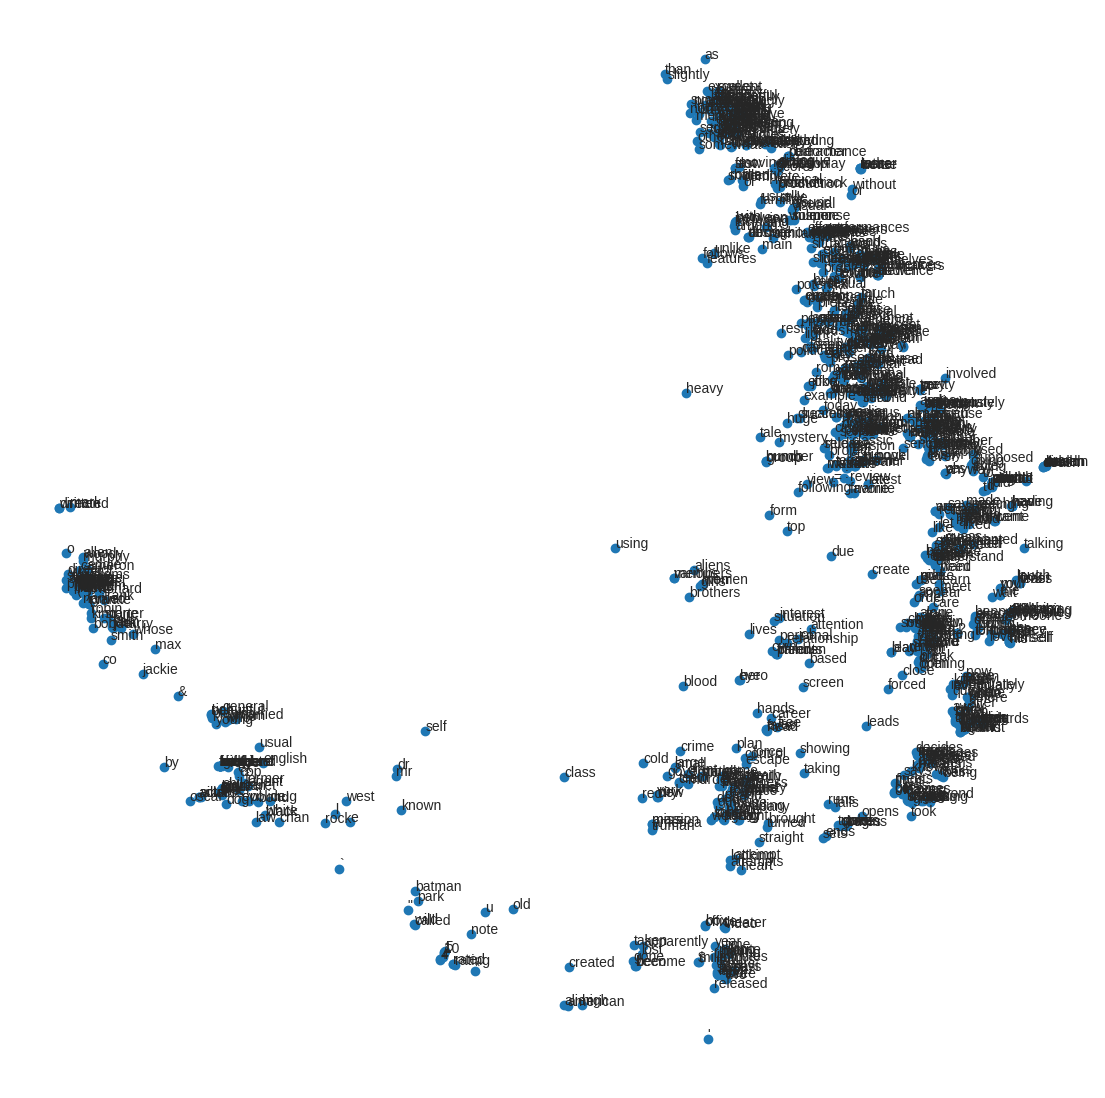

In [85]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(review_1000['x'], review_1000['y'])

for word, pos in review_1000.iterrows():
  ax.annotate(word, pos)

ax.axis('off')

<br>

### 네이버 영화 감상 코퍼스를 사용한 한국어 단어 임베딩
- 한국어 임베딩은 "konlpy" 필요

In [90]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm 
fontpath = '/usr/shape/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
! pip install konlpy
!wget = nc http://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

In [94]:
import codecs 

def read_data(filename):
  with codecs.open(filename, encoding='utf-8', mode='r') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]

  return data

train_data = read_data('ratings_train.txt')

In [96]:
from konlpy.tag import Okt
tagger = Okt()

def tokenize(doc):
  return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]

train_docs = [row[1] for row in train_data]

In [99]:
train_docs[:5]

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

<br>

In [100]:
sentences = [tokenize(d) for d in train_docs]

In [101]:
from gensim.models import word2vec

In [102]:
model = word2vec.Word2Vec(sentences)
model.init_sims(replace=True)

<ipython-input-102-6a8a675cbbc9>:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [103]:
model.wv.similarity(*tokenize(u'배우 여배우'))

0.7105806

In [104]:
model.wv.most_similar(tokenize(u'감독'))

[('작가/Noun', 0.6462729573249817),
 ('목사/Noun', 0.5740336775779724),
 ('능력/Noun', 0.5220396518707275),
 ('김기덕/Noun', 0.5212914943695068),
 ('이순신장군/Noun', 0.5064985156059265),
 ('각본/Noun', 0.5030168294906616),
 ('제작/Noun', 0.49990779161453247),
 ('영감/Noun', 0.4841657280921936),
 ('추기경/Noun', 0.4827837646007538),
 ('안목/Noun', 0.4799852967262268)]

<br>


In [105]:
from konlpy.utils import pprint

pprint(model.wv.most_similar(positive=tokenize(u'배우 여배우'), negative=tokenize(u'배우'), topn=3))

[('남자배우/Noun', 0.8308297991752625),
 ('조연/Noun', 0.7938694953918457),
 ('연기자/Noun', 0.7685343027114868)]


<br>

In [106]:
review_vocab = list(model.wv.key_to_index.keys())

arr = []
for word in review_vocab:
  arr.append(model.wv.get_vector(word))
  
review_similarity = np.array(arr)

In [107]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

In [108]:
tsne = TSNE(n_components=2)

In [109]:
similarity = tsne.fit_transform(review_similarity)
review_df = pd.DataFrame(similarity, index=review_vocab, columns=['x', 'y'])
review_1000 = review_df[0:1000]

<ipython-input-110-65490dd5a55a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


(-77.41772384643555, 73.21911544799805, -79.6420280456543, 78.89753646850586)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  func(*args,

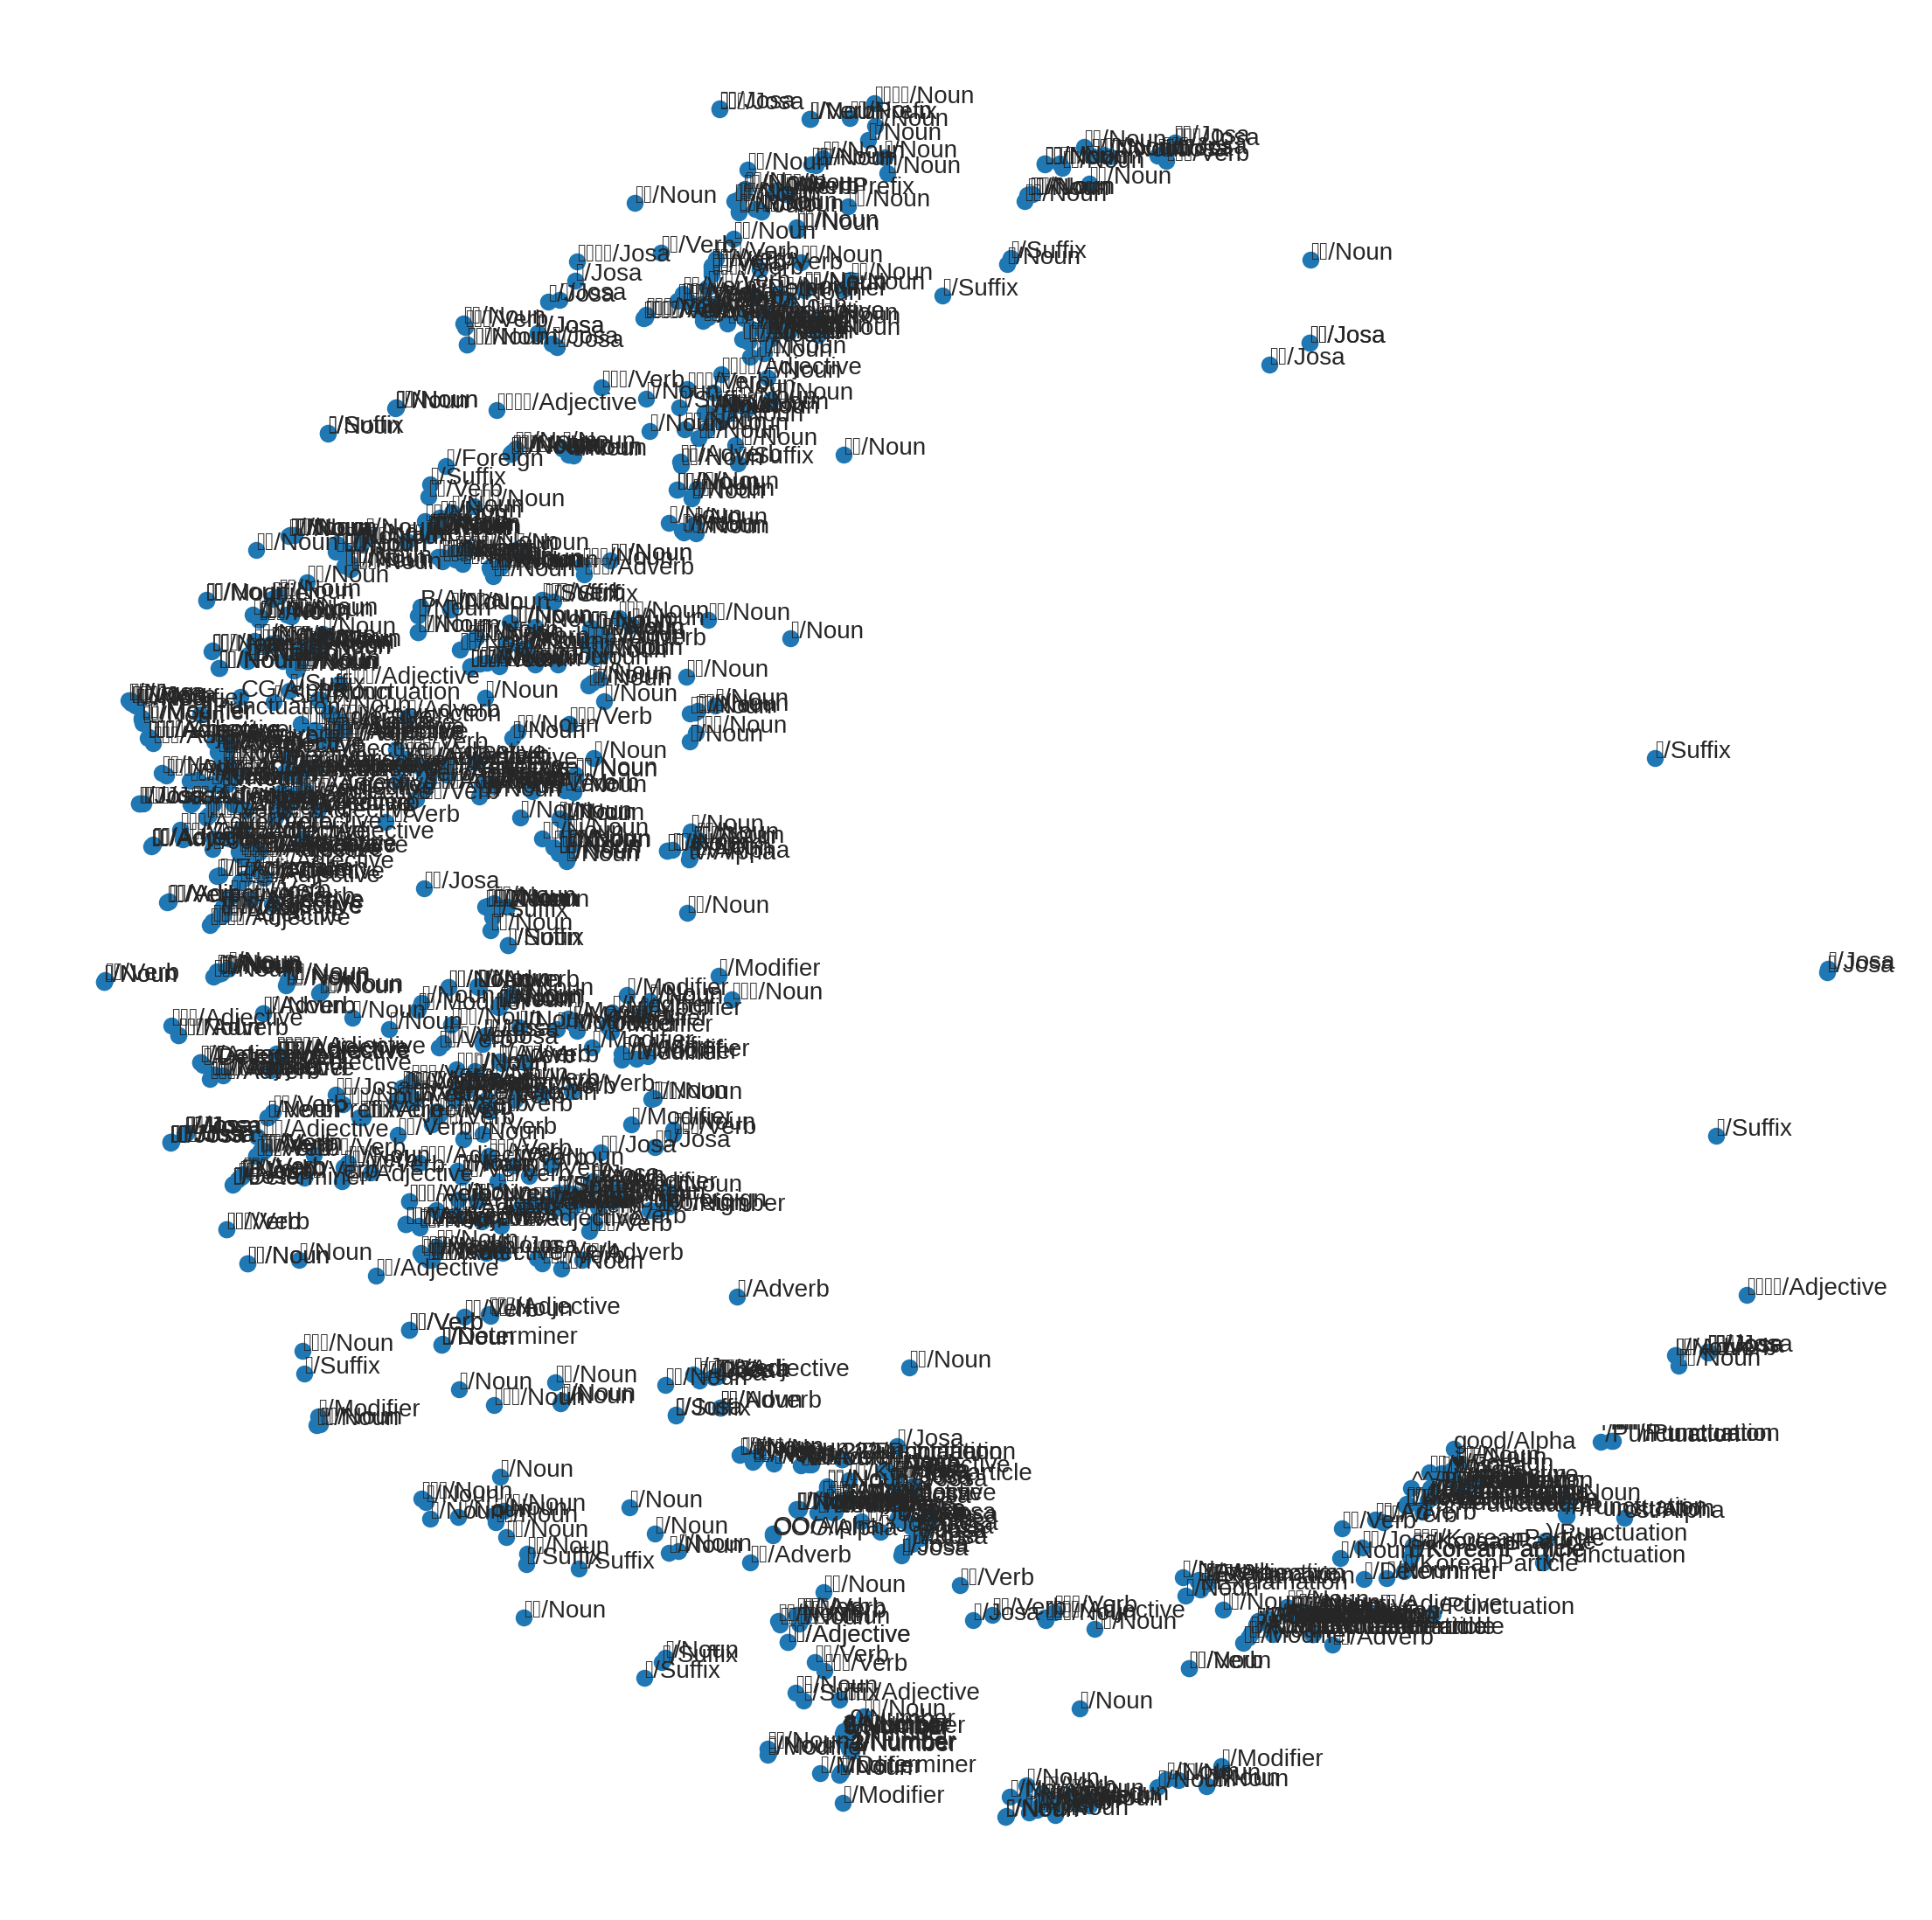

In [110]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(review_1000['x'], review_1000['y'])

for word, pos in review_1000.iterrows():
  ax.annotate(word, pos)

ax.axis('off')

<br>

<br>

<br>

# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터** 

<br>

<br>

## Feed Forward Network vs Recurrent Network

- **Feed Forward Net (앞먹임 구조)**
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- **Recurrent Net (되먹임 구조)**
  - **이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조**

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - **현재 상태가 이전 상태에 종속**

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



<br>

<br>

## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시간을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

<br>

<br>

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- **one to one**
  - RNN

- **one to many**
  - Image Captioning 

  - 이미지에 대한 설명 생성

- **many to one**
  - 감성분석 (Sentiment Classification)

    - 문장의 긍정/부정을 판단하는 감정 분석

- **many to many**
  - Machine Translation

    - 하나의 언어를 다른 언어로 번역하는 기계 번역

- **many to many**
  - Video Classification(Frame Level)




<br>

<br>

## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

<br>

- **$W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치**

- **$W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치**

- **$h$는 '상태'를 기억**

- **$h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림**

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

<br>

<br>

## BPTT(BackPropagation Through Time)

- 시간 방향으로 펼친 신경망의 오차역전파

- **시계열 데이터의 시간 크기가 커지면 역전파 시 불안정해짐 $→$ 기울기 소실 문제 발생**

  <img src="https://iamtrask.github.io/img/backprop_through_time.gif" width="700">

  <sub>출처: https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/</sub>

<br>

<br>

## Truncated BPTT

- **큰 시계열 데이터를 다룰 때 사용하는 오차역전파법**

- **신경망을 적당한 길이로 끊는다.**
  - <u>역전파에 연결만! 순전파의 연결은 끊어지지 않는다.</u>

- 학습 시, 입력이 **순서대로 연결**되어 입력해야 함

  <img src="https://r2rt.com/static/images/RNN_true_truncated_backprop.png">

  <sub>출처: https://r2rt.com/styles-of-truncated-backpropagation.html</sub>


<br>

<br>

## RNN 구현

- 형상(shape) 주의!

## $\qquad \ h_{t-1} W_h \ + \ x_t W_x = h_t$

<br>

- $h_{t-1}$ : $N \times H$

- $W_{h}$ : $H \times H$

- $x_{t}$ : $N \times D$

- $W_{x}$ : $D \times H$

- $h_t$ : $N \times H$

- $D$ : 입력 벡터의 차원 수

- $H$ : 은닉 상태 벡터의 차원 수


<br>

<br>

<br>

# LSTM (Long Shot-Term Memory)

- **RNN은 장기 기억을 제대로 처리 못함**

- RNN은 기울기 소실 또는 기울기 폭발을 발생

- 위를 해결하기 위해 LSTM 방법 등장



  ![0_O_TqfQ4537oM4MH0[1].gif](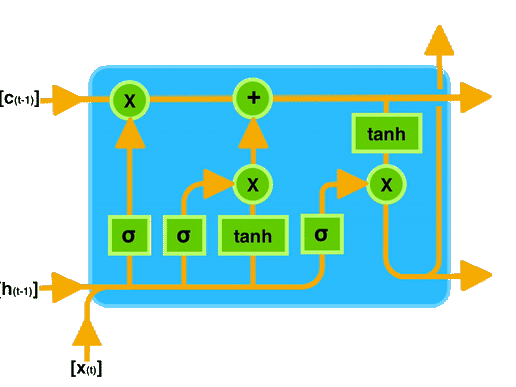)




<br>


### $\qquad f = \sigma (x_t W^{(f)}_x + h_{t-1} W^{(f)}_h + b^{(f)} \\ 
\qquad g = tanh(x_t W^{(g)}_x + h_{t-1} W^{(g)}_h + b^{(g)}) \\
\qquad i = \sigma(x_t W^{(i)}_x + h_{t-1} W^{(i)}_h + b^{(i)}) \\
\qquad o = tanh(x_t W^{(o)}_x + h_{t-1} W^{(o)}_h + b^{(o)})$


### $\qquad c_t = f \odot c_{t-1} + g \odot i \\
\qquad h_t = o \odot tanh(c_t)
$


<br>

<br>

## forget gate (망각 게이트)
- **불필요한 정보를 잊는 게이트**

-  **$h_{t−1}$ 과 $x_t$ 를 받아 시그모이드를 취해준 값이 forget gate의 출력값**
- **시그모이드 함수를 통과하기 때문에 그 값이 0이라면 이전 상태의 정보는 잊고, 1이라면 이전 상태의 정보를 온전히 기억**

  <img src="https://image.slidesharecdn.com/dlsl2017d2l2recurrentneuralnetworksi-170125171004/95/recurrent-neural-networks-i-d2l2-deep-learning-for-speech-and-language-upc-2017-25-638.jpg?cb=1485365064" width="600">

  <sub>출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

<br>

<br>

## input gate (입력 게이트)
- **현재 정보를 기억하기 위한 게이트**

- $h_{t−1}$ 과 $x_t$를 받아 $Sigmoid$ -> $tanh$ 를 통과한 다음, Hadamard product 연산을 한 값을 출력
  
  <br>

  <img src="https://image.slidesharecdn.com/dlmmdcud2l08recurrentneuralnetworks-170429103823/95/recurrent-neural-networks-d2l8-insightdcu-machine-learning-workshop-2017-28-638.jpg?cb=1493462658" width="600">

  <sub>출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

<br>

<br>

## output gate (출력 게이트)

- **은닉 상태 $h_t$의 출력을 담당하는 게이트**

- **입력 $x_t$와 이전 상태 $h_{t-1}$로부터 게이트의 열림 상태가 결정됨**

  <img src="https://image.slidesharecdn.com/dlcvd2l6recurrentneuralnetworks-160802094750/95/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016-30-638.jpg?cb=1470131837" width="600">

<sub>출처: https://www.slideshare.net/xavigiro/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016</sub>

<br>

<br>

<br>


# GRU (Gated Recurrent Unit)
- **LSTM을 더 단순하게 만든 구조**

- **기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음**

- **reset gate**
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- **update gate**
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함


  
  ![68747470733a2f2f692e696d6775722e636f6d2f3577333775587a2e676966[1]](data:application/octet-stream;base64,R0lGODlh2AIqAfcfMAAAACQAAEgAAGwAAJAAALQAANgAAPwAAAAkACQkAEgkAGwkAJAkALQkANgkAPwkAABIACRIAEhIAGxIAJBIALRIANhIAPxIAABsACRsAEhsAGxsAJBsALRsANhsAPxsAACQACSQAEiQAGyQAJCQALSQANiQAPyQAAC0ACS0AEi0AGy0AJC0ALS0ANi0APy0AADYACTYAEjYAGzYAJDYALTYANjYAPzYAAD8ACT8AEj8AGz8AJD8ALT8ANj8APz8AAAAVSQAVUgAVWwAVZAAVbQAVdgAVfwAVQAkVSQkVUgkVWwkVZAkVbQkVdgkVfwkVQBIVSRIVUhIVWxIVZBIVbRIVdhIVfxIVQBsVSRsVUhsVWxsVZBsVbRsVdhsVfxsVQCQVSSQVUiQVWyQVZCQVbSQVdiQVfyQVQC0VSS0VUi0VWy0VZC0VbS0Vdi0Vfy0VQDYVSTYVUjYVWzYVZDYVbTYVdjYVfzYVQD8VST8VUj8VWz8VZD8VbT8Vdj8Vfz8VQAAqiQAqkgAqmwAqpAAqrQAqtgAqvwAqgAkqiQkqkgkqmwkqpAkqrQkqtgkqvwkqgBIqiRIqkhIqmxIqpBIqrRIqthIqvxIqgBsqiRsqkhsqmxsqpBsqrRsqthsqvxsqgCQqiSQqkiQqmyQqpCQqrSQqtiQqvyQqgC0qiS0qki0qmy0qpC0qrS0qti0qvy0qgDYqiTYqkjYqmzYqpDYqrTYqtjYqvzYqgD8qiT8qkj8qmz8qpD8qrT8qtj8qvz8qgAA/yQA/0gA/2wA/5AA/7QA/9gA//wA/wAk/yQk/0gk/2wk/5Ak/7Qk/9gk//wk/wBI/yRI/0hI/2xI/5BI/7RI/9hI//xI/wBs/yRs/0hs/2xs/5Bs/7Rs/9hs//xs/wCQ/ySQ/0iQ/2yQ/5CQ/7SQ/9iQ//yQ/wC0/yS0/0i0/2y0/5C0/7S0/9i0//y0/wDY/yTY/0jY/2zY/5DY/7TY/9jY//zY/wD8/yT8/0j8/2z8/5D8/7T8/9j8//z8/yH/C05FVFNDQVBFMi4wAwEAAAAh+QQEAwAfACwAAAAA2AIqAQAI/wB//RtI8J/AggMPIlRYkCFBhwkRRpQI0aBEixQvVtyosWPGjws9hgTZUGRJkg9NpkQ5caTLky9XxmwJs6ZMmzRv6szJE+NMnziB7hTakyNLokiN/lQalOlQp0VVRj0KNalUq1SvVq14savXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLlylu1as7Keelmz52bfhYd+ulo06Wngl5NmjVq16pby349Ozbt27ZzY4W9u3Zv3L91Z06N9LLx48iTK1/OvLnz59CjS59Ovbr169iza9/Ovbv374SH8/8W75s8cPPCT6cnjj64+/bw1b+XH589/fv284/Hv19/ef7/EQfegAQWaOCBCCao4IIMNujggxBGKOGEFFZooVv19adhgBueB6CH/oHY4XojzhciiRymKKKKKK7oYoswmlhihiy6d+GNOOao44489ujjj0AGKeSQRBZp5IM0vihjjUnG2OSSSj4p5YdOUglllSdeqeWUWXI5o5VeBnXkmGSWaeaZaKap5ppstunmm3DqGGaUYNbZpZ1f3qlnnnwyiaefewLaJ52BEjoolrzFqeiijDbq6KMiKSSpTJO2VKlPl2ZK6aaWDgXpp0fa848//4hqzy+nporqqqq2yuqrrsb/CuusstZK66225orrrrr2yuuvvgYL7LDCFosrWKSCquaciArK4aSo2mKPtLZUay2111Y7rbbWbovtt96G2+243JYLLrnnmiuuuuium+677sbb7rzs1gsvvffaK6+++O6b772nYvqnoc4SbHCzB285MJGi2uJLLbZALHHEFE9sccUYX6xxxhxv7HHHIH8scsgkj2xyySh/3ArFK1/cMsYvTxwzyxzPDLHNtuCsc80830yzxL6kquzQSBrkbbUXI20txNlS3PTTUEct9dRUV2311VhnrbXUTHOs9MRfO+312EmTjXHYXZet9tlid82tqETHfSCp9jz8M8x3v6x3z3i7/8y3zH/fDbjfhPdt+OCHC664z4XvzXjOeUf+uOOQTy555ZhTrvnlm1vuOea1/EJqsnKTyazChaoWtLR2pF1t60u/7rotsCtN++y1O50707vLHvvtv/cOvO3CF4/78cEjT7zyujPPu/O+L5/89NJX3zz111v/PPbbay/t6eAvjPqh4xeMsG4Xnvr4yeyn7H778L8vf/z0z29//fjfr3/+ftvCVekAdE60ruU6/u3vgAZMIAIXqMAGMvCBDrQdxQIWwAoyh3TT+hziNrg40HVwZ4Xj4Po+GLgRmtCDJwRh4lJYQhS6UIUifGELYUjCENYwc9VClQV9FL7UjQ9aGYxe9v+G2D0iCrGISDyiEodnRCYm0YlLNB73ogg9KFpRit67YhWx2EQuPtGLVIzdtJJ1KfOVL2E9JF8azVgVC/3CgXCEoBzjSMc52rGOeGRg0HbIR8wEEWxtu6Mg80jIQRqykIgUpARJ18dGNmZjnVuhDG3IQkpOUpI0rCQmZ8hJS2bykjH8pCg7uUlP8s1xe3QkjtaIxqt0RSDR+uIWZzlFLdYSjLbMIi53SUtd9rKLv5TlLYMZRl9OcYw+ZOX5zrhMZTJTSw9C2yGnmchqUvOa1szm/VKpym4GZoCx06Y4sUnOcZqznHasljfX+ZcgUi6UpISnKedZynrK0543vKc+88n/T03u05/9BGVAW6ZDdjLImQgFy7V4OcyGGvOhwHRoRCEqTIoWc6IYrWhGL6rRjnJUiRRUo/gSmsyRmjRLD/LHG9F5zpay9KUujan7VmYLg9q0LuAsIEx3KtOe8vSn1mTkTYeqFlJV650DjWdS6flPgQL0qU6N6iiZulR8QnWqVpWqLYRK1AKRVKRfiZY9GGrRXG7UrB5F60fVylayntWtaYXrWuXaVufB8qRgzSsb8bpXHybIH3bzqWCBStjBGvaBcOtqH8X6PbXAMojSPKxkC0vZyU42sYoNoD1asQUpJCEBSZCAFEjRilKhxZ1KvWpqtUpV1baWtVnFalNlW9XZ/66Wtp4raI6m1QoybOG3ZCCFtOD01dnYghQJAAAAgJAA5gJBuQmQQivgVpXs0fW6xKyrROOaXexud67dDe93tVtWKYa0uK3MTzu2kITlKve9QBhtTUtKX70C5zib/SwARNvZ/krBs8ndQjvIQirLVvbABk4wgieII1tIIbmg/W9nAQwA0E43s28hw2eTIGEp+Ne/zZVAacWS03AuWMGFjGwgUXzind6oFe0NrYdn7F8JfBYIW8Ashs9iDzJUmMZA/vB/9ztiZPkikrZ9LW5hm+TYkjKSS47ybaesZCo7WWIW2myFkyDkLj8YADkGi46FhN5OwTi6W5CEhNU84zX/V/8CzKVuR2IJ3vF6t7zixbOdn/jWPPd5z4DOYiDJa92ucbXMz8wMjAHAZTZPuM0eZnNzwzySzSrplXxN708k0wrmBvnTQpYCmMeMkD+2mMXirAUrWDGKVdcC1aeWJCH/tyBbbNjLuP4yGUj9DxjPdy3CraCDJbCJUH+6w51tLhkUSsBYwzqOEmwFq0chilGMYgytroezt+22c+UxpEgSNZdB/V9yg/bXCGlFAnhNFnuIuIKkeHexyZ3r6NI6bFKusr6vzO8mI25v7GCFJljBDn/Uwx4BH/jK8t3v2jrctZDzn6hUWrejWllmvpgQchOQ6463dwtd8fVmSUGKLVzYHiT/38ImhhvsUu26FWAuslczrRsb17S/ji53mjvs5s+SAiYCYZ2fuRvoP+v56BN9tbUvjBF7CJwV2iY60qVudKPnzmH+8MfEfUHxqhdxvoj+qgQAIAVJ+NfNkN55m5nbDoio+1QP3oSGQQ5jYne2tFsghUB8re6Va7qviZqMLfYrqi2QYd4dB7KoKX2RZ3P7kAKvB1dL9XTHS1Z09mi1PTJfi4YJkt2GscWACTN4NNP79GNftkTULS0PD4QUUuh1Akprj9/+Y7QDaYUURJUEmccNuZtA1XSPm3ghn9sr2ZrdigfNfOXrNH4SfD7Iov+75lff+dfPPvWj34pWT34gmR9F/y2iLj8V53H71kc/9tVffayzYhOjGIc/2iEKbZAiVenPf7fBrZhfxB3df0EKjIZsHtYOoqdy0vJoQkZ2EIFccKd68dZrUnAQ8WYPuNdrSVBT7wZAPvZztrBym3V6XfZZvjcQRmU4UMY5Kvg5KpSCjbOCOMSCMOiCMWgL1jZ6BEE6pMIOrRYxgVUxPwg0QuiDGhOERJgxRlgLSYhCS2gzSXhkJQSFPiNxtlBtmrAK/lALmiAKA2cPWViDNLg3pkIQiVWGZHiG4IeGppWGbLiGblgQFrhlu/aGe+FjBJh3F0ZaraB7uLZfOEgQIpd3uZcEEgg3ZBB7UqB6rSABA9Z7Df/yJGVhFJsAAKVVcqcCe5F2dmk3b3BWZJIyLe5SPcIzQcmnffoXNeKyfrUzihATRK5Iiq14P3XQMrDzai0zixGDi7Wgi7XQCrXQDtaGEP4wXGQ4CmxggK2Ai8noi63QBszojL0Ijc34jNPojNZYjdh4jdrYjKxgjaywh9rYjdxojaRAjm3QjeXICmyQjuvYBqTQjqQQXOsoj/FYj/QYXPgYj15ICvUnCvJXD5qwheIgLe5IBqOAjwcZj3KnkPgod9dmeJswBhAJXPZYkYeXjxjJkMUmdxx5eCrnkRz5kRZJWuWohxr2XvvVcokmEaKWdmYnXf9AfJvAc5BmYSvxdrf/B4ESkF+l5X8gp3ICoWHSImJhR3N0gYyiBzlIuZRK2ZQLtwUAIC2+9Q/r5WEkJ4LC9WAmR5KtwJUHOQYGSQZgOZa+VZaGd5ZmmZZouZZqKZFuuQUS+Vty+VtaIJd1SWN3WXxSsAEzxped5ZczpgV7KQWCqQGEOZiFGQX/pQGKGQU2JgWOGZmP6ZihVZkSkAA2dpmZiZmhxZma2ZmP2YVk+HRlCHsRkAComZqqiZoIkJoV9poQBpuyGZu0OZu2WZu4eZu6mZuxiQCv6ZvJ5Zu+qVzDiZKvOV2tQA6utnmkwArKWQ+3R5zvVZzGWZ3WiZLJdZ3auZ3cWZ3Z+ZrQBZ7G/wla98cXcYhrP1d7IkiCq5eBFvhzGCh74xZm8dZmovJf8Gkk6uZcEPZczgVfy9Vc/ele77WTH7hsrbCRB0hvwhWH3fmgEBqhEjqhFFqhFnqh2wkEWkAOBVELm1B/v+YPo6AFz4WhJnqiKJqiA5Z1o5ODWTcqY5eiMjqjEopjoBcX/md6CgiTH6iJO5pcJWhpVDlflgZjXcl0VOmMORN0pDUmMHei30l2vSaI02Jym4V4oFZaX0ajXNqlKEmd3AmmXkqhYlphkcAKpFMPo6AJowCd4EcKUQCmxTmn01mn0hmewAkAeYqnv9mnwbmbgFqbeZqnvBmoutl53cdqraB1rf/WnND5YK2ZABHQmpSaAJUqqUlwmpOKmjZ2mpcZAZXpWaLKYaQ6qqL6XxyGquWWqqfaqqVKqo9ZmaAFZ97ZezcqF1B5h6M1YD1GY4YXZKj5h2KxiLd6UFYieyVKoM0FoBVWosvarNAFBBIQj1bpkXqHeJvgjl0JktMFZwK6YaAloEgAYeNaYePamp+FrpYaruAKruMKrsnaruw6r+0KqqBlr+91r5kaWlEAqhLQr/zqr5I5sP8qWgUrBQaLsAqbsAy7sFJgmKIFsQ87sRqgBYa5BRbrYRmLsRX7WxtQl1vwsXI5CgjBgxyag9emCXO5ssUGly07BhHpsr8FsxJpkDD/a7MOeZEHmZBhGY88y7MjmZFC+471OI9EC4/tqI7suLTn2LTjyI3T5Q/8qA2aIH/0x6bjsFXRWI3iuI3giI1fu7XUgn+g+D2g+CpGkxABU1CrkrZGw1hlG7eL9l7ydVKTGGkSRlrtQAZtR1ozKQUJWJMZqBkO9mtFWV9iglN6eKR72LiOCzkLB7mQC3M6OmML2l8Q6Vv91Qq/wGErY4BlWy3fyAp1MLrSJm2lK22qtoe92LrM6LqumzNQqad7KLmRe7u2CznIpafChbu+m7u/G7zAO7zCuzORC1DWllh0gxDAyApL6FI4c1itwHW2oA1rugr2AJBriqbPe0DFGhhx/xhdSOoXMMdfMzZdsHd/v1By0iUq7Ntfo2YWoHhT7iatQTYt7wtqmzBdF9gVZrMx21eLYjO7s/c00gdItsAG78UGprZ+YkM10sd+1Fc/0oQ0ivp9o8Jq43eKEszBHuzAIGyKIax+Gaem/jh/9YemdGZ+7qMttBYeHsa5g2EPEUZjWKpy/aV37Cth7ZWfOxYWmwBaQoaPp4ePW0BrMpjEYBgxBBxxYkODu4sAwqXEYTiDVqzE98QOpDAKWkcQ90CGWsgK/3bFS0zFZFzFZpzGESM6IsoK09KmngdxY/y9gDG/hSFuejldhwhig7ssxwoXtqajL6mAjjbIm5B6XiE6S//0wdlHwNpmLoLWij6mXGxQRYwswbi0fAUERq/GausAgANRC9dmgN1zZ15XTKuoPKlMPas8PFeXcWzbdUO3NA5xuPaVez+GdjuaYx/YYYgMeMD8d/cVGT5WuXopaowYVvUTvR0zuwiwQFE8xY8XR+SQvBNXKvUAf6wwzc4WNKjyaiv1bRJSe2QnghO4t781ZAkgrD8sZltgv3rZWTaWAD6cEf9rNixcLQRMU9YHwBGjwJTcwNzMP6o2CvAXcDwod+ww0NtWD1C5BeQHSArkPxPibvtFbhL2lP/1XPXczmFBzsaM0RW2CWL2Dy+oxjNjC2NAnCh4Q7tLz6d0xjKtSUj/BXGrZm0BqXAPx2Q73YI3VNOXpDfq5pu+WMZWBYV0XCDqVs7HXGEglya2fBIgrXM6l3MQ5ncgIVasKMLZ5y2OzMG902MLzGcjfIq10DtnDT0SXWdf82paiABIEAGkHE6mTHUV1crpt9WiqFGzS3bUYtdHdFeIK8wwstSipctU7a1YvZKD3UzygV9kwFypGmr6Na1kgUjODM0QJs2WN0dQiQAI8GoMrWCsEAH5ytl2lNQGsohbhmv6lQAk7dFroXsQJq/PxWVJbUj6DF38jD8ADQAMPNpytNsVxs/N1tkyZS19rVwS8G0vzCC1116SnbDPyojPLdth0Q6w562t3aAE/2bSPM1CKg1dIPNJLy3NDOdvPX03YtzeqvberKBh/wXf9C3G+6becrze8/Skxqmk+W05qo0gvSyeENa+ihLVOzEtoEuMmEYR24LXgO3IEF5Mkwzcs0xogG1LrMCFoiAOHO7hAvnhHT4KHi4OJE5t41fXbH3KGP5Ry023gyZXElPLRongantcF0lacubYjc3YJWIg4TxIK62nms27wh0/9fB07NAKS77k3+jkTN4OTS7lTN59PYjcO7XU3onaDhTg2G1BQXd+trDPCPTbbMDCWH4xrDAGbpoW79cKEX3k5GQLbZDOdIuxlZxO1z0he/7lgVFgDWc5tjDJCcBv531x+v8d6JXTCpoAN2bYhnBIEDzovOmd6Pgd3jXYi3pq4Zi+M16eIL1Vbv9FBpz76Ghi4z6u1RdOMQTcDnRV4Xne4rKu4lC05m0OHAIH5yxO67zuZ9FcdEj0P6jeQ736rMaO2z0+7H+cIJjN0vmzMr+e5u6T5JvASGU4XJO3g1cu5y3VBpue5+J8IZzVrARIYZbt54eh22PO2yYGP2Yu0NJeNrbeFexVggiR63Ee79OkNKwQnMJ13IjV5wjy0lRNk7QKuOheGP89SU2MVS9z6Atf6RH/M4zu6GRYzPlJapOu6BLf6Yi+Pt7um2SgQVW1Mp8OHkHM1KcHYH28JsreJcM4dUr/tM8TbkVOA+sX3uvjRTHzjhHtEKNAoHoCMxD4rvMyP+ur3u/K1aC0nkO37OOAIoDxlXM0+WiexYBP//I/7lWFNO6tWeRSzO3TLnAvShCkkAQn2dE5+A8br+/mFPLAzcwKdPLdsdS62nGoGdsJ7xdhrkjrXtzt3sJmjuZiL7ptWmo1JWr2XhD4LvbaxO/+rskLxH8OUr8SMMiKd2yous577xeAful7M94Vlukuvdkf7/H75jgVD+m3R88EAbq6tfEdP/un7/AsA/cjj/p4Q/fbYaQoZ86hFr8F8bd5qxb7Gxe1p/cSYSrDtQWg/BWjF1x0ofWCourAHjutTldmnuFG/39WgdTzJSFqEHjVCtH43J/z6F90v370VyfsNf7+CfFZbTdviF3/DwYEvtdZ2hrE8NlGAPGvVbt/Bf/9MpgQYcKCCxmSSSLBnsKHm37ZIzPRoEOK/9pJFNiKYcORB0tyLJlS5UqWLV2+hDmylq2ZNWnetJkT506dtcYAAICA59CeN1vZIpUgKCmiTYs+dRoV6lSptuqx2uQvpRQApArakrJFSiuN/9iNYlWV6lq1bdm+deu0TVAAbODevVk25l6+ff3GbJUgiS2MW8QeDpsY8eIkCbYwDFs28j97Fw1OxGyvLObLmi8Tbli2neeRUshI8XrZckEpUjhX3ijasz1Sg/85F7QHGjdl3X99/wYe/CteuLZsbQGa4Khx4jTZAK2bu/n0uNR1Gmc1qt5WACI7GsTaql518tbLny9+k5VSBEyNM0c/FLZw+vXpkwGwJXc7wmJbL25NscSkAEICyKRISKxfNjnMnlakkCCJjMCypSBS9NvCK3u2iEiKCik8iEGBIExCP4bsSaCd0y47TQIPAwNCPwlaIUWKhTYhY8QI9bOlMQ9x/MeWTSKUgiB7pNhEihL1sq9JJ4Gb6SidpNyJSpusNIqmnwBIwBYsoxzqS6SUSoApMKcMM00016xSzTbZvDLLWlrRRCOtduMqNcpKOiutOOGU801B/xw0UEIPNTT/0TMLXbSWuRAAgAxAG1XUyyyZfDJTTRlCbhPKyBCJQQEBBDABICo0KCz+HEyClA1t69FVsDLawtN/DPvHtA09VDGJXx7EDNfIwPLOoBU/8g4iwlY0bKIkBhrLoxl/eTa3VgWyrdZct+BPrNwc409CTF1CiaSRyjXp3JPWVbddhtCF9yR/3pvJFjvqvclefOu9l17j+oUPOS6p1NffguE7GD+g7DIY4Hwd5nfffyU++GGKIZ644YspVm+M7d4VaBNU0yWZFU3Ew7jiiDVmGeGUX964ZYtlXtnlmBG2ZT2gmLIHZpozxtkWlOJ19zujN2IX5KKRXtpcpRmSoLt/2vDw/5/TakXsvwD9CysJAAgyaQsgBHMxo20tLJOMGpP4hxSJehQpQ7hxm7GVwQ4K61YJ+XtXV7Ae+8U0gyokwyJ7JGgn8MdWFGg/CTxtBSQcUUwc74xSLKhWh4jetHMnfzFvLeQQ6NK8pJaKL/TU46qnlaxSGnekPldXvXba25Ly0brEtD12z38XTgrMGZzIsLEuHFVAaAEYedujNtPWascM28Ls413LlZTIwf7n2ciDRbAViFxsPrAklEygy8P1LEhEakUCdqyJkN8igRztpqzWHlE9kqm7t/Ud8ARIH4TcrijGEZhy/IUXWzxnYfCxXQRvhx3t+CY845FgBg04QfWwx/9MG7SJ0AY4QuFEqD+k+EU7xDIhUQGoNRkJ3NcSkre+5ahtIDmIRmqFGtb4zzsoaoXdKqS4IO2nNQ4RC2Fs0Y4yBc6GGMEIgg4nkvWBJCnPQ5JAJOJEIH6lWpi7la1IOEb7TMpSZqTScrbUpTS6iVCnK5MbKyUmOsqRUnc8o6DaOCdN3Kks97gMS2ZXRzTaMY+IwiMhGXXIObopjbqTFCMTacjnkdGSfGlNbnj4qwy1jVTKOxLzZmgiTtmqRzwSnEAEgyrU7GqJHErh48b0GFX9bXDPmqFrIEIWsfwjSZrBpS8TgCCBnMpB+cFWfzwllqN4a3+sMdtLOHc0p1GTZNb/nCbTnobN2BDGZzb7WcCSw5+bzQw+GIEOw1QGNHO2s2buZOc75RlPg3XsY9/ZXElMJh54rtOf3+wnQOf5z3IOFKCn60o4BRpPhGSzmtrkZtOuCVGKPtSiE3UaM2u0hYGchpeKCWI7gniasVArAXrR3EiAVJAHuYiURERIJ3dFvoPUKCxAAotLNfKLGunlQSIZX9X+tiGwzS1/52OQpw73oxwtaEeVOZJG1ObQS1Y1JRrMyU8QIBTqHOV07QFhWG13FU3UAzP+sAda1ZpWtlIGrXuaHVbFOlfrzGVhcp1JAK2616SUaFT8GRWDjMfMIxEzkLA70Z4SsplAMkkzt1Fs/2LftVPHRhayUKXMQjC7mdVYdq+f5Qtd35PA5ZCHOWwAwsKkI1q8toUmrBDFKGQ7inHM1ra1xe1scysKfrbWt6wdyntyBimwQnCD8wFtcr04TK7pzx5taOHWFJO4VCrXutfFrksmWcg1rVGS38VSEDcRhSRE4YOKRCR4Kble7p6xFmiBb3bkK9tIaCES88UvWsLL3kWit5HtTa9/t0sTSC5KwOoFk16zK8ANAUBrh9nEhT4J4RpFc8EX5gtVNZy0iG6zohgF8S/mBU4SB1RipAXYQu3xXtmKQhyj0MQY2KFEgxaUngRVqI39ma9azASDVrnJJsaZFyLndaE4LnGNc/+85CTfOGX5grLOErraJiMZyiLscJY/vGGJctnDBmFih5orXa2V2WsW+fCTvNy5fGaYwxgGHuhYOzo2VqcWmqCtWf1Rj3rIlhQ9Bu5vrYMfpQCad4FGtFwP3QoHRurQqlMwnD23CcFMOHmIEUykJb1pTn8uSHJFYHIeTRQW18MXJyKHjIEs6EQHF8r4Im09WT3rueKsJrXIjia0IAkt4JkcgJYgcjs9QrAA4HwDQrYLhQeEYg3b2c9+EoD/aylbeHePerSFbAlyJ4P4wx+y9VMerz3uQF07wPw9N5ukpDChmHva6e4vut89bwOX296z5fM/+DxbQ9NbvZqGdn16VOn/SydPKTYMOKfXvOU3X3ThDk/aRbyp4yOPdpxHxvUo2OGLO6Gkz2QYT5WPPHKKl3zJKL5Zik0u8pWbmMn9fLVVMLZiUmic4wxpxxhGUYt6kFxmWG54iIP+cKF3eeglsZuxXUrmsEgiQqYiZUqIPvWjG93qXy56wjflW61y1S1Y8bZK/IEVYLdpCwyj9ay3xLy0t1rRaSLFGNjHkLOMIqwA17pwwKKUpbuQS9XKe+AFHxPRhnpgC3TKe0nB7X+oNSE5n7HExJcEBGwh5raWtdvPE2vjtt3z52GFBEZRB1vLtnkM8UeqyXk7YQ9eU0iRQGobE5HZk0lkrsd97mWC4Hh3/zc5vKdSn7r9Dz83vvH+0AQrFrWFqEFqDPWGPu/hPX1/S8na9o4+9QdM7uhzX9zY/373nyMYULn3ZCMpy543EUR51xvvuvdLO2qjFOj8naPwV3jVsU71q2u5IfOiMp9rMpS7sXxxnVbwh4WoB03As/mwhzEYByVqhTHwmvqTgjHYBAwkg1HYQLXxQFLYwA2AkLSwMiVjuZebiVjDF+HiGBO8PHjKDRaksRlcrRp8Dxs0jhhUohwsMhqEMimpBVKAFKCIgFFoA+zwmBO5OdygLUArwQIEOojrP4abQincP/0rCQcBQe2pHP/LOi/kvyuswi+kQvzrCznDKzr7rqJghf8xYIVuswc866OC8Lbka4Va0AL6q789rL8h3EM9jKTPg4tWSKDbaaOjQERLScRFVERFnJMgagPtIYVIpJFItERSYAMyYIMxIIPqwZHqAcVOHAPq2QIt+CQNCJAIUcWISIAI4EP7YYWaY7y6Y7zaGjW8eD8z1MVd5EXCA7XjEDW3eC9W4DZ7kC9uqwdVixw+ZMZmZMYPEsS2SCBM3MIP7EAcycAtwEBSpB5TNEUpQEUXEUcIgZAokABzjIIIqL11FIx2bAwkSAB4HBt45BIgIC5nxMd81EdmHKbF0ywY07iEyA6emyB06cWDRMiEXAlp2z7juL4Bk79R+AdAwo230gr/f7gzQyODKNDD5Egf0iEdLhFJMhFJoIikA0PJ9pMkgRlJkbxHSNFDP5RJ6PDDPtzHm8TJnNzHmoSOjvzDCxyFO/E22SorOiS+UXC3AYuTXFRIlsiNRGTKpsyUMARDLCzDDpO4nmm5gbI4LmkHFcu4eyqJbxsD/oAPt6k/jmqFNljLtWQFtmyDt1zLUaA/93C5E8RLl2NJneTLvsTH1HJGmbRHLqFHdzTM2VNHskkCdRzHcQxHrqi/ErnDmrsnjBwHV7mMmnPCu3SnhrJKK6zKMaRKbUqh0yAT2UONZrvK1QRN1iTD1oTN1wQxqbwq1uo6O4uwcdGKuMoSRmsMR7Mj/7uKlGi8C5YkyePkEpBUxwhoRdpTxQRYxXOUgihARS2QAutcDG80jFEcxU70zlAchUxkA0wkg0ukxEnUnrdUvjtcTy+Zk0ZkxPiUE+EcJvZrnaJsLOObl+QLNtr0i9yoH5FcRT28P/80UKsqPGA8vM5zCpNhhXFphyb8sRAKQgmAxuDqF1YYQrsjzqowDi1IjklUT7hsSxI10SC6wxR9z/TgGOGSQdthUKo4S9LZAhJ8j1YYhXUwyMZjB1XrnR090JSACKWTLv/4zSYK0iQdIaWsPi35vZQkK1bYjov0h7orO0JJSnErsN7jUu1DsEJUJO8L02nLUu+DtzJ1pFbQAv+2DBRt86yC6LOdS0l16w0lVQl0IjhL44phstMBGs3Y/FPZFLEZfMInJMAnJKtRIAdWYAdWGAedI0iubMF6Qii7K1QB5Mya6ZcEWr2gaZknm9Qqe8FQzdRPDdWZuzwcrSCmsQfZ6i0n0zHjGJrPFFRaDVTOQY5hKrNkCxAlQSYxBNbQDFbXvNWgM1A0pCs1vMU3UTxN2ARJwLMrBb+3EM5A1DziKEQ8Koo5rYpl7dBt5Yk7GwUjMT75O5n0ao6oTEja4JKCm7D0EaM+lVcC+rRaU1AFag7mqA1IYYPVMg/40FCg4NBrJQ8QXVBXkxgZNa2YCyGCtQ5VHQdGdVRXndD/gpzXkbAbXXVXAQmQsVHNiwVZvtAKhgQ+h3zSJp0JODovlNVS6DhJleRW7ctWlvXSmKXZm2XSmSBKgNw5LIXZOgVZ4fErS/skroi6kAWOYhVNW9W/rMRUrjS8FHla42g0dbo8TBVCgUVBWN1aHDPYCOi5reTavHTBsh3bUt2xeumxWhApLMG8S90Xz1zauR1WQMVC81m6/5CEXd2CvUU2U2kDmFDauq1VuvVCO+W6oPC65vAqDxKrav1WtRCYwYjcyl0dKtkE5tQAbz0PdT1I5HiwjSUVHxkJ+ATS4EghoEXagEtQzltYWxDOfuWglN1QhyUPyIyA0rLc3Y0LFpzc/yNEPNWJwnkduGRbP4w4Xtcp2sbQi8BRTMH4WL5gCvTjEHG8Pamb3tW9sJyVPjl5SC6lEpXF2ZY1SZK1We6Vkg04WfP9WfZ13y4l03tNRPR1JNXt0zADkCCiDP1VoYKLmmZzpcpoh9aQLJjonxPhELL4FQIel5/SusEV1gjeMgBE24U6VAGsWrHdsawFAJGB266dWsh8G7P9YLI9WxKe2ieUDoVJgiNM4ScbXggmVqYdw1YAABd5sOqpqQy5GqbjkK4wFxqyEByikWj6FbUZGaQgg8qBiGgxCbspFk6CqiL2DrHRj4tQG7KwW8N1zWP1LWU9j8ZFnQyqVs6NRkIECv/KtV3eVR0qUcG58lxeJAVjIxUNIdoBiZTFwhXw+RS/mpEbMgxcspsd8pSkqBqD+KXIwg2IEIvHuZVhcpAHi2PtpdfWDcZ8dY508tf4ANjaZeOhEOGEXeNRFt58YWHgjdH4aD15xY+8DQvLG5E7FosOVgjhIZFhqhAhChHXQBKEGAgu+hXEeR9OeYyaKhwYWr/2MZBncq4eCVxKrqqRhd+GrLb17d5FEd/si98ogdzwu+ZvHlPoA9PxPV9wbt9p9mZyizUzbdJJ1sU5HlrFmB9SiS7/yOPL0CgOQRVKGxC2cRvT0BCCIxCysFBixoyrYR7NEC8X0SKREDPhUaoFk+H/LSZcL3NaDYbhe/3KlQOYDM68QoUyDrZUJ3xhDb7amRBhKqtgjGZpEG7ptzUOFiY9UD1hhirciqZhnL46G8bhAbGVrKkl4/kPr5k7GlqqgtglkeKb0oToHgGVgdDiYDKW/8mhFMkpHCHg/UGR9WvbIZphLr4oxLVNxV2dr7pQ8zgKV2iDJFCABGBTbSVlmtiCAMDlT7bruNgESJkR0XJnM4QRAJGVwQoLDXkQTBMlfC5mVfKK7fmKUKliXk5sFDrgxQoL0HCQU4kcKuIQLSKIyXCQvoZm4LDkg52Oqt1k6nAFN0htUzCDUjADU1Bt1XbRDjUOV7CF1C6FMshtV+Bt/zt40bi+a8zrMVZghXVYBVEQA1FYhVWgBXrYTEg73QOlFgdrrqTK35DJmrFpXiEWpsQZEgaREKspkSHxin/2j8qAENX8iPFWEh5BquoNkvOxFiRpjdML7TGiX+76Xi/NZnMGE9suBVeAbVMQ8FcgcNgO8AAv5wW/Cdvm7QAncAh3hQR3BTR935o9Zwyn0x5bBdhahVBQBVFQBRAXceVmbuXT5oYEbfhDp75z11BhDD5lCP1NCJGZn8L5IdcBFYMQn+P9imQ+ER3nGd7AEaYg7NtT4uzdtIm+aQl2OApGYRu74JXzaBN+Sjdg7Sx/bSx/7S4fcNlW6SgPpyu7bSzn8v8B3/IsP3M3MOESXmmXhvOD6TFaWAVVEAc7x/M7D4c8VwV1WIV14LkUllWdJnQnb/I0CzNXbi6/7Y+/leo2I5nTlXTSpFewPvSw9k9kxSowpg6zDmNbGHABf4MDH3VRJ3VTMHA3UHDNs+0Dx3IDL3VTiPVYV/UKX0PgxnXivnMQ33NeH3FV6HVgD3FVGAVagDTtFbJ4njAARYyoOdr7hvbhsNc3Lm1NLg/V9vJs1/Jt13bZTmUYrW1X0PZx53Y1t+1vx3VBxDU+v/N2Z/d3FwdWoAdOju4g7REHC93FSN4kgRAuWfFob8oLt7dq5hJvhrf+tvDbNvUCP3ADZ/iHR/X/hlfwW9DweOPthsd4iHf4iF/4UrgFBhf4/EZn9KoFVViFYCfxX/d1Ed9zlv915U6LhF9KSraFdr3jHt7T6PWNcQG4f1cuJgf6ps0NrYxzMudUAewXe6jykzYYVSf3M/dyqFdzc5/tml6nhr34NO/2cl/zqfdtQn3zNi/pOO+XWqBzO3cxdk97dxeHtc9zF1uFed9KuS30r657irYmQtsav1301og9Wr70wA96S6cqscar2zQdx4WLVn91jpf1iN/4UTfwyI/4N1h1ubp4U5/8U998zXf8Uvd4M053uir5D//1YEf901d9XyfxVRB9m/B5v04tXbW0qCkTgMf9hBht/wVC96kwbdeqcHIX/nJ/+t4/j9t2beJX/uHf8nMffXVnBXiXfraffimteqpYZaR9EAAYm15Nxd/849wXf5FPt/32t6yNo4Y8cI3PeMff+PeXeFcIeWoDdfa3f/dv/1JvhY/PcHIGCFu1BBJsRXDgQIMICx5kuDBhQ1arQqmiGE6VqIoaL2akmJGjRooeMdKCaLKhQlsG7f1r6fIlzJgyZ9KsafMmzpw3SUkBkMAn0J8JkrRiqfMo0qRKlzJN+kvm05hRYU59WdXl1ZZZ/23tCvWrVHu2xA60ZacsQbNoy5615ZbtWltbAPhs1Vat27R39ZZlQxcAm7h43+Zt5caUGf/Eig8nbmyK8ePFih1DHrsXbl7MhAcXTAyZ8mTJnkWHduPq4GW3qTlr5ptZteDVsmPTfs36ba1V4kSJU9X7N2/fwnf/Hq7qYnHiteqldb3Z7dOpXqWCpVrd6nWs2bVu59r9l71WpLYkkVBeCpl2trRTb2/dPXb47N/Tj19/vv38+Pdzb+r/P4A0/fJQQwQaWCCCtcyFQAIqJfgggaT8hAApEDbkymGuRKbhG6a8YkqHHHo4ooYZbgiiKSW2csuBLVo4kCsiyojihyHSSCKKJaYIYimupOQikC8KGSSRQ75YS0fHbbSkRUwq2SSUqqxSS5ELGRUglllqSRNLXW75JZj/YYo5JplJGVllQ27NVdeZCfpFFxtkPfiWho7ZGdqdeeK52GloBmmLG6XoOeiehCb2mp9tJrqoogXmZlxykEoaKaVrsNOmLVuVuSmnnXr6Kaihhkrgjw6hhGBKBtkyBl0NpooqrANJ6FOFJ7060I4faqgrjrz66sotwAob7K4plnJLqSctlKyDEJ3oa67RFvshtBpaC+Ktp5Iaq7bdLsvtt9uK6y1B60ykUZIiYRSSkhmJssq74qwipbzqilISuAxdKSq//fr775jT3dffwN7JR7B+CPNnMH3gWVbbZrPZlteaCbQjccSY2fMmYII1V9Znkd0ZcmK3MCxdK5T1CZtt/xgTJJZhe5Is8mPA3hPdzVzdc4tkbazcGtAsZ9wyxM4ZHfRtSbeVW0bJBed0cqvQ4489/vjjS9X+9MPOcKusQ6XQR0f3HdkHM5zw2QsLjPbaapddcNsKy5323HHTfbfddgO89z+M+skqAgg0GuGEtVp42okdUruj4jkee49LkO/sDrGM98hsogZhKO2NvDbuSikySf5LjCQe6/fgqaNOJJJPun5RlBytsu8//vxTjz/0sAI7Rquw0ibtfAvP5T8GkdLKSsMrvzzzTE2lupBqtqqq6hzHKWTKhWp/qHe/3PPK5oSOBf2yhmq/nlaT6zjyaXmR//7qg9fSyqT1/7ZKPf8u+VMLO6yYS6lvWsGcImWqeQb8RTvIkwAg/AUICdhEKwwowQlS0CXKMlW4yGUSVvmkWRr04EJIgQBaYZAhpSsWCnuVqyuVrlq9ylYGY0iQ0tnIhb46VktuFqMeeYiH13rF5T7IrCHm64JGBGEJj0hEKqVrSU2UHTts9w/dvctd7UKXKlgBtiU6KHgV5JdYpCCU8pBRKACQQgS/qEad5O1tbHOj29wjHX+MD2kuC1rF7GLH2mzsL4Eh2muyN7OZuSJn/3DHyEhzGDe4b4+ABJSgSAMaykDuH8GCDCZJEzZHDq2TR9skKJVWNKDVghVPe9pwUNmbdfjCdvaAl29UaRz/dbCBOZ58yFXaaDZdwg2OdasOeMiQBACcRwpS2IIxjylGn2wCfb3cpS/xFk1evhGaa9xU/Ii0IFdBb1YUElLpDlMjxo2ocYGK3LRw1LgQYa5RmxPROOGZI1e45IQ3MpHigphN+PETTVR8nZN4J4qp1a51vAMJQlUxCrAVyYvX5JQ95jIUZFJUmRXtSQKkoKmHcrSjAOongqTHptVZT04uyp75HGOylnxoZnpi5PsgmdLQ4KxO2wuN+0C6z51CqJT2m9Qq+tGSeozip8mp5cfmtFGPhkmiykxmMpFpTGSa54xLZSpWs1qTcclQiQxZVas8yMUMzioBhoOhLexpw1yV/+IVkuPZDznnq7Em0YMtlCvnblFJuKowhUB0hVe5Wle6BlaIRURiKUeiWHa5C3+1+4e51AUSdY1kobaClUO1miV7kMEnFv1sRUM7zC1odoLUjOMzU1vN1DrMHncM5Woo1qqLjVJobekjnDyGGZQqUjKF1Er4SiMzU7QhL6+9jT0C9dI9ufUpwRpNIu/0yE+KcrqcpO5xZ1NKWRInlvdbh0vqoRvuchep1X3LRk/7S2uqFrWrbUkrkpBRqT61vvSlqgNboV5psve97v3vettbWizxtEWAE1z8vGk4F4WTnNfaFbCuBL5ojXNx8TRIO4ukOXGqk8I2q6c8PTciXbU1w/86PXH86EGL2Dmxd+2QYj1YIdmAskuLaMrsgP8jxiSEFrQ+luoZcZzjIT8Uxc3JI6IUVVJw6ilGrqCcIbliD5vO9FCEWR2yCBUjW+QsOvaoMp+SXGAj79SnAJTXOljBjlpIsSW0GIdRIcWKAUbvqkROSiuGMlX7fnbPe/4JGWIilpcMGiftsHNOYDaWOzPaJoXtKmKbxUFuCvaIIiShVxHn1yu1GXIT9ited4XWR8/Qr229WSX/wUJQs7qHLBLrYQkbaVnTOtYCaV2SMsKOfuTvSizZX5Im2+KR/K6wyWv0fyJ6xh8zu8dDgUlEN/ESnhhaCpltZk42YR4pJEEKpOD/EvLUuN9xT3OadLwlbGubx7tkdyC47Zh13bJIyUjHJZccbnRrltTzGi1m0KXnySZHqEESt33tjje/r6vwdL9GvE17Gptj4g/xdhdqkAqOOsCGbvQKmL8dJ3d/F2YL+UY1mUVphXrCw+dkytcoUTkmVrR9MpmM3JkwaYfFahIVCZHiKbaQkD3qrRX0zDzA/jX6wpCNkzEbaJuRRpOCsZdWDgfKFUF/a4NbSs545ohHr96nQXiYT73+Q3L/cIWIub5OB6+I6WQ28ipWcVBVtOOxVauHeM/F4r1jZBaJErLSb5JnHoPWIFsoyj/Gw2wJACCNLYkoaV0iTFWToRVk2IIz/22xCTKQQgJ1D88mtvBtZW+h7paHIO3s4W2YVAi+l09P4ocSwV+Mp5mAD/zy3i7SBJiYSEvW8J3AFyOX3nRkjYwpyYBFOXdQufjnu/Lb3V7meQFHHKxQcf/+F+czWwpTiMb9TFoBAAn4mAybD7riL/rUYX4bKzB3SefFUp7QE6V4PNZ2EtaDTPOb9RebeKAttIMEbN4x7Ut82dxLtMIAkoEUSEB4dNuhGZPiOR74VVClzRq3qMqkwdoFpkRZnVVd2VOxmEJflaANBVGtjcuGhZoJsiCJ+chg2VoHyqBhzaCymNIVzViu5eCw1dj82NrtVWBMkAIx9dj+sUQrGGGfAf9AoLlEtDnh5OHc6DHgP7wf0P0Dtv0DMsmf/m2BPcgfBSqgUdjCMR1eeLTfAaret/FEBEWUFAgPyH1cuYUcwbTWwW2cbPkEbSEcu7mb9ehW2Pib9hBcvjVG+2BXbREGb0EXzWQSI06SviXiHSIiH0piIqbF/OhGKp3ZxVHKKYnDcvShdY0NHXrc0ZkigKEiwXSWBEiCnx3ToSVQyb0iMgGAtL3E+7WEzNUcV4ihBLQfL/4c/2mUAAYdyRmTWSVg/j2e+Q2gqokHMiVA0BHdFgAB+ZlH5KViHAqhTkjfQRzY+0QdmjRYCq1diG2d6XwdSBlE4owIPo0YOoqYikQfPY7/WWQBFN/NHYvdS+8hSBByI/xNVOFR3ibwxP5tQY/1RBM+HjK9REOKIXwlgT0kQRs8nuep3hZAkDFxoeo1k3roF6H9IkzAnDBxnjCNxeohk3q4xT8CZL/onlxMj5idye9Fz9Q5H5gdiknxU16ATk46n2nMpDcOJfyY2fYdpfXRQ6MUkEvmhPjNl0X1HGdBUBIWYCvMIvuxnue1xMgF2sjNXui54VMcoIR8HjIhkANWoRdSHu1o26G1hABuwi8kQaDRnsX8AtEdIHxRYFMuD6n9paSFVQo2xKWZVQxChFuUwmHUEAsypowcy2BCWkqIYAk6ZmWWwmHWoGZKJg1y5gW+/0uT7KCwhSa7yI6Naeax9aVN4FwC9NhY/MJKXOXh/UM7yKYyMR4C4iX5kcda4hzhoRFtTlXLjVwZdpv8oRFxShUCYuFuNqAUjAVvIiN0EkVEEZ5ILs82auMcfty5UeLGpUbFqMfC4cW7/dF3uptKOCJQ7kn7jOdxuUXzPaIk9ZYdHF/CMdx5VqJ+5mcn0QL1bWInBuj90ANDvSdTamcpZifSLShXHKNFIWToQagxRRAD0pcUOJDLYUU7cB7i/cNXkkIbuNwZiofPkQIZwAx8tZ4wvmUdnmEb1N3jicfJdQnKgYd4nCiDKujdqGbfRJ9ENUiCFc5S2oKDtaPa7UiGQP9mXfFU1t2IjZjjPZ1OPU4p09WCOpyLPuKj63iE7zBUo7SkS3bWnikhRakHaMlXNt6EAMIoj7bpUsAkkkGfn9QkmriFIP6klU1pT7oCnvIJTBEloEafUXIioV4f9Byom8qEPSwQVFloVHnkfe0YX9YEGS5nol7qVm1mZmqgYGYmWQkFCBpbQehIq92QjyCLqURmqpoK4piICzmmPmGgDWoqYKpqrZpK3DWRDm4pSdhqF2HqTPwf4ZEpeohF6D0VAKxloi3aTHgRmN6ZjkbrdtqHw9ynteahxdzhbf3hxCBNUvEpzUDiIh2ie1pit96keorrIV7ZJJbrfnonvHISlfj/z7r0BnIA6JV+DZ1Z62WQohwm6LQi6H2QYRHO4lOZYRsgZAOOn0NJK8A+7L923KUCKuAAaTcJafxoDpGWSI8oprHAYKBqmC3wkKsiKQpSKcqGbG6YEiyNRGONAi2c5j49q0uOnEAS60XVBbDu7JbAqUzKKU360U4SUEjBZytMwBRMAGaS67kCbaC2wvCVQhdwQhlgiCvYAdOGbMpSaSn5zypkghZkwhik2ZrFRfwgKs+6RHwRU6MaLFXRStrGLYDcqg1uoK8WZqiiZqqKXwAwIfRli68O5qvYwgZ4FgfKKq0irmcmbuBm4KqywoSMQbP4AuDSYGrK7TPKFxCM6ZmC/6pNOKuihq6giS74OWzEnmLeiAV/xmtMjhR+ukZ5mutzeMys2GLTtuvremtc9ATDsi6/yq7v4u7vxpvqih9dnKjwxlYt5FLA5mjzqiIqat4YkZ8xXeMwJSuLnq7Aou7zmu7ERh8HAYCXMoo46lQb/EXlbS2jtIIW0EX+aS38qu+DlNUovB3N8mgSBoX+ZlSHYq7/vqk37l4/AgmdHipBXBoA1G/8Mopb8G4E2JL8LrCeus/5Hm8Af9/O/hxVGdPmZe//fjBSzOriKkRn0YWXDuYHruqspkoFMyHdMq7lCoQGdOoLL64NeyoO1/CmRkTkKm4O/yoIj66XBPGXeO/2Hv9xgFVr8tYGEdJFse3ntvoRIA6vW9RuM62uu2Ixy/CuA+7bEr9rFgcv8F6XSqCvnFCx2AhI964xxHJvGyMx9Bqx85bi9w6l8brwxQLANzFdC6evBGcO4xFTBA9y/JaV5Hrj/RKxIi/yS8BkK0QAXTyn0w5JAaMOYbDCCAHAghGyhTQwXUiA2XLyH4NUTvXxBTNya70mI69ypjbuuHDxE9+wrIyQYeqwrZwvoF2WCP9wCs5wB7kyDO+yLfuwDkOuT0juqBEzrCVyX7YDTzBeAiSAeVSeqrFygMhxHLMxVaiuGBNvCQMBGbhr7Dat7/7cT9juGXezFt8nF5/xF6/zO6v/szyjhS30cTqH8Vow7xvPsfbys35Ir/sOxVC0SrHqnDa7cT9n8z636dNCMgBEwdMJSfmCnUD0MTBD2oEMsEr0BAK8ryh/tNvRr/1+MGf9RXNelHxhrzWz8pSuyTflFDnTMxtkcnF1clItxOz+XCYrcEz3dE7/9L7ZNBeH8igXtZHVM12AM52NGdqmrbLpWZ/V1wLx3kozsjAjbqq0QuCMH4ap8OG2whhsgR9/9ZKiil+MUDiTtS6rNVtXri77MqUp80XzcmfS9VUPhDEnADLXtVcxM/g9dbMtYTJWdU5gs2G/jRKPcSh9zJoAgAbgtBfHxT2fq5xUdmpwcxVn8hUH//UUc/ZrTDZoF+1AtHNkg3HunjYa4zNqX8Ydn+g8b5K/IrRsw/E2RpQD2Zcr4nb1Yqg/0/ZB+zYdJ6rWKuBfHJ7UdbXIJvdBmPLbuTVDdDV0OwhxdzRIV/eYiTQiY25nQSVCVmhg94S1ETYIT3DtMhMZsEIbtEJ6r7d6tzd7v7d6o7d7xzd8t4F8vzd65zcbbEJxm6SJ/rd/k8EoCDiBj8IYbEJYI6SCL/iCawFCboCDa4EWSMEGSIEGOOc1YriGS0AmR8BKWjeIM7BbMLfbNTWm2qxF6Zcb7t/peXc0AsGkinfaDjMXeeA5/4UZ5fj+Msj+9riO/ziPJ0CQ6y8t9/94kR85UBQ5XWQyUPyFkz/5kv8FkzO5k1M5DQczlsuyXPP1li9EXu81jeuL3PL3sAInGVKUQahH+inTs8k4Thz2Qo9bd6p20ryMOUM5nue5nu85n/e5n/85oAf6nkcATscznRv6aiv2W9hzaa+zQOhzQsN5Py/qsk2V6d2XJIgepnMbVc+H0EX6b/e2qO+oasZv/uY5kk+5Hq96q/i4/kY5rBu5q//4rO+4UEQzrkdAAui6eUiANJNRr/+6r/d6FFCvhUvBhG8A5hk1s9MjdhuZXyOb+J30c56hSuCsMSWrszIrU3zhEEMbloApzUZ7m/pcoFZxION4A24egLd7gLv/O7y/u7z/NxuQQr3fu72DaH7bN7/Pd3ojz7+3N/Igz/wUfCv8IJUoBMIjvGjnlFgwB2aHuMQnClIDgFIfNQYDJBHaV9DVJkvwRGAT01VonnnwL1NUquqxaUuMB02ohE7YA/ktVXhwBXAWds/9g/lZs+1cdY0zBCk4tGedd1t7tXMXPdEfvaiG+Von81wrfZbb9QfhtVCA+dNDBLkz2lyM6ejxxHrYJpnq4Uh627UvI1J0yVbyJWe9IaG5ROjpBCmUR4wbxVVypZBdyVWyhHo0haTP9qjP0cOYdp2jBXHTRQSQAlqI4mCwm3sHTcSzhX2+M+IjvmcnvmYob6IDPqKn//blY3Fru7Oi96tCg3qczyF4b3AEnTn6bbpUw/i05RxDAiPysOhHFkVUhAfyLCPteyjybMIb2ijymH392WjeSwV6tL1W2P56SK9+pdx6+NyhwUyItkRJigWMqkTu06b1B53cEiWGNbYExLKibHdca3lGT7zUNTv6G9mzu93VE5nqJatF1V3tqRq2KxAFNuTa2x9VkVY7CCdASGn1r50UKVuSJGj3L8nAVkm2SEkg5Z+9iAil2LOVIMGmf6QMIrT1j2TJVhLaPRxZESFCMq2kACBjTwoplSQP2iMDUYqEgRIzbtnyz1YSgwcrhjRIqmRTp0+hRpU6lWpVq1eh2qqllf/rVq9dwX4VC9aWVjIA0PoMS3bt1y1oE7QqO3dr2bF329LVa1cvXr9c+X7lO3gt4b+B8/5VnJjxYseNIT8+XLYNWpmSI5P9hZVzZ8+fQZP8FfPolk0jyQgkKvRg6U0XJQJZiXMo1E1kSJKSoDEJ7tG4TW/eacte3KIDbfX812rT5qLAmxcnJVzK5qYRf9mTwPRfxJGtJNkC+e+3dqba2yUfOHrow83BkRJU+Jzk69D38ef/vFXu2P5g//sqQK7+iwIuUtYakD8CCXwLgAQY9C/BCSWsEEAKL7RQQAw31DDCDEHsMMQPRSyRxBMX9DDFEVc0kZUEHhzDlv8UnJHDD+X/ske/HXnskaS3lJrpn9ccIuO11kyzhbW3FCrJotqgSokUhOzRbqDuPGqIJPQYEi+jisbTqBXmEmBKqOUAuCiJ3ZyCyCajdEyCOx2Xo4gmpqa0J8wZmZOAIph0FMq8kqSYaTuSUqPKOqcWbarRkh4VDapIyZvU0qcozdTSveyoC7BOOfW0LlD5ehGt0+Yi9VNR91ISLrkGU3VUVm2RtSxba6UV11117TXUX2P1NVhgVyV2VmNvFbbYYZld1tljmxW1MrRmAuzZZJG161FNMb2UUW8dBRdScSXt1tymSAGgtZpYUs2WdlIL6TR7mDNootl+2YSiptoYSLfWEuBtpde4/yRKCuJQaiOJzX4ZDyYpXuutuz/LbIWUlxgmqZ2JIpJAy0PJ01E3nHBLLrmSIzoIouUWxvK4kiQ4Tcsh963Ux5txvgqznbsaw7JWWsyMP58fFNponpE+WumkmV7a6aahXosUGBMY5WnI6MxZ662hagUAPy+6rTUjYYuo2iNjgpKkl9fubVA9F27HJ5aGKpSkkwZqCO92/8lpuUMF3WgljbKeuKKkKPK7lS3aCZNdi3paaOqFIP870C1o8oiohu5EtGauQdfauagni+lrWK19jC8HI0AdMdKvhl322Gmf3farbZkWCDLqqb0wSkMPfkftgAC7tHWP3wLPkBK6sqmdlP9vibeadgq4qJWQeogM3ZJAuJV8t0NIgu56A0ninWZySbfmSmI7t4AfUj7mhss8+e6ONot/ypWfs8ij9ePFmyvpS3gF7JE//qEiGymQRjOSAFoO1kAGEshnCIDQimqUwRsFjYMLZJEHTdRBDU6QhB8coQk3CEIUqVCEKdyKqRIwBl+cMIQstFHhDJjD+2wCADwpG5KA2AqdqExdUNHIa7YgxLW9BkHzEtJyuGMLJgoJQSIzjcXAtIWXkIIp8PIIvYTCHZM8cUvzkqLySnIbnTjvNFta3PawqKctiOdKrSBDEnWkk4VAkVw2+9a5wgXIcQmyXH80ZCAN+Qt/EIdX2bL/laeSgBYN2KOR0ZqLg4yjEWVB61q5cuQmsWVJT4qykp0sJSdRGUpTgnKUq/zkK+3iNWppUpWpbCUqM0ZIPyKSl4M8pC97Wchg7hKYvizKRIwXEkkoJSTpORKMnKfLRU3Tl9zyozWHaU1qSrOP2ySmDsHZmdv554EIOBjpiHZB341zne1k5zvd2c6pxSieX8FhOPF5lbNwDIg/jIgQvaSue+aToAU1qPDqaS0Dfa13UWOd6xIKT4lGlKIThd1cpiWT1/nOFsA76EEt8qB+jlReDwzYR1GaUpXuqIUl3NBJIGhDGlIQABZc4UxbikKX3jSFOJVpT4G605zW0KdFBYup/xAgIwnqFEQ5WqlKQ8pPfwLRpGJc6UAH+lRFdZOr3PTqL4VZTEnB0pV8WehuSHVKVWIyR6kjqy3VestazlWudY3rXVmJ17fSVa+kZKVW2oCAWbrVrn+txba6CtZvLhabYmVsYgMZ1TUhL2UA+1o7GhtWzT72q9mErGMzy1nFarWA7KTRA9VVu3RWlLUWbe1rXbuY/yDVavDMKmnxqRPLGA82UkhImvaIW+EOd6WjS2hZzgq7h8KWubFt7nPhmTvLkGGjF/UocXUoRRgBAAgJSMhv1aVE7I6XvPhEoFB/miINoCUKTBVRKyqYgFpgMKju5Sl6jYrf+hJ1v/e171D9u/+heSaAuvlF4W3La8DG9aS7CfDYS5yC4AQLN7QV/uxmLfxVRTIyr4ZNTlpo6ddWsbVVcO3wXguL4r6WlcUmVvGJRRzjZ50FLWwI8YpxKVrPdha0F9ZxjwlJOOJ4c8eKzbCRfXzkIi95wqCbKEx7qFq4QJfKzrVylWmHSVZQVMJN9vKXwRzmplC0LKaTQO+qmxkSs+rKbcaym+FcmLm0YrtSqAs7OypmgmZHz332837S+18btWK9UcbLCWnkIATMN9D81e+jBW1gR0e6vwC2dKP9a8fpQvq9xPmz8PSUGo95THme/jR5lQxkJPMYw1wlTov5yioz3xjGrnoQ6lws41z/wzrFuo71i4Ht617zOq27rgsZtptJHNNVK4hl9Y9b/exUR7spOkkIELibgO4+CCJ7nDa0wf1tcSe5j6fmzC+erAW0dA+dNZVvnOH95qtJOsD1/ksG6SzYBMyxRrPrsrlDAxJuKyVlv+0IwBEeZuPC08y0IuzDy8LDWz/c4RUv8cUNg3GKa9ziGff4xj/ecZCPXOQl5/jJMy4Ya9mFDZGMaYjjmeeE8yhfVDsewXsSyYPNnOcJRgy9ObiBdXfFF14pulaOLpaka8VrgqXuApMe9bss3ehTt3pYqI70qyt960TvetWx/nWt44js9DW7B5ea9rKjfe1L9dR/pmQZAESB/9GXNioCe54fJuF8qgjx7mzyjs9xS5vchB8zJWvtYtOVaXtsuNjjG/94x0ee8qPYbhS2R3nIk2Lym+9859sg+ceHXvOk5/zoRb8904M+9aRYPepL3/rXq172tY/97Tefec/n/vS617zuOw983ge/9cL3fe93T4ZRRGS7EGwD4oPtrJUMftXVZzK1r58uo5RmmZTtPkKiHO7CW1/V1xf/swNflTTDbnGWodqD4P9++cef/s2HS/3xP3/955//+/d//wHw/wQwAAlwAA2wABHwABUwAelP7hJAC2qh39zJF/4t/aBinvhupMomktTGAj3QoOZi/a7GdOSuBE3wBFEwBf9VcAVZsAVd8AVhMAZl8ATtbwZt8AZxMAW349XYLJ7s4bo+8Cm042uOQl62p7eAyLfiIgiZMJ/EpNLSy0EYcAH/LwDwzwqpcAq1MAu5cAvzjyO8sAvFMAzrj2PGhNJK6Hua8CrShbdaA6A0cF3SpALXkObGz/yoDw9DhthASd0exPVYoQ0CcRAFsRAJ8RAFkQ0QkRUU0RD7JfQK0fVaARIDURIhcRIDcRItMRMvsRA18RE5cRMfURQ/ERNHERRP0RRL0RM7MRRRcRVd0RQZcREb8RAdzxFnERdr0RB3cRB7MRFpMRh1URgz8c54MPqgRVXwTg8Nj/ywr/xAKyFu7iD/pmNxvm8ata0NoPEZuRHcoiIPt9Ebm9Afss52MEne4i0d0XEd1XExZK4OpYLOfCiIoGhx+k4aI4w5tqfL6HBLokKKgPBwxoQO6UQ84DGfsqMv2skPjcO5Qg7lSA4iTe4hKTIiK7IH23EdRTBqDnIqzsJPivAiFiI96gQJO+ZrssYiIGIT/CSanuJiOmN7oEIirOoppOg72EefughzOhKfJm3S+uMcO83uoBDoMI0oOc3ejnIpjbIpixJD3E4pJYgCezIqSMOfhkInmGJx4hBGBkck8mg4/NEfM8dJDmcqCgWHTiIicChrCmIgUtIsx5JQhCSP5PIs8bJHwLEb9/L8//yIsJZtdeAiPXItMA0z8X5N2A4TGROTDxlz2IytMSOTL34wHPvyMsfvgQwimexGPUrySCoL/PboZaxDO/4HN5ICXrqrieJlOv5BJg1GPLwLNSslNUiTKFiyJkIqYU5jE67EIn7wX5Ko5pKgDdoBc36BK0GGbAzCJf2yKsfMhkhH0dixOjPyOq0TugISHoHCn/CEcYYkIkgBcmDDK98Hh9jyTDbnXQ7iXSbCYtjFbuRDLtzGUTgnIkTjICymIXSDKQhGPccDJBDEIHgDc67HNC0GcDoCJtgEOmmOlmanLEhsI7MTOy20Ql+LQnmmLJbRQQkFCJjJIMLjNZ2IYBqmt/8iaY9u4nmqwz7kA7M6c2YIyDTaZiRAxiROamp0hM7opBXSY+dSIzl34zeWQ0W7Z1DkZogGZjewYz09dHjQje0ejWgQgCmfMimREg219Cel8kq3tEux1EolpB+bsDv76XIGonG2IDl/yDyX46Syhi0TZT39p056NAm6AzVPYiFUw0mAxChk4iPwtCneMjzjZExQAkwMIiH4lCmuJz5YJl9qQ26c0w6bkRmd8TmriXAWUzAfhDAlM1QhU1Q71TEVEzFHNVVLdTJXlVSV5R0v1TLvUFZ16SOnkTlNw2yGqLKUsCAlxknKJDw1pkk6c+c+gknZ53r6xjXbhgxSYnG6Rzf/KtNHlXVOzSY6/ikljpRdkhQ/cyMoakNZ+7IjIXSdiAYAMPRC1TVd2RVpFOlJnWJq5rHvqPEjUkNNJqIpHmI8k9MghONIz4I4zmRjmqMghkJffnATljAt06hB5/M4NEI3D4Vg/kZLfsFtak5H0vJ6TmIrIaY7amNP4XVHElJDIUNCX0Uh13Vl27VlWXZkneKYihB5QjIt68WyaNNz/MRPVqIgemILElVhZWZn52hzwKZ7XvNXyxJSkGInwOYHJcKOqoM8eoJOdoJ5RsIlkrRhdraNaNRJYVY/nFIwaAxdozJLuRRtwfRL1bZtxZRt3zZt43ZtyXQNdzMO6TVlLgtT/wYywmZkOUzCgeQimpLz1fLoXUwChxCXPJyqIr5HI9onuJ6QcCoCcZ1HI4KLJCu3brcqVvlyVj/3XEx15aQoZVG1VVX1dFX3MVG3dVf3VFmXVSrTczU1dDNVyTameChrGkNzUQGAWW8XbGtXKjCTdrezI8lRApGmbIHGZZ2XZaE3O+shbG2DI/JWA7+Lc42IJ6kXeTnK1hAA1553fKO3fJ9rdru3fWJi+3rXJAEGCCo1NLQ3fU8NgZ5QqGbILCyj7uB2bPvXS+XWfwMYgNd2gMMU0ayjQ7u3KHroesvzd+eyR+Y3h7CKa4o3eI2XqxKSVVllFEzXVWM3hGF3hEeXg/9FuIRBmIQtDnIL6YIx9YVp1ZAYeLK24Puu0WNmE3SH14VjGIZH1mQV4ywEq3nNt4jJ94jhSQ3p9x8lgtumKia8K36XeIqJF+aSxoNrSnmReIuNuItP1lqo+BtPAtu667u8Cy7aKIzVmCoQqCwMrD+Y92zn1m0FuIDtmI4JGI8POI8DTYnXWAgZ1P24zVn/GDR42HZ9eIfJY5FMOF2y2HVP2IRVOIVROHUjmZIlmdfcyh58oZp0+JAV2XPFhFrpBJRN+ZN1mH45mWmY14tdmYth+dDWYoILuZZteSoo8OL+wpERYMte+ZdjGZYzDn1vuZiN2TOWcSgzhA1+po71+H//9ziaoXmaDZia2w7psuYejnmbb+aUM/ibE0nIQImXfRmTzdmSJxmdKxmS05md11lZODmUMXieE/mCiayH8bkbvxGVwXmNdYRCW4GZ0YKIgxmYDZp8KfBdufkqFLjJEOihFzqlGGaRNIIwQtCRf1ciNfoiN9oiPXoiP7qjQXqkRbqkOfqkNw4vQjAEiTmiIeUebkEj3MEV3IE4buEecgm7yLEeaIEdepoW6KEW6uF4XXprGroifMEW8jdFMqpfrvns1A6qn1pKqTqqq3qqrTqrsXqrpbqrr9qrtRqsufqrAYPPSOKoC1mbmwKmXcEVTOEVTMGt4VquXeGm81KlHtof/9aBFURhFcJBFUJBFf66r8WBHurBH9D6oLyZnvNZnqmJYThZI1ghNSxjE9pgK4Qssw13LjS7LDp7sysatDl7sz2btEW7tIUMtV9NtUP7s13btF87tU97tmN7tWkbtnFbtmu7tXPbtnd7tHUbt0sbtRVpseuZnxm7hUviFtraFMzAuaHbDaD7uZ/bFd7hFhq7L/2hHlZBHVRBHL47vMVBFMB7vMVhFdahFhJbns0voo/T4Nxv35jCfv8Bos+6JJYxv/F7v++7v+ubv//bv/VbwAF8wAP8wA08wQt8wQm8wRGcwR/cwRVcwiF8wiP8wi1cwSF6ww+8qKMCpuM6xN3arf/fQMRDvMRdoRTsOqUQexX8WhVEQbBhHLBn/K8De7BXYXo9/KC0i9t2NudsTop3fMiP+R7cWrqpe7qVPMmT3BXU+qD8gRbGQbypvLyrXLzRe72JHHSOaSLiUAnlhJa3/CAtvKjtQa5DfK7fOs3ZHM3l2h0Oqh5qoa8HW8ZjPLDvfMYDe89nfB3wTsvBybizG7mZ7CF6qGZDlPnmsCoEHZEHvZ8fPbnZO9KPG9Id/dIn/R/uAcmju9Ofm9M5Pcml2w3UutH9YRVi3LyvvLzJ+7tbXdXH28+Jl9Adq5ZboYwdGGfFfMx5HR7fAc3husThetjXPNjXXNhNQbrletfvox//aOHGa5zGbVzGob3aqV0VVgHQez0/PgxvuxJ+tz3cl3jTl7zcmdzcldzJ8YkWrLzdV/3d210U1kHctUYi5tXbyxNp75re+X0cS8LI19zNA37g1bzg2/ytn7yA/MEesL3O65zP8ZzG8xzi7XwVgmvPaB3TGx3acjckr1GZEj2SNKfSJX3jTT7jMz3lT97SVd7HbqEUQt3TlTzmP73cpRu7Nd5bFsUf2KHKX/3VxfvnWX3ov3sV+mEqQNmW7zbXfygmErXfob4n2VzNkZ3qi/3Er57E47oUiFo/EIgeVoHPp33saVzspf3soV0U6IHZ+f0hpGpspFZ57jUJGSxno/7u/z8wO2ge3c+9723+Hbo+P+xhFdy98OH98MFbHWxB2/H+Ar3rh8akImSSK/0JHxv/8vMOge7BFg7e4AW+4EthxE1crkvhFbQ54bVm4fN82s1+4iu+rwkb1VG97FVhIRg/dFa+5FH+PXQ3NKdkJC2GDGxYKSSgeLIq90k++Sl9+XOe5ZGf+Vue8Jj73Pce1JO9rmEap7P/F+7h3LH7njH9rNkB6P8avMs/6FldHWqhH7Z74X3hsE891cmbFTp049fYTCH/crzdu9ge8wHin8CBBAsaPIgwocKFDBs6fAgxosSJFBG6c2UKI8Y3pl6Z4rix48eMrn4ZvPfr3q2MLF+5q/8osR6rUKrCqaJpE+fNmjttjurnb2DQoPX8rVuVU9VPmEybOn0K9am9BECkWJWyBStWUv/sZf2qFeyWJAnsRT2LNq3atWzbun0LN65HM6bo2q2L9y5dN+9M+rVny5VgN3nxuorbb5QqcYsbM37suLE6W0H/+atXi92qo5Afr6IXN7To0QzJhg27yda/X1vEns6aAIBJ0rRr276NO7duqPf+scToEXjL4YIHqiQuUjjGt0HpraIJfSdNUdJ5iqJn1p8/dauoR5++83rl2rMLlid4fmB6getXH2wP/718g/HpzzdP0J4EIBK0Wt1CSiutmETGJltIAmArBmIliRRkmaX/3n3oSRihfRbid+GEGVaIYYcaesjhhyKGSCJ7FJq4IYogqjgiiyW6lyKMK8rYIo0v1jcjjjXqeON9v9iD0V6FCamXKbe4txKRhRFGlysonWijiy7SI44oj1kZWZWdrdKPQEapQp06WS6G5To8Shllmu3txiZTUiTwWiv/tLKFnPa0gtUmP5JyWgJJtAlooIIOSmihCv3CEkceBTfSohmV8gqEiIbkKKUdlRLXUdQlxWlPYKrCzkBH6UQqT9OtMp6hquZGBgD9fSUJGaR8RUqBWcnZyqxXOSjFqr7+Cmywwj5kD5NDHrvXk7+4U2SzhvX2Fi2djTntOr4EZQ+11Iqy/86w3r7VClWujbvVPwt+RdYm367LbrvukvZbcvIy+gqmAt2j3LyJPvpLqmkFdVRS4IGXlHiW0eKdpwnrJAotEOZ2pppQRkzxxBbH6JcUADAI638N5mmLV1fBloScFWN8cY4p77hyjyi/rDLMLMvscsw2z3xzzTjvrHPPaP4YpCnGGnuXG66oJpArpQyNF9HP8vxzQtLypCWZ06rDSpf/1KJY1Z1h6Vm3PktM87u6tQIAnOSCRQZgp2m8xcNmz0133XYrFK+l9Lpy5D/HaST0vh6B9JG9bzlXaqfUXZfdP6s852ni4dHj792WG2SPxq++hlrICma1XwLtXE566aYHO//XsYQJdsuTAt3iirOyZwStW4lpK85mtFBemT/04E7tZ6cPP2ds/3H+1SakLOhgAuoSD3300ofW2yuAB8e3WbXfOyly9BJ3mFtEsWJTwtcVZdbDQWk28Kffua+U1radnHPUZZNdP/47kuLnqx9n5TGwSCAJAEhNy+yXP/pBTX9jU2ADD8hABC7QgRJ84P0oGMEMYrA8JklS4JqUJtg5TUlFw8uRNkghf7DDMVb6THsyowp1gI2F09ISK/yBwvtN7y2bMB7y3pY2Kchth0QsohEpgq9GdUROBEGJYAJXKSU6SlEd2V5bLrOpyY3HHr5DGFIiZ6owJoUdlTuiu37BPyD/qO2HsSkg0swIxzjKUT3MKoyTWme9oM1udm5wx5rUYo9VfG0d9agHLTQjphoCDzKTKeMcv0WntKUtCbySQug2xpVHanKTRPRe3vSVr+8tqhR9c2RaNBWeT2XRfNapTvlSaTArzg+COUwgLW9Jnzu9SY1AAEDa1CiFttVygri05QWLScxjKtOYzExmMy34zApKE3/1KmGRRvjBJTUtI8isWT/WYbVwKvJrNQTbKuqxTGdy8iwC2gQZtlCgAP1xnfSsJ92SODiRrE6JhKNiP0VSr1fI8oqWqQVjJIdQMYKRJqGyp0MfCtGI2qZYyKroHp9GG38IcpEcHaQpJQrSkIp0/6QOsZ4nQ3nS5ISPNON7n0vhF52F7QRVQ5xlOqGpTpzqdJrD3KkGu8lToP70pkEl6lCjedScFhWpKPzRNVUHVb28wqgnCyR1vDbDK5WTkZRRalJJCtawinVuT9SbSPx51rQWBzfje2WnJJdFnfzko2Otq13vGscfYfOiResLmwI5zo5y61p4LaxhD3vEv4FyJKGEVE0H8rDHRsWK/qiFTGX6ypiugox0xU1Pl+rVz34VtD4VrWmFelqqona1qm0tU1mbQHu0QSVPVJKxTGEYd7RORb9oxxsFYos6vVYh/dDMtGxy3O5EoKGhFSpinwvd6DLFFr0SiD1WArjssuQWL/9JiKwKkrlMwqUVZink495nvs3WIwm/la573wvfYHFwNdcVjH0FYwtlKcQe6aFue9niX6HYIzObKfA6WEGPWgSlHRKQbHwfDOEIw+VOreFKOwBkma7QSVYhe+ctZtWK4MZtILXaAtJmBSFbuDMrDkbLFuBEit60452kGIU/WAEgFY94TlLAU9sCldrhCrm5riXykEsLWyMrGclFZvKRSQvlr/LJFq0gw2pKRt8tpIYUDaayBNxpyVph+RdTaBueTNKG6lKXvFmJMo+4oCezMDjEUuACYLisPCybSwJi/u9o/yzhQAt6pHyyU1ckMDoeqwZPwMUyGdibOVw1+NBmMZD/QOApkGCGpsf3wnB4BUIKSHM6c1vgcYsHjepUq9o8XCaFSc4sEEubq9RzmrQ7/xFgMlS3FUlIiRS4op/RBTsu+kkxe3F97H9oOsC2OHaBVg3taEvbLFyuNK29UmoGZ/KdXeE0iv+B6Vn/4xbHbrZqHg2hgZ6l2V2pdaWF2G05fRtPZuF0oYK8ZDcn2cn5/jO++Q1wfTdZ4E/2974JXhAU61o1WibvnsVssmUf+1b2WDiXX6IfUoSsP7KSQIgL/o92OK9tzdayrslr7n8UiLxkkMSPfs1EgxtV2jSveelUXKCQzYkMdlJxgOBd8dFV2SxVtpOCSJHof9SK6FyI8SYcWQ6XpWvYxBW3MCnkzHOlM5EUV7e5178uYa8k+tkPmSfYz472tNcmmLWSgp9Pd2rPHlzmBf83wgNO937bPe9437vf5/53qgqoHfMdON/vjvgMqn3xjG/8qgICACH5BAUEAAEALDcALABzAOoAAAj/AAMIHEiwoMGDAf4hXMiwocOHECNKnEixosWLEv9p3KhQ4K92rUi1amXL3i+MKFOq5MhSIZkkCQDEjClBSit7KnPqdKjxV8t/trYEAJIgiQSjMJMAALKl3c6nUH9utNcqQQIgUqQEkLKFq9eZW05CHYtS6j+cRLcG6MrWa9ejCaTYIkt3otmzZGQmIdi2L1eYUsTWHYxQYc+fbdIa7Jp1i6TGWZVuIkz5oFl7tmAu7LrV7xaYkwm2qlz37q9NEkiR2ZzVrVcJRHEanEv66caELNtJ2PRv9Oa1rt8CWB3Ad22yPg1v9EkGCJneUiQg9Nr4sVcAe4+Xvt0yQIJW/0Sq/z7IOThXq6QGGtee8669orZ6t/vnlDx11xIAbKnFfix3lplJYc8/m9y0HkHmsaWUVgf2l9J/HLWTwCa/jNbOL+lJIlQAjwEHWWObbAGAdAHwNxd/DmJky2gktbhiXgFQFUBJxG1CG1fA9RWjd3ulR9AoKT4EBEFXCbQUAEgmieR3p8WIIRk22kPGFp5xVaCUQwaZEgAEKekldiWtVZItm5CBmVBcURkcKQRqCdWSQMA5k1YDQbmFjRlSOVIb4nX1HIxu5rSiLe0MWuhoUiSAYFc3EZeglf9skYCPDQaa0V1tyGQQKYSS8eidbUgZmqUP/jSgPVIAQCdBoVXJFpVJVP9KKkV3hYedQBsiWB1bGkYHhAQ4YSaQbLPadRePCLnKFVFsilZsRbVmVtRij0oBk4/PlioVVUnxVS1Rk3VUXLYXsZTcPz61kqpRW93HWKLgiiUuueW65x2XSfhlbUxSYEuvTqa1ItRVRV2VZBJm/kvWtj2RwlgSWZHh70DzKrzSuT4R9AtmxFrs8ccghyzyyCSXbPLJKKes8sost+zyyzDHLPPMNNds880456zzzjz37PPPQAct9NBEF2300UgnrfTSTDft9NNQRy311FRXbfXVWGet9dZcd+3112CHLfbYZJdt9tlop6322my3rbCibsct99x0120p3HbnrffefPf/DRHefgcu+OCEow144YgnrvjiTh/O+OOQRy755JRXbvnlmGeu+eacd+7556CHLvropJdu+umop6766qy37vrrsMcu++y0ey6r0rR1rB5CdhRNnLNCz4VTK1AeNZAUZLRSC21Db5HfTN7dm4AWKApUvc5SwkQUxAHUlFVRCORb34w7S6kXZH4FAJOqo1Vssz0ixqUjmm5596vu75MiU/3JvqYf/jRrBWB4NRBJHMQ6V9kCAGMmrXyt6iFdicntXkaKojwwIhGUy/tSlRWLbIEo7QvgkHA0kE20ASQhGkmIDCKJ/ORqZpsoyguL04qNiWRF/ZtWzT5IIlYJ5SytWOF092CywJbt5YLAYVNQODMd7wgmZu/JTkEmkx74eeWA+7KZFDfFPIJA6SBcotk/pCOdXJGhUDPqDbYKNSqdCWWLxbGFw9IDEoGwSUYFScJZZtab6E2RLSHSigllsyoXuu9lTgnj8crDFoGMRogC6ZHNTnMrgVzRkoyJEhMHRr6aAUUzDjFTUAiSn+fYTCMi8p4lEdIKFAoFNsA6JMzOwsGGUClXqfqORm6mkff8iiH4UQqbZBkzjYxGUwvx36R2qbNefrAoPTweXJjVE571UoBLQgpcZOIc8DBzZxyRo/oIRpRf2YgjQOPIqQhVko2hU2jLqdXRjoWSgAAAIfkEBQMAAQAsSAAsAGgA6QAACP8AAwgcSFDgr4IIEypcyLChw4cQIya0V/Dfr1YSM2rc2PCfx48fA/yy12rTFpOkWlEUaIujy5cRQcr8R1GKBAA4E+AEIEFKK4wwgwol+GumRY/ttgRIkIRpTwlNk+CUQKrl0KsbjcokpTOAlC1fw4IFqzOBUqxoIWr9+ItrEgkBxsYVGxZqAikB6gWwmrbvwLUfud4l+HXuWLEJzPpdTNRo0X/tEgDBW/CrJCl16wJIQIqxX8BIpQCgjJDuYbCiJWAE6nko6H9kArRKmhDzacyat6xs7dpjAKP2kkixZ+8swtu3mfLGGtLjY49cRQI1TtiybdxbpHZeLrT5zAAASP3/s9XK1vbKyMOKps6dI8jf/+BbXNoOMhl7tjYdx04X82C+7Wn03kz2MGWLPWRsAlltSqW3BU+t+FJLgFkBZstk+G3Syj9AmaTUZepZBlaCyuFHoUbkpbhailxtwaFs/2x3Hxmm0aVSK4npd+JGO/Xo428J2sJhZ+1clJ5tVeG4o0s+NpnAJvkFkCQZW9jSjlcjbpIglWOZuKRLQOQERFljbobXVyZ9RdJcUmhIChlvmgTllQB8qVE7KeJZnp7gJYCQgm/WeBpFAMRmp0Sg2SMBEHAV1E4rpBz5VUpvXnnoQ/G95tZCZzrYlI6XxmQheLXFBSJqIoqWhEoB7BZqR4C1/7KZQoKGpVNVsr2qFmhkjFmQg7YWSpGrujL0GoKbJSEQsNnpdNaExWIK33MgjdSKVMLxdx1UACSxhV7ERuvQa7ZQxhRumDVl5k/iuvdaK82GiRMQCLzV2bDtCigQYAP9FCcp5wGYL6IDHfSesa1a5WUAdgzMWHwORyzxxBRXbPHFGGes8cYcd+zxxyCHLPLIJJds8skop6zyyiy37PLLMMcs88w012zzzTjnrPPOPPfs889ABy300EQXbfTRSCet9NJMN+3001BHLfXUVFdt9dVYZ6311lx37fXV4X4t9thkly112GanrfbabOOMdttwxy333B6/TffdeOet99589//t99+ABy744IQXbvjhiCeu+OKMN+7445BHLvnklFdu+eWYZ675yH5uLlHnNrOGc0uj9Bt6pAOxITN5m0iAAE4CdRvBFm0sLLDGByXUyhhJvH7uW+o6y0rKFJFyk1PaeiVFWfrdDnKMZdV62PFKic4xxALhyGiISuG1xak2fdrqyK3cdB176H212XkgF8dTYaUlBFYAjNqNsax3od8QWDfdF7IkdeqeQEgTl4WQJQnOy1hkzELAuJREIHBSSLM4ATIyvK8gVcmQShIYgEU1cGNbYAp7gjQeSIEqfsqqG14a9SvxIMg6tWmK/SimrA+CpQ3jCQtDbsLBihXIK/FbyfzpBHLCBqlsC2T4iT3+oaWzQCohdfLYP7YABITcSEMlDICW8IM6hOSOY/pJ4UBSsoWTQMpQG3piZbDHMYyAblnc855KaDTADgKBDGzcmD1EQ0AdikUgeCojQaqIkTxmLEYBEKNALjNA0liJOnw0pMY8sjxFLoSLhlpKAjb0vBe9UX5SgFMmJYNHSU7SHqSYFUMOIxBnLXFkNOlV5yRRm+voZDhFgSVNUnkuWiXSlb4h2UfcmCy4rLApYUrCfYJZMpB0pkxl2cxoSPGclIGEJNtplIaWGBKVEYgm4JSJy15jSpYZhWbY+6JfAgIAIfkEBQMAAQAsUwAsAFIA6AAACP8AAwgcSLCgwF8GEwawZ2ugnYENFUqcSLEiwX8F7QWoN7BVrVYBQAoUabGkSYv/UqpM+QtjSFJbkiSQmUTCljYcG0Y8yZPnyp8qW21JkABA0aNGAWghFbKnU5M/W7L894tUggAzJUjZqnXrUSltdj4daxBo1E1FtW6RsrYt261GE7QhS3eg2bMAagZou/etWwk0wwYQW/fk3ZVokxT0y7gtzVqFn0YF2mqmlACXA0jaupbz5rdSkgCQAjmy4cMp7YVW6La1X5lbTJ9GTSZJK3tkEq7FzHnrWwkAJLQbLJsiapVY2/2LrbsxY+BMixtPGcDsr3ZXbQ3fxJzg585sv0v/Gb1QukTkd8kAIPPPVqt/uAvudt45OEnzBVdWN4uWFHwy9vyyCUGxFQgaYzPNhV9ZQO2X2ni22EPKJr9oZBB9ryVw34ICmeUgVTIxtAl7EY3InXiebbEFGa0A14aFHI7knk6DteJeK1ZVB5J/IgGImWtukcKQTDEmBMCRSCZ5pI6bvKfdFq38IhSGW2wSoQRFGqTklku2wh2UMElx249SkEEKjji2FaViWQqkGBAByATETAnMSdNMP0rSlj2thMcWGSYCulaEAkXQpkDazdhOou3YM+RV8t1IJVuDJZHboR8eFgAQWBJIiqDOcWbiFsNhmqlZLZKX0KRDJdAdpsel/7RJXpoZBN4W320CVxIvmtrhcRrhKd+kRbHi60XHNZRXZn0B6VtRZBBmaqwMYZVEb2S6JQVRCUQbQGnHnkrVSnxiZZQUan22VQRA5OUjjAE8dCywtpAC3FHX1jSnUVoM5ku4590VoS21kLGtTEbJVCZIGsELcEIr+dPeQJB51AqaIJEE7sMW+ZNQQwyBzHFhG440slMu0YjoyaaVzDJZHr8s88wTSUvzzTjnrPPOPPfs889ABy300EQXbfTRSCet9NJMN+3001BHLfXUVFdt9dVYZ6311lx37fXXYIct9thkl2322WinrfbabLft9ttwxy333HTXbffdeOet99589//t99+ABy744IQXbvjhiCeu+OKMN+7445BHLvnklFdu+eWYZ6755px37vnnoIcu+uikl2764jafrvrQDLXSRnek1HF0KwZHYNRACZRprMk509iQvQnTeadRm9QCY+osu7dtwltlW1PCLsvccCuiXevbrb6F5q7DI7uEKPUzOetanNBmfHOfebWmW7MHj3lzYnxV5BieyPuKUADYASHFZgJJsipBnBHNgFZ2MntsAQA/6glcJNCw8nhMIzEzlS0U9iqBRKdKl1rMtoCgoJdZJQkVZNE/2mEm97BGYQW5B8e2wClmWRBAI6wXGfxnEElIgFMzu4wLB3IZ+HBnhwCMk/T/6gREtvinHfHTTYhkphggqkgkb6EIAO7HMkglpA3tQIiKBLKFT3FnZ0AMgJBop5yLcVE7BpmJ97p3wE71z4wL81IAmvQPHAlEhwGQwBpHxhQ28dBZYvzHAAeimE3skWMThJSe9vIdPWWmIZ2541XeIz31uJFM2RIIQyh1RwBsgXscg88NLzmQV1lJIAMETAKUM7OUWMWKEzlTdMi3Beq00haz8qNCHIkZ8g3mkCyjyrZguar5JcEWtqRZSnBZJ1ISCF2i+SUwg6kS4FlmMQhzFTKTeTOVVChORxJenQAApyzqR2fkqlecxlMUtkTonD0DSktuZI8GBS1W3LynVCajCjSM+LNz03xKQAAAIfkEBQQAAQAsWwAsAEIA4wAACP8AAwgcSLCgQFsGCyJMyLChw4cD/QVoNbCWrVoFMQaoRYrMFjKkWlGESLLkQFsoUVpMacseRylJEACQmSCJhE1tKNozybOgvYu2WgEVastXKzJJEgBIkECCTaYAom5h1ZPnvwD//gFVmdJiKw0BENiUskWK2bJOlSbYFOBnVYj//P2zSDcoUFISliYpy5es37JSlkp5C/ffr59cWbbKGyFA38d/pTgFwHYnwoWEBcr9Z3RoylaBJRCMDBnw0lEDR2bG+svwz5VA7W0RvGX0FklnzfqVIBlIAqpuV2fN+hoo3VZJApBKSLp54C2qhRvWyhL2lgTtfi13PDB3X+9Sarb/sSxdIkqhXoNKANKSTMLSpJMAqL0aa9bWLe3AtkcGiISfIW1HXwCD3ZbbWZLk9V99w2HFVV3XbfGPPa3Y8w9bA8EHmVLRvdUgdV21lFcr/7SyiS3/uEeQhn8l1WFPww13nmcuXkiGPbIV1NxjmwT2olXD4beTRYg51ZJyv7RD4ESkSPIdWU6SpWR4PzpE0UgiiTRRAKyQwQYpXyIlhVsk2sLWJv+0Q8aOZJ0o23z1BRDVnDPVKdN8QSFJ4SY3krEJX38Gylc7tgwWp5x0JjpnAo61uaZy/2wBaCshiSSpFC0ZWh8QAtXkKQIJgAoqbbrVZks7W/TYpqSpDopZZgv9//QTK62wUguttpISmkFCkcJiqihtMcahMbbEkrGk1KTpioOxmaoEAzIoo111oSRncgY565dSKhIr5FaxkUGbQIYa6BeCaAEgQZUeGlbXuyiJyyizLIa2HLtV4VfdsRgtlWGpza2XwHI7HSpQVjOml95RTDWqYVLqkuKLQBod+os/xsJGZEr8RUFTFLrplpZN2yWkZH0YwYuecbZsEUGdai2ll1ATG8yQRizDi9FRW/DmFG9k6NRWAK9mRNhVFVPsWdJbCnTlQxUjYDBmtuhH9EZXJ1T0QQ9tzdMvBDFNcUL4GlSb1PWBjXXFYitkc2ZtM1S2QbUMG1acBfPktd5vP/80d99Qm7Q34ISXZHfhiAtEaOKHajQT440HoAXkb0eNNeU2D445SdFu7vnnoIcu+uikl2766ainrvrqrLfu+uuwxy777LTXbvvtuOeu++689+7778AHL/zwxBdv/PHIJ6/88sw37/zz0Ecv/fTUV2/99dhnr/323Hfv/ffghy/++OSXb/756Kev/vrst+/++/DHL//89Ndv//3456///vz37///AAygAAdIwALu7m+ms8NJDFKy1z3NV3JyWtNIRzWObCEKShEIAJKgAVK04TIL3BxFFrImtTAlKVBhSrcm+LnFRGUsgNkNxCRAMM0hDi96qU1pGpWXtaTGc61QCm//4AMegRHscwpyGFmy9Z2IfW42CfjLQ8y1HgkoKW+AU9tESGWSbQGADHEDXGAItCyHaMosUawQ5NqRACCUpSAfGRCGdFSbgTHuKq3glF8GQgpj8eknfzJIguAEOUlEsXOkOFGJRNJAZtUkABJJXBXlNiEyOKkhMEkAFguXnDI2qkx7ZMhgAKDFwtnjkQb5k076sqLuJGWThMMWHJXTkkgRBCQJAQAs+/aPJA6oQiZCUZ4CcCMzjWZztZGl08y0heWoyWklaiSBrpK4EgVgXnBs05I2oUazDCQvZKBm4uwxRtuQxmm/6ByjEMigTWzQUKH8TgCS9EbuRLGUiNPKNUlShcwGtpFElMuKvLy5pO6kRk2BXM8WLBTQCc1GNA9ZokDy0pasYI44gcEmc/rSxgC0w6KbI46cULlRiEmBROLEXGsqmRSb6EgyLV3ofUA3HLeoxTdM8Y2/KtSg0MXoMCaazAtvtFKQji5GxLGFfL5ooRidDqkTQhQpiqo6qGKLFE19HR55EhAAIfkEBQMAAgAsZAAsAJAA4gAACP8ABQgcSLCgrYID7SAUcFCgwoUQI0qcSLGixYsYC9ZCaKtWx48bWw0kRUbKFilapIwhNVBkxpcwY8q0uLEmyJsebR0smQCATwQ+ASRIssUlw5lIkyqlaJOhx6e2Wn2USkqCUAASkkjZmkRCgp4StiwdS3ZsrYc6n9rJ+dGeLZYCtUrRYLLuyZ4JpLQ5aK+s379MB0IdPNXWFrAmBZxcbNdkkqEbAUuerFEAYag63W4aKkFxY8aMsyKQ0qpvQ8qozQrEGbUwqZ5SBoL+bPex2NS4laJdq5O3Ld9RJQDpLEBS7JNbtxivm1xK1gRGc0uXyRqqVFtkkrRqRabgSQG0QwP/KDq9PMzLrAUksPdr023ZW8PX7cmmr/n7TDtabj3Y12sB/7SjWEHygfaYFvglGFFOazH00W8e2TMGAAC21s57jCW3HHJbDRedgtL9EplG1d0kAAKk/MOdPf9sQtBsMErx1YgggpiWTvrdqFMrVrXiDxmb2GLfQI01ZyB0NSa5n1P8NfkYi5uQ4dZAZGwRI2NkVAXAh0pSNqRBB0X44FRD/XJhikbZ051yGZoUJXsysiLAl10mZYdLI8opABljAMmnAFFuUeWgghZ6GIAitfLPWwKgWRJ4MAZpjxTj1SlZAgtRqKlAQXXqqU9FwbVdd6WJtRhJJLlnUju2JGFpjZ9+/wrUULMJIJJdm5BCSiu6WkmaPcS9OhkCEyFxYgJIIDvUso8JFVtskO7kq4bJuSeVQAkEK2xurbDSbS3ehltTK7WIBAC0BLHE0rORdkuGntuaxxaOY+r0WlcIFdhYAi7GO51IIRXmkVQDHzQUQoxB+lkUX/mL341usSVmVEkAEAV4nXGonIaM9STlUQ5zux/BN5GMnVCuepYwbT2RF3J5G+nIGo7ZAeBqkUU+RpRIp708XcGEkVwuQfJR6lN3gvmcW5gOMiixkB21chjKnMnoqrNtmDbnQ0rLWyJUrByGl0+cStFdz10riN5TIAvACpBbpDzQQXSnfR+NSePN5W2YGv/Fpd0Jch0T2oDf/RKFhdeJN0cTEZ44zI9HLvhL9USe4OKW2405RBshmDngtxG7+ef+Vk766ajXeNB7qYfMd+uwxy777LTXbvvtuOeu++689+7778AHL3zsrA4vr/HmOY68ZKMv73zaYgn1/PTUV49Q8dYzn/1kym/v/fewRw/++OTfjn35MgEgOvpLdc/++/ALGz2m8ddv/8sC3v9S8/pD5H7/AAzgX+YnwAIaMDf5O+CCFCiR/zHwgRCMoAQnSMEKWvCCGMygBjfIwQ568IMgDKEIR0jCEprwhChMoQpXyMIWuvCFMIyhDGdIwxra8IY4zKEOd8jDHvrwh0AMohD/h0jEIhrxiEhMohKXyMQmOvGJUIyiFKdIxSpa8YpYzKIWt8jFePHvgDSqxRftt5FRRPBvBaxb3biDLlKIMX5otFV28DKQoYwBXvHTyZyk1hObZeWPFRPKFtqQEPYlqhXNao7CTmIVoZAhjuCbY1ee1ZxK6owMDrReK1BmKn3FzWPss0cbHhOfjSFkQ/EZStbQZ7WETWQxOrMM+e6VnIsg5zH9Ah+PzpUYjCAHK5B0ni3agIC8iAVa7mGJJLYQpYXcBQBI+95hiFKQ7fxDTYpC4yfRtT1gDQchbwoQr6KJIfAMp3Jj5N0/BtKXmy2ENItyETcJpB7w2YMz4NxCii5k/xLjvPMxIjFd9uTmndvYoi4TAYCQCuKP6d0TPAjZVTt+IZBckkQ27IsNQW31D1IURZwCcRRCkrBO7/1jC0AYiCQUsx3wkKEdrXDRJrIJF4FYRQr/oKj3WLJRdiFUIK1oT0FctYmSeq9V9INPrYLkGYJgyhZG3d4/yIAVon3HLnuyRyt6KQCrbCGqUu3LuQjiT/Cgy0wxFYgUHtMOsGbvHx1NQEopsqtc4hKu5MvpJmw2zxcxBzwV28Qv8Do+uK5Trn1VamyAgKlfsAh9g20PWCCyHOFQCKqEzathtTSUecoINqQYbGbLZ9hrzhEIAGAsaqUnpdLGD64syil3wBMUjieW1q3ou61o7+mToN5Wf7eFbSAV5VoA3vahjTIsAzMbzC76DLe7CwgAIfkEBQMAAQAseQAsACUA4AAACP8AAwgcSDCAnYG2CipcyJBgrYG1bEWcKBFiw4sPKWqUyPGhQI8XLUZs1ZEjSY0hFdayE9EWS1suW3KMCbNiQowBNuosSRFnxpowd8oM2jHnwp8kYZJsxUZLQVK2ThZt+BKoPTIBEgDYimArAARJtpC0N/NoTo4BbJGSAECrhCRSAsR9qzXBFpMVGcokVVduw7cAArQhW1NhVI5b3KaUmyRBkqQgCRLlC0BCXIFSLi+UkiRwLbKRISbUmnmL5pSN00ZUKZGtZdOYF3MGAPVmQaaPW8ndMhB2SCkAxNoeSFZKAnu/Npm+nBnzacyWHZN5OJxM4iT/rkqBvX37xe2dkwT/cBpgDMHg/2y1U8/bN3PTvuVKAcIwQQAEpP61I2Xv36bdBHUH32Wm2ccQAgG08o91ttgDnyTNMRSXd4Ep1Ipx7fyzBRlkYWbdb2SQAhxWBdWyRRK/tLMFKb/oJkkA9rTyH0MbFkfbZlv8c6GCaoWoI4kMbdLgiArVY5paWwjZDlatONgbKSGS8Z8kW6zXGCswFnTdgAORRJBYpLQSZgBH2hNBbgXF2JiA2ykpJW9fdhdAOwGEpdtCW1TG5opqKTRgkq20QsadC7WSABCvZdZmafJtASGZyhkn5HAFAWeXnHtmWiAAhCKEUCudsVnahH92p9UW9qRVqEBtaBVWprux/8mWWBfddFVjSSRaGoTbSUJXEhvolmpKUUXhFpuxGndqK74spqpEibWVqxSWvRVAW1KQUU+WlDKkmy2+sDJGAnW1JVBwpKTlS2jOQgTlFicORGdCw7brbYL25itQQnDq66+B/gYs8MACP0QewSGZdx/Ci23L8MMQRyxxSHROTBCCFmdcosYc49nxxyCHLPLI+H7cLckop6zyyiy37PLLMMcs88w012zzzTjnrPPOPPfs889ABy300Aiv9zG7Fp8cMdISK03001BHLfXUVFdt9dVYZ6311lx37fXXYIct9thkl2322WinrfbabLftdsS2Ob1vu50OBCW1A42RroX5Cv9q7FZAHHqtY7QKVG9Kuq3VVgKWjapsZbzVbZiqAm1Sl6LtKZpZXZt8RnlI0Y5a6oCWPnfRdbp253ivgHWe0iiHit7Qn231660EiArYG57dsZWA5ASRoWd8KfUeHPA5rWm76X5paVwSgy3E16tP9XnX3pUmZldB9Ob5GkFhkhU+8FpQW9nJyhfEYHrv0qhsoY5JoNCLCqbqHUN0eSlQdtc2HyePcpLQtQj1j4HYJy7LIw58KreQxnxrMWES1j9Igb2otOsf89FSg6zDo3RtooP9wp0EUkWp/4iHIJsgQ3dIMaMETbAg4smRPwqio6woBFZCchJBDtWGAirEHsA5DaaxFsghW9zvXFI4HEEmCIATPgiBVLpMVJJ0mcbkhyH/wKBjUlJE7KXGFj5USBZBBbCGtGmHj8liQ7LTCmmd7n6N4VR/LvKPXywoPAic36gAAAQy1DGMWGRjHJknF9w5pklqDEkWs2gLy0lLfm+hS1uEtEhA0nGRuomjVrYiHQVV0pILKWAW7cjIQG3CK1D5JChTosrsbNKTlQyYKlMVmPwsUmA+rOQvTtikjmHvbb/QV0AAACH5BAUEAAEALGUALABLANwAAAj/AAMIHBjADsGDCBMqXMiwocOHECNKnEixosWLGDNq3EjQFsePIEOKRFgrQEmGJU+O5JjSpK1WtmrFjLkyZElbdmTamolTJ02cNS+mnCmzKFGiA1UGhTjUqNOjTk1KXfrQKMynV49epRqx506eYGXaC7vTIMZ/HjFifdmKVBtSbNxmjcq14U6xtuy12SQBSQIEAAIDSKCFDcyvNJXW7SgzwEsySRIMTiKBcuTBAKSQejlz8cKdjllJmCwlgISDpSUnIFXLp+eEZLbEHp3goZTBAWKP2bJb4JbXAgUDkFD6YWXhwAkCCCBcipQtxR8iTz7wb+AEz503PC1w9PIEkZPX/2oFmQwp6L99R184egtM6o6lJLD3axP0AM6zE1yfPUGCNkB9pBhDpID3TzvoZYceQ89FkcAWaQFXyxgAbPFPW239toUkA+UHnXb4OQeEBK049lpJpY3yjz2t2PPPJvilJ5CCzw0EnX8RvtZKBAi04k8rm+RFBo0N1VgbdbUgkEA9L5Ix1oz3MbgFKRL0SF0r4P1iz5QHptcOGQ61Y0tkJYqXhIWtSNHKhaQEQMqFYC60mT3yDUhVSa1sEeR5pGhJxiYt/jkQjIT6JiaZ8G2BHXoyvjdoK5CSkid0eVVWJnD2kDGYJOhxCiGCUApk33OcCpTEBpd6VmIrozmX4BZitv95UIIBQJinrPCRAkAS+SloX621KhjsFltI8FuOyTl4Jo2v6kejZG2kWleOtrShZHauSqKdh5z2V6E9JsIXQJ6DMetss7dJwIq4A3mUp3+9muuqfMOt6xGyyfmSm3+8EqngZVpIy24A4AbAhhSAYUecc8QFkMSusIJW0MAH1VIsAAnjppqa91KskLuzXXYQuB177FCeAh1pMkQkH9TOyg8JDDNE+M5skYw2W1RPzhItx7NDJWlR8c8PITAV0Q7tjHRDPi+dkJ1OJ4Rz1A0pTTVCGF+tNVM4Q030gDRtPZDRYpet0NRmp31Q1mqr7TXVYLct99x012331W9HHXfaZN//7ffVNVPN9t9O5104QoFT3TfhjP+cuNODN/6z4ZLDjHblmGeu+eacd+755yebpbbMYlOONOlai/7R46C37vrrsMfekey012777Y2zjvvuvPfu+8C6/y788MQXb/zxyCev/PLMN+/889BHL/301Fdv/fXYZ6/99tx37z1BZeobACuXjzuz6HdRKTJzSWgwSovBw0feZeCBV5lqSZCBurjuekdZvAy7DIkIFi5xiY9K5VpQs24EgAjgamBjwRIQFuUhbm2LNpsZWIlEkxlmAUs9CWrV/hZjsQTWSEbR0VB22vMydrXBhOWblZEAIKsRjiQttyHVegTCoYTMKzO1eFJy/wr0oBrZKDYCERRCnuOfBy7GI1taDogEMidbAIpFUpNCewqWHPkYcSBAsgeL2tGWs8knCvKLgGkQYp81ZYqHCZHEaRJgw5pI0YdrSlOUfMgc04kES2daIqy6NMXolGYLiKKOygjyG1wRqzikgBHWzIcp7sDRMSwKEpsCIAknWTE9PQxAC4Hji9Ik4SCQIlabyCOQNbXDiQGIQvxC8o9/aGqRNnqOJGsVqINsUX7MQc0CBfKyHS4Hlp550a46tKEEgeglH5pRZmY5ErQEYJFfjJInD4Kjf4irlmSYYMy+VB0gkKGW31zRFobTkAV1Zzku8mY67SEBcS5xRtuSjAToI2tPdtXyZZMxIyIlQ7Ba9jOdK4LMrk5Tmoaa5mH5i+dBEboij6gGMxd9UF4MOlF//uMX/wTTcQIjBTK0g6MdHRhKDcoiwaxppTlb6YokQ0OUIq2W8RxTK/2BzqixVGX9/AXgCOKP7ykkpRoJCAAh+QQFAwACACx2ADgAWgLiAAAI/wAFCBxIsOBAOwZtITTIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkw1rCahli6XLlihjypxJs6bNmzhz6tzJsydDWyttCWU5VGhLmCpV+lzKtKnTp1CjSp26k2Wro1etYkVKtavXr2DDih1LliJLe0aLqj0qtKzbt3Djyp1L9yGZLXfz4t2rd8yWv2MEbBFct7Dhw4gTK/YIoLHjx5AdL55MubLly28ja46MubPnz6BDf0QyMEmCJAISnE6wuTGQ1aZND4wgurbt27gTtxLISmCtVr9ttdrNujgA4wkEtLnKXGnu59CjS++6kKhQMkkAyJYiQIIA7hKyJ//ZcLWoAKDT06tfzx6lS1+7jyfh7tA0AA2ssLbfz7+//4hoWbXFcVJ49x19kgwmkHesSZBfgALY89+EFFYonYAEbkFfRKxpkZWFIIYo4mVAuUQGgVJIoSBEWqQGQFDojSjjjDSWtdt5wyUQgYoqVmQfcDHWKOSQRDKFnlBbSHDVJhrSlyJDBhaYnRYwFWnllViidKNAwoXnjz1k8PidhisypOJx+WWp5ppselTLiVr4YwuTTPKo4UApcrdhgQCMAVSQbQYq6KAEtUjKP+3YgtZgPeJJppiCSZFAFIASaumlWLbiXSv/2EKKomM+KZCTGx74GqaoplpkLaq18w8pEdr/wuidD/GomnOq5qprha2cpugWpPzSzkCwRkRKK6ZtueuyzLaXQJy2SMHpjZv8UqxDn9ojQQLKNuvtt7UtpOkm/7SyBafttLHJtJsYRN8mZCSaLLj01iuaiqSEScZwg7Viz4p4kSIwGYJtYUs7p9mr8MKWDSiBnoNtscnBBeVrMZnDIkEewxx3XJcvpJz2KJloXUuQnf1KEJjHLLcc1kL2tCIFAHluIUmK+0acYKRPwpvvJnVU6vLQRD/VRoZ2Jj1ypBpKAADBRUct9VJA2bMBAA+PrPTWTit53tRghy1Tt5rSvPWdW8+cAKzdiu322ySFjHWBKt7MY4o2N21au2jB/+333yGR0fXWoTZ9XJmAJ674RUCREoF8WSf9cHGwSvjn4phnDlErYyCAAORJhGfcuZqXbvpD9rQxiuiSCbRJGwL1ffrspm853M+lCtQ27bxjfjlQiMcodO/Ei+1LQgomV/zyxQ/L/PPQRy/91MNPb73fCKx0/fbcd+/99+CHn1uL4pfP8crZm6++wvWs7/778Mcv//z0P4TrVMfXr39h7XdFioIm258AB0jAAhrwgLe5HwIX+LdRMPCBEIygBCdIwZMgroIYnE7/MsjBDnrwgyAMYU0UKMISmvCEKEyhClfIwqhcsIUwjKEMZ0jDGtrwhjjMoQ53yMMe+vCHQAyiEP+HSMQiGvGISEyiEjGiwOot8YkCeREUp0jFKlrxihpJFBapCIDskXCLS3QiGH/4xTEasYlmTOJgpJjGNrrxjXBsoRbjSMQuao+ORxQjHmlYxj3uEI1+9OEaA0nIQhrykOKbIyJzaMc+LpKGenzkCe/nSElOMiEjkZAlFzjITXryk6AMpShHScpSmvKUqJShJlPJSnuFo5Uq1IQYNLEGWJ5QebYMYfpyycte+vKXwAymMIdJzGIa85jITKYyGbZLlARwmdCMZoUcKM1qWrM/7bqmNrfJzW5685vgDKc4x0nOcprznOhMpzrXyc52ulMukXynPOdJz3ra8574zKc+98n/z376858ADahAB0rQghr0oAhNqEIXytCGOvShEJWm8AoSPIQsJKL12l0lMdoxoLSCDFqQQPpoRobefI2jCxuOpI5zHBcVx0O72R1KdeXRLWTnNXRLkeiQgIAkkGGD8Zwpm/JnLvk8qnApsg/phLostJQtAXerG95qtlIJOI+puirqVLXGVT4tFauYQs+AoLq0iA1EawkAAhlWCdZLtQGnZJLIo04j07a2aWZJaJJAJGGmk6koO4Nhq13bFLIExLUiZELTYANVtRNljSDrAhNeYmamla5ssYGSVF4L0opDxSxRzxSITaGKWTZZLjxRGgiTXAUmiEgACBHYYGmxBBTU/+RuVP4C3m3xJAAAbHS2MrLFaW6rIle147DfoWgSEFBX4AoJlxT9VKcgRRiD+Na5ayINZ9vR2V8IBFbFbQWTDHJV7FopCgyxhz2Y5FmooeuZSRCOea0kK6wRhK/tUlG7EhRZMmRzQQDYguUGEtT5tkclsGLjqLQ2kEQhDjWkyJ+Bh8SSmZ1VMHbLG3cmdlxRzUwKirroRVF40QKbz7tT8cd5hHMi6IrJTgJYq3hXxBoykLC5B/0HoX4hp1rMzEDuUi16suk0ASTqtxP+j4r9Ua4PR+QveMLap5CcZP+g+B+/6BUQgHzbBNHntWsDVZWL9I8yk6JrDnlU1w5VZgkJVsggOh4ziMqMKCm8JnQF0al9pOCqMsvZSnT+hz1IYZ/ThEcKhU6CvwL9Z0CX+RedOrNpgOAYCNsi0H4WqhmWhWlBC4cUjlk0phudpU6XGWGN4dSoE+qKoZkaKC+6NKMX2uqWxRnLbVZeOyBNakx1iqlv6LUl4ywAIAyE2AS5h3lfUQpBIdsgOBa2s6VNbfO9udpRQXFFoo3tbnv72+AOt7jHTe5yl07Z5k63utfNbtvUuievbLe8503vetvbNs/2yLvvfbpQQCUgAAAh+QQFAwACACx2AD0AWgLdAAAI/wAFCBxIsKBBgWMEJDzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPnyORCEBwkKhAJAmSJE1gVEAShwmASp1KtarVq1h/smJYS0CtVl+/2mq1RQAABK1a2Sq4Nqvbt3Djyp07t63ArgLs1LK1d68tW1sAAEig9q9duogTK17MuHHIVgLX8h07WW1XwQkm/+162LHnz6BDi6Zqy07kyfb0/lUdeHA91H8F2O08urbt27hzU4RssO9k333Nnv39eyBe3ciTK19+mzjwWtC1YLasmTbz69iza7dauXKbskkkKP8VDCBt9728t6tfz769S79ebbHSgKB+gvvjATwlZcueZvcABijggBEddxdlf22RwGBJSDGQFgJIMV4CW5xH4IUYZhigYWNJgUACEhQEoQCSlCUeAAK04V9sXmno4osw4mZZK0olIIWDECmVBFhjxejjj0AqZliE+t04kCRHGiQhiq34Z2CQUEYpZU+TKQjAjVvgCJEU98m215RghilmTHuxklSEWQ6Eo5YEOSghYf2NKeecdIbkC1kOtkOGFGWhyeZBNwKwhVp1FmrooRHZ0gYCEvgDWJZYlvhnmzdG1caTiGaqaZ0KavEPZJvs6aeaWZYqEJ9P9bnpqqzKScY/trT/84s9o1LKp5ZSSACABJi26uuvGtryVCv/kEKGPb9sUmtDt54J7LPQCthWK0n1R8Yms5a1xSa4GiTpFkqlF+245GpXC4j+DWpPemQ9NCgp931V7rz0JketFJ8O+gspAoS6rrJqEuSvsITVa/DBoB2XxKutSEGsLfwSy29D246VVK8IZ6xxXLVkee22ZJBSVn99hkpKK6S0ITKf7QiAhASQ0brxzDRfBZmCSZTKp0DrErTFtWT8vLMA99Zs9NFTjaXUraVuEuu1bQqgc1k0shEZ0lhnfRNZuzLN5yZkTX0rmpuITIbWaKcdk3/whncrljfy+W3cW0giXgITq6333iWl/+chhV6LLfjSRPNt+OEc2WVPG0sLHrjXSbUhGeKUV44R40k57mepNVpt+eegS7S4h25D+vatd0vBBq0yh+7664V7xeWuOY+Nqq5JEQr77rvzNYauCOi4VBKCSTCKAKzzrjzsrewZAXkomkUGZNYtbz3l06osKkFtVX/99+CHLz7fqo5v/utRna/+5y2v7/778Mff6ojy15+2uD55b//+9I6ygUBb4Z8AB0jAAhrwgAhMoAJdl7cFOvCBBUmfUyBIwQpa8IIYzGDWTKPBDkIJYx4MoQhHSMISmvCEKEyhClfIwha68IUwjKEMZ0jDGtrwhjjMoQ53yMMe+vCHQAyiEP+HSMQiGvGISEyiEpfIxCY68YlQjKIUp0jFKlrxiljMoha3yMUuevGLYAyjGMdIxjKa8YxoTKMa18jGNrrxjXCMoxznSMc62vGOeMyjHvfIxz768Y+ADKQgB0nIQhrykIhMpCLpFYpFxjATWsjEQhzJwqZQMoXRu6QmN8nJTnqSJ637pChHScpSmvKUqEylKlfJyla68pWwjKUsZ0nLWtrylrjMpS53ycte+vKXwAymMIdJL/wR85jIBIkxk3m9fzDzmdCMpjSnSc1qWlMnIbqmNrfJzW5685vgDKc4x0nOcprznOhMJwV9oU61taUWbRgDuASCAC2MoYHtNBhkwJL/pQ8NRgALYooGjieQZeYTWrbYE2bcJoFcjQcBUlDRQPR30E01bzA2sp3OuLSg6VU0Wv5p2GDkBrdIwW1BW2gZRT9qKK7ZSFuPm1oUOmpQlmaKDCPdnNTU9LiOhtKmmqKRjZZ1EJ0JYKY7AiqrpJMzSUyKWagSFPIIwkGlzslMKBraRCC1qwBa9VA4bSibQtW8gp7NIFny6VfrxM4IZa4gafmHPaZXLIaUZahrLVQrxNPQgmxiC/aQayuUVSJv6SqbPMurnJ7yVNnAaktDAaFio0StBhUES8TCU/kGoq1wTVZOXYnKpCoGq7ExxEEAkOxngUQtgiBJACFD2UAANqib/wkESUpp32rBBMLAiqwdghUIKf7RDnw6ZaW7dRFeNLCrnfYrZGgylrKcNleAQUhXgE2umMADKFMNpB20IQop2qpdKX1FKQWpm9j6NRZInQoAUajFT8sbpFaMobmkcpOpSLEuLaiqo2tRLX0vhJce4ddNAcNRrNiwheuiCLwBNs6AfbSXTSyosQIjw4ikAIAI8Cc4E4aSfzYRvGyyCUeSEgjwPmwQ5K7QLlWtoDOn4hfALAixaH3bYCr0pYMIuJv+WJV/2BbQCCmpUoPhz5BDDCZk2cMXpOBwAoDgpgaFhzwC4M9faspkH/3jy7NqWECBQB4gUGh1/YmTi7ucoS+7GZlWsiUPKwLrj3/UmVZBZjOY3vyPX/S5HQsCAHD77GY9y+nNdYYVeWzBZ0PTCcxfBrRABu3MXyjVDfRy82xm7OhOEwjTnm7VK0JN6iyOutR+5PRkXWGKQ1ka1bCO9SnrQZc1V1TVEmm1rHfN6177+tfADrawh50pXBP72MhOtrKpcmqaNHLZ0I62tKdNbam8GiTNrvbnRLGTgAAAIfkEBQQAAgAsdgBEAFcCxAAACP8ABQgcSJCgLYH2DhZcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbPmyIMKbercybOnz59AgwoFaquWrVZFtwhEUHSo06dQo0qdSrXqRVtFbdXLugWAgATtmua0Sras2bNo05JtxbCWALdG42at1RUA07gD3ardy7ev37+AP8KdSxhr3QRIseKFG7ix48eQI0PVezQrUqOXBQAAkKCyXMmgQ4seTXqkHaOKsWZNfTgs6tNYS8ueTbs2aL1vLetuVYvt5ruEcdseTry48amoVSdsNeZrkgSbOV9e3VT48evYs2s/idMt0lZtvnL/5owAunkBrDBn3c6+vfv3FbPaE8A2CYAkEqRIECBFwH4J9iVAn3xjwWfggQge99kGnCXxkBTPefVdUwlWaOGFoWGVECsScNafQ0oJBJ0ESCVUIIYopqhiWUj55+EWH0bUoRTfrWjjjTgOpVhXCUixhSQfxhgjQVJAJ0BC1uWo5JJMpnRZG0lI4aOPA8EIUZEA8EZhk1x26SVHRmkhQUKbWDkljDGGKJCP9klhy3xfxinnnA75QkqP/7QDo5lWPlikAKScSOeghDY5hlf/sCXAJgL9OJCUPgIZpH5AbOGWoIVmqqmFbvVHSqJv2qIUlY/uSeqUm6aqaoqtSIBELf60/0LKL/OdOSRDUgJA4lur9uprewlEYM8vm5CR0Jp9OkRlAggo+uuz0NZmh0CtJBDFP/Vs8SkpIbaiJkNlttLKc85Ga+65otWSwBaJ0miPt4D+QwpEs7aTQAK9oavvvoF5J8G2W7STZxubvNkKo7gWmxAQu/Lr8MN7+UgKGVKQMTFCY20iq6yk+LjFUT1CLPLIZHUlgSRKobnJL9xWyWiZMCvVSqXlkmzzzT/dmcSeAsBorKwF2bqFzBKwgvPRSOt0lBQACF0st0KfuYXF2gqAadJYZ20SeC+e2XPUpsIIXc1al212SCYy2COaU0r5o9uQig3AFvNdffbdeEfkbKu6gv/dX9RMN5z34ITHByh0EbSteNj6cTYvToVHLrlDpHQYQRSMhx3hv5N37jlBy3V4X375sQ3gZrseBOfnrOe9Nxn3cnbvc+IlkAQbZLeue97dVf5c7AOR0krdR+5uPOFssSX8vMc3H/m0Ao0lqEJ2O2/99dhnr/323M8ZIgLdh292PeKXb36FDop4/voEacH++yODnyT89NcvW/X2559p7vo77z5B8+ufALv0vQEa8IAITKACF8jABjrwgRB8H/kiSMEKWvCCGMygBjfIwQ568IMgDKEIR0jCEprwhChMoQpXyMIWuvCFMIyhDGdIwxra8IY4zKEOd8jDHvrwh0AMohD/h0jEIhrxiEhMohKXyMQmOvGJUIyiFKdIxSpa8YpYzKIWt8jFLnrxI/z7ohjHSMYymvGMaEyjGtfIxja68Y1wjKMc50jHOtrxjnjMox73yMc++vGPgAykIAdJyEIa8pCITORwvKLIRjpSZMx7ZATZIMlKWvKSmMykJjfJyU568pOgDKUoR0nKUprylKhMpSrruLpVqvAXroylLGdJy1ra8pa4XJIGcsnLXvryl8AMpjCHScxiGtMivhjILo8puVq0gRRjEBAzC8et2HkFfNMsG07aIAUENEgCUSAd7bKJtVaQQXZw44+p9uMVRpITYvPxFhBsxzYBSIptEELdvCL5/059mbNrmRNahMiQvH7uiwxIWNvX0NQz/rTta5xpQysNGq1xrc1rDdFcyCiKLi3ch6HKIlJ/koAARk2Uo6tihZFINZG26SqMKM2UPc5ZOoIUy5w9u9hCpAQdMuAvpnJiy5++RR+BmbMV8sKVUhLgPpgCVU5HAVB++DOQMtnjH+9ilCQGstU1dWg/OfnpU5skoFs1yhb/qJ7YEBDAsUKVPra7ldsENi+W3moL5HLrptxS1oVsYRNXbQWqGtIfALRVr3KSZkEsJq5GEQSnBclr9BC7KmPJiwxGZR5SIUuQJIiVskuqxVdtCrSKCYAML3sTwQjSoS1MELR0YotS0hc0nv8NJCxE9UqgYEungzjzK1XqGcoiZaWCfS1IXqnFSXn7Jbroikh8ohIp3sXSCACADIdlbpNsoVKGIUtIVqqXADThvg4JICyf1a6NjLIFI0WEFJHsZgIKZhT1zilUXcHPmoQkEEloQQrltcsoVJNe+6pINeLZT0ZdKqC5GPi+qmkvZ3AFKfNsohao4dWDubS3rHSsQfzt0IgGjJkN3xc2yyFDFKADACBEZ8Jk2IpRVldgE1/IO7q5GNM2Q1BfTMepNs4R5JKTnDttphW+QFJsLhVkL8HSFwf5MVbaEB0tlTi7TWbSQWgVKmexIlSTzbKm/oHVnLTCH8Vb3T8EgGYxz2k2zWteSJzdHKd7MGTOEbEznZkES4HMGc97DrSgB03oQhv60Ig+np4TvSJAM/rRkA50nyN9oYAAACH5BAUDAAIALHgASAAhAsAAAAj/AAUIHCjQDsGDB+shXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHElSY6uSKFOqXMmypcuXMGPKnEnS1kCbNHPq3Mmzp8+fQIPurCW0qNGjSJMqXSrUYEOFTKNKnUq1qtWkRAUSrWUr69WvYMOKHUs24lYBW7vaWrvlIE60ZePKnUu3rsu0rdTmrdUWAAK1CL3aHUy4sGHCNrmuVax2CwAACeqpfWvL6eHLmDNrXsq1s9rOAh7/9Xx2s+nTqFOrPEv6s1otjxPkXdwVrmDVuHPr3h0Yra29rveGhuwaNO/jyJObNrh28uc6eWFDlqzYjmLl2LNrJ5s1+O9apMYI/9ggIMFjAHpdb1/Pvj3T61xPJkFwvj4AAWRmNy/tvr///zD9lt4WEkCWgARJSCGAFgkmYJ4EZAgYH4AUVmhhSLTZ0oYWCSCRgEBSSICQFOYlsEktXNnz1oUstujiQ/G1QmKCCj4kBWRbSPjijjy+eN2NSUhQI0NtCVSgibaouGKPTDbZXl5bJEBjkRHdmAApAjqp5ZbYqciKlAJIsYUkNUpR5pADhQhZO7Vx6eabqU0oxW9biKmgnTYWSIZxcPbpp2EaBumPLZvUaaidaA50KABJ1GLPn5BGWtcWCGzyDylbZAoilWEeWqSYSQhAiqSklhpWLSK28k8r7fzSjqGSEP9kpgBk3mlmgRqYquuuUn3YzqptqJgpng7ZCRmvyCYrVCsJRJEkGaS42mmiYco6phRAyKbsttzS1AYAWvxjk6onCURGRK2QkgAC5Xbr7rspMWtpK1uoiil+9pwrUJGxCrRJsLYkoS28BBf8US1J2DuniqP+OmpDW2zyS3kJ3GbwxRhL1IoEm7RSKCnpCrCJLe0QBO3JmIppTysASNBuxjDHzBCJdh4qwMoEbUIKyKSQIWZbzGoh89BEC5Rvy5IYuokU8+qrqJliFrpyEmwUbXXMGwNgpqcgD+tpzSBvkt/VZBts0yaMfq12zTULPOqSZcet7EkOJrF2ndN6Oh+1PPn/Ivffuq1FhoOIFn6t4TMG+9PDgDeeGxmQ2c023pMLjAAbLzuuua6tkCFwkGxvbSeCUpLx6Oao79oKGw62zPa0BULWRuq062pTG1FGLkEUQoKJYyun1y58qayMITBkfgkEwBiZ6/qhQKEOL7dN9YBHxihjRCH99rw2P9CH3nMv/pZwX2zZ+OjranH6RXMqQPnsx8+kePLXDylU9uev//78GyV0/wDcEQLgEsACGvCACEygAhfIwAaChFPrc6AEJ0jBClrwghjM4K4gqMEO2gV/HgyhCEdIwhKa8IQoTKEKV8jCFrrwhTCMoQxnSMMa2vCGOMyhDnfIwx768IdADKIQ/4dIxCIa8YhITKISl8jEJjrxiVCMohR/cr4pWvGKIoQfFm8YwS3KsDJeDKMYx0jGMprRVFU8YwAHqMYoarGNK+wiHPf3RoyAcY79cx8e98jHPvoRXmn8oyAHebE6ElKDcjykBe+oyEY68pGQjKQkJ0nJSlrykpjMpCY3yclOevKToAylT9goSiy+zJClTKUqvxLIVbrylbCMpSxnScta2vKWuFRWInPJy1768pfADKYwh0nMYhqTRa08pjKHuctlxsxvAiHPQMLnzIvVog3hid6VZnczVFYzWaPgkHnuU6IEbIFx33wXTnxGHymJSEgCOF4CtKA4b6bTTydpxRgMJP+6r5FoXfmx5z3fpCJ6Re5wdRKdkLaQBL/ocaCkyifkEoCnyVUOotuaqJjCFDqOfu15GOWcwCYHsbbdJ6SmckyoagWRw2ELAEBDKaS+BNONTgRRLZMppGyxTyGhaQvQKlLPFJUmEgHAaTqFE4kE4D5WrYoMDlsIqGCa1D4xC3QHEZs9/rGyTdBKj5IoEHkEWtUKfataCMmRuB5SJ4qW9U2kYFSithZVm0o1SMF7a5NqwQYARIBa5xTAqoglVQFoT69bUhdB+gWtVpRLX2LqHGIhhTCEmM4emPqVYwVCiqcSJFRzmiyTtlIgEQ3kX6OSwrnI4NWR2aMNXl2QACIA02b/itY/v2FqPKVqKIKw6X8DuQ+Wbjva2YF0X0mLWrVGpts03SdJxGWSQU3LVIu2hRQrsytt9xTdHXVHXTmd1r7wFK12sEELQiuQANhk2+6yJy2UIqVDdObcBIyiTe5tEXNWBpsggWhINapVeiGDJa7kl0eAoQ9107pRK+XIwAe20FuI0pxWcOhYUjVTiUaBorUQMML+8R5wRnGkBFVLQUcCV4FzC2IKwS0xSfqN8egDACDU50OmU8uj2tti7bAmPawgQ53Ow7zg9Ni7A2EMY0hBYywpqTlHbhJwZtPXxzhWL1FGsEBg3BxbPIxdOr5JEi1DVgZOzCy+aQU3BdAKCGslRcsq+cdh8irm4HLWw3DO8xTPrOc++/nPIpEzoPskaAHweSB0HjScqKnoRiOR0Y6OtKQnTelKW/rI0bu0pjd9xUNrTCoBAQAh+QQFAwACACx4AFIAMQK/AAAI/wAFCBxIsKBAWwK2GFzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsmRFBAJamVzJsqXLlzBjypxJs6ZNkHYO2qqV8KbPn0CDCh1KtKhRljxr7VxaS6EAlAJ5Hp1KtarVq1izGpUqQKnXpVoEJmhlC2FSrWjTql3Lti3WpLbIKpW7BQAABEwLcnXLt6/fv4ADM7SjtGzhpXUBJGi3tOzBnIIjS55MuTLNr5jz2sWLuavlz6BDix7tMHPmsonHls17lrTr17Bja4UrN+5SuQLsJrDdWbbv38CDv0QowBbh1Urt7azFiswoMlF011uqvLDw69iza7fotattUgKSJP9QfNcuADKkmC7dzr69++uHEdpqI2B8AvH47+ve1Eb5asfvBSjggJXV1goZCYwnRUMSKJZEKwYSKOGEFK71Xyt1JSCFBAJtuJAE+JFBVnUVlmjiiUPNlWESWywIkXgJtIEbijTWaCNLZdlDhmJStOiQUwKAiEAS/QF445FIJmlRXK0kyGKPAwHZkHhS2KbklVhmSZByW4TVxhZbSLJgiy5KUeZAG4qX3l5atummiUqxEoEU/7TToo89utiQmQBsQdabgAY6YS1jnPdPK5vg6WOUeS4qgBT39SfopJRmp5JAUaT0DykQgveolI1C+WkSPVVq6qmxEddkErb8E9c/9tz/KYmUAkmCppkSALEBqrz2OhobAAhgjz+bkKFch44ylCcAevrq7LOBkYIAne0IQMovngqwiUHNCpQoABJcCu245K61IxmHStGKjt7asq1DpNhDiobl1msvVvOysukW9hxKxhatYthQsfa0AgSHwt6r8MJAQfhgtepyKawtQG5BxrYK9bgFtvQy7PHHNLUC4p2JlowtQei1wikpi7YCwBj2gCzzzCzV9eSdUhgrcEE4b7HtvNnSLPTQHNnTRoKhSrGJLe2QAaWZYZKs89LEEW311RRhyGyoPXPdqBZSPFg11mSXTZB8KY0nQdJed91guMWZLffcKm2RYNc4f5q0YkHP/+031mZJAUASZkJdeJiGFy6eQjGP/ffjQkMIKeFe602mYrRCrvnQO9kN7oZ5Jg4p3wmjvfnpMtfdYIIgQk14gsyCxybqtHus6hbikZcAEAIBEMUYKsVc+/CpD0SK0yAmYJC4xDfPMEKNR7mQ6c5XXy/zcYuVkvXcK+x49+CHL/745JdvfmhjCATV+ey37/778Mcv//z0j5v+QNjXr7+N1e7v//8ADKAAB0jAAhrwgAhMoAIXyMAGOvCBEIygBCdIwQpa8IIYzKAGN8jBDnrwgyAMoQhHSMISmvCEKEyhClfIwha68IUwjKEMZ0jDGtrwhjjMoQ53yMMe+vCHQAyiEP+HSMQiEmh9RkyiEjPIptktkYROfGIL7yLFKlrxiljMoha3yMUuevGLYAyjGMdIxjKa8YxoTKMa18jGNrrxjXCMoxznSMc62vGOeMyjHvfIxz768Y+ADKQgB0nIQhrykIhMpCIXychykaqRkIykJCdJyRM9spLjExkmw1eLNpBhDI9MAClktEnijUILCBgPSuyTgC30rZRzI47TdJMEDq0tPPaRgqQOAkuzae0+husapMZDhl7STQpA0BCZ8rS2ZeIuQcYyJtl+2bZQjWo8bFBJ/qQJsgxBqWc9CeayiCQ8btKsDcnkWkN6hp9tmpNhgiNV4Roipg6ZKTx9eufM5tX/SlFJJHT6nBnFPicl/lzKT8XkFqQC+jGViKdU+GuHvyT6ylEFi6ELi8t9bqkngsHqYgKwFc82BC5WYFRhbQhWtwQCsEM9pEUJyNRJ70WKwa20RxT91EIydrCZ3gtYczKIKwWQrmQVBFIy9amzxlZRAaTsUgldUNM+pNR61eKSAzGWvIx1KE+1wl8EwWpVn2WWtxFkE4h6VDFBujQdvUsgEejT98aKKrLYTazI8qexvhesptL1VJ2sj/QQ16NZLehaLGsWsxACmb/2Ki51QVhC8mS5lOhIC0DCZhQdaypbzKunjwIbSyl7raZJISxvYwxnn6UUuykPIpsgRZnAtabV/C7VHrVAZS3RZM9amQm1fNtJ9mzLq/WobZ1QWh3AlEJcZxUmt/ZRlpnsM4paWKe5vqrNKFaHBAlEYUFSUEKD7GKt22DXV/9RzoHqY572Ko8N1bFFOed63kllhhVs2ITg7CIi3gi3vr2Sinq+MgrdjKgx9AXwqQy0kx3ZBULmVTC0zCLfpXhKNdctTmMl7NwG46+JHOYVV0YsgAILxKRm8UxUQowqEDNksyxucUOME2MT/WMlbKixTfyh4x77+MdADrKQh0zkIhv5yEhOskdCoeQma5HJTo5yFaEs5Spb+cpYpsyNK2KKLHv5y2AOs5jHTOYym1mOPD5zkv4REAAh+QQFBAACACx4AEgAMQLJAAAI/wAFCBxIsGCtgggTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihyp8CDJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRjXaOKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLlyzBNYt7MWa+tpLZC17K1JeHnzqhTiz04urWtWqUFIHiturZtrKwFuN5tSwsAAAlavaadW/Pt48iJuhY+mvmY37NdEzSevLp1nAc/jxYdeviW3wnqDf8XLeD09fPoZ/JeLwD68N3p48tXyfq9fdffgQvn3lr3/P8AdrTccMzZ0kotrbQHnIH3BejggxZp191o9rRBigBRJKDhb/rVQuF4EIYoYkO8tULGhgkAp2KKCQjQRoH9jSjjjN2F1ooEwCUhgQA77igFj0kgkIQA+9U445EBalYgjzk2lESKRBKI5JTzJVUebaSkKMGPA3FZ0I5aCmePLVSWKd9wWQKwZWwPQcmcmXCe1xyOa3rpZUI/JgCEAGOSGeefxxkoQAJbFCpFbIfemdCTCdAG6KO12dNKFGP8Y0uiUmD6o6ICSSJFEgBs4qefNMV2IaSohjXaFgls8g8pWyT/KoCsAslq53dSJJjqrpfVogEArdhDhgDDzhorQbEmy2WserLB67OR6SrAk638I2aCyjZ06JBsQuutYn6ykkASvghLyj/tJOspnrXGKgEQG3wrL2NsAMAnmcFK+1CiCXA62ZDzInkQKQiM8g8rW7TzyyYCbXEqQXduQUY7ZACgQcAYG1ZxtWRIYYuwDJ/L8EJknDuovxmnvFeW1W6yhT3okiGqsAttsQkZkgKwAXWXkapygK20koTNpZVcrKQEkdKK0qR0XNovWXbbmb4/z9eKb3UmS8rCBbnsdazDVkxGPVWXrdcm4yobKymSutxuosmGLAHVZtcdV4VPwp3pJqTA/6rpFp4eejOspPhs9+Fvmaim3skKoDbjUmjIM+KUn0UmvnRqoWymjz+eIs7lVS66WgmmyTnkxuqN4xZ0j+76WH6ivfjpnAcea6bvzs3n67yjNUYEiz+e+hZPAsB678ibRSYrOI67ZaanSwDq0AnaE3ry2H+VoIko6ug9i7kKNHn25G9V4SbSp/jbQKTUQab15ccf1oGsWKiF/PiHZXj+/JdFNWnT6Z8AxUK2ARrwgAgM0P0CmMAGTgUB/nGgBCdIwQpa8IIYzKAGN8jBDnrwgyAMoQhHSMISmvCEKEyhClfIwha68IUwjKEMZ0jDGtrwhjjMoQ53yMMe+vCHQAyiEP+HSMQiGvGISEyiEpfIxCY68YlQjKLKWifFKlrxiljMoha3yMUuevGLYAyjGMdIxjKa8YxoTKMa18jGNrrxjXCMoxznSMc62vGOeMyjHs3oIfHtsWrj+6PZNFMLKwnykIh0CiETychGOvKRkIwk9gIpSTiZZyGGrGSq7KVJaFHHevvrpJl8wTNfEISKopxRLdhQKIAlgBQv2t1AMpnKB0lrCzhCAHAGBZwEaOBhtZQRvsYAKuBE4Xk/Kh4CpNAGUF4vmADaXvOGBrnbbYgM24NmgMZ0I+AcShKb+1vkjNeOUGrzOtv7TtaquSnifS6b55TPd/pVmtPVc1Zwc5wUAJD/hDbEcz5t8Obwaga3DEmBkv+8zT6Htq6CNJQgtnvSheCX0OpkqUWHkgim1FTR65BmdgTZRCsoRiySIiRTKXJWR6uTN6kFzVqkKCcwu1Qa45lzpVNznqJuBjOQNQwhkqATTpET0FklZAsfQ2XDUDZU1JCCn5w6lD2gZqyjzmpPTbXNKheHEIfxqRW0wlOLsmqbmUpCIBNbWkGkWqxOkfU4dQAYQXBmC5fBzETEqhZeBzIkpr61MrUQ6kBuxrCMFmtmMhPI/VI0hr+mhjTjwlPj0DomhNiLFY69TCZr4c+xDgRw9vwRKXwBK4JEAQAeEwAtM0sZA6nzs9UkkrAKNZAU/7UBoaxtjElskaYdzUoLy5LV1trxWwEATwPlxG1uF1OfLejSITZr6z4lUDjlLlcxoLEHbITk2ztxKXD3A94raXPT6zpGOloi6BaOCZxRDMe8m+lOK1i1y6h+ikXVDQ18N1MgUuxTS0n41KdwtL78KnW/jpEQNzumPg4BAAiEauZwKIpgyhCSQAZi5T5/g00GxajC8d3OeGwxCvAUScQgRk2B9lOx3yBISilubQDJJOLRnCo447FSeWPcGKo1p60HiiCPIaMZUk3OZxB85iKHjBjrTsTJTE7M/pIcZcu0DspVlgyptiyAmWY5wQ058Cm/zJny7hiFpFptCv1J5jZH8UYXbo7zGP9REDrL+c54zrOe98znPnflzH6mSjgCTWgiDrrQiP7hoRMNKM8y+tGQjrSkJ03pSlv60pjOtKY3LSI7c1owvwgIACH5BAUDAAIALHgAYgBbAJYAAAj/AAUIHEiwIEEtBhMqXMiwocOHDm3VKjgRosWLGCHaslPLlseOWwbWsyVwY8aTKC12XClRYkgACFpWTEmzpoCJOGW29LgFAIAErTxKvEl0ps2jD1kG7bhUgM8EOgkaRUpV4caOH4WCfNpu51CTVcMaZElWplOYOleKXSvVK1avPX8Gzap2KlubSlsGZUUG4RYJT20tNdvqbtWs9m4K3pIkgU+YjxNsYjN3p+GwZbc4TpBEShIJUTwD9imAVNrLNAsPFCpYi08JCyU0BhDBNF3UKWfObSUlQQIpDwFLMK0WN0o7JT3yBtBZCnCGsAEnMG2Po3GaLXsn2CIlJEQpACSw/xp6PbctUpwFdH/uvKEUwBpGlk+5WMp57tzV51/I3XEru/NBZA8ZCGzxD2/cOZegQM8V9F4SAGxCUoAYddQbKf+Qgh+D3nG4nnfdhacahRhJgEAt9rTSFSn6PQeiejAKwB1sAiRGokOqtUKbPRm28g9J+DWoUHeNdXgjQxOSgoAU/ySGYTv4SSKkQetJAcQGEx7pEBkAjJGiAK3Yw6JAZDzUyia/aenQREpiqKE9v2xC5oAMbRKmUxvYqCZDbCBQIxkGpignnGMqRIabae7ZECsSqLZFUK1sIWGkAm0iKRmbYLqFJGQMCICRihr0X2MfdidAp2UOREorq5JCBnCbxP+ZQKqh8hdeqVuQEmdIHTrXnhRlkpFEG3rWahB625VKRitnBrkhfq0ua6xCKYJXqoKWVtmdlN1ZmkQEc02rUBs/4Wqus0QmKi5BJJFkT0+/Banguetx1ka76ybUigblopsfro0l0MaI+bIrUCvSvaftpvPKxhkZ7ha8UKQ/JaFFqS2Cx1lQEiNJJoQVS6CwbE5td2diWXZM0Ih//eRyAgIBcKgAKavMUGKttKHhFozZXBPBAwHgs0ZDhwW0jFIVbVM9Sjft9NNQRy311FRXbfXVWGet9dZcd+3112CHLfbYZJdt9tlop6322my37fbbcMct99x012333XjnrffefPf/7fffgAcu+OB/H+2LQkdX3coY7wktgGQDl0R1zr29/LjLEnSYuM0kRQoEcyL7CtxsAERBBtP4Kk2KdEn4K6Nzsz36NHpAxOurANwmWC8AG3BcNMIAzOuvuY5Ju7m4y9nuLNLCv168zRVxqfyUBaG7sc+tRBH8ggLRSJAkBLXXWKEdb4IAzKZaVGV4HbcrXPoyUgcoqgk55xgbHRdGqpGPYpjiivVjTIEkZg/BcEZkMRKApXg0IFCFDz40kxi5ElgQW3yJIf1JgspIwRzgGKk7hNoQgwoiASBIoFjrYgNtEhISHiHoOYAyiLqMlTJWJMRO7WCVquZ0JqcBqFNAaseB/4Llo1bQSgAabN9NhEMQS8mpWwORUANH6BiVBUUzSXSQCE91QYKQRmW1aMPjBsKr3EkiP6TwBSkuJhAtQEgKYmwfxbwXpBaFJEzNGohv/sM5VjiGRlJgI4cEwqJ2CEALCHHMFroCPVugCQAIwSD8hDMeAInLgo5EwGfqJxBuJZI2TalZvlpyOe8ZBD9R+CNxRFkwrNRCMz8JDZVkgwARWWZog2ERAmp5wM6QblaDGZEladiSAuZsCxHwzed8kgQNkAJFxXxaXpjFoscwSzBmUVpF3CKUuABFKx6ZWjA9wiWf1CKYUJsQSTpSwI6MQiBA4Ug4S4Kcqa2EVnwc5tBmMhkVBw5En9Is2zsJR9CCGvSgCE0o3w6ntYAAACH5BAUDAAIALHgAYwBbAIkAAAj/AAUIHEhQYK2CBBEgXMiwocOHECNKnEixosWLGDNq3IjwoJaCBzmKHMlwjECFJFOqRFhvpcuXMGMuDCmApkeZOCEerGWrla1aWwjSzLnSjkBbA23Z4Wnrp62gAuv9FGiUKEyeWJ0CBQAAgVarHIfWrKm1bNMtXBP4bLoTLMmsPH3GnZq2bCu3I5kubeqU7dO07fpORYpXI1yncul2LYu1sGHBfGu1akOKjQDAkSOPdUyxcWJWZARIAJCANFcErRKr5kxRKU97P1ttKo0gSQLbtrkmkcDKFmymrCtmnZxbAsPcCbb0/Bo8ItOeW3BLKTidoATbW2r9ntr84fJWZEgn/4H6UEqCBAJaNe7OsCpfMralbJFSvaFxKUkQKP/N3mFs2wLMRx55DJmHHnf9IYTUWRJsQoZ81dFHoAD1USgBEGo1lSBDtpCSACn/tCLgdBA6NF9pZIi14UBbsfHPg/NJSJ9Aksg4I31SACCFiisKQFgr/5BCxiYCCUgQhEZSGJ0ApPSIECu3+daKPb80WWJBQQ0oxWihOUlQGzpSuQmQd41YXnQJfOTlQKQAsMU/7aQX5JEQbbIFEBrwuGF4AthDyn5djgkRKbZsouOabCbQzi8OwkbkmPZ0ydCYLwKwgT2ICtBGEn1usYk9jpLhaEPygTjbhE6yIoEWQ3ra6iZVQv/lYGqp/UlkpECQQZiX6sU3n5JSTClpgAFuYWypv2zxYaZFkoZkqdARO6KAgpIR1K5reujms65yy62dwd7lJWGYorUbhBJKQiGF6co4mgSBYbtmLb56+6u3OS7LrI99koFAAs/KOC2E1yVA5IL7ChTebQPfO6KBFe5LLny3SYCufDVCWJrBPFGV8JfFjVcifchd+/FC9ogYwWm3JYDhZePdhSmmJw8kri8CsLGlbeedpGfNPE52l5pJ1Wz00ScT+DPSD7XE9NNuLQ311FRXbfXVWGet9dZcd+3112CHjTUAYpdt9tlop6322my37fbbcMct99x012333XjnrffeVs//LO/TUovLd3c3C0Qc10jVQsoG5iVBtgBJkCEuuUjf1QobyJHWc2mrCo40UqSMBsC5xt173egp8nt06OI1HKB8uW1h+cmweYghxtPFePGJAEjg08d3sS7h6w0/W5rsJ7fyLolGkiewxgAMy+zCz5o48m2ej5uerzVOJKHjt/I6kLIio/pQjL1LvHyFhEYKqfRFmgeAZYiqd558BMkOYsqBEblQUMlhFpR2gxA72eMfkYIKqiQxGg3QbE1gAhiHQnQ+80QBUQdp03iog79Y4U8gETOOcTDIBgBEACFSkJwt/gEsgfwJIRJcE1JYURB1QaoVTXKhABolm4GoayBVGRd6/woiKhHJLkShkVyIcigQThFtXu9a1w6nKB//7dA35PkIesjgNBmSbyFIGkgRK6SF3mWvP0GsSRsEMEQQbkESA2OSBwfiuBQyCzrpi5/D8Dcl2UAlCqVhVkhswYqVjVAKWqhPfZoUJ0SykSv72kmhShMxhCRJACtDD0oQZRTf2GIUCUDCCKlDoxk9kjdtoGEknaKsPP4PkcUhVFzuSJamsK5iUgTh6QCggbVoCHiIGUMCEKC5gp2HNOlZzcdcE5lWjKJgQOAKAKKwhfY55YFAQ8x3LsMV9SxnPUcTzHPQQhpfAgdqqmlKeBaTGKolLjP+y5BejjI1SdbCJAZpC9MSxxyitUnNIDVLIz0FYkXVfW2TXxuFc5D2z34yKyAAACH5BAUEAAIALHgAbgBXAHYAAAj/AAUIHEiwoMBaArQURGiwocOHECNKnDhwjEAEFDNq3MixYb2OIENuZCiypEmICFPaqrXSlkKBrU7KNMmSZauVWwaunMmToi2BtmzZYRmU5RYAAhLU2ym0p9OGNVtGRQgAAAKpAkg+7amyaNCWQY8CSHDT68+tNBfaummzJVsBVRNI9cUSLdevRMG2FJugnV6ETe1uZJWgoNTDbWNWvTp1p+CQKbPqDdqKjAAJSSIkiFsWcdbHGVmprbu2zeWxVlFXFUAK8VrQGWPqHGrL3uskcS8LkCIFcwIgCbS0sUc7KGyKhA9KrithbBKIUpy3mnqcI1HWmxNIkYgZQBIy1Ktn/1xri1TzCFJyTkySIMn01+Ihyga6Nrr2LdsFSnIoQSBuKbXYFh9EyQFVCxkASJBeegIxGBF7Wzg2oERrRUFGPa1sgd9uvKk3UH4NSsFeWRNSuEUCpPxDCn4sLhhRbwCQMV+JDynWij1kaChJh7zpx2OPO0qhXS1a0bhQKwlIYI89rbVjGYsEbSflh1s8B5ORDo2i3S/2tNKOirttCB1+m5FhD5YOHTWGPz+18o9sDkInAIRoOhRdiiva88smA/EJ0SZbrAiEZXUWlCEAteXI5UCtediQjP9skgChhRK0RX+2bELGP2uRsUmiBYG4xSY3HmVmpQSR4d6KUrTiqgBmzv+4CSmaAppeiieSgipBhCWxhSQsbiIFKXuqpykpZCALKKz2VMnGWajGJKSvC+J344qWVnvrL7zNuCuC91VLSiustrhheqQ6qSu0u56moLkCmKsti+xFIYC3aLJLinfv8pZekPh1COyCZZ7ZbqjtydtimNo2pwW+qP7UJW5J9Mtjizw2JwHEu8rWCnvazSslvZtpoevBhglkTxtCIhGyvwH3xl6CJKL80KVjJVlxEiJmN6loNkPUJhlCpraaQJu0AS27QV9JUCttjJKsBk1TVKTKArAbgcFVUwSxlV2X1E7YHTlKNkcvCfDR2WyDBmLbGpkN99x012333XjnrffefPf/7fffgAcu+OCEF2744YgnrvjijDfu+OOQO8XxVhiVKLHfvmQF9bi66U3uBuwh0F5hApH+UWBkVzZzAqyznlRSUbzK9k+kRGBVxTD7OycCCGwxuc0nAoCewgv2DMDDZ+8LhMXx5s7jZhuHXTsAF4ssb3O+V92KxvPG+2HzLZbJdKUItTKG8Nq+eC7rv6PZBnvFD9RfQft9mB5ucqO6BQLUOroFpZTKVnSit6uzNCdMBGnNm0iFo4aQKUYoqwXr4hQvcv2jS67yk0FykoD8YelMyZkfiABlj3+0Q271201zqIYqhrQBKW8jiC3ABBEy2etg++JZqKRgGRVBqUEFkcDy/1DGBuE96ib/YBhM8hdDI43PIJ/q0snaoCtNdUmDA9nAE9F0NVi1I0O+65JlyDDDyhDkOR50YlY0RhBg7QddfaqN2RKABDYc7CYnAttA4CWQWL0tOq2KoGlIVy2ADYw15cGPQrSAm0/Z7FDzA9/IGHSjVixLAFEozHRs9poENUgLIHpbLcyokDItpYt1YgkpNtPEgvxQALYbA1syd7DalIeOEWhIfiQBylKORWqksCMnWSIp4d1wg7yZGQKQ0rW8mOd2/ZkSb7pTlaN1jS2dWt1YgMM61GRnIKTjpGRsQ6QVRSECuBmLFMZAijawwp2mOVtUbkJPuFTlPeH5TDPxYixLvnTmOpE5m1tWgiCrkKcuA0Fl0/ipHrIMJWuzgVtkDpRQ5Ui0oohTaNACAgAh+QQFAwABACx4AHYANgCAAAAI/wADCBw4sFZBgggTGkzIsKHDAAsfBkBA0FYriRgf2skYoB7HjyAhigxJsqHBk7Zq2Vq5paRLhCpjWkzZMkCClC8/2oK40o7KlSq3AADQMeXKnBhlKsU5FIFRlUgfLgW60pZQAAlaVYUaVeFMlVrBMsX6dGZXgj+NUrVX9WqCdmrVng3wdabWVm22kNkiYWiSsjGjopS5shUZm0MTD01AqhbbqjgjvpSpldQGrAAiJJGwOUkCrEnI3DXalWqAi58TJJESQIJA1q2TYC2aNurTWlI+w37omWjYyDl/tpICYPNuiZ9PP0U6MzcAKVJqZkx+Nypbm8a37JZ0PGHuJG3s+f8MblE7qQDaB0bvjnCLZyk4X+6sRQZJK3/DtWuHLp0h9CQIkHJUTrZEkdU/m+iHXnQErZfea8RtcRFSE9piDxmkTBgddxCuB10A3OUWQBuSlUQGAFvY849W9pynH3sIRefZYRO6pAUAm/zSTgDt/HLeeq81tF5fZNjj0oSXtbLiFhYehl5GUpCRW38u5aZkgmxtIlArpFAZZACbFLkFEGTs9FIr7gVgzxak/NNOl2TApaVDoiGYgJM5PShJkRYFQIqPCCWo5RaEtrImAEUixUYSWhAaZYJ+XjgQhq1USoqULf2T23kU6vbhFglqBSmILYGq3ybhaQFejSVd9N2L2hn/iiasDkbXyi96sfpSGwkk4GF0YSZYK6zCSnCRmS/5gh4AEgzrLK3uAaDFafIR1Mpnze63IX/QbbteceHNFcAo2D7L2rAG3qkrc+iVqy2t3XoWmpFz1biFu7UG4CECWLEhLkJGktJXcc02Cx1nAQDhKxvX/YuQYb1ilhpiUoxBrcMI7ZRSl1IUnIRDyLpEb0LrYoyUkSGbzFHJKrfs8kBevizzzDTXbPPNOOes88489+zzz0AHLfTQRBdt9NFIJ62yxjtPqCyXe2F483VtjCJBxItFAerMF7EyBgKprbYZ2LOBRBFJRm4SdrdDsvYxQVFo8O9FWuALrYwBYGXxv2wJ/5VdiO9K8iK2Wg2UMkkXkfucuXd/JqG4rCQARLYOPknQi/p+VuZBZwpFecyX16oayyDtxKuvW3CIkCRCyoijmlHVnYSCA4UpkF5e7scs6SAl9+FAWq24iaF4hq45hbVgxSDMGP7DVqWgu5cA6CBF3hpDRbopnZeS9KXByC61kRmMAfwiKfXaJRBFcH4WRyV0h/lIe4zXu4aU+PYjJJot/+ibnoRzol+11EOQTTTpPPbgEpjC04oAsi4AGxAM9tpxETbZglPZMwxBPka9j9SiL67Z3oIeBCZbtEM601KNv5hzr7epB1YDIYWRjkMcKfDOIRspSBts0qDUvehDckqdQP9UhQADgq8k5ckMzIBUOVmNoiYAikJ8XLKQPjErAFqQQhYJCLwJpRAJDBsQFXlCighc8SG0MxCiwoKUjVjogp+JwBAbJJAQTYtfWwhMV2QyCjNGYH0M2U9vlAMW29ClKqwIABIQsBl9ORI6nykOGeohl3oZpRX+So3EMCMBJinFYWmpRS04xZnEJGEDm2DDpUihSpNR5pJ5WwxmBJIAl4WyKjdSDFFqdkmaJOYhZ/uXLdw4zKDEsA2JtNlJEHITmR3OcFh0SIlm1p9p0iyHBIHLQLBps5o4xWfTMsnLrLkzbipNZuQ858yeGbR0qvOdbQSaO+FJz3pybmgRmacyhcYITX22zJ8OCwgAIfkEBQMAAgAseABQACsBkQAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGixYsUAWDcyLGjx48gQ4ocSbKkyZMoU6pcyVAjy5cwY8qcSbOmzZs4c+rcybOnT5gua/0cSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezLmz58+gQ4seTbq06dOoU6tenVmoQdesC8NWiCDh7Nhv7Ri0JeB2PYS6cb+FLbS4rVrHtwisLXyvceTIbdlSLrCV9N7Ym9OFftyW9VpbAAD/SNC9uPbcAqVHtxO9e/jx9brbCn7+bfn7yFsJEI8Af3233AUo33TiJWCdesf911Z+3X3n3XFjFHjfd9kpGFZwvCFnz4D5tdFKK1oU2A6H0vFmYVkMMtgKGQJIkEAC44mXRCsC6nfiWK7dZ0sbW8BY4ItJiAdAEmMcWOJtN4Ll4IovAiDBQVIkAaMEpDyIXJJjqSdAKz0mkMSTAkgxkCTUCQBjAlVqaCKWXzUYnpdlKiTBeGRYWSGbW2n4phRbiNnQnGiWh6dX3rExHp98CuSnQlI4aZ2Ng3JlTy1SgImoQFtIsiiUMAqwIZKRWmULKRGQ8o8AfaZ6aUJ9JoAEjaFq/8VbK3N6Gmaft24aphRi9holAJtcF2tWbSAgwYabEJTqQKouuysAUkA67FWkCKDFP/a0Ys8vpPCaqZ+8KuqnplIkIBCo00YVHhnI2mJPtaouxKeU1UqbLlS8SYEAK/9Uu22yq+o6kJjJAsDuvVPZuAEA7pKxCbYDkcLiQlWWGyfCUpWLLBn/2LLJFlvY0s7FmApUpT3rrokxVFxK8c/Ipma7BbtcJsRnK/+UO/HKUo1CJRl8ktJGslUmK9AmZEgs8Sa86idBEm3Yw7NUbRza7JZSE4Q00iAH/U8UYE4dFa1O8sonmdaRolymqoq5xSbablGt2CyjCieifSYNdLN4S/+hN8l0K2UipdD26a2fa/et6pwb8KZy4EdJW3UCiveda9vjsbIl5EupTCDlhp99uLfkPp3AKLZyznKjoFd+eaXjAa5651tqcKgWZvPNqwRAJJBs1rM3ZaMvApCBwJSW8ypl7MFTlXUb5Y4n5fTmDrmFfhs2bxUpY3x5/HgCAfDh5tpfdVwrHkJffpayr3+V1I+7r5W98tdv//3456///vz37///AAygAAdIwAIa8CfoOqBR6KPABk5GKKwgQ5AcyJMcQQd6EYiRQMxlLgrSZD4CKFEruieQCFTKbKYDggdj8hxbsAJQ1qqc4V60wpUYRzqkOJO1dtgn3LVteWGr4Uj/jPMoGEKJb1tYHhnoJ0SOzKc9QgGfQRZFusOJh13xa6JFWlgLQ3VwIbjC2/S0CJIARXGHWpBX336VrCySUSIpGhUNH6I7J70RI7o50nFsJwFJKAtu7WARGQIpLtGVKwlsuCNGzDjHRFUHZytqx7swpbgkIKB9inTIgFrhpdHx6WP2wJbDlNW3OWkgkxVp0HEmJ0MpuIt+lfMSKimyHuSQAgFJ2BWi/LStuRHEk1IAggSYOMuFTGhyinKWqf5hLxbxLQERKCYcB8QKOKHqk6RI2y/skTSBsGtviDKlNCOiylq0wmqIwmKyIClIdl6zVWkcp0PYo0eySSB3WxMAmdRG/6ZgcfNj5EoAEHYmT4ZMaDq4pM6qrkazvoUoAporqCYDxIY5ThFXJuMW7jYapDQCT6IKqdF+gsgsR2LNYamKQgIQQEyQ7uaJJaomEkiqzzAKoEqB1EKrALCF+LiUIQJCziYQAIB4lhSjAtjEGHbppIj+FKj3mZQWcBk2HyIuhriLAAJKNRA3PnUgS+qOmex4xHlNyZcESaBLM6THbG1CoJ1EXOks2VSvfhUhQR0VoIAQgS+FaXnHI4NT7xpS7NxQj/sREnMAgABjbaENaiXsawiCH+WMpw0SK1429WMju0o2PQwMoT3o6Sc06W0gBP3sQiKr2jK2ViWsfa1sZxuW2A/StiK2va1EsuhZ3RIkIAAAIfkEBQQAAQAseACHADgAVAAACP8AAwgcSLAgwS0GEypcyHCgLTsGbdmqZQuhwHoKITbcWLDWQI8UQ060iMCWQY8cU56cyJKiRIsJWkkMAPKjyoYoBbZkKdMjAAAJWtK8qVKjRJd2XLLc8jNBPZYPdRJdmFNkz52tAvwsKbLmVJxQwyplClTm0YlfE+YMwLMtxVZwtQLFinbtV6Ms7eVtQyqAlASAfwJtJ7Ew0rQdadq62opM4ARAI//UQmrxTsQEQRaWSEoC0CQSAoQenQRyAi1tNpvETNCyxy2QQzOUAgBBzKusCeqlSFaCFItSBkoiKKF0EjKHc7PlDVnK75SlE7TpOZQ1RVKxfwfnWDyBFLOrWfv/aiUlyRbtA583LL1lsfIA9sgkaWXP73nnWyRtLyhbiucEhNn1FUUBxPTPJucliN5sniH3HisJJGFLfQgGt6B9zmmH0HkASBEea2QEsIU94/0Tn4j7CaThfr8B1pdyTI1iIhnt/EMKfs6pmKJA+v0FBBkfIqYFAPS10t6JCTaUYGljvPdXO79sQoZemwhExosMkdFKg/VNFeQGSfhizxak/NOYQIRZpBCN//w1ynvn+WOLlP/Y0g6Z/9xpkH8ibkKfFD8GmRYZUbCB4BatkBIifSFaSUqiiSbYyj9RxPQedknguCFhVQokpaKKVphVcfS9V9qKW7TXDpYCKShpm2rm/1YLU77hJwmZkf52q3b4farle1lt2SGqxLra4mnvmWTSJgCYV+xzxp4XYWpsYZYVQX85G62FxkL263sEtZJEs1pkmB+OtvoGGaLwgTsQXMZpih6vpQHwrbuttaGFaf6t6Fx35mXVJb4FbfFfAsUlXCBQUkxHMEO1kPFXAghENhArKOn1sEHXBtBKLaTwFevGHClL8skop6zyyiy37PLLMMe8kKAy13yRzSoF67FNAmJWlS3YGUTKeRJE4ZsEWzSK77U7vQiAVgMhwDJSSmEnWLMRZFhrpQ93xZNcQKG4rRRIPP10AlETpZlInHn2U2haiE1seW9bRxcpEQi2I4bRlv+GQMdfSZRUYcLWHfeeuqI7bsNp7fQW2LIp9OwW446ckuMTkSEY2oeLWPCzEgDh3VRWsRRFU0lstC3RYd/0kFIUQfgTaGILVFk7ZGzSBu49nqvdT0Rh3soYeq8YgJ+TwiVTqsVCptLaYYHtbI4DkfHPL+0cv7p/TxeIk06MLeb2sJZvMuNAq5fm/eVi2XL6TxkaNOWBG+56n66e3eT1W+PjV/CkJ2qVFCTmKvWlBHoieR8AoqCg47WiHXAxU+6cQx9j5W99G6FL4cj3nCIFxx5mEgh9zFRAs6nkdYZxn2BAk6LcnedKGyLFL4y0CRw573mKscr4InQQ9aDvO/HxV+vXXNeVWihwiHzzXIKyV0N68RCDJXuL+Gbnmf00UEXnsRMZmEc571iOI7Azyduwg4DglMt3OgpA9hqjCXUdxyADAwv/ZmcSiqVHTa7i4l/sBTj9XeZt9chKs6wot/OUyzmQ0UAfcSjCiWiAjnFpDhbnVi9E+SIteKEIbQAggafUohab4JdvfEe0JCAgYO4ij1YkJEVSaEAgnylPdxjGCp0hxivEecpuFiMxyFwNMBogRR2WJpBXBoCVbhEIX7Z4pZ2xZZGNo5lA2DAQasqveuCqCs4E0jOUBQQAIfkEBQMAAQAseACHAEAAUgAACP8AAwgcKLAWwYMIEypcyLChQ4TtHkqcSLGixYsYM2rcyLGjwogeNxoMSRLhyAAnS3pMSdAWS5UVbdkRaMtlTZtbDr6EmfBkLZs/g+YMgMAlSp4MDSoFarPmFgAAArS6qfTozpAnp/7UaktrAKgJmF5VKZOmnZ8y0eIEW6/pTJpIfYrtarPVVwBFgwJFerRg05s1W9USrAXsVHti+5IcaStAXZukyASQkKByArBMvY7V+Lam2lpttlxOkGQ0ELBSyEz1XPMtRnsOfzpuRaY0AAkBpAyUkkSC7QCkHvNFWVNqgCQAkuheaFvCYaObN9Jt9TSBlKENJdwOvpUvYuoArG//uY5QEkIJQBIERxw941Y24a+TlyjltlekLqWIly9wvMDlB+l2GRmINWYRbA7ZskkErfiyyXhD8bfQFqUl0ZVAvsDUSgRR2QOhFCBuIQmAA434n28AcIdUG7chFgAZDwYA4UAf+vdffdjxNAYCm/xiTyuIbRIigPIN2Z9+AbTB11Os/KOgLfaQIV+OCl1XGSl8SYFAK/+QsoU9vwh5nYm5kSiQJONpJxlSWhRlzxib/AMScFg2REoryFFZkhQSBEnGP61sEsAmFzK0npoIVpQoQ+MBugUp//y4BZCBMqTaP6XVydMWEkSG5p2CBhfjoGTcGdkWW2wCpG9tGKgSbQBE/zAlebbMKdAmMJKB6nzK2YVUKwkAIcGsX9qiqYwy8ifoZDm5ClN9SdQoBSmREUveeKXqOlwA9rRRGYhFJhviiGN+OOCirwpExm3WfpibtPU5x1djjbWi3bDS5iufBEio51hG6DbEyr3tWltfAnpuS4p21uEL7nhDjoals9sKBF5lDn/I22USjFJxQgZKOVqFpCUgEACT/kvxxzRSNlp4UVmMIcsKfTcYG6TgnDDNGrXHc0M+L4TAz0QX/bOvVh0kGCttsDJY0VuwwXQrbVBNNStscFoZAqRt4LHRAZgMtkRQlV02EMeBOKwWfJb2s9lmIwCEbvpCPJDYAw1dElhRaP8gKF7KBaBFsvC2ndxwCURBBitd4UlaQgXrZx1SEZBSy0/1GPT4QIPvJuKQ4CInaMAcMa7XKME2FPltrJTkXGb3qn5tkfqhXFBHnYoFH94HYbdrvqUlEPRDhN50li2FRUsutu0Y+6ix4w7pGwLBeSQY7AAM6d+d9tgTXDukFKzdzha9zl5g34KY20CEOino79YiEIVHUmTWFWkzKt2l5+0mEMFGSRCIBs7nGceFi322+IeSbgSxMYGINHXoSP30spXK5G8gQAKU5x5ErPAgLSYn0UBbWGOQ0hDLLu34k7EkkyrnzYo0stnIBB9jLwCwzT9b6IqUoKSgQSVQQRpD2QfwMzLAv/ykPlGw26BshKoAoKl5HExTEhDwNY7MkILrwg1BLtifHFLnhVvKiLMk0BYK3u82BJkSjVITpVlpZwNDzMgV6fIT0fDOXf95VJekNJ7C+CskBaIKlJQkvxKBTkbmaUcrvCQFLSBHN6Rzz1xAw7UA/meL7Qre8CYiSCwiQH50Q5a02OYb0rQhktLZCg3JUMnBuYs/IALcB+P4GpqkRZD1kEwC+gUu6ekHCAiQwin5shS9TEUwW/hfANKTAN8wDIMsAwxrAjMG/QTPMpZkmS/kUgtf3EcqtWBFK+wyxKocZGU8YcNA1KmuWzlEnQEBACH5BAUDAAIALHgAkwBKAGIAAAj/AAUIHEhQYK2CCBMqXMiwoUMBth4KaCex4kA7FisezMixo8aBtWyJ3FIwoseTHFvZCqmyFkmUDzfCFChyZc2QLyeunFkSI8qDIYPaDLoFAAAEQ0HyhAn0ptORRhOoFAl06U8BLG22tNVSQNShO616tGUnJFmzNu3ZLAogQTubZyGK5Sg0q8pWrUixISXla9agcz8KrcmVzBYJCRIYXSzVllq0VQMvlLlVJSkJbdsmiJAkQmYJW2r9xUpTckKfVAW2EaA4gUApEgbGlpAEQBIyjx37NM1Qa6soiqU0lJI4AZmtMnkjjCiyXpvaSSRIyYkwZ2Iy9eAqX8i1FvAkW6ZL/0ySuBXL7QvVFo0+XVJF4klaqUWv0NZlKaS2hB8ovmHiLWHRV1ArWyQhgD0CTCecgq8pBBsQjZkk4EBtIJCAeuFlyOBC4SlGRnITCjAKAlL8085xZLy2hSTCJShFey+62JcUAYZIEm72tPKLPSnuR5CCPiZYVGwh0uQdAq3808qBv2wiZIs//thhErUgWGQrnjlGxib/WJlhQxmSx0qRBkWn1iZkKCkJSXlRh9AmrbRDWxsShhhBiQSSomR+uNniJkFbkKIWeUuSWYsUZPhDYJ+kCKBjowQ5OdAWmziWAJVWFlmgfuFtKZB8BJFBSl5tTkdRAhIUSiYpl6745RY5bv/ykqxOyjqdk+0kACCZjtZCHoPTAdiOqgJp2OmSUhBLZlEJACkApVsaCyylGS5ZZ4itYKYFkNxKa2xbkPJ6oH2XShfeiyui656C6NYmXKZXDqTFf93WG2azeA2k7IRc9cWet9xKQV4SqyVUFYggitUKcQCYa2+M5SUsrkD2tLFFa+w5TFsCQAiU6sQNscJsZq2RLAACBEmcMliUtcFKvvtyZJLF0m0c3SYFF5TiQGNS2EobPwfdRn7EWYjAnYEuRSzMPAGQEMpzhXQRSotVvZgANUuxbc0GgiwQyoohcNTYYl9arL3keVWkFBuMIurbpLy9RdkCaFH3sw+3JikbAmr/5Xe2AESQ0KvcYpasgLlR5RhXXrkmkN2AssiugoptoazKM9U1VBttgZk3AIVizpPmQR1kG0JQkrRfwO4euB1XftfiC6tON+ggwH0lEC5viituz5AvMlhpjlvgtnC6kys2xnak2wSfsY7qmeNbRD+ZIXBQmgYXWFgige6CAuDapWFnS7txzFb9BXtIvwY5kC1KSlmvYugvJVJZTrVy6bbZUxz/s3hTV7uQ5DrJNM88idnQQAT1jzohSj/cUozoZsIymwiAM9+TApwoIoAd5aVYsdLQ+RSmFPUBJm0aclT4ApWjHiWpHXzRUAKiwBvUwAV/ppNOjJzUnvCtMFm/g+CL/zDzp8BUMCSsQkJBFDipt3QLXOhpnmjUBqj+TGoTv8CbhgDwrijGjitssJD8chIeQbXCVh0CQM7EAqKzPIUrGwgcf9j1LBbhigxaSKME6sGv5pHCM0RCHe4atjv6VFAktBNcFTW0rW1FAEKNYo5pELa+So4CkEmwG8AKpBgJhKt+knGj7+yjBSAgIGMBhE0SEIAACfTMUFjhnlbI4DjX0AYxrYkCG0A5SYMR5iYWE0hULJQEDZCiDl4zSAl9ARgQ4UVV1vJFMhXCtyVO85rYxGYAJOO47TRqSeH6pgDC6aihqfBT5ozZkl6ZzWxK6J3vi2dp5ikXevKGl+18yLXsmS/PfhrQnw6ZIEAHSlD6yESgBU2oQhfK0GsitKC7aahEJ0rRilr0ooF5KEEjWqSAAAAh+QQFBAABACx2AJkAUwBAAAAI/wADCBwosBXBgwgTKlzIsKHDh7UGRnxIsaLFiwcnYtzIcaOtgXYEfuxIsiTDiCht1bLVaotABBJNyqSIMsDKm7ZyuiQ40ubMnwpTtlLJUqVLAAmIAl2a0JadlTmhEt0CAGk7oj17MjWJsyvRiFURfFW5latPnDnTYrVFFenQqGQFaiyLEefQlXeLGqyaNO9QuiWdSl1prw0pMlIkJFHM9yrUpzkBb0xpl0yCBEgzY64aYGjeuZJp2iSbk5SEqosDSFCtOgnmCKNaSdUauuHEohMxK2Z4OkEA3CxrPxwJVwsCBBKk7EyMMLHrAG0IhxQOkagUzFKUU3xe6y714StJJf9YrFwKw52tE2zB+t02y9NayluUgpRU8PYMbdkbE6WVvS3lmQegeQEQWCCBiQGwhT1x4adQKwlEwOAWAFYon0LlYSabgwvZIp4Uv7SzxSYAFlhigQIZmCKAAGwSGYcJjQEAGQy28o9BAZwokIU6ZqcgjAiNJAUCrPzTDo2/bJLdFpIgmF0ATab4ZBJ10IYfjgJFIJY9pGzxiz0maneecq5hCaRIbUTI4CZk3NiQiluQYVoSbYB55kCtRCDFjVuQ8g8pA9ljJkJ9MvjcnQTVksQWN25iI0tb2CiilAi5aI9ibVjJ0XQHacpQfK2Q6OhhnbVDkJxkbELKJia28stiBoH/BuQWCUTh0og7CUoQm4cdJqp+CZhnp0e/DdSTRrIy1AZS2lW4iaBkJGQhGQYlEC2iBLVyWnJLKkdKK10OtKQkFX7LChmmlsSpsexaZJB4SFgYJo/lyesaenV95ZNsrLTCSmcXffQRfYtmV2+O9SYcHwJAXPRvK21ALHEb50oRwWUIjCdBnP8i1PGDlxVM78jKReGbTAAkBBNDKTPEYACWjRdfcgMq12SAKm5U1c48B0tzYs6dTBGWrZCBVBLdkrzFoQGs/JBvCAAQ9dRSI71iwgBK0HAAKTvd4W9sJFFVcj8DODMSLVtEChtrty2nFkhFoQWKO2LtHABJjDHQtQy1/9KKFphdppgUi7nG2UV4EXXXsuMppLRrOTcUWSsbGB6W1IdTJFhaUvnNdRJzz33QzQfa3NsoG8m2NhlkjCLnahiNhRcZxyXhEMnbDppfu8V66pDsU41Nt7TNJozZghfpjrhInynOdQQJpToQhXYDeFmygE0H1+YqXWcwk+bR6GEA9nV5c82EAwBoAOsK5xVeEQCQtHnfMmhf0cVbSB+1Dr6fUxsZS9hAXPQPW7CKRHbzUeSoYxeiiEc9YiJIO/5EEKUBQALKCw33iGIPNjDrSbuyRaOWU6HzESwAw3If8MIzngpVUD9umh4C9XfBDErGf7VoA+RqFoCrFK2ApOrTL/+6lDD5rcRBfiEKK+I3LxchzD8GDIClQmWh0+DrO9vjYEQQYDAo5YhJA7zVmmq2NASsr3/A2wvsCBLBAf4DYRa6HoxWyBYAAGGNYUJImxATRwCMIYXtaSBeuMawCl5oR34iBSkCBADowQhMg9FPHVETHxORjlxSQBcVJaGYBLDqTu/jGl9sR7yRXWaB+KFM8C4nt+nBUQrxmRnkMoWtziiuLQggg2usNq96RaE3UrChgzbYlgRArGnM+pnBrtPILbSBQ8pDlkr0BpOibGE1URvPZTATtT7VMlE++c0njak4xGjzaBtjA/a+6QvoJCouH/EbuDrVzm8mBHUN4RtB2BAEPYEEBAAh+QQFAwACACx2AKIAXAA3AAAI/wAFCBxIcGCtgggTKlzIsKHDhw0PEpRosCLEixgzNrRlp5atjx63aBxJsuREWx5T2molUgAClAIompxJ86BKlR+3AAAgoNVHWwJtxhwJlGZJlT49JhWwMwFKmBONSlVoByHInx5/2tIJIEE7rUWLTh278ObTpCuZdn16k6xbizGfam3FZpQAkUmafr1KUebbsWdXthEgoevOwwAQtEG79O/bqwLSImhKOImEJAkwWyZly57cqo4BKxVAqnDmhZi7bln5NPRUm0+3JAAiIWHLgZcTbKnlWaxrk60EspYNQIoUiFJUs/0t1TOpBEgkSNlyvGHt3Js6d2Q+su/KwsapY/9MnoCzX+4aP5KRQobldIHGqy+UUnhLb/RHbVm292uTePi3JTSdFAk4dR5+F9lCCgJS/FMPdVtIEp5xDNGXl3lS+UZWLTqR4Q9rd90ln4gQyjcdALsxF1xJQB3Xyj/ttOLZJgK8B9+AJdYoXhIHXiSUVQNpGFRCrCAUXCsRRGYPKZv8Y4+ONi4EoQAJ4LdiTwNdKcBgBQFVS4EzkvGPLTROt8mIA1VnZmZckgValw9VKZCWCTTYDmn/kDJQO3oyRIpnmGk5k1IwHdRKLay0wkodV54naJZJjPFPK5u82IqerfxyZ0HybcGZPZmRYVKRrSxmaqmtiCpBgQgkgEAE7PX/CVErEmRHiqcriSqjqANtQsYWv+r4VQI8kVVsQQgkdOxDWtQZ4Rb++RdjiKS1Ym2qW0BrSztyGoUYYlVKR510xnV7ERld4TjdFr+QwitCOPo0k5yJ1UtsugOVWKIUSQiUrEO0AiBufFvEKGuI+nLG0kOiNjwQGe5GDLFLACRxXKfqUsfvZCK1qZBOSei7rsgkYxYgRqwR6lEUpyn0nr6YJfCocALZ0wpm9A0YniT7TieJFgMigITHF5ma1VObVHycFgLq7HNuUhBtFRvpkpyxusS2l1EtY3Rl4FPPFdeQ1VuYrBBQaOtU58ATWk3sFjNfJPNyAj8knrqmBSckQSx1/xXy1TC/HTdECCBQi1KtFGhir/mKanVhvB5YFIfEWuZ0hPHlhWI9eztkixZN+fTRKJlJV6NxZHx1J2ftPHt5csc92VCpqWUWX7lVFqg1SRwy9XVwxWVMiox5Kqgn2QIPXtCTpd2LmEAJjNIjRCHtFIHoQBWn8cVzjqmnfwhjDUQbaDOkJUslmktT34UfvhLoUBZECoyclowAphshJNH0RH0eemdAqdOEqlOpMYHvRpgbELHY4JmMKG9QXVuLUjSAogHx7UX2eBe01qOvAh1sJrWhyVb+5xEtMGh7cNsWGewBI0oJIDutwxoA2iA7BBWEIgtrlfv6VpsSWWs9wyPTXfxkpCB9AeB6NkwIaD4Cuq74xDOks5wAJDEQCR3ngKToTwKpI7YaziQKRpFIV9xXi5upL35dsofIIPfAJArEiXQLYb6iJBD7tEILJZIAbdroRn/t8DtiS9OU6sguPmVrOmbrY5x8wjmPjAIBFhMA0xJYx+lY61aSgJrUFEmQMfjRLFRCAtMEJBJ9sUxmnFwkW1ACvEiWkkQiAlpukvCuVDIkAX9EHJXqBqVS6oxVbOCjLSNzFZDUYhPECpfTypUuNtRsmBGBDWOK+K/MFCiZArMLNNMjF6wMJjetSoAEtKC1zm2zIb5oS2QOdUkt2cIX5yyJMxnSpnkKwJ7vCggAIfkEBQMAAgAsdgCjAGQANgAACP8ABQgcSJBgq4IIEypcyLChw4cQI0qcSLGixYsYM2pEaGtgx40gQ4ocSVKkHYW1EqYsyVLjSgEvEbScWTGlTVu1bOncMvAgzZ8Qc7bCaWtoLZ4CEuAEyvRkwY45bdmJSnQTAAACjAr4KJArU5Evb+YcS7QVmasAao2F+fUr1bc6bW25mmCozrU224J8KVBoWaJRz15tRdanXpNdYdqyR9RerVZsSI3ZMkYAWlZE7249TJKsUDIJEgBAAEC06KtZAS/lvFfxXVukJFxNIkFA7doJkgAAIoFU5tWsQRqVazqJQilJTG8putRwcIyMc24RLUEKUoKSCMpOsEntYqfPLw7/nw5AihSIUkovz8mUb0+XsBEkMb/l/EMJQLjH9ZoxbEKu/A2UQERCyUaffeiVNlR4CmH10GJjSNFKK/XVZ192DYm2BWNMSYXSQKw4xFcrCUjA2Bb1DWRdQ/WFRthI7nnWXB2stMJKG85FZMsoCEjxTztbbJKidQget4Vum7RBUogC4OhkK22wQoYAEYSGQAJXrjjQdQsdBQAZ/xQlEE8VEkRkigKZVxpTDhYkU0JtOnReKz+SYc8vafJkn3lEmieAJH7ShNaga1ZXX3XmDThRaIuRssU/9ghwppxchiQTaZiWhhaCFZ5pnnECvLmQLW0MyNgmYPqE6iZpHkcGKaJp/xDSq7SS8qoAus0n6ZZESnpocgBsQUpWCB3USgQ+HkTKP8MKYOeUC23RCmOhMemLRS8NN1wUuS3kaYXJJaBkl0mkugmdrThKZzvHCeRbO7m1EaBETr322ibynadFQvRJap0kEiQnhbwKtSLBckJuUtSUtrBL0KpkILWhLeXliK1qOZESQXmUfpscTxanpEUCfAaJlD3OkZIurQk3nABP806E8VIA1OZQp51ud9C8bJR2Xq+bMAstQkTaSeK4Gc08YWgIasnqmFPiTKRs0LqX1caIntlOukjZtwWg5w3rqMMYTRUXVbDS9rN5ZLTzC7vv/klmyemdF2lBB02XhNRlzv/N98cbyTjUQeV9Swop9jALG7TfWlezxR11VLeFjfNNpHx1QEWRomL9ZpkAne6aVZjDYmh5vIkR21fPuUlNUN9EilZ1f38JJZqvRQqwbI6Vu6j6Zq/7TPnXB9IHsBQaHnT3RVLBZU8bWRpv37lhCskr8bEjUMvyCVFY2t6Vr3hk8i71pfTGOPdEpz1DC4Dqt76PmhUZuWbteq5IxVzTzFL0OPxQ9tjQj1rBKoUByVO5YU/3DIK87wXMT8BKQBRwtBFRbcUvQplLbTo1ITJIQWW2YJW0SIezx7HlIbEJDVpII5AEkCJzqdNI8862GNjkxmYY+pOfrKe7XwiJbgDYF/fmHAKlLWiBNslpCYBkpJYkIgRNBgkgAgHAhoroLyX6SxpcUlIzokERdIzRQs54YzGMRKElN9FWUQxkptCN6W2Oqs/IXsYgiCzvNdGx4XyksC8des06KnMUwAQ2riHW0SMIwSBRkoKEPnrRY7kp4yEbMrPHWEZXYwKdp7QghYDlpn2TRIgFCVK7oqSEOtfzVP8iKclQLuQkNLxLLUZRHETZhk+iicAWCunKh/hHkUNxVKiSkh8VaqhZvcSIveICmS148kq02QIbsJhMjfhCRlsxVrqAt5VrVXMioERIFRGCtHEKwJxDCwgAIfkEBQQAAgAseACrAGgALgAACP8ABQgUUGugwYMIDxZMyLChw4cQIxq0NdBOQooHtzC0KLGjx48gIdYaE7KkyZMPFxJEybKlS4atVr6cSfPiQFu2auHMaYuUQAQ+MU6sSbSkzqM8W7VCIJCMyqJQPapEihRnqwgABEjBOXBq1K8KB7ZKSlanAAAAJIwt+BSsWwFCceq0x1OuLXtk0AJwulMg16gcv04ta6tVLaWsekpAG6VwzoMx3xr0anKwTqtktkhIkoBzks1oE5CqK/Nl3IRthVaeqHMsqcUJAMROgCC23rRj10p2a9demy2zk0iRImHg5gRA0Krl6TbwRec+QyJVyhmAlIdSZGfNrdplZMgKeZr/FdCKzEAy3yPKZeO5OETQsjeRYSWWKH2B9Fu10c+/DSmNsQ0EQARSkKQedZ1tcZ1E1WW1W0IOHvRZEiDRlZ1wUmwhyYLYJaHXgwLdphcQxUkghRbDpZiARIpl6KJH2UUIFlM0AoCAjbJROJCCPLooBRBMNVSYVr7Yo+CCLzZ03WIAJLHBV2SQEuWUr8kmgBZa7eiji6AlYR5CtbBhnYUKCsSjQy7GppRfM6m0lmNh1qZjQi72uAVnHE60BQCb/NPOFpscmeGGaG4mwGhttcSRXXK1kgQCOmKJ0HAaUUocZ5skpAEArdDVip8alWlQnRwOJ4BGUE3HHKQRkXpkWvf5/1ULhfX8IiVdmWY4qqBlvphELfYUJR5PpMSW50GluipFbFsEK1Zn/+DVZ0x1PsRjWlARFlNapWpERqYCgWtnmgik5+gW/rSyyaekbJjpJsdmGa5SnbXRnUmB2XGUvne1gaepG27Rqa0CtNOTAJKEmuKdAPjkrAAR9OnTp+C2YU96CK1LF2exusTWsLkx66rGvygVnVbjZvclQa1E8em3nx5s8MkMbWJLO/Xei9LHVYm5Yo9Z2vyPugaNq6B1BrWigRT/AUoKuEMORAoprVAdHRl0ASCwsK0Ry2qSA7XzD80ou4qtQVo0iTCqp0qLaqDvhmqzAAmASxOjPOHFLaWSSP9ty9CBaqmhpWo7W55s170oMdkDuYi1AElg/BJVXidhZ7iFDX2q1GSQmp17Yi1mop1S2i34dVIWWA9cRFFeSxuIazUc1j2R8c8v7bQhECklj4v0QcUmcKbRpyq7p2hRDasTK1gprFHVCioV2RZ3tbJFj4utLJCFkI6+8IaD8igJincicJ09zrlE0WX80nWWrggPBL4AgQtA1/UpSvEofYYL1EYCCTKe8TiTAN0lz3V5WRFCRDUQidmJgAyxBRkAiCEFTUGA+oMUG3hDuVaIblIMFEAb/vGtHsVmDA+DzAQBaCmjDcdGCZBcUbqGlDHERlICIZWZSDE2UvjobA2pBxvLlvUv4ujqOEBIgBQsJpne5KQWF8KSpOZXPPTQT0OwYRxDNKMdAB5HADeSgIEEEx6qtIKCSkpZbdj2EIqURwoRACAAHRQBGXJQeexpkhQ3Ny4USQBIWxiPRGJiGFYoxT3x2o222BMb0BktCrMJJEh0BiKEWGQnl8mJ9YJjouGYaDNh1GJJJBWFSk6GIHByzGvASLcuyiYBVjTl5FADl7okxTyf/IwUNkAKA87kSbJsiC94hkqB5IZ1fvFFMFmyQZA0UwDaG8gzn2megAAAIfkEBQMAAQAseAC0AHEAJgAACP8AAwgMYGfgQFsGEypcyLChw4cQI0qEWGtgLVsXWwXQKDDCxI8gN4Yc6bDixZMYU24hydIhQoMVW5LMmBJlq1YIZOrcGbJgQlspgV4Uassexi0AePL0qZBVQnsDobZEadNWK6u1bpLymFSpTo4BTLZJ2IoMmS1kSGWdaFJgUKAYW5HSkCSB3boA8nrd6ZQVG1JtNg2MIgFB3rwJkkhY+bFqxrEJANiVoBjv4b17LwusTDlBw5wLbdkZmrLVlsiKF3buipnl4deJBW6RMluKlM4STZa2RUqK5CQQJbQmaTiyYcNSEs5eTvt2ANYLdcO1KkGycodABEoQPLxh2rRsWJH/eZ5aSwDzspvbnh05Aanobq9WbKUFgPCPyROM6q4wptXdm0SWXEO0BcBcdRKAJVArPhFVz3OeMRaRbQgqyF9BcNkkARD3naeQJOvZ1lxkW1zUX02tKMbdR7NVNx5/YVlUk1XPeQQRc8zZZWFYM0qRQDu/jMReEmPBKBBVGLVh10ASGjSggcmJuEUSACQnlYxXtRIBEkWNRFtdK+2I2Yy1+LIFAknMNlBym5Ah2BakcIejbZK995NQbCAggVGkpKWmQyDSJgmCD/JHlGgnIShiAAXa8k8rmxT1YqC1SREBEGQgdGUAKiWwUj1F/bJJkwo1lyMCMfGHZC212GVqc27+/2PUTYzNOWUCTx401AZdQeron7k6yZwUVNrZHWmktZJYiH8GYM8/7Si00oH2PYiQblf52Mo/AZBhjz1Nzpmemlu4aKR8/2UFgI3NMenojq+y59lADWKkRRRdkvJLO1tIEkCfi4IokJTt2OLbfoaOlqFVAAAnpcDe/mOsQJusFyhuzspoorMIbQvpFpGWtdBykYILwIuqktmKfa8KRMZVRpE16qtLnlgLyL9oRIqsGrVij5sB+Csbo9NG6+N7Lw03I1DKJhGiFCW7+a6d3n7cHIKbDnRVuRK2GaYtXcsl9hZq2uOjSPyhi1ISCAw4W1q9wflvVBIT/SWuoYWV57ySMP8WabQGjSrYqAYWrFjWY/KIaFG8ShCsQH0/uUVRw/qIaX/xVfc4nwuZKucYRrqFJBlodt5st/a08qpvCbq0CXSMdjvxuJ5LoEUdSaeMEkZURiFtu4zuTEq/y1EpWO4JXeQwqb/PGdmLqaaMblnWJWTqQKTwWXzND/2clG0GChy0xdOKuGHrBiG/18KzalC9h5UOvIlGOZ6M+EKmfW9rvOpJhnLoopsRKxDUkP2RSEwMaUV1PMMs/mnBUkBwDwAVsjRbsCIC1jGPeco3mwfeKzIaQGBDWuG+xNgKSreyz3uiN0HHWNA3iUGPA9kGgDE4JSSmuYvjkuO4B1IGAEjQgFN77hc6DBFlVlMCIqN2eBsIIiAKZCjUSFrRBh9JRjIIaM9vXjZBzB2JR9NT3UCuqMXFrKUlUGEFe7ryxA2QAnddjMihMFILNTZRAoRBiwhbQkKDaER9cWyIL77on57RCCgDGaRMiBhIkrBhIf8byCMFMslufQQse2xkHAMCACH5BAUDAAEALHoAtAB0ACYAAAj/AAMIHEiwoMGDCBMqXMhwoa2GECNKrCWxokWCFA1mvMhRoJ2OIEOKPLhxpMmTKA1+7GhrZcqTDwW2NGjPJMWbtmrZaiXBIKtWrNqwqtUqQMmXEtnoXLqzDSkyW8iMalX04k2ZOm1p3UoqAcEkCQAgQJAgiYRNSBm2EsqGYNSnT7f0RACgrtgEUsZ0ZNoq506/W7wKTIBAQpIACNKOBBA2bIAEhqUcDgDg8cWWWf3a89tKQ12zUrZIkkJaimHBiiHatVu2p2gtoU2DBTLRqF++fklJYJxkS2zfwGN7rVw5tcDEgx8zZj3Z7W/SlBdeZcpUq85WERgP9A0bNungEpAA/5BiPAAZUmzQq2ezKWyEAOQFbtkem7Th8W2kc96vk9Xuns4FJyBpAEhAyku+bIRTX9dJUeBCA0qRQAJaKITZVpnpZM8WjIVWkGjflSaab/8VVdNLF1pniz1kaOeWQaORV9ppB25m0G04LtVKElqgddCAA4ZFRlVIUbdTKxM2B+FzDm5AZEFGGhmABPb44iNBFQJZnxQIJJFfWjhqxaGS8xlUpofBCXkiRjvZhhsrZa2Y0HNAIpGAXihV9dd1O+0WInxbbEGKj+fJRydY5D0ZAIaL2pFhi1v4Y8soZFwpkIiYfifJbhvUg9SFS7ExYWgxbrFJK5s9tdkm84FIqgRAJP/Ql1EDUeemX4iR8s9m9vxiqaFa+lbWUR0RySCOgfX2XKUrHnklmsIBoGiUt9YiAQKt/NPKJnJ+iGlwpYGlqE1hUtbTnwLpyqK3AiYBwIExCWTksX0lEUE7/2xCho0F0UmnFmF9CRKxOM5aFqAeCkTGP7+UGWB9AChVkFaOYohhT3KS8ktVgpIBnW+aAtfOjgiwEoDDJqXY54Mgx7dFthteaqimGiSBwIFQ5lStzr3ZmO22Aejaim8IC4hWPbtR5XC8IOX4EAJ0okXKiv/grDApAyZ9Y5S3GfjLgRrb08apLLJ6cmis/tZOAOKmhBN1HErwXACrZmvL2gKl2m4CVtf/uieOA0kwH9oeb9HOQ8CdSkori8cWQDsSoEaZ5BcZu19XvV06H9AvEyn00GnKqqjFKRrVomCSwCdTUaWy6rrIO25RE8pNy+TXViTLLFDaphK0cKXgFYg3m1xTBCcAFfqut4xAojU0Kb6MO9K85v6YcLr5tosA7bQWn1Mt7iophb4H+gucJKaeVcuaKBmpFebx0Ud0fCtuoUmaXrJP/N998eSi9cGS0LtSgxudIEZJwIofvp4Sm93g6SAqy5AtHNQhAKXuZOjbkqtKNBKmDeQhEhTbhKKApfrsrlCbIE0EgCABEyHEe63Qglj+l0At/advionS6RDoLYQ5iG8M4ZpW2SjDGvqEiDulaYzJyvO225BhLFGIX6ueA5vGwCuIBduJZ7SjnQBuASzjMRmxFEOvpoAFL/L7DRgNNJHb4aouEmjHfLoUgSiWBjb36Y2JPKiYCK4oP40BjdzsY7MkaMBk+tMPX2QIgCQ0RYCNIctyEhAFqpQHSn7jk05SiBjlNKZDlrTKreITgb5shhXCYgxZQkMKA17SQirSSivIMCXZyG1IixLJTbhHkaK0ohY/6d+ifPHKICaoewMpyhBTtpLkIYSWCismR9piEIERhJoBwGYQayXNblokIAAAIfkEBQQAAQAsiAC0AHgAJwAACP8AAwgcSFCgnYIIEypcyLAhwVEOI0qcyLAVxYsYM2rcaGujx48gQ4ocSbJkRnsdTapk2NHeQJcmpSBsZatWzZoDW9Vh1YpVLYsrKdocassiGTJbkLYBShJmwU1kWC1tI5UVGSkREiRAkCBJAilkgkYkRYYsWS0SAgBYy/brlk1jSpIiuDYBALUJE0hIIhYjAgB27QZIsndvhKC2bJGyy7Yx2wBSJEjZElmK5QR9GToGnESmZcqWL5ek2WrLZrZcZVJePbm1hL+ZB2JWyxhAWoSsQau9KxBBAN8XE7OS4DhBlAhrOw9cHSB3ZK9INoitOnVTAiRptRTc0nxy970IpLT/CZByZsFaBGmSQl43CplWrZIg4Lu9tfMtXhMsTciUo03SxMnE0H1ecZdeTg0VRdxaEpACny2bANDZJgSpFtoWknz2HABS1DHQQSElZlNiFiExmyQEGbhchq4BkQAp5YFYXnkEFWUagzCqlxZSCt1nn1dhkUTUf2wANpFzUgCwRX8OdVQLGWxJQNN/EkRhiz1BbtedhqwRJ+VI6A3ZEQBRICRgQs7ZRYZLNDJk024v3gRfeCipaCZrkLGmppsJoYdQmEXdtBhmrQn0VitzBVDWQN6t5tWZEtnCCmOb3JTYFghs8ks7ZQWJokAXXsgiZUoG4BR5ArWZUEq2HJTYTfVA/ynZZ5JIQKE9vzhYJ2S0huaVRShF1MoYbLXyX1EbANDKP0X9c2qKhdo3mW1M/jmQnwFgS5CYAXTlXFjL2tIOKRQuJ61d8E1kS5LUkldTLVEk0M4/7WyBUrnQ+khZV+NFpK1CltbkJajMBUCKs1kyypoU8iUqUSsLSlFUtpJq9QuWm9CbkLR5TpYUYEz+K1Sgb87WHWUCrfmPnYZKS1zCTSaxlgYojdiGXv5ASMY/QG3SCoWicumzPVq1cSqIBamK6rWJ2TFigKEK2M7FTy08mcwOC7sgeUS1EoEUPBv8D1kG21Oac3kuaQ/RCVS7EbdfdbxFUg4uq6iBDjpHXL8RJf8ms20oiQiZqWT4zOxc7SiWpySrbdK4qfwqndFNQ6klGWutmL1JG/8E0E7KKJGysFesUGTRWuRNaWMSQYLluMRAUfYeooiudroWbgvktshMq07KfChP5jN3UiB6lditXKVnArwvtC6DNV/Z3HwDoSgTlgIxTqHjjjPOHdHfI11jQuJv+6pN9rSRmoCfgjpZhgEsqzyLxGkg0LMLQYwX5UXFZ/JAGYNPtIInu8+JR0hyUhCHFFIo3a0sN1yBWYLWZbl6nE96thkcAAsnN2m9pWACad5EAEWUxSgHN54JQKXssQVNsIZDtcBfRO7CP9LYBVL1wVNrtKCVRPkCW7zLXZ//Etgt+hTEPvdTjPLiBYD9aEQC0RORLUxzwuU0h3Hv04JrHuWhiMgQYAGrRRvkUyaCYBFliiLFGFpjly1YECNpIRP/hoKerqBQX15JghBBUkMo2XEhemuXRyRgQSkOpQ1RkJBMtOMjLYInCUZbmknmSAYEICAKi7QiZbSoRbtEYI8NuY2VVEdKi9zQg9KSiW8s4guNgDKEJCsKGbSyQIW1hmFtLF1Ioui089XCOoCJwqzoJwXBBOAwpupLq0ZUk/EEhi+hkUwCgCCh90guI2LqmmKSFRjA0DIwCtndR4CYQFJoZyCASadk0sURgkgAPU664KuauYW9PFMCW2ADy2LDSDRDtmEUG6gMPtnwSocw6X/ZoljlYGkRmvCEJvx0CBBzMrEZtVODCmHDQDSKEL5JMKIM4aiiBvJRgojUoCBNaURxqNKWiiQgAAAh+QQFAwACACyQAKYACgJ0AAAI/wAFCBxIsKDBgwLsIVzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6p2rMKKtvYADb22VkzBDwwJqCV7M+OhfgY8nKlb5t1YtwpMTN97MmTEpMlIkhJayZQzizqhTI41c0t7jVmSiJABAezZtAEk2kFLNu7dLzLZqBQ8+sFUtVm1YtSJ8uiQpCQASJJESZYsULaGTzE4gpbnv7+A7tv9K3mY88vMCtERIMBsBeylkWJ3csl2KfevYrUsRICEJ7jGbhCfggBxFB8BCCbB0oGjWNUjag/ppNxACAyVI4IUYGnTbhrQBIcB0o1nXXwIeniQagwRJItAWAtgnRRIZxigjQQAgUOONNpK4n4M82ueeAAeCdOB9DzWYBIUzJgmeBJuQ8dmTTgqABAJJSDBQj/rZpx0ALHZESgQAiLZjkVoisAlhdSTmnZJs6mVLK8PBKdxyAkh3EIR4bqFdAmtaREZ0pFFkX5htFrqZPXYIZ0uitjS6BW4I3SfJfS5aB4AUtfSFUS1SXLpfiwh1WZB9AgBBxmOsGaoqXXION6ctzwn/QIaoBuUJIXu0XkQKiVoYRAqsAtF5kJ7crWrsXcIplqyrEkRhS1+5CkRpjxIAwacAqU70p2gESUFKK/b8861rAd6pXZ/HpqtWnIm9GVwbYdrjS0NYPjgbGRpJgcCnoyb0pgDRDhQaAOiqazBZjDYqnGvCjXLgP+04SYaKd5I2qcUvcpmtRPZYye+KpO1mD2ikUrwiwEDudvDKZinrKmRzAkmGP2/+o2mt9Xba3UYfgyzQLw8yZCUZmbFsdFiuvtyobK38A5s9v5RrUL3WSdfGxhd9DC1BUl8J5NFgi9XqsnC2AuazZGxi851Uk8aefBkFyfVyrbQjACmklFs3QgWH/+33VMMtquhwVZJLhtMrtkKKpJTed2Y70LWBkT0sSiBJl2fa00qT/9jSDotkuKYyQQnA/ffpVy2r+psRSAGxAE1/JqvmANtqHSkKnZvRbjBy3aJ1aVt39z+yFsQe1qgn31TSiiZWSxQzM9f5bu0AC+EmW2RPWoD2SAfuRW9KSFCPpMIu68dgbnGz8uw3RXacwek5hqjYS/GvtE4qrniDdidgZUateNT/pCW82nWpHb/InsDC9Kv2OZApgmtU4IbjsN6BSiCaC9D2toC9+nFQAO1IQMAmAqwqGcRkO/oF5crVHwRsAXkPjGFQVqe6VvyoIFv4RTsI0yADPogMhNnZRf9cJgX2PKQd9pCdQGZjHBk68Sg0DJwADdIkDQqMRx6sB7YyYos2dGo6DNlei3p1L+E88Yw+ac7qWrUrAPQqVLYjTXR2U7QhEoZKDYGQbLgEJzT6USgKk+DCbLEFKg3wUxfbwuUeZB8tROFSmeLIs9hwJBNKC4eSaCEANACn9f3xkzlhXtIEgEec2W5PfZPMu+oEgAhEIVLsAQAQiQPKWu5ElMlqwyNNyKL8LDJLL6ISGxQCQ4o0KoC20U6VltkeAbChebaMZihfRU3FzMZKbYMOlU5TR4oULU6xsY2BcPWrmEnznDdpVMKGozn6HKhKIcrOdrTQBk965FnDYcWsAOT/JMuw0w7oDChL1uSy9wmHFKLazjgvNTqTrBGXAo3oSyKjmEBa9F2fqo3/tgDElVx0cN2UqEhjoixfyOkgxjFMZOZFEl/UsRYu1YxAQjrSmq6EDQPBKU8kJxCdLoSnNg2qUIdK1KIa9ahITapSl8rUpjr1qVCNqlSnStWqWvWqWM2qVrfK1a569atgDatYx0rWspr1rGhNq1rXyta2uvWtcI2rXOdK17ra9a54zate98rXvvrVLgCFTFh/8VflEa+wiE2sYhfL2MY69rGQjaxkJysXM1D2spj9pCsya9bNcvazoJXmG0JL2tIa9RWlMK1qV8va1p7Rnq7lDWEnksrYONr2trjNrW53y9ve+va3wA2uVe8h3OIa97jITe5aPSuTcCj3udCNrnSnS13hHtYjzK1uYkMhgIAAACH5BAUDAAIALCQAPAB2At4AAAj/AH8JGEhQgMCCCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmTJICJN2vq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqDXpwrdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX868ufPn0KNLn069uvXr2LNr3869u/fv4MOL/x9Pvrz58+jTq1/Pvr379/Djy59Pv779+/jz69/Pv7///wAGKOCABBZo4IEIJqjgggw26OCDEEYo4YQUVmjhhRhmqOGGHHbo4YcghijiiCSWaOKJKKao4oostujiizDGKOOMNNZo44045qjjjjz26OOPQAYp5JBEFmnkkUgmqeSSTDbp5JNQRinllFRWaeWVWGap5ZZcdunll2CGKeaYZJZp5plopqnmmmy26eabcMYp55x01mnnnXjmqeeefPbp55+ABirooIQWauihiCaq6KKMNpqcLQ/ZMVAtkjoqHyljSCFBEhJEsMEWrbRiaXO1gNQKGUkgAMCqCQDQKgAISP9ASqkEQTpqeKRI4GoCm0ohwBYCSJFAqwlocStxtgqQrEa21LEFsVJsIYkW0UphLbUSAAGAFG0MZA9B3x67Wi22kGsuQa20wUqotYg6KUdatGrtFtUOBCy9+CYxbBvuCtCvuKKJ6i6/BKfLShukaKDvsK5yugUbHT3La7S/EgSsvb9qKgACSQBMW04I8UrSvBDlm4AAJ3uc2qost3yTBJpWa+2mKXMEs7QXI5SzvZJIoPJqsAatqqoJdJwxvtXSG4EAN4E8EQIoU0yRxkwLgARBRv+sGRmkcO1115sQa/HRviatKRLbVsRGEtveW9AmA/m6EL2tAkur1pyVa0srevP/LaqrC5mNtBSujrG3RKQMu/NApBy+xeEKbaGv3HhzZge5tuideStjAI4xQpL4Su+8mgIgwb8PkWF6QqS0Ys8vrdvTyuIESaGvqOFWblmp5upN7qkISM2Q4NXqSntDviZBuxSt/PPL7MfHzTTqultWrgC9k4tyO7AfLzrxdCfRRu4O+ZwQvqT8Yg/SDSFASvW7D7S373qzMqwt9ozhENL86xv9QjVjyBbolTr4UcYWlcoc5i6XOdVJwR+2GAXXlhcsaZFuZkAwn0bIEC6cDWQTOaNcQSplwMbcLXvY01u8NvEPe+DvH9Hjn9mGpZFNtKId/vpH6y4WqoV0q4ST4R39/8ylKzb8oxWbsMU/yCBA4tkuAdRDCK0WByzXtUEKTIQcB23xPoL4LAGsACJlzvU7vQ2reXB73f/AtwVdRZEgtPIFKRAQwF+RoVpkGKCvSKHDhBRtWWKEDAJLNci9/XF9LGzHxbo2kNDJLFqSAFWwABBG8i2kFcOiXCQhOTh/CeCOBTHe3QL5mOzRT2S2YJ7sgMXCU5GNf++zB+HemJDZra52OSPgQNqxvp3dpIukNKH8TMk7CWzhIOmTnb/sQQa4RUuPWwBhtHAoLFoW5HdM0+D5PmgruAWLbY8LZinlxzdTaiECW2CiAJwJqlQSxIat2yEB7SGBOjrEFs9CgLEcwv83TA1kYT0UZ2MSqDkGMtNVoSvI43AYt2g6dICRxCGnJlKLWhAuCcbaZ0E2Gc1gBatVHKyVQBszxL5FIG0IaQcX7UUx/gFrffqjaCtShVHkmQwA7RwpZIiZOVtoAQBZKwgwKSe4TRhTAJZsiLnaEAWgajMh1mIbTvkGqVHqVDG9K+fhGuYQ8AkLAOqkyN4sKraF6IqObCgn9q5K0hQqsKdbYJUAjCU3SfDsXtaq1klPN0KFkLAg5arF+xpWNJrpy1VaGN/1EMjWUg6RaatamkK8SjhZZaRvTGyVqlilvMadq7GRKWlcWXYyY+FVhtQiVhgz0rtytYINXZMgKyra03f/gVaQ5vLF31bFtKJ9T4aSa5VlbXvZMhoXcmu9rSAZmLnRQhFVAEACzG4Ws03Bagur5QhjleU75opUuYeJ4gnLpT867q0VciPWroiVhLR6xKrEBa9kAEkrW3gTij3lnLDo6KpozSqp8n2NL+CbXF8k5LP+Ype7DmcLAwd4OFF4yQ8hMuEHW/jCGM6whjfM4Q57+MMgDrGIR0ziEpv4xChOsYpXzOIWu/jFMI6xjGdM4xrb+MY4zrGOd8zjHvv4x0AOspCHTOQiG/nITXEDkpe8IiUzGTSveLKUbxTlKVtZSa4wxZW3zOUub6QeXg6zmMdM5jKb+cxoTrOaW/OPNbv5Hs1wjvNKqjyTUMj5znjOs573XJK2eITOfC6OKAQQEAAh+QQFBAACACwkADwAdQLMAAAI/wD/CRhIUIDAgggTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJU2SCiUBq6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTquV5cK3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr169iza9/Ovbv37+DDi/8fT768+fPo06tfz769+/fw48ufT7++/fv48+vfz7+///8ABijggAQWaOCBCCao4IIMNujggxBGKOGEFFZo4YUYZqjhhhx26OGHIIYo4ogklmjiiSimqOKKLLbo4oswxijjjDTWaOONOOao44489ujjj0AGKeSQRBZp5JFIJqnkkkw26eSTUEYp5ZRUVmnllVhmqeWWXHbp5ZdghinmmGSWaeaZaKap5ppstunmm3DGKeecdNaZoS125qnnnnz26eefgAYq6KCEFmrooYgmGmArBDGqaH61OEoQno++x2grZEghQRQaSDEGKZXGh6kUCQBg6qkAIJDEBqwIYE+o0tX/opCkD5EiBQAJJCBBElL0qmkSpSawhawIEQvrb8YulGxEtYwSrK9bSKGFFNH2KgASAEjRhqzLHisdrQltUaoA1Ja7BUHRVptrAm14u5sdElEqgLzyOkRKqRJYO5AUCG0hia9JABBFt+7Wxq0ttSBMaSttsNIKK5E2BC5BpEgAQL7nQkStAAnwW7BoE0vE8MgNt0HKBlGsi2sSEmzBRkGtOmRxBNJKFK0EAiDg8ce64ZqQrhttTJG1CBBUNM+xoYpqEuRi7OuuN02UQBQKSULQzgmRirRsNyGQ6tdeJ8A0uuaWizMAEKGN9UCk2AKqAK2ELMAWY2/dGilk4K03GZsE/6tQunObHbAUZDC0hc8FSUFKK/b8s7g9tmyyENTKDlSv3Zsl3IrCmzOK+N9lV4trxgppoerfjNuCKelZCwCA3JiH1gbDCUNeCxmfsz7Qv+X2ejOuIdujAbn9UguqPZnqq/u5ALxNkLEEx15ZLWPgmoDCtchK7RgORUtuupoCsAXsa1O8L/EM8Vu49KUdDrzCfbfyCym6nz8Q+OCXysarli+ENf8IkVy/XMe+0rTicAhAQPZ80QqL2QJ5DwkdtYBVvoEcrSCbiJsA2uE4vg1EgwppVwFFYwstmCoBm7NHGxAgAciNIm/1QxfvqtUrIERgYudqGUEyaI9WbIIM/7BFO/8GQgbIOY8gCYjZCEFTC/fdJGEcMwjkGifAheCvXAm4YEFAVTeCZCpafPMeKQSyPiReb4mhsYUTGaVGAAAxcq34RxkVIkG6oTAhrQBW8c5Fww8KIFMIEV890AiaA6bqeglL2RglR8X0XXEL0XqdH+dlSJxdjXTe++AvWHcrARyRkJihlC3a+D57SAABD9zCJn5hj4zh7Wob850ktgCqTTTPVZNymwBYdjWG4EmVBAnYFi4HSs008YQK05Q97KE4yJ1rE6pbXx0ZeTgRFiRhpIoaRFhRxpu0InrFtAyeTri5JkpBiLR8oA+LSCtIzm0T6ZKfFBCgxIKoMAoASIIWGkL/LXjWrFRjGCQxw2kZQ+JKYeIi3EB+6M5Nem98cVucPxl3uOhFKgmn42e0tJAy8W2OoJwZ5RofuMKOeUxy53wVv/gFT3hC8l/ylAC4RAlBVVmygr/C10dBypkmug6RqrOYvgjSDns4r1zfo9a5WhnDSTEsZxdLX64AMIad8tSYc/tpOd0mtvJ9cpoa0EItAFgQmvowWMBimVpLpTM21E4A4LxqY7qFgARkT3WyEttDHkkqN0KEc2MA1teCJaxRKKwgsJOrYcjKkBQijA25EsC0PGa13YHPd+GTqUNEOcrscXMLYwDt4hKWsIEqNjNA1Vz1tBkuCd4qAZ98iOawxzmE+51WNCikreemts/7BQ5805IAEmBrEdLSFopwvS1oUDlbzeWsq/t6pGAjMIriKiSuyg1pZx8YzYAhgGb5IlevdmUqCTiPsRUxbXY7c9fmIqwWWojAQHBlPcKSIbHrTQ12rzkvhY1ylKOKQF1xJYUNkKIO+UWOL4ybrLhFjJLz8kWCfVNBkFhzwhjOsIY3zOEOe/jDIA6xiEdM4hKb+MQoTrGKV8ziFrv4xTCOsYxnTOMa2/jGOM6xjnfM4x77eDXygtd82sIZ/D7KH/DZ74+X3CT1Mnk0SH6ylKdMZYn8ospYzrKWt8zlLnv5y2AOs5jHTOYy24bIETFFUgICACH5BAUDAAIALCQAPACFAt4AAAj/AH8JGEhQgMCCCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzJkQANnPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX868ufPn0KNLn069uvXr2LNr3869u/fv4MOL/x9Pvrz58+jTq1/Pvr379/Djy59Pv779+/jz69/Pv7///wAGKOCABBZo4IEIJqjgggw26OCDEEYo4YQUVmjhhRhmqOGGHHbo4YcghijiiCSWaOKJKKao4oostujiizDGKOOMNNZo44045qjjjjz26OOPQAYp5JBEFmnkkUgmqeSSTDbp5JNQRinllFRWaeWVWGap5ZZcdunll2CGKeaYZJZp5plopqnmmmy26eabcMYp55x01mlnefbcqeeefPbp55+AYthKoIQWauihLtlCkKIDMYrogIM+eqA9jhKUp6T8DdpKK2SQocUYW7SB6XukEDSKQoy2MooESSAAwKuvJv+gBRu1jMoeAg1xmkQCACSAaxKs8srrFqVGaqt0tV60iQD22FFQKxK8CqwU1G4hhQTXRiEsKXWgeqxyxm40KCkR9CqFtegKsIW6517bqxYIhfttbrRC1Eob97KCb7cCVAoRK+VGcK66BK070LrWBruuv/Me18YWGyQgLAICk1FRKxoAgK3BDlkrRa9jNAxuxLHuumuvAESwRSuXPrQFEAIMHNEWkkQbgbwi64azAJsIm0S17SbcaxJk7BwvEgnIPJG7K+csHCsCaMHrxkG3qwW1rSYRskMfJ4EwQVJAZK2vGzhdHNXoVo1uEhHhGjZCKy8rABlyJ7TFrmYPN221krz/XXDf7eIKEbVgb2ILpZuQQem6khQUtgQw5/0bTkC7fC7eOC2UgNcI0S3AP7a0I0CpC/kt+W6jROD1JhyXXrAUWrQaxUISCFB7QeiWag8Z7bqOAClGnx4bGQmwDPVEHvdKOkJSJK2QFLpvYW1DtVssPG7Nt/LLqTFHJInQZQ/kbL+3Mz+Q6AQTVPf1vrWy+eFkkLL8zM0nINEW8R/+z7IGy59Q7aJiX23IoDFKtcMW/7CeRKSwK2Mlq3UEY5ktNtEK0KFPcbaYX9gSALVkCbA19huI1LbwD9FVcH6DixbOlsW2gpSKdU3rHin+MTqE+Cp4H1xNtFiRwC0gUIEOaRy7/wBAuvEJQFTOG8j32sW3sFWQdwWJlgRwmMPUzG5QiTvYQPznkFa0YwsACOBANBUt0yltemNUV+vYBsEquoZVhyPWL764LMThrnPt+MUmftevgmRQAElsiOHUpYmCIEAKtWiZG1eTLNhRCnpbHN0/UKgQlrXOg/1qXgsdQilSKNB+RVvk8IhGCmrFbyCK4xixNtUKT3bvF1soXh8LUgs2CEBwpktI0chgsKmhT5SvYcWw2DW9QUmPILxMX8wilQBb7IxTvXpI0GKWMlIwDJiqUdQhY5Y2nPmNcAIQHcTqoZBa2KIWYExAFMIGr4RcDV68Gt05BYBJbKYGmiHsHf7qpv+2sOEPXq24ZqNaMQYEJAAJuUTIybRgzXraM5vQ0thACEezb4YNcCJslQ8duihn8s5V6qwdtWrHKpysbJ4CfWhpzEmKqTkOjQzRFgJaUU95mZOm6wIASFEmLCnga54cValoIlCQxSEAWFGLWkL9Bk8kkKEe80yIB21xTo9uQQNhmx3+AkqpRi3qq0LFzM4ER8+qSsFV5WtI7HhFBnNSpKoBvSlcyxlW1DCKqg9LABDySTuTFY2qlrqmERtFVXMWFrB1lY05zbmJcm0uocDSKdHiahGOBjWxrDGsM+9Wss1tLlahMixmpXNOX2wqZCdzKRlYMddcjZY4ijInpcxZD3zi2ZarVXVUSl/bG2cupKqLBa4zgctb6tTqsMitakV2W1ze+CK4yXpuWZtLHTEWxLoOsWVCtEvd7nr3u+ANr3jHS97ymve86E2vetfL3va6973wja9850vf+tr3vvjNr373y9/++ve/AA6wgAdM4IoYkbnlOUiBx0LDBTv4wRCOsIQnTOEKT8gMFs5wkVyhYdZwuMMghtIbQkziMr2iFCVOsYpXrBRFshgpCpYIFV9M4xrb+MY4zrGOd8xj5dzDK6HocU9izJYGC/nISPbSh2cSjiQ7+clQjrKUp2yhJQ/kFWAJCAAh+QQFAwACACysAKsA/QFvAAAI/wAFCBxIsKDBgwgJ1krIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxor2HJiLZGqlzJsqXLlzBjypxJ02GrkDdr6tzJs6fPn0CDCn2YcqjRo0iTKl3K1GPOg08FRm1KtarVq1izcixaslWbURuiSBC7hcxUrWjTql3LdmirWlskAEAAIEHduwmktDnbtq/fv4DRFr1Yi4wUuwkESJCyeLEAAACSbLk5OLDly5gzx7zJNyGAhGTqApEiZUvp06a1JLErhZTm17Bjy6ZYi9QGxozLtrJV+eAogUXh1hVbuqAUAaZJCwCSgJVBO7OjS5/ul9SWBHQRzwUQQcvegQsNRv8NnUDyQ9NyJXSmzr69e55tBlduowVxksaMVyNBkGTD+oJkJJDXcRCZ9pgG/72n4IIMukTGaqOhhhpyqwEggWsN1XKYeRIZCEAbDYYo4ogdDUYGXUmQtoUkKrJ4GmkRMOfcSQWVREp5EjS0hUHHJYGAXiQGKeSQCIUnQCutIFCeaUwexCRpFmIIlVwEVrSFkmMQqeWWQrLyIABRNInQjk+mJ2VBY9RVpUCbkNFOK5scCSdC6XFp550NSlbcQ6c9xOFApLTyiz2B2rLemngmqqhsCZBii3UEISrQmqYlxlCOBk02KJwGHqTaoqCGGlhin7ViDxkUlZYEQghMmmlr9vz/skmndIpq661rIZFAO7+w2SFjzBl0JkM7EvuYAEbiquyyR/lyYxK9mirrr4/x1epBm6T0j0FxMpQss+CGq9MWAGzxz6O2/INqh0kA4BqN9mwwULECkOGoo/+0AumRttA70LW9iSvwwCvddNwm/1jXzj/dSiTFh5nyVxAp227xbivHUWxPK/5aSvDHIK+UYyvqxmlPsW06tEkbV7qW0suoeizQFrOWNiu9+TasmIUJhuzzzw69vGo7AphsC4GGNpTtyQixYpdxBk54ZNH+ripFwEBnrbW3AkgxqMX/bNymPbbEKclAVc4qaMNkD3T0tQad7aoAtjA9swDlsfHt1nz3/z2vBkcet5trCOtMxiaktEkvjQbVAqLMDLVNkFyT+W255Y4reVyfUtxEKyn22juzwQnwJVxiWjg5EGebpC6Bro5eLjvfrVCJXJ+76dzQ1QjVbqFDZRX3MHJYz248wf2WNzOLR7azbtcvFjcZnGwUb4vTv6c+97wuStCuFrUwfvz4A9fSymo80np715GWiuxBtTwaAXdROCRXXkmTrz/y5LE/c5+eUsxqHCU+4ACHFXLhD6YK4r2njcIW9difBAVmKHJFIFLqOwj6ilcQQz0oO/cJoV3oYjFb7G2CKAxVSuJ3E+4IQHsEkVvXciSFdkkhfA+JXz1Y5j260AUy3TFL3f9SSMRlxc81dXmIBJR0pPg1Dn4mNFQryECGsoxhL1E8YRG3qCWZrdBQGpjLfRKCmCPVw4R0yxB4ssjGhRjpjeDhohxDlICiPGU3U6wQjkJ4vygZioMF0eIcB8msKNqDh+2CjCITM4bdkO1b1iOkJAkWPxZyrIpjKAsr2jjJTvbNjbwJJdl4M8pQCkSQnkzlwF7GwijuhoWqjCXQoJNG4NghfrxZiC1oKcteXg6VvgymMIdJzGIa85jITKYyl8nMZjrzmdCMpjSnSc1qWvOa2MymNrfJzW5685vgDKc4x0nOcprznOhMpzrXyc52uvOd8IynPOdJz3ra8574zKc+98mQz376858ADahAB0rQghr0oAhNqEIXytCGOvShEI2oRCdK0Ypa9KIYzaiQ3KDRjnqUmRz9aD5fIdKSmlSaJD2pSlcKTleYgqUwjalMZ/rMCNL0pjjNqU53ytOe+vSnQA2qUIdKVFBtCzaiKKqijiqiXin1qVCNaj1TypNQSPWqWM2qVrfK1a56NZ1UFcgbZhMQACH5BAUEAAIALCQAPAB1AswAAAj/AP8JGEhQgMCCCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnElTZIKaOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX868ufPn0KNLn069uvXr2LNr3869u/fv4MOL/x9Pvrz58+jTq1/Pvr379/Djy59Pv779+/jz69/Pv7///wAGKOCABBZo4IEIJqjgggw26OCDEEYo4YQUVmjhhRhmqOGGHHbo4YcghijiiCSWaOKJKKao4oostujiizDGKOOMNNZo44045qjjjjz26OOPQAYp5JBEFmnkkUgmqeSSTDbp5JNQRinllFRWaeWVWGap5ZZcdunll2CGKeaYZJZp5plopqnmmmy26eabcMbppS1y1mnnnXjmqeeefPbZFp0NAerne7WY1Mqg+BXaShuLssIoQYIiGl8rW2yRQAIAJICABFq0IWl6ozBEaRIIAIDApUlgCgAAEoxSiz2fNv936Ky1zCpRoQlZmmkSUkixha++JiHArq0cGmtxgrbCxhYaRBFBEhL4SkotkRLECkGkCEAnoJRiGu2vWwighbgC9CrBsEmQgau2kB67m7ECbCFBpvRiam8UbMCL0E0KSYFAub4y9KsUqSJARkL6uptbG1KsmoAU50oxEMRJrCrBtQtlW9AmAPDaa0KS5FpxAm3AOpA91So826xkZPowsODCDG2mYzC07iY3fSyRpQlEsa7KuOE6BgIIeAxuvPHCDDEQCWSbMkGtzHvuuBNtQeomQL/LRqZJh8sQsA033VDL0V4k8cVZ59ZKxVFsEfLEDf0q9aEaF7Q2wAlt4jXW/Ur/kQAQNad9m9/AVi0xAF4TRAbdCSRBteKk2HPoJrYkXFAUAmAueG2jNG1L3QhJvNCvjR+cqwDnFiRFtvb8U2w7C1HN9OObr2wP6DsL25DoBf166D+k/NpQBLXfBvsmZOg90Nu7lwtE871LrPHABCUebuLFw/Zv5gLZ0jrfEvltUSsC8Z49b/Nu8c/n5B9svkMERyQ68u388o/pAyEP/vmz2YI5KcDbAvks8r6CACAhpKjc4gRQLL7ZAnYKMZbl+EeaWpzrUMkTgD32hj+GbKIV+ytIzThFkE2ULHlkQJkEBQK6cSUAYxRMDa4kALstpNAWXqucQyi3wYwlAAmhEx7M/woSPN4JKwJPi2FpfuWLDZLiFwxEHsqUlxDRtQKKCMFVLUgFMoJIzIr2IIP5bjIGkykxNfIihRi3QAoQCgCA+yNFG9sYLilMEGojjIg9fmG+hkkAd2csjT3acKpeKe1QQtwC8tSINUmsrlwJOFS1osaqh2wBihlEXcUoN5AkBvIzlJRYzBh4u+iNUnWRwpUtsAYA2i2EbqZLVRJa8bNPlsYWoyhaQhaXyXKd8o3JK5lCbIHDohVQdZWinqbUxS5bjkZQtfCb7rwoPIfMi4E2s4W/EuDKIIorVQJYoDNlSIZLwS1pvMPexObluUKZsSCD9Be0dicBLgrQk+METeW2AP8A4k1EC5fagi1qaTcBUMtvuzqmBE6VhHwZNJ+pqRw7ITKueiJAoHQiKEIGSgoNrGpXjWvcqgRgQndCVIa2YIUWdtVNhEQgU1qoRaFw5QuNDoRai5LXqegVLTIkUFERPKloVGi1jpXtnFKIgr02IVN8JoSYOG2DoxbVCmIOVFt2ECpqDoVTNqTKZfUkmKoAoIGfOjWb1ErrVbX6GqvWoqNf/Si0tMAGtT7trGw9jUYRYFOcDvRzZLDhKIpVubUGNa/G+StUvadYw1brnYgtjlqrilOH3DGywJnpQzWrWcxKR6M29axoR0va0pr2tKhNrWpXy9rWuva1sI2tbGdL29pX2va2uM2tbnfL29769rfADa5wh0vc4hr3uMhNrnKXy9zmOve5uBVUVt9zEOhixR/Wza52t8vd7nr3u+ANr3jHS97ymve86E2vetfL3va6V7fVlYgpjhIQACH5BAUDAAIALKwAqwBKACcAAAj/AAUIHEiwoIBWBhMqXLgQIUOGth5GfEixogB7FjNq3CjQ4cBWbUi1YsVxYkWTJjkabDVGSgIEMBNE2UCqTS2VCn11PIhzpUsACQAISCAAAAKgSch4xGkL5CgNUSQkkaBFaR2KmxKyTCJUghSvW75+5QpAwlKOYyQYBco2aAIpbc6u/Hhwg9AkYbcYlBK2aIQxPBOmHFirzc8EU8UKjJAEQZINJBnevNlKg1ApUgrq1SswrNoEpDaySRAUc16+qLckCSohNEWWQPlW9Aw0MsV6ZGAm1pt5i6TemKVEAAL6YsGsE8kgees740+zFdkgQJyXIWopZV0rrJVEAF6OXwEo/4XYZnXq2eGhayc4CkCS3uC9t8G4cAv1zBn7AgCsUIIA/CrZlwBnBmFESmu2rFeRJGEhJpcAbQhl0Cat2GPLFmRYmFVC/kGn1RYAVKigRaoNSFAbAvFH4E62/NMKQiMOlFmICrHRXTu/ZLWhRmpFQNCG/hm0xSZbhIbRFn1p9h9XABoEgBS/HGRPjhs1aRBRCoV2IUVBMrTFPwKI9A8ZG6mmkZUFYcZRAqOEuUU7OKGJlS32/LOjAGTcWVEECCCUJ52bbUImQSsKJFJmd7KRkF4ZJojQiwO1M5gWQy0kHJyCWohfUw9tAqhCWziWEClD2gJnZqT8Y08rK76kkD0bQP9pT5FgtpGpLRsWKkBWrURZ41BNDumbsJugimeTEgDhIUEI6XVokWHuaudAGG5CiqBZSfHgR2rJqZUAuoK7UBukZRZcWM0CSAoZ65JKkEsI3SRQLbi6l2ZCkkSkaxIoKoTQkwKhdlCChKZmpRQTyStALdwhZhGugwrg33gKXehYl5mR0U7Epv2Gn16tbMLGYPOSQdpAlBYkyX+twBmwX9vO28pqeyXJULcxsyqAjw+dh12YJA8UEW5A/ScApae9i7LEq5FiS0QKM2sZUSknpIUUlAaFwCgJL9QUiDxrNN0WQRfEihZIVZ1QFEGBa8tkErUSAQA+qm0pk3QKXbHO7nnH1aVAUrHmtLx2PETvgUVzGVstMa/ExoxBMSYBaUYlQAYrbwdG0dOtqHXx0QX5pzXCcKNUMcOkRiEAAqsDPsp8E5kuUNmtNKXoUYhJMdVUbCFYe0GcSkTvi60w/nbwCycUtUH02tOGXmQBIH1sY9Ru4eyFC5S9ANsTlP3T9ILfU/LzHv/iGGRsMcYWbGBOr8KNj6/R8uEfb+HTFoYvgOz7n6T37P9jSAK6xpDaDS9zOIkfQZanElt0DyLkC2BPHig/5RmughkJCAAh+QQFAwACACysAKsASgAmAAAI/wAFCBxIsKCAWgYTKhTYaqHDhxAjShxoT6Etgg1r1RFYMSKZiA0NhpyosCGpLVIkJFC5YUurkSQXtmpDaswYMqTaCLwYU8DFVluSJAAgcKgAAAAQaCDls2lPAa3IpAQwtGqCLUwXInBISgLRlVFQopSS4GgCLQifCuhKlWoSAVIiCKUqpU0tngZHFbRXa0tVKVvgDpQiQEvKJACSfIxZiyzRJGIBS5bS1qXExmWlEH4YNAECuwo7EmxDGYkEyYFTCxgrYOiGhjzLGqy1KUESCasXBh6YBEESnRFrRdkq1qHko5bTbi1IKnPMoAg2O7yoJbHmzZIGD8y+mjCALfWYC/+o2MorboG7C6bfLkFoVoe1u5NEOZTVQjJEpT89L/M0mU0E6acdQVtEAQBh9hkUBVzroSeQgAYNRUZ4CpGBQCv2wDSRXwm8R1BzVxlEii0NbUHiQoRBOFArUSTQzi8AxkSYBEDwR9BHNgqU1S+kNNSKinAhIVtBJtn2U48NQkRYAosJwIaDCaHU0C/yqbXFd/aQaMs/TU4kVHpJFrQZlSipNRACm/wDVCv/7CfAchOFBGRMDZFhYm5QKjmfAGSIRtAm6c05EFECtCPAJn3aslkrHkaJYZgL9dhOj2sBxVA7XULUni32YPULpgBmGWOUZLy4BZwEigkVn1IkmlWfaxH/lKNBW2iR5ZhMkfJPow1KoSFBvoConlRw/bfeSQImgVdBZEC2iWZbALpZmTq+xCgZkkjBlF+/tvIWQdmmeJpgUPk56AZpEYQQKxEc+GCZrdgSaGTUCqRFAicy5OCsCrVj7lGxWkTZtw228uy7kwnUji2I/gvVUDlCGON/vH23rEFsJDDkQFsQ65AWBa6qL0PyHiWovicJJFQCvxJ55carZSsQd2K2t5Ut6RbUWGKGbaZfapsYVhSfDhNkCynt8vuQUEm0krPOwvmmhURCrdbyQAjZcvSbuAU2Na0D4VYWG+E9rW4bBt5WGIqIWe2UzurKC3FEUlTNhtkJveQdzLImtMXk1UZTVMsoVS24kARIbEUG4IHXUgtbttnWXuREadGGaBevqPPR1dkmRRRfwzVXAlE4jfND6d4VleEIIPUYVqcLhHdCCGVZi1RDuZ5UUghIQEot4eGVOtbE+5TlTKTgxIbTdwlf/EHQ065l8scB5lK8TzM+3V1mBj4QzpyCf9ddthuEV+YC2JGQ+gKx371FqoPf8uxxvh/RRVnTHv3+O32P+vNaScv87EfAAhYEfekzYE8CAgAh+QQFBAACACwkADwAIALMAAAI/wB/CRhIUIDAgggTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjIgQgs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr169iza9/Ovbv37+DDi/8fT768+fPo06tfz769+/fw48ufT7++/fv48+vfz7+///8ABijggAQWaOCBCCao4IIMNujggxBGKOGEFFZo4YUYZqjhhhx26OGHIIYo4ogklmjiiSimqOKKLLbo4oswxijjjDTWaOONOOao44489ujjj0AGKeSQRBZp5JFIJqnkkkw26eSTUEYpZU+2TGnllVhmqWVb9mzp5ZdghilmarUIUOWYqrWiUploUmZHQ10OFOdHtZAyhhZb5DlKG2oSdGabhpHCkJp9trHFnXmSQQqbGZGyRQIJABDppABIsEUtfQKK2JwFnWloBAAgAMCooyaQxBhq/hlRLW1IEakASUj/IIWsEiQxaRRkZKqpY62QgYCosEqRhLASCBCppQvRtBAbkAog6xZSFAStsAIAsAUruyamKikSSDqsFOBuIQm4WkQrqRRtLLQJQrX4ikCsA0mSkLgCuFqprtkeRgqo9UK70LS2JoDvQr7CukVE5kowcL6AVcnKpFIc3BDACaBbJikIJGRPG0kgIIUWEkEb6QadMhxYK92CO9EWtka78EDRJiHxRK4ikK7JgtUyxrn0JiSvzxIgkYCgC5FiqkI/N6RBFB7fjPNfHOdKhkXRSrFwKxrUi9EWCCQw9dN/PcrKP0QPNLND9n6NUCu2JrSJ1JtsQUor6ypU7AYvg21Xt1Wq/01RzAu9m9Dc/9ij6D/tOJSA3n2xgYAE9thCii32nA2RsIvPS9DZcSfejuQzWw6rANgyrhfIUvwzUDtkV9RtQV9XXXSXdT/0dd6mu1UsGf/QnWm0Zjt0cMYVqf6Q6LnflQC263YZOkSOIkT8xFX+g3zygSVhiz9bbPLLnO20YnnSkmzRzi+1/4vQ3J//Q0bcA819PfZ2ZQy5PVMQTcr7hfutkKoLScLaeic3AURuIJsoHL4yVxAk0C8uGrCamjaRqamRwV8CeJsG+6UmkCWEFVNj4EAUdTC5vW8gbehd+qoVAXyVqU+MeuBZjCYzAUALgzYsSCvmJj/pEYRNtsCWsv8IErHNAY8gKxTgEWUol3RVjCA/U9MFiXjDIhJRAjE0ky2kkLElEhEhVbKcqfzHxLYQagzOGpwAyvYvW/RqaowqE6uMFZEDFiRaW8BdGdXSimNpzWx5suIfc1ivimXxhwcToUNaMYqBFGtoZtqjXGxxMAHecX5EjBQZDimAMrGiWMVyyAYHkjEtAFCSbqlFLaQAgCR4cHOKu9f/BiI5P6KtakkAgNVQSZdW9PFoEumWBFhxSjCOwZZoK1UrOMnLttSCDbkclkNAFqkIEJOZnaSl0SQVhVAiJFqgatqc/lTMZprFl1FAZkK00DEAaIGYEgniwUZVK1y6anESGEM5zdn1FlvYAlPr8laxwFWrBAChlaj6ZyT9xJB/siFaB5UUqQQQhTzuk59n4WQrQAcpiVJKVr68aENqIbkLVlFRCsXoXarkT1WyAlqy2sAm+EQ5hWKTlgzFKUlbWlOVxqVKvhipG/85VJL6tDPF5FROB/KmhhSTnEfNWVQ9E0eHyHGhUz0MA2+a1dU0taug4SpYx0rWspr1rGhNq1rXyta2uvWtcI2rXOdK17ra9a54zate98rXvvr1r4ANrGAHS9jCGvawiE2sYhfL2MY69rGQ3cpXRRrZylr2spjNrGY3y9nOevazoA2taEdL2tKa9rSoTa1qR/SLgAAAIfkEBQMAAgAsrgBwAB8ChQAACP8ABQgcSLCgwYMHRyFcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezLmz58+gQ4seTbq06dOoU6tezbq169ewY8ueTbu27du4c+vezbu379/AgwsfTry48ePIkytfzry58+fQo0ufTr269evYs2vfzr279+/gw4v/H0++vPnz6NOrP21vvfv38OPLn0+/fkg39vPr38+/v///w9lSykW2CFAggAhK1EZFrZDSBisJ2negQK3UwgoZW2S4hYOtPKQQQu2RsoUUCQCAAAAJJKGBgwK1F+F7tQggYgIlnlhiiRJsUUuHDJIIgEASJCFAAgLRSMaL8bWyxY1JSCCFk0EKYGISY/DYUIEFKilkk1JIIYCXXUYJgASkFDQhkuK14qOTI7YpxYhaJFHiFhBGtMWPSWyx0IhF6kkhmuPZQ0YSAHDp50BaCKBnlwIAIUGHLi7UigQoMlqQJAR5GWQCmwhgz5mAetcKjXk+NKIUY3Zo5UF3OimRlwmU/xlqeGoikISXEPEJgAarFlTPnUQeCpEEAkTQ66zbLVnqRF4CcOSxArQi5EWUHonsdu2xIsEmDRaE65cDffsmoUnEONCHigokbkROpngtd0oC0Io90Dq0hZzCRgvkQhgO1ClCQub7LnW21CJkK790+q9ExBJrUBs/HjRvgWR82pDDA1vnCykp/hJtK7YI/BACRyJA0J0IkWLLP62ALOtCCJibcXVjALDFPwP9Y62dAi3cEJ9l0uuzQYki8PLM03nZqZIdDv3QtxVBjZDDMcqMdHQdHmmLPX7+K7W6PZMB5kT1Xg0ej1rj2nJDm2xtEJECmXzQyz6TcbTZ2MqIMxmbVP9sS5mYgh122QNhLBAZ7fzdoS3tDJS403hXJ0U7aiIukJ8iDsQ3htZKQbgAchOkcqdbME6Kl3dHft29CYDp5uVvCuQgKd3KbguJLArURup6brHwJnwKULHYBhl+EKiqAzcpAF+D7LObwQ+UxIFWTgruQ9AGmzx0tmhh60JehzvQFo9ba8uZyjr8NUQLbs9c1W3IadCb62d6r+cIGSzAtA+RsjOxZLCa+5ZTizEMaX4GOVSipECothEES54ig9wSlaiDSAJxfKtgqgYIneUZ7yFCkgLy/qSkAzaEfkD6Ueo4qJy/4UgAFbxepgSihSgUqg2RQkgrNGDCh0QACAgYxQj/WTic9g3kbxEY09PklIA2CPBPBClhimKIECIloHREVE7qbKEtFN3qIF5KIvNwaCYDHdGMrRgDoZAAtm8FyWQSYMWBnpjF5NgijQhIAAKCBKYm0QhFpaNj2VpGoiGh6I8l2h8ZPlfH4djBTPVgg5dOZCIAWHJ/GpBjDiPyKVKMgUQmk1OeHETHRhIHZwepGhcluYFbScFuOypYRkBWIVa07I6mvE6Mzne+T9Via+cz4xALIrNipnIgpcwld5IpEGYqMzy2eGQZjxeRYT4TO3R05jX1k01kerOZ3xSAMbcZn26S85zoTKc618nOdrrznfCMpzznSc962vOe+MynPvfJPc9++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIR0rSFqozIAAAIfkEBQMAAgAsJAA8AKkCzAAACP8A/wkYSFCAwIIIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZIJburcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezLmz58+gQ4seTbq06dOoU6tezbq169ewY8ueTbu27du4c+vezbu379/AgwsfTry48ePIkytfzry58+fQo0ufTr269evYs2vfzr279+/gw4v/H0++vPnz6NOrX8++vfv38OPLn0+/vv37+PPr38+/v///AAYo4IAEFmjggQgmqOCCDDbo4IMmkQLhhBRWaOGFGGao4YYcdujhhyCGKOKIJJZo4okopqjiiiy26OKLMMYo44w01mjjjTjmqOOOPPbo449ABinkkEQWaeSRSCap5JJMNunkk1BGKeWUVFZp5ZVYZqnlllx26eWXYIYp5phklmnmmWimqeaabLbp5ptwxinnnHTWaeedeOap55589unnn4AGKuh8tgxq6KGIJqrooj8VWpCjCbnSCka1EAQpo/yx0gopbbBSy6SVKjSpRK20sQUZp27BxqiYxnfpQPa0/0HKBkkkAICtCCAQwRZtsLrQJg2ZaisAAhALwK1SkOFrq/G1wkatxCYgQRIS5CSArVtIWBEpWxA7UBIDSUHtQABIMAqz6r06UCvdCkCtFFsIEK8WUkxrawLA2iMRKRF4K4W8BMUrwL/X8hoquuexyooWxCYhsEJb1HutFhKNkpMEBDdEsBTLImxeKxIgm3FBDw80LQBbHMwQKRdD9DAAI3tcHrvlxvxQAglQrDJCpEhwUU4Uy1xeLWQgWzJBNg8sgARIJKCtqEErTVGtTwsdXitSaLEJGRb9mzRBOX390L9HW81doVsk0MovCUkythQJAMG1QlJ4q9HcZn/nc6V4d//dsQAR/LrpulXTnfd3bQBujy2ktPL3Q1Qn1HdBpBT6T+OHswesFAfZ8w+wFIVMLkSoTlooGaAzBMDjmVOngQBzb8L6Qi8rtIHSYpMhhditd3ewhBK2A/BEqRe0M0Pq9l5eErX4k1C2rWxS9vCt2LKJ3RIJr/x6EugribbAbvFLO5NHhEBDWzsuPCmorjv79thJwbYAmxTKahubCyz9QJJM/1Ar9oje5Migr8LBbzsJgJe8TvUvCT1sC5tyXPQwIrt4cYxbBWlF+RICrgNCZ3IZG9XDpLeFLaRubQRhQwpZIYDzJWRjuyNI4hbyOoT4qlKf8iBy4uUzhRgQIQJr30D/VPavHkJkfgn5oQ6fw7KlIU1e3OId/TDWBkfZgXIckcLxlvgcW/yrgxUJWcoW4sXs6asgOWEhF6ljizYkAQFRCCMAIjCpehAEhwNxI0QaOAaC5WSMa6QO0a4VR4nUTQAS+hsO2XA+MEIkcBwLpHQgVY94hQ1iBPEZ0xAwiuQhpBZj+JYRCxIzW0VAjZIkyvsQUykNXiuBDYmCrQQwBlsoUnIIONYoESKugWhBian0ySoVUw82SCGXLfPa0pJALAmwwhZ2HAikDobHWrQBbrcalyavdawkKCuY2amFLbYQsnvd6pzu+uYwjcc4LbgwlwWRAARr4YuDrROcxlmcBjdhzK9awYtTW5xIqaKoASlsQFXVw+dRkIgZcbbiU46zpS0CShEcSpSiCg2nACD1Koxa6qMZxc/77hnS8lzqiglBaUk95NGVXsejHAXpRmXqUv38jaQ1zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qljNqla3ytWuevWrYA2rWMdK1rKa9axoTata18rWtrr1rXFRKVznSte62vWueM2rXvfK17769a+ADaxgB0vYwhr2sIhNrGIXC6KDMCYgAAAh+QQFBAACACwkADwAdQLMAAAI/wB/CRhIUIDAgggTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJUySAmjhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr169iza9/Ovbv37+DDi/8fT768+fPo06tfz769+/fw48ufT7++/fv48+vfz7+///8ABijggAQWaOCBCCao4IIMNujggxBGKOGEFFZo4YUYZqjhhhx26OGHIIYo4ogklmjiiSimqOKKLLbo4oswxijjjDTWaOONOOao44489ujjj0AGKeSQRBZp5JFIJqnkkkw26eSTUEYp5ZRUVmnllVhmqeWWXHbp5ZdghinmmGSWaeaZaKap5po12cImhK68GZ+bILkh54Ov3PmdPS+ZIYAdegYqaGO1ADoogq0cWiCdArRSR6K1CBBpSIwOVKmi0CVaUCtkSCFBEhJEscUYbWi6USujYPpdLZ0mAMBNA73/CgACEpAiAJ8YSZCAqtqZSooWsEogxRbDeprEQAlI0YqpESW660O28oocrgiR8qwUUiC0hQDYfgpAEmxMxIoEBJHr0CZ1XCrtcVvsKuxDUhyLALMNkUJuBMdKNOm6yFkrALnbCiBJQ9kKkEQbD7GCkRb8EmfquNxStMWxSdCLkMIXISBAwA0TtwWtm0y0rRZJIMBxQrWcXBEQAmDccXBtJEFGOy5XZG5D+dr8snB8FpxRBBubFO7OvwFNp8oRZZsAwhSFLEC0RBuHKxsJmNuKLfaQQZHPSTdq0CZaR52cLdsGTEqiUJe0CaMWiz3cBgS1soW6XWuEtNvDJRoytQKQ/+F0Q2SQcjfe2mG9BSm/tCNAyO3QXdDMBxHuXba2FPyLrZv803ZBW2wOLZ0h+5y25L1VHG0r7XQ6kOoDkRJ44ANJMfpDTrvpOenAsRz74FL4TYrrXFMEdcBhEzQ77rnBGvTjmxSMbbbYcn7zQG0cT1C2g0eM/G7FV7v4uU+HPxCz00d0d6rb09aKBMr73Dy8u9YxaaXoKzSwREynP1uqAAQf0a7dywjfHqe/2tgCWDmTyK62EKl9uYlOQ9MWQ/xWEA3croCrsUUUEJDAhwDMc4ni1E2iMBFylQ+DsbFHGzYIqoYMLAmuksAFCRIwEirQeihkDaRqkS0ARMCGCZFCAvQ01jmGtG1WyYKI/3IoG3vUwl4CAAASEgCqKroKAb1roEIYVSmtaewhAXMcE2HDKU8lJAFb2EQt9lWRUZxQAF8sWKXYOMbY1MIWnHLdKALXijt6BG7k0kDfJFXH3JgKUra4Ix1DMsNC9maRjoykJCdJyUpa8kiQvKQmN8nJTnryk6AMpShHScpSmvKUqEylKlfJyla68pWwjKUsZ0nLWtrylrjMpS53ycte+vKXwAymMIdJzGIa85jITKYyl8nMZjqzKoYSgBjPE7lnXuUf1symNrfJzW5685vgDKc4x0nOcprznOhMpzrXyc52ujOX1WzWUQICACH5BAUDAAIALCQAPAB1AswAAAj/AP8JGEhQgMCCCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnElTZIKaOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX868ufPn0KNLn069uvXr2LNr3869u/fv4MOL/x9Pvrz58+jTq1/Pvr379/Djy59Pv779+/jz69/Pv7///wAGKOCABBZo4IEIJqjgggw26OCDEEYo4YQUVmjhhRhmqOGGHHbo4YcghijiiCSWaOKJKKao4oostujiizDGKOOMNNZo44045qjjjjz26OOPQAYp5JBEFmnkkUgmqeSSTDbp5JNQRinllFRWaeWVWGap5ZZcdunll2CGKeaYZJZp5plopqnmmjXZwyaEt7wJoStywtdKSHESVEud2tnykhsC+MnnoIQyJmihCO6J6IFtsEIGKW20UsdGiiq056WLZtfKFlskkAAAnyYgBRkd1WJLK21AykotlWZqXSsbIP8AgAAIJCFAEjcJAOoWbWBUBykbRHETArQmIMEmbex5qKvPdTpQElIgpIUAEgyUAKkVkWHrQMRS6ymtCGzBCrPJLTtQK9NSK8AWCqUrwKdj1CPRndKuW9C2EYyybKvkEhetAP86xK6uZNDL7ULjvgtRBANtISi//Qq3CQDQShJwQ1tI8SkZECPUSrW5JnRxwOEOZEfExZFyk7sSRdstQ+heNCspKBf3cRQDt7yuFABcjLFDPusqgME1A0dGAq3YQ7REWyCQAM0LbZvRGEUH13FF1WqQMEJNQxR01cWNKzUpS29UrUJbkDIwGZs4xDLYtwlKxqwDtWPQSVu0HSjczUn/0W072KIE9dADDc43cfVUeycZXwNtUdB6H05c2aS6WbjhCyUtOXrYWr7QxTlPVPbmyx2E+eePD2x5zoGTDlzeUoyqNkEDS3JuK7i3HrpDkvS60MCRu84bAHQn5HnDUnC6e0W26H2q4e2MLvxt0Urtsb0NJ9RO8xssVHxBkuTMOkNnT29byLRvKjAZWojb0T/B026+bRqg3pAUWiSBgBZX7277QI2bn2+gVj6JRIFW0nvWRMxVQAHSxlkNXAjLkkAGcyHkaNljV9BsRzSGRdCBqoGYFj71NgniSgAcE4CifHG/iiRgayCcTS06hYRcfe1ftWpdQwwWuxgip3kMSwC0/xKSBAnMioIDuVpCqLYyhmzhgO+img/jtilb0e0mCQDCrBKwibJhKiGHSsKsItDDaLFLAvpDQv0EcLwp1qYVY9iCrYhlLC2QgRUWnNcIr5grLCaBDa1goRt3U4tI4S5StmjjRRy1BTQKUYhp890gb6PEkdArgZMkpEjymMnkrLCT/TkZKLmDyeuNEjuVPKVxUqlKVLbylbCMpSxnScta2vKWuMylLnfJy1768pfADKYwh0nMYhrzmMhMpjKXycxmOvOZ0IymNKdJzWpa85rYzKY2t8nNbnrzm+AMpzMPJUr3HEScW/EHOtfJzna6853wjKc850nPetrznvjMpz73yQ/PfvrznwAN6PsqYoqjBAQAIfkEBQMAAgAsIgAUAK8CFAEACP8ABQgcSLCgwYMIEypcyLChw4cC/z2UaJBiQ4sMMS7UCDHixI8dQx78JZIgSYcnG6ZkuHJgy5IwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQkXIsaHEqwaoDrWbdqhCrx65co4odS7as2bMIX9LUWlEoW6oggb7NiLau3bt48+ptamtgLb8CbNn5S1CwwL57EysWi3ix48eQI/dsJbmy5aeEEf7zd7mz58+eMxPMTBqwwNKnTQtAvVo169euY6ee3Zo2bNuya+u+vTs36JxqfwsfThwnZYeiFx4vuJxg84HPBUYXML36QesGsTO/zj179+3Fw4v/H0/ebsrG5dOrX8++vfv38OPLn0//d/L6+IXfF+grv///RO0H4IAEFmjggQgmSNxcCjbo4IMQRijhhGWxRuGFGGaoIVACbujhhyCCaE+IJEaFXokopqgihNOt6OKLMMYo44w01lgWgzbmqOOOZtnB449ABllXh0IWaeSRSCap5JJ69cfkkwLgKICPUFZpZZK+EHnlllzqiJGWXfJ4YphklmnmeqScadSYgR3EppobvgnnnHTWaeedeOapZ04ScbbnnwRKOSebcgKa4Yj+CSqQFB0hauijkEZa3JeqSWrppaFhOh+Y1N1UaImKauqhLS0K4OeDY/7jZEKf5ihBWAO1//NVQ4xCyamo69XzU6lPOYrrXrfa1CpahLq5019pdtTYsgMVe1iz0D4rbZvTMutsQdcWZqxBzN6UXLY2lurrlo5a6BOvxhF3D6yHLXccqdC1W6278kpXb2H0BpYvQvDaS9tCwx6WHGH2aCIQKwf9E7BMoZa3iUjjSqhWcA9RzHC0blJZ2GDUthmsQRELMG6wfdlTaMjXnnicxrUsd9/C3wlgcW51HFSzQDcLkLNOrbThnb8x+yxAsgKRUZDQAiAdksEDaTNKSE8XZLRAW5T0sEBXI1S1QlOXN6asUKI7UJqlCBC12QOdnbVMXQs0xkBvvz2QFgXRLdPWAuANkQYESf9ht11RICEAAgIITvjhAxHuWQIDMS4Q444LEDlBiivHUwACYH4UACKJLVzkrxLIuQAAlC5Q6aOT/utAuv6LYq06wv7TzGdW3lnltvuU++lgOYV7R7s3VHnkk/uEMGJPg606AgmkzhASETQUugDTH5REfHrbWPxNzgsERELXEyQ45+MfRHj4AwkuEPro895Q9ALB3xPssgtFf0KM0l3/w+N0lPXaWkuI3A4ywKawoSFKMwjCHCIOkZVkOgmEmEB+EbLV3WRfM/FcSdDjsoHU7C8gJAjCFogQ0TjPXMKhTAcZ8jFuRYhpaWFS/R4VwhCmxoa6wda0FDIwjPWlMZzijUP/rKXD/bSQhxo7CABDwqmFycmISoGiQTJzKpDp5C8wO8oMobJFgmQvUsnRIEwo8xcyNoQwq+pIsKRYEDSiJkumSSOR4FiQNEJEjGyMTxUd2JSQVdCCNqHdQiY2kkIaJDic+ZRhGrJIReZwhwL54xQD5ihJhmRhSTxMYzIpECo1pn8PcaQLQ0Il0ZSSIJyc0rYYeZBTTvEgtchiTZIoS0KGp4sK+eKerCJEmYgxP6AskSwBSSOK4JA3++lWm3RZFHBB8pmsWqW2RqlDahKwNs7s2DTnowHl0WiLuqwepDjToTyeSyZurFQc34jC2tCRIO9MZx3v806EsGMgkoClQeqp/04B8DMhadSOc2K2kCOC56CjaSZELPkbhhIzkp1spURZOVGKFuaADkklQlLJyWzyS6MxscWY6vEyoZjTdf/6FEjbyEnRIMagD33SSWl0HM71C0O/jN2v9hiTdib0ku5RJg91M8wBFZVE7cMloHhKE5haLj85jalUHzMihwLsISvFz3200bSDcFUgXxXFVMfqmIbFyJsEuSdZ12oZs87EoEdlq1znCqDWrcsgp8qrNQ8UVRsRbVZ0HQhHK1oSjLJHkCSyakwQG1gjOfUzTNXMhboXJKVKKrKMWc9fznaQ7zFkiQZ6YmNdhNkgldZD03nsaB+EqKzexLWEXa1sZ5sokf+4NT59DVL7aKstZirrke85bYhUGyEpWJa3Y2wQZimL3OZ+hpOto5BwKbRA5vLJQMd9CC5vGyWabA9PxC0Pd52LFga1Q7FD8S1+ppsTuGp2RqJlkjgHAlqEZLchbbMJo/JLH/bahHDhVY+f3jJeqPLorzsxK4IBG5Lc+qe1QoHtf2bmFfJWRiL3vVroHDxIh0gyv3G1sEJYAUMZjS7AEeKvUeyxW7Ek62pSsG5c8hPiV4q4ITJ+UYGHwiYOD2QL6u1vUIKMoArveEA5PhN6HXJfKw0WJjX+zZFpFOUtWSQ4TSZTkokT3egmxB8kvPGArLJkh0z5Mv7dYN7aKJLMbPn/MoQZRf+CKRA6l+jNYnZQmm3i4AVmebap3ZEYiXyUMuPE0JGR8EzQukoqRVesYg3PShE9HzYpWtFFOvONOaue42juQSg2UpWhpOm9QvMiB+G0NkHj0376p9Vws/Oo88yePcOE0Pq8ihpzzWYboyXU4/mYgOwMIzwfyI8F4mQ7JOyrf7DFsNskzyaliZwr8hoonDTZQvyBEVt3RCKMLTKtVXdHdhmkxJ36mWy9PW4Z9QXXELGYaAr4mVnLRJlCDaUPMTaTBUN51Shq3lTZ7Uuf3OeEBhKjj+9SwVpoIswwUjExF4ntkFhEefUQVBSoBhGI4yWJt8IktQ3+22nVYmcl/0zOeUoNoXBbiuU3UWtBHkbwgRj714mznAoJahPReHwhT3ubeuXWxar9rSAtdhteD1Lzds/H5SJ5dzVjUiq++WcLYwDymgXwsPoKxOoGmaH8FnI99AEheE+BudP1OOTHwWQqDbu5XX4p96WgXSbfvTml1z6gpodk2UN8SP+8/JCFr+juCdk4QxRPkA0skN4IkfOO6s532zoICd+9XwATcvSHJKtUzWkOzHA4VLrwsfI/knoJdQJElAN8NfYOUE1EQ/ozxsZc2fxhx1IGvISwQ+0eYtSf8+T3jjBuhY36Tov+8k91W8aOvilowR0i0KciVPptKT3qE0Txn2CaIPwjiP8YBDvRWmCahF6HyjBbikryB/70yIao/GHiK0uf5sno0djPsU+jfFoQ+D3Reb0GXASiWsDWYDyXbh1xWge4fTkicW8FHd8FZw+RGfnmaw0YFcTmgGMlGobHFB8IH+iCfBzYdz3xfQqBgjWRfmbBaA+SSkKTfyVoJqIxgekRgvmRGapGJwCoJ48FbaOWgXVSezWxd/XRZD1oPQwRe8FlFDjYE4hHFvCGIUI4IU/IYD1hSUYYH91nFiqmgmyFHq63JMP3QHnjglzhbBuhgA+ShLNnFFUIJSwYcHVBaGYFgUKCYkEogY5xhfNRQERIE0yIIfMlLGamJDbYewNoH7m2AQz/4Yed0SGDiCl60xi10g5SgIZ6doIGAXhAJTL8ZX5viIGTmFHuRyJgSCKJuCvxYhOFeIhz4ofRAYk7sRylOIMdUYYDgUurWBK/YBFJJym3uBiuABHDGBmwNhrRpYcmsSfV4yu0WB7Fh4DUKBBR6FyRVkxn4W9A0oWcGBN46BmwZQYDQY4CYY4C4ArFeIyPsTCi0EDRVBNQ5yFXljCWN0EukY9WEoc+4QZjUTYH8QoDIZAJwY+XkY0MAY+4GCYedVXeMhRuYAoLeRa6iCfTyBQGKQBv4CbRGG0iIZAE2SDhIAAIKQChUBAlmZHuEYxe9BNwN2Nc8mQllxDMxhPAdiI1/4aOAuGPq5GKlgFEE2kpHfkUQ+lqEXKSLpIALLk6F/kTNcaOnkKANKGTJaKSQVkWTVl4nVMTPMkeIekhI3mVMFIPPikA4egQXckQVNlubtgZFUlbVpmAD7GRAlGMCrGRt/iVDUGXBWGXAxkiJSmWQdKQOJGWgnmYYpGVSaElAMkhNuGXIbIKMSGZBaEORrKFDyWTxrgQZRkSKWGYPQGaiDmaeFGUVoQXeqkQkEkiqpAiUElqAqGYPPGaB2EPqxmPiRGXfHEThIcQ+0chGEF5eiKbj7iVOXcUt1kQfHkTqRkTEikAqZmc4oGUENGaIkGZJOJZuNKWBkGWIaVix9iVa/85EBEkE6I5E+PZHqoQmDcRaQrpIm85J/O4a0yxkdLZEffJZz3RnOf5INRJmukxn6uHUoI4cjuRnj6Rn4X5U+FRVL9ZI1UzhYZykbrZEMfRnywBnXXRmALBofjxHP95ECGKECHKnhOCmZdSY5p5iptZkPyyoEWBoX3pINYJE6oQlgthmSIhoOzhfwXho+sjKTxKoLWYEyCJEJBZjMl5m1Zpl4jWnAZiogDqHsTJeu8hoxiio0kSZESmiR12QSFSpQrRV81xjR4pWQRRjB6KFMs5f1gIExUaFSPKdAkxpwWBnUtyllLlnZ9olgbKELeQEAoqFreFpeNxo4ekE65Fm5L/AaRPMaS61js7Eqd3+ZwM0aYEEZJQOhPFaKnZh6QCYKj4cZIyZxBSuhC0UCYoGlOEyRB+OahR8Q4SghipShA1KhB4SiZTyJ0IwY0zZyBiOhZ6CasN8ZyByiT1QBm5OhBzepIhaqcC0QtPwqthsqLvdxfElUmiKgAIOh8gZxA1eqozKSJRYVZeuic4uKl1cZ+YGpAaWR9SKq4s5CIS6hTxCSPJqGZlcYueSiGMmnwZonUNgaL3ym8JYZqWIZsNWKYyUYzqWhDNGZL/2q4PaxDH+h5DiRgImx8R04tHUa9I0pvXCp4eZhDdWrJE2lQ2eSGI+iKO6jWT6hQCIpBt6pcV/2sXxdiuGIKjUwoh+Rp1UOGXr7mtCvGvdjFr8jpZHEdWwboUpWK09FkSN6tVCVGS0MppG4siIfOSMRF/FLKqBWGtFnVtSzij53gQJ3tqdQG1n/GeM/KKPTtQ79GpITImI+mspha349G0hshE6WZYQjMurqB6oap9gdgTjfG0U0djBksQ6MagNAKygbWwlKN9AsAGUiAB3ZMAW+CrAeA4hyu3AOeHlNoeRIIepSshXIsUigW2CbJS54qbX2gQpKC5AgAEjAM/SeA499VR7wY7uJsEGkA0rsuiwtQaZooiKYFnxStVpUgYtSA7nbcFxsU4AKBeAtIGsDM6CTA8Y7CxM/+UtekBeTSinXr7oggUY+qzRcI3EBtAGYhBWTa0BQK3KLtIEEAgAQh2gXBKEBLwF837XqnrIHAbKRT6FMlrv2u2KtbVCvA2X6QLIpkhvh4SwFCyhbB1YgaRVSq1tAKQuQr8wbg0QAmsEHbzPXOIJAN8vu8lnNdHG1EjuQBABrxSNWOHGWCHIjvIwunBtzUxLFKQX+w7YmlDECo2BQehS2MHbCucHt/DtgASu8hFucc5EE5SwgcxOS6MENGjp0JCwQjSNqMjuWy1Uubbon6KLXWwcbLyMJrnEPpLX/hzvwYBpH8Tg69VJk08HJBKVvCzcTPFKaTAOCNSnjwRxD/GpQf/S7YLUcA87BBk3G5o10s2B1GEsQU8VYa2YwsJBDvE+hMz9ci8FazPIWOhnBApbDUJkSZ3NSwHeMoPAsaiXBcB7EkGoQHR5Y3ou4hbtzWboMg/ZhBb87ICAJDPUT9VMzr8K0oRVRB8miJ7XCBSTFuObJT6hD54UytiE8kCcbEKccMEFVVbPMsLGULDMkIF8XMPasQQkcol0WQ5DBGpI8vkccYzMs2Y4sM5BM44wV+koDfqlTrjrBDGJtAzwrDkrCGe1JkMMTp0swVX81ewozxvbF9GLCufRxAUTSZ9gcUrQszfphfUWoCmQb7uozqcwzmEk9LLUxDhO8cN0YsPg1Zl/8bPSFcQind0ApjQqDZVAJgcvkoUsJM9W8AKbWDUpABtAqA/i1Ira9MGbxFLUm0LhPFD37JqISSyGcImFkwg9aMRulQ/pRg+1XwmnLLOD8EGE0gGx0W9bBh2MdE+8aSVMULP8mHBXd3TOCEljjLSStHVtlwQjFMHWMS/GtNRHiwAIH0QksAonDttBOE8sOOovpV0IqVJZft6ZzohUKy8MmHIuLnI6XIQQf0gjjgQCANTbRMdw1d2lnsW0czTgl1uIbGUIoHPBLFgXhwjaWLPAcQohINRJxJCxtYOlMEoZc3IvOxrG/LEV1KU4kQSBeuUmm1IedF0qRs8W5NdX/QuSf8sErVS2kzi0R/SMNuTZbgNF9pVF3Y9EzWXVal0M6YEEdkjioERv/jUNwLhqIQhk/O12NRzdu4cJCPS0UZCGQCefZaU4KIdzDVRsL8wfNOdIbU7x5AjBccRaAWxNUmgXkMt25eBmcBIEDa42wnR1RNeFwAIlRZYNJIzOCw9OvprB7r3LHLiwN4D16cDAHE8oEjC1TOSXSneENzs0h2R3jAtEkVeINdYC6RABlEgAQkgAR2+BW2ALi20O0ZzU8+dt6LyMBgh3ha3ZhYx4PRtGXkdFFpC1S+qy/jn5GMgBQngsVzCyT4OJH3smUoxFXmu3iRi0qI7wdYMp6wQ2yB+6Gj/7OMNiEyAYuiI3hPYLRTTgQBYBLlPhbrKfedm0t6PrhTv7RSHXW33NkUM3elHweCmjk4VOCeZQTRmnup78dMCwHiUNkz8y6Dt5OgxkuYTQuciZlCTbn0lEciwfhl+vSOAjVXccmnX2hBiW+rFvhTHLim2/RCAfmM7He3a/h9juO0GsluwPNzM3WaZ7u2HnkjComhMmHsG2qqbze55C++L27jVLZYDrSY9+EWw7KIpGyT7bumvHfAGQd7mruJFIUY4+Xry/u62hxuu09kq2++9IepSmRta0k7xVfDDoc8AD33+xJEnvRQe7/EIMfIHYfL7dPIqn/LlbhlkRPKi2xPT/54XZejbtAXtvyoQjJcQSi0QPU8TPx/0i/HzELHbKmb0D4GHVxOFOK/xTv/0M+Ikup4jBA8Z2vmaM58YvrXkrN6KUGg+YD/wYV8QwVP2Y1+5Yp/2ZO8YVe8Yf0OCUH8Zo4YYfwNxI8QGJHT3eS8ArID3fI/afp/3gQ/4e9/36Hwwg4/4h8/3ic/4i2/4fz/0DIHWUcEGRINgFtj0JLJFQOpjfR73oE8U994lBkXJDb/cBEjs406gqs/LC0/vr6+2VymhemPztA0Un/8ijDP1ksLphnJcyW1673Fkzx76EjLkn9E1bxH8meK3xv/87sH10E8ftG/dY+H7oAHz93bt0//P8aDx6k8h5tdF4kgeGYpJJdI//QnC4CnB/A8uEqh+j/6q/k5X/vTPd7qU/iEB/qcp/AAhQOBAggUF/DOYUOFChg0dPoTo0N/AiQJrRSR4UaEtghwxfgQZUuRIkiVNnkSZUuVKli1dvoQ5EqEAeyNbfazZLuZOnh0j2kkIVMAWgkJ7HkWaVOlSpk2dPm0oyeVMmS2pQsUqsqIAjSoBZAUbVuxYsmXNnkWbVi1IomvdvoUL1ldcuFIYJlH5i+7el1sNeuQbWPBgsVcJxzUssKbBxQUbE0y88HHMyQIjRz780qjCzQM7ZwYd+uzngphFI7UrMLUAqQK+noYtumts2rX/yc61jVRvbt6BZyecnaD3cOIuARdHnly5wd8Wlz+HDrKWr4mVo1/Hvpb09qDZvfMmDfn7y5uWx59f6Bf9+uzN2b+H79Z9fPryCx6vn19/yl/z9/+HLbJ7AATJOgKVM+0jVg5ksCmP/BsowQYj2w2uCht0yUDg2GDuKAgx1E9CEItrTMQRS5oNAYW6YnGgFp2DkSsXgZsxxhdltLFGHHe8sUcdfcwxSB5/JFJIIIc0skgklzyySSU/vCjKHU9ECb+9LlqQIOqolIkqK2drg0sxxzyrpgHPumoVgkRRyEQyGcJNoCxLslKAOuvcKKE79eTzrz7v+9MnPwcFlFBBC0X0/1BFB9rTUEYDfdRRgfBUKE6D3ATwKncIcsOhTTNTJaEL3/xIPYEm2irVlKobqCZVSRWNKllhLemVgmy1VaBc1woloXAE6JVWYYclttiPLDW2pMuS3W9W82jd6syTNHQq2IjY/FUgNZltSKeElr30W3GfPWjc0swVL1x1z103XXbfdTfeCNGdt9164b1XXnL1LdfeffMF+F9aR+2UITMSKvi0ULlluGGHFXJloE4jfmOgiiM2COOx2OzV2oc/BjnkhDQWWb/ySkZZP5JTusUpcQryeCFr2SQo5pRvxjnnlCRc+KGeCfpZZ6GHHm9XuqjK9qGkiVboZKafhjpqmKzDVP9qq4krZaCs/Y2JZgG8VohjoUctiBSyr0Z7vYT55enlr92OyFSBgk67brvFyhXXj8AdTD1q7wY8cLjMWJkwUeBWzKFRBGe8cbR+kZuhwmP61WtsCwK7oHUc57zz0w6Gim4BRE9InMwJ2tZhqkjxvPW4NJ6coIqxsvmhyF3HPfe31t7p9IbU6TftqnUnniRpMXLaoNlvhWrphdK8evjip2+Jd4JeMYUg0ME6fO6BSL+9oVDPpr58zq0XYHmKDLJV/bN8J2hzkKQXk1Lz728K/Yboh6keS+sByeLwN0DGxa4gx3NL7RhCDwI20IH4Esn2lAK/gZyNdA/EYOf0N5LC/Y3/JQpcXwZFOELQMFAgiCNhCnNntJJo7Ez8G0mvnCcQEM5PhTe8H/lcIsAL4tCHuXNfxAwIFhNR8IdHROJeYJhEJgoNgT1BSD8SYrlrFeRVAnhiE7XIJQltUCFuGCJTevgQI27RjCJjIVkMU0OYDaSMZ4QjrdwHkjDuZXH2i2MeT5TFhKTRIHJb4t5CWBDnvXEhfNRjIgHUCg8KZG0ku0ryVKOUXnxkYXNSZCZh9UQ/0gQt4RPAr2z2IU2WkkpZdEfLBNYQVZrSldNrpEGktYmEIBIpNZEkQcbwSl5GbQpJaUsvhcmtRkqAIcHMSiyHuUyH3cIwuSQL2ZDJTGrCRziZMPHW/qq5zf0QBY/cBGfnAskQTpSBIFtLCi0dkiAyhNOd74RnPAmTRVvyRJnjVElAAAAh+QQFBAACACxkADcASQLjAAAI/wDtCRhIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDKqwltKhRmv+OKl3KtKnTp1CjSp1K9eWYqlizat3KtavXr2DDBhUotqzZs2jTqkWLYK3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjxyvrQZ5MubLly5gza97M2S3RzqBDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDS/0svLjxlbaOK1/OvLnz59CjVyUuvbr169iza9/Ovbv374H9gf8fT768+fPo06tfz769+/fw48ufT7++/fv4CSfFnjy///8ABijggAQWeFp/Biao4IIMNpibBKtRB9E9DlZo4YUYZkWUhBl2qNUoZGxylYcklmjiiSiaGEGK/3EImossxijjjFTZQRCCNGYkRY4sweiVjzwGKeSQRBZp5JFIJqmkib80BeSSAUII5ZRUVukejlZmqSVzrWzp5WpdfinmWW6MaaZsT555WJpq0lemV2G2eaQrrshp525x3ikSm3reRUqfgAYqqGN8DgolloYmquiijDbq6IyFMmUGRHX6JdmjmGaaYjiadurpZmR9KuqopJZq6qmopnqcZKKoililrkb/B2ustNZq66245qorppHualM7vn4VCkZ5UvZnsMgmq6xJsy57YbPORittatAW9Ma02GbLWJzFJmSKtvIRRcYW5I5xrEWIgvsdGQKs2BZEAARQULfqkreiAEgMJEEUBbXFxqUdbXBcuvUSBOEWJiWAELsFN5eEQzsKoIFGETf8HL8JIBzTivda3J3GAijs0Sge+4bwuxb1WrJ1nKwMIAAjqeyycpLUVPHMuSXVSpcgS8QGzuDpnBK9QAvXSs9FX8hw0tvxuxDRTMd37lcyR21Xk1bDdzNBUIPUddbPbQ12gZsgPdDSZo9d3I4Pq52dyBJJuYnb10EoJd3uwRxREjC3/8FRnGnj3drdgvNGcEckNxSx3oVrJ/ZCkQrceHBELU4Q4wMd7hAShBuE8uSx9SfFFqPvOOJFbTwO+m621GKLPXYQZUvsGWn8+epoMvQ17tARpznv2lUNfHPCD2+8R7sXTFzxxwPH/PGhNi/99NRXb33UNh6UvUHbF9Q9Qd8PFL4A448vbfKUY1To89cjh1C68L8vf0oI/l5Q/Qzhn3n+N7bvP4o/O0gADTLAghSQIAccSAJFsjQDQmSBC0xIBD1iv/9Z8ILWgxsGneO3DXpweMmp4Ad7g74RmvCE6lIddPSHwha68IUwjKEMG8K+GdrwhjjMoQ53yMObqLCHQAyiEHCHSMQiGvGISKSVCIlUwiRCZD9SEY8Tp0jFKlrxiljMoha3WKVXcFFGqviiU6QoxjKa8YxoTKMa18hGs7ijjdsZFhwhQ4s52vGOeMyjHvfIxyx+SyWc6qMgB3lBdRDykIhMpCIXWRwoMvKRm8EaWAICACH5BAUDAAIALGQANwBJAuMAAAj/AP0JGEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMqtCW0qFGa9o4qXcq0qdOnUKNKnUr1JZmqWLNq3cq1q9evYMMGrSe2rNmzaNOqTYtkrdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNrztxqs+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fUzsDH06cpZ3iyJMrX868ufPnVYVDn069uvXr2LNr3869u+B/3sOL/x9Pvrz58+jTq1/Pvr379/Djy59Pv759wkmtH7/Pv7///wAGKOCApe1H4IEIJqjgggx2JV1E4DUo4YQUVmjhhRhmqOGGHHboIU8Pfijie0SNaOKJDNaiEClZlYgiR5K8yJiKB4Uo44045qjjjjz26OOPQAYZko1CFmnkkUgmmRqNPDGp5JNQRinllFRWaeWVWGZ5k4ta1vfGV052eaIbpohpZmthnqkRl2u5oeabcMYp52BEzhmkgXbmqeeefPbpJ4ldufmQoH2l+eehiAIoTqKMNnoYm45GKumklFZq6aWYIkaPAKFkKlidnv4GaaiklmrqqaimqqqHo67qqmWiYP9k6Ku01moraK3eOmCuuvbq66/AbsRrsMQWi1dnsxpL3wZjKEtfEgRJURAAUZCRbEOsNHvQFsVde2sbBUUxpLPUiYuQtAlJQO54NNYC7UxJJCCABNquOxuT6M6Ur726ycuvfVu0wuJHw/7rG1H1YjSKwdi18W5OWjAs8cQXsUGxgJtcfOC+GlPXTsfumUtQfglxjFXBIMdF1kEZI0QGtyljp67JCw0cc4PulHIzdFd1RPPOQAf9EAIb/Sw0aaxk5K1ELR/9m4pLM9S0AEY77dnUDaGLgMVWL2dzQ0B0PR3MYSchbdUQaQCRumKfZgvXBAFQUBIbSBd1QfI+TFDEA/ny23ZqSR9EBqgOEf73aih/RLQAGix8eHaBPy755JRXbjm7l2euuW8Rbu7556CHLrqYo5aOkOkHoW5Q4qfe7ZvhBREJO0Gzjx4W6xMx6bruEO1OkOu2B38j3H3hKfzxyCev/PLMN78V1M7vBnz01FdvJ8zW8W799tx37/33ttYO/vjkl2/++eiDHmP67Lfv/vvwxy///PTXL9T09uev//789+///wAMoAAV5IoBUihWBuxJ5xLIwAY68IEQjKAEJ0hBsBSwKuGASKcqSJdNcfCDIAyhCEdIwhKa8IQoTCGOFqXCFrrwhTCMIVzuIcMafkcsAQEAIfkEBQMAAgAsrwBfAP4BuQAACP8ABQgcSLCgwYO+DgqopbChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSZIgQ4EnS6pcybKly5cwY8qcSZNlKwE3c+LcebOmz59AgwodSrSoUQF1FioVmJRhyqNQo0qdSrWqVY86DWa9yrWr169gw4qslXTpQjsoy5IVy7at27dwoeqcy3Mg3bh48+rdy7diWb8CbfUdTLiwYa937R7sebix48eQY641WwstZbWYI/t8qrmzZ6p0EzMO/bm06dOfU6oeyHkg2taox7KOTbt2UMGKtdrezbt3XFILMwf3DRI28ePILSbQTZpx8ufQo7cEAtG49OvYs2sErti59u/gw0v/rIyS9V/x6NP3Hl2XYPP26uPL92zZbH2I9wPP38//sHeH/+1UXn8EFpiXcAyxUpBqwoWVn4EQ9veedxPiFeBeF0aoIUt/naTgQ9ZtKOKIUW0FoIAkpqjiUZZNBpuLaq0o44w/keZeXSbSqOOOL513UIg8BilkSQAIlOOQSCbJUYsCcGeeklBGKVKGUlZpZUMfskXllVx26eWXPrUzFQJglvmlK2amqWZYaK7p5pv7bQnnnHTWaeedeOap55589ukZkJCZ4eeghBZq6KGIJqrooow26uijkEYq6aSUVmoQoJZmqummnHbq6aeghirqqKSWauqpqKaq6qqsturqq7DG/yrrrLTWauutuOaqK62Y7urrr8AGK+ywxBZr7LHIJqssX68s6+yz0EZra6/SdpoQiNVmq+223Hbr7bfghivuuOSWa+656Kar7rrstuvuu/DGK++89NZr77345qvvvvz26++/AAfcri/UCmzwwQin65RZCTfs8MMQRyzxxBRXbPHFGGes8cYrPcjxxyCHLPLIVXps8kEnG5RyQR6TLB61L05UsMvI4SaAzRDZjPNDOzukM81ABy300EQXbfTRSCddqGA9K52knE5HLfXU4v1M9dVYZ6311lx37fXXYIct9thkl2322WinrfbabLftNsczv82tP3r9I/fdeOet995891bd2y8HAS6R4BERDpHhFyHukOINMa4Q444HPlHkfldu+eWYZ6755px37vnnoCPaZuiOmVJaOKSnrvrqrLfu+uuwsz76S6HEbvvtuOeu++689+67Qv8EBAAh+QQFBAACACyQAF8ADwK5AAAI/wAFCBxIsKDBgwgTKhTQSqAthA0XSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkwvtDKwzUCXKlzBjypxJs6bNmzhz6qw1kKfOn0CDCh1KtKjRoxJb1VHKlOFSlkijSp1KtarVqzB9CozIUKBWrGDDih1LtmzNNhGXClS7dWDDr2bjyp1Lt25VuAe52t3Lt6/fvyeZLq3FlPBgAYO54gXMuLHjx2YXd21LeTLky5gzay7aiifbw2wtd9a7ubTp06g5koboNrXr17BjH6xlRynitKM/57b9dLXs38CD0+VKPG9ryjx9SRbOvLnzolvGbBpzkA3ryr6fa9/OPSeChAkoZv/vTr68eZQJkhAkvHb3Upfn48ufTxFARd8Rl9Pfz18+q4RAEKTbcf0VaOCBCCaooHygdYaYQKQMtAl7AhDm2W36LfjYQxoeyKGDk1FoXXiiEdjhiShq1hCIDtYSYUGhgZjijDSe9l2NOOYImVq7CfCijxQmFpqORBYZ1lcRjVgZQeMZ6eSTQx0WYoQBjuKWTzJCqeWWQy1GIpdghlmUYSv6SCIpQtom5ppsziSiAF+a2OacdIr0YRsFsddknXz2aVGZBu3p56CEGsShQPYV9NCihTbq6EF4PirppAn9SOmlmGaq6aZhucHpp6CGKuqopJZq6qmopqrqqqy22qanrsb/KuustNZq66245qrrrrz26uuvwAYr7LDEFmvsscgmq+yyzDbr7LPQRivttNRWa+212Gar7bbcPvZVnN2GS9GhGlkn7rnopisXueq26+678Ma717fy1mvvvfjmS5NL7Orr778AByzwwAQXbPDBCCeMcL8KN+zwwxBHLPHEFFds8cUYZ6zxxhx37PHHIIcs8sgkl2zyySinrPLKLLfs8sswxyzzzDTXbPPNOOes88489+zzz0AHLfTQRBdt9NFIJ6300kw37fTTUEct9dRUV2311VhnrfXWXA91Y9eOmgv22FHzlCHZbJ6N9tpst52gVmq7LffcdNdt991456333nz3VO3334AHLvjghBdu+OGIJ6744ow37vjjkEcu+eSUV2755ZhnrvnmnHfu+eeghy766LbaQ/rpqKeu+uqst+766wuZYlM4sNdu++2456777ryPHkpAAAAh+QQFAwACACzBAF8AWAAqAAAI/wAFCBxIsGCrggIPIlzIsKHDhxAX2hpoS6EAhRMFZozIsaNHj7VYtWJVh9XHkyhTEmzVRkDLly5jtjm4UaXNmwJECqi1cyBPgj9xCv04sZZCoy2R7mQpoA5TAbZqDp3KUKfAoFh99qTKteHTmHXAgmUadibUrmgTar26dmvPoGm5tryY9ClTpUrLxuXKs+9CuG1D7h1qqyxZi2MJzlU4V+Ngm4ANIsya8zHOTVsEbkI4d8uGpXVDW56aQAACAaUFJJFQMHLPsKOpAhEwG/XAsE4F6m0JO/bUCEkEliYTWKBIxL49mjTOhtRA5ytF402O0jXB1A97U+/IW2FuhaVPa5xvevDr9o+srD/8mV6Ar/MceS6eL7C20at2zcLv6Le/ADa2OaTefgwxxVtbAmyymG5iEeiRRUERJ6CDKc0k2kCbKEVXTBSeBOF/DfE0XocRTQSTRQhsJhOHE0lFYkQ8SeiTVSu92JEdrbgGE0Iu2jgUcj5SBFFq0DXUY5BeIYnWcgI4d6SSUEYppUCuTGnllVhmGeUrWnb5kRkCBQQAIfkEBQMAAgAskABgAA8CuAAACP8ABQgcSLCgwYMIEyosWEtArVYLI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyYq1WLUhJYDUylasTsqcSbOmzZs4c+rcyVNnzJ8DgfYcSrSo0aNIkypdetClS1YQU0aF+pSp1atYs2rdylVkQwFtWLEBO7BN2bNjBdjryrat27dw48qsw5LVV4cx8U6FGVau37+AAwvmWievWYGHySIum3ew48eQI0v++FSq3suWpaqczLmz58+DIW5eLBAiacVgG4Nezbq166Ktqgoo3DClwJS1oepl+bq379/APao2S/xs8cWJB94Nzry5c99hTQuQbjCz7loun2vfzp3zFoHfFW7/GX5WgOru6NOrb4tgYIKCUpJUd4jXfPL1+PPrP4oASMEkEggERAKbFHecQOftp+CCDM7U3kABBkiQdVFl1+CFGGaYERmksNEhb2zENIpACGxyl3SH8abhiiy2OBApMOFG30D+KWcjbqO5qOOODG5m4IwCvGfWQz+aVwePSCaZnkow2nXdQpnBqOSUVDpnWHkFJaalAGlV6eWXrcXWl1AF5VWbXgmCqeaagtkSFHKovUfQcSq5yeadeMYlnUpO3pZQbmLmKeigcJFHUHuJmZYmoYw2ytRTRwpERo3mAWqho5hmepQtXyUoJEExUafpqKTatOdKK5Uppl2lturqTW4e/7bJQN/9VMtyr+aqa0ldVrrrr8BidJedQIrqJ67BJqtsR8gu6+yz7iVkB7TUVotQs9Zmq+223Hbr7bfghivuuOSWa+656Kar7rrstuvuu/DGK++89NZr77345qvvvvz26++/AAec73JyCmzwwQhbS3DCDENmpz29NizxxBSPSmzFGGes8cYc37twxyCHLPLIJAs6bckop6zyyiy37PLLMMcs88w011zSxzbnHNHDEevs889Aa3Rx0EQXbfTRSM8XbdJMNw0zzh/54vTUVFdt9dVYZ6311lx37fXXYIct9thkl2322WinrfbabLft9ttwxy333HTXbffdeOet995896/t99+ABy744IQXbvjhiCeu+OKMN+7445BHLvnklFdu+eWYZ6755px37vnnoIcu+uglFUw6tfedrrrnbg69urLGvi777LQ3Sqzrteeu++689+7778AHL/zwxBdv/PHIJ6/88sw37/zz0Ecv/fTUV2/99dhnr/323Hfv/ffghy/++OSXb/756KevPu/+rO/++/DHL//89NdvP06u5BTK/fz37///AAygAAdIQIWIIiAAACH5BAUEAAIALJAAYADxAbAAAAj/AAUIHEiwoMGDCBMqTNhGQK2FECNKnEixosWLGDNq3Mixo8ePIEOKHEmSYitSAtmQYSOg4cOSMGPKnEmzps2bOHPq1MiGVM+fPoPuHEq0qNGjSJMqpdlK4EOWAlCyOimAVRtSDQs2Xcq1q9evYMOKlUiKDKuBZwWmrVrV7Ni3cOPKnUs3Y8OebaZaJdVqb9WrUXvWHUy4sOHDQ32uXUuQcVQyiCNLnky5slaCPalOlaq5M0qUlkOLHk36K2S0aLMuRu2ztOvXsGOPhCqgb0PbfK3W9ru3zWnZwIMLHz7wKu2DjtWidUu8ufPnk8+CpjrwpVrPfwfags69u/ewmwpu/xoTfiCZ8a1UoxbQ0/r39/Dj60wgEMhA+1K2CKSvN2/fkycdJ9+ABBYYUgJIJAAEffRtIcVEWAm0nYEUVmghRAxGgIQACUjhIX0DYTeVAL8J5MuFKKZYYFqQtSjQVgIkQV9WLSnHngB12DOhijz2+N5VV9m2VhJobdVfba35qOSSzwl2VnIC2KcQK+0xaeWVr21Fm2ZtgTgGKw89pFlDNGJp5pmVKbbeQDJW11hbaMYpZ2SQ8YVkX2QQ6aZ/m6k050ju/SnobKAdJKVTBQk26KKMfhUUgJtxuGakjVZqqVJqOtYmQVn5BOOloIZ6E156CbChQLlRVaKorLYKEytkSP+V1aFq/eTqrbiK5NOqxbEXYa7ABhuRHQqVlWhZKO0oALECMSvss9AuNAZCgUZr7bUJKYvtttx26+23BtkD7rjklmvuueimq+667Lbr7rvwxivvvPTWa++9g7qB77789uvvvwAHLPDABBds8MEIJ6zwwgw37DC8nyLw8MQUV9xoxBZnPBaztvCq8ccgh3xhtSKXbPLJKKfcKsYqt+zyyzDHLJu2Mtds880456zzzjz37PPPQAct9NBEF2300UgnrfTSTDft9NNQRz0gzVILLGDVWGcNMNVad+3112Bb6h6IYZdtNrpknw3y1Wq37fbbPm5Htbhw1223qFzfrffecea0nTffBacNeMF0CwDA4IgnruTfijfu+OOQRy755JRXbvnlmGeu+eacd+7556CHLvropJdu+umop6766qy37vrrsMcu++y012777bjXK3Hu1rLN+++ihwk8tCQPb/zxyKdoXfHJN+/889BHL/301Fdv/fXYZ6/99tx37/334Icv/vjkl2/++einr/767Lfv/vvwxy///PTXb//9+Oev//789+///wAMoAAHSMACGvCACFRIOAICACH5BAUDAAIALMIAXwBVAIQAAAj/AAUIHEiQYK2CCBMqXMiwocOHECNKnEiRIBk2o8iM0ciGVMWPIB3WYkVGQMmTJlOyEXgwpEuQG8cM9CiQJpsxHV/q/OiRlYCeOVl1zElzp1GFrQRsKfmzac2ZA8kwPUqVYBuTPQf63BpUgFCBPqtWzSjgqtOfZkmlvdrmYlixR7MCleu1K6mVU+HqlOmx71m/RW2Oaan3JZmtXhO/ReyTbuGXd5+CPdiKFeWyNdl6xJn0MUgtSgVuSXg48VyveT0blTKaIGC0AqWqdplEQO3aAiXZ1qpY8crZLyUkiaB0yxbcXtdmBgtc5+FWRZkj7klmlNnmEEf9fmrTtemmHmVj/5+4PTFBJAmnl6wzPiJTtTU7D9xCKmllzQJwCrDVHiKZrMyNglAdXPn1Vn8OybTcWZKBd1VqCDZUEhuMCSAgeghtVV2EEpWUFkJjkEIZfDeVx6FD/xUkoGi8kZTSiR2W5Bdyy91UGowR2eTRhVp1hJIAhOH4EEcCJSDajuIJGVJrAkgxVRtBEsSfkijOVx+VOr0l4JRYhnRdlzuRgoBAW4LppZlopqnmmmy26eabcCppRpx01mnnnXjmqeeefPbp55+ABirooIQWauihiCaq6KKMNuroo5BGKumklILpS6WYZqrpppx26umnoIYq6qiklmrqqaimquqqrLbq6quwxh4q66y01mrrrbiiaqSgX+ZKFX9cAiqfr6JyGSx2AQEAIfkEBQMAAgAspABfAPsBuQAACP8ABQgcSLCgwYMIEbZKyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4pkWGekyZMoU6pcybKly5cwX7YZQ2aLAJtbyAhYGLOnz59AgwodSnQoqZsHRwkYpVOAraJQo0qdSrWq1Y842QxsI4Dr0ppNr4odS7as2bMjR40RwIaUVgGkdLbVqdMm2rt48+rdy3cm37+AAwsejFEpW7eI27YVqPio2qOEI0ueTNns2oJeD2Zmk7Oy58+gQ698KoDVWsUC46ZuqhouXcOiY8ueTTtiTYy3a+vezTu0zcSI4S4GrhU13N7IkyvfG5ZrG8hweUI32Hm59evYo2qRImDTZYKsBi7/bK16sU172dOrX/8SiYAEApIIJMNdvsPw7PPr3y8yCplNBDUmYFx2CVALfwgmqOBBSURgnwTyASiQe9MVBNtApC2o4YbYkTLGheIV9NtwrCElgB0cpqjictUxlMBlPBW0Fn4r1mgjbWQwBZxAPNn3VmrGgXjjkERO5tiPXh1lX0EVtljkk1AC1ophcyVG0BZaHegaWwJchl6UYIaJFmc/HoSATTGKKGZHaa7p5klkECeQjwKFF5yEb+app1SXOadmm7ntKeigL2W4FGOJ4ckWK411R+ijkL6k1HcEIUCpAIFGqummIpX0oVxzIjqQopyWampHOSm1JFtZ0Xjqq7A6/2Qol2NoUZB3seaqK0Wu7urrrxEhkBqwxBZLUJvGJvsrK/Ad96Wy0L6KbLTUVmvttdhmq+223Hbr7bfghivuuOSWa+656Kar7rrstuvuu/DGK++89NZr77345qvvvvz26++/AAcs8MAEF2zwwQgnrPDCDDfs8MMQRyzxxBRXbPHFGGes8cYcd+zxxyCHLPLIFKUpLMkeo+hUWCi37PLGWr4s88w011ywyTbnrDPAOO/s889ABy300EQXbfTRSCet9McxL+3001BHvWBmEB/Y9ED1SK311ptezfXXYLvp9UBjh23vyWbbmyHaabfttoplvy333HTXbffdeOet995895Pt99+ABy744IQXbvjhiCeu+OKMN+7445BHLvnklFdu+eWYZ6755px37vnnoIcu+uikl2766ainrvrqrLfu+uuwxy777LTXbvvtuOeu++689+7778AHL/zwxBdv/PHIJ6/88sw37/zz0Ecv/fTUV2/99dhnr/323Hfv/ffghy/++ORnH0r56Kev/vrst+/++6iHEhAAIfkEBQQAAgAsZAA7ADMC1QAACP8A/wkYSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezLmz58+gQ4seTbq06dOoU6tezbq169ewY8ueTbu27du4c+vezbu379/AgwsfTry48ePIkytfWmu5c85tCNYpaO+59cas2GwZI4A7dwFkol//H6+Y+5ZNY0YJGDVmi3vy8AlH3wJ+FBmCbASw2RS/P2DtW9gH3oAD3UfQKBv4p6BdzXU3Rn75DQShfhSSsZ16C2YI13YD3udhhyCSsQl9Gpa4lnsPUlggQQYOmN993w3Uiok0inXehy3myGJB9M1YXY1AdsXdhBLiZySRGM4Y5JJaRRgiiC8+eR+JTFZpFRnpOelkQjpuaeWXUUlBEJUyzoihkzpyNx2YbD6VhABJxCnBQPwNFEWRRULIYZt8LgUEQmIKMOeKOBJYkC19JmrUoAWRMpAESVDZYoTvFeSLopj2dJ4A/KmH4aM73oemQYhmaipPY6RI5IARCEAfK6wM/xSrhHueaqtOJH6YX3OtukqGo6F2t0mDtxZb0xh1siFgQRIgwKWhlxorLUxtcKijiIzeZwspOSII7LTguqQrhbMKEEECB8WqbIzhtsvSpiFu0quhK7rqpbv4ljSKe6vCGcGbCrWY78AkVUtfofP++qGr7BLscEi1uLfFqufSB+Gn3z6sMUj75ipvsO01vPHIHn2HnrnOjgEjvSS3PFGpCIm4hZh/uurepy7n3FEtGa+HkJI6B/1yQegKbfRKQB+t9NJMN+3001BHLfXUVFdt9dVYZ6311lx37fXXYIct9thkl2322WinrfbabLft9ttwxy333HTXbffdeOet99589/rt99+ABy744IQXbvjhiCeu+OKMN+7445BHLvnklFdu+eWYZ675ZHYMZIvAt8K8+ei0EUv66ainXnXSzqru+us1sQ57cp0L8PnsuOeu++689+7778AHL/zwxBdv/PHIJ6/88sw37/zz0Ecv/fTUV2/99dhnr/323Hfv/ffghy/++OSXb/756Kev/vrst+/++/DHL//89Ndv//3456///vz37///AAygAAdIwAIa8IAITKACF8jABjrwgRA0iugimDOBPMUfFMygBjfIwQ568IMgDKEIR0jCEprwhChMoQpXyMIWDiQULtQKLWJIwxra8IY4zKEOFxOOiwQEACH5BAUDAAIALKQAYADtAagAAAj/AAUIHEiwoMGDCAfWGsiKDas2rRYmnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKD+SEbBFSsstWsaMSUmzps2bOHPq3Mmzp8+TdQRs0MJyy6Yxm7YIJPqzqdOnUKNKnUrVKVGimwSMIrOJzBgyW2BuGVW1rNmzaNOqXcvRloBWA7NWzEqWrd27ePPq3fuxFRuXW8hsJSPYa+GvdZXyXcy4sePHUcdq3LJBoD3ImDNr3sx5YuCtAtjIFSyQq1bSWraQ6sy6tevXaEltUNxxJuzbuHPrTqmlMOHBKwkf9s11jJTdyJMrX47QdsKVCTdVZk69unXOY4yuZAMarkHSAkyH/099vbz583clCKRtkFSb8AlhvreDvr79+0/VHx9ICq6E48BtJeBK7OFn4IEI5rTaRVqwIZBECUYo4YQdQTeQeIWFJtCCArlF4YcggijXRBYKZJxA9IWo4or4DVeQeqctKBxoBbJo443LOUfQSq2Mol4EA9nSjkFhBYXjkUjmlt1n4r03UBIGiaaVADElaeWVrknW0YhYdunlYwAaBppAMNZ12lZJfanmmnvNhhEpFsJUIpt01lmVYhmCB2NBqNnp559OpUgQlxWNQR6giCbaVIYFDZiVS4pGKqlNbVAmwBhmChABbaOINemnoJqUXUxhCSABlEqlxlSorLaakaBGWv9akBZuumrrrSCN4SRBEOLqK669/irssCAFS+yxoXLYIbLMNuvss9BGK+201FZr7bXYZqvtttx26+234IYr7rjklmvuueimq+667Lbr7rvwxivvvPTWa++9+Oar77789uvvvwAHLPDABBds8MEIJ6zwwgw37PDDEEcs8cQUV2zxxRhnrLG4oWzs8ccghyzyyCSXbPLJKKes8sost+zyyzDf56E9DsZs883jeojzzjz37DOWvSbw89BE/xp00fvOXDPSTDft9NNQRy311FRXbfXVWGet9dZcd+3112CHLfbYZJdt9tlop6322my37fbbcMct99x012333XjnrffefPdj7fffgAcu+OCEF2744YgnrvjijDfu+OOQRy755JRXbvnlmGeu+eacd+7556CHLvropJdu+umop6766qy37vrrsMcu++y012777bjnrvvuvPfu++/ABy/88Nm6QzxkrlQXSkAAACH5BAUDAAIALGQAOwAzAtUAAAj/AO0JGEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX868ecc2zqNn3iBlyxbp2BFDFyBFgBYB1rdQ/9cgZQyr7OgDS9FS/rp78AS7p5+Pt9ZAMlo0XB84iuAmAf1tMsYWEuxnB30I2vXfdQsK0OB/3+2X4IRtffdff/3xB+CGGHqnQX+2UCjiWd8NtCAZAzEIX4oOcjfii2ZJoOF/JvpnI39jaCEhjDxuxcoW3T0In5Aqunfddj0maVUtZFTX4UIdZgjeh0pWWdV7Y5BBo0INsiiflWA+tSNEW2JIXZhoZgVkjUW2KMAGpKQpp1IyDhSBABFI0gpBBW6oIYZjfDnnoEV92R2KBklYJIolEuooUNYJMMYmkQoQop2NFkTjdWw86ulOtVTXppTcJeEmQSp+qupOQI4R5UD2Df9UZ0L9aYHkqrjWJOEonSZaEKLXddfKpbkW65IWG2y55UBRRPBdnJrKauy0MgmZoRSm0qglfMHGSu23KLGiwZ9+ythnQQG66C247JZU4nsComuQgOWd1+69Jek3aUEyOmvQKGviK/BIrWhhcIv7SZDtimMM7HC+Oi7r3Yb/CTonsQ/LFOyY8bmY8ccf1XJefgVFQd64IKcsUsOosmGvyjB3RAoCMdcc0q0257wRzTr3jBHOPgct9NBEF2300UgnrfTSTDft9NNQRy311FRXbfXVWGet9dZcd+3112CHLfbYZJdt9tlop6322my37fbbcMct99x012333XjnrffexordwvffgAcu+OCEF2744YgnrvjijDfu+ONnrQv55JRXbvnlmGeu+eacd+7556CHLvropJdu+umop6766qy37vrrsMcu++y012777bjnrvvuvPfu++/ABy/88MQXb/zxyCev/PLMN+/889BHL/301Fdv/fXYZ6/99tx37/334Icv/vjkl2/++einr/767Lfv/vvwxy///PTXb3/lkt//sT9Q/aP//wAMoAAHSMACGvCACEygAhfIwAY68IEQjODWXCFBpJhCKuGASAYrmBR6cPCDIAyhCEdIwhIuJhQXCQgAIfkEBQQAAgAsjwA+APoBgQAACP8ABQgcSLCgwYMIEypcyLChw4cL7UGcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy9ZirbZw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLlywreWM2sOamuz58+gQ4seTbo0ZMymU6tezbq169ewY8ueTfujv9q4c+vezbu379/AgwsfnrmzQFJsSBFfXli5FA1RpESRwLw64E3UJUjRokWAFg0CqG//sU7+rniE3aNoGF++/cx/9XJKoT5mU30Bm9jbF7BFCkHjJwHo3oA4kRFFdw/NR+CCYs23RX332bcJfhFSqCCDGG4lhX8FsafQGBmGqJUWEAq0H34DnShhfxuI6OJUIF4UxYs0PiUhihPmmCKOFIbnYY1ACtWKQNTxd9AoOxL0Y5BMDjVhEgjZ0s6QQ/ZIYY7gCSRgk1z+5N8WrdgyIUNaFNnlmT1lF96ErEh3JY8roilnTxzO2AopGyp5UJlz9jmTdvwtOdB8/iFpYoxIzujnoi8haBBqBhk6qATKMWrpSltIeJ8AYgqg6ED1VHkjh5eWWtIWEjg63hZkjDJGdAO1/9GOAEj+uEUtvpiqq0jPjefqoQIRWtB+Ywi667EcvRqjkq+SieyzH2kH4Y0CzTimcfu1CO22HKVq0BafjqmnsdyWm+B5tBYrwIUCITmmBqyYK29Fwg40Hql6ZjnvvhMB+mB40wlQInjw8mswRNBtgK9AIHJY6cEQK9RZfxJAKVASarIR8cYPedgdGQJVyfHIBXW2JckoNyRyyiw/JFHLMMcs88w012zzzTjnrPPOPPfs889ABy300EQXbfTRSCet9NJMN+3001BHLfXUVFdt9dVYZ6311lx37fXXYIct9thkl2322WinrfbabLft9ttwxy333HTXbffdeOet99589yzt99+ABy744IQXbvjhiCeuONQaL97aGPE6LvnklFdu+eWYZ655apBuHlNAAAAh+QQFAwACACxkAGAAUAK6AAAI/wAFCBxIsKDBgwgTKlzIsKFDVgLJGLTlsKLFixgzatzIsaPHjyBDihxJsqTJkyhTqjQoIYmEBAKSaFlJs6bNmzhz6tzJs6fPnxy3xBQoQYoWKRIERtkAtKnTp1CjSp1KtWpJNlEGahkzkKsAKVISJB1Yy6rZs2jTqnVqb63Gdk3bKhWgRahQrwLsCiUrwE5Nv24DCx5MuLBhmkmMjtnidW/egVscH55MubLly5hR2n28ufNjAZsyix5NurTpwBJmMu4q0PHqvELHCix7urbt27jVUvw5KoIUz3c/cxauoSrg3MiTK1+OUktWAY0PSi4Ik7n169izB6Yoc7hrgZuAC//XTr68+fMW/42U0nhMaPCQxwscE2Um+vv485+X29G+QFIJfceVBM9JtdtHB+qn4IIMhiQFQ9+1NsaDDVZo4YXXIfHVhhTaAteDmoi3VxISYWjiiSiSRuGG7bRyUHsCPYhXijTWaONg07UW3ihcRbbFJhskceOQRBbZlIyruSdAW1ll5dgm0Rkp5ZRUqrTBc5sJAFeMrQnUVniPyXYibVWWaaZJ7MUH2hYrCsBGPaDNB52QLp5p5514EoRVUj92xqaa0HEmRQSjrHVcnohymehZWyQRWZR/EkSmQEcVuOhHk16qqXIAehfohiFu2aUGllqY6aaoXppmdGB1KVChQlX/l+qstC5oT52quScZe6FBqZSYtQYr7H2LeVXga0K5NOyyzGLXln+fUWiXFi0B2+y12KJ0KlBJFadoXQIQOGO25JY72rYIzPUgnOa2665p1r4r77yFlQVRvfTmq+++/JJXZ78AbxpvwAQXbPC8bhys8MIMF7RtwxBHLPHECSV82r8UZ6zxxhx37PHHIBdkccgkl2zyySinrPJCD6/scrsJvizzzDTXbPPNOKNnSs4894yQGRW54vPQNLZM9NFIJ6300kwzzV/TUEct9dRUV2311VhnrbVZGG/tNZFCfy322GSXbfbZaKet9toTG83223DHLffcdNdt991456333nz3/+3334AHLvjghBdu+OH4xXxQ11K5jbjEgNlS4uOUGwlt5Rw7jvnmnHfu+ecrYZwu6KSXbnpBop8OeuSTq+7666W3ATvoZDA+++2456777mhpzvvvwAcv/PBxq7ey4iD5TvzyzDfv/POd+wP99NQn/XT12Gev/fbcd98w8t6n9UtKxodv/vnop6/++uxfZnv78Mcv//z012+39PaLjX/+/Pfv//8ADKAA5TW+ARrwgAhMoAIXyMAGOvCBEIygfsAnwQpa8IKgUx4GnZKj+xRwgyAMoQi9p8ERmvCEKEyhClfIQgO2qYVq2R8MZ0jDGtrwhjjMoQ53uDUKEu59r/vgomvKRxkZ8vCISEyiEpfIxCY68YlQFNsrMBOOKNZMFVbUjxGzyMUuevGLYAyjGMdIRoG4o4xUCwUa6UWLNbrxjXCMoxznSMc6nm5nN6miHffIxz4KRh1+DKQgB0nIQhqyjkATSCIPaS4hJicgAAAh+QQFAwACACxkAD4AUALcAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjShxYb6LFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67EVnbz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BD08QrurTpuXZOq17NurXr17Bjy+ZLerbt27hz697Nu7fv38CDC7f4b7jx48iTK1/OvLnz59CjS59OvXrzCAOlaLHOnTd2gRIERv+JkEQAqe7oXyeJEEWAlC0CxmiBDz+9fdcRpAzcUv9ggu33BfiZBO/NJwB98R2YoADtASjgg5ax0aBECUBoIWXtSSEffBsmyKGBYwhU3oUkZpUaTRXuR1B9/BkEXxLh8WRLiTQuJUUS/HGoYI4eHtiifPqxUeOQgtUCnkP9ESTFd0Q2CZY/HQHYX5IFISgQfTA6qaVYFV2EnRb6GWSPQDNOeWV9I+p04kZrbulmR/rF6d6KLPa4hYFv5jlXEmHOuaJ7kijkoJ6EspXfQO0JwEaXWiQaoo46MlnopGkNKkA7AvU50CZUhkdGl5SGGhaM8+FpkKZX7ijqqmNpkKagCyX/2teMrHaH3YcGNSoQGWMKZCB8ltYq7FXlOZhksAomm8AmRNE67EyB2peiQB1mN1CZ9EkhQQK1xdbts5lJqiJDEiQR4l7OgmudFreCCCCy8gmkgbr0XnVosmCq+KgArppX779StTFespkymGq80wKscFTYzUuwfvD1ed7CFFv0rU0JxJhovu3hWPHHTdlyXhQJC0AedmRgCvLKS7Vy7kDIsixzUiUXdfHMOOe8nMo6q4tqz0AH3ZYrQhcN4c1GJ630Zm9oZeTSUEct9dRUP2ZG1VhnrfXWQCPN9dcatQn22GSXbfbZdJWC9tpcufGQ22xr7XXcdNdt991465Ru3nz3/+3334AHLvjgxj1N+OEFzY344ow37vjjkEcueV+KT2755ZhnrvnmnHfu+eeghy766KSXbvrpqKdOoy8MGS6j6pTRao+QsNdu0c+2N7Z37rz37vvvOLleM/DEF1+Y8MbXKjvtyTfv/PPQRy/99NRXn9fu1mev/fbcH97rs9h3L/745JdPfHHmp6/+UVCu7/778Mcvf3diz/8Q+iP9Yv/+/Pfv//8A9InrAkjAAhrwgAhkHP4S6JwFMvCBEIygBCdIQd04sIIYzKAGN8jBDnrwgyAM4eLqJ8ISmvCEbwkfChvCrLlccIUwjKEMIVO5GdrwhjjMoQ53CMNo8RAjL/yhEHiHSMQiGvGISEzimwYINib+LYiQad9ToKjEKlrxiljMoha3yMUudodoUQmFF2cjijEahYpmTKMa18jGNrrxjXDkCBjjuJxw0LEw9LijHvfIxz768Y+ABOAcUyLGQBrykPETByIXychGOvKRkLwM3AQwyUgCBo1ZCQgAIfkEBQQAAQAswABgACAAIAAACP8AAwgcSJAgm4IIEyoUOCZKBAQJICaQEODgwosREiRIQjBCkgQBNFxUuFGLQC1bpAQwGUACgoV2BNZi+FHhloFatHCU0mpkgggCVZpUKSVlgKIqP0qZmZCM0gA3bwqUCnXgTY5bajHdWtMoSqFejSINAJJgzACbFlIluJalwHoDJYAEqzLoSrFHj6Z0iRCkW6uAC0YVmKBuUKBTDU8tWNcrWbZzC7JiNbBnu8AFyxY0aVKqvV+kcOolmpfsqISG68K1S7U1xcxW67ayl/gu3buPByaIokVo6ZEIX3YkjZJg6rWko2hu9VrTyqqrga/0SNDtV4RrpzpGoNJWx+oDFY95zB7gZdHrLNMHoE364sbnJ1cSlZSQ5RbajHfnvQ7V8OVNKZkkQWgItaFcfHYJFhdC+BH00U5bpEdcSnWdNpIUG0nAWXsDISbdSYjxJoUWUQz0kWYfMsWRZkiAVFZP0sG4kEoEfiiQdwSRAgBBMzEVgI82BtBGkAIFBAAh+QQFAwABACzAAGEAIAAhAAAI/wADCBzYamCALUkSAAiwEEEAKQYjSoyoJYHDABGiBIiSYKCEiSADkOmY4OPDgRCjRACQQEvIALYEbhEYRYumkwIh5jT5UuCYhQZ19hyK8uRNiC4hznRJNGjRnCAjjBoYUyCCJAGOPj05U6gUnhIv4hwrFCTQgWMcIg3gcqbMiF17dhwrsJ3BqlChijVoUpLAVnZBemUbAeRMtwP/OQWpcQzRX/YiKj25dm+Aj4hDDoaqMXMSt5sM/mL7cjLQVgXn5vU1kOlLrBKZro1MuSybtyATaBTqGmrZomcFkgmQYPDNg3SdRrHMFoDsp25/D+zYBiTTpA+fCxw1BiJEh7VAwlZOLrB3TuYGYWsoa37gTQSqYeaGvjgAfMdNyZMmDqAw0VpSWBTBeCeZhN5QGti3EBIM2bdRfgGEZ1BmEUnYlIUCsRJfTHhBaFBBIYHooUDxjQiSiPkFBAAh+QQFAwACACyqAF8ASgBxAAAI/wAFCBxIsKDBgwgL+qqVsKHDhxAT1mpzsE7EixgzDkxQEEAEAWQ0ihxpEAACAQmSREgiAAEAACRjXmzVEsHJKFoMJuEoQApDmUAP2kwiRUrOnlIESpEwEGbQpwQTRImohSfUoEgE5jxqVGlSpEVbXpWZdWpGKQASjBkrcgtMLZK+hhUQ16tSpgI8CrTHNiKpCACOiuQYsu9FvVqSfh24WDFjDWINX21HM2FayRGBEFz8S2C7gXWRKk3gFDPQTQ5Zmoa4ZWBrAaT+uRbAVSvtpADWrr74GmOS0rsJVhbAtChe16Eb45XyUXfwglYT9k6YAMGo5wcBFE2aWEA924ILGv+VkiArdvECVDPGmPP4+YHmezJNfFQSwc49t/5+bzCpe4fODXQSfwWdJMF44R3UWk6kbUCgQQhEd9BiA0kAEysPQmhWfgKFZhtuGSZ0EmQQwTRdiALUwkZktwmmQVcCSYhiSRxRKNBJAJA4Y0JMAdeSSertWNBwBzUn5JFIJqnkkkw26eSTUEYp5ZRUVmnllVhmqeWWXHbp5ZdghinmmGSWaeaZaKap5ppstpmhK27GieQbU8I55U8pDmSnk7bU0ueffjJkC5R/tlJooQINOqOiAtiR6J+2QCqpn4zi6deJAjkoE6CcBtppnxpR9FCAGH1KqamA5omhQKRgV5kthnr/6mesnNLq6VVLoYSpQYxG6qc9dcgaqR2nUkpspFclGJGnpIQkQRJMkUEKrKj6GeKsZJD30rYvEWZopL6mmherz/kigC2kWGjTs4pBmwBpsFE7a6GinmdPLa2l5VhBDKY1CrjhWstfLVK4VNQWUiCMkIUJbGFqvc/VogUA0CZs8a4CSQBEAv8C7Oeq2G1B2sGKKZwQWgmQIS+sEO/GSnk9IXxwcnIdZ6EEtEba6nOtINxKzxcn7JqNGwFAhqz1rmgaGdD6Y8smCm+H8NRzCdAbAkmwwUobpLSBGnYAbPEPKVuUbbXFMduI9k5pXSbjaq3800o76DKWlMx2bxHXUkBw/8tfAu3I3Yo9fIlnMkKkkeZjRu3s/NCAoyQghS32bEHKL58VRDXRxKVFChtdf/45SfViTFMtYfMlRdzDFSY0QqRs8i64z8FKSgKb/NPOFoGTkhQZ9hS22UCbAN/KTt8GhTFCALTij+8C2NMK2XE7jlDuLyfw51XWN0RKK1C32vMmtmROPBnFfx19K0BIYA+yjI4kCRmttJydvlQjbDxBm0w/fWFia5XDCgKrp/ynI/oiWVJ+QbbZFEQSW7AHRdigqPjtpm35kwIZKFO2i1ntbJZDF/3yNBaekEo8FNvOxcxGss0lbCet6tW5ZogQliDhI8MTyOIOkoBWvCsJGcxff3y2kAQEcO4htWiFskhCBvxJbW8ySxgU0ZK195EkQKqxHEZ65sQgBo2IpBnhVYi0RbdIroVB204Rc/OdEGlvIGNIC1G+aDG0REh4QoJVtlySkgMdKCWJk0IbrLikLajLJNsijRZCQsY8EoRr6CPDKKQlKguiSFGNTEgmCRQQACH5BAUEAAEALL4AswA2AA0AAAg6ABEEGEiwoMGDCBMqXEhwE8OHEAtKiUixosWLGDNq3Mixo8ePIEOKHEmypEmD7kpFRHIyY62WF30FBAAh+QQFAwACACy2AGMANwBuAAAIswAFCBxIsKDBgwdtIVzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1glvsrK1NXADVxbaghrVaEAezW3bJGiFieCnAkAwNRyUMpLumTz6t3LVyebgW36PrRnVjDDwoYTK17MGKRdCTMTCJAsmeZaCWxptsKJWGZAACH5BAUDAAIALKwAqgBBACgAAAj/AAUIHEiwoMGDCCcgtIWwocOHEBu2ikixosWKrMYc3HKxY8eJDhMIIOOx5MMkJlOqfBhFpASNK2PGZGWQDU2ZOCGyqZUzpRaBAB7e7EmUIKmiDaUUFImUKIKSR5sehGkyqtSUSgVGuMr16tN/XcNCZCpWIMiyHbeiddiOIkkB9hxyhNhGQF25D98+ZGhRL9enA88OnLs268F/gjddFNxTcUG+NNv5pRg056ZW7SYSLjh380GrA382NayWoOO1Kk+jFihBoOeGr2WKTNKaoGgBZAW+NXwxAcqPbXhTjE0xAYLJHYnnjLKadUTCIjfzDavcYO7mBZkbBIK9oGDABYV3E2c4cdQGg4zR8hSwvrv7telXBwQAIfkEBQQAAQAsrQCsAEcAJgAACP8AAwgcGMAWwYMIEypcGKAVGYJICNZhSLGixYsIAWDcSNAgx4O1HmJk9XFhq5ILpTBMMpAUSoQeX2rAqDICgAQuY1JkE2CMljEB2pys9bKoUYERtrQ5WjJCAAkUtwRIUPEk041UF44aGEUlQ6cBiF61iCChzrEbt0x5KTXiRo0YW5Wt2M6i2AAu0S6cW5Ui3wA2UWYtKtXqRQQkewrMq5fjr48sjcJt/NErZZSbLh+cXFES2sECz2pW6M6w3wBRRgtsk5igZYVLA2RWaJrtRapaxopWLfD1UX+tOTKuatU374FSpR4EQtGj8uOXNwCGnvA5QZEWwW6MvHG3QusVWUFPVT0boz2OnKkjTH0XLQKg6jfGTihh62XjY4M33oK/ffyPf/23UBQaSYDfQGT4JyBCd4E2kATgLaiQWGRsMV4AG5QnoUkbdughQwp+KFBAAAAh+QQFAwACACysAKMASAAtAAAI/wAFCBxIsKDBgwgTGrylsKHDhxAjSpxIsaLFixgFmjHlJqPHhm8+ihxJsqTJkyVroVwpQGVDW7VstWJp0FbDUQJtHqzVipSGKBKkSNjSppVOW3ZoKpxpMKZPAQgEAiA4lGlKj22kJACQIIkEAV8lREkABEESMlY/usRIJoGAqQ+3sBqZ9GItMlEjuo2Q1mGrWqzakGrFSmdGMgK6Sgzbd2dPDUkSIIiaQMoGUmsptkkCd6JbDQ1bkUkicGuC052ltKloSwrWg7ZskfoKwGvBsJwFbGnckJTbrxWjCHB9cEuExA4jg50bEXRC4sMTRh1TUPZWib95E8RZGiGZdjO3DP9u6Hwgq7ATv+5+yP1gq3/2SJH61a6h24GtgF/cUq9uQ/0DbSJAfQJxMtFoWwh4kXYCoPXQPQIoqJBbbAhU4Rb2XESaahiRgpFrDDYkRWcWSbgFQVtApxBigpEhoV4RqajbYEY16KFA4fmVk0WkWfSeh6TAp9tDSAhE2j8RklThkqRQh+JBLuIoAG/HtRTdLwLcONCJDqUoEZcOaWkQcb4MWVyIw21BIGz+RSfcYQSR8Y9VpJwopkhtkBiXQevh9wtO7fySoUD2kAGma4jKWJBKa2UGkS2DIgpEAncmKNAYpCC2Y4wG+eLoeWB1aahAW0wGJlUQCahqQUVumpBvoUq2BIAUjkIFxEH2oBnhP6woqhCsQcVYqwAbnroJGTf6GqGL5Q3EqJUGzYacaydqMaQUxCWwybAIjKGnRK4lkNawUCaRVxJSeNXjW1LcaRB6FQHAX0UqaREBEgAAgEC+XEnhYG/HAfjQV8pK1EorYxhqaBvMQQQrqdE5xNdIhhkWkbQQI7QFaQBI0LBSD7GyBRJmPTmcBJwl0SfIErV1X1TrJsYhyxTZVOdYCJxWmXg0T0QuTz1PFBAAIfkEBQMAAgAsrACkAEkALgAACP8ABQgcSLCgwYMIEyq0pbChw4cQI0qcSLGixYsYM2rcyLGjx48gDzIMSbJiLY12JJ7EaMtWKzJbYo4hVcteSY6tBLxMkkAAAp8Ck2whM/LmxVabJAgAICBBEgFPnwJIIMXo0aoClCKUwhQBmZwNiw4sKjajPTZRtSbUCmQDxVou44LV2KqnRJ4CtiBcSdAlTAlSAEsY2qrlxShQsU4cw7dg0VZSIhBkOnCwrZONH+pFUvEpgrkHdy7tqRQrTyBQydSbyErhlIF6DyYBoKXOwJQDSWl9mlCK3S2gHbrNyJTUwdZNByo2qFjD3YNSuJAiU3UTmYSSt6wm2Mq5ZIk9x0D/NH7wukDzNsMW1Gu3Ipn0Fs23szW9YYK5tdggAdwZakTeBuX0T0VtLHdRbFYh9FOCCul1z0abIJhgdQK0I8CDm+QG2UPkCRScUaT88lIpFQ60iU3mPdRKhxV9l5CEAlRFRoetBEefQe2tJwB8FD2VGUEsfqRFbjoR6VB9AvwIXUacNUSdABlmyFEtKUqEYFUGEmmThQMhRRCWAlk3kVJqcRgbgAXNJN5XYHEJ5EBVSkSKZFkatImXQSUwpEOSCMSQYjMGahBlCwk0ClPL1ZlXjAJF8eFSaE6kl27IaSaQogVJ8dN9Ez16XJwPbWLXcgjqJQEQAEjRxosCuFgRAqtOkETKBkwloJUUeknBWwIwBhdkgiO9FEUClOWYxAaV2ldRVRIkW9F0gSUB2Baj1BjRJkypBaNBSiXgLEVF8cVjRFuQhumlRl6kpKehEtsTmAJIAiaxEvxKEW4C4FvRXKRsQZkE0sZoFwIJgMogRLW0sUUEADTssLRbxHpwRMHVOB0ZbJBi7cQclcVxRux+3FBAAAAh+QQFBAACACyrAJoAJQI3AAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzI0aK9jiBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTqg1aa63bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK178thXjx5DX2nL4kSGphvbasGrTivPkyKBDd3Wcsc0WKQkSCFAtQQoZ0qJjy0ZryxapLUkEABCoOgGQ3RJG1Wo7u7jxrra2RFidREpBKUkkCJQC+7j16zBr2QnZxrnDJAiSkP8hjr28+ZNt02ccLgXBxPHn48uXWLlgrTakyGzasoUMqTYX1aKFQNIZNMVBzoXHxnwMNuhQLbaMsoVqArg3UAJbXCZQdQ2NoZt3ESEQxWcOlmiiALWw0Z5ASSQQ3WoCAYBhK/U51IoEuyE4EIgESYfAKCSeKOR5rZBRYQIFKiQeeR0KkKREzknAypBUXjdZK1u415wAAyaUBAAIwCcQkwNtMmZCW+w30GkIqTZGjVXGGZuHFH4nEBtkDmThhQdtIcAv7aRpSzsJRSGAoXImGtlHtZCxZ0QAJAFgkBUKNIpARh5ESikfXdYOhwR1qeiokLXRYkUISEHpQaIi9M8vGjL/BCCptCYmASmgPpSAmRXxWOuvxhHqEnUC2HIgsMiC5mcrzkmykmv23ALnJpkma+1huLYTK0h1EjQorgLAtsWq15armK8C+dljQ0kua4+RZNhjmwC8mmvvX9L9Q61FhpJLUG4KqTvQtgI4h+i9CMtVn7D0NqRmBP5ueKqNB0UAhIcJZzxXrMk1RLBBjpH2pEKE8jiglBqnnNY/BGmYa7oCqPvPrHkW1Eq3DekHIgD1quyzWK0UGa68ZnIoBX9k8CdQzw1N6BAp8/5b889Ua5XEFpqUKbDNQbeyrZFbIzSZnwAP5KxBvJ6GAAILVu12V48WdJtDCXyMUC3tlb0Qbrq91Pb231khIONBg1Z7kLOZhb0Qs8DFrKQA4tUD+ORWASDdyI43hNpETrsoxdHTFeyjpJSXLtVnoySABEWXMwwRKxqsDYSLkPuGwOxbvGz67krV4ieGEyVwKUWdaYFaAjICEIFrU/LuPFR4Qx7ijwNF3FAtnWU/9fPcI1XLlwVrvlqrE+W6fffoF5WZc6uDbhCbq21yfkMkWp/+/UO15ZjTkH9+2mkSaJHl7Ia/ApYFS+CpFIVk5BrH2M+AEPRKLfIjhdZswDUEjKAGzaIegcBpgyC0SkAAACH5BAUDAAEALKsArAAlAiYAAAj/AAMIHDjQDsGDB20FUIiwocMAtQTammhv4sKHGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuSrUbWstWqzZYtUm6SIWUr4sufQIMKHUq0qNGjSJOi9NmR4UCnIGtKSRAAgNWrCaSQaWVRqdevYMOKHUu2rFmgrLYIBJAgiZQkEpJEYBtAAs+zePPq3cu3r1+VXVfaIlWVqkC1BKVMZbulzd/HkCNLnkwZsq0tCQBI2Tg1QIKYlUOLHk26NFimBCvWXN2GK2qQgzNr3CwwruY6pnPr3s27d8hWbLZIQGA4wc1WoEOSkkASse/n0KNLjzyYOQIgAZC0rYogyRauIdUa/wbJltX08+jTqy9aq02UzG21HHwrewtUjbXYeC6pJfn6/wAGKCBGtZARBQB1ZSQBdlLUYg9ED40ikRQINkTbFLQ9hAAZA3bo4Yfn5YdAAElw1FmDHJk3HkE8EfYdYQ6VmCGINNZoI2WtJAFAiRpJItBbAdhXkisDtVKRc/Nhd+OSTDZ5li1SdBcSYxshedAURNJEhpUN+efkl2CG+RNmOXE5G3Ywiqnmmmz6RdUvIzF30oMztmnnnXgWZWZGM26m1j9BKjbQnnkWauidZGxCKEYVgrTFVkYGwAmMUiC36KGYZgoijKC1E4CnKrHi2EP/tLJJK4DGpNWDCCmp6auwAv8IVZoibfYaQZuMeNAmpCDWCikcEhQsQUncGuuxyPYmBZwEXZoYbXI+1IauzWL0z7C1BbBBstx2yxurMSXnZUNCcqRBAHViZA+S4tHq7bvwQoaAu0EGwOGoD4UbQAQaEYZEug61o5Za8gVQcLwIJ8yXLawylOYm8+HUEI98kugsaMFGEQAC4yrs8cdeIfDoJlpsstNAoA5EGLAHObatRm2UGIWztGY2Bsg456zUighlOPKWDWGLERl0OXuQ0TonrXRJjR5EWMeJCcSGFPhmVOCIbvG5mAYx3bf012CPRNXBKgvdkMlasAG1Q2wYppiVakmBhFVIh2333QSBRiHFIAGo8RlIbWgBH1xSSFB4ElR1t9VArOLt+OMIxUyio2OPRIoGACBQ4YiZ5WQs5KCDTkYCWQEc9UA6Ut24Rwq116sWGmixxSitXRT67bgT3RbSVBXL0tq4B493gZnBpWASCFAt0OomeS38846zwaPhVmaYFfDQZ6/9RrW0ghmCxJWIeFUA2LX9+eiLREbhbLGVgASNpS///A55XZOoq0lE//78a4R9/wDEW0AAACH5BAUDAAEALKwArABIACcAAAj/AAMIHCjQFsGDCBMqXMiwocOHECPaatWGVCtWEyNq3OjQ1sQxUhIgSYAggZQtpGrZ48iSJUUpAwEkmClTYBIyrVoGsKOzYastSQAkkSBFwkCjEoIG0NDKYM+nA3O20hAgQRKHEgAEGOP0Ya0AtTyK7dqzldEEGmWSIstwYptRZLaQsdi07JaqG6XIZOWwFRkpERAAGDw4gYRNbb5yrEUGwUBJEWEGkJBToS1SkgFESCKFc5IEWhPgXHxVp1EyCmttAo1WcoC7ApOClrBW493SsANMiYggSRuEtmACMOoQdITaCrVGzep6oNy7JzctRJu74F0ExB9mTUBKIdoA3Qea/zy4KaetTagDSE+IlDxJLXknh3foGOFcW/ekzleIoGv34c1BlFV2ArGhkSRblCIQGbspBFkACFQXQCv7afTdQxciVCFLtkgIkVJPVXaQJAEqtN4WJT6knGP1KRTgSchtguKCGxII3IbFvdZQdtXZYwsnAokI23oCdQbehAFEIJWIG5XW0BbKEbSWdJtMpOBA7TAp0He2RJkeQQ86JAUQDpERJUHrTXEXkQtR5lwATv0zkBR/NUQnmwxFsJGcB12Vm3IiSidZnQuRspKTDEGZhIQeEiTZjL4R1AqfQa73D45SitdXhg2tRKRwX1ZV1xZNtaPjqa/JqKqkQEigGE8J1fEyhkwpHtRKO2Ssh5SWRCnEpEXAbtgoQj9NVmtCUsDEHXsJ/ULKXcMK9A8ZnDJkFq3RCpTbsgpJSIaPeGp4WagJ+UIQK1potehCQKF1mEJXJYuQjAzJWBSmC/0U1FCPBpBsZ7Pha6a/LF2FaEQvofVdSfWVNFqQCUGpbUQoWkXuRs+G9FlJSWhAShsrsWUrccceNCMAD0N10UUJaWlrBLSW/GACQGTb0koC4QwRK1kFsC5CKIYUAABjuByiXfuaRNTSn1UlBRtfiQxVT7bUElJNMYHm8dRcJ7SSX1ssLcUGiJnX9dn5Ion22pbB6TbbPQUEACH5BAUEAAIALKsAqwBLACkAAAj/AAUIHEiwoMGDCBMqFNhqocOBdh4OrCVxoS0BFAVmrMjR4MaNHSditFWLJEaRIVOqPEmSFZlNW7aQIdWmpMaEIE929JWTY0mXUQQiADAwwRZSJiXWivjQ3kqCtVptSgAgQRKrEq5eJSqlzcWnYFESbJNEAAAJCaUkSCBgS0OF9Rb2LDhXYS0ySQAkkSKAr8AtBfmylfC2Y8lWthCXzJnRl9I2CASUrcjWbUVbiclskRBFgpQNm2p+/cqxVRS9aRGyJePUYatWUiKYrUpboIQxSTna4js5ZAIErSjWTbwlCQIkgwWg5Uy1LxmKpB2SYut3IGCHWvJuiW6QlBYBVqsb/5RSNgGZwg8Bow28pbp4glIARCCVkBVVtg6zVkavsA3+6wJJcR4ZUhxFRkKybTEXKxKcxdFVApwnlwBTIdTOP/bMhOFC+BmkgQCycSRYEgeutIkA7TBESokJdVjQWe9J1BtYDf1z4lPtwNZXRVKsFxYpvygkiUORPeXjSoD988sUBLUnkQRItBEhTDE+BIRKW2zy2kUvDUQKbO8RFR2EAiAlAH8VAcYdQVoUWdA/rWhojy2AbcKlQQC81ZB9UdgCZ0OtBfgQWhsMOqRAm0jY1mttDdQKfQPxFSJCAFqXXpXdJQBEpQrRd2NB3x0UJIpl/kUKp+zFCUQCa0LFF6YHBf9alABsyEoQKwMRWOYvnx7EokRkcMUjgHyhKlA7o9oTZJcZRvqqFHwl+s+vCrWynECH7ijodrYih+tBbUD6WivGJroJKYkiKhAAsBI0nbadSvXXb6EeNCOAtvQ6074wEQRAia26m9x4B2XFbl0CIDCjQPShadAm/2xmUZODtduXYFE4vG5VDzO60IACBSwQU/bUssV9BUrynpMJdxUXQg4eKSJDIZHSoGTQtqdFj1tFoOBNCL0rc0WbvmwYGVEMBcDSTCtsmVO20nUyvE9SrdKKUuysgRRjQNrRFsI6BG2DCXwLVskN1YLwQg2pdbFC7S3ndVh0C3DRVFVB22ixPJs4JQGuUdcN1qlEIZDV4ZNZpajgjGtEYAR50aaXBKGt3XhYrLQhk0xjSHn55wZdFDjolzusMekcBQQAIfkEBQMAAgAsrACrAEoAKAAACP8ABQgcSLCggFoGEypcyDAhwoYQBdiJSDGhPQG2KmrcyFFhq44YKyJ8OJAkSIy2bNWq1SplypAnI9r6GLMlKzJSpCSRIIUMqZkxGWYMKnAmTgEAkiJICkBAlC0tiRY0ebKWLVISBCQAIiWKFgE6JSRJACDCFpUML0IcWfIgSFubyCZI+FWgWARS2qidqpAq1YRDZW5BmhWilLlJWvlVeNFqrTatINexGrjj1aU8KeoEIKWy0MhaCgtMsGELSwE0N5JCKoVjAgRaPBtkOUoCgqUJxo5NmgTqS42tJAAQbXCwQglIErCCabBVq9YAcrcmeJishLN/GZKRCrUvmSQAdjL/PNzUtOyCowTWmj594BZJxqdsaV8wNxvZrbbn1py0c/aBbHy0WkJb/ETKFlClZlASAtRF0E1JIBAFfQ2JJcAWbERknEGktGLPL6vZ08omxwGx0H4bSdGURgwWl5FRGyY0l4xSxKjRilIJJMlAFDI0o4IazTUjSFKUglGPFAGw3XMghbddGwmxsVxB7JHhzj/2zDfQJjbamBAZXKY412r/gZUAhZt81Eo7AnQoUII2EjdQiwJ8SAqSEG3H0GAUejgiGfcA1aY9so1l0Ff/hHheQ+B5iZ4AdAq0iZ4CgFnQgDxqZRCJbLbyD3URbSLcBnsl1AoCQyo0hUBSfESpQBEA/+DlakAKkCaeb24CF1iG8QrSYBFg+hECrCRaFJetgmqqQElssOhApKDoa0Kb/HKhjjohQOJQGSVgiz1jbOELoSTWiWmN6Bo3YAKOGtRabxC1Yw8peh6GQK0JTPoVvSSSeGdBUNZKUJkCtAFejRCVmxNZZNRDo0JHSQqmpfUJy1AbTcELkZayCmwXh9YOtKNBO16UV0OBkYEApHIWJIlYuWlAk2xz2egTpgt1uMWUEKnJhqE8bTjYfNUBMIbHrIZH38i9RoA0QYHZ0sYWZIXHk1gWAoAXG1R5xgZi7S60BRDsnsTKFrslJRe7YRv03ZnvaXYwwRHVctMmY0zaocMCEVW6cVMIbwxeAnRvVDhDrWyxchKtCe2eFGJxBuVAz+ZIERkJzBV0ujklEWsCDlpu+dRyabXTbrlJEGJboktFbxRyRYcAT2Q83XpQGUWmu3MhVX47RAEBACH5BAUDAAIALKsAqwBLACsAAAj/AAUIHEiwoMGDCBMirKWwocOHEB/aEsBwYsSLGDMaZGiwlcaPIAvassVRZMGSIVMerGWrVcuXKE+qnEnQXks2myREkSBFwhY2Li3SHEqwVastEgAgAJCAqVMBUtp4JEq0FpkkCIAkECCBq9cEQAAI2BL0oFCqD48KSJBEisIkTTWQOitwqtmBI1nasnOQL8ZWG9aOfdg0AisBdBWydMmqDataLl3GvKh260UpACTY3YiXZBtSG5IIQCAwgpQxcxM3rEgGgeWDbhFGALBhM8KWVwU4TeBaqVgprRjandwRrmiNW9sotEkqKYAkPAVq+YrkORmbFf0mtLVFwHGDUwRK/4lNUJJ3AFLqEEe8ZXYEh3DH2j5Ipm5S8gOlbHGrH39BsfUd1MYWvHUFUVyNHdbQGIIVtEldm5DRTkOZKYQeRpaR9pBYHbXyjwCkIBaiRgBUmNFrEBlI0IMTCtDKJt0Z1J1/BCGAwBYxYnQchyDNlxCKA8VojwCb0AgfVGwIkGSSA4VIClhGkgWbQDm6lUBwBEmBwINjGelQZj4SxGOWW3Biy5A48kcGlw15BIBHa655YhLKJdQKkFCR4dJc/7Qy4hbttIJfjgZJMKFLLiI34kpQNVrUL07+Ys9mRkHklj1khBhmQrEFmBAZFU43EJswCmSeQFxO15UEKJHG4EQeTv+ln0P9CSAqQS01yRuhCrXyC69w5cgRAIu280ujevJqkIQCACHAkAnVwp+XCJEnBVttcOSXWP6EeCwZOHrIJn123ZpQG785dJ1aAyWl50E2PWjPL+0EWC+X++03HpEEKbvRBkw5tMmZLwrUVQRhbsFlpvXVtyiIfvrpaZBprUotlZ5aGSJxCPgX47gKExlybFsgEdGTme2r0HhdbdnQdwO1Mqm/Bf1T5KYEMYQyVDR32VUCPY+GRAKzjpppQxHCuKhquArASlLejdedvj3BxdTDBwGwRcoaiRZFWgW1clVT3kkAnWhM3ejRek0mpeJApyK0XwJITHyRPQOaXeJSSvl49C5Eo2x1sUHXAjAGzmmJDS4ZY0gVc0Rbpxx0l01tUQ9iM0H7LEgESn5QvmgTinhRB/k4ekFDNidWWz31x1NXzx0+kOYzWcQ2QnaxMkYCZCdgtm5NEe04WjRZ9JnZwbum39LEN8+KUac3nznmtBOknfRERY99QwEBACH5BAUEAAIALKsAqwBLACsAAAj/AAUIHEiwoMGDCBMe9KWwocOHEAXaimgvosWLGDNq3Jix1sCJAj2GFCCSo8mRDkueXInQjsSCtWzZs9XKVsyYFVWyXFkyZqtapLZEkZCE6JZNrWruXPqR5pYkCAAgQJIAQFUASTaQsgVyYE+mFmNukWA1iZQoUgSaTVJVwBabB3WCPehSgL1WWwRQVSglARABUtrIfejRJ9zBYWulRZD2IdsEgglLrFWrVRvLP2N2RVyQFEHFWCVEJMo4ckpbrMhIkZBAoNEtlbtatJUXQGOLULXIRkh51FUgCdiyBYB1i9KHnie2kgBE9MXVVLcqtDxcQhSDUqpv5Wyw1hgBzjOm/9XSKmHqJFjHJyTrto3nh2SSHJRydAv9LVskGdTSF0hehcFB1NdAAECEwEF52RLUJg3J11CADukHHnoYSSiAfqS0UtFWdyn0F0JlYSQFcQIcyNFEv3j2n0WqJaCFfRalRVYC7zWEBEJT1AgRKwT5QkoEAvyyUWtkcNeQFK38Y8ttbjEpUGsGiUaGQPQ5aZCFajG2m4BSkGHPL/ZsMUljm6zoUALlkUJGmRgVWF5CtTjYWSvtaPiPioBNZKZACMiVhHJfvmdlQlA2tOJ/m8g0ZZIKCsCgku+tGMGbAhW4hT3/MKiRfHsatAUCcgq0yZQCkWHmnQWldZ1AlDLYjgBJRv8qxaADSYIfe1vWJUAbJjaknxRbChABEN8ZlGSeVDraCq0CHWULg8yyugFgDyVI30BagMejQe0IKRGbGsJY0IqUIpcAY9Qq9Es7U+b1FAAMVkTgnxVt8s9Mmj47UJX2/afjQ30l0amxjbolX6gEJTCqJltk6BmDpDg3qsOkEgRAxdNFUZxDbNoXHBt8ISSuo2uammqhDVnWmsDVyndxuRYDEN5Ax41LEJL/pEtSQRNtFl961xKU16xEWTXGq4QmsCcZajbEtKkwC+QLYstWJQG/WI+IQAJkRJ0qqI1FW5AkZElQD0atbBKBVQIER1RwfrnotUFstBZ0RGklMEpG5bV1MsZwxBEXXMM7w2fVrKOhpylHlT09ChmsGGmQUwXendCsCSQgdlhebdTKBmVdnd9tadk34xZtBJuR6miTkbnMWNuXnQAAREDuXCa1ocVVNx4sABBWbUAp67hblNpqVlmluXEEzV28Rpaxctlldj1vveTWOxQQACH5BAUDAAEALKQArABOACwAAAj/AAMIHEiwoMGDCBMKtIfQjkFbCiNKnEix1kGLFDNq3Fhw1ECIAjEGEGlRJMeTKA2aTMmy5ceBDgOAHGiRocubKGvZ0tnKVs+eOkvixOkxZEFbPsls2SBFQtMtZHraHDpUZKsAPTdJAJCAq1cEACRoaWXxKtWWM5HWIiMFbIIAEgJIgZskARAAScjUm+lypdGTPsdwTTAXoZS6ALb0TKl2p+O/NDX63MI1YuEAXSX05EsRqM/Pnlm2GoN541bFG23Zs0WKjBYJUZxu2NQGqMyNa+sevIyw65Z6FX22ktIVgNeuYKWQ2ZkRY6u6SVC+JTuxDSkNABAkiTs3rgTECJSz/wownqIUvLsHzuUtcEsUAOwjck2iJeF5sBy7xpeyZX3/hABkZFxcB0mi3nd25XfZXJsIVAZ/7QSwhUHdBSgRWARSpBsCpU0UXUGttPKPPWS0Y49ZB32oUINhnfTWhAWVJ1AbArVY0CZbRIhVgwlJAARWCLWyRQJbwLhRdFJwluJERqJERnT20MjRVgmMh1FMGeX4T4SXGXgSKe3FJ1FcW/hV0FsUbrGJLffcwl9hRZ50FRk4iilREnVAZGYr3BGkXE+kQESGQBAOt6Bu9gkklYsBgKkQceyJCCYpI5oFZjuOEpSAmYQGQKJA7TRpWWGDJlQLZRkGsAmdAUiyBSesYv/1D6uFeYeiQYOC9I9Z/EnEXxKJJXQVKQkkIWpC7fzT5BZ1HTsQAsMK9AuhZGSqnp8lNqlkSG1JUR9CRkLUX2HEJSHlQRaWGgBbqDk7UFQDfasQGQHaSRAZJ/IoVwQAwItlQas1aM8v7eT6qVxSvOmUqgH8055EfHJlr0BrRsnjVpoplEArjoYI5qDWDkTKqgUhoK5CpPC78IpKIYxZyAchcRCY+kLVWms8DrrVuRERG1av9vb3HQICy6fiQK2c6O7D/2ixdGQCjZJZr+A2xZW8ChlH2I0cP70qKWPcOhEpVCaRcMJbSHJ2dFxtgtFU6G41cUL/zY0QKVsggN92ZieSwa9vMCsk9dYa9WcXGZxK1MYW/BpnHAJISLAFG8AxtO2ZQhZr90D/JSY2RyGOohSdIY4k53lmJ6yQq3OF9flJU8V+OcTEwUd1Qf0xq5+VZw01ZL1ovyk0sMZeBXfvG3FYEN7H8S0BAl0RxjPyVK3VVHFaJ7EBKVKuRv1QKLay+OiDhv/9+S+hr34AvhD0+voJBQQAIfkEBQMAAgAsqwCrAEoALQAACP8ABQgcSLCgwYMIEyoUWGuhw4cQI0qcSLGixYsYM2rceLEhx48YbQ20ZQdkxlYLUTZcabLlQXu2asWcCbOhSJccG7ay1arNFjI/t7TZuRMnR55spEQAwLQpAAFSyOy0J9GjUYa2SGkBkACAhCRSoCaRwNUrqZhHB1qlaMvWKAFcoQ7cUjABEAGbZApgGZGv2o626Hp9KIWrFLQPRcqs2ZZmSYtuESCQEPErgC22qB60KrNVLVJAx/wk1Wrn2ocoBWSFG1aiFAQCMC9k1YYUXQROmSKRIJQ2qYmkyFImOOWhBCAJ6D7kmuCrlChSknRNIIC6xeEVsS9kal2SwehON0r/2SKpuABJUsJ6r6vwKQIkrRVKZ1o9ImyDW0jb3tLqt0Q2tlWXBELKFXScAKSwoRArArCiHUFn/fPLJgLYkxpCXrUzkgCtSJHAgBORxR9GQGXGIRkUyneTQD4hkIQWFVFHRj0LnXbQL5opFJ+Bm1xI0Yc2GnTfQVK08s+KA+2o0F3/yDVRdAhsguRBCSBBUFhbRGXPP/ZkOdAmdBWYUAIogTnekwBo4KNBtYBY0CaktULVJmQIxF+ABQ1JkEhttGPLJkom1NqHbSjUCmVSrCdQZq30eGQrdNW52nphRbBhbFv6ZxECdero5ECk2dnfQCiB9l1BAJDyD0rt/OOflwtl//kgQmTE5Wlsch4EQKcCwZbaFjnGRkagBG2R32vEFmRpsgXRZcuOYUnAYEH1/CKApGDy146YAqFHqmYbOLTFh7Me9M+2ykGZIkFJ/ELjKOdCKpA9mo5nb6QXcouQdEnoWxAZMJnqZRJrCiBBO6n56d8vmsYG5roIxnZtsLRSd2ZCdL7qIRAzHiRBssOC2t+oVyYwLYcJtVIrVP7iF9ZlBSdJkCRb+NmsQZK0YY8GYU2JUC1bGJYeeS5/JQAQaibkIretILyQVH/yitoYzA19r70edjXimJ/a+ZAkWowVs0Ei3TTsdGNJ8fFXXQEQFUo5IolA0B+3nNAWCCQwxkWjSHyQNwC4dSUZbxAFB0TdhMWWhNtBRtTTJjzXvclQEpGyFOILjZdE3qVthNLnFpHSFcsSFw1XEgp+5DNECdwUHFdgXZ2lrIaNfRVqWyzOVRRrq10dV1tn9FhCww+PmhZkBV7Wh/ntdbvnQH0VwXiktNH48xSlxhOHq2P/UEAAACH5BAUEAAEALKUArABRAC0AAAj/AAMIHEiwoMGDCBMqtHXQjsKHECNKnPiwFsWLGDMWtCiQo8aPICV6DEnyI8OSKFOOTMkSo0WPJwN4fCmzpU2CL221slWLJ8+NN4Pa81mrDas2rZDaGroyKMudrchICYAgAQCrEaSQgXozJsGYXifaa7MlAgAESRIkiZAWCQAAATa16fl1YtMArQ7mBdmqlRSsB6UkkXA1CtKMthwWTGwwLEZ7bNIOfighbQAydyn23Ez0p8G9EaMmUDsxLYCtGfMeTbraKFKjeAOwwkgmCYIAUwXmTjhV7RaSV4Nb1ZigIGmMtkO+Vcvc9FuQACYr/G2wMtyMbwFICOy84O2IAHYP/5SyZSp58QQJn5VIZlSAq0nQ755qPQmZywZJCWwjkNSYAMUVtMkWnJS3xSZkUEdQb/g5tlgrW1w1kRRXbfETaAhFmER+rfwDISkeJrQheghBKCFFlQVAylKKLSaQPdsZtAUppdyjoi3t3KebQJIIJAEQMSqUABlXkQgRhRKsqNBOGybE0C2bRJSAgwSpJcGAGRG2AYYBUEmQFgNt0U4A7Uyx4EFAQPRdSKPxN9Bd1xVEnoX/uEKebuUdBACXenZooJEISVIZAhY2FVNxWsx3YADu/GLPogHMKBVuAm1hGUQxbtIKlhQhyWdBTRa0Uylk2PMPXr9FCeGZAT60iaOt2P/zS2BhHlRcGwytdNJvQcbVVwBTlLppXAH8YwspCm4nAUwIkWHsJraEiJuCvG0xmn6fhRkdtUv+EmWYaYH50J7/IBvArFKQ921Ckhy4nZsJtXFbuhBZaA+luqnFRkLUIbAUGVE+Sh4pfk2nZALYJmQivaHdqRsAW3B511AInholtPboaN60U60IYwC4JmQRK1b1mtAvOX4rGMJqShHiJv/Y8yGq4/15UMID6TRQXtbiu+SxlYZb00MJINguKQCr6G1uCBIc1boBVAYvQrlSGB9EA6abBABRfIpQAiQyRO0WACdYKSm/DOb1Z6MlkSi3BBmYVgKHgaddpAS1A7RCmj64CrXIMrVhtQTn/TbVn9ZJMXVmA52VBLdlPwTwFr8xflAt1sKX7p8rV5hRWgxTJIlZv3mZECkaJIAAEKozB1+SAdx7EZFgw61QutrhfFFS5Y12VQISaPHr2g9FOG1E5RHGMkgnvdYX8ROZ6JvDByXvuU2fQl+iBhISXt7huJ33XgKjWB6R6V3mrBGEVcFV+Hm95X6T9hkVlTkASBTnOlqoOdXSXrZghVSUB58ZxcZ/CLwP5SCFwI8EBAAh+QQFAwABACykALIAUwAoAAAI/wADCBxIsKDBgwgTKjRYa6HDhxAjSpxIsaJFhPZs1bKVsaGtgbbsXBz5sCHCja1spUy5sWUAkyRjIhx10JZGlWS2aJAiQcqGLWRSZpRJFKLGVlskAEiwtCnTAFtabSxKNQBNewRxBgCwlGcAKQEkJEkABEAAMvU+ViUKE+WWpUnAJkzANKrGtVVJKU0wcMtBuQGYStiEd+3SiUz5IpDJtTFXokD4BpA0UApgwJWfMm6MwPFjgmYh8pVMMcpoiqRybgUwNomEsK7HcpVChtRD2wHYSGGthSDYy1swC9ySBICUVlJfJk+4kVQEuMIJ7pVSq1VEUpoJBg/+lftfABJYRf9svjUCQsoCeSZBIKWNdbUKyYTFLGVTq3ZkaAewXlAuXzIwLWSLbeBFJMVYUVT3kBQIRGEQcv/YQ0Y7/+B2UBJfXSfYQ34JJBYAW0y1kARAaCcQYVjZUwZhCSn1GkgK7WZZRWaRAh9CtiCRkFw3KoRAgAolMeFA6CVUpEDg8bfQYgH0NpllW1BonSRySdIhepjZI5JCCfDnnUR8sQFkQbUw2d8WNv5jixTcsdlhQWY6lMRHW2zyZUTG9ThQQ60kgARYfgUnXyuk/HKWbWza08qM6SURgZJjaocVKYrKJ9FuEihJEExjYTahLYS18o87Sv7TjoUZYliQnicGIGEAFRL/uZBlUiSgKnNvYbYJGYRNgiavX4kK7EAkarDQGEiKipShlrLpEJu3ImQddkm8qVCUtlhLXAKWrmoQX4a6Wlmd1mbYV1ALmVRLFOz5BVi5AyElV3DG1YHVQqyJK5C8UZmL0JAM/WuWs/Ep+iZYAKD7kAb+gEqGmha++hWUtAZgH5JiLtTKdFsUeZnFHLVhJ0/gtWPggCC3Y10rEjtkmngOYWccwQjt6u5uCaBK5rcE27mvxQPZl1pqhMklVh1Z1RQAdkj0BG9BwUmARM4BfMTqQQlEp5JDUdlTraYLbSIYmzQPR/Zeb4IdwJYFcSXBkWgO+PRApCA3BswPZeQcdLRGok2rYKSYdO9DSwEx90LBZV0RKW8lFtuBiSGwBd5qz8padH/1BRYSZGB1tUJtbPGcZwBEsEUb9VSt+kSs0FUt5gdxB2LlEK0cek5kjIEcUWwUV62VAhUp/IxJ6jtRpEMZxPZErZDB99PbyXbcfkVFGlMtZPjuNNkUv8bUBrQXFhNSz9kaQFxxBQZXUJ+LTxKvTJHOleIFdes+VWblv9X+918UEAAh+QQFAwABACysALQASwAmAAAI/wADCBxIsKDBgwgTCrQ1kKHChxAjSmx1sFZBiwgpStzIcSCpiwEwBrBF0pa9kiVHDhTZsWVLW61g2mLVilUtVrZqyXTJ8+FHhytNtiGlIUkCBAmMBthCqk3KnlAJstEYtBWZBAkAYJVgFKvWAGRisoxKdiCZTRK0JpFQUEsArlklbNqypWxPBAgBcIWYVSAAu3YBCJYgpW5BKQMRvwXytyAQjo0fRoaIQG9HKYIlkiKzGbNgAJWzNk5iGCErgWwEshoawXLLuGIX6iSos1XqrBGSKI4iJcnAJGQ4Wg2QoOfRNlQNnrSaBIBuxQUlCUxquB7EVkrdJt4yqe4WKdAHSv9PgkBKHYS1x6iFaBhAaZ9JDW7ZRIaulPoJ/340KHbLV4XQgZeVBsmFdJF/bGknECm2/GPLJq3Y04p0CW0BlEUI5ETGfxwhBkBwAxUokG8HtULKPxK20somCfkWBVDTqahUROFJEQUCSbTxUAQK2ROAPWR0JxB4CgGVgC3fkbJiS1sYpWBLUlAkYngKJUBKUr/46BJcIhaUhFtgLlWYPf+08912BbFVXEMBIKDeFie9J9GZH/I3EF4FfbdFTHGCGOVcBiUwVgKYndiOSa0YRiVC3wGwaIg8BkChQBG2wgmipdRFhoSHBRCBiK0F4OCJQHaIYJcWIUaliiwyOJxA/7z/SlAUBgmWgD2/bObgJkQCqKcU8TEEo0AIGjTpFASZFCgAY9TqXJlMxRpAYSxWWJiSCUjQii8IXYmAnIyOFJ5bEuxHkGBbxBrlP/XNZ8tHkxIkCVMmJVWLlgbVAmyvj1IY65mS9IbAJmMFoNUm/5ASLUV7nsRiYRAnRsah2XY5UBt/FfbQpiYGdyYCFtNKkSQTr7jng+DNF0C1ZMy7Sb2IDUubf9OCSxCEw9FJhnUGfevaQHS9SxBnJpLyUWGHunedBnppzJ4Uae2JUAKbxJfYmEsiRG29+9mhUCutEZpyvIhtIQlhsCWUAHZryqsiiAkpmehGpKRFHcS/ftdbVlKci/b1hm1zZHZam27UygZZrQXe4kQi4ZzUCiFQSytMsyU4eD8b3gawWnUuGgARRLnRTHH1+pDZBltJkNcR5cTKGMAiZdR9rWB0EkQ61TVZQhFrZfN1IQbQShs0SRm8RCRVvftSQENsN8H4AgbVu5aLmbfGcf0ufVlAJEXYXs2Bblhq25d/0F94ms9TQAAAIfkEBQQAAQAsrAC0AEoAJgAACP8AAwgcSLCgwYMIEwq0Z2dgwwC2FEqcSLHixFoHMRpsZbGjR4MYQyaM+LGkSYytbNWyxdGky5e2VNqyF3OmTJoaB5J8ybPgypWs2GwhM3RMG1Yyc/ZcSpAUmVFkpCQAQJUqAgAJpGzZtGUL068Ep06VkERKErISsFIFyzYAACAJAmiRNJBuALNT135EEIAvX7BxEQCRQjEtgAAJ+CaIQJAMQqdOCbtFjBhI1SReA7AS2IbUQVZRAZw9KLmgBMubQrZUGoDjypS1WknFmuTuFimE0yZIkFmiLa8ASleUcpjUToO27KyMWYtNEtEShGvRKoVsAiASPEN0KDCmZ+wGJQn/H5i5OgAJKRP+ZEmGdkLqd9Nmz9h6y3mD8APcRhiXDGuCSZGBQAJRKOTVbbjp5tlxArWSRFy92UbdbREWBEAUdSDEkkptDGgRheZJgNAWCNRWkFetcOWVdgfxxWJOMSlnixYIFGiXRFqJN5tjPqU13hYp/WPLJrbc09JBaW2BEU0DrUdKdrawONGED8ZF0EomGkTGJv/QVAopFRJU23itJeVWK/7w+B551JkFwCjb7YREQu0YSBAAjDUZQC0/tbJbPf9souZEIBKH3pWHITRFAP/I1tt+BgFwZIM1kZLVL/a0QtMmFImnn1QJtMGkQIlpIZdAuElBhj2NbjEFYVtB/xpWQQlsWMsYAJAhpHH/DKrQhLtJWYuVJ5LRiqYBcIpqK2ASRBixpMJmC3Gk/AOmPb8oK1CYd316W1ps2LNdK6eVttVMW9qya4NCahuAiIcOhACfvpALALpbdDmQoAhNuIlsCZDii7MIjEeKdv+y2Iq1am7xoKlhpRQTYpvq2opXRHJ0Y6oIEvmPfas22Z6IBGUmyaLbbjFTQVIl4WutPwVQoH5cHhsAKZsaBKJj/0ilsGZxkflrb8RJMSmlK20iAWiSMbsFKb94KxC/W6JojwRItBHRTiQmYarQmUENprIOI+CZuFe+1mGe+bXSDogoHhxZa/+cxdGkfiaAmUSrRv25bRIF77mRTeQiQbKOAbTjt1YC6biFjgtLYOqoAwmYFbeNNXsbAAi0sV1BSf1WooQoMnvQzqRcfPRAFx+W34haPZirQje18WC3FHFs3gb16OR7KxpglSqs+hU//FRb9H4QzLa2B61EhWIlJeslYzXYhNiDmoCvGspkb1akOUuddUQe9FAAdrQSlVhnpWodXFKwobx6Ar0WZVp5JgT3bkKrt4VuapkKAhCghTF8hDm2YIVu3jO+50hBVB5phVA0EIUISEEDRulOR0JSL5a4RW/CoZJYJOPBirSEQTxhA2RUaBisvAsxD3oOViBmEjXZsCdxyeFBDnOYv7SlIwEBACH5BAUDAAEALKwAtABKACYAAAj/AAMIHEiwoMGDCBMKtGVrYEOFECNKnDix1UGLFDNqTPgwYa2NIEOKHEkyoy07Hzt2LFmSDMKOrWzVkkkTI8ubCUkFIEWGJ89NZDaNARpg6BicIBNITACAKVMACaEiZQmgalUgCYBY1VpS6kAEEKF6Vfi0aRIpAbQEQCsBydMAShOyiegzqMCqAbAisdp0ExtWbQCzIhjYJQAkEiBmTaCljU2TMWduiWB27RYpmKUkYSphi8daURDEjSilqRSZGhnKrKWlagQpiQVi3iIJs4QkCLbUslewVq3SZyWyTQJgky17diTOXN4mAAIEahFevixFtJRWNmdqSTCaYumdth5z/1xuEUFwhdMx45bSfKHO8wOnGERbUAKACDENfiRIc6bz7uhJMR130QXQSmn0ESQgWgsiZB8Z4vG3EErhJZBEAJoclCB9tF0mAVYW2dOGaGvJNtsmUwi4iWcBSGJQAuxNeNByAexnSzvepVfaFhZVd6FBMZGyhXE6IQSVSwr1N6IE/tiyyUTpaSGFhc3ZF1sALGL3jy2kHIdkQlvwdlFNtmzB2D+t2CVReltsNoYtPx60xS32cPllQlGs1JtqrbTGRpPt/NIjaQJKYt8GAiXBYkFb4CjbQC5SZCONm7WCJil1PklaeglEEaFsl9mCpoADXXbQWPrVZKEvvJHyj6MRsf+ZRASsWFiQigHY8+oW8qlo6kBSYLVQACoR+1ErtSSwRZMGojmQkBp6tgWPpHA3IoACYdeKPfcYKJBxWCoI10ARztRQKxFs4WygOgFlT1CLWubiJkVuxkoEuUUagHHvbrItl/sGgKamsgEhAUZ6GktTEmT8w8p1AulkaZEETYflk61Y+JtlBBGFpZqN/kMwlpvFm+pMrUig1pP+Fnkjm3UJKSBviKV5H6kQGYfjhlQmiXKZ5gn0a64HTrcFKfQCJSCLygZQKwCYVbThjp8SW6NqtbBB4lpRG5cmzqVmhmQSbdhTi5lJXJnTP0ILdFsCFHtUk31qWWxgKyMLveDRaULRePdmUZhsEBl16iTgZgnKvRyX5iUuZ9i0aQa31bWQYZq0CK24IpY+lm11kpHBGfSae28W50CWw2i3nIcngEDVB9U507vWQXpQbYW+ncRcuT50dlNRSFAoWpEveJt5dypXU+qnR0syU0iKl6ZbUO9tfWkWsgI7R/2RQRx8i1qsOxn7zcjGlGYJf9vbTW3RnkYfLV5LG5sBoHbp9lm4vUNC1u+UaWQYDLH2p5CesIEUR7FKACKwwAvVDwFSOIpGNqE+KWhAcCxRCrYCIBbnTIUiAQEAIfkEBQMAAQAsrAC1AEoAJQAACP8AAwgcSLCgwYMIExasNZChQYcKI0qcOCohxIkYM2qU6Gujx48gJdoJSRLkxZIoUxYkE2BMgC0wVYJEILNmTQAFAegciNPmxp4REwTQSbQoAJpCI7LMSIpMU1JbkuwMkCDJUKJRnBps06rNpgREqyZAAlanBFK1WtmqZSvA2rcb1bJltSUBWAlWpWiRIiWJBAB2ybQiaKtVKylgq0ohmKTv3S1rQ460RZntYMBRDG6RxLevzi2tGNqy1yZKVQkCFxtEDHhTnZMa37Il9Rc1wi1StrxkraWVL8NUrU6UAlhK4QCwI8q2xap2RNy6cYPdUq/N0MYDVSfEiwAyQ4htI8r/LawFgG2JudODHYNY+M8EZMJntGWHrS0yCCRs0p2Q70vO6SFwlF+rqSYJQrWpFdt3tmRWj3wS4RZAbkIBoJ1A0C2WHoIBCDYfWwyRgoAWv7SjkHbRbUjVSxOmtsV+ue2XEAJJtAGhQiCutQUAZPjTyiZk8BdRevy5NxAprfwClVukzBhARRPZt1YtUdD0Tzuj/YjehhZKcd4WSP5jCymjLdUiQahtkdxBIPpCil0B2NMKKVdihBtxCW3yj1ubRGSVFhjleJ+F/tiySRv/DIbhQaqlB1RBuZnYyhTaXShQbd8hl9BavoSYgBaJBtDKP00KVCqkGRJ3XnYw2ZJobi5a/ypQZgKtWStla+FHxj+suEUQmUuy2tmLAOTFKmj2/NLKi3yBKaGsAo2E41tvjtqnPaJCleVq0MFknkFkltKKPbeQUmqfp6Z2pkQ5phWFSwIJRsa1h0GXbRtNSSIddgNtYouJm4xr6EBikqLdX2oGWhh5FrookJ4wSgjkxLiRoaGQLB6kmy0Y15UAvBONRm2xAQCoGxly9lnQZs02ZR60lm5S4pn+1ZhRu7UgkNSGoKUrLExQTQftQYdlh7CiCoM4VFLoTZhhWUkAGhEpSs6bGhAJIJ3ReKxE8O1wGSKcRFUYH0QGlk3mRlbZIb9ljy1jjLWqutnlBqAEQEjQChljp4fXaHb93jmUFLVgu5Flb9XVcH9hAxBBk3sDloS9t8Fql9bzufWWjncx6jdrZ8Up6hg6N0akyenhVWwbhof021uj/KVYrHfaZaGCA7XCxtgvZ3inX8XZupFTbDS1yV9TBTA27wDkHYB18Q40RhQ60SjW2EAI+KmZMgnFNEE4hT/URDSJbz5GAQEAIfkEBQQAAQAstwC0AD8AKAAACP8AAwgcSLCgwYMIE9pJyLChw4cQI0ocCGBiAFsWM7ayiDGjx4EdP4oc6bBWQ5MkG7axOCpAy4FjUkpMEBFBQpsyc+oMgLNhxZ8JaQoNkADB0IE9J5IhtZSMlgAAKiZIkgBJAiBRI7wc2KpNq69tmJLyWqtV2ToByppUa5ZhK1u1bH2VkgDA1ABRpEjZkpeq3S0C4cpls0WDVaMBtGz5CjfAxocLL9qJa69NFABIJAiUInCLJC2c6QJA8LRWLVI8EYy2azVqkg1vbXUMyTCu7VYJpj5FuGWvXqtRLNfVPfCplNYStjRGeVJwLcsIkjjsHUCK5gBIACS5nri78QARRm//qWXvIHOBtuWavPuwN2AJriFKsSvFNMKQk2XbIpUgCuCEnA2kl2baccbddXpttlkSAChXXm2NtaLBRY89lCB7Es2XACkRmuccGTbZY8smDnG2BYNJBEiQiioWBF8CbzFHm1yCSYHAJv+w0lSJULUYgHuhUXdQXWRUONBC+tkWXgD/tNLOP+38l5BmNLG41ybuYXmTFGgZ5FxatSAQAZNMiSjlQVvQJF1BZLRjDylbcIgaQhXNWVB6JrGCgBS+lEcKlAP9dyZRCH31z362tENGQ2M8GNhGeLbRoD8YtdJkZ60MOhBNCP0jIok8CmSkbPnpOUqOAdjzT2ek2LNoQT4K/ySJXoD9g5okA+Eq650e3oYAedUFhtqTdm4W62Zb4NjkXsgem5BzckmwWwCbLEVtokAGMNYmFRGUZSuqRoksnMwSJEE9HsaIUXTVCUmGPa34tgVg83ZLUJH7gfvmY38Wi1ew9wnmql2J7YUrh4oaNF+KBG0iF7WuwAuqLU2CKhB8moKUXivw0RrgUv62W5GPUm7x6o8XnXliAicfBO0o0TmLskESlBuoQSRmGmBv0dXhqEHqmhUFu+3RlYCQDLUar4DwtYxQXLLVwgaKMnemF1UA61rQwbaSMa8k8EVgZEIbk2HXmrz59mISSB/UZiskMns0RPpFTUZdDJf8o17WMVtIn3srFoRlggA46wtBzG280nCB+haAXwnsRTDgBgGZ5lRjP0QKG2KRMV9UAlHlV1SFX3x2zZ557LEEomcM0VCcHgQUQfaiLu/VNNm7U0YIWCV6VbvrFHtSDgUEACH5BAUDAAEALL8AtgA2AC0AAAj/AAMIHEiwIIKCCBMqXMhQYK2GECNKHGhnosWLGDNqRMgmQAKMmzaK1PhxpMmTBw+WLAggQMuDC1uOJMWGFBlSW1wCQJAkQc+eAAAg2UKqVYA2AVopbfWQIFKFthDaqmWrVdUxOxFISBJAyhYpYKUAJWqrrFWzZX019UVwbVOBZanaq6phZ5KwA8FukSRBSgIAEUjZqtemVeFacqdOnMq4lQQAKxF+nQxWINgECRD43DIKsWKIjKnWqhs5oV6wUf4G9ekTQdAkY86WXRh6KhnIEb9K8Qg5iZYAvy1jBiCBTNWoCqnaslOrVZQIORt+lQAEANeFu/8m2FTnIfK2iqlu/4nQ6lfIhbp774YoBbKUzwHehk6a2Za96AqlPEYQBf/6rgltBcAm8A0kmlouSTHXJq2ch1B211nUXgCCFbSccrZogcAmv9Rjny0OEpSEdRIgJMkUlv1H0GMSWEVQbY4BwMo/INpHxoMJFkRZV18p9BEZb8VXFmM9BfDLKGQsiNBjpQUgyRabTBZlQr8BEAVVAx33UCsRJPGLPRT+Y5RANgWwBRAKtWKPeVtYRUpMFBoYV1y+/VOLFK2IGZJgb3oEYF5t5hmVLe3c2NV665UY3VwwSrDJP2QGYE+DajYYkZIMcRWcQ7VpIcEoPNoUklWbVFYQotGRYuqfKiZkFVWt3P8WgZleCbRFVYcmJOU/96ganVet7haFhRhyiURfugk0V5+2SoIqg2viZBlRPeYFRIngiZYhT5MNREqZu2E7EBluCvotmf8wS1CrQsrVRpH/xSvQXQQJ1k4ABE56ni16rgjAGN/BBattuC2EZqv46RhAwGZqpm6Wc8HKZK0I/SWBJHktdF61YCEgRR1QacsKkwslAES1DKmpal6PGQrVkFWRTFBO6yWRsMJJ/SLqdNeOmZBaMLqEmaLAtrcZu/W2AyKPkI2RVEM13VTTFkG9xlp17iWrcbLWuRzRR2An1FJLR99sa9EIwHRSyXcBSxllW60d0UGnUSaW3BKxscVfPLEvBhRPEjyMd0KkjAGUdsRpwYbPgzNUSxusQM5G5Iw3LlHlllsUZEWZd+75iwZOFBAAIfkEBQMAAQAsvwC0ADcALwAACP8AAwgcSLCgwYMIA9hKyLChw4cQI0qcSLGixYsYM2rcSBEAxVEcHSLYODKkyY0JAqQ06LHlSYNsArAhNbMNKQkAcgZIkoBnTgAIpJApWMdgLYG2jkKsZatVUlujcPYUuEVKVS1JpABIkIBMq4FMGzZNaMsOU1tPRyXYWlBKgC2SpMj1uUWh2KVPmW5ZKyFh1bpVAwDY4jQsxrxQEyDoi/CvVbluB59FC1Zi06ek1rpt/Nit1K2DSV0+qhQiWrO27G1JEmATQrlV1wIAMjsBkpwpvaZeGJGp71YIyNj7arCq27U9NwfQEgAnAgASRJd26FthLS0ASP0iVVyKBNpA+tb/Fcic+fGtmygbDUB8dFL2OGsNJ8WdqtytrB9qTSDl/UHeAk1WCxsIJGDPP+2kNpRcEtyWH0HKGdQgAqLZY8dAFxbk23tqSfGPPfT9U98WQHBFkVYBsAKghmA9ZcsYAJDxTyuatPLPgkkAkBWEUygXIUE4aeCUWLX44tQWFIoYwIF1RfajYwE8hlBKbBCHkItJjYFELf6Msckv9pCxiVRtWbVJj1tsMp4kA7GZRFBFKZQhQRsyNaZCVgUw41BTFURGgmqKVt9BHg2KUJ1sJDGeVaTUlRJjbwnUjiv/LKRgQeOpFIBwDD3lVCs4wfYjQ/bY4ppDzBG0YgBMlaqXjgHE/zUqhHn+I5BybFpUJ3Ap/eWXmbaSkWeUgUEYQBQNbYjWUQBEMNBqHrWVZisHNuqWmcUCOd2VhdnCCl8DaQWpQGSIVkor99hCSikCaXdquFE+tOxueyEBqY6ZBiDaV+mVeqotM77b3GAYMsRUt1qAK1i8BGW6xVDkKpSvo4aK5WIte0GnEnSbzTqQa60Y95ZWUmybrJFpfYavxwRRK2y4OEE8UbkzifmdTkmMi5CNpJCxRVVSgXRRSisN1FO2B/3ZirV7lfSSSo81aZBras71dEH8+dqdcUVfHcAGW0UhgVWywiXqTkHJ/HQrYxSYwNiO/eUTfyY/LSxyPOXdU07RySDntUBWNsoVUKBFIEVMfxvcik1tsNLGV6UmLvnkAToUEAAh+QQFBAABACzJALQAMwAwAAAI/wADCBxIsKBBg3YOKlzIsKHDhxAjSpxIsaLFixgltsrIkSCpAB8PjumYICKAhSU7qiQZoGTKgidjrizIqk3NVm02BQBwMkESnwmQIACQQAqbABsHbqxVsZWtWrZabUxANEkAKVuwStkqoSqbpE8pJgxgyw5Ue212JpEgUIrALZK0uJUiIQmCJGSSEhwLEarfWlHualmY9eqWnwDyXvT7NC0Aq4QDFN4qxScbphQZO90yVGHWz1oN201QSy/EslBtRWVLRidBSVuzxqaLVVJdAK4F8mX4tHetMUlq2SMzEHThBAmA+DS8FUAEVhEZ//1Zz5dr2ZWB8ASgXHtVCW4BjP+MHvWprwAIAvxrR4pUq60tq0pJ4lbLWqJVA0A+rfrsGPH/RPWLPVuoxZZC81Gl4Ea2PCSdLZWp1woZ7bTyE30PdXVSK5g19GAtEiBQiz+ttRLFY261dVCKAWhISlgOPfiTPedl5ROLEEnhnFMPqWbWU+D9U09haxkkyUBHGlQZAFvU06CHYUElxRj2vLcTjpKFFtpBCSDAoUO+PQVcAJpEQNRAKWplnEJJAKCFalA6BRUpXWoBhH4GuWfLJlu8mFtBOkoAHZi92QMYAoEhAV9xTv3D4HBoFlQScWBKR8aZESj0kT17UsqmZB4KFGYrZiKIVaSoGrSBPQM9eZCcvY3/URKWn23yz3CnMteQaQel1luBKgokyRZbtGLPP6RsMYlhfOIoBRAH9uXbUdEO5J5UAW7y0RY6/XnVtxGpJi50GFr7SzsBbGILp66t28qfXTXp4EC+/oRjawNtQgawxO1J0BbIhTQRKWzQeRVsDl2Xplv7VZRSEoXtag8pLNK1E0lRAMtQK78Ut1XDGKWnn8YKGWtLsli1qRIpGxClFZbFtSZbmzAPBN3ND7WigXNqIvjZTwnwmlErXZVkHGWg6fcYGazOFIAW8qnZc9FSCN1RVGRIMRRQUYAHlHI6Ne20QByOoQECCuLn0xiDjv1qwftusMUYpKRF1t2ujm211RIFAQQAIfkEBQMAAQAsxwC0ADUAMwAACP8AAwgcSLCgwYMBbCFcyLChw4cQI0qcSLGixYsYMzKspbHjQzIeKyYYODKkyZMIR6o8CCBAy5YoB7aaOZONFAQAACRJkETCziQ4E2xpI7BVrVYCOXKkaKuWrVZP2wAF4FPgFilXt/QEwJNoAKQRFRa0ZcepvaZkkuiUIkXCQLZbJLH1qZPN2YxN89Zqg4DnQqyAtSZAAPai3qZSEURxmBWwzjb2BoqN6LSyrSg6HwbGulOKzIlOyTolFUELmU0IPQuEK+mqFKCkAtyVeLiVhCi+6hFsnHUgb7ZUC4e1bIsMVX+2NjWey7b5lgBaAEdPAKCNwskN9fpyqiXBpn80QUr/AEK9fACf0XnvfL7QjkHRtsRKQNLm31OQAIDk5JkACAL9PUmRniQSUDUbRJbVUksSEbTyzygRcJWEagRFIQUACAQQwWYJlLTQZGLFl1crI9nSjnkM3aYSW8rtJBxB2BUGVWWtILAFKdS5BZFbQgk02FIQxRfaUwF4BkAEBLH11moGSRCZi6A9lddOVFVUIBkkJpGdZAKJWFmBHho0BUNS8EQGEBpQNONTHPnlG2BFXoWQYDuNMZGQIuLY01tYKbfFFsqhFgB7kjAJgBSQMVXZFlW+95UUrdjzIp8AbDHpQ5ZdWBCgrZDyiz2Q2UIKhbuV6ZlCQDqElFMkwlQQVu38/2MPSAwxmsClQbbRYZJwbeJgK20JJNemZQJQy4G0tfpqVg6Swh6cm3aIK6YkhtnnVwH889ZVtL7JU6qpNsRRKxGWOpNCsnbKraRJMuoWdhOldehukioHlTtkwPpLK91elVlG1JFqkKBX2TLrm25lqNFamxqE1VkEswVETA0Bqu22WnrEChlhLpmkbKfF5VkCSIwRm0GxTXsQew5tch9gBVpqEpI6MqQczMElFBKO52G1UG8FSsAKth5FRhpXWMnlM2s+URdBbMh6RAqYE27mWoeVDk1xUfJKyB+VCUiBpWw6b13LGFtgXV4SW4zy2dZdJtVGK22wMvexA0UN994awQQ7UUAAACH5BAUDAAEALM8AugAwAC0AAAj/AAMIHEiwYIBRBw2OCbDFoMOHEB8iiEixosWLBQFgrJggQMeOBgGIHJlg4sYArAS2CdCGVZtWMGu1IhNFpMAIUSQkSZAEAYAEW1baahWglUyCtSjWGmpr6cwECQBIEShlS1UpWCX8lEJ0YFeItgSGDWCr7NJ6Y34mkRBAy1SGWKtK0olAChuB9uxsbMp3plqIV61u2ZngK0a+S2uR+WlRMNaeUVYWHPuwVd9WUJNYrAp3MAAtFseaLWtLi4RRZAy+DYCVoSSsW+b+NBwxMV9WCbT8ow3RsVWtW3g7RBwgKYAx/og2bEg1AFuBy6W4tcqzjT2DXYcWZ7p0J6t/pGAO/2YbtTySt4GrQmVem3RSj0lsJSeVWiTPj0Dsa77qVuuGitw1tZIE9vizRXlJwHaVFDuNpOAWUSSwGlhNkWULKZ/ZskkCSDzHEFxugUYXABJUtckWJFJkmVNNsXHchlL1FphmJG7iDyk8VbTUaKxMxNNzEw702lXPJbGFPa0A4WF7ibWCQFRBPuSbRx3hGKVBo5WFWYrNReQYgwBsstgW9VDUV4uMYZSeFFslQIpB1yFliz1NGZegFCWyRtAUDW0CnSTRRSXBJnUAaBuOUgXGUCu/tEPGFrY4OpBVrFEHgHAG2WbLYhI+uEkr7fzTDqit+DlpZ0kAkBJlD515oGZUCf8WACn/gOfQmgBIBhGdO1bI5ZANSbHJP/YwtxqwgLL5JkRE2bZUAAjAWulbZNTKHkG4pmYmaWWhmGd6ZNjzyz8BTMKcmFalB8Cb7znki7O2vOobKZGGt1sAprZiDxm4wlQRKWzQ9+ZWsWGlr0Dh2lLKFmLS2cqXO5lqUXkjFTThFhgLNCwpvl1J0UgiTeTxVQLRyq9jS3IkEAA+lfcQyQK18g/GimokkEkRtcSGS6RoteRbBU/16b4nVpXqWzujxCRfiEap6KwXnkyYrhdpGu9PbF17cdHUAUFGmUm1qxRiSUEpo2ANanuSLXb0WkstWviUsoJxpQrA1ycVZJtlW0RIoNZUjrGmFVRkYLoRvKxoEJVGmu3UIFDWkSV53gPtPVQbW0gAFcsARJDEGCkRZPhFelm4FJ0stdLSS4UGECflJ40O++GzExQQACH5BAUEAAEALL8AuQBLAEQAAAj/AAMIHEiwoMGDCBMKbKWwocOHECNKnEgRIoCECSpq3Mixo0eFGRMgyEgQQQAEAFKi/PixTQCXbVrVktmKTJKUAiVI0RkhSQIACba0qWeLZUdbtWy1UjoGwEgpAbZElSJ1ixQpQKMwNKrRlp2ktpRucZpES8GrUq9KSYIgSRt7A2txfZi0rtIAQBVS3bvFZ4KtW+c2REq4VlOSZwdaXbwXgZS3ghvaXVqrzUiIfKkmSAA1suSwhLdIIEUGYWeBaCWpRZKAleeEdpOSCvovcEOrAfZKALDF9uuBoOtqAEDmX+m0uQNISE5Qy96rCdz+NkiZcJIIrP6RqkWqL96f4JN0/87cF0Hp6cCRBgjbKkEUW/ZakZIC5GICIAJ/AgDiXosk51bttgVc6K2XFGUuDWiLT0AlkRtjATAYnVmLReHYQ0UJlGFFYAWQFCsAbMIQAEksV9VUVpklwU1IPLjJWBEUqGF1rbRx0U0OmsaYFg4CIAUp2m0m43qEhcVKdCQmNhBaaq1FYivGAaABgQ35RlF1dbVC1kPk+SRFkKcptOGGFIFFGCkkLhfmQYxZRV8C7ZABwBhDKkVYK7stB9FiU2FlVWsNUXlUWEnZY2NGOqHWmVQBbEJQatAlscUWtQj62mS2bNHWg3uVVlsApMRHUJs3/WWlZ4UplSd5pLz1Cym2tP/j0pKM5XmqZwciVctlAkG4hS332OJoQW1KEd2Q69lD2JEOSsJpZ+18umafVF13a2RYHqrYXlHZ8g+Z2zImZJ1mMgtVmyLa8489W7wo0CbHPQeEBAzJhV4tvoBVy2asKkWGuqRstckvrRR7LLivsUEaKQr/pFZUjrYjUBkCkRIVlPJtodpOAOg5ZEhANZgQtwv98yJfNyE7UEos54UasVS9G6vBKhcUMkoen4WbQPFlNq2MrLQRNCtsjBGdnqep5eYmtZFx8ooJWCyQawhRbVRsRY2rc8wBLNWdZpzV7CGRYLWBY9IvK3ayk1G0gXCBNCLVhkg5HuTzZklcK2NYXyF5xQZbJRK7cYA3Pcaz2ALJFZtLP614LsrgSaF3zbG1MspuODno000dbwcXXG9TbueBZHAMXsdSsIE4REWZmdRLQdfIkLKrR2Rv1wdNXrtDoe/u++/ABy/88MQXb/zxyCev/PLMN+/889BHL/301Fdv/fUa/XOQ9hoFBAAh+QQFAwABACzaALQAMgAzAAAI/wADCBxI0A7BgwgTKlzIsGHDWg4jSpxIsaLFixgzaiTYKiHEjRq3CBQpcAPIkygjAknZEIDABAgSJEkQwOXLmgBy5oxwk2JHgR3bBKjViqitVmOS5KQpQYqEmUkQAEiwSejBjxRrHbWltePUJFIGbpEydqyEqVJa/cSo1RbXo2cTOD24RZIUsk6jSrF6Uavfo1qmMsRbdmaCtRXf+tUgmORCkXW3KN1rK0BliYqPshEckWyAslK1BEB80OBBt1rtfSRFZvBISWUlxW11OeJfraQSjPpH+nFYvGfH9CaI1XJbroxb+SOjCXKA388DiBY9VgteBEm0JvSFtWNXrgFi1v/7R8oWKck1E0z9GvZ5WbIJEpCKaKft0MoIovyy12qTBCAuyRTATAAKdlcAdjkFQGsMfaTYUK2NwV9UX703lhQzVfgZWTM51hBqbtmyBQCjkBFVEhKIteFdokWQE1hknQeAhwy9RVstZAAQmIAJWXhXTp+RQl4CoilkmkDHaTWKVEwhJMlrd5mlVxv25EgjkghlhuNUUXQG2Y9U/bNJAlcqBKJbNYEVkY9nSWHPFkCQUVuN3+UGQHtrtjeWeq1sIQErEb2FWk08PYdnAJsEMMUWiX62Il53kkFKcR7d991MUbz3XCv22JIobY26h5cUL1Kq0G22sAIAjO9J2so/rtD/1g5BPqpnkmUf3shVjimKOhai/3TaI2FKiTTcaW91OiJBCY5kj5i9MhvbWVvYE+h3W7ZHmECbBDsfQhYqVaRDIb61yaqG4iWQLc+eF+p5hClYrUO1cMeVL63wGi8ZtJHyqnnfCglvYQuOFpGkbLA2IoyGfosou4gGUB5/m0QphXpjVLSeenIdFOoWvwZARqfxhmUTRTrpFK1A2oYs8S8D35VERupJJdWhBHkGVJXxCoRAQj8rxEobQw+dZkJkNduOeWRUrGCvgArEChtSn6pYK/HNjJC6Equ1yYVTMZiVoFyNwdlBB27IqJQIJGotQqZiaZmuXvEIbslTlTkRiJ12VSSVmjkn3dR/CIgkbEaZ5RvfnSyX9VyGEuh9kZZtiAQAAkjIpPnlSWzRkbWVzZkVQTamaiJMHCcQuVpXZXTkQHzXEUAbrdBeC1aHszSU7hvFLXpFAQEAIfkEBQMAAQAswAC1AE4AMgAACP8AAwgcSLCgwYMIEyoc2Gqhw4cQI0qcSLGixYsYM2rcyHFgLY8HG37sSFKilpIoFSJIyRIjkJYbVyJciSBBkggJCK7MmQCAT58wJzYUGaBWK1v1bLXakgRoAAlSoEZI0jPBllb2imoN+tBWLa+2SEkAYPOkwC1StgRAKyVBgigNuUK0BdaeLVZjcwaQQlBKWkl+pTRN0sbuSLkHvyq+O1aCwrSQt7hNEDcu4oJgv7YaG2Eg34J8064NjCBKG4K2LgvM7JUMgM4PI6elajaAZZh2VoOlW+vjVTKfQQf3uwWwXyQJWKkmuPirZFL/SEFESz0qgDG3L7OuJQFBK39kNqn/FcjXMd/xAbRAVm+zTerUIVEqzdwKgIR20cN+JstfL/nqkiUgnUC5ycUbXWEhIIUv9gAXAAABUJVEhD4hkIRjaKmHVgQAkGFPgXId1RwZAYzRIH/nySYBED69BWBT6F321YGjALDJgzmdt1Z6UqgXYU+laUjKFgBoAJ92IrZmH1kJVbeXFBAmcdU/mwAQHFcFHkhXjUzu5dlAxqnll2MJSNHKP2Ncl5VqYB3V0GsPAciXfdBJFiNiM3rVBlVeXjnQFANRJ8lePW1hD5FsrIbnfF9pYaFEL9qUngREIYagZj2NGZpoNwoknkCSqFWcYAKSMSCeRbXpGoaQ7WjPUmS4/3OknFC+dRhHtybGGpFPVkcKKbfcg1UrpRAkZ6HLJenmBlb+J5pt/9hTLGgAunWqjJfaAiWoxPkFrS2AensWX8YlAASJBFq62GbN7kWdQGdm5yx1VKHLJoJ0PTgvX6TY8o8tnQoUHlrutgUAG2suuu6D3aLVSjsA//IqQXZtUW1yywVAChukmEqilaOmBXFBZEyxBXTtAMdWWxNmPBB/PkH15XgWo4eVypDN6fLLPwHQ8kGtCgSxeDn/nDFPASAAs9HGPmvoUpEx7TIrbLDSBitk1NSXZ8SF+uqQkPVEhrzaLdxlQU5e1c5SaI111c4DscZuTnd6uRbRbdtH9nLrhlzFWZMq0gl33Hbk+RVeZ5M3WmAGUzq4Qc3dxaxbKVZHquCPHyQ3cEpbyBNVAFg4dgBZHZm5VpqBNYpaQJKVhBZj2MbQ6QRluZtXtl3dRit1CJQw7QvlCrxGwlMUEAAh+QQFBAABACzlALUANQBIAAAI/wADCBxIcGCtgggJtkrIsKHDhxAjSpxIsaLFixglHsxYcRPEDQi1cAywcWRBBCYpAkjJEUGCABGSREggIYnAlShfIgDA02WAKFKkaJDCsVarg7ZqJbXFSgtPJAmCSpEwNUkCAAm2tLEXwNbIhUpbLSUlAWsSogK3SFGrtmyCJAtH2rKj1NbYqy8Rqg26RVLNt2wE2rODUalhW6QiAJDgcK3jLVYTxC28NOxVxgTRDtwSgO3aJAiitPF60ZbYWr5qjVks8fFnBJxL21Vqr00UMvXIINS8WRJfvwAiTKZ4WKmWBKz+kZLouS0A3Q1LFqxsOgISW/bIbIodgDFR3p2laP9xjEBKLa4ST5tO2malPV+kbG3BjBUrAglRRAZwLSUBcoiEGWTXUqMAoMU/9sQGRAILBnAVTwCcJcl4e/X3nEPSCbReWJyxwYoUZhHVHEwA7MTXY0kAMEZFsw0YAAKb4NXZjJ6N9xdWj5H1HGkRqSfWQiUCAB5Bnu0nIxmt/LMFbBXVtZRTrDm0V3gvJbDJVltcGNFBxTFVFmYPNUeUkKT80x90Eg1oWJYvacbdQGiptd9+AABBhj0bJDDaRD7W4p9NrTVn1SZmajBcQuh1tZRdY7w1Z1AIecTZd33tBYQEpJCxnEbUtaKBkK5tQYo99izXij2TiYlXFE2q2YZV4bH/dWWSqLrjCidEUpqiljxiuCFijgr0WAB3/tMKmnB6BqIUh0Jkz6JkBLeZVAFsYss/ZECaVme+OSZkAIlGRN0YCAC6n5wBjKpcQvwBYGirs0Wbl2sBtHNtK5ptot2JapUnkS8CoeYkKW81Z207rZQZQMICnUpKu29GxEamFJPhErWS6NaKR/bOeOcvx3YLmZDIRlRlfTxpux+aW2yXlrFijgQhhObuhi4ZxroGJkZ41ZeXzZqVuR2KKGHUBitHexgAVrv9RtSp2lX4FnSsBFA1p4ex8iXQclp7rGNXlcwidaMkcB+cwhI5tFpXbTBZhlgvtcVlDalqYLOl0TVbo0wTaylyVQxKsFC4GXU5iltnxeoYiFPjXVSnnPEUAKxv4SVFG/WA2xVLA/nYynwu+ZzEGJtynhBharLXytFtDN6r6Q7h7TjstNdu++2456777rz37vvvwAcv/PDEF2/88cgnr/zyzDfvPEf/ZBQQACH5BAUDAAEALOwAtQAuADIAAAj/AAMIHEiwoMGDAlshXMiwoUFbAyEKlOiwosWBCi86tHeRo8aDCjMGEHlRyseDGgJoMHmy5UIADWG6nEnzoIQEEpLcFAgzQYAEAIACCJpEYEqjFmu1qlXLVtN6tUhJGFpUigQpWHMCTbCllceTrZzaCjtmaxSCW6SkTSslaBSSF23ZaWrP1iigEQ5i3SIJq5QkAJK0+VqxqWFbZQGwRKi28ZYkCZLUuni4KSugEvQSVCsprRbAUmoRPghRbNhWGxRbdKw2AVeHtsTGrsUmCpl6ZBhv5swWiASFowtWthUlQat/myyubRwBABm4wp0GaNoqQRRb9rZs2hIgs8nMBrkv/0ewmCLBsabZABhjz16rViaDyo+8ePnaoCEL2pko29YWBKT80g53PUH2ExBD+SQQX1o0BhQbhE0m0GGnbQFAK5s0F1kArAUAGQAIJNGgfa5xt1BTs9miRWAA+DaQeFI0qEV3gAHBYVrPTTWGeQRRZ1oAICaxWHhqBfDYUFeRYc8/bZkYwH4FpWhPG0DqxFBfjeXUogSbeDWVklBG5+N/SAy5kH1FAdDVP8WRglCKsV0GAHgVLfdXYF4K9qaPk82pkWMcBkXKP0l0ZRBHKDrVShIICISVQJIEkNwU2qHlF19APTeGm8ENtwkCPgH63C8KcWJLO5Yut9WMwk10GEdzsv+2BSmDkXoqSazdqSdCYflo4IKAHveLmwXZJ0Wm0EVE11gJIAEeliYOiqqjA3VmZF+QJTsQn7WA+mJjCf3jH5HLTaVtALGlWB15HIpqzy/ZGSnQJrnB+BgCIkk44XRiNQWZrKSMpeQ/pbQi3qlkmORgAjwOxIZApLBBChlSxZoWh17lNhEp2rUhLsfXTqUgQz5tRZWTHA4ELsS/bOdYURcNJfPI1ALrJHZ2HmtRo0CaTGdBKwdQV65AWtQGK0e3QQpmmwH76CYIb7IXo9yx8nAArCA03BYJIMDqZmslZAvHav2rr0OJ1kJlYGY++qLLaQU2mEa9KuoaEl+TW7Zr731Q1J/aQCJwlZN7YallEko2XFi/Cm0lpJGsiSxFG+cublhUUw3loYeRISCoaEKjq9HZpo3FhlWgypdkfjWdJ1ZdAVCe9FICwd76vrfnfp5LAQEAIfkEBQMAAQAs9AC1AC4AMgAACP8AAwgcSJBgrYIIEypcyLChw4cQI0pUaGuixYYHL2osuGHjwIoeHSIISZJkhIISkkhIsHIkgAAJBAJAAKBmApYKWyW01aqWzlo8awGt12pTAgAJkgSQwlSClJRHE2zKSBBkAKsJgbayJRQmAAkFt0gRK1YCUikLdVYVWBGoLa4HZzodiDbAFklMyyYBIKXNzoVAA1dEkKCuwrGItyQpLFEw0FEAkhguWJesXaZJEGz5yNCxLVIRYkJMPBYpqYdvuXLdEoUNqc2TKduVRPYpgA31sGZVXYtNAgSLkQqXEEVhbbFH1QLmGoCVBppIkkrfO1NyAC1hL2vZu+nqQrhajkb/kEx6s1masZfWlvJ1ob0AQtl/ZYo4L17MNpnSHStJg5SkfikE1H+FIYbQcV6JJlB5SLHC0Cgj0ZfQZhTSRxNY60lBBilHtaHbQFv8ltdoih01olitvHeTgwTZIVArEcyXniRTIEQbYpHdldcmtrQDYFZkABDBWBYRmcAWrbw2lk5fKUcZX+l1J5CUB9omASlkbEKkj9h92EpM2BFERiv/2JOlLWZOiBYAYqnXDkwBIhSkggNhSWY7reSpZUIpQTkWKW2QMoaTBG2mVFga2vOPkgyBlddYN222kwYJ7RiAPWKlB+KCZO3V10JoHYrQaf9QCWoATpWIAItZbfHSggNt/0JGO7b8Q4akW2xSVGx8EZfUrJfuZGhBpPA05j962pUiGZXeBMCYARD60Zx2DUTGe1JwQetpAVz7GUFr1pQEs5wl1IpZYXJaHlqbLCopQUJKoRNP3ilExl6HonVXhfpJcikZ+hVk6kM00cmQTu8u9epFNYHVkJRZDrSXRzVpKnAAWAoURUwGQ8QKG1sA57C/ApG81KNgxbRhtAFKK6At/7UHapvBjfkhRFy1IUXBm1IGVRJjuKXRVkBtEWNS6QWncmAbuZhaK4oVHB1SQNSEcS323HyRanluwdpK42mhBRtEM1fSVY7V0VMrdbilWlvwkXRQLb6UbTdzVJ3tondu2Q7hNlt7n52V4BvlTVJAAAAh+QQFBAABACz0ALUAMAAvAAAI/wADCBxIsKDBALUOKlzIsKHDhxAjSpy40I5BWxQzDkyosaPHjxEBgPwIxGACUnUEcvSYJEASKUkkxAwgUmQCgQAS5EwwptXGgrV8Ivy5slYtW0eP1msTAEHOl1KiapEiU+fJj7ZaIc3KJoFOKQW3SNkSYEsUCTnJTqwn0Jbbo/bIeJ2ppWDULZKiVt1Syx5EoQi3Bp3bcGzZqAgSqJXYig0pMo+TJHjpcKzlqqT+kgGbs7PVlpXFipUCoK5DUhKAAHgqsyoABDMNgg2Qd6wksZPJMKy15bNoy2IDqAYgoeHvLZJnG7TXJgmAmJbvWp4K1mqAuspNA6eKJAFggrWiwP+WvnjgdusKj1MFoLtgm97Q8TIcDRZIcdmH70YBQNbvwN4ITFUeQ2O1BIBydv1G2oCtRECcYQOmF0BUkyF4mICbtLIJAmRhJBAZD0YYGhA3EXRchv+0wh94+9k20CZbPDbJFpuQsclBkqCVgHJR2RbjP6SsOBArNw1IRiv/xLWJLf4dxJlYkLVCioZQ2hPkkQOBWCJBNSJpjy2PLQTTgWRBBplopPyyyVX/uTQglP/8c5iIAoGF4HakxJXESmUFcB9BUd1oz28S2kXeYzXaNaFCrdwTwI0UbUeaBN8tRGMr7djyj41qTQmpeS6ZR1aPzt3ooUAikpIiZAF8eeMWTFb5Wtxs222xmoUfJiaQJB+2IlorUj5KxpekqEVVADfdlWNUzknRSpMDNVgaoOoFp2qxBSUAhHpVSdFGpW1JgUAUJkJomUA+bUZQajvSpxMC3h7kUy1MbdlQO4MCKpKfknUmBRlZBeDWQajlpGhBGQagYZ3O0bTaaknQ2B5DN93qUIaZCdQwTjRp9NqfTirY70gIIEscgaKNPBIrbYxiFYJq8covbEcyBZJWpGiwk0w89rvjt0iNtFUrZIj3cAJIOIVAyaQwOfBI6G5Fyhh+JhBBAhpsAWxWp2IFntNHvQW2W0HbYhHUAwk2tGBoNyT200W1jW5b4MktUEAAACH5BAUDAAIALPQAtAA5AC8AAAj/AAUIHEiwoMGDtg4qXMiwoUOCAB5KnEhRYEKLAy9W3LixFceHGgmGFGhv5MeJHk+qdKiBoj0BCTWaXCkAwUGbBluRauUxJc2KEQsCSJIAQQIpW1gJeEnyZwKBEghGkZBESpQIAoIKBJAAAAKuUVj1PFkLY8FattCWbLUlCQAkUaVI0SJXClUAADZ4jPlTgC+YaFvZ8sg1SUGkiLUQBSCB1El7dVqxIUWGMqs2agdL4LpwS13PXSM45kgmStfTnDeMGpwVK0PPsO0yVupT4cVao7oiSCLBrt2tAKYCeaqloWe5njdLqM2wjZSvVGPHliLg9ETpUrqSEVh2YasoQwV8/x5fNztjTQOpC1S/XsAWScifS6nFdGGU3bEVxrb+EKl7pAkkMJpCtWhhE13sbVGQguLRlVUCmzB42EB0xbbZBmYtaBRs11EHABkSdobYFqY9xZxArXTVW4ICTTGFiFo1JEmFdg0n2EB2DDQGY/5VBOBTDnkmHmgAnFhLK0T1KJAklZHx4k6bGKSgBMMJRNlADI63xU5uOTYSKcQVREYr/9xTmS32bHeQhwJsYg9zI1JHyi/2bNZGQQmRwZlC/7w5YHvpuSVAK29GSRBS8CHVji1EnSiAgYYtKAUZ9/zDiZALxSXYiIPutBNig0qQQHcFtRTVYVts8st/IUpqUTv5bf9ChqystiNAEho4yt5BrdxD0RaL/imQdFmOUdEmbQj2z6wCSLJlK4YCKkCThyHWW2Wp0nfQFglEOhAp/7RS2VK2RLkFmo6+FudmYypEhlFisoUUT6OR8Y8tf0qRpLQKHmctY+mGCsCuceYHLikhEpVAq+n1K5uADNmiRXjqvadeoihOKwlBKm6cnnvw/bcZxAwdCe9DrfwSohQReYulf8lxxfBBBe45IZYJQbueoENF5TB1VKnopUP4KufQJjoNRFQSZJh3a9CLBdiuLaw1REZxQJyq0HhBu0fZJkACgRcAw01akU1P4aX1msctFsBAQGYld4wf4VUlQ3fh1ddDpyFPQBV7+qK2t0OXXdkVXl8lnsAGpLRx2eAEChAYvk0LEIHPWySbVlqQl0z152iFjibVMHWO8uaCTU6q6QPVJ1KOeLI+0eoD0S77Q6TaLntAAAAh+QQFAwABACz0ALUAOgAsAAAI/wADCBxIsKDBgwURIFzIsKHDhrUGRhQ48aHFixgzahxox2C9jgZtcdxIsqRJkyIrUjzJ0lYrWxFZtWKlshXLjQnatRm1JUkCBAmSRJBC5uXNhxKiSJGyhSkChQkEAkkAAAEACVtq2bQoMkCrmWRGjdkUtk29gSlt1bNlzxYpqkElBNAihe7SCEgQJCkaoOtCXzHJRIELAC4CLaQkuoRpSwtVuQSbSq7rEwBfh7VGRQAAAEncJBKScEZAtG/bWra2cJYg5aCkpU1DB92ylWBtr1IeM909WUrlAKwYb6HamuHkpj8vG7TXRjRo3gG2BIC9NPfVl6SeQm54PHcSNiL9Uv8cnIQ6wskBAEhJHFX6w+M+W98OUMvxc/cCJU0pKH1pACShsWEPGQYVV9Br0UkigWfBDWTTcOUZ+F5rhZHyT2IW8SaFBADgJxAruknn4UIiSgFAEq0MSAqBIhakxXTRaRhUHX6NcZWEGG0xlYUp2oMhQxoOl8CPtSRBmoebBLDiJlts0kqSBikIQAADtnMhQgbCJgldHBIo0FsJjEhKK7/4SMot9izU2l6m/Wgcbz55aQsZVxmUZCv/tBUAGTgO5NuUVNoCJRlu+tnUUgKqRkZXLyYxYlNk/PMPk0ypCeM/7Xj5EpSG7kbgP8P9KN12fkoBJXr5FWcgm7+0s4WF7Rj/mp9kTtqjGht+BhAFQikGwKlDRK2454C8jWksn6/+kxsrA20wEJKttGPLP2RwOuavASSRbXUCGSWZdGQxSWmKodEo0Ihf/tPKq4EmuQlb80Vlnlf2zDfdcRZuMQZBZABVEBmuMvWVQGS1RYp7GwYQFWtbSNIkoQMheChT4dJGECubvdhpd0peOGJUOcKZgISoaaFXZFk21a2tEm5WFalqangirgRp5e9D0npoImvEcSejZTbdVotq7TUkUisYamHku1oUxhqWu/HcoU1pEuQWhzAfRNuP8S2msHpa75YbVRbb21diAEQAZG8+BdBGW7YICpe2MU4cml7KdVURaqRsiJY1QWK3/RVjL6075VV0EzbySy71JR7NpLChWmEJHyhQaAAA8aqXK3beE1WcZZ65BIMO1IZBICucXmEJhNba65WFrjpBUdU+0OEnha676LsfRVJhwBPm+0astNFKG8Unb3wbpBh/k9kQ0ccYatTDNLxGEamEFn2+a1+S99cXJJ5EB9UCUvgFBQQAIfkEBQQAAQAs0QC2AP8BKwAACP8AAwgcSLCgwYMIEw6stVChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocmZEhyZMoU6pcybKly5cwY46KGcBeSls0c+rcybOnz59ASbYKSrSo0aNIkyo9KuGiyQA4cS6dSrWq1atYdbayVcsWq1asaoUdmrWs2bNo01bd2tWerVZkpCRAkABJgiQaRrURaFOt37+AA/uVkCQAgMOIEyNWqEUL17etpEQAgCBAAiAJAGRGgGALKcGgQ4seHbTVpsx37xImnBlAFDJkAzBk6NZtPTIIANgdqEVKbwlRUG+qOVAq6ePIkyu3GDmzBClboEuPLjfzltgC2b41fFdKwejgpUj/0KzFJPbl6NOrF923TRQASaSIly5/i6T6lgFoiG3rcb0tmiVUnyTPEQbAFrW4td6CDDaIVi1JIJAEeAmFl5kWQ3XVFVwBPhSeFJpt4eCIJJZ4VGQABCCfdwaJKJCI0VnXVX+1sEGXgAN5F54EmH1mnIlABilkSlvQ1ZuLEMUIABsb4iTBFmREBF0A1AGgxZBYZqnlRq04J59CkgwkCYwgSsGQLaQkQAqaAYQpEIu9ETSgfHdFueWdeOZZUC1kAPAckhMVGcAo2wHQij3nKRSdilskkQCLekYqaZBcRfhlQaTYmekWVxo0ngS1tOJoO2iS8RmVqBLUKZXSsZbopLDG/4pemkAAGgBs/9xjqi322GlQFAEgUEuaSfyCqD3/nOrQdOIZKuuz0Pb0I0l9JnAQrohmqlCErBi2xT+2bNLKP6/KyWp97ykb7brs+qWFhC1KQcY9/3CyaELjtbJFApskG8C4wz3ELIi+tmvwwVdpcFB9m/xy7sKpfmboP2RswutApJgG6Yu+QffZJgDMhPDIJCe1sUGt3BNRU2zsCzAZfVFpSzsFswqeuL0CUHPJPPdc1CZtkEpxwJ6ZRlBTAXwmxcUWI7oJzEZ/592YpPwCsro+Z601S/sWRhAp5JpaU7gy24N1dqQ8+aK4Iva7CXjXZfzv21IcCuBeW+etN7U3Ev8EG3ittHIqGeCq610CgSeRooor3mpT4wK9TbcUVWuB+N6YZ85RK5NtLB2jn4NNCqDARlFoUxQm/cvZoEd3KBmrai777BHZogV8BNmX46VDxcWiJJnB7JVqnws0ukGNQyc53rQ37zzKrfT9UCu/AAqiBKw8ZpnXEE0Z3XgYPi/+8zi1soGfD1k895sRWjxjG46qeBCSOq44nprj5+88mp+mL/hAjjJTk/ikGe5ViD4h0p8CZ9efzyABaScTyH2gQ6D4tcEmNOIKgBIQBaQR5D5UIpB4FCeimC3whHnrymnQJ6BFJeCFsJGNbB7DobvEa1HNSoCIyoXCHo4sKmhCjfyxbCUQA92qP8ZBIlfIoLgO2WyEwimOD6eYta6MTjNIkEJ84qMiR2mmbv0RiC18MZvH9GcL4wFgADCjmQN1ayhhpKIcS5ap0TURAEBATB418zRSsGEgfxTIH01FyE1o0TCJeZSIAjnHRvbMWrlRzGIsQ8mHWOuShsnk4hzJycxtspOgDKUoR0nFbn2GhxvpFilXycpWulJIUYGKFKfVEVq+8pZZegoudyk7W9qSl8AcTUAAACH5BAUDAAEALNAAqwAAAi8AAAj/AAMIHEhQYK2CCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIENC3MTQjsiTKFOqXMmypcuXMGPKTNhqps2bOHPq3Mmzp8+KB38KHUq0qNGjSF/WTMq0qdOnUKMKNSmQqtSrWLNq3Wo0KNevYMOKHUu2rNmzaNOqXcu2rdu3GK26lDuQLty7ePPqJeh1r9+/gAMj7JuQsODDiBOXNezQl+LHkCNLnky5suXLmDNrprhBSwApn1Me9GorQOnNqFPrRZCQNUMADr22slXLVk1WtVi1qrlUte/fbhMkEU6cYuna9my32SQhQAIkzyNIGcMqgD3g2LNfbS4wAQDWEZJo/5Gyhbx5CUAAAEjwkLZ7UlvUCwTi3TuC9VJ6a9/P3yZjgbQBWAsbUQCQhARSjCdFggsyKMVwAEhQUz0FHedeclvcJxxo4ykohQRJGEjGf/2VaKJKQTnGVxQbkrdQeeV5t8VC7u3mXIQJwbgghFvod+KPQLJUixYGIriFJKAxtGACQIzhoy3u2RZAkQmBVt6CMQKwBYlBdullRmN4t6BEWbbBl3u1acGkZwzpmCUZPn4p55wQldZKBBG6OKOSA2mRBAJSkFZbbaQggARBexZkpXkxIsDGdXRGKilNApGBX6JkOkdGAKPZZhuIZJD0kJvDJTnpqV3aFQBVBZInyUCbbP+xyaayhkpQkpLgqcGqtR1HRhKt2NPbkWyaOtCRDQ5HCqrMSkoKe5gGAOc/9oRqC6RVOlfLoO6x2Mo/oj6k54JaxtnsuSdaGgFCs37bzmkBRCvQgwiwgmYArAh3LRmkhBqtZ6bqOJ5wZqJr8F6MBSWlQYU1jGgASSBUHhn/gAujQh8C0MZstbVi6Rb2/POtPcs65GYCCWx68MpwmbvqRzNyRxCSour4GilRxgsAKb+0Q0Y7v5Q8kLFDj7eFmgCQgS3LTMPF5UWgRaFQsAGE29CINU4ZbE37jsooi/I2LXZaXpU9kNkMp80pQRvkuEkb7/7jr0CktLJntGjaIgUCQMf/mly80sJ37LxGz2pPfGGPrfhYCTtcEIlhk/KPz6UE4I4tJG3RNUHstcGt3Qn8ct0mIserNOaK2vytmokv7jpXqhIU+0NkIMBeaNK2A2M7rSxruC2Cc96KHQdBuQV3SUrJc01ICkSSiwtKvkHSS79ufVZPa1QdAGzO66Z5AUge/ED6fv7rnlKoHH615vFrY+/kSS5FAkJfb79WaK+tdv75m7Z3xMcyFfgCEKzyEEQCWkrO57wjkCvFazbzgpWstkDB9NlDAlFoA7zux0GxZG8htTDT7RzSDsANDQARWEqNSiOczxjQNLyTl5ta8QstwKmDOAzLBivSCgTKLIIIsZPQ//6kOYNAiTZtQNm8kjQrqy3RhbPawgZqUr0cWvEtwJsS0RKyid4NZDgJ2NbZakSkHzaEVAjo3hXX6DTgIQABZlQUlnYEm0eNsVfA804cCzKjK9ExCW2oIhsHmZbZbEFMSjIgGDd2GoVxzBaHBMAW+cgoCG2MkJhsS202UR+MCQREsDkdYaDUq1oc8kBAjCCyzKMepWXylWshlAbWc6AodO9B9ckPxwrjqdpEco86wmXKXAbLYoalY7+6j3qY5B0AACF819qg2Uh5xGfRsjkeWhB6AJDB4hnzm2V5JCnG4CIQaaFHs4Hg2vqiolr4Ao8eEwhskhAB+qwnQjPi2sLAyTRPsLChX6T4J78GSoo21I8hbKAbQckwvymlRz1JkMKs+knRsrDnos7JqEYwKs8pVfSjKwkIACH5BAUDAAEALPQAtwBFACMAAAj/AAMIHEhQYKuCBhEqXMiwocOHrdq0qjVRoL2HGC3ayoix1RYNSRIAEBlBChlSHCEGOHgwJUEtAbRIQAAAAIIkEUICqZnApUJWY6RIiDJUghYyLVMCGJggiRQpW6BCdRoAgc+BbbREsDmSK8ktta5KeApV0tMtZp8mueqRJpIEUZ6OlRJFJIIoSAPY24gwQoCtS89CVRh1y9qRA2EWDCuQlISRTqUWliolJIAxSRXW2gIg8pYAn6eAHv05gFSRZB6y2pqA7OfXpMmK1HCQb0FSIs9y3FI3QWaErB6PLc2wcN3LC1sJfzqQuOiFhgF8voiwloaRzDGmTYAk9WIygYmn/5QSIAFKhWwQDHdpGEHP31IADC64aWD95s2liNzAmGAtqHvdB51CICEgoEE9KTbQSf/YQ8Ymtji40Fo9IYTbFv/8ltFTAEjQ0kbgVUgQKWS08087raBIEHkDSRCShpyR8U8AmxAnXnHkAUAGdaDdhFBUpNzzDylRNfQYKw21EqGGDhmWgIIBbBCABAhBtckv9kwm0I2fAXCeQhkG0CBBsL2En3ArNvTlQ+SxUVAbA9myBUs+kceiQ5uU+Ms/ZIgmyRZ5HqjBQrjV51FBW6AkyUIstpKaBPUk1hR9tkTEUiv3RehdQZnVAqeMCpHyy4EIMYjSWgsq1IqDUnCxVykCyf9YqZm+FcRKref90s6DmpJqGqdTjhgAAFBKZiyNQ4oXRXm2CVRLFGOgZBIpKH3Wyp2ktJIttaB9hpJidgRgS3zL5sdiWgFIchAZizIlHY/OckYlWsxBuOZJ+BIJmoQB1BNuALWkJqJDrfxy41JrAmzLJj6CdudK901WmED1OYaQch0q9DCEATwoUGXyNStQpSHhR6O2A9lpWr0BkEiKLf2JWx+xD71MokAhJVFRdSEiKpVD+gGw80D21LFFU1Qy5Np9PZERlsjitrIVlUmTle5CY4nEUC3j5tbQz5bNCbWztozhdUrCIbkQzFoggETShE2pk9hjkz2KSFTeeSNBj5maVzfZm/RNVUFOIYbU3wMpeXTGDwn38kN7sRIdZE01RVMCm7RhC+IacY0bZFWn7CLerHC+ksKtHGqZSK0dznXMDnEtuVdOJTG64UqmtPnmnloqUYSbi+sS7218hgBNNXVGo+bBw+6QL1xvriTXSpoe50BhvV6po2RscVKlMAMMMPRXDeRmQ3A2dH4AbLjcfr4nlS//VT3Vz1FAAAAh+QQFBAABACz0ALUARQAkAAAI/wADCBxIkGCrgggTKlzIsGFDWw1rOXw4sSJBUmS2bJGiRcqYTa0OWpwocmTCVmSkJADAEgFLlkm2sJIYwB7EifYG1mKjUYoEKVtItRFocyQpLQASIJAQoKOWKFKSrEwgpeTIVlsiAHDpciUCBEEdbiCoMqmUsx03pvWZBEASk1jbJo0S4KyUAFLNtrkZgG9CBAEiAAWKcPAWqRUPYt2a5OzGx4OlJE1ARnFDJD+3FJwi8G6ALZIkvHWYs5UGsx0dS7oL2m7bJGTqLXRZl/BEoG8BdFZo2uzjhY/zkilIM4AEAJkLamYYFcEm4gS3+F7o+XPT10MRttFte+RZABGsEv/cTnV5RdwIqpN1a363e4Vlhyf0GfK5Rc3NSdUc2CpBU4Sk2CJSK+0odFgAdAGYwBb/FGhSbQC0FwAZSQHYij3/kHKhLfYVhkQC4n0GABn/iNRhQVr8F51KSew1kGYxKVfVP7+gpBF8AQDQhnh0iWSLPSE2dBhYvtCkGVMFnfWcPZANJImEAARoUAJJ/BhAK784qN57BIUWwFgD3ZUgQmTYc4+EC8k30HZa2LQJKf/4VRFd6mnAkINqBnDiQGNe5FyJWxykn0B7vnjRGAiliBBIIQlKin0X5mlcAG0UFwAblF4pBUTyBVhoQXCOgkAEBEmq2YVYkXGPLXjaU6N5TIH/eJKe+6G0yY+tbILmZ5uUKZAGOQmkn3+gDkaGrnfBGWICCVh6ZRIhnVpfTbZU1+u1Am3RoaIC1YIYWYRNMZhAQ6W023ESOFuLBOnZ9dsvpGykJxkaavicZ8PlWctwpJJkHUG66WeVLVsgMBpk8nVomG3PbSIBKwX1B4AUujJ0K6/VTSwnud+qF5K5n60W2RZkFBhgUQIRbLBFKA3kHxnOCrQYki+Oy1wEIKpbi2SNMaetvAGstIVsMdui31JkAU2d0MESV0sUCSCxZZK/Cd3KxgMRnOOD6F6dkC21tCGZ1FMnuZIEV2NNVCtarDxSwGD3lVAtrZRFc2F5BRo3Q63spOzS3dSBN8rec9tiOCleSZUEU6JNJUVshk8E9hZT1TVfXgEEGPNJAqY01VYVBiVg5BUdnuPZjS2ehFZJVUY4QxDV8iPdbJAyBslCXW2TRGpnPZBNKJWl1EsIJKBFG/W8PpHszIPtPPMP6jQ6KzzdfvuOzwewuUOGdx957DqZZLjs3pev/Pbhy619kQKxX4v7vjxoS5HPvx5/9A1hin9F+l+KUEAAACH5BAUDAAEALPQAswBEACYAAAj/AAMIHEiwYIBWBhMqXMiwoUOCtgzWekixIsVWtUiR2bKxDauDFkOKHGirzSgJSRAAUAkAQAIpZBBGFDgxZBuNm8aMIsOqVr2RbKQkcJkAJcoIKwFsIUVxJkFWWxAMHaoyAkyECB+22oAAQRIJUrZIGbtFkoQoU7fUrBiUapIEb98iaSmB6UNWElwmEcs3AN+wY11Kyeqw1ZikZAHzjYL05dqFQwOE9UtZoJSBYiUEAJBE6xaXAcCK1UJZixTTKBFIYeNQNMWxCRA8/JwgSl+FfOMSTvjyssAplnFLkQDE4eHelRdmDqC6jsGpe0WODZAgAGmDbQRvsRgWCYLtAmd+/07iuyBwg+D9CgVC5mfBWsM1Si54PWFml7tbaS6PmdQmgWTYhV5K/A1ESgKb/LNbRcMBMAZhbbxV4Cat2POLRu7Y8p9BZgUQwW52+AUAGf8EIIlIYgWQxFqbeJUegBT+YwtCAhp0GQALqggSKa20QkZIWySQgIDbaUYQWaT8Yg8ZgOGWBAA1HgTXTO380w5D29UnUF4bDFRgQWTY41eKC2n240C1ZLeFPRrmyJ1Tytl1ZkG+fWlgAJv80soWV9q1xYt0DrRJlxI8llCAEf3D1IYBKsSaQa0oKIU9SwpEioYNkWIPU50JlF56bbAZoy3tnGlhjVp0+lwrFwbAZgBkbP9iy5LgAYpnqHNamtCif2Z1GSklLhiboa0kMWN6Goa5J2YJ/fdffRFWF1xZf03BX6wFAWAkQfo1ucmf211YVlittNNjK6RMVyKsA7WihbZHfloeQt8SVN0WcAZgixQIROEpYEzlqliB2wloC1NIlPepl/raszBcoRpEBmgvXnqlZX+luCGej+3LWUXybRnAGBMRmxfB39pJ0BYoYQQRG0IOx5AkAc5JnARu6juKivxJcltwR+aFM6QT19aQYqEBEMClbtZSC1qqVpTXkPnaYksth3m1rY2+5bX0rAul+SR587WmtKwJtTIjGV29tBBpQ9WVb9ptCEm22Qngm9BMVgephQAQcF22H3VxaXCpmIZCdHUbmxUV2kD1aZYA4PiK+R5EtWCa1FQuuRQFG2onnlDmtbQilF4FChUZGVczFNFEVrfSxiZgBeCvFjFZDbboe1tNigQsqTRUS7I9aDWaDmUe+oxXM78W76MfdPWey0mGKOkiWZ259rqvNXdCYjqVOZuklz6r7pbrO9L6yEsUgPLNY8++SNDPX//8+Avky0C+3J///wV5VEMCAgAh+QQFAwACACwqABwApgIMAQAI/wAFCBxIsKDBgwgTKlyI8B/DhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCs3YaqjRo0iTKl3KtKlLh06jSp1KtarVq0BtDSyKtavXr2DDivWqdazZs2jTql3bkSvbt3Djyp1Llq7du3jz6nVpb6/fvwRrAR5MuLDhw4gTK17MuLHjxzkFI5QMubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59Atlg0+6nPf6Mah+maFkBRTt0gpY/8Xbkf29IXXBYrvWV7g+aPtef9KOH+8/fv4576XDV7ieoOUBbiQgBYJtt5/AiCo4EELqqdQfxntVxCCrWnHm0MUXhhUhg4qRBmED3HlC4L97bfKQf7kt5mFIhFYUnrpeQhXHR1i1EaCDA7EoUYgIsQdQT8mFORBbAxUpEBHRiQKQZoc5B1C1S00RkxbqCjWkziNUSVBWxpWjwBRCIDAQGMmkNCYUaEp5plkHmQmRW9uBIAAcbJUZ0FzWvnQnXpyxE5gpKVIkATJxahnnlchSpCaai56UKMLKcqQJAIIepCha5IUJ58RQaoQpypB+CVDoEqQBKgFSTGQqoOR0SdCCHj/2hESEG06UgRJzKTFQLsetMGuVfY6UJcSdUmsQMdOadCxLiXJUBtDIuSsd0H2eNA4lR7UirUC3QjgRWVB9Q+Lr+LVH7d5uQjoZDT5YtKOcKE7E6HlOiUhQfcKkC9i+xY4UL81MpShhACXRPBB05ErgDgLTefwvxC7p69PBfvEar29KSwRiPLqxbG2HWl86chooaqcQ/bElyNMFeurskIPK7WOQlF+e9DLAuH8UFnn8YwvwiH5HPHBFbUHL0ItNxRRfQUxbZar+XWM8VnuTk1c0ith7RVlNQvU5LoTrhw2XPsRO93RmjErwMV9ivwgRcpCVrVBmgi7lUG2fFxQ3hCd/9fg2IB79DfYBEn9ktsFYSqA4mJtYrXNgZsE9VziAZEQ2hsRvTfQIGn+c9GPz2Y4bpgjFm3htuWqJ+KvqRtR6YbBHrpnrH8k62ijz657ULbo3JpW1dXc9UPDZ+b77sgnr/zyzIeldfPQ0zV3Y1jilnv0IU3OVu3sYu/99w8pbCn45NPEfXHeXvZ8+Yedzz5W17+vmD3ry0+X7Pbnr//+/A9XP2SqUlv/III/wJhsgAhkSjuOBxHtJVBiBrkdagR4E6c98IK6kVRz3Dec9FnmfxiECwd7Mz7HtMKDxdGgRxwoEAuOhn7KcWEIZ0jDGiLLhjjUkwx5Ej/2cYhvj3NW9P/oxZF2GGSEmDFiR1g4Ed+RgolK2aFhQHiRAq7FcWpRHXMCwBEKqemALknRP2D0kD/l8IwCQaJZLIeTmmFLIsVzjGCoyDk0TkWNMgnTRwDAx7VR8FVWJE31kIJHwMAQJ/sZxygYpo2O9FEAktgSpVZVR5Psqx6BfAwdFSNFO+bkjwcBZUpAJBkwevKUR4mbjiKiqIsZ6yBzsgXjUhKzhGySMJn8HCqbUkjzUcQtsdIiReLInIrlcjGmJJleFNZLvNyyFscTINsGIglWsXFiYLmlLrcZMYxUbFQ4aeZeZrnLgmBxleqRjHjMJEqkSLCc8HSKHv9VJUIRS1WTNIgrBaD/QtC4jiL5wtob4zkXcZLkdBSJQKYMIkwBMKtiPdyQXCSjMXCuZpAYQ5k2FaLEjRiKHBcJoAD6Y6h8GmWjCWGgLgvWr39mBKMoIuhxviaTd7LEcIIpCilPEtFzVkQDBJmnQEDFQhaVUKYkZAgRIULBaQprmjqBokA2oaUtnFNtUhCW3VRyTaTa76gVsWkaUfquwqgQjOf0B7nI6VXWxKiTAunoQtInUlbZw23VLAgZ2LqXfk7ElA0VakUcQszY1MmnbaWIYGuBQoKMCyHTi4qZktnQJU6ksRbRaWL3t6XriBR1l4uLRTMCO8/ljCFI2MBgubnZsBh0Ku10KGgpBrad/77NIBGVkQBGhM4qIgSzCwFra9WiUVp2RJWcs8V+ulpXgUDVubLliUIJEh87DIwhOsOZwxgIMNP2zT21JKtrntvWwlqEvKE0CAByi5Njtldsw+2TXyVipubekFiIhSBi3FsT864GvQKobHwnImCDxAjAzqEQfweMm7IAIAlEFOkUuHRSBlt4KHOKrUD865IFAya/F9YNXxt2IwDQSrZVCtba8La5miw1xDGB629eCxGx2mQLqgoTEMa0VZyoFsY5GfFK2oHgvxRXKc8rS3pOLAAgIEqF4sVIjzXj4dUIk3VChud/gCqQF98NyGAuDIki513lRPkyIMZKlk3DXjrRpf/NYSYJ22B6EnrBeTQgFOJHtBIt5QpkzZYMTZXLR2M9NVaz70VanF+i4UVTTKWYWQWHQ1JoR0ek0ihJZkZcMZA3WLoygP6dcUmjlUHrBdKXdkyjB4Jp1bT6KG4YSKwNEmtO88TWl2EYRMKRG6l++td5WfUGk4NrgxS7MLwmSCgOsmyE3Bk1oe7fmYFN7aiYGiOvqHZSNI2fVwest9oWCD2wGZFpg6XAVvK2pi5ybAwiNNw7MfdA5FoRe+i52jJWjLpls2/XzHo0zS6N06LdvMFNJMnwTvhF1H3tzS7phamOr7wL0u/hCFfhjGk4xsWyralVfCwEH47GCyPjkAvn4x//4TYOA75xyNh7Jv82jq5n3PKNZNsgng7KPWDD8prXBOUcmTitlzNyg7wbM6oqsn2A7vOm60/ojJn5RJhObar7NsQncrpMrA7jixeH3hHnd1CejRCv/8Tkdnl44haidrVrvSdoB51PYm4fUUidJAAr+tsB0+7kgP0iD8+6cci+d86oEzh8EvZQCH8WrlOlFPolnUB4KwBVaCTZB1mFeBjPmbjLT2t0B4oZIhL6wssk37OzMVVuLoBss94ipY9Lz3/jljRrm/PB0XuLya3ov3SV4hv5e4yVvsyWtFnlQ895Ul7/GPFYfiABn71/vm36lHi+iRVR8r0l8p7Sx17WKx3J/5lRDRdVYH48z6YzaVAvlf/0nfk4wTWnv896+FcfnnR0r9FWAvmLjJ4wgnd/S+F4J5Eh8GJ/K4F7jCF9BIQd1wd8RxQ90/FvFPgQ5BcS/xcRF/gZULcW5EV8ZzRoCtgSCNgYbnF3oSWAP7cW6+FnEzAQOEMZHZgQ3zeD7QduBZEJBTFa47UQ7Ic9x9dFO5MQXAFEMrElSnALpjE9euM950OAnbGBMMhiyKMV81UaUJgbP4gTvtYRuucbqlcaV1h46scT5zFdNlgXaaiCFpGFJugZIsKGoZGG09YyayiH+hOGRDF2U+YZyIWHvkQXZYgjiEQQEcCDcgRLtvGAITSCsP+SE5Q3UqYhHnp4GnfihqohhQdnEtXlTcqkEoylJVIgAVm1CWRQFIfEe+WWTn92h0KRHpXIGmP4HFuIEV6WF5sgBQCAALsIAAnQiwkgBR1XELsyhie0BVsAYQlAilswiHEGgtCzUefBBhLiItaIEG+CJX/jXm2gi74oAKQoBaMIYUkAAECwBUWhFSwlAKQgAXzki6dyKvA4BunYTWQTHFsyiyfDErfThEAiEGNwdNRHiLc1fRtBBuUIAOKIYwwpBQwpjxLgHWNWEK0gBb+YAEmwkA4pjkDwixGpF5QIiGZhTGV2EkEySFSEM9dBBryYBFuQV/q0kfyUAKygkgbBBuX/iATh6JDVtJHimAAd6R2MKJLQ8YUQ4Yi/BY84xhA45o4ScHQ6RQZK6ZAI4ZO+qHhEWZTSglsRYS1u8ZUKUSTAxVQGMSV/OCxboAXlmJErRhBbNWE4FgEAMF0JgZAIEAU49lSUVCXiKAFB6Rf6+BmsgpTB8XGEGROIUolo4pIT0ZQDkgQI4JIgKI5z6YxnYZRZWRO1FBeSAgTTxCowSRDi6FBQFQGUsQUJgJcmRUkG0ZPuyGVy0ReYeRhbGJgJJCuxyCZDxRF+hShMNhCkaBHJaGKqApsCwAoRMAq/ED8WCQBjmZn58W7GGRPQcpwHUS0E8ZxzdSpUORCmaA+t4Dit/2ALWDRNhCIBELIFAEAG/1AUxwJKlKkqrugTiEgaq3YstegbmCgTBkcRPyQQpICRx0IGpGAL7Vmg1tKcEKIqRfFEtpcQ9SQQh/kTs9kZyBcWQ3kTZocSKTOFVDgQKDQdFziiHioA2VWixyOVt9iMYxSeL5kQp7I3rICRsrQ4tmCZozlUzqmKLBgb0FgS+5kaWOkV5IVje/UPyAhghCJEUrkF6dGeFJErQwqdJTGhejGfNHGLy9KWqQJd+qWem/AP7bAl1fNKXqpXeTEnFVocWpoSPxoRb6oSQToRtokUW6AV/4BYzMIqH1IlOiUFWgE1m+CMm2ALqOmnd3GhsFGnTP9ZG1ChiVeHpfZ4MyCBIKxCoOl4oK7SjOQpmiUqW0bkOP/QqSNlD2SQTyZlVa3wD66yV5SjG0aEYOh2EZoWpzjRpm+RmyAjFZuAkQVBCu1pVTZaJaTwC+BJLGYCHq2AkGNkVQ4Rnq7qjEgaXW01pXuiEOmhKhnKEtaaeyJRJHdiVQxpiptQJewZnqLZkRASAQ7Kju4pAL9ACktpik/UrlLAnuYqqTtRn6OhNu85F9qJFXMqEYw6kGvaCu7INjK5kcQirwSRK4AKHoIRjMiykUVBBhdDrmRwTt5hkZYpFmuqGYpqFB9LEV3IExu6GYb6YPrEmpvgnjlqkQLgqoGhnvT/0pMjVRZJh2MaKaGkGbI6UQs9oq9yAWAOlJ8SMbA1JLQJoGmBuioAgJ5fxo4J4CkEOoiYOlJWSqVE54W9dY3vIpVxgl46hUV+yY620IK2IAV3qbBLqRCjGLXjGV+26hxKC18GMT2Y0588ZbMM4ZDIuDZNe6eTcSN8UmS6mACjsB9bm2hcu4ImGhUkGnQRgrDf2KXOtZCSYCoIIAVtoI77UQvqWSc5ShCbC5yQKQV1oI4XVrctcbenAWdACyA36o6+uhCJKwW18EOtsAGXWysYOYxx4RZBcpaygavABrYEqXEGoi95owF8BGHUShAXuQWrS27voVytMLoPYSoK+bk8/zoXlsO6j7sSsLsRfJu+r4O3gZE3CHmRGRm/tgsAnNq8DbOsvUhe8pgAWrC71battpGy4NIR+6I4vYM32pXACEype6PABhEfadsKoyABTfuOCEAr9zqec4RqtlAPGAu/GBnCSMBHEZm24QtjSFu+ApM3bfBEW0AGW8AGrJC2Jjw6NCyvFcyLF5nBJqzCAniNtaBcQqxcQVxqJ/y1OELErcAKMDwGo8AGGtzDkxoXdEmQPgyYCPAf6gs5hIODBsu+G2Fb+KLBvhDFYHnFYncT/1NmbFxJUxy+INQ7RyPH2PsvJmzESaMzbfyhrAXHbozGe9GHXDnIvffFXOzFVozIW/8cOT5LEhp3xpLYyJE8yZBcyVNryZJMq4BcFYPWrRSKxIUMxInsOps5hFnxx+trG65LHOfbPUhThP8CIUYYy3gjy7DsHresL/44tbSMvbn8OQuSy0AkIZH1Frkyu44xq6fUJco8FtsXE8+ME0nyzJxSyps8EgAMZJ7iya/xoM1hzVdXHCPbFAV7zSHRuH+Bm4+yzhHUJgLBKO68UAyhqz8hAWqDzlfcymshw9YpEKzAz0Hyz9wR0AA9EAJ9nEfyz/6c0AzNEE8yLUhCEA8t0RE9EBNt0RUNoBnNjht90RFBI8KxmvWCz+acleDsL7rFyIlsyCq9yF3M0i+NI/Yr08v/S9MOMtPNKyA4bdMrfcRmgczQKcDhvBdA/aolzRZEWxOQqhpFzbWWQtJHnZnPlLxRTRLjk8IUCTjjHBZN7Wpe7VjfIUKozH0R480CiNWQoc9VvdbH0dVsfRarbBragWkz3dNvXXhoHRFmfX95rRkK09dYeNeYUc76Ixh7LdhOdz5Qjdh3wUwHodYCoDDZLBdJzdgxIdKWndnRqNmcHRJubUOLHZudPdpWA9mkfdqondoY9NlvvdRg5tqdYdqqbWGybRCWctuzTUOAbT+hndsawToluDi+TRy7fRdOU2wZ2BTi4HYIcX59Mkt9kSJ9Md3ZEt3CLd3Cbd3aXd3cjd3U/43d4J3d1z3eBLHduG3dAhHe6A1kfUcQOWcKQcGAwz3f9A2d8k0aa1bcjRd2bcjfC/GEj+3fClHbaCFkpZfc9U2lwS0UzC0RM4PfCb4aQj0RzxfhGzfhCHHfqEHgFv4WDd7hR42CID7iJJ5DGl7iKJ7i4cYi/KriLi4Wlf3iMj7jGkELNH7ji4G8OI4YIr7jgNwP3FHhrqHjPp4TrtB/ahGAn0HYRX4aGN7kUB7lwtEPUq6CQg4Ry71aVa4cyrflXv7l2NPeYB5u8H0SHD7mA5ayJ47mbN7muvPhBrFzbu4b+j3ndn7nuOEQ34fnjnbmfP49AfsQdf7nCIQpuBZz7kNA6ECmOGKu6JuFRNqxBY2+ErN0so4+HlUMEUpgE5Z+6fkR455e0ocd6l412aTuGq7S26eOVKbuJKveNq/Oho5dGAEBACH5BAUEAAIALIgAOAAlAuAAAAj/AAUIHEiwoMGDCBMqXMiwIcFaDiNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHXrTHtGKrQTYskUw6dGnUKNKnbpTy0CrPpNQ3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX868ufPn0KNLn069uvXr2LNr3869u/fv4MOL/x9Pvrz58+jTq1/Pvr379/Djy59PH/e/+vjz69/Pv7///wAGKKB0EEE04IFBjULGJmMg6OCDEEYo4YQUVmjhhRhmqOGGHHbo4YcghijiiCSWaOKJKKao4oostujiizDGKOOMNNZo44045qjjjjz26OOPQD5oYJBEFmnkkUgmqeSSTDbp5JNQHjdklFRWaWWJ912p5U1Mbenll2CGKeaPdoxp5plopqnmmmy26eabcMZZ25Ry1mnnnXjmqeeefPbp55+ABirooITilWWhR7ZSJkhdIjobnRmR4hekjr5EKaWRYVopS5Bquulwi5rkaVShhvrpqR+OmlejArTBiqttOP+F6nBJtdLGFlIkkAAAukogBRmsCKDqQq20MgYZW5AhqayzBsWqswfZ0soWSQDAaxIJYAuEtQls0oZFrbCxxa4IWHvtBpLaY2qzGEXw17jXSiEFrvRKIQGvCZDBbEOk3GutBAJIoRW2vEpRrAD7skvTsEG1kSsQvuIqhQBbUDyvvdpukTBCtWixawJRyCuvxPYKYK3GCleWKwAjKzQvwfoKhNVBraw88rwF0UswyilHNm4SvgoEsMsTI0HGQg4DIEDEBE2c88QAaLBxz4iRkkDATjtEra5TC5QrElpkvRCuJvNMtWJaRAAA0xJRC4BWCI2CANYCVWxQxVMMRDYAZBj/dfZiCYjdtkKt+LogRVtH8TdjUWwhyUCSbLGJzBVPftDQB5GBABv/1EyRFkkgIOnihiExt90D6fuPPcja4vdBK8vcdAKt/GM5RRObTbpgZChtkKTt/NOOLe1Mi5DAAATbaCvZuq5vK5ug7lC23+4+mPQE4SrpfWQnBDAbBfW+hVGtuN51Qtgebb1g2A9kr+XdH2/y6HoDsMkv7WzRzi8VAaz++oHxHc0m8j+ENahWUnAeAQUHQL9o4CCSI8Pw/rEgu20CWQWBm7AKkpR02cJypGhH0wyyiVbYo2INauC7DkIK4sWseJYzYQGX1ipmjSEBvhDAgoRHimTZwxb0y1zt/0ymQsAc7WpNYd28fkixC5IPe7QryCgkYA/jkU8A95tW9AQSvcoFrG5FBIykBOg1sl2MbJv4Rw8FlwRW1eJbW6jYvOIoBUmRwWnKKlYrSFHAiQUxjKtyWt7c57WLCUSGYrvXFurBQZP5KmzyQtgH3Se5SiYyCdUDpF5qcUSHJAV7SvujUiqmQYIUD3VnzFpSLng+TcqlcGtrCFOUZbdqJfAgbcAWCSUngMchhI4SKJ8r9VK+MTLwdwLooUCwRbshDWlascwezhTitgQybJht+eDbjpk9Ogrkan07CESYF02JVAuTr8MmXmphC5sxZGIwk1XCbDEKk3ETIcyMlUByOP+Qa6qzLLWoxRbKhbmC+BJ5+WKiQNalFFs0CGIC8aVBsmatvtnCn/9cCzu3oLZsIeReutJXlzTFznpey2XxvGhG+bIU43ELW9oqFxbZ+SxxNpQV/gIaDScmAYKxrA1LWelfLlqL6CWgo1f7Vfnk2RB2tuKO5OIVAMpVLimM4aI1FapeXEdUW+mxDjRlCEN/GNA1SiAKvtLAJthQvnRqtS9JYadcsYpRjknrrkvF6lsLU6ANKmRUNaXrUlSa1brutTDny2pBDHtYuig2WgdhaGMnq6KsPhawA3nsXyl7l1YuhJ+cDe2T5iba0oIJiaYlTSYFEKzUuva1sI2tbGdL29pt2va2uM2tbnfL29769rfADa5wh0vc4hr3uMhNrnKXy9zmOve50I1uaf0REepixLoNwS5JtCvd7nr3u+ANr3jHS97ymve86E2vetfL3va6973wja9850vf+tbmHvbNr373y9/++ve/AA4wu/4REAAh+QQFAwACACykAJQAlABEAAAI/wAFCLQnsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihzp0RbJkyhTqlzJsqXLlzBjypyp0Q7Nmzhz6tzJs6fPn0CDCh1KtKjRo0iTjrSptKnTp1CjSp1KtarVq1izat3KtavXr2DDit1pUoC9smNhthLQqhYpMlvGbGm11mDdtCRN1mo1SkISBAAAABGcQAqZtQQpmmzFZtSWx1vIkLorAO1WygbJJEkAIEESv1I2AwC8hVREym22SOjMmrPnLawOYu7aSkNgARKkbJHCe3duAUASbDHrsGyrLZwBCPgsJbcEAYETbKqDl9Tq5buHI9wtpbOUiNY7J//prbu878BSZtOOoFx3wu8CefsFIKWWQ1KcBUjR4n477yQARMGGWFsAkJt2DvGGgHCVaaAQKewdmOAWmyWhXlZktAeffghtWFBoCZimUCurRcAbQpIkJIlfCEhBHVe11JKAfghGxJuBCxUooUQUMthVd+M1VOOHUnAWQUJtJEFGO2Q8NNwUBT0XwYVVtYfQJqRsIpBkC/2lEHKt/CPiRM0B0GRXhXEo0Cat2PPPJmTY8wtDQCREYhK22EPGJkMetCF8u9FHXFbKJZHQXP/YQteYCR2JUBv0yUmKomdGNNyMWw33nEG9kfKLno95aJB2piUmwCgAbPGPQO2IWZGZW4n/elCcv/TZoQBk2FfQGAKw8U8r8DHK41Za5ChscwltahBBxa5Vqi1aCrBFtCoWJKxWCCQkWVmMHqbQgKNWhusmv2rXimXahukVrwi1CW2TtrRTkKQQRXAWnKs6+4+eBdma2VbXCtQKn3O99R0pv2KWAAIxZoYnKY8tFuyGcFYsUGn6hXiZoQKlKK0k8Emym5qknCjQahLUYxl+SYzM53fnagkylqS0MZmauCXRxmWaQmQatQLN2KdJacYnUFnaZWeeQVFIQOVUpgUppEnTGoSAzgjVMpyj0gpk2rE4s8nkpFzZAiR4lT6Xq53siap0Q0VGYYuuVzFlT5IBOCQJl5t8/ycBEE4rZEuBUsdncrVFmmkfulcxJoBncI+Mm3Jkj5gA5BO1/bRVtpCxIMcLnZhAnZUfXZBeSQJQuELFFsuZ04xntVYtbCxc9HuiSVC6AHTblaRnsjZqYOmxV2WTLbawUWRwQT7Hm2fZbnCuAHb0nlAtbXRnYPDNbQY4K8V3VQu0qwHmWmtR0DX3abV811kCoDUtGgIIHLb+WIsr2sYoGjTXnBb2Q55CrGcQ5B1HAIAJjAINtIk2jE8gBNQKARU1NwqO74IPiWBlxmcwCUThMerTIF6OdpbxnYVx4TuILY6HvAvWwYTrS+EIRWKfGvJuhjORIQ53KBYd8vCHQAziSAYI6AuHBAQAIfkEBQMAAgAskACkAA8CdAAACP8AbQkYSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdytWjwIl2uoodS7as2bNo06pdS/Ur27dw48qdS7euXaZuCdqr04rNqDFbyLBqM9Aex1p1Ct9dzLgxxVYISW1JkABA5csIJGypNZDzxFZttmxJIiGBBClkSDlezbq1wa+1Nl0WkIC0FAlJBABBEIVMO4m2apGSgACAZSCVjSdADblgXtfQo6ttJaUy7i1SsGuXIiVJ5S3NH1L/v5yEO3buEiwD2CK9vXuIYau2SQKgPHeEUgRgFwBAQniGZNCHxGnmSZLfFgbm1x8rAhj23oMQXtWKd0nsxxB2EQAgxX8GQdYKGZZVmJ1C5/WnWoQopugUdfXl9xB233FoUIACSKGFfgSxdxB26SXAoIpABknUFggkoCNE+wFAhmcHtVFkhRHdpqGQVFa5UysJ1NiQJDtKoSGTBmmxHIJRVgfAGFamqSZMrYzRn0WTJTBKZBGQ8suJEuWXAJhr9unnSEiMmaMAZHwoGimtbLKjABLQdlAtGwDQyj8VaUGfon9mqqlHQBw5UKH/2JOaLaImVB1CtSQQgWGbkOHpQ/lt/7jprLR2tIVq9thCChkL5XYQKcv9IkAruWIaUW2E1arssgpl2SUZ9vwjmYsJNXoQr2RQqthEWeLJ7Lfg4oephQ65xZ5qktnzyybUNsSeteHGK+9Ak/5jLENsGMQeqa7+046OrTa0CYvzFvznqwRt0kYrtvxDhqKS3GrLvQh9lUCx2bbC3ia2/EYix/8gbPDIQlI8ECn/fIjrxPqR6i1B/9UyhhQp39pgoqSwytDLJPccJK/OEpSadohimq25WibA4SgS7JpdK62cODHAqVWtqIu4Jevz1hG2kl672cWqXUGSFZSbFM+x0Z/YI3bsKaKkxF3QL6TJyPXd0NmiRX0Ggf890MCEcklQltDGR28EQFh7X4MCqCZ2xGHr1fJreFe+Wi2tFCneL5566R9CRPpKNmTtXjsseHxarnpjtWxhGURRD9SdAKME16R3B0WO0I01prdBPasHz5rXb15IyiY6eod2QrUATZGXjQsvPWO26GodQwXihqxAz9HbY+kMSYCEABxPbz5dnNXCcvHYU5ZEK6kTpP5w7Dfk5XK2n6//XLpmWFvpR0qPhtrAPQF0z4C2YEWP+qYvRiFhgAXcnwTfkkDXWac8WupOZfTDsIfYQmOWWU5CvGOZLeRvgigkywGDwwYFAQAIytkNB6tnQA82jz4halQEvPNAE50whUCcTgL/ycAd00RhC2OA2g8dor5axKZHxgFAcWpUqCUG8Ypc4ZP6ctXE6pHKIPHrDBgRWIs2sOJhYxgFGximvgNi8Y3TgR1D2BicOsLxjmx5ThgP4kY+fsUtDsKjILOyx0Eacn99PKQioWO3RTrykZCMpCQnWbBEUvKSYykkJjfJyU568pOgDKUoR0nKUprylKhMpSpXycpWuvKVsIylLGdJy1ra8pa4zKUud8nLXvryl8AMpjCHScxiGvOYyEymMpfJzGY685nQjKY0p0nNalrzmtjMpja3yc1uevOb4AynOMdJznKa85zoTKc618nOdrrznfCMpzznSc962vOe+MynPvfJK89++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWvSiBQlFQAAAIfkEBQQAAgAspwCrAJYAJwAACP8ABQgcSLCgwYMIEypcyLChwlYOI0qcSLGixYsYM2rcyLGjQIgGQXocSbKkRVsFUZpcybLlwVatSJHZQmZMG5EcIeIcuNOlz4utRklAkACAUQBAEkghg9NORJWktkiRMFXKFlI3f2oFKqAVmSQIAAhIIoUsWQFFrU7U+bWoWwBvtZDaSnciKwlGk1CVopavVLdS2kgkhReBXr6IJSQRkDSwvbqQExIWa1UKQqmWEUSp5XBUUQFRpG4ZOBoz2iQwF5KJ7LJVBLhqGSoGEHhhrS0JgFDdImmg5YJlASRhI0Al67qt8FKVuAWsZc6XEwjg67B5AtQJoR83uQX26MsDp/j/TpJgLkJSRSUIGP17YVkEUrRv/9lqcfuJlqW00hJSAwAt91WXQALfzffTJsIVqJB4BhW1GkEofdWGPWQE2JB6EfRkoEkRCMBfQZvEJBAZ5h1k30FSJNDKP5tYhBdTG7bk30Eh2vOLTPYYp+B0YIV03S/2bNHijiiSll9xMbJkGI0r2gJTVBORAcBoTv7TzoMRjSZdkizpZhBfLf5TIW8IWShQd+atdmNFABDH5UpmEkQkQurxNFor9rQixWMXzflmRq1o4FtBW7QzIqEK8elhAja2iORoJC60CRmGCjDGnz/RNNdjMn1HSk91GpSElVd1NWI7rfgp0Kf/YMpShwTh/2lLiMVVKkA7N+6IACuESvGPngI5KQApvwhAxiaq4hmqqx15tuVAIW4hVUwVDmtlgwd91UqLIcqkn7G/kRiTiOtBtFiJzGZUS31ftlcZQdUOpJx8w1733bu2NqQUveliNNqyDM1JZC3kSVZgZVLx1OoW9GrYr0JO1UubmfehJGSBwkFknAC3AQBrb6tu+yVpLUbl8MMU2WLZYg6RUqJ0ZPArACtFfWikqmeSJ8XGKF/kZBLCuXdVvOnlC2F3ZwkU50HXTdhzTgOynNC7AiiHrkG2RLGkRAXD+PRGtXwl3NK+FRUBKTwLoKgtbYClV0MAFrVFPV935NWAQJBNHgASoKHNUCttE0W2QAVvcXLdFTnJH1xvW6bYdQm2sjFn9FLehmVwTQdc1UAnwVTaiGMkeVREwWW62fpJLjNCtdiyBV5u6UVe6dOlFrpGPNtSSxujSEWVBjRJ/hh0oB+Uo1eYh2XUWBuQUsvat3dEuZPUq647Rro72cYWY2i67vXRl4SSceRznJEt6KePPmcoVR7+14f78v5GxZsUMYT3zx/+6gYFBAAh+QQFAwACACxlAD4AQALoAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSjRoa6LFixgzatzIsaPHjyBDihxJsqTJiwBOqlzJcmTFljBjypxJs6bNmzhz6pw4aqfPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3LFuyWtnDjyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDE20lurThWqZTq8b7crXr17Bjy55Nu7bt27hz62bYerfv38CDCx9OvLjx48iTJ/6nvLnz59CjS59Ovbr169iza9/Ovbv37+DDi/8fT768+fPo06tfz779RSnu48ufT7++/fv4x/vLf9QO//9IsTKQgAAWiBgQBiao4IIMNujggxBGKOGEFFZoIXW/XKjhhhx26CGA9nwo4ogklmhig6idqCJD+63oYk4ZvijjZ70lVeOMOOao44489ujjj0AGKSR2KQ5p5JFIkuSKK0k2ydErioXipGxuDEbLlFhmqeWWYFXJ5ZdghinmmGSOaEqZaEZXT5pstunmm3DGyVaIctZp55145qnnYEzu6R5pstVTiyh+FupjkTxK2eaNhjbq6KOQyodopJRWaumlmGZ63iqaJmVGp6CGKuqopJZq6pR9nloco6q2uharrt7/BCtFsc4HaK0FtqbrQK2QscUYm5BBSitrCjRrQjXeaqwAFR2La23KCtAKG1JEAEACACBwbRJbkHIRaa20scUWUkiQhBZatPHscf4JVAspEgAgrwBJmGuuANdKwQZp9jgrkD1tjCKBtttiK28C6dbj77q11SIFthJIQe7EEpebBLZbRLsQGwlgS68UFW+RBHzaZiwtw7n11oYUANQrsQBvGRQxvhpojNAYCCDgcswwwwxyEvhKYDPKtjmcwMgNbREFxg2NkRK38CVEbrwSEEg0WGxM1a4AtWjRsgQOSQJyAkCYjFAtTgsAskBRFxQ1uRAPfTVsW5DN80MPA9BGK20T/8TG03czVC4AZs+91cJJtRKBAGBLRC4CUkzKrMNqB67QFD5jS4bhs/V67UVbIJCAtwbBS4otm0wUhQCrcx5bLav3LVC3ZKQebOoGSQK2Fga1AvZLkjieBALe0um6aqQk0DNBZLTyjz2122K8QfDVW1AbAEjR7+wSwWf58WJZPVTjBzX/Tzu2kEKG7APxnlJBoxDOXCv94g7R0eqCHxgCJylvELmb+wcpyKUQ8hHkLW1gzummp7/n2CNmbQveQlqxtHYIYIDMSp0EH4KA/DUwNUA7iNwUooGBSAAJvoDZJv7RipgFiyGbaAXQSPdB0XxvCzFkFnPsNyz7JaQW1qsIGf9YKJBN2MKCClmgQDxYQ9B8jxTnE5YA2tGK1G1BepszyN4IMjMaUjFjIfKhQbJ4MfE10TOb899AyNCO9WWsFaQjw/YMkoBoaWELbYQZFVPXCtRtIXjBUp/6UicFW/wjAklg4hk7I6D3DaRis3vZQDBYkCS85FYAmFnImNVCgmzCW6QQYwKEtkjQ2IJ934MP/egogDEwkDTZEwDvBhIiGoKsYmvDnQSMWMrP1EJdapxgjAiSEnARxBa8CyFBWtEr9jFvWIXrZWdqATawYY4hcBwI0Hi5tSVejG0DkQQBEwIyCQBhA6hBnDQf461YLiSHMQNaEiQnkE4aEG8poeE6OVP/i/RBTG0KWZsUhpdI4+3KdwBYHETMKQAjVoSe+7SMLd6SSYdcLAFbTKK17hnQlFwxoqGxxSiwlQBn9sxcLZMjb+D1OYagVAu1YCBIN9NPlnYMbPDJ6cVSIoWMLqSmLDuaSXcKM3XOdDK2qAUZVievbDU1JRJQokNsYYteJeFg9coq2QAAhKhK76iagSjX0udGKWhBYm80Kq9qsYXGXcupEdBXH8UK1sy0q1/9rIVepZdUibTroVVtwyDHMIq97VWtdbUMahbbEdLkNamQRc0IE0tTrg2ErhMpEj0RS1nn9DWiMu1sLzEr2tKa9rQnaRFqHTTZ1br2tbBNT+tiS9vawzqGf2kJrW13y9ve+va3wA2ucIdL3OIa97jITa5yl8vc5jr3udCNrnSnuxeTUve62M2udrfL3e5617ucndBLwnueYZKktd9Nr3rXy972uve98I3vmMwrX7uEgylIrG9SmKNftai2vwAOsIAHTOACG/jAyaEvghfM4AY7+MEQjrCEJ0zh6Ny3wgoZpoIxzGE9qaPDIA6xiEdM4hIzhr8J+ZRAVGziFrv4xTCOMWYIJeMaj0efNs6xjnfM4x77GC5i3EhAAAAh+QQFAwACACxlAKsAQAJ7AAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgt+srIsaPHjyBDihxJsqRJkHYu2mK48qTLlzBjypxJs6bNmzg/1mLYilQbUrVafRQqkGjOo0iTKl3KtKnTmTsRshojJUKCqwmSaBjVRqA9AS0hBmUzaovZTWRY1fr6tK3bt3Djyp1LspWWCAASCExyVUDeJGQqtpEiIa/hBH/JGKXLuLHjx5Ajk7TXstaYJAD4Stm8eQvhJH4jkFKYsmCrDQkQAMkqgfBnAAAkkKojubbt27hzO94CQEASLQk9SxGQYMtDUnh9ezY+UIrnCAIQSImqu7r169izY6TeSkNeKcAVGv+XAATBJoMSDI5C3Dr8Qc8SkkhvE1a7/fv48+se09u5w83EjbLQegIA2NAWSEin34IMNuigUmGR8R1zDA0nQHoJsJJQK3qlt5AkA0kSXwLnPWjiiSim6FErtcgH2kTDUagXQcO1JtFwCYym4o489ujjQOslYWFBFCqUVVcGkQFYO4FJlN4G1P0o5VNDTmmlRelVSRCFRRYkn3svFhhBPf9QNBwAi12p5pps0tUKXwZt0gplAmzRzkpaEuQhQawkIMUvdW7SZUNRAFBim4gmqmhSoyAQ5kCkkGLLP60IlaZBeRUUGHOSXsrQeIuGKuqDnjIF3Z4CdTaaPa0IGhxCw+n/GBigo9Zq660JzWjTV4dGlJ4trG5R5qC4FmvssSXpWBFolKFVpoVbnAeiQNMSRMZovSGr7bZvIXCQt3Ft0pKyAlz7UBKUCjCaspUuREY7bHEr77wOlspQlNZSRopQtrTS5J3/aUGpFEStC2iTCB2KBL0MNzylgAfZQopZLcVaZpp6pWmcLeeJq66FZAyJ1sgCMZexwygvGG/KRT1asqsCCFplq1UCAB2RfjInswDttDJzu6NZaI+fK5XG8tFIZ9dKeqgy1KtvArg3UFe6EvQVwss5NyS85Sbt9dfWCShkcwmtNGgS9BVUC9MGXcqlQKO1s4W9YNdtd1y2YOYyQvCS/4JwelvgC7cASEhdp3/iSZGAFvXd7bhc/nxtS2BVJ/RuzAKRlyNCtkiRmUF5HpQVG40LYPTjqC9Fq9etGFf5QVqn2hsZpU+NQFYS6TV36rz3ntRKtWxA3EOae5xQLWTcPhCxNBIHgAZ0+y799CXt1Dpxe6PX2xa1m0bGVWMrpEUUukdP/fnoc1Ra63q//hliolW2kL96N60nX0hs0Er36V/JfP+PqdSZEIMVvvQmAWPYn+A25DO/sKZAFzKgbxQjgAUC8IIYpAhlWBGyAmZlK2mTiC0ktgHMwOaEsJHAJtqwE/5l8IUwPN5A9sciVlSqX7awoEP6VQtSUEUDzpmbAv8FYL4YGjF9p1MInQriwoZQphY5rAUUl3jEKloxKUbR4RW3yMUuevGL2CkiGMdIxjKa8YxoTKMa18jGNrrxjXCMoxznSMc62vGOeMyjHvdIkOzx8Y+ADKQgB+mR1zGoiYRMpCIXychGOvKRkIykJCdJyUpa8pKYzKQmN8nJTnqSjP/7pChHScpSmvKUqEylKlfJyla68pWwjKUsCbmyWdoyJ9W6pS53ycte+vKXwAymMIdJzGIa85ipTOIuS6PFSJbJJM1EpjSnSc1qWvOa2MymNrfJzW5685vgRNQzw3nLUDSmluT8Y+TSmcpxsvOd8IynPOdJz3ra8574zKc+54ljyH36858ADahAB0rQghr0oAhNqEIXylAAmrOhdRunOyFK0YoKUxwWzahGN8rRjnr0oyANaX5WhxA3DMSkIk2pSlfK0pa69KW/fChMZ0rTYkGspjjNqU53ytOe+vSnBSUXRwICACH5BAUEAAIALGUAPgDsAa4AAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKNFhrosWLGDNq3Mixo8ePIEOKHEkSIYKSKFOqXCmwIsuXMGPKnEmzps2bNkXh3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2LMcxZtOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suWjbS5rNtpqs+fPQ+2AHk26tOnTqFOrXs26dWnRrmPLnk27tu3buHPr3u34F+/fwIMLH068uPHjyJMrX868ufPn0KNLn069uvXr2LNr3849raTu4MOL/x9Pvrz58xr/ocdaZ717h50FknpPvyqA+vjz69/Pv7///wAGKOCABIKlXoEIJqjgggx25U+DEEYo4YQUlhVfheMdiOGGBGnI4YdvubSUiCCWaOKJKKao4oostujicba8KOOM5rlhCo0fuqJYODi6ZcZgJPYo5JBEmqdjkUgmqeSSTDaJVSlORnlakFJWaeWVWGbZXYxadunll2CGSSGXYrpGZWv00BJKmWyqduGSOuEHW5t01mnnnWu9ieeefPbp55+A4qRKoAa5QeihiCaq6KKMNorUK44SdmakCG4wEJkM+UKpZrXU0Zk9A4HK0KQC1ILpppF1RgoZUkiQgARRbP8xhp4TddZKG6S0QkobrKDaWC2sJgDAsAIAgICxSWgwn0QxtsJqBAkImwASCUgxa6m+GkbKFgAkIIAEUmwhxbhSJFFstbQytIUE3Qr0qrkCdbsFqdneRSYp0rYqwBYESTKuBEkAkERm8EkxbLXg8ivFvlJ4KzAb9Qa2hbcJL7SFuQikW9CtSSBQ7cIJaYExGRH7he+3AoC8ULkCE5xQGwEnwS+/Co2bQBJj0FsyXKREgDJEFwsQBam1mCszREkkgEAbOu88EclV1WKpBClHdDEAm4QsMM01EwTywKc6HWIb3ao8kQS9FktQz1KQwfVDV78tdkZNL6XFfQdl7RAAcpf/aqkt9qBlUQIaD9l3bKTYEl8rhQuQQBRUE9TKq/bYcnhDVEM9N1xtIHHQsv/sKmpCScMrQD0CkIIAv+2QsapEC4Mc9uZm6W2QuJ2pR4btB0UuOVqkqNfKP/ZoTjtjm/jGKkJmH5SxAK1cfrxi//h20UkCQN2O1WSYm/b0dW2x/T/G88t7QzTHt4muCUmyxfr2+A4+SXgXVP9Q6zO+ffZ6tzJ6Qc2rWkFIRorKnW9+XnFZRFohuH0NxFabIAOo2sEvCabOIAjoFZditIXiZa9ya6PZJt4ngAPeDIFrmY/nCLKF5bVthJIznrtsQaIxyCx2u+OXLSg4ENfpin0D8U3k/+qGpAdtZlL+Esi4BhhADfzvgkmIXBIFACq9jet9WHQfC1G4lgY2pBXWI8hJRjEQlxQNIc1aCNSk0DgucqVZ7JIfQmzHOwBI4Uxo8VZBIriJABJkhAtDnRvTMjE9LiRxb/IW1ILUCnb5kSFSOMmyNFXGKnlIM60wWBRrlsWFeWsL8Qmb6hDwyIQAjJR1IKKSLnmZWrQiZhD5ZONssTAkaAFpAkhCK1Q5SK3YAmYCkyNChCWBNpZKk8LsXcza8MRejqUztajFwgAAMOZFa1+FI1Et+EXNld1Hl7x05lYUtwkJACGY34pi0u7TtvjM6VLvNNUopLXJf1VNWALQQhtm57AkGaLGVM6KgkCOpbZXbYGGETEVK/h1LGl1y1jfGgVCxbmWilQkRgBlw6pG4TqmbRBbCDnTL0mxgYZ5LIpbaEMr+ElRs+gJoBPdCEx3yQpXsrSlablpQ3QKT4HY4qM49YsxJxLOoFZ0Jjw1qlKpYsTYJHWpUI2qVKcaFFZSFTlFvapWt8rVrnr1q2ANq1jHStaymvWsaE2rWtfK1rAcsK1wjatc50rXutr1rniVzj8CAgAh+QQFAwACACynAKkAkQAnAAAI/wAFCBxIsKDBgwgTKlzIsCHBVg4jSpxIsaLFixgzatzIsSNEhh8zhuxIsqTDVm1IkSHVplUdjvYEQKz1UoA9WyZz6pRJkIyUCAASBA2aYAsphFoMjhzIiowWCUkkJJAghQyrnVhNkpIAAECSBEkEfP0aVAqbegglGMRZq80WoV0RCOwadEubtVnzSpSSQGASKQO3CNgiBbAAAGOWKmxF5qsAqIUJS4l6OAEZvZgbxpQpBcBjAYYPFha6pR1CnANbbQEiFnBoglATAJEAcXPm2wVrhU2StCFgAFsUG9xSVrBCwkIlHMXNXGCtzn8bThnMF3GthKrLOjQOgHZz5m+LUv/8LVwgGc+vfR8OTpDN95x2BLaKAJqgpIH3FbpGWCtKAsD5RQQYEGRc915WrYzxmUVbIJDAcgVtQZstm1j030CoHWiSbghIYRxBKgm0CRkfFqTWQfMJ8MtgFU0mAIQa5sSKbCUKQEYr/9hDxia26IgQYH0VxAZwA+04Hosx6nQeQjcK0E4rUFJEHCn/yHRThRMFmWROvTEZEymEUaQBTwJsYhtFWm5JUpoJ1ehQfwl8KVCGataJogBVMpSeQBEkseIWFYYU4kKklGdnRp4ZNKIAqBkHqKEGSfBPK1JA5Nac+r2IE5uHaiRXQVTaeFSUg+EEo0IVQhglRJAS1FernTr/dBmbN/pUWisQ5mlQAks9BeZgUFbYDoU9saQSlgNFUVOsGM2X6EAeBhZaqm7K11N30g4EI6A7koIso0Qym5EtnUUkXF9uXhUhiAUVNq224mZUi3ucHkdQuacyKgUCYRWE62WEgmmLgfFeJJgCEa0kkIs8EjwQG5+2S1i1hlVHRkwOFzzRUQDsqSiuxu1mqGAnUtTdR3RqLJEtpCSAhJ6h7UYGWgi1kpxE9wHxYMoqU2TLW9g21C/A/L14mMc/erYFzz37vIlQWlYLlVcXM6oQy1A7pDOPTW/EMpD1LQwaWaC1knFCtrAyJlhIOyYBj0x37TNjSSAQ1FdIyOaZcrXEVI3dFkl0BZYEUfQJlmcatOK33BbVQsoY/vnlYUupTVSLaiU/SxXljOdkiy0omd33mRaBntKOK7U0cOdqwpob6KufzTpJi2NU++y456777h3JHmNAAAAh+QQFAwABACz0AKkARQAnAAAI/wADCBxIsODAWgYTKlzIsKHDhxAjSpzY0NbEVgcpGrQYoFabUVuiREgiYQsZjBoLeiRFZsuWUW0wctS4SQKABAUR3JTSCiVBKQYRCsTYqs0WmwkAKE1aMibFNlIQBMApQYrVqgGSAEiyxSfEVlu0TiVJNgGQrV0jtmKTBAGCqlsShhUogVREVjazWo0rcIuUsEztMuRIBmcSKZIY8p3K6iGppAn+LrQaYeqohkUB9I0oIUAEwQkxPg4AFCLQBIsTtmkbQMvEyhK8diQIOyJQCUASgDYYNUnKzicH+h4atzPF2wU5ssKZUmCCJLIFst3CsvREzXKbCw+QeiBQe79Snv82iJE5wU1k2rXaFIDUeoHWCRonuDwKxe5SA8zcXZCUrX+t2NVOdwVhRxAZAYwhkH/8USSTgpUVtAl1AdgTwISJSeSaQBZKFN9WQsFn4ELsPZTfQJ1Z1IoU/2gnUYMTDWcLey0uVmJDMCpmS4cFEcjQP+20J+RQ0RV00kwOkeEeSm2wtKBFPg6EUncBtvdLOwimNGKP7NljS1ykhAcWQeYRpIFBPAZARnzctenmW5MNtMWEAk14YwDveafQFpENNOF3/fXUUxu8hUgXaRDB6BubAbDhmUFbhFfQX5QaNIahF2b1UImplZYlQa3kpadASPI2pAbRtVLmpp/SVWSULkXt+ROjAtWC4KoJ8YRniZ3plpAttbAG0YYEIeBoaK7NN1lL8OG0BUey1eIorg85y1CoN3EGXxulElTLBlN5yFSRBJHS60NSaCYFsJjFRa1CsOVYUCtnbqWsnpBtUUepmBIXAAIkTZbEuPo91AoZvt1EVlYRYEcdR/3iOS/CAQAgwWHeRWETAgkEF7FCtbQyysUVKxUAEpEdSZE9RnW2FMoA6BRZG/UM1O1CtdjSSi0smTRKK6yw25zOZGgRlgQJaCAFGUF//OtCtuwYdcEphRh1zjlHbVGaLnbtdUQ33/z12GSXbTZEYpdN7tkKkRsQACH5BAUEAAIALKcApgCSACsAAAj/AAUIHEiwoMGDCBMqXMiwYcFaDiNKnEixosWLGDNq3Mixo8ePIEOKHEmypEmBtgSkNLnypMuPrdqQatVqYc2Ktm6+3Jmx1RYpCQAITZBEwiadFmuR+ikhSgQpY0jVgcizKsOYQAkmkIAkgQAECLawmkiVTBKvAtEKSJCAzFircA22GpMEQFEpUgRsEZBXwloAEUhNJCUBgIC7fPFKOAsgwSaqceNuaZxkb0IpfhNYbrgFrZTNCBPkjWy1lZbGnxv6RbDJjk0tCJD4ZSilrhSkpE+OETjaYd4EuyEb1CIAiEQtXvPizi2SDALRoPkulABE7UFSCZBQrM2a+ckkGqMT//Tbm2KCtwPJePdICgH4kGSitGpn0e+G9SPJHySzaaD4guUJVMt7el0EQBs3CYcfRm0ggFAr9qzUTksHARFBFAWRAoAU/9DXX0UAfLjgRwQ+KMByBkVQ0G7qnfgLigvtdZsACo5o0V6zZRQbQbUoJ0A7LVZknY0u/XeQYQfZw59ARirkIHpEuhQgReq1gpcAQRpk2SZkwBjlRyIWRIZgvp1oEBn2MESKPb98WVKEM5k5kJc8CoChAG3IZWaYBYk4pJsd2UJmTlYK9I9Et+21SU7qpbQZf6SQIlNBSAJ6URsl+qdpeW2UR52Kfdo1UHmtSDIQl6SMSYZ4FFo6kQYU8f/5FXEF1fRnegzRh0CWrg5260QI5BkRTbLKtVSvF/V4mEMpkanpQaMk4KBBU2p5FrIVQTYtQ2TQR5BxMNoiBQBRVIsQrQLYRSe2Ma7FWW+GFTtQg8tK9F6QvrBLEawTxdtqQfaMsW1D6G5Rj74X+SRQpgfN1qSYCzOkxbVjrIvwQcKZlS5vowqwmEASkPIvQrWwUVd1CfllFxkHX9zTZo019lxaXS6kYC3K/rXYzmytNaPLG9nCyk8RnOVgUVu0kSZOS12LgFBrJaGByGnWCHS2OdXSitY5PWSRoGxsseqYWl9NUkpWO2R1mq2OnLbZL72tp0Fyw12QawLhLYDedvcWnazfvUIkeEN1A55Q4dn2ZLhCfOMXEAAh+QQFAwACACynAKYAkAAqAAAI/wAFCBxIsKDBgwgTKlzIsKHDhwPtQJxIsaLFixgzatzIsSNBWx5DihzJsRXJkyhTfhwIUiPIlipjdjQ5sBUpMlvIjKHZsRarNqRq8ZRJtGKrURISEASAJIEUMvUgwhTQqs2WpAkAIEggYRMbk/aKimVIJsnAJFLMJpEgIKsUUga1MCS1RatArkoFApAAV+DQsYC1AEC4RYAUKXe31HlYa4vSvIYHIhYAxHCbsIAzs2IrIIpDBJMZtprMGeFhgUn+ZlaJufTDJACkLFbYJgoAsxCTtFktVoMA1w23wJaLsFbkJIUdCheQ2jjvmIMPJleIREDfgVEF1kVrMfTzk869Q/9ETBwh8vIQEVgfyOa7yE2Dt0i6CICMdCm2MFcEIkG1+5Sb2CQQGdc91Ip6AtgiHkW1TPXfRtEh9MtN+h0kRVO4FZQcgRRtgdh0D3K0BYIGBZggVQUiBJl2ArQn0D/tWARciCRJMtk/ZCx4UIQD5eWfQvMV9CONRCLgC0FDKrQikSjRZB+ID80oQGE2QWlQK+1EUB2TJOV0HVzTqSallBoayOVGEQj5jwCbCGRLjAK1M+FAQRpknH32uRmndVBaidqZGy0ZYGFS2JTnnjpqmERfW1TpV0GkmJQkoCGFtuChA+0lkHMCjCJQom0OtMUmo3pYJqUX+UlRAn4uiWSKCSX/wQqqGYHWUEuhCoRAhqcadBOQbJKRK60VOcjQnAOxRQanBMEFAHrEFtUGbMHdFJqmCRXGq0NamCUFs9FOlOe2DfGlUC3kPpTApOGeO8afDEmRF6wGsQHbWg2ldRsZFbZLkX0IAJEoakqZy1At02418Kd3uejvRQhLoV4C+CLGllK3NfqQLaNlxbBAcl2slRSXPewSKWyRKECEhSJ5kGq2INVjAll5/NsWtoBr8kWtsLGFhxJIoUFOrLRknLELtYJTBDQnQXHQZLC7s0UvbSpkRca1IpRQHOc8NUk6dwRS2ASR/TWqvph9tkNIeySRQm8LEPfaZ0pN98YsLaR2QntzCbr33S7zpnNAAAAh+QQFAwABACz1AKQAQgAsAAAI/wADCBxIsGAAV24MKlzIUKCthhAjSpxIseJCVxYZPszIsaPHjwVrgRxJsdVAkSZJqiQoUuTKAC1fBmizReCYLWxIvWylM0DKjjQTAEBAcGiSMT85kpGSgGgAAAASSBmTcczQABIESpESgKlACTUzbsk6MEkAswMjbGmVdCGprAkYhgXStQ3FNlwFRskbIGxeAEnI1Auw0WDPrhG5Am67sI3ZJHwZmk1AhvHAuByT2G1IJgnRyHKZIiCzkCxHBKALtsJ8WmFYjlLQMkw98XUtewNbIWDdMasWw13JvK4Yd/hwma00oKXaMQJB578LHp6I1ulMACrZCNSusOe/mRFlE//cpJoMeZkCh5M6X5og780CcaMfyF4i9oJRArRLPx99gl8gkTbRfgbVJ1B0C/ljkBTHNYQbXQxtolMrBAoYwHRK+fQRb9IRJAkZ8klEm2sCsWeghh21YiFBCBLEnBTCQcRYYQVNMdCIEQ1WGClENbgQjgaaJmNfBRHF3EQ0MlRZVz+ZdF9H2LnEkkAcBkCejwVtwZVLJmHJ2WUNsQISdj1t1ApXkEn0WnH7JTmQdRXx5eZqGWUlhWUD2cJVlREhEIWUBXWGHY4GSYBnnnjBeVdDjgnVEKEM1cIUAEIqJAF2SRzqUCtbcEiWWRCuKJEtryVhJ2JnUbkFoBFtkQRr1oFHRSOrAtF6YacDPTnQFhhKVEsbpBy5BXma+trGJhKIZyV3Htm6kpsrOdtsf9RG6pEd1RKmELbZRjuSlCJB+xG00kJUbrcLBQQAIfkEBQQAAgAspwCkAJAAKwAACP8ABQgcSLCgwYMIEypcyLDhQFuuHEocWGuixYsYM2rcyLGjx48dK3q0A7KkyZMHS6FcybIlw1YCVLqcSROkSAEwa+rcibHiTZQ/eQqVyIqMAAlJJEgZMyqoRlZstpCRSmqoVYZspAgEMBCBAK5bBNrCyGpMlK9cBybZwuqq24GkwhrcojWJwARagmpVWDGBgAQJJAjQivTu3rdWIwiMctig4LROD9ZiEwUBksEIBVMUEBnxSr+KGW5BgsBvQzKmJab1TLPq0ZWlGzfkWo91y7aYL65G2CajVgBGbaPMuRHBJoUIosi9mIS4cJBtdl9cnnCTc4nUBQZ/zp2gZo1aU3f/b2krZ6vrBM8mlH1RsNHO40uin3hcQJt28xXu1RJ/JV2BvwgwVUY5ubZdf4gdZg9H9fzimgDZISghQ0n8A2FGyz04YUkWbtQhQVtsMtZCpIwl3oYdnYeTQKTU18qCE1VVYIQo7tSKVANRRxx7BcFIBoxiIbQcdfDVKBEZe5GxCY0LVQTAfxDy2BCTRrqkQUL8LXSYlFU6VMsYHXGloUC12KXeQFx2eRV1UoxYEJhCpnmhXWpaFIRE6LGBUCuKyVmnR7a42VB9BdUW2SgCIPGdQ4IhQOWfB9E5kV9EIuSVnwNpwVWbkErUG0e2kASSFPl1uudeiya0RakF2ZKlRFIUYGnqQbaQophXCUg6UAKYGmTrVwMJlqoAowg6K55IEmTaWmNO1AoZuhbkF27HYmRPLc+SQsYoZJDyKUe1xCWFUkpt4a2s1Urkk0kiGZsuoDqt+y6489Y7kaj25qsvX28FBAAh+QQFAwACACynAKYAjwAmAAAI/wAFCBxIsKDBgwgTKlzIsOFBUw4jSpxIsaLFiwUhYtzIsaNHi64EaPxIsqTJjbUEhCy48qTLlzA92opJkyYpAVIIbtnSqlVHUmRqCv3YKuhAIAkEJBUAQMtNivYEkNqSBOGGp0OzNpSgdOkWhFJ8RuyZU2JKrWgHjlpaNmHVJEYbknnL9evBqgJ9zkyr1W7bhUmStnk5hi9fJBJzLsUoSWFhw0JJRbiYIMlZhAgga26oQQBXkykT/I0oRfDm0wonH4xrEa9ANqhJavH4OCFriYhjm0xqF2FvsDX36uZ4G2arqBZHD1/OfPllmMibS6f5O+EmrNNJVhfQeGBxiduzi6lXWF3swE3jN5s32N23QvQG4ac/Gb5gfY7Y55e8v16/9O8dXeaaf80BuNpGyhHoEBAYDYYQV59NVBYrCg5V20GkLEZRAvJV2NBlCd4VkRYJAJCYUh5WFIVDIS6kYYo1vdiRXREMqJBwME7EFQAMChSYQCYKwMZzDkWImQAR5JdjRREG6VFZmRUEV39LWgSbSbZQONtAFwpgR5VghqkZjgORKeZpRCZkZkAAACH5BAUDAAEALPcAqgA/ACMAAAjjAAMIHEiwoMGDCBHWSsiwocOHEAMsjCgwCoAACQ5KEDiRIkEEBUFq8DhQSsNWBLWQRJiEzcqXMAeO4RizZsQtNnNCxKkTQUadQBFeDEq0YAJWRXd65Fk0ycN2A6EmnUo157+qRJli3cqVIZmuNW2B9RpAbEJ7A9FWlRRAK0y3Y+NCNCmQ7sEIRVFGyakywMaNQNUGHji0ISlbpEJyXQiXIhnBW+0WbQyzFV3ADJ0G2ABRJRKdHfE2RDAz4iaBP8G2IYl0YGqBeC9iJopyZWGQBWvLzT1z5O7fFDsC/+0LqJ24AQEAIfkEBQQAAgAspwCmAI8AIgAACMIABQgcSLCgwYMIEypcyLDhwVIOI0qcSLGixYsCWg2EiLGjx48gQ4ocSbIkyFcmU6pcybKly5cwY8pkqWGmTZhSburcOREAz58zEQjUArQoyzE+jSpVySbp0qcko0CdSpIUSDJUs2rdWpHox1pcw4odS7as2bNo0xrcYrHNJrU8sVrUCBdozrpcrUa8izcr2IEJ+goeTFjg38KIEyte3NAr45S12EaUMPDwY4GBbUYQKPkyScsFkXimyKakLwGlG4IOCAAh+QQFAwACACynAFwAfABxAAAI3QAFCBxIsKDBgwgTKlzIsKHDfw4jSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkxL9oVzJsqXLlzBjypxJc2Grmjhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDirUlduSWsmjTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5CvuhFANrLly5gza7bYZjNdBAjYeB5Nuqvo0m4ro17NurXr17Bjy55Nu7bt21Fr+dWNG63q3lR/UwwIACH5BAUDAAIALAIBYwAjAGYAAAj/AAUIHEiw4KqCAkkhXEjQFsJaAlo9lMiw4kCKETNexCixo8WCEAWGrFjLzkeNF1EKTJBSoMeKDgXUqiNxZEGTMuuI1CmzosefA1kCBVqRJ0GbA0ueREg0IpmlKgnaqclz5kmI9pLiJDhUZQKWUBciDXvyZUaKYwSAJbuzZq2abC12fRkg7k2GW+wyPdsyQBK9GUdaJSih1Va2c1f+xeiyJcOxj8X6LGhWLt+FMWdSXYizVkjNS7ty5Vv5qkWbIWN+NMs4ZemPmWkKkDKwnezBels3fr1UNeSRqlUDHk68uPHjyJMrX868ufPn0KNLn069uvXr2LNr3869u/fv4MOLIB9Pvrz58+jTq1/Pvr379/Djy59Pv7795giYtyHISnlAACH5BAUEAAIALKcAXACBAG0AAAj/AAUIHEiwoMGDCBMqXMiwocNfDiNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTJusJUImypcuCo2AKiPmypkmaUaTM3CmQlM2fHGu1aqOwldBatYAqXcq0qcBWdaBKPZjUqNQ6TrMiTDqwFUGuVL1q1TpUgNCoBtE+FSrA6FitYLe+nWuwjdWzYtPetaqW7s+4A8EmIJg3b0Fffl1iZeu2rcDBEgSgnVprMtbENQEfTOLYq+fOoDGjxEt6YALOCGkK2LJFYGvRJzU/JZNw8GAEsP9KNjtVwG0gA4ELFJ47c8IxvhXiLu6StFWCCYBEZkOQlQDrArEzNykbOuHQ4LeTw8TbVa/ZwI67i19aeH3LqM7lCjwK1b1Jw+UN4j9v/z5RxuZJZhVR/Y120GDy7VcgSEP1JlAEA8Hn4IItJfUaal9RWBOB3/Fml4ZzKQjiiCQutEGJKKao4oostujiizDGKOOMNNZo44045qjjjjz26OOPQAYp5JBEFmnkkUgmqeSSTDbp5JNQRinllFRWaeWVWGap5ZZcdunll2CGKeaYZApEW5lMqofmmmy26eabcMYp55x01mnnnXj6BYCV1A3kU0gBAQAh+QQFAwACACynAGEAfwBoAAAI/wAFCBxIsKDBgwgTKlzIsKFDgfUE2mtnL2LBfw8zatzIsWNCTSBBCtDksaTJkygFjCKpaQtBkptWjkpJs6bNVm0EsmolAIHOnLUEtGHVhqfNo0g11mEVNKhLAUkINt2ZtKpVhDmzCuCZYGArnALqCBXK09bVs0dxkuLZVMAYAV3ZDpxqFK3dlGIJAi0IFKzAoW3M3h3skWpbp3CTyD0clhXhxxuNatWaAIjAOmB5TobM2WErpgKCEnwrUK5A0aHHdl59ELBqv5ug/k3dN6dm1rj1gm5LUIKUulJTA8+9erPtrwMlzExImnjuuqhFJ5GwsKtz3Lay+lUdO4n1ngd9Xv/vLDk1bwFkuloWiCSCTyQGI4znLNb2WNSy0ZMaSIpN///zFTdXQWRE9VtB0W0VoIC1KVjZbH+1UgtYReW14GOkMIafgsGdBtqFkBnnIBDUTbjVV5OVBeJjQyUoUAKKpXZaaFTJuGJn9gkkAVgT5lSQPTdCRtRuBUFH42c2BjkYavZVRl1Rk7FioZKcDVVXXObVSCVrPGk5m48HCbYlYUFJIUAAW5HS4oxjXiefiW3GKeecdNZp55145qnnnnz26eefgAYq6KCEFmrooYgmquiijDbq6KOQRirppJRWaumlmGaq6aacdurpp6CGKuqopJZq6qmopqrqqqy26uqrsMYiKiunbMxaqpi25qrrrrz26uuvwAYr7LDEFmvssZuCmVRAAAAh+QQFAwACACwIAVwAIQAiAAAI/wAFCBwo8B/BgwgTKlzIsKHDhxAH2otIsSLFibYEtptoceAoAZq0CBBJcqSmjglFDtQ0pmItgazYLGwlkJTAlw7bkGrFSuFLnjoj9hzYhiCrogKRDhWAc2FPVjQPQmU6tRUppAnbDI0qgGuEoViR2mxK0OZTrgmXQj1KiizFq0Qf6uRJs9ZUMgKTCKw71S5PghkF2Ix7c+CGgVzDLi37t6/ABIX3Uh14lCDNxUkHSpAi2KOATWNAbxopVavfyQOlQLY4OPNNUhIIAlk9WwACAasRrqXLNK8AvQoTRMgKlihahDLxEpQp9bRdgpwjD3wuAKvAOoutCwxCsFZU65hb/U+EyRvhy6Yv5yK8nJAz9+qEYTbcSfW41MSYjbKpfBCIwqL71RLYQTTZRJ92kU3VmUMxFefUQQMm9FxrRtGkk1YWsUGhVATZYVF+gtmXUEAAACH5BAUEAAIALKcAXAB+AFsAAAj/AAUIHEiwoMGDCBMqXMiwocNfDiNKnEixosWLGDNq3Mixo8ePIA/+C0mypMmTKFM2bCewngBbLlXKnEmzJs1NArQkiRLFpk+QbEiRISVgi8AIRFm1YcVGQFNbP6NObEOKakFWrYgObCq168FaAoOyYVUwCdKBZAWS4grVq9uBbQRkFcDKqIAkApLOVer0rd+1fOkKTCBAQlK0Yf36pWpVqVa0WbNafaxY6lDBaQeaJUi2M10ymSvXZEOm8VwBYwjqXW1V9M+xggdmlSDFroC4sQVTdq1yrdrJrQQm2aKlFVaiVUlJPsx75mHPBTXgHDVmU+ot2LE3p7k2Od3IAqXc/xUARABhgQgGpt+uEixngsHF3z2f5DyS8+xlMkXe2KCU9ElIYRZewgkAQH4pPZcbTkVtVRAZApAxCoIpDWWaAO6pFtx3x+1FYUn25AVabpkReBViu30IUhujMIZcXifK5ZhxKqp0GXRtaDGeVhsKRJZQNZ7ElI8echZcLasFFaRJYF3mY1H4CbRhZ04uWRJYXP14lXHBUUVaLT1aGRJVVeqI12NpWShQhmKGpFVrAzEXFJttngQhV+X9GBRoYLVVJ0pUSWCeiFz9KRVhcdFpqF+KLuroo5BGKumklFZq6aWYZqrpppx26umnoIYq6qiklmrqqaimquqqrLbq6quwxikq66y01mrrrbjmquuuvPbq66/ABivssMQWa+yxyCarrEIQLitro7gGBAAh+QQFAwACACynAFQAIgFoAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFiwprYdzIsaPHjyBDihxJsqTJkyhTqixpa6XLlzBjypxJs6bNmzgr1volgGfOn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1iX3svKtavXr2DB1mKnMazZsxclCVDLFq3btwnHRNIyUMrALQK0RNq0Ca5frvYGBhZAZpRANpsSJJEggA0px4XJCKz3tzJWVmS2sCGYQCArUm0EkhIwhgwry6iltiRMePTpgYwFjHa9WXLq20/ZaAYtmmBo2b9Hb7GNu3jRwbVp8xaQ5LByAZhHbTZOfWit0gRHC+wMfXlBNmNaVf8f//O1Y8eyCcZ+7Ty9dvLwaZIZM5B3m9FJImQP/psM8fgAvoQdeqyw8ZoUdPVWoHLTBejgSv8h1Jd3BpHx3oMYjsSGdLOlx0poW2yClwB9GdSXFBtkqOJI/70nHF4RNCdABAgIkEAESNi44o4ggWcggekJsIVdAsnI3JHNAcHjkhuREqFs4rUiRWyLwSaAFFVux+SWFI1ioXv1SUDkQK08ucmTXKapEHu9vSfFFiPWF2RoaKppp0FlKZheibIZ2N6Cdd4pqEAaxTnQb9xB2ZtoujU46KMGTTcbG2MOVMtppz0G6aYGOTnKfcEJoOSi4gHHmgClcgrpewu2QVdzj7HR16FAg6n6qEbYBamjaPcFOZ8Aedoq6GoEoVcpdO0ZJhCxwkLqX66jCtSrl4E2OyyyXtoYhGySFZZerbVa2ywCmXkrrqrMCtBSugPZQiy758ZbUKry1mvvvfjmq+++/Pbr778AByzwwAQXbPDBCCes8MIMN+zwwxBHLPHEFFds8cUYZ6zxxhx37PHHIIcs8sgkl2zyySinrPLKLLfs8sswxyzzzDTXbPPNOOes88489+zzz0AHLfTQRBdtdLyOHq20nfAu7fTTUEctNYY1Tu1QQAAAIfkEBQMAAgAsAgFhACYAagAACP8ABQgcSLDgv4GtBLRKWLChw4cNpQiMBLEixE0DJQmIQlALQU0WIbISgNEhGYIYWdUKWZCUwJMNXQpkI4DNFgEuGbIUcLMmKZoEaZ5kQ4rMqJ0FYQpoUxDoQJpOWRqdKbPh0KI+eSqteHNrTIhkelYkNUaAUqhNf6qdSdAWV7ZsT0qQQpNpQzZlR0K8iZUoGZlbNg0VKNOv2U1RHY6yO5BpWQFHQ3olSEZwzctEB1Z1+FiAhp1MGZMkI0WCAAlJBCARiDpC6ophcV6FqRcpWIGilxKUONCj7Zo9hZocOFmgWIcuYYb+bRYnxDpHseKse/ykW6owIz9kWJxg7YcnfVmqHPUX7d2nP82O6hxyTGIBQXA/PNqds0+Yx88LGJN7O0/IUb32HUFbtKETS+uRd1lQam21km2tlJWfblDdxJ5ttdTi0oQDbVJWHcwp5lCBAh0YogAPDqRXhie26OKLMMYo44w01mjjjTjmeOJ1Ovbo449ABinkkEQWaeSRSCap5JJMNunkk1BGKeWUVFZp5ZVYZqnlllx26eWXYIYp5phklmnmjO+JyeONAQEAIfkEBQQAAgAszQBhAAMCagAACP8ABQgcSLCgwYMIEypcSNAWKwHkBLCqxbCixYsYM2rcyLGjx48gQ4ocSbKkyZMoU1aMJCCSFAFSWKqcSbOmzZs4c+rcybMnSU1aorQUkETgFkkChEbR4rOp06dQo0qdSvXpGAFjRpEhOErg1jFbrlYdS7as2bNo054kw2agBAFb25IZ81UgRbV48+rdy7cvSVZi4QomuNWr0S2k/CpezLixY7JkmApo25ZoBMFxtcLVEvix58+gQ4vWuMXw1sIFUaMezbq169d+6wgcQ3mywCRvBdamvBq279/Ag+8sbXrwwNOYBWcVzry58+car7LpOllzZ9u6q5MhDr279+/dew//bBc3+UDu4NOrX+94zKbdAlrBlUIm8cCHu0ddZ8+/v3+yxCFX2CaGXVXaFsQh+N+CDDbYFIKFoVYbQS9JkEQERTmo4YYczqQaQa30dlmHJJZoYkdjZFWbfQmhd+KLMMaY2kCVMdQVdTLmqOOCCMo1kHw1ItQGXPvtaOSRzrUR1nGDbfLWSwLYh9xAmwyJ5JVYAlcjfERJEAWLBLFBBmq2ZGnmmaOBVVxvhZEy5SYuoinnnIrNtUVmhRVFX0H4IVgknYAGitYoW2yimmRe2eejgoI26mhZd7lXnkBvJZbfn49mqumDhRpG2GCExrnpqKTmtORAep42pgAIylfqq7DS/2RLmaWJlaEA+iE4ipVlxurrryZtMSIAW3CGHbDIJhtSrwOBqeyz0EYr7bTUVmvttdhmq+223Hbr7bfghivuuOSWa+656Kar7mt3revuu/DGK++89NZr77345qvvvvz26++/AAcs8MAEF2zwwQgnrPDCDDfs8MMQRyzxxBRXbPHFGGes8cYcd+zxxyCHLPLIJJds8skop6zyyiy37PLLMMcs88w012zzzTjnrPPOPPfs889ABy300EQXbfTRSCet9NJMN+30xDg+LfXUsbLYlT3dWUk1h1oL0O7WYIf9aAJil2322WinrfbabLft9ttwxy333HTXbffdeC/NLFRd5wrt99+efQ24mQEBACH5BAUDAAIALMcAYQAJAmcAAAj/AAUIHEiwoMGDCBMqXKiwFikBDx+2Y0ixosWLGDNq3Mixo8ePIEOKHEmypMmTKC2OESAlShQBL19KEbBpVMqbOHPq3Mmzp8+fQIOmdDlwZlGhSJMqXcq0qdOnUAVu0bJlk8AIAq3aHDV1y8NaUcOKHUu2rNmzH7fM3ELGapKBbK0KpEoGrd27ePPq3VuS1AYBY2wOlJAV4V++iBMrXsw47JiZY9rWFShhpty2AmxK2cKqsefPoEOL3khVcGaahGkifLxytOvXsGPrbSNlTFwykQuSYTsKN5neW1i2kU28uPHjQEdtCC7QtIDUcg8q3wIWufXr2LNjnCq5t9zgMyUL//hN/rv28+jTW7cngCrCVmRIDRc4meCoMVrqq9/Pv//i3WxF1tso8+m2iW8HsrXFgv416OCDZ2mB0G4EMRdcdFZFkRqEHHbooVBx0debAG2Q8pBRRwmE4ocstuhiSY8hVCBhWBFm43M4vqjjjjxatCBbZJCn31oESbFij0gmqeR4R45XlCQDmbZJVTSp1dqSWGbZ4W/0DdTGJib+VuBDmDGo5Zlo7ueeQZMpIWFCUzKX5px0IkdGeOR5VxRu80V24EoztVLnoITCdthBGwpki0FbbNBZoZBG2phtA2GWonN1TSanpJx2ihZ7ArTS6KYKTaacp6imilYrVAUXZHRR+P82YFtTqWrrrWItRxB0BVn1Jq7ABquUWgIwZ1Rwwb1ZoLDMNnsTqGBtsBlBm9g2la7OZqstSYISxAoZWiRQJHePbmvuuTktiu667Lbr7rvwxivvvPTWa++9+Oar77789uvvvwAHLPDABBds8MEIJ6zwwgw37PDDEEcs8cQUV2zxxRhnrPHGHHfs8ccghyzyyCSXbPLJKKes8sost+zyyzDHLPPMNNds880456zzzjz37PPPQAct9NBEF2300UgnrfTSTDft9NNQRy311FRXbfXVWGet9dZcd+3112CHLfbYZJdt9tlop6322my37fbbcMct99x01203SAjcrffefPcV7fffgAcu+OCEF2744YgnrniPrQQEACH5BAUDAAIALMcAXABhAGIAAAj/AAUIHEiwoMGDCBMqXHjwH8OHECNKnEixosWLGDNq3Mgxob2OIEOKHEmS4ihWAlqVXLkxioAkAqJEkaSFpc2HMA1KGYhk582fOhGO2TRUgBQNQIGS2SBgDMMtY6RocZrUppYtAkcl1DoqqoSqK7GOwSpwk0CfAskKIKuFFNiO9QRGFWBWq1m1WQdyxbol7tuNKtcSxGrW4F26aVP+3VhrE1IBWvMi5AqZ7uPFGVHuFLuQMGKBNd0K8IW5IpudlA8Gjly57Ba0pSuOYSr48MBWKtXiBR0bo5QxrAuSaVew8ECsOXtr9Fw48EDYyjPiNW62XWApX2NG70jbM1lbeKX48cy+XXrw4m02bTF+cHf5hTURF66leOAmNgk1UH3/EHXrglJscV5Q/Ek0FmLuCZbYggkWiJAG0J3Hnl4CaeAWfQ4mRN8WGtSk1oQTspVhRPSR15oCBWFolwTQjbgQWruhdRhWLboIX3YDVhYZhPjZWFGDZ2lRo48K1eKcdscJsMFRRGbU4pJNZoQhQfjVQdCUUUoEZJZcdunll2CGKeaYZJZp5ka2nKnmmmy26eabcMYp55x01mnnnXjmqeeefPbp55+ABirooIQWauihiCaq6KKMNuroo5BGKumklFYaJUoCuZWmQB/BeeSRloYqKgB7BgQAIfkEBQQAAgAspwBcAIEAXQAACP8ABQgcSLCgwYMIEypcyLChw18OI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMk27USQGoTKZQwYxLcIklAEpsJBN6UybMkEoFSCgaN0rPoxnosNQjQsGWMJglRghJUarRqxi0GpQrAulWABKtgHWoI2nSTAC0CtG4aY3YTV4G1wso1GIUr1rcGuY4hOneuPYF2BY4RaFZKULYC1rYduLKvXL4IDS+MwsZx2C1f2SImqFaz4sES0FruezdxwtJNpVAVYGs0TzKEEbsddbCtbLyui2LWepF37piDtyw2W7DywNK/wWqRintLq8YDtUpOm9yo8MGJB7NBuom3dAFKqhf2/WrQOOGsQMVXHT5TQKuXApEeV98z9HyEW2ALJIOXPH2UErBH3EBrEWQWbf/xlARunBHUTl4JwsRKZsNhpxUrBGYnhX8RjtSYBL5BGBeCadnXoUmtoIWWYiWm5ZZ7551YX4jMGSSajCixEZQWwnEVngCejYGZAPrhiNKGC4FmZE+bfLUcQRtooRSHS1olRRRUVjlXXFpWtUGXYIYp5phklmnmmWimqeaabMLEZZtwxinnnHTWaeedeOap55589unnn4AGKuighBZq6KGIJqrooow26uijkEYq6aSUVmrppZhmqummnHbq6aegWvomSvCFCmlrYwYEACH5BAUDAAIALAgBXwAdACEAAAj/AAUIHEhQ4L+CCBMqRHhwocOHEBVGEZBgYEUBkSIKIEUwSUKPAiYirIUwigQtWwRKEZhyiyYJJgvaIjgGpsAxKaWsTFlwYspWCCUMbFmQKM+BJAWQZKUF5E2ERwWMEbAlycqBQKNskLqJZ9SUU4kKSLJ1YBItA6cOvOqVpsAkZATMZEmVK9S6RgsKfVpQStu0QwXsFQlW4CYB7QQABVx4oEi+POPWTXxXoBahWwjjHSWwlb3FEKXsJbhFbeKopK8K3AAyLxl7fddeXYlkLULJm6aojC1AymPNUUEfFggboUfOOwcO3whaoC/Sve+GtU0XsfKUo9VWH6iEIJt6gd/eXs3rFjpq6FRxaoxOcKXfumPQqi6ovWBztSm7190/RmcUNg7Nxx5LW2yhGlBJfaRQWI8VZIdAc9WVhE3tUSiXUgUlKBBHAwUgUEVRjMGhYiQ6FGFBbSR44kIajqVRQAAAIfkEBQMAAQAsCAFcAB0AJAAACP8AAwgcSLBggF8GEypcyLChw4cQIxpEKJCixIRkBI66SDBSBCQBQIqUyCpAlABJQBI8eVFCkgBSAkhKqAVlgI0KtwRIEKDmQJ0CxwTYUvOlwFoDkQpMooFgTINAUUYYZaughJ4BxmgB+lSn160DrxZMchXolqg/zQps2jSAUilatOocg1bgV6JEtfAcGMGn3aE5C2qJEJOUSbxZh9YFLDdrTJYou9ZtE8CWPcV2zWpIIjQCYK8FLWeO6jVmUcAENyVcTNBzX6F3BdqrSnDLU4Nt/+qmPfA2zb9ngbbTjTUj6adjmNZt58vhYs+gb/IO0IrgdNQCIZ8dKLTgxlbRdbJrJP1ZZ1fZtQXuHah9NXmC66GCDaDEbs3Lm0B7Nhh/u8Faww2ll1FJ2fSZQL7BBpYE8RGU0V5c/VRQBC8pZRBlvQlGlFRJsNEQZRHwROAWYr10H0RjsARAAGJhJ5GFAWxCBivVXVTjQA0uFBAAIfkEBQQAAgAsBgFcACIAXQAACP8ABQgcSLDgwH8HDSpcyLChw4cN20CcSLGiRYb+BI4SoGnMposMEwhAMBIIyQRRQA40aTCJACQJgEC0JdAezQgCRHIsqEWAlAgwCdYz2IpgBARSpGyRUlApUylaEugsqpBmTgESBG4R+HTrVq0acn60R3QgAKhLCX5l2pPtS5wLa4UV0FPhV4J1s2YlWLQoAglOfaYVsNan4acSSBqsFZWpwaSCCQ/sqcknyoUi2Q5W21WzwCQ6C/7dWlcgzVbtFJaWknUDT51PDad+LDh2TscGS9/9KMBq24FPN0g1mCCw7YGbNkvWulBCaNy4SXEFLmAKcJdNYR8WUO+f9IFbvy/sX7h1r9BfAklZpb3F+Vzkl7vypulqui30Wh0nuDsQtMEtXhH0UWp3MZUEGwoBoEVstq1FBldp9XSWQqQk4NJdheEmwEYBYtdbbvEZ9tt0ArAiUE9RhLZQSngJsImGvbUyxlaOIcgQG8NtVx2EI4r04EMupVSaYXQVeZUAVD2UYnFcWZcWVDmpCFFRIsE1XYq3qUQYdiIlAICFBdVSkZi1JDkQKRJVpeWabLbp5ptwxinnnHTW6eZ6duap55589unnn4AGKuighBZq6KGIJqrooow26uijkEYq6aSUVmppmzbSyZ+cQ8bZhocOBQQAIfkEBQMAAQAsBwFfAB8AIQAACP8AAwgcSHDgvYIIEypU+G9gw4ULH3IKsIkLxIsDowhMAGQgEARJKGIUSIogAIQaEQiUhLHWqAQno2iRJEWgpgBStATgKLJewVoEYUoYKUGlQKAINwU4WbNmgC0Cm+IMMGXoQlIJAkhwOhUh15oAshZsJYFpAJZNnaIdWJPlyYJswo5c+FagLSlvpeokKLXvwJADYbIdDJGr2IFMtaQVaK9g26mSpgisW1OjQqX+anG9WHbr1JwEH3bFybXs0wCWEzoVDXXkScUrNQj09+spy9MCt9DEjbExybmIP+Pc0rgdmYJtvC4lCDJh41a2cPseDTiw8M0BJuEc6isq6Z0dHQNmd1zTavSBnqWe3pKT1C+li43yDVDdO2/xIesLbJOkuRQN6um2VzvsBXbcWMvpdx9XIdVFVxKeUeXdf1JI0J+DCrHRIEGtoYeASgde1AZYWUmgxF/LjYeRfCoGYA9SY/nUIkIKLhQQACH5BAUDAAIALAQALwB9AvYAAAj/AAUIHCjQHsGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypERb7VqlbGfLpMuXMGPKnEmzps2bOHPqDGnP1iYpCRIAGJoAiJRNtgzuXMq0qdOnUKNKnUo1oj0ySQAASZCEq4SuQAAkIaO0qtmzaNOqXcu2rchWUgBw3SKFrt26XQFIaeW2r9+/gAMLHvyxnYStdSVJSbx4i2KgW0kRnky5suXLmHO2kqC3rue7oBfLlZy5tOnTqFObNgxAwufXoekeTtBOte3buHPr3mlvi1zYwEPH3VJ2t/HjyJMrZ9gqyRZSdBs/js7Y8+KibZZr3869e+bFBjfF/w7+uWuSX97Tq1/PXmq7BFKS3m38mv78rqTb69/Pv3/IVgCQZQsprUBH3njDFeffggw26OBAmwBAyi/28OUTdRguZp1n8D3o4YcgpmdPXC3BJcBVBwbXGl8htujii6r90lVPm5AhwIV1/QScfZsIBWN69QzU0o9E6jaiFAK085wABm5RYIpktGJLVkUuBUCVTA2JZW6/1CUAXHwVuGQrGE5XFylJCXXllmweN4oAWrSJWm+SQSdZhXuhOJ5dLAVVp5yABiooTD1+Jt5iLB36XCuMMrrFFki9JwV6g1Zq6aUZVdgabFswuednUgaI6aiklsqQPV+5tphrxA3oGH08yv9Xm6m01jpqj85x+ul8m9jq66+BTgmfhsTWVyxdXGkJ7LLMwgggfLsCJxRZ3HXa7LXYUuQbfKpKwaqGGQolhYLZEjZrueiK1Ntv0SKr17npxitvemTIlcS38y2WF3Hz9uuvdhXm9RWs3g6VRCtlkfvvwgyfNuBhRIUl11ZINWzxxbdV+GgSUnC8CcIYhyxyahRSOvLJKKes8sost+zyyzDHLPPMNNds880456zzzjz37PPPQAct9NBEF2300UgnrfTSTDft9NNQRy311FRXbfXVWGdNdS1n/aP118a9KVAtyoJttn9rahRmG1pwdhACdbFIlXiSWHv23YO1MgaVCSD/dOVYckMVlgBpt8k13v6SIoEAXCGJkOMCbMHKQIHvtDjimLel7Ch9QyuA45ALsLhQCaAZ1eVwnpr56kzxRUbfi0EUlwSmp1U467jvxErfqMfpEGcSWChT2RKFnvvxN7WywaYU9R0l8tCvV2+HCknCEFdtHD5V7NF3P1MSn18Efnzel58cKQhwjFCnSPZq/ECzVX7T+4+bb79Ivrl2EJpkmk4G/aITABu0dz/z+UM14wvdnZJ0ol/0aiEA2IItiNcU7oWvgC4zWWroZ4t/wMVGdnscADYgP5Okry+TE0gK/+I1DJqKegTh109ShyTfvY18LsyhZfpGuASEUCCk+Edv/yDSGgK6BHw6FJrCMAM7hLTiH7Ywnvv8hkOZ6A9+SbQJEHK3Gb0gpDbQ2R+KCDIcI2bxjH+Ji5cg1JL/EYQsv1AS5LJSO5sAEI1gM+NM6nXFgbDvIFuI4xhC17dW6JEkP8Rjzg6Ymt0FUADWw+Ib8USQw0iAaxRMTiYV6SINQuWQGZFC+hKJkCA+cCBXGsMmOcnKqrRhfDZUCMJsNJCsSKEOOoklQlb4IV620lLTuyMQf9EKN3YFAWwo4S/PtsTM1IIzw0pI6BznvGYu85pR6SIMGdKVyCkTm+B0Som2hUSBvC8rSBgDKMMZznXSpJhDeSScoiCAJETgb8mECurYef8yRuqGDUC5HeEYt4VaWJOfWfNkbljxv31qgRXfbAoCEEpRIVX0og5x54JIGSKNYpQnHxXZPkMqFY+S9KQodaFJU8rSa620pTCNqUxnStNAvaJFoagp0Nyg05769KdADapQh0rUohr1qEhNqlKXyjAzMPWpUI2qVH/20qn2dJWDOqhVt8rVrnr1q09rIVjHGj1XkPWsCdFqRMyK1pdV1X45betHsCrXutr1rngt6lvzyte+AvUNfg2sYI9G14oUdrAUnSBivRfRxV4Ukxpxqh0EoqXDOhZzbBWAKTrS2Mt+yLK6Aa1nKdrZ0Z7xcC0Z0kvtkFmEVNa0P9qrbaRENtr/2oK2G7GtbdlTWtiuxw5km2BwbTHc4FrFosEF7gSJO0Hg3si3VuMa2abLXOpal7gNkdt1t1td7EJXatLtLnevOzaCRCBIyhKverc7ENl+F2fh1S1z5Vtb5j5Evbalbn69+96l2UK5wm1ucQW83OE2hLn/HXCCC0xg0fY3Z+Ed73rVu5AJS5i8D07ahS0sXvMKacMg5m+GiXbb+Zr4uvutby00IBAeCgDF+I1xbUeMJVoKJsA4RjCAdTxghCRXwTv+MYOFS2OiXfjFHNavQNJWXSSHmLtFHhqCp6xgJOd4uI6LwNiSzOXpvjjKQFNxicV8IzHTl8Xtna+TT9zdFI8Z/8xAazCPhxxkBoeOynIWMo7r/F8494y+JZaSoANN6EFvRgATXfOTk+xnnz1qC1rYQJwiLYANSEEDl760ADDtmsV52lsEsa6isQtiRTe6Z0NJtapXzepWJ4TCMm4zqUV8ap21+ta4jidB6jHnlui519hdsINrHbJE11PLEbiXsiWQgFQtW9lSiIIEohDtaQvEhhYe9XidTGz4vtiQtQg3l3sy3AmS+0RpXjR7vezebodszPAGdJnjTWv9dnje9ha1lNytM3Iz2B585nOwXbtnIBt8uZTlt80i3GVtZ1Ld2Va4ziDOXh87XN1fljjO2AxoeTck37KGsXQTrnGaTZa4AP9Wbi3qTN0EMyTgB99zySHc5Xs/hOIZn/nNRr7o8rqT4aXmuc5pZkSRN9mwIM/30IMmbB2TfCJ9vhGwn770pbX7yyOvOs+0x/Wc+zznKxX610OtdW9DRI/u1C5Dblt2nmF1sgiB+0aG3XaZXb3uRvt5ezPSdbznprftQXtEwu53mFFQ7g5BfOEXz/jGO/7xkI+85CdP+cpb/vKYz7zmN8/5znv+86APvehHT/rSm/70KOUo6lfP+ta7/vWwj73sZ0/72tteZ8K8ve53z/ve+/73wA++8IdP/OIb//jIT77yl8/85jv/+dDvNryiT/3qW//698sP9rd/WbFyP1uaAqL/Wr8/qjgia3D1lEDFyO+rngQ0KKPLi1zIMH32WySuIMKKWL5Fn68UpXT2RyrrMhcpEhcJcEoBmFUGCC4p8hUAsAkKlYBbchWb0i7WMRoSGChtgBgE4xh2MR2PMRv1l4FFYh4WKBwRNH4k+CCkIBbFwoDC8RpcAXgryCAj0hmhQQaKoiiw0RWdooI12B/CsiFHgTAXQiMdKAnAE4REQgoEeBekYDq3JSbkURR0x4TSsykv+Bzo0Qpmki9bkBU0iIX6sQVP+Bpw9CgNCABjSIbq4TVbAAT89xl3AoZm0jES4n1u+CC4EhtoYhBNIgVkEIiywYZ7GCJ8xIACQiA30g7/xrMFiQIaWTGCh7ggTpgrdoEm4iFBjHImJwIXdyEUEViJ/jGEZYIviUEW/yMdS0iKHrIuqLgnksGDYXiArvghreAVx/KC8dEbMpgEV3iL2hEXmHggYPSIBWNjwuggQziHGTKIOrgqcgiEy+gdmgItKTIfctGG1egd28KL1EEss6F93eggFNg45HEdGEiN5ZgecPF/HOMtGuJ/RkGJ7WiDv0AKBigXE0M6eXKPMFIhm+B/XSGI7TCKABkiBrGQCSknYoWQyxgQAAAh+QQFBAACACwFADEAfALfAAAI/wAFCBwo4J8AUlsIEkyosKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlQIICLDlTBjypxJs6bNmzhz6tzJU6SUnkCDCh1KtKjRo0iTxtwkUILSp1CjSp1KtarVq1izat3KtavXrx6TCGgFtqzZs2jTqlX6c63bt3Djyp1Lt67du3jzam2rt6/fv4ADCx5MuLDhw4gTK17MmKq9jS0bS55MuXJHph1JWd7MuTPlXwIfex5NujRnsaZTq16NGDXEdqxjy569FjPt27hzr5X0Urfv38CDCx9OXDAQgQn5Fl/OvLnz59CjS59Ovbr169izr1SuHW+97uDDi/8fT74h9/Lo06tfz779ygTu48vHmxD2/Pv48+vfz7+///8ABijggAQWaOCBFpGF4IIMNujggxBGKOGEFFZo4YUYZqjhhhx26OGHIIYo4ogklmhibAadqOKKLLbo4oswxijjjDTW2FEANuaoY3S27IifBpr5KCRt52X13ZBIQgVfkky6V0uTUEYp5ZRUVmnllQNGhuWWXHbpV4pehvkXmH31qJqCB3Hlj5jQBcnmm3DG6daahWkigBZy2uVannz22ZV9Y/gp6ERoQmXmoDuSSaIdiHqmKFGF4uSmQMc1amlWUQTVm2yRXlpcj0FmmkAbnrpIZ6mopqqqjVt0StWhqxb/6OpTCZARK4uPDjbrrSLm+hcbvAYr7LAp7TolrMSKdGqy4BXJ7LPQboVstAwaS+21v02L7bbcduvtt2e5Ulo44BJoRrnopqvuuuy26+678MYr77z01tuuG/bmq+++/D5nbb/DMuqctgAXbPDBCCecnWgKN3ziKw7nS7BG/0Y8XsVXimLxRgJv7PHHIIf8JsYil2zyoPierPLKLLfs8sswxyzzzDSr1HHNOMckbs4893wTyU0+6fPQRBdt9NFIJ6300kw37TRrQj+tGLC33Sz11ThPjPXWXHft9ddghy322GQjiUTZaKettsPTMrz223DHjW3UcpNoptZ156333nz3ie3334AHLvjghBdu+OHX0o344ow37vjjkEcu+eSUV2755ZhnrvnmnHfu+eeghy766KSXbvrpvtmG+uqst+7667DHLvvstNf+piS256777rz37vvvwAcv/PDEF2/88cgnr/zyzDfv/PPQRy/99NRXb/312Gev/fYNkcv99+CHL/745JdvPl2+Hh8QACH5BAUDAAIALAQAMACZAekAAAj/AAUIHEhwoL2CCBMqXMiwocOHECNKnEixosWLGDNq3Mixo0eFvwQm+UiypMmTKFOqXMmyJclWUlzKnEmzps2bOHMutLdFAICHEkjpHEq0qNGjSDX+shezoaSCmwSGTEq1qtWrWE22iymBYtSsYMOKHRuWqYAEFoWSXcu2rduV/8hklNDurd27ePM6tNXUYteeegMLHkx2U4JWGRPYIsy4seOhB0dmBLBp6uPLmDOfBHyxZ1/NoEOLjij0q1S1EhMkWTy6tWvXcQUgtrWFNcUkaF/r3o35X9S6pDhT7Mq7uMxaA5EbNxl7qYCoiAdGX9jz1+flgxFgd6x8oO+YtBPa/5O78Cvx7ejTXxUlQFNshq2EJ2z1b6Rp9fjzF0Vd8PpzqAJI0cpBAtim34EI0rRYbgRJYct0Df2SxBYEJmjhhSn9I99AdUkEIYYghsgRfxX1tKGIKKYokXWTfajiizAuZItkwwkgXIW8jRHjjhyRAYRfPAYp5EDk0dhQVxK4OOSSKgLxE0RStGMZk1Si+E+ADDWVAHlVdgmjFEb29+GUXpZ54X0BkqKkmWy26eabKuII55x01mnnnXjmqeeeArTB55+ABirooIQWauihiCaq6KKMNuroo5BGKumklFb6IpmWZqrpppx2Kpgvnoa60pqiluqRfwR1Z+qqE23B4ECvRv/B6qwVadHQFqTSyuqJCZ0XQXR26DorcrwyhCQrws66GIkTbZAsrV2h+uy0JslKlK3UBhmdqhgVm+2ko/zkLVDcflsptg8Vi1au5jY6ylkICRedgQVpMRKz7VJ64kHsEkRGufluSh6aC1EW8KTaOdShQzHpePCkbCSskItRoRoVvQ83GoFCcg6ErEJcZswqv5x1hcDHIkM6LlT/xIcQAgCnrKhQSUibEBsya9pvQvL9FHLOjr4qEZgCYUwTukCH2IrDD4VUpEA7Jy311G+iPNHPVDt6HkLoEpfEv3bFnLVoTDcUhZ9jT1rPQ5uInbaluL7tqdVy12333XibanTejQb/y/ffgAcu+OCEF2744YgnrvjijDfu+OOQRy755JRXbvnlmGeu+eacd+7556CHLvropJdu+umop6766qy37vrrsMcu++y012777bjnrvvuOr3C++9juw388MQXb/zxyCev/PLMN+/885gLD/301Fdv/fXYZ6/99tx3732ZfhO09/fkByp9+aJFjX5bfp+//vt2ug///PTXD7/89uev//789+8W/v4LoAAHSMACGvCACEygAhfIwAY68IEQjKAEJ0jBClrwghjMoAY3yMEOevCDIAyhCEdIwhKa8IQoTKEKV8jCFrrwhTCMoQxnSMOjdKyGOMyhDnfIwx76MFDq+6EQJIdIxCIa8YhITKISl7icJzHxiVCMohQTIjQVBrEhVUyizSoXEAAh+QQFAwACACwEAC8A3gDzAAAI/wAFCBwo8N9AewQTKlzIsKHDhxAjSpxIsaLFixgr/hJgS2ArAQgzihxJsqTJkygl/mtFRiGABFI+ppxJs6bNmxX/2dqUgGESAUAkkMJJtKjRoxhb/QQAMcEmpFCjSi3aEkASKVK2LNQqIAkAKR2nih1LlqK9lj0lbvmZJGzZt3DL/iMDxKIUAV/dxt3Lt6gttheTJBjat7DhlP82SdjU0q4ACSEPS55ssZ0ArTLtAmhMubNnhv+2bJ6LUUqCtp9Tq/4nuJVBgZwnAkmQWbVtyfZO29Lp8eLm28APd9xiL7FrvRTvBl++tx2ATf8st/tHWCDXh1uAMGXOvawtAB9bbf+xdVbgJlvXGQ7l2b392HYJ2v0iRbwjmfMCWj1t6Dq2+/9H/UUeGeNxxJiBDz311F21AeggTQj9ZJ0ACs5HUBsEEUbGXEBg+OCHNP3zz10SEtTKWektBN0WtIHo4kwfpZVhfvcxlNVHNb6oo0n2SPEVRptsAdaORI5EXVc2PiTBZZEV6WROJDomQWavPWklRH91taREEsxW3ZVgQqRTiRHd5VSYaEpki3IOXTdYmnBC9Mt+MiYkGABbNBjnngn90k6KCpHRJJ+EKmTLl0u29MughTba0EaORroQo5JWaumlmGaq6aacdurpp6CGKuqopJZq6qmopqrqqqy26uqrsMb/KuusVyInEBsJ1UIrd7oKgGsECiWgxRi27voZKxpsxxACbBqbGosDASpQAsoO1KuzfdlThxQICAAslwMViy1ZH3FbUVp6jluWrptYZVFP0qpLFinfZoSrvHFp8VhGzOILVxvVZjSGv2XFSyHBqS2ZIhkfVZcuQQhci3BUAfemULMKdTuxWGQOBJ09Q325cV9bKsSbQilqEcXIHC8UHrgsQ0UGACUTZJ9EK48S81GswJtQY/uZ+GdCwN67c1GCKURYelwdGuzDR8+kL8YNhbwQalETNQpTNfMngH/UbiBu1ijV4pVE7dij70DKsUI2VRUDip9AzQb9Nk5a1cvfoQML/wRAFGPfjVIrPXXtkL5WeSg4UaT0pPdD3bYh8eI3uS1QFBinh8StlE5O+UlaIaAx3RL2BBPUn9dUCxkrMxQUKYGnfpPIstdu++2456777rz37vvvwAcv/PDEF2/88cgnr/zyzDfv/PPQRy/99NRXb/312Gev/fbcd+/99+CHL/745Jdv/vnop6/++uy37/778McvP/axz2///fjnr//+/Pfv//8ADKAAB0jAAhrwgAhMoAIXyMAGOvCBEIygBCdIwQpa8IIYzKAGN8jBDnrwgyAMoQhHSMISmvCEKEyhClfIwha68IUwjCG+LCPDGtrwhjjM4UjqAj7U+c1g0rNHdmTQR8OKUC16hnvIEaMHRIf0xG7Pm1lpOqbDKi5nic+7znz8s5C6UEp6PrSiGCdTpTHuCorqox342NSsMprxjbZRIxw3RUWHLCmJUeRhRcKovJXUMSHXiQn6kkAc7bmxIfWzTUAAACH5BAUEAAIALAQALwANAfUAAAj/AAUIHEhQ4L+CCBMqXMiwocOHECNKnEixosWLGDMqbKWxo8ePIEOKHElSob1WUiQISCAAgMAkWziWnEmzps2bOAX8aiUBCAAgCBMASLDFVs6jSJMqzfnv1yaWCZJIQShlqoAkpATaW8q1q9evDP/ZmgpEJcEtBacmAEJGwEGwcOPKtdk0ycqIUwGQ2Tq3r9+/F21tAmA34hYpQtsCXsy4McF/WV1OPHxVJl/HmDN73Tp1E8XDANBqHk0aKWQArSBXRJtAZunXsEfaSpKgnVOLEkLH3s1bI8cktvi2Eo336q/eyJM//NcKyBZ7v9rZ+qdYoCSHEmhfVs69u9unWdvF/1QtMSVq7+iV/9sCJDWZTdOrP9xCxmr6+7vtra/9b1NbW2hJ0YprCsVkD2v4JfgadVIEJwAp0Qn0X1YJVUWGbfYpqGFm/aE1Vls7bUEKeQsJeCAApFC44YqAMSeABJ5ZdVgbl0lBnAAyCfgLYtux6ONc9uSWoQAxGdWQiVX9qGRf/RFW0CatnERkQhLYKB2OS2YJF3MJsJSWfApNBVOPWpaZ1IFlTcnQjQJIQZuKZsaZVDtSADCkQ1vQJgVfZMrpZ0k7PXTdQG5eZaROfyZaU38t3ZlQngK0p+ikN/1CylosOSpQdoQRSOmnJDEnGlAFEZcAfKCmStNJiCVE2BbtqP8q60z/MFffQDCRcuisvJb0Vq/A4tRnsMQWa+yxyCar7LLMNuvss9BGK+201FZr7bXYZqvtttx26+234IYr7rjS+kLurGCeqyoZtCGUq7qJ1kJKBAKRapYACKykRRu1wGsmSgJFoGluK6XrL4ttJEHYvQsVtsFAdhy8YS2tsAQTRIUZLHF6ttRilX1sNkxGPRtruAVLITtkVxL9loxfK/TiZheqLqfXFsMUucRKzenZpSlELI1BMs/cXeolQRT6xxGcBUUhQBS7Es3bJjgXJJZBnhIkBRCtSc1dvglRKFrKA7HUstfIkYqQUQCrWWESCGSNNmleJuDoVp49RK/cc5P/9nBBksB4ENkFaQE3331rhlZhBHE01pO2ZJ0AAlEnPpotbUiWkKdQ+uOqBENbDhvKjyLEUd64CqCF6Lt93NDqRoWcBBtnsz5aLZnb7dBeHhOkUky2w1YLWvQSNwVCEMq0ek8JMB38aKyo9DNCoiGBAOHPM2YkKWDj5XPl2Y8m2vSEIrESxeGXduilApEPlBRtKAR++oCRsvpda85PP2mtjAG3Qubb2f7QE7M2jWIgiBugAhfIwAY68IEQjKAEJ0jBClrwghjMoAY3yMEOevCDIAyhCEdIwhKa8IQoTKEKV8jCFrrwhTCMoQxnSMMa2vCGOMyhDnfIwx768IdADKIQ/4dIxCIa8YhITKISl8jEJjrxiVCMohSnSMUqWvGKWORK7bLIxYJUblhdDKMYF7JFgZQRikYC3670N8Y2uvGNcIyjHOdIxzra8Y54zKMe98jHPvrxj4AMpCAHSchCGvKQiEykIhfJyEY68pGQjKQkJ0nJSlrykpjMpCY3yclOevKToFwRGENJylKa8pR4jI7zsJgVu2jOOgIY5RIZV5ipqMRLCZzideyzieOg8pfABFUue8gX8okRe0+smkCgNBAyrHKKxrzie+Zoj1sFs4TDpKLGshi/hjzziGpDIAKZFis3ytKKiPumD8v5RmQ25GhKfOVCUhbNHv6qIvV8ojuTKBpPqjDuijhbixXfAs+WhNEWpCCOMq94z2gFBAAh+QQFAwACACwEAC8ADQH2AAAI/wAFCBxIUKC9gggTKlzIsKHDhxAjSpxIsaLFixgzDvz366DAdrY8ahxJsqTJkyhTqtz4j9SWJAITCAQgYUsrkStz6tzJs+fOf/ZaSUkAICbBJACAbGnns6nTp1CjCgBKRiAQhS8FAEhAaqrUr2DDil34b6q9LVsFSEAoRYqALVLWJthka6zdu3h9AkUrE+LLBFvyCh5MGOPetBIlJJn7q7Djx5AJBhXQd6KUra0ia95891/dLS4pSpIAIDDn06iftkzQqmVFtwDqpp5NOyVQCUBCVjUdES6ATbWDC8/oGYDbxgK6WqaJc7jz52RJGQd607VAtw3bCkgiG7r37wL/kf8BQMbzFlvWey9WDr6983+bWLfcYu8XcLfAGUrZsom0+//BlSVebgdt8g9Tb5GS2UL7kXIWgBDWBt9atmxChj22uLRJR1VhpeBZRUUoImctSfFLK/wJENQWF6LIEGj/DJXfiDQ6thp2BIFWoQCSCDCjAK1sAtdNinVX45F5ebYYWyp2uBCMbzWH5JRi/YPWWgM1mKFC2G1yE2hUhmnXP5nBVFCKDsGFo5hsSsVRfBXBJQAQTrZpp2q2LGZmRHEZJ+WdgP6UWQJ7OhQXEBIsGOiiPYlHWaEMksYVo5Ty9A+ZSCWx1ppZDgVEAu0gV+moK2EIG6FumdaWTEodVBapsNr/RqZiRYU4UwKSKPpqrLyehKGQnZKhaK/ErlTWn8UmW9Kuuyrr7LPQRivttNRWa+212Gar7bbcduvtt+CGK+645JZr7rnopqvuuuy2G+6w7gbqUS2sCDBKckDaYmS8i5KxgUJRkFEvv4G2MZQACECqlUCj1LIvwVOS0RenCCEgRS0EwQsxhLVssBXFAmE5EABRtIHxwxv/h+LHE7GWMo21jJfAmiAXlITFGL8cYSswKQwRAufpDOEWCdfsEAARaCw0dK3IZLRDa22R89LfyZylQMDx1hAASdQxNdXPucWpl0FJcdNbCyGAL9jeOU2QJG2QUlZmHWldUATkfc32cDMj/3QhvhYafXPQez+XBKdSyP0g1KXpXXhtImfs2dMDRZGAFig/fhophNotxUFCPUSa1JrXhrHbBTXG3kCk+GM3THaXjlota0VukI8CmUZKSEHiKBMbsgenBdcQXViLFgRdJsHAwadmj8w40pyl3KREjhRdzdPWigYCUC5QZmMUJFMrjme/GefdOwTSfTE1bn5tW1TG0Nn5Ka/0+5vVctnhPWan1qddyRz+NBMFBFxFdFsh3ABnJ4BaHM9WyGMSUbiir4SUb4GF2UIEHiWFKBREbd1bHQaFEz+FICBgmTGSHUZoOrTlaHcYuyALT9MdZM3whjjMoQ53yMMe+vCHQAyiEP+HSMQiGvGISEyiEpfIxCY68YlQjKIUp0jFKlrxiljMoha3yMUuevGLYAyjGMdIxjKa8YxoTKMa18jGNrrxjXCMoxznSMc62vGOeMyjHvdIEBny8Y+ADKQgB0nIQlrRhoZMpEBWWBABKvKRkGyI0u6nR0aW72uMjKQmN8nJTnryk6AMpShHScpSmvKUqEylKlfJyla68pWwjKUsZ0nLWtrylrjMpS53ycte+vKXwAymMIdJzGIa85jITKYyl8nMZjrzmdCMpjSn+SwMkcJJdRpkXdZiK63MLJt8FOGaDpg4QF5GP43co/cIQpQ9ysR2D1lnILMSOz5iJ3p6dKQhf5SKPIkc8I8ijGSzIGk3fhYEnneUgkEFCkpwEpI3CCIDbyiZx9YIpA0DCcyFRBXIrKVPAHVqhUP5iNAXcVJ+c/ynReR5xoUqJDMaoygbWSqQ/uXujrZQ6UQQ6UaebQci7UQQHmWDUoYINY87UghMQjRSOx6kHVlJiASAM1BAinQL/AHN2TRZVa5mKyAAACH5BAUDAAIALAcALwB6AvUAAAj/AAUIHDjwH8GDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmyZMN//2y1E9iqnS0Bv0zKnEmzps2bOHPq3Mmzp0+O9mxtkpJAIAABCZJs2WTL3s+nUKNKnUq1qtWrWE/+a7clCYCjAyUg/ZqEjNOsaNOqXcu2rdu3HlGSkgAgaUIpXQUA2LISrt+/gAMLHkw4479fpAQAKbpQkhQpiiW0Kky5suXLmDPjlKsX8sPHdSdrHk26tOnTlzkDEQtxixQJi8+ink27tu3bm//Zo+s5omu6ZHALH068uPGFv/6RgZx4ouukL49Ln069OuWUSoNW7LrXuvfv4MNL/5ULYNNWi1KSJJAtvr379/A36t4CoNXZVpskutYrOr7//wAGKEBKSLXzi0spbaGfFOUJ6OCDEE73TytJ6UaGef1BBJqCEXbo4YelTQjEFilt0sqEAjz22VIDAQHicfUMFN2LNNo2YQLmkbLFiYlJQUaGd5FiD5A1FonbjEbWht2JKQpgT3B8IdYkQpJsQcovRCapJW2jbIlaSmLZswVfKEoxZHAL+TjkXs156eabcJJ0GFL5QVbnFkNChleb7UC5CWIJtBnnoIQWSpGFAPQm0FL/CHqXWWQAkaWhlFZa6YFJsZaimq04StCetrSCp6WklmooSkQlcZCPHKapoBSemv8q66w1otSKencJ0OqnujIoRUy0BissiIgy5htR9R2367DMNjuRbnRp6tBzAKDp7LXYvjehrw/ltRd72YYrLnW6MZhpQq+qCoRZ47brrnEoPakqABIkoehrdUlh30DgvuvvvyEKZexBSUjAFMAIJ/ylbqJ6ppSJ/Sos8cSpGWQPsBRnrDFuBm3s8ccghyzyyCSXbPLJKKes8sost+zyyzDHLPPMNNds880456zzzjz37PPPQAcNr9BEF230Qh0frfTSTDft9NNPE4kkQbVAbTWptbBCxhYSSKFBfgnZcfXYhLbSCrIIRaDvpGS3nSQrGyAAAAIJRNH1QEcp1crUT4H/7fbflG2SQN4KpVeUBKQgWTXgjEO4CQICiKXoQL0NjuPiOfHd+OaACR55RHQJMIYtmHNu+nukHC6AFrq2jlBvsCXACukClC6T5qfnnla0kz9E1466B+/dk/lWRJQAbERsEu7CNx+VqkpZFEUCUjBfku3OZ/8TK0n1LpCdDBk+u/bk20YGvQglLgAZQgpwtkLAYV/+/H6NM20Uie5KChkr2dOGQKTo3WsEgIAtWE8kB6SfAiGStIl4zxYp8cyyPgUALbBtgRgUDPWWNapYJQQBUpBfBkcYFeUtBHKuI4h5nvQQLdDrgiSM4VqiMCXKtaFEywoO7JAihTrI8IdQ8cdE/0SFvoOcSFQHSd77wrIXGALxiVShD14IIomWLOcgF2vFFQXiFaaIEIpglEobivc6hIRqDIpKAALa8MUwuvEnFEqRJAYyR3QNyTFMlEBf3shHkHhQPwkYkUNG8Y9N7Kooo0hgHxdZERRWpBX4ix5DyKAcHaXIKyEUSBsZycmZkAFyklQIU7QImem5b5OdTKVM6LPBhYwpRWIpyuhUSUudtGIMdQnlQnAFPFTW8pcdiQ4ZkCCAgiWEdfUCQFkw50tgOnMjZMCVQOpVzFgeJQqtaOYzt8mRWoyCLmDRC1gQVwdtcvOcGjHbKMaghVb9KCHmRKc8GzIjp7wkS5uMZ7tMOP/PfopEn/4M6MSkJVCcALSgCE2oQhfK0IY69KEQHY4rXBHRinrkFRZlqCvcEBGOZvSjIA2pSEdK0pKa9KQoTalKV8rSlrr0pTCNqUxnStOa2vSmOM2pTnfK05769KdADapQh0rUohr1qEhNqlKXytSmOvWpUIXKKqJK1apa9apYzapWt8rVrnr1q/5UJFgBJNaxmvWsaE2rWtfK1ra69a1wjatc50rXmpS1rnjNq173yte++vWvgE0rxoLlvcAa9rCIfSLftIPFhNw1sZCNrGShJr+DTnZk0dEckh572c569rOgDa1oR0va0pr2tKhNrWpXy9rWuva1sI2tbGdL29r/2va2uM2tbnfL29769rfADa5wh0vc4hr3uMhNrnKXy9zmOve50I2udKdL3epa97rYza52t8vd7nr3u+ANr3jHS97ymve86E2vetfL3oXssb3wjW9oBybf+kJRVfbNLxBbBTz9CkhwLkIIfv0Lnz7R93vFnOYm+Eng47Qjlq78XKIaDJ5WsKawBIMOhavzXopwdsOjaYee0APi6RB0In8sMXwwrOLhTLAh/2vxd0jhRBnbZlIpTog0bVycVhnEWjxWVoRRHOQiE63DRv7OJmicIbC1JMnDObD71gdl6oRzUVu80IsJ1sAqXyYmV/5eYbvs5dMoZyKDLTN4wAaZo6RZRc1wTtmAGWJIFscZM3PWz51Pc5QTryosDN5zYdrsZ4SMStCmaU6YVxVjRIdIIEAmCPVIQWZHk+YwK/GbAD5sactUur0BAQAh+QQFBAACACwIAC8AMQL2AAAI/wAFCBxIUKC9gggTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihy58J89WwJbtTpJsqXLlzBjypxJs6bNmzg9/jNpa4sUIAkEAkiQYAupgzmTKl3KtKnTp1Cj6jS5BQgAIAWTJLCahAxSqWDDih1LtqxZqDtJSRiaRApCKVK0Atjy9azdu3jz6t0rNq0AABLgCpREcIsAnwkA1+XLuLHjx5AjK9y5KbGEhz7XSmklubPnz6BD49zZaqtbiJkVi17NurXr15NN/j0dMbVX2Lhz6959dyeZrqQMQ3SLOAlK3siTK18uc6etJHSPS5SyRStt5tiza9/+MC2ATf9IUf/0GTfBYu7o06vXvdPeFgAC/gkg1WqTxNQr1+vfz//zzl9axddOK//YYh9EkpRHyi/9Nejgg3bt1E4CSfxiDymk/NPOfXDNBeGHIIbIlHNAbFGgff9wFhF19sH3l4jq1TKQjDDWSBNpCYAXHIHBSUGGigr5dBRnQdloZIM0HinSLwUm0cY/ZGxiiz1RbsGjcAXBZdQvpBSp5Jf7iQLmVPZs9s8mhmlIxha2tEPGQj551YqHY9ZpZ53/SZGjAG7ZR509KlInnkqtkMEigwCId+eijMK4E5QAXMdieAz5JMCFCUzZ6Kac9vfohEkU5iOgwSWkJSm2BFcXg5226ip2O+n/GepAcR5YqRQSKPrqrrwmR1qAby1EXBKRStfrsci21h4ZgE2EGBBAJjdGstTa2d5PXg503UAJ6gnEbdWGK25kEv51WUPU6TnXeeO2626EJknB1rbE4apVV+y+q+++YLVHilwIVbdWApsJJJ9B/CassFNMGhiUiwJZBUSuxg7E6sIYZ2xTe60IJwF0Vuar8cgk17TTpReXrPLKM7ErMsswxyzzzDTXbPPNOOes88489+zzz0AHLfTQRBdt9NFIJ6300kw37fTTUEct9dRUV2311VhnrfXWXDddcddgc1dLG1tYetgobSAc9trbbaIFAggFJcEoX7Ntt25tyMtWYNsS/9zGy3cH/lmhACBAMHUKufhjQdEK7vhjHRsuhRYLXUbbFrXUHRPgj3d+UStjwIc4REEt7vnpjNlCBtyTT0QhuKjHjlcSCEBH0b22JCn77mAdRwoAtldELN2at8Q578gPtFZgFskrQePJR78UG6xjucUmb2apUAJIsKG79ODftCaFWAog5UH02RNe+QTRPkbx4cevETkOLT+YQG8SmOpKhi40Vz12oMnx5Hc1f1CEYOwTQDtSZJj+LYRguSOgBGUCBLfQRgqbYJIDKUc5hCwvcxMM4UQOFhHRIeQ2aHoIBEXIQpHYj3EaMszlelQQAGigHvBrYQtJOJzasc8WKdpWhv9KNRDaSSGCOkyiRkJ3LlqhiogCkZIA6oOlCACADDlUohYb0qXDQGRDoxPKfLK4xTIipBbyCiOfEiIlVmRmIMWyRwDNGMJRYKQVbDAhF6l0ncS0AXp0nCDEKDKwbSFkQeI5jWVwGMhGPqRLgDEkQchAnxTKKwKocqQmF3KQLcjNIbSBTyY3SUqFVEYAzEMXfKT0vVK6cj6JSUAUaNPBNcZylK/M5UBIoYVB1hBuRiGjLul4EDzqSSFdYeQwl1kQsnmRmdBMSCsTIkyeVTOarrwmNreZLEmSUpvcDKc4x0nOcprznOiMnRtMkc50uqKdSrTFOyFiBnja8574zKc+98n/z376858ADahAB0rQghr0oAhNqEIXytCGOvShEI2oRCdK0Ypa9KIYzahGN8rRjnr0oyANqUhHStKSmvSkKE2pSlfK0pa69KUwjalMZ0rTmtr0pjjNqU53ytOe+vSnQA2qUIdK1KIa9ahITapSl8rUffKwqVCNqlSnStWqWvWqWM2qVrfK1a569atgDatYx0rWspr1rGhNq1rXyta2uvWtcI2rXOdK17ra9a54zate98rXvvr1r4ANrGAHS9jCGvawiE2sYhfL2MY69rGQjaxkJ0vZylr2spjNrGY3y9nOevazoA2taEdL2r0OsLSoTa1qV8va1rpmQ65dTaEEIxAp/6DqtLEdC5VCNRSgAOUvE2tFynKLF1LISwBtSZcMB7JC4ha3SLRFJnIB6dywnLKJlYoYdasLFc60ZToU2i53mVIajBhnvGBJYG1ehN6ozEkj2G3vUn5xnfLZyiFXlK9TskUQVBVqilTSb1mwUpDyqUTAjaEXgh2j3gXbRTxncrBesGfKKEmYLCrizIEHgtsLvyRtCfnKeWwhXg9DhX1QNHFO/uFNhYCYIC1W8Ut0tV6CwKfEMg6JPdbykPsWMcc36RJ/FYJLIOfkFz7OLmEEUDoj14S+TI5xQYbsZJnYQsrtE0CJqnyTMwWFQg/UsqKeymWY/KJjEaMQhS7jIimRuR3MLeuYBAhcRNPBWSk8IVQr2sGkN9/5z+gZbl8DAgAh+QQFAwACACwKAC8ALwL2AAAI/wAFCBxI8B/BgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxZ8N+/X/YEtGvVylZKkjBjypxJs6bNmzhz6typ0aRJUluSCAQAIAEAKVtaveTJtKnTp1CjSp1Ktec/e62kEE0wUEISrgCASGhVtazZs2jTql071aS9LVulHNyC9GtRUgOXst3Lt6/fv4Clut0CJIFQAVsGyhUgia6AJAA2/RIwObDly5gza96McHDRh44TJFjMubTp06hT3/TMFSJdKZA3qZ5Nu7bt251Ntvos8XVRsriDCx9OfK1JW1Kk4J2YXAqQLXqLS59OvTpJn5sStPq3PCJSAUaBW/8fT768+YZuvdoyOPG11i2Vz8ufT3+4T1tH7dki1ao7aKQASBBdfQQWaCBmPrWSgGRY2fOLfwvJhZQUhtly4IUYZmicbgAIoN8W64nnkGNfyabhiSimyJNPpADQDnfQ/WKiAJskhtBiSG0iAW8q9ujjjyCxCIBLZGzyTzuO8bcQXVuQ8gtpQEYp5ZQRsSiBQbL9019iRCqU43YSCNAhlWSWWWaCUhi0hZFYKYeVjQPZyCQp/1AoG4Rm5qlnhgm2Jpdskihni2w5CsQSWXQppd6ejDaKoVtfETShLe0wNOc/SUDn6KacyneSQWIphlQ7+zGW0JeI4dnpqqzap6VoBDn/BueSr8XX6q241mbSL1sYdiNip35nFBm5Fmssavd9dZhryQGgqUADHivttGwlGKlAcoV50GJ07ShBpdSGKy5fPpFR1LJLNpuAquO2665gJrUhZhLaAottc0Z9a+u7/Pbb1H0UBrhsc84NG62/CCdMk0G7kgIbQUYlUJgUIips8cULXzVoYrAlpyTGIIecsYf7imzyyRyxd5DKDh2M8sswxyzzzDTXbPPNOOes88489+zzz0AHLfTQRBdt9NFIJ6300kw37fTTUEct9dRUV2311VhnrfXWXHeN4pZS1EsGK3XUIoCFXqdNHCtBGXVqG2SZbbbadM9WxygRAIAAvVBG/4CE3hu0ZOHcdRfOWS0UCiDBdwlFKgEpthAukOSGV76XPW1EAQC99mIrqeJACAC5yzOhbfnpGEmxN5QNaSV65KjHvhdcScg1a0MSABEBK7aYLvvvVZFiVHIU7ZgU8MjzZMdAyw/UihYBsh4RV2xQXpPvyWePWFGMU5QEAlLArv34Ov2dKUJ4yUUKsdKDLkBL5Md/EwJHQcmfQWRsh1j7AuTdivXyC6BIuEeaJpGsHWQg1Ra2IAmEaAEyo8MJ9gSIuucghE0OE8jtJAUAMgCQgiDkyGgSAycyYEkuWmhIZCYYwhZipCgbpBOS+MdBD7rwhhrhHkJCJKGBbKIVM8IWAP9G0TscGrEi9NMClMhgDxgdRClt6BsAqnfEKkoEMlGY1Q9nSBAmio4uKXyMdsRnxTIuKXoPMVIrblehD5rxjaxIABLqxRATkgFH4HFWSlj4xjdqYW8bRAgr/rFAxQAgAvDroyIJYotWQIZ4DFEKsVIIGwRsooiLzKRAzCWA7iXkkvt7DPgaqclS1gIunSTNFBKSwgdurg0pcWMpq9iKMXTofAyRAhIQoJ2KzXKRtSCDUfjmOYJEAAhHgeUvl9mKKLZmjgOJAHj6ByJfLlOTtSCFBr6nECLao3nXLKV4/rc+xGhhDAqxZjgXaSELkW6d8HyaLONJz3DRsZ74zKc+98n/z376858ADahAB0rQghr0oAhNqEIXytCGOvShEI2oRCdK0Ypa9KIYzahGN8rRjnr0oyANqUhHStKSmvSkKE2pSlfK0pa69KUwjalMZ0rTmtr0pjjNqU53ytOe+vSnQA0qStUp1J2As6hITapSl8rUpjr1qVCNqlSnStWqCmeeVs2qVrfK1a569atgDatYx5oZrJKVZkQ9q1rXyta2uvWtqjkqXOdK17ra9a54zate98rXvvr1r4ANrGAHS9jCGvawiE2sYhfL2MY69rGQjaxkJ0vZylr2spjNrGY3y9nOevazoA2taEdL2tKa9rSoTa1qV8va1rr2tbCNrWxnS9va/9r2trjNrW53y9ve+va3wA2ucCXLsuFyhpQDKZlxA6OfGl0LPBRbbmYSE5bHWDd0RQGldP2SnXQlLgmkeOd2pTIogYQpkJ6TGLHGm5YnQVciAAgve83yIIrYCAjrnS9V8JIA9OZSv2WxR73u+ZA/AXgziUkAuA4MFRoKJIgIyZ1/GWwTcN0uf1dBDB89hy4KTyWBKlFJWj3sFAgfxIudiySJqeLgFbNlxC5Wi3JjjBbIIXAh+aUxT6yZQGLZKK2LEa+OP/ISKHXPMUO2zIC4kuMky4QsranIYhbs5Jm0GCFNplGVbUKWMT0EQknY8JZFIjyI9FAgSdDfmBcmGy875D8w7FozSWQkMUspDs0mlDNOSFEv6dmlk+vRc07sQQahuLnOioOxoGOyn6DAxitIUcqinXIS/Vh60pg2UHErGxAAIfkEBQMAAgAsDAAwAAEB8wAACP8ABQgcSHDgv3/2BLZqt9CWgF8FI0qcSLGixYsYM2rcyLGjx48gQR6010pKgoEAACRIsoUUxJAwY8qcSbOmzZsGD/4qCQQAkJMSBEhIkkCllFYJcSpdyrSp06Uj/20qurKglC1SpBAFQOap169gw349+M/W1CRBBW4RmFXAFkkSTAKRklSs3bt481Ik+2/LSikWsa6VAkBKO72IEytuSvbXWcAXBcvdUnex5cuYNZJtVRQyRslFkWYeTbq0zqRkNm18mzWBFIelY8tGvBlAq3+tOAomSmq2799jdW6y/Y/U2tVSJBSuDLy5c5lkhSawRbKVWY1X5cJ+zr07x1+bgaT/tf6vDfarRHN7X8++IllSrnGTIVUcO1bCXdvr3y+ALBmuuAlgyz9kZKVaRVdtghUA/DXIHlnD5aaaPbZssVYr6kl0lQBI5efgh88dJAAZSVC3xSYIpUaZLb15JkBWJ5Jx24Eg1vibiEK1UyEZ7ciHYiv5AbbWYGu1Yc8WXNmoZGxk2YIWWydiRYY9BQrWG4ZAXuWSX4ct6SVmZCXE4EBYCeASjRFl19sWSTD35Zt66UQKAEkMlJUUU7aCJltXScLhL6R4COegeTVJFEGQkXGchkNm5SahkAZ3EBniWfWiW5gimlUSAOwZ6adehSlAYRqVSVSJ/4Cq6lfg/dNOApVK/+SnndmtlNtLq+bK1HvKuSjRbgkkIJquxO560GEqXUrQYIBxmkSGxUaLU5j/FTWUWptStcWA0nar1GbHjTmqSiz11p+36NrEVzvGCZCEVidSl+68UIn4y6P05qvvvvz26++/AAcs8MAEF2zwwQgnrPDCDDfs8MMQRyzxxBRXbPHFGGes8cYV5cYKhgVBy3Gk27UxCpsJIFDVFm3Us93IoLIyRrDiFtSSLbXA/OkoEZAbF2CADUXVJrW8LEDOOn+YoRQIABDXohEp92ItSCdtI2xIIvCzRUMhIEUbVVtdo18IaLEhRkRFgbPYNcJXmItQT5QEApvYYjTb+in3dEcqsf9yN97rjWFU3Bkpt4XLgLeH4amEa5RyK2En3p2zbREUqIKk6ClYQVpwWnfkknO3t0AyHtQKfST5aicAWlgXOnssEaTabSOSYlblESEgANgCvt4d7gMNaMvZFfX9t++/EQ+ZPcWVmalEKRuJfHdmF4QilapLZPz03G3oGRmpKiiQJFq0TgrwK/HO/W91CkU8h7g5rxCFFq5+1PHrZ9YGki+6OF+BBbEHoAqkBbdwalv4yx9makGU91HERC4qShtEpsDS1ANJW6sIZVqhCcjAxWk6Al0FR+M24P2qeZ4J1ijWJsIRYmYLuhPSrwRCIeNsqjB2c6FvqGaS2FWEFIFqVrD/IKdD4LSCchdJzqHIULQi/mZxMcyenYKVABkl0In6Y5pRZMgWAcAKAFEAWw6x2JwxSA0BEWgfVVIyIgqS8YkFSgASGISAn7TPTAK64hsXSJDctCFzrTCPQNhAkBbucTYJ0eMhF8nIRjrykZCMpCQnSclKWvKSmMykJjfJyU568pOgDKUoR0nKUprylKhMpSpXycpWuvKVsIylLGdJy1ra8pa4zKUud8nLXvryl8AMpjCHScxiGvOYyEymMpfJzGZWUJHOjKY0p0nNaloTeWm5pja3yc1uetMmbrQmNL9JznKa85zoTKc618nOdrrznfCMpzznSc962vOe+MynPvfJ/89++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWhRhXbqoRvFWs416tGKpEsi99ESQcQ7zfEWpWbmaCSiqoCU5SvziUfAVzOEJZHQRqRMAGidMwrxrVhMp03KK6SR38TRNQTkqLyGj1InslKa5VM0d+RZOXZ5EihmRAq562ZVseuQk5vLlobpIukAJhBRt8BQxczNViWwiIU1FJuYEUEMyANVSzgyrM+MW1486UlCWw5BD0joQ202kqrWck0QC1BsKqcUhbjTpLW1optMVRK/D9OpH6gQYqNJSqhnJTeMQa0tbnAQmEvBsLfvCEcsOJAH0CaY9gBYZUkqIz10vCikwXSUAICRxIEPBYTHNpdmJQAZVxmyFck5rs4IIF5ntCNdfLpVNCajVmGY5iU/Y6MUkTEm3yhyJ5hKUua1Kky/ROVhAAAAh+QQFBAACACwQAC8AmAL3AAAI/wAFCBxIUKC9gggTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqRJhP9S/jvYqlU7l79OypxJs6bNmzhz6tzJs6dPmipXtpKSQCCAowmSbCEV86fTp1CjSp1KtarVqx2D/iIlAQgAIEUlJBGbAEACKa2wql3Ltq3bt3Dj7vwnIKU9W1vKFiW4RUpfKWABkDkot7Dhw4gTK15s85dKWwIAjBUoiaAUAVsqEwWyhXBTxqBDix5NunRVlQeTOuz7F0Bn07Bjy55Nu7ZDrZGTQOwrgKhrwraDCx9OvPhplaQSALm826/vtMajS59OvXrGoPakbCKzSeKW3lIAMP+3Tr68+fPDVQoE0uofdIjOtyRJ8B69/fv487/VSrTdVu/OSeCafgQWaOCBOgXVTlJCtfTdQ6wRlQRkCFZo4YUYVhRUKwPa0oot/5ABnxR+zVdfhiimqCKC6iXXXStktEdKc62JuOKNOOZYnnpksCfQJrbYY2N3mCFEImbbjYcQADqOVs9AFDYp5Y3qCUDfP9vdxVwrMybE2hat2PPglGSSFmWZODqWEhlJxLTUP+1wN5gtXQ5Eol+YtUckmnyGNooAWvSJYlCkdDaUAAcVusk/M152WXdbkOFomFsIJuilmGYq1YaTCbTFJt8N1htrpHDpoF9MEQWcpqy26upJ2IX/ZydvH+5ZEG9oiankq7z26utFWm3CpKd3htmGreD5JQmYtmw30Ge/RivttAMFZct8A/EmgI0LsabUqtSGK26vQZEBgAQFOerlnVIkAUCd48Yrb6axigeft2dBC9uY8/brb04KKoeuQCQOnK5zkp34r1XtLOywW4SWtWu6+Cah8MMYZ8yiSq3odStmd4ol3pkal2yyfna5twVYZ+nmXLt6bQEtuCfXbDN1G/IrgFdmKaWwvjcHLXR6KrVDColJkLhUkEM37XR1KQn0iz1AP2311bTRvBBdWHft9ddghy322GSXbfbZaKcdUi1qt+02VCS/LffcdNdt991456333nxj/xh334AHLvjghBdu+OGIJz7334o37vjjkBfOeOSUN10f25hXrvnQLB1LFhIICCCBFjEyvfnpGZOygVlMAmElQRJsYQvbqNc+7+yb6DXWkd9JEEVZCEjRhi2zC0C77cj7WkstWpQlAZ4KEZUAfbV4mPz1Kl4ckT21SIHA7pkx1K5ZbNwl0OTYpz9l80goDRG2rRyv/vx8Jrd7oIE6NL4UtRyUOf0AvFFaWiEg901keqMonvyutrwANi1KkDHXWTLDnMpkayFdEcCHbGEHB3pQRfNxjkXKEj/0ffCE+WFFUQwokFKByoVH6o2d3AWkBaLwhgV63phKZ4+WTO1oOiMYk/+qh8MiisQfiBkHQbg1qvF0hxQr4U4rQGXBdH2vfyacVweNaJ+qqYVr+oMelNwjxoUAIAIfsuHYwMjFhZURM/ZglLbyl5CktKF6aryR69rYN60lhIUCWJSQ3pgQs6SRj4i8iB8TE7xdtadZFPwRl8I3kKT0b4teW2S89uhAJDZkDOcqY3tARpAwQZI54dHAIRPJyuioMGlKIkOj+NWKrbBGIDRUYCt3OZxaYCuICQmStgRCQiLy8pgL8aRoJKgsOyWEeyIUnes2SKAsItNVXkwMAUMJzIEsqlDjMQsZinfNcsYGMslBgg5l+EwP/cVdUiCe8eb5NVaYU17v8Z5rJrb/RFCVqCi1+JBA8njPRGpSm7Jap2XS5S4BtMF8AuBgQSdKmuZxcyFSAJ1gDklQinrUMLUYhV6iMJ5AoUs5RxEAKaz50Za65T2FMstABFQWgRiMni49pjJHQyGWsGELYomMABAQASnIci85LWc2S5OWLgWUpUmNalz+9qSOnu2gUs2qVrfK1a4SyKpeDatYx0rWspoNrGZNq1rXyta2eu0VKgqFWwVFITeMxq5zzate98rXvlIFr34NrGAHS9jCkqcUhk1sR0yh2MayBaoTMYNjJ+sQtFKWrZC9rGY3y9nOevazoA2taEerIdLKxBWmdSBqU8vaiWC1tXxFbGG0B9va/x5GFeE4Jhttq9jd8va3XbMscIdLXNi+gUByLa68hKvc5jr3udCNrnSnS93qWvchq72udrfL3e5697vgDa94x0ve8pr3vOhNr3rXy9729ouJUsqse+dL34wwt3Kvra9+98vf/vr3vwAOsIAHfKDQIcTABUHwVJBK4AY7+MEQRohECyLfCFv4whjOsIY3zOEOe/jDIA7xZ7sp4hKb+MQoTrGKV8ziFrv4xTCOsYxnTOMa2/jGOM6xjnfMkD1FgcdADvKvFByc/Ar5yEhOspKXzOQmO/nJUI6ylDdLYtvAa8pYzrKWt8zlLjtlqU8Bs5fHTOYym9l2/DyzmtfM5ja7+f/NcI6znOdM5zrb+c54zrOe98znJhu5z4AOtKB3NGgd7bTQiE60ogt3EE4umlqfmaSsekOGhtXl0b862rCKshez5ArTvBrKsFAJnqByxtKgzlQPdZO0bknhpFdOtUCSaxFa5IdNDG7ISVEtazS1wnVpjp7oaNvrG12LnRJB102L3aRgPwRd8GX2jRrmaIokpcLSxo+YNKIbZGUbRSR70CbCNEUBtMOEy/62lFbqnpUSW2pHZuzXRJTugkyxygLhdYc/I+bAeVvdrYIiwH8FJK1529kDR1Gl6SQQLomIxAnQd8JvpKgLMqWOEwd3tZHkTe6UElkbzziCEJ6Qf+Nb5Ph/iXVFdMNh38rF5ZeyB8sj4iy+BLnfT/t1rv8InT25TuIoRxC99actoqg06Cja9s4VUsWLIz1DSp85Q5i0KGaLAk1RZHW9YWYWpz89RT1UUlDnk9JKwzzVKtdRStohH9XgUgJAOvvXU/SLl5TqQ3GU+9z3zvcU47zvgL/PvzkSEAAh+QQFAwACACwUAC8AlAL3AAAI/wAFCBwo8B/BgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJgr/+qbTVqlW7lrZOypxJs6bNmzhz6tzJs6dPkypV2rO1SYpAAEgTAJCyxZa9n1CjSp1KtarVq1izZgwqdIuApAIkJBGbAAiAJFueal3Ltq3bt3Djyq3JVWUrCQASJCG4hSnTJEolkJpLuLDhw4gTK57J9RepsgkGehVgVMAWSVKkSACSYPDiz6BDix5N2mrdx0sb9qUsJe+m0rBjy55Nu7bCuu3KSni4WjPnVraDCx9OvHhVrk9TQ+zbt7UUtcajS59OvfrEusDJeF6OWUpZMtbDi/8fT952UAEGn/96DdFvX72/ysufT7++W9yRf9mb/DAz5S2AAWffgAQWaCBN5wlABgBkDEWKLdup5ldr4B1o4YUYZhhRSgb94l07+rXyD1H9ZfZeZRqmqOKKBZ5nz2b22NPKJv9AJyFzAEggIIs89uijdOfZMtaIm5Dxz4yVsXcQU5Yx9RoAAwHxo2i1DFTllFj26GICUhwpACkGCURGOxEK5BdlpAwlZZZsfnZlmz5yJaSRrUghooCt/CLgbqwxJckWD9oTGZyEJiaKAJoUmiJygNrz2mCtgOcUGUY5aRkZrzGVHIqKdurppz01tgmXAm2hpIzukdKKqpFatoktuSn/CeqstNY6EnKt5Gjmalv8U6ZklaVlCwA72mrsschShJxYuzVn1EuDSTJQZqnCmlay2Gar7UF1jbqXZXwtVGlzv25r7rmgyglYQkbxVyq17yURE7r01qsodnm159V7AJT72Rj2BiwwT/9w+M8WnCkk7bR+KZVWfANbVU/EFL+F3FeDKuSedwBcW/HHIB9YFxmcjXUQc5QBBkSDIbfs8nwGYSdAYHtNqFleSRT78s48W2cwhGJFmdRYr6LX89FIAxmUjF4lIQVam7RiY9JUVz3cefpBbPXWXMMW5kFTdy322GSXbfbZaKet9tpst+12RTq/LffcOdlB991456333nz3/+3334AHTp/dghdu+OGIJ6744ow37njahD8u+eSUV374m5ZnvjUrbYyiXRsC2IK55qSH3AqASiGVVBRjtCJ66bBHXIsWEeQrwFh7QSlABE3FHfvvyMZkCxtRIBUBvOAalboUbQwF/PPYsoEAAklowaTGCEDZhusCjQ799wZ6HxEZSSAQRXMNkSUAG7XEFDn48LfZBmBoXe8QYAnU0n78/LNZS2v10wK43MWuJADgVe2bV/8WyCLUoGwieWEFS9DGPQYirRZ4kYB/lkQQTg0EL8ISnwVHOKCW5MV+FElA/vZHwhYaaAtnMRFloiajIg1lEw+cFmAeJEIX+nA8MJShQP9WVSMBuM4elCKgQPAyBhb+8Ike+RphyBGu/1BGIDi0xz/aYSozeXAgCNCC6GyhwJDVAYrjkaJb/OGQHFqmRqRAIbsAoIX29fBsbERjvbhEQCMRZTXTSggCQudENulOj31TI0G+5UYwcRGFsjITlFx3R0RaciF5XIxz3PUqg/wpWA8ihfUIEsYxllFsE6vYt/inSL4sBYWuIwUgLeOUP1YGL2Sw4yV3SRxSxBCSbrwh+rQAGAlWkpfIpNIJZ6mQXp0ORQaMAktOmcxqDqSVhtnPCb+4MDH5g1J8mhmDhnLM8LzPmsjCpmFYgRchKgRMpKCUJHX0OnTaszSbQAAS3Dn/hYM0aFV9kQAS+vW6clLNd/dE1v/KwsyEbKE5gGGQLhOKzkwuJiZ1+uUXD7IZpHyJjBQNKWiAI4XsuRMheEmdSFdKpVFBaSycEkv2JBDJ7lmJpTidCyu2gICMYUwgCSBDSxBi0JxaUJ2gaQMOvbMrVdWjjOw5p1GhiNTQ7Mh1FfTnVLfqJgG8iRQBEMgobro2anLVXKA7q1pFQ4pBCmCsa42rrcwq17ra9a54zWva6KrXvvr1r4ANbNdcsaJwCBZOajGDaBR72MY69rGQjSxUCCvZylr2spjNrHRModnObqQUng3tWoo6ETeI9rQMQShqDxu21br2tbCNrWxnS9va/9r2thZpLW49wtfd/u4Vvg2uRHorXMhyljCkLa5y2SIKcVRTa8vtrG6jS92jqba62M2uck1rn0Np91zE/a54x0ve8pr3vOhNr3rXS5Dwsve98I2vfOdL3/ra9774za9+98vf/vr3vwAOsIBXxAY4SXXACE7wR9wLu1Qq+MEQjrCEJ0zhClv4whimzyEJsuGBdDjDIA7x1sSXXBGTzhaRO7CJV8ziFrv4xYxTMYxnTOMa2/jGOJ5PhXLM4x77+MdADrKQh0zkIhv5yEhOspKXzOQmO/nJUI6ylPmzSilb+crH8mlwGIzlLnv5y2AOs5jHTOYym/nMaJ5tTYdz3TS7+f/NcI6znOe8k6pCxc50zrOe98zn2HWzz4AOtKAHTehCG/rQiE60ohfN6EY7+tGQjrSk3XyPSVv60pi+kEUzvSI8c/rToA513p4SKd2NSdTZ6tAzyxIlLrUZ1YqS0bpu97SgHWULr4Y1m7R5u2YNkDVKScAmoKvrQmXUigypzEaLPRDDXoQe5HmRlJi0UU4ZcM3M/pE2l70QhHUm220i2UU40w5wY0lIV6xIu6Zr7gz5ssoL+fNBgJDrdhuoUgjBNXu00xBu27tHMXFMg4jdwZmx+98F8pcAohY6aDUEAFxWMmXRlpnX/EOe/jYij7/mab8pEeGzEtCOQd6mNW+B3wLMGcxkhEryLGlZagsHDqwGAiJZtrxHrVAhQkiE60hVZosJAcLBb04feJvJi7O8eEzD0nGii+dgFPn4YJrudOvkBggeDOdAirZwDoeuxgSfS9jhBHWjL4QU24mMkbpM9Z2h+yHaIcNkMjj0qsMs53qBoATKbfcMHcmATnMIxxLA975rqBXf4vbTIqMjhIciSyMyCs52g+/dAAAIaWm74eVzpMnk5fNAlYJTbg7XH4VpRLLUjNNsqPnND0goNdKPSlxP+9rb/va4N4nCNRIQACH5BAUDAAIALBgAMABpAvIAAAj/AAUIHEhQ4L+D/37ZE9CulcN2tgpKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuNCBHaIyVFYAIANxMk2ELqpc+fQIMKHUq0qNGjSJMq5Rjzn62eOAUmkSAgQZKbAKS0Wsq1q9evYMOKHUu2bNOINyUkqSlAyha3UqRcBUBmYdm7ePPq3cu3r9+RZ6UAmCpgS8G3cd/e3GL3r+PHkCNLnkwZZkxbV5NYfMtZigQAjCuLHk26tOnTLs8KGIyxs2K6qGPLnk27tuSm/zZZ1ehays2ttoMLH068eMtfAprak7Cp1SbeceFmRW68uvXr2K83JQOg1b+e0Dnr/wSfvbz58+ghn73a7tdzjXDjSgBiOL39+/jzI8Xdyuo/ew7ZUt9mcCmWBHX6Jajgggx+FFNyAtBnzy+t2PIPcAJJQlFNiF1lzz8NhijiiAzithopFwrgHXkWFegZACySKOOMNBqHUHL/bAFAcmRsYktjmwxIUGJubUIGWzUKV89AESXppII3fuhbOzkKYI+AAjkkkWtbtGKPYQk8KWZxTY553i8HCYDmkQoJgGI7pBh5JYtExkVGe4KZqedwowigxZ7WmbiFLVuRIcBTbv7SE1yF9XjkW17qiCGglFZqqVH8TfVckVl+WSApDjnEGSm/+NbYpaimqipKuC2XFaNZYv8pkYtexrXqrbjm2hFCaObGWnSdOjdgnW5B1JyuyCarrEGX6SQQkgIYSpFrSYS27LXYXorbFkBQZVhN0BZU51UxZmvuuU421Y5g4U5b4FXtViYkuvTW61NMFFpFlXwSSWJrXPCWae/ABCeIGylpVfRWW1tkNmnBEEeMnroJABEmkojBpVZWD0vs8cfVqbuFTjsWFl3DOb1nJch+1cLyy4DxeqFuAlmMk8XVtgPzzjzbxt+RctlJyo89F220bDdaiRyCRzftNGUgCtTYqU9XbfXVWGet9dZcd+01aR1/LbZsLo9t9tlBCYz22my37fbbcMct99x01+2Y2nbnrffefPf/7fffgAcu+ETlDm744YgnrrhteB+6+OMRt8KGFm9pwBahE5UN+ea5HokVAAgMhEASY1TYmC12cK66pRiyomNOa9lKkARDa7767ZaS8pm+bhU2UE03FfajLS7b3lWf6BqPe64IAyBBgRXtLgXxjS9vfXlhU9Rkf84De5FcoA0vUPVFUX39+Xi18tnzC2uk06C1kI/+/Pe93hZb884qwHwJmD6Q8vQLIPZ0AiuOfEZFxBOgArFjPi38Kn8ZsUob4ie/BVowOK2IwKuEZCSBGAmCUtkJ9S5IwuqwASfQc9OPyDA0ABVwIJ/RQPwAWMIaqicjWxgdwzzokP+0AkVB6p1E/6wyQhsakSL+oMw4BFAPDXSPLRpSkVM45ZYoDikJCGDFj1J3xC7e7SL9GV37BkIlUnDmIjdhQ/zsFjUvJilM7GuLBy10P7b86U9XhFEC3chHx5ivLaEbo5s+FESC9EiOA7kJGdbYx0ZKRkf7Ioh3PIWYaAEoiOBKgh4r6MhOdiWJEkEYEHaYpYYU0DuteFRNsEgXRnrylXtphSZT6DtECkATXmqLFqTwJ6yMYo+wDCZeIClEi0AEVoIBQCsFQENhOvMoZXpKxdhnRSTVZBO/aMcu66NJZfpIAFwEZ4M4+cytYUgLYiymROoSEc7MZUfSMk8zy6k3W7RBk7EDYXO2Av+Xz9Hzn2NpAwLSmRHf7EiZAE3oV+xBhptMpYoUkUAUgocwhVp0KcC5JwK6B0HfbLRL2buoSInSBi0E76E2mQsCpLBIW7AiTBmZ50hnKhIzkqxkAkGABLZQC1fGlKZARclCHEKKMRhmCzxpQ4UoOJE/BvWpJQlb8f5HVaha9SdlAmDjCkcQmVrNqVdFT0gHwoawmvWsaAWZV9PK1ra69a1wLc1a40rXutoVKK64q14jFoq9mscNfcnrpcjp18Ia9rCIZRBgE8vYxjr2sYwtBWQPa4rJWvaymM2sZjfL2c569rOgDa1oR0va0pr2tKhNrWpXy9rWuva1sI2tbGdL29r/2va2uM2tbnfL29769rfADa5wh0vc4hr3uMhNrnKXy9zmOve50I2udKdL3epa97rYzS7L5qrd7nr3u+ANr3jHS97ymjdXMBWJBs7L3va6973wja9850vf+tr3vvjNr373y9/++ve/AA6wgAdM4AIb+MAITrCCF8zgBjv4wRCOsIQnTOEKW/jCGM6whjfM4Q57+MMgDrGIvQjCEZv4xChOsYpXzOIWu/jFME5PvGJM4xrb+MY4zrGOd8zjHvv4x0AOspCHTOQiG/nISE6ykpfM5Cb/lkJOdpKijkSVZzUHrFFOj0LI0E2bWGw1HGNalu+jvh09tDNyoUoCpjfm+ygq/0xrhqBhNpaEsbaZOAuh2YwPo5nuYJnIfUUPwghjy1oaOi5WsfOdbdMfkGgmCYRdNGq+5LxCF1QzpJK0cVqB04+ASWeaJs57vjWQLYzagxWBTaiHE6b8kUpng2LohgSgmVVjcJShbAWVtNSKEtfa1td5S08uJEiJVBnYtSlxlb+UkU4jOzbgqkgbn40ejFkSTQKpTwepXZ6hNWQrDnmPl+IpkGNzGzWcpkgbtlAXFZm63WH787kjozNnsxtcSBWSGSWShGnPezSl0h9Fsgeaf6O7KhoJ244UbfDHuMrcFyG3ZqTg74aLhquEiwi5ExBpi/vFPay5iKnbVzEyVNzjlU/5B1v2XJCrWBLlqHFPhCA+K3yaHOaoOchzcLKWicyH1rnEeWyyyS0A4EwtVkkZHYU+G6dswjfiIsWHTs7006DJFg2ByISoXnWk4YjrWQ4IACH5BAUEAAIALBwALwBlAvIAAAj/AAUIHEiwoAB7Bg8mXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMd/KFPaa7NpS0tStkzKnEmzps2bOHPq3Mmzp0+JKVWSkiIAQAIASBMAkULqF8KfUKNKnUq1qtWrWKkGRfmLlAAgAiVIkSBAQhKlAJKQeZq1rdu3cOPKnUvX4lZ7trYcJStwixS/gM8C2MKWbd3DiBMrXsy4cUKuKWOm5StpoCQpRDFLUSqhncBfjkOLHk26tOmPW/8hTJCkoV8BfzEDkOL5tO3buHPrrpsadFqirmP7PUp4t/HjyJMrH5maFGvgDgHHPtpqufXr2LMv//crKMJNrbw+/7wswC9m1jG1q1/Pvj1vlAJQtgJA6l91iML/nhXvvr///wDe1FtRrXQV0WuxSQAEXwE26OCDEE6UUnz/tMOaU620YssmD0k3HADpRSjiiCQCmFobs3Gn4T9tGFQZQbFhtkUSANxX4o045pjchO3klcAW9pFRH38MeSgbGTomqeSSo6VkIRBKkfEPkrbYg6QAHJYH4xaw/bUJGVyCxeSYZJbZ1j8U2oeUUa388yVeXAqQYUGxwbbFFq1YaeaefPbZE5rwtYJWElW65BQZb9pCpHnltdRmlgYB4OeklFa6UUpdteJXO61IQYaGXm3yDymACYAomGTElucWALRRm6Wwxv8q60Op2XJWeUTFuZZ0ApBSXYapbtHUJgkYNuuxyMaamj1SzFanQAVCOlCpfq0KXbLYZuvnVl09F6OpVkrb5V+S4Knoldqmqy6Ttd4a50OZBSaFsevWa6+IqZGx4EDXGhQjZjQSee/ABJt4V1H9JvQXrjMmIEWIBUcs8XrL7gUjnVtcFltaEE/s8cfKNSfBbAvlN2NaNoKs8sq6pdbOyKwRVCpmZs3WMcs459ykSqqRIRhZmiUhhWAJbAKazkgnHVpqrWxSs1FAJJXEFq8qbfXViC3bNKJ3Clkl1mCH/V58Ypdt9lxoCpT22Wy37fbbcMct99x012333XjnrffefPf/7fffgAcu+OCEF2744YgnrvjijDfu+OOQRy755JRXbvnlBNeC+ebr3ueL5gLUwkotGmoIOueoU5refREkgYAArEmwRRv12KL5zannvqTTBCVw1O+DwWTj6boXf2Mbmwl0LVFmHdWrLTHhbvz0AN7XhusOOwTzFrakTP33DbJB49QlMzgyAlrUcTv47Pt3PQLkR9Tsj7a3bz97tTQrNEXNwxT9/QBcji9GQRyLNEsKGgqgApNTi5GJ5V0TOcpapLfACo4mQ5JaGMaU95qEJCAK9bOgCE/DqihA5y+k4BSHMtQS2NDpLKyg4AhniJhWaMBZBMmQanRopYSFBQBkIB4N/4eIGFLU4iwaFEhL7FEhYVXHhwKgkQA0UB0ZEvGKWSFOv0Rlj6HACylYDGNd2vC6JHJJSljikhYYskYwivGNcBHUYPpVH00lrIPKA8Dr4MjHrBzRYRDchC3s86KBjGJDmBkIjSTVx0ZWpVM4HMhaRgVB7tlDU++KgBsdycmolPBaXxKYqfyhKBhJsVedTGVPUATIh4iKVASJAiNVScudtEKTYoGiQCSRp1RBx3kMsWIth5mRMbAGjwuJVgebVRAhEvOZHvkfM0tlEC7lqVdrVBCW9gjNbpZEUMfUZa+ylDwEGsR73kznROxQEJ+lhVECmYK/BIAABJjTIOxUpz41Iv+oMiYxIUZBYC1aNBBn7vOgFEEeAgAQgbEkUnlREEjRQEeKWSL0ohNJWS22ADNJISABA1mosEJEUIyalCJsaUWqWic1CazRoAIRZT5PSlOGZIgUbRhddTSHzoLW9KcTEaZFgUrUohqVKqI8qlKXytSmOvWpUI2qVKdK1apa9apYzapWt8rVrnr1q2ANq1jHStaymvWsaE2rWtfK1ra69a1wjatc50rXutr1rnjNq173yte++vWvgA2sYAdL2MIa9rCITaxiF8vYxjr2sZCNrGQnS9nKWvaymM2sZjfL2c569rOgDa1oR0va0pr2tKhNrWpXy9rWuva1sI2tbGdrt9b/aGSNtM2tbnfL29769rfADa5wh0vc4hr3uMhNrnKXy9zmOve50I2udKdL3epa97rYza52t8vd7nr3u+ANr3jHS97ymve86E2vetfL3vaqV1zuja9850vf+tr3vvjNr37DW8j9+ve/AA6wgAdM4AIb+MAITrCCF8zgBjv4wRCOsIQnTOEKW/jCo+kemBgJHnscDcPtUSnRYAc7AEjAaPQC8XI2pJTYObR5RVFLilV8HFuBVEYFCUxRqEbj5bSiNfsLzu+q1mPd2CqKEGxIIsWJ4HBoxxaZgQ6DHAKE4hQ5NxyK30SIUqMr4+ZJGMmMML2sGCRNuSKtSSqZF4OmX7Rm/4ufalqvehoWLa2ZNNWxLUF8dZDwgCbJd8YNGUxskJccRFHIlJlAiBzoxQCaIGvBErzk1OjcJKy/CVFzpesC32l9rdObPg26CuKrHsmJPzB5NJ1DPRc120dYh+aSqCjdOwGMmdVtsYWYIE0qFCJKAC+S80C0ievFMMuF/ILgFgvy5mIrxk1pmfRBkqyUVTsbLkeOSDsQgq7MzPjacJkSiR/yKyIlQNPghos9WMXk8nBNIK0BUroToxoHSntoNpv3YloBM/yARQof1nfW7AGzJJy5zi3mnsAbY6XWGGV/Q5vfbJqytoXT+x8bIsua1gSbSVpcNKo5V0vA0w74fLw0qQShcUAAACH5BAUDAAIALCQALwBQAvEAAAj/AAUIHCjwH8GDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEny4L9f/1L+sieA1JaXm1qxLEmzps2bOHPq3Mmzp8+fOFMKTWlrkxQBCQAkBaA0CamZQKNKnUq1qtWrWLPqHCrUHpkkAIAISCJBSlkJYAFIIGVLq9u3cOPKnUu3bkKuQtsJaHpUgJQtR/+aVSrFFlS7iBMrXsy4seKhKP/Zk0B4oCSBWyRJEYwWQGHHoEOLHk26dEa8kqWoXQi49d8kCaT8Mk27tu3buN2itqc6QUPAfgFLAbtpdu7jyJMrX34Rrz1Sqx26bg0kASnm2LNr315baOR/bcm0/yPzMPNmwJQlHObOvr3791WFChC6yfq/6w4Fu6bcCr7//wAGGBJq/6AlE3n56SdYbMYJ6OCDEEY4EGp7SWHPfba0giBrCm6RQAJ6SSjiiCRqF9l8KbUCgAArtdHOP/0xtNlfmpkFRIwl5qjjjqS1Yks7bf24BQBk2NNWKzD+1iFsW/Do5JNQ2pVAddUxheR19vyyyUBbEtThXy5FOVotA5Ep5pnaMaWmmoaRsYlkCLLl5XRSkIFkfWjmOaaeyjEFxJoJGLlJkRlusUmbAs1o3l8x2dMkn5CCJooAmkRKGymtXIcpKWQU5tIWP8ZoTyt/Yeamm62R8o8U1lnq6quwPv+EWjsJJAHcQUW9ZGh/mbayCWBFbpFEW7EWayysBMImGEEHHnRrqsGtd+y01EaJGhlqzYgZW608qqiijdpZ7bjkOolaKxKIhVCXB31ZVrnwxjsiXr+QUmtffiUk3IybTbmhvAAHDJ9zbdXaUKn7AbAFS9K+NYbAEEf80Ulc2QJbEvjmO9B5NaarnsQgh6zcuR9ijJC7auEo8sosm4ZaW2FJMFBrAggHm1ohtqzzzo0Z9PImlPk23IxkNfXUQQ3z3JPKSjet0HddCSvAn0r9SdahCTXo9NZcX/VyK92iylbSXZdt9tlopw0l2Wq37fbbcMct99x01223QG3crTdiTO//7fffD9kB+OCEF2744YgnrvjijOsteOOQRy755JRXbvnlmJf9b+acd+7556DrZGbopLtqJrG1ZGjL6AKxXvrrYj5uy+q21EP77KkTC/vuT46eeitsvCTYGGTU4iOZrvOu/Iir1zKKBAisyZRvG7ClO0HXTzVOxNkvX6KZvgAfRVL3mowW+VLUgrz37C+XfEOrbwAAAmQt1FkSbBipVfft949ToU3Jz4cQUDz/GbA9APSNFh4yHN+0gSXvO6AEb5Ohh/lmIhdT3wQ3aJt6EMQebUAAAjQmEbCAioMotE3qtGAwi6wIPymMYY9qJTPMCOY82qrZQSizBTLxT4ZAtIo//xpSC/LUcGZ1Ep6uFvKhCAaxfwZxDDlsoRqEyKkoMvmhAGSGgIw98YtWYZsAIiCABRKEFKSYjS3YkrOEHJFyQwTje1pxQYQs7D4C+NXMdIgZOfrxLVF8yJa8MhE2/PGQWKkHHRMihf4UpV2ZOUgUEEnJqQRyIGR81Mz65hcyuCRj+DJkJUcZlfF5UQC2+MeGFriFNgrEjKSMZVSa5EU7PRIho9Ikq2TJS59Ax1bOEshlEtUkX8HyjTDU0eN6ibZFnjIhqnIWWATESWbarRZDik2iFkKmW21mLyuypjhHMjpSUOabDLkSedDjmXG6kyajSAAS3rUQ8fjKL+l5pz5Jwv9Cz5SKIeyMAKb2SVCPrG4LIixLk6agwybtay+tYkUd4VfQijaknxH4ks2SshaBVBMhH7XoPnXnPMrQ7yxmQcr8krCB/jRMiyKNaT3Hp6boMSWjIZWpTiESJAFo6FcvGUUbHImQAPDUbzDdaXbyptSmOvWprkoqVKdK1apa9ao0kSpWt8rVri7EFF4Na7nCIVbamKEuWoWSE8vK1ra69a2IcQVc50rXuto1lmC9K1RLode++vWvgA2sYAdL2MIa9rCITaxiF8vYxjr2sZCNrGQnS9nKWvaymM2sZjfL2c569rOgDa1oR0va0pr2tKhNrWpXy9rWuva1sI2tbGdL29r/2va2uM2tbnfL2976tqpp/a1wh0vc4hr3uMhNrnKXy9zmOve50I2udKdL3epa97rYza52t8vd7nr3u+ANr3jHS97ymve86E2vetfL3va6973wja9850vf+tr3vvjNr373y9/++ve/AA6wgAdM4AIb+MAITrCCF8zgBjv4wRCOsIQnTOEKW/jCGM6whjfM4Q57+MMgDrGIR0ziEps4xK3Q2onhk6VMDeRoK4bPGs8XzqklYAs5jfFxRsWqFZEFY/VLCo51nB1HiYUsNDpKZsoypQQUh8jKaUcVgbmQb2oTyjumDAkPBhbZYBk3Q6JnRD7Eri+bBlsy2li7kOJKM4fG/x5J2LJElCxGNyPml8+MSBJybGe68EbOeXSxADz5mz6HpmAJkcl9iqTigwDhY4ZuTDIJ4iYkZUjQCwFCcCNtl2/OplN5HggA+MzpxZxEk6VmzpAvmWrbxNmKL6b0pFt9ZkE5MkSMnjWIaM23qSHkkTjm1FGuw8kENJrXbjHOqwliHmF+sy9k0AxBPHMSZNPlH016o0XKbG25LPJkCfnhsLpdF2wDYNkNweNAfBNNctPFYg+RhCfdJBCP1dndVklSC6vsTc+QGt/x+cq+G9LkFwHcLjACi8kU0kB/s/rgcgFPk6pTP5kdZUpjuSPEE5OSMEFUKUrZIqgutHFTG+mTZw9pFEpK/pgJdUUyKflyQAAAIfkEBQMAAgAsKwAvAIkC9AAACP8ABQgcOPAfwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkxn8o//1K+UuALVJbYpJqZc+kzZs4c+rcybOnz59AgwotmbKoPVtbJABIsBSA0wRSaA6dSrWq1atYs2rdytViUaNbkgAQkCCJACkSkqR1KqFVy65w48qdS7eu3bsmv6YkpbSswC1StggADLjvlrd4EytezLix48cgv67814qphMACJUkJrDkwWiAANtmCTLq06dOoU0/Vi7IyAAkKMRPenCSBYNW4c+vezbs363/2lMJWOHu2lNqkeitfzry5c6u/a7526Ln461bPs2vfzr37xKKTKQv/INPu9sLNWzoXBmDeu/v38OPjTimgKNl2/9oTr+45AZDR8gUo4IAEwsWaPWXZUtMm1A1WnVgMFijhhBRWmBd9KbUy1lGk2IIdQ/wBJgUAUtRk4YkopqgiQyp9JcAmAJACHBn2/JMcQlL8tRlnmyW44o9ABlmgh7a0I0ArRW4BAE2tbKEgGSAWFxhyQlZp5ZXPAeHfllouZU9LNNoS4YsC5XjWWcXxhaVc9QwE4JpwxgmRU3Q6lYQ99mwh44dH8iklYOT9I0UCchaK1ZuGJooQaE4xypQA9rQiSRv/vKQncLfteNZletKUI6GKhirUKAJoIWqirczUyqqrxmSpaO2Q/xJVTWa+SMYmpGxCmEC1nerrr8De9BspZQF2ZmDt2OLZi6mSQUobus4KVbDUVmttRqzZshRmBEUK5UDcVodkEt9ea+656B4UXlHCbTbQFkjCVCZ6O24hWis0pqvvvtUO69dDgkmZwJj8Fmywob/9sklZtdZqnoie9ZgEogdXbLGQ0dlSm1kLGcufUqSYqJV+F5dsslYorUvZxrWe6SB6nfm3hcgni2RkzTiXdiApS3FM0J+1sUdzzkQXDd9vrYilVplSplXs0EZHLXV2B4rJFMNn0XZ1VFN37TXVKv9THlmOapmEnhR/rfbauR14JEy3OqsgSIixbffdeOet968GQf8E9d6ABy744IQXbvjhiCeu+OL71sL445D7lHbklFdu+eWYZ6755px37nluk38u+uikl2766ainrvrqAt14ceisxy777LTXbvvtwfLpOO68ex26Hb0Hf3EtthBvfPHFC6+8wcgT30otrdSB5FG7C+B49dVjnv3yJ4+GPCljRCEBAgkQKgUZSCLJ/fq/Au+Sh2yM2OjVdNrWBvHs5y8q8awoSf5w4BJAX8ajPv0ZME62eElfotCyg6xlMEiC3QEniCIFTuchQYOXBAlXi+1R0GA0SyArhDMRpozBgx9MIYVasYELlrBPKowhhWpBBvIl5GEJyRGJavE3GfrQPbaIwr//ftawhYylQz9MYnxYgYAktEw99ZKEESVgKlZAam3uUyLO+kamwQjwIPZqha7g5bqEgEqLaNxOLaKAAJe1zhaVcslRCPYXXqXxjsqhGXYi4EaBfKtSm1iVQ8ZSLjwaEjftqIXPwFgjWQmEjgRZ5CHhAwTl+QMhCWgjQpIDNWNN8pPMaYMmD8I1SZHSkzoCpSpT0wrYmOpn+CnjWWaCyjONcpW4dEyOGiiafxRSiu34hbwGIskUbTCXcaobVrInS4opCYADoeVBGBQr8wxqIGxwDwqRqbpbEoQUTWwgQkxFBvGYB5qPsyI3fbUxkm3yRQ8TyzpV2UO8KAlNDaHJw+Q3/5Z5+tMurSQRtxTiFlIkBzBMKeQ/F9qV0RDrNQNNCCnIoAVjsUeWDM3oRbb5kVFYJqJgnBJT3KnRJF6yNA/NGmZyBDGEAkADfOpWSX2ozMeQIgI9+5PWAKDQmfr0JxwVSJPE0rOyJAAJTEGAFO63uXr+9EcfqkVSyteUYmH0qVitCoBqsipWOIsNrWgDdpya1bIOJaYMQatZ1xqUY7L1rXCNq9qCKte62vWueM2rRkOh1yoByA0NASzhaNHXwhr2sIi9nGATy9jGOvaxkF1MKSJLWYmYorKY9Y4rMstZhWy2s6ANrWhHS1qOkLW0qE2talfL2tRxsbWwveNnPaLW2P/Cdra2/edkc8vb3vr2t8ANrnCHS9ziGve4E6IrcpfLXMKZobnQja50p0vd6lr3urrBLXZV59bteve74A2veMdL3vKa97zoTa9618ve9rr3vfDlpnLjS9/62ve++P2pOg+y3/z6978ANmtNG+NNgRS4JwcWyBkDrLraMvjBEI6whCdM4Qpb+MIYzrCGN8zhDnv4wyAOsYhHTOISm/jEKE6xilfM4ha7+MUwjrGMZ0zjGtv4xjjOsY53zOMe+/jHQA6ykIdM5CJ3dr4/dfCKSAqfATO4u0aOspSnTOUqW/nKWM6ylrfM5S57+ctgDrOYx0zmGEO5zFBFs5oNdos1u/n/zXCOs5zDe9o52/nOeFbNa/N8opPe7Sh8uiqfqRUpwGhpIFAhz6Ct1Q4pgKaSG/PLUkSz6F8pzDJODJG7yhKySodKTGxxVx2zdhaz8NTTifrFiKAiToRYNF+ohpPCAODEiCAUCEousTsSR6yzTcRYE4t1Q/h6EcI2JzhfJEirXQ0hYV9JQxpJwM2cDSRV9zGa39rErRSiFCZTu0LtIJR+0Dcj0dijp2USQDG/XaGWtKKSCUGfANrBKob0as/srhAkdUQjG9USIUrJdb4J5O0I6Yekgh54mv+xbyn7eW3aTtZ4GJSjQO5b4BVGjJMhF7JzYwdJDHLSuRNyZoW7BzsLxhZIO8gQEyOV8U3tqbPJ4SOdli2rOt9sj1mSgO+ZE+gfkqA1KQM4kA+1jFDo9jmBUA4Rt9h8LNNW+oTy5MKO+fFGxwlNz6U+INcsmyCB9CIxS8517ghT3eh09bLIkoRWbJ3CbxfIc+XelbhjjEEkgkhtcG33Fr9iIBvv2tkPzZC1tL3vZReQjVZd64ME7SxwrE/iU/SLSOnQqFoCzWCCifjJ/9xGZKBNWuylIJR4PkgsOcqX7HN6LBmk862Pvexnj2GyLyQgAAAh+QQFBAACACwxAC8AgwL0AAAI/wAFCBxIsCBBewYTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsmTFfyj//Uq50lYrMpu2bCLT7pfJmzhz6tzJs6fPn0CDCh3aMaXRlKSkAEkAgCmApkm2tCJKtarVq1izat3KtSvEoynttZGSYGkSAVIkpE3CNMEmW17jyp1Lt67du3hDgkWJEKoUAVukBB4sRcrTJK0Q5l3MuLHjx5Ajazy68l/fBH8FSiq8ZbPgtQmSkJFMurTp06hT/9xrWUDThIRjswUwVbXt27hz607N+h+Z1wpjfy4cuvbu48iTK1++eq+9VmwdfpaNmbn169iza29otLJKge3aNP8sLMBzYCls2/3bzr69+/emUwow2irBfOMLhZ8HsEUx/P8ABiigVb0JAAQZvm0xHmfTkZUEXANGKOGEFH7UG1ut/EOKLe2Qkl+Dg7HlYYUklmjiiQSptJ589oRmyz+tZNiOgsEVNlxaQNCI4o489tieS0BO1U4rAAhgjz1S/QOhQiB+hhl+PkYp5ZSqFfnUlUBcuQmMAtQ0ogCbFNTkFqRsAQSVaKapZmRXtvkUKesJYIs9owmwYZiACZbnYHCSYt+agAYqKFdZNlVoWbTZaeQ/7cA0ZxsK2nieYDM9l8RTg2aq6aY6weWSADFOFeNZM4I65BZbtGNLZoDB5KpgW2j/mICOnNZq662TsYaeBARRCldgApFBirCtlCkYnUBAieuyzDZrUG+bhEarnc/hiZZ+YZIiQTvOdutts94ZZQtb5A30VqloMchZpcXa9O278GbKGp0AsMqQfmstGe++/E7ZW4tAsGrvQJNOKgF//vWr8MIm9iZrwB8KZ5gUyjJs8cUCohQuSpsAkASvA2VWsGcSYIjxySgD6LAATNn72bWfHZzAlynXbHN2rP3i52sMwkzcUhXfLPTQuc0L4xZFJlCyjUmQVRZNBSVMNEa1TG31ViqC1QpZhQKQJRASbBL01WSXHZnDQ840EymJme3223DHLffcdNdt991456333nz3/+3334AHLvjghBdu+OGIJ6744ow37vjjkEcu+eSUV2755ZhnrnnddcZrx+aghy766KSXbvrpqKdu1+eqt+7667CjVosts1ddtUC3R65v7Au3QjuQs/ueO+/ETzh2Q7Pb41KxwrLRSh3JQ2gL68VX72PwrSiIAFMINDXrhrNbLz6Ptrs0xqVQhaZ+U1KQMfvu48cvYS2+eOhXQoYxRYbvhPMvv8Kz21kEpMMUCfgPfv9LoHZmN4oCRqRlwlOgBH/ECtfwSgsPBMAGIjjBDspleCFpxcFANhH7uM+DKKSIPyJDrz9BRGAe28BfjjeXKbynDilU2AoLUp/QiAlYL1MIU//QVEGBFDGHjrMFKTxGwmvFpEEKORizzoREwNWiFtMSCJmUqCC4dM4gLqyiGFFjiygUiYe1GZI93MU4qY1xU2csCI2mIqw32nE39dFiQUbzCzzpaGB3DCRp7JNFD7kRWIJMpGSgE0bNiComIaOUwABZIuopMnCjKAgIL2gQe2hITIkhg72ayB4aXrJxcRRTvQgikzl9USBrxI8WznLKWnplKrb4TbnM9UowgeqLZLGlML2yxKZtBn8DGU0rNIFBgZBymNC8ShSk9ZB/QFKL3YumNq9ChrPoiSFzAhMGS+axVDIEhNtMJ0iQppYsEgROLxHMNBHQS4WgU5345AgrpCj/GEkkRBIycSbX3JnPguJEWwBoJyX3NBup8NCgECUJXPbJPsJMQVJrQQASHMqKRgZudwiM6H+S4pcGjRMq+xOIKUXK0owgJJ7dQ4BZnNKUTYinpTjVSZmiIIEEREBp7UvITRlzz5xaDy6tuGIdpuJGozpVJMYp6lOnipOQUvWqWM1qoFyh1a7+5BW1CoVXtaMYM6DGDWNNq1rXytaIcrWtcI2rXOdKV5GYoq54FUgp8srXTgkFrX2dK1gDe0erEvawiE2sXxXL2MY69rGQHVxTI0tZ2A3WI1KtbF9XqlkU3rWzoA2taEdL2tKa9rSoTa1qVxsUw7L2tbAlGmBjS9va/9r2trjNrW53i5PL8jZymf2tcIdL3OIa97jITa5yl8vc5jr3udCNrnSnS93qWve62M2udrd7k4pxlrvgDa94xxcn0phTIOf1CRIWQsvxQm6o7o2vfOdL3/ra9774za9+98vf/vr3vwAOsIAHTOACG/jACE6wghfM4AY7+MEQjrCEJ0zhClv4whjOsIY3zOEOe/jDIA6xiEdM4hKb+LrfTWdwS2StAJWXu5Y8sYxnTOMa2/jGOM6xjnfM4x77+MdADrKQh0zkIlM1xkbu0YqTzORAubbJUI6ylKdMZbjeo8pYzvJVJqtlhexwTQh5zkFo/GKh0clBZ4zKhrq8KeWR5f81JSuZa0JDhjCzGVB0utTHMMq0OZOCjXemEpKKFJVvyjEtNQ00lX6BpKUYuiD+zJMElvJnRUephY8eD8toZmkUtcLRf3yIzLi14LfWbaEQOVh/Or2QcGCEHrqpT9Ms4qAns/o/9vjLMwUAE3MF5ywtvvWExuVRsSmvUoYFG5eFPVIBtJcgYlNSjMrEkATYmtnaWc9onrkZD60HVQvNDKmxHSWCkhtNZCqvuc8dpQ0hhGZ1PHGZGVbPOisRly8BqJemlYBx87e887bbEj3KxbeA6i9wAlVByrJsdm9nXAYhjLoE4ptRgi3gDm/PP9YdnIQEO+PwySOqfQ2YSA/kQSCRz9hfnt0QUnyJV3VOuYsZKR2o4WmEDZd5dsTsQ4YE0TAGxLjO2eMbls0af6ySYisAjV+mG2S2s92K03tkDw+FZuQsK1LCL/yGgQi9ZiiBjtfsQ8qSlUUK6hk6hTyJ0LY05e1oSUyccq727fClFZsoTJxnsnSUeL3uFOKLZRhtFMDv6CiGT7ziF8/4xjtk6hYJCAAh+QQFAwACACwuAC8AGALvAAAI/wAFCBxIsKBBAf8OKrSnsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJ8mLCf/9+oVz5z16rTWQ2bdnUimHJmzhz6tzJs6fPn0CDClXIkqVLKVIAJADAdGmCJGRsDp1KtarVq1izat06sGjRdluAAEgiQIoEs2aTLJVA6hfXt3Djyp1Lt+5IryxJSVAqYIsUv4D/SnEqxa7hw4gTK16ss6hKlL9IJQAiQaAkpFsuC0YqJQmALW7dMh5NurTp03HxrpQMoHBBwYH9Dk7gGrXt27hz6+ao+l+7yZUNbukLm3NnAJt2K1/OvLnp3i0FtHb4l3jgpAlaDZTqvLv37+B/sv98vLKVFDLtyFDPjJmzBCDDw8ufT7/+xpUIiwpIYO9f8oZ+lRXbYADYYt+BCCaIIH5fPfULQ/Ep1F5snpGi4IUYZqgcgyvZQwoAAthjCym2aCfhgIC1xp2GLLboIl0poZQfQr9skgApLdVUY0GSCCTbZoI9ZeCLRBZpZFDtEFTikq2UKEAre9X0ki32qKfQcCiqdeSWXHapEVMRMcWUWGLyV2NUtvwngJqFAekXGXp5GVctA9Ep5522iaknU0n4JgCOFgrUjonFBUaKPb+Qheeih9nJqF1KkTnZUlv8Y14rllrYlnac/QjYJlTu9eiodYkigCakYjWkAEy2yumfazr/KUVNA/21CSkwyVTdfhKYmOqvwBLZm2SKFgaYiLUlRwqcZGwxE5UJRBjstNQq2JstatXmo6VWFgpbk0n4Wu245IZH3nj2hBUcQYMmp5mnSIEK1orl1muvbtC18hREKP6llpr3Biwwar3VOJZA2g70o3F+jbXqwBBHrFjBaikqnLd+LRXVT2NI7PHHGcXoVSsVB2cWcZi9S+DGIN9UT8swh6wayfsqjLFan9Eb8848AwWdgWNVNiBSEngGVc9IJy1efnjVuJQASXAWNc60Ubmd0jmJi3XM5670C1hUS5rEFoFubfbZN6kWYiu4Ogun1Q8lhPbcdNdt991WyY333nz3/+3334AHLvjghBdOrtaGJ763HYo37vjjkEcu+eSUV245c4xfrvnmnHfu+eeghy766KSXbvrpqKeu+uqst+7667DHLvvstCftaO24G3a7RQbWYsvvvv8u0MO5F8+Y78jbkjzydRrvPGLLt7EsKWy0UkfyvQvg6O7Pd1/VkrXUsoUWCSyFgFJjk9gk9963/9PLB/3eyhaeof/UU00JQEaTxLvv/1C+Uw/6EiYQCSCBUuv7nwKF4jvWJOAhhVmKBpqkswX6D3EiGdFaJBIFCTbJgpvTm2lGJB2THYSAEiRFfFjBqtEQEISS04J0XggR81HLV2WD4bSgxJfXQKQwIGpZEP91KCyD2CIBCLAYwgIEG4V4RgAIIKIUPWKhBMiwVu1JmUJEJTr47U2JixKhjwSwroGQSIUkSk9DHjjFNmqkFkmIorZIQatW1CRNCYsPGN3Ix4lEQABXJEhy/mEgUuSwj4gkiXr+QQoCJiwKiWycGLeCwTUiQFoCsVCSCgIYH0bykwppQ/kMMitL1aovmxiDFgIZoNFVEpRBgdJCGPmaQ5ESloXzR2mG1KZWxqpKBNHEcHwjrT3i8pNkAMBZOGklQQpAjbViowDYcExQSqYsB8EkGXRZHS2YZYgQ6V81O/dKj3RwbBBhoUyWCKaIlHOcMJskY6qkFKRQh0ox8VFSnjj/EHHC82zyVIx25geiXSlkU42kX/maqb1/ElGcPBQQJ/siEF15U2OuY59DSaIXZTaRILHZz2c2Wk0HluUvKuNMFJiyBRNJk6SI1A4pNKCUBJwlMDLci1Ka6YpdwrRwZCBQU+JYpi20YaA9/WlJx2CWBETApufxVSmUOk4RCaQWR62FF5PqBrr4k6qX6+lUwUrVVnQVMaYg6+Y+6IaxJrUgb01MXB8VjonUVa0lGdJZBbBXgpiBMX+9k0bxStjCGvawiE2sYhfL2MY69rGQBeVgI0vZyqqugpbNrGY3y9nOevazoA2taEdL2tKa9rSoTa1qV8va1rr2tbCNrWxnS9va/9r2trjNrW53y9ve+va3wA2ucIdL3OIa97jITa5yl8vc5jr3udCNrnSnG9qvUve62M2udrfL3e5697vgDa94x0ve8pr3vOhNr3rXy972uve98I2vfOdL3/ra9774za9+98vf/vr3vwAOsIAHTOACG/jACE6wghfM4AY7+MEQjrCEJ0zhClv4whjOsIY3zOEOe/jDIA6xiEdM4hKb+MQoTrGKV8ziFrv4xTCOsYxnTOMa2zi5JMykaG6MGxFtojPSPAspNslj03wtLO28n3SUQqIil8ZGIBqbt/bylHc6OS62SAplqhMhLKVFAPDB7JW5wpDBAMGeD6GfdFg2ZrrYKP8JZXSIZqBm5TZbRTLwqYiak2BdO1fFHpWpTG0wSZBBe2YTO/azVlpRUIwMJzuK5kpSDOqjXM0knwoBAEMjbZXfUJQg+2tJs+B2QqhxOiutoMxBQt0OW6SHhkA+NVYABtLzIESFNCwgAOosa50QGmFrCpEvLWMQAByy10EZDg0xhWzSuE1E/8D0mprV7K0c+09f298z09QXfBakMn2uNk6089In6e88DFEhTKxKkOCIWdw4scfTCs3ETpqR0H2Cd1D+kRRPHgSDGNV3LPcjEVoVBETvFnhJ0qXMiBRShQI5dEAVnjUw59qMBoqQkCZO8bR9CM5p5oxAqszxjpcEJclLmU5EtGRwk/vMQg2njtGY7fJ9M5LKUXsNnAva8prvu0r1ux/OAEAZEpXc5zk5yYj8UrSizaQmMkJ6VUSWkv6ITACJljpVThL1GAcEACH5BAUDAAIALEEALwBAAu4AAAj/AAUIHEiwIMF/BgXYS7gwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTE//9+seyJUJ7rUhtmbmJTKtfKHPq3Mmzp8+fQIMKHUr0pMuj/2BKSQCgKVOnSba0EoCwqNWrWLNq3cq1q1eTSF222yIwSQIpEtCiNQsgwSZbAhsKqPW1rt27ePPq3es1bEtSTBNElUJ2C+HDEppKgTuQLt/HkCNLnkw5r8uVR1sxlSCgsCTDhqUgTgIgSZvKqFOrXs26NUa/LAEDkFIQdOfDoM0mmOq6t+/fwINnhf2v3ebat0GLPiwlCQIpteAyFk69uvXr2B8SXzj7ofLvhM2O/8lOvrz586lZYs6chEw7Mt4liQ5NWFJiCa2mo9/Pv79/oS1RddQWu/2zCUTgKZcYGfr95+CDEEZ40XaC2bLQJmQZNB9uyxnWnYQghihihMT90woACv2Snz3wJcShclIAIAErI9Zo443XuSQgQrEBsElS7v1DikMbFrmUaQ3iqOSSTEZmS35QChAlAK3AJICFQ7qYYHhnNenll2ByheJATZVpZlv2/DKkPbYc2FmWML5ICmdhClXPQEnWqSeOZ56ZBJA/8iYlXFsaZtM/S9U45p535clohAkA4RQQkUYqAZs1/WPLWKT8wmJ9Rm6xSRv2JIbAo6gSNYoAWqTqXzsCbf86KKxXvrfYkFJNJUWVWRJW0yakyERYp2aR4piryCarbELECSAYbRtu0U6bAnxWEylkYIuhFKRKkEQtci0r7riPNmtWQk+2+CJupPwTFbnwxltnWOuRISNtBJESU5z0idpKKzbJK/DAShLXjgRA4EtkoUspTPDDEENYImBJOFxQqIcxRapCIR0b8ccg81WisxUnxHBiGZaUcsgst9zVepdpKkBpotEpwHzyMbcUEPhxHJIdLgct9FbE2WJWyTcbljRubElB49BQR71a0ZIAQGmHWHuLQFRTOSr112DfNXGGCXjbnLeB7WqLL2F/5HHbcBuFFGafCjapYFuQYstLXsf/7fffQ43cTitbkHGthQLhBPjijEv2iz+NRy755JRXbvnlmGeu+eacd76RoJ6H/tXbopdu+kN9n6766qy37vrrsMcu++xfp0777bjnrvvuvPfu++/ABy/88MQXb/zxyCev/PLMN+/889A3uarQpEfPZPXWZ+8a6BkBbZD3e4Wr/fjklw+yLdGlrx/25rcfHPrw5xed/A+x7/79dokP/lwWxt/Gv62oRXTY5Bjw7Q9/CJzM/GoxkyREAAGbiUK24Ge/BFqQL/MbA2maggTBPKUtAmiDLdB3pQuacCQVBEl0thCBtiDBYgJwYFsQYBP9cO+EyYNca1ihQacQRBIE4Qxt/5iiAWxNj07iq9wBcYgSxanmWE2xmUSeMjPhVYWJ2YnizSYyxEWBDAhYhFgSfUGKFkqxIkwJo/OSSBlb2CsBDgGiQGAoEC/Sjo1xA6PfdNgYownmYkrDjUPSKJAWqfGQQbEFKUoDyM+8qDMFSQwiJxkUutRiPGcUgL5ksokbFgSOcKRk8fiIGlvEyCB6S5OU0uSmag3kM0lglO1E2Ronju4idhTIFlZiC6lkySE2M+R/UkhLy61MAPBRky7nqAU6FvOZJnEMHI+pSYUIMzkJORU0gYfHxwBNM6H8YSs0haE54kxhotmmOkfSigiwyiD2ENLF4DOeIK7znh6BS4ws9v+WfxiyVVuwBxkJ0hx8IpKYGnHjbCwWrGMeqB2/vFk4Dao7UqJmke9KiBwLKaUtCkSSBOkmRVdny8rQ5WjUZFY5k1bFkbq0Im6EIGEigjg3Nac0ueTdLF/qFS2gaKYPaRfAMgaAlPKUpw2STVqM+ibDpYUpZNHmUafqkFFsRpAEKQxRp/Cv1CCUqqqDi2ymyaFmGkYCSkhAACZQio6C9a0CEdSc2lKy7yhBCgFQKxcE4Iq2CuAVcA3sQlrRQ7p6MAkBaMsUuiCAM+Tlq4HdXQC3oAG2BEYBW+CEAErhir8K4A2eBW1kwTod9LGiDaQoQynMIAA3PKazo22eK2A7ENH/FgSwk8Eto0JREd7GVjKsbY1rv0SL3xr3uMhNrnKXy9zmOve50I2udKeLrJ227E47UQV1A+vb7a7Gut4Nr3jHKxGRkve86E2vetcbtisel7bsXZ4noVaPWogivvg9LmSf2d3wgje/AA6wgAdM4AIb+MAITrCCF8xg8wW3wRCOsIQnLLD5Ulhy8L3wgTOs4c39t8MgDrGIR0ziEpv4xChOsYpXzOIWu/jFMI6xjCmy3xnb+MY4zrGOK/e0gvR4x+STKpCHTGSUCDkjR/7JRJ3lEQ0U+clQjvJ+zCvlKlv5yljOsm8sqmXZlbTLYA6zmMdM5jKb+cxoTrOa18zmNrv5/4JUfrOc50znOo+Yy3bOs573zOc++/nPgM5cnANN6EIb+tCITrSiF83oRjv60ZCOtKQnTelKW/rSmM60pjcNMXRy+tOgDrWoR03qUpt6vB/GIWNSfepWu/rVsI61rGdNawm3I6e1blKaIBrSXDdJRVtgy5h49hZf30gpgRGAt9DWlgRIxdgiYpGkkrDUrMWSUhGFtoPssQUUDcYhoWlLK7Xtn1K1JZ0IEg1pNvFlcpun20uliGgSkIBsu7s8bQAjuisiBUrR6t7miaUzIyKaog4a4K7B6MAJLhgLI/w39oCWQfLmpmw9JJZMfXhG+vsVP16sk2nClio1yplLadw6Q/+KpUE6qal/2bsgAGD1ySFjLy11ykTy8c7MHD7z1WQ8RT/3aM/Pk7ehO+hAKi9IKqs5EIsbPTvXLCSb9FWrFk3L3gn499O3JwA9EqRNM3kSKWgjVO7Ru91bl0g48GK0iW+CNqJSmhzJsO+ZScG9aWcNWTIJkXHHUAB+z/tqNEPthyjMQtRMgswFb5d/dDvpEGmHkAzJGTLgnfHp8TjfX5ktw9EGYSbHvGtMBEKCK+1mMhqn6HvjT0pNZO9gVP3qWd+Kow28OUzZ1eVnP7VW7OxZA/n8uaS1e96vJuQxCkxbKHXuKrHE+MBhCUyEVXIpuAcz0KfOUeIZzwAdJPu/ueIH86kCfowEBAAh+QQFBAACACxMACwANQLxAAAI/wAFCBxIsKDBgwRtIVzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihzp8RfJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fGfweBQqzls6jRo0iTKl0a85/Tp/9+ORVgixSZTRKkaNhCppUAewqZih1LtqzZszqhqnX6i5QAAAngykUAV0qrVr7Q6t3Lt6/fvwTXqm0lZWCSrIilREACIMkGrwrDAp5MubLlyyQFQ20FJEECKVK2CNgSurSUJHElePWKubXr17BhRxUslQzqJAIkkSYNmnRW0qlbSY5NvLjx40g1P20F12Dp3c+lSAAggZUA1siza9/O/aRyp7ZQD/8ULXD36Oi+qWMf3r29+/fwA38HmoAh+ujTycTfz79/dqlrAdhOdVVJcFBvoIUmCYIJJFGLPf5FKOGEfz0lwFoQAmCLPfohBN2HoXnmFoUklmhict+FlwBYmwjQ4kGi8YYfABqcaOONOM6knD3/tFLfP2CBRR5BIILoWY5IJqmkR0JZ6GRtQGzxT1Wt/EOGJAbJqKUkEqAGmUDsLSnmmGQmJNxq19kinAAJkPKPW1W+WFBo54E43ZBl5qknmQD06eefjW141YbkbdJhgkVuQtiejDaqJKCQSiAkGfa0Qp6a5hVJCqECIODop6D616dAcSUARJ+mlirFL16R8kulhlb/WieiXEpBRju/SAGAQLiF6uuv3akpQDtq2kKscJtIYZVApHgl2j8thraFW6RUuwVpX0mRwF3CAuvtt7HN1wpqiJa2YXmhWaXubl4dhh248MZr2Xf26FpYQcS6VZoA92WLp7wAB7wXVABC9VavAxnain4INmxrO20oCqHAFFc81nwqNhTjfbr+a/HHIPs0Hxmd8TvQvec57FtnX4YZ8sswN7XjWwZmWRjHnnkc8848txQgVAOWTGS5CHYJwBZ1gNnz0kyjJK6uNd8Hna4ASEFU01hnHdJ8EJYMGr8yglZqi5FpbfbZGdG7KFxJnHaaBJ0d7ZZC76Jt990OqVWwVAqd/2Yqqp1t0UY9eBdueETKfVXVblxZd/jjkFM0FXsTR2755UE1VDfmnFseJlidhy766KSXbvrpqKeu+uqst+7667DHLvvstNdu++2456777rz37vvvwAcv/PDEF2/88cgnr/zyzDfv/PPQRy/99NRXb/312Gev/faOXv2Q99yHv5NktthSS/lh2WKH+OzndDUbwp0vv/nt158TAlvU0or+tZxfj/nps58AN4c4i4xqC1pIQASiMBpuxU+AEGwJoE4llz5JYBRkWFYEayeUpLiMIX2iS5cI4rc/bfCEJAlh2xZitFGh8IUaWVgS6NKgh6BmV2x6CwxZ5w+/qElX9dGCQ/+kg5ookaI+O0yiQ1azheZMRDwdUqIUF1ILNiAAiSREGUJO05gpepEgrLGFFBCAMIHsa18IceEXS9dBvfgIAVpckGkU5DHp4HCNaxyDAGpGEEVtQmcGwSIepXg+XQlAiAPZFFWuw6LyjOaRAijjIKVoIC0K4CoXsoWiCFiQO05yh7WQpBm3wCNS3EtOBhHlJ2GYAPwZxC0cKoh5SLhKKbbhipA042pQqQU0oquWMMzLdSJwSIO0401z6koUzdgpYO6QgZbchC2sRBDd4IoUeFKlMyFoKepYslmodNFXLHUyLLJhmxFUCCkagzJLCkSIeiQMeeyIThjW4op0esgfx5P/BE/WM4L2aCLYDjKFgbQioOPRlhr/GcFWTKc3DGlFW9xCGgUcjaEnVGdq8imAgjpSmX+UgkUXUAqMvnALcUFQHaEzHQV0wqQZLY8Io9MbOVYUAArghEDMANMNOktVRZLCFG44AU64oqc7JIUEEEDGBmVFATdsDBdKilQYrqYN0vGMXFIjOKoK5BXAC0dVUyKZOrSiDVbZAhc4UYZSuGEgPB3rGo/6VoIcVa47pCte98pXFMa1IHXtKwzfINjCGvawiG0f+Ha22JGsIrEcuavzxApZpFSuspjNLF4/qNnOevazoA2thC47SM6K9nWNDRk9aBGK04Ista6FDSenKAq8/64vtrjNrW53y9ve+va3wA2ucIdLXBsFtrjITa5yl8vcF5q2uYgFK3SnS12jwLa62M2udrfL3e5697vgDa94x0ve8pr3vIZ9LnrXy972uve9SiLgbOG7O0HS97747WRG/NkSbWIEkfkNsIAHrJMeEvjACE6wghfsHQaTro0OjrCEJ0zhClv4whjOsIY3zOEOe/jDsDEwiEdM4hKbmK8QPrGKV8ziFrv4xTCOMXLUK+Ma2/jGOM6xjnfM4x77+MdADrKQh0zkIhv5yEhOspKXXFwsCcTJTI6ylKdM5Spb+cpYft1td3jb62b5y2AOs+xGJGYSpfgrZU5z9ear5va8qv8VclJkm/djD1JEdSCeUdac3VOVUpkRMUWs2kH3rB0xbjSoJSQloY8jxl1JQTcGsWlhqsajRcdGRUnAlsbsqGhLu8bQmY4IcABAKU+3ZhMNAuRCsAUANptaL/ZI6R4PxMxak6Zqr7bMOvlIEZRuK9eTUdG9hgRSAYATIXBTNbDN4qNQE6QrQCLFJuxBWlr6d9kVoSxNOJOl0bgJLFaBcirti220hDOhlHqTppF9nXLzZUgea1FA3XkQMru7MlWClkN4fe+zLJMgzSKWleIM54O4ut9HsXcie5RBxbVImnU+CI0RXhSvkBub6YKzaEo9J4FUm+JLscdDSYit5wA8m/yiOjPIHdLamkCri7Q0I8qcRcL6/HvlS5nSkR4iUTxB7eM4T8o/mkhug7yoFSPiopuCXpZ6Ucchm5A2ecilcqYnpx0CAEJDnsOlfkphmlYvCzKfPkTPJAHsYRd70Io+JLhVDe1pFzuHtNqlm/HrhhLYxFSqHnek8K1FcOmM4G1uD6n0HS1QgRUZuBJ14fCI74dnynwgH3mzAIXylUeLSTJ/kYAAACH5BAUDAAMALEAALAAGAu4AAAj/AAcIHEiwoMGDCBHaSciwocOHECNKnEixosWLGDNq3Mixo8ePIEOKxOhrpMmTKFOqXMmypcuXMGNKtDWAps2aBWnK3Mmzp8+fQIMK/alzQCujSAnWGsq0qdOnUKNK3fiv6j9btWxptWeUzBYJSRIkkLCFzFGuAtFOXcu2rdu3cDNarervX9asrZYmALC3L4C/CbQcjUu4sOHDiIXOrfrLnlZbrcgkERhBigTLlqPsBZBky+DEoEOLHk0a4mK6vlpBHsB3wBYpr2PDliIlLADPpXPr3s2b7elf/xpDltBaIO3Xl18fl7JXwufe0KNLn37ytFXHR4sPlM19NnHcz6mL/x9PvnxB61Zt2RujnWD37nu3CCxqvr79+6TRV7VXK2zC97O9tpdq+BVo4IFvLQYcY1dt4pwt8h10nCTLHZfEbQOoheCGHHa4k35WtZJAEr+ER1CAKMYmloketujiix+BWBUZAAzwTyubDJBjQcql6B0AY9AH45BEFunQPzZWleRpAyRAyo3qCSkQgLGFJYWRWGappY1LdnkdWK3cSEpjBlU424RgObflmmy22MqbcBpFSitzAiGFPb9sQopjB702gI8CYtjmoITi99ehiB5qYztbPPkZKX/KJ9tyjbYyWaESLSWQpph2SliioAJAhj1HqUeKfJsg6SegjiYQHQKeNv/FaawsuSpQjQLZilBYQAwwWa+8jpgAEMKGxcovkLbzTzs4tkLqJlduQeGZm4wqJa3YMiTKAJpkG1U7kNkC7lZRRjEAKWRIQYZRsBEYm56ktEEKKbBtwlUCUlzr7b78RiUjkgBI8CdttG2y2mxkoIvuJrGR2pmG/UYs8VD/NnkpQaPiSCVsW/wygASQTizyyD8FZx1wtkSBK0HVQjptjz2S0Q4ZOfJJ8s04syRjPTQKjNCqABK3bs5EF12dfupJEfCfA11pJsyWBVwPTgTpa/TVWDcEolak7HWle4CeGTCk+o6R9dloJ2TVgsH5E2XXSPhsHNTJRe3ktVanrXfW6Kn/ltUmzbkGm+DdEZdAhHsnrvhB1mH1GCnE+Vp3j5c1R/bimGd+Gl6OR2abWGl+noBZVC/OYuZ8JymcLXZk5dizYCWARF9JSDCKs1qhrrvmdjl+10B5xSt8La2UtPvxus86gPLzDZQ38tAX7U9Fp0dvPdYLPWTz9dx37/334KfdRvjkQ1R9+ejnnH367Lfv/vvwxy///PTX79D69uev//789+///wAMoAAHSMACGvCACEygAhfIwAY68IEQvN440Pa8CFrwgi1iHnUqiMEOevCDIAxhpzQowhKmZGoSWR/+TMjCFrrQQI7L3fJeSMOKTO8iY1CN38JVC19w6oc19B6S/3hTrzFUaxRkQGLIEsLB49UhiEyBGERqFKq/XPCGUJRJFUH1kCYWamVZFM8QD6IZ1vCFL2OpXe0AgAA2glEgsAqjHBuSFUj9xT9/klvsgFAjs7RhRwBEIfQuhqAxKgUyNBrR1xLCHFfFaY6QRAhW2OOqRSKuTBeSk61GEclOGoUNYiHkQ8QihfN5Moi2aEMUEBAFuSHka7C80BZslSMSvmiFp6wOVEx5yFnqam5O85OE3sjL6RQzl2sS0dKa1h3alKlJb0QmFGvBhibxKEWXLIh/4ihNxWExLii0hRYAYC6WtYJZ1QJXQiTQq27KkTiLFMib5NkKMq1zIENzZwkFmf+rPm3BHjc6l1fkE099GvCYFnFVNnWUoXxOaXAG1Z0hC9MKBPxSIJIYny0AOTDlNK2cEdXbRAujUIOEKTz1EqZxQspCDfUHX+4x2D/G5x5WbNQ9ojygLVmakMFsAAAFlZk9OKoje5AKcczhaQt1sgnOEFQgDNvR17RgtqUgTgIBUOoL28AXiDIkVa7ZDnOyWhgvalVktSBOchriLGFOgTlB4MIAylCKs5awa7fx6kGcVS3BEWcKpXBFXe0aQq5oYUTJkcQUytQGUkHOMkEQQCnc4BSzEhZttVhlZ/RakIHSJgABoIIrBjBayl4WhKlU2WRSNIC3ykYCQQjAYqFiitP/Ru9Nq1zaxgw3BcqOtjC/JVQ4bNsRe7ThsHypHWZoEzsAKECuiDHDlnZK3I6QYpx+yW4SuNAFyr6iui7USStGMYGwiEUJE+AEXcErx1a4oRRmmOxgg8veFzLPtAWRbn1ZOKvvCsS/pN2vgAfMQAATeI76PTAUAWxgBTv4wRCOsIQnTOEKW/jCGM6whjfMYdR2+MMgDrGIR0ziEpv4xChOsYpXzOIWu/jFMI6xjGf8EvrS+MY4zrEcqatj9iG0x0AOspCHTOQiG/nISE6ykpfM5CY7+clQjrKUp0zlKlv5yljOspZVktMte/nLYA6zmMdM5jKb+cxoTrOa18zmNrv5/81wjrOc50znOtv5znjOs573zOc++/nPgA60oAdN6EIb+tCITrSiF83oRjv60ZCOtKQnTelKW/rSmM60pjfN6U57+tOgDrWoR03qUpv61KhOtapXzeqdfLPVufkxrKWiFmZtAXGNUs+sE4OjzbRzAHx8mMd2HZdWbIFYAUtChT63BcsS2yclihzBJEU4y/CxlM9mC17X+jPYhCUJzs42TEQEhLpZcjtNu1C+xP2UVsCzoA3ZgpWGze6hbCFg8HZIbZxU76HYolf5fojTpNjvnTS1M0wzSIQkgZABFfwn9hAYvEmxGqO0IyGrfbhPWvFrgswJoB+32r4JrvGWLPGaYfe6kVcaAoBwl9wj63KlcSSwo3SptCBXAoCsXx6SgKOb53G5+D/WFSGiAr0nRtfRPI8ypx056+hAOcpFw6Sjda1GEqNCVjYTQHKom+Tib9TTraUwLz85yqEWG6nXT/KLnDpzYG8PU7oIws4tqH3tIxn6x8wXVoL0aud4z4g9vFYQmeuIJjQjCFDpHfiU/ANSXUYInQbiyLs3XiS/uHfkmcmwr+2FDJa/fEiqwhxlM2Q2ubpN10UvkqsozfSvNE588MT6lrg+cK+0zahCX/vWI4s4nEHsx4JVSoD2Hib/IBVzzggY16T8+MhXnWNpJjP1WAX6HwIRuwMCACH5BAUDAAIALGQALgA/AusAAAj/AAUIHEhQQC2DCA8etCWAoUCGEBsWnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuDAmEibCVRIM2bLnPq3Mmzp8+fQIMKHUq06EI7tWwpTbpUQCsyWyQkSUBVyhZSAuw5LMq1q9evYMOKHUvWZ9KzttCi3ZIAQNsECN66TUKGZtm7ePPq3cu3r1+CTNOmRSq4FhspAtxKkSClMWOpAIBIwBrxr+XLmDNr3sw3aSvBn9E+BYBAwBbEVlOfPv2WjFPOsGPLnk279kamhJcqTTsGAYIoAiStltT4dPHFbklttc28ufPn0I0Wnn6WzFyCpwWo3i7Brevo4MOL/x9PHuNu6oXbJCk9Mfv21cgl0Kxcvr79+/j96vYMWrCABBbBJ2Bq3W2R34EIJqhgUfYg1VBugpGSwGekGFgQcakVhyFrSbRiz4IghijiiB+phV4r3dliz3cTvfceVRaSKOOMNIIo2Hm62dJGXFptQsYmBCE24HGnSSBZjUgmqaR4ar3Gn4QC/KOVPf8AGaSBA8JH1ZJcdunlZv+oKJhWgR0EABlhktLKPyxqd9ybVhE31Xxf1mnnnWKNQsYYZOjJp49bkDEVKf9g1U6V7aGWJXIGtonno5BGmhMAlFZqKaVJ2MLmJr/YYyEpZGTo4lW2ICZpQfUMtNyprLaK0aWwAv8ggVZbeGiLhbY8NapVynlKGwCu3rVqsMQKhIRvCSDxlrKUSvFLOwKQ0mkrPtrTSoWibrFhO6UW660AowigxbenMsRKK+emK0C6tZwGqlVObXLVP6ZZVauaam5xmocxkuvvv3ei15SOcblpnBQeapcdqKDKa1Urv5gK8MQUK8nfxbnm2p3EA1G4KHwqbpFExSSXTGKDZe6W1CYAjEyQJHUJsAmcB18VqgQm56wzfr+IJrAtW1b0cYb/Abjz0UiHZ2KOKloHoMSoZdsYgUAkbfXVzR0UWsYY0yRrQUMb5xvWZJe92YcCQJiyUii6NdBxjNW8GFUu+wut2XhHZ6KJrEj/MVfYjSmW9+CE76UQeqJtgUDLbora2FtWFi755GP5rJYvrbQihVxSSUCVWwlswQrlpJfOlS1qKwWhVhVOtd5cEmySsOm0197SLxft7d9r55LSBim12GX78MQDJZNMBG01bPHMNz8S8hgJ7/z01IeE+kTL16RS9tV37/334Icv/vjkl2/++einr/767Lfv/vvwxy///PTXb//9+Oev//789w8iVv4LoAAHSMACGvCACEygAhfIQGIBq4EQ5F+4IkjBClpQgWi74F/opcEOevCDIAzhzmoBPRGa8IQoTKEKV8hCfwnvhS0soD/wE7mLZDAzU4hhxXDXwdEJxIew4aAO/4dIRMk9UAARiIvbAGS0ghyxiPy74WwOEgGBUEogVsLZVTLXhswJBIBQrFPVmJcr11BKLmiM1tZKGMY26kQwm3hLEnBGx/8kITIb+Azb3NhGNpYEeWmphRbagrOKSGEqshpDrqzIR/3NcIqBlAICkMAYghRyMQN5yygWGSnuNVI2PMSLHy1CQkkmYFwb6U4C1DSjUX6ydklRXBJQw5HuRKuJ8APiK23jC6x8zSIcsyQAEIPLXcpPipjZSi008EuBTE1bx6lIW4xJzZAE7z9gc5FFpjIQNlTzmxTJYCxbxjHEYEtm2BmIgaQwxud4EpxIc6X1BqIB7RSEDHeLlpQcRf8QJsITfo+MTS3qRhBQUakd+LRF5CQxEIYS9J/tC6Vs2AO2rNglcsEUQCEhCtHl7Egg/ZKCaxRKS+1oQQqodOb9kMlRvWgNQP0yDaGkp7DUBEkAFG1p+lh6GTsYZCoZ1RRNLNSYTWAFasDRqU5RZM+CUAmMzvQQVDXazMzIU6niY8gWhskx2bUjpiP14bi0MJUaYhWc1olARimyiX+0IkasSUAZzgrRVrRlam+bCMwEQAZNCAk5UyjFXa5KV/cNNQFJyM5FIGYl4wBAAZwQyCsK+81crUc1FDFQ00hx0gkkIQA5xIsrKLs/MsQFs2y1xbtElgAlmEIAo31fKEh7mbf/KqZmksghlvS1mM8mYa5uoO0/bYtYwLElAQFwTWyFC8+3+maOUphCaqQrXQkEIQBSmCtzm0uQw8hRKlJQglTaooApmGEgk90uONFWC1J4LgAAgK98lbAFwQrgDepdqlPaoC8lTEAJXOBCGewb3PTmF6JaC66CBbDgA7d0IQTB72jxKxAKO1ip9p1IcLfXleUqKVU8UcWFy2JgzHh4Z7MdsXPeqeLxEbbF/2QxjGdM4xrb+MY41osQ63feHCv1xCahqY+HTGSKrLXIMkoxkmOoinBAdMdL/iaUo0zlKlv5ylgui4WVpOQsy+jFXg6zmMdM5jKb+cxo7liawwfkNbv5/81wjrOc50znOtv5znjOs573zOc++/nPgA60oAcdZTAT+tCITrSiF83oRh8op46O9JslSi6KFrOYIKmnpDfN6U4riaeeDrWoR03qUtcooKamH6VTzepWu9qEoH61rGdN61rbWiiovjX6Vq3rXvv61+yLNbCHTexiG3vUuT62spfN7GY7GySRS+qzp03talv72tjOtra3ze1ue/vb4A437YQcqZiKGyUyPre6183udhOb1+6Ot7znTW/iHbne+M63vvfN7377+9+KTjfAyQLvlJB74Agf3C1YxUZDJ1xSAn/4l6xFEHt0KisSl9SKevvAxCon4510r1vcAgSqyJEMwv8GeY3Uk4CqTQ1u/5HMwVVOoxX9DbX1KpJbzEpzsDi5LJ5SjJACxHGe93xE9iAFsOClkcCt8ug0asXIGtORxZQ85VDHz+YS+5HAoTzrIpLQLJtadQFkCuwgCvpaoTIQo5vmjuZGO35sAdSCyK5HAuCW2+so9wSJPaYADBOFgCkAIES8786xzkbfdhWMO0xoiZk54sUT94F8/fGEl/zkTdLlslRepiAVCEMvMtXNK2gTDoEqGUpv+gOxSGIoV+18ECoQvYdeIBNqvX3IrZwKoR5a5qQXTQF0eN3DBnd0b4/DtoB5m9TQSBL4R8GN3xxflVOxim17v0bmduo/p1Bmv8iUOhviq36e3fvk+cfWNQItUA2kQFNGP3Tcyk2MwKwdwmNnAg4lf/LYHNMtshoCUTWE0n/p9w9bBYAFYSqQUYAGWB7/91AUYUsO+IAH6BqIhTPBNF4y9w8eaIHlISUK9RYllwDj5TakQCXxB4Lg4YHPEiqF13IwpRweuIIsGB30UoMiyC1UooI3qCA6WIO/YIM/OBYBAQAh+QQFBAACACxlACwAawLsAAAI/wAFCBxIsKDBgwftIFzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypy5sZYAmzhv6hRoS0DPnwN78qRJtKjRo0iTKl3K1GXOVjpzGhRaCypUAb5sNt3KtavXr2DDin2o0KetWrZs2UGbVmsrUlukJJibRMIWNlrH6t3Lt6/fv4Aboh18tjDaVlvmAkiwOAljxnarBp5MubLly5gxCg1KuHNhUhIaS5BCurTcxVHIDM3MurXr17C7HjZcuFXhxABGx90thfcWxwlUxx5OvLjx4x0Vpi2slu3ZWlsQ5BawW1J10nFJJ0giHLn37+DDD/+n7RktbgkDffdez5txd/Hw48uf35W8/VaQC6rfLzdJG6D0BSjggASKlJdtniFoC1RJCKCFQXEJwN6EvyXwYIEYZqjhhgyV1ZZPay2Hlj1kJNEKiQJJQRB2kmBX2haSSDDXVRzWaOON8w120309JdDKP5scROGQoW2B45FIJjkeWzu2tRx+SdhCIinvUffihC5uV4s9QSnp5ZdgylbQbDYpiCAbAEhhzy8nokgQf77NRUqYdNZp51JprWUWWyFuAcAm/5D445wpSpjdeiySJgESbPTE5Z2QRiopSaMMtAkZW2CqaaachvYjYlJWGeGQuznW24MXTqrqqqxeBMCrsMb/CmsC7fxyqT22GCmAakby5uIWmbaja4155dXqsch+JOuyr0bJJaA0tkOdoUOS8eOwWyGQrFPbdlsSAgkgkQC4jpEbbgJASIBrprgKS8o/u1LXIqK9bdKGPX56K6AoAmii778a1cFKK6zUUvDBBhs8BnebRLirFGSQqGJvpLz1FhkU/yIXoQB37HGS5YlYGCuQmaaibQ1Td+nKW2xC2omjbfnxzDRzSOaChQmEVhIARGHQiYhRu58A/0Bc89FIE1hLiE42F+piAqAnUMutpHzo1SxLa5CxSXft9Ws42TdbK6GpCCGp7Jk6EI00fu3225WFHbJzpGwntYQS0nt1advd/+tTl3AHLnhfxtZm+GxaMGa2lXCu597gkEfeV1k6n8U0c8sJAAASZusthW6fn7ZB2wJRvmE9kqduM4+D2YSuoSnu5xgAW5Cu+u24bzW3iLUEmSLopknAcxJjrJb78cgf9VOChrOi+WNAzPVYblrYnvz12Mdkk9Pch1gLposKBIBjUYxh22bZp68+t+UVRCMArZBu/fr01z8S+jtNhL/9/PcvEdc6y8j8/EfAAhbEdAKxB+UQaMAGOvCBEIygBCdIwQpa8IIYzKAGN8jBDnrwgyAMoQhHSMISmvCEKEyhClfIwhbmrkoujKEMZ0jDGtrwhjjMoQ53yEMVBqCHQKThOP+CSMQiGvGIEdkfEmPyiyU68YlQjKIUIWibKVrxiljMoha3yMUuepGC8KIPx/ayuC9CLozzsRaYaDTGvfjDjP8CIBznmJTZ0VGLb2zNJuLXhvi1oo8HqZRAfHfH8DQIhWyIQgJ2ZabDEaQNhYykUmxRB9CQYkFVqcP5lrMZUgBAkqBsyAA5ohWcoUWQGkhCBBKAHmuZciGjDKUK0fgX5aTljwJgzObGpcvFbKENIxIAKbQVlM0wcEDHlOV8aJmUWB5kZBsAgHQk4LOBSEGVrwoOgiAZIGcqE4JoYUVoEhCFMk5LIMLbTu1s4bxBTtCb3/QOzuYEtYfMrnZQ+WQ8bZj/x7/c8nkQ+VwugbCFurnzb/tM6EYWFM0IVORxAoGhQieqv5uQAVwGWdx6ClWo8Q1EkJSRI0WzB0+JZGVHUkDAIadGKoQAQZ8jjSEz98JOBCCgjPPam5BC81GEGi+mIpypXmoxhukUZI8Nq10bC7LIiAL1qQ9BS0oNckkB/KJi/7CF73p1zpWCdIJKhCps0JOqiAYpq3t0ZlPFisJ+XqY39vgHKcrYG0kQZApK6Clb91oQkiEAWwKZk5vS05uCqGitYwkrX0fYBoxiS0X/aIVdHeSgjRI2AOZc7F5b4VDACqAdcjWsaqokBdpp9rQSShO2NmGLf5BhslOrFVwGMoEk/wSAkMpDbQ79NJqCVAywgGpH0KwkgACUQQCu0O1eDarRgzyIDJEtrKKCoIBSKMUUysWhY5LgWaoCSVe9ccwUKBiO7LZmM/YoagIKy5ATCSBI6wlAEspgXfMq05tkS5NlD9KKq841LozhQn3dYN+n9qRuuWGPfqhDJS0YiTETKLBmR5GfxrUnN51IroSVaQuJEkQoCI7AlaZALwlBhlBm2DBboUKKCDRmVLyZwuwmkGEVf1OksIxONpOgAB47JgABUIKAbXxaqFRlCxIIAGMCsJgATIELrqgvkVFrlTKQggtcoC99Q4LjlBB4Q132yCqmzJKSLkTDyLXMKz5WXjIH6P9RbkahmeO812RCpMN0zrOedRvmPfv5z0mBsxO/DGg4zjkia/5InwvN6Dh3dyKChrRQG90afiVv0tfD8wxFIY5CNpHSuo00fRYN6lKb+tSoJuGhBUToDFk61apSLKxnTWtvaTomKa61rnddP1Lz+tcgQTOwh01sJK262G6WNbKXzWyP3brZ0I52BH0t7Wpb+9rYPs6xs83tbnv722F5NrjHTe6kKZsjniw3Frmpbity7KvtXiK7403vensLsfbOt741gmk7IWEgKxVIwC1S1n0b/OAIb6BbE87whjv84RAvYb8jLsOJU/ziGM84oG2xcI17/OMgD7nIPWbxkY+w5Cb/T7nKVw7KjrP85TCPucxnnhmU0/zmOM+5zncuoGENnOdAD7rQh070ohv96EhPutKXzvSmO/3pFaH2hnAL9aXYuepYz7rWt871r9i862APu9jHDkfYkv3saE+72tfO9ra7/e3h2d+xrw73lnzdK1KvO+T02U7Acf3cNfMFQaCCvm3rvVWfZgXGLDXvw9esHSV6zEBOjD54idrxrbIFgrcjodGgB13rdS/m/2WL0wiAu0M6LO0uP3pVNdEWPMubimC0IselifWtlxTs1ZnZsxUJ97kHSSjiXlruRgTAqw/+qjahzolECH7Kn5Q9FLeQ5r6ptFL4dPTtRKIEWyQxCVjq//a/BHu8FcRamBJm1RBStvHbCUqAtVagyLAJewzWsNvRvvuVBK9WAAEhBRUomudhEuIYoLV/YEJ1hBUxcuUw7Ad9CPgljzZITZQd6YEQ4heBddJaBzGBGmgRbQYfHlYxtuFa8FVQWmUQPvKBSuJJA/curUAGgpWCWyAl1gN4LEggUIFvwrQbpEAKKRMxpGM2wJeDGGIP7WdNMMZegYUtDSIFd2eE8gEkHlV7KbI4UGGBAsEYhieF4JFVcwER/fVYuVGEXkggrhU9hgUhAvEWKdIg73KGR2IPpXU3C8EpumIqUSiH8fEL0pIuDcEbp5cmHMiHN/IPoWVUDXFN21GIhl2II//QDhIQPUkwe9MyLJNIiHv4iPGBiJCXS41xTdc0iYwhTIjIiUryC7gSJNHzUq+ihhHzC2Gkf6hYI4iIiPZQNZqyCRWjiqdYi15yi8I4jJsIjAUyjERjjMcREAAAIfkEBQMAAgAsfgAsAFIC6gAACP8ABQgcSNAWwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qEWEtAzZs2B9YsKMCgQIM+BwadSbSo0aNIkypdytTjTls4e7bqKWDqVIFXBfra2bSr169gw4od+9WWnVq20qI1u7Zqq00SkiSQm0TCJjZT7ZHdy7ev37+AA6MdDLUwYVISACRQjCBCgsUIAEggFbiy5cuYM2veSLjzWaittAhQXFeKBCmo4y5OIKWV3s2wY8ueTZsp4VaGC7dqE2Ux6i1SgAsPjvpxkqy1kytfzrw5xbSf1aYtbItNFAR1BWyR9FvScNRSkgD/SNLmtfPz6NOrz9w59+BavZMQHE6f+JbHCa4iX8+/v///MrXXXlpbYCfFQfXVFx5rVAHo4IMQRsjRbe7ZghtiCtmnIX2PUSbhhyCGKGJP0VFXYk1S2GLeQL+Bt12LqUm234g01mhjbTdV2FkrAEhhz1ADASfAhhou1saNSCap5GVtrUVdYaQAsMk/7ZBBChkIEtcifXJt0uCSYIYp5lIWFtYTWrihOZprFlJ5EJEJ9jjjmHTWaSdK0uVJXStytfNLXrZ4eaB23GlpKHBz3anooox+RMYWj2L5qHaR3pfEP/aQMeV+wQl04KdDhqpYo6SWaipEAKSq6qqrSvBPoGT8/3PVJm8NqWBwtLaTwKm89torq8CqusU/lLVCrECk2DNVgsQlawsSvkYr7Z10zWVttZEBYCyWxtpCWTveDtkdfZuoOO256C5ZSyvrtsvuu1uM+ugWWwiwSb0W1gucla2Q0q9w7QiwWLoEFwyik9NRp52qSYDnol73anfvxMJ5qavBGGcMYJploglVvKvJR9CUAlDG7L4/iqzxyiwzl+eJtsSrqgQIeSjuobhqWm/LPPcMW44CQjVaqgkgINqb+sIZnFyD+uz004DVpCdhMu+KnadBuqg1eOI1DfXXYJPl8dhDI9BKfPMpLZxc+YXt9tu2ndXTk2hVXQ9vV2tnGs5rK//GxopwBy64S1yd6V7ZULWRBAIInGYrkVLgh9fglFfe0lOEEUh0mm1IERlrMO6dABAISFGe5ainjlKOacqMQG6kSKGYYgmoNrsUWKqu++4dATl33QIlUE9herXCxha2KyYBpIDy7vzzHXH1euE57UZKG/7OCf323CMU1UXUdy/++B+FXxX56G8/lO/pt+/++/DHL//89Ndv//3456///vz37///AAygAAdIwAIa8IAITKACF8jABjrwgRCMoAQnSMEKWvCCGMygBjfIwQ568IMgDKEIR0jCEprwhChMoQpXyMIWuvCFMIyhDBllvhnaMCys+NINd+gVNtSQh0AkUxD/h1iSXT0EAURMIkq28EOEIFEAo1CiFGGivSlaUSMI08lBWmHEK3oRIxwLo9Ac0sQvmtEmKiIe3abzk6p0UQD1sINQzkhHgYzNQv3CXitww7Ey1vGPTmoFGbQggaKRZnltwA0bsxLFPzrSY2NIzOdmtxokksJMjqxjPQ6yliOFLDUDsV0CRpHGHGbykRZqw2NK15DE7GpdVTxlEDdpx5/UggxFy45DVFMVVrxRll/co3EkEjnWxBKYQZTjmTynS68NRBIs8lSXjEiZwikTmUC0BS4BgLRPCSkhsqMZNpUIuFYkRpyeYhZCDjQwZI1TirXwZJbqs5AkBEAAT3ynEmM2/56DbIIM7XgLGfbopYRIAAgDsZk+g2jOHm1RP8bK1ELQuVAi1uSXArmXPdx0vZ05s6JXxGhGBWAPheptZweZAkiJ2AoEYFQSWAoUQWDEIlCtdIhFQ+lAjMWpLWjhm54CgEpvykMLycdrWyiXrBB0yU00DTgBGCpRbWgVDfTIa2TYqEnLpSyUSkEBAeBCKaZqQ5/EKwn1GtTEsCYALcSUFCilmQJMStYS+pENiulUQ0iGUkQpYayvqCtVz6nXhbhmDIOaQuTCOlbB3nAUjxEOQ1zzT72NZgKlcIVjUWgPNjDEHrVgZnek2jTX9Mtx9uSEGza7Q8VhZzgJgdS9ghOAqP9qVrOrZe0I2ZeQbTaMSIodTlwCoATdAnE3iwPdyUyjmCm0obECCaxxY2iPzq1GCaeZgBQUazsFTMEM0z2hH3capAgAIAC0A+tqotqF3Ia3rHNkBRmmoIDHBGAu3i0DdN87wzmNtRRuKEUZyhBggWiWvyfs7Ebci+Aprla6AoDwgRtMQt4eJCg+YTCFr7jfDXtRwx424XixApHbhvjEKE5JwCzipxQn+GsKdrGMZ5xAC9P4xjjOsY6jNeId+/jHQA7yiGIcExAL+chIHpONk8zkJsNvyU4GYI+jjMwpU/nKWG4OkbPM5S6jC8peDrOYx0xmili5zGhOs5q7vOU1u/n/zXCOs5znTOc62/nOeM6znvfM5z77+c+ADrSgB03oQhv60IhOtKIXTdZjMvrRkI60pCdN6Upb+tKYzrSmN83pTnv606AOtahHTepSm/rUqE61qlfN6la7+tWwjrWsZ03rWtv61rjOta53zete+/rXwA62sIdN7GIb+9jITrayU+Jo8i5bUYB7drR2I21T6eXayKGMXsBcbRH5xCBwlUsot5DIbtuJDOIhza4Wk6rJ1CLa5rYRYmh3mu/IJ6/NjjeEfrGJgdlHOyc1jXiSkDt91+g+VwXqPOWiLXgbHEKk2FW9ESQQ71S8OMd5eIi4eFWJbIEu3Nb4eewhBSA47iFN/wuPlH4hcgjxKFQVYeeKWw4gSYxHpxKz184KipDFFJzm/tkVzqvyiyptwVwZEoDKgM6fVpi8Zm1oh6xaMXNwysXhTG8OXQUCHFL8Q1aSVUhi8p312dSLop6SQkFhW3GEAGDrZWdOWhXioaHHnUb1yqoA/qGzjP787v7h+chsEVCr1KoqEkVIyAGvman80jVtgNSPpgLT4sVVIFhn/Gx0xc2Z0odeB/I6XA8yl39o3jm/+Chq0g6eqvDda4kZ1umbs1SRJmRZB+Em2WePGXsk5qMIKZcA+q70Hpme98w5FkIdcskrDeQxtjg+8pfzj02MB/gsSuo3d2Ws6dP+H/cBAmD203kghuvd+7Tn9+hsOtNPiTtWLEf/9/tNGrGPyjXSl3/yqbQFIAAACNcyOkSjVPmnf8yxUa/iVAJDO0OSLF9ngOrxdf/wCz/yI+BiD78ggdJXgBBIfRr4gRzYgbIREAAAIfkEBQMAAgAsfgAuAMYB5wAACP8ABQgcSLCgQYG1BCRMiFBhQYYHI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyY8LHTYcaKvVyZcwY8qcSbOmzZs4c1asZcuWHZ49gf4UYEun0aNIkypdyrRpSJ5QbUWd6rSq1atYs2rFWlSg1K9AvwbtCXar2bNo06pda/BrK7dweb6Nyrau3bt484K0w1Jo2J72yAYOC1Sv4cOIE6+N29IWKzIEt7CZC7YrRMWYM2ve/HIhWbmQEwAYLZq0FjJvyarkzLq169cS5X7dIgGAaAlJcEvJDQABAgGsysIeTry44p5EbW0RnUCKBIPOkyQAEoGUrcHGs2vfbrZxrYS+n1f/lGJ7y1fu6NOrNxq0FvkkUiRuKSgBSALrRS+v38+/v8evUoi2RXwYkSeBdfr5p+CCDBL0FSsJICCFFAMKIAlFksxX2wYuNejhhwqSMaAUrZBSoUYJCDAfiCy2iN5oW/xjyyYrUkigRBOSx2A9LLno41kAvGSbAP+YSOCAJ0aEZJA1/ZYZkz/2GKVhACTRyj8CtDOQJBNCN9CESYL4y5QWjSKAFmSyNZoEtfzjUmAq3hgnkjdSKF2aeOaZlxS/2LMFKf9oaeOXXdY5YH1S6qnoolYFuYU9CbViTys2QjbRgK1sIlCKjHbqKVOk/EKKAPb8oumF9pBx4UEUSmrpp7DG/6qTq0ROqumVo0pEBqC5yurrrzAhwEqmW7zVzhab2HLsQMiSsYmzSKYKhEBtdAXstdhuZNugA5ExKUGklFgiGRRu8s8mTmar7roWAUCdjQRaR8qrAmgq0CYTkoElu/z2e1BvANA5H372RmbjnwI9l66/DKsbBQLwCZCjivbOF9+IEnN5Z8Mcq5sAG9sKfPDIAkuXxMJTJtjxygcduy2YOY4IL4VcBpjEiiznLGsrWwAQAclAIykdAPTqbHSeaBLUSm3NSTCzyLj5NsbRVMPKc28JaBH0hAgkkEDRVYdNZjuWjSGdfbk5FwVuzGnRhthwM9pKLbTZZjdzCSAc996K2v8jQCttGKmBFn+2wiPfiP8IUYcFMa5y4pAzaK21fCnUld+RZ+4p45p37vnnoIcuOtzWjm766ainflLpqrfu+uuwxy777LTXbvvtuOeu++689+7778AHL/zwxBdv/PHIJ6/88sw37/zz0Ecv/XacT289RqNifv32E4HN/fcRPQ7++OQbX71FBZev/vrgp89+7+JvdP77urO+EZz0By/bXKvNn//vnhmLAJGzkv8NTzYI9E5LDMg7+3mFJ4OpBeBI0YZW1AGCUiHK3xgIP7iMamiiiUASxmAdytTibRyUnfYK4hYygNBkpRlStVSTQtotECFfIQXTImYQpiEANTdEWQ3/Wzc5npCCOQIQD0GcI7EkwOgtrBji7Yx4G4yIRguAk2LteMKKCADgOUmziICOqMXZ+WJpX+SIaLxXRtXZggxDIhTNYBaRKnGqja7jSRQSkASDiQxnBRFNEvHoOluQokpyig+N4nMwFTEriQBQwKhMQcjU0U1iBpEXslrCRgEkIABlqKQbdVSQcAngF62Q1Iy2NAWBTGIK0uGEKFXnxYNsoU/KKdGXehgAQM4ydCfkFCClABlRCYRAUtDafFq5y1+KjiEp8iXCUrVEOi0RAMx0Juj40gqvyUkgVyLWMcGkiTpJIQDf1KbnWhEBRxbEHkUqCDHbUTTyzMcN6vxcUcjT/6WBJIuakTllFM8kAFgGwH351NwbAdBPf4qoIObi3IA+WYZSJBR0pIBYQzFpIYJYahNoOhQAJmDRi65TAHcK00EAVU2vUUEgrzBp597YtUYaZD7XGQNIbRQAJchUdD1zGpIiAqhWkGuioBSAK5T6U8SxrotplNkWJNHK+fzJWU4TDQUEgM+mfu6IX9yayERD0qV61XMJIYUXmzOgKdjIrTL7JEm7elaMkkejJFOCBALwSS6Uwqx1VahA/GbUJATANtIJQgKCEIAAKGAKFaVrYEOXSi5sQAkKcKxjlcAFWXKVqZKdbOhKUdGKCiS0ohUdYFGbWteZobWwje16iuI/2f/a9ra4za1ud8vb3vr2t8ANrnCHS9ziGve4yE2ucpfL3OY697nQja50p0vd6lr3utjNrna3y93ueve7oItfSYQIXmDVtrzX6hV618ve9rr3vfCNr3znS9/62ve++M2vfvfL3/76978ADrCAB0zgAhv4wAhOsIIXzOAGO/jBEI6whCdM4Qpb+MIYzrCGN8zhDnv4wyAOsYj768sRm/jEKE6xilfM4ha7uL3pfLGMZ0zjGtv4xjjmTukcWBT85VgpLgHcFnCGsPP+uCZdacNyTgalkL1Jgw48skzI4LUh7WY3ArCbBEos5Zq0g2lJfJpzpBAB+5CoyzehVMgoVBA6BYj/j9cZE5pjYo/aOC3GBosPQ4si5zmbxE9h5TKrtiAdhPp5JHDk6ESQeUxPGvnQG7FFH9mskQkFbIWQBskmEKnoAk3n0Zm2SJ07fS9dCmBXSpp0qEMi6eaUUlJF8laUJfEcCWB61Rr5oC2vNClnUQQAUca1RRINnT/1iVwbDSgAQC1sW3bvlIJeYrNfUiwiWWpV0y6JpvoYmV0pSwDzWhFqso3og6jyWUTR0qlLpd5NqZvcF3HJtBo35GLNKz5FNQgf9wVvi/yC25GpmcwG8g9kE4Sh/O43Rf6hoUUPxCXuS1G7FS6RQAkACEqcyHWQRZDm9JniC982Row6kBRdCeQWdJFRgAaJI73Fpz6PQvlFZGQyijSyNlKAp8xn7pIqCUTQBLqNznc+81a7OiK7EU3O/5Fwok+E6TOaDh9rnUQQEnPoTscI05fFHLuNpl62YHrTs14Rsf+CnvNKO6yZTnaN7EvscI97Qcbe9qebHe4D+XjdCxIQACH5BAUEAAIALH4AMgDGAeEAAAj/AAUIHEiwoEGDtQYmFLjwoMOHECNKnEixosWLGDNq3Mixo8ePIEOKHOmxIUGTJFOqXMmypcuXMGPKnKkxoS07Ngnaocmzp8+fQIMKHbqxYcJatpAqTUq0qdOnUKNKncpQYdKrS7MKOEq1q9evYMN6bdgK69WyWW21Esu2rdu3cEXiFGDr6k2kdfHirMv0Zty/gAML/rrQbNrDWAcrXsy48Uy+eO0anszVseXLmDNLRGuWFJktA7ewYTV5rebTqFMrtneVdSsyUhIAkA0AAILZWtqwjoxSte/fwKOO2TJ8jBYJswFISCJFwHLktQWAlq4luPXr2IHW3o4kgYDmBpvT/96evbz58ym32wYCPiL06DABoJ9PfzASgrSTSAA/XZLD/PUFKOCAA7WihWxaSDHdRMglsCCBEEYYXAKkJJCEBgq2x2ByA9kj4YcgXobAd62QsoWCoU1EW4gstsgYEFv4Y8smJ34nRYYPZSifizz2CBcCW/xjIo44PnTiFtF55+OSTEoFABAC2NNKOwKQ8l2NBGV440Cx7chGk2CGKZQE7fzTSiusSYcil0euqWASSoop55wzSWGLh6T8QqUkRxIkCXj8SSLBQGQESCWdiEK1RZpornUibBFJ8VmciVZqqUcAkGLmor+YKAAZ9hRqEGhbbAJqK0lcquqqGAFwZ6G/SP9pZZlWQqRphT2axuquIZ1JY1lrbWILlTQKRKOpxS4qKq/MNivQbM2t+amUBJFSYomkKLjJPwQt6+y3dE5X2343giZFnp6OmqGyUILrrqXJbZkhGb6qe2StGr6rr5xSAJDEieXyuYW5Cv6p5ZuU7qtwk0iQAm2bEK8b7ZFwjrjwxWAimcCNHAOsZrkSW/ggekFQpCvG+3rXisZRROwywgB4i/LMLq48G3Md58xxEgggMEZvNAf9oc0WghxxvwkkQK/QTBNY3UkCkRHFbRbuZzWc0LYBdNNcQ7hFg8nVlgCQtXZt9oA7FdRKGyZqgeEYpLRhS5Rn1x2hrmvlfdDJdvf/7fffgPvEt0CDB274b3MLlLgAadN1+OOQRy75RotPbvnlmGeu+eYt7sj5509VHuIooJdu+ulNFe6bh6i37vrrsMcu++y012777bjnrvvCW+/u+0qsBDbF74B/KWbwAiEPGLfEwyR689BHL71Km2RE+vTYQ5399jBdz73fvU8V/vexNz5Q5eZDVEv65E8+Pkbvty9/QfHPfzvQ9dvve9qJQ8aX4gVRXugcpz99HYUyTDGJ6gpIO8TwxX8EWSADY8cZYNUibqSpIFMG4jkBSHCCmuMfVtjwNaxZSDq6aY0HB1I9AoKwdUsZBdjGJpsayocUiYngCz/3vK0k5Uti+w6X/5xjwk3gRXneqx3rtjc3tbQBThtzD27UspYO7hB1P0yCv/J1EClIIGlbKBELrwjDtSAgVRWRAgIc1AolKEAAZYBL/shIH6T0izlZkogEgJAATpShFGYoBR1NZ4tRjK0gROqTQZAzhVK4YpCnqwVyBjUQPh1sC/4Z4ncUEIAumAKSpavFWhJ2JYk9RAkBUMIHQRk5WyBJiAKRQvXa8RkytKMVLVxQtODEiai44pGslNOg8nUmwrXiH6F6CCe5EJdXBPNDtUDjqOzxDypZq4UCyORAUjU8QQ7FFW6oSDif+aFDGqR69iibQBRZkOEBk5yWa8MapZOlY86IIAlKEEFqJP+FccLTcq3wzsg8aCZEDmxk/RrePy8XzY09SFgF7Y8WcAhLgSQhAApdqOWQsyVCUVOd0rnTyriEHGa+U6OHmxuSpCUAU6mzOmT4hy081ZwJJEEBIEXp49rwMIlUL11qSoASdArQCCinow9BUzbXGZsAMJOok9tCAmDEUoO04he5vJFyvCmAe3wvFLdLyh3ZuU8PyupEEghAADjhz4z0EKr7QpXI1jUqUtBIClNQazfhajk2aBFnIAPZftCagABwka+QawUbkoazlwEsAELlKmLjGYVxeRGvmJWAEmo4nbZOVnK1+BoAAgAATiogAQoYLUaf+lnOnUgBFw0AbBUwhT//tpZzZRFkKcrAhTJ04o9u8OZJb3s5f3pWAMMlrnKXy9zmOve50I2udKdL3epa97rYzS7ltMvd7nr3u+ANr3jHS97ymve86E2vetfL3va6973wja9850vf+toXO2+9r373y9/++ve/AA6wgAdM4AIb+MAITrCCF8zgBjv4wRCOsIQnTOEKW/jCGM6whjfM4Q57+MMgDrGIR0ziEpv4xChOsYpXzOIWu/jFMI6xjGdM4xrbGHvYvLGOd8zjHvv4x0AOcoXzK+SuaLPISLZb4VaZZLB4h8hNjvKlKpcAJks5Kq+58lte40U0+ksCo9CalqGStzZ0qYYJWI4Nt5DTMQfl/zV/JdfB1DwbKy3RzT8h2r8kFjEBzGageKaJPbbARy0ZhE9qUjM6A82TUPVUIgCrM6N5IlekQtqLyrnzpF8Sm39hBNOL2jRMAorHSKlLAEmAsqg/Yo9+HfYzYzzIFuCU41WnxBZw4o+x0HRP1tSans2RgKZtLZIKebpbOJRpWSAiHlUTWyNkAAIl/cRmAWwKkw6RApwO9eyR/JpLoPrHwA47kEFZudsWWRCguUUqibQZ3dS7k5AK8m54j0RmUWONtTzI5TDOaGQJ4La9PeIwg5DCQ6USaXM0RS38uHDgHcF1wkoFsHEP5B+Q4pK0hw3xjIgbABpKJEuLtc2WdvwjQojaYh73NugsWcjZJ5fIPzo9EXt0alnIiWnMPWImOE3ElrqaJDV37pF0zkYidO0XQYnO80HzMVIZalCemMd0jiCTDDfTY53/QfWqWx3jftZPQUCjZmkfs+tet7qvZ8jH5KiMmmhP+9evDho4FZrNtuB63OXeEb0jUy3DQqbe+a4Svxt+74S3SEAAACH5BAUDAAIALH4ANwDdAdsAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8eF9j6KHEmypMmTKFOqXMmypcuXMGPKnEmzps2bC2sN1Imzp8+fQIMKHaqw1cBWtmolXWqUqNOnUKNKnZpQqb2lV5XaWmqLqtevYMOKFbllTNktZLaoXatWiwC3bsfKnUu3blgAePPq1Wu3r9+/YxME3UuYMOCUCA4rXiw3ieAEjiNHiCxBchIBSSIwzvhvM0tNnkNvREraVqtapNIO3NKqdGlSomPLnj0X6datrcgISEAYgYQtbLQmZUO7uPHjQhOYXgobAO/JlaVkxpuYVVJfpAQnRs69u3eVCeol/xWQ3bkACQIlxT3vGEgEUrbs6f5Ov779jQiWbuGNnqEE56PYkp0A291n4IEIHpTAaVsA4JsU6yHk1n8JkELcQCElqOGG9OW3HwBaSLHFQ1IA8BuHKKbYXQKsRPCgFFIIFJckBK03IRCCCXThd/Wo6GN3QAgQBRmkbCHiag3xBsBuPzbp5GFAbOGPLZsYKZCRIyYEY4lLPunll3MlsMU/rWAZo4gxKiQiEF2C6eabUQEARBv+GOUKbJJMEaMkaW5pZJ85winooEK18k87rVwlAJYEocmoACJethtshFZqaUxR2OIPGZv8Yo+ZCKUpEIwEZXjpqaiatIWiiRoFqpqcBv+a6qy0dgTAKL+wIkA7v1BKRjvzjVoQWva0EmStyCZrEQCJtiFAfK1sIoChlCJEJJkCyarsttwilBiVrNkC7CbxqXWltOheWeyx3rHb7bsvOXemlQKQUSxBpLSSb2sijkkgvAADjFcCe8K4BXx4DlTlonyKaGrAEG/rHIjzSmFvtAaZeXBI/QUb8ceVZokZAEkY7OfCI5oc4xZVSpEAEiDHPCsZ8mrs6M2QYukYXjL3fGqDBJsswZkr+7klZCL7rLSgZZp4s8028+bx0lS72UoE8qr8tBRD87ZBU1WHDWYrGziXBNRoupwAAmSALfbbT9YyRnuQDW33zgTvCPfecW//QeHEvPGXNN+Eo8iTACHltoUGUQytwSZtuF345D9KTvnlgyqK+eaXBsD557MdDvroKVo+LemoNyl66qy37vrrsMcu++y012777bjnrvvuvPfuO0JdfSXq78RXPlC1YPlT/PLMN+/889BHL/301Fc/lOnWZ69Y8Np3f7r34IcvvmjYj2++R+Wfr35B6a/vPkE6rf7++/H7glT88+cvkC12COf/VgPpCvL0pz2lGHApBzTg9wjoPQTe5jStqINtbgNA8ijsd9xjoEGUcj8B6UYLSaiMQNq2nOA5y3MalN5tatGGDyGATRPDiwRG0QYKppB6yzEKAhBgopINRDqBS0Dk/0zjrLBk8IaWUgorKASphFTGOaxxQ/uQyDukLNE8DdnZFkrhClNQsXh2CGArNIDFJhZEVFzbDQC4UAo3fJF5pgGaRKKQgACUwRSuEMAb3vi7WrABAYFCG71kJJAkBGAKZvBiT9ygSD4mSylSQICkrrS1wQ3Ec1zoolfy6Eg4mWaHw/NTwwZZkP9MoBQCaKRMbMHJhpihkypqn9xMdJBojYhTCqljGQTgRljiDpJLGh58BJKvqyxMVCOawmU48Upf6k4zEaqXtP5Bpdb88CAB4IIqnYk6W0yNINiTxKr+QQopoAtLNLomN3fHirUN7mCI8xjOCjKFdbZOfgRpAyANIv8FQ1FJWK+iZACGZ8/ZXc2MBGkHOc/YtqmVaIsFlZ1SRgWAIyksPrrJkia2wKsiDWQChpQWRY64kWY2pJUa6tFJVOG9Bg2tIPkSqcIOVSZKKsCOAnkYUVAaURUJkGSkGlZByNCZNOlJCkBQABfv0VPaOQZNCyFFZyi5BcdMgadNfZ09xpA1ixpEEokag7SOFIAklMEdWZWdUVrxH5NZUiCt6FU5jcQbLgjgHkxNq+zKMzRGjeiv9UrNFkLEmwk8S6+1GwNv3FpJNCnARJ0gyC0QK7tR8IdUW8hT2tDEnwFSdnZjwBpkQmSzyvAGogJh6is+a9At8DAyClCCAvBmMZ3/srZ2LORaAHgTALMdzFO33Z092lCKMnCCC8jlBEmDy7s8ugGVeWVu7Y7ISukWr32otO7tlqtd3ZnObXnEandZxz3ujve86L2UbdPL3va6973wja9850vf+tr3vvjNr373y9/++ve/AA6wgAdM4AIb+MBUbCeCF8xgleiqwXybIoQnTOEKW/jCh9EWhjfM4Q57+MMgDrGIR0ziEpv4xChOsYpXzOIWu/jFMI6xjGdM4xrb+MY4zrGOd8zjHvv4x0AOspCHTOQiG/nISE6ykpfM5CY7+clQjrKUp0zlKlv5yljOsjPDqOUue/nLYFaI5kYR5s2ATcJlHktI6qGvqgqk/6JtO+x60+yVIgGOSYHrJ53V3AaXmQ1SdvMzyViDuD1DBWy1IEMCIMNYje1MAp41NFHks8++LgpJf+IajmAzZ0n7pBWLPhtBD/InWnraKbZ4qqj6c2l+aloCaD51TPZztohYCQDflPVN2iEYVkMERgQzr65l0qCgSqSqFRp2T1KdMzNu4lcYiylC2qpsnIC61vhCCplI8Yt2aAkzna52S2jm6ysd7B/GJCVBkO1tcdPkrYuymAD+0TI1Mcvd79aStD41aoMAINL4dkm/txA8mQrE4AG/SbBERaTlbPso/zRIrBMukkhLtUicrim57kUQwQib4ibpirYOhiXBsuxipbgMUrhBXhJ7lCiUVnIUQRY2kMtIYaosZwk5SdYoNAorUYODjKFy7pJUaxgh7V44AFZFdJf8g2baKrcARKqvUV1m6E1vyacqyhC0WNQx/sp6S9DNRIWYSToA6BTOxa6Sf5CpREfnJxTRzfaW/MLtn8JRCA+CngTgSO11fwnejRK4koUQbxXl9toDP3ZqljMJe8FRP+3hdsbLxO3oNo2+SAEfymPe8jT5x90xj/nRgx4npO/M4k+PkoAAACH5BAUDAAIALCMAKACtAgABAAj/AAUIHEiwoMGDCBMqXMjQoK2GECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq16sBWVrNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq9flwr9+/gDv+Cky4sOHDiOHaScy4sePHkCNLnkw5pKgxCvs21MxQM+eFn41+Dl25NFR/V01rZIeQFUKsEGE3lM2QdmqDtZLaVg3yH++YpO8G17i4IeqBwwXkhrj8YvOEmosfTf67oe/q2LXuTrw9u/eiuZ+X/6T+VnxEzc2bez6YHrl7ge0hkhdAen7HTRzjf99v0t5B2d1FZd5EA9p0j0G+FDjQgNspKIAvBAWoEID/ZUYhdBdmBtN1AvjHX2mDGRRiQSMSVOJAJxokHUErEjSchwWtZxCMNB5kn0B9wehiiwpJV0d7tdRBkHm17OZghBTZ8pyQMbkmkJMFQamQlAixUVAbG2lCkDYHjZIQKQiNgZ8AW5RERkZnfijXbmBCVKZAb5qE2UBaCFCnFAPhSZCeGMVJkAYHbVAQnxIMVKhBhwqUREtSRIBEQQgkBIBTCVwU6UHjCNAmQVRe2lEAOVVq0KSbipUoXAkAMRAQqR6kqpqwpv903XEH8RnrSRyaJWpDuzo2KUS/SjpQsAQRO+xBxl6Ua0HLfuQpQs+e5Gm0JLmmI0OTRvuoAI4KFMFCiZ4al5+3LpSsAOf+CgQAk766kKpJJPArtYtCO1CvFu2Kr0cSRCGAvwIBvJKtCAFqZ0hjEjTnQHEuvHBB5JopUakMWcmQKAVp6aJBVA6EpUEfQydRjeVWhdXJAqBskYQHtdNyai7rGDJuSAoUYMcLtWKLzjzfuFOGNaecWoYsh+SzVc1xidC1+flEMFIRl0zSQ0fjuKByWMunpC1c17K111zLeN577JUNX9Yxpj3aZjbS53bVbTfN3Ev1jW1QphLpl15xQPr/lGJOUUsNE9wWRauz14d/rfhymu07odmzWejQbuTBtrNDpSl4LeGyHtSsAJ+P7JLjLTHt1ueoR5S6QaGTHTfmBXmtNdhbdx027UeeHRKPI/FudErP+T7e6xtz1BdnfLOou0DJd7Q66ANx2Lpbfwsu0PQUFb3g4tx77b2Sa5ETq/bWl78R1RnpF9rtYduOO/vepw3UgLlHlLBA95d1Y93Leyjo1dl5WkKkUC/ziYRWKKnU9xKnM1a0gRRtYMXOtpa4NlFrIglqipQ0phPyeSSDBQFh7BBUv9hUyCAetMjzwBI4A24EgZtZH2l4VA874K4VpNhAFBKAAAQAIAFS2AIp/2phj9qlCSG5E95RSug2mDBxJ8nh2vKGBDkquvCKVSwJAii4MzLE64c/TIC8xhiFVvSMFJU611ieAz7GBOiJWIyjTHJTJwEkQGcPYYUE2JWEQhFMAklglwYOZzGxoE+OvKmXuBBZlARMcAxj5BUAJEAKW6CRLU4SWELgSBdOMvKTBDkO5ySSgHpYMlVAFMihpLBIOwIgAq0opFdygzGMZQwitpSMJzc2SlD6kiBbJMUepRDEiOxRC21S4y+XmRPTMbMmdBTIHfcIxC1IYQp5Woi89ui6Zw5ll940IPZAggAvbmET1mwhQuSlzLBgz5mEOeJtYlXJcEIRUknYQhE3Qf9MgRDTT5IY1BYC2U60tC6F9kxoyQAghX+0Ip14CqIAGUZMAESqoGOBoUI3ukwAAIEMDiUFGdApUQHoqZ8R9acU5MVRnIRnk79r6YcQmj2H2qKIZCpmniD6piAGUi7jPAw4ZSo1zvRyIVK4KRlI8Qv/EDOlKvVnnlrJlqCW65DVIyoiaaPPh7QCpxBFqjXTSDGtmvWsTqkjADbxj3ZsoR3/IMWbuGoQPNmjFQVECzwNkj+7HGmohPEjWoUCgK9i5aZy1VRcF0KKuJJuK3t1DGAHa76jIqQ+6GzHL9oxUqUmTBJvGpM+W+EuvUJGifyZ6Ef+ZlW0yoahZZLCUtN0V4L/kAKHuCUTW+dCU8qe5bEQ+UdrzfocdkngqXraxC8SOxD8oJOk+pQnVyYbmJciMaYbzSozf4gELUjUmmQoYll52tiyRHYgMBqub8lS2oScV46WhUggJfrPTYw0tjn9p0lluwlAqmUwZUXReh0T4AEXhDZk+OF3F8xTBq/UogaOsIRzYh5q0vfCZYLoPx9MVbpoordnoW5k1DvhBGpqj8dtsIolKq8teMksB5rRQWLMmAKHk8Qxacd7IRMaU7JijBh+6hYkseFtxnIgsnxLifpaYqiBJa8uFOYP8+ngdH5xC1LCaFY0KtU3cYjLTQ6zXwbk1T0ioI9Cfiogf7gFEEcF/28DeXFB2GVHgcg5l2LOc2D2RYYH+zABXwRyG1SmWq+sQiDsKi2evqWow7hZz9iJb0PqUTxWjDVeYpRtK4h4EC3hLCOS9khxNENpgbzKmnhCNZkQfanwoBbSsFaLBzetsrbsEgF1jLVXdqzrEdJMQwgB81aaI+dsCgSbUh0IEi4V6rOIL45Q7jVItlM0YQvNZjk7IU8KXau/iPgxWs6L6Xitv7ldhNzyS7dQovY0PTGaIt/262C0K+3sXLCT9c43Y6JpRYtACDQEOZMaSRNvkByJXHXKtUAuVWq6ka3Z5obco0Gt73JF6q8C+TdBljXOUxWIMwVnysSfMnLKoHu9qP+BOLALwjsnWTttDz3Iw+x8EBvX5FvcjpgATz4RlZekV8UWZ8VHUvKD6IiDZCmTQ+eWG6DVZGHqpJNFWjnzod8KxwT6iIc+vfCQhJwjCm+isVddECYjPOrrlMi2pNnecFudshwq+kdYIxDT0bib+aqztiPjdo30nedvh4yHfI6RhkNPIg8Rl4MceC+BlDU6L7FVPw/fkLXLpL0WifZFuH238hHL5oFnCQyZqB+qoN1bBtHkRMjFZAHIUrokoe7LQ+/Lr3fGikG3LtZsL5KwN2sLR/yjSDC+PNLv/mq6Pxsbfy0A1yDg9LS/ldxXlhGgEQmACZl+RpgcdGYd5FkMqsj/cjQO057LvUHku3v0q6NRwjdEQUhXkdXwzpDcUEmKM+HMqRJ2P3rPn22wIwC802NZNBC8wyPUUQvNwzwGmFABtX4w0SaREBH0U4AcxXsQ2BhYlzcgAXrlhzal11z0xxLPkXO0kWt9NzVGwXUlo06Yp1UbmHdzZIFNQTH3Vheh4YEZiBiAJx85cYCcwhM2hBW/QmR1JUA9BBiaIRuvtoO+dYNZdyU+sRxQCBkv1mFOeEUY6BxlQ4UB2G8xgScJNygmhS4CMAZbmIUtEYN5pkCDEzQWkYa8UoVSkC1qCBQuUxHutx8plxb3Jx17WBFa8CyqJwDUYgtNeIc84X/MxIjD/5YUz5IsIaiIXdF6JcOG73cTuIN8WCMbcoYe2KcS4kE129EGegMYsPch0Ddh2qcQcrg8DMRF8UGERfE/+DKJwoFWfmKJFsF5kTF42KU8H1Egi8E1NmSMYHOMiPhSHcM4Q/EZrzgVgUgYvkiJ0KQc3NMz3xM/ruAKNBON1AeG1qgTq9htK9GDgDF7S9Q+OKRKfSQAZJA4ruAG3egKZiAQpvATruAz4FgV63BoA7EO2AFc+taKKxEeE9QKXjRGYBRJbFAKrmAK3igQr5CPQ+EGFvkd/SgW6DhhOuJ+eQgSx6OMtdBffFQogsVOSTABpWAGpuCSBOEGLmURMhmKfqEKAP+3H9VIIgfhiOOIG1ujBdukEF+kAFwQkTL5CgKglALxBkMxkaUhDuVTjj9pPLWAJQDwjgqBJ9S0BTC5E65QCga0kVUJFQbpEpu2UrgWEXWYAEdpCkx5FHFZljDxgh7xOR3JUdOINlyzBYCGhQWBkkGgABCZkUhDFgRYEolIGbxIlxpxSgy1J9YEJxO1R1wAl0u5EE7JEjIJlY0RDlikeY5Jf5IGjVswSZKZZpMpdXVSKWVgCjUZfWRJFjs5mgaXG/iyYgkRSFPgmXkWChBBC7b5ISpXjKOQlTU3BqAlUmXYnAIgCXtEmAIRmzZBncO5FD6ZUNnpEw8VmbYFIP9gD6n/KE0BcERzuRC3EGZ4dp2lwT/DWAuaJ1L20FZk0A62YImLgmwCcY9vtwr0wJ6VcZYMETH4UVtkl04HMQWG6U2yIZAiAZwAqhp7KYApEy8C8YAmBVL3eVL/ZIRRxSfqVxD8KY4dYZ0KYaJvIWnklxAAGaFXxDKtIEYRUwptJVAllScAgGwh6hPnWRlcBpoumlC1kGlhZwtLJxAJ51xwklMBkFQ4lpfAEaSOKaAm0QrHNCOLtSdERBsVNZ5UQaVbVhDACaEHwYJSyhVMA5KjZAtealKwRRCbYEYGcSa2YGmGYkdieZF5IR2igDHqcKa9lmAmhXZb8A92SpmANhw9CqiM/4oT2zkTRxKjQHBcd2KOqKEn3hUBACBdI8pME4pkjVoWYKoSUnBmCJp9/vAm1qQFkwQbg+GbP7GjoQqgKreX+CcAbRAvrKRTY/dVrCBXxBRIBdapOeEKmEgW6ykRODmrcfGoMKE9CqlgPMVXODQGeKKrv+AbsMqs3BoZpwlE3oVqDAZadhJISdAXsloVswmgdtmtB5Yy35pPOdVggxovSQAbi5pQUokQhrcQZJoQy+quiWGfejgQbdpEtbAFPoRm1jQFEnVcEhAEATAFmrGtPXF3KGoXqgCkDBGwAitTsfRggEZAgCQBYgQACtCbmQmVGYsSWJGnvEF3AgBD/yoRs//wsWpSP+pRC1IWAADgsz4LaCxJrLGqdTh7tM/aBlzABVPAtEtbBhCpEQtaEue5mXphOaXWohGRrArRC3F0rGf1qQeRPN2oEntJtI3hsUj7SR40IBNptUThm3A7EPm6thtBlXZbfEzhBjCLGBPar+UDpXlLExabEemZFrShtgPBtXYzuFWxmBkRkj1nsG3RsguxrkUhCvtKcQYkuTfmFWKrEZNVuI9Rs46rkWERXzLZF7j4F4p7uss0qumzdwYxtxRYF7nEuAKgu+VysENnqxLRIqQbE5BbEC0bulOhuQnxpxFRvITRF3gLoLI7PwgxvGOGELwLu4yKkIULjdiHuT//MR+H5rnm46za+xOAVYHMhxbqixAidF3n6xTOuxKakYrzG7w/KB+Leb9gcZVVGL9VAbaN63dyAb5bQZAAjBfuCW8FIbiwpiDImxe1GX27Mb1M0b4kmhgGrIF3GBpm2hC++xU0FBn/m8DVYcEZ3EEGY8JHG8Es/MIthcEw/BIOTJdsOrZFAYRXNcNfIcB/gcI8DMC8xxmX0n1AcSguHMT61nfROHFAbEKJsaIIrMRtwb8MCBSSpsMs14ANbMVykcRUrEsKwQbr+lKnqDt4koJhfKYhXBFQ8sYKMTMTE2ccYTBhJwBY6CmHpcRvQr4AusEpkYIlDBGDvMZ6VsPyd8Vi/8wYh3R1ycYQU8zDkRwSWCiaebLCK2zI9Wa+WSHH83Q+zmgf7ok+YLxrH8LJZ6WOUPF16Uu7rkiDQRy913MWPqzADEyanKtuuPx/yIFa1KHFiWELnqzJxFzMROHHxLkWYgMrpaxvYAKYF9GYBibDr2xvxmxbSYFTKMEkupwVRsXLv/wbzYwYE7wW5XzNSCsu48wQiIzOaDEp7UyNzvnIWRHP7nzP9QbNXbHOeSHM8PsdGJo25FLLjorPBn3QCP0T5zy4/JzQzNrQDh3REv0RkzzRL4HKxhwsgCwXv0LQcqTKH/HEFj3SE+HFAyy/zUvSlKfSEibLLN0UG+0UrQs5Z/8MgjbJFhD90iiUEyLtEtSMNhn80z+t07fSfsSrF0INyybs0brWIDRY0UgR0+J30zatt1P0vVRd05ZC1F/R0Ma3vlltgUkdh1h91aJb1Zlo1r6G1v+cfFTtg1Lj0t36vhlnHnT9IHad1yS01yGk17pz13fNECuacWzBRD3N1QiB0TNRiLCSZGMcEY6dEJGN2FKR038B1ahiEHfMSHJN2Z4Nu44T2gch2gZB2gVh2gSB2o1X2qPd2qz92qetTa7NK1Sx2Z89E4pNEToYGbK02wQxzLcd3CON2dG3wLvczWJXPMht3Lx83Mr93M49grOrFcPRyMK9Eky9thIS2B4h1dj/6RK+kd2JkdtrrM0fYdIDJt5Uod7Fct2D5dvunbrEE0cLHaXxfd81Ad9d8TfofcWdjd91QdwosWQADqhq7BT6XeBhHHVxUt8RQd5iAdIKbnXIDFQL0d//HcbsLTUQPuHDKeDjmOEezhUOvkzCZs8jbj4bXneeExdrmuJvUeIwblYSDheWXXsXQcQz/hUJTnttu+NA3gptUEcIAEFADuNksEMQJk0IoAFVd+S3zbpSdmaV0i+AJC8IoGlQLtEahT21wGFU1mAr1WK2cdhVieIWvoM7EwUKJmRlGFtS4F3yMkjodeNv1+Fbvkn2eqoIwWIAoAVmbo0r3ha0UuP1VodJ/6Bfj0wwkwkAbSbdSRLdK7fMD9e41DHKkC52+5PplD7pOanpn37plR6Adv5MwvkdNHZJq+kmDxboazHWax3UYj3rYK3WQ606jZGuA0G6g94Rr4sd12EPmmorHuqcjF6HMh6keD5YzFsypDBJC70FAZAAYOIbqBHe0ZPtrHMQqEErK1QRrRXuCUErMFLolCc9EyHus6wQ6B5c2p4Q7W4d744Q1v5LfRsUpusdv7Ao/RQns1Um9tV6eyTiP7nskWG5BZkq5BKP4TlS9iCefS4ASWDwTojmjFG3OvHrBMGxApG9j0FaAxHQKROeDyFPAU1ACVDhjUrxcqHrDIHwPJFLGv9vGq0HXtCz6gexR66e5yKhlOeplLZLExwvAPmOvQWhtY4RNagmWrYSNQDQ4zwPGL1+GOeFUFAf9UzxChZPEUV/EB5P8/VppCPVXK0gzVhfMjMvGc8OZY2lkGCyT2SCWPN99lfEsYZuF1ixLw8VRGAyJm3gG6WCJwmw9XTvuPYwTKk5qCXVWMzVaA1V+A49GP+wCci5JxyKJ5KAFaomTZs69ZDvF4R/Og8Rya3wC5I3SaH/+Xb7D6cJzVvgVW1CQE/v+ar/sW2F7AwRp2Snq8JV+97R9Q1x6o3xC1ihlcUe8vUl8ZNipL6vFTD/El+fHcKFRqg5QG9ioa1A+80PEUH/TxAYrxTaHxf/QPwSwCpvvmpxcuVOGv7b767C5VY/BAQpFVFfJAGbwPzs3/4p0f064Q8AQUvAQIIFDR5EmFDhQoYNHT6EGBHiv4H/ftlrJSUBgARAAHD0mGRLu1//KFKUmFLlSpYtXb6EGVPmTJo1bd7EKeCVqZw9ff4EGjSiSZOtyEgRwBGAFFK27BEVGlXqVKpVrV7FWhNl1puruH4Fa5CoSXu2WrV6CjXsWrZt3b6FS9PNzK1f/RVsF1evz61j/e4FHFjwYMJV6xZGnFjxYsaNHT92+QvmXMDqIF/GnFnzZs4xXxF0xfCNxNAC7nVGnVr1atatHR+uWo+gZde1/W3fxp3bZ2mdvVveGnha93DixY0fv1oqIWWZkpE/hx5d+nTSvgl+Hs1YFHXu3b1/z8o8pXjId8GfR59evUvYVcOx3N5Q+Hr69e23NsPSeVhV9/3/BzBAyMQRsEADD4xLsuwQZLBBBx+0aj6fJCSIQAgvxDBDwwRoBab22LLMwtk0JLFEE1OikLEPEYpvINlOhDFGGQlKsTGBGHpxRh131NCdgWx5jJQVeSSySAYlkKgNgsrIigsjn4QyyoQ2MQ0xLaTEMsvjgIxpvwS1BDPMArdwq8OGhhQzTTXXZIhKNt+EczgzE6oxLlLyijNPPeGypyU09wQ0UEFp+pOtgAAAIfkEBQQAAgAsZQBGADQCyQAACP8ABQgcSLCgwYMIExasJcDWQIYKI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoE9ay1coWxJQwY8qcSbOmzZs4c+rcqdGWz5U/fdoBOtAez6NIkypdyrSp06cXGa6c6rIq1akCXgpAALWr169gw4odu9Nn0KtVzfpsSLat27dw48p9KtUqS7toW2rlOrev37+AAwsmCDRt2qFmCwMlM7ix48eQI+NES7Wl5ap6qw7kK7mz58+gQw9Ua7YVmU0SoqTWsKVN5qlsRMueTbv2V60C7bZqtSUCAAQAEgQfHmFLrcykEthezry585R2CiaoNzTrliQIkCRIIkFAdylShAP/SEKmpb3Yz9OrX8/eIgLNAoInkZJQShLhY1omb8+/v3/bDGkhUAKWSRCcFAIqRJ9wG9SC3n8QRihhZAk4pAUAEkixBUVRCEfGfhOGKOKIbyXQzhYHgmfRdvSR6OKLMCL1EgKsJNDdFhpadN9vMfbo448naZUAggLwhuMUAqmoYBIAAADkk1BG2dGQ//CmIX1XRgRek1J26eWXBjVJRpWbbFGmJODhSFCLLQoQnpNgxilnjEK2UqUt9rSS5IYDXYkjnxpiF9+chBYKoUMEJWFLlaT8Y8+fbbqJpZtJStGdoZhm+p8U9vyzBRn2OASplmpqauqpzgGwyS/tCNDOL6S4/7lFrJIcVKsAW5gGhH+/oOprlE7m2ZA9jAmwiS2bRNRoK8rB+euz0AImqkBO/kPKFvawehqerSRLaaSbgNoKEtGWay5gAJSH4268uYqoQOFuQgopjG2xBazn5qvvWwAAkSGOLR4b60AfFlymhsTuq/DCXjWZBKQ4kpKntwVluck/mzGs8cY5JdjvkGmCt8lufA40arjtkBEpxyy3LBOK/+YIsZ8yX2mgQBG4rPPOJdWIIXhX0gdwjmmiaSkQUYzC89JMf5QcACHPLLWlUNvZ9NVYX7RJkxmGHHXQR5uY9dhkH6ScnlsIF/PUOBqYQKz+lC233Ig+PWTMIUtwn7+tzv/tt9/XIiAci9ztiAAQEv+t+NgOIcqGFhGI12RwEUQxRkFxY7z45izrKZDnArDSxhhkfDpGG6SMAbcAcRPUOuew61sPQogahSjomseue764KQT6RP7kvvvwmib4EPHIN81Z8swv/a5czzcv/fQ8XZoE9dhnlf323Hfv/fciGV8y+OSXb765vZ+v/vrst+/++/DHL//89Ndv//3456///vzTeXz/ABRN+gJIwMdELzcGOWABFxgXPUllIKD7HQPjJzzB1CUopJkgAQf4lpVk5oO2cMW73GAKDcbPdgSJTl8Ms5JQtZAlJDRDCU0ov141xoNVIUUbPjWKVpTCDaVwhSn/XjHDNwzEiDRM4lEwaAtSbGBHkwuOErjwQ1PIUInx42BbMNMGAQzORvPhznAUMAVTDHGGWEzjTqZChgQggDsmG0h3EhCEAAigDFa0ohr3aBMPkkE+EglPApSAR1cIwJB8TORIjFIQl4whOJQSyPgKorcAJAGPZhBAJhXJSZKwhAyCu56OBmnGV3TylCKxRReVcymgDW0LtyLIFJIQgCkIEZW47MhK0iZKSdLsTweRAoY6YUhT5vKYFmFJfC4lqZkpSSACEpCBuGAKNyDzmhRxkAByVjFgSiQBCrAmNsepEFtcyCAjE1YbQkUxg9yHE+SMJ0IMZLzPxcoetSDFLxg5/08BcEGeABXIcfpEEC1gq0rGqhfQCnI9JAU0oMqZpLEEkDCCeLMgEn3oNVtxH4PU6h/I6hPe+kSfdmp0nBE1iJ0kqCGTugkAW6jgSY9Zi+sRaUNTONY/iiUAAW2BFbYYxYaERsuBzRSbrdgA1CJFhnaElCAXyxOfcCQcV8j0qJ1U4dZwhSaBTGELDiXI5brlSwkEQQH8xOoxd3OgjBakUbja0302pEC1ntJAEZDZQQTUCn5eaTt9tSs2n6aFLCGkFf4YhcraBlNDolGwqDQKL//VVQFUVhLiIkVhJQAEBfwQsmvtk+A2xDaaCTMB/zykAJAIWlSyRJjcudIUwAYps//WUpytxWYtpACctf2SagrgAiJzi018bsFAlsxQ16SggDoGYQGdIG5Ar5WAwQ1ncEogQxCli813IQp1bZPCBKbABXhy96gMaYkrhksQ1p43nnV970wZwl752ve+13xJffG7Ry0mUKX8DbCAB0xgqFy1wAhOsIIXzOAGO/jBEI6whCdM4Qpb+MIYzrCGN8zhDnv4wyAOcYBZcRASi/jEKE6xilfM4g62+MUwjrGMZ0zjGtv4xjjOsY53zOMe+/jHQA6ykIdM5CIb+chITrKSl8zkJjv5yVCOspSnTOUqW/nKWM6ylrfM5S57+ctgDrOYx0zmMpv5zGhOs5rXzOY2u/n/zXCOs5wXJ8E5L+xdKrSznld8HG8B4J57jpaVqitHKZQn0L5ixXWatJ1GA4HRm+giRRFtqLTJp7Azc1sCDk3pOdVCC8KRlWltdh8E8Cm+nf7Rm0KGkD/tiKfaSzWUUBRbt8YRPNuBtaybY0OnCeeZE7lOdeu869kcWCOtMNC/EpLRWcKULbz7n0qkLZGX+Nfa1D4IthWy7Vi3thVOWllFNkQgfRH7sAc5d7orom4AU4TY7S7gKkxiQ2HmyKIU25BLB/TsYvuoHSktSCv2WTo81UcA1zNKWqF1bIM0vCBXfThBJD4QigvE4lgFtySh6qp/tKMVHxd3ku6zcH+TKFa9/zSZFBplrYsaxECoPlXJEzJzi9T8IDc3SM4nsvOTbqiVJPXWqJIUJquZ/EWTWndcj26qTzl1pxQLl62ZPiKMGZUgpLBFO0ihp914q6+67k7Mqd4fPSmHIIE1dKhiFa5QtUsgc+w52dsDcGft6bcCaNS1pJMEjM89Pb8QZsXYFLQiCUBlBDHQmP4uIoSeXSJoK4iT+sb4ENlD2RI51uH3jnBVYazXlYcQQqEmkawb9T6K8nvonWOt8QgNITQbUJFUv/rm/MNTv1aQmnYU2No3/hebSIC/RN4nJgFhTKD3vYRuHytAHsRtReqU8qt+e2LtrdF741LWbz99F90epNeCIiSGctUp7nefRN//xy9ACvD46PP75/dR+pmUd/jHH0i0v39gAgIAIfkEBQMAAgAsfAA+AAwC6QAACP8ABQgcSLCgwYMIEypcyLChw4cQIwqoJbGixYsYMx70p7Gjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZsKKeLcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdW9bOQVts48qdS7eu3bt4rVLUmXDvxL95AwsefLQV4cOIE8d0G9Ge4seQI4P0y5dvQQCSM2ve/HevrVqfQ4PmCxcu59OoH4sO3Wo16IMIUsueHde0rdC27IC+vVv37c8CbJGhTbx42tGukyO3HNu48+dT4W4pyPv3cuWhoWvffhV5a9DfV4f/Dy8gdnPu6NMbrYfbd/Xcu3HjHq6+vv2g2K/rD00qwf3/ANrU2nvy7RefLWwEqOCCJ1lWnnisRXhdeP2Vx+CFGGbE2EAJ1ONee/H1FuJt9GVo4okXISDaRPlhV+F5ZXGE4oxKUaSFQAkY9tuOt9XRShut1DLiaAnSaOSRByVgy3gT1TJdAgkAAKUAmwS5JH9IZpllh6HZo1MSAEiZRAIIRCmlAOHBhZmWbGLIl4rgCbBFlAkkIcWdA0kxppRbXElKm4AuaCOOwdnShhQJIBGBFFrcKYVA0z0JRAJatFELG2sGqql6DipZSytj2vmoFNPluQWpd4YphWmbtorehji2/9OGAAAkIYFAkkjw6EBbSHLnqRKAuaurxKqHQC2IJkHQqacqJIWUwxYrLXQJ/BlFqQJMgepCUkgwaabThkscALouiRECSIir7myq2mPLJg/teioCQNy47r2chbnJP6SQsUmJDDE7pib4FqwYq7QC0co/rbTzSzvYKsRst0BEbPDFh5HbDsOkuGvxQRNvMWa0GJccGACP2jPdw72SLICvqP4qiRbkOmbyzXgBsIVjUrRiTyuotrFJyKgyu0Ur/SkrI85MpyWdQADs28oWG5NyKhn2kBFz0aT++7OtNjct9loA+ExKygJYvbDVXIc8XSt1ji23WlH7u8UmbVgNL8SOkv/R759s79wKEBEI8MvciINlGNS1Ei140ZuQ8u+/2/YnxT+JZx5WmAk4eqoUmzysteNFo5kEGZhrrjpXUqLcNilTk84s7P+ubjtXm9TqKKmSTCzzr56PufjtxFsFap2yt130mNimXvzzS9krUBtgXuv59cCfqkWoCEPv/VNklJlE8iGPqfD36EdFBpiiAu/+nWDWS0769Df1I5TkKg+slFEgTaVABKufAHsiPYGURmgSAAC96hQsM0lpEw4SABBaEsEBWvAhrSBDFCLQuijpigysuKAIl2IPH+XNb0BilWnCNsIW+mR4CBkeDMHlwhrapDTBGUj3ZFJBG/qQIDC8SQ//f0jEIhrxiEi80A5zmJMkOnEkQRTIEJ94wSWOZIoFwSIVt+iRCmqRi2C8iIP8EkYbflEkZ3RFGdd4EcZYkY1wrEhlImQKAdRRAG8QwCviyEeDVIZF1amFG0phBlMU0gx9TCRCvBMaV9jCFK6ApCleAUlFpu+NIYGPdW7jBkN6spOFdIMlFbkfR5riDZNMZSRRucc9CiSPowxjcmzhilYc0pO3PGQsi3dGMUroSq5wRSkiSUxVqnKXtqsHSVj1od3kjQtTkIASJjAFLnDilqA0hSiRycUJjQF/dOqgEsgwTEmykptURM5tRkEnWwngUbcKVgAAsIBr4lIAiERnEq/0/xoPGiRaCUwAFYrpSn3ODZMa4Q3QdOc5mDVLIN2S0hRuaVAkIkcAU5KT8gwSUC5EsqAVJeJv5mQniL4TT6Q6SAIVQMg7hlRsvZQIaPpDw9IpJIFTmOQ9Xto0ZY7ELbfRALkIcr2B+CpJASjDTnn6w09h9J8PLQjJxjSFWyyVqTW0xRYaxytSjaJU/5LEO6P6TiAowB6Hw2oNexjCf2RtYVnjmkFacY9bqNVkCJXjQEZWEFKMwR7/aAcZ2vGu3+VpTJy4qw3987EtuHVx09kWUZ/lUXzVoxaiUOxIENYGKOGJIKh7l0kfiq1TBUAK29SswWIaEbjpLKUDKQXDpMqsrv9KIQBTKIVqDeZTibgxJyP7nEA2YYvZEhVem3jU55KA292OMIGRGhZg/5RFe4RwYhIIABcEoEbnDvBZjNLoFKoEsYJgzRZsu9MUxkSK1Hq3fmTIX3Q/Ntx/sIJoCVDArN57r7xKhFWuvZOuPsc75QoAa2TQRKNOpQAAcEG3/B0gSSc21ra14hdDi1kAFNCJCA9wSdUjmoEb5TO/Lbe5Hl4XayWSQWiRr0r9ItWYlODSFE+rtyWBCxmQgICttazAqGpgEsrQkHzaeHUtrlP2lDcFKA1ZAO49MvpMs75a6UpbBNaWAoJwWiJHWcr0awXQ6JSAYOmpgQBQwETBvC7/esT/NKzYwJ7CxDkpkJPNPjRMv7ZABj5HEc8uVGEO3UwdQB9pxa3FoKEXzehGO/rRkI60pCdN6Upb+tKYzrSmN83pTnv606AOtahHTepSm/rUqE61qlfN6la7+tWwjrWsZ03rWtv61rjOta53zete+/rXwA62sIdN7GIb+9jITrayl83sZjv72Rch9BKnDW3n3MYgtwlitqljLoJcu9rgDre4BwijcZv73OhOt7rXze52j63c7o63peEt73rb+974zre+983vfvsbI0jDFggH8ud/44SFQ2nFJjgYJqhNKgljaI3BH2OYDCIAAWJylK3wJ4EtOHXihIELKwJqq+sRmE5S/2gDDkGOF4qM3MX60+izUPZxlt9lSSh/2ft+DCxh1cHmdql4Agds04KUr8dAv8tWO+eohWB3UtRNulzaUCaN0vcgMUNZxaXOlq2O77MMEatGowQwrpvFZgn8FUFgLBC/YV1kCYiC2dXCsEmBnUo++0W/3AUvOdlWeHM/i2OSZjF/LWxJkkvIo8oWeLNgjgxAuJVUb/WPf2jtnQfxFZj+hPDGgwVeLnvncDBHVo4CIOq0cZ7qkT2dW0ULtnENPaSehXrPi6XvRvebz9peKtj9E022L8tw/APEf8Dl8ILtncOsVpAEtCP4ZDEM8QdSpS2cCmn0IUVga18n50EfLLYYk/9UfYwn1GF+IN663PfFYnmUEZV0aPqH9QnCXu+vvyuBpdWwWibzXUknuRCFGb9gf/e3FZVHUg1xYWnDIWVDgAWoFZWnJsridKgXJTvjgA+YFW4VfnHjLA+VQAIAWBiYgVdReQzDPi+DdcDjQRszgiRYghtoPrInY1EiAC3ogi9oFSb4Lu0UTwLQQEBQK1hjgjkYFpUHWBm0Jw4UJaDzCyJYeUUoFaHQECa4gxmUOw3nM1WIg1GIFVsYg2GifV/YhWPxhfaQQKe3hWToeCb4CxPYMVC4hmORVgKAOW4lh3cxfXi4h3zYh374h4AYiII4iIRYiIZ4iIiYiIr4FZm1iI4Z+IiQGImSOImUWImWeImYmImaSBR0yBMBAQAh+QQFAwACACx3AD4AEQLpAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjGrQlsaLFixgzHvynsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmxYp4tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr1yQ5wp5dtNZA2wJs1dKtEzft36p947bVivfu3cUF4vYFvHlpW3Z22+INXTp1O86zj7Z93Lj37ty1i//n3H26eerou49fXxmBQN7FkcOfL983+/uP66W3Zc98f+sAToffgI19B18bpJCxhYKtxDcfKQIlQOCEgW0xUHHn1dLGFhIkgQAAHyKAgARbtAFeGxSmOBgCxAmwG4QJJABAjB12KCMAAAjACnGtbCJFElGoKCRfCehnGykySiiBQJJYKJCNQCSwCRmjjDLOKENmmReLu20h45IMSTGji/b4U4+WaMJlXwLFjYIAEBJIwZCFEkRJyj94pqlnXCyOIqMUUmwhZ0NiStBKnnsmylYCrEQAQJxTDOpQnRLYg6iimKIlBRukCOqkAIIuJIWMZPgjgGyZpsqVfQgkUaktmwj/OgWogSoE6KhS2IKqqrx6lYAU/7TiqZyBSopQoEAIsEmvzHqVbLDJCXArQYICuoUkg44KQJDNdkvVmoe204o9v1hY60DFejrQFkEm4Y+p3sY7VRK6krHJL/YMayy6BAGKRARnyiswVFL0J8C4OhUrKhkCJJDEqQNHvFSOvwjbzi8QytkOwwqRYU8rSURArsQkHwUAKR/n+jGEh7ay0CYfOywAvCXX7JOTJ9vSKSm2bJxbvusuK7SnHyfxqc1I+zRjupKKSxAprUANdaBb2MKKlEln3ROOv1Yb6CY6KztQrKD6GKg9AiChidZs3zQjANamWxyEBQ1roT2dCqBF23y///SpmEnEbW2sTHt9raASftj34i+1EWPhkFtot7Y5Mm45S8IubS22xW4u+KhAaHD56Ctl3nXkkMv4qYSkt05SKxto3jnkgH7ZCoqu5y6Sy6YbjfqPqrsMkn26517LGEk4nEAUgMZZO4hJkOEy2h9hV/z1AnH4dpI4PrqF8AVVjhLx2Me7N0E65XYwGxxGESeJbID/Xknklx8x8e4hxPuFB5duP9LWI0jAHJI+gnAMJAX8nwIPIr4FKrB+9WNIBB1IQY1M0COmqGDSBqjBDuKkgR7UnW3Od5uKXDCErsNfTeSHQqRxMCalcEMLZwgRGdJwYBC8oQ59Ygo3ZFAAr9ghDf8DaAtX+NAMpkAiEm0oADMI0YNF9OErTPEGU7iCiqaYYhCfiKkRFuSEHrHNdGrhCiP2MIlnVOIPuaiq/K2kO6UoAxe6MAUucKEMnbjiFPXIRlW9sCTTiY7ObASAABQyAAlQAhdKscQ19rF48UFRklxFSQm8TQFUQCIfXfHIIeWQJGLUDRmSAABXHUROCQBCAARQBjR20nXFaQUZZvQwhiQhAAooQyk4KQDqvbJt6dPNGMakBUkwpEMBSEIrXfGOX1pON2ygZUSSp4QrXsqZ+PEiQcB4kRaV0liSmtZAzndLsF0Tm+tR4Uls4aVaZi9ypwSAAlzBkV2hUzwBHMgfQ+L/MrhJAUy3ulbcEEIqe94TabVggwAiYJB0CWRfBfmVQcdDD1qE4pef7Igvc6OFHB1tE+PiXX+WJa2CAG+XB2XbkvYVtV7qjD8HNIgluZBS0m3BUu3YwpSWpbCaWi4BbiTIsuwRU1odTSAAmBUTfeocbZZwJG1AgIT+Jqd/wIpaPX1nAKTgRKZmR50laQVDjyqAdgTLpFsgqxQCMIVSeDU7+RTIPkHysFoNypxuJYgWSOGLvD20nG+tWSs6CiiCcMEetyDp2HoprHcmIABlEMBSAzubjIpkCzkqrFCPWqoevXMKQVBADClLsjYsjawGGQVHnBSo5E2Bl6RVlPUSaJB6/1jSebYa1xi0oIViJSAIkVXIZGObKJchyZ/qOkgrfjEKUhTLkm3l5BaJ+xqnKuckmA2cQzn7sVHQSZ6jpW5lCxJUfhKkFaNKwt4mZ7e0AgqRNBUvbeIqgLnuDnDOC5Qk4lQtWlkyAaiVr7xaUQtt8TdyyXtUfAVMG8uORCfCmmR+33fLIEwgrw3hJoO1xAovcW17SyvqhpGGIMS5SgrS66X6Rqy1/bmMIixk8eJoK+Ma2/jGOM6xjnfM4x77+MdADrKQh0zkIhv5yEhOspKXzOQmO/nJUI6ylKdM5Spb+cpYzrKWt8zlLnv5y2AOs5jHTOYym/nMaE6zmtfM5ja7+f/NcI6znOdM5zrb+c54zrOe98znPvv5z4AOtKAHnTsQEvrQLJ4g6xAtGSIy+tE9pjGkJxNjSU9aMQabyKUfsz9SkJAVMd70YIJZi05FQUZIdVWJ5idqw7RBW0CtUYy6twVWtDooExUK7HB04ls9t2EzGuqtAyMmh9nNqJ2bEQmHzZdW/NehBjHXP0l5N2brJXMRONdCqjWjAFs7LkTNLEQT0jw7fdsutajF47xNbjF979x12UQpJReRSAkgCWywNLzF8guDOBtuB1HQYg+yBVKOe99rAdmvCgJScsXK4QhZUgLagXC32KKvxi4Ix6zaIFsJAAChrjhZ+p29RzV0C3f/CpZ7EWKhkz1GOHE2VYAFxbB/rJzcAiCDhkXelX4HuEkQApoAjMnzvJTyIDwTCN0EQoalFyTkRSeLiHM+0kP1jGPtuCpBHkbxqKsl1DyLVdWiJqc7fSyiCdC318FiC3cGbXDqIkOwiP6kR/2D5Gs3S74Ajq5QGXWzWxdb3tFyVrcrhD9/axi9Bp+WfwCuIRRP0EAsKXfGE17h/TqIJKQHPkpZyvKXH5Oo1CWmg+Ua9GDBExmiVLeTC6BOpj896r2CJ7xFyfAHQXXKZ9/4syqvpASxUeAOdXfeEx5PGPs495Z/MEvJ3vhhwdM/VmahG6H4YtKH/lrqKf3+1BJl0n++TPaXEg6N/KL2rCPF+cc/l+mz//3wj7/850//+tv//vjPv/73z//++///ABiAAjiA9yEOBHiACJiACriADNiADviAEBiBEjiB7fcTAQEAIfkEBQQAAgAsegBeAMEAqgAACP8ABQgcSLCgQYO1BCRMKJChwoMQI0qcSLGixYsYM2rcaNEhQY8cQ4ocSbKkSY227CS0RdDOyZcwY8qcebCWLZs4b9LcybOnz48CbwrNmfOn0aNIMTrM2Wqo0KY4k0qdSlVASpu2hGbFqvJmrVGjxgkQV7Ws2ZdEnzq12aqWprD1zsqdyzFt1rt3cX4dVe+fP7qAA0tkqrZpW8O2wLb7x/if4MeP23XdaovVFgERkiRAkEDKFlJj2v1qPBqyabkInLZqIyABANebYb9O0spe48ancyfVIjBBU5atBCQBkESCAOO8BUoYnoSM7X++7P3STR1p6qYCNMyWKEUzAAGt/oH/JSXAcfXzOxPUqyzhtRQBkiRqkeI6AilNb8uj3y8zNav2Enj2XkXtRZHJKJrox9+CJvm2hXtbSDHFRQkAEcUorPzF4IYjIUBGEp5FeBlGFdYmwD0cprhRZxLYY8smUrwnSYwjRhQhAFvgpuKOFErxSzsivifgRJ4lIEA7PCZpEY7/tLIJGZtcFiFBMQog5EBSSAAEGQJoqOSXB5HSpC0uXuYZlUGO6FkSAkQB5psGJWFLk6T8Yo+VVQ6Ip0B6ZmnhKHAGaqVtn7nI55TcRVihoHB+9+NnTY5I3kFqghfcd1YxqiQAzgVHJimXbfLPpBGJ2YqRmoLpKKjSteMkmU5i/2kcQVvY0wqbqX6JI3lSkEEKl+CxNNAmrZBSbHAR2ioQArkmCQAAAcY44Ca2tFKjAE9GGaVntgLR7Kau5Rlhp6QOFCS2/7ASwbdKMhchjU+COqMAZgroma8RMsvujmRAKGCa/was6LMC6Lsvf9c+2Nm79p4ZJI1SRABtXQeXFZxB/0Er8MYPQ7tJxfwJaxAprgXI8MkzCggbKWyAnCTJswGcZhQll4uqywwC1x5x0Ta83LNbeMoazhxeDB4Z9L0GrXewNWf0TKUQLRVLtZCigXfPJpCEBqSwJuydUqf4NHgCsNJG16wMNHbYPIrs9kEsicy2aWtnVPfcBwOL976Y7v8NJ0h+Bwp44ITfTXhufU/kkSuHnzY4RqWYIYDkAlHeeIosmeKKKa9ozrkpl8/lklV6X2SLGaagjrobqbceOnoM2eKKLaaw3vkbn+O++RsCvPK640Fl1QrrZUReSvGqt27574ItVK3sbUwxQQIKBJBAAAooIUAXm2/eOfOCuXRXKx9mrdn5sG0feergCyaU1bPpSZAEQVzPRSebCxB1+2dhZQvMNyMIb3gjBZoBYAKlYB3/DmK4nTQFZvKTiBJcg0BXoEgAt1hgUJKSFVJEwFsVmY9xFHBA22iwLNVqTwQt4hpXmOeEP5Eb6V6DJmkFKTkCwGEApHCLC8IQKTbRTEH/ZHamg2iGFIz7oVHERwriFCRlKDuIJNqDQCUm5UGzIoixQEWschnkemWw4lFsIQWDCeQztfDHL4zloo9BhE3XWmADdxJBKNmGJaQg1QoFgKMfypAmDPFIfPg0BtsACkuemddAtLdHMc6EFZuJI6TAhqVzYQkAE3JkT2zRhgR0xiDhGdt8EHVGKexweZqcSSuME0cB2MaLUiBFO0oXowBwYX+ppCMAiigQatkDaQORxGV+Ya2BLCcBnMhlT7DIS2yVrpf/mKW56BOAqLlBmTQhGYikQECJ+KMNyYkR/SSASw3OES0DOZ+IJCImN4rIelxI4gn/OBOR/ZKGJiuInmoz/4ZtRSgASkAlNmVirYmtM0zEJIVnJhiAMA50JyyBpMYeRq+KbmEU/RzYLR/qEw9qzEpElBJDW8nRmAhLoiySEY0EMIUYJQEBODpnSU9imdcgwGQCaml7PEkGmc70JORLGnG0Bpv6baENlPxpT4wGKk8qLUC+IptSqbKarnnKlfScqla3ytWuevWrYA2rWMdK1rKa9axoTata18rWtrr1rXCNq1znSte62vWueM2rXvfK17769a+ADaxgB0vYwhoWm7XwBUJ8AZLENpaxBUnsYSdL2dAFsLKYzaxmN8vZznr2syTJKmhHa9hWjEFtA1GsYMmnBQkgQSC73AApPJJUu/8Gpy1bkFj6jNS0nkp1r2SIQtayJK0qvRRaXsRrvxCQhFFyLGn22avCkrCFecURYrpNrlzJ5y+KvOs12oUrG15aJYtECEA+RasUiENSiZy3j3RtInU3MqUkIHUgjzNrK9abRY1sQTPtVWstTvVJcxGrjUd6kUHeoyUJpHes2oyjr+ZUrGpFJGltgast+tVfc4nJVtuCSHcAEN60khEi4yIUKQ9inBKX9YUVsce7KAKo2qbVxgXxJbZyHJEHh/WZAiFDO4BDJ6QFTcEFuaxbtUuKO23hY8oSQJ1sdS0jidbEQLjZe54soijNiwyRohIQWiRXe6xXfkP6F0GiRBA4wtiTraNyIpUQ2cvazLg3QPCxWBlDH4uIRgB6W2+O6Nqk1lTktm5sz5HeDNd7dvggal5vAsRkVzttIcsCGaQ+IaYlAGyiNHb9h4y3Q6TXiIrRcxV1+YpjpYIc8zt1QnWqRU1G2CRgOa8mjpAZ48q9jiaa/9Xas5xILR31tTG2cZVrAP0cXgf2NpQUk7ML+4/pCCQ8eQ0IACH5BAUDAAIALHoAPwA7AccAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixosWLGBUiEJAgo8ePIEOKHEmypEmHrU6qXMmypcuXMGPKnEmzpk2btgbmvMmzp8+fQA/WCkq0qNGjFXcK2KkUqdOnUKNKnUq1qtWrWLNq3cq1q9eJtpp+HUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXm1UrEA7rEkPdTg7tmqxQ3MLqG2bM++Gs23pNniv92TYBeu5DlsrrJ3mwlmNYifAn/HQzbML395KOJtN/v5d/8e8Reh27ehrjSIVXnx1Ae7HU85tq3tz+/W3s1v/r398gdbJNxl02zHnHHStbNLKP7/0V4+AkaVEEHrnVdgdK2SQ4p8/tmgCYWUVhtVKG6SUp4EAG5BCxiittPePP6x8OJmFtpCiAQAJ4AgAAjpGoMUvLtoToIyPtSPcUmRwBEQCSUgggJMSJJEjAFG0Yo9//xG5GALckYEjEFIkJIWUAJBxpX9aKqaFQAl018oWOEoRpkFrChRmAkBocaZ4WaZZGJetjIFjElvMuVAUOZr5op+LJdAOGQgkIKehCkniJJ5bsMLKOIwmhkArUkpRaHkQ4alFJJ0aVmdHErSSYKEDyf95kKFaJAEAEAPZk+pfv3GUhC32jBqmqJTOqgUAAOwqGHIEASCBPbZsMqokcsIqELUGSZGjsoh19E939kgoKkHEjjrQFkkIlCy3hAGxYI2/BEssufPOOSm7h7X6zyZmBivsQsR2hO9gAEgBrACk/NKOAKJukpAkDJdHhq24DgwYAFtAK8CCEm5R40IatuKkxYEBEPIW7fzTThsKhuswQvxCmy7JF5PRChlS2JzgxraQKsAWZPCr4s8GL0zzxUBIUK5Am9RHUIYZtlKiqOFW/FGvR2OFbALCFmrmztmOukm4Am2UNV+hViungo+eSzSs/D6q7dl9eSmpuV2Xq3ehEqz/SzdfIjs76RbUEqt2tYVLsOTffpESQcF7Ry6sFEhIWjbje5GSo9KHRy5nlAjwi7lfW2wuud5S4Ojz6HkZjXCOkipdqNpK45nAy2yw3jicCSAQ5aRN6igFKbvp7tdObZSO7PJb55ySa8bnJaFAbGwx6hZtEDR99ITtpKtOAn3P/V/bj88Y9DlBb75ZWK9PGLPuq+Y3RK4U9Er8abW/0GxmCGCGKQIwxf/wlz+LuMIUB3wFAk2hwAQSMC/3+Z8bBGiKCUqQgg9Ey/wQ0hxXHNANpTBFJ8xQig8uUIH3u18Gs6I/g9BHRGWYggSUwCQFKGECnLjgAFfolvvUaAM6gl0Q/xXAhU44UIUC+AUPz9Ice7RBC7BLwucY9iQpAYGIZvBgcZaIlvu0AlEFU0gU+paAKbziHu5BIhexIj6BZKcNtmrSQeokgDWRkRMNUuIay9KKoTAJIqlLgIbeEcA9coUpttCWHMWUrSAI8oCG9EpzNLfBelkrWwCYQAkFoMZIYqUWQBwZwzxXLAFMgSMC6AIAPUmSFo6kFtkT2LmWdkmD2EoJkGSlSOC3kp4BYGYDERoZNLEFFb2MigNRnAJKoUuttOJYxXKVQFixIHskCSESCAAXBPCGZlqlFrUAJkFipjKdWQ+ZBEnXFNzgTaxEAGYCIBtBzFUQjK2ynVQBlSwHIv8JMvwjWvSa3UCmIIUAlBKfUend6gSyINfZiZ6xAsAp64dQqYSTYWsqzxSmYItvFWQLCjom0QJwyopixJUiCZysBqIo4pELWNuTQja3adKL8HIl0CTcnIRmkCR9LJlIUIBLawqVVrBBcAs9yCb+UaKHaksJzCRqVFqBJ9kVpKR1FAAr/IEzgWhBCgoAgAKkOpXSEWpcCWlReQyHI7I+xXugQkAUEFdKSVhJarOzFVaH6laiSKgNlYtCxNB6ri20YhSjClVBytfXmjzoIJCSVJjypra8BkAJrhIYXxtblJsNClZ7I5oUIiWF7DGWsz2BXj0mhoBQ6ZRYtQMCArRgpYL/jAK1TunjFsiIowRESYg5w61RHpuQnLCiUDniEQJ8B7SU6Mq4ZhPuVDdGIjaQoQ3PQ8gGpVsT9YEvnrnyLnfHS97ymve86E2vetfL3va6973wja9850vf+tr3vvjNr373y9/++ve/AA6wgAdM4AIb+MAITrCCF8zgBjv4wRCOsIQnTOEKW/jCGM4wAU97OQ1P5KYersibQixiUoxhZgDYBBumJ94Kl++4ZJLl5raA0gor5YlRZBjnOIIsQnE4w7AkU2VDu7nNatiaSWhttX7GZIEIa3PZ9TBVmQRRhPDNWSSGI5WUhk6EJM5Zzs3waAkVEViV6ccONi6eJvvRhRBU/1LZwzCcuDyRLThyDBgOp+XGqTNpkQJsBumbKCusOa4V5M/xklq8GAkANDPYFl4aNBWL+Q9oTc3KtjJyhJPq5ODuq5aBFkDuLMzpUb4M1Ael8JAEEN2P7kSkTe7phPW46kO7qqOvEggpAGoQ4qUvKfu1jqZPRjxoladp8hxIR/po4ZTsU9ejMiZIzeTkZOKqjRO2R+oKYknCftpQ6ZLCoiq8LwGIc6WympOVarnsPkX4n1JyiJFWlzopYJvC/7DbQ/DKsHRpCD4YDlYYAZYkUklpC+7Gtz0EvZDJ2UoKDfJwf1KCZYZIYUkGSzi5VUZGmRoEYlWUVEdJLJD+WJPHvzXrt7a2pSGNY9g/ALUV8zCuqP6QnCBYsrSXkGUzLA3E5RZ2T841iyY9AvzmOIePLWa2IJIHBAAh+QQFAwACACx6AGwAHwGaAAAI/wAFCBxIsKDBgwgN/kvIsKHDhxAjSpxIsaLFixgzWqxVkaOAUewI2tNIsqTJkyhTqlzp0NZAjrVsxZwpkyMrkSxz6tzJs6fPlw9pxmwl0xY7UqP+jfzJtKnTp1AF2jFYj2BRW3Zi2iparxarUfX+LYxKtqzZsyWFFlVbq9YmUvbEop1Lt67ZLQW3ar3KdyYrTazijrVLuLBhnTSJDi2q2BbRdn9ZhT1MubJli/X62rLXhhWZTVu2kGFVJ2a9v6PGsQp5ubXr1wLWFiUlIEECAAhwA7AtgFTNUaQ0bYJNvDhholtttdlyO0ES5xKiRHgOAICANjPZJDHOvXtUBDIFtP9qQ11CQikIEiAgQ5QUAu/w4/NM0E4mmSQAkkgRgDchfuv1sCHfgASiBF4tZOyWRH8ORXEbGbQJ8F6BFFYoUQKtaJeAFFtIMUVE6m1hnYUklpgQAq08tyCH+4FYnYkwxljbJhJs0somUrSYowAtFtTjfwKMKOOQBUqwnT0d9sdiQzm+KCSRUBqnxUAASGCPLVNskSWLOyLE4m1RhhlfApv800orAu23ZJpJcjjQFviJKWd3bfzj2C8jSdKlQFvoyWWaEjw556CXYfgPKWTY8wtoa57XoUAJECopZdZttgUpeCYJ2kA9crrFcHFOKiphAGxxpXj2oMmfLREm5Juqo8b/ShcAm/zSyhbt2PpZG6kOd9CnidqynazEmgUAXGRI0cqVwxHl65uf8SmFYwIJWuy1O/UHABA55hhaaLa0wyB7Z7ZCSpKpDovtuj9Vt2KSAiR6I0Lw/sLuvUwlgQCXHNrYTrQC6clft2RcJ0Wk+Ca8UqlVLslhaG62KXGTAk2o8MUmsRKoBPxO7O3AWkgRKMIYl2zSKLd5y+KjbK6co22dmizzRbUwlwTHHaqsM4tGkjnzzxod3PDEHqcXhUdAJz2RS8zt1q3KbUYARAJb1HGd0lgXBKtBLpEihYJG5ixyelWOkvXZeRnUjtbJ3pZbddU5twVRAi2F9t0MoYmoyFJs/yDFGAVvjffgVg3kkkCHx2b44oQTDqvgAkEuXuOUV3S43RHd4opBZlTuOUNvmPKKKaG/IsAbApgu0Oaf4+2RGabALnvspgjUeeskIh2VK66Y0vvowPsuuui4WzhVScfbUvBDemkOuxu0Qz877ALUXnzC1hJEE++llDHFFEpMMAUXXJRRyu+u3HK90lfdqkAAAQAQ//xJTMDJLff8IpcAmK+vMGP3uY2R1MQj6iRgCrcQyz0EsLlS+A9jQwkSdBJipPy04h6ae2DJhqIFBTlEC88JAheEZzrUafBeMhERyRgyJSkkIQBB6ELsTpgwx6iQIkpIQABKQTwasssWbEhPj/+61SeVDUQSA3nhFKDnw3XF5GDqGhjRDqKFACiAE6xrYrGohQTzeIqIjRrIlAI1AQdqsVgIEoAXCaIFMoQmXs86iG3KcMYtfs0gvhkJKZa1KIT0jBN1LFYErEWKWjErXAwxD17cEMhRtQJhDAqZqQ4lgE3xiGU+aqSsIsUgPg3HHst7k5sI8rUJaNKRvOERp1phpzjmKGRDlEIAYnbKQUWAPwZxByVJGUpSAmAK56vloGQSBR5NaSCbSGAv+dMOX0QILyDMjzAnJaI9CYALzipImVLVH5ZFio7TnNMorINJAXxIlWkag0BwNLBAjSiO4YzSIzdUzoOQYjCXfI724in/o/7xx2nHTMiyBBKykN1mRGbjJ5FgRYqUhVFrh0oWXgJFS4XKKHGVhM6fDEKGdtwoZBsjCDwtSqSmQc1lE9vYHkk6JH/GpmYJ6GKL2jQFfgmQNo9kqZhg1TTnnDRn1JFChNBkMZ0O6XK9kcDbNsSxnilobvwTwE2MSqgMCS03udHhBOaGJslRdU61aIUbv0WKNqAJo5D66k4F4guCeFWtkkrc8eBK17oe5q12zate99rEovL1r4ANrGAHS9jCGvawiE2sYhfL2MY69rGQjaxkJ0vZylr2spjNrGY3y9nOevazoA2taEdL2tKa9rSoTa1qV8va1rr2tbD1IVpjGxXd/zUEr7RdiT3C2oYelbVus81tTsQqMtwMxDaXEu5OEkcKd05NANNxTnOkgB3lssQlWmiOACTpsoPdZgxdte5JHPM1ADwNL/sp4pcAsAG6iTcjsHrOhkbppQ7dBqrv1UjNrGNNhti3VLbNL0WaFjKJ/Be3As6bQyvq368xOMEOGUPDLIKXBLQKwkGpxXYqiqh1upFPb1JjlVyKYYSwIgFA6GS8WAnKTWxmmZyqTYkjkiCGKAVNMCbIcxA84+0iIIrSIoNc6lkQ80y1xwmxxxo7tZ9aDezBaUOyl/IWkf3kWMoO2URHbfGPD69zXgHDcpKjuglCmglC/LPFcLawmQsPhPjHCR7LP9ogY4KwR6J644+Qe0PK2qCJxD0eyUgE5bA29eZQKhZAEoJbSzgLNCKOjjRFFvKPMhekiGnakSRwvKcHIU7MCpknRFrxCyaPWJP4HEiqbRyRVSfE1QhxNawP4mokVQmXDHEJmgWynXuC+tWtoGiWzZVE53C5lrNWSEaSXRBmE8TZDVn1L2hzM4YQUU/6ZOWvbVxpATbkUc8Bgra3beNpozhS6Q2xQHqmrP2R+9Vm+ppPfWTAabn73a/GE5rgFm4UV0cKubo3vuEtFuIG6UV5FPjAoy0WsdgDYfds+MInLRZhRQ7QEz+IvRiy8YxfZIUeJ0hAAAAh+QQFBAACACx6AEAANgHGAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgRtsnIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypwpsBbNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTmk+jSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq15tdwzr17Bjy55NuzZtm1Bz23Zcb/dfW7ZqBbcjHLjvv8KTB18uvNXxvMqjM59uSyCp53GbT9fO3Var4AITYP9n21sA8OW2iJ8vjl599fFut8v/Ll04/Lbr19dqRWaLgC1jkFKHcuexcZ9a3i33HX9JJACAgwg8mIQApCQoHCniHXhWPcvZ08YWEgAAABIJJCFBg0mImMAmbQhnj4EamoUAeK200iAAEiQUYgIJsPEdhgIgEONYCdBHhoMmMpREhALUstGQZM3YChs8JuFfQzeSASSUYiXQjgANSiEmRCVe6dF7XArVihRlSrGFFA/dKJCQaXq1ogSbkLHJm1MIBOdCUqQIQJ1hnSiAPWS46eebgEohIqFgASGBPbbs6aaYlx6E6ZsOQvpVAlv841yNcGZKkKkCbTGhp1ppMRAArfz/490v9ghw6Z//3YqrFBIAMVCtrGJV5D+kkGHPP1u8yahCqAab1aC21LoJrbYmuyxCW+yZorNbUSpArM4JZMt1Cm3iXY7cYgXAtO1sEWs7erZC6SbY5knpqulaBQAp9pAihbzjflvpQGZe+aYtX+Z7FQBWiilJsgKYm7BAZNRISiukKGtPK0gorC/D/ikr0Mb0HqSsFPawMqfHT12p4qZimouoyW7auybLVIGK46UnLxsyz26+OSjOVGG4s5hbSIL0pkqXiikQGRI91RYOLi1yyLn2HObKUke1BcOY6vrm0pguKQUZXVfFJgBWA90zEggkEW7aVFENQAS8io3piQlI//FkRN7RHRSIEkoAdKAOggqSK4LPVF11rYxxo4oiipiEBio/3vhRczNEyhi8JqGFFAHa5MtHjG+eEpoDtWOHQd4WROl77wFLkRkHuaE6UJ1XZIobprxiyhvBF//K7jdpzpFwrphhivPQm+LK9O6wLtA9yPtEp0G4ieuKLaW4In34wR97zz/oZ8/U6+Yp2AYpXEwxgRITsGjPL//gn776Pw2NkHL8UULiHgSAAOBoC9G6xfT4lxTgXChEDCtRjviGBJCVAnoMPMpytOAgQ2nqRhLohPhSl0HHMSQ4NhERupjlIAVwwnkl1In/CiIcDkatISFSQBfEF0OgAGcTCZBUQv9c5SqC5PCCz+thT8ZVtVP5DFcFUQAAuBA8JeqEffbYAI5ORTY3SQIhAUhAGUxhxZ3UohYIuGHWgJaQBk2BcccrY/JGAbaB/MlSDDmi7uR4k1r4B4oCqNi3KPSPmSEkAQFAGx9lghtbLEkgX7SOsf4Br3mlKpIDmVCfFnkTNRLsUM7RU6oAKYAV7pGTL3FShnA1OrQN7D9+GhPBSInKl7RCPGZKFSkoWRA22lEAAaglI7dGEHOJahIDkYQEtqBIO0phe8KESYhyOTJi9VJe5PLTCqMJE0dJwVX+mYLEDOLKVvzRVvjKJjdRghsy7IyaB6GXOWfpyXWihH23BIIsF4L/KE2MUgCPsmdLnMOmhsGTIKz4RcnepIUHCfQltmhDmETmp4G4Sl5kGMXYUuSoh77ka33rmUEqxB83oQhtM/ToSWplzgeJzVb/eViyNsG3JAhSpSqZW0vLtMaeuYlHCahY73CKEshtAQFxMxyjpDAFpoYOAVKA0VCJqpJEJS4JYUOcS51zOqrGBGMQrJyIApCEDQjIel6FSSvaMIpEvUlLg0xrTkYlAJWpbKpyzatesZPSvfr1r4ANrGAHS9jCGvawiE2sYhfL2MY69rGQjaxkJ0vZylr2spjNrGY3y9nOevazoA2taEdL2tKa9rQ6mdvn2CQQAGhhC23A62gjJ6gg/yagY5WTgIBGNlsK7Ug8USDbjfoW29FKK3FZ9emJ4sYG5X3WbkpVlEGUtSQEwAi0GDKRFxmCuCRct7NGQ9pDVJXG7m22FSEynEQChYCScZYNg5JuRPoUAdlS1lFWKgjECILJgjjooJVlBS5HirD/tGJiBoETvjBrC3cm+GLHgvArE9wg+0b2qAseZaxEZS0dwcq8lvXPNiGJp1Fei79w2tdA0BrZUi0EwORksHk0YLJAfukfaLtSnqhJS8ra5KCbqNEgSUGKkmG0IDkqbmbRpkZ5rclYgbPXL+ZJkCKZ51CT9ceVjaZftwaNUbvMmH8TwGLK2oKU4q1WqUIJxV5toM5W1QExROSc1n8IAMeldIhzqDmo61i4M3Se80MCfRBCc88l9ghRj4v5Hvd6s3aatWaGEULSZvLIFna2M0RqpeVaeZowWjZIqBsyaoaUeiGnVkiqBbBqhLTaIvnbRB0Vkq1lBZEMmu4s+gq6aDWDyUGTHI3tGDLsiRRbIcdOSLI3/RH0nXnWLATAFo4lWvTZrUQI4VsgqV3t/LUrRSiqqW2NmevRom9jvCKgigK54XKbG33529h1RFQheLv7tPC2RYbajdp++/vfOrHHpEEbEAAh+QQFAwACACx1AHUADAKbAAAI/wAFCBxIsKDBgwgT1krIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihwpYKEANgRtkVzJsqXLlzBjypxJsyZLkwYR2NzJs6fPn0CDCh2a0I5Be0STKl3KtKnTpy5xJgQAtarVq1izahVp0lYtr2C/ElwodavZs2jTqh1a9mursGDfkl1Lt67du3g/2gK796stO375GhVgi0zew4gTK1b7tTFcx5C9EkywuLLly5h39n3M2fHekyJVZh5NunTdsgIdy7W1unVcsKZjy54dezDBenzB2qvDisyoLVvItGoT+Ks9lB9R017OvLlPBJxZCUiQAEB1BNYpk4JLyrn37+DNvv/dy3rL9SQRBEhQn6Q6VTa4ayEPT7++/aDQWwkY3h6AhCgISUEdAMLZQgpl9yWo4IItJYBbK2QkAUASUhAkiUEVVidAPfMx6OGHIFoEXS1tWJfEFhFVR0Z3AugU4oswxjhQAvwBIMUWUkyRYgJaUCWQaDIGKaR9CLQi4Ik3VpgiAD4O6eST3yWwiQSb6CdFhZJc+ZCETULp5ZexSZCEL/aQcaNASTZ0JZNgtukmZv7ZYwtwSeKIY0JXCtjlm3z2WZeU/+jXTisoponmQEoKtIWEfjbqKFpAtPEPa7+UmSdBOF6ZKZoS7Pnop6AyReM/3dnzyyYCGMrQnQJ4GuqrsPL/lIQt9myxSaV2boIinrZGGOuvwNpElZz72aPfjywmRMov7awX7LPQsgTArYS28wuEm5AhJ6oIZStnEtGGK65HAJBiTxtStCJnd62cWhCKu6ZKq7Pj1mvvRAAAIYUWmupKWK0DCdfKwKTY2Y4t4N6r8MJTJXCiAHYKoC2hvErBGsMYZzxQEggk2W8r7ZDCLaZZSryfgBqnfO8W/tV5Y3DvugyceQK5qPLNv8bLSqcSeCxznpnuK0WnCOJsNLQHAmBnnRCfuTSOWrQH4NFU/4qbeUn0HPTWWSYpZsdVhw2snpr+vLSADh87ndhsO+qVFtUl4PPTQwMhdxsC4D2R2gnd/9L23/ZNaWLZmfYXQbwzSmSKQK8sTtA/CTkO+OSmyQmhnkxmDgACJ74lEFIU2eKGKaObQbopv/wD+UD3UO66bGrrR4qZ/G4gxRhk1MK3Rba4Mnrjo7tizz/3rD7QK68nX5pKQBrUPGEP4dSXK6WMbr0prmTvu+TKd1/a7gKBv3dcZaCoxBRTcMGFKaY07n4p3sc/2/MCgO4QeXuRIkEAAWTefwBJmEIpTGc6+RnwQ29pBUriRqEoSIFCA1LAFEznivYd8IL0WcheCMWxrB2kQgoIQgCU0AVTFBCDKDSNzQqSQJY5bEvUKQP2UkhD2Yhmgy4UyIV0iBAxAbCEbqihEP8r4yrWkME6FGmPAmQoEFcM8YmWsQXePJUoLQlECwRJQgAmaEIoelExtpAC5zBlNoQAQAGdcOIX17gV+rGwOlZMlaa6xiqDKAAAVOAeG/eYlloYhl4D0QIZ/OWQBAQBfnxMZFaaF0aqxMtWtQCdumwxsoJMQYuJUqQms7KeTO5HAP6Y1Hbsd5D1FK0km0zlVjSxheGxwlZoUpUApqCEAKjyllWhzkFQVaaYIQ6XwHxKGxBAGRRhEUetmFQl+RXHpgXzmUlpRXp+KYB2BKogN0oWogRgS2h68yfgOpOSNmGLf5gJU+0qWBa/yU6f9KiZ+6FkQTbxD2Ptqo7tzKdMVML/slQZhJAB80cruIUjCQBhINrUp0JJ0grrnKkhoyDVrs5EmW4u9KIkqccGWuZJAewwVeoaAzNx5B6BJBSjKOUIKSJgI1my8BejIIXX/DOWlNq0I5twGOGwKbFB+YtnyTrpTYdKkVocqUJPg1jTIiYF6wiVqFCtiFEn1LM5TmFuUmBpAtgV1a5eRD/maVnEFHWj/kiAqwHzqlohAlb3ZG1ocI0Al6jUobXatSKuooqr7srXvvqVJnn9q2AHS1iYiK+wiE2sYhfL2MY69rGQjaxkJ0vZylr2spjNrGY3y9nOevazoA2taEdL2tKa9rSoTa1qV8va1rr2tbCNrWxnS9va/9r2trjVJBZzy9ve+va3wM2scoJL3OIa97f6Gc4o6EUG6Rz2uK9r3kC/5iMmyU040IOuAckwIIeJ6YGdwo4ERqFd+bWCaOq5kSSW1rMI2E0Kwy1v2/Tn0KSSNVPEjEJ85Vs1aYpVALs9SEFbBV9S8ldsPdIaRG5EnY4e+Gi16Cc81VQhBDz1wSnTHWUeKpE1SeC5GA6XGxU1IXglhJqz1BMZRhxihSW3k/9sBYtWhJBFBaBCIG7xcgzsE5WUSG4FIYW6SKUtd5XSbp7Tcco2MSGDkGELyTRiJQ8CgBwreVwoAuRSS2WmCSuqVd1h8ZXFhTKEGOYXhWJIhbA7ZowF2P8gUBaA8T5KkKG1GWcJG8gmSLGddghgdtxi851xBjCDTDJbhPGzxNZVkDzzeNCxMh5CE6IrKF/uz4FKaAJGBGkX53kgWyhZqO+kpC4PhGf2E3OnYUUxQHLYn+ETwJQpM+VVj0s/B/3gNmkFS3+mzdYK+0dOP50QP88ucbkD9r0m1Z46H2S92jSoBBSdXWWHa1LTITaGItYpKQzv0QTxh7VhpTq8vRDUGBJIdaYt6XHXy1jZdjCa+pMu1bk72JMyj908COME7Ftb9m7IL+4NLNW1A0XusY7CZV3OgBMc36ozYlOZRM7hOfzhDFOdxoGUzItjfFztHojq7Neug4T84/cq2ivKV85yAeS65TBnuS1OGfOa2/zmOM+5znfO8577/OdAD7rQhx6RcAQEACH5BAUDAAIALHoAfwAeAqgAAAj/AAUIHEiwoMGDAmsdVIiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHElypC07tWypTHnyIJmSMGPKnEmzps2bOHPq3EkxpU9bP30iTMCzqNGjSJMqXcq0KcSgQKNCZem0qtWrWLNq3apTIdRWUcGmFCuVq9mzaNOqXZuUJUqVUqOuhJvS3ku2ePPq3cuXb1yyPwHH7Uu4sOHDiG/ShduKzSgNUSQIkLCFDVm4bBJr3sy5s2aGBP/W2iIBQALTqE9H0NKKLCminmPLnk27qh2D9aLaFZAASIIkkiVLkXIaQJItYO1lrs28ufPnNRGE5d1bisMkpwWAfQ29u/fv4CUm/wDbaotpAdYNbil4WkKrNuHjy5//XHqrMaalbEkPMfso2PQFKOCAhCXQDhkJJDCcfhP1RuCDEEaIVivYJYHefhQVJ+GGHHa4kxYCJbCJBKTYIgCGAg13EH8CJAEAAB7GKOOMJUVgoV0MCoRiQ/q9SOOPQAZZERAS2GPLJlsgKclwOxqkH3EwCinllFQCsMU/7Qy0yYUsouflQPsRFSWVZJbZIQBt/GNLibs1yeSTKapo5px0RtjKP6QIYM8/W+zXJEJ/1inooN3BaIs9ApDyS5b6bUKGJA5tkaeLQBBq6aW0ASCFkdr908pAaz60yaFdYmrqqX2BKAAAmyyKHJatbP/Sij2xAopkO7ZEgequvK4FmkBWtkKKFGS0tuWs6+lIyiakkPLSfqT2Ku20Wd1GEABEPpnsqFkS5Oy3fuJqIbXklluVaQms56dARm55kJ9S2NKKZAiYa++9RkWBQBRvSiFJKwcOxJ+fjrYTK4APmYjvwgxzREZ+8K5LUMRPllZTKQ1nbO+8AEiw4BZLPtmvdQtKAMSYGqesckeklPbmuuqeqO1w2KVXr0WurKyzyq91/PHP8A4ngYtb3FWRvGYIkHTSOzeNb88RzEzxflKYpupFrrhiyitbd53z1wKZ4vTYqPb8m8dUVwyliBahJIBKrrhhihlz1y23QG4MxDTZfA//ysoW2AFgo9DAoaZFnr/ejJBX8sKVtSlyay055AK80vflgyrcxhYRIPDi5/kVq+dB9SwkAEuMkbHFBFNQwEUXpdAtO+a01/npQG2MoToZY8DnEMIEMU4eGYF7floCASgwRRmlaG157dALaqSJiILKbkR1rVmacR4HR1wAAQQxQexzR2/+wmPZokV717XHhdZvVC7/+fQDqfBFLH2KrWQIgWidAgBQACfuVr8C9gosWzhNqXiUvPdtzYAQpNJuGqKSTZxNIukxmQCaF8EOkglloGKFAgkCJ5khRAIB4ELzxObBFgapeqAyD8JENrOhJIB1LszhlFKSoIJMbYECcZEA/+p1l9vp8IgEqtRAbrMm4xQEUkrS0gl9lCgkWjFG5ukSKT6VpTtN8CDAu6IYI1SLcelIIM7ak8HaFbOCmHGMcJTQ1aToKQGQwV1fMkgY48hH7zDEiAKAVIpe8gs8okc/goxTANDYx0bGJ0HJ8haWClLDgfDPkZj8TisSVCpb1HFijvLhGzNJyubM60QG2VOeSDgro6FHMnsspSw7U7UcCYRbZJjCQCRByHZEcmizDCZtHoY2iFzpb2AijjCXyRkTbTJb/nOIP8iQHi1Yh4rMzCZhjCgFBBzHlgchBZ901CPFafOcelGYPdqAncmAM4+tJIWfXAREdNpzQtp5mIIkZv+QEjlLPxXy3T0HipeWQexJulxPQiWxnw1E4TSRJKhE13IzqVkUcBPNKF/OhlBETkEKwNSoSNkCI6L8ZkFKII5JR8pStkigOJ570W8mIACBtvSmXNkcvMYgq08BEqdAzQqnBKISPd0vqEg1y0+TytSmOvWpUI2qVKdK1apa9apYzapWt8rVrnr1q2ANq1jHStaymvWsaE2rWtfK1ra69a1wjatc50rXutr1rnjNq173yte++vWvh1kqYKd61MEa9rCkLKxBFItYewrWpwMxZ2OD+jcoASsKGyBFLWA4WY22ohbrS00Pj5cE0XVWo8TDloIWVLLAkei0Er0PALz5Q3j/rSpdsB2oDBHJn97KrDQIGEVuz9kKfb4TUMMxjSuHG0w2JAEBckIlCQX2W8EJlrmZjAIAohBRDJamu9jNJCmMA96IhCkJbYDhr8ILx1ZU7ZINMeTEsDNH9jayFQhQEChndSQB4Eq+XjKZe+yLydccpyBkKJGnyMOj03yWwI0cw2QMgqQ8eapPQJSCi1YJYT52813E2hOGHSKZ5XZYjBowr3QdItwTz3JUe5Ivh12MSVuUlwy42qJ2nHUisADYnJylcQ5bXJASnQjG7k3UL2gVUaJcV8gdZEgb8kvdJPmpT4m8MEFMFoH1QtmFPnUZCTGkLYIgiSAWqu+Xc5iS8Y6y/7fpkdWK0UMUm67Zg+q1BXFGiZB2/MKOAgvWnZHoDz0RL5YFAZgRNQgWxg4az8SESJmrJoBRPfqK/7DHFnwjkERSsmIng/GlMa1p0/DZSabZxD8KDZF/jLqAmX4J9/IokKH1hkS/cPWrMZ1pGx/P1L85nh3b8Q9XB3nXOsw1lqjZm88dR8HFloiukW3AYhebVqvqlLWp7UhrtwM2d5o2t8dNbsT8OSLdMsi5y83udrv7sOJ+t7znTe962/veBA4FvvfN7377+98AD7jAB07wghv84AhPuMIXzvCGO/zhEI+4xCdO8Ypb/OIYzzhIxKHxjnv84yAPuchHDtV4k/zkKAlPucoLuO61BAQAIfkEBQQAAgAseAB2ACACsQAACP8ABQgcSLCgwYMCbA1UiLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbIkwlYmU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aMyGSZEyrSp06dQo0qdSrWq1atYs2rdyrWr168gUYIdS7as2bMIlSqVWQut27dw414UK7eu3bt4X66FuTev37+AwdIVACCw4cOIEytezLjx0cED2xqELACB48uYM+Psa8vOQc9LNYseTbql5IKnGxYuzbq1a4tta9mSTXv2bNSvc+vefdB2K9+2a/MeTvy1LdvHZSc/jvx28efQG9eeHry67IKro2vfLnd5bebMlTf/r8WGu/nzaGv/lt2qFikyW8iMabXeVn1S6PPr51pvvHsNSSQAwIAJJCHBFm30J5s9ZOzn4INSIQBcK21EIaCAERgYIAAIIDCfbaQkUBmEJJZI1G8KtbJBhwYeJMGGEZByXHkm1mijTalVdhspEgAgIkRS+LiFLSHeaOSRLYE2UAL9sXKhFBL1mMB7SFZp5UoSqgiABFJsAWVEQSaghUCWXWnmmRwl0MoWPnYpxRQTSZkdmnTWORECbCSxhQBkuElRj3PaKeigBSUghQTt/CLAFF9K4adBXwoghYCEEWqppQX6Yo+Xe0rq5UNdUhropaSaCcAW/xDZCimcOvplpwRB/3lodvaUaquNlCWwyT/22GLPPwI96qmbsHr5463ImtiXAK3808omvvbpaEGSOOplo5Emq62RzW4igD2/eCtsQ1vAupEr26brGgBJ+LoFKf+0w+lg5ga7py1BSpSjuvy+dmqvzNrzrAC7ttJgQzLak22/DHMHALSsvOvrs60w6K1Am5RL8J5btGNLEg2H7LChnMYn0G8EbbLqygJ46asEGb0i8syNEehqp0PKm/LGGXfpMcj6hkbz0Iv5CIC1XQrkMX4HlSyAzhHtKxC6BMlM9NV1bcKuq11KssXFA1Xb8s2bvHgsRm4MZAbWbMfVSgIFfkps0q3WPSmHFMVG0BsCyP9stQB8ty14WWQgQPLNc1s7thaznl2rQ3qz54YpZlBuyuCYm7Vmm3Z37maQB1bEHnOluGKK6aa/cnnmrHe1+eFIx+7mhUw7BJpCCzJnTxuluFFK5ZNX3vrwWr2eBNKdbyhB7RDF5luDk744xRRllG7KG6b8Tfz2UKVIRhKGc8mll+KDfypKyxo0XRtbCEggEgIGkMQEnFRuP/f4Q+ULs1tEMKDRF/JRFGiUN/uQAW5bSsKYZLWhBCihDKdbXf4m6BSDaUECFjKQFMbAim+Jzj6EERHMEPIi+XHhdxKkoAqRgpIWZkQ2HfRRRLQQoACckGorzCFQ1LKQHjqkHqixj5T/GjKmIkqqhmRoBZx0yMShUKYir7OIEuBWBvU18YpCud1ARpWQNhguVtNylQAkcZAkHO1sWExjVGQzKaAJxHP12qIa5zgVELYoWHNrFUHGJJAe0fGPTqlFg0ZIkHdpjBTMM4iIuAjIRvoEX6NKmKrABTZJDeRFjHSkJnfix4KQYhOasgW0nrjJUgpFapbcwq/wkzE8LmxhpozlTRIAhIN4i0EF4VRBYCnLXsbkbWiUVLNEOZBDfY4gSgiAL5c5kwi0zCDu+EcipZDEMRSEkMzM5kpqUQuQSWFMe5rCJn7xj4MNpGO/YBrH3KjNdpJEMmyaFkFIsaaC3LKewQqmO/fZ/xHQkKIwWxCbQJZYEGs+i4+zyiQ/F3oRbsItCnE8yD9G0alQKZShGK2IlJIWq4GMqWIC0IKXGIeAi2b0pBEpjOIawgpptuJRJkWpTB2ChPHJU6Ate88mGIXNmfr0IsijWx4P9dOiWqR9QLBpq2QnoJ4a9ankaurxsnWtDW2hg1DNKkLs4R4JuM9QLzKbj5KQRA9q9awnGwiF7hZAuB2IPmiNa0EUkqI2vOeuIH2cD+WK1ieSkq+ADaxgB0vYwhr2sIhNrGIXy9jGOvaxkI2sZCdL2cpa9rKYzaxmN8vZznr2s6ANrWhHS9rSmva0qE0tzXip2ta61kRKeu0yyyTbJv/2pRYGi8JASNGGtuCutkxsxRg2VCajScCawKWgUtgnIARosHzNjUJZ9Zrc7b1UQEFdqgAEtIW/VldwuzOjAMb3zGIdSnno+27ragE3PbG2kFA6lXpb14Yg3TFSvKzW3TaAEurO92rtU2BFPgWANvxXcG/b0jMREtEpKOFoqDxwyMawpfc+ZE9TkjDWvGlPMtAzYx8moYI1PLQQJaBeSfyFPRCp4oZASZ8k5pctyDDiYrasWb16D2u3AD6sxjhkER1bg6T5qYbAzMAC8UWEfxwXYFUlyI66ZZFtzGSaQYa16aty24JMT485C2whNkgitZystmyBtruN17u+ZYs9QUv/YIViFpmTtRZBblfM8+IZGWrFKoGQcbvenTOpErxLuelSIEReWLsEna7j5AuMNp4WSqa8XQDsmdHpwu2dI9KOTWFHzphO16Zq7JAU9VkKZoSWQJYc6kG1okcWfmODOhUgKWS51aQCYVIX3DQ/mTEJIMV1uqSJXYkESE2BFjahyOmsEBKVhGaUQi1qdWtlW+ofztoCEAb0IllJCoEEI6dZrb0tbKdqE7T837aBIKI9m5vc/TJ3vNbEpgFJ7FdOFkC+4Z0sJ8u7HT9qx7v5PbRUEfzgCE84VJOt8G3BuOEQjzhJ3OhfiVv84hmxBzsxzvGOe9xK4fi4yEdO8pKb/OQoPU+5ylf+8VCw/OUwj7nMZ07zmtv85jjPuc53zvOe+/znolUH0IdO9KIb/ehITzpxFKX0pjv96VAXzb6dEhAAIfkEBQMAAgAsdwA+AD0C3AAACP8ABQgcSLCgwYMIEypcyLChw4cQIxqsJbGixYsYMx70p7Gjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4cw6kqLOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezLkzXJ6eU9oLTbq06dOoU6tezbq169ewY8ueTbu27du4c+vezbu379/AgwsfTry48ePIkytfzry58+fQo0ufTr269evYs2vfzr279+/gw4v/H0++vPnz6NOrX8++vfv38OPLn0+/vv37+PPr38+/v///AAYo4IAEFmjggQgmqOCCDDbo4IMQRijhhBRWaOGFGGao4YYcdujhhyCGKOKIJJZo4okopqjiiixeZYdBtrQo44wJUmTjTjRiaEstO/a4EAI5KmjLkDzaYkeRPRopUIxBImhjjzxGCSWUBgHQZIFSZjmllDGCdiWBPLbSo5i1+ELmlGR+aSCSRdrRSh2ttPFmLUcO2aM9bKgpoJattLKFAElEgEACSUihhZxTkqJngHYO6WcCAABA6KSRIiEBKbbYs2Oei/pny5lbRCBpoQYlAWkCUbTCIykJdNpfPTu2/6IFpBIQJMmfBEmQBABJkGEPGa7yh0CPUkAqhUOmItAKqwIAGex9CYi5Ca8SSDHFQrju2itBTD4737ACQLqFFOM+ZGoS3uYXra5/SkGuJOZGmi5+WyTRyq/kHvuQFPLOWx+Qrf6ySbkCkTuQvgW5C6m/9iUgxT+/ckLGsfniihC5pjJcHxBb/GNLO78IMLG7BAvgLsX6SiEBEBrXR8o/7ZDRyj+bmGyxzRUPNG6rVrYMHxC2/EPGJpmOW3LBJrt78M0+o9eKQRLY888WvjIphaILSdEnwk23B4AUv7SzBSm/tDK0APa0UjNCVGvKb9fuAbBF2lprqujLpACrUKa1wv+NXrcCfC3AJlJsQgYpf95L0NjLtoG4AFu0Ywu6frM3qs0ESb740JxDLsXHHr1R+XSmoiwQ0WmvLQC8AklCsuRSOOuQkTx9KoApBrkx+nJbAFAtzltsovZBFW+C+J+yL/Q0l7aU4oopb+AugO6u7J4cq77nS7LJOnuuNMY9z56knbW40oobppghvfXLzZqA0RXHD7/RpvbbEJq1kOJ4n8/3L8Ar7ENOG4qVhGptwXXaexfJDEVApiWESJ8Clq5OVcAttMEV6EOfQMwQwOLU4lwLnJ/86qe3cCnkTJuQgKQklQAFrDABAdiC85xnCg12cDi2aEMUqJVAEU4wCWOIE0H/RgOjHbUhXJIayLWONUEAKIATbnCFK0rhwBvy5mkCGCCtkqCFEaqQUJxq1kKMmIRBce0gX9zCp54WAIJg0Yq8sZsGdjWqSdExAZs44t4GQkZeSYF1q0OICgMgBccNRHVwvOJA+qQFCQxqhdUiAysiUosjEgoiUgDC+/SYSBwKIEZxYoWc5IS2MRZkR/wi1cUGogXICWBleGyVAEbRyeG80Y0SscUmFkaQfAnkaL0MXy2XoykYhfEgtVBhtfp2sgMuECG8HNwwj3NLhAhTIJU04eLkd8aCyHKa2xlS71z5S8PFTBNkaMfwCtLKTILTOyo8YyvaIZA+QayEUAvcO5kD/7iEfPAgA5Oa2Eihtm4KYAq72ud2EvBNgtTMHljTmcEU+p02OOtP7ZQCsHSZMKVx76MUvU4rWuXAmVUzfr0MKXY+6DCQEu0fJ8UUSKVAOZVWpxXx5BoXpIZIyGXKTwfrm02rwy9Dbe5xBCGDPzjqSpoOFTsOq2JB1maxejX0qdSplkEPxobRdNFzV8Uq6Yx2QoH90qNiJSoCCjXRg9xrWeXSJCnYMNeIprU5rTjX/A5Chi2Mq1gtreddldNPkWnrrwrsoSQmWMgYEXGw0CEDQ0klQvjxy2HVhKxzYpTDYkmqmdZSWf0SMAoeadY6fvoiCxl6qvdhzRenFenEJjhZCf9YkJ4CKWZsRVoLVfl2t97h7Cf5CNziGve4yE2ucpfL3OY697nQja50p0vd6lr3utjNrna3y93ueve74A2veMdbGS+RFzgvWtJ5ldNbAWR2vasBDZPspC8ejoEUpoVvfAsSJjJE4aoIYGEQ3atf1KT3k6sSFaEikLRlllFSm6hDgVXToy1AKgJRMAj8vigF8064M0jaAgIsJYBWGuSZu2rscD/MmQoz1CHlCvCx3stiiUgVLiFDSI+wt9WDHFBXCCBajTcTJmVG5K+SsuuQyyvOJBrUoGRV4RbqseTLfKoWk61IviBF4yo7ZkisqikCtyAmV/apIGPm10O9XJMce0X/TK0Yg+DOyjievtXH7vpal9mMGCnp82A2q5nHnoZIXG3ZXlTms0/+QZUn4fSanvsTxBRiNEmVWdGMeZGjMiZUm0liZrYA5Il3BoA2PBbTEekxW0BTZEiPixRSOzU56czQSaLaMMLFJpF2eDByEZSe9vhF3gjn3jeejFBtKOytAfPG5X1KC3PO10+15jHEHctudPbd0/a8bMBkyhbjPOvghkYuYBkNZFhb4Jy7rZgotQEADM7auDJVwnGpEJ/sNsyTkum7hPypXJqiqso0ye1896V2YgqzvAUA06Za9cYG/0t6GxW4mp6YZJryk7vOZepS6kg+jA4JRwjCo3qM9JIXxCtXu6wKAIJ+aOSXCfleNGWPNmTsjA48ttxkHXHE+GJI7SDF5RSCMXEVvOeC+cU/fpE2bXVaorrila+QDpl/WN0ef4Ikugo42s/JnCMwJwjMRxN2quvF6vc8lpUiNarIudnskkF7t4DVJ6bD3TVvv7veKQPAvfv97yfBLeAvA2m9i27wapI54mO+eMrYIqyNj7xn3CH564Si8pjPvOY3z/nOe/7zoB9O3h2yvpWEI/SoT73qV8/61rv+9bCPvewHO3qxBAQAIfkEBQMAAgAsfgCPAFUAdgAACP8ABQgcSLCgwYMCbCFcyLChw4cQCdqqZasiRYURM2rciJCix4kgPQ5sRRAAx5Moawn4yDLkxIQoY55UKbAVSJstcdqyKbPnxoogLVa0czEoSJ9IH+r82KpWU5tLjyadalBoxVZkBERIkoCrQFJFJ7KhKpNmQaattCQAgADA2rdsk5DRSYpsTDsG693ckgCBVykDpUiRwBWIBFK27I21ixTBXrdJAC/kCuCwLVIJGPtMAFWC24KSD3pOQKqNZp+OW22pLGVLRCmVXZ+WmaDdGLeCW0eUAGTtbJmtkkhoTTzjWpO/TybYEoHnltACoB8EDAB5codmB3ZNHF22gOcOtyT/sX5dY2V7tjaR2bRFkmDwCFtL8lyeI4At/9AL+LWpu26Gz2VGXn0GZSeASf8oZMs/WcEn0HvFRScYgRy18k9d9vzj2n8PPufhQM9JQGFEJnFHyi/tCCDJFqSQseKDB5EUxYAjIgSAFPpZ2Ep/W+zUEGL2SNeQga4IYIpAbixU5EYAbIKiFCfas2MrUvZXkHcCtGNLFDJVtCRVN6oHGCmkuEaKPd5t0gopa5IUXWJCOkQSRTZ5KUApSSJVXWbPSbaJLSlaKQB76rH3nZZJQIRXQiERdZMrbhKUJ5NrQSibTXXFt8WfaQmAAEQt5WSLKxj1pIVfEAJGRpmBgdiaemVK/5HZQjQBRed6W+Q6ShsfVVRTTK3g5pqHHAZG7HMRVMdQrVCZBteesTn1kk+rJZBbe6kSly1vszaU2GWrsZVAFCISdlwSW9ikH0qfqiYsccfqRqwUCESghUCfIgQSX58hpAVllhkYaUatjHbtwfMOhkQC6i1rEV+GHeTavQK9hRgrPrEyGrrwdhyiW1guZBO/cSKU7GEDA7tBXMPFay4AEWDorS18JaoRb4d1C1wbsrrlVgLc/jzXSgTlW9BlB5bc0Foho6RgLWVGAVdXEuzKUD0DqURzvx0iXLLOPQ1cCyttlMaKgQYZnXUtCIAd74cHjXfaugjZw9BlANg8kCSDtv/XN98GzUdjjYOvJiJBc6G46i/2ZIUQ2DV2pPd332H4TztUpidQ05NHbpCbESDU3z8krecQ5J6P1C3gKmb1j6AdvhhYAKkvxAqfV9aVIkEd8177QmQkALkUC6a8qeMDTaHE7wt9KmSGmQZGJfISCoA6890R9GfjoUmSFYreEYb9QsMVNIXEpBPk4PgEjUK1bkqT4Q8ZUtyrBXUbsA8an0p/9frmrXELxvQnEHu0QXi5Ycj0YiWe+wikVOxrxW2sBTeDIIZMreFKApxCwAcKwF38c835Nvcd9hCnK2SwGwQj+MFqeeyFAtDg0ASCNuZhpBUro9p3pDAF4vSQMHkjA9b/OogQrAivMlGYF2WslTIiHqQNW/BMddqyJ+HITEFOLMjA2JAr4oyBTSRpYhYHskKiGcRuY9yIGNPIkTKyMSJrfOND3CjHOtrxjnjMox73yMc++vGPgAykIAdJyEIKMgEQjOMYDUSxBIzCNRKIgga2MLRS1ZCIEwnZrKoDMykosoMWMU0VHzQYLiGBLekaCBqJeKskIAABh7uSYAAWvQ6qxCNkcGVkKEdCUrpmLREYIBFxQgbIPEQ3npFAK3wByokEJ28LCc3B1qJMAn7EU51rCLHWUkvmfYQUeZOOd5omgB5GJwBSqMUqa8eUA8UyI8+ZAldgVztH7YQr0hQMKQL1/8EdGSQ3hvnkdW4JEszojTirQiNimrhNzoxPJJXh3aZckx9/ukeW4iHN+I5CI+Kc6X+aGgwAqJc6e67sndeKEkMg5MB1Ru6aatvhphLzv9B4R1sAGINAk1MUlURUQlJYFUmKFysBIMZKHhpPNz13EV9swS8AZBHpKIqeXDlJShsKEAB2mhxb2LOYmWnZq/xWKMGQgXRWAowUgNCcjdIpWf2TKSlAmtQEUAx7QlmNzUpGHCpFVVZAaIMKsUenVghvpeDRUlYF40D2aW0iYBUI63gnGCrtqD2jqSUdKaSTVsDmnf8EUZ9ARkCFFKVgXPMdCUM0nnRuNnW++GYyEctYJksS8R8CYOa3SAKZCQXmhG7pj0tvaw/GZWVPs5JConyWStwOVwC41d8/UDSr3gCBk71RkyDZxCa7PbeQ0TWkeMdL3vKa97x6/IUdAwIAIfkEBQQAAgAsdQA+AD8C3AAACP8ABQgcSLCgwYMIEypcyLChw4cQIyK0JbGixYsYMx78p7Gjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4cx6kqLOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezLkzZZ6eU4IOTbq06dOoU6tezbq169ewY8ueTbu27du4c+vezbu379/AgwsfTry48ePIkytfzry58+fQo0ufTr269evYs2vfzr279+/gw4v/H0++vPnz6NOrX8++vfv38OPLn0+/vv37+PPr38+/v///AAYo4IAEFmjggQgmqOCCDDbo4IMQRijhhBRWaOGFGGao4YYcdujhhyCGKOKIJJZo4okopqjiiiy26OKLMMYo44w01mjjjTjmqOOOPPbo449ABjkdAkImaIdAoxVpXy0H1WKLk0wymRAASuIX5ZNYQplllf9h2YqXWWLJJX+2YFmmk2eWaQeaT45pJZhaxhmmlG7Ol2aZZbbSBils8NlKLVqeyUad8oHZChkCJACAoggsmoAApIRJCqHv1YOlPXtKAAAACCSQhARJRJDEpo+y4aQ9g1LKHgJetpIoAKIi/yQBEAkkQMaXpDxKpKrpfWlLG6N+ylASim5RS6q8psdqK63UmsRDxAJARq7JjpdkAu20IQUAUUghhUBTNORptevZIoWnW0iRLrSKCrQrueMlQIoEUiCabrjQbgrveVskYYs9ZKj77UPbUrkveQgg8egtm0zxrbcCD0yQxOcafPB4AEjxTzukuPrwugoJ/KjFEY32xsXIAbDFP7Z8KUDA6XprkMQCePusRXS6inJwOhMk7z+utvPPJjWDXLTAWwyU7qMfmbJzcf7+Q8Ym/wogicwSXx2xQJsgehFoFJXpihlPCyeFPb9Aag9PUvS8kD00I0Rn2c9l/Es7W5Cy8dQCrP9NtELtUESyQ2lqSfdw0trjKilrT6r3pAv9G/dCTn5ZOZxJNnm4bAAkoYUWW0iyBdFt2yNQ0mS0wyyzSW8R+M0IHSkARad6uWcbvv7b5ua7kVo0QV/+jVC6trQjgUOV17KFBrUuumgSY0Rauea8x9Z5AhAnLQDVAAuvtAChu26LJkwn5CUZSTSKALHsN/poG2szScq71c+2xaJIf7sFGdoblG7rwqKcLSb1vMklYVuNulXL3FU/2swLAPTyVugoJhCtxcxmg2vSABVVPnAVRApRaJT4GngbMihKguDL3/9USKwOajBXEHzICZlFwtrUYhSegtjDJJg9KWjBh+mrF0H/TFeQAQoghgjRggCU6DOVUauGtKkYD1dIRXWlLwFtGIgLkdQKTR1PIoryGhRpswUOSoFeF7wgqBAQhSwi6yAAW9TEsCYzhGyLWGOsDRk0VSsJROGHMYtWAvqnECexjyBV/B9C2pXH2hyqYqRq1KaSoAHIMWSAnaOYujTxP9FNTiCaauRtbpguCSTAlFvYAg0ZEqWkTa5jpBgds8RokEcFQJS0IaIAaoG7vpWJcLPblkE6ZjrVoc17NBsVLp/jtoJs4Rf+aIUqLZmQWy4TOnFD1C/+pj2IIfKT14zOpHSpNHUdJIPhPM4WJdGKf7jCe2jUxMCupoR0PoeQArHHP6hZ/7PU0VIAx6OfPY0zKh8OZArc+2fffiFN8C1xVEljxUCJI6UxZCxuXTMI0Q41MQEg4E8TJY7sSNE5LUiCIYhqhSaYeEYI1iOkxnEV+/CJkKF1834JGAVMkUMG/OFTYkpshT3G8DclZkxKmdvpb7aFRoWQIpqtEBkAdNZMpfrGdKSIAATVdbUKSmx0U/NWAoCwgapa1Tc9y+pWV/hNRRbLrGcFDkVYwcce3ktgAohWWQeS1Lj+hhTbOiHNtqAEPtqqFb7wK3JM90gOss9TpNpCFvum2JgWJJaChFW9+FlZ5IRtdgLQk2gp+1kkdRY5cD0tdmSn2ta69rWwja1sZ0vb2v/a9ra4za1ud8vb3vr2t8ANrnCHS9zmRGkgrkptcU0zt9C2jH9+RCMpJtvX5XKmuQggQxQIQiRGDdKSyrWuZY5kC+0BAAib+iLEQMVBLWSxuuK1DJTul96DrDCwSQhvfD9TpoJt0ZlnDFYb4LtfxyAVVydsyP/Yp98Ccw0vHHEIefOkqC8yxIIFrcXaHFyZ6WUsIv+rFU05/Bg0saFTBDsoQGnlKgKT2DBi6pxEVqgAab04Ml5K8OlEFym8tQ1vzpSEw7A3kObeWCQRNkvl2CDH06krafokZnn9p65ONfjIcjHyRJx0P9hlbxNtYBnevCcQHiqKDeTEckvS1hXLWdT/wk5O2j8AlpAFJ+BvvtCymvsCmjWVl1sf9BYZWEbmkw6EXpoa8Z4rGBgoHRHOSBManWtG5X6pbNGHQWqZ7ldOKWyiFe0QgNAOtYl0pW4gUiWD6UqLab+46nK16Kl60yXU8goVaKaOcpxrxdlWCwZL82OazIiWypeVmscba53WPDVZXxcGSrWoFUMEJlSvCSzRziYMnc70aFQfRGbt2GaZbYaAcWa7MMDW6kIE9i/+reuQ5z4MnjYh4zqr60vtgFnFVA1aCelZPWx2ieHWt+7trfCtGUqyZfyB7n+1In0H/HY5k6aovbo43nVhc898xeQmD8+KxcJ4YhLrS1Zs6noGjNGaFEYFBO2lWeSBYfg/Zj6aRdGqZgdsHvbc9nIBcEThMNeLwkkRsLEKhFRJUGXAg/6YfwFtIB37Us+ZHpilV8TqVM96Ylyh9a57/etgd80rwk72spv97Gh/EdfTDp1wsP3tcI+73OdO97rb/e5/AbpD1s6SUOD974APvOAHT/jCG/7wiE+8hvQuloAAACH5BAUDAAIALIAAmQBUAGQAAAj/AAUIHEiwoMGDCAW2SsiwocOHDWsJkFjLVsWLtiBq3MixoESCFVtZHBnSooCFHVOqRGjLTkVbI2G+jJlRgC0yK3N2xMiTpM+LOoNupCmzViujtXrCFMqUIUaRSUcJiCIBQYIEWra0auULas2mOu0YrEeTlYAkAAAkSJJALZC0EkgltWWPDdi7CCbaErklgtoEEgRoGSiFrdqTIkndvStyr5YEQBIQFlxQAtokbOq1WdwUwV4BUtpKgcgWQRtSkjkHTVCv1hYASQILkNRQkuW1W1QL9bxFtJTcGkvrXt3K8pbjUqZoLJx2eE4EY5K0skfm9+jlzZ1D/CpQcoJ2vwRM/7m+vK32lQBGU9+EU+AW8gh/R5EM4HxHAFv+7aX7vj/8glIEWJh9KSVAyj/UtfPPJqC959B7qQX1EVhAtPIPGZvQJVCAGwrwXoAfCrQJcAK059BXMsHkkk0DcVegPb+wZ09NUpjI0Fa5AWAjQz/9NNCEK0nxiz1bHNhOfycxxJ4Av0hRX0ITppiiVzO+xJQ9C0332YGt7GjQdP8l5BUpOG0QWxIebrXfR5upVOOI7Cl2kj0FkUlKK6TktkU7tkQhkJcEVdlGb2kBEIBahUowSh0wuXhfAkgOJFJBZGyBYXtSbPVQSK+1ZRl5UyThl1ptQNXmRqmpJSBwGa5nkJ6/8f8Z5o82fXbYaMoJlKsAliGQBBlkCfCkVBulJVmkdzIY3xabtHJcXgnZGmFDhnGhKbQcFSrgb5JcR1tBW3T7G1o87iXBYQV9m25gkJEhpwDKFgsAEP7VO1C945onALYFtbIBuhuxVWJOACAA23jKIWydfyCGlsQYPJJhlUHkcUhQrmj5mdNVazXsnnUN5qsjSiw5DKCDCyPU3JMqWTavBMlZB6K4Wxg2RjsIiXWSrxaDNrPHB507EIN0bpRXgG3htrB1517FBskI1QKxbAQ1O2KJ8R5En0I5zZcWEmuFjVZaNZrVUBtS5EWiAKTY4o8td+qXdUFoLlbf3cLmjepBGPr/I7emDU1L4Epb2PNPnpOBdnFo9rGsEb8DKVY0QZFOJvjgDIFNsYWuFKQFyIqj7C7mYp4UAWUFuXM4gIA6qRXpUdcUBQK/VX3LhfDteTiJzM0N+0Gv9SzQnbuKKEA9zk4GANS/F5QRKbCBOlDxJfrTynXvnSsB8817xFbtDv0zColbGLx298Cret2sc0I82HuwtTE5+l+eC+KNv9zpYWgj088QavWp3fmuQ6YR8W97E/FfQggVsvM18IDvUmBCRuEpn4VrPO/BIARZND8JFmQMSUPT0nJTmLZswWwedAgrzGSsM90mLUoAFotS6BAcNQ1RuIlgkmjYkBm14jRkGIW7/9rQuQ7yECLcO6ISl8jEJjrxiVCMohSnSMUqWvGKWMyiFrfYRCDtMIs+bMMoNkCVKGhgC09rURQTsJ8tUK07iIqAFrzoxO9UJ4SykQLMhOWr10WxNx0DHofaogEUKhE4LaTa+T50wIU4SoFSE5Za6tYQ63gqifRziS1eA7CEkKdbAmjLBnh4kU5REiKWBMCpINmo1yShYg2BFdKkUBEPiqQ46UlJf9SiGEySTiatABiINtEGnDFoK1kbTW7OVbhHkg4jriTMe+4Unjt9hmIQOiX9LqI9D22IWblBUCuyRr4AscWR3fvIfgR2skz94xcOlCb/fPlLi/jljR6SRJEQBPMc+ChTj2gxJPpGwk6C/KZV/zhfvFJJTwJRxCL2+2aN2ta2C+VpNIDbXwkbqhs67ieUdeuPhfJ0ICwdRwDilOhVvjhQmJABXXrE3mjIdNDpjBNW2puRAkcCwAf9xkLKchBb4gk7dS7lchT7DX/2l035bVNSe3kpUin3mxmRMHv4oaEmAThVC7ZqnAGSQGQWYsRtskFbDLlOpT6kFqLSDyaKSUtsvOmexO3PZbkpqwLbhMO0YjUB7DviJpo2V6oiLTK+o+H8bDq21JxJWJDxowDopFcPKkg/pCihJGEjgWZZ8R8oRdCW8KQhKVb2IKA1SHi6FxAAIfkEBQMAAgAsiACZAEwAZAAACP8ABQgcSLCgwYMCayFcyLChw4cQI0qcSLGixYsGbR20sxGjx48PAYAcmVCAQgG2aqXUSLKlQ1utVsZUSZOly5sqba3UmdNOTps3PyqsSXRl0ZNBMe40CrOW059Q2SS9qHKmrVECokhIECGBgC2tYlqdWnGlPZhjkgAAkCBJArZrAUgg5dSWPalkJVa1tUUC2wQSBGgZKMUtW5MxSQlEkPchTwFvvUpZKCEJ4za18DZ+qVLK28kPLSdoRcrr5obt+LYNLHBKw8ptt5x+WRqAFCmyI7o1bXp2wdGVcW+R4lr3Wt8IEZBJ0kogbtAQpRxHbrBtgnb/BEyBHv2tQM0OOd7/TCLAnoBNZAYOd7jFrUDFDpG6BLDln63U9tILuM3dufPhhXlkk03yPZTAJv/kh90m+w2XG0LP9RaRVRSmZBEQrfyTnl3O9SfJbQAKJEl7jgmk04lnxcSTXRZKlIA9/6B3lnNkwCeQg7gNpNiDCzVXEytkTAZYEluAZVWBCEUgUBK/2LMFKf+046AAzd1oEHoC/BKfSSm1scVba4G5FhICjFLLWScx1tAWM7aSokD/tKIfQrLZI11DVZGRQGRJSKHEZIVFFkUrNAkkEkNSkLHJFuiRkl4b5hHkKCmk5ZZaFALNWVBVfq1GmVpJkDFjQUARlMB6BMVUkKKsOudmYABo/zoQp4eF9hYZrbQBEQL8ycaoXYoa9OAWqUmh5kEwdfrQYIEiUaOaWDX0XG6btMIghIxaK5usA7WyRa0SuRXqRL1+iCiIlg2GkC1tICBhRFqo5dl7KC0k0mA40jntbm1UmZFn5BH0XIP9DaTFoeHy99x2AD6Hr2dAbMHKQqX1KTCO+RY0mF8RedUWiNOG7CCmDh1bkGykLCoFKTYe5FUAEwUhQa80g/wuQwjrqJFGbv5yrUGV5ewikSJLIQEQN+Osro6b+OKPLZvcxxCsFQGAANJJwKYWW1uAx5Bp0A02hj2/KLboVzexYbS7cMXWskNe8UhvfifnSFIduU7KhorlQf/Uyp4GSdEc1ALjZi5hCRQskb/+ThS3Qe7883aipKDqn9x6CeWWFEsz+ouGJ7dTNkHtAfDzREhW5K1tBlEqN4P2eIs4AI1TJwApABBJ0IgHjUHl7n5JUDt1fyeOeev/jDJsAggcP9vO3+7HbI9OTiaJFp5F0cbOthMUvN0IZUjKxMPdKtDwvplXGhAzyw2dkZtgL4Bc6Hd/3lvtK/7Vc8G/bb+J95NL0RjGH/wpxjylsp2/NsEnkOEoUPSZGFJSZzv1BQ0AETBa1gwTm+aM6n8FYVwbPAMXBLAlABIwEghLxLM2OGoUNdpevQa0QoPULoHdqqFAxFOijOjwh0AMohD/h0jEIhrxiEhMohKXyMQmoi6Ev0vizrpUOQ1KQAtjmBhBKPi/odiCFWMwzbFM2BZcEbEeK5ENWwI2mZnBSi7+WyECUlILErKmbsPplPN8I5/rjDB3d9TX/A6kEh0ioBXGChh7bsM1++Ewd/oT2I0k0ak4zqZKYWKdRPJom/r5Ji6B2aN/WoO2W0WKOrVIT5gsEiGSIYcjUIuLFDTQoUS1Q1uksIX/biMAy1iyMamUpXpwk8vsRC12BwEQfTw5FZ18C1z7OY/nzmK2/uBIk9SxBRlWiUcYMdNB9HslSnDHluLsB0RRk9xCQIaAJJyJeNvMXUGe46Y4EQZtw/yW8LJ53RVunlM2rbilfdCDm6jB55pSKCRytBkXwjAqQYpi0aK2INEbMTI3XLyJT3TZUNBMhkEjwhKIznItdJmub8iR0/zk4pAc2fM/nkGArrpHTgCwL5pWsuhwyAA6i/plA/XoHrtW2hZpPSlGFvVMAn55GpE0VACSOAh/RFUpSsrrh98q6kLWUyTciIuZyKkc0h4CIFCJql4rDEtWLaavQCWBUkCMCd1sOjNhTQYInTzlD/+RIFtM5i/OyRpk5MKg7BCRr79ox3ISAISVIi1RejUiX//xiyqRJiwoTaKWlBgQACH5BAUEAAIALIgAnwBLAF4AAAj/AAUIHEiwoMGBrQ4qXMiwocOHBG1BnEixosWLGC/WGiixlkSJAjZmHPlQZMFWtjyiVJmSpEuHHW3J9GjLDs2UMu0ItEVGIJCXLjd6HGprJU6iQ4EqFXAUZ6s2pNqwatOqFlGZSymaNMjyqRYJCBIAQAAgQZIxrJpmhaizYL2QM0lJAEDXbIQkZutuaePRHpu1FhHAtSpArFkpB+cmSEAGJSmBggFPlNlGilkJAxEblJIEQZIttdpIrli0luUkE/ECIEMqAdCEGNu10gIgCWaImM1uUApS4xaxW6RsqSg2K2yKCeRKIbMp+JSJnOmSNLmV4pYksIVrhihFekaRvqpP/0SAJEG7XwKkbOdeXMDfiRtripxvEYCUX/ZIkToe3GFw1wBoVVRTSdW3xT8D/tNTev2lt1lwnE2G00wEHoUcKf+0skU7/2zCoHAMaecaRDixQoZwUWC2xRatoISSQMcxhJ2CTNkD4XrpqQehQM2h9hNDM2koFl1E0iXYKLXY05tDCdjyyxZkKCmQFK08NlBwWAo0nADDRaaQSr+JJUESiD3HWQRjJUBVSw5JYYuNGLbTU09LGgSlAOgFyFRB8RWlmIPPCfScFgKMKVhjRflnT0JR2vIYhlYuhJg93W15kJ9lQaQaFy069NmKK3ooQCv2EESGbC1qKFA7vkSRQIwRtf/yJ26FCUBGKQ2x4lqWCNliqZYFUWmLBFEspGGmFblqK5C1RIFAFDry+GYbohK0pSQb+vorQa2QgWywDUWHmkKwefvhllBuS5Bwm5xo2UF61hZsgw3CqydDraApgXrCSTKQvwZJouO4Avx4EJkECdyvjgDD+9BvOWKJ45XaXTdiQ7ddOWpzW5BS7UGuXXxQpLZJMYXJKEt8438EKzSupR3b8o8vTCH4cUGo7eWeQ/aBqLJ2DKq24EKY4cicPTZ3SvSyD3VXVsr8boGtenglQUY9dRJUS8v/boE0KeoalAQAYSu0hWIlq6xaAlTCStFjpRZU70C3uX3QRhp2RlfVQwL/IMFjWRvUxojrUTmqxjriiNjEDtWyYooJRJCABCwmZHdiXBrkzj+RTtnYietmTqJApVpOVUh7SvmQqzhucouC22F7HiuWcobAzRQdp7t1fhu0X6ADjSJAPbRnJtbloxVESm2IDQe8QWT4M1uOhfqNfPIE4QViQ4+NArMAZKOeVVsPB8j4SfaMQXFtCQWOPbdzRWss56xwadlq12P/kQCt+b29AMDbEimY8x/roc597xvIGMSSuLBJTEy7S6BCQNI/tu1rOIk7WQH/ticJQqSCn6mYdqagmi3Uz4OTGdUGhpSAFElhTEOy2lvihsLcna0sYylLAu5Erhp2sCBLegop/8YApagkhIY+xIjd8pfEJjrxiVCMohSnSMUqLgR3VsyiFt/npS168X3iOdwXBdKnlJgIMS7smGh+OEXdFYUMeBnIiHTYMYRIsX0CUJJc9pYx9cCwLCzCGhVx8puyFOsgEDIkEyWIEpn8BggZM9sLxxaFNiAxiU1CySgY+DDhVG2R2MNa/yIZLk/aJ49PLMoWemcd4ZRFeE58lbdEpjFgTWkgJ5MAJEEpGVu46pAWKeAaMdkaBGiBUFzCFilUuYlWtENdkjgZAJDZxFVGUjj7+VoeA9cfAzZxbKFjVysQ9EzcNa8w2Llk8kyCw4lh8x/qnNdiOpe8rIEzWOoZZ9YalvYjsbzHhzikppaWwyF7LIhxnkQAPVEIzi1hUwCy+VpPpOZMaxUGAG1AIPbiN6XgvElDpFpUcEhhj19YqZsJOKEPE7AJeVHPQyBijgCUyblrqYdtYZRga2h5EO2QamjBmUvZEoiAY/Wxp8JRkkOpllI2Yq8W/6xSeyS1ogxN1JNsE+P7ssaKjdSGlNYSTjts8UwQ1caSGsUeqRJilnAJAKYFbEwUp1W181GsgBuS4lgXhU6GZAk4U7QSflrRHSDwVGFjqs2C4tnEfziWc+BLgGEFQqbFPG1J/oBijB5rUMv8qC6faccYBwLPDA1kPyhh7GgV8o8nBgQAIfkEBQMAAgAsiACjAEsAWgAACP8ABQgcSLCgwYKuDipcyLChQ4H2DtaydZBiQQAPM2rUWGsjxo0gQ1oUMLGkrYkhU6qUaKvVyZcmO7ZaSVPjS1s3YeasyZPhS5cTXQrVWZLgx540c7Zis0mDAAlJJAggAxQnRTZIaSYg+dMWKQkAwiYAMHZsBAGtqmat6RKnPTICykZ9KkCKgAhIACDZ4PJtTTsDAa8MSiZBAiB2FyYZK4GUV4EI1oYEuoWsgC0Py7Jqs7GjTwEURz5MS4Zsko1gJWza+tCzQtEhSbExnFjglIcSgGwU7DAiSLgJpGwRDnIsxsgLXRNUXjNKYwGkht/OaHcsR5sgAbR6K7x2xiRHJR7/rEr+pEHOyBWStffr8qaC3g9KASsAAFaHtuz9bNOKf62J9ZgH20FSISDFP/oJ9N5l8RnU3VYJkNJQULVssYFhZFk2hmMoaQQAGf+E9k9dw0nRYGLdSXEafi2RkQQCpiWwGBIIABEcG/p1xIpDCbTyT3Tt/PNedw4NJ9WEXoElY4NRSIHAWFSNlJ5orUiVHxmb5CfQFpvAtaWJKQpEShtOSqjQRBJaRtB0A5k41hYumSnAKAdFEYE9vkCnH2aYzURQfFnaU5mfBqFZ35EOLQaAFGkxVIsEUvzSzhakIDgTXCNhVlCfdQFA544EbZYmogppUdCbCy60hRakSEgGKa28/1dpqnC2SoqXjEYUnkGMpQRhfQJENhJFbTxJnKZo+TbQrcxq2o4tKy6kpkANFiRJm7uOF8GixA0UZ0NS5FctQTLCNxyJ48b1kBYIJGEiZnZR5eWmAklCxo6pGlSZu20Kt8lwW0hyLoEARCCbAJwpFBzA1JUIAJwSjUEXQZR6hey8vPao0bvXyscgmDbSKdBMFtlSLawCtbPdL/nyKudCjHXHsLnHLoYsgQpt8UuIW7zaWkOkxDxFd0MDnOJ8L5q6EKEGwcUyxQopodFXZBEp89VSkKU0Q4cdJKGyA82sEitKRnW0kUoclsB7YBvUSrQESTKTK/m+u4l3UiRw89Jouf8ol4pQlfXwywydtbcA9vwIHxntkOGdVIf7VMtXioYVlgQ9RzSgfMFtLUCgGEP0i598vkh4RmnJNgYZZPAH2kZjLGpQl7P3/WcCCDCd1eZeA5CEFpLUxiZBcLWiCUGptSPZRjMtlkTkBUn4b9iGtbz8Q6WR2NB2a2YtRYfXa6QFAJBCL+Y/jQ43lu7hNxQR2eQLF3y9Awnc5d15A8FX+6gvu2354zLaWKbAPv49hBXbSkCTZCaAopkoLgDYn0B4Z0DmCIQV4xvLu2QWFbIkgCp5GogFDSgA3gwkIq1wnFxkJCOxbCJhbSOhQwg1k+goqixS8JkMayKaWvTnh4jbYUr/CkhEIWbFhEZcCw3RwsQkOvGJUIyiFKdIxSmypopYzKJAOsKcAmqxIFZJIWacI4UNjGmEUmROUFqRmPCQBQGU+mJHKBIUsPiuXNSCSn2CkzAtoqlsOZsPEgzTxyqiqVee2xTSfMeG0ESRi17p1UOIY5hGQXEmQZFkRoLnvEI6MSiVIVXDbCbF/BTrihnhk12AIAEvkvA/tthCu1RipIddsiV4QdS7YNUKLrWhcQcZju9qEUMStqIWbSjYn7jUiiDBSj/WIxFZTifDOPnOXF0KUePyhSz1faiYFUwh+RzEJQSFzlykdKJLRoGRvQ2HDOxJVYNquQV7INGYtShNfADm7yN7EA5jwnlRuvhnzWV2SWVBSuG/GKW8fr3picdkwzi/hDiTkSJxKcxh4uQkHLJIzJXhcwkrZHQkE9HORD4jzug+t6W4JKEN4CToRKKAR4YM56LzcpgWQNo+x9iiNKikV10YZYvplWgx1NyhUMAy0O5cCV6YqWkShTWRTfguXe8CTQqDlz94BvGTLTGZVD2mKW9CbIr5YeNVH+LNVr7uklxp1JIY8qBF8VSIobFHLbI2LYrNJy5A2EJDq+gPARTWHz/iq5qicpqqcS8ihxXAiARSWCj+w1J5W5FYnteK9nzRICO67GB5qaXPZsWzJAwIACH5BAUDAAIALIwAogDDAYUAAAj/AAUIHEhwYK2CCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIAkeDEmypMmTKFOqXMmypUpbCWG6nEmzps2bOHPqNNkqYc+dQIMKHUq0qNGRAmQmHajUqNOnUKNKnRrxpwCrVLNq3cq1a0tbdryKHUu2rFmDAg4iPcu2rdu3NWvZmiuX7ly4ePPq3dsQQUK5rWwBFmwrsFy+iBMrNtsurUDCdgfbIzx5LUWlMg8v3sy5M8fMhFvVIjVGgIQEEpII2NLKsOCKWP96nk27dsO5c1uREZAAgO/eCHwn0cDKVmU2EpvKVmu7ufPNteTKJaUFQO/UUgRkl5KkdwItom2R/6rqc2Ds5+jT4y0+l5R3KRIQZjedBECUNvaQfxZoWb3//2IFtsV1D3GXAAKtuAfgggzSJgVMCSQR3xYNbVdfErtV1F+DHHYYlQSbRABAfBN1J4BfE224oYcstnjTiFNIMV9E9V3GFGQyKWWPizz2iJJ1bbRDihRbzFigbwIAEBFh0hXGpI9QRllSAq38skmRFErU20A7IsQcXbWwQsYWZG4xChuuKSflmmxChAACSRg3ZpElJgBRYK2wEYV3vlk3ImuGtSnooArVsgUAWiTV2EAyZimQJAnBlwCVDU1GigR9RihBFKkBlwRrxgnACqGkDqoFAlv8s2Mr/2yiHZ0MEf8pRQQOySWFd6pF2t2IpLxW6q9sAsBqK5vY8g8ZssookJHLvhoFAuOdd1Ub1SFAYkHZUUjhlpvoB+y3Lh40K6uu2vMPhUQSJCuWA5FB3UO9McsQpuDW22NqoZLyS2NXtkMso41CKgAZO2an5EIASPgoowwXJAEQ9kbsoRRaTHbVP4W5+087GSq0SU+JopiQb/IeKbLEKKdnqBQJCvCxblfZ46gApLjr7qtV3uoqQpdaN1CWMyqrUIQdp2x0c2NEOLNAAv6cIClQm2dPaoUiYCe2dK6rUH1bqHn0150lkO5AxdpDxs4CZSnwFu3YIoUGBYVFc8JYXylJmQIjhKkE0oL/7fdeGwwkwdgC9ToeQx+TsoVqUSCEbkFksMqxvhwvZGfff2eeFwDWpjujo5+vdncSCEAcU64zj2euv5PtLK9qaGsuu163JsCuQ1jemkR2Jw8kYkKu/tPT2bMXT1sbujcqxRSREimJFrMCsUWiE+32i0LM1ley8dyT1UZ3n64rfu7aYZpoaUNfXdB4ixJ0O0KYdy//VmxcOHiRMeZepIHSx99KrtgSgPAKooVNEE87ywLA0ubHwK604lYjGl+yJpWAyDWkFdcqiLkOx6hWdEldALBgA0fIFXu0YRQPi5DYUtMp60jBgh/E3qsIUix3IAsh+wJddzhIwh5qRUy7Ck5w/yY1AbTFTyBkiGBBmIcQV8UmO5TyoRSnApNVsaFmWPTgUrwGvwjNiIkEHJg/ELgaAYhoAyuaohqjopwjqktpELnSz3jDCl+s8Y5UzMj3xLa9ZWlRcavhmgBiiMdCviWJYlsgQXrFivEsblJuNKQkvdKKQyWScM1yWe6IRshJenIqB2NaQSrpwvcxCkvdqeAnVykWNbViA9aRkKzuFyP4XIgMSOkkK3eZFd3sKj7Q29+uxNYaXhqzLCfE1G/6lDAJqO6Y0MzKitpAJk4RaRTFREoko8nNoFgsLf35YBq7SU6njLOc6BQLc/jjmHS6syt2fKc850nPetrznvjMpz73yf/PfnbGMtv0p0AhghTAjEkA1twCKdrwmIE69CKFacOeEMI5VPHwoRh1SHuUaS2AUc2FDM2oSBUSGDJgKkIK2V8sAzrSfc5lFARKW0KKFJ+E4aelIw2Me0YEERmBj6U4pedkWiGiDMoHa0mSQi10GdR8AuZQRi3QgGzXVIHSpX7qS2lCYiQAIESgJ1ysKj1tRbeKFEkBIRQrPwETr6Ap1BbtKFIr4towAcQIAQ9Sqz4FwwYA0OqUH2vHP0jhQVsokkjWAapeoTmXQ0WBesvaggExxrHYue9WQLjpYu0pmEPJi0ibUFXR5PPIi25WnocJ5WXJgDHL5k078EnraetZmOr/RPWFrDLbHItGpO6MdrbuvMvJZLSzuQrvbHJt32ogqFngvlMwSbyWXO1RSQ8Kr0ik2OApJ2Va55ZzOl6M7GrIZEBXEYkUGwOd7kLq3XdGhzeNa8h0OahS1rRXnp31WSbJGNm27UyYCRhPWO97zOmYT74PMluWtgVAApPTKpMZkMIE8NpTKmo3RerNbx3cTbW4DaWxclnaIGhfDgfXOAwF8VEv2xsNSGvAJi7kWnLDmwandFdSGFWM52mcBwIACFkFGHd8w7ZB7hid/xCgkv8x2PkAmVF2ciFWPphkgYzxyNxkstkwG+VYKvR6WNbn6gZC2MAwNcxoTrOa18zmNrv5XM1wjrOc50znOtv5znjOs573zOc++/nPgA60oAdN6EIb+tCITrSiF83oRjv60ZCOtKQnTelKW/rSmM60pjfN6U57+tOgDrWoR03qUpv61KhOtapXzepWu7pFvwgIACH5BAUEAAIALI0AowDCAYQAAAj/AAUIHCigFsGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePFu2AHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcrUp8GmUKNKnarUFtWrWLNq3cq1q9evUK0itGXHoFgBZAWe1bgWrNu3cF3WsjW3Lt27TxECiMu3r9+bBu3aujvYrtmE9v4qXszYZKu7j1vVYtUqMuS2jTNr3myxsK1WYwQkAEA6QRINpGrZu0sSM+fXsKPObdVGNIDRCXLfBoAAAZnHc2MLH755NegkAIBEECDhoIQkoyWQosuGuPXrcSNvuZ3EoYTbW2yR/0rAsRX28+h3/t5OXoAk77dJkTHpOr39+x+XC4jCfuL3BFK0Nx9+BBYIFABIAEjRdwfl1dBgEEZoVX0GVmhhRKQBIIEUW0ix4F5bDOjQbJ/VQkorrHzGGkG1XejiiwslQMovpEzh4UQAJNFGYgxZNRsZUjSHG3NbtFEPXWjBqOSSArQymnlAdjhRbuExZF4ttWzxXWm64QaAFNM5yOSYBraBgASrCUAGJ1sM1KZCWgjg4XcSsNIQK2Qgd9tAUwjQpxRRjCbAFmyQQuahBY6hYJoCbDLQjQx12B5D7eUGqUJSkIbopvhtAAAZ/9iyiS3/ACkFh5c+6uEWkkjRnUOkJf9x6XsCSRKnQBIAoSmnvF4XaCv/kLKFPf9s0uGxDKHa3F4EMTuQaRJJoatovVYbmwQJ2GJPm79sO6h8BKF66kDTNZRnjtEKhAQAm9TWhp3WxrtYkGm2spqjjrYyIKrIClCuFgBIhpAvjk46UaZSmCfvwooloMUv5s1oD5RNHnSjsQP5IgAChgYmVi10XjqunB6m+qyaPDKs8lttRhCiQKSQ4qgAv8zcaCsnntimh/YATO1B1Rk8KL/8MpTEZysn/RaAkLapLUFb4NuonE3aYnJBgzo70CastEPGJmS0o3BC0iZwpdJoc0Xahge1I15DW6jWptYDNXfrQJUJkBiw9oj/iFBzfqctOFVJICArpJKQYSitCPWpuJxCq6WQscS2s8WJNh/UZwKZD+45U3uRkdvQEnWYaeTNJuSoPYZ+7vpbogPYYZ8NcShJrmwn1EZ7TVcsKtSnXn3168QXNcae/SZ07KkIyMjQcm8SZN7Ybm4RPdTFZ49UK/+hauPOtp/aZq6ci3kQdAr90wrjck7X+cbvay//T62wl8Ty+Ct7W/zOUX0QsZ0Lz8Su953Aze+APakfdJKwoQ2ZLkjQ0ZChKCSQ7UQBaiFiU0J+9yggmA2BIKRfK7TgpQQ0bze5MeBC2rCX4R3EUa0bCHKkQMEQ2jAmYmFFh56TG9NIYBP2qiHe/+gULtodpEUjCxAAqnPDJu5kepWpxfQqMh4kXE8hrahZaEgGgC1Qz4lgrMlZxhiRCQkAYEmIkwvthTNc3cZOhwmjHJvSigVeESFkAF8AEnDHOfpRKW1AzuFu1CqB3IhVEmhekYT4x0YCxUkJQIL4OOQmcd1GC+ZzpCaL0gYpIOA2UXCgFGwkJABEYIJJ2qQqH3kQYfHmNs3rUgJ+s8paJqUebNACD5uXhA2MokUCSZkthzmUybxLisRM5lTMKDlGKvOZPXEmNKdJzWpa85rYzKY2t8nNbnpzKmL64jfHiZHD0AVPHgolh1KTl0yS850K8Zi+LigArd2Gj/CCpz4bUv+LsohnS6961HPqyccWCXOf+/TY3KClvCDdRgruRCg5FRqdhawqSPWUwo5SKVF4zmULo3Eh8NqkoI56tCDiqWjtBnK7GZrUo0jTEEU4tMcYvtSbdCHDnoT3qIPsEAAaaMdNvekLgRnOIpIK2FC7OZjxMFBVXhRP1PJmsUHVs00HXWo1P6NTkV3OXsEKIqa2IwFxapWaH6WbnKYaKvPwT1I6kuZZVfkZnyFknf/IqsW2AB2bzpWaSEJAVTsELA76zz0VVCIZGPVXaM7GUwjpUNjyisG95mYUjbXmYOoZrsvVBqzyMVbCLFdJ05BBrpn9Y1G30zQaJiZh/6ARYVcTQw7/aSifqX3mYEZhuOZQDWxrfRwlaTS1oX1Jb7mFJl1a0byHzFZEpvuUWZNby8JoQKbRy64hh8VB03nQPKilbhgfM57jRmoL6rMqJUsq3loCIJ8+shq6hic+45ChVQHS0UDC214EtqUyuQkopqw6tNGosL+rNIu25sNQh5wqAUDYQj04GlEEO/GLPwqwSDkUQS9aWLlqmVimHhpZCJpWqB8mpj8EsOIVC+QfxWLQpBjYnYc+DSH/SLEyYdw3DwFBIMk58S90bE0XCyDHMB7bibKoVyLbMscCGXKUnUzlKlv5yljOspa3zOUue/nLYA6zmMdM5jKb+cxoTrOa18zmNrv5Ps1wjrOc50znOtv5znjOs573zOc++/nPgA60oAdN6EIb+tCITrSiF83oRjv60ZCOtKQnTelKW/rSmD7zPwICACH5BAUDAAIALIwAowDDAYQAAAj/AAUIHCiwFcGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmSYa2WMGPKnEmzps2bGG0NfImzp8+fQIMKHUq0qNGjSJMqhWhnqdOnUKNKnUq1qtWrWDny3Jm1q9evYMOKHUu27FOdCNGaXcu2bViDbuPKnWt0K0G1dPPq3QvzZS1brWz55Uu4sOGQtuz8tSWYcWO8hyNLnnzwb2DLgDP/3SwALuXPoPUuBtxm1AYBElBvIRPYcejXsNtiJiUAAQIACQDozi1hS63LsYML98rYXpstuRMkSc1cQG4ASbYEtsemY9Ph2LOrlAKYTILcUhgm/8mtgZQt2rXRN7TLVbv79yMTjCKDQHl4h7kjtGpD0N7EwQDCJ+CAF0XwXRISRQCAAKSMYRFm7BEo4YQN7SbFfQJM8VBuGwTmkH8CMWZZG63UsZktIFKoooqpKbdFRQqytl6IfzUYhQALoiYFG8Ct6KOAjCFHiiukbCGFhg69KBACSVQnACsMkUhGeLohoVwCQOgmwGqkkCGAlz+GOVwrGwBg0JRGTqRlQwgMhBsAqQmkhUDj4eacmHgOV8t47fyypRRKQiSFghHhJkWcB4UnRRJr5uloaKQgEJ49BkEGUQIHtdnmkjgCEAFEdT4q6mS2bAHAGP+cZ8s/YF7okBRaJP+xqULIwSkAhgrNOSdv6qk36q9u8ZQAKf+0It0/AgEKKEPKftpZWq1oYStFmLYSIbDYrgVlErb4Q8YmOr0IaJoIuSrAJmTceNd1tniJaaASAcBdtvS2dZoA9vyyBSn22KIoYAMpa2Sa4G5JkGcC+CsAghZhStu19UbslRS/1LPvP5SimzB6rip6rkC+KKQTK/YRpOyFA+NKkAQAaBCixDCDJd2ZgdFG7CYDrYauxrcaNOfLOzmIqEBbjNJKkZsczdB3CMfs9FVASLDsFkq2kqJApLRBytEvbtGOTjmWG/ZAWwvgy9b5EiTJylg/7fZVCSBA7kCB4dyQ1SqzjZCXv/j/U6rSDZEB8duEH5WAFAhEgWF4rbQD5kGBstbKJpgi1LScX/rzC22SBAqvQEoMdHXhpB/VSn3LSmSktJjOSlDlCNE2erKl105VPWVGYO7aDV24qHIKXZ5spXYHLK7JAvxs+/JEscKy1HMvNPB4VC/06edkJ0qG47iGhz3z4PdEMpxHLoukwUb6zqgUwg8UxeHKS7HJLfc8TnQ9mxO0BaPFh+9/T6Rg2eFSRsCTjScK7SvI8Q7CCVKcrz9QClhurPW/CuIkgIZKTfqUdSsFAOFwVmsIKaADL94hxEGt0ATbJJBAC7pwJa2gT36ScCEJLCcAvPleQmqBqbwlhFgGI9p3/3T4wiKqxDhbkAASdMNEQ8nIUjskg6E+98CcKclIkqoDFI3IRZT4Yj9jIMNqyKC1hFFECuQTYbEMkiYAgKmFXYwjSPqFEDpWhBS8SV1C9vUtLVCJhXIMJEqEB0eHjCKPRCTaoOBUSEE6EiiHNBTKIFc+3jTykZgEoILsI7CTOQcA0smkKIdyHYGwYgtR2A2dBBIAJ15ylLCsibFsmBzcJGALSXtlLHc5k/3shxUkaoUueUnMlgCsICEaZjGXyZLHOZOZ0IymNKdJzWpa85rYzKY2t1kXGnEtPFGQgBbIEEEzcvOcFLHFKe8kkMrhJgpOQiY653kQtdiiDVpIznICdv8oBMEJPVukJzp/QyUfEu1GuEmkQLl5zygwaWh7PBQAENC/hc7TWu9j2EMuhBtfWRSbaqEUGvcpqEN9UHYB/Wg0/4IcICgvIhwNpUq1CZjn7TFnAcuZFJRDhnrM1Jo6EQwb7GSR/SVAXT+15l9GehBJsOY8UjCPRwUiCQEqM6mPtExuXgqo6ZwHX1OlnRuxWs1atMFOL93SJn6RKtpU9FZ/AiW+yFpMu5wHeOV60T/CajI0KpSuoxSMFJ2lNvkJgFW9Q5xBARvLGjEJIUYySLFyWlGOLpaxovTLUGF3q30JoB2taKuXcPlVncrLnJjdZVDHpzxc/sNxW0DReXCJL1v/FC+mqWVmLV4yq0kObGcC6Fy/ikTVRSGAr7kVJWBMBVFabeEXCDMS05JbTMbgkaRwTYgUyGAck7FsAy9JKXUFudTHMutiXUqWqYb1rPE6EgHCs4d3OKuQ7Q63azia0+zcK0f2WEaK9NXux7Y0niQIk7+79Itg1vsQcTEqCW3Yr8gQHMfl4kaj9TVqAuxHYWKiaAtZwu5AJFFDHLFPIBLucBf9w+KB+KO2VMJUanAlL1L4ycUTQZaKjfgP6BrVTR+0746ZqeOD9MszW2vHkKNZ5CI7xMlLjrKUp0zlKlv5yljOspa3zOUue/nLYA6zmMdM5jKb+cxoTrOa18zmNrv5Os1wjrOc50znOtv5znjOs573zOc++/nPgA60oAdN6EIb+tCITrSiF83oRjv60ZCOtKQnTelKz/MXAQEAIfkEBQMAAQAsjACsAMMBewAACP8AAwgcSLBgADsGEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gDdYKSbKkyZMoU6pcybJlS1sBYMIUOJJmw5kuc+rcybOnz59AH7YKSrSo0aNIkyp9aA8nQYRLo0qdSrWq1YI1A4zMKpIggKtgw4odS/ahU622aqW1xVYtTK5l48qdS5eq2lZr8d5dW7ev37+AV7a1Za8NKTKjxmwhQ6oN3qY1yQSeTLmy5YVrSW1JkABAZwQAQEvY0kotXIhDL6tezdooqbRtNntOEiGKhAASknQGkISMXjYIMuI827q48eMZJbRqFUX0Qim6AZC21Uoy8uvYs7O8jSCJlO8GpRD/7Kw87UV7dtwOJK69vXvWAGZLlABAit6Je/HqN/++v//KpAQQnxRTTNTZFo1F1AYrbWyygRQSQCgFgmwk2EYAF/6n4YZgDaWWFN1tUVECAZBIUWcoevYVhyy2GJYtrEiwSSukFEjRihEBAEQCSUR423e5debikEQm1coWALRyDykTiidREhINyFAUuwUQXJFYZplTG5y1E8AmW4AZkRa4ARBBgAppJmCPCZEpkIgSAMGbdVrWaSdIQwUonj1DHXliAqcNVIsUPEokxVdbsHfnooxK1Ap9W9jzy1D/kCFJAE42JEmQmGnR3W3z7chKo6SWKlECpPxzZCv/bPJmpgo1/wmqTTYFWF9Fh5Jm6q68GgSELZVuAtMWE4IJa0HibUJnQrXQNytBIjqUABBkBNrrtXcm0M4/ItoTgIj2pYYpseQKJOy3VppI0IXqDtTkuBMqlAQCUiiK7b1Y1ustKb+004qyMaGJ6XdbXBqAZL4w5CqUBIF5mCZhLnvsV+Lia3GWpA1FRlMB8ivwwYsBTJCbCcFZECus2kNKyste7HKjPWYqZgD2RCvQysvpKaIvhzLLsM1hjmHPP+2Q4a+r8qJr78tMa2cbACQPhBfSDLVij3g4EhSBQkinZnPTYGc5IW9fY8gn1egGYPAY7diySbsOSSLZLQoZPFAS9UEV9t7ttf+CQALxTiTJZnCPp9BQXhZUbkIV8+34ce1s8FW8xwqUqYgFQ1eozwZtMQWwjWsxI9qYpv346ceRQt+4D5GrW+UEPTsQF0N/jClMjYvnG+q8F0fKtKzDLl7BQUaRoULgFjTjUJnKHfDXuo3a+/SrvQ1AhOTGmz2xhPLYuEFkXA+RiNK7GwDD1Kdv2e+efdfk9iW234a3Vd92W9QJkeEPGU6S2dkY1lKfAOnCCsLNRgpRgA59yFM2hfGogQYZ1RZsJh7lDPCCk4nNZ+LDwQeKi34L4VMUStcQq9EIXHhD2tIwyEKwjIQV/APShAL0PYeEj3ULmdFhvvW6FvqwLzIZiLf/grjChIxhcphTnEAGFwAt4C0JVovJD6dIlxpSpDqzWZziJoSA7hyPimCMSxFvQhMyJOBTUtACgWQFoXlJ4YthjCN2WtEGQnkGUz1KggJUJIExyPGP7ykglTgYH8DtboiATGRxUpOwAMBwC4phA0FSQx1FWvKSmMykJjfJyU568iNX+qQoR0nK08HFiqVM5VTY0go2jEID4omCBhaDSlXasihq2YLsBBKf0dTylsDUCXXIgDfPjJAgI0QCb9gWzGb2hDp+5AzsBgYl6fzSmdj8yF228LeSbbEzGrhmNscpnCPdcXwQsmYAxEnOdpolLeErXEOIJSAIuvOeV2yFbipC/yzOsBOfAMWKLZDknYkUqEDSkWJAF+oQGEXgVrg6FKoYSlGG1COeipuRPfi3BX81EEjSqUdFR0qQD23OXcv5x0ZNiDxCTZOkAaWOswjipEiptIYU7FHiYMrQrcBEnphi1UAZ0k8EBJCn5EQIdToTNfFMqB39csgWdPNPpDazNJwpmbD+8QsKmu5bdjyqVcdZyaxhijG2CNA/AqAzfyGLqmPtqS3mRVMR/UMzKWvFDIkmsH4mQaxxdSZbJPesS7kqXmRwFWmC5S76bEAgIAysO9MqJIfEi1vQ0o1kqirZVNZCr5N7zreEtVOwei+ynXUnFoFa16ZQkD4tS207WTlThtlIwVVnwxR9IsBZ2Xo2rQLaZXjIAC6J2s63kwUuEITbOQiViGpjRK4t1eIq8TXkO56xp3TJKpC0LrCgzUXRcbcbTH8EwLwE8ZY/VMq+O/6IYZzpKM3mC1ny4vMf//DuPgV0PhlF177uVKlTXoNaABv4wAhOsIIXzOAGO/jBEI6whCdM4Qpb+MIYzrCGN8zhDnv4wyAOsYhHTOISm/jEKE6xilfM4ha7+MUwjrGMZ0zjGtv4xjjOsY53zOMe+/jHQA6ykIdM5CIb+chITrKSl8zkJjv5yQn5R0AAACH5BAUEAAEALI0ArABFAFEAAAj/AAMIHBjADsGDCBMqXMiwocOHECNKVFgrQMWKEzNqdIhxo8eMHQXaMiiQ5MeTJ0OiXCnQ3kCVAjvCZEmzpk2FJG3ZqmXL3k6dO28StPWRJ89WtpAiPUrUZquPQFux2bRBykApZJACDdBUaMSktsYEAIAAQAKyZs1KabU0ACuvEDdIlVI2QRIJAfBaPQsgyRakLk92HRjYIYK8Cc5aXZjkbABSQTdetEj5qUSzARZnXpgAyOM2lie2asMKNOnTb1MvHHXWrkQpAOA6tNdGseaGkgRK8JwRgG8AQHx3/s3RlpQEUrZo5HswNkMECSQk0XL1ru+GtkhJIPV4c0TldpUz/ySzpbX3qwOln93eRqDqABEAtPpHJvnthwgQbBl8MLsEAHg91FgAfymUQDsBbLKFgq+NJUFoCLXyXwITUThGSMoBIMUv9rRizy3LMdTKBgFQONGAragEgFi/kDKfZfcplFwSC9lCRokJxXiQFFFoyNNB3LXy1z+bCLSFjgTZF2BCtkQRAI0bQccdQTTSt0lPykmxCRm5ISSFVQu2hxBJrCR2W27JSfLlFl0G0OZAW9RDEF6/FGlkZrYgCKd94l1J4EJiIbRgKwr+RYp4CSUWmoYcbkHKPx1uyZWdmR355Z8B/FKjjpD906KH/CGEwJRjSUHKlC4W+ShBhp4KYQDUKf+0JEE32vOPLZuwxRBeNwpkF3J3CvTUkQORQoaxh2IKW0IzGWlrsg/tdxUAsRKEFKkyeohooglxV1hDswq0CQJJ3JdVrwsdO5WJB9Um0G1rHZSlfTlaa+a2EH2J2WEK4Ysvra2gy6q8sUkxhUCSHOymjF825qRCDyNkyz0CE9jOL6GpGQACoxzUigYAJhetyAn8O3C3ZSBUZDvQDiRfhPFJYHAAByu8Y8M+MkSKXWDS3FArsVqF14MJsTKhX3wmbalaAp6nc4IDIyDWTBJCd5d9a0oigRKtbdHsQWQ4B9EYdhIbxdcBBNyYWTQ6mYQCaWEVkYROKzSfW++OlVVDHY7/Il1Zv6m1t0NEEbVzXgfZXCwZCh4HgFyUhZq2QL6kbeyWpIgpuUOHy/yQ47OiHUBhpBOm0c5M/6nZwUeu99TmlEU4UGivSqRdbOUqLYV6ABQom0RCMtfY8GNpSIbov0/e7hYSJJZWeNgm71DFAxVKtvTYZ6/99tx3D5dKtXu/kD21sEJGrDI7Wof4P9cnkNgUJqDfW+wTxJN2YyURQcS7r53AJmJiH0+KBIAIQElQuyuRFJAnmwE6aEcJkY6G2lC436nEgRr6ThIQYBUGnsQkIuEOgCSipiRkUHtHgU24ILIFswQpe7UIG7skcqT/EA17SKHLASdCLADQL3k8ectd/66SnGtBLXwEgo1VfJK8gJ0QTi4KwD9cxMR+AQiJNuFJC72UIFvc6imUktdxktCGb60kfEISm7weZQ/qyasx0fPKTo4jIzLcilI6sgoAyGDGmxylhdW6SlYg5ZDylEx6PNGCGv/UhnZ46B8BYNxm9GQkPfKRK79L46zW0qF4tSgzoMJWCxPwFizSxBajIFeALsW4S73rL5/c0wlhR5Na1CEx+fKQwPTlRjnWYgMj7NcrfcIg3QAhAa/DXnZKVUiMYWoLjUHSR3xIEBBqsS/SrBRXAqamMYqpj4JZSC1aQbyGIKqHvTJlFkfXBhOWa2QBAEKcDiI6Dz6kFaQYXjYJREOj3qkzeZ0UzkKk8yQyUBKcLIFkQ6YYIFzqpp/IoSVC/DG6AFBUIBdNaBtvA5zwXKx+CYHkP/5BybS1gkMgrYmmahIQACH5BAUDAAIALIgAtABLAEgAAAj/AAUIHEhQgD1bBQUgTEhwIcOHECNKnEiwlgCLFDNq3Chw1ECLtWyJDDlS5MWPHFNqRCCQ1cmQrWqxYjOGDJk2rWyFVMmTIICBdiBqqKezFikNAhIAWIoAiYQtbQ5i1OjwoT2IpDZumZlEaYIEEpKEVYoAgBZSOntybDPRpU8AYhlKSfpzCxuXbtX2nEoqgoClCShKAZCAZcafegkGFbhYJCmvGsMu1Yt4stpWWwBI4CgFyE/DA0E/BEz4KxCliAWIPpxgroApErcMlPBzE5mJpLYggbvZ9cC5qJPcZiOATVZSxB+e5Ul7SyuJrdh8TeL7IW0BUqq2/UdqSvWMgW9D/6xFJokA6gVhJwyLQMpUiQkQkpGy5ftE8xLZmMfPUYut5xJJcJBAmGk012YMYdRKFHBFpIUADxLEHlrvMfSgPa20I0BWHAWmWoUCyOZhSoNJACBEQJDhD0KtcCcJdvVJJIUW/CXUynUESWFfjr+FdxVECZDCnWz/bCJQjBHRtwWCDBE34m8x0rcjQVFoV1ASCI2xyS8h0kdKK1NiJ5CVBGWG3kCbZNiGbe2cmNCDCeTFkIC2bEHGQaSQYaQ94klZn2wCbIKQbAjEVxBS37XSIoaLiseTJP9taAuGtgnQipECbbLFppha6stDJjHUqYZfdsoQAqYWdBp9Rw5Eyi+dpv+pqKKACuTaagKlRhCmHCbWVXVbCGpPsK0GGiKMAvgymEq2YDqXbGFGlBmTA+XU60Nb2FLPFrgK5BdDz7l55KacPdaemEemymOIm4z1UFcP/dPKi7ZKgZa6CahbkBQJJFGrgREQBtFm/wrAhT1FFpQthgVt5miCbSSBQBTQHkuQeq91SZsEYWY2465kcFLwmJhCexpFZBDmb7RH6kjYtQm1oatERsKcBABzicvQGNPpiHGOUtIWpES1bNZbfgKQIUmEdN22WEStkFEodn5WvUVXmsFs44YJADEyQ7CO8ZsA1I4Z0XxeScGxjjqOBcAGOkM0WBJM21pQKxhyuNnQKZH/QltZXhFGmBRxJ/VQK/t9TRAZgEoRQAK1Fg5R1FtoEEUEUUigxRgckhlRxHDNZR+9Aklw2hR1ALXXic+BKBCurLfxFdVf1wcc4YltpC9DbUgBuNpSeNc21kG6nvvxpGwguABAGF7aGHIeL73CWC8FGMvTZ//T9tl37/33HYIv/vjkl68XRv+1kZtrGth1oufmT2SL36olBEAEWkgef0TkRQF4XGNTjb+e86P9Qec2gQmTFMwDAOcYcCK14FYCZcQvzRDwgeBCYI1kpJT8YTAh9ZDakzJSQbgZ5IMXqUVXNkjCv7AFhQoZBQLoFkCI1GoKSmjNTj54I5z1RERZ0Z/3/xBSC5l5yDdpatOxLnWx2TTwgyHZxAz3Zalf2ONLlpJbv1BYCw1oBl0D2UI7/sGwJJ3mOfADny3gJZcWcUlGfxHi9yIFQIJIwl5kVNxANNAVOXqvFiocYboQ8o9aPYuKAPCj9250rt+QAS1o+ceGWnWiZ/Xxg7bgV42cMyQhYWhTnnQTcLiYsiexSjZbyFOm8HapWm2sHgZEn0vMQhHnwKpMXdFj90AyEJH4LgoPAZYANBTGuSQhKgopX4Vq4aSJ0KeMtmqOInmCACEW7Ys0MwgTyXZGZUZkfrTBXtIalxSxGS9+IXnMF3U5m1yeMCNkSuNG5veXssnldjAEFSs8VDNHoDEvXxj0xzshwqebzYwgXjuRQAUiyQISZKEFgWj3/jG/BXpoMhJIUz45cpAToSV+AQEAIfkEBQMAAgAsiABtAEgCjwAACP8ABQgcSLCgwYMIEypceJAMw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcGbEWzZs4c+rcybOnz58hNxm0A7So0aNIkypdyrSp06dQo0qdSrWq1atYs2rdGtIm169gw4ode5Qo2bNo06pdu9Er27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezLmz58+gQ4seTbq06dOoU6tezbq169ewY8ueTbu27du4c+vezbu379/AgwsfTry48ePIkytfzry58+fQo0ufTr269evYs2vfzr279+/gw4v/H0++vPnz6NOrX8++vfv38OPLn5/e3kV7/+jrh5t/v///AAYo4IAEFmjggQgmqOCCDDbo4IMQRijhhBRWaOGFGGao4YYcdujhhyCGKOKIJJZo4okopqjiiiy26OKLMMYoo3D2GWRLRDcKVCNFZhXU44xAPuRWkAgOGRMpRO4HAEGtDFSLLU+2AmWOSYZI5UG1EGWLPVO20kYrrTz5ZEsIVPmflGBuoYEACQDQpgRSkCGlkRY1aaaDWmiAAABuJpGAn0jwKcAmbbDShkB23olhomwOxOefUhjkp5sCLanohVRe6SgAERAkyRYFSZGEoJeCOIYAbkb60KRlQtSqo6gu/0nqQAkM9Gqp6g0JQBKRgqqQqo1qgORDZEjR5p+1SiCABH6OyuYobOA6H5++StRsmALQ6aQtWqDKLLAEiVqrFEhqKy16u24hFEWjStFkHQnVsgWfyh4kyUDGukmKpuemB0CTjEYkhaUCdGrQk90CAO5CEixZbr/rJdDKL5tssTBEBBN045ObIIBEvQeBWq2qnAYMcXm73kgGKaVMMVESlSbAL5IKV6RstSebp7A9v7SzZbERSQKyxjqCWutA9wp0sQBJ03pozucJZY+cAgwrsEKtHH0RzDhDLd6//xxqyz8OCSDFyAidrdAoB51dsdtlH9SwACZ77V0C7fyzrj1bWP9MCildh9pKO5UeHLgAccetUK1P250dv7sKUGPPDoF6pSRSRJo54oT/ehApifu8kNaOfwfAFlxWjZ+d/7RS9tmwW0yQr6QLZLBBvtq57kLmln5dreqCSoZQ7io9EJjIa6S4ANUe7nt4fgrQbcgEkSEyvq3YM3DGtCKEZOehPk9eFALBiUAUOG+SfSu7ezpQO75Mf7BE96pvdrjMi+8dGUsuvEkp7TvIJgC3BSRIxFdWU1qTSLE0/XWnFQ2Dk0Bchjt84WtU3MNf+FwBPoLYh1FbgFkCHZgdUoyrgQjZAvl4JYBbDcQhQ2NIwIxVOxJipw5b+BOcttC0hGwOCcsrSNb/zNZDhJRNExXklw2tQ8PMOU9pKmzTFlrxxPvBjCGkyE/z2DTCJWKnFlrYk9muByqXWYxZf5qiDP2ktgkKgIIFiZuoACAUJXrROltoGKRidzaY9YlqxOrfQjZhC9cxD2ZJqNsdsUPFJOwJWZOiF6EkQsVU8bBtfWOaABDJht4t0jppkgACjpUqQFJkXpusovRqFQBTfrI7NqnFl2bZJE8upJK76lX+zCgFCQQqCa58JXfsOJBCWqRYR+MVrzLnxwRIwZbCBFCx+AQAIBDkUQGMpoIyiCptevOb4AynOMdJTg5trBasKFsU4DQGUsCrnAGyieuiZ5AEJCCI8JQPl0ah/yzuRQqNbspmPt8DRm8lxGKRSoAqB2oeKEkBAUkA2eFAxSwAyI+h7LEFqGoGERpeFKPn4RKoIjoRUSFAoCANj5RIEQGOlnRZrEjpeSoZwwq2TQBAQJ0AiCnT7NSiSTW0VqN6Oh5bbGJXFz3bSqUgFCq2bVRdJCp3WqEFlwpkC/sSgN4kp0iznU6q4alF9JI6qLHZAkkolV2kdgTW6PSuFS1NYStaxxCjtdU7tbBJUC02164qLVJJaNxdH9ckFyqQcH69KpsANlifirV2oBocGVJXNkKOELDZa6x2IGjVLWwJcDc6K/OaZNRwAaCmmq0OtyKHEKGsawvt+EUC57jQ1KI6pxYOud1CPNvB+wEgqrZ1K91aCrIGxskeAZMAECSQ2OA6R6NDHeQ/QDeQECrUudmxRxuiwM1QOaSQImsXNLHbHFmy6Yo+VNdVYZYAwZLXOlMb5f0MsrAflo2n73WOIf9UVz/iM7/VmZqzglq+UQETwM/Jjz8OsqN/GFVrIJNArdzkWYQsmCH90SqCifOPdgDNmjGLU2837J0MI6q5JOZNQAAAIfkEBQQAAgAsiQBtAEcCjwAACP8ABQgcSLCgwYMIEypcaJANw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qc+bAVzZs4c+rcybOnz58gSRm0BbSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rd6tEm169gw4oda5Qo2bNo06pdq9Er27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezLmz58+gQ4seTbq06dOoU6tezbq169ewY8ueTbu27du4c+vezbu379/AgwsfTry48ePIkytfzry58+fQo0ufTr269evYs2vfzr279+/gw4v/H0++vPnz6NOrX8++vfv38OPLn0+83cV2v+jrf2tvv///AAYo4IAEFmjggQgmqOCCDDbo4IMQRijhhBRWaOGFGGao4YYcdujhhyCGKOKIJJZo4okopqjiiiy26OKLMMYoo2pmFdSfQTcmVONEOw7U44wO1nKQkCARCWSFRhppkZJHWugWQUw2iWI9ZtVoiy212JLjj1KSyIpAWNrSSi2stMJKLa1g2VGUXSa4BRmkbCGFAAgIAIAASUgwShtfWtRnmw/WORAACRCKQAKIAiAooCkCkEQCAkghhQQDSfDonYyWSGgSDEkBAKYR3bkoQaBmOiChD20hgARIACAFGRKN/0Lpp3gm8GgQCNyZxBikwDrQl3+auh6kEnkqwChcHkTKnIUexOmdCZBh05PCskeopBNJAUQCQi1kCymQQkopQlIkcecW1Fa7ngSbqJoRscoKNO5DkKKrrntfdjvFRPAWZCS4mM6JkBYDqVpvPfeuB4BXUshJEaYIRNkKpfNKBOmYCadHbK9xFmunQXYM5OtFrrKZMXiugpkjvzpGgedFkHZ7cnmwEpVuwQcR/LIAERgELrkDNSwwQhXPLJ5QcbbzzyYCObzQFpvMOepAY6xa0BajtBLnJq3cTBACXhtNndf/kLGJlltIIgUpYTdNCpd2EDm1QF6VaU9+RAsks9jfzf/5y5sC2ML0FrbYp9DZCxUtEKy+BI7u3ghVzfd3rvpiHyn/2NPKJrBuHvQWoLsrEN4H3ayzP79AHqlBSkweHgASNCwQ56piTtDjWrciOkNAJLSy6+gN/agUOl9NULtMt0u3LcYa5LUkNglekOzAmzen4mmqfrWWHx/Us0RktDPy7dV3B24SQy/esUJQSxFFvwS9X9C+v5RtPOlfl++dy0nsDtGkqIrc6grCCe0tziBgM5n+pkMGSGFLIhIAQuwSQgoEJKF4CqkatShmuAVmpxVkuBP1OqUtbi2EUxiplwepw6T+tEID10rfQaYwKSAAgGkLIQMSGFK8LWhCIFqQAgL/pNCGFXJHd5uSk/8iJScFEGqJA7PaQmzHMDs5xIjcqQUZHrUqSXlRUpZKgASF8jscCeBnipNEQXoVtTkBYQNtw2J0ptUGLUSAUNAalK2kZZBSGWQU4pLhQRyWMjlyp0atGIMU7vgpW22AFFkSgJAU6LNwjXBfQ5NUoRRnyCMKYExsSxOYGkeQKzKEFBLQlaSUKAA5CQwAfOykeMYnMoNAESGbSKVAbMVLFDrqlrIkkB+DScxiGvOYyExmRpgUR2Xu50o22Z2qiujMANmkFm0QpEBypQEDVvM9NtvCs753kCGa8pvx+RalbLWQcJ0Tne351h3hBzQBRAue75mYFFPF/ykEvBOf55kYAMh5EEHKyVHUBGh5hARCnlVEnAnQpkLBg80k1IlgwCTXo8g4UYqCSQuHuggAM9rR64Tsk6m8HkGE0g45kcEeI0ufFGyV0JJ6B02IsmUr7NO1dtgDh7bcqE3B8y08aRNWvxBf4gAguaFOJ2y1cAgnWykAzXVqgE49JCkcNb2m3c2blYLdNbOqnajCbpBC+ceTXmUQc0mUrNT5lqOKJ4VNtKFrrfiHfZj2qjKmkqRwdc4ki9gvtgoOVmolw6vyujeIAjawzDlpKwolSKZJwl1zYlp/RDfTJNQUstZhngUf0ldqXa+ZoG2OFkOqkDltgRS/AGorzSXb1H9apxWemipBpNCKzQbNnqi1LXO+ZatxqdEgl4WtUiNVqMcKtznMs2e2/hrc5zKnFnNCIUPcJVbrlrUVnIpoRCQAVu9KB7cC6F1CmAWALXTQvNXxB0HUOicAbCto2uWtQH73j4fIVyD/he9wNMc0Lg6kf7AV8HjssaO3lVHBwQkIACH5BAUDAAEALI4AtQBFAEgAAAj/AAMIHEhQYKuCBhEqXMgwwMGGEBnaGjgxosWLGAnWUvgwo8ePAmvZGTgSpMmTAw9uDGmrVsuWKGNG3MSGVRtWZEaN2TSGVJuOHWXGBLAQAAKiARIIXaoQAAAgCZJESCIhSQKnTLMGAKB0oRQgCAKEzTjWYtmLAKhClJKU66aFbAbGHUhqSxKBWINsJZpACpkAc20ObIMwCduLSrcEhdiKzN2khgOwZdtVyuKijzMmfkiYYastAjMTPCwhNBt7DaOaVFo6QATPoFVHfPyX4abLAaYM1C2Qd8ZWGpIGAM1QkkC2CJKQQb3wH26LSCLG/ng3yUqE7f5t2uI7ZsUAbbp+/9Ryd8v3gUl8OWxl623Wwya1IEW4xd4v9g4Hwm+4H+FBJK2dtAFCbx10ECkeSdEaAtcJ9Jd4A21S13CkbJdaQUAs9tcWHPZHYG0aEYTUfhPZgmAA51mUQCva6SdZK58xBlKFvwhEii3tRARiAEnYwpyDFJ142GQBbEJGjgxdR9xww9nzj0DuMXSXFgRtUc9By9lzYgBb+sXhFmTsR6VH7u2IEWvDSbLFW/AZZ1ArpMCo1UXwWRXAmASudVCAGD3H5ZLHISQFAlEUNEUr9rQS5UCAttOelAItydYtBY15IEIALNqKUh5axKFo9C0UJ6ADJUoqAJ0JVM8GAPDplatSJP8BQHQMEQUanqQCWWSui5FSWqcN2SVZkpsOe9EoBYFKEClodseQXcn5Gel8dEYK2bOsAVvlXSta9GtElw5UmpkFMUuUFGyBphto6FbVV6oQIUursQiRAae4Abha0EakaMBVAlWhuwW6d3FlWUICnVVpoBeVpsCWC23UmBRX8bVXWhog+GOuCNUiH4AFqcvoQAlA7BldZGihAVVSjDEKjClitIVSCuS20GNSsCITuQQtCtdxXQEhUGmlddWqz3PGpBSEWyXt9NNQRy311FRDXUsbowws0AY0LdZg1QrZsoW+TUugGNgNrQSibAUhkdYY0k4tcW19RQTA2WgX9NlY2kb/SjEAGsQd9RjCYSRFBHcLrtVEtZCBANOI3Z331XaCRJniWYmdFpEZEYcn1awg/nmCSelMtS0PFiTFbfZs2I6fEgAxxo9R28IWqGwd1LqBDHE+dSsStKrQFtkluhYQEiAptS2VC3qQ2BYB8PXTmwLQ32E5Ko+Qm3Z1RXvSrdSSAORQ+pgih6pfNb3TwAuvHxk33ojaicQrKqlVmMtkS6EhZ1eX7gfZAoLaAbHbVQ16fPIQGd6imH8skCCxG1DVzHUR4n2ve4SrWiukAAD+LYQ4m8BR+pKAKLClTkf5gSAAeBa19q1ldT5SVAAkUbT8ZQVB7uMPiCiDtKnZwkQBQB5GOdwVpZi18FE57B1l+nY6XxElMvQ5TMnyphB/BKB1eClcQRJAPIY8KW//mIiriCKBEFLxjFSrERoDAgAh+QQFAwABACyLALUASABHAAAI/wADCBxIsGCtgggTKlzIsKHDhxAjSozYaqLFixNtYdzIsaPHjwW3DGzVhlUbkqwCpATJ8mGCljAZAgAAZGaCmjFBihQIQGACCUmkDJSSJMHMnCCBvBSqECiCABJIWSQj5SXPowGASNjEhiCprgLBJuwJMUkABGQIVmzYimmAn2aTSCArYYutgxG1SoybFi/DWmSMDg3g1icQBFLWOpxZuGyAJDutKhwTserjVn4LPg0AIOhOgp/dfn6MAEnDWqEZStEiMEnPNgxfkrIH+yJZhmk5alQIJEBFUlMaK5Q0UJLkhBqTbIbIlKlUhhrJbKE60SzD0RaFSlCMUKitdgHs5f9+iF1hhNsbx2RGKH5jhIViC0rZInR+eYS7EablTlh4QklbWJcQa2YRJ9AmFbWyyXgdifTPJgKRAaFqpPD3UCuk/ONbK7/YI1EUCUHYDn1bgDchTJ+txaBC94WXn2+5tTIefYTtZKNMSAkkBRlSISijJGkxSEpapDzHUW0KCYdeQQm0OJqEEhqp40LHIWThFic+ZFZhWEY3WEKt+CLFkgKtJ9AUAWhUBkKk2JIlYQHcRwaZAVT4JpibbFGlQBZG2I6bCPlzIEStvIdQeZI0tgWIdAo0CkFMQXgnQ4YWBKKekFkEIgIS4AgRhFIKhJhCrdShRWf1MXcTZQvVot1AaLb/GMCKYSUEYgCuPuZfQkIBIOtApLz0K0ELhtSnWmP+NJyOSnC2xbEhPVbcQvZg+NmeYLZlFWTzDUSfBE8lQAa0ZQ6FQKbMvcWqQxqRMldPCchVVFEAINbGQS8y1IZQAjYkQW+TKrRbK2xIMZdRNkEWKkkPufqUBErc9626HOVZVVB30upQFPDKVZ8UUihgXZMa5+gRtianrPLKLLfs8sseGRmFBtPBfNEobi3nkxQn2XzavgsZbBYAGvjMEBtDd8qidVEZPdBBgLnWr0MRrOR0LbVN7S9UrPjidCtSPyTcdkbbIsW5GCkAQMkrs5KAzhPxS26OrYik9EUBxmlzG8p140dGOwrWGUDA2s0N028BmFYQj7b8g2G+CSXQiuEt1bJuQs/l51+ACUgFuclnL5TWgw51yjZSthR9d0FSefgQAI+6bDYCt0YbAOkNCXV6TqgttJbjXn0OQKgrb4G2V74JnuaBtlQ72lyUw5QWyoWBvJ98RVXkOsutdLorm7jLB7MttoiUBGsNSdLK9gSt7XMrL9W+0LP5vuozYG85lBhCvRHvclsSsdFSnManTqGMV5xJDPtwBTN3vUVrkbsMAZHFmSkxBEETtBIEBdKbnviPIIIyGimY0hsOvmR9GbTIWhYIk4AAACH5BAUEAAEALIsAtABFAEgAAAj/AAMIHEiwoMGDCBMqFGhnocOBrR5KnEixosWLGAfWysixo8ePIEMejAhyk8iTKFN+BCAQAEuVIV0mEJhESpIALzHmdDizIsskEg5KCZAACIAkWwKwOUhmYNOCm4IeRErKYs+FUlwm2Vhxi9SBQa9qqSoRwFWHQQFIIenQHpubQHpK+SrhJtEtXBd+rTgUgcOmfocuZCkl70Gzgq3aVUjG7+KCWgpKXZtwC6mnfB+ycVxxZmKCSAKQhRkFQBSMZwP4TXBVStKUQFBKrdruNcXQCfdenEnGVkHBrdqhTthG4ueCpx8T9N3q30nbx4ULlH5x9MAtxw9uGRVZYXePyv0J//xlD2Ir2wZdB/D13aBygSani7Yo+LWtqibLK9zkG+ZCWyTZYk8r8QVQ4CZbIFhgRphdFNtpBpHyy4GtkFLheQf55V9BqQWQ3WuSeCTFFAI1GEB7CyWlm0D3OQTgGAltgJA7CPWH3kGkJIDAhw9JkQASHcJnUX8cppfRUGYhxFZHHdbTBoQ3ogWAFigS1MqKFgHRoGBt9BRlQkNJwMpAGnIkHowCZVcQGTfVRFCIBWEnUAKkGHZQLVqU6SFCxR00ZkJszASEFGoGsMVNAEhg3UgC1fIeQmQsaOhCtbSxxUwJAEXoXEMlAQASG0Rkp0KPDpQdEmpNRMoGrJHZUgJaLP9Zy1IOteKph4XGSVFT2EmAKmLbcXQoQceFhVOuD/m104bMNuvss9BGy9GS0iaUF4CSVVsRKZcqRKu2d3aL1qLaVorsQFFEEIC64A7UxrnZ0tmuowgEuRCdREJri2DwvhnWn9GOwlqVDwW1BbXMXpkomA/1+WxT7HLUb0i1ZLXnQuQKNEUSPekH00asSDBlQrbkZyKxAJwM02b2bvKLQPiBicCXKglc6msZ60oZs/aoPBB/AfhM7MXNjpGpUCTlbBDBKdnSVGqvtRNRyU+ZZJ2cE3+UY2omb6KfSbYtOJTQKLVRagBwFmRPvpPO9yzNCFn9G1HPbpQj0QJFKUVTJhpVHO2+AZxNECn/SFqv0ij114aeCpE12k0Lsu0fjPbqOlCbo76NURIOV8sK3FPBjHCzRNYWWwBYDhTbUPW0G4BzAewbJF2uI/QLhkKR3S7sAVA7OkgBAQAh+QQFAwABACyJALQARwBJAAAI/wADCBxI0BbBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTDMQ0lBIgQAIHJjC4bAggQhUwAmxWBhEwCMYEUW7UuAkgQgOhABFteBthiEGKbKEYPTkG4qenDqBCl6NxCZmZDNkR1RrR60GtGsRBjJkyqlGIbrCLZfqwlBW5HtRfxIkTJs2SrVnMxym0LkqcUiKRekmmVOMBfh6xCbjk8EfDAfzct/sNJMDHlha3IXmw1GKJKhEntEQ5pmWDp1WUDfOZKuF3Czxlfb1qKcarA1h+BN2y3Re9ADQrt/eN08DVBzg93O9wkoe9ahWSY4x7Y2CTLhbXaeP8ULTAJgu0RJaBn6FwgK38JzSZk43J9wwTdFe62qxAzQi0MtTIGAlH5ttBpWckniULCSRFEAPlh55J1HYnHX3MHPRgRG/YJdBoAyEVUCxsDrfeadao15ItAZGggH1YdJgSUQOIVpVRUCCQhgXR5BYDWQO1lRJRxGxlFlIawJankkkw26SR4AaB0UGRPXlRTlQeRlxCRTgb1kBQqJRDkkghGF4BBWr5kSxQUUTbmSwBiFCFhiXGZ1ZNvLhQEdG2ReCGWC8UZZ0VsUdmWcEAmNGeTbVCIkXxKLUqQbYgC+mcA/1T6pKQHaepaAGW+9FZEPFbJSgSQZinjdYS1IoWdqC1RlKpioEqkqacjRYZAqBRtUM+ZsMHq0KUvmSdQjDaRF2NJteDkaES4muQlRUTxuVpQ0SoEgLVLksHTjwhVR6NtgEJUKqD/kFvuRL+se1C7VQYEACH5BAUDAAIALIkAtABHAEgAAAj/AAUIHEjQHsGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMMtDaUIUJnAZMaWDYEISIKSDcVRMxNGyajyIYAktVpJrIWTYBABMF0SlCI0okoACHtelDBxS5KVWxA4FAoAKkQtC7VqvPqQTRKvE2spFYny4ZSRCMhKpNow6UW7CmWWtNVurd+/CNE6JKOUFGGfApoCXiy07cJ2vhYLlEqQ8D/JHUkh3IQwckklCWXunOw4oWLMD0snpGyLImeSpSLWG4P3I92QETBKeqgXZO2EuS/u3Kk24e+vYE0WTwhVbkQJrDz626JapeeEZJw7PJ5ycsQkYreP/+R+ULGWq5QZtqkrEMiGiWTCh2wtgNR7gvItCtWqnWH6icEhJYAGGglmUnj5eSQBWQGg5qBHCT4o4UfLTQgfQVqMYeFCrGi4UH8WvmagQhVuONqGGqUHwBYlougiQqq92NCIEKl021+1OPYfRDS6dJpFKoG4F0onDtSWZq8xhIBmFrZi0EA/ykiQLZc9hEByf3EXJUNatCjlhEg01NdDWCrFRoQCrEeGPb90hyZJTB60BX1SMbkllH4td+NAO9Z3kEpJyijFk4G1cedIXEGE0pYSHCqSWluQh1CcAlglQFGAcVVkjQN5+SWKYUrU54OjSlnPREkctmGMCtH3qUJtSgVZ5VoBAQAh+QQFBAACACyRAL4ANgA/AAAIvgAFCBxIsKDBgwgTHkyisKHDhwgTQJxIsaLFixgzatzIsaPHjyBDihxJsqTJgqO0nFzJsmWrh7ZaHiQlc6Ikg75YvoS4s6ZCKQmQ+BwaZajRo0iTKl3KtKnTp1CjSp1KtarVjVKiIoCa9apRiVAZbgRgsNbFDQK6btzCsVaUrR2lmNXYKgJcjgl6YmwDFi+CNhvrku2YgJXGWq3E4k0CmK6Ej13nep1sMAJIyZQdzlW8lE3UMZlDix7t9VfLgAAAIfkEBQMAAgAsiQC0AEkAQwAACJoABQgcSNAWwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMLE6AcmUDKypcwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNDDSZEkATpwTYqnRKsJRCAUKUL2QgEIpXglq4It0QFO1AC2bNo06pdy7at27dw48qdS/chVZJY6+rdy7cv2FZ+AwseTPisrYAAACH5BAUDAAEALIgAuABLAEQAAAj/AAMIHEiwoMGDCBMqRGhrocOHECNKnEixosWLGDNq3MhR45iDAAAkEBkgQceTA1kZDJkgiYSDEpIgELmJzEE2A3EO1DIyZMEkW0jpTNimlUOWSRRuSTJSgkqHrdpIGWkygEskAQAI3NLKltGEDREmkJJ1rEMpU4E4/TowrMBWY5IAcCnl5RSCTAFIIGWrVgC3D/dmfRkRrciqB1ttEQlUypaEEkSO8TqQ7UqBTiO/1BKAM1mlZLUibBV57BbHA+8K5PxYApAEfG31Hej3YARSZIBuIsjZ4WnEBRWLdPz5IYDblAsCFriplWN7th5PlJL0YG6Tpw9KQhg5QFe/ywea/2xFauw/y4U/IygYBUFjiiPJ1JqdMEG7xWTO497U+6GWqSUJ1BAp7qElXULFEdRSG7LVdpAUtjDVynm2/BPeQksZpBlqFSWQwBb0sSeQFK20FMA/ZGzyz33pESaQPW14iBZZkmyxiS32BNAcjMRpqNV8ttiBEIl6QbcFGfagtxBxVRlVXmPScTVhO620808Apx2oYAJ9LeegBCVK8ct9rfxCSgCOKZmgFGRQSZAtZOjFIXP5mRkUGT0WFFMC3wXgIEFE5udcADluEdQ/Zw5JBinneSiQL1u4lx1BEyo2J0IKANDGfAZFgVmJpPiCpZXt6IgjGY+RReNAm4yRJBAD2f+zmARoCbTdjVc6tt2IA+1qFQCxCflgWLsFsCieWyQ5opaktIHlFmYiMB6WLU0qEJL/bGLtVj5uCthysuoFaFBm8qrjubuxaY9NbcVpWmqk/CLrnFtQmSd1fM7255vlAYcmKdAV++Ch/Q7Ub5aVQZdnAIy2Q0qeLXXZlkE8+kvWoloaVBN/1REa41i1BjDFFlygmeCEOm4hCVmRbQCksAYlVQsb4lK0rXfeLWYgVP8YWpy0ZISIEHSkiZsxaCMd9OSMB0l3Yz0IC4RAFLVAJ9C+AlVny5kAJIhhaCZJWxBP7yXkai1aTDoSG99daNDWTQGqHa2DeV2ZXFFY6ytZN+b/qO1UAHBlB9YJzbdFBCQhuNRIUjx1dUHu5m03qzadJoVerAj9kGykuMhtqnXJBYAGShq0GALEHV0QVbH9VVEruW05kEhRtGJU6ZS6m8TOB+XFcF++EP4QTjYhLlBIIUlQ7FC+AaHVWLSqFkBMPtUkVEcmaaXVehZpH2AAsIrk0/MolW/++asfxD367Ld/EnrCuz+RW7W0MYp0UmywCdvyc7RFd98biAS00Ir49Y8h14oC+bhllex9qCsHjAjsnhcyg+CrM7iLYHAiBbKEHMgkYNKXBq0zHIlsJoMaJIO0LnUW7ORohAWpRVKA0iHvGFB+m3APa5qmkKRACIYEiczk/yACoETBEE7D8VxzjEWWUg0xMiBy3Qi3UK3goKwo9iCF6gQSsRuiTzMIsVKS0qU6fPVphEwZYiuM5JDxeNF8JepaQaRTpvv4CiFJgSAMZXQQXP1iiwryDgrRVzTPGesvfDGWFsliO4FNL49uc99UPEUQK2kRZYNq2MO2pLn+hSsCHhzIYyaUoiDq5Y3nK09nIMKojCUFRKhESUMuR0O5FeRGWFpdEtrwQhi2gmZoeggbB3I5rgCxMosxyx1v2ZBWFKs7egwAzDRImukNkSDsQpNWRhFJDZanZoFJCi6V40sdgZCFIEFTJ48pkM5pZXf10QpfeslOgvijnXI5SNIeeBylgtzznvQE4tYMaRXlTaif9RTm1t6UI4SaLyAAACH5BAUEAAEALIkAtABEAEkAAAj/AAMIHEjQHsGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqNLllpcuXMDXa6piATEMpAjd5bBNTYoKDOC9KCLClFcpaAn/2rNhSpcGJQZdKpfhvKtVWOq0y/CXQ6FOITaWSEtguIiurm2Y6bMlzqs2HOltFmBoWYpSDSThqUMhTqdYAP8cg/esw70JWQ4diVNvxLcSoPRU3JCXZImO8Fcc+NBoSQJQpJNmARIByS+WQkAknBKC6tevXsFNqDhBlL+yssQMMZpM6N2DfA2uN+WkYuMDiEXujbJPE80NJCCWUVWlLCmmMs1GS+olT+c2XOE/HkW5z/WDTNi2N4k64YXBMx63Gcl74cz7JugjtC/S+0rrD9QoN5RhJ9iQGlECz8bcfAACOhNNdCtnzT4MI4TTgSLVsYN5AnFX1HQLZkaRFAMgFYJRRIQpkj34BAMCiSGP8pmAA/EkBhIkBXAaSUazM1dGLIY3okY4ikWccU0euleSSHCZJIZNQ9vTVQUBa5SFKAQEAIfkEBQMAAgAsZAAUAGkCEwEACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSFHiv4oCLzrU2JAjQ48DQWIcSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AQwpVyFFkwqILkW4cGrSp06dQo+L89ZCqTKsNsTLU+pKrRK9Sw4odS7asWYa1CtoSkNZg24Fr3xKUKyDuQbp23aplu5euQLx89RLMWxCw4buIbdlJa1cxY76O60JeLJkx5caXJz+2vLluZs6VPXeOjHk05bOoU6tezbp1zLd+AxdGLHh27bm0bevG7bq3799hYQ8U/ne48eLIZRNXfpx58uXQm0d/Lr069evOs8fenpv37ubew4P/H59cPPDz6NOrX1+S+23yss3Hh+/+e3n67PPr38+/v///AAYo4IAEFmjggQgmqOCCDDbo4IMQRijhhBRWaOGFGGao4YYcdujhhyCGKOKIJJZo4okopqjiiiy26OKLMMYo44w01mjjjTjmqOOOPPbo449ABinkkEQWaeSRSCap5JJMNunkk1BGKeWUVFZp5ZVYZqnlllx26eWXYIYp5phklmnmg3acqeaabLbpZlCPvSnnnAmtReedeJbZSp589unnn2aSAuigX7ZD6KFi7lmQoog26uijkEYq6aSUVmrppZhmqummnHbq6aeghirqqKSWauqpqKaq6qqsturqq7DG/yrrrLTWauutuOaq66689urrr8AGW2ZswhZr7LHIJqvssswOR2yz0Ob0bLTU6pRmtdhmqy2Ddm7r7bfghivuuOSWa+656Kar7rrstuvuu/DG2y5YYNFUr7z45qvvvvxGZJRR/QYs8MDrddvhdAQT6UtsjB48Un0Jg7hFjNM2FOdeAnVrcMTjasGQFByHLHJ/CAgAwMjiboLyuG0YCPLKZZJyMszftiwgoxXTjCUpJevs88+q9gz00EQXbfTRSI/IysxJN+00oYI+DW3DUvsqc9VMAoz11iRFLcAoXIct9pYbj2322en5g/babLft9ttwxy333HTXbTe1aq+t9d189//t99+ABy744IQXbriIeZsrzk9rlX3445BHLnmj9ryrSr57T6755pzHm7jYjncu+uikl2766ainrrqCEK9uZN6h33StVGa4jmTOtptZH+4KLZe7la1LxPvvjbpC/PGS7/4wfAiVMoVCsYepiRiahB18exC1zLQAVLMZQbuwszf7pN2zFH3TwyPPpu/q05l++0FGf/6398Jv//38Xo+/jeHbNH7G+8PT+2RSvgDab34GTOCXVDYoBJZugGIagwLp5MAJWnA1n7ugBlGXOZoI7WUCmBhD2CAAMgzEhAMRoURstkH/dHB5C0nAQDzWEK8tpIBJKAgrSlLAFpqlci35H0H/JMDAiZCChWypQ0FQWBAVEuR7NBEik3pYtA0UBIQTYRqjqLiQiUEQcDZUUismJsOU1MKJDkkCAjbxRR9mSIZcxAgTJyJBNwZIbRWMiBQFIgGSAOE4e0JAFCgCxTzlMVz1S8n2coiRPwpkT4ranh0lFMaaoBEiEytkQSQpkTIKsCCOrJqgDAXEiEhBhodcSA5pOEn+lFImhipjyxKJEC0gAS4CYCRBQEY1Kv4xjoSjJZE4kkpWEiSUBnnlQhDQxlZeqJImVCEaRajLgXjSIC8U4Q6daSIVAtMgeROayRAySof0kZv7ySBLsJiRSiqqiHWq5kAkccVHGkQSl0Qnf4SZ/xIpaCCFGDuIoqRgi3ZcUwDiBKgAKomQl31Tn6h5IU7ySZBWIDMhnBDAPeb4SFvAE6L6kehKODmQjC5kLeckCCcZOhB7jLEgCQUpcJQZEyVy8nkNkeAWpFDIVrCzIUgUCBBSKtMdvcWERFWIoD6aQ4oW9UL1YIsVDzqSPZEUITQVSFCfyqGHJoSTTm1iXT7KVRJt85r0xMgg5ckQSaQ0lQbS2EEcR9e52tUgdcUrLgEYOLYiRAJeoyoJG3JJqp6omfPp3eis+MGEJBUhHGXIYzPEvtpUVjfDu6x3EMu1WrThpwbZJkKoZliDKEGvZUXRLSsyx9WmaLACgC1sR/iQ2f8uxLYKwa3kSpva3vqWNTFF6EGCS9zhGtcgxf2tcpcbsC1ElrlCGoUxCxIBXkI3SFvd5TkRYMXr+ogNOUTAZAWiQsB6d0dkUGNEEsDS88Iouw6JQHvdyyJF+VUhbrUnfZPUx+fuV0U77Fk+QVuQJHj1vx8KK2GbimAX+VUKJmyFyuYrhaEeuMEaai8p5MqQC2NYQ5okyHwJIsIRfxhEgzyICf9h4hPPyIlZRQjY4OriCSHgvgNpcY1RFFZFSTjHG+vjVXfsoS3EtJK2mNgmrOLE8RK5Q7YgQ3ATEmGDJMGTe3yyhdLSij4S2CAqI6sAQMZZLSMoLWJuaAEB4F8zb6i7FTnEcUXB4mQ3a6gWc/yyFAqoYztbKJOdHLOfSdRlAfAWIQDYs01ofNK9VoTDkuHroJUKsgTIedL1VTA7y4xpB+2pjNU858kElTi1XUSkFFHnSUw9ErVl0NUFUXWnxTpOQwOhjDGedYgyl2td+/rXwA62sIdN7GIb+9jITrayl83sZjv72dCOtrSnTe1qW/va2M62trfN7W57+9vgDre4x03ucpv73OhOt7rXze52u/vd8I63vCHCzwoFBAAh+QQFAwACACyIADgARQLEAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsSPHdh5DihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6myls6fPn0CDCh1KdKS9okiTKl3KtKlTkbYMgnxKtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr169iza9/Ovbv37+DDi/8fT768+fPo06tfz769+/fw48ufT7++/fv48+tHWWu//7K28GRQf/8VaNUYBiao4IIMNujgRAkIEOGDFDo1SoUYNiVgWhJkyF4rE3ooolAblkWgACWOSB4rIaro4osw6tVijDTWaOONOOao44489ujjj0AGKcCJQhZp5JFIJjnTJko26eSTBREJ5ZRUVmnllVhmqeWWXHbp5ZdghinmmGSWaeaZaKap5ppstunmm3DGKeecdNZp55145qnnnnz26eefgAYq6KCEFmrooYgmquiijDbqqJluPCrppJRWaqlxUV2q6aZqtbKFQlIql4kWmXCaEE8BEBSqczOaCl4brsb/KuustNZq66245qprpZnuet2qOgHr67DEFlvfhcZWl2KyzDbr7LPQRosbAAtFiIAWBpGh0CYSIAFRG6z8KuayBSXxUBQCJcAkQ7XU8ilDpAwpbWO9GhRhhwLhu1CH6qZoh6ptoEstQlKku0kdBtXLkcKxCcvluwN92qpFBJKBBAIJFKyQxhrPOxC5iWlLkb4IaQuAuQJ0rBAAUsAqAMPROTymyhNhHGUbCAiA8kMRYusxYjC7KwBI8UokRQIDvyxQLVKcHJEkAgCRQNE/N9aKBAjYYo/IEW2x89ICbGJzRSRXHRjIZCQhgT29QuyQBEAU1EoEApTN0BQEAUDGUWYr//bpp3z/s25EAGyoLd0VFYxu34nZowEAbKD48j9cO+Q1AvHWUkfTp26hrS2DF6RFEhPy/ew/9B7N0yaAu93QFhJA3t/VAPgsEM08mX5Q7GyAzDhgEiShddi/TCUA1QPRfLwtTWfeRohQR3yU8QsBEPrvg9mShBRsH0/Qp74L8KnWTUduCykJTMzk1g+5jn1g9khQME9FC/iPyykLNDjUrfwiBeYvi1zGkge+l7nvIAUDHMzexxfYCaBynyLFPyB2vcHZ43/tOh7SDsKT8BnkgAz0SxtIhxCQXE8q2htILVrxNWxtYRO2+EcZCiIF5AlkCkoAALJCKJirCcB2AtkC/f8W0rqd+TBbAvhFBWEWOw/yEC+2GEMC1EYQ5SEEYviqhS3cJwUp/K0ge0uRFEiXuycGphbm+hpE8IWAVvSnFrCa2EGYZMPbmXEvCuOJLSoXEbsNpEN+vOHtYIUggiCNj3f8i8QiUjBqIQABRIpX7RjSPwEUMn8gTCRfjtiQgsFtighhWicFtEMJxWuBmtSLpxwiBQVIaAyZBFEnD5LJVPZlCxuUo4QEUkcVBjCNVhTkQMxVS1v2xYlJQOSpzBW3jfGrmMYEjBolBESHpG2YC9GYMqN5mJxBxJsCACc3x4koXZLznHFyIjozcyJb9OeSEsBWuHS3TtCQApcCEaeEkln/z9BscUY0QwAAJEA1evZzMu1qZDafeVDNtIFzgSwIvjZRi6OgsqGKsUUUAGBOgxQsAdDEKNB8FsxqnVKkkEEfy8imTpT28HEdKmn1tulSwwjQIgWbZk0Ns8WkfY+XYfMeLUlXtH/t1DC0o1kBQScAe/Tydno7KtBYKEcY/uN8QUVg00Iq1b2gT45bAIkTP6WFlnYVL9oCqP5iWKLoIbAW9TgrYdBHMAFR74o/lCthbIGzGb2rHXp8oP6EeruCSUFmesWLSguyCXtsbQuZYpIQXxa6BIItsX9pxf/qhsCCbKF7P9XhZRGL2bhoK6I0lFwVw2nW0s4FRAP17EG0tSFsiHVIA3ElrWvlYotqKkSCNkzfU3eryiTos2Qvo5pxC3ZR4t4lra+LWBpb61y5CA0iBUMAP1ei25ec6Lu+rK4vV/kQcyWADNQVr1y2hjI/vgsIJ2tDXNUbGNS9rGMzaqYEmGRfAfTXJP/NCeroOeCCBFi9/zBeMwcmBW39gr6K+ccvUpReCHclIAAAIfkEBQQAAgAsZAAUAFUCEwEACP8ABQgcSLCgwYMIEyoU8GshwYYGITpkOFGgRIcXKxbMqJBjQo8aQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrVqRVt2ahXEqtXWQK5bswrwKhAsQbBkx4o9Kzat2a9r4XaVG3Zu2bh37arVypYvXbdtrQoeTLiw4cOIEytezLix48eQI0ueTNmqX4KXB2YWuFlA588HQRsUXZA05tCoR6cuXbm169ewY8ueTbu27du4c+vezbu379/AgwsfTry48ePIkytfzry58+fQo0ufTr269evYs2vfzr279+/gw4v/H0++vPnz6NOrX8++vfv38OPLn0+/vv37+PPr38+/v///AAYo4IAEFmjggQgmqOCCDDbo4IMQRijhhBRWaOGFGPbUWYYcSrhhhyCGKOKIJJZo4okopqjiiiy26OKLMMYo44w01mjjjTjmqOOOPPbo449ABinkkEQWaeSRSCap5IppLenkk1BGKeWUVFZp5ZVYZqnlllx26eWXYIYp5phklmnmmWimqaaP/6zp5ptwxinnnHTWaeedeOap55589unnn4AGKuighBZq6KGIJqrooow2SmObjkYq6aSUVgqjHZZmqumJfnW6KZqmkRQqZ58W6VapLYG0IysCsMrqS1sg/6QFqrS6+WGtY2KK66689uorgLf+emWTugrLparGJqvsssw26+yz0EYr7bTUVmvttdgGGWy2RhbL7bfghivuuOSWa+656Kar7rrstuvuu/DGK++89NZr77345qvvvvwyt22/IBIL8MAE+wRpwS/+i3CH3nKL7MLthQLxxBRXbDF5D1+s8cZVKcwxhA1/LPLIJJds8sngZYzyyiy37PLLMMcs88w0E6pyzTjnrPPOPPfs889AIxWySEMHTdnNL7Vi9NJMN+3001Cb9GrUPntMdXpFm4k0TwkQBMDV6wHRdUJAAJCESKQIcLZBQEgwChkFsQG2bNtKMJAUCkmBtwBS/P9rCyl7JyRBrClZPSACmmYtACmEr+2QFEkAIEUbZ422Rddj5025QYrP7RorXTs+0eWsYdYK3gDYvVASCCTQhtKken5bK5ELQPhEeEOuUCtRCBS4rHwLkEASZBgue2S2bCGBFHCPhDriW/2u0dkJwH58a0Pb0koCpPwCu+ohAWGQLaP4HhLerPctkD0mfl0r9AKMAQAp/1g/0th+tSKB5CTFyv31tbGFFADQCoikTSS6w8wYNHK729lNAvUYCwBjk7Yk+IIgBwyJ3ZrnmSRkziQEVBH8SqUBAcANb39Tmv0qMsBY2eJvwysI88ayiS20Y3EI2cIAN1GWCb4mVrFSGv3/MshCICqtFnADn0DIwApb/ONvTlwhQfB2Ox+2xh5kAAAZ6jcWLPJtE63g4UCqiMHgjWWACFEaFsG4CendLQF9a5IVJ7OJ6v2jhvaAiBRaYQ8iGgSMAlAa4fTHPxl6RYoHiZUEEDnHxfRuIGRIgi3Yt4m0bMEef0sI3oYIAMLVAo1TtF0e/ag38w1keIxspGPSFjgxCoCHGZTeAeFGCi0KpBUldCMPvegQRaryMZmpxSdH6Dsy8FIh3XPlWLTgvimWgoYF4eHUfAfHWsjxl4x5ZBINQj8T5k1pciPINgmyhVL8w49aUFom72a7W2IzMUVrRQSI2U4OHkQSAhnDrHpY/8GK2NAX5RujAOb3Tsokj54a2dsHbSG6hUjBFhEMZQgLqpgNtYF1UXCjQxpaFrh9MCFBFMA+BWC3ElJ0MrVoA+I4qpAqflR/ZlTIJs5pkP+ddDJYRFwUwKdR37EuIZksZEKal8HIbaFzN1VMJE0pOIGM9CC22GdPBSqQLZwtCalMKmNswYazNZOqpyTjaAQoACQocSEISMLmtFqZ5J21IJ2cpkJqEavUOVQgWM1QVqU1CrH6zq93VYgSuma2BYaTrcvpGkIF8lHEOlZLi32sZLlkvMkeR3tkuJ0UtkCKNlTWsrbJHxvcCD0EcBa0xsGKQFhht68l4JEEwdzkBBJR1P8C5292i6FCMPc62wYHhl81yO8iR7za+pY3pEiAXf1Jvb0eVzbbW27eyEnctT53drGKQP88GNLrBrANCegaYBciASBEwLnenUxU1XaS/dkzvbHZHhIOQgrtLbEd772b2WqBSfjCJqXC++NYzqlOZZJTeH70L2WsOQqzyVAgm8NvOw2SXS2yT8GuacUWpBtNARwzIazrLobVK8Dg3s2Yd2SnQSQRAQuPuDUaFio5lUbTExuEuy+ujDU3/Mi9bSLCXOThHi9cVZJq0SvXzDFjWjFO36lTCmnj4gxrXFUPwg29Si4MDEWHNzIIeXGE6x6TXSmJ4bXBHrpKcpYPY00PaoTYFPawLt86ieU1F6YWC2xsIgsoxlhB7n9qtrNiCDnVu00ys1VF32cFTRXyma3QtlPhCaWQACAY08OMhow10YfA/W1BhZlG3ukezULlLrJ0oW7M6QYKaR2yOsGphgxZAdC1t5LUg0D49ECIHOvH/OOcPV0bKnk9GH9g2ti9dog9Vn1jzgY62ZP5xw23Am3ZbK3a2M62trfN7W57+9vgDre4x03ucpv73OhOt7rXze52u/vd8I63vOdN73rb+974zre+983vfvv73wAPuMAHTvCCG/zgUTqYbgICACH5BAUDAAIALIgAawAbAZIAAAj/AAUIHEiwoMGDCBMqROir1sKHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX868ufPnUx1CF2pruvXU1a8flV6Qu3aSrb6L/x+vHYBAJOSBJiCYxKAUKRLaA9BAcYuU9QUBJJAyMrzyKFvIB5F8ZPi3UCtktCcQfgIgsKAUbRh4koS9tcKfRPYlAMAYC9nSigQCKThFQfEJkMQG4dmT3kO2XEiRiwnZQkoEEG0hgIYSsLJih6QkkAR/NkZk30HZyYjjQ5JowR8AEoTn3Y4DhZfEFkEGWWN7DBI0I5MTLWkllAUl2Io94cEIkRTt6aiiQLVIwKVEkryXABBkgFmQLUkk0Mo/m1j03oYS1pnlRFiu+GR4rOxny5pkaPIiAlLUMVAtUjh40RRJIECKnQIhCECd/7Tyiz2bTmRjAjoKIKMA5mFkY5Oc2v+yBQCkjEpGO7+UOpGGbdhjRy2zgiiQjVtsGh4prbRTJ0K8ctrKrK34Y6E99ixLaAKltjhosWOGOuYvfR4UYAJfavekqvfZ84sANtqyiX1k6FrQhZuQYY+bZFTXiobvDcTfJraEKkC85RLk5hYOZbdiK1q0144Am4RaZ53uJiQFsv9EkcCy+w4qEKjyJqQEAGaae6cWWoQqBRn/eChArQgiJAm7e7rZq4c+DjSzQJuuqfNBkri5gQB2gFlLguwKwN+mUoxprbUfs0tKxrDWUksCHjfdsntQC3RfyeTVg/OPBW3RjsLiKj1mBC5+SHLSw7bzj7xK2tu1mxyqCmUt2ir/6K8t7jyr0BZ7rjyQtgZtsSjUK8sd87B5dm0d2gTZQoZ+BvUZrkJkvCuQike/+RDAym5+XxJt6G2n28LWpyDam7b6kL0UAknhdZQf3iMSrT80YsGHSyH7QrWOQhCamuqde3qy3khRnocTVEvqHrvndLgBmshp9AIwrP1AIyJkHwDDF1TP0NULsHOxHnY+xemSc8r3kr0fhOaN9RfEOkTLenn79qraAn6SUL/3SAAIAEhC/FQnAFa4aT3hS0iGgIAiACaEFAIsCBAMRjgBpE4hHjqV3w6CKVZ18H/bWxYpyHCf/CRBC/VaCBu0xKBB9UsgQMifBRXCoPI9ZFA+PEgQ/3dIRK2kr4gzCRkSl+gV7kwPgxeSwBYKxD0mmkRG9PGYfiBEEBRaUSO2YMN9zENApSmNP+1BQI4EYI/lfTEjrWDDeoAANsixSgJKfKNGqpUABJAtcQPJkH56pseNxBEBOYvInyKQx0JOxB5tSAIAoqBDi7kJVo60yPwS+SJ8ZbIifNNRDtM2uNN90I2fNAiwRFeRcdnoXKk8iNUylblbhYd9myNI0JjkxVhWblM2RNaiXiaAhyFkSb30pUAsxyUtlK1WZFpIgJKnTBBuwY/2A1Uu7efJaiZklcLamfqk0Cd7FMxF75EkwLwpS1toAQFRENei+ESQLWwTPp9iJ0JsMeQGVkqhWN3bUytKhcvjSdJ4+jQIPzkptVABlExU2gS1JLSkDyZUetQ7HrHYVS8bScJe1bHSA1uBSm/u7yHFmls981RHfdrCXdhcyHucdjwB0ElFJVVmLVoBPZSSNIZeI1ky2WmPfq6nkgLZxJgGaiM00WqZFz3Is1h5TDJUKU/OhGVU+ea2I9ZTAPEhmXdymtMveghEXvXXjZq2l6FGSSNu7ZRE4to9nLRjSSP82YUAALyoIsQfbLQQqxgEI77SlSD/EE9iS/KPXI1LIOTLoVJ95sjFhqSN/iHFpoz5ScvKZF16DAgAIfkEBQMAAQAsiQC2AMYBcQAACP8AAwgcSLBgwVoGEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnT5OsBLb6SbSo0aNIkypdyrSp06dQo0qdStUpgIFAEgy86vEqgqpgw4odmwQBgK8SAkhJqDWBFolkNkkAYhBAki1j8+rde1QKGVJpEyRhuEVK4DEQW21JGwCAVgmDBQLQQirkUL6YM2uO2EqC44iBKzO0x2ZwVrUD8WJNsAmhR1ubY8veHFQxAMYR1w68XLAVGQSCdSuUsjaBFNe8ZytfznyhrS2fBb596xB3ANgEa/1GEIWg6gB4Cwv/hAxASht7zdOrZ15rqJRNFQ0D+L6bTQLBErfcF76+v/+9tmySQCv/iEadQfwJJF4SyQXQRhQJdIcgQ1KUJdp/GGY4VWcJ2GIPGRXpl8B3tTwXQGQTEXdbgxq26GJO2BVkCxm3XRcAKaTQ95BnEgxliy2dIWBdRIUlAAAZrr2o5JI6PcdaAPbA9g98Eq2FgGu1sBGAVhclYRyTYIZJUy3QkfFPgLb8A6JEkA0okC1aACChbpu0Yk8rm5ARJZUGtcmimIAGOlKJUgxYIF6/8AmRFp5d1hlXA601FHoEfjicZ2sKqummH9UCmYcBbPILeuAFkGlCUmxBii1SAFAZkPcl/7SFPf+0g9epBRU2H6e89ooRq1JEKQWBAW6xiT3t4Ordqva02sZ1Q0GaGnyWNqSijr5mq21BGghEpqiKkTIqnufhmdAmxG3Rji0QDtXelgZJYmaADukqRYzb5qtvgGmBaCwZW2zRSqIKKqqYWnbC2wqQjRkk8D8sGovgfH/qa3GYSdpoSxuf8YdXO6UmSKUU6ybBWHteFjTFFGmWURBl9JaqK7YX1wyopAE8mqC6tlyo0BYeavFdKxqUR5AUXLgTc8EemivQWgA8a/PUnD5nF3EDTXIjhVKMMQp4SVqNIkFUTvG0nrB9N5ebVLcdaC213Dd2bpjy1oqWQ/68SYHeef+ZoNuAL6kdcAOZ/ZBhBMGG0KN5I2hnpkUCoWfglDNpWwRVNv4mfNL+3Io/pj7dqsCVl66ha0DGyeVDqyd0Z6smMyQJG3fmGMDaQZmue4sH47eQeNEpVEsbXs49oWrF0bz78uoplgSkf3t5298yEn+1rAW1aTjz3DfnC0GttKIF5g0jQZBgygrfymBf/oz4iN3Hj6FcXxGUFfX84TrG83SNjVebAChP+uRHwP50TiKrCyBWCsjABjrwgRCMoAQnSMEKyqRiFswghn7km++kahRtwKAGR7ic4fFndWaRwBYyRsIWygZIW3geADCHG8YgQU5kqIcLd5iZEpGiaL5DVaH/jEQGEfLwiE/5ESs807qFVKgxK7QREqcYFSAxkUiFOhIVt+gUDgIxN+Bp1ZFIxcUyHuVuwctP8czIxqLArVVgFIjZiuOzNtoRJz2LlUVU1KM7+tEmHtpAjQYiCYl9yC/JQtAEsqilPzoyJiWCl3cERiDfBIBvsnoeXoz4yE6GBFaxi1SoEJUsRRVEPrPypCpTsrE0puZed2pIkai3ylp+pGd20YJwUpWqAPyijgiSAhBwYwdbGtMjWZohglRFK3z5hT6zPKY0X8OKIAqET6T4x4cqk6pqhdEzGiDjNMdpEbgRLlJoy1M7IEYGv1QScoWiJTnn6RBbeGqQZFOLxNRC/61SqUU+A6SnQIXnJOOhCm1Hg04CcjfQhjZkY5JEzc/EJZrwxBNKDs2oQmCITyeS4k5UKlLUNErShNgiKAc85Xs85K8sKq+kGfVhAhAgTwUdrVUSACZMSfqjLSAglLKUTwJedRJ8mXQgMTIqRpLE1Kmx0JMIIVRjNPfKxjxpp1h9E5QClICsJCFBa6mQkfqY1bKi5x+1Us1n0vLELSVhTaAjI+hEMteH1BUk/7hkQfIqkLryNQB+7chdGzJYhhR2IYeVSGJ3ilY8zWUrgsmpUX9R1soKBK1R2s3CxInR7nGWJ5916F81QlnLmva0qE2talfL2ta69rWwja1sZ0vb2lba9ra4za1ud8vb3vr2t8ANrnCHS9ziGve4yE2ucpfL3OY697nQja50p0vd6lr3utjNrna3y93ueve74A2veMdL3vKa97zoTa9618ve9rr3vfClyS8CAgAh+QQFBAACACyJAGwAxgG7AAAI/wAFCBxIsKDBgwgTKtyisKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr169iza9/Ovbv37+DDi/8fT768+fPo06tfz769+/fw48ufT7++/fv48+vfz7+///8ABijggB3VQiBwBh542xgQJahgcHYYZMuDFFZYVysDsWLhhhx22CECAoGIhEAJFASih6dJkAQAACSQhAQDMSSFFCqyCGNEpIwhRYkFtSgFGQSRgmJgSQjUihQCAHBjQlsUCQCDDtnSChlFCgREiUu6SAqGFnFZkINDkmXLFgAkgWRDksyY5BYY2jOhhKxIwGKVBdG4IhJsDmSPRhEa1GeYWHFpyyYJ8AjRFkgCACRCtpASQYsNNZmkBEKCCWhejQqAwJkCcGoQQwIhKkASbOxZUKMJKNlpQVMIoEWMOwL/EIGGAr156YVSdkrGJhQ1mYCntcapakQ0AiCFl7feZQuVrfyDLESSSHCll7ZISSaPwDIZ6xj1JIuXLTuS8g+vFBWbp0C1tAFprzsm8Ky3cUnpogD2AEmGJK9mexCiLiZYSy1SABBFuQI0CQBDpsIbVy1kHCyAs7b8I6REWxQ6sS9CArDvQzO2SKvC8ZK5yT/2sCmxRGoCwUatZEogBagvk2JLO1sIWe9BMz66KMhwtUJms0facjOxTSKwKLiGhrplPf8IMOE/oH6aRAJR89xWtTu20zRDY6r5bkFblEomkLki4SmSm9Tyz6ACTIyQnBIkbDVbPidhT8kj1/uym+Ti/0xGs1okUKmBSQv08sN9azvv3G5NGPegQP5Cs7g+CyQJQaBu0krJAKyca+GdiltyQ0jCzbhbU1LNK5JCHjv0j0ECWfM/O9JaCwKgH3uPrQNly6++p5tli4ZILNkpm2x3CuwmiG4+qoFSyskpoltozSVDiJIx9EBybiB38GfVAi4CdBq+eeUIvQw4GQaKvyPYSG6vK9A7+1o1+GjVu67hUmyy6/2rKpj/CtaOgdhiDD56VadaJYBNcEoLvKoXzJBEKvytRUoaMFZFfMUp8bEiVRzTHu86JoGvWTArliJItYSEABhFDYDwK1MboCcA8WmhTA7RAil+4baCrShxJ0TLmP9SBbx9xWpnA2lFK6ZWPpw5j1y+amIQwzemMqnJcARhoABUVLg+VYth+8OZFGTWDtklSntTPIuXxMcQDSrkfQ2x1rCYNEBRHcyEaRQTqlr0ohgpT1rk+5KEWiEn0BlxUnjMY1mkNAZDaYxHCFBS2B4iRxdpUWprUiRc2JCjHQFhIHPSwigkQoZRyEljS2KgnSalybqc6CGvpIghW0nLWtryllNsX0ESicvCQE9KZGBIFFy2hVHM0IC9PIyU2nCmV5aIiEhM5mDER8gkMbF3LkvVr1YmTcGIjxSFlGKoZjS1BLCBl92Uyy8zVjhgIUoKK0oC++iVTrpY6pusPNTUEND/hnrW5U81zNUcHyIJgyWhDd/z58IYOVCIHC4BClQoXWxRiyXOMlLkdJdE6dKKIYrzIXbMEzo3OpZqYWiOM6pZKwq4iTaUkSCSaBW/Duomkr4lXWF8meYepkS+4axigrNpW9rXKBwGEG1kWFsZgQgrOZGhW0JNC1FbgUDjxShvvDQYDKMqPHAJbElnKqg9Tsakyx0soVwFi4M6WgsyZUt9v3CWH6Ppq4imFS3i24RRj+e/dijxH0td1fYQJacxTIh3dy3plGQFq82NSXty/dFYpxSjqUEpsWcxaQKKxz8B7EpNzNOp5Bo4ThchFLNmwZD7EDAwjJLCHsjq2LFQS8Vl/4URbIZjyC8SB88E8AqxtBWLQIs4TnrtqrRJGGlwreLFgJKCRcSN2cw+60nDCgSgyw2L+xaXECSBil93zG74nAYwKxaMdIkq4UlSKEh0DYS9FrGVfMWrECXGirgFS9QY6bsWvrHIkISdGhDUy9+0+INezgKVxrjnJBc5TyAHFkjT0IqRpkHEwiE5cIQHsuGEdZjDegKxUEnWCkJ9MklXSgLyCiyXfwCWS1vqaMIwzGK1/KIhNK6xjnfM4x77+MdADrKQh0zkIhv5yEhOspKXzOQmO/nJUI6ylKdM5Spb+cpYzrKWt8zlLnv5y2AOs5jHTOYym/nMaE6zmtfM5ja7WQQ1/wgIACH5BAUDAAEALJEAtAAIAUgAAAj/AAMIHEiwoMGDCA/aSciwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHDmwFsmTKFOqXMmypcuXMGNmtKWRZkF7B3HK3Mmzp8+LrX4KHUrUIauORw0GLcq0qdOnUKNKnUq1qlWPAARmTRIgAcGsDhEMFOsVIdiraNMmlLJl05YAAIB4lRKA7lspUhIAAZBkTEQypLYkEfsVgIRNZNQqVmyrFZkkCZDQXZs3QZKlDGvZCqx1IFetCbRgXkx6qj02XT9raSglCd82CGlqJpUAQNmBdPHWtpy4tO+iSQO0CmpZomDLowWa1LzaMEMpWiADIJP8t3We9mxJ4StwNcLJA98C/wBPsFYtLQAQSKgbPsDb7nXzAthS/bp9l5slSOktUXcCUgVptkUCCZDX0Bby8XffgimZlF0r+tlizxaSSDSFFBIYFhROmh3lXESS4IVAErAxaGJKrbQxX3YVIVhbG0s1tsWHEx1n4Ik4crScLTOS8k87AXBm3HabCGRLLWwgcBtEUwiEoVz15SjlRY1l2ApOrfwTJWXztdKYLVoUR9CNCCGYoYJTpmmRPW1AFsAvgWVXJJkHIQhAFCY1FgAQ6znJVgA0bUGKnnXmRZdOaiYqkS2sWPaPPWRsouVEbH1Yi4pLsjXoP0FKaJNBbBEYnKKkOtRYElpouUkb/wAoxSatAP/4XVuttGNZG7NxR5Akgv7jj3ukFHmQbgCw8WmpyBqkWSsRSBpYlqSQIcWVrbxn0Bb0ZWebl47RiFsr/vDokHhoJmuuQPa0kgQZnE77T6DtbBafQbxuYks7fNWS3YDkIbhFO60WVGFBW0xSGxmInmvushus656g2EpBKIL8xVrXFtq+dSQZ3ro3xT3/lFsnZLIqrLCAfOXmJMaRWmuQFva2gsAoAcwmpndScGHPL5s02d20QIaXFxAlmqzwcLYRvMUvFq+FcC3TCjQcgQRzwjRBCJKSXcmVJrCl0Yk2poG3mpLhcgADXzwnf1XSiJdA1uIlKJwBCGvnoWCfazMC3vX/t10CwQk44rjTQir0diLnnWieUI8Ins/urQXX2ZdS3TdBTfobrxbeSSIBlIAqrnctkH0GkY0BbtzxtUsHddeACZwtuqKfnpZan2nvildrr7FIkJ6GkVnhn/KGOJgURc+uqEkEDVcZne5hqBWMJZVkyxi1QX/xe8d5/bXyYVcLl2XgvSffQ4J3TGZrvIGP7LED2bKZFoQR5FVt6y2ZkLwAKPBcZQlgw/fcJyXUEAQwW4hC/cYXBWxFJFriEZPKdAOXJLwlcQQ8l1fqdxaK3AYsHfRKBzNIwhKa8IQoTKEKwce8gQxwhTC0nmPeo58tjEKANYuhDn9Xi1bk5SAAMMwW/1q4wxU+SDwAiABuAiABriCBL2QgYhFN6CVWbMA2piPY22pDnymWME9tu43sokesLsLPi6Lj1vggwpYEvRCNyTpi0iSHmzYeLGFwzNuRMEURtihBTHlU3JFocieGWMtaFzpOkfAYSGTtiDYjjAiCttOnRirMDpqxxRX10ye2wApSh+IPeHQDBDKc0ZKkGiSBooAbbAVFS22IV8nGdJwxonJ5jYlMQTyJsV9ASljXwhAANlCPW5prj3OkpcTS9RwXZdGYU1qI9Uihq11iLGCUkQKfoEkq5jVGRUq05qZs8ieztbIy3Fyc9RqVhMngZWCxehQCQym0DEmAkenMkWbMk+hMisnpLZPaTwC01Bs7ai+fDMLkkeDSybe0BW11i4+9JmS+J2EQofdpoYAAmRB/+S56W5DLqDBqIo3KT131GyUtSUE3kBoqdCQtaeqqtTotaq0VdktQTBX1IHsKJHcDCdFEE+MiAGigHqfc6YlsNp7nRI6MhpmlUqWUSVtswjKVHFN7EDQ+ACU1QFO1ziDlk9VC7QaYYeUp/8i3S7xIRwIbSmup/vEjMhAoma0Zn8MCgBNEcYogv8IJp34l19/Q9V2kaGJtgki+QQ20sAqjK4tIQYrhSEipfy1IZh2y2YZ0liGfTUho/xEQACH5BAUDAAIALJAAtgBGAEcAAAj/AAUIHEiwoMBaBhMqXMhwIKuGECNKnEiwFcWLGDGySpCxo8eErSx+NChyZME2BkkV3GSypcuXMF8iEABAYE2BSTjajDmTo06JGgSQIbWFJpCfAotKkZIAAIAkYwSwiThUShKDAIBIYPmQoq1WZAAgSKJl4ZalYpO0QsiwlS2iNnVetRlhS8mItmyRSTAW4lkJNJOgXGivVlEAHKUMnCJAgpQIAsZOtbWQbd42CRJEmSilKALFdweuZQpAscKzVpuSCT0QIeWvUmoWFVi2oSSrAIq+Fpi3VewkgA0yLlpWS5QEQMjUM8hWQN4tEraQuXh2C2KVFW1pSZDEdMSzTaca/6Rc62sCKb/szVboXYDiLZKarnf+lnvwiWcBRKllj7wAhOXVEtYW9rD2HVMJiFSeRaVh1Flm8xGUF1Ok/CIUXLV9lwQAKuUlIGKcDfQXABFYRJmErXAnwD+U/WOgWWhF9Z8tUfRlUIQJgQfAdBLaUksbAEhgzz+kkNGfJBNJooUUCJS1IF/tSUJGO5Tp1gqOkmwQmRTNAWjLKKX9ox4pRFJnnWJfAXmfe1s85I8AKhXInnUSKMhbPWGR4aIUrfxDRmebtMJSQaYBWh+atlhHkGKS2CXmdKQMeiNTgtlTUH0rEtUOkX8KIGdCgLZSYJDOGdYgQWeteCJDDyaA3UC9qf9lDxks9afpWziyBOgvpDQ5oxY3uSdQo0O+WtBskkzBFBBtrDpjK4D9WRStW2zxVlLttaKSFEbm6dyVpwrU2RZiGivQJjyKu0VmXfUY22aLespjewJsgtomFro6o6LrnaWnLYMWtcUmtbSDKqV1OFtqWEgB6mK6k5JiDymm+ajmoluQeddZol4rbmxrOkcfg2s2iq6khCpmrxRsWPpkuAIgiXLMdvGKLG44HpQoXxihFmS75TE5F0Nn2WKPjALoKB6svP3423sNDXdbTh02zQYCP9E7UGefJi2FBEGamNBXFqkoUWc5af0VnawO/HBZnV0nwF2WwlrLVNwpxthpXwv/cF6zAtnBmy2sRKCVuAkRi6sUU2yoWN0KLdhKTt3BqNh5bJVkUXmbNKV1vLpukVOCL17qNE0c3VeUBDnRtEXCY9NnHRL37X3sUn4nYWTkBXlJSnA1AUHQTBOVt26QQ98eWwCClc4QG0S1bhNiyUdUpGJHASdiYzk5BZVJSNHk0U/BCiC83+LHpP767Lf/UrsEmeu+R80JZJHz81cGq8VwSRCFY2NgRf3y1xDLuAUuBPEJ9SCGv/bZwg7lsUcbSGMf9yylb02RQJwURsD/PAsznstRZyiYMwJ6yRZs2FDlTuM1sCWgViLr4LNSZDa/oCUBJWQfeYzWhig8JWSEGsht/752lDjlzzLGQ85FRhgbu8jwWWADIkRGyB3ldNAtHwrf9mAkugB8ToflSZ8FByYAKhGFFAC7kSQkEIQEwM99L9uav9BYN1u0A2Lq+tqOTJgXNoCoNirL2C9YpJKZeU10uYmhA90yBhsdjEBlslxuGmiSvNhiDCCy4LCksAlb+MlyTeSg+nyUqKcQqlqiimSqUOazHMKkPHoh0SE7M7d29OlanUEjdqrTREXq8IA8OySZkraF9ABsYEZLY9Lcs8f8eagWSSDeBeslLHtVC0n9sVfS1piTN7ZvQTSR4ik3EUk2UaqDsKyP9hZywT6l63K52Y0zw+hIEWbsH+g6JIkeQorJkezQHlc7DxAVM0JPLQ43tRIl+xbEMFYJhAzVQtt5nkiQAFlHiyJkXWlE1RCFmsQt4KqhCGPDnX7GZFX9UQ8QfnisNS6rNGyBHEUFMqRsom4grENdaeS3ooK86U2W+ocA3qS+f/zjF+0Aj1GyspU2yHSmDDHqkCxCiqoaDapRHYiFsmqQrWYkIAAAIfkEBQQAAQAskAC1AEkASAAACP8AAwgcSLDgwFoGEypcGKAVw4cQI0p8iHCixYQVL2rcONEex48gQ4ocKdIhSYGsTqpcybJlSwACYQpMkGAgTJkREQTQafDmSDKktgQAAKSmlIFCpUhJAAQAAqESgW5JUhCAVQmbyBg0+dCWrVZsAiRAclThFqU0E5DhqrCWraAxBUqgKhZAAilsJ9qypzUBXYZKhdol43GgHYFe3ZIaWlNCAKgBlEYommSMw8IUv7ai+ReilKk0Wznk6tbtlgQAHJv9nAT1lrwLvdoa2rmswqOsEUiphbm0rS0AkDi2nVASWgAbYBdE2MrWGMdaBWqR+JnmqOW2NqEm/vAsastdv0r/kLI3gCSLSiWkvhzA7ebUFo0vTcJmtsLmrdoAkGLP/kXvALQhkHtjwHcRa3c1FNtvAGzyTztARUfdWQBAZUstbbQWEWQCnSVFa4v5R5B7WgDQSn8BPGjRWcDh1dBvfhXE3UIeVjiaQXtlmIA9vwTVH4eAPSYFAknwZkcr6qkm5BbtvLUFKV8ZdJRQfvEmokDNsRJBEv/Ys4WDyt0W2RYI1HRhGzQR9NliPJJi5W2nJbDYiO1d2EoSEvyTXYptfNYQXAl9tkkr7fjVhlekEDkQbl/+849DQK2mHhlXIuSeBFv8E1QrmpJxlD2tACnQZ0L1VyZ+ZBiIFF4/PsRahe0N/zSbW/bUEkUA/njKqZNNLqYUQUJJ8uVeRFpJZm2ftfOolKNOKcmkmI341QZJeLrFk5ucFaWQ0YkWVLK2wPpVqkqOSd6yiwol4ZitjYFRnaMAQNeUn9nTxiaRFZStoLYUiq9iMQYwHYv2/MPJFKNqwSpBU0ihXn2xFqRZmWpe++icCZ1FWABROPRVLRqmu8kv7QArBWGadviZXTca1F+odi26Jhn4KnTevmsF0F8twCn5a7YyC/WLQ/h+JgUAt6JYkEMA7/efUnZh7NYoATN01okS1pjzggwmMSOcSiUBa2Fe6SgwUgMhPGZzm9AbQGthEnShLfNNhOBRbF1ILmDaQv+YFGjTGYZYALPZl2MURJYbaNj7taH0gFGqKiW4pHj6oaESldbKUk5LapeLBw3UHCnqfb3oY+yitnVEsrUhmF8+O9za5ycu1LRjkKm96lF+rbuQLxkx7WRNMNUk1lABSICxQcG/xZgSqy2VAAJrbauRVEvZZJVAtz4UVgCV42sXnvlGdpy8G5xkvE0D6bQ+RDXphBNBxLtk//3456///htZujT/IZFNK8iwBQ1EQQIH1MLqAJg5zWghAjshiF1ox8DwuGcDqEFCwJRyHCK9poIYmRsrSuSXwBWERbP7IAgPMjckxcx0QjqOBNizv4wQjkQxgwiLOKeFuLXkMISbWz3/NpBDgZyHRvJBzQZmEy39uacVFFsRbkJTQbd4BTjdC5JAEHaWhiVAKFfC31e+EoHOjSoifgKOnBS0v8Skyngc/NKJINWOVtRsi0ZTzxaaeD/f7IQuO3RIl0gxOoPsMEE1bGHpzDembBUMVHesmFKAMEPC4c9SH0uTjLSlJxpN8X33s4MVbcEK2FVMWMpqB1RmtIVnsYx/pdHP+4wGxk6Wj2Yqi4wmndjC7YzqS1v7xT+0chadhapZUgBCBHy4EvfMJgG3MprO/pEtTtVxTQ9yyA6Rxsb8yQYhAICgeY4SnaMUTShYa1seK/S4S86NFNNzVTEfxyLrwLJOF0Ke1QRFlTKhFHMpUnCcE0WntyIGap7HXKfvQomYFg6lXEds1rAgmR5K0hCW71zkah5jreRFbYWIuR3qoufRNULEhifB5OhQoziTnUU9XwTp4Aj3MtSY8owvnZ1JZToQRz1SQDaNDJ50Wi2PeMQfuErRQ/5xP0c56i2XswplpAClgfyCpwlhqk81Q8jm8BGrBrkqQ5gqELKCJCAAACH5BAUDAAEALJAAtwBKAEYAAAj/AAMIHEiwYIBWBhMqXMiwocOHECNKnEixIsNaBTFa3MiqYkeBCEFuHEmypMmTKBsiCLASgECXASIkSRCAJsSVBFfaLAizJBlSZKQAAJAgiYSCW6RISIIAQIRRbB7+DLrzJVEpPzfa2rolAYCjCpNumQlgy8eFrWy1apMkAFEgAYwicVuUTMiJW21tGgqWoSQpUrxKQGjPlsHCrcYCSCJl4JYAEgDX/EoKb9pNXrVAlJJUQlmFaVtpINpWIWelRB/fbbi1leAAmjU35FwTyBh7AQwLrKWWboDGjwU+Tqq5M9HKD3knTkJmU/DNYxNUPah2C9GISYUmQF7QDkHe9ti0//2HUIukhI2R/mW6aWDhWmQQ2Ez/m+EWSZ4HK8So3FbXTf9whx1gX4VkSy21zEQRbZ7ZxVBrS7WCGymtbKIZfaYFkJRXZLzn32IUTXHaYm3gptCBbkmAW1rkScTZTI8p5xmGwjmUVE0JjBGAdwVtxRspAEjxj4ak/NOOi0oBsQFvtrQhH3202WJPcxKSgR5qGiTE34FkAECGP7VI0UqLEZ2GgBRq2TJKUQNxtkkr7ZAHZ4DobWiTbgQdaAspCBRJyhb2/KIhVkdq2KZAp3XYpQT1oPgVQW4G8I8v7QGVUGczrdZjLU7W8g8ZgE7p3JjtGZSonwmgyVtNSHEWp6ambv8IwGo8+mgLKxFcBuiQzdnSjpUBnNdYe24qWhZ4MxL01ya2fGrQeW2+iACsux1YC03OYbVJUB1WJhZyrbRCipv/bILAGGnWVJpwWNlTLkHBPXeaV5ri6WN+kG5Byi/ESiZQqUl1OAYSbTSK0aNt6vuPicM11g5CDS+VALUC6dnVuqcFYE+FYXHm52N6ksImoklJeJdYrBiJ3LzrDoSRYVvZw1aqUyDaWHPPFTTsFlpogdxWM0M5RXub1PybFsx+Wipgnm2Ap5bVOTWRWDMloZFyGwTZkFhxxssZEgkAa5C9auHrUM1iBcaciSGPvFCUhaYd5KoNpcWK2Q7RxuFq6br/fWljGxO7IQJtsFbxj4LRKBC0ndW2AWED+TizX1swO6UWsm5BcUJ6juLZdPACJl1Zmm7ZSpegQ6phUNkViNdWd5N2VMOSAbHYGJvnZd1OOTs2r+sVpVWLeG4NJB1LX2luUOlqjSEdY39HV5aAEYnNBlBaSAAXQUlUzpDYAQD1p+1ATBfZUXyNIhD4FtGEk/EVue9WT/C7RH9K+Oev//78U0R9/yThz0AQsjkASuRleTmdZowSBQlswUEGtIiewpWe99HlKqspYARzM8GuLCYC0RIdABCQhMdpbIMX0VNHSFOnxpDFZyhcCG9kdB3FGSptgkHI0/ZHsQnizT6/k40B/3fIQfBkLVXoOZSG/hKYz2iMiPyboVpacR2J4HBiGsTflrZSPBs+p3dyK9UGTXerzCxILEQ5iwG9kxf4IAwwtJHQ+gInr8bgx0smGqOeWBIFdpWsSBtLy/8ahkQUSrEVyaqPmwD1C1EZJG1C0Q8U8zdB10xHLLn5xyQHZaeD8O9pTCqjUaJ1nwDEqR29s9l9PJOrTeIvTZyqIsk81izD3CgAzfGj2oYYuQkm4ExwrBycENLIn9xoY5wEDBD0Y0i1JGg+x9SL5lTGmTE9LJlai2ECUzQoL8ZRVJK5420MeBcpiix1+RJIYWbZle3wMnJMStBK6JOz00hhE78IyWMAc56mOriyJLCC5aIWkrYOJSZtDXpnnnz4FfpA6zeAAdnDiJUfyMUwAOaMQDZj5TvjSECNvCTbVkSGMCXeEI4adeeJeJiRNJG0L488TX7+d9HcPBExXilKXyKqFLIws6b+CEBQgyqQfxh1YVbK6W9GmdMkkAI3eRwSQYgqVBQeVZN/astQytc9UvzTgFRVyFXXKa5wSammA5HqQtQqKAMGBAAh+QQFAwABACyaALUASABIAAAI/wADCBxIsKDBgwgJ1krIsKHDhxALLoxIsWLFiRYHYszIsSNBOwNBejTYaqTJiKxOGkypsqXLlzBjHkwwEEAAAAASAAmQREISmjQtIggwdChBm0Y7kiJDSgLOngWlSJWS4OkWiEtJSUlyFCcSCZsGpmRJsCTGha1stRqTkytCKVukAkCQpGTCWmptNbXZlufNqgmk2G1oK8BCe7ZqkckZRUvDuDwBJGljsDBee7W06KQ5JYCUAHElfE4imQzihmjVLg76EHISBJ8HL8Rbq5UUBAA+I4y75ScAMoPvJm7zE/RAxwy3SNqKIKxCW/YoS5ZwsLNA3lR/2yOMVwpYMhThwv8FEIEs3rQBEiRB/lh8VfAJE9tilWDTv3bsD+oeCFdS1asC2SIgKepRB5FUceUWwGkGnbeFdsG15l4CC8nXilP7QcRbAgkA2KAt9dTyUyu/kNJKK1fllxBvr5ESgICK5RTRfqGRV1JhBOXVinoLqvVPhAyJJwUAY7yIVxRJeTaQh2/F9d5BMLYBgAT2lEjGjxEpJwGSUliYAGyewRVWO3ptkRaKBSm3wW1abBRAWniRgsAW95n5j4tZbvGgYGqxMaVA4oFnyz952QMkaONJAORlfl7ZRpf/KEmKLc4R9Blvk8oZhYC2PBgFf7yx8s92m5BRKX/uTbZdjmkR2Mo/m2z/Yc+dZGwB3aG8mWkPKVPCyVaG4tVCaHtbcIgnQYjVlsRCW2wCXQCkyEppQc5hWiICWsj3oKXKyXrnbgJJMgVVk+E4kIURAKpnALFuUqJnkJkob1ymLUbGeYsZiKieox6rZKlLjpcAWTnidZOS8EpRb1iXEhSXFO5uksCkcUoGqsKEViqFFs7ahZ16dZg7EJyLpXsdXJwYCp9B4rWy61VwSskapliqKxhieD78J5TnRbBzf+xycapuUzWrgRRtJKtWVZ9JFYAkzQLan5klXqXcVgCc+hxexbo1o86KGiZfel432eWqCVd1qEC0SZdEw9etKIkEQEz8oti1sIEAa/tZ/yfegnZBHYBTYYv83Ik/lZ2cVBx6OJtaN+lrEG8B/MMKeLzl5OLaAiVLBmlvB2Cd6OFe6l1OWxgcAEicshLBV4BaKp600UoxBWmfoS1cK2z8BESGAcelQE7sBSffKEw3KVCscP2UwIkQRamZjNRdJRV1VUngb2UCjoIAEPqOTtC4kSVhWkK+uGmkXhoIZFPd6TG2MkPySTyl4jY7FRj0dyfEhkGkYEO0inMTANQNeA1hChk+A4TpoMonVbGYSYBSk4NZhIJ8IQj8aGITmXjwgyAMoUUIJsKYzGZkb0phCSNyFk61og1b0EAUtiSaLZBCfStUSMHyMgbqJCknOUnA/P9y+JEAycce4AGMWxDkHd9EwEW6IyLeVMOh0EUFO0PqkBS3lhgyIIAuCFwS1E6nxSiW0EJ64xGxGKdFIsIIOsRhzdP0c53leKduUCwhbfLSNYpgEQBm0qPYBLQj2CUnTbYjFxkKYzgT5iVGkgMXt5qnIM65hFO1ENFQtFA0gZBpc3pxmHgkEITnNdKRceLQyegFRb2oJk2IcsoQZbJHW6wmAJxMmA1/8SOt7YuSVznlJc/TKbqIEkCz8uUq5cIkD+IFRiWTGtDc9Q/47KdodsyNSD4oH7xswpg20xN07gQZgeRMSIC0pEreGKPAYGcLZHoToZZizjLNjjTBBKGF9FLblYRB603iNJSeNmEPxMQKUU8K4TMTI6IOLucg7zQU8x5WN3W2BE6Q25ny2PWt2VHlU2dcKIGsyLJyugxzCAXC+YT5kkcWRo2T+9urloLOsK3wjfZgA4f2IwlUBcpQWmkiAPK4wj224pYO+WMCVHTTbv5lRb/0CWxwKBEomYSYJekLREeZkzDetEeIQWIDofI0JvJkM5UyYwj9saDKjWpUlNLfTqCixECyNVJ3TQhbCbLXlvzjr39FIgNxoh4pTGpVvyBiX/tKEMC+FagnetYWBxIphiRWIJcFYUAAACH5BAUEAAIALJoAuQBcAEQAAAj/AAUIHEiwYMFaBhMqXMiwocOHEFsNZAWxosWLGDNqJJhgo8ePIENqRJAQgEkAHaUkkZCkIwABLzF27CjwZUyRFsmQIrMpAcokUgRsESpAihQJUXwCCFqQTUKdPCUAGXgSQZItpARILNiG68NaWwkirGWrlS1SElAu3CKFbdoEQxmSbdVqSwSbAlYmgelTwqaKYcUytGVHgK3DpCIAobnQ6BZJb/8KtDfwMFl7ZFq2FDBloNuki6W0oowR4cKxtsiySsvUYduiKLMGTl2WzM/WBdsaTZAgSuCPpgUeTv2WqBaGQXWnjSDRlmHa9caoxZ1Qi9EkAJK0qScyuNlabPbu/7SoHACZsHPZ8N77kO0W3lFEEhZOW0qCdv82HT+eELfRogkkMZoAl9WSlEWSJIfdKAKQBhJZcwX4i4MVucfbUHPZsoVVF+kmBQAS/LaRZanZtoU9Z7VCSlyuGZWWBobNdZcEDbEokHv2mSfcg2UVhUBW9oyWH0Q4BqhVam2oNRB1NxpUZBRghTRcKxIg0Yo/AmxiC2YPOSZAcbRtAUB8kri3yWitbEIGipIJFJRbLZHinEbBQWhLEhFQpiaKNjZW1BbvAdDKXGndqJtE/wjUyj9c5uaWjjxGKACjWP3TDlsCtBMWi4611U5eCJhlSxu8EdTWJidaKsB4TuoGwFBz0v9JoHN3TtqKaEGuSMo/rZBhkG5Y2dKOT3SdlcBUnp3KqK+NsfVhnxjNN1wt/K1omFZacfmfQH+h2hZ3LX3XChKMOSYJG//Y0mZRSwpV5rPdhZmAbkKREZRZQp2qFV11sbVlgGXZwkqpbrq3aFivZbmks6+KGO2s4CmZL6yfuqkwqoB6mtcWELaymaGw/lNGvv/JKRmOAPwVq0cBU7lUwW2ZlVVCZt4op1kSvfynFFy0oyHIm/gTpLds+eQUywOheNgm2Rk1BbDrFlSmUJv41aAdZI2SnUDWCTDJFpI9DfaatRBt1GL4giSRnetZVCQAXUHcisQKYbrJPzO71xKTGtH/Oi0ZCDCmUGdFiZ3jBp8ORxyIng1E+GujjTFxjmteK99c0gm+VnkhDmQnKT7x96vB+dn7qBYOX0Sr5VuWtcVinCmUoG59yTkn1q2/t5JBsz+2popBSZUAkDh5TltdP9XdVksgzkzgQN8hZKRCTJGR8YdwYVt8ZX9jR+6X+UoQFHYIbJH6rKPCBJTj7bL1NEvZD5aRL6b5snZZbZBkEkEooYS6Q9HLEY1aNZS3DOV8xfMVTzhykgBZrSFH28l4ALAY9hTFRQIIAAAQIAVmCcCD24PITQRCEojMBCYwGWFHAoDCELrwhTCMoQxnuBGKeIWGODzI86BHCrrkkIaosUwt/1aUFCQgACVSGIMNfxhC1OAsMwVZSf/m5UMEMrEiJEJMWrJDI3O5CDsNW9kVM2InsqCFbsnSm0/MN0aWkQUxPtHcBSe3GwBooDltVEhwCnK8s6RlgJvDUVrYaMUfFoaPtEGRywDZnxv1jnIoyqNDUDMX28hxczsLUCHzGMTDeKyE7ZncFlqiMknqUTjfscUoCGYQEJpqKAxjpCkLUphp2aIefzRKWySxqgZZbzQe9KJ9gMAsCs1SIHYaVKlwBCgVMaoVPlsXM1tywGMehDZwXN/OANUgSy3wleXRAHeOucdZfYcNAIgAOIXDK5olp2jxsaZBbEmKrenyMUNZ0y+cV/+QoegSCLKU55HmkqQBAutetkgXblaEKdrx7ZhZFFiAOgU2aDrTHnGTxO8y9igNiFGeGSILEhsKQon0qoP4OakaRSdQ+tCmFrl8KKoSpCV7uGd2PnHlLOvUR901q3pBEmU6N5nDOqHPk5vhm7MEQop9TrN8DWppQVLZCukEFGYHHFqREkDUPJJIkX8UCC+XRC8ttcN0OTrRR1taRmMxjiHMTGtXmVhOxcERoO0iiHsEYJ2+OGytDokVYHmUyp68tZ+vGeUa+SnVeQoHRShCCxCadsHHiI8lFNzCp4zZWIFgSSD/YFRonykAn5RWAIuZohS2NJBEJeqzCUkURGArw9ElhvYsRdOM+MjQjl90tiG0be2kbGupLf1is78liG8ZItvkCiAgAAAh+QQFAwACACyaALgATwBEAAAI/wAFCBxIsKDBgwgF2ErIsKHDhxAjSpxIkSCrgxcFtqrIsaPHjyBDihyZEMFBAAAQAEggQEoSCUkiCAAw8yFLkwJvDqRJk6QAUmSAalGZ4OXALVK0SJESJQFKKQLJHGQjkFQboJskABGIsmuSLaQqbiRYy1YrW6QiAJCJEClSCSu3MLRVtlUrqCsFwITp1KmUTQ1rFbS3cGBZW2idSmi49O1KwAYRl7VHJklRgkunSFmcAEgCKbUIS9xYFy1cqA7dLl0plSxds2RWJmkrBakUBAmijJ1rWODrVnAXQ1QdfOPCssi35EVdEKpqlwCStCkM0SxdAUmCSiQOgAzp37EvO/+sXdtyFMERJdvabO/XJi0MmUvSjDS68cNtLDNnfnCLpKXQhWVPQegR+BopLP3SzkTkbZFAAnIhZ8sWCMwW0XMASLDbXK/VM0Z39rRCiojDkQeXBhK2kgACwj00hQCqOdUaQ4KVJkUCArZCmFwPxZiAdbWwsRZCzPFIkFtRAMAfQnYcZhZMAvzTyia2DPhQY5JIgNtZZWnRE4BybbQRGe3YAplAjW324IYJSRiTAO6RIdqVbjkIQCt1wSWQagTZ9Y+VR5rYnUMpSgDVgKT8QwqP7czYHFJyYocAK4i18SCaLW0BmD1S/uToQI0pAYCRNFoXxRj/tNSKlIsm2sqnmdb/Root9ThlV2JboenWJn/CehRUq3nnEGIC1KLBKD+BZUs7YlLWEnOAbeLWgEhEwGUbuIFamySrmsmQf6udWWqXn/G4RWtnNQiYXXZtgVSxuVmHIEu6QrXqbtDuCawUAIzBm3q1hPfsu5v8shGwLYH67oJIbIFcfvSqa8s/rZH3k7cwlgcAsoRaB5yS9QpQZlgGWQzZFpSe1YoGIKtGhjsTxirXn1PGCEAbhCr02ibRoQnVJJqWLNB/20aw6c4ARPHsz0GDKYCcNW8Ll7UR1aWieCUitSLOr9XSypAJmaxopjDqFxhBiF2XrUGk/qr1qAOmTVdwB73olgCt+LMn0Qkg/8EGdQ/9NhO9DXG3xW4Szhu2W6tuQoagWrBJVkHHVTkhSvRO8mJBRGum2FkL2dKk5QIU1SJm20I9ylueCfgQ4rB1hTVmblk2akbF+oZcK01ZyDZqj9sWF94H1Zi78b7ZgixKSWD+q6FFRXc4Qmnbk190zG0OY8aaaQWhAIBCVKBgKD29xelcKTb9XFy2YlkAS+rrWAL+Sg4RVdujGdQGs8n+krgEgRVQgDITzxhlaTAJQFzw5xOd8KQjLGFJTwbSGZYEoCY+yaAGNygRnHDwgwhhQ1h204qrgJAkNXpNsVghojbY74QdeU3aakEKDdiOKFIYwwthKD4gmWUMlyodX/9wsxIp4IyHE3ESYkgBF9PBSFrAgon0NhI+JCKkNGWxE/pilSnbrc+KbZLbhBSTv6MMDEBO2YBxwFgggWAxMRkqHLDe1jYe2sE3xZqhWch4EP5gSWtAiFQVeSihunxoiwlRjdYIZ8UUSsh6lpGIFOgzyeYBsJG/GeNsanMk2mBIQ2D0zegQ8zFD2UZWVZqSjqQiF3CRxylsGCQIC0mXWuhHkZsQ0T+YZZczNag832tkHtXDisvM0WLtWVBBFLkZAGwAj0j0YSuE1KK7+SZE/fnlZ4hnRfUgZhQVWowro8KpRS2TaP4JTj0Ad8IU0UVgMjvXWf6xnqPULGNaix8MnVT4FgQlAUC1oVKISPGLqpCTDO4S1DNDibffXM1iUiDTRg6HFrnISUrB01gdYejNJ8XRZwrbBGqo1IpT+scpbZBlO7s2obX9zkhQ+yW/QBlKftIFYgl7FGqkQFCRkgc6gGFnNEvzqo8u02J4swcpoPi2sexwg5WTWyvUssWfCiSXr9rMjUYlEJXuk6UIAtm3jumUL9bUMGIcBR9BtT3ibFUDT93nQLhknU2sVWH78mJceUgdxBCGMCqSjb4A2pnoRIqhBdGbQBT7j8Y2NkS+28qDVpKhLdhCb6nKbGIRKxDHOraipbPM/1JaUM4aRLEJ8ayVqgS+1n4kIAAAIfkEBQMAAQAspAC4AEYARQAACP8AAwgcSLCgwYN2DNo6yLChw4cQIzqsJbHiwVYWM2rcyPEhgoofO4ocCRHAwY8mAagEkCCAlCQSkkQYmPLkwZY4aQYwyZEUGZ+bEgBAAHPgFilItQQQCiAJQTYFobIhNbUNqS1OBa5sKoEURoxtHtay1coWKQksGx49KoWlFIoMbY0du2Vny5gv0QqVoAVjQb8C7QVo1aaVYb0PkW6RFBPB24EJA9iSa8teWKEtF0sJcFRCgMZJ2Ahu2IrMUpgAZkJcK2ULAgR1Cc4l2yoB0c0GWb8USgbwwIV0t7YUqNShYikSECQgRZCyPTZJuA6cMp2zJC2tpdgmM7og2S0rA/j/rKgbQF+BlGvVipIga2LWQv1SjDwZPMtW/5gH0CLpIFKBkhzHmz2U1UeUZ6sF2Fp0m3UXwFxjqIRAZaZVlN0W7G02GysRAIBbRKxtkcByslFmnwQEklJLK7E9FGISCbAymVw7IahWQUdNgRwAEmC00INygefYP/a00k5+ErHW4WCUjbhaQa1xph0ChQk01kL2kfGPLZvgV2Fi2b2EwCiUkdJUAJKsFZhAW5SlH5rHaZAEApuUWEuECeDHnC2/1AnRhZu0NcZYrUToGWt7bllWkTiGaZ58Jg5F4Sa/2BObV34SdFybvmwCwBYz7iTQZq3VdaQ9ZGySKpSsEVUHjYSC/4eiLVtwZ1YAm9iDqkGABmApAL2RpYGHo6ppyz++NboWjwIlNBlnxLIo2WABcIfRfwLVuclapPyiHSmUtTWQYmnag+S4OCrYXlhWyoVnlJxVCK6UW9RpmGHbSkGKPVoAYBhZO+GWXQCcEFnhh36GyCNgkabl0mICtYJqppqy1S1yZQVXbJT4cfnwZpvYwsrHR3k4VrssDsXsx+LdyutRnLVSzxhjkCUXGcyyJh6SF2pRGZfltUkQgfYBAARSOrJJsUsErbWJBG8RSGgCSPCHndIu6QhzPWbpNue8v9VSdHsWwQdsxpTB6N7LuNnSzsNSjggYRfVJGN3aBlHHJql7+f84oy04D1cQdTAHhhFraMX2Y0FDkaEc3gfBjBSPI0dMWStt2chqa5vkR4ajeUJU2t2b6W2UgkcJFQHYwP1MSnuajzuwPbVchVR0dTo40BgBKEcWGSMezXYAMPL45m9oi0hsbkZtsRaMmyVrUJ6TXcZSVkhBHZNKG0gvWYG0IoBE7KNKqeP2UrShe0OzXVUQZm553xzaQfEIOeJuAWzRTz/BDIRKsFvaQaAiHv5p539FcUn2iuehL2UkJy2pCUcElxKe5ESCJMmgBjcYEcFx8IMNGVnlAiDCv4CQJLM5GQlb4RXmyO+EYkHPlSjDCgy1BwHX0wAp2AXDGIbNZoSJgqj/BAKT4o2oNz2M4WTGQiCM3M0ziqkTcoq3uiQaBC5AIpRZ9IK3gWUHM3V54QcpMpsmIoZNRqFXdvQyimktrodoKwtGVqYWUrGFJcc7IX2cczOH9YdXm9FMaxizMCtm0WYrghF5LrSjColRJCmMFOSaZpTsaE07SVBfEiPZig5drWlfWpUan5eAFp3wSna4UuCQAqifqYpAAFqLgqQAhB71MD0mIkqINgMuZBnmTYxMnQc1iMVI1gItCBpYnUhhMGWFCUaP7Mhs0KbIvbVoX29MI/6iKc0ZzaVDpBokbk4FSEFiBQB55CAuyzKiYAoEXOYqCCncZzYegnCJ3kRmmBrE86VjGWYgBMoXW6B5Sy2OpV9JiE2UgBYy8bzzH+3AHHyGOUZvTmaV44pNmj40mH98ji3IqaUVOYkWjlbSlEdy3oVgZMoT4nIynrrfhbLltl02RZM9NCht1JabgQWGSx/VDrBG+j0m3gwJw/mjAgcZxna0IV99M2S7pmkXF9lxR12R6m/AN0eKckaN2MHMnrRKRkQC7Hof0tmC9pJOQy6EQHClUHRECjWQbu9Tb1tfEv3hqwD4g0j/CGxACdIe+CVAChILwD/8qljGalUggY2sYE0TE9hJgQzt+MVjDcJXgyw2so2VjD0qtdmIaFYgp81Iah0SEAAh+QQFBAACACykALQA+wBJAAAI/wAFCBxIsKAAWwYTKlzIsKHDhxAjSpxIsaLFixgZtsrIsaPHjyBDihwpsFZChCRTqlzJsmXLjS5jypxJs2ZBeygf5rTJs6fPn0CDCh1K1CCrhDA/jhq4aUzRp1CjdkwwEIHUq1izat3K1aJVqwIBiAWQAIiUJBLQJqAKQEBbiVSphnVLt6vduwJIkdFLagsSAEgkDNwiQIuULVLSio2wVAAbAW1YRR7YKnJkMlLkjhWbQAoZAUnxii5ay1YrW7XYJEmQREtCxIS3rAZAGKmA0qdbEU7QFm0SAbNZkwk9ujjNnW1K20LdJgmA1gulHBYgnfcG4stL4yQlgWwSKdQFIP+WIH22BFY7jaufGcE089W/HR6ez3v4wNL4bW3hLdgg7PkRABDBZ+sVKFMCp5XmVnwCuabQf4ix1gZC+S1HCn+DCSTFFIMBSBYpBobIUgKo2TKKBFu0sglEECaBAHgH4WYLdwDA2NB/Ugh4FHEi9igRSvYYZEs9adnyD4GSJGSjJNJtIUl3CRylnGlQatgQk+JlRls96fnopUVUtdIKABLYY4+DD003Hm35pUaWRPNFCACPX9YpUQQwAaDFL+200ucmaBoEY5yZSbFciVG8lWaWUxzmHHhd2impQUmRWMsYAJDizz+kmEngjXEiEGWJF8oVnn/+xUkmiJO26hCC1M3/+U87W9jzz4ryOUleAggkZ0uQZMaZJIi0kvLrp00+qeWnrjZbEFmmSYHAsVvMmiZsW5CxmrGnCUAVhKRs9I+Y7dxKUIsJBOrsumSdlthBm5DxT3ibtMJqbdTFuaI93bGBUyv8gRfnQf/YsskWrBLUZGIAaLDuwwKJehti4yI87kat4ITrQPOdas+2qNXypkCwCWRrwoL+1xnED7+pX20wzojwjKcKsOLB4tVrTwRJ+Apwjfk6mdc/9sB8rnhMSgdEfyxPqptbJLZCBgIwf2oLrfPtZa+9JfuCVm61rKVhya3cg5KNApBBGKErN73uaaywJth/AtijYqqxSZFxZ4e2/9IdeHSX2w51iAlEhj1t4LzmBpG6/SUCtZQGH+EwuiJmylmTLGaJC1Iu0K+lEHr4uJgRvhq+jk+K4LFvSifQFIRtfKrrW2yS1hZcakdG6+BJUrvNjQq9ya9baOFkdUk8lrqdTnlbot9kRoTjh7e510qA6p4L4+EmTa/38q2ubiGG+OLLIcmHMekcroeWtgUCUVhZ0HR5/dJXkuUhsFTj4IsYuXsXAhpD0GWj/IhJbEoimz9UBJvJ0al/PvpViTYRsPMRJGnjWY0UJiQQO0ypFtqSy5KCJ53htQMzcjocBCf1v9zohzem4tj0OsMjA7olAgqxkZq0lKIVumpKFnILAv/iIx3ppAWGm2iDQg5FpZEJwIJ545CcJLAR/vlQRBuRUWUYFBYYJoEMR9HI86D2nYKUbAqz6eFBruiqx+zljVsQzFiA0DaDMEsgfNmLFIAAADr+pohH5CNt2Oi4uAykLYqCi7fogshFmqotASCkJCdJyUpacj1sQJlAlHjJTjrEJG0SSCtYsbUHelKSJvlcibLThjjOBgFkkcIYwnjKSYLSPfkhhQYUlQSeQSmWl6vlFW3hweUUE3Fa8KIUfHeYTRjRObQxpTBZdss2maQsaMsSjtKIsWmmrpolstuCmKY9CGlJA1X0ZtNumSD37CddCzGnnNSozocR8yDZkeAo5Cb/kCTJL1/pWxhv/FXPdaWyRFr820PkWaiCUnOVy9ldDF/TIcQEb1trdGiznlci50ShfOCJF8kIRCjE5IieGp3UKosJsBcVETbt+IU9yDC8oiENR5npWUp/iFDmBAtC2WrFuEyTFHmuxinS3GmBemqhGhmmZIazxy9gAriSMmwMQVKqnQyImt1VFXWbINodjVpHrXopn/ncBADiV0SCCPUXsrMZbJLWHYeZ1UvgxM3uyEO3bLXDVqGp1xZa9KK7+uig+SwNKdYKrmMJ1W43OxagpGCYAGHVsF5qZ4LaICCBIcZPpPDMaVjVKftBaC2axKxx7DAQiOKGNwITiOJ8R5Cw//ZlPoaRkGoP29NusSaBaMtYaP/THZTudj0mQStzJDa/RhWkHQZDjGH2GKWMHtdAHMWNW8g5NvodBLINpNptrotd1rZPggFkGuCSJoAnhStLWnBOEjJG3h61iVSwjWdJZ6O8+vaIiVPaZ2DMqM35HPGLn/OvfbNrMAzJkFBnWcsdFbyenCwHJxiekQT4+EfyUGdXHIZJVikcIn8I5B+bstU/iNYKG5GFji+WAil+Ma8aC8DG6xmxiU02kB3XrccD0XGQgcxjgfhYyEUWwJGJ/GMjD9nJSV4ylJsckxVbecVXow5rWCMFnZHYRz72MUGuPC+T/Uqm6yrzcdX8i4G0WQ0gby6ImgkS5y/HJCAAACH5BAUDAAEALKwAtQBJAEgAAAj/AAMIHEiQYKuCCBMqXMiwocOBth5KnBigFsWGBy9qHGhxo8ePDe2AHEmypMOMBVmZTDiKDMEtW1bK1Ihg5kAgNm3WRACgJ88ESaQETSIhSYIAAJBOPMp0YNKkIMmQkkpmUwIACaJIGLhFSlcpUhIAAZBEKhtSCtuwatOqFamiAnvKRSJhFMqGHW21slXL1lsAEqIk9ColAFgEQO8S7Lu37yakYhUQDSAhwdUEWu4qHijSlmfGVyM03CIJrFAAUlrZg1jRM9+DPY8W/mq6KFCXAexFLJi3L2MJgB92HZ4AQeHFevm2MZrgeMHhXo0CILOZN1++WwCI1hKAO8EpA8F3/50CNgkCtAJ9e15OdnZCLYThX91SL8DuAAg6NtbbKgpViV4F8FVwre2HXxIOQdfVVW0o9Jl9tmyRACu/oCXJQBcK5JxppC04nWvXjdLehgmVVpgkC0rRoHWM6QWcLfbgJlxh0WV1XV+sAOfdjMMZFRNC6tnCBmC67dWOQDsqNJsUtu1nEVYL/SighuIxqd1dFiXXlxao/WNPW/+g1xBhXQHXSouWaThQYY8pCR1wMnJkR1+2aDDdP61s0co/cQ4mIIdJAECKa6wAJQFhhqFlyyZktOOXmrR1hRpCfAWwV1ikhBlAO/9IKSVBZHpFCpdsNEYGYKFKZcs/yeEJKnRSAP+WkWitRVSLBknY4o9AMA7U1iZSggVdowFsIqhrXApG5oV7rsYosFyFClQdHNm3H1j2/BKASxUW+087fSq4iWoxscFYrMchqoWu1QkU03BYKVbLnJ6NUdiR48a4BRkxnlisVFsAi2Kmxg6qWwDNGUbacdmi55y7Ji6YQC2rpXfdXqQA5a5zpNgDk1d6kuJWK8Cm5jEAtTSG1JI/buKlS11xBfOfWyAm742tBGoYovlWhdBwifpSWD3XZYcgopayWnLMm9jSjoJhIYjQfrBtBXQAg4oZ7XDjtqIqY6daHWAApYSp4BYw+gUrAJ/yep1nGaNq2EDQFoQimynWAWIrCdD/ReNxj3lF3r2+lCxsoG362pp6WqTJI2FXkaFeXwhL/fPY9nksLQKbZfl2G1EAEMXDCElBHnRXSXAQiDEiNrdA4ClM4xhfhgrcBgy1mLJllrv5J3Cp8dpi1QlBh3WYZHwcqwRionTfZzCSwftWrwcQMWVhAaF6bm5fVyiqx13oVWkCtVMLKaTZtklHAXSWHkfJtcKGdKQDvQX9Wi+enISTMgSTwpYpTLsqAhHX1KJBlzmaaaJGFj0lhE6uqRmBikeYoqCmDfcpiC86skH9wU1CAvmJXCSQmYZczBajAM5RXoIoKyVMIIoRTELYIJCp2JAMhZFLexLXEKpMxSo9MUpt/5gknf6RpClx2UhTjvKUgTSliTmJohSniJCaUNEjKiEIK86SkPy1YkVXpMjkKsWKPI1hX6RIWRglkhcQeUZ+CNMhVpKwgTSu0SG6u84YCFIUoUgAMVhJzQCluBtb0MuQfbEHAoEgm7sVq0yBYtsgp3gjnEUBKM4xHpmk48A76k89ikRKUCgItfl40iJ53Evl/Ecj1E1njYg0YNokNBnrrQlU4xNWWBLQhopJEZWV3AsrIgCAJEWJZjUinU2AOcYnUe+YshtPeRKgqJywj2rXEeKPxjYVgTDqT9EEiySpCD3okaKBHGIUp2JEil94TEB3ow1QwBjFSoINVeKiDp784v8wqN2Pmpb6pSw9kx1kumtb/+jW1qQ1HV/mREvxWxmZCOIyhyoMmf9sm03KeZ1Y/QksBkkoDwM2HBNJAAhkyOBMmqkXpBzqanraC54SJ7KP9SgBfVpmJQmKGlgN6mmZ+hKwmhajTejSMr20Jq+wWYuwIdMtOOSCpdqUqYisbXs5EQmEIAga44A0AFM4nenWlClS6FI+UqDWLz+ZnANdrm2qweGbXrlW+wTJM6daIajIc9At6GZpYGHk6qioHqoB55kbi5mGYESyHiFAow895HV0kzG6rCmX8JQCWtAnBS0ESgoUuyNLgahMDfmTOfRcI1cjaKjnhAqSCCjLFauDzb1XABEuGCXMLpOQ2jA+L226oawFicKk2hiFkTuyqE3+wZB/+MNL/4hu7SCDleoCpZMBYK4nExLd7nb3F+BaGkwMtl3tPsS75vWlcrdbEPMSRFsCgW97KRIQACH5BAUDAAIALKwAtAD2AEkAAAj/AAUIHEiwoABbBhMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEM2RCiQpMiCtU6qXMmy5cdWLgWkjEmzps2T9hLmvMmzp8+fQIMKHUp0ISuaYzYJGCWQzKYxRaNKnUoRwcAEBbFS3cpVJZCGX7uKHRvSKkGzAgCoBZAAgEApUaQkiWDWLVqHWPOm3auWrN+/AkmRESw4LVsBUgRsUSxFS2MpbQFIISMQpmWBbVplbsV5k4QkhtcCSLKFVKt2gFNLbWWrli3WW9omNrhFSu3aUtjOTsjaNWfIbJN8liuBLQAJW2CqXh7UVmvntmILX4hbsaTPCbbMtGfnoHPX9tgk/0kwfYskKbalSFCPRHKbnTKZy4/pur4tUrId2ma8he3imc/5RgYC5CWUHm4JkMfZfAy29N1zrRQnwUC77bbYbekVlwBM9rlWzxhsxTXQFCNa55hco5EBX4MsfgRha2QkwRllDmFYW3GLCdDba60kCFpDNo63YYtEdmSHa9/VEkUC9vyyiRYCSaJQYuahVxt5tdjzXGsCIPAjQ1SeZ1sSCORY5JkVpVSfTPclEMU/qEF0oG0JjhJgm1/qZyNbpKDp50RIchkdAGT885otrJipkI3qAbCBfREeB+RAjBa3wZ+YQrQja0sKAGcr9tij6KJzYnVoLW0chlhBZirKaIIzZf8qa0kmbflaBEnYYo9Tv6y4kJi1aYCEjs9tMpp5t20Cqi2bkNEOswOdx9hnCJBi0qx/xqrmqbYIp6UApNijnAA0GjTnYBHo6FtajmFICim9HrorpXPiiC2mWgkEIEK+JSAFnOD+06dA8xJkY7M5jcdaa+Mllh5iW9gDcLM5UjmnZPdmTKxvtSRRaCtS6NpKn6T800q5EDu8hVL2wMpaKxG4daBAm/xjz8DmYjgFAKNqXKRzAwn62hZ2blKaLe04BerK6AnQbLP8CYSABL21Ml6UTZNrqFIG2iamvz5j22F0Wu03EEwzjwwuKQ8L4O+hkaacY8momU2z3LbxPG7Yf0L/hyQZulkp5SavkeHqfreh5rF9bvMnxRST2GJy2+DexyjPfM/6YqRW7tZZQXOWBm5yp4LY+dn3GP0w4VoqlV5uZOydeYO+gvccKaOhR6JAW4zaNLLpJcD67aMJIAmUvCslyRSJGd06htixNnumm3Zb4EOvItBKhz3mS5uFAtu45G7T9x2oLWQkKADyCZH4KgBQQfddWhMaxLyZhZJRKqElld/3poC7HqluMx7MsWlHrIgZ+d6CoYAJJkOSkZ3/zvQgLcFkPElIzO6kZR7moQcBegvac7QknfoRREyIUdHIcDOePvlqgkXyDYTSlwAgkG9OcmlL7AayrR25LQHsoxCF/3qHG//oCIbZ8k6gUOW24KwHPdhRy2TqkZAHvSYt0zHXfpiHncXk5FpIPFMtfAEpy6kvMsaRAs4UIkPXaKEtnzEY4hqVnSuGMVNsIAhhBjMG9fjRSlxjCBv2WJi1gOaPAvhMAAAQgMnccXbeu4heBOIWt0ySL4/MpCY3KZVISo2ToHTIUUQ5yIJoJpSoNMjYXKOjLYxBC2MYw4JSCUo1sUl+32mDFugiGi8hpw20DGUbb6eBvuCKOAVsS3KC+UhbHMk5zyRhW8gjBUnUxmksnOYamem/O9knNhgbosogGAGoSJCbGhubc6SZABPKEW8a2iY6wzZM14BzgXKsFFtGOf9PjfHLb7rCU/2k9BaCCK5zEqJiP++1rTKmJJxgutD+gLnQjHnTOW24GkMkqrP0YAyMFf1T9ex5LAYGphUXaoXq8NafBMgzpETqjhKhWZ/ioAeQxDIZ4f5BmSq9rlFQgSmmVtmaVhAodOSqmZbetZjQjQmIQs3UEqGDnwxSjmAAo5c+NRDVbHGrN6lazzULIrm9OfVKUehq3575IFJ4CTfkU9Ev9ray24hJC0igmlrFeFFUASACc3KaswRAQhptwXKlSuteidTQO/XIqtXRlVNE1idliUt1N3LUYlsEoJFaz3HggpiOBqYigemPgNnZ7M9sVZ/+TMhM93schQjXDgz/oYc8FFVtgxprH/yEJZ8FUSEOI6jb3bJJnQhxC+iYZzB4kaI2jtECmfoE0uIy50UCUpVWKxSu0T1VsdZt0D8reEXtQoyD0hoMhhKAADasqLrhFcu4iAoT8xqUUVso4A7jy1iAOidSkcQvesgUQpfUKmgI7p+CD5JgBi/4wA9uMIQdTOEJW1jCGI6whitsk5R4tr7UdJxt9cvfn4lQSyiWbBIAAIT1PFE94wECcQlbYj/9wx82+4eOl6oh40wTCKL7h6di4g8BFJkgRT7yQJJcECYj2chNhvKTlSwQJy9ZylemMpS1bOUqY9nLXP7ylqOsZZ/o+MxoFtdzbWM0a72wE8ayErJA5ExjgsE5zgn5xZ2JEhAAIfkEBQQAAQAstQC1AFEASAAACP8AAwgcSHBgq4IIEypcyLChw4cCbUGcyLDWQIsUM2rcyLFjQnseNUoMSbKkyZMeRwkkE2AMypcUATxMMBABTIEycQ4EsnNgzpsnbdqUiQCA0QRAJETRIkVKFAlIdNqESLNqAJlGjQZAQLMkKTJfv14FQFNKgC0BmGpJKyWC0ShsBLJC2KZV3VZ4SUlIMjYrgCQSSB0MUK9jLVutbB3ekgCAWYRbpKCNLIWsFIwFFSNW3EpK4wRBAvAFnOCzFrwU7RA8bEszqQRIHidsSrlpEscBQEa0w1oxmdsAJAQwu0WS2aZQESRhKVD1xMOJD7/G3VCy9S1c0Qo8zB0xGbJ8C0b/Hi85SWMygx9K7A1dAgKzawVOGThfIPnIEoAkONi6e63vCYSnnRTz3SeFFlGcJ9FIDm0G3RhJtNIOcw1FNhx+AKClWXRtlBbeQteVVxpq6tnCW3/m2fPLJgFIMpBsskkyhWQyepZEG631Z0tlfMmmkHE0SpHEe3UwWJFm0gX4TzsThbiFeVsgacsopTV5n3kUNqTZelvI9I8t7YDJEHEhSiATe2YKB1FkM2IoQXpHRmdLgqQsSYo9/7BYYYgJIFALdK2QJRCMZGgHGZ8AwKkQawFw16ct/5CxiS32GKoQbUA+iUBi9tgyxl+YStZKp5uQESYpg1onQXkZ5pYQZtwF/5BYAhLgiVanAxV6KHlgCYcXYhs4FiJYkG5mD4UWWleZpQrp2F8CUvwCUp3p2dOKnhdeV2qnUWyqWQBdWWdfO//Us0Wp2A53lnXQNgidYqKR8U8tUrTyJarUFuQki/b4Cp1b2Wq3hbSoHhpwcIoixNqJ9miwRS2kSDFpO2iNOp6LYUk6XpgCcdqKede5GIC8trAoMkFo0SaFcg/JmRi4PVoapratCCaWhe0kEMVmrZip8kB1guTjWWQcNx7C7uZoCxuWkRfAxJISpPJ4ICUxRqeHXXWdQJK48o8rU1iY1qSkGPjeQ++2F5y4AgmWbrYXblIzeht+uqrYsv5StriTkv9K3rIQ6djpa4A99tgmhso2HuKeTao04U3NVtxjfmc6JKq6NZS2RAGuySdNm5t3Kd6b/NPKZOx29WpB7LXWxpDqIlTfusVF1phLObIGYOwDsZmrPawgSkZhE22oWBvggZis7Rke5DJiaSK0dQB1khIxZUgH3mjulDIWoJrqTm6WJHvBtsFgJ+o43aoD1UjZyNaeRb5+BS+E2WrGt/JbY+Ab6Nl5iupOYhgDhKHFbjzrqkwCmNWggSgtR23QwmcCsCrhlM8yZLhfRJS2GKMIx1CoI0/5NOQQXyTEFxZ5V2vK1pXPkGWB9VuU8RgjKJRdRwlmWmBEEuaQuAgkLmAJ4lf/trCXCkomIVlqmxAl9ZkeIYeCwEnA24ASEqvoRCZWvIoWqcjFLnqRIaojyFS+WJK5OGQuBWMDquxCRpL451tz24IcwVILHrbRfo3a4JZyRAoNDMkvAFDOBkihwTtqzkEOagNBkiAkIUmgNJaxoyEdmL70IUY0fxkOpkR4G6sdJHOTxN8bD5K83jlJRABATyi3k8c39md3gzJlbWpznlXi73m1QF4YxXPKJzVGkaFMIfew9rFd8k6T4qudZ6IAzDtiRErdkeCHFmKg8UApmNDcUGMM2LtusklV2TMkLr2zNrhRTyxgud4pa2lIZ+3RM03Z2qh+MaF2/OJ0kvibdVrV/843/itDIXoaGfCEFxb1sikA0IAkgeJPznCFbQOZ1Jf0NDU+RaEO7RwnK0qDwILYK4bVlAwAIrDQm5iodbbQZTwLQgpIXcs+jEumjQrZxWwmphV9us/ICraks9gHLyHSQjjJ2NA/gcxpg9uCitpxrS2Qgp7kYcrZJiknAfqMba3ghIVIFCVrxVQKZmKgF51lyS4xUmr4EU+n5BhPTcWwjUWtRQ1lKZ7S0U4yCTLmF4X5xkoFR2ozss+65NWGr7JzkgI03nQUB1HJ2PV02JOAGWXVxpMOUzObCFDk5PeYTH2FcTl8KxnTk9h3bYU6aD2lAsWKWO7liJSAkaXR2EWWLWHYwUh5DKXxoGORCYbUl7W1JUEY1JpOGZdStkAVT2KLHLACp16uEm5C/uGPf+DpH9i1bmdcyF3oBuAfAfCHdBWS3fJi9xeyQpwct4Xe8U4EvAKBb0FA6d7pDqS9BcGvRwICACH5BAUDAAEALL4AtABTAEkAAAj/AAMIHEiwoMFaBhMqXMiwoUOBCB9KnEixosWLGDNq3Mhxox2DtjqKHElyZMSNrUoS3DQmQEsyFLeoZIigYk2BABbmFJhgYM+ZBncWBAJUpVCCNwEkAMAUAYAISaRE0RJFShKcDm8GQJCAa4KeTMMqRRCBJCkyZ0m12bQ0QdWBW6RokStFQhIESFoabBOgTau/f2uR2nJVLFMgETa1qdexla1athyTkgBAQsK4MjEn6QoTpGPIjmUqDWDXqt22ScikvPgxgK3HtuzZYkX552VJUgLEPZ065MDXdiBHDpAASE+ZUqTsrnsXwBbHFE9CBh2ZsuWGyrMT/jpwOuxaKRNE/zWoXflm56srvhb+eEzlgbkFThk4H3N2q85df3/dJgqA8QZNUV5cS0mQkm8SwfZZLan99VBcAWinFCuR7UdcElowNKAUSz0XQHoNwbaeLaMAQMo/7WQYgCTwxZecbrhlF4FzsrFHinjXxZeQcjESCAAZsknkHWiU1WIPKRJt+FUr3rWiAQA6YmffdlFQ9NpjrrVBlmztxNbZQslNuRkpV9bCxmgMySRQmNlNcReSEn1W4Y1S/GNPKyfCmWZ5uakG21ZRQEiQmroNymd+D62nXy1kADDGP7Zs0so/eoLJpgRSILCJgh1ugdkmZLTzSyvP2dKOmslltwGHUfDVEEJD2v+yBQJ5PvfPJgKRgWtBUyo3mEugtVFZeWi14s8/fwUpEIQSJsBKgiPaswUAtvyj6y/2DNTlrhH2GuovmzgH2ygIXMVjtyfaQ4Ykug4aYXZLueqQnKFJINsWQCKrq52VDiipPS991iimmA00KYIFDThmoiK+xkYUbAwmaTvtHikJhGmhhRkp4NIanKz/bRHjsu1QOhCLAl18nxQRAMGGQ7BWCBkrM3ZLEMebfErKzjt7KgUp0n4I2sDZwfXLPaQotxIZCidQKUNlKgplmCi3ou6uLrK5BcdbGAjbjUnYl+s/v+g2n0ATe2qfeG1kmyh1rZyZQNFo45nwlM+lJTODcwv/GsAm95BKt7G+ICnhdUJG3Yp1UW5xdny4wbi2FLF9R1mqcOE6iYDL1spjcghscdJDTdpCxlJRLtQrZWTEOoZ4O/r9obrlUQYiw/tpUW5uhMJXX+2VOXblY7VEUVOGhBY80L0iz2XdgVbSi1BxqRvabV2VIRlrK43aBp/yrnGfs3JcwXT725XX0gaHSWBKkIAiJydggc+GZMvHsqWEJlyScO5rZJqBUgDcNpGYNWl6++uVVTr0LIgEIFaskMJ7ErYspWlmSecjnUCGdyUkMSUACqgLaTYDhP+MIYMcnE1tLtMm5vynba6xiC9gNUMFRYZpAVBKWFDXuw8VhDozk6B4/x63OqVIwUGvycjLBBIxtDgROZgKE7cYkrGzbEICJTRXFJlTnP98qSgd6YltcpITMRbkKGBMoxrXuBDvsREoDSQIGxrYhmc9ixRNxGNfBJLBNxZwP97pixa00D7lPKePflwIrBaVwjZ0bYdIWErIEJnIH25QTk3Si0Cicp/zzG01lPTjx+7HnpnVxlwiw4zK7OJFZVXyIID8mnUIsqG4cIgzoVRjRKI2osW9J3m62RB+ktAGhCVyl5hUUA4Rd7dabiYBuQSKb3j5ne7R8prx+5x5BEjASsZqOrXoylU01CvMKOVpfvzm13Z3Gbi00D6U0cArNwjECjnpl0r7219gov8appWTQwioxejeKJxRPqYNm1mZPktGMXuAi01UswutXqlOyNwoAWJbVr7wNL5/su6V1BRO9zBXqL9VKz3/jAuiEkkvG25BPLJbnsnW9E8J9pCNBi3lSP3Golb8wlru3MImqJYccaXzgbGEzCi+wiw+uuZE4osLkPx5n5X6MakOM6J9gBSpAf6CYroRleDiQkgAjCKGiYylY1oxozANZDBSPYtuNkW7tQFAXscETilD8p+CjIwgF7tTqkRGmQhEcyZYbQUr9ne9u52oo+ZJgIooGsvX+BJx8JPC2YI5KV2tjZj2OyZSW6pU7tCUbhtDVtJ2gx4fXrU1I4pWLbTwn+uCjKxHysmZJDBlnWe5UrT1pE4O0RhMj2bPtfNEamzLxJfaBlVJ5yyIMdNazwURZ1g1PY8E0AnS3wywcrIJry2SRpRC2uU0TAlbO5aXXINk61j2+Id852un8OiwLVCia0G6GQB/tFcg9A3wPwYImL90yaH/zciABcLfBHekbAaBsEUCAgAh+QQFAwABACyiALUALgJIAAAI/wADCBxIsKDBgwgTKlzIUGGthhAjSpxIsaLFixgzatzIsaPHjyBDihxJsiTBhyZTqlzJsqXLlzBjypwJsQ3Nmzhz6tzJs6fPnyJJIWhpa2BRoEiTKl3KtKnTiTZftgow9anVq1izat0KcktDUgFIkRlFZpPAMRO9FpTCta3bt3Dj+gQQMUHCoQbpCtQbAK/cv4ADCx7MkS9BIIQTK17MuDFFuwITAJiMAIBdKVK0ZI4iYaBhwwGQDEySIEEE0nsnq7bsuLXr17BLsgnAhhQbVrXbkNoCAEGSzgIxb8lMXHICs1QHomxVi3krW+3aSJG8mnKSLVPrKY/Nvbv37ydtPf+vJZ4MggRJDkoZzl6KBMtgUSq3RZ58qzGl6f4OIOW3ZQBSIJcceAQWaGBbRxFkix3k2UKfLfaQUVpCwkkinHuWsZLggw7a9x56Ag2HGX8STAdEAmzZc+CKLLYIVFUH1fdgK62Ulp5C6+U43HtSVPWgjKS8BxxBOfInYmlSyOfikkw2eZODHD5kl1r8DTQFke0NJ9kY9vw4o3EBUEnQFDq6lwSA5Bnl5JpstvmReDPaEiQpcjZUppYJMAdnLb60IuRCwxm5XmlauGnooYhGZIdAHULZihZItOIPGZIUGoAkA7ElkIVsSULmFmduASGDEJJhmaZVGsTpFpxKcSJYKib/KuusicpYXx0IRNDOL5uMISZCWWIGgATj0dcKanYGKwUA2NHq7LNrchjAQ6TQ9Ys9rXQpIEKYlYleGzJu4RuwBQ33aY7fJgjtuuyCZ9+MvJFhjz100gvonaTR+ZyfAKLK1iZkhFhWiGzpSNqv7SasME/qcrSogh0G4OB0pPwDK68hqsqWiOtpEgFtHbZBWo7C1dtKvbZssnG3Ow6r5MIwxxyYrUW9B6FA/8QaZsBrCbrFJq1Q/CAppWUJdMXYVgzjndMB8LLMUEdtlXz1SQzldPb4AvA/KQewCXQEBbsFrLyx0aCpKLIXgGZkcG3WJlS292kSCLAi9d14P/WQfdOK/zfcP+2MnXMr2Gmbqdit/CP0c1ugp/ZASqsX7HttwJj35ZjvRGqjDm4hgVjr0Yhcyqx6HTAZYqncoz2U10Mf2uthKtDX/5QSwJWXhigJexaeSWfmwAcfE9Vx1tLGqYEGl217qIdFym7rVRwFVXBu4vh6A8n7T5gFoT45AJYLL/74IhHf4IxCdhtiO3KKSfJ6QLOuBYewjyjFFBXfEyiq2rbXX54SI58ABwiSd72rcddBFVVOhqUyoY4V2HkXKySTPIGQYSpTqKDSgtYeEBHwgyDUSJfO15woIECBAZiEWkZ0qY3tzkwaeE6HarGsgmlqEkYiU/YiBLccvYdLIQyiEP8lQrNWoK0hYoOPl+4zrIM8TiCt4FWWSgOWIVrxigJ5yIaW+KGFnEtEoYIQlBzUigggYEi4KxL8IOS/kaUJi3DEYvHE8ydglWk6CbDUHBsHmbAVKQBkcB3otASAqIQvjogU3oYYNUIxBok1qWLVuTAjATdmEUrkwVYAEhAFTa3KQrMjQztIoboEAGEDU7HHwxLJSuAdklE0A4tlkrCy/YFKAZb5Fc2aQ5obZepwZXpPs17ZymIKT4tjLA9p9NOZSiYACZP5XAB0dskxRuhMtCzXHZtGrGka85sC9MXeliinDeTHOACIQI+IST0DHksyQ1IbGCkIIweB857im01YUMf/T7C4558/M4g+aSMQsRiUn2c6UQBKxNBlAgAInYkKPidKUYLYpY97CQBd+kiXjlb0oyANqUhHStKSmlQjt2kDK1Rqk9oEADe2MeiATkpTK+7yQbTRggZ+kwQtbIEN7KypUPO2N1h6qUOt2EQEVFMZ6gxrFHUoSsOGSlW8eeldRuzLQmlJMocm4IJVDWvUHragBm1OPMtCT7di1x5nMiuVYo3rwm5qHw1AMkxMY88ymyXXvtLKfEcVzwbuSjCxdYuCjPKrYmU1x31pFKMNNKxkwLrYyjqJrBx60AjZcJ7g/DI4LqyQlpIg0VVa9rQruqqXNulLbhkWVAlAGGpnW6Cb/zpogtkkUrl6+L1u0va3BDLgnsQzhiY+TlSjBOTJ8oohngH3udzBpHS7NB2WYQo7u4pQl6BXoQsBwFLQDa9rbrovM7ZnIF6xB+B281phxVC88GWMbenThvNgr1y2+AeM/FemE8b3vx95Wk6EWyyixRaFAmmHxQjmMx010RcAjvBBTDsQCgvEwgHAMIZFsijpNipCp/Kkpp7jNq/87MQskwICpifhFmcxRjA2iIBhQlc5PfO8C5RTzp43HHlxkGQAeK+Lh0y17bz4yNMyckFmHJL5imdkjzNcdsuCHcCRIUeaAVAAh8xlAXs5xi8p4oy00K8VkmELagFYmERFLzT7EP8AaOGynDU8YYadNZO2GMW4rHTfTK1HRbHDjBbyJWciR4TJMiHvg5AVnAo2ehMWyxLd2BLUQgO3yA5RMkIQHeC+yciavLkMXnV4O7y2LakdBIC8LB3hL8sYzCeRSmPpqGWfoXdjv2jHj98jZFb/l84GATZNOJdZ8hCtiSxcmXB4K4WlJkBDvo52Ux5SLBkxTjIobO+Hqijt/xaV00BB5vnGSJ5RwPPWkoVPt9fdlOFaO2VgMuz/hsVtdttbJ4tklBgd1KUuEe5G6GmoKQGQBJ7pjJr3Ri3CEf4UFfkDZ//IWcQn3iX+/Mc4QAjQUbZHEI4n/OM6mbjIRd4lXdOIfQwWBzl8U74Vj6u8278YSMwbM/OXAzggAAAh+QQFBAACACzIALUACAJIAAAI/wAFCBxIsBXBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhzatxE05bOn0CDCh1KtOhKgwaNKl3KtKnTpxBHDZQqgMzEDVIEZBWgYaAEAV+hih1LtqxZlQguphUI4Kzbt3DjymXY9mACIHPz6t3L120CAX8FAEgAoHACBFKkaFGsOAlbAQjqKoyQIEISyhKS/C3MeXDgvqBDix490OpAUgLZCGBDqg0r1602Ef4scPEWxpkLb0lYq1Xv37VstdqiuTPnBFva1BNgb2Bz0tCjSzdrK3ir6rZkAwh78LZ3KcQJm/9OKhD79eBbJAwOkllAEinFEyQxLZD89Pv48/+0hZ1/cFKEcYdQYltIQqAUh7HxnAD+2WIPfwYZNtBtWd2W2V0SsMKcfhx26KFLwYWIHSnqCZjQd95FIV8rBokYYiuaJbDVhOAJ8F2AqH2o4448etQff9URJ8Emuwk0xUBHCoQieEkAsBuQUNYi2Hs2dlfjd+olYJBPPXbp5ZcLWSeAdW3MV499Cy05xWCkYCciYI4xBN6cFjoJ5p14dmlHcA3yp0UCpPyDmiQDzZiYQAaCJ8kUUqinwXUNAoiYoQgVSKAkt4mX56ac6uemcMJJgICDZGwyRkNLZppALSK2IsV2D93/ptWNq3Zq662i9clfG9vZ80s7pKJKJ5Na9kfGYGlayah3SSBAFa7QRluWlAOZV52NTv5jDymtCNrQsLIK0IZ1PslX5JylDrSJaeAmBoAUaEor77xDtWIHQXz2twUAZPyz5T/0JZQohXMC0CaEEQAhwbBk+NpOw780N3BicyaQQBv0ZqwxUSGOCSqC3ZKyhT3/FJkuQVeiy8q+ZIRYy2Dgcksyiw/SiKLFOW6s884ySenzj7YQ5+AWm0QsAE/A8iTQnLNKQUY7v/DU5n8AJPGdVloECrBARC69ZAT8csnz2GSv1Cp2jT7otK+tkBHowyjv9l23x7Ys3LELh1tfzZWC/9tkkWUHLvhIewIZnD1kzGfjFqSQQkZWzSnKeONuWxroJgYDSUrVBGol0MxLx01xgeo1PPjpqGdE7afXtULYYgTtZs8W4ZZKOZFr78uicLzmPaMA//j7u42uoqhZzqknr3xD1Hqcb3CCUVwQ4ko3jSIpv2ghwXnCyXdoaf/8wgmj6raC+LB3Kbj8+uyHCap1x0ZQY/nV2wjuJq2QMsbUoGrGNNc+8c5AzGcLkdFpMPFqnwKX56AftUICSDDR0c5VoYHh7i9tiJJgwjKjSXiHfALAnsgodJt3bWiBKFwf67JDmIe0Szzc+4/FEvK/vT3uRvxKoQ6T55Pn+WcLCEiCBP9ptKyK2QlKQIKMALSApBraKGlY2s6WdkhF1FkLegiQ0YnapZ4tIOWKvKKN/QRYnnqQAncISsCzEljFNkZLbD00nIMwJp+wEMpGi7LfwjCUlB8Fpx77klGRBnZHxuWPdM3SAsYYdC83OnJn3GudlGbznnal0Un2+ZSYYKUQWdFJM0lg0SNHObZ88edBqCHMYEApH1U6DU1IBNIDkUWQIy0pM0FsQ3PgSMpe4soXA/HFz/LFokZlcTCrZByDxjSQ1UVSOIKRj5KYBh4lZAle9UGI2HzJzTypJjVVcZw4K0c7Iq2rNAP55moEMk5xCqYuQsyKEJMQgMIMr5v4dONfPiP/mX0OpC2SyadAB0rQgho0Ims5qEIVqCFxvYYVbNBQQ0/DGnUucqEYHZyLPiUu2kUhMwvbX0ZHGrhPQQmV7ilMZAgTGcSQgY0kjemtNhpJVwnEe6NLjMW2EzCZ+pRThbNFULGDOMI4RlGzwpQRE8CTbf70qV7aaKvIYLE4Nc16c8rSbmAK1a7mZ6MnLRPnJmQ/rFoIAQion1fXGp3mCYSm1oJTJ9tFITax9a7QaSSX+BPUwj1oX1ZFWYVGR8gSLQeviIWOVM2jnm+lyog9Taxk5zJMk1ZnDLT8HteUhLvvFBExy5ysaOdyRVD5pEljPM11pJadx24BZ6ON7VviqCvr/xyGYlsxpL/aNDtFXSoxpZOtcM2y2BDhzYlH01Zr6cokBABuuNB1ihx1NaV72ohkOZIbF53k1Oh6lyjPJFctjnsibeWIuZmy7nfXexO99meowcGc1QyEKOL5alAE6myi1LMB9vpXKMWtznHDxTjhdCs7pADPJv7RWfBEwbn/jfBNKgtWAbACp5baRAA1jEqiAS82UTSdhEdMk7OJ1xb+OxfRZLUu2q1tgnSCLYlnDBOh+tDGQYLVuZIkBVsmZsHDmZNOk1AHGhuZJc0LMIAkg9wamS/BUTzVkad8Ep85z7L8Aexgb5OkMYqQDC6WABC0FFoqm7kkJ65pVa1nMymQoqs5nR3Mc89M55HUtoHjHfPStkLI/N5GC02SQi0WVOdCe4TCrItmYF2bmBhx1dCQloiV3+pHWQoACWP9zoEsFOhFdjfSoI4ImtJsHqreZdNCbhTMQs3qjvjkQads4IPsERtKLuxCQACAwnK2IEK3+tcJ8cdAhN2c4JHMH9oKnrLbFh9kLsx8G/rHCYFN7Yoo+9rBE8ivWLQ7X1X72xARtkDEDe5y4+QX5vZvQAAAIfkEBQMAAQAs0QC2AF0ARwAACP8ASQUYSLCgwYMIEypcyLChw4cQI0qc+FAgxYsTbWFsyGZjAF8eA9QSibAVQZMBJIQcuEnhqAAvXxZsGWBMgC03PWoIsHOlQwQMgQ5MQFAoQaI+kyoNAAAAQSABgCRIsrSqRKQAEmRtmjWAFClbwEqRQJVrQ7Jok5BlypXrVJVWCbZhNbdNq7tkkgBAAjeAlq9SvIYlCyAJmYMma9lSzNgWKQlauSJoyncUyoEaR/pstdgW51ZtkkxFKDZsWCkJpl4+2ZlzrTaonSYBPFt0Vilt4tqyo9jW4lZSCi/8ukUSbQCBB/bubG9x3qYqiQMenASBYZPNfTZuHCA1w9KlU+P/DNC5cSsyWakaNF3a9pbVGEf6Xq6YFFItWghO0T8Q/GCppPhWnnPe9beef7FtYJJGHrXWWmC2tNMQe+wF996Ar4nGUFiCgWVbRyHxJqBi9rQB1D8MSkJQcl4FVhxxkoQ1VRv0aSQciyx6dZNxYPGYQBS5xSfSYkNytgUCm/xDChk0LUShhwlsUZ4v9hm1oX+i4QRfRDWO1IoECLSCYju/SGhQjgiqJMF2GgDQ10Hj9RfWFGJJAEAEW0rkmmediWbPP62Qkp2T/g1Vi2J3IZAAjjgxOZCjN6UJwGEbdTZfAK38+Is9W5DyTztxxkkQj6eBhUQCnPk2SmHSSbFJK82R/wLrLwKRSqpeoko0kmLkIVoLUShKIeZlrYjKYWnvCYSAXZ4xJV1YZASIYoD2WISghXk+xNiQvmU6ipJbkFkrGfa0QtOTW7xabneujYScaf1J0c6nAbR0LoIISGHHRtvumQSsZEhhS6yYKlkQuklmGiaidsJL0Ba+rHsmum5m69BuXcK1iaukCCQlqIFtcligh5lWbsUD1yIaYAWRgWJLKj4slnQIRCHkdnxqMRWHBZUrVk4ibxHwFlvQGiWfrbRJXEGe2sPFQUv6V7FHjc3Hxm0ObxIhpXKCR24rQDan2BbvgnXSP/WKSsovxYr1V74hOciwmzkG0HFBCKZLhhZk7P95Ht0GBbgJzzcNbMvgdQKQK0UkWurYWwiN99WOpm1CVgKsCNgt5DoONAmHU+wXQD2Hl6pFdRYJuSeitoimHqEUpiYwzt29LrOom5T7ZGqaNVijPWxUF0XdB0tBp2l64aa5b/aQoahf+v1MELlDi6UV1yv5vdjVo0UeWHuqdeugSW4eyPMW33Y8c/lJzTeiLfXkxblxOx4/VnVSsKGRPSK6nynd4+HRQEzTjkAVx04JSB2DbsYn1oHGNiphj2DUcpvV4Kw+WiFe1yqUFS0tJTPLs0ctLNeU1LhuKtCRlT0MsjwB2Yd90XuSBKTSEo0sUDu+wFm3AobArUhACn0bSA7/CbKrBvLpMenpEE6QpxUJxMliGAFRADoSrSpahGjp0tv0CCJFKi7pi2zYhFaIArnL6SUrTYqLGofSHYM4hY0Fccob10jHOtrxjkfxCFLwmBS60IVp0RqD0JYkl4Kwgo9Uw1B57LYF2yQAAT+MFiJDsituOW4+udEKAk5lmxJqIUg2nKSu5GZEUpAtKs+amaIUZxIoipIg+yJP//rXmRcSBUYwYk8TOfNKbSlyTy/sC7rAk0FXvrKIOhTQl2A4wB4NUysaMKYoi6g9RGmBmbfL21gAMAZp2pFBGPPNLEmEHqJIbkWt6pF0ZjSoXhrkggNyHezytjJ3vhMz8PQNKawz/7mZhApxT5KCaBZkT+VgipSpItsPCae1dQkKOMO0E/YK6r5wuk8K+ToNS+yyKXI5Jp3FoRNy7LkaUppHK4QryLzOo03TTK2gynlfRdtwm8gNK1JKJGYS6nBDdxpRe/9b3EDEdMVIoUtR3vwmLekTgHrmhDWAIhriooVL1OwUpvhUpGZQajav3OVw/yiXKYHoMw5KIKlrRCaGyGOLKCzqWFtY4VC3BhYytYNJ7BlpTyfZu9U5yEb9DAsX6vaz5oFHoljFjKWW6pjCaEFFPRJdTooT17T1CIFotSM8WSdPo5ovSWNlogaPSZJ8wq+c/bFfM+nkMgNazzChTCxCH1Q+CZtusCV3Sdx7MCVbxTqucayIABDgMrmQGpVoMdrmWQMg18TGdLOPg+Ew2WOn5WY2rUQcUtWWZ0vPBhSC133lbOvDlKm4CDwCRWl4+bhA5gmoOfClawlP6EjcNLe5BfUHQvS7Qn+E9R8A9i+AAbwktZwQiCZBG36d25AB/+MXDibIpgxnj18weL8E0e9ANHzhV1p4IB8OQIhD/JCAAAAh+QQFAwABACzRALYAaQBHAAAI/wADCBxIsKDBgwgJ2krIMGGEhhAjSpxIsSLCWhYtLjRoRyDGjAQ7ghS4sWDJkQnJoAxwcqVEKS5dkgowU2DNAKNUqhyzaYxELQG0bAgwlKAEih9jZkxwEEBFp0qjSjXoFIDVgUASZE3CdCrBel5RdgWQgKxVqFqkbFErBWZZq10Fxh0oIYmEKFKi1A1w9myCVq3CTmwToE0rw4ABj0ECwG7QoFLSrk0rgbGUNmAN1rK12ZbnWqMk9O1rl1QteywHthS8uRVnW65bkSGbxODa22ylIEggJSlJ161hswlQNkASmFKOcyUrJfBA54IV2rLTmTMZrgnXwtwiqW1yAEBVf//2DDsAgsYwp+RmWzdBEpUBUEcvuLk+51pcazNki3sL2VEB2GdfYLQVxFYA/HGFABnQzUfSa+TZskVc4QUwxUAX9sceABK4Nl5rfMUFE0EarpXAgqit5hVnAQBnCysJbPILKxCthSBuojH4Wn2zzWUQfwme2KBg03UWoC32jAEAGf84J8lAIyK4XXdqSWJiYdXVgh8CAkUZ5UDctRVmEgBIUcd8GAkImy1R/PUPKWRs0hCQt9VGyo4SIqDfnCUmkMBNKx75GUsvumeLP63Y8wugXYJJpxRHkWHPa62c+GVBWzi6lnpriabBkEol5SJLtbBRpj3/bEJKkw2VuB2lpkr/MKKNW8QpkK0BuCpkWCKNV6QtowCwxT/t0NRkpgFsgixBVGq3FgAbVOcfnZskaku1is7UrHdbkAmgVEkJeGQts7HxD4JIwlctQY9uscW1CbwbmwbgAUkGKajacqc9KtkIpBTCghpTmnhuNmEri24xqZzYkpFpu9X+M1t89xF3IExPohpYpk/mmiuQZZ4Z3YABXpeuFEheK+m1UJa4yZvxUirabQS9zO+PJXIosFK/jsdKpJtIsUm/MkqZLIMttkLKWkzORsZmk7bpHUGrstxxAFau92wSp42MZyv48bYsgoneOFCc/ao17CZ/rtnKzGoRVMqxBsH5b5k7r/RRwSwy//clKb/Ipqm9N5/2Gl8HCrSJLU1+uQXgS4Msp4OUvkZKWWPbBF+XGtra3IBKtlVQKcnaKNAWvtjTirIbDudglilP6NiPXYqZ9RabiCZBOxHq6x6UA01i4xQZqs66d1zl7VJgGLkIXCv58fnxbWS9qyZ2Bpo+0MuR14nApURCuON1TIHPuYW5JYHAu70jqaSPnBYk6Y1sudeGfA6y5Lx1BeL8r58w8cz+3sYhdtHsdKsiBSk2lLmw4G88k+JRfo6CNdtxClJc2UIbFtIzy5XlKBeq4KzUchhlSUJ30FERuI7kota0YTmyopl2lhMv+vBtQmU6iKsA9qf8HcRX5DGeaP/M454iwmUDNDJI+zzDtgIS5IK4KUsPOejDAPjCI75QkwBVIhopHmcLgBFIFgdCsP1djixKoB9upgDDmqjQQa4LwHDuRceauAt3Y8jJQeJIkzrSEYdysQsG3WMVCXyriogcCFN8BBXiFKQqiYykJCdJyZX4qJJTYQMr2rDJTrKhJp8kwyjGUCs4ESSJhMHkVNQ0oFZsoT1miYAUyJBEVYYqQITSInlcSSbaGBEuGlSILTMiKr65aAsRcMpx6GQXsixIecNsSK+o4xlqjgdgBbSdNtuyHDBGsyLh4pt9iIOACrkqigH7pkTSNC6+eeZySKDg4HQlrMyoMyG+MaYHG4n/qXbVDwDQtOVqfGVNmTnxINsME1tyiL974lOcnDHVJQ04PTr5iVEOJQjBWEkevjSqZqdTFuvWCCloZZSMNhwQpVqUTDERpBX/4NfiUOPPXZ10oOLLUhuYw53tMYhYiRlps06ovjudVDMQNZieGhgASb1JjY/K0VFx6ZGkcsY/RwHf4iQ2vduBLFNvVGdwxrom3ZivRaiSkz+1syTfnLQj5OlMQWuBVYxtZ2i84+ptqhW0Kt0FAZObKhmTmqulzmoT9mjHvZq0OnfFhwxAkqpgPdJOLfYobgjaXAB4t7SmoqZ73JziZCu7puC0oqWa6ifujgUkP9UioN/sIOy00BiB13BqElHCzf3I4NVkbqEeYRUraQXUCrJw7lJxA+MvRhoZsmD0qBt1J2y6WFHbVpdfkdMCmXpDktGqhqwuIkVL+eOoG83Ebt2yqXe7CzsI+o5DI8rQUG9zQim4R7PrHSxHDfbBeTKzLPjNLy73Sx4ciu1f7CFTErwpYJRakaOxudYQl9mf49AGaQ0WpkAmNSnPcDhlgoNLfrQCFznhr6Hr9cdAVIwaf8T0Hy528T9m3Ee7+OmLZRPIuTJMkB0XZMZApvEvBvKLD6OYx0hOpI97fJAhC8TJGQkIACH5BAUEAAEALNoAtgDOAEcAAAj/AAMIHEiwoEGDtQYmPMiwoUNbAyE6nEixosWLGDNq3OhwIcePBFuBHEmypEmOEi3aOZjyZD2CK0/KnEmzZsmEHgWKFGmzp8+fNUcNFFpwjMAtWyoiHahlJM8AEFNGBUq1qtWBCCYmwCrz6dWvYH0CGEs2QIIkZ9PStNcyrNu3HLcmAJCgLgAEACRI2bK3rxSzZQf+LRhFShQJhQ9LYYNUMdJWO+FK/uqVYJsAl9u00gwZ8hYgCJJICJCUb+m+EpIAkNLmpUCctmLXssW2VqtNEcjqHiuBVJ2pbScL/xi8o61WtmYjF0n3oGnSfutKyak8ufVWZALgjZDk7xQlUtDS/2U9vHzY2HZmyyaDYCtDvlL2SoofHkFSewHUW2eLHW/3AFP4hVoSoZEhElvmJdiTdbM12AZaSUzUl2nx0UVKfgwed1wAdEVI0IQTimeggiRaZFRFCckWm3VaRLBJdk0JNMVAM8IHogR5QaWichs0J9BgA1FIYQJAJAVViUg6dZ11pCRAyj8XTiRkX3MFgFyDyZHhI0MgmoYWApclKeZGtqS34mz2bAEAGf9kF4Akggn2V1LxbSEJXwhIUYd+thH4Y5wf2lnnfKpNN+ahGGHZYC1otQMlKVE21OVedbGS4RahVTTpFmhdWBmioBKkHoazsbIVba3YA6VBQFJYpxQ4kv9R23ER5ClpkH0FyBeOEnwaannFKSSQL1dqWEsbAASg6iat/OMrQVNuEUUCW1zHRl6D8UUaGZsIxO1Rk8717K+IqqjiKABs8k87VkJp5CZG/ijohJtIAcAG+qnZ5Sa02cIsW93OJyCnABBFLpLBQqVofhymKhBtbjIbaJek+JuVhq3g+Kq2pKhqS8X2ZKctiPaOMe7BSSoaWwCjJNDOL/CydSG/IdNJYQB7MdtmsrW1UujIOCu7asBHQUchADGiDGxFyWEoUi1sJAERX/2+CLBg0arbZLWlzvXcQOqGzGq0AGxxstIklsmnLab2FcCLpG3yCynxvW1lZ6TwxaaWZKD/2YZ0dQ/UrL9vDnSnfK+uhnaJOSmUoXKMJrDXhw4DaTRSOf+zhZMY46htSM7GexQpZJBc9tmLJ5ihbGOMZ3nFXj1n2iZthKxFv7PZKx/YtrRpeQCkzD1luqmHWmyxpOSWNNhuGm20FNzyVQuWrbSuV0HIwdvqL/a0gvmuaxZfLoYqsrW5aAcNRt+8dvLK1oofn6X+QJMECGCN3WtPH1qoi39V4695mMr6dBYJTclenFMZWsb2O60JiUC/81+JJPK4LNUlAMvD1ZRSkwB+wS82IduSjCZHEFmVbkhJqJ0Ex7QQY2FMSwUsiOz8QpekxOZ4x+HVxOK1hSdBqi+5OdEK/8UUE3MxaAwQGs2bBqUrWNFlE7+BiplU1KQczWiJ2dpLO6InCV49JWFDLM8Aj/OguejlgOKhluBIdam5RPB5rspLpMKYMoZhCX7di1eH0jKWJJhNWCn6YGw2YcaCNHFIFjoSGOkoHF+8xhcqu2HpcDQX+ZntKR6BDQ5JQUk/TmoK4unNwxgJKjYMxJRkIJ0qj4KUTRileQxhgypTmUo2EDJZZokQrCDEG1L6siJZIYhcCoJLsxCTQ79M5qGCqcxm0qSYzhTTUzZDElYIpA2swCYbsplNnQCPW2PYwhhGkcpomtNxY1ROK7QggfbQpUM9POehALgR2KxNP6zQAF72CP+hSrJmKvJkJPWWNJvNCaQ7k5KCXf7Yv4CCqohTnGJyWmEvJOilbgKzEyLNtkiHkmuMy4FIe6D1l00pFGkN9ehXOhoRO1ZQRYT8T6v+crgpeU2lxRtodWZDSPcYJFogmosprYTTg6ntTEjNWI64BB0m9kVx+CkquSqoKC1FwCEmNU1dDCZVRNnzpRBR3O9IF7foTcqLR+qqmDRZQagotU4DMdA/8gcxkyYAAa2gp1rTZkQ+taE9fhHIi57UPdJpz0Z22kCn9upVqloHXR4yiKzclVUnCpGxSXKserQ0mvkJtnciqyzSMMtCF+LwfAxJ1T8Oa1J7/ZG0CDvqjrK01Iz/BoAM7QDt95hVL/loQDXVgi2S0vnY0Iysh+tK5Vxvs5Tu3Sh8wiURcR00HnDh9lvIyRv08KNd+CyWpdG1CltVthyNySuCswtdUH0a3vIU0Tqytc4mAOChOk2CRvaThAnX18Wy6bW9ktHscVrhI7dpcC+tgBmFtJBIAJvnqyDl0Gj4Yj/n8SVVrdCuFghkw7Q6eDg43OnHcnNGEu4rwydESwJ4ktIPAwUiaytf/JZaNzsdsi8aUGgSyAARBLl4MpgU8OZoDFT42AWWP1YQcWPTMteVFLG7pO+IkixdUkGSoB/7EMlE0yHIMIzKE+wXW8bcry2eNC1AIBJvLhRVMCsIXD/+CECc/THXf9jZznT+h5UmWRc/0iwAetZznPFDaDkXBM6HNjRBEL1oRQ+E0Y92tEAgPWlJK8vSlL50nIeoZ4Hc+R+/6DRBuNcvN9OxzaYml6hHPZBftPrVLg4IACH5BAUDAAEALOMAtQBvAEgAAAj/AAMIHEiwoMGDCBMqbKWwocOHECMarDWQokCLATBqlDjQVkeOIEMexEiQZMWRIgcyTMkSpJ2WB+0R9GjwJcybIBmuDLCTYE+cQG+OebhBy0ApGgomTfpw48QANKFKDcoRwUAADbEatEpV4M+uVAGIHYs1QRKzaJOk9OhRpkB7UcGKtEo3AIIECSKcxSsWgQQpWwAL3hIlwdi/AaQkJqhBi61ajyMz3EJYQpQNW9jolOtwJ8U6GVuJttWqFkOxSSQMDKw4cGAJSQAkIeM2o0BbuHPjrkVKNVmyETa1uc0ZIuRWkkmPAZAgikHXAVwDPptkJcPjyVu1OYs1ieIpUqSk/2aegEzxiLjtQN5N5qxBxdHDCw6/JbYUi+sjQ67VXrZi+vK9Rt0GDMF1HkL66VcLdQpJ5yBeW2SUIHKtLGdWQYNlaNgWrBxo20UdRabbFhJsQoYWRgk0xUArggfga0AkAJVu+1l4FIvxJSadYRIwFBdVJnmVHGSsSLDFP189l+FrAIyBHHa1tMGcQksKZph5Hs6kXm6Q2UMGAGQgKZAkB4UXXWKASQKejG10GVkAsi0mEHxHbSEJfXdKYdZwWd62X3IBJEDKP6S0QgqWCFVZX3mkRUYKXg8pGluExZm0noS4sWKWLf/Y0s4/7TRYpQRgwrWfBgColuhqgoHHZARJ3v8Ul0WN/hklAFLY888mg/6IoYNWOnZcG3fBF1h0pGwiEBmkCAQsk4gWZ9Nu6UEGZwCgBjBoK5RuQimadr7oLQAa5DcKAFE4yBNchdrzS7N5siYYrn1CZattpd7mpUCbcFsnYPFtQYotj0JFIZwvKtbvP++2su+z4aUaK5AS3htoK4Ru4W6z/XqpbIY6KvuPlOVGtgWux9L5aahjOlvlnn0+JuF123lEhhS2wKWszv86uAmhMkoGJ3Sr/WJPsxjqOBhzHWZpy5bUtvLXFsqaGN0m75qprGiikeKaPVKSkV+g8hEUpi3KEiRJhMDuWVulCWIXaBLfJkYbKXQORhlgW/z/MoqgjZ5mJkGD2sNFQQLf7KDEHtL6J3vF0qntL61gWWV4tA1Xi6m2nAswixi3MklBg7YDLK6g9flkraSRKjm/iB4bMN+BlSYZG6m+PrC3dG6Rcyu8M1n3gR65md+jqVGJJ56kStCObqSZpSqdkxw7xYpbPM+7fEkggHS9cb95YUIQS8HcJuHP/evrmtjD7WCFyVjvbSJGBnb33uHoMrDiJYA+9DlrA6To5KqC0EZxVsqXr84DpVoJcHwEKR9eFIOb1T0JTvKbE9Gu9g9WkEILrEnV/ApCLWrZgw1zU1W81CQYUvmvDWyBmmRIFQE65Wl/PPGWJFz4vRFeJHyiCdSU/xIGGx4Nz1aOct1Bysec4dWLIlCsH27YJQEZMecsMULNFpIEQNw8SoQEcVWGXLgJa5WkXr64iC+QWMHJeCc16YrQStZ4kgZSyIV0kxSP0ubDg6BQIChkliADwKcARMshh0oks9rwN7GoTwpFjM35+tiVDCpERpa8lkAyiRWtUPKToAylKBGSQa6MsGkBYMUfD9QhVrTBlbBkQ9PYMIotaOEvGtjCGHo4Ss4gEYmtYAMkmQMABDDHL1ucWHEW2BWKUOtxuemNMa/4lyJqcSfM7KVxVAJEkxkmAN65HHckwEtthuQlXKoWl2qhhWKqxkwr3BFzSBEkczbFNr9MkBAjqP+oFjLHPMpsST0RhBKFaCSdSPwbEFTFKqXZSTo0DKg9EWLBIREsAaZEXD+FN1GOmLB+XdpAqvgop8WEK01idFtHIRK+P4lmSgnZ6HQS8LqVoiSf+TmZYEhHBm+ZKHitCk+MfGTThADzTa3D1ecEMrBOoU8m/VQAmIqqEHWW8DGtOEua4PPTfyDpUMFbYXgQ4DuqIgSnjoIUQnT1Poi5BgBONGvFWoqbL73TIOj7h3ncaiUKyrWOrKso8hBCCl157T9MZOhfnzYjEcmwFrijaQDiZch2YMwWlNmhsvC2VT1JIXV/rQhdiQQhxP7MY/9gV+1ksjfhSbSjo92NVvdXuc37Gupr2nJQbJSVTZseFTuC02BNXXOktloJAW14LWwfm05WICB/9KleQ6VAm1aszZ8aQE5oSxJba11op6xyzaCAuoW7jGK7E6FrbtgQo9mpKEPV9RqJ7GPG7WKkonaE09Q+VyVSHHZRCVDuRKeFKZDmLKkZxF6ArvsaPc0GvQaNLSvMZxa+soYvZBAwVaOIVqlNab/yEpBsMgzhswpkjXHzhQW3YEXYiId7hjGLhuUaFbjAZYoHtjFDXAiEsfTYO82qzdtKHAB/FHkgMvHHP5TMZK96NQDu+y91ByaQf2CLyAmxskGc/GQsc0bLXqYKmAky5oH8wswHObNDAgIAIfkEBQMAAgAsIQAUALACEwEACP8ABQgcSLCgwYMIEypcyLChQ4X/HkZ8eHBiQ4sMMS7UKJBjQo8IQVakONKhSIMnC3pMSZDlQJckY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdynWoxa8lBYBFGXasypdoyXZMe3atW7FsW7JdObds3LtvzcrNa/ftXrh+8QIeTJevWoH+CiYO3LWx48eQq4K097DWQMuRM2vuivnv5s+gQ4vGaYtg59GoU189LfAXZdWwY8se3bn25duzc+smydpy6cG7gwsfHvPeQtYxkRNfHlw564gwmUufnvrXQF8Cf1Pfzh1o9O7gw1P/xS6+vHmFys+rX8++vfumvlu/n0/f5/f6+FX3zs+/v///AAYo4Hz/2DbggQgmqOBj2qW34INTOQjhhBRWaGFNmJF34YbVOVSLHRyGKOKIFGpH4okopgighCq2mJOJuLko44w0grdYjTjmqOOOPPbo449ABinkkEQWaeSRjsGI5JHWFaTkklBGKaVALE5p5ZVBVonllus1yeWXYNKU4YCthGnmmTGBiGACaP50X5twDidFQQDEaZOBPjoXo53mzcmnThoKoKWLev7pXxIPvfanmoPuqKYATwYZaXteCuAnSW/OVKmhnHYa1aUxZWqmZY2qWNtpowgwSqoJNerqnseN/9YgkkAQRYqnFLLGykDtNPSqh5UdVCpUtQQqwKaC2lRmjooWVCYZBjU70K1DTrpjLchN1OyjB1nrpE3eNmbdRP/8whG3G84pgaU2ISvTFsDhWuOyVD4obbI7DZuUPfQyhyiaheIrMJ4Ex6hvQQUDW+/CA99GqsMNP8xwwg0v3C9FnWnnrcYPcaxwrAYdjLFArGgiykCaKFRauJAa+RrLP2oEs1EXC1QzTjcHzNCYsDJsmkCBGmjsQDdyZAu9yt2MkNLZ/YyhsAflHCxCxQokyskDZYIwUIqKalN0XvdEbdMN9ZqQFJvYqaYtj3rcMtk+f7syQehCuvZAbpeGHLfxhf8coz1KEjyrQHVchlnhhA9Ux+GKx2rtjQjX7C3iPzGt0K5lYk4QGwKRAi1CnM9k0cn/9GqyQWMjlHZBnwswxkBjrJ5Q6rO3Du9MtEslyUGgCmA5Qb9b2e/vtwsgu+wNvW6Q8gxpIYDzBEE/UO82bfB8QxoIFIUEUQiwPbsC+dn9vwKQz+ZRiiJQ0PkD1Zkb++oLpD6b8wsQf/uXkSPArgOV2Uqz7hNAAGsyQKQEsIAFJEjrqMM+6jEneAJMoEJqJa+GpIx3CYIOuQATtgBJUCYUDAu4qPPBg5SwRickyv0KEgkBJAZyoujVCwWSQoWwzyAHtN9AbihAm6zwIOzjoU//9EeOZY2DVw6JAEEQcL4fCiQJQowJ+WyyLoIk4IO5g8oCcxRFm1AwiCGkiPqg6MSEIGEgU9yhAMKYxJmkcSBVfCK7ENU7B5IkjgZZl/WqCCrrCcSPxSuI9Cp1xILcTnaBbMgmWrdF48kki0ppw0AkiRBKJkQU4oibQujFyUkexF0MqdS9dAIEPFawfz4x20N+p6h+Ue5nnfTdQoInsvY1kikU85ttJCYTj7Bjlj6BYExiiZRW/OZ0B/EHSISZGVNWhZl25FRiHOQ2hFQTIXUTwN0GYgfMgMiSbwvnk3YZsYptjZcPI+fOoJbOglzwI0KZ2cx6ojOQFYRVAtGENmSi/7HfXBNA0RRIIk8psKF00VmotBnQBlJGktyMmQ+NmkRzciPIzZM9N9OfP5qVtInKpoM0qSFD3tjL9njEXSh9SEoNAkrKhAtmFz1INtcWuoJsUyCPyik3d4pTntpUpj6lm0FeqsmCFFI+AqlHUB/CqBHiTSnZZIh2dIqsc/k0qnAjiN6KstKLhAekOqplUYEi0t0c9S1YS5FY+QNWgkJsrD7B0+DCOZN6FvVXYoLaUAeCz3ySLaapwavTtiaA7C3JmfKyiGB7dpCG4ssXQgOX5CY7VIhW9rJOouy3DqK1gkBWJswcGVKOhlmEZrZnH7RrQRnrng4ir4IupchMu0Vbh//UzRY1rW1w2lZbPK2zJ4CFik4b8iS27fW4GyqrW7eiXOms9T38W650E1KagfKzPH0j7oF4WZTgTrdHoUWIY2XTGf8lVJbsqll4+7Pe78polFah6XRIqyqDaGMU2nin1UJEOX/i5LnsaeuXBHyhi1mmHew4sDkto1QBRXdKBHbvXq1bV+pYpq+gxXB+LCM9Cbv3YgftT2EGY5wBIadOpPCuiKYISreqWGUGUSVJHpVb4YBoWC2GkIle7GEJNxc1+o0XY3pM5BA1isfiASeCspuiFlO4yADeJGvPo5wIk2lGPy4yVptCY+Zk08r1UQ6SqeYfB+6OyGDWEeRWZJBbFnn/R2nWqgCe7NtWrec7SvagnFMkBQCgjSJP7lScFWpFO+eHI8od2nxqluU330QvMlJSOwDb5eVsWSyIXsil1fOkRkMIVIGWiZs/SeqfINZTngZNkCmy5gOlekKvee1NpDUZ+CJFxgEdSI51PGdDrxa5zhWdhQY4ZhTZMdcNiWbwHChjh6yLFGemCbJFtKzSqG+8+tmIjNqLoGk75NXlO4isBfCaiJyaIc1OiK0vausW1Xi32j7MoIMNbJ5EuT+7Nsoo34iR7xBvs7qZd4hS0mr/IGfUISKpTvzUq3aDzybwek00TSmF0LYCI1uIYqgHgnDICLy6AKdIsTODrZxsIs8I/xp5gPJNkFDnetykgSNNyOBtES5n3iDeCbZDk57XFHzE1+lPejqOJFs7PCG3jLAtHJ7IKbq55qlR+VMLku6YvJuuo9Epa9xlEVCuuj7cenCNpLDx7gomjzkBFbcfntWDlH1Cp9k5eC62DkfPKCVHP0jeS6ST3+RW6ltJqwl7SMMFcXfqM3p7yO1uEzat3cINGSC8JACAKz5IkgN8fIU0T5JRer4xHtn7ZkTvk0srCZ/7/OXINx0Vac0p2kDcs3nqdhrW9/TXMrl3bjqI2K4ipKte8r2uF8LynAh/NAK/iWVORg7KJN8x055TAqA+H7mLCNyAny7IRf57jmhYOAhg4/9AKJyEOnXzQBccxS91pHjG0yTnZDbIzfqNnqkRFjZEX096dD8g8bu/7X0XY9i0ESfROlOVG0oUPjJhe7KnGx9iEA0WEj0Ce6H0f0VhGcz0deuRgBu2P/BkgX8CWOFSKRHoM2MQBQggOwWzH1QBI7kGL8UjPYsTV1F3G+OgaAXxS4dHIuJ3biDYeOiFewxxVvUnP4OFGfQVHB32Mb/VEBEFH3olEOvnGfw3IDTnfqTXEwzYJL2yTwaRKq/BPAMRBbezBa8jho8hAdEGe0tHEsZ1ezxRN5/nEPIUhVh3P+djCzBiEb5gNPmCIJA0Xc9HE9/nSESRf0nRRZSxOjCDNFP/dhRbFIgG4TzR1D3dw3YCEGIQAReF+INbsn06MQ6WA26PAYMkIQUUBC9jEEiA9EcylxCIonBmNHg9BAD+lxQUOBCCN1ieuCXwJxNrlhjNIkzXphDqg2J+0x2k6BQBMBP4lBi7WHA50g5Z2CnZJ2m2FymgNIUNYUko51gMaBS52BC3qBQpFEYBdEPWh0c1tyyjcHRiVyPs44O9iBRrxhJkQD7ChHKQgYhJoETrgkddxD0CsYSY2HIDgTwLBEmtwD+Pt4MOEY9TUnX1CGM3sYtNKACIMzZVuBTtN47aFZJyI04tkzdPNTcoWZIqOTdNc1FIYD3nhy/rUHwdeSDtV5EL/+F4jMWCROMX7UVM8RcVCQRzNhR0CfVZAqAhSPlYAZMhyLGUTmkQS3kdQlNnRcVMN1JipoWTI1KNO3FbFCEGIXOACVGCiEcQ9hCORSEJfrI7icSWC9EGSmKScGhNmgaAWHeWQAWHt0WWi0c28IURWHNTT9NtRTaIOZEqJ6OB8ncnoJFF1MNMNWkVLHIvrMB5XLkjoJiMQngQSBA/GeMTnSgVikd9vrZWk7kUREgjlxJQspiZv8iZD7FCmPkY1mdCbJKa5FUQaZUqtZmZAHKNMaaWf4WIuQFOZmZddXJ1HSgQlvQbunkixQecMXGbs6GJvjYg1kmdRuItVskUrYCdVv9hisWTSJ+Tfbuxg68kI4kETiD5ewooBRJgmqfIJzoJVwmBHdsZE/x4FVB0kBtCm2ECE16ZEWd3oPxRoDlBnEuhoD7xJDfUO0AQQLzlH7/BPLXgoPZ0IdSHmAfxmgLioY/4bebxn3RieOOHQkCRa8ZpiDNBdCBKI5t5fyzCZHm1EPtJLHa5ZMlSCzcpIrcDKg5Efab0PwqYE6Iiov8Rm/e3EPrZmEy4J/3ZmVCoHeRTGr85HEwTd0G5JBoaXsXjEu0gAUyjpLAhnFQ3gA5xdXNZE/GDYdEpE4AjU3EqG8VlGhg6p4LCoAOihnp3axVYkVwaTG0Qo1JxMcvIHxzYIm//9DneRo9GoRGSeBAUWSPFdm8dJQBuYAobGhWucBBuYCEYRgv0kHgYRJ848aPctyT3SaWE9aTimROvwKmm8ApTUTO2KhCzul2HeSUaahMMypwxoSShKhpvMBDFKhCfipfzkVbhYDXPKgBYk0lLlXvzgSzjiKoUEXzDh1SYwhbc6q0hqhk5OhDLqqsJkasFcaxOwakCwK4CYKvyGq/0aqvwGoTzsQoCEAoPEa1B0qI4OaMV5l2nca6PUacPgp7sYV0BVY6wuT7ZqRBPupUN8an3ulxloq/8mlb8yq8C0bEH4bEjGiSiN4c8YbLB+ROSpqYMAV8wcy9msBrooq4LyqzD/0F7tDAQquCvAdgivTOp3PlfSwQVNPuHCXGsRasgY8azI+KwQdsxOhFlycoVneGuT7scieqJrforsCoTBssTSRslGDklWRsmv1oTwQq1sRGzDsG2/LGzNYFJChGOCLsbsVpBZooT5Xq0CWGx9HqxthqqCosT9loQX0sh/CqRG0J/Vwtjquo3F1W3QGG1UrIGjesjTMqLEqtDFLs1pUAzOrEsh2sT8xoenaGvY6sQHqsK1DoQrbuLWWpSP4imBEGRfKqXPKGkSuK2wgYcvDu4WNFUOVFuB6EK6nC5cDKoDzG6DyGNQHEaYYsQn/qpt9AQpRse+hoTs/AXZzsgeSthl//6FNFbb0pRvTdKHJahuDORvS3CEt37g1s7NV2bFOOLruJrEJQbsdJxMqkrEyfDtBfyvp4iwGkiE8LKE1o5EG7Lu1LBwPWhHaybE6pgtAfynsv1vT7EE/B6sUqxViDxqVNrruAhshQxETl7EP2LvDoisNYKvFIhuf7BvgKwmqaaSI9bj5k7sgvlRFKzvA9Rv0yxq9AhAPnLELE7GycTChOMwiFrIRgMJrTLK7NVE0/Cem4bwgaBxUHhwgDyjAJxvK37I0KqwlEKFLZ6rtF7L/MKxFHLEOq6qzVRxMyhVCmMEjfCtHUMIdNJxjsqtDPBvAyhxUcxKW57rkMsyFK1HZb/s8R5GcYqEkCtOT1IscciuSXxqzATS4cNkcD0KsdX8cSj0b8OJ7J5rK8wXB/aehCQyiMEPGMGHBQTgchJ4cBhixEOHJfnIbc/UXeixR+gwjI3fBN7TJQFQcnnAcozkaN+WxAJDMhI8ame7MbvGiBMaw9h47Hq6yJDShFHR8kS8FrELCm9pnx56SsJ4Q7KSsFJAh4nnBC7wsg5Ekd+sjq3g5lpo6DhzBOrTCI5jJ8EkcnnxRxsvBADnRudQQvvDLIGIbL8CsD7an8UsgWVGhPVyHICFsznEcUC0Q5TTBPhcsRJIcsFcctzy8WZkVYoLRPwjCX3ERF3m3ZvxsFaUbTX/ysQMp0gDk0RIB0eWJSQBZHPC3EvWPqXd3QQozZQOx0g4YsTJA2sP0EqrhDNcWy6o2VOeibJAzFKkwbUmXgsBzGlDVF8lpMSxjwirSpaAP0x7lrQVMHW0mzSjXEaMpzHCUHCODLRjykgrfwTlTYTv9HUbYu7T52sWgzYoGqzAKLLfWzO/SEF1BNtWShMGNEv1GI53tI60wnWd0auFVYQ4xuqaDzNiG0UhcsQIFzOC5LTM2IPA9Vcew0nLJwcqM0bL3IUVcvHjkFBl2KKCIHR7tfPFJHW+MrY6dwYzly/tVofN8O0dk0QG6u//FwQ6+LbLfunDoGyWT0gGi0AHP2gnf9tEIZNvltMEIV9EJ96u+YBtwjhyC5iwSyF2zrXE+7qzFgBr/RtcAShCgwtAKpNIi8N37Mt20Fho4M1V0uBpffNGnCtGTAjlgKwDqTaI9QNnGctv5wrFO7Dk0+h4EGaII5IaISVhKesIkAnGKFn3QWB3fTx2gnBbeidENn4GSNu0CDSCmUL3fQRq3htKMicFUlNTwZZIdHF1Shy4wBOZi7MCu5D5FQhARBpYih+5EjSCo8n3JJph4Un4xPyJIHy41K+HFwMAKQQkzvxYuiyt1Px4vRh5F+uVjmB5rFRC0FOIdnc5kUCWLp5Gkse4Fjx5AJCTTyy43ZO20l54QtlrQn/webCQxB1goMq6hnLxeIIUSv6woAdfV1u1U0XM1w3seDEwUM9TiMCxxrd81wJpFpxbpAzHhzRNeEIAi3//eUIMDYXVRoB9E8EhFx0SZJws+u+jngmUkUU853swRp1IukIUjygArTIC0GZioagC6WdC+LA41HVLu0Z+R9JaJSDfiDZt2X14Jd4M1xvqDG3BZZ7STI8ZOnpztcQaHqC/R6r3h8bh+xEVkOWhe0BTZkLpiN1zp7dTma0swULdDESefAPgfACgU+hNvCxg4aB5jwdZljSLQA+6D7nM+xvJe9AEl6KHvA4UScSdD8kz1AJUUZllENGuPIniuVXSR/98vEP/2I5UlDWX2LvmiHzDAEAPN/zPJ8AUJQEEhD04nl+bqMoeqpN8b4dmj4lqZwV0xnqU4GYwsQmddKMAhFEalQnWi/yPaT1Wd/VBhHrCuH1Xm/xaD/0EsAmSSAFUNTz87kFZEd249zzIVYLtoD3en80rbAFWxAFbj+fZMDs3NHqaCZdpZFF39MUnAMtkvT4AtAGmkPtIG5eIG4geA8peG9MetgK+QgAbT9+cy/3cu/2tkgGvVIbeb/6eoj3pCABCNDzQJAAE1p5UsAGZbLr3KHz+JFIGhHJY8/nTCHoQgJB/+6EmrH5q29MtUAGlUdSox/9V0QGSHM0y380lnFFQO/Ypf8vn5UHAFswNl7uGP1C9iFScx8v9SYBHttdEDOoTQo+Wxcj7ld1l3WJ6Quhh92kh51ffgCRRMDAgZIISpEiYAtCKQsRJGFjb6AtirUo2qrVJgoAABIEIFwIUpKEJAk6khIgkeBKli1dvoQZU+ZMmjVt3sSZU+dOnj1XGvQZdOUvgq1iolRYFOlBoaSMrvwXM6pQqlWtXn1Zi6DWllwFaPWaAKfXlWRlPmWJVidGthYtCkggMGZDugu3lExSy21bW63YJHmoheXCj3alSDiJVfHimKwYP4YcOSgZqyoHerTZbmWbl3IFaBZLEHNMtS5Lu6RMVcJpya19ms1KEzZLW1v/bQ/0mvv2190zZ5e1DZavRVISNrXatCVpy5B1ESYBsOni3ozQkyRMODChFoYLuSNOgLL2RNflzZ9Hn17oeJlEZyqHqZlldgHsYVpmLpN+UZlTBbB+Cb791COQp99cOrArBBdUsEGWEnwQQbbqs6gVLZL4xZ7UYDLMMCk6aoWtEC2KIq6YOqQLsdEKZHEgtQDArUUZZcTvqhoJsg8y+HqyZymCNplxxhutynG5nOwgL8iebLHDooooYiMBCf6xBUigBLgSIYW6Y8gkMpxkixQArhtQu4Gaa86kMZQksMlWEFgJSTbnZPFKHx9bkSXOVtoRS5ruvKo2Ca6kKU86bfKP/zGuYDyUKgiBo46tLRLY5J9WLgVQOxS3iOKjvkRErMyWnDMsgQQebRQrx85MtVXGNhRqyIGmcm9WnBK1qk8XrYLVVTbJiiBJ3szSDabQhC2WtxiXVbbZZJ+VSTe3hsUIsVaobCXDUQkybAq6shuRIjIACFYwM7E76NtvAQPUV8hglNVdeW3aUTl7ZWLUNVxFba00XAmS9diX+J2XQFRjmi1hmw7e6VPqBCipnX9QsucXXQcjNSEEWqnQFilM3HIgMpAiYxPKNm0IAC0yLbgntcTypWWZGfuwQJbjlWk8nKm6eOaWirzKs/pcknMne4qO0yeksXqSSbfi0rZSe+BLLv9dLEFCyOSSQqSolQSQkEDdVipuhwyyzUTz4yTa2Nnnm2ph2W25CW6p1qHk7k8xu/Hm2+3hvrJFSns8vhYtW5aqa8stpGvHJI4xagOABEjdhBR7JibjUsVJNbXdvnFa9XPRRye99JwoWqkeyaDNieHWh+vLo4m3kLiVks1GrjAuFzfblq3DfMg7M0n5xzJJEkIRIcTGqA1o0yN83udE642+eusXg3G8ZIFTEiPAjdJKCsrIkMLyw//7B0hNt7CXLlvsMfXxViIPW9exT8v4LgCUi7v6F5m9XgBn9C8BEFCAkmlbUNhjKMUs7VBOmw5GNpCAxfFJCrZoB2EkMbJLtYH/FFuQBO18t5qLkCIBUdASfdrxC6TQB2siWV4Co4ekVuRLAA48YKquFEJ37S2HLTJgo2qxJgZBT0nCidQY4nIxe6glfxds3BYcFrkINIQlxXPJcUhVkp4JcDZd/KG76BZGMrIIdb1xVnCaFZMcQct1a6wKV2AHtxJZMTuMIwNQ7LIlhPRuC2wTUVwYQhAyUEl9P3of+UoFBDY0r4yPlBsQBiIwSFbSYGkpIvdeIjntZRKNAPwkHEE5yjXCznYdmUl2NpWAzImoFiUZ0HE+uJ+xHa5DILJkS2KWSzoJjZe/hInzFNWSJtHGgUBj0s+OuUxlNpOYRHMmbijSpIu0IgJg/5uLSLAmAUlybToCQOVHshPC/WyBFERJ2/5SAkx29rCd70yPwhzkm93I04iaxKdOwrWXTZjEXC5BmRZMpQW+hMiElKTLfMamSLqYZE+W/Cc8JTrR67VRjWARJY4y+rN6dpRZrEtjjA70LLY0zRZbeMho6OOhFEFHCmAqaW0QakU+DS45KQKCBsgjzAAK7I0UBWpQr/LTaOlUAMHKZ04SwNOkZtSeTY1Ngxw2VbggIKKK29zHTsi1cI2ohgJzzpku2MSbSgEB4eFPJeEkVPTIkK0HvBEOq1IP+2wvmC7Bj1yZ5pIz3sSkFmnipJBwrBc2VHJaYFt9qPmkqUlOS1fDDv9I/nNTklAqac/ELEtwuFloZvaymu0sTIrGBo6+NT2+JIgPTbval7Cmf8qyISkZ9tRQElWakbLIJsAjTu8cpiTk0hVu+wJOSoo1eaZ66S9taFvWNte5kkEqKYVl0UOupDbEGtZGI4RRkaaRu2PhzXUvMt5W3AUBkgNCAoBw3jFtAXzB4UvXtiC5j6QLRdykYGLZw1S52bW02n1uVS4myQAXuCzDHdpEnrJftPhFAGtNcH0WzFccTfi/M0EmhWEix451jBTkk0ISJBCFLVDmKbsUqS/2EqJTcqR+WzQJBRWsS66oeCA2FgCOlYVjHherxzf2cY2FfJsf53jI0jWPP0z/G1sDNznCMemVyGJS3cnMiLQDubIAsvzQDXGGtA/NMhs+TAoxj0zM8wVAekW85rhwxLKQHMVAILwrvTrZznfGs3nEUlyWwMjP4MxzoPm0kzEKWoghXY+h08NnRZsWjI1+HnNtwmhIrwTCc/bJsfi8aZdwuiWeZgmlafLoSkem0KWeUdHqLBQxt8SDrnbJQzcTa1rD2tZ6qjWubz3rXRNE1isB1K8HAmaZCFsAD20DK5K9bGU7Zn5bGnHYjMOG+SEl2cP29aqQrW0XXfvY3eb2f7y9p2cP29nXNlx5+MvOIhFKP7xmiWpfEsTHyBtRFJU0qgsk3BV/BDySA/jkMjez/9fq2+BlzLd1i0hb2Xqy4fOsrcOdKnGGTxziDUfiHPuiHAAMVsSHUZuLl7Lu/+5Xo9M9eYRNXnIAH5xbK8FPjvbDZO0U2t5ncTmBSgMn15rG5y3pOdB/jkmhF53oR19J0JGOc6MnfehJFxHsigMjMqEMPIJRutObntal76omCy64Ag2cKPnY5NQvkUi8VAIgUtcXJ26FJL0TzZJ2rNoqnI0JDjN84ZQrnO/C8jttNCx4v0LwSXsxISoLC8JtIgEBUhD24FoieZpQniZFcmsyc94Sd1fy5isp+zsTjq/Nv0bjxDHJaFDWIVi+M+yWRO3TpQyTuInq7D2JMpVlT3ehjv8eYa7x7+oWNvyL62Skp49dR8r5xJBARzmOZGPKHWly6A+t+tPXaPV932gBsez1M6E33G2ShP593+2P9I+SkRwUnhv/Ne8fXcVXbEothBNjutuU5DxX+s+13SXtUp+Lkbutg4koq4m1o73JG4i9kQDxE52pIDmesLvQSg9m8qxUsUDrWqySWiw2cCyrqbm0gSEA0IAQ4SWuGEB4IhS6ub2biD0FpAn3+IcUtAkAYaAFdLIhCiX+2zDkewuQcQkrWr2PAYAs48EwasECIb/FML/mqrgjhBTk8xoyYQmn+CCTmSWsMQyVeTIobBnqYZX80AmVkALdg4kXpIl/aIOzEzX/l/gF3TNAAfoXu2nCpqpD9JA/itNDFumwqQIfD6yflZCOyzmOwXmiD7lBL4Sn0AsKlfAP1nBAmIiKSLSzCSwYS7whCiQIvAOtCxwITESSCDI8ttgEAPgWbjkObCkZlmI8tTE2RZSZzssJAlItGrwVxbBFSNu+vsnD8+A3Eak/mCAeDcGO1SuJ/YPFZFTG2IizB1s/9QCp4NMkCInGHVQM+4gpMHESAdiI86OPQqqS9mFFImykR4pAtgJDI/G/ZWQMW9zFVOnFe4q44otHqJINP4y6VkAM2iueIbSLzskl9Ts4t6LEAXqu0WtGX8HEihpFbfQYUwxBk7mUijGZm2qF/wxqiOP5GCQwwhyyj89zrix5CZB0GwIySUV7R1QTrq6ar8daCFdoIvQZLvGxhx65pQQIHXacl0RkiYLUydbAqNmytGfcPGx0SJMCpySYAk0RgJIRAFmyi3Mqm5taiDGpg3N0m+/Cszv8SSCSuNgwC65skZSER3zssFqgL91hDrpYKOf4kHUsnagQyK6kS8jAlYVkCTjByzbRxOeRk6bZQLdQEd7yxoyknafUpmOsy74hycUsGLJUSY0zKJNQy5Vwjl/ASLtoPcfkTEHDyjUCAMeAzDvLuF+svyQwDPzjLc2wnYaCiOrrzNhcrVyMnnyrx3mUR6KsraiLlEvBC8LQFP9S+bAU2R+jEEuZmUuCoE3ZZE6dqDNWKJq9I7zpDLy7U5q+zERPzM5O5M6ZWKajDEwygA6mEMGM9Bb1Wo11ep7mQbG6gbST9BW5W847G5LRdBn4y02Ly8/F2L5frBAyOCvUZD7DkgJnc5uwS05UuwflLEmAIYgEPUJpuSvAc7+P6qjvCkqPQrRqtFDd/D1UGT3/xAjxhJGw0cKWMokNKA0O3VANZdEXnVCDw5VbIIhbuAcajYr5NCOCyEkB8AcdtbO5jJkiAVHFCLvbfLj8PDL99AkEs67TqCveLKhWSAjJuQ4yCTHwSIKBiyol3UMvpUceFMgFvYkFJVNfWZVQIAj/NR2IcXAJCDU4kPxMtpLO6uw76XufixgcihicwSmvkgACjkgzNwOS+tTQacTN4IPRNIRCM3iJd5AZUXAJURAHdkw/llCyGoFQgYTTqtjUNwXVlvjUThXVUO1JyJAIJVPV4vmHH/3RGZzEvvgguxjEAjrVmCBVTPWJXF0JgUzVI3QDgngFl3CFljAFVwkHm2DTxWTE5pyJxnTWmXHU6+FVfTtTq/CPbGVQW2kJbZURb7VVbg3XaC0wHS1WmHAHNlmFgVjWmWhXAViHbT3CdHVDnQDScrWJWlGtfa1X9/TXeOtXgP3Xu+lWnZxWljjYg52RSoUJVdAJaCXXiJVY1yDT/zcQVgEY1pWw2GK12JUo1mDNWBapVkkdCJJliWWV1Hid2JVlWfWwh2AlHZOtinVt2Zq1WVxUuJC1CholEFV4V5kVimq92aElWoIdCFM4A8aYU6sAWqyA2KKF2qgVgI31GYF8V6nF2qyNDIVtx/IQ2qBoz9IjMPXU2rKlk2PFWLR9BbRVDzVtWphQ02RtibeFCrO126KFWZpwVK7FwYHgW8kginslCF/4VZ+ENMO928RtiXPlCVV9CYvV2dboB5ag27dT3MvFXJbIWP9gXJi41lZJQZpVRMTN3NIFv1R5VzW9WgGQWx/NCXow3diVXXF9DNh12JKdidZdCYbtSsGdXf/MjdycCF4B6Fw2WV12rcs2/N3lvcVDqVxcFQDVYd7pvdmOHYhSiInh1VnfVVa4hYnJnQmZnQXqJd+u5FqeJYi/bRS6Bd+ccFjuNTCaK1/ThVyWyNu+OV6CiFfdnd/+jc3iXQn1nZewzQnR9d8DhrThLVjNbRTpFYD8hdBkzd+X+FoEtuBKY9sGZQneveAOhkLrVWCeyFjSvYm3hV8BINkT9uAV5qX7FYC8Rd+eMANIbRHwVVkWxuHSI9XIBWCcIFMVxol3leA17d4cNmJFE+CdAGKZMOC5JYjnjcEjlmLWYtxhtV6fIOF7Gwj+XQnV1QkOnuIwbrIkJqMlFuMz/pz/z+1hqvhcAkndIhaAhBRXM0bjOp4ZOpYRMEZhO+bjg+vh4h3WYX1axUhOKG6JZeXfCu7jRb6eqHDhnHhkvDFkRqbk54JPyfgXWzDZN3ZimHMJPK7kUD4UkvzbSLaV4+QJ1SLZSuVf3lVTdujbcRXlWc4hlaDXlQjhlnnbCablXo47pR1LAejRJGlWXzbm0kFGGFyJGO46UN4JQGGfY5Zm64lDl4iur5MLY4PLWKlmXanmaQbnMiqFNmYJB6ZdOonDbQ7ndZaXQf4JmXFmdpZn9egfnjxn9fGhGonnmliRLJ7nf3aNvbG35yMIaHaJYk6P76MPWQTohp4Ze5aJDyMkEss5j0MCUn926IxuDeVw5zsLCAAh+QQFBAACACyNADwAvQHBAAAI/wBrCRhIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCl0IYKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5Aj1/wnubLly5gza97MubPnz6BDi6YrcLTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS2caYbr169hvl87OXeOY7uDDi/8fT768+fPo06s/KmW9+/fw48ufT7++/fv48+vfz7+///8ABijgVvUMaOCBCCao4IIMNujggxBGKOGEFFZo4YUYZqjhhhx26OGHIIYo4ogkYkZZiSimqOKKLLbo4oswxjjQiTLWaOONOOao44489ujjj0AGKeSQRBZp5JFIPmRLkkw2mdEUTkYp5ZRUVmnllVhmqeWWXHbpJXLtfenXkgORKeZatmxQUCsQbbfmmV7ZE5EdCJkJZ1BsDpTnnYaxaeaffEqFAEJFDVSoAIMOlCgAGmyR554NuUkQpIH+BMClmF4qQBIJJCGBFBJwemkSZNRjJ0F0CvBnqvaQKedAr1b/apMEAoQqRRKb3ioBprRuIYWvwEohRQIJAOCoQrXYkuyytrRSyxi+6vrrGLVQKmtKewrErC3cctuGAAAkEaYA0f4qrBRaDAuABKyoatC23bayRRKZJgAEpkkce21MzSrbb7NJIIArQsEGu6sE2fabbCv+bhEBAJ0KK8C5txYrwRb7otRqQcnaY0ey3doiRbjjCiBJQcJuIUnK6mpQoKrcgqxsLVtcmsC55aosrL0IbFFLrBmjxCyzpBDLkLkFq0vG0P7WIlCxJZOLtLkj3yxp0CQxvbAEm7RCykI5Tx1uHTE3bYsWJAsA5UBQhp3urQBIkSzWJTHL8MJkANCKPdYa/5Q0sJxu4e/dtmySAAJaKPS3sBBjTDdJH3MrAMhPt/PL15sQdLLfOFMMBMLdLgx1QZsXFLawEgCRQN+Pc6S1LaxEkMQ/fLcir0K/Sh3s4bYPnjetDS2+Kxmst55R05Nzm7cA//zSji3/UDpusCzPmwAp/irLqQCJD4Rx1BOH7WsCUXxr/EeEM4voJtEL0Mo/Xys+Nca7Uttv0QMDKwAZpMS/CSnf+xunyHA+j5TNFpFbkt7+QQbB/cNxm3DcQH61MqptgQwjE1zMxrAuqkmBDM+rnS3sQYYK5kwSu9oC0AqYkWUlL1lbWN0DybAxPe1pfr9ylD1q9kKRIWB+myDeP//a0b/ChQ+HN2Oh68y2rDEkYUlbIMUvSBjBVn3Ng8Ei3i82Yaym7UpiE9zCJqCXpwjqzoO7ioCflNjCwSlLAJuQAt/awzDMwc90F9xCsN5Xs6X1SwA3k+BAaPiPzKFscUYrHhuVlEB/2YMNCeBamCL4wR22pz2ksF0bSFFCjP1jWKyIlwSQ8CmDSHGFnUsZCgGgxlMtciKva8Wu0mVKWwhycXsblsKWFEiDvM+VjqLk7gb2yoswsWHh0t8g+WbGxWGscDRsWs0+VbJ2RE+QXWOmwda1xmJW5Ji2M5pDcBhDKRCOYaMQGEI4WTJCshNwPfMmRkDWSIFA7GgUZFmoADD/xpBVa3sGkYSvDDLGdohRlZ1qwwrliSyEvI4VB5OfADvlNLOxaV2cE+T+5kg9YymSoQ4liLaOWTSMHkR/LINbEtjQqgPaAn/jYpnppAhAqnGqXUtyJUgXsp30+YsUDwMeQRZXseup6pz+AiQxz+i9SnoNcEnU004pcsBGkiJ1EZsYFkF1ryiw4WX1HGEbOEXMCk4wd/zTGVnNt9CpRuShNYMaus4VqmLdDFKxHGunTpq7gnEKAcRzn1sdsh1tTa6HMqsFG9QFACAg4F4228DXcnpYpnWLDPTyFEGqZ9NwBRZQg12ILwo7kNEmD6mtWCzq8kXAPDVLpJMbrRsBZjFy/3oKYknwk2s/GlqGsIEgvx3IbwlIwIjwjw2cJAVyCWgzXHmKrJgCX291kgBAWre6BSmKdsH1GH9M97sEwa51FUWQRJlkuzuR7pbMJwD2FiS4FWkXK9ow3/rSl73jw1QgvxY/8NLkdXaj2a7sCrEC/8p2/p0JgJtGhijY1VOgApWoPNvNd8F2IFdLMEZ8urDBgSti5BSWqL6j4ZQgsEzZC2srNHBPVaaUgp+yWPFqaJBUNaStOg3tghf24UOeMWnF0leJTbJjZXFQvE11prnsVSoLc+ywQzYm087ZCnEeJMRQXWqUQ5LixHYLbVrebD6xuDJOGXLLISlyleMmUSyvq/9daP6Il8u2rLxFlSBdawcZItiKNkyNZcWiYZwfkuE6IZXHyZLCDzVqO9oJsaYTVe+gLYLAOXsxbisrSObsMcVWCNOEnlPjpDdS5GRZ+SC/xPKSkTxqJ0OZITLzZ7yyelJrymur1OMUb7dcaGTt8tC2uOc6oScyJee3162OSFW9vOYpZFqM/HvpCNP6K45WsGK7TjZP3ThlWzg4TMDidObeR8RfkYJ2pJjaXrXtamSLNHRmi9k0JziFMw/knZve8za38DJ2u5ohv+b2S9WpO86Frx3kKhixiuvvb4a10txqBac6ZxCqbcJ51BuWFNqQ44bDGrHgtLPUKo4xX9FQXrvRAwDDPZ6QjmP4mHY7GNKGirTMtcPTvjpYhVn+JoB3u8MlTRnNj6hHDEYLYv3FkI0bw60EhpWLbC55Kn9FybpueukbcjdgYO7GGEZd1QPWaE60rhuXO8TsYyqy4YoS4bDVFenuehDZJQNONwIQYpEU13MJHEWef2RJLR1htwLPzE5lqrFc2xtBzDT3VxdEpxlG+4XB493FeFdO/vhH5jNvj394nkZH9VrvZiSAWLU1IadHSOUN0tbVFyT1xQQ9QX7h99q3RfYDof1BdG8Q3tcnIAAAIfkEBQMAAgAsiAAUAA4B6QAACP8ABQgcSLCgwYO/DipUmHBhwYYOB0KMKGCiRIoXMVbUuJEjQo4WHYZcOHIkQ5AeU6pcybKly5cwY8qcSbOmzZs4c+rcyROmSZQafxoU+vBjUKAYiVJUmjEpUpZMBUbtSbWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezLmz58+gQ4seTbq06dOoU6tezbq169ewY8ueTbu27du4c+vezbu379/AgwsfTry48ePIkytfzry58+fQo0ufTr269evYs2vfzr279+/gw4v/H0++vPnz6NOrp27HYL318OPL99pqvv37+PPrt96+4Pub/e0nYG32DGjggQgmqOCCyAU40H8MRijhhBRWaCFnW1yoYWwODmTLhiCGKOKIJJZo4onQdSjQhyi26OKLMMYo44w0+qViOzexWOOOPPbo449ABimhijjpKOSRSCap5JJMNvkbkTk6KeWUVFZp5ZVYCkakkTJxmeWXYIYp5phklsnRljZ5aeaabLbp5ptwmghlmnHWaeedeOap55589unnn4BeqSactfCo5qBnKllffWKSQoYWEkQhwRZksCJAoR8i2iMAA3EqUAQAIBAqAAkAIIEUbCzKUaEGMToiALDG/xorEgkIcKoESUSQBKwasKKpjsAO1EobrdTCqoVJSCGFQMtKEGsCSWwhhbQCTDttEqUmkKFCtdjS7bfe2kLKGFGAWuq0xBroaqHs2uJut+7a0soWAAAhgQBaCJChtNIqK62zCGzR7UDtwhtuLWRIUWq9CSAhKqwSjDLwivgdKxC43bYSrwDnHsSvtf2SmuGxGmccLin0JgCEv9ZqgS2pSTDqqn1GYmqHwe6S0rFC/krCsrMJkLLiu/F2qzOpUtzb77SS/LtrEmzYo+l8GIfbirPLOvTxx1iXfPDJpd5LEL/6gowtAmTMrB+4RNeSYStqH8Tyx6WS0TbYpgowxUD7Kv9bthbTRgEA1AXuB67XcNcq9bYLgex4AgkYK6/VzortseP8YpuExfjdXHS8Om/yC46bbCuJQUunvisptkjdrT1kkErQ6QWlruy1AGRYeMVfCyCvAAC0Yg/c4mqNud9bIF4Lthhtba0UAERgaX5Vs1tLFAm08w/s/9iySeO2S4vApQaTMvjYfNd++8egjrGf1+CyAu0v9pCyyT84LuQ8v6Zq7D+9WbOWAEjRiu9tohVCO560EpC1/ITLFje7VBsQIIHuUeofjCod45jGMmWRQWebc10rsPW8abGueyf0nt/WJwmgxU0+1RNAK2r1D4GQ4h9CE0DayMAsai3LWqSQWvT/vKYzbTmODPcb3haKp6+y0Q0AbNCPty51sBGS4R9kWCIGUdaO0QkkfCa0RTug1YZvxY6B2/LbFb33RSeWcAur8x3vTFaoq7Hue6xrRcLEOLZNIFFf/BKiFPwnLmhRiyA3jNv+kgYAHuIHggYzGMca+L1pFWhaAjmgoxxVuk2IMXdFi92pCuJJDH6PWT1L5eqmhp7qyUuUDcwkDh3pxq0Nr5GEBCHjBmIPHLZqXo5zVhTX9rWMhS2WAmgHAgfiOH/lcQwai9cEGTiUshGEDFJD2fOwJTRWnqeYk9sCtDCiQGyNwmrywlrtSEEKTA4kkQmjW60E5C7PvWuE43NIKq11/6patSFe4aJXEgrisx8yE5sJ65mztrA76oFTj7IDH+aw18iqwQ0B8+SbO/nWil+UDmQYzaGAXFmoiKoPjKXaQj0AWjTgWY5lpGzdFmYqBZcBIF+ZEhD8rAa8cWp0fy9Lni8Qh7cGfoyZyRtgPBUWPIG8ED41q6fB9Pi0e+3TadBK24rgZU/vQUtsBa1WtbbQNE4qS2XbauhIH8qGlwkgWdWKghReBi24EWxyh/vQzgiiQKYm9akV2+oDvVULUjhLVrKSACkG9iFWgdNb4rQXX503V7TWR62GE4gv2kVUuI0ii6AlQy0Y9buLXWqz6HSXOGU3t+eRCpel1ZEvGDRMmP+Qgg2bxG0WgScQaH31ZYPb5ZFqRVyOFYRTyOWtVvIZKPNkNKM8Ka5Ckusp8LRhegTBLUZeOCydWIoV1w0veMcrkIQtLFYS8KNIfUTSr6EMCNmC72uzClgZgZNtbdBCtpJwqtslbVem6qZ2Xsg5hxT4Uhypb0HyatERnquvCxTZjiD5OQrXgg2lGmjZrlpQXN1UAJhtSYgd2l64JQEBGv7iDxcpBYwKNz6Hosl9D1ZSuI5tfceTAHwF3CIGf01j4kzxZCGsrJsqGERd5epUIyBZudlunyqjJYraa8bo6XORdIvCi2YMLuhttLztENcWWNfO41VWwN6cEFHpKC9QHVL/WK0TV+uW6ryFymloSq5wG5CGTAGUUsxvLKi0ALCsEYOoxIUUckFagUMsu1YCR7ZQJCvsrT1bLqZYNPPjFF2iNeN1gD5tVS+1ya+Pbi1vKCKaqqdojz0zMIBjFuMaHRVGlAnayyCe8o97h9YebsGLS5RaJ3Nt6iIntUSOZdtgu6UwZk3hy36sJEMH+LEzu8jTiHNpD5EJsi3U0HmQi/SEgJXnVYPwVGRFZrqlcMV4dhgAG3gRlcPFsWgJ8KcmnCXITGUpcUuay+5qAwmPumFrYROB/cKW7mDE5rxCFI34/lgWM0dNf0vIS6pOsi3qkbKsrTt1TVPW09ogtYOkOUHraaKiK/3XU3s7GnqQS1eN5u02gfA3xwqDrxT+uSPOPlRebWAqtOaKq2xJ2OInipfU3LX0OAPzvLBiIBnyJ0eVnHxA/hBA1rMugH/4w+v/CHurxIXA1nW9IIYWCNdLVMOjNFdGbS9I3NESEAAh+QQFAwACACzyALQAlQBJAAAI/wAFCBxIsKDBgwgN2krIsKHDhxAjSpxIsaLFixgzatyYsBbHjyBDihxJsqRJiHY+pjzJsuVFjx5bDZRJ06XNmxJb2aq1c2etVmS2SIgiQcoWUm0ILsTJFGcCWzp5tmojRQCAqwkAIACQIMlRATIhejQYtqnZhxF4St2QFUjXonCTYN2UVOBKAXcH2rLDc6mAWm1a1apV52zTKAIQC5ASRYqUDVp6kpLANcniLUYzY6bMtexBtT15siIjhXLWCFLIsDLccuzAvrZiy7ZFKmsCAVsGYt4tRUtpuUnIHOwZu2+bLbexJsmKVQobpaxNxuwZlXYEABIO8t6+PIHn6uDJJP/IWnS7YwRZt3iOPtLjXthSKWdH6HiLpPqO5UopLKC4bKlbABBAEtlhhp9vjJGnE3slgQaaTNg1ZN5uy+VW3YNWdVWQZhxeJ8VqDHLkWn/wxdZGcO0IxxB+vFEWwYWhZSjAFLoJ5FhmvvmmYIggYSiVLciR8g8pDk1YGgBkOAgVGeitaCRlKvK4EV//ydaKBEnYYg8Zm+QmgCQH3WhgZgBIUYs9VNrTynIEgWmQmPdlhkASbdjjl5QUwRTaUoCVac8vpCyZEGaXaQaAAKzsiZxlEnJIIQJa4KnRnmoJMAoAW/yjZjtDEuRljSxKkQAQbMx2ZYQGfSrQmGNK4dZ6kk7/BKNUVpFhZ3/2EJmQo1UtNwZUO7XCVVWZCbBJK7q2AhRuuHEIZawW+feebFoA0AqgAti5yarb6hYnq6fa2pNVXokJlj3/KIsuKfjVF2eZI0IbkZK0AqAlbunOBOSqvJLRyj/IbUHdGNhxGJQtmpJCRorNmicFdrDK6xClfwEpgT+2bELGP0tu8suWNrZr1LEAI+lfgMUuJhC6YXnJIX7otXGnxA5VGtVfAlhGpHrIVpVrVQIprLHCRgnwj6iB3lwm0LolXJCRASYAIs0olRhbbV4JtG3RGdsnEBkKk9JKl1L8m3OdPaFM6EAb/9KtyiPvFmdXdVH9EL09LVc0Qa1s//k2r7kdLQF4VjlWkJDtpKqso53ZPS+lOxGcgOEDBUqKy7zVd2yKgc4WoGJ8p8s0bqT8kiKH8M7seEd76tSKhw4BLmqWP/Z5W0GbXK4qrmO3iOTqEcVGpX+bAJDE6Bvi9u2NoyZZZSsJIDD6t09rKzeWUgMvFuSCRaEhfU9iCuOC3w+Usm6/tMLd5NpLBDlgwK36tJi9iQrxbLOdeLuNhALt2MZc4k0CkMAGe/SnfQ/hnv6OR5BicYg8RHoQdcjAlQbuRjebSFcrMkMZ9YAFgQi5U1+GF6yHRchd+MEeEDQgEwOOEDYbrGDIvNYsAQhtM25Zza1AWDPu1QI5h0pAdv+kQKDlVMZfrwEL5CaDqvkVajNcGcMHeVgzgezJP+qz31W2iB26LOROkIsNK0xjQWKNaVQSIJIBrUhFhIzFF3oCj2SCQscxKMuKZYEJHK8IlQwdildEzMqH+tifiLVxIs+pCCnYEDZGgi03QRRAVyZ5FSBkJ0pROuRZbsNJSRbkUKC0iig1ScpSmtIindwfQUJ5KDy1YWoDYWRBYDkQWnKkLIac5St3yQpeJiUozNniW0bxQV2d0iZ4w5ARR2UbrnBlC/E6pnTet6fJSJJAN8rmqMpEhnocMJotiRg4I5ZLiJSTIdxT1GlkZ6DxiE+aJZEWCXlSjx8OsED0Q6GcMFX/D9XBMyPJpI4txiBI3bDTKN5D0jkZBE5wxjOgoiGP+RomO98Yr07//EjtgPUjCCGPX1Azit5mklGMvLBKxWkDEm7nJpUpL3NG+dZy1FhSjFATNAKYk3b4RRojPcyDNX0JcSgGvaUVRCd+61tP6YcZuvkzqARpqEBrBxZhoUZVx/qXstoBJKgtRzgOhWpC5im8vtjQeB/VGLrakRv7iMw+lBnDGsV6t4pBlIIfXdXHlhpS9tG1I0kkURhjYynjpUoAtgJUSB1DGQ089a+BVaKSLkTB+djoazoRHW90pxnvVWWhkJXWUN1DG7QK5D6b0BLYNNWGy9HFb+6K6w4h25CN/0rQdmZMTTvCohMiSYEU69rOeIxJ24kNVioFncLIPEW2LXiMrQ+k0xeL25CpchRY1yxUqjLTtw1mrkygrelTS1SLebKBTQaaX33a4TbnGmim1G1IHm/ax4Jd0Hy8yVbvROrX+EKHjXqBKG2iVx6gTUhsWWxqEkrl34OsZ7LWBeLaLkNR82Qlkw3+r1LI6h971EILc8LnWyUhQEzNNawZ1pOAgVhgr6YnvBlWCkRrMYrr5Kwo2YyL8cgw3eDB+J8QVtLlnDmeZtqmbDHOSGzstGTZ2ElNm8DectxiFGP6xTUemWuSBeKPgXT5y5r6hz/+cQ8BlLnL//jFytScrYJoeRUgb96yQf4h5zr/lc4QYXNB9NyQgAAAIfkEBQQAAQAsEQG2AIYARwAACP8AAwgcSLBgwVoGA9hKyLChw4cQI0qcSLGixYsYM2rc+HChQTscQ4oc2RChQIQoB7YKsHIlyZcwX9qqNbOmLVutyGyREEWCFA2b2rhUGLOoUYg0abaq2arVTgBQE0AFIFXKllpDkSbMerRrRzs0byYlkwQB1SQ+0yaRiiAKGZcgG9oCe9NjrTpNW9U56dGr36VJmQY4KyXAFquID0tZC2ALV4KBA7diI0VKAqmXt4wy6ZdkSoJi6yqVQHXglgCVD6uubBmABq6RbdYiJWHw2QRAzAJI4nhg384jAeMUXDph4sRRpJ4GrZTpSsxJKqNWzFgCGZbAZdINbW9LcYZWJaX/Zo37usKage2R3V1bMeLxmDftzS4ydtJWCBJAPK56bQKE6DHVxmXRFbTaalJQtRx9GwUW2k0CtWPLJg6Nd2ASAGwimk1tYJgEQaedNp4WUpAoQW6j+MagRSgN1xwr+v3TDkQHJgZABEsJ1wpCCXzYUI2KUcUKditWtF0AYc1EBgBk/NPKJstJAp5hrB0mFRn22GTLKD3WVlBhA6UmHmIRNFbPb0U+ZFKAK9EUQAKkOGmLPY8RxJ9VH2rBJmlgVghka3WmqWaASvVoi5Nx2gOigVUiplJdtiypn0BamGape5hiWBiagjqEHpIstQGABPb8swmWnNr5ZwBRuGiLFG0J/6RaAKQ0FQAZtVIJ5KhDdipRWEeSkoAUv8zYyi+kyEohQWNieuuoklVV5ant/KNetd0Zhlp4lSWAhHm+DtpiUqI22YoUc5qn4bJ/bhFnK4Yqhd+wB26BpZO4rtTuWguG61BSSM4UAIyt/EPKFqW204aGdFLI2rZWnUonEhIsdROM0YEJJim/qKetQOONRxrC/naEkHC11PLhwbc2tcUWElol0CZPJkuGVVv8A6NCgLUyqswEFczpnVus1WfJCW2n5Uo/B+DwFhoaJuWtpOCKq2r2iBqAPXThlwSJA0kCs4xhKqvamKRtkCrSA9k3IQK8HY3lk2GGmNgmBsPJVC1UHf8tUMcJkWLLy4nxy7ansdnS4bAF0ewUyAhGTEY7uEKKU1UFYel0vww/udqVih6eUGyAjTFqRH/qt6OrCfpN68FHxzkhgryKLpfShZ7u0BbNsnZixRuqp3uY7xEUJyliVoaAFJzZDhmhw42BOUOHTYcYaXpLhhOfqvotRSvqHScVG87L5bZ3py9o94hSYC+45TVtslufq4FsmIRQXj/qSms7D/1SW5ieae6EvdNoTykq61HdgEYl8LUCdt6BE5HKRxSBgOQmuLOFsIrznuutBQgSSJaigJWkWpBlUs0SD5WkcKr8LaYxW+tf+dy2lIMBQCC1WYwEGIMABPQmaP+TlI//QHQnKQBhWFihYEnapqWksCGAU4liBLbQBoGgKXEzGYNZCiSr41TmRAnQAvhUpMS2CcQXnNFRXVgyCp2QYQxCsSJsAkY6NlSniIxJwBb6gpMzlrEh4DJIFS3ChqqRopBWS9Cb1sJIqUTlVH/0lX4m+aZKEuSGmBzMSCaVEQRE8pOgZBslOXlJTWbSKG3oFUEK6RdVqlIjrEilLGNJy1SSYROkiWJUpECGISUrlH5xm2Ta0Brc9MiYZ3kLMIMJPcmM4UNoadQXGROBX4qkTs27SDYdUqdAlcRV2mNaj6pHtPYpaJkwmUsJMZikVmCPeAHoncgAgIBloTMk42pmH79j/712VYYqY7hnffQ5Fn5qy0IEvNEcBWqQbYKqORB1kco8aRy7/WlkFHRoSC74oAzK70NT+1LyOmilJLQhdKBi6ESEyRTuGeiW1csfkNZSKdFxRqNkrKBOHeqgJipEVPQyDcMmhCqZdpA0FdNpuHCqkeb9ryYKCWDcCFK5f+Dkgf6Uiq1UShESbkgs3vESQaCUqJthqnc7RIDguEoRgtYEVoC0R3csmtBAso2pOeXj6B7q1sEBoDCuK1h3vHinDCl1md5MCFMW66YAaEGBA6TVnExlt6t5kUmhjEtBNBuRdYrlPH71STwrA74JHaopZBDbjCAonrVY8657/RXiGBsgYf/5aFYTchpOkOcuGZ3rcwhIbJocqlcZxvY8nuVQfgIwBUeBaDVt+IdZrwdCKyINrwNVY3Pc+VddMWpW/yBcf/Q4wcxKBEKgUedXazKK3UBsW1JLDYW6Y1S4ndS4tsNmW1m6lEXWD3K6Wu10ryRcUN60I3SEnlhO6FyQHWdyMDVnUq0rUIcKF2W0Fed3y5mgELLVgor1lE0ymKVWaOE70qmS2BCDmbWC+I8W3spK3arhFANJCVLx8Ic54lalmAeE7WPNNKWyAf4ddscWwXBEbYUZqjjZkUlQJpJHcpMsVbkuWVJUTtrXSKtYE6WQmfJE/BEAMg/kH2T2xz8EsmY2D8QZHoADc0NQKmcxY+QXds6znh/S5ozgOSIBAQAh+QQFAwABACwaAbQAhABJAAAI/wADBLAjsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzHqyV0JbGjyBDihxJsqRJhh5PqlxJkaPLgq0CxIzJsqZNgS5t1dJpq2crNlskRBEqQcoYVhwDpLzJdCLNjTxbRa0VNAACAAmwak0gpc1Th0kPfoXZlCRBpXZ29txpj0yUrAGSFC0qRUoCIACQbBir0Fbaninr1Wo1uA7OshrDGtzJOCoZrEmkBNgihXKAypWTZJVAamHjxq3abNGSIGtpDVta8UVcMWxjwLZabcGakDLlunUjYO28mOdrW6S2JAkAOYFmvAA4F1zKunXUqGMgJ8R82bYUCQAi8Bb4fCfhLaYvY/++rRmrFNXNL/pVy7Nt6YZbJNW9fT15zLWA2ca8m0CgpCmVyYeZBEAg0BVz6UXk23MB9NfQeBBmRYZSn8Xm0V2SGWTdhpol0EaCEuWUU0+kSCDVdtNBaB1XSi2okxYADFfQFpOJR5kWUuAoRRIxtuERgiBuFIB3z7WyAQC2tOWQipklMIaFRI6C4UIbjsejFjIFyRBB+eXXimb22LLJFpsEIIlC8+FGGXYS1MOTTwRKgFCGAtVlZprYJUAKkFoOWdBnQ4oJQAD/2NNKmGWiWSVlpRHm22MRPLRofan16ZlOgapFHBn/iGnLPxMKRKOGaloZwJ5r1RIFAgVhKeqMdUr/Rh+jSbRhj6UdVUhTAq3801k7/ySq0KIBYOcVT6QYR6NtAZChGo2ktFImk8IlMCquUK2XnwRIJEnGJkmKukmo/qU53yZtSIHAnmwRR1eAzn6q2qcTzipgnNgitGBODd66BSmGihpbQdSCa89sbRBpVxIbbuFsod+KWR2T763WZ4WMbSDFP+38W6i0bXQ6rbmVjdnKL+qyqxOblV0mELj/xHStnaXmaXGf3f1YLCmhRjsZKf9scW0rpBTdCnX2qDvvTg22fJA9vh7UcpUJsJpvQX9puxYbCLCYIWWtdHymQDyPG1xl7fxSrFRsYYebf6cWSrC4tgm4I69X96arbnYa/9QOcARPeqicDCYQxbUC9eqyhkRT3d/NQWIM2GyRHeRsqBCmSQYpbaAb5lqzRUCnQGnLRucmh4ppHZt5H7Qg27W859Ck2KUGJXCyG7Q5GaNvASzPVlrb+kDcZd3ebA7CqqGAN16HRAKsJNnel8nHapnrBwdYl3FsDH+YrrEdKeewTEqB1Ravx/bY+DM6XRAZhkKInRaQYyt5K7r1d+2ypa7Jo2Sf61IrNmMQ6riMTL8IzpjqopnO3Mp7f0pfiWhDqirlKUM5kwp4AEAn6xAMfqeyTRIMlCUIGkRrUcFOjCa2uuMkoEwPlB57dgKjyJxJe5PBzeasE6PUmfBPmSoSuf+MsyMJlAcAAPhXCbmjK+pVroI5FGFp2FC/fCnmTe2pRYl4hMQuWqt7StEXfgATkxixr0p1MWKM2FCPHwIxAL54CWh4MiSeOWwM6ElcX8C3Qf1lTi7mySOf3FgQMB7kQxRhA89IocjdCWs4mjlOF6VALkKWpT+YbNBBBsVJ4iCmepYMpShBlMlMGqSTqBzlTdrACla6spWw7JwErtLFLkaGN4pRZUgk9xmqmAYIxjGiaZKDOF3ucl/7YkMUBsWVNNEnKwiIAhsGyZpcMgV8RGrFY5RFrfEAoGuVNOZF1GK8GZIBAdG0HvOYd51IhlOcE+EllNrQNRmJqptS9BA8LYL/zM+U0Z7tmxR5OGgHne0TIda8HdsWtImukY+FKsLKhKp40OLNsCd/wR8HDSKJmWkPM/ORBJv+VlGw9PNR5kHIt6ozrm5mhaLVfKOfuNMQ15zwomsJI4wMKBD4/aJjJ8uhMzMDgDJRsybWPElOFspUmbhtdKcCWMyAw7tJma+YJT0Il8ZYTurVRikii491Qro9qGYVoSfdCStyh5BenU2glbEPiGx6mLrONIwtwSJO20Abs8JMWlbFjHEC8MC5JiSpML0rThQaFZnchVSTUQ3HhGYb4I1Vrmc9bJfG6CfNtGw+YYqJPX4KWKB17KNcSWpmZdLPQB1toxM7FdlUMyYa6RlqgbdJ4mplSqEu/cYqSZhCFIU7I6GhLQC4JWpnjlpSIjl3nhTkaZ1ss4mYOS6xBx2jXleWnLfJh2Dwuu2KkljY3S4miJIjhW5YGNCS/eJZuVWOeYXU2wrhZwsIiIwBx1qZaC1QmEY1r8UyOJUGARSulJlCaaSg2pICySM4xWJseGRDktlLmF2Zr0nliZ6sDBWNgdTwQ+TJGNkIJJi4SWN5JLAJpjFXxHMEX3C2QuPSYFXEDvFIAHccrgB0rlqR/BdNCvvig97KHw1BskD88Q8k/6MgT77VaAXy5CfjmCJWvrKWz5pllQQEACH5BAUDAAEALCQBtgCGAEcAAAj/AAMIHEiwoMBaBhMqXMiwocOHECNKnEixosWLGDNq3Mixo8eECEMObFWLVRtWtVp9XMlSY0hbtWDamtmKzRYJCRIASJBEA6k2Am21HEp0YcyYrWSSvBkAwM6nOnOSUQkRYdGrFm3ZiTkzpj02AXQGSCJFioSyZpMgACKBVAB7DbvOFBqgXsqUbVTCxcr3qEykZHKSFShlS+HDhiXs3GL0r9JWm7YkiQrg7FS+LUX6nQuTDIIEAaQEYCzQsGkpWswiASDF6sEAfrnaaiVZIM/bQJxG2AQ0AF3MHf0mBSxY4enTUj6TDopUqS1SikGXZWxYShTFCJLkBe5Rq2yvbSY3/9wiaTpaKZNZ+ZYp116tUVEHTi9/WILaJGS4c3wp3NYW0A4dd5gUAJAW22z+6SRaQYghNhkAl+l3EX+wzdVKW7+oJMlyBIlGXYM8scGZbKQkgIQEA1FHmGGpsSiFTvn5JuFEL6nUXC1kANDKP1Qx1KBpakmBYHOsKLagQj8WNlkCrfQ4I0R2rAfTejG92M4/pGyxSQCSIDlgfUAwyd5sTUVg0JGhFUZfdWptUseTFB2IECs8/WJPK/ZgyZCAiQVAhnBt7PSQYaEdt5NbcEYUG2wyAvDWL6Ts2COHhJl3WoFzxbQFAEkYtNxylh6m0xa/JerQgUmVuAmPAeyIqHFJEv/YqlKKpVaoaKQ8F0CkbiVpWE6umRqXdzPBliMZ/wSwiS32xLgJGVsKVN5oaGkJmaPstfFZtRsm9c9ztnxL7XxlaTGZW3sJ2xh/tsC345b22BJtK+3EeNit1v6T46yp8iQgtP/cuUkriPL5IgBsOKluQo5xRUYSzDJmJ8FkxNvrdNSaRso/m2DaFRs7FRbaQMjKSxByDgLw6sIG1ejchVuQgStkWiZLGmO8KmsYKfZsOpVMpGRHKEE7tuNpkorFyLJBUWY64mSiHSkaXNHq/GxkhZHyy4utbDVTjmehSSqrI4+GNXnTJaHyW0uD1DCZlaG5K5ZKm5axFDsa5lyJSVD/WnGyBjUpoE69tV0QuyTyJPeu0Jb2pcbQthFvV61sW5DW1BJU8XPITaaw4QM5NpxQPAUYNXKsJTX6hQUa9KzIA23cisynlQ46QVH65nV7bORUEKijrYmWfQjkGq9sWyCQUHUF7Ug7fYqRlu7tiCM4u6Cw8gm16DC14fvJsKeYt6EJrHz74W8jJCilzJ9mH2uSc8ZeUwCuGLWHy/Z8ttqMTX8+QaiCm+0c96HEhMwqAWTdkU4jny20AlK0W1KT/rcQYskFR2rrFNImEyZ4hW5MMSkRa1I0rUptIUuiglA9SkXBgVQPKW1YUAKAEIEk2IcyUjCfbwL4nxEySHuj+lwL/xl1kDHNJF6s+NVOwpSECGghQujbzFx6iCICfgk9nNqC0YaoEF+4pj8xEQhJWDFBIQ7EixXqD3QEhTH3OQU/VPmNL7i4ELAIRGkOweNA2EAKMpCCj35swxoDwMTbPIhTeqTjUJSnENA4MiwFcZQkmyIsRirykgRBwkD8h0nuPPKTBHkKasgwiiahETM9MqPhTMLKk+TFlQHAiVNm6RQEtKVwnSxK+hyzpSWi55c52UkCoJhLluzyKCpRXgKqhZr6qA0IGlDlRqR5OJAkhJoWcVkAaxGez7TIV0rSiQbUU0yONE0uFoRJK6LAKS2kCW2Po08EKqOXck6IOcdESHZ+CP9Ow8zTgfbMyDFl0rHB/JBaqQmViSoWUKM0ZHRgtEWRfHgmgwEpAVEgCgvbdsHdyaRnIRvIhuTzOG7dUIcNfchAkwI1v5HCLVoiBTgJhLfzBSt0Dfniut42EzqRZUGkaQez/BixBpmHJ23YKEawKaxtDgls4VOWH/8h1D72MycoTWkF08mVrYyGU4RJkZ/+ASnGkOtLSVOqVt0mp79sanECWVWz+qkkAIzBpgxTlEJA6DSh0HRxAyPr2QozWAMy1HA3FaNeFXKjIQ3prVKzVlLutAXTbOlHk6EUy3LXEnTOLyYFhacDf2E0rcUrMvCCFjxnmEjuJLZV1tzPSgN1llv/vTRGkbosnnZFPnJeRaevZeFvfqPToMS2mm2VTSsUR5gpyA0xWkNh7ab2W46uzjlhLN29fncYPNGuPhBiqkY4SxClkjcuCTnvVr8zE699JSfMXBB9CmW0wSomAkmR0GvFS8Tm0WilTQmVFQklMNPkRLP6CW5O81oVF/KUVnEbWqi05MeLSiGpMsLMfo87FOw6tl8UtZtFJTgj9Wa4ICb+CHvbAzSdhE1k5pnPDfGzsNcqhL8SaStEnxOdvt0NdTzB8VormFylSIZTZ0lyWqKyBckNWbYRVV0MKUPlBJzQhU8WaFCOOJfJ0WV2m3jxCanCySxDBHAB8MdA1MxmNKeZIW3JShZc4hyAZKlZIHc280p+oec++1khbq4InwUy6IEEBAAh+QQFBAABACwsAbkAigBCAAAI/wADCBxIkGAtWwcTBmjVilUbVrVaFZxIsaLFixgzatzIsWKtAAkR2hrZioyWCAgSAEiQRMKmNgJtdZxJs6bNmyBFttJZa4uEAAhWClWZcgspjh8nSsTJtClNW3YOjjxor00UlQkCSNnKVUISrJsC2CNoZ+LUkQgD1IsYsY3EpE7jyg0ZkmECllIGbpGyt+/WlVLgFqQrslatTVuSRBAaIQoZVnIj1/yYVCRahGRSah2Yt28Av1KSAAgsUyDlwmhLJhHIsjUSACu1wAxQWrJtjHV1srm7mqJf0HfzGkS9k5SElUm2+tUi5fhKMktvS6cIVarIql+jXNwiSTnX0AiOVv8fGdWWPVuksHLm251v869INkSfTv90bp8ByGDcqxU0gJ85EZbeaBO595sUKm0xH3222UdcApv80o5AW1DUmYHuLUaGddYNCOBnnH0mBXN7MZdgTAxKVtlOB7FIBgBk2LOghRUeeJctLOKIowYEWoShXyoxlKJkZdFmmUhSAEDKP6SQcZQkFXnnnVcJkHJkLWQAkVVBwnHGnZSiSVHHkA2i1uKN57Xyz4wEHbjXT2PQVctXG/3I13NkRkaYVG38Z88vTa5ZIYgF2qkVWgeRAkASWgTQKIUW5oXhcRvkqSdqtAWQwBZrBrDkURbx96NAObaixWiS8mflUatSaOddbFr/WhN5UoEUAIydmqdfAJu0EpZA7VWonJWbIAASVa18xRV3RtnyD3rO2rLFXsoF+9VRY8mK056eVvkPYn/+2oo9oGLYX6//vLiQjq2wdCAZm/wj40KgutkcjNoypVBItrSRhExbbBIttugJ5N1vpAAKgBaI9pmAewSR8c8vvxrs3sGiVZwvTaeViqMEUpCR1yZHTfuPiKSS0orKiIVsz4vQiZReEvwRpOaEBdl7HBm1bdxReWeddSvEBsdosECIJd1XhJtUaVmfIAsHJW2dboZ0X9YCUGG2Ps+0J44vgjyoQJ+CirKIe5FCbhSttGgLK+52KZA9TE6kssh+7dz1ZAEe/9nuf3J7Cq+Xy/LVpBRs1INosg8XFGF+cscIKGjXZro3xzqJpAUCvW1nZ5Lrljo0RXgTtGRJGMJ6+c8xAX2dvwhoF2qwI76HgMDnUYUeSxNRW5DEeLdH6dyrI9W327WwgZyPNRqoLHEifdW5wTUPpOa0Bq50VKzFY2TmSC9mNbarF1IrWhRtnHeZVOETBPFWBpsXsF+j1cJ19x0RtlNJyHXpWd4AQIAUloI8dm3gP+7zTH9aAShS8OUrCBAS/mbluoPUgwyi0dJ33EMlLW3BfgMJmkjghsCBdGc9RgESAMaguAna5GsRwQ9rFIMErGjNbMPJzYAC159UuSdB3HOhRf8oYyt+mQdsCKphAFuyBTagyCBGss5IBrQltPkwNO6KTs+EmBFfwIUyXkwLqQLACiEF0YvH0xEpeISXwoXmOCyBTkyCyEWLOHEjd9SIE53EhiaRog3GgY2WtPQVIMBmUeNbXZG0VcWNZOWRmioIAG5FyUnW8ZKYrIixnmgrTm4xkxN8mBYYoqMWkdEkW9DCtNhAR6ZARiCvBGVFYumQtgWtPK1IjEpgExTYJEALrJTl5WAokk3AEQihkUIUsBhABGwhlsKUFWpEGEOscIU5JLLdf7DVFMHMhSOtfEpukDen4NjpN1fRXjTzRCtELe5WyREOtdgjpeZoCYfrlM73CAP/lF/mzIcHSpIEoJnPMhFzZjwU0cFSB4BKWa6gcvGY/o7zIS7ZC0gJcAtEI0PNdr5sJT66mEiZlQQBblRF+xSJpmj2O5VNq1ctc9NKCHrSm3DInTJpRQSQAD+CtMNZK9PVOREEo0/W9CkSLWUtAJNIeMkLPXg7p7KOepPS3PKmrFhU7+bGJGaNVHglpGpVC0gXqFVkC/Z42VAxKtZt4fRIWU3OegQSo64aqGVTAkAE2lrVpLKoFYDxUq92IqMt4K1CMf2h7Pj6lCu5s10CDFbCXhah85AiYGry1ZfsmUjGbiSlIQmOqyq0K5juJUb2SKwud+XZ/LmTWyWUwhR4WKOw0rTDRklog1FbexG/FvMuo/1n2mSEoSR1lrcVsapjz1KVq2iFniiUhIImx0F1Ite1xKyFw6xIuL2My1N9uUujwoncL6aUJLd6WPX48tyAOakvyprNdb1Wyvruj6IJXCsEYfKL+X42hMvVCRyXRbtqUSkJRvOHfzPiTWLuL73xtFeSWCKR/i54MqAFWwZZArIOf2UlW0ifhS/stZzkaJy1uJcNsUIziSiYxE0ZifqOOBJSrWxpTpLJiK/7Yqac7GQ97vFYFPzjAJwMxpE5skZ2zJGAAAAh+QQFAwABACw0AbgAjwBFAAAI/wADCBxIsKDBg7YOKlzIsKHDhxAjSnxYy1bFiwFatWLVhlWtVhNDihxJsqTBWgEuWrTFshUZKQkQIACQIImELW1M6tzJs6TKVis1bpEgkCaQBDQBIEiwhVRElAZBRu1JtWoAW3YqsqxYj0ySBEeliBWrRYqErzQ3GbRjcCtLiwHqffzYplWtilbzmlT5kwzNJFIGbpGyJcDgwVKUSoGKkK8toVoSIJ0cZYxTvZgpphS4UqvFLTQLBj5seOxZAFLaJBSI0nHLLUkGfv2KZGaC1Jwz61b4MyiZpbEPkj4sVnJggo6BkpLwVyzxwcyXkpG6uzrnrG8r2msjueEWSc7HSv9JguAydqzabZGaPNA5eMJmvwLZANKedd2tOz+2NTQAGe/wEZeYBCA5VtEoSB1X0GABBAgTAFtQdx9mBtrCSgKk/CJVYQaN5uBgSJHhmWfrAUCUQBw2WFpZg5WF1Aa5TUgVVPtVBFQrYwDQyj8SLvQcYV9JUeN+rTCnoEI/gghAXTJWxdZVK23VShQAtPMPKWQ4JYlC4YV3VgKsRGmRXwl0KNp3XSYmRR1NWoVRfusl8Y89tthzJUNJmgWAiJ3V8hVEHxJG039t9lShLX4F8I96O1KXIkEeEmdYdraMAkASWgSQKYoHhUcccxoUOqN+QG2BwCY8ZnQnQ4EWFmFQAaD/Fhh8AZCiXq2PoRioZD2KShJL56WUIxn//FcnoZu0opZA7xXmnK2bQLiSPX7e5l5TtixKSit0qjUWmkCWF4B9vvqkX0VbJLDjJlt0O6k9lznY4BbJFgtARkQiNZwUZKDKY4SX5ZnYGOXuBdebXiVEb52tYGmPsgI5t8VzpPwT7RbZtWIcgwORYc8vy0YMn6eJbVqwSPkBpdJy/Aa2CSkTo1qaYQ3XzK4UpNjj13QrxcnxQBW3Y5DAEJ480pNuoYcSat9xyK/OKqIY82EZbqLueW0sJRaznKUadQA3gztY0UaPVCGOJhJGUMVYChYoty8F9RhYPwtkJ8wFbTvvyHuW/41ySufObdORYD+qtqc3t0HnVrVEcdujm/zi35EeayjgV5f5jbLceNXkENFS3Agrage99GjFLjnIq+YioUfpduQtNFqzUpT15VV0kuj5glsTRKzp7zEH47isP8VZb7WQGVynrsKnxVGZIm/LbGcSvu5zNGVe/EQV1jLGUobxHp7tSaBWy+KUIhoaQQz2jju9xAGgxfnbb96bS8ApuC90NJlso9xFMhGkSDOvVvyCFKQAUkw0Ur+RuM4tXSnfURr0rfiAJQFqIReURqQepJyIWQp6FnFCVI/VNLB1BqpFfwQimQvShCnaG0hyOki6oc3qMGiJ0AnNthmVsIROqavJZP9ssomcHAQlSXtLicoUqRuKZTY6jNEO/1YLX2BEIEBhBQOlYkKCWBFwvVlOaEg2HubUhIFX6dUUq0Io/zSEDf4hBRuwRIo2iDEAExQiEADAxyQ8SjdGHEgX17iQMhkyAGUiyL0WGStCOvKRjFkIVDT4yOLNECUaIQNsIpAACfCLFfehjhoryZkonadnEpCJUozCx9tMR4qkbJLKAmeXdDWndk+MDoRiGMvd0MgtPrRIThAQAE+WpSxpQkoEnDLIHUZyIKPkyZCQxx3PtcpBZvxjLzOTvlPWog3lW55haOceT0rgKE6h5Dbz0j2LoAQB4tRVnhBjIlCuEzPADJylACP/mtIISHUAGN49eSIhzg0pgIRj3zVBhIBADtQkq0maN+sEmkQyi0ObuNbICCMJ2NzmoSbp0f8qFKS68aww0JonTaIJUuO5JkoZqYlzCNKObDWsTntDDHyQ0gZ/SK6lJTko59oAgAiorSCoolPb5vmVUQB1Is1MolawQ4pLRcwgH4NZgMhpFiAQ7KkkmaX0kifAgyT1P/MMlzbBKhEOJnGfR3IZt670nLDBhzmF+SlboTrLvgozbU5rikZ2ZItNmE4tdvVoyPYKVTFxsBWXElvkhLaJOt1KLTxiV/CA4FDGtjVw/zOOPFO0BU0OxmOGeQ4S1BUAf3gWqu2sxQbKKoUpyCT0MJFrxY8SEAVfvDYkfh1pBxNJQLc1iFsJ/NSeXPvbiEj1dUur4HHIaUCt8i8C6mzuQ0DbGaKWSVIRIw5I1HMYyfBSuwzJz6EeU1FaUbB59OoXDpnSTPQ6RLh+BUlZw3vN8dSkvvZ1yHNz9xgzOjFN3/lS6AIcEvVyV79L8STRbgNgBlOEuxd5SaxqcpYOo0UCtrIwRMeqxHRNJimuFJqId/JDy/r0Hz+lUzvsONiarlgnrv3HjU+mY4PodcdABmuPSfJjgwQEACH5BAUDAAEALDwBuQCJAEQAAAj/AAMIHEiQYC1bBxMGYNWKVRtWtVoVnEixosWLGDNq3MiRYq0ACRHastWK1JYkCQAgAJAgiYQtbQTa6kizps2bOEO2EtmKjRSBKRMASUBUZYItpDh+3CgRp9OnGW3ZOTjyYKstAACglMKV6xYpElCyTGqPoJ2JVUeKDFCnVcQ2bg9CnUt3YMiQrAKwTELw65YAfsGy/FvxLs82XIumjBCFTN66kG0uFamWpASWFP0ClvI1LIK/MwV+NDyS1GUAQAKgRIlkZQItMQOEjkz7ok6eeiNY1BxYyuCChnduCZokcODLCBKwaVq7Odqpag/aI4P54hZJXrtKGCpRKlWR9q4K/1Uw0Ct2zmBXk2Hu3PlokVZbudyU0Th631skGpab8ufErwGgd1JK67VnIGm2bJJAO78kBRhFP9n3VUttfPfdcC4NRFiAm2mBnocEymQgbVbxZBkAtkyXEWeb+ZUEAFuQZCIp/WEkIUoJjNhcdJW1AYAE9thCSkkBSFJRdtldJsFO37WixY8T+dfXeV9J8eIms+lI110g2YLVFv8Eac8/9O0mIHopuSVjLT7mqNGZfrH0mJZzcZnQBgCQ8U8rWP5DhoYQwpkEAqTwiFUUAmkBaJRwShEinVC9F5JsjrZCZgBjbnhkgH5tIUEAFfJ0GYDorZdgAIU6KKGjiEI6F0LQzf/USlgpIvVLOwMNSRCVXW3Rji1SEApem71Kkp8t/wiJbFPFeoWSRGW5mhN8CAUoRVlSWMonYLf+ySl6nJL1V6g70VjcmaiGySeRLZ6ZElzSOlWtQrV81SBS6m5CxnRlBrDJXwD/y+BPhSZEXQLgDmTpqeVtlt1JhMbrVIklBoAwgPqy6CWA+Q055BZftWKPoxGJNAoC5xZkqYN9/XTmZd5KbBOPVbWx1XUbtoIrh/6CvMW/nLXySxIa/EoVdRJwJZCRfXorJdDXOZsAWTLXtB9JT3pFULktA8wZffb8PGNLAA607z8gq3yVuwCwV3VHCJor5UD/EuTfw5sk/R1CbRD/xWKut5Zd5L4zHcdSd29bbeJBq9XXKMwUn6ip2X8LRMo/pJDh7tyJc+Qdj9NVtyiHUX/oKBBLpgielwBkprRAf1mqeekR5Nk5TZPdJpHo/z0OQARJ3cYm7wIlPNCvIN/3o9u3ex4cnjlu6HWEUnh42dQyVaYQ8aT6h2U7P7sIANXN407tTq0cnISUNy7GcuToXza3gMUfmzlnKCHKfPkafZ5WPWR40Va6oh3WSIB8sqGMSGgEgLlhpzxfC4xW2hCkqskFKudDiJN0oxeiBIUljdlfcLxUo4KAS0AoQUCBqrY/q4GkS98JUvocpZKhFIcUFwROAvdmi1Gk5FPUI1Vn/wRIhnoMJEuQishStgQSXyhEIBJhiERaKBAnwnBG17MWksSCMILMBom1qUUtMheFCCQgAi6RgmOkFbOKsCEAZCAFGzJHijaYpnVDsWFKsoKwmLVxRLUgQxT2uJeVuAY2kUHAXHLESIsVpHWQ1Iu0mMMKrAhFClHw0Fe0sD6jFIiK/OPfHRGWHQ+ZMj0ryc8RQ8k/5vjwRyfkDdtUyUqaMAeU8hIIK34ohSlwhkpUstaEYGTEWobSSbA0zoPs861HGbN8BxPmMgviNfFJIYfPfJt8LsY5M7noKNm83RYU+Tq6EaZuxXMYV7gTTm1qoIGcK5SKRPZHw8WmnfEiyc0Isv+JVlhqOr9Cp4a48qJR4FNmNAInNTG1pz+2DD8C8cdBXeXQgizrSFqDkUB+MVEtSWScfKGmGse0GYtwBUbR6qiWbBHNdHJqJ3v62xbI0C9rAaCmKh2RLxJakCn4U0jqctC+WGZTb0k0pwayRd+6qKEgCewX0drXL9JnpM2Mb6NIbQ/63sk5LgioX5uwR0qLlxJbHDWr7TnIJrRiwsAUJDwTQd1Y0bojfxLFbhKyHOYyQ9cRVaWDxVNar1wmkZj9pSVg7CuJTvQpnn0LdvRJ30AI9I8AVFaxOyqNUBprwvqVaQoWQ+llMdscJpEQShXRjEDkh6zRkjYyaQkSA90UpeuFfColAWCQa19LmzUJ6XrrE6mjcDum3fK2LpLCzYv20pLmDiUAIvuHdI+bVt/601MsyW5L0iXd6VK3t0dc3UjCMyR/Bukfv+iucb+7WNPWwhf2SK9658velY43vfKdb3frayBfCCS+xdWvevnb34Fctrv53S+BF8zggqy3wRCOcEceTJCAAAAh+QQFBAABACzIAHcA/QB+AAAI/wBbBRhIsKDBgwgTKlzIsKHDhxAjSpxIsaJFi7YuatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlwUFwpxJs6bNiKxu6tzJs6fPn0CDUmyVQKjRo0gVykzKtGlQVkWdSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDC0frq9Zwo3YgZjz+s5Yt560yttlChjqpVkuZ13Tu3JZ3W63IaP+JgACAeQAIEEgY1UY7Te7gn9sitQXAwARJJCSRkiQBAPxkZMeQce51ZIsd3clHin/4BSDFFpJo8aAU+pmngYABJGeQdwlCxwYpZJDChkD2LFcgQvDBF4B/Ehi0xYQvbtEfABKQQpCA0MnnHCtkzFheeRFIMeKJBBlnpHzf2aIFAPkZJEUAMcJI4X85mXgkh95NF4B5SQSQXxIRJGHeegSa6B580Tm3SQIJPJlQlFFKQSOO8UHXShT+KQCllC9K8J8UGDJ3YIfgscgQhFJMmKh/Www06HfO2dMjky0OlCiiE+qHgBRtmHlcivIJlAQZmzT0ooNRsikTqOGx2eVBfD7/mAQCCWCn3ZHw2dNGl/+0UiqUCD0Jp6wANJpkd7si8OpAjVq6p4Qv8gcAp57eRiCK4AWQ4xYJbPKPjQ3FWl+tdca34rIJidtfo4HSpuFBHQbAoZ+t9NqOrwFIkq6iE/rHRokJLthkvgjpy2+f/0XHHJra1pLwP+3Y8k+1LvK5ro7gaTDtQ7H6OYZ2GBtHin2/SEoKxAU1W1CiUvq5QYnftYFEVAVJssWvAfx6qZT4deobnWiSYZ89AtULbrrDkiHFpuXWl8SpE7ZS4haklPjrsNwmcPRu3hXUHYLfjaL1L1Da88vV7RgkibCJbmIjGQFoADB4frL84CYB/tJrdPY0/8sypn7CHYA9wnGn7XNkACE1qf9IWmorvxw9IapShPiPpaHWwiafjdrTa85HYy2mFgG0a5uJWMJHSgTRbbJFO7+0A7ctaT/5pOuub3EzGYRDiSVRm04+0CYlC75ytJkCsEE9n5bbiuYS6H67g7yTMrmN14F49z9rklHu5qcSdPLZB2EtRZvDJQfpd634KcGTNg9Eii2lJjp8jK5XTngSbcxN1LRrG4jNTpY2Z93vQWub0gYWFjJbZC188iMaziYHo5NBKU3gqUV/hOeoy7mJIN7KX4zEpLLeeApU2dpYynJWwgft6WZ9ml+CWrGk9xkkYvkDocR8lSoA8O5n2MpReP/+4xDR4SdU8tmCskrIrBgVxGpwYtPWhPOo37nPRQQRVgKj1Z9RRUo+umKTk/b0wZz9ohUxSuCmrlW4w6HJFqy44pti5Z8AYSw6AqERrCAYgOrxzIclMV1nQOWcBRFRZY0a1qKKJZAk/c5QWYSamyDnOptNqVK988hyasGjLWxAC1QbEsUqw6r5+KlBllIkm3wokCNhMDrcAkIZYWSpqgWAPon6j40EaRFWjAFP6PlPMIPUhqJppoqh4pay2mQ/ljGocgPJJJawJKf96EuAH7xU/qTVuVFapBaGXGYUEqWfBAABPVtQGGbKxKo2fFCYDKLRFmoRKFa1oovBUiQQ0Mf/y4k873w0elqstDCjGmnGSG78TolaMQYKdVECWgiQQowzTe/ksUlsG5Y5uyW1kLiTUlLamYQkxCAbZcSbkUGo4SiaLYcUJ6HbYtALyVjQXYpkVgkwnxPjpMvSZYYNBAHqQYRqEOMlBKgh+lBScQYEL+HHPwDYJ94IYtSNOM1umEJeVrfgPnVihmYhKYpYV2QQ+5h1SyUxJNTgRBDzMaqfROpI+2hES0QCK6O261lcUSK0IDnxIafaoGZyMhDCssSwhl0KXMPFTAROEl+baAPOsJmo/ix2r/4snZ/+OhC++coWkkJItADQHszKCyS2aAOtXAjCEJVsPqRaWSrFNFnf/7BRJZtAALAQ4jle5pKJpu2IpP6UEInBzU2sbaucSBfckCjxabCy0bc4Cyso3ba5GxHaQKZQEBDda2J4ux39xlhb7I7EW44b3Hi3AFo0HkRwlzOvRlKLLvGRwWalAhfv5pOvZnXJgvGV70XQqMKKQdBbU1xRAlAqYIccyUZJ4G4LOUsGD6rMT1oIcIMxgh18pjJWt+SeyuRUq/hqeMMS8U6PaHapLdqvaPThan+IZ2IUVwQ69anUbg0oP5z1R17/CLKNL2LRU4arURVKQr2CfOIhR+Q5viDFKaOgkAlNYUZSE7KTibzQLTGpjAHsUxCY1AYmN3nLDblW0GYUJimMM1wK5SSixJiM5m/C1FcRCOaP/tMlyJn5zHWOyCvB497utqIdTPaHlgN9EULNrUSQ1tufGX3jIiGxFsWJj+cmTWmOECpJZuN0pw2UI0xvetGj5khGWGoPX/xD0g8JCAAh+QQFAwABACxIAbcAfQA+AAAI/wADCBxIsCBBW60GJgzgq5bBhxAjSpxIsaLFixgF2juYsaPHjyAnOqxliyTJVrVYkdmysg2rkDBjyow4MgBJWzhL1iKlIUkCAECBJkiyZWEAWzOTKu1oEiHCNlJ+BgAiIYCUJBES/EywJYBRig4Nfl1KlqItOzdLkkkCIElVKVK2SNISNypQKW0e2jGIk6Q9pDvJjCJDqk3Cv2UTD2x6MgCAoQXrbql7FUECNkbDLnZqstYWCUh+IgCAAIGEooqX1myKM+Hjh1ICTJ4NN8pQNkgJsi6JcIzjx0kCRJHgE2iSMQmR5k4Ns2krhGReS6Q922eCsbyfkySlBXjs2bLhFv+XQsor85hn09ZqxbaiXLiTiQPYVEdg+pzbt8YeCF8SfLsRkLLceR4xxptVm+RFEXVxPVaegfkBUBVsDErgIIEfQWgLK1z90g5F/9FmoQZp9YWQhVVNMVBX/HVFV3yPJYdhRidlNwYAZNgzVkSS1fUTSpwh5NiEEvUIoxQ7zjgRfrb8FVUr/5DSSjtkCCQJRP/Bx9YmTfJmSxta7VdkXP75iONGSkoUFm8meTVUl1AmSZCRcAFQFJtIQeaekT6JmaZIXuLUhoT2/LIJGf8MKFtBk4UYlRQ54cRhEnDxF8AmLG4yZ49XXXfUnwV9lR1vmwAQwD8fQlleRF21GtcWW0j/WGMt0UlgpICtkMGlPVVaxaAUOILKl25M2hIdoq1A+k+vXGoqEJkhlkfKm3+RBCxRcMUlpT2otsLtqo1CKwUCLAoLEZ75kRLlFt9W2aRR1MlWlI4SanciAP/5elSiLK3qK6cAaGFuQcv1dVRrSXi7xSbe2qIpYlYJtPDCvm7yS3mQ3lQLW5IR9K1BtP2HQGyKDnzUrCdiC+uK/4TXlZStSEnKbPSSUWMrFuYr0Cb/8PqQq43WW5acFKFVrC3d1RWAJF3lqOvSEmNK5sIXByBgtbZw/J6ViCK133669jdZApCSBXGGo9YyKNmTDbSJjr0+23Zd3iYbZCtJx0WQuu20/z1QjsmGbKdSCaFE9LkHGYizhH5eGpnEkm1CXI6R2hKr0hJ7C5XfAbTj4b91dlVyRq2w8ZlPWEWxBSl1FPzQWIrbMq2pIP5ab9prNy63n02S0aOFClY0ILwWjpaAZaSRlgAZhz90n4ndBVfke3VZmICA6t2rO2Ur/rVJfxZGIOpFSEEllFvVS0HcaBL4C5ZNeLbCnp4Q2c4V/M5ZTv+Keg+k7syS0Uq5MFI4NljHUQyKwGMGWBEItSEJCKAUo8LzL+t1ZSMmygl7aDenucUGUbqiTQTboJyOkOEnlOoRXejyH/mI7lNgiV9CfiImBm2hOBFgkS8EgrJcSYd/flsYQv8CZ5deNY8gC1mbyugEntksMCPP08kmtoK+2NhqfRIqD1LQdDC/CAkICbDSQPwTHilg6ntRAcIGDoMRpCSrLdmijLiotzTrvQQjGpoZAgSylcc8ZnkRiZ+QgAMyvdGGhoXzyBYsAzTdQU5EdjriYmyCP/y0AYARQN/qasFFg2SvNY4ZSmy+wymfUEVGHWnFT6oCHoKUq1UuK2InJbLDgtSiIQqxT3JqKZAd1bJGtvBFrrTymFJaLwnME5IiGce5Pd0wAVEgCxs+QgrCsKGa1XRMAMIYAFMGhSgBiBtTbJOtclFOUwJyFn+y5RNJziiM8NxmQUxFzwDsESYcAkIzCWP/i0ThSpz8A1bwTCYsYxVzgJqymPeK5Bh1ElRYm4ggAwfysTEN7qEYuWMANPoRe9yISBHbWe+Yth8WlRRYjsQohrawvxUJZF39c6grVdpA1URHICpSkVfkByVLpXOAKaWpeVIzLW667R8J2ZXlLtUlmVptdEJVzJekp9MpUIxpzmraXxgIQXdGVSaFu9zPMHepKBlEK1D9amJk100/MdEry/LTT9h1KrUS6DlRkd6/GGS1fxzqa7ezK4ZK8kDalfOwYmpFQolzvSb9IgCPFWxZRgKdH/KIc1o5WWQlW5aClSRWRp0TEAMgH68gpmWcTU12QilBCtVpKCjxxSxTSxajkFVrLQCgyvbsEsYudXKztJWJZpwzw8cgIJNZ6eMGBGSLX3AruMyhbFNWJRrgRCCcXrQHL6E7WV2mTXZsIMM15eclX9QjsrPlrlIAczQvehEnZwOueqUaux5ud76D1ZCJzobfNNUXIb/wR137K1Xn7eVTayKwsBJMSQWba7gNdjCoNCNhk9XiwPaRL2ohC5GAAAAh+QQFAwACACxRAbcAdQA2AAAI/wAFCBxIsGAtgbZaFRTg6+DChxAjSpxIsaLFinYQDnR4saPHjyBD1rI1sqQtAWy2kFFJqpbCkDBjyjyp8aBDWzhH4mw1RooAAECBIkgiYVMbmgKQylzKFOLLjQlJRiUlAUACABKSSCGa5GqCJGQUPqXIsalZikqT5rRlT2ECIAkE+JQiZYskuluBbmiVVmDGpAJ0SrV3kA0pMqTYtHJo76zMsYGljmzlVmvBLXUzb4lyVQIpgwQlSyW1pWtQBAAiRAnruKlN0bba/EwCEbPtzFUjQBZoMmerLVcFdBWQNQESoBFGjQTcWqRovgK+TtSMG4AUyHwnJ2xjWoKA27ZNJ/+4LnB384o47Qgm9dW7RLp24Uu5SqYxwsEkySQBYHnKQPiSaCFFVgBE0YY9fZ1H1nPetfIZRdRhlkACDpnEVytkWEXbQ+DVNWES5ikoUW/5AUDGPyEWJF94AGyilmC1cAfAQFvQ+F9mAuYVRR0JiviQVNmdlEAr/7hYUYdSAKBFUtotNxRFHQKXwJI+TnQSjAl99cs/ZLRji5ECSPIQXvHNRxtOa5EylE8DiSkQm2/WdRddcD1YZUQlBSZQhgLYgyJbKQqEmVzhJTBGVJNVBed0Nd5W1RiBKvgaiVu0+E9jRNppI0GNVrcFgiPZk+F4bMK5SY0CGInZivMZeGdEQUL/VymRCrFFxnuEZkbKfFoAaQtwSYC3RSvt/EaKl6hGOaGmr4YG43cAZPrpl+W1g6pccsK3SSv2VLqBYK1UJUFmdHVpC4pe2icomZJEYKK6HS0nk0kljZEAW1ts8k87pNVnj50RSoHYP1sgsAWitQzXYZ8opvpUlF1R6ZFYLrkkQKQETSoVTqNIUE8rpyL40i+fLZrvyVKQQrCJa7VylXwDbbLlrYt+9x1eVW3Q0UkYShFBVx8WJdtAPULVZBtYZWazQKIqTYqDApS8hcrzkQJkK1ZpNhC3vy4E8ZQd1TGfVVYlEAESV6E29cUUqYdmotbhlerFtjArp22S1IdZG+B+/wXgQO3sa1dBp86Zb1WfDoQArPoBNd64qw6YBGoJbFLHiAhZ+OtXtm3d1rU3dzpsqmFFxVdXShONYl0EbUKtZhFXhKGGrHZY1XgVkZgQ6oTPTVCEW5QmAV9r2SIu64DX3Xmq54IcOX31KC4AEHrSmDWSOEohIIFS3IQnogll6N5EXx8c6+YbXra8APV9CZ5VrAwUv0BjEDRqwFFqhkACNUZqi9s7ud105CQgLewnClyDUSuGsxCYCURmvzFcknxiHzaEpjyoqxGA4OSTMh0OfkWLDL3q1pmIfC0BQxuhQrDSwEF5jgzUoU+kpDAU8JDPUxiDDQlZ6DXq5AUs9nkbmv/Yw0Mape5iJIMhZqqigRA5hD1IWNFllmZECb0LLSOkCu3eZDurILAgvsKJlFS0vmM5jy5WYRaHkubCPYEJTL/bTAKiYJH0hCohpQEA9QaEM/FcR11XEmJbokMUgYjJJ26yTfAkh4BNlOUhC4zL37aFoM94yUWLwktXMGa0q7GJcmSb0NoWchPtLCY6uOvhbZI0nkc+hD1AaCP7nvYP09UGjYrJXebQJDIyaGFc49rAKIY2IjThZJDGGV+ubuMVy6GFT8hr3ZZA1sD/7AeOMJlM5hZCko3oSXNi9Aq2IreVzqjRhPwBHUH8hM0GJkmdzSqIYRDThsO4aEbRiQ5cgAD/FGVWZAxYcROnSPGLptFFUJeZYJ/iKZG4OLQgM4roTwYSl4kopEbpo5GL/BQ6gZyTigwNaUS44CVaXuxWUyMZp2omUoayp6Ixq9t3AOXRS1FzIA1qaUhjw0BDBi9M2trTIH+3yYXqtFm/sU4Lj6gyZqEOKf846p1kijtU4Y+SsqQPvKRaJb6Y6T+Dos7F/kGKXb1pRtnh6qtIskB8ym2cBxVAsVy0idtZLYRqdU1kZied97iQlQc7CCfzGpOD5KRSML1ljSQQgBmxBSeEfVUtfMFXy4xpiVZhEl4j25SMvI0NUUDOQJbkneKk8bGNcSVnW2Oh33jFKmjbX9kg9TaBV/giqqv10XPqdxXHEcUoCDomZP2R2yppbiSsqGc9XQI+6Gy2uDChiXTXAqrHhgqA1SMIbqHbnBGqUDKRiR534+ldIV5pvCKK1PkEK8LbolenSOnRdgUSEAAh+QQFBAABACxYAbYAbgA3AAAI/wADCBRoa2DBgQgTKlzIsKHDhxAjSkzYyqGtigIxTtzIsaPHiAcT1jto76PJkygd1rK1slWrMVuiSEigQQobVilz6uS40hZLW6RmBgBAFAFRAAlsEpzYis2oMZvGjGLTqk7BkDuztmTZSkoCpAGkSIkpRSYABAi2kHqIsdYWCUjjfo2gpY3GrCftEPxpjyWZJEQlSBG4RZLYwhKSfE2wti/DVmSiEE2QRIJMxUiTbKhYEu/JlaAvksm8cKzpLVLgJhjVkJUGsIdPj8UcYYtnlD992mKTIEGAKb9Ly5aAhHEArAGCAgiLeoppLVKgQ4cLwHbn2zwvsqyVBEESiKjDi/8FIAEnQuXMGZ4Oi9Q29uw+V26iLPGwYa/VEbZSPTaA+4SDoSaWBEAY955EW60U1BZASSQear21UguAE5kmBXl3HdiQbj0NRcY/ZNQX2xaA/ReAb1o09J9tAuLHoIZs/dSKLRH+s0mI4Ml2oQQVmcjRbL1NCCND8enGCmW22NNKX2upR5hYpn1l11cNSTLQJgMN5l9qgJGCHEeOdRQaaKNtYc8/pCyZYWkP9pbmiQp52Q4pDCq5EGpw+RjAGBFJ6GcAa0I0pi2bALDJP+0AiqaWKg5mWp6kAPDdea2084+S7fzSpEKoeVfLdUQeBygZWiSWQHFRaLBJGwh9iVCCogH/sCSdSeK4BY4JsTjWJl0BoMVojDI32D+2bKFWQ2MhYKBACCjUlhYRyJVAtIulFShCeh2XW7EJZHpjX1jy2pl7UAYgyRZY/rNFdYVGgVBhW1jaCmphMQQhAKw25BgbFyKVmoVcGiXBphZNSGYSv9iD7qWtbEIKk+/KRgYp6lY3BnmcJkxKf8huoSzBFI2a2Yiy4dmeSgEMGhSg5wK6Fima1hvAxDRvglobFZOx7qRPhviLze8GgKV/W0oJKqf+hrclatDFlhgCQ4uq0E8ttQKW0hkpfNqbpNA5FsVeQYbxuxQfPbOdWV7o20IViZ2Urg/KxhxSfG5oR08XwSWYgAK1/9OgWAKVe64UrfyzgRRASZqQuA2bWLg9ON4HAOILFdQGYGPdV5iWVvqnuSRwRXCtwVQT2pt4AqW5psRpbtFGLa0om6sUuGYZgD0EpwZA7QpJ4d2DDymd50Kkh3YR5jIHi5Cj4uk9o1tjB853lmaGZJsUipk31Pape3fYnQOxuPSJCLQBqpAEJTja2hDpiBSWCvZGYa6HZvgdoyAHoMXkHA+k85VsUozyEoI30KwrKU5qEWJKxKokTWg5D5EEGZREp4F4J18zQ4g9LpeUYImLUAHwW9QCByXFXEsgg9pP9Nj0nN4kQUgtaQNYHGIsW7QjQ3VjCCkoQy//eYlYM7qWgP/w1ZDiyUg1MqtX3BIDgCi0ISQ9WZ9DdvUf9m1oNOkZiJVgpqSh6SksgBnhY2R0kaH0hlEPwkxS0JcyQPmFNHcyjUB8U56HbOJ3DDnT9ZB1oS+26m66iU+IElCgAAjGVIAhDymEdJ0iQUYxlQnc8sSCGR65aiCQW6H0uEiGwRFGklua3O0EVTr5eGUoRjFKUsgQKNIFkYMjy1JlkJIAVl4yaDwL3yaShKYeCs1eETGYtnzSF5eQAiboYiUBl1kk2I2COmc5ClH887pbKkQCCSGDO4BSEaDgyEtAexKCBOIL9KGvm74gSDofIsznXWReArHMBrbgknJKxBc7jFODdon/trI1DCHYnFFOeCcRNqSODaSYWBsSylCEGnQjHAwWusxlLHTZZoIZwl4CTjikhPjmo3AC6UQmNC9RAgh1qfuHQgRozY7eRkEBSAIaofQgcfnyRLszm0s1NCOv8EyO6wGU0DYWuMkJdKcuZcnlmhUWwDEKcCH85SRU4yU2IvU9rpTiQ+T4m/awBCG/uKqG4vMaK9pOWPEsUZJaKla8tMSMMlWPyXxDtbYOSS9rrcVfAACECKQmIaZCipf6Yo+72XVIoXEJThdTHGXRMgCs4NBhOyqkQNbCPF+ZTGVcF8iCoM8fkz3QVWDFioUuFHal42hod4KcvLq2LyuBrU/auFrsP1yrlLhdCQrBWtuxGmRbBZzthNja25wEyp3PK25tbZEtKCrXpap91UJ0+lzcGISdA2FjWKsrVqtyd6fZQklAAAAh+QQFAwACACxcAbQAaABGAAAI/wAFCBxIsKAAWwYTKlzIsKHDhxAjSpxIsaJFh7VatWG1sU2rgxdDihz5kRSZKBEQJACQIIGGLR8FxHw4U+DHmiNzLqzXZstKACyTJBAKNAlMhA/ttSE1RosEKU83kGpTS6fVgq3ItAQgRYoAKVvACtBCNMIWmlpXqmXJEsEWUjKvjkTYSgPLrmDxhtUiNgIABFJqIURakJTaJE/xQiWaQEsbuTm3BA1LWWBeyl3vxjXoE4AEJZhDQ/0rBSdkifXG3O26RdJAr5ZZL04A1+CmlU+ngJUkW7aEJACSPD49sVWrlnkhUmZZe+Btz5cVXgYepSpxiBmhbjp7FnbDsBI8f/9EaBjA17MC0ScMKyWJW+vXHY5KsOlf84hhV5J5bV6scrDMxfdQeGTYs99Arj0UFlcCkbHaawpKEt4GFxEWkkqt/LMJKfcpxxIrXw2lnkT5AWCaRCc2BB8pXNliTyv2/HLfiNKtxAYrCXwlwIgmbSLAJmT4WBB3wNHIEF1LgSeFBkCON5CFAsEngINb2GPTixNtUSQb0BFEBikutgLmPylmpoVEpGih0l9sIQBABFJ4tFlBdhAkGSm/tLJFO78MhF6CC20iwY6jBNeac1/+YyCYHQrEmxRDDVcQlK1ocVhisyFhaCtQLpRhkFYeuEmKBIEpmRb7DVpQaf/YEp1CW6j/BKKdWLUhVABPiUYZURI0ylkCMQJpjy3bbeLigQqRkiF63Y0IlpWkYMbQSpI+CdKUwCUhG3t58VUibQ4l8Us7Z/VpyxYF6tkQKf8INIZAqhJUn4FeeadQjgkR1sZkl/Ur7WgRwJUiXECCBaRAYAq5YyvtGNeKj6UNNFwSBpHR6iawSbIFTNEahARDrUSBQBTd7Wbvjo+CJ16nAtmC3Hl5fUSGd9zR+lUEWSX7D7kFFXhuQeIN6ScCRr26EGb6LXRul8lxOpO/Xo1qzxjGGqZQOzOnJxCfWQEqAABbsCwAjkCwdrTXSAunkC1wMejlwa9JK9B2MgkmlEHJTTplQTlS/wUrdEY6BJZQZyYkmBTBCQBo3tIJEJ4GVdkj2VMIssabZQIMSze8b6ZoawJd9dywj8pCbCdUQEiQonEC4OunfwuFR9tgrYR3spH1dTxQS2HbJoBhRXsJ44uk2GPlepAiICVBttRChko6Bm6QBEjMbqUtthSqbUMH3seV3wQBkblkoI9IuqIP4/0acL62nFVQEMke9kycQrr9QlJwiGwCCLCxfINfMZRC7KEhHUmHQAap00FsoadsnQxBAkkAEBIQtmG1rHlVCc4DX5MXryQACWTglNjCIwG0gQVP9ArdjoaEuPZFiYFp8QzFVrUVCZCheRYSDOskuEGYaWklY+DU//8gtB4fEXA7NFMIstZmi3o8zC8AmKBQiLIp7LGseXpyU47iBRvUBYcM9cAeQ84Sr4Eo6yDtak7CDIIAFw5EhzDky1Za8rtWwFFpnCKF7N6EGMSwJQJ1YyBDfNE6g7BLT0b8GQrVNZBBkaoqVcGeYIblMI9YUTBivJZAFChJGLYOCEABSo6OMkmIuC49BNuCjzA2JTL5KEHtSQCpEiJEBuJQMLikZUHgqEMyoAtdYKrlEA1SO7cRpF9mtE9BhCIFsRlOAJi0oiT1ZhD4SHNY2JQmDp1JEMFsgmin05XU2LM7ABTIIjqE5kTgg0tbtnOYa9vhDGHmQ5sQKyyWMY8QBeT/EDYMxJ9LjEjznuc6FYYudDFZpQQmCCZ48lMuOpycQyThy92BrnkPzegCW+EX1xlpN/ACjkyGxU2NWqUWvtAj/KTDHpZAUzAm5WedrPiRothLY1+BFEsqmElNxhQy7cwK/4Lym/bssVeX/Ck/rXPLh0nATaEU5ZREKEZIKlVAQWVgLUYxlh2xQZiCtMlVT4OUsnaSpC7C4bAwqc6SjlUn77wlDoWpzm6+lTiQlGs7Oxmlu461lvucpV/5SZjCDnawJ/ofIQ+L1zc6tq+M/Sk7HxtZv7q1spjNLFmtNRjNZlSwng2taEdL2tKa9rSoTa1qV8va1rr2tbCNrWxnS9uIBRxPQAEBACH5BAUDAAEALFoBswBqADEAAAj/AAMIHEiw4MBWBgMgTMiwocOHECNKfFirDSkyo7aMYtOqzkA7E0OKHEmyYK1NUhAkAMASAYAEUcgsVDixVS1WdVjVQjizpM+QthSSicIyQRKjEqIYdRmBVK2gEFuR0SLhKJIECSJI2YIQ6s+vD1tteZlEytazW7YefSllYa2GpMa6TAAE68qVErgK7Am2r0IJbLdIMiuYsFkpVQFEaWOPIFR7Yu+WNRtgSwAJiFkutufVL9hWgDGntWxwtBQtWJO8pbm3lZSVhk2bfp0AARnPfsUGrjyQNG+BhJMA0FKrsUBbbaQASCJ66+/Kp80KB3Ab91cygaVIHI3VN3Cjhh2O/z6agK/1kK41XJQU0mxohI1JId06GHjCwc4BSCl+3qH5ygmQ8g8pJGlH3V6AEdbeFip5159EgLXyT3XPQZQWAvvVgl0AzjFkmWXaCZQWYBH8Z1xCQbXShoqsrLiaYxDtBIAE7Rx3kUiWJcBKAEd1OJKBbSTkC0E9sbFFVXcBoBUZO4pEin4ptvMLgSFKtBIbrBilRUEytbLJFqS0QiBDwjmIIoIIIFDXUWvNtQVjE2FHBmcKQTZSEghsgR1mBIVpyz+2kPLnf/ZJQChrAJIV21ZRKIdAEtUd2lsAAsZVI0GbRLTJlltk6qMUmQbwjz23/Rfia0nA2VByLDVnnxaHSf+xll4SBUXGFv/8JqiZBUlIGoUEpSUhh6M1tAVWY/Y6EG2LyubcFkoBQOtDCXC2CRmABkCGoKSGGoAkvnXqawBjeEvQVvGZ9hAAAXRW0FiTEVZfYWdR9hp1JzaUhC1ibRFUUKTky9uHBOWKQLIGbTIqsD/Jpx9aDqFFm6Q0JTHalxyS8gvGAWzSyscfe1pdAkHyaBC2tpjbsZgJJZHQW6DNeBivIi4rnX7tNhSUUcSehRDDDhkqUAQGEShWr9aeOyOhe54VUlrKBeiQLWMlIBB+AyVbL30dB9Atv1iVFleVe+VKUFUIbAIVAgTVEgWGlLEnEMccF0QZABuYNxOBOAf/u4V32pHNYVK2PPWaQU4XFFRaBFltU0FjUEoX4wPJtLDapCa0BXkPUb0c2Yk3dO8WjZH60rLQmQlZ4u8xtKGPlFreTiuz131uAOU5VEsteLrcG+wJhcYKVDFLAJHCfLErqKnL8TrngA9lRrE9QSaA2NUhyv3tsoDp6FWgSEmUrHD7NebuZTNq39smv5CK9bnabQ4AgQI7VgsbZEkU9SiFO3as9REjg7eOopBDCe53EtoY5RiiHI4wZDWFI4NwmIO6262kKbb4VwDekkHUIMF4HjqMFibIhnqc7zgauExCyNCOPwHrWrajiP1cI5kqaQcwAMhTK/pnkKcca0ZRCGH3/0i2Q/GwrSDLo1QAalcZW2TOIBQTyFPsUYu4TIcuSbIaY/rnFeM4sYqSMZ7x3LMWx3HmRSvEHdnI4A4BbqGFcaEUZxAmq9zV6ikfI1AUJJAA422rcDw8yEDwGCgGzeUliIQNGfgVSIbwLSESG4jCECYQrJywhxvMoCY5s8OnaDKDg2QIIHcyCg20iTlb4Igm0fgyWygHcc7aC6nIthLSxcgkjCQkIUOiS1uwohXD6yQjI8Iv7FhtWYyLJEISFzVBdQ4krcwgKwsCzZwJBJrSdCIgzwjK43SOXxoAgAKAY6/w+OuJAhGO2i6pu4RQbJoGGWUjJ/IUhx3wTAMhz+Mi8sUWeMJzaibZoED7KdCRZJBBFEQccCg3BdxBijPslKFPfBHFkgDyXiBkIOPWIpN5joQND/rKF394TM0hhk0dtQc2Q8rShjzlKaPoXlkKMkKZtuGlLc2pSzOJxwAgoShsoktRNtGGDJ5Rp0gNZbuE+bFR4C5JfmRqRJPan85McZM7WdGKtDnFglL1q/aT50vF6lWwmrVdYx1rNoPyz7OylC+97CSi3EpXb3JwILaoZl11+p//tHWvVcWrYL3prr8C9quGJUhAAAAh+QQFBAABACxdAasAZgBBAAAI/wADCBxIsKDBgwgTKiTYaqHDhxAjSpxIsaLFixgzatzIsaPHjyBDerQlsqTJkyg5kmzFZtSWl1vIsKplbyBJiDdTgmy1RQIABAAS/AyahExDiq3axNzChlStozoj3qw1JgkAIAmSSJAiIYqEJEAjkGoj0F5OgjdbkZGSAAmAt0S3tDobFSFUUlqIBpCyha/fvj4TSGlV6yDUUYGBSNGahK1QwW2g1k3I6rGUy30zX/b7FUASNiRz3mzDNuhmzVoCSHBbVCDdyQJJ+dyaGeHfJAkSPB14tBVuAJj/CteCGwEZ2GgFtvK5V4pA5wm3SPqKQEudssqjeJYiaQpfgpKcA/8GC+Q4ct5kAET4DjFz7i0BCj9HkKS2wsy4E5A9H6BNlABqHQSdbYE1RNIm2112EHwCwYcfAlK08VpFNU20RQKk/ENKRVwBMEZsEQDHHkTfJcBgRA0RRgoZMW3SimQAKrQcEK38E8AmJ7YnhWcCjQFAcwZJMpCQBnUYwVwQ2VMLKVv8Bpd6TDVklowASGDPLwHYEqBEWyCAYQC4jThRh+YR9KFBav2W1VeLhfjWFhseJF8ApAD3iz2ttPMPjA/5RAYpWQ14Ixnt2LJioXEa1BcAqRlEVysaEEWbJJpd9liOaB5Hhlly4UmRVTFVWdCfNRpqi6e2qVYQAlkSJFtQSmj/JmsAfe0o2JyKIkDKL0xW2OAmDSokG60I0koQjhnWtAkZm0ggIFtJ7GdXYKd15xdm4XEFagBTCoQrScfZyCApExJk1D9bMHpmQX0p91d0XiYa7EB50fZuQcJ1aSJCYyRg1rJT/nlqmQQx6CK6Df5YsHNXMunXcwPlqDBC6SZAq5jGnqiZBFht+FoSAMJnSzsNbdrKgC0yO9CGzslb0Cb/2EPwvKvKmNvFmCbEGQA5B8AKmJnhyB6OQrqYFCmtACtFotIWJAkZ/9gCrECUbqKlxgKBjGvECUpXsELZtjVzq4LtVVvJJzqnNr4S8Lkyrzl2KjVBOw72MoA+YXYskwL9/0mxVc5JZk/FEEOn5UD5OudiOwK3YrGgxLZLUDu/TD2QVVYbZA8bXn43bitXAjw3u1wBcSSaeZMuuc5Z2VKLLWwVubpNFxNksdu0ZoUps6dqmTTFHcL4OoIgD/iwgkWWtkVNMgeFL+Rl/T5QiBJsPVDeRBa0q6fQR2yVywDWAi2+DuUNVSsbAOcQzGqd+CO5Bo2y1/ykZ0iSfckD0LRNDW1HvkGp8cmRpmKLn4mqZwNB1HPAsoXXtaogznIWvhg0uGslBADgy9KLctOYPgWFXN/ql/p0Zp8w1aIw1hNI2QomsHb0bVwZTIgtXEeWt2xFgsb7SgKAQKdT0W54QtkK4v/oxhmwBIANDqQYxAbShimVqh0UNFQAsucQ32nhMQlwltq0EhQEyMV1BSnMXC4kKuBJwUsAQlJC1uWqpL3kRXHK0ItyZDEwHmSGr+OJk55UpS1IaIbxoZ23pPiTJERAVRFU0yZoAsgJ2aMNaBTIFJ5TKehsCkgCmU09FqIl1xmKDI16SWQ86ZC5pEkoQHkLULwEJ1IqxBcnKyMlEwegf+DIdiYql008aZbX1aIOr8OjLnf5unq0gRRn8koANjCKNvhymDbZkFYQx5ds1apV7SKSxSSkkDk985tgdNvWxOhJU3ZyLr6MyOvG5xAXBqBMQiEDNAeCwkB6056B9BY9HSX/zGfiESJ1CE0bcOOQp21oarOZyzwJksKGosiOFfElG/SikBEl9HBSscNBNPqQbqGFowvdaDArpswpDslsYfugD1O4kHsaxKH67GZEtZSeztmmSUEklxpZihCX5vOnPk2haCIaH9cdBygJiMKAnBUBqyRhA3Pp5UR8wVCKTMgXPEWKJxETlK6i0nmE8aQY+SMSXvpuFBrwile0YJQZ9q4wgCSrSJ5pzrqKNS1yPUkwPSnMvoIxpHmFCO7KeddaYHWfge0IR5MDV77aAa70XGxiMYI7w0w2JUN1jSCBitjLwiarnv2IrwoC2NCa9rQUqedLUcva1nLStbCNrWxnS9vaFdrWIpu8bUbuKR+q6vYhoC0IlggSEAAh+QQFAwABACxaAa8AagAsAAAI/wADCBxIkGCrgggTKlzIsKHDhxAZ2hJYqw0pMpu2bGHTqk5EghML2gv5saRJhgcD1NoiAQACADBfJkhAhtXAlA9btSJlsZVNnCeDmpzYikwSmAmSSFAaJWkCABFG1XJIlIyUCEkSAEmAJIGULQdJCh2LMkCrLQCSSvnKdsvXKBHSSgGK8CApDS7TKlWaVwJYsoAV2jPb0usWSVO+Slrrdu1SAEnaCG6j5anaxYolSJGABDKbwQ3FBmY4tVXLCG0Xut2SNQldga2kPGXctrbsp2Rejw56FkCArwGmNFwdBYCUWqAD2IuNQCnwLQO1RGf7kszU3WTJyIUeEXgC7gNl//8GznB11gS6I6Y/GXvLRUkfHafFSSqpZujgFdI2ft1k0VFkAHhQPaKVJdAWCZDyDyknbQZAboQZJ0VJ3uWXExtX5SVTEu6ZVEtLrfzjkHTSEeQWAlHUUot2hgVgIUPySbAeSLWQ0hIAW+2FlUxasPFRKwBI0I5AthRVEnQJ2JQVeSZNCIBkCQHVSmV6rVZbSwjQJBFBpBj3y3Lt/MLghBE9xVFS+W2SWysZkbJTeARJcdSLRApkTxuyAaFZAJg1xtZSCCAxxkB2DNTfQGQEQMY/tsy1nElJuKidBAWRQYotjLZiy6P6/bZeK7W0RpuVpE6Y1YMzHhiAgqRAJyaZmzz/1KqLmxiXn0YhDqZmrAsl1UZyFAVQpBSQjSrQWgPhxxZuYYWmaAC/uCjQpXQa9E9+ZCYrBVGpKYRggqqhyZZD5s2kU0MJjKQmo4peak+iA2WU7CYhQjdoQvANRgpt2SbkW4EBsKLVbxZyJ0nBa2VV7UBsRHrWtma5x6mq0PHa4bTwIrTJP+8itLBNCaF1X5NogbvQQRyulZFb0MobAL066RSrFPACAWWkBbXBKK/x2sIgQq5FuWR+8P38MkYeO7gFsAVN5BXBwB1EBni1ISSjQAkgxOBZBbWibpwAaPCaL/VxWGmulv4yZMiy4ayQLSUf2+9BE7LFGHz0vrtJkQkg/+Bxq4sdG0A7C8aZBAJ7hxxkv1uoGWY7RWYMp4tZpWdXAMYVpBHLMEoRhS21NJpUQePGORHnWJt1aACj/IYmQnP9syDqsIO4kC1wFxsn7QnJBsDSwrIIO0JkLNdvS1cXiDzs7nFsZb/JHmV0QqEf7nZEyINslhZBOrSxkQP5dqlCkULv4l/X8p6Q9pNhrtTk8MEel1mgE8kgEpQ2BLnRR2mBe/gN+Qq9IPePRHHnIgLhWQD8hpD+hK4ieoFIYS5VGpXYYhN9M9/uNGIqc/XHaOC53qrUlpt/tINre2uH5AKQtfVM5YE+ggylNCinp6zqfyTBHYL01LtjNeYoAWjDA/8T0jHiFeUrJ4xV3nxGEAlspVkSUZHv1AKnwiRgDJqqIEFCh6DuMaQwc9EUbMxCELKxkHSlYpmCFIi1z0FkUzViDVKAMMcEaOFX9SNIckbCIJe8j1LSWYpWvuO1kNjCDqtTSVNIp5i7TeggtHvKGCYCMJUYCnRF2gl3EqCZ3GBSi9QrEoJkkqW05MU9n7Skx1SiHQXsrm6rEQjkSkesq6VKlcLC3aY+qcv/Ua8gD9yJFk6VFA2MQoi6dOBAGGhB03RPg9xJ3MugIyfE+dI/mMxiJUlTJEyyQifdDN162EfJ+mSuIZfiXwI+d8u3DeSa74zISEI3z12GbpsImUjoNoGxAATkT3Ca4xmxImMPRI6lnRB5oaHI6CFbUEmD4SkXqvKIHcDgsyEvxGQXs5YtMv3JemQgkEIrOpZEAvONmrKRXjzXUWKaJYskrWihxpJN1rwEKV3RiwTcVb8cxrQkJkVoKMVZi9ZFYSkSSMAGttAGbY70pyXFDiZHgjtQaaqX8xTWQqHK1R/xUpzZDAlOTNrVstapTvdEZDL/NxWxzNSscB1jAy351LnG9a4fUWaw9hoQACH5BAUDAAEALFkBrABrADUAAAj/AAMIHEiwIEFbBhMqXMiwocOHECNKnEixosWICAPUatWGVcc2rQJkvDjyosmTtQKQGhMlAQCXCRJo0BIyQM2HIVvVYtWK1MaTQCnWayPFJQAkCZIkNYpAA6mSDIdukpAEwcskEbSQSSnQHtSgYANseQlAipQtZ9NuUfpyi8aGpMbCRBCBrVUJY2yG3YuwlYSXZtUKRisBSAIpdRCOVBxgE8wkEgKbpQpTShuBX/dalJsErduEagEnRFgUQGTPg82+THBTs8lacs0+JBwAwSauA2tJAYBA8meBsmkjSMImbOaFrQe2YgP498OzL8kUlILg8NmGnpWyNplT78lWUiRs/8oLHGJ40yERkkqA5HRCt/AHSqkqBXfEVmS0SIhS97RPi6MkQMo/pFQkRQAASCfQX2Y55xB0CSjY0E1b/AUTWTBFQUZyD/1Fxj8FSQIRWmUJRAYAAchW3kOS/CWBfQrZgt9ugJ0WXnhJAADABhw2BEAEIW3SE0VuJcBKikk5GNGBAPSonE1jXHUgaqgF0JJpBTKEGyll2WJPK/b8kqVELpHBSlIHErRhK5uoNGRB8O2mZEGtxDZFaloEhlYEL41pkH3SbWGPPUJ+SVGOWzAnQUFkPPWPLY46mWIAGiiUEn7NpaUQai4emZAdBLlVYJ0ESTJnQlOJNQqKAYg40BYD2v9DRpttGiRiUUm0cRwZSoklSZqlEtRgaRq0chydAcxqT7ICkSLpQAOOpcWmaYLn2UJbVOenWALV0uu1z6FVpkOOhbkJGV6JtYmXEirpLIgCzXlgmHEF5uNojQHQ2XUrckttUmA2lMQv7bil2BbotjZngQeSt2hBm/wjq0GnMsQgsBJdl0DFzYrl2bmbfBZyikK208rJbWJ8mUIf2lJrq1tscfJvnyWhUBsIpJimiIWSarK8hT28EEKHxZtWSBJOeiDGKUog6ajOyeyVn7s5rdJAeW2RJKOkDHqyjAsdmIB3o421KFopGnxTao2BOSukYzO9RchMt/OLQK4KBMAWmZn/vZDEIaENmlKeLlRgiaHSjZ1bxtpis0GaFoSQ4AKN3QaMIi1NsRQF2hIz0wX99axIY9mct73BynfeBinJKprqCXn1cgB/AanQolLkDRysAdgDrr8FAVDgsn/a1EpMj8vnUO1j+oU4QxFviyLfDIHemJeNwQl5AJe/FWNxCEQxZYdAqLQYl0kwLbdIY+ZY33EbJERGO4r986bMLv8mduEMYZoURBbiW2tsoQU0VW9WNYuJThTii2wlr1kE4p2hVPIPkxVkbJIClUhkJB19CS1ElTPMKLCHGY3oRl8qglxaKJMszKkpAEXDW7xMVasDtQJEbkmTFIBgtYfIqDguoYr6/2JSlqe48GRFAYL1VBcTBGzoWDZhkLCopKloOcdm1POhLWoBKQTpaClsSYCGGie5gWzRMVfB3UAW5ZLetMErx7KF5/QVKn6l5UCTw1hS3ui9hXBFRjJqwxYKmCFYbRGKAjEWKbSgIww5MgAj5GJDZNQKpTxwIekiyF9kBhENypGLXjkZR4wFx5Isxowa4aBblFIdrEjhiXJEpEhqcaKxTapf47NJmybxF5tssXcUOaSxuEjMgrhQclzUiUd4MsxfYqQVjPygQl4pn7Zk5Jh+fAtjEIIbbOJGMYckZizlWDyCoAhF4AzJS0CzuxVWhW/Y1JJr6ORMiSCAPKlkhYXSN6xNwrxEC/V8iAYDMFCCFNQksjRIcUxE0K7IaC0eTAhl+jTOoMTTohdJJhuqshqqSICILjGfJOdJ0tdssScTbSRktnC5ipb0pTgxJiC5SAoyjIEMo/haM2HKU4d8xSugPCRQY5mShPb0qHoRZzLDGVCkOvUgqCxhSorZrT4+9aoTwqpWK5KZg271qz266FfHStay9g8zNxmdWXv6FXKu9a1wjatc50pXrXq1IAEBACH5BAUEAAEALF4BrABmAC4AAAj/AAMIHEhwoL2BtWoJtGeroMOHBRsKtAOxosWLGDO2arVlSxIJCSRIIUMmo0mBrU6qXAmxoa1apCQgQQCApk0ACUamlFjRZYBWZDZ17EiGVB2BPFkqPdlGSgKcSaRI2SI1ioSaALaQMtk0Ak6sTxNEKTkwZc+lS8kkAfBR6lRJUqlKiBJ268GBSTkiAQAggBSRIgMkoRlhK9rDEIFCpboF4lSpOBtDjLn4MePHAXBKQcyZIJskCZJMCSDZ70O5OLcqJEjqqV/GpAdelrBWymqWSRHXAp2E6sm/ACQYHkhZZGmIVDcn0GIxd9mftUaR2TJ9I8stYrdIIrjZ9EOpVzeY//151bik0RbdBkAwKsBdk61IaRnMly8CCZvapGR4kVSETb4Mp9JmCLSB0hbBTTWgFMGx8tAYDwGVQFgfRTXhV1phZA+CZPxDVmwmeQTAZrW0kcRrGXVHmlMAbNBSQa1cFZpxlgUwV1jtvffQiSltEtR1ASSQkhahHTdgkLdVRFmRljWJWgJGGhQAKznZYk8rDG2lYkZP6ZeAd7JtEoCYZFa0loARyujXW+iZltxfg4mpI1JskPbelSyduEkrCRZEipXxAVqRBKSNJ9BxWiQIW0WPMZiAmA+1R8o/7WzRzj9gmkToFqP0dRyk/+DpHJihYYmcZo1FCaJsfwGRgIOjpv9EyhYNkbUJmg/t2d2HBFFl1lQdVbQFAgngitKECqrkW1YQJdDOmGQwRKapkAYgSWlbbGLLP5KJGUVB2z07K2YW9QVRopkKtOVDcDmVRBvOJRFqY5jacmuWJ6l66C/2GFuRgwSJGeOI694q2Y+nDcacnwGQQsZUpJhFyi+zCuSjww6LOdJdZJ1YUIf2HmpxUSfZQ4Zmfm5rb7QhD6RiefUQVEsrxG7WZEoPExcUKdUOJKSSIhPEcs8MSmDoQET29rG2V27kr2kAHF1LeQK1G4C4hzb6VkFS2NKaQ3Ie/ROlHxKKQNdJCnSVFNup+1or/Abl27qkDWbYeGJ+6Wd8F5X/xFFKtUzoELku17oloWQoBHAA7dnsEFWT2kL4dwAYCCODXE/+XXnP1oIgoW6nu1DI3dH280OgD/5T1hghgGstJenNHUaOaqvQVuZetMk/R59Ia0pin1ZUQ//0zHdGCnGEctUDtc01bQBsUotEtiD4Ud8CDcfgu+/lHoCLgZUlrcrPBjC0taWdHlErGuD0WwJnv4TQbgh4zKjTPpsfvMj2Z59StrY43qSsQ5AJjWp6A/uSiuhmo5lIwVQNUYg9DBQaBrrMN0HKSivk9xAKDmQ0l7mMQKKVs4GUZ04ECSCCiJW6goAmMhwsSImC1L/HbeaFW9igRQa2JczUaHVCKSDj/0YlkOnBjkUzqlBo+CIc+fHkLrawRVPqR6h1EQp6CLAUEfHSmOutqTtx2QzTfNO2nNRhi0iZ3qwuxJewSEE/MXxIAKsXFiRIIQp3lMILxcKGDabNIdPjTUbs0a8PPYUM+ysiXl4SwKIUBY4M4cltJslIVjSGJvWBShMZ8kc5koFYF2kMIskwCYE8RQMbRKPM5ohARiYSIgiEycO0IIUxjGIjAVRJI913EXJd5SeqhGUUnRgAhQTTIIysByM5aaVi6nJqvHSMdqRSlyhSJADHRMhJgpckRhpxdSxBIIJCYxGPPKWJgAunMyepTUUC0pk8iaAckVfMRq7FfVe0kY3W0n+bVLZTne/sDFr8aAsifSUsB/3JBsfTycNcM4XzdIgtHmqRD9UpKdNjCFC2kE9CjYEVdcjoOgXqTnoG9DlLMaIr57hQb/6TpDDtzDBnGkWVKrKhMc3pQL0ZR536VCUURQpehnrSnxrVIa88qlKPqkqcLvWpUI0qU6VKVacqJSAAACH5BAUDAAEALF0BqgBnAC8AAAj/AAMIHEiwYEFbBhMqXMiwocOHEBO2qsWqDalWrQJkjMixo8ePBVu12SQhAQIAKBNI2cAqgL2ILwWKrNiqjkB7CCHmDGAHpEdSGwCcTBCAaAIAR1Vi1PiQFJkoSZEm2DLKp9WItbYkTSJBitctXqVISAIgyZaNAXYSrNVGy1EESBIkkZtUCpmMCNUm1Hu1oZSjXcFuGShYypa5AM6GJEgmAWDDkA+XPLql5UKivtb2XWivlhQAAQIv/ColAIAN9SRuQcrVcIDSWySRBmzZJ06DtztqTeIVIlgJidHKXJ1ACViGv5GS6ogW4xgyW8ZsaSM8IimiXx/CLp2ATEyBq1+X/3YIFnB1g7UG5myzZexJlHBVsjm/sNXgMZs8Hk4QhWAb1oP5JlZwCmUWEhlJDMUbV4hRthx9BSFIxj8QNrTfcva0IgUCvQk0XgABSjKQiCD+hQAbaTGEEynAyRWWYbKFlVRVDv1Fyj/5ffSZBhldZ9ZH+/XnEItIRWZkYS1qkVB6Mslly0sYbfKhdnJRB5wEPkmR4HIKIXRdkYIN9KEWkEmABAA5LvnfFlA+WeFCSQRwEWhTBrBJK07JmadCn41REAIpBsAKcK8dZ6FXSJHBFEFeovkLiK082pEkWJJBSlkBCnRnO/+004o9/5CSKUFgccikQfaBSaKHBpGYXAKtqP+VXi2K3qghQop29JkWuRp01j/2bGJpr74WtdB/Ko36UHLKEgarnC7ZsslgZLST6WDYatqGPQHmN+VX7WgEVocLAdAGn5gWVKdCxyWxbUIJILTFJp2CWK20DN31z6jrbuEmqwwRpRArlBl0Z46WsjuXkgaxiJNrAYRLii0ZrZqmt2jlGmeEL6UpSYgckVEkqRP/I613fA0kARASZPRdAP9pMZhhWxhKxocXYbSnhwlwmdCNIKJ6Hmj07aasoraYvNRoRy2dYkYAjAeZFLGmGdm0H/4TgLs0opphnaT80g4ZaZomRcpYYgmwYTe+BJnCPYdkS2kbo5qpkQNlVDPMxhb/tAkpZQuEEH1+JtRfv1SbXPO6BGFZm3ptzGUw2RbezKNGwE0Zo6EDtSPtlHP5DKiFAoVb4ngfC7SqaQqlqjZhEC+039lpDVY3cmKPOlcSfBWe0BaWfopjr3gahOVEBlF8JWERlfUuxVGABt5CilZHFBl5Fet1K3cqHYAkKPs80LN7LRc1R5LflbeiAjc0uMoEJuSL7QVdVPOde9oqflHxKoST7a9rVkEoUw9bpGdwxAHYa0glrE0oaWU9s4UtemIQ9hWkMF8hUSv+cTNWrUwDp0KPLQYDgNfB6SjqO4iGkHKowRBqDAb8HebOJ6bjRKZ0IBrV9ZY0kBUBpywmDE1R/1AiBTbgZCd5oZgGWDimBbLqKHJ60kIkWJUkTCFoC9mEvMqmEr6EMAC1oBiCokLGEvrriyokAwIAIySC/OUoUpiY+8D4l9stpB2/2NlR5vMQnNQCT+XhnwR4FauXqYeCaWkFG/4ilN3RpUh3kaJD2NI3htilFbli5BY8h8aCnCqMYcQIK/5owJR5EowasYWooIIUqWxgFKXsZOtE1r7RhOlKsZLlFNMiwV5mT5eCS1EYJSiSYg4zexExIHGiwLhCQcY8MQTmZtwXylLmsiOzotgY1giEZgoEMZWJ4TQNORBE7qWH54wIBYmpqKFEAUulGYtcyjKGawYKItJUSD55CIeSUGYFOENpZV2oE81pfsSUCzlgQtUDxlLWYySZ0gDwClnQvrzpIfu0Si59AUpf5JJi4jRoQ8yZEESStCPfQWJD/dhLUOYEoSKdZkbzJhFUzgqVMc3pZlQqkJveVKdADSqqhErUjsC0ICedYFGXOpBOzpSpUD1lTxvy1Kha9apYRalCTlqQgAAAIfkEBQMAAgAsXAGjAGYANgAACP8ABQgcSLCgwYMIEw5spbChw4cQI0qcSLGixYsYM2rcyLEWx48gQ4rkaGukyZMNGaJcSVJAqzakxmzZsolMK48VSwrUyRKjyoFjNCBIAKBo0QhRbE702KoVKac4exb8qVBnLTJJEABIkESCFAlJIiQpKoFUHYH2eBLU2YqMlAhItCJAwnUM1YFqEeZVaGdgVIQ/WWnZmkSKlC2HEyOWsFXKzYM/NzEmKqBrVwFEE2z5i3CM1JKtGAswfFjAloGnFwsAEKWNwKhst1AmjViLFNsRACCQwsYj57UTee5N6Gs0AK+nGx7OmuS3rVpSiBpOTlDx0ASuE5IZPrUVK++1GN7/bVhrS+MpECWBBaAlu18pAApLQa8QLFcyFZ1uiZI5CVcNo7TBnUFtARBBaRLJpllB0SWBGERbJCEAAm2MpxAb/m2VAFgSJEDUUEo1ZEsbUWzRVkTUMRbBT6RwJUVB9Jl2UIS7CfhQKxsMJaFit32VYVkC2EPQXbKR8g8pFX0FgGcCsCLBaC9OdNqCB6lFymSm8YjYlj8ymZAESDBExibURQSfhAKQsVVCUVZHEGMSWDjkZLRJYtBphkkARAJICkngcUKSYsuJCQ7FSmWjXfQWAPgVRJ2TAIxWZkKIwQfkQaQAIMUv/7TSTqeTatEQY2S0WFhBZLTTyiYuOYUQYuwl/1TecQg6ihpqSsYpgFon4meLiRcBsAV+TxJUqi3/2CJop6Mm1EZjkzr0IKMzCoBknwTR9BCSprE6Y59jkrJJmwZx5R6D8UVJrkOGVWajQbbYM+Y/Mlo74EL/JOclg6ApphAC1hbkWSsJJFpQTcmREa1AEVJJkGdp1SQQkpvE26jBGFO1MFq/cLvwxqg2VtBTEZMRMUJwHiQhQ1vEq5I9rVA3LKvJbYHki9wWS9Am9F58q0EAIyQqmgSRIijMTSn0IgJ3sZIAgmS26a0Am3ja1F0bCHCuQcliTLUt7cgsENEFPbnudK38Yo+40UZJI7d4+ddmlCpRp2XZci7kaCtpwf+d6LoCjPL3nVJwm1h9BXn0K2YGIWmh1HwfS7DX3UbbjrUPjibh1A2VWbdyq0HG2LozZc4mWLXUYgvgkrKeJUEFy+m6vfb8w3mpgMG7SXwMtkv5QNEJK6S8jGeLkJ8FHRdVpApVHTGygyZ3srqYWViLf2RDBCdDTI3uEM+k+Bwp3H7LmL2gZFbsqrWd3uXhcIOOdaqbKG8l6GvKEmU2pbsanlXLx8NPwbJFm8M5Jk3UY4wGkDcVNnhofqOK1HYKsjhNKa10Y+PKYxByKOYB70H+colpylQwkAngKqvpiu/KhhkDHS1xFdSZQabjI670pipbCADZWCeFitljUk97F2D/WhE8F/2tMEMRViueo5fTWFBpOkqaQmrRBv8owSEms4XEBEKUEOllV7ZgRda0YhSjCKA9trDKQVRHitwg4DIvepJ9IrWFNgjpXrtS0wAP0iZP4SeOANAAQ/C4k9SNYkuH2QIbBMUUhwxqDBnKzFZ0IyxGQiR6a1LOlgQAJ1bcqy+72klaVFeLOqgujb+RlS3q0YZDRmFCApFAHUcpkUFhSSFbkAQgaQfKpTyHiVNU5RJvworwAPMh+xqUBgjjEMrcjyK+OaE0o2mQqESTM6j8pUVwEr2x7GlwccTeBpbIwG36ZY3oXMlzoCPJBCQxM1FgwzAtAj+J9LJK9CSI6uxRZAtWjCE6OnqazdqwT6lU06C7qoUvVNeU7wzzl6lEqDRfc858lgSbEP0lKicaSoNGNJ0SWWhVVELIvEkUJfU8aUZMqtKWhkQ4Lo3pQz4q057cEy/4rOlJaarTnvpUpzz96UspEhAAIfkEBQQAAgAsWgGnAGoAKgAACP8ABQgcSLCgQQGtDipcyLChw4cQIxa0Z0uixYsYMy5MyIrNlo9kSLVKqLGkyZMDW5GRkgABgJcAEiSRMKqNwIoQa7XqSIoNqzYkUQptuElCTAARZs5MkCBmAjIOg27awvQoUwlbag19qNWirVZSXiaQIkHKFgFSzJJN0lRCUIUqw8Zkq1QAAARJNry9iLNg3752LrZhGyDtWYVbpNiVQOqg1lZb5hpWm3hLksWjUCbcrDlsEsVTDioWmLhtwr4CWRlFeza0QMVnS8fMbC9i31YeNZCNgpXMXom2PB+GSBbA8JSrzTpMG/N4w6BbjDadfheABC2/GeIkJVOKJIkbWAL/IFOxdistMc1KGr0wrQQgCRo//LpSLFkpWnYnQAIgyZjsDF3XinwWKZZAVyoBgFaBYUnAynMIjeFUZZRRxhYAUnB2UF/2SEjGPzYxpIUAI7JnGQKbCNTKZfgJMJxzojUFo0GQIZCAEmm5VtBkpkF0mUApYqSYWwJsItOMDxn4HBnpJdaQWnZhtyFBrchkiz2ttNNKiuw91NRIEiz45EJJIEDgQWywpZ6ODDlp3FtdEWTTcVhelIAAIiloECm2tEPKFlkCKECYSCKkZqGIiSeoQJlt8o89gOLZpYsPnYUApQNtktCjWf7TEAJR1FKbQZElgehCiSGg2KgbISRARWc+/7QSQZMmRtJUf6Jq44MHhTmpRFTF11AC7RR5U5BkFIuqppDSWtB3xUKW1q+vCaSnQUyONdB3mrYTopYLGbVBQz8OtyUZtcVaUEgDFXqWPeoCS6mpBY30qG//CKrkQqRIAO4W0eKJ52FTpVgwWh8KREaKP5ImQMJBFhQktaQOatBUrXA6FcVSsCVoG9YpZtZHGT7MnkgoQ0XQnfw6XO9eYbm6VxRiEmTrP7aQHOC1B7UiARJhojWasguqZ9h6Dw+aRC3xMvuWYhnbo/KCqtoSp0HftSsQKf+0s0XWzxLE80FnNVxvVDlDlRDLNs9KK6zHhUnG1ZgutMmVv0TssrNt0P8tp9ntbqH3QZJYRmQtRgXtrEEUDS5AAg+i9qpCvtnCZ74EtmPLVAUlsGjSbA9EcecJbLHd4w85uheLkgvkiwB41XuPi43ViWfXe7Xk90CPJT56r0lg2AZOtcS8+LquHsZSEm2winxZBHExVeGbLAz1P1ML9J4EfsdZi+VG/W4QW54XZFPoiF0Z1J3/kS0wEDs6SZmKLh532ak3cRfTQxIEnwS6foEK+g4ylcP0aHe2CM7Y7FaR1gxEJiFyCPjmwpCwyKQVWqFbK8bwOMAZZDQRsA6fFkIfpsiqcQQxim8keBPINIUtQgtT/5riouFtJFgzIRFBCrcg07SORpFhGcX/zBWkxLXCapNzDO++0gbFHMUlTbHRFvi0OyoNZjqfGciIpPMmJDbEFqqxTkMEt5KzxIyKF6EIbjahm7KMQSQUuUlB6IalTYTwJVCsDlqal0CIWG4xFaSQURAwCi9i5CuIPOL3qsi7OX4lN5dKQFnIwApD5sQWmbGOBw0iHdMx0iCt+0soI0KRRQJlJHX4HkFsEZiHUKRfkvlVWpoSgVHUQis/bBWNlJiTRn5PkSb5JRla4pT+dYw6U0TiJxmyTII0c45JFEAGpdlI7QwkgTopSnXweL++ITGXcIEQ/bYikGeS8IgYJAUZxhCSkSDSnH4hJwl5WRKrXcmepbynHOWJKxJ4KoSD55TmO6nJz4I6s5oEnU88wWmSz0WloHf6ylCeyVCFoqSiFdVIQAAAIfkEBQMAAgAsWgGjAG0ALwAACP8ABQgcSLCgwYMIExaspbChw4cQI0qcSLGixYsYM2rcyLGjx48JWxn0xRBkSZAoEdZqQ2rMlg1b2IgUaM9WRJsFaxKcmbIjz01SECQAQHRogihkeEps1YoUy1asBCjtydFmKzJBAQhIIiGKhCQCECAAIIHUQJwhyWiJIBSA2ARSklLtyLDVFgAJ4ErZsrfvFrB4tTwkdXesACRbJbglOybjVIGPL9qTqhjuFklTBEoaKEmLFAlIAEg5mbPNFqNSUqfmK+EzEABR2kzGuJJVm1a3BcwWiDZiXcWttzyUkjcKacitiAtYjXBvXgRyl0pl87nt0AhxIy+9azmilCQAtpD/tpc8AdeDwgnyFZCATL2GJ2vVIiVBLN4k5s2PjTCqDe+IM5GBlxQUBZVAY+qZRyBEf7Gn3Ri+FNSKFkYlwdeFUmgRhQAD+kdRclqQQsZy3gkggYk8kWLeiRL9JVotuyFUTxvEcbUXZgIIt9pn7CUxom4N/ZQAKf9cpNiPJpJI0WkJpKdQK/glMcWCCe2FHwBIPlTLiSJlKRGBowkgoEA6lnhiBNrpRqOCe+XYUGoIJOFhbyqR1Y4ApNhy1UTCJSAQWFRaBAAbCp1mIZ/4BWqQHQSRIhpBv5gl0WYCEGreZQNtklQrm2yRp6QIhZeQikiwqGRBTnL21ZAEMYrQiCPa/7JFmg2BtcWIpgr04z+25FlklctF1soGj1pEoAS0Zornsu38QtAm6iEErUDQKrrFrGRqOi1C5nlIkD1tJHrQtpoWROVQXh5Ukk0jOptenqkeRMov8R5kFZgN+QlqgocSlNQ/d86bJqAR6URGkWZtYos9I9ZL0K8IbmjQZKQQiKlDdAqwgYmUkimiPZGyWyVXM7l6EKFS5YiTFGYlN5BwMJM50JDpUltkug4LFBVBo2x16stStPJPpOtp1IplqXVa9LYC3MZUZN4SRKBIshak8EypJnGcVAkgoSiJkhYt9UC5NmRLXmNHK5BfbRKEpkB+HvRYKzUxLZBgAuw8kFYIbf+x8M8IRSBAb/7Ye5e8KaP68iZ0k3E12gRJskWnHTeatQB2Qxa3ta00O9m2Ih6UANV2ZDyQWcW+fO3X5qYmny2st41eoH4+1jNYBrVySzv/MiXcJuQZlJfpBskKQBKB4qsQceFNZsuIcZtb0IgukwhcZPbUyzjvce3GOMIEAQeRfEnEWSBZeidHVkRZarWv1dEP1NdyF0KG+eVSED+Qq+CWf15CHSMQXvK0LhX9LyHC0dNAwJO/hLQBbZkRgCRSs7b5DS57tBOT/qaykrDgziGKEcAobFEXAdSiaqk7yF469ScHbU0AjbFLChNChpokTzRpohND7MEG8BzQIAQaSln/bGGT3thCMKVSYQVT48M2vOdJQlTcq1joszyZLk3yEaCCloM8E7klR3myH0FOKJz1KaQySWAKxoQTgAgi0CycWCBc9Kc/3cwHNEV5zWKW4x4SJsQetejZfU50Is+sCgjBilFCSCiF41msOZNTjRKOJxu5WXKMemqFSzIUBQ1ogQys8KMYEWILVmzBPkbByxdZJsqHMCUvScAbJP+UAATkRiFo0eHgBkdEEvqSiAx5oUBOAsxWjEIDUdqKBjbhxDqqhEZEKZtBvnI8NuxGmANJ1jAlNBBs2uuErKhFK/RExMRNpBW12EIE7qOo76BGjduci8nM5ipgErGeBHHmQkqpfBgEACE/V4pTWWCkT4W80JsXQahDSJPJ9RglAa2RSSvnktBuZiQ+vKzJCXGDzhP20qIUpQ1GIpSQjfryhAoN6UTmyRuWTiSX9cRnPFVKU7UtBKQmrKlOFwqfmxokpQZVl2MuudOiPiSXClHkxBziUgE01ahEDapGgKqQgAAAIfkEBQMAAQAsqwCFACUCdQAACP8AAQQYSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr14oCv4odS7as2bNo06pdy7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiwYbthDytezLix48eQI0ueTLmy5cuYM2vezLmz58+gQ4seTbo06MSmU6tezbq169ewY8ueTbu27du4c+vezbu379/AgwsfTry48eMha7FqQ6pVK4PPH0ZHTp1wm00SEiQAwD2ClDHTH9r/I1irVqvy1dPnZbUFAAKBSLRHGAgggRTnDp+zIiMlewQEEkixBSkBPBfeQ7aopyBWpEhQXxIBSiFgf/0hAUASZNQSgIYJItTGFttxF0ASCSDxnn1sHDhRhwGw6OKCMA4FYgABbpGQgEkEAMAWBiZEBokBJJDEFhNuAWGQCPCoESutNEeKhtDFKOVOIB65kBQBELndFvUgVMsWCIwoQZaSFISllgBIoKJD9jCnRRLvIWBiAhKM0saUeOo0I5YPEakjeAe1N6KNDPWXJoES/biddhIkIYV27iEwBit5VhpTgqQkQKNEWiZAxkAJ1jKGQFJMAZGDajqUICsOClljkf2R/3iopbS21IqRWxAakZEBRAFlgZpmGZGhSjbUoEBD8lkQkUS2quuatUbLkS0/kmFPK5vo2iecowzUihQISDjRowmw0RAr20VIkLIESdKsiYiyKO28HSm7SUVYpjpGidpGlGMUCOnKapoCPiRuAojSq/BGrQhpy3ikkHGvREK20cqYYw7U70I2SgFnwgfdSurGBPVrI6rQLqwyRHdKMd5z106kaXOolUwKomRErNCYYyhEBqkUGfrpykRXtMkvAZAxnbsLlUnQmDnX7K09/7TTBtXQShjurwXVAq64BrHL7rpYJtFGh/IWrXZCpPzzbYJDDwuAFgnl+tw/SbcSd6BBHv90b6bCGrQJKYRKXDeJPae89togTmePLdnmbabf1hIqaNgBtJN5ABOObZDUA42KECkPQ25t2rqOSfLirA8U7BabVE3GFmRoPrGPreDN0OpBh3kQKZs87By2CpXd+vEFkZFxrvb8ojmBmnOc/EA5GjT07RXVoqnnAmpuj8SeGxRsi8izfifsnEsc995ONrl3+AUhujF+nxd4UC2gG2QL/Ab5Xj7y4coSlgR0IAFlK1tjy9EoxqexycXPeWRw2kDClTaCgK5M0avbuv73P+MhRHHLstGdELIJ4unPfnxDiP8KsomcDeQf2mrSQbJjkPFwkGhtAFIAJNjCe0kwUBIrloP/wLbBgmAQcgUZE8IQUo+MsbAV4wme26JzOuzRbT6g4toNF3arTWGuIXAin7CqtzvnGQRgSdDiBslIEGwNCG5Yyh0KCwKwLbIOXWkqGUQuNMICJSF/CcFeicjQJYR8ioFFEqCfBmKPRS7LhnZUG+S2w7+EaEpp02PgQtoxnQGmjECARMgvxjazSC7MDgexhS3ag4SIaIpL0GlPsAo2OhNKAAhLrCCobKSEIgbqXhk0Ux1MqTI1rjJdYNQUoEKmxIbwyUEBGIMuydMKHT5EZ65LmhqJqTJVHstVGxxTBIBwIUIq5GL1QQjdGrioUaiSIdTqW0MwOQlTbQmE3KSXLVix/y8daWdR6UzAFszDkC4KKXwe05QESCcdWTpzkUPEZz5jhMqF2KIV12nUiBIAoO+04mEEmeZFyRCFE5EoCRGQ1YV4NM37XbRVzlRifUjX0onCaJsJqcVF99kk59gCp14qkKjeJD4J8AioBelZSFmhgQcxRFYL/alN1fYroHKIPAgqz34ithydJihUDOHaRccAJyApC0tCEghLp8pWiny0qhe5aC3oVp/6QOo93vFpW0VS06LpsqIRsYd5+BOB8X2HFXXQ6V4XaxKSaUinHz0PK8yzU6Qy9rIlcdFP3/lYzHoWJH11iGU/S9qLALamoS3tYiU6Edaq9rOpLQgkX0tbjv8g1RfZqy03Z0sQewAWnroNrnCHqxW4Eve4FhktcpcLkd8y97nQjW5HjCvd6ubUuthFiHOzW13lcve41P0udL0r3uFut7zZJS96SxtehMR2vXtVL3xVa4vzzne48r0vB/O7Iazq93/87VpQ/2tH+7pXuwg+iIEJTK9tOnjABnkwg9dGXctW2L8TJqaEIwzhhLg2w1I6r4ibC2JTbljA9yuxiTF84YG0WMXlOzGGUQzjBY1YwQkOAGBvbBAe17g6Mp5IgMP6Y+q0V8gzLjKFO5xkFzPZySmOspKn5GOCbLcWVR5Ilqc8nCFzeb9f/myQ+ytlGpu5yWQOs3G2zOYcFyQay+9V82C8rBA6y/nOeM6znvfM56X4o88cCQgAIfkEBQQAAQAsXAGjAHQBUgAACP8AAwgcSLCgwYMIExqspbChw4cQI0qcSLGixYsYM2rcyLHjQFseQ4ocSbKkyZMoU6pcybKly5cwY8p0WasVw48zc+rcybOnT4U2SW2JIiGBBC1tWFW86XCVx1Y/o0qdShWivVpCkwAAgACIQAQAEkhhU29iKzabtmjZsomM0oKiluI0CLKq3bt4Z7aSkiBAgiRSAgdOIkEggC1vHe6VwDWsY7FkBDKNOBmqQct5M2ve7LEuG62EpWwpODpwAgASSAWoixNkqy0IEPgNLYEvktipJ1tslZQNqzaYOQsfTvwh776AHUopnEC1boGkGAcALKWgFC1SIoQdfZHNFgkITp//rs2muPnz5tskCRBYYfWBzBMTJHWa/ZSGhRFoqdPQTkGsjAEAxF8ENibBKLXYg96CDFJVSxTTcRdRYYUVRF8AtUG0RQL6BRBcQrxFMV4SW4hm4haEhZWEfA226OJKrAlUmoQTHaagQK1U+NB7AiWRwCgP1UIGaLXROBB2EoAW2YtMNpkSKxJsYYtqFFWXAGZboMZjRNXpCJSPJG6JEIoBANCGk2im6VGWAfxDiiQWHSZQGwn0dZGcQFVHYgD3uRdAiQAkcaaahBY60XpYZqTFdBdVh8BzBPG1p0RkRgGpoZhmWlAr9kxZERIC2WnQJgORSupBowEAJEL0ISEmRFL4/0ilprRiGhl3s1K0XgCDGkSKLfaQsgmwH0b6Z0JdNophrcwWOppq7WzRDkZGEkQGVPa0AlWuA8HpVxS9EkSnqAWlJZC5CQFBxo3NttukZUZusaRCm0BFrkHv2bIFW9USJBuLMjJaEBnt/LNttg1Vd6m7DBfXzi+nDrQFp4pJRGV1/To0mpcDRfaLtq3MK5CYEpTV8MnoJfELQdmSqiC3pMF80Cb/2COyRT6+WmKbU+6s0L0oB72ZatpW104rswrFnrykkNE0qVuWl9A/KxM0GhkREwQquzgexGMr/0S7ZbxCl01cWO+VOFqxm6imWsYTrauvQRVyKxtCw5qt94u2SP/HqnXsiTsyVgnZE65A0x4EgEKgjgpV1adu0fTelAuX8bUQQWVTLUAv/SpUZGxZGBmQ7rqpLSFPq+25HxvUeeWw7wTV4gb5bOzIgQFRoT0bLPsQ15sORHsAN3IcQDtkSCK3avX+E0CuycYufU+Rve5QWGMMpNrw9HpYUF9SxGi11zufaDWN6706/fovvebXRLGyx9TcyT2UKwKCAj+QegT1mVBdkvDfX6TGvgLCZC++g8h6kqCbViwwYdqaVV9IB6KNWUV8UgCAFIplwA52xiAKglJYHpKkQLUBeLVQT6ACIAn1BUZCp9EAB+czHeMRxFs1w1oAJpGk59liYR4Mokj/WLGov6gvAERZnBQmMxkyIAci4JshQeZmPYlRiTvpE58Qt5gRpjSQDFHYyl+SlKS/bCU1wEpICjNImMDRLQkIQMIGpLgpPdmwWyWawnK0IoU2mIyLgLwIED30mqKUiSARkMK1tHiQWixKRRKIQnViVZ8kYA4itbDFeqoYqTpdaZCBDCVGMsmbp+3rWrUA5UAyGR0ONQYsi5PAJtrASIUYzo4OWSAF9SfKXm6EIa1A3Q8tgrpWjKJEGhDNFoBTy9qtMgCpfKQRDeIjJdrEl9ikzDMRsjBV0uWHtghnOHmpENaAJJys0MBpVFSgM/6KIc3MpjwJ4s2e+IKe0CzmvnYV/wGxLDOY9ZxnKOnYkoAeJEbiTCFvFgqsusRToBB1USYnGtGKpumhBrWoRvGSUe9t9KMgDalIA5C9kZr0pChN6VwoQlCVulQj5HypTGdKU5A+tKY4ZUlLc8pTlpizp0ANqlCHStR57rSoSM3ITZPK1KY69alQPY8vOhrVquLTqljNqlZVQtWtevWrQl0qWMdK1rKaFaJHNctB0nrWUIq1rUPlIFvhOtOfCuStdA2qXPMKVEb6la9F3StgiWrX1ax0sDkVLGKz+Ve6HPSwj12sLxUr2bBCliKFraxFKTsQznbtMpqtaGMLosVwRja0gJwralOK19Wm1LMeDR5oZ+taLgyOdoqnxa1ja7u3gAAAIfkEBQMAAgAsqwCFABkBcQAACP8AEQgYSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodWlIg0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gsxoNS7as2bNo06pdy7at27dw48qdS7eu3bs+x+Ldy7ev37+AAwseTLiw4cOIp9pKzLix48eQFS4WUKsVG1JsWLVpFRkyqTFJEgAQnSCBBi2tOEfkzJlUK1KVD6ri6KtW56H12EgRjSC07wQCAACQQApiLTZbJCRBAKC3BClsbBOcPXFyQnu3f5IxKkXKFgHft3j/TzIwwfeGpLSMFlA6AvmBw8cIUB3ROuX5+DlLz76z1Zb1Uij0nQTsbbEfQqSQlsRzAQb4HGlStMHQKAktZtkWGkgRQRQSbEEGffzh9N9A5zEUoABaILTYFsA9V2JBA5YnIUXJjdYcQcJFsEVqIdpEBgAUkbfJgQNJMRqBDvnGBkP2tUJGEkAqIAWDU0aRAJTmgdijS620AdyJEX2XABkGifliQ+QloOVCIyYhHkLjBScFK1vC1MqUm1REoAT0JYgEgSWCmdB3CEhRR0P+jdadQYKiuNtwnC1mX50mJUjKPxcBQOZABDb6kJhk+GKQQJO1MgaQnio0JXhrUlpSLQRK/7jpRA0O9KNFkuxJpEFkICHAiakmJNqOrqoE5ECuFSeRmHRG8StGAMyIUCvkBWticK0WGxIpAEjxC0HfUqQpnUk0+mEreSarKngCYHfQf27SKGe72oK066abZOsQAFssiSRBm/5jS3GYMvTvQRE8W9EWCCSgbL0n6ZsQmHkORCFCWyhLRr4VK0TepALcelC+9qjWjr4S8AsyxCFtXDCyEiNrz4gLWVgreqsVV3IrAyvkLMsk5enurAJsshjRF7lLIkFnMgRrQpts0c4/9rQR9UJJRNAO0CDRt/UW39pynn8QbXrwR8cmpFrTCOnFtUfmnbfJxgR1PN/JPB4kbYXvvv/W9McSbb2mtW9/ZAtwD3mn+LQMrama3TfTSdDhCj38LkKIF+5RjIwvRPLGtkj+7tUIvkge2/AdvGNrtvxDxsMn2z1Qwpp7VFy3I5NBOHhvCmDLew+taBBwexeU6takELs1sv+0Y/lAwNe+kS0BRi+AJAQFOyAAGwDMHqPXPjucgAhtLN4Wc+d5Ht0ESQCEBrYpLT1GrWQukYOit9KpQ/88D+TFBkmXAIAAkXbIryBkitn8jPOkIkGEQA6zj5/Odjn7QEkKtViZ74wUka15SoELlIh8rvSQlIFnUmIb4O7MBz0BJCFmZAiA/RSCr4IAB2khvIiFxoAEACyIIQkAgnn/7DMZ6hXJOwuZEnmSQIZdGSRRM2RUgBYzoykEh0859EhqyDOccjGqNL8ihS32A6JaBAh3SQQOAnCYEFKkjIIHkUTvjBSB52VRI/aoxSgIBAAhfi84LhxDpCRji00oiEAp4hR7FNWGA0rmdhIZjRideEeM2MJJ3UlABAQShS2MgpIqSp4AmJOAhpXmWBIwGigHdUWHmHALGqykRaxjj0umZjO2qGXwCFILMmhBOaW8UgSk8KEiNsQOA7HFwFJ2pbM5aJHEkU4sZZkRMiLEifuxTQZbUQvNsKIyY9Shk4AzmgWVKzTHytg0qakSbPLSILZZzCqdRhmrKSc4wnFhh9pQ6g92AmWeBVllOAcCIluSggxkuExq1ulPnyDzIg+Vp+/skEFlxrOhanEnRjfK0Y3QB4Qd1cnKGEqRkYZUK7JbCEBPShPrkJRvLMXLSmNK05raNC4vvalObfrQnfr0pwZxKVCHStSiYgWkRm2KUJNaFdVckqlWAVlOoZoUpFJVKEu9KlWsqtWhOLKrTuEqWIGS1bGmZKZmFUpP08oUjbJ1KNl851ub4ta55mStBMHrQPRq153Uta89ietABAtYnfy1sDfha0EUi9jGAoawjg3sNScb2ZnotRZ8ZWxlN8vZkx62szLJLGgRZZaAAAAh+QQFAwACACyrAIUAGAFeAAAI/wABCBhIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh3aUSDRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2CjGg1LtqzZs2jTql3Ltq3bt3Djyp1Lt67duzbH4t3Lt6/fv4ADCx5MuLDhw4hRthpZS4CqxH9tYZQsoB5kuosHLs58uTPCVm1IbRm9iQyrWvYIUpa42vPbWlskAEBAEAGABEnIWGyzhUxvUo0LrgqFMbMtzpxd92w1JgkCJAkESJAyXYJzAQk21XnYakuUBAAEhv9HkGADKwG1aAkQdTG1cqSkpAhMopD6QCnJE26KQNC6BAFSRIedFG1k1ApzY2gxWhv5vafTfwBO0ZBzBCrUihYESSGFAFsQhKF1COSGXkSS1cKbdeCNB90WBarmoE3/TffQFvTR12Ar9CUg4UI0CgCAbhK1QkYCAibhXxLRgbfFeS/W1EqMFAFQYUE4CpDEhhsqJMkGGwIwRn60HWRPLaTIhhuWHAKoYYC3jSJAa02W1OBAZAAA4UTRdagZgGFGxCYbDS22RXQyLmRfAnrG+VKBWwhJUKIP8UfQJiFm6edAbcBZkGSkJIDEf5CmWVCHEgCRACkjKspSh25a9N8YAzH/iSFFeWpaUJkASrThqaqqlNpiSGS2iUVJNNahpI9KFMGcmskHoSQF7agQlL2qtJgE7h0HZES0AScgQ8NOK8C2BMEqpF4T/UdutSu1809yoSYEIaoHDduOLaSQcW9DGAZXUC1oVhRgEi2ym5It8U60LpUbdYpova0M21u4CNGXsMEjoZoaxcNCuxApGwxEsUKjLQwRqQZtQYot/9iySSvuKQSEBv5iPJItMYv65sUEtfLPQDx3ZKlBZGwiGac87yoAszZr1CpBP9M7EawL/WIgsgZtmBkZQyf0bdMf1QLocQPZ0k4rXQNdtM4DaYGA1BGVltB5TBvqELpgd7QYfY+m/92zAHA/VLBBRrezERn2/GJ4ynmrxLdCIy90Z0L4pkwZ3KDWzFBvByYut2aBNz6SPbp9PRCqoSuEamZ+Ux65AAi8PtDkIuMsQLiUlWYPnDFqLrpGTyI0WtD3WZehRghkNufjp3d3eyv57pn672HffvxBHnsNxBa+c5e9APxpYBlCC0uyRZYabuExzucfRDz1FAFsZboAwhsR9HpuGEHqbj4JgLQLQZwtuiYQVHUPfhZpRRQAwLy7Lc0gi8EbQhZXkNjZ4oAcCkADG5I9+kjBVggsjoBal5DUoUqCKcvffTComRpBJHAJqFsIK2KiKPioPsaz0/Q4BB7ajcogCJjSQv9qYbKEkCFfWIrOGMY3Q4/AZiBEss6G/GOURi0EYbNriEDww8Kedch0CBlanmTYxIrY4jg0SlF4woMdFuVMdbSj1uNG0UUI/geMYcSOdMhYxskg8XwLYsUFISIkJA1EPARJwBh2uJDukOdKCzHkkvpoklpcsBZ1VIg9QnO+6iiIFK2wTCbfRCWuhYdQarpjEhj4JRBSEiSNGaVCLNmK4wwyIlQ7CML+YxvwgGcgEcAPH1+ZE1mKySCUOQ4btsCl6WygNLV8IzHNQssL2tKY0zyLHbLJzW6qxF/Y9GZWujdMcYJlmwdBpznXyU4aEiSc7ZyK73wBzniuRVOutKc+2QlIz31KpZ/+jMpq1BnQgho0IQA96FISqlClELSh44RoV+op0asEh54VxcpDU5VRrDC0ozyhKEit8tGR9iSfJmVKSVOqE5E+JCAAACH5BAUEAAEALGABowBjAFMAAAj/AAMIHEiwoMGDCBMKtKWwocOHEBXai+hwIsWLGC+2ysixo0eEtViR0SIhSYQoGja1qfVxIkOBrD7KTMhGSoKCNwMA0EIqAMuIrUiRCbBF4JY2G2cqJSgBAIAkEqRIwSlQShuIpCQgAFDQqYRRG1mtmtmqVq06HSUMLIpwaoAEbJIibGVTYJKpbqEKTDA0QMyMtYRKkZBAQpQto35izUl04JSBWgZOTZCEjEWDbaQ8VfvYaGOCG1q9hMiyFZkoCbgOTI0gyZaNoxGyisAxgdyBta4GcB2RLUUyTd+qlbolSt0AEnxfdJtQg80kAUbbunpTefOBGyK22ZJTinXPtBFY/1VckDvzi9CZm01CmWNfh27PJ6wb5eDEypcxAknw93Nt6A3VUhSAESUBwBbkCRRZTx+xRUoCCHwHEXSRNcQYRWx9195HCAhUj0BqeXThQbRJRpB8CF04XQButWJPfhHldFtBZGyiVFEldvRaef8E8N5SA7n4i0D2DGkQc+IFAGMArbAH5JEMMQikjQEM6eKPFI2y20Gk2MJgUBTZ9lE7Eg4kCZOSbXGmQkhgNKNDITq0EZUIkdHOkw6lZ9AWzAn20E9qvVTknaQY6VCPeCYEYUNkQnQbmFK0AqZApDC3SU+kCHXiiBFJudSbEbm1Zp2aYrkBAqB6ZFYAHVIEI50Kof9IkKcKVZgoVnL9k+lAtqTKq0K+EtRGT/21uhxBCdAqUII0RlpQKz3SCkSoECUQRWwEKlTmW8x6ZtAmZEy1RY3WfcdclDmNepFlArXBqUO+VWdhQbIqdBMZscWWkYQ5YiRBfwSNcWJHU0nwZi1uxenQTQoP1HBCpMilVrINPciifwgZSaVbNupblU4POeksicjBt1oAWnhckC31HnQnQdBlu3IrFTJc1cNIhAbxre3KfBCfW2yiXBJsLEmQlyGqtuVbrFZmUIJZveXzQE6irDJCbNhVoEBYKhSuQQkUFrGjW2wFwIa70caVBF1SVAsZBup1UMIAjvHhsgEy2cYYZIzCS0otwc4lRY7GshgXR2xAB8DDDnPFV+AK2eLx1Qj1ygaVGozLii1GVyRQK5vkxJ5e7Z1t1d0fQc6zQ6SM4WSHrbrW9uq0K8SSYvaExIZQpLDBykpLdVu7Q8Ln3ZEdw/NsD+XJN+/889BHL/301B99EPPVZ6/99tzzrHr3wyNfUPHgl2/++einr/767Lfv/vvwxy///PTXb//9+Oev//789+///wAMoAAHSMACGvCACEygAhfIwAY68IEQjKAByVfAgAAAIfkEBQMAAQAsqwCFABcBcQAACP8AEQQYSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodWlEg0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gkxoNS7as2bNo06pdy7at27dw48qdS7eu3bsux+Ldy7ev37+AAwseTLiw4cOIkapKjNceQVscIRMUxbiyw1WW29ZqRWqLFIJJJGwh04pivQCtNm8uiDlzWjJJDo4VjVrili2hE0iQQoZVAN8ba7lOSmpgAoRSPgcAEICMw1qjIjAPIDABEONb2pTOWK8NK+/ahwP/3XJ890Lcy50rbNXmoBTPnguOYSV5IvstWhIkAJAAgQQtbGwnXk6jDCSBQVsQlKBBCIwh3EG1wFbQggEoR9B+B1JEygaxDZREAh0CAIAExQ14EynHWQgRAO0Z1AoZ0zkUhYHAPVQLeR5O8d5AnyURQQAJSPGgiTMdp5CKExLEhnCORYhEhQ9RmGFBMQZgR0E9TlnQlAdWSaRMtxXlIkYULtRKbB02hF4CAn7JEhsECYikQyXWMudEcJqp3J0MSdGim0kJaKRFfPoyUIJJlPlQioC+5FhzFpW2QUaDJoTidRU9WWKjLf1Tm0cJlkgGKeopNEafGPHJqUltXqRonMV5/wrSJgTRuhAQea6KUqsjbUqRrQeR9stApNSnkBa6smSsrwmV6lA7BKnKkAYLOVYspAYhyWuyJLVT6rARnQqTrK9yq5Kvr0KrIEKlqjejQeoBm6q5PLXXLqmWcrYtQyWWy9EWxtIbU4bJDdSqhfI6p0FsBSK0LyngEpThuw5JEsAWbW7ir8AnpTmmQ2GWVulAm7Qib0EmY9QKZJtut8mjHL8kxckKkaHxdhKM6J5IGKsbgD1twkxlzCFNalFsFm6ckM8DURzRjhXGV9DJHhMdHEEAFDzRkwVVnRBv1SbUhl4LzayQ11ZrlGDWEv3oLLYPtcPrvgMZDdG20qZdkS0Jkv/tkN0BDAnkQ8Bi6tDIlg70dgAN691RfVoit67DB/4IkUBKT4QxcgE7nlEttmyCuCRIIpAoQz+WtzOVCWxSR0O2tCIFAGhHa9AUywXwp+ccPdj34AcFSXfgv1ELZOQHRUCzmYgfvjvvvQfehhYSJKHX6YJDSHwAY1hf0Lv7BZDo8Aw1jxDti0MPEmdsjMEGfRTdKIFRg/73fESyG+e1FBT7qb5JnUvIlRrCGTKMYVQBwkgtakGKAyEAUyDKHQKU1wqh/c8i2SuJcDKosjZIYX7H0c9uerO9C46Egx0Zkgr3lhr2tNAWkKkPCk3IEfIFxYY0xEgAgbLDHPrwh0AMohBih0jEIhrxiEhMohKXuKoeMhErOHwiVQYYACdK8YpGtCIWpRLFLT5Fi14MoxjHSMYymvGMaEyjGtfIxja68Y1wjKMc50jHOtrxjnjMox73yMc++vGPgAykIAdJyELipYtTCQgAIfkEBQMAAQAsYgGjAF8AJAAACP8AAwgcSLCgwYMIEwpcJUqhw4cQI0qcaI+gqokYM2rcSLAhx48gP9YKSbIkxDYFNRRktXEUQl8mQW5KoFALmwC0AlzkOJJUzI9kkjhEEADBloytCLLRIoWoQAABpJD5CTFpRpYJxwisZ1ACTYNACNahmnWilIE+JbY6O/Bo14EoyRqEilECxqB0DUpiK1BokqlyBcblK9GuxK9uIwJoYxUw1SiJMzpG2CaKwSkDCWfuuzmwZ45CAxv+KBRrwtAJJZ0O7NSgVZIqP2r+PPBfgNcb44YEMJk2wXYKtyCIYJpgZIP/XuM+ONu3QNUaRxuc+ksgcL0DUZvs3TZAxZBfnWvs1E4WiXjfy0PaOk/SMdvmD68XJAUYOvuSxw8Cxm2b+331B20i0FG61XZQWP8VtFxo60mEmXEQaZFgQQIW5N9A4U34UIYJVZdRfg41OJB0GkmYUC0gIjRZXgolBQCJAUJoWFqecegQiwg1eBQSJirkU4UkIYHjQa3ASJB9AYQ3klkQYSaFUFKkF1NSraTYWQASuCTRkhLxJaVErIjoUD1kRBFeAklEUJBWGNnShhThwVdQG9/5Vostm2zBYQJSbPFlRFuoKdBsSXylxZ/3FciRLVgBMGQASUhAipgaynUUhzYhWmlMXArEZZ0iBgQAIfkEBQQAAQAsfwGjAEIAIwAACPoAAwgcSLCgQFGqQhlcyLChw4cPa0GcSLGixYsYMwawZ1Cixo8W2QTQYJAUyJMMW215KAWlS4MRCrYMkOClQ5ETt9RkGcVmRIcrfb5sJfRim54XcRadmETgTIo1PS5N+fQigqpTs2o1CGSrz6Bef7kk6hKIUq2bbGrxOvJl1zFsiyLNiiCu3bt4vY7Kyxdi2r4YsU4lA/jjhsIGJbB6aDKJ4ImPQZps6ItgErCMp062iPnhFCUBkrTRKIHg5olkK4Id7TAyQcIaETQN0JkhmXoQ984muFZqRik7aS8sHcD1wlq1FgutNRlBV4MAEozyjdhpgLoEpZBRbjAgACH5BAUDAAEALIsBpAAgACoAAAhZAAMIDFBvoMGDCBMqXMiwocOHA7coXLUKosUAZAKwuqhQYgAECABwdChhpMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3LlSCs+fQHHaChrUF1GOY44qrTlKYUAAIfkEBQMAAgAsqwBgABwBlgAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGixYe1LmrcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwKbY6ODOmzZs4c260IzBjT54CfAoEKlSn0aNIb9YsuJRg06RQo0qdSrWq1atMaWrFyrVrV6G1iA4M23Os17NokT4VuFbA07Zp48qdS7euXYlt897dy3ck2aBjxf4s27ew4Y5wDytezLixY5B6DSZ+TLluUbODAVfezHcy58+gF9byFbp01chZTavmClbwUMKrY9v1LLu27du4K6LOzftoa9h/ews/Snu48ePITe9OzpykawHPm0ufTr269evYs2vfzr279+/gw4v/FwhgvPnz6NOrX8++vfv38OPLn5+9PP37+PPr38+/v///AAYo4IBY2UfggQgmqOCCDDbo4IMQRighTAZOaOGFGGao4YYcduihbauI8qFjQNkyYmginmhYRrXY0qIAJgqwiioq8tVii624aEuOGa0zUDgdgVXjSrbYYkeLRSJ5ZJIC0OKjOBUZiaSLMAI1pEk36pjlllrWsspEXIZ5JUksamlmmEUeeVlDaLap2ZhBmsmjnDrOWdxAdbroy5xZ8gmnRibGmOaUShI6aJFUJiSojvbomOShjxr5Z0dnVtqmlgdtMpalnHI56UWXhmrpQfYI5GinqML2KUR9Vspnnlsi/xQjl6/i6CqVa666UBtSIlqor5A6umSMB/0a6bDCGiqprhChKqqnApBS0LPOYsrsQ49SGyqMBgGbbbViXsuQFr6gWeuOt+LoFlOwovsiru32KW5DGzSqbLLeIluoABWeem9GvR5L6LwLadFpUOBaO9AWCLtZ5rMELzTGt9pySqypCWsbcUJk0ElrunIKwAq7H7OI8Ll+boxQG/boOyiM+AqMKHkD2RussTEnq7KsFT9cqUDSCjRGw2cSrfHOxWYMr5gXm9rz0mYijRDKrhrt7rqSxau1rbRKTVCgOeMsdpoH+XvzyzIz2TTST7uJUNtW3+g1z0rHKmvcdeM6N0FlUv9dcqJ3W+030Ty+uTd0GI8dsLAMKe7y4koejjVgcDvUdtGSv50x5aLhfXTmBgnlN+ARgdyq3KAfVCLG+lYpEbGQn71s6i357HaHa3dlYq4+Rc25qrSz+bpnvAdPUe4jWWl88EICR5nJFhYfm/TLI26Q8h1h/9r11bP60NAcNv9mrjqJT35C0Bv+IPVTsQ/mQGshb3zu8sNUf/f4LyZ+/jGdHzr/MNGe9QBIQMfsr4Aw8R8CVSLABTrwgefZEWamBcGTzI4gDaygBjfIQf5ksIMgDCFv3CfCEprwhChMoQpXyEIICvCDJlQg34qVQiFd5oD/A54IZTjBxqkQhhhs4fsXLMJDIVrOiDqMCAlFCMSFvBCJS9xMQAAAIfkEBQQAAQAsjwFgAD4ARQAACP8AAwgcSLCgwYMICdpKyLChw4cFWw2UCLGixYZ1AmTMWOuix48BKNaiGBKkSYELBdZp1XFlS5YaWdZaGSDlSY8kJeqcWJLkzY8rXWoM0JLo0JEZf1rMyVMgU6dKK8KkGVMlRaFYozZkuhNq155aHSK9OnCkyrJGXdbyFTbh05JQ48Jte3Dm1btW81aNaZOuV7A7uQL2a3CjyLp3O5pt1Zfw3LeQHRe0m5fyXqo07TamKzjwYM+SBY40m1Ao6Ym2/IV+3JS1XIH2HGPGazmzbcYF/7X1zJtn79VIjZLmeBktUbahT0f+63P1VLyXJXaUnnR1yMWse38F3iooy+6Jh55PtW5Qeeu35Im6BD+2MtWa6X1/Hhwfoff39SE2z8+/v///AAYo4IAEFmjggQgmqOCCDDbo4IMQRijhhBRWaOGFGGao4YYcdujhh1p11GBAAAAh+QQFAwAAACyoAV8AIQAhAAAI/wABCBxIsCCAVgYTKlwIwJ4thhAhIhQ4MWLChxTbtNKosU6rWhYPFkTICmGtkqxOVgwpECRHAB7bZATwsmHIOikTgmzJqo7FWhtpwkTYyuNBo0E1RmyTs+XAnQCggoSq8CVQmVejBj0oM+ZCplSf6nzKqqpQpFyHHgTq0SjNVhgJlhRrMKxTigmxBpX6dK9fmSOd2i3IV3C7kS+RAl0c1K1XnzblFl44GegvewP/DgTcV69ngZgpnpwKsXLUwwSTwhT9sXVmvR53hh7YlDJdwgj/xf2cFWhLv785G/Q5meBg0sPfPiaa1nfrmHATVjR9V/JXzb33rr66suBc5FFv8zLsnlwm565bNxZVH3nh9/DVp861iNH8Zq3mt7LkiZM0yP7V7acaenYIFFdE3VWUoEIBAQAh+QQFAwAAACyqAWIAIwAdAAAI/wABCBxIcCArgm0KKly4sBYpAKzakEooEWIthhgF1hF4EEBCgR85ZsQYEUArABdTDqzF6mTIkQQ7UvRIcyZEmAVJnWQp8GLPlihblsQ58KRAozSPDvyIlKFOlCujquxpkpRPhjJpXn1ZM2nGh0EJ+uxIleXOg02LgiSItFXCtktFLmw1MarCq3iXpl34Ni7Crmv3un3K0y7UwniBAvjHsKnRi32VrlXKmK1OsobzUj3ayp5CzG1aXUxrE8DGmYId7ix49eddoL8UnhzK16RayZgF/prdpmPeqVAVtmnHsPfkriFLcyVpNujZn0hTPmXY2ivc28tlG9zoOvhhojH/HiVPnhvmxINAmzenaxy8weNNWbER6Nm9bYmtIgrFb18hd9DejRQQACH5BAUEAAAALKsBYQAeACAAAAj/AAEIHEiwoMBaBhMqRCiQDSuHCiMaZEOqYUUAFCUStIeQIkSBrAY+JMVG48CMrNqwarWyZZuKFUNGfAjSJABSZGQa1LmSFMufPQEEjZkQYkqQbXYmFXqzpMKUrBi2bAUSqEqBSwcSjZg14cWTPakKpNrKJwCEZGOWdSqQzNeVA8UCyNpVoE9/bYX+HMgQANC/LW/ixWhTo06RZcXCHRt26lBb9jAeTVgP68C6TAH8SvqSpVS5gAG/tNUwpEzSWeUS7KpzacvPBBsjRDvQV9uvfuNeRnp2rt1Wg2GGdsxS5eygqrcWFnmz4MuXetX6DRp3csGHpkW6dk3VNduDN59PNJ2u8u9ckod3f7SJ3iQp6EHjJ/2esJZKjzxdM19OBivM5ssJRNpJJBUoUB0BJqhgQX1JFBAAIfkEBQMAAAAsqwFiAB0AHwAACP8AAQgcSJAVG1JkEJIiyLAhwzZjyIxhEzHiFjJk2jgEYIshKzIAEgJgNdAgwpAbBbYCgHBUm4UwX7IUCFFkQ1t1FLIRSLLnyJ8GBS60x/DkTKEzFyIViFFpyYQ7HZJcehQkQTajjqqMyaoVzKQoGVqdWlIlgJVAWVoVOMrmT6pdSTolpXFt2YXt0PIcOPctAHsQk2p0GLPwUVsIfaZM61MumXY0nVKlSjcmQYVS0ZL1uVAuq3Zs1pJCK1lmZZam+dp1OLixZrWQx4AFUEuyXpavSbEi1TElq9Y/bZMlSibq6eOplXplOnVn1MaM35K2+1E039R7kW6JKhTq5eDg83ZKd2jV8NfTU90K7KgTOnRSO9WfFVgrpHWhgxe2XVh/YG/2IIkk10gHHbSabxSRMUpozmHk0mK9EdTGRyiBxN1iGNKW4YYarpdhQAAAIfkEBQMAAAAsqQFiAB8AJgAACP8AAQgcSHAgmVEAEAJgU7ChQ4JbAGwhEzHiw4sAbNUhlVAgG1IfP5IRiJDVQFsXR25iiJGNRYwFOS4ESTMkqYMnL45qA4CnQJ89B/J0eVEmAI4mOdI8OvIoQ5YOyWzyaZRgVYJEC7JBeHXmT6tOH475CjTmUbIETQ4c+1So2rMgBcZlCqCpwJcC3wqFybLewKVqW71lZbPwXINbGJbNS3AxVgC1GoJ8axTpx7Bh7VJ86FPvw62tIHO9nDY0AMI1SQ097DFx0NCmrTpWXbfg2NOkScOF+hPkKJa1ao2xCxPj1VFkUjtNrZswSYe3vzakepog8chgnYccqLhVG88EQyNGJA6To0KH2P8aLly7OICxYxQHdYz3or06z2eOFFl31JiuRW020XDIjeWae5J1pBAZ4CHo4IMQRijhhBRWaOGFGGIY24QBAQAh+QQFBAAAACyrAWEAHgAnAAAI/wABCBxIsKDAVgYTKiQ4puEoAKzqLJwIYEzCMVsoGsQ4ZhQZAB8/Ani4yeLAWgZRNtxCRiSrgS8FfjSpsA2ALR5BkgoJsqfILRkB2DP4keVANjCPDhSpEOdHNqSQIn261OemoEmNGow50CZBnkuDkiEl0JZPAAi/9gSwiSBWAFAJegUwVyDSkWPICgy6c2ArvTJ7Tl37Fm7CtBSntlU7FkA7AID78pxMNCFXgncNy9yEsKFPsu0y2+07GCxi0QYBJ7ULcjFGwUtBM0Z7lnZgjQIvE1zMKiNUkX0xry1IZhPTwgu5IrTJiqlMsbAps4YskvNAUkClKp2umdRL1AMzPmMNLph0O4RsRm25XKvWloZIv0M0LD/8GOduLVLeL/AqAJRNYUTGKJkV2NN9FNk0RknDFeSfQb9MZFJGFOpXkC8UIQYUUG2RUpdAQ+H2HyuIiWjiiSimqOKKLLbo4ospAthiQAAAIfkEBQMAAAAsqgFiAB8AHwAACP8AAQgcSLANqTFbEm7YQoagw4cOWZGRsoUiRS0VtwBgAxGivTYAtmhZOHAUgFEIRW4g1dFhQikIyWwiw3BmzTEUTbYMqWHLGJ0nS5Yco0UDUIe1EgocI5PMqKZPbcoEgPFoSZIAGmoV+JSrSw2sHlYM2dCWQKlcOdKcKgUixYENAbAUOFdg3LMVWxGkWPMuqahhOdqVqpRgz7gm7RG8exLxQIxwpTSdWReu1Ms0cQ5MaNVeraz2zLY0uWmLXoFta9YlM9cp1KZMNwFoK3DLBtkE7cVVnJWrY7xzKzbV2K6x5clkktucvTlob4K26sll/LB02Kxtn476DGBT5awzHcqNLCxXAsOBgntvtQvAlsTaGgHopTizPvK+5wWysbkF99KcJVHHHmOjiASRFq/ZN1NUd2kFE3TdaSBbV8ZVSGErNEnwnUAY9WWfhzKFRUaHO5EElFVebdHTTq1ARlZsZMCoEV+1nNZSQiT6Bl9REP3TEk4ZaTFGSBYBcN1OA/F2kkojuYjkk1BGCZ1oUQYEACH5BAUDAAAALKgBYQAhACAAAAj/AAEIHEiwoMBaBhMqVLhFiwaHWgS2WUiRoAQAGgBokQIgigQpZFhVNLhJg5SLYzalTNnQ5MWRAFrVcghgC8UtWzzarNgKgAQtWzYBUEl0JdEtJzchpPixptOdTgniPAnV4JafQQcKJTo0ZVeVJ0kp3ACzJhmhAnFGVbgVQDuBXkl2LQv17c6zZACQElpVCtqBrF5uCpq34FavXAdzvFnWasyCEtqOEtjT8NDLbQFIETuQLMHCjtM+JUjqn8A6JwWOGkPwr9DVry9P1gzAdMWqA6Hi1ktQS+TLCdkIlKxV4OaBtcZEGWNzk62BoIFLJyilpx2Ds/N6FTuZq0DOtAtWdbapeyFa0BlDF23LHngtrosNbhxNnj6A2QBYrx1oz9bVLV7Bdl+AcS0Vn0JSSBGRaKEVliBF9mj2k1GIYbZSapUt1MZJUuhXX30DXZThSB+RZdR9OyXVWG5RpCcFUgJlNAZ4K6a1AYdNKfRcjYAtxeNC1zUWEAAh+QQFBAAAACyqAWEAHwAfAAAI/wABCBxIcGCtgggTKiQoBUBDAGNILZwoMAoAi1EaakhCUeEWCRa1bAEwcqAUCR0LohxYkuSYhAcVttHiUODLkThJ6kzJEmHLLS951hw5KuhOnTePIgTZUqhAjgWNNkWa8OZHiwZrOrUp8GRLiVqMCow5MKlZkwSTjJk68edAqARxbhpbcGTSnGtXlhVY0tdAvz19jiRjLybQTWwBtBKIGGLjMYhL/lJoL2HikluwxqVM8OZciBA/ClycpCnZzTk3F4wQdpNUgq6VMh5Jc2AUDVuXTtVM1S5VmSpB5x7Du6CULYftNgawXKgEKWstK9RbsJ7JnL6z76zd0TdX1TxrayAQufMzbtkdE4DkDiAJ09ECbQk9P3DDKMUAyFZ2KlFoQAAh+QQFAwAAACypAWIAHwAfAAAI/wABCBxIUOCoDQAkJJSypaDDhwJJbUkSIYGEJBIsJogQBaJHgRSlDNzScGCSjwRbiTypZUtLAC4bjhGZAKVAKTVhloTYMEmCnQ5FjnwZcySAMVoAUPSYE+amhjujCizZdCAppVNHEdzJyihVhxMl7LS3VWA7AGdhEjy5VkJLhpsA2CMzVe1UpDIBRCiYgGFBW2brCrYbReHUn2ob/hu4WGfio3YF1qolEqhAW3EFZrY8Vcpek5YXN/w1EC9koGzLfpTqGIAWCZkvQnXYbvGYxCSNKqULQOjUdr7a7aR72zJUz7oJki1JWqBpAPUAmyTYdzaAzKq33HZoGKTb4rnH5HkmaX3qFpG+QQ5mrXZMWpIXeROMMrv46ZHYSSZJD6CWls+RsQedLV0BUFVBAN4mXl5QNaRVR0k5RJZegwXIF38pAdCRQC89ZxdFEaLkWWG+5dbbRXvVYpNBEWIUhQa91ZSaiisKxEZCUURAURIaYDdhjRkCWSONNQYEACH5BAUDAAAALKoBYQAfACAAAAj/AAEIHEiwoMBaBhMqTBhloUODCRIgAJBgIIKIYx4ajEBRoBYAHzVJAMCR40OEHbVIAbDyY8stLDtqBNCQIEyBNz0KXLkwQRKQMXfifMmz4kyDOXMKrLnw4yYA9mLyJGXwI1CHMH8dtZqQp0CtLLd4BUAGgFiQMBOMLfjRX8GkA3P+bFdw5dqDUqWe1TJSYBuSH5UmhAvzZoJRAvualbKlHsF/7bZo2UuZ580oCbhu8mXWZtyuRgnaVXh29OKYSLZEpcgVANincQXjFJgANgAkaHPy/BfX62qxYxGTHl5w7sCKjEdPHt0SaNSiCSXIHm5LZ0KfQJejtcyTc0aKEqqLUQ49OO6Y1WMaCi+IebHYynk3jUmidmH7hXCZKkRIvyHR7UHVl5AdBWE323UEobTQJlJcJFASEvxEEQKtHUXWgxVVpFhB4h31VxtUWfhQh0cFBAAh+QQFBAABACyrAWEAHQAgAAAI/wADCBxIkGAdVgUTKkyoIUqEJBGibFhIcSCCAAASIEgQIAGAigq1JEASIIqWABqkBFAZRWOCURRbEVQ5kOZKiwFOVkyi4aTPAJpyCtUiIebMmkgF0hQZMkCSDTop2jyZJOHImwq3CIyqUooWAFNJqtQa4J9ASQnHBFUaAUkbgRtBEiTFFaRKs5uSYt3bUeDHhPUGthpTUeXfBCrzFh4q1GZeIHvtKbRJeetfvpMDaK1MdiBHuSC1QI6CueLJzlH9alGZmjBImH7hElQsNKHKdlZl285sM2ErCR9PBj19czjQgiovCoTJsave3gU/1mqq9HnnLUkQ0BZYlfRu0ATZVDbN+ZN4eQ3jQSbRWXkg04q22AyMsLW2hgBtc8o0GhtBhM8SXHQZePV9NtAW8hHIn4IJTUdgQAAAIfkEBQMAAgAsCAFhAMUAIAAACP8ABQgcSLCgwYMIEypcyLChw4cQI0okaEuArVYVJ2rcyLGjx48gEV4ks2WDFg1atoRcybKly5cJa7WSEkEgAAE3B24hBbOnz59AC17ckgQAgAhSJAhQKiAJTgRS2tQLSrWq1Yi1bLHaAiBBEi0Mk7BqdbWs2bMXJXSVokWKALds47YViCAJmaln8+qFeVEDAKYNiQpIQHav4cMeW3FN4FbTWwGS5kYWKEkDXABRMiLezJlhKzZdBUohhXHTQCkkt7jVmSCB6YK1OsvmbKuWFASiBfC0R6YxGYtjTbNdCkSCvdnIZdvi6VT0b1sqBWx53YpnwQgAyBxPzt2wvQ1/pbj/3fmv3U7pkMFCXh33reZ/AnB3n0/VVmuCUmz9y+ivcMItQBBG34BV1XNRU+K9pVJ5ArDCYG5wqScQEP4RaGFPtrQR2kCm8SZFK/ZUeBBRCVh34YkuLQeAU5K8RcZ+W2xRzy88JfgWUwlKAEQbKPbIUi0aArZFK/8o1uFvBa0mEIkm+ugkR1oh6NYm+rGCmj+2CPeYFCr1NhCFT4a5US21IJCAcwL8s8kWowhwnIlcklLkbySKKJ+YeB6UUS1qSSGJW62QxeVYPE0mQIeFuZXEe3k2qpAtWngF0ZCQCqTWFtsNxApCSjrqZC1sJMFYW3MN91apWmziS6KiNunpqwYpkfaXQ6jZQwpYokrxC6y8GrScAEhI4JYW6v1J2Wqk/NIKK5skAICIvfaaJU4aBEbaFpdGqy1BtXCVhLCnRiiuajhJAO22vNri1qwKbRFFua6iG20bYIUmXqluSZAEAgBoUOGu8vYam4l/NSdFc62RcW7A6EqRAL9GdfXtKAszLC8rbGwxxhZkUFyxxQHbo1lEAQEAIfkEBQMAAAAs1wIpAQEAAQAACAQAAQQEACH5BAUEAAIALAgBYwDBAB0AAAjyAAUIHEiw4MAAAoAYXMiwocOHECNKnEixosWLFwFsqYOxo8ePIEMOrCVS4K+PAASQLMmypcuXIEklwLgRps2bOG+2knBxi8AxOYMKHVqxlhYBMzEmJcq0adM2H3n6dEq1KkxbVrNq3VpyKtevYCVGCEu2bMulZtOqXcu2rdu3cOPKnet0E927WX2SEWhvICkBUvAKxokg4t6BrQwiODq48cWZgR1KegjgsOPLMBMb5Im5M8TESAx6jWjXs+mGjDEWPs16oebHlVvLJtgGbcQoiGfr7jjm9W7Zvn8Ll9hq9MKUw5NDTK28ucGVzqMLhC4dc0AAIfkEBQMAAgAsCAFgAMEAHwAACP8ABQgcSLBgwX8GEypcyLChw4cQI0qcSLGiRH8WM2rcyLGjx4xSPoocSbKkyYasGkpJIACAgEgnY8qcOdMWqZYCkjhEsKkWzZ9Ag0psJWAMRZZCkypdOtAlRS1Mo0qdmnAL1atYKVrlaCur169gw4otaTUJVIss23Qdy5YpqwgckyDY6qut3aRICW4lSKahhLuAge412I7U3sEJ8wZeXLKdhoZEH+pkTLlklIc3K2tO+jehvYiTN4uOuzByRCSjU0/sSzDklnYNNyGGq7o2RFKKLa4Mabt3w9APbX0u2Nmn7+MGjXLMjby5QKetDZL6lxmx869tBlq3uF3hP9MCWdZAAn+9PMNNAlmbXy+Q/EPe3dnXXhtxpYDB9OXrH5gkAfT9APImEBACRNEXfXYAWBt5KS0khXoKspefQhNGKFpAAAAh+QQFAwACACwHAV8AwgAgAAAI/wAFCBT4b6DBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIUaO9iAUZkmH1kWDHkyhTqtw4SqEkAUAWbhLQcqXNmzgxtmwlcZOUmA0TRKmZs6hRm63aCEiQEAECDUQbspIwUMpCCUAASFF6tKvXrwxJUY3wcEuSpW14gl3LVqFYiEwTkFk4VQBZiFYFbBVoq63ftazuQozSUItdimfz/l3slWpFBAnnXjxLirHlrzMx2jqbUYray6BRSh7IKmNljQDYhF69sVarKEwxRqgnsJVhxRfz2qrFujdYxwLbMMWtV2274At/RvjsuzlEDShPI9wigCfPkAwBMHfOvWgrW6MPvv8UoPSX9ITUARjO3L19RsMMtyDgjDB8Q+Du89u0N2Yh9X/H6SdgW/2hx9x57A2E34AMbtQGArEZ9NlMrVhF3XZSJJHAeQ12yFCACJUGwEHUGVTSFjy1w+FStfTl4YsT2SLFiA3N5NlCG8Co40SqRRhfOy4OtEVMK+74IogKUbVgiQZt8gtzWhBGnJFUkmYQKQlo1dCKVgHAVZVgJiRjRB9NYVCOYfoG1GNiRgEZRQumKacAruUVJ4kKztkchAzBhxCSB9ViZ1l66sgZdA3ZEpWPBp3FXJCFLmZPLUwS1hCTCPEmoX0GSYBppM35GUGEESahGqioGiSYQRqQoilCAQEAIfkEBQQAAgAsCAFgAMAAIgAACP8ABQgcKPAfwYMIEypcyLChw4cQI0qcSHGhLYr2apEiI1CKAFIXK4ocSbKkyZMC67CqJXKMJgkJAQjwiLKmzZs4GdZiNUZKhCQJkkjYwibiKC0DEyBMIhABkpxQo0rFOdRhqy1AZM5cyDQJx6lgw4Z9igCmQKQIiyq8KkBpRABfxcqdWzPKFocIELJkqxStQ49e6QoeDJGU24dIE+Q9WIvj4YmPCUueLDJKwlZJAFiuCOAu5c+EIxDcdJAmQgRMB2oBkJri3QSkQMse3AqhltgCSBNsLaBVAgCmKcLcwHK28ZshG+oW0A6hFCQJmnM0K1JKggTFax/fLnYL6eV6pWj/PRhXoC3wBLdkxs29vc3arb6iX9hKwniCIAWQsfeRocfy7gWIki0GQYRZZFvpZ88/2i3kUXACRjjSFuwN5FlChiEo0Bbw/SXhh3S1cZ1C7fxiDxkQOgfiihGxcpYA/EVU330DxXaiFA2SUWFHTbHoI062iIcQKb8w2Fs7nrWT3IYCdPbjkxhWxFZwOB6knY1sDWQfgFB2qduSDcXGmxQpCkTGPwBKAUQCDXb5IyvssVcmQVHUYgtvYf5zoUCZ7elmhH5CVI9Ctrz2kC0xDiQFam38+aNfD7kogFna1ffQFvZcBGCgjnZ6EKcCjNLknDNV2YpuoknQpqcBSiqRL81pjCLAU5/+RqqKEezIaoCiTgrRKGRoIdoYet0FhES57urjYpAm5JcGhHqmIZMCSaCrL8p+uJlDW7hKkB0CkQKTVngK5GS2jpapVXMOsTGnUq2sii6IFx5GnQBRNDoSsb0NVNxAYM7LXS1sbCEBUAi4ZVdF/wqsbLyktEJKG6Q0TFLADkNpccYciyRvQgEBACH5BAUDAAIALM0AXwADAmkAAAj/AAUIHEiwoMGDCBMqRHhvocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMBXaEriJYCuC7GLq3PnwJs+fQIMKHZpx3CgBUpIkMAgkgqQxRKO2XCqAjNSrWLNqTTkqCQKDUggCAKJlq1mLbKIU/CoQgMBaZ+PKnRu3noBarZIIACJhYQK+N+3RHSyQVV8EegduESglAhIASawSnky58spabZAgfhhWgARWlkMX1KIXAFTRqFOrjog5CeTOC6cISABAgs/VWRcb1M1YgGm4uIMLR23LdeKIYU0PDwoaqcTkkpdLn27W1uIkZSNKkiIlQZI21HX2/+0bvrz5yq1ow57odf15mIIJbmpV8739+ztrWV3KG+LipAmQgh9Kx9EkEG9s3GZQgQM26OBGtkSRgFoXSQFAfw9+dFRBAgqQnQC6NVeQexmWaOJCtrDi3W7tcCiAJAeFpVd8J25EHkLt3EZijTz2iJBVJIYlYGDR7TabiD6SNFOSTDb5li2juLUbKVuQ8os9RY44GxC61edkRr8oSNCHX5bpYCtk1IZQTf+IuRsQZsYp55wR2WKdlAZtYkubXiZEFZ0V+bQjoIRSB5d+zhW0xZ4zkVLfYlluQRsAfxKUVKGYZlqigAzOJ4AtpJCBJU2/dMhYd0mwkdCSmg6UJRlktv8qq2itIFApiDe12IotNS36qakgIiUmcJkyOOux0rUigZoKLbaFPbwStIWFGCIrUFmv9kkQsNZ2m1VNtyK0mJjdIQCetxWiq+5VeXFGxj9lKCZABBfCxeqsbkLE7br8/oRouAaR8g8pVPYWYL8R7SvAPwg3/JKyni2km4CSSOCatsfO1Aq9EY2ypIxwMezwyCoZFrFECQyKrMLNIrVUliTHXFKK9N66owRAICDFuetGW5EWdsks9EkQC2CsQQl8eBux1pIZ69BQw9TKFnrBWZDFAklACrF2kJzEeAixRZDIUZfdUS21VMtWFDA7DJrY884rtspm102SZILdS3IbfbLr1ZnedgcueElMD2744SYBjvjijDfu+OOQRy755JRXbvnlmGeu+eacd+7556CHLvropJdu+umop6766qy37vrrsMcu++y012777bjnrvvuvPfu++/ABy/88MQXb/zxyCev/PLMN+985zQ+Lz1QdE9v/fXYZ6/99tx37/334Icv/vjkl2/++einr/767Lfv/vvwxy///PTXb//9+Oev//789+///wAMoAAHSMACGvCACCSZlwqXwAZOh2UOlAsppLShCFrwghjMoPk0oMEOevCDIAyhCEdIwhKa8IQoTKEKV8jCFrrwhTBEni0CAgAh+QQFAwACACwIAWAAyAFpAAAI/wAFCBwo8BfBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjx/9tWo1cMsmAa0MglzJsiXHWghhupxJs6bNmzgxjtoiEMhBAAmiaMlJtKhGUhuiEIwgxajTp1CjShXISlMSAQh8HpQgIAGAKJqminVK5urCCGPTql3L9qA9gbY2eU2gUJKAplhPtt3bkZQAAAQ18B1MuDBRW00BcHXYNAFew5AZktyClinDx5Eza96c0NYoBEgWN+QpIQkAnpxTCwiturVrzjIFkPKK+WFjv68L456oNLfv3zjtCGwlQXFFCUAkkASeOaxAu8yjS7dJpqtFKREAVJ8+dsxBVgp3I/9Ezb28+Ye1oiAQMJSiFikIorQ5/zQ2wVH08+vHCF6rRZ4JiLffTXpBJOCACNJXCxlAIXTSWwLZsx1CknjlXYJPtaNQexh2WF4tiNGFECkkbfKWLZfd5SFUBy6ExIowqlZLcbVJsQkZm7TyT1wpihjjSuD9KOSAISokRSv2/FKgkT4OCRJaCqHo5JSuzWjcQVKQYc8/LW5F5ZdghgmXFE0KJAUpW5KyBSnbkUcQmQwp1ZuYDUE50YV05hmVLVsYh5oUW2z5Fik8boHkhKQlp5B9el7UIoSNRnqYX2YN5BekJGUpwD+tTChAEgnwtFyUkjqkkgCnfodQBBqW6ipItbT/kkCZC23yS4kEedUGpAII9ypDoh2E30Ke1vbrsRi1IsWVl6Hp6V2KjcooshnxKtCz1GYrkS2UGotlSktKAWqX2go0X7noHgZfpUba8hYnAm1xlbfpduRmvfh2xoZpDhHa6V1kJnFuvhEKFKxDS8KFKsEME1TLfAmwy5C8f2Hb8MUYb7QgAgAkQe9A4nZMxrQNj+IVRfdmzHAt+/5FrxRwJkDGqCoLkHJDCIxBc80M29IGnAYfRJdjA/NsC7cHExRsEmTUQ1CqPOOLtAABIBQquTV3msB6WCWAxMkD7Rz12KiRAuLYCtXTyrB/YYXWzGjHLXeyrNhC8tx456333nxH3XR334AHLvjghBdu+OGIJ6744ow37vjjkEcu+eSUV2755ZhnrvnmnHfu+eeghy766KSXbvrpqKeu+uqst+7667DHLvvstNdu++2456777rz3PmWrvgevUdLCF2/88cgnr/zyzDfv/PPQRy/99NRXb/312Gev/fbcd+/99+CHL/745Jdv/vnop6/++uy37/778Mcv//z012///fjnr//+/Pfv//8ADKAA69UUiQ0wcrH52AEXV4ubLTByG2jbAyEnJZtN8IIYHIuvYpLBDnrwg7z7Gwj5Irb9bHCEkQkIACH5BAUEAAIALM0AYAD8AGkAAAj/AAUIHEiwoMGDCBMqXCjgH8OHECNKnEixosWLBe0NrGULo8ePCf/Zs0WKjEApZEh1BMmypcuXE1uNIbOFDalarWDqnDhujCYJSQwiSBJF086jSJNCbLNFQoIEABAASJBkw82VSpWO0oJEwNQkUk5KCSoAAZJRWdOqhclqDAIEAhMAlSAgQV0prXKubYm11RavSegaDDsWABIy9bDuXcx44Si7dgVqkaxBANC3W3Iqbiyx1kC/dckq3BIUQGbOqFML0GI37OiBWliptlhry9SIW6RAJeN5tu+sm4ZS1KD398NWbOpOzO21uPHnLyNLlBJBwBjoC221SQJAymSJubv3/8ZO/qJsIARNCpDk2ujBBEiclx9oa4tZi/YT/J3PH7zlgg4ZpN5g/dHXigQACFYRghLIV+CD9LVh0CYCktKKRgg5SF4tbNx2UVgAtDIehCQKsB9Berm2mgAonVgifbaJJpAk6rUjkC0UDqYFd6Ns9iJ/K6mI4kikPCTjfK1o0V1BW6gkQJH/FJmQFKb9aOWVE9lii26D/bWFPf+04yKTVB6J5YtSnnnQgUsalFmYAyIEopoFKigAWibSWZAdAmwpHUFNCmBPnAdJIaSeiJ7J5qGB2kMKXn+FleZAhyZa4KQI0fTjlgCwSNAmtvzTyiYXsrhFOzgCSmWllhboi0Aumv+U3Iu1kNHmSc61k1OjzkmBIKGtquZjKyttsVKOApHh3GR2zkcSAGYyySIZ9uw6kARAJOCcj8GmtsUWyG4yJp22JEEVQ03+g6yJ5qqoYbeLXVfRiAIF2F+tHnpaqC0YUipAErPC61srUcCF0HcF/UJQVzZCmGSCC516T0knIXiawL+Z9OdDrKxboi2sJABEswWhVG2O2CYgW78Yc6ZYdVqwepBJBr9IklckyxlWApi2PFvOCWmxRRQCSfjgeFo+BkB1o+k2Vc8+o9aRlBsDOpAGSbxF7ZW2jFLduQiVFkGctrwb9V6k0AX2wZABazMrtgGQrUFAyL2B2WenxooGSNT+fJJAUYgsQBRssIxlkl4VBMBUeOGdt2qsBC5Qp51ea+yZntH76V9tOP54aivVQsoYviYRQRQa1PT56hCW7brnrMfuG5+y12777bjnrvvuvPfu++/ABy/88MQXb/zxyCev/PLMN+/889BHL/301Fdv/fXYZ6/99tx37/334Icv/vjkl2/++einr/767Lfv/vvwxy///PTXb//9+Oev//789+///wAMoAAHSMACGvCACEygAhfIwAY68IEQjKD/0sQtCVqweCETCNQuyMEOevCDIAyhCH33F7+NEHTXOuFsUqVC45SwhagZD8JgSMO8VbCCNcyhDqsHux3qBIdnCwgAIfkEBQMAAgAsCAFfAMEAIQAACP8ABQgcSLCgwYMIEypcyLChw4cQI0pMWGuigF8QN1ncyLGjx48SbYH8167VFoFbtpBq5Y8VyJcwY8oU0OogKzYnBZAh02bjqFFboiQoCABIgihaNM5cyrSpw1ZkpCRAgGBgVQmbegoQ2ZCUpigCEACQkASlAClJEgBIktOp27cvKxIktQWAwAhlBSIZmISMQ3u1RiUwmnCLVAAIttSBy7gxx1ptkWoZKGXyQAAaCv47aOskACkMpYBOANqx6dMLa5VuGCXCWVIJbdkaJQCJhIdkASjmirr3ach2Jd5GaAv254ijx/hebrptxNvOB9pqJWHsxOoJajLf7pTU0IG0SSn/H7iprWWBwQdWrMUGwHeJUqpH504/5mrYBqcLwD8QrAB/BNWiGgD+SaSFVEm0wVt9DMZEG0LtkKHJQfxtZRxHW6Q1XoMcytRWaYYh5JwtZLi32lka2TOQPX4ZJFp1G3QoY0RyHdQOR7ZokUBelJHB4ha2/LNgQYYl4NqMSDJUS1UETQggTQ7xuN4G1hlExiatCKkUQqMl6WVCFdpEowC12CIVl63Y88+WBxX55ZtdfVRLdSeeJQUZ//wSZps8wunnTGWeWdCdAvxDFyl+GUYXQSGm9+ejAtzoEJvqbVXXcAJJsYWaLJJii0aS+EiGc9VhCimS2iVkD0YItXFeQcXt/8hoijTpJwVshrYoQJGvnuorlAu9J5AtbSRA2kCSHCTJFpv8IqkAkogmAAC6/ipjZgJMWKdAkyVLJEIVmXTcQnfak6qdY51rLYew7fXQhgfJpR8S2xJJip4EgQYAbUOuW59qAhT4bUEPEiSBijVuJQUCfR4kRZqtKJUhAsL6669frRS8px21tJLEWgpJsYktEe4KGhLVWtzhSRUPSlAr2hGYEMzGNlyYvmSoq3KDrNSbEGhlIaBzgGR8nITPlCUh1hg19btzfayYutBtIDPUShtluWezYaBRVW3CT8+I9MICseFQx/qu9V18aQHwWRsqhu2lSR8jcCRBWSMghVZOGy8k11BDOarbnnIn2QrSehOOG6ICjLEJGawsVvij040aMHSktAG21Q8NPXmSmzMUEAAh+QQFAwACACwKAV4AwwAiAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSkRoa6LBew4rWtzIsaPHjwxrCfQFMuGvga0G2inJsqXLlwpXdrRnjxSZLQKkbNnUahSplDCDCh2qsFWtUWOkaNCphQwrlBZJbZKSJEFBAEASRCGTUiPRr2A5erUncEsSAQAIAgCQQIqAehJZjRp1VoDVgW4FSEALYMvTsIADOwQqsNaWvQkSSIiiRYqWJBEE9v0bc6CtWq2iYN1LcMpACVUBSCAlgKzg06gNtnGLJILOg42tRiAdUkCtNkkQ1FW4RYoUtqNSC0/d6iyShlIQk1ko8rbmJHkX+pbA9qnX4diFtsobnSBOg4gpI/+sZes5xN7UtxDOzj5oku8RuxskTwoAAimSIPoWAGR5+/8u7fZTK/4ZtAl8AhVokC2tUMdZRL0lBuCEHz2YEG3rCeRWEtdZVgsZbAmgxUHylYUXWrRRqGJEbCBQUIoEbeJfdyMm1IotUiSwm0S+AaBFhisGmVCJAviT4CZiNZiEhTql1I5ADAqQX0G96daGaUJmedBdJv3FXUPNtSEalVLYQsoWpPxjj4JUJgajlnAK0EpaMdIkAJJGbmQmADvmhCaav/zDZkFujRnnoQcpmBKQBkVAZ0EEGkrlJvb8w6h3fSKq6UBweWSLLaMAUOJOtvxjC5IKScLlpqzKKcAYAqH/SlCNIYkpX2+l4igAbWiyuUUCa7UqbHAmznopQeS1omNBPP1zEhn2bEfqk3jlmMSgwmpK7UCotiIrhwbdaBdBTf5C7albbGGLPWZ6J9qx2U44xk/ftZISggJsm9OjBV22haT7xeinAKd695tbWMYL4HdE5kfkk5LQepJAE9Mn4UK4rhchAG0oLKSPDy2X4aWf/sbYQQxvEa0kOKH3rscqapTphQONyO9Bt4XI2yb/kHJmTr8l8CbM/ykrQBQRkeZiQhXZUs+/qxr0Wiu0gdbXp0RTWAusJCLEBiljnCUFSQoxuIHODf2qVdZBtoJT1A0l0OFBnzbI1swDoQeEqB0Tc8w2ha1sIFAURNI6UBR9N8QgZ22hHFpbQMH7t3BuN0RdTpIvSBAQ4J0lGil1zD35hGRIgcDdESwZBZcJbCKSbRKl5RaXLmrF1ehwknfY0i4ufW3m/R7UShs2vSrjsaLjzt5tYG8yxvGvJ5/Q68pXT/1DAQEAIfkEBQQAAgAsDAFeAL0AIgAACP8ABQgcSLCgwYMIEypcyLChw4cQI0o0WGviv4H3JmrcyLGjx48FWx0UufCiQpMCRwmwB7Kly5cwR7ZpNbPOQFsP/Q38Z88WKTICpWwRSiqm0aNIIbKRIiVBBAQREmzZ1EpkRYbjRo0jo0lCkoEABAIAIrXN1aRo0760VWuUBAQIBCRIkgCuAARJxlhtGEVKEgQA5koJ6jeB3AR61SpevLFVU4FJtAwWMPSxAAlFEeIUYGuTAAB4JQycLICpX8AaSDJezfpgPTJ/k4g2qIHywASbbAr8VdBWqy2Bvy4c+lkCq9bIkbMJG7nh5C2aa5EJLEBLQ+IAJKhOzh1tm79RBlr/d0jKl8GqCeZCHJoAANDu8I/WIi0QunMBEbZzng8gfMSheLVhjx3xFdiSZ72xRNBPCBIUgW0E+dSeRlv8RZ+BGGp0XEMibXbQWb5pkV11D9knhQRIJKBfhiw6NB1DW8RIin0ERYGAZxXVUgsChlF4onstBhnRhQK0MkorpIyxkHWD2VGLTwAIN5Ak9rWz0i+ZGcQUAEQK6SVBIsVVEG8DidTlQb6NMSJBU3UG1D9WIiRUdit+aWdCvwmAEkNFPSlFWDSWJsAmW7TD03sFQcdeWHc2StB4kgjUGUSz7bcBl1puQQpPWR4k1GeOhnqQleN1ytCToBYkiRSb/PIPop4y/9WjqKKOJxAZe04Zo2a/rTlQjL/Y4xgZnhEF66fU0SqkSLMm1GB9PoUkwJObRDlam/+4aQ8ZRGHJZlNJtKHsl0hUutJBthapE0WctZFsULC2g9NUK01KGABb1Dlugf7VJwC3pZHxE332dSrFgJy10t6Z/lLZE6ECrZoEAKbu+2WkhC0kQXgNtmLLFuoNt8k/nbKXwFkWZ8jKgwwzZBjKtnwnZkH0SVHKPYguukU9KQcZaESa+BthK9OZm6mepBRVGZ3m9dziV1I2dFVY+tnimwTJdikJGe0gOQVTdFXstIGwxbWFrZKkOxCx9rVKUI62rOzrQltKNbaX70WtENaCsoFr9Z/vIjSUBEAgQKOHd8d3FRl1ySZe3wTxqMV2KHO2wWfBEQn2Z3Yn/iXjxfU7Gl3QPjQXAMGNlgAQY2EmEIGeB1nLb7Maph5oCGCGOEKqJfGb0agnIEVVsTuaZBQP2p6ABJOfepA7bLXxE2WjzMRZ8bIjNPtM3KPK4fXYhy9RQAAAIfkEBQMAAgAsDQFeALwAIgAACP8ABQgcSLAgwVYGEypcyLChw4cQI0qcSNEWRYL/Bt67yLGjx48gQwqoJVJAxoSbBNQrybKly5cCWrEiM4YMKTIIV3L8Z8/WTUkCokjRQoZVTJhIkypNSGpLkgQAoCKIKoWMQIQQSY0is0lCkoIABETd0map2bMhLdZqowWqgCQRonhNgESsBFISo2gBAiDqVwFbBEhJIgEAggRW0SpeLJFMAgQCJEgJHFigligRBCSozLAyAL5JpCTcImUuAAkISTJezXqkhqgLJQyUgACBlDaqE44RMDXB385SoN5tTXwxZ86dkSCIstDWlr6QtQBtSFo4QovFs7+sRYaqFoGiHSb/QbAFO0FbtcYY/v2wOoDE2uOzbJWAINemDgMnMHq+li0pALD3kCRSBJdEWfIl+FEtADZERjsIwSeQbALYIxBJ/pHy2EWTjReegiBSpCEQ3xH0S0F4LQQAViOht8FpBSG3EGkSIJEAiyHm6NBumRXUjgApgQdkQuGdKIAtrdSSQH0c0fiejlA2JOBIApFiSzspNiTBj0f65BtBBVbWji094TUdQYEBEJ4dUbZpUIkCWSjQj1w6lBp63X0oWGC2bGLVPzgWNNlpgbrZZo8DZcSGnhL5p0VYggK5RTs8MVQgXYZmqtBJAvyYJURIPkfkFqTwJKFBkw0EqaasDrTFiac6/2SLRasONBkpvwCq0HTVtepmdAKVV5B5BQV5UIutqKfnZJv8A6gUpKR0q4SDMjmlr/FBNhAZch70qUBGJpRhgOAxa5JPFZKR6i+tcHbpbYViG19hBNXSDmVjCjkQdqMY5F8rbcAYbFVXtdKKc1sEZk8rQZIm1hYHyxuiaL8l7KoWMgrUZ8ZdtuIVhQV+KNomYfYk7Z5JANCvxCFaxeRAcD70ValU+rcFAteCuUWzOFaXQG4sJ+jxRN++pVaLtbTyVIwximYPGZMMDBW3QYeoIRKMOkRGWwKQwanGtbz48qgmkYIXaQBSWDWI/1kGEZeiSQD0hf/1VR/HYUK4yRaSzKlV9NrxtQJgEloUqG9BkiRcIwJ/j5SmwNQVOBbgOtLndkTIza0qbFm7WlpUm9ShMeUKrgUgApmJFth3gcnm1ijEFgQ0gEsySppTYm1GepSCC+TbYKINpplljSe0JRkpA/HyXCmfxop5se8en0+yTQUdX5pVxSJ2Xx+OnnOuE0RVG/FKH6LBexNGWFVWau6QhT0BfFPCpJDfnPmld+nf/rNyNDb+lHPfQgICACH5BAUDAAIALCQAFACJAhQBAAj/AAUIHEiwoMGDCBMqXMiwocOHCP9BPCjRYcWGFxlmHLhRYceEHyNONBiS4sOSJE1aPDmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qlWcKDGyXMm1YFaCXzlufRlWYFkBZ8+K7Hq1rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX868ufPn0KNLn069uvXr2LNr3869u/fv4J22/wpPvrz58+jT27Slvr379/Djy59Pv779+/jz699vnT3//wAGKOCABBZoIGNqDTSeQwsW1CBDDy4UoUIT2sXOgRheZcdCGwrkX0IdCvAhQR+GiNCIC6FoUIgqZoicBC7qVmGMNGbISo04LlVLQzs61COPD/0omS3jyGfPaDNO54+Iin3Y4pECQclklCQO5J8tTh7UIkN1CCQkc6Q8tIVAY5JJ0yYEkbFYmN+hWdMYAsC5kBYC0BnnnQfRaadNZQow5gYHASqAFAMRilAShhqUxECLIoVAYY8KFGmOlHa2Z6VxtXFQn5jyFUBMAEw0ylEJHFakiKMKVE9BpTKEBEKlRv/QqmlJdjpZoomeCdEWY6aqkJo+sQHRjSNNWGtDx0L04S9joZWSQsw2BIStCAmZ7HJLGtTOQl/S1O1N3xJ07Ui1+DKQr0FSq65VW870bbg2mWgQvFUapOKXogiUbUHs/Uiva2Vyuu5q/vxr2bsGmSuAlAMLFe1cDGc3xoUtXZnuQB0KmTFB8r6EMMZeGuWfkC222/DJwWUZXMQo52YyZCU/pHJusyIkMHbjUtdgzgZLeFCFOctUqy/dEq3gQ0H/3PJd9rx8XY9OWxnTx0f1rKVDLBdktYe3Tbv01wklDfbYF0+0NdlGec2d2LgRi/bbMl+njULowm33dNverXd1bu7/nSPbfgs1tL+BB9Z0en27FmLHhTfu+OPHNbpQ3atFbdvD6gEeXKi5cQ45YpYf5/ls7LH5+enCCYv66qxDlWt0mlMXeuvwHY6Tiu0wTvvuvO+mae+8U87a2cfByB/xpSWYGvLAv5148/VhXp7yn6kO/epupzbpQMwT1P317lHvvYzcHy1i7OA/hbtOs/v18Psp6vZhLayQsYUEUuCvwRZtfJ++eR+5yL7+0TQ2SSAKWpACGUw3mx+1ohVSSMDoWgUABf4vM+3DS74EcKqCpGoU4wDhKDQhhUWFCgihAgAQEiCF3y3vIDvaUSu2kAQVshB/g5JAEkqVAC248IL7WYVA/yKhhUiQYhSjSAICAJAARBFKClpAFBMBsIUwoQ8x4/oRKSTARERtSgqEQkACfghEyWRtMPXwj5TclIBWqAkASTAeQSQBxi1EkImkyCDo4jYlAbCiVWAUCB0FiatFJYEM/hFfGQciPesIiQwJaCJD7CgAJgLLNayAEQ4dskMEkHGRgKGFj6TWl5nVSyBNlORCCEVJJo6HPXq8TCsuJRBNCIROuPLToCr5OlCeJ0m2eGMXd5W/Co7nin7J2YPIECpDPbAWibtkQZTIQM5IzkXrq4rutGkmAMBRjg6xowS3wLBtOsScb6HXvgzSiiggIJACkV4rCjie18FIkb7My/P4Vf+YWozBmxUciRTGFElkImad3UICp/wxok1sYROt2CeMqukafLoobwiRZmCwtAVv1kxMA63hPidjMnJobUzgJAgppCkJPQ2EoL30zOhWxx4YzVQvD8LSPz9KTCkAIKWTWVVB1ilUetmiaa34hT2OtYVIqoantsoeQzpomBHVwhYdrSCuqiiAdszzF+242S6b+EkBoPNECjkjQxY3EqHyREjXTBMrKiIJhBhKbQJoZD4Totfp2KIWHa3ZQKVgC1KMiYAaLRQNEZBYlxiMWGUdiVhvWafKAiWyAmjsXjcj1cE4CatwJEggHUoKpWrWT8VMKVANEgUBtHYm27vpW5opkJj/FqRPtt2se/5aSZ4OdBNKrVVIVdOjCIhLAAuyKGvUutuDnPUgD1OuX+xw1Y7GFYybsMU/ZqgQMK72KKOb1PZs8lqYCHEg2dOCnT75PDfKJre2EqBDrCeYqwKWiaLl1VGxusBBVZGBA+2tAOJaEA3ARE5FMSiywoUmN6mIFNsFFl51Gxn/XeWzWlBhocDYin/8Ikxe/a0t8jYmggIBsz+ZH7dguBOKwaQVpiMFjG92pJFSuDw5ve+s7Dgm/7TCFg4l7D8Ku2EAROBYtbLFhJRsr5gwmV9IrklWtrC91+WWU5PlDHzRhmBSKuaqGf5pXQWpyzJLYgtJdWhtwRjQq8Ek/5Zu7uPMQvfchdiSIPZoQ6RyWRB4CiRCCv5fX6VC1UxU5r4a7q4dj0oQcQKAvqHpVpZ/JZBFSUG6N55KZ0PmGFuEObS7NEggl1om7/70lbIsViUNgtuXCmRbhEJCoBUzabtZ2MJK6dGYPEpgxW5iuzPksSWRa5kI3bl8NuNlQ6o4QxiRM9NMgbPZZFLnqXTITjZUtIwNG1IqLkzahQGmvUo9x15C8Y4SSC604ZOEwC47pO8EjY1PRKg2L6RUUtj0ussjpCNvAL9PzFP+athCKYH7L1tCsZU2IcFZ7clOSkTABlDdmnnv+ykJUHJgvdjnLUSBiywktgCMFmkWW4kUdP9aonEHDCMJDpgMs74Npi/+7VawwaddLFXLkeBNCYTpjAevKoPIEMFXVTJUcRxF/5BNc75yh5YCuCoZJODUUC2RhTAX+WhWzqCoK7kNWxjDFhZYi5g3XXZMwpKSSSH2LSid4n3EoJffvLC6c201tabJzC/+vQbhWjRmX83enxN0fs7LJxaDSrg6hiXfFH40g2/dMavyd19S9N55YS7rXBH115wXOiUWgMKTsmX9uOHsqAeKhJPyeJiUwgwDOb1AZF8Qzu+79G/R60UiX5VBJ+YVCQE+8KFC+2l/Rt/JgerdKl/8uAQ+9dDvie1vowraBXA0rb+71pLiju10yK3RL9z/8MPPOtiT//xVaT7ZZiEc5Q9s9a3JPvpb4/v5d0fznaq8/fdPnOmjH//pIX8ton/8V4BVIRFQUn9x4X/5BIB7xYAGGIGWcQsSSDbwZxTqtxPmV4HqoYCW8QZ2AYKwEQocmBgESBkQWIKO8xEp2BQOSBvhoILq41x0d3g/sYH18XkEsUHU8V3/04JMcQ8IwXlACIS944EymIRKiBjj1xjyt4R/cYGWkYFQeBxIWIXR4YM0coIEIkrpgXtY2BoKIxAxSIYFwYM8SC5huBMCaHKUIjZpuIZyOIeUYoTzp4V0WF9KUxOqQIIG4YcHAYh5iBdSSB6L5yFsJRDVFmeDSBNX/wgVsmUr6iAAgtiIhMGF0mELn/RakFYx9fGElmgX7ucxA3Fe1UeJCVGJcbggT/Ybhcd7jnc7bogek5J3ZuWJTDcQoiAO4QGLoUgVbLRKkrITcSgQlYh8v/gYtmgXmAgVEwYTVxV3HuRH9PAcy5iHz3doSGNyoJiMOPGM5jFmodZdAvAoo6eGDmELi8iBj8gcYCgV//KOrIITFSI83ugWzUgcP6KJMSGP6JgQ+XiPNkggUBcT6ON3BAEAp/UbL9gw3VgcW3KNKTVP4KZiAtk6MWQQQniOF0l+BsNnunSN7uKGAUkaDdmRfyGEMjEmCrY1JYmSMgGO3vEpBwGSCyEw6/9YEOC3VoPYjlWRjbwxYQwTOuNlkAfRZcMRiTnikp2HZ1+Wi4OxkEbxkjCZEEX5Z3tYEMhIE0A5NQ3Ra843EG6iOUo5ETNSllUZFDGjfU6xloZ3GmemEIkjRxJgdDLxkGn5El3pM0gBL4STlwMiVUCTlTZhcUcplQkhkg2xKnjpWFApJsL4E1R5GhgVmeR3lcOoEJ4jXo6peD/hjyOxlYDJGDJ5F435EDkpWoYCkvAEljGxk8NRmt7hk0OxmQPhOZ+Smw8xU2iZE7JpEFq4KB9nKAZGeWXzmwcxii82mqvBkewEkAnhlnvRI7VAJ0ZXkCBZnE/4JScJHK2Wevo3mP3/ND61xZyPsY8goxDs4ZxsGT8zYQ91Jp0DYTtveUp5YTVxdZrmSRR7qWoDSZ5H0Z9LsSCCYhBoOZnq4YsG0Z20QTV3yYhlA6D2CaHewowr1mgCcVNhop/HoZh2oaCyoZy74aCPCZ1SQSyYeX/3waG3wTguippN1iMdoo5EkaLNYZgFQZsQAaJ9oaNCYysIihA4+h0iehB4KB1BahzMM2cUehPTwqC+MSY+qhNHWmlLiJD/WaJMmaXQc3nDkZrL8aIrEhNiyo77eRSieaYxAaVqWoWPkqS8QaKcFhQoih3p5oKcsU7nwaI1UaYcMyB+JhVTahiD2qaGSlPSGDl2Y6P//3GCbMJYY0gdPCqD8tmefQGmiAijh9oUcModWwokm2oXpiQff9mUpvovpRqqnPQUAnocn/ogcDI6naqq5jQifEoVo2qpibqrlcqrcZarvtpk9XlKt4obsjWp2CGnploQRdmq6DGrqiqhp9oQ7QKsIQOtyZGqB2Fw0SoTJOcSUPWtCyGuCXMQkToQ5yoQ6Tpy5tqu5fquBbGu8uqu8epl8wqvBHGv9Yqv6EqvJKevpNitMNGJk2QTBFsgcPenAvuLbLqwJyNbxYoaoEkfjAo5ElBr2NqRbEJfG0tRbOCxIGsQHyuyIVsQI2uyJUsQJ6uyKTsQK+uyLSsQL6sQMysAnf/orPz5HFfooQ7bGdo6py6Bs5HRmz3rGMr6s+eBrHO3HEc7i1rqtED7tFy6rFK7fVNbLVALF1tTIZ/amaqqrClmHy1SbZhqqBX7PxlbtH6DtCOhtIEhjkrhtmqLE2DrlRhSpRmVF3rKhnozO37ap1wTsYHBs3Eht3PbE0m1t5tRpJfRsAXIPGwbFRlpuIExsRCBt0/jSFmbaxHKO5R7uNRhuYNRqKBLt6VbHKWaujkBuUynukzhuJghuqXbtKYLjZsbFN/SIJ8rGmcBu79RtsQBvBABvGUquCU6MHpFuqyqH2lroVELG4y7u6HouiPphLJBtN2huPOBiV17oVYLFb7/IBHae7r1QbY0SK1Csa7ku77sKxcl2bw8Ya3tq49JcWu3S48LMb6b+reKeL7mQbz+qxTKixoDPDbKRJh8uTZQK73hoZK4QbsBOzZCwsDpQcGHIZ4OgkE8w6+egaXs4QvGuxlNWBgW3BQFvFclLBm0R4X34bswkTX6O1QxEcMEobgvqKfiOxA0LBn7siSK68M6LAA7zBsjfBClML/Ag4NIvMQV3CwLYVEpDHnEocRMDEogyIBFXMVavMX0kcVDUYZcHB8i6BenGMbv4cVmDD0sTBcunMaOU4lurB5UHMfNc8U3scZ0rKb2mMd83MezMYl+jBxKC3wOHMiGfMiPMX5jn7wuUcy+c4zIq2OHkDzJlOwZkiwAhSwYcFzJnNzJnlyBJ/zJQLTJopxpjVzKqJzKCTELxajKhQPGrhzLskwTiywVpDzLuJzLDZHJuhx9/dDL0RHCNXEPlywAsAzMZNPGyBwaDjgihQy/GrnMz8G4AsAFAsGJcOGl0mwbSrDN3vzNUUHN4NwwslsVQzrOqlHObqHM6My7DxHK7XxBsBsQAAAh+QQFBAACACyNAD0ABALAAAAI/wDHCBhIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPkAB+Ch1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtizKWgTRml3Ltq3bhGrfyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MuTPnf55Dix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Ne7Wd3sCDCx9OnKstAcePD1SOvHhs0AdbYZbeqhUpMmTakIrr3PYoAe3atP+qVY855FpstEhIAqB9+yRbSNUpaL67aX8C/tnzN0qKAAkIJADfFtVBRsoWACAwUALrSZDAglK0YV9r44yyyRZJPLigAO0hAJ909R1GSgQACCiBAFugKMAUUqzn4RjS2TMhZ6wgRMoorEjCnoADbSGFj1JkCEAEKR4mXY8PSvCjQhgmAECRM5JmSy22jOKkhgP5R5AULQIBQIQyHrZJUCcyJIkWUjgpwZFRchbUlLZs4aSWTHKZgIBsEmalAFpE5B8AArXpWSu2kJIAAmUiBCWXQX7JnWAR/IfiJmSQUlCfA2GaJZ6CdlbonBD5KMCdUAqWYqQE2fOPpQNtUoulmyD/RGenmCUgHQCJPsQoEAnU2NxfbQRY0HcFpUhKK2EalGGetFpGRokUAfkks32lmIRBoGmypQBSkDFrligm2yxMgXqF5UKlZumjgG2EuFeuAx3JSjuFbvktQUm4O65j7Tk5xUGUBkxGuij+yB7Bez1qECm2/KNvQddSu+9j/dq7xSbHIfuLPa1IcpCPEgCgQXl/+Urwgaw2BO/EjR3p3rUE+UiGAGRsoqq+P6aZhMJ6sSFpQhmzPJp7Jxbp3xYXt+JwrIpymQQCWmpAWJ7ifiz0ZRUblLMAqjIt67ocJgbrQgNfHZl57QGR64+SkKFqyopKsp5grTzonxRMz0zQdQdx/8w0j2Yz5vJ7W/pIiqoDXfcjgYuuG1QUf9lyLnhxLtdqQWQcCXc7gTP2Z3sKqOjjFqraU+lxPiJbdsEhrwlYLZr26PWFXhu0+pe/dN5YvzBzizRBhLYis6qtzDx6hvfytcnkDbnNLea6OyZgAPYaFOuSv3DOdIpOOg/Tb0o9HREpv6QMBNfRJ8bmtbgyZDjHMXOJq8QJz8w8Q63Mnj5i5kXAipqKKlh8ypciID0tZQ/Dy4lQxRAtYIwgAMjX/gzDrATE6U4K2RrHLGUwwBGGFCtbSM4epLcJHkZLEaiHhCKIMC4lrXiMElAJPwhAMwWpRzwzYWGmVIun9U6ETQLADP8LA8JR/fAgaRIAAjKnQ8OY50G2sEUb2JOEEPaoRT4kkBOBV6YkRMo/JzqRk7jFhhw20Ym1aEWacHXEnEmhREnInC3oRzc2ZGhUJcrjQCSwhVqY8YyFoZI92jCKkAVFQxliT4m0ICHHbHAMUoiAF6u4BTkCEjIgmiMZ7qihEiUgPpWZoygJ9cdLLiaKc9SOAFghHvTR51ewTMxxSmlKy8SFjrXM5Uzqocte+vKXwAymMIdJzGIa85jITKYyl8nMZjrzmdCMJtCkSc1qWvOa2MymNumSwG1685vgDKc4x0nOcprznOhMpzrXyc52uvOd8IynPHNDS9RAZ4vzzOeM6qn/z376c4L4+SdCuinQgg4nFNrkpUEXytBgErShEEUNLiNK0YpadDcPvahGN8rRjnr0ow7J6EP+BdKSmvSkKE2pSlfK0pa69KUwjalMZ0rTmtr0piwVKU53ytOe+vSnQBVUUIJKVJgqaCBHtU+5isrUpjr1qeXkJ1Rl4y6dTvWqCpEqVrfK1a42izla9apYx0rWspr1rGhNq1rXyta2uvWtcI2rXOdK17ra9a54zate98rXvvr1r4ANrGAHS9jCGvawiE2sVKqm2MY69rGQjaxkJ0vZylr2spjNrGY3y9nOevazoA2taEfLk4k2xLTAE4rEVosQ1BYlrKSNLVZcaxfYEcr2trjNrW53mrtf9laZoggIACH5BAUDAAIALLkARgDYAbcAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixYkFbAzFa3Mixo8ePIEOKHEmypMmTKE22SsmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5smWBmi5r3izSH+fPoEdqrFxLQGmCo0OrdrjSYGvErciMkUJ7ixQyrFbrFvhrIKtNAuppbNXmNWNWEhAgACAwgUAACW6/Pr37M6tRpEhJkSAgAQIJt0kp/66lxXmCJLVpK5EARACALbmNV6c8SsC4UaPGRHLO3DyA/wls0YZAqQHWhhQICADeFAVtIQBtCQAggXjzNbbKQbkJMMp1WgCxnAToCWAbbRIAgEACZBAk316tJHGiFAxt1x2FFVJmjy2tbOEhepIYtIUkICYAhAQr2QNYKzDyuBCMCgKRAI01QlYLjltAt5BttkUoQYZ/IZiEgxDBKEE7UUJmiy21jGElQyN2J+FKBeJFindMklJLOykKtAVwIgqghZ8CAZFnmYy1gmYbazaEpRQRDsoXd9wJlCefApBiSzutQClAFOfFSWhLRnZlx5TuRfQjhEkMyBcZzBFEIZgCkP+xCRmx9ThQnZ8qhqYtoyCQhES2CeDin3wxqaJAm2RHEKwGGZurYYa2UiKMxDYEo23sJbBiXa1EAISzZArQij3/bPusYwngiKhztwaLrKwHSYEtAI7i1epAsG5i7rk2jdGVtrZs4etAktQmAI62/GOLpg/KKwUAztpb0KQChMvvZOmuBDG+8h68BRnkMqynvBIK9urFlj2Z4r0PPrjnFuSGy6yIHWtJGJi/UEqQzigfZuLGy8pLyj/21Bv0zHqxa9CrSLfCc8982WHQf/8VZPAvRW+CdMNZ+sVybwPZ8wumOxsNtV/UuRmhsVhuQvRKKwULJZZWaiGFBnj96mprUrT/EpuzYJKSJ8Shnq0XsU+2UWUUAtW2ScKVtmEPlq388qrDEKdtV8DdNd6y586ybazbhus1WsZslOzybQP5jeSeWDvtsoLvHbyip2uJxzJrAznXyj+l6wWrcK0kgESkBccLoz2v1eaieIXfZcvDek8EdPB4UZfulAJXf1Db/1y+RRIJMN5XG947tHCp+2IfF5MA24K+0vHaNq6si0bIRvR52ZKicxE7iBbIQIrx9cl9eCmQoWrBKvo1SF6/y47DSlStvuSocw4pj7Dah8C3IO5gU5IWACKAkILBCFNaAxJ0uOQXaWFwIdwBQBTagLsOzoVdu0LO9RLisIcloD6CiU1z/wIokCREgDl905wNTXem3FjJWMayW5agI54amu5A7jnPeSJAPhcpyE5WXOLmolWl80SsTVoSGWCmNAot6C1BAomAdMIoxs3tSogCaI+CuvMrIAAACVvg4F9wlKktGHJWhuJfHflSmkaeyRabYNRAoCOhQAoyMI0ciBIXibaLoKkWrWADKdrAijZsUiCn/EsmCZJKTh7GF8diTCtdScta2vKWuMylLnfJy1768pfBuyQwh0kUOhLzmMhMpjKXycxmOvOZ0IymNKdJzWpa85rYzKY2t8nNbnrzm+AMpzjHSc5ymvOc6EynOtfJznaqkxbujKc850nPetozl4q8pz73yc3PfvrznwANqEAHStCCGvSgCE2oQhfK0IY69KEQjahEJ0rRilr0ohjNqEY3ytGOevSjIA2pSEdK0pKa9KQoTalKV8rSlro0J7t7qUxnStOa2vSmOM2pTnfK05769KdADapQh0rUohr1qEhNqlKXytSmOvWpUI2qVKdK1apa9apYzapWt8rVrnr1q2ANq1jHStaymvWsaE2rWtfK1ra69a1wjatc50rXutr1rnjNq173yte+AlSYzgSsXwdL2MIa9rCITaxBgLdNxppTFQEBACH5BAUDAAIALLEARgDBAbcAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixYsNaAzFa3Mixo8ePIEOKHEmypMmTKBdqTMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkI22Ojg5smWEvy5r3swZZeXOoA2uvNyGFRlSp9tMxjg6tGJ/E1sTJrUlQQIAt3NLIeNas6aMtuxhbNVKtQB7hZG3YiMFAO4kEpRIkJIgiAAAEUj1hsxOACtbrWrR/44iAIHtLVtYfRbcagyA8tO3DNwiZUuUCAISSAm/ffG4UaMQRwZ5AyVQHhAAACEBKXWwt8VzUgggH0ISJAGAFG30N1tBrIzS4XW2RSgQfVIkoRt/frVCBm5RTLgQdQIQqOFg9QhQS3C1jJIAEAYKIMlAUgRJnwAWJsHGX2SYV19DEWphoRS+zDjYjTfWduFC9G1hYgIZ8tVGEjEKdBoZmzC0hXnaSRmYLWySsqMEDZFYZJe25KUFAEloMdAvyA1ERjutbEKmQBHCKUWfavYFHngSXOlQlk8KsF5dbgqgp0LE1VlQhABMmuhGmn7FJka4PQQnfRUmQEqodtQlH5wE/f/TjgCbZFlfrQZFuElmn+pFZRs8SlRfkABI4OlcYMqYESn22HMsQVsAgV+vebHJ5oNgWvqQrbeREWpdCSBxkD2kzDprQpcC8Sy1cNlyYyuNQlvfhGSS4eJ89Zkool1dFpRZK/s6lCa7FN27lR032tJGiEAu6Ww7//zDW64CSIFEAuu6NXCs32ZM0MQEz0WlLTpmW3GW7dBmyz+2GEwofbd5XNdkmzQLcsiBoUbKndNWrOsWm7TCcpmbSpjve3ghQNAmw+2m0MY432XgbXhuSl8r9vwDNUHDwuoXckQLRArUm2hdkMxRp+VcsVwHedwv2oW9ab4xASGVnsHJt0U74N3/LECdtmz8bdpwUW3ysGRkrR0pAAsUKJAwF7tkXRFma+uI6B30C64BEw4XK6Wt2OOwe/8jwGmBA5344xIKIAGPaK/l96UMnUukAFt7rhaVvrRy24jzChS4gLsJraLRFSdg8kBRxgVvxRYlMbjuayVcp6M+7juhJPXlTWiQjY4xPUrjH1Wp1w6RaSAZplP/1q+lJoS4PZoO2xzGetkiBQLLKzTGZKMoFKLc1xZ3gUcDbKNd27ZACrgBT0sAkE/55NKGKFSNIfXRRKMSwApeEdAti3IT9qwWIfrRJl+2Ic5eatEGJPDPIc2R0AQ/eJZRtQxPCsRXhFrRDjIMq1v044s9/9hQJPQVRAvUwc2qaBiXd9VpR50zSJai0K3YNbEWnFJekyoWhdcpjYHgYWJcrDUZ5xhxi0gsEQIi+JkZvo8gtmCFk9aIAAQ5h0dSYMONxNhEG4GnFlZSnrxIBADzkOEzstkLccagpQpNB3V8nEur/mZAUjQKaa4zkYkKiaEaHcSNY/RjLWrRClvUw10FAWUkzTIc8LRBCl7LTRIYeJhEIsSWqwwLLoVHRtyxgRSqkc34VMmWRBIzl3c55mJ2icyvDLCZ0IymNKdJzWpa85rYzKY2L7LNbhqFmd4MpzjHSc5ymvOcVgEnOtfJzna6853wjGdi1CnPetrznvjMpz73yf/PfvrznwANqEAHStCCGvSgCE2oQhdqEnoy9KHNVCZEJ0rRivbKoRbNaDRFodGOevSjjcEoSEeaKJGS9KQoTalcTKrSlrr0pTCNaUdZKtOa2vSmOM2pTnfK05769KdADapQh0rUohr1qEhNqlKXytSmOvWpS1EaVKcK0h5V029UzapWt8rVrnr1q2ANq1jHStaymvWsaE2rWtfK1ra69a1wjatc50rXutr1rnjNq173yte++vWvgA2sYAdL2MIa9rCITaxiF8vYXrWvsZCNrGQnS9nKWvaymM2sZjfL2c569rOgDa1oR0va0qIlkag9CE2DslrTutYjEn2tbGdL29oRItWDDMHtQnQrEd4SzLfjDAgAIfkEBQQAAgAskAA/ADkBvgAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGixYvtLmrcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7at27dw48qd+9YW3bt48+rdy1dvq76Aj9qyG7iw4cOIEytGSVhAY4R/F0uejPTxQDuUDVrOzFnk31a1BNSK3Ln0x1qktkhJkIS1BClk/m42rdAXwdCZQ7cikwQBgIEJBPqWsAU37YiDa9myJ7BVqzaJSUn4neS1AClbBLyWkARAEjKhZx//v22rVfk2W7QISAAgQYItW5z3/bsl+PXsB6VISSIAQPzxCtVji3KsbNAdcEiw591/Aon3FinBRYCdJAqpxt4W9QB4kHnm1ddeElIIoJpq+7EXAX55kRLBdSE2pFp/ZGhI0IDLQZcAEhIIROFA+qk2HQJSQHdXK9PlKMAmW2zCkIVJOFiacrXU0hqICmGnHwAAtDjXbu212Io9tg20SSujHFkQfygCqNxg/VFpUJpWcudfHQ3C1Upv2Am0yT8EjelYPaQJVGJGapZnS31AaLlQnlu0N8ZcmyCQBIqkOIYiklukZlCIZDA33nLlJQCEkQlp2aMkRZr3kJNW1ZKjFDsK/xAZGe20oqQk+pXK6mKG/pVlRCNKMd2jcNUSnKJ22cKKLf/s2lqgnIUGZRutLZQmj1ZKatxb/BHEXDuZIpTduDJCaUuk9t2X55FkbBJjQYy6VyleewrwrqwyLmTHmo1KQKGVUmzyiz1f/mPPtSQKC8AGQHlqU2TZ2fNLpYrmS55y60XBo2qktJLpwNAKFGwCFSe0K1eB8mmxQmSQQsYoohoZInZIOvaPx/nh1x5crKRb57vN2muQPfeKii9tvrHns4jYbQHqtQONHJexBN175C+OGVTpbgIF1w6btGGJpZZb4Bpfs0rWXBCu+gExNanwtTyQy0iW3K7FSu8sspUFK/+5W4h+7p3dhXBBDe9B9tjSYo5kqGxaG6xAXqSgL9rzTzu0npvdl+32qPAWDrd1528Q/RJZiAkQahqNtfiyhaTqJtlcx6lJQYrE847YmuFrPUoqQ39piqbKJxu2b40IkIxt1ADviXPCrLVR/FhEku6QLbVKIen0idHo6+8FjSirPZUGOx3vbEEIAPjibkHGakJraG7PQIZPeYhfKxknEAmwknVctoDZ+hqiBfhhKF/K6RBr1PMmKy3HVrpLAAPpcij2SEBjCqnWGEKWGcwUJHGjiYJ3coarMdVONVlqQ+jkYgsVfShXA8mRnL4jLYFgTX7laYV7ulWqCCZASHkpDxn/EpC09vCvPV2Sz7ZoU8M1DYYN3amOiKYYIvP1JglsAMxoUhMFIrpHQmNYFnOWmC/vtWI1emOeFKIwHZLJJzCGol0rlkXGlc2IRpXCUgxbAwQsRWATtVghYJIjAEHa8SDm2g0G+2Mi2HDQL4g8JEKMY5zBDCZ4kGuDbAaSrMBQciCflGQdJynJkXBPLB4spSpXqZNTksWVrKTNI2NJy1ra8pYggaVYdInLXvpyRr8MpjA5w8thGvOYyEymMpcZk2Iy85nQjIozo0nNai5lmtbMpjY/gs1tevObVekmOI0yy3EGUZx1Mqc61wkUdLLznfCMpzznaRR30vOe+ORkPvfJtM+O2LOfAA2oQAfKz38S9KDUNChCFxpNhTL0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIR0rSkpr0pHRBwDqJhdKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qljNqla3ytWuevWrYA2rWMdK1rKa9axoTata10rPOrqVrXCNq1w3YkiE1HWueEWr4yiy130GBAAh+QQFAwACACzkAFoA5QCjAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSpxI8WCtihgzatzIsaPHjBc/ivRo56CtkShTqhRwUoC9gS9XypxJs+bKVnVIjZGyQcoWKWRI2RxKtKjRg622JEkAoCmCpgASSGET8mjGlgpbWd2qslWtLRKiJpFC1mcSCQKYbmHFlWNJlrZq2aonwGurNlpjCnzbtm/Dem2iIEAiwaekKQOlCCDLNILQqn4fXpTbytbdLVrSIkiQYMuWVloji2bYKsFgxQp/ok1AZnREubZskZLwFIAAJAnSAgGQ5LPr3wVbSeGNVmFmgatDA0c42XItLUwTjBXw86eUpVG3LAcuRfrxh2hR///WS3dgXFv22ghAcPYgWe0RACCQUme76FEJkAwk1apd64GbaCeAJgNJIgAA/9lnnly1tLLUdAhVt1hT4inIVXj7CfAPQaRY1opQBCmWBFbbNRfXgUkw9J4UEiQBgIAWWkVGVBwKpJ12ZGxChn8VZoYAiH5BNlBzlW2R30M++RRVgjEWVaFArfgjUI6LLfZThPadBJts+RXX0IphSVBZk0S1EoFB7UBpzy9aPWlQiss1R9mBbi5UHYsIklmmbQR9t4lyeiJ0ni1t4DbRnezVFyhNpCBQUGu/CAWoQl5uV5lcW7CXmIQC6KijQUkamQCQi850ZobUsaRXqQSdZ0+YBib/KQUpv7TTij3/2AOjjWWFtSurQwn33yYCGGiQsTEyaMtSA10pxYdbkJIrqc1SF4VUwK6kXkFpUktscN/GSAoZo+SYH2plbREgrf9sW9B7AskXRbYpTWrQmu24S11rrYQLp31PRReihOjZ22ySudGb0rIEjQGaYp+BtuuOIQIgwarLQQUEutax9I8t4Qr0rXVkAaFwSroKgJYWPmmCWoB1pgrgLxZGRSOvP6GnKxmtDKvclWklfLJIQgEQ80H8BqcgXniFSV2SGv7jXzsga4dejs76ivHQG9kiIqgHRSsAiBJsvPVolp1nZIqhEgsaf6T8dKtsVpqVwBhcj1RaAvM2/yRp0WMrGJtc9rCxWYgFVifJrP/E/TRjSbRBYt4b1YJ3wkeLHNQYLkpBs4KUWbaB0QlJeGtrWb9Iud7aCb2QWQKM2KSypJgWc1kuVZ1k2QloNfnqGrWSWW6Zq9x5G2f/NpkvY0oXYZIFw6xUZ8CjlFRaEB4U1mIGA2dLSbHF1UoUvLlnHdw3dn5r9SPVQsZwYrUowbXYJTBKLcm7VpWyDXL2L0KhWkrv2PeR/dkCM3B6iqMEEAWenUhPJooLG1yUPYL8hGUt4g3yCLgw8Y1rE2PQkVcu8jsyKQs0abHYwayThPhIBYUcXMlFLmWZob1lcHRrikDOgp2mSIAU+IvhUf9KOLuChK5nUjhTdCwGlO4J8YkeqUr4akgKNrCiDUKCohb1hpQubvGLYAyjGMdIxjKa8YxoTKMa18jGNrrxjXCMoxznSMc62vGOeMyjHvfIxz768Y+ADKQgB0nIQhrykIhMpCIXychGOvKRkIykJCdJyUpa8pKYzKQmN8nJTnryk6AMpShHScpSmvKUqEylKlfJyla68pWwjKUsZ0nLWtrylrjMpS53ycte+vKXwAymMIdJzGIa85jITKYyl8nMZjrzmdCMpjSnSc1qWvOa2MymNrfJzW5685vgDKc4x0nOcprznOhMpzrXyc52uvOd8IynPOdJz3ra8574zKc+98kRz376858ADSg/P1cRgjIzIAAAIfkEBQMAAgAsjwAUADoB5gAACP8ABQgcSLCgwV8GEyoUiHBhwYYOB0KMKGCiRIoXMVbUuJFjQosOQS4UqVAkyY8cT3pcybKly5cwY8qcSbOmzZs4c+rcybOnz59Ag+5UiZEoQaMZi6LUiJRhyphNOyplCvWp0KtYs2rdyrWr169gw4odS7as2bNo06pdy7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezLmz58+gQ4seTbq06dOoU6tezbq169ewY8ueTbu27du4c+vezbu379/AgwsfTry48ePIkytfzry58+fQo0ufTr269evYs2vfzr279+/gw4v/H0++vPnz6NOrX8++vfv38OPLn3+9Fv37+PPztq+/M//+AAYoYGa2DPhYKwb5Ql2BGtmhWittkELGFmSMQgYp/xmIWCu1bCEBAgkAEOKISYzBioaHtUKGFCEKkIQEUkiQRAJJIABABKTUAZ2CA2U4EIKlbSFiElJIsYUARwpgZIwCJCAFkMY5uJAtttRSpUCtQAgkg561IoGIRQ4kRUFHyghAEm1wmZx9VrZiC4RbjJkAiAlIsAUrUHYmZAJRJBnRFkk06eNvbRjEJpW2sLJFiAAIgEQCjwIBABASYNjZGGBqkZCmAo3ZaRIASKFmcVa2acuiQ44ZZ5xSzAhmLYNS/9ZKAgL0KcCFilK0xaOk8FaPQlJSaaU9hSZA6UASiGmkABIgcWahmNUiBQJESmQPQWS00woprWxCULISXGtclVXWMmO1Cq2K5IwJZHkZKbRympRApJAyqkBf5ikcuVQKiS6ZyrIKqhTQVlbmQJy2I4C3SBq5iZ8CxakkbvoqZCq8oWq0JKAJQDzZjJ4OZE8rrNgy8p/Mkmrym18mq7GRknyZwImVzVnQtfVk+4/CGFXcW6lVkgGAyxytGiMAW/hM2Sb/2ENKyBr1GpyViLYCKsoGFRnnnAVL1mhB/9jircJKF/S1cEDDS2unqx65CRlvZ73qnB5HRrQAJyq8BUJkRP8nrMlCSiCJkqxuUmAr9vzzT98EsXq0BglJqRjNBKkZdkJbSIjkj8MB3WQUEY8pBRmtbLHJLycXtOzWaxMUq2EItk6GuARtWxDTUnMenIWbjLGJsS6LbrrptvzTrUFGSyFpoJO1TFA7R27RzpsQG/6PALkLUODrugEgoogEbbzFynWHvrVl0zK/xfpsrw/1kaf66Sf3uHlvv6cwF9lK2N4OLhDDW5BEkVplmb45CX8DEaBCoBQoUlxPOAhw1IhA17A4Ie4f3qrX/04VOoHYTABjkIyXVpK9JiXhXr7JUhsQNLQKjilx9sjWwo6EuG5J7HG0kwy8kAC1hcjLgLd6YHD/fFEqX8ArUBvzVpZ6RYo4ze4XvdrYjMrnGCuNiXkUGQOCNpEsKeSQfrWxhR2o1oYZTUxJIUve6aDXsCLRKE2WaYUUztTDhCxJAkCYmXGA1gpMRWAh6qphw5T0JSpGxmrUqmNCInCjEg7nb61g5N02R7gxTe9hd8zjiVAImVrI0XtdFIC88OWqSnHSNwwy1aKAoEij1bCJRqrRKC8DKw8NSUaiexGIkFQy5awMVgI4kx0DKIVNbCt6A2tDDivDoDdpIFCSAoCNvKckNriJOeSC1bkiIsUEtAs0HCLFGKKASymwoWRgJA6ibFGoM01SVVLQQoxAhaZTWsY+fwNaPexp/xwikstdJDJfkVzlJJ/xCEVw4VKwyEWKL03KRTJi1I1GUYsc8lMykhuIGKtzqDaxgUkjGtroyoZQtvwnVmzSaNXw1gZWtMFHBeLSRUsqFp+hNCHppKlbZqrTnuIlpz4NqlCHStQ9FvWoSE2qUnUD1KU69alQjepkmirVqlr1qljNC1WzytVodfWr5NkqWGMi1rGWpaxmTeua1MrWtrr1rTNBK1znihee0fWuypErXvfK1776VK9+DaxgB3sfwBL2sIhNrGIXy9jGOvaxkI2sZCdL2cpa9rKYzaxmEds6gkRQPIzbrGhHS9rSmva0qE2talfL2ta69rWwja1sZ0vb2kPa9ra4za1ud8vb3vr2t8ANrnCHS9ziGve4yE2ucpfL3OY697nQja50p0vd6lr3utiNY0J8RtLseve7JfUHR8QboIAAACH5BAUEAAIALL0AWgDUAaMAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixYkRbAjAK1Gixo8ePIEOKHEmypMmTKFOq/NiqFSkyY9iQarWyps2bOHPq3CnQzkGOPIOKrEVGSoIEAJImTSCBVB2CQIVKnUq1qtWrWG+S2gIAqYAkEpIYFdA1ShuaWdOqXcu2rVudm7xGkSJli4ApdaWEBZBkC9q3gAMLDvx38NqxEuom3JKErBZWhiNLnszTZ0ZbtWzVe9ryrAB7HC1TPrkJAAIJDCVpMApAQuHRsGPLllhLQObMLbfYjYAgwWkpZEjNJp1AgBYpD6VEAGB3uPPnkl8XrJ3Zlq1WZJIkFYAkQZIEQJZu/2oDHSSr4qi3bApOELlALQOPJ0Aivbz9+2r/Ur9ui5SErmIJlJdd//VGRn34NcRVYgK1Ys8/wgm0SS0vRThQY+4lqOGGVlmXmT21xAVEcQbRtYUkYSEAxAYIcmhQG71luIlAY0jo0mcHfdeiizz2WFIrmAW5BVIZHjTgd8zt6CJNdvVF0D+2wGdXXmMUKaAAW9jj45ZcllRdf+ChtpBidCFFRpcGiTmQXw2CZqEU8BnkXVRo1mlnQ7hd95+VCR15VEt3ImAQRv0JACVDOt6p6KKD2mYdZmR0lVxeUmgnxVN2IpBEnAP9spWFC0kABKOklhpkLbV8F9EWyNXV1Zl1kv+npgCjCGQXRkqWquud+3loS2mNrZrXfxroWpiWoO6q7KJ/AYmbFAC4N6Bd61Vb0IBGJVAbj9sWFAFBNAm3yT9YHkRGc8umu6WvtrRxlICs0uVgS7/881q8dCWBAGRotlJcnDMKAKtAMwUsgCSftRKwd+o2vGGepMxna6tbkLKVLaChuyalAAzMpS0kDtSOLc0RarDANLUT4ajtOOyyfbrp9h+JdA0oQCtQJgtvXgDYWYvGmqg30CZCG2RP0QJI8cvLTD+XFAJJBZs0q6yS8qDOE8er6CjvXtmeQWRo6R5qZJDb9NmyKdWVe/iG7amtEtqFL6uKtqIdRKS8rdeoWqL/7XdgghKUQARJRODbqFjmRUY79gowk3s3Jp40tBpzSZQAIT80Y2OkmP33526RJ9BZdbTShqpUK/aLPS1dZ1fY/aVeaQK5btiKFpI2tIktLZMlBZ2gB38VR/zhtie2Dc70EnI4Y4dt13XS1Mp/sy6WV3G1C6/9TsR/uYWmXw9UF8I3H42lJHQRC/y65wHwLUMpJkFGt9vXLxX9jt5Wh6oIUS3QyJJzVQKwZrn+zExqRkKApliRPfs5cCXdug2kJMUp8dFFALtrhXqoZqmMLMo6GtSXqlBDQsz1TAptqM36HshCnOwHSNOL1kFS95nY1eU7tGsgh2DYBuR05YdIQYoE/3aHvxYaMSe28MmjMhOx1pRIa8GRG2tgRyrLgGh5hJNAFCSwBTY4y4NHDCNPTkUyIinET0lKV55gyJ9mifGNOvlSZriWO/EZB075UiCbNqKrqBAKjHAMZErQch2oQOyAyEkdfGaWgANtpIiCjKQkezKQ0GwkSBoky6i+w0moJWALbejby0QzyVK6kD/WYdVRfhgB4PCrYZA0pSxNEpVuPcpDpmOFZxCywln6UpD1CeYvh0nMYhrzmMhMpjKXycxmOvOZ0IymNKdJzWpa85rYzKY2t8nNbnrzm+AMpzjHSc5ymvOc6EynOtfJzna6853wjKc850nPetrznvjMpz73yf3PfvrznwANqEAHStCCGvSgCH1ZLBPK0IY69KEQjahEJ0rRilr0ohjNqEb7tdGOevSjIA2pSEdK0pKa9KQoTalKV8rSlrr0pTCNqUxnStOa2vSmOM2pTnfK05769KdADapQh0rUohr1qEhNqmQCp9SmOvWpUI2qVKdK1apa9apYzapWt8rVrnr1q2ANq1jHStaymvWsaE2rWtfK1ra69a1wjatc50rXutr1rnjNq173yte++vWvgA2sYAdL2MIa9rCITaxiF8vYxjr2sZCNrGQnS9nKWvaymM2sZjfL2WoutLOgDa1oR6sTzz1pIKYtSWpJy9rWvnS1rgWJKAICACH5BAUDAAIALOQAWgCtAaMAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEhRQKs2F1vVqlWxo8ePIEOKHEmypMmTKFOmJDVGigQACWACkKCljcqbOHPq3Mlzoq2DdoD2HNrxJ8FWW2IKSJKAKVMAAIBIYCXAngCORLNq3cq1q9evIVuRYSpAgpQtZ9NKSSIA5hawcOPKnUu3LsgxSRAkkXL2IF8JQBBoqWXVruHDiG9iLbgYYePEOskAWPp2IV8BCaRA3sy5M0hbtmqB5tgq40ajnlWORdCXoRYBawFs8pW6tm3OrRjbahXaFssoERDEbKplS+nbJVvlTVJ5E5mGrxPkRk69OljUAkWPbvN2MpKmS2MC/2CeG7v1iVv0vhZAypa95wK3kCLjfBNBwFsKn9/PH+f0gaLxJhYCUEkwEFporRWTBKMM9F9/DLGSAGwDwWefQKS00s5uBWkGgHkQhijiZ73ZwyES40khyUB8nSUJWjEhYJ+JIypkzxgzEUSKAPVssQmCL/64IotRCLDJLzUmqaREogXY1oQJpQWbFG4tGaUARTqI4W7wCVBZQW9pZuWYZOo2Go5Qgglmi4AlsCOISraSABJiCtROVQK088+dB3pZ5p+AArhbaG3A5FBaCeYIaKFgIonUgwztGOikIYLWW1tsHbqFJHxFAMCXZLIy2Zdk/GOLfe38AmlCNlHq6nmDiv9GSgJpappWAgg8FuiOuW1iVZevBpvkaKG1ZSBCX9bJV4JJyPbqeq1I8dwvFxZUrUBACKutbb2VRhZsCIpJH30GhUulFKv2V89BteonKRmSHujbtvRyq51v4HnZ4hYbtvfPL/Hqu6wUTbWh35gAqDiQPZXZ80s7ZAxpZHmk1AlnvRjHJWBokomJqHECkGHPP6uGm5Sbf2qWqY9kaCbtj3X6SW2YCR+c8c1ZjRHfGBdu4XNl47GI4Iz/2Hxgi20B+hyUUmihLIUs2klhs5v8g/PVXCFgEAAEQlVnuOwVDezRCGb6ZyuextzQf01djPXbREEld5abXkbKL+8R9KNAnN7/CihomzR17EP0xVQq3IjzFEFZjEuQhOMvGQh21fasKpa+4NKqtpW2RKGXQ2TISqUEfCZuOk6L1aKRRrOyta99pmYYsmak7NlyuAUbraQtbeQVxeYdnrWJBMLdffrxO3Ur54QmW5Rhhmdt4V4rMCcKapm1sCHA5w1R6aXbyIcvkh33cqSoxBTWLRCNCZ7V7I66L/les48bhP5wm4Am/v4o9SarUghpTdVygyim1OpsV2mDhxynNgXNpD264p8EP0Is0GghRQaRkrTeszcYAUBkAgBfjThij1qQ4iVQacqclJKEMfBGhBOMYUQCRCiYmI0gUqpdadSiqGAFiAxaGBxl/8agOhkacSQVlExmysUpDNFnUy9BmbaIdRFWYAQj7jmiFkPSpN2gSSEapFICrkcvjpiRMVtMI0UsFZotOEVyfgqX04bzphAKK4IRVKMeZzioVrDhKQwUGF8AGTCB+CKPe0xk+IhlD+60JYVsYQoQxkOGB8EwUJdUpCYNckbeiIYVLYuiDbcwNnqla5OofEhj2PiTNpACI43hCGoymcpaaguRnLSlLnfJy1768pfADKYwh0nMYhrzmMhMpjKXycxmOvOZ0IymNKdJzWpa85rYzKY2t8nNbnrzm+AMpzjHSc5ymvOc6EynOtfJzna6853wjKc850nPetrznvjMpz73yeDPEdGynwANqEAHStCCGvSgCE2oQhfK0Ib2EpcOjahEJ0rRilr0ohjNqEY3ytGOevSjIA2pSEdK0pKa9KQoTalKV8rSlrr0pTCNqUxnStOa2vSmOM2pTnfK05769KdADapQh0rUohr1qEhNqlKXytSmOvWpUI2qVKdK1apa9apYzapWt8rVrnr1q2ANq1jHStaymvWsaE2rWtfK1ra69a1wjatc50rXutr1rnjNq173yte++vWvgA2sYAdL2MIa9rCITSxYTqnYxjr2sV21mkAkKwDKQvaymCWoZTPrGVUEBAAh+QQFAwACACy9AFYADAGkAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSpxIsWJEWwMxCtRosaPHjyBDihxJEmSrkihTqlzJsuVIji5jypxJs+bEk63asKqF06bPn0CDhqxFaoOUBEkSJIgghcxJmEKjSp36sxWZJAgAJBC4VUACrVpqUR3bEepGsmTtEZUAAEASCVLibpECV0ISt2TEmkXLt69fhVu+CpCy5eBcKUkEABhz8q9jh3sfyyT1NQHhgoUFahEw92tmyaANNg5Nk5SEwVIczlVMhvRfOxlr2bKHsQ0pMqOcihUI27XIVmxPC9i0ZZPC1J2TRPYNdLcA2bJbtaKrtTrSLaSY/yajNbWAVvZ8jf8auKmVceMDtyT+rH2qrffvWRUGAERAUq9YtW5p095jq8SXDfcPQeW1Yks7J20mEGIJtNNfVNHZItsmlSWBHGEYSqFVAq09SJFxSbAngC2fEbcJKSIOJgAZ9nhoE0ay0VZLLVvQJ9xAF8YVV1ZbOOdiQ7XcOFAr/1iFIHpxqbigisr9ONNJ0EmI0VfeGYZhZwBsMZqTCtWyVZUjCnTSP8sNlNSWXLYE34QIAAEmZpzpiGWHaSbEin0FtdgOdg8BgWadKdlioGyUAfAmQnMlehQCfwKa0CYDkuFdo46+KKU9wT10GGF3pVhpdgNt1lhhLYLKEJ2VlhSldFpFpGiNCdz/mapCW/7T4kGozqrSe7JJWGMUCirJWXrpXUndGLoKxEpXAm2CEZ223EasAPbQyWyyIklpIHAAbPbqd9KR0oqpcSaKVWo+OmpLYgN1eN5ZBDlVZIdbOYjtUGu2cZ8AksglyWxktPNLkZIQJBddQCQwGkdlMhdkqFuQgV5xEq+W0YrELXmvQz0lJKiUlAH46m3OFmmQsWzlWqmIAcZ5EG3enUbGgBsvRNwWngqwmRYb7JxpkhgOZwuZ6BH0bVvY/geAzsIaTOwvjaXWYM0eLS1QVm0hwO5giX73zy9FG6yokMkWRrZC2aGI5xY0U/1RW3ALJ6ckM/+S3cSZ+YtYzdxC/3TgdFo3TLXVxwlkYRR2ucX1ZaTY80/ao0bLdZyebUxKBACcbVjER614q9sO1XGQlNC1gYBlrwpsj3TRSlEemShmeObG0X6l+UFHZVkP6B9pKyhbB89FBinEj7sakbelRlgUln1HO4WZR7HQfVry7hFsa5KouNMCSZKZsy32i+FXLBLU26zRsoUUmHQJkHgSAVsPUpQ8nY5Q0ALBrKiGElBa6W6CIoNSrJOw6uhMOvLDF68Ucy0cBW0TdhvbXcKWLOfwqhWj0EBikGAfuDhlNs9JYO8GZQtWYO5sV/JctMyFlHSB7mPiEhcJRfiR80npPZQBAgqTtKLYxQUpKrMer//WxBsa4itK0DtUsVgIgCDyzoUhNOL8RnTD2rXKaDrD0Ps6JLj/HcQ5YJTi/HxBQtNohV37S8oZn/InX0DxR42C4hvFSJHeDJE2VlGM1SoDhLZIYBT8MUgXPTRIOqpqSKQjUWEikAC74KwN/gPdHA2pEr3AB48h3AtUCknJTorJk6AMpShHScpSmvKUqEylKlfJyla68pWwjKUsZ0nLWtrylrjMpS53ycte+vKXwAymMIdJzGIa85jITKYyl8nMZjrzmdCMpjSnSc1qWvOa2MymNrfJzW5685vgDKc4x0nOcprznOhMpzrXyc52uvOd8IynPOdJz3ra8574zKc+98mBz376858ADahAB0rQgrqygQZNqEIXytCGOvShEI2oRCdK0Ypa9KIYzahGN8rRjnr0oyANqUhHStKSmvSkKE2pSlfK0pa69KUwjalMZ0rTmtr0pjjNqU53ytOe+vSnQA2qUIdK1KJ6SI5fNKpSl4pRfwzEqS1yqkCkWhCoCoCq/AwIACH5BAUEAAIALL0AVgAMAWgAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixYsRaAzEK1Gixo8ePIEOKHEmypMmTKFOqXMlSoS2DrdrEnCnAXsubOHPq3HmwFRkpEhIkACB0y6ZWrQQk5cm0qdOnD2uRkgCg6sAkQwEkGbMUqtevYFl2FcAmytAEUrakXSsliQAAEsiEnSvSzkG7dHnWIoMAQRIJaSVNEShJigC1EYhu4pi3sePHCH0CEJBEy0K1hhNsgcy5IceXnW+ySYIgimGDlg1KQJKAlK/QsAlyHCvQF+PYIFuRTrJZQGqGmWnjfmzLTi1byI+THUWGFJuk9kAPt7jF72lStuzJHUiKzCbvBKlu//43/atwgbaOHye1xS3R94DJnC//MIKA0wLk/tvEXaktUgUZBsRt9HmFUXLptbGZVQm4hRUQAAAhAYAvSVfgQmQQRRCAhw20hRZbsIefb2/xd2FYraRni09CAYCfWjBKcdZm850Y4H0EteJPK6TU4pNhayE0oo07gYacivWMQdRfBW0mhWGSrOZiG0Qq1EoCOA7Uzi/1tGLPP+1U2VmKx0nWoEJq3ddeAlGIGdlkBG1iz45S1OgmWAjaQgZWDcUoQRIAbGahm6TAOZBcv/BnZ3iG3okTmSvWYpZbfa61BVHbOTqQff21s8UW2XGoKZ4qIrfFmQ4VthZVEixaICsC/f8mUCtSbGdiQbeOmpN6KrZC1ZALWQoUAJnemRSWA9kkqkDLHvZfQa7q+lGpyGWIbEOGxaiWi8oZKwASBdk00C9hxtnKPzxeNai0JZWpogAICCSsfDwiNVZah6WFQGujjmjUT/c1BzBBYXIoBVzisuuQTeu6hOCVLj4ZWJ3/kfGlpwM9iZmMQGyXMJHaCYCWxoXJ++RBnhbm1ia/KAwRRgQmlOLMrWioZpCKgllsvjBiBWyVvrr4kFxdJQBEwy4nNMYmY3TIkAZSaCCABG8lcZrEaZ4bcoAaD+uXprZUZzWJCwHIoXgfJ01SVVUhYDPPhpHyjz3NCqQtn7rqhipDcj3/O1m0alvEdlWVYX2yLegKdOsmMT4pARDS1tIGaaka1R4ALAd+khRRUK2FhjE6G51SXaWYr5o+S+uTyJQGe/B9SGvukYplsiqsl7aEaQ+tAmBnTxuMrzWUxQLEfuJeWDGp0OOH1ZK27CC5q5xf2m5CSnfWf6rU7ozne7AEsEb0Gm6tjDYU1Qa1NZSz0JOEV3HH2cPG2/KajF8rv5BCclsuGk/kSz7iT1VYk7yhxGsDrMiOAGLWvo70akUaENpB8IUee2hLRgAAXJVW9BP0TSYBG9gCUvzXQAciiBQJQAKw2CKQ6ARPLVTRQFJIaCONHGkmMqmDeopXwpPwynR781CQ/4rHPcwQBUAaFBPM3pWRHp7EOEfy0cFalzH8fCd4/OPP6NjVMLwQhIZOtMgPrxTEAPmJKD8LoxpRciTkUEkrVHsRWzCYgMUkDIxVYuAaS2IhSCFFZEu62RZM06K4KAU9uorZeZK4x4nAL4q2YAXVDNWgtkWBKzVxmRe/eBA8NlIit/mhgkQWgb+kpW6fTGVIYnagBfJwI51UpSxX2ZNZ2vKWuMylLnfJy1768pfADKYwh0nMYhrzmMhMpjKXycxmOvOZ0IymNKdJzWpa85rYzKY2t8nNbnrzm+AMpzjHSc5ymvOc6EynOtfJzna6853wjKc850nPetrznvjMpz73yTPPfvrznwANqEAHStCCGvSgCE2oQhfK0IY69KEQjahEJ0rRilr0ohjNqEY3SpB4cTQsAQEAIfkEBQMAAgAsOAFWAFkBpwAACP8ABQgcSLCgwYMIEypcyLChw4cJbQ2UCLGixYsYM2rcyLGjx48gQ3Js1apgSZEoU6pcybKly5cc7bUZpSFJAgAJbEoh06oWzJ9AgwodSrRlKzI2cQqQkEQATpxafBadSrWq1astWUkAgCCJBClbpEyRQjYBEABJyGBdy7atW7ebbkYAezDslqRq3+rd+5JiQb98YZJCAOCrlIGHC0rSchjABqmBI0ueTJkgqQhL6TIM6zRv5c+gG0ImCDi0xlZbv2rZJID1wcQCyApIUtq07dsnbZ28rXEMzsSt7NkjNXBLK9ZbCN5FkJy389C2bNWS3oYUmVFkSLXZ/VxhG50DN/3/Ut6qnS173AUCSdCuu3u2owVMn19ri5YENwnfJLv9fd2czQlAij+2aBLeFluQ4hpBW21hj38QXiXdhEdFQdhsOWF4VhLGCVBbdxIsZVA7PJ10mGzKSZHThxG2CBOFujnVFWx2gZWUBKO42NRf9uhmC4EL3ZVAei4WyVJ00/WolVICSIIYWVtIEpYEQDAnQI8QckjQg60k6BCVRBopZkeQzefjkpglBNaaUuAUoHttiEjQP/Z4FuZBxI2pJ5kDTRdddK1owKSabEpBZQLEsdhdG/9Q9GCeBr2556QbjQZjLWQMutCaYbUZIoSfClRSSZv8I4BnlKYakh0E+SldK1EA//AQlJKUBYSkvLWSAGKbSJRXo6cuKICDZGzSXBJ3qqpsQmZOt0WGD9UYFn7v1bLrQHm59mBtrfzTTp5ALCsuQz41q9tWh2lR12vDGpoEApA6V0tq2Bo77CbFSnpesQSNN+6/CJnZShsI7CrtYSSR0op1BHFqKAC43sbajrEFaFdBydmCILYAd/yXHa6O0lXFZIGFHim2NCpsp2tm+OBzbVz7ECm/5PlpO6Z67LGPrcQIwGGcgbXJqPb8E2/F7W5R8BjuYSpAmg0Rp+Bsw+as87ihfhUiUwBEgdjFZNjzC5E1ysbVe6gV1tBqtpAowIpWX/2vrADUbXdinJ6Kc5gOb/8Rrn+2EPdzQ1vgq+KpL8vtsd12CwRWrYe180viAtkbJZSHQxi4U6EqVJZjySo+qQaOB4hu36TQyW+eYZNBl1045Qg402orpIVNw4YuOqXmDsZhyYWf17ZArguAM4kOJ+B1hIFvlVOIJ8b2dpVp9by7xz1PRxJ+fePrffFb7Ivgmg16yPxR7z6F3003xUbS9TuD/GcrWtTuZMNRNoceXSW/myermpPJFpjiFMSMoSfxgd+4ete+usCmVKSQFnjEpD3dtIIVJJlQuRS4wD5NSDr1SwJsvpaYNtTJWC1LAhsoB7iCuOpPHBRdBWvRioJRrDhrEtDYSNEyiMXwh5P6U5L/MpWAEVasVveqUWp0xzwgXs9cR8HJDVOUnGkVhhVOzCKENlguIUoHKV0JVRXZFIWbSKAkitKiGkNTJhgNLCkZKpTzErAFLLaIiWtUHACRdJ7jbEUgOcnPb9pgqRbmcY1QJMMAExCBBHyFDHY8pCT1JBG/bNAvlZykJm+TQAHgcZOgDKUoR0nKUprylKhMpSpXycpWuvKVsIylLGdJy1ra8pa4zKUud8nLXvryl8AMpjCHScxiGvOYyEymMpfJzGY685nQjKY0p0nNalrzmtjMpja3yc1uevOb4AynOMdJznKa85zoTKc618nOdrrznfCMpzznSc962vOe+MynPvfJkM9++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIR0rSkpr0pChNqUpXytKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qljNqla3ytWuevWrYA3rLUUREAAh+QQFAwACACy9AFYA1AGnAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSpxIseLEVm0wtqpVy6LHjyBDihxJsqTJkyhTqlxp0ZcAMlIkAEgwM4GULa1Y6tzJs6fPn0CDCt1ZaxRNAEgEJBkIAEGSDTkF2hpKtarVq1izav3ZJgrNCEmk3BwrZSkACaO2ql3Ltq3btz/JJAEQ9ubALQLwio0wc5MAe3ADCx5MuDBbNk2T4F0oVkACLYYjS55MubJFNkujbJHEWGBZAGktix5NujTcOkmcLt5CpqEUx1FNy55N22LH2gu3OIW8hZQte615kyKzacsmyAIlANniD7fz585vuxwY+7aAqNNLs4og4LXA1v/8Cv9kVaudrdieEySYCr29e9F2pNqq9fu8gOGbyJDK+Ff2GADcDUTKP/VsoYkWN2nS22YElSXAJr+8J+GEhc1nYSutxOTYTBxKoAWGpnlHUCv/3IchTN1tIeJd3VHo4otr0WfLhXgBAIRS3EmQRAJA0IUTaa0kgMSK7fzVSjv/FCkAcnnB6OSTWHVE35S2kCJTAmF5pqKKZdEkASujtQFAQVtE2ApOJTpECpRstpnSVDJaSIqXDUqQl1hj0ZTAmpaxMiZBZPhji19FoqdQG24mquhHUlpIn1FnJbTlWFe2VhkbBq155ha/8bnop6CSFCd9rNCJEF5cUgqgoZZ9eJ0Urf3/Il5Bs4Zq660LnXehFJEyNKmKMi1WWQIEAbamp54KxGmyuDZ7a3wzWgjcTA+lqiJNbdgT32QArGjPYvb8ouRAm5BYpUDEsufsuopS2cpUWEL0644rGmbLa0vlld9rsBZXrwCyLtYtYOwWzOaMcZaapWcHCfurWDuyOpgtrRHbHYIDjdXgXd4BsEmaBof8oqPzkRHpwxi2QorKlt6ZYkwAkCGxYGB2+xAZ9mSIrgC2gCzyz++NassWf0oiloo4q9zzoA1Syitk6laoW74tOuQXAFv4DPTWW81ska7vZjimXVuyhibTDf7a62S1pEb1Qq2de5bXXNcdmQYIRaGjjjQh/9DipA+S+AuzdwIugN+T2YIZsf8adNNxS40Sod2U4wbA5Zi/Zjgp9vxD+MtcjtZKxW8nJJbfUkRd+eqlYY65Z41x1nmRs+K1ydFGS0GTaMAhgKWdpvOVVxuqs258YMCTeRNkWsh09Fho0o72kTBNyqt3fCIaGUY7npUEk551HwGn1h1vvmRU2jM0AJpBT8ov6r/bJM6/nAn9XMIaVj7PrVx9OZYATAxOZsSz8xnQXvR5Vy0QYxPA5eeBLfrY6Ph1LQDwpyDFEwx9hqMhAYwpLDhR4AFHSBg7yMiE56FJY2AnEEkIiwz/IEPugDU3gmyrMhdqAysykpH6SIWEQAyMu/+GFi/HqUhA4UHVTdQzhug4KohQHAyVZNSKuUQBfN3RGKeA46/PSGF/lQHjQMQYxTJq5Ta6SqDJLJY2u9wnZ9XTXczMSMc6CmRbCItWTqhVkBW6sDi30x0QNmDHQtpxivbhY8Og5xWs0c2QkGRd+Sw0oz3+jmMIAlZqkPCjDEbyk5SrjgASeCG56KkuKtJC97AkM9KQEZSwFIq68Cit+fRPIDbyII8uJ4FNaI9glrlhLIcZI5K1gg0ISoCOtKCFCxLzmSKzjjTHOEpq/hBO1bTOVLYJzW5W7pXeDKc4x0nOcprznOhMpzrXyc52uvOd8IynPOdJz3ra8574zKc+98n/z376858ADahAB0rQghr0oAhNqEIXytCGOvShEI2oRCdK0Ypa9KIYzahGN8rRjnr0oyANqUhHStKSmvSkKE2pSlfK0pa69KUwjalMZ0rTmtr0pjjNqU53ytOe+vSnQA2qUIdK1KIa9ahITapSl8rUpjr1qVCNqlSnStWqWvWqWM2qVrfK1a569atDZSNYx0rWspr1rGhNq1rXyta2uvWtcI2rXOdK17ra9a54zate98rXvvr1r4ANrGAHS9jCGvawiE2sYhfL2MY69rGQjaxkJ0vZylr2spjNrGY3y9nOevazoA2taEdL2tKa9rSoTa1qV8va1rr2tbCNrWxnS9vaDdr2trjNrW53axFVBAQAIfkEBQQAAgAswABSAAkBqAAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGiRFsWM2rcyLGjx48gQ4ocSbKkyZMoHWI0uDKly5cwY8oc2IqmgFZtWLWqWVNgz5lAgwod2rDVqA1JEiRNkEAKmZr2iEqdSjVmKzIIAABIIDCBhK1bpfysSras2Yr1apH6iiCJFCkSpGyBC1cAgCRPz+rdy7dgzS0JAESQK7fgXClJAWwZ27exY6KjAsfdklCLgLl2t9R7zLlzTFIRBLx1iBkAGc+oFdpJ3bBlQVYRAMQVsGnLJoVSLktJgIQx69/AI7YaE1YgK3u/bgvc1IoUbYJbkogOTr16UemFtWz6d/ky81a27DH/RpzAt3Wzrgmar0X955a2lI0LsBX/8lxS9QdKATAm6nnHtthRiy0EDtgKG6SQMcoYpLTRSh2srVSLBKJJYlM7pLRji3Nv5WZQbkmk999ZA5Zoy1VShBbYirJJ4eBvtXDloUAt2fKPiAYlZd6IRLEnkIkEsqIFEgAAIUASEkQhQVJAtDVGTTj2xcqRBUXVyhbODZRfdwMBsSOPQf0EnoG2bBIbVwLNpaZciUmQZWqhDbSdAGRIgdGXYJa1WkEFhlcLYEDEWdBbW0jy1orO+ffYmzRxRxlyjBZk4UCn5VnVmLYMCBgAMxq05mFbRdpYGwb9NGelBaFqaVA+DtRqnwSS/5IAEBQqtOZbX0kA5WOsoLkcRpXemKBB9qA666pUZXriiV91mhBmhAWW12O2SEfpcrT9Ml+qrfxzVVcCtIMsUHsGOGCBdvm6kKGEHZoEqdTWKoAWW5ChnG32YjZQePbqN65Q7JlYSy1JQVSYmklZxtkog9anb5W2eEghGdz9K1PABCpLSlsCKTzdh7qtKUGgeJbVShIARPRLT+SJazFQyxpoV26fMkdKc81BR9hcsbHB2bfyMlQTflRuUfHLL5WrbKYFE9phK8WS8o+3/h7GJgC32ROlybkKNKlCtrTTihRtbY30ScuC12vKOxdGxhY20tdwu7J1tmHXDG1R7250Kv96tkmdRpCE4EqtKFCHmDF3o3IEOf2w3c7VzZAWuym22d9AaaV5yiF7CPU/on46GmoDMiybtQkl9iTmQW0eltNvkQGpAETTRpnVc3GeFBKc3Q1AW6MLROGSd5ExIOsyjbGF8soH5rhT9niLpdw3Xdn2fouRfiIZibHIYgRb1FIy8iKxl7GyM3/ayi9aa7ic7CfemgQCovYuPikaSMe7AHE9FR75M4nZ9lpUs9P0SyBSw0/bEoCA8fUFPOC52c0wBcCYrARWtugVkvx1uIPdpFhyYdfIdCWQPQnAhCg8S42UpbVWVTAmGDORAJRyEMIMpB320NvOtqIq4LTKgS80icD/CNSG+X3IarThV22uJoXjBadVUAwiUErkCwiSYStHLMxNNiSa6DBlJ/8BohRPci5l/QmLjcuNh2yzJmlp7T8mHCPAzHiiDaAxi11MzLTkyEeNxFBZNdnKBtNEGMoRDy802lYfF1kRE1mxTaJpV/dcJEbHuNBVjIThajI2IHu0gTKcK5xWaDWKWrzxPHEcSCozCRMyDYgVb1uSBBKgNzCy8pYTieIlMYKRgPFpX4rEpTCHScxiGvOYyEymMpfJzGY685nQjKY0p0nNalrzmtjMpja3yc1uevOb4AynOMdJznKa85zoTKc618nOdrrznfCMpzznSc962vOe+MynPvfJoM9++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIR0rSkpr0pChNqUpXytKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qljNqla3ytWuevWrYA2rWA96ybEmtZJm/enRjsaQtQY1IAAAIfkEBQMAAgAsSAFTAIEALQAACP8ABQgcSLCgwYMIEypcyLChw4GtDkZ8SLGixYsYK7ZqQ6rNxoj2MoocSbKkQFJjpEgAkIAlAglbWk00SbOmTYFttrQEAGBgEgE8E2yYebOo0YetyCRpKUHKFqdQpfxkueWo1asHa21hGaXpFklTBkoR8HRlgi1tsKq1SqZnkqoKn45NMHat3ZpKBUjRIlASQwlJEGzydbdwQ6IEWy19K3ATGb4LqyZAXNCW4csFQ25BkKQuqV/2yAwk046M400DJa3cEhKz64WsIugdbZCUgFa2bBMcC4AyScuvR7ZNQFC3AL6anm4h9ZTgUwCoEdZSaGum7+AZo9BN7K8VKVvtSNX/bX5QAkVbtmrZsleLFZktTTU4Bon9YqsECDILqBfxXzuH1xGkHm4DklFXSwgC0JRM9VEkU08EbfKPPa1IEeBBxhk0nXrooWcbTwIl0RRgCQABwFsXNlgQKRCO5o8tqP2XogArLTRgejAi+JNAUCm3lIK2zagijcUJ0M4WVdmT4UN2CISeevakpxUAQNTFo0ByQYXgd0MqxIpBllVIxj8CROecmQOlJcB0AlaHowAtWWmQclCZJVqXCEVE3EAhLbnkFr8s6RuHOJISJ1kJZVmWghEBhydEAiChH1n2/PJfhLb8k5tPjg5044ArmccQnYvC9WhBcm7h2FhSmEYelv9t/1KVFABI0RpBHXI4nJxxSSKFlgi0ceupAohG169y9fXrQUfqlQR0v1Sm3oC1LEVRj04Fxuupray0bUJBDpRAEp06iaOHnEEWoapl7oatFEhMRuxAMKaL6kHLCUDKexIAQcawTt4YUa3YqroeeNXdSRa2LbGR2Km1SDGuQ6RtyiiYhKoH1MLISvIvGd/904qZv9b57CbldmlZLYqdOJtCTm0CbwKfGYRbKyx7V2PBxaKsaUGk/qrgvIndNzFDKvW0RcohCrAYgjxmWWYrmsoKdMmvEk0vG8+KCLRYcPaEMsAF8WQ2AHzRKRDV/6CJ5bta21yhjury+KMEXCp0Nk/5ff+1bKv2/GObbqqahmzJVMbt5Jq5rRQUS0jwLcAYuIXEZrQEvaf5JitpAZVe/4oMsqOtHMlqqYq3udFTezo9xnfTLvRkh1oQ3ON3FF5K1r/VkRrYkhBXdvBHHtVST3oCrJzQtG7W0pZXPaK2xXsDScgcwwmwmXpB0xHItEJ2ZFwdft9+ZeqYhtcJwAZRbk8dvQ8xj5tOO6L6aiu/IBkVS8C7L+BDnTpXeloRhRaJRW1jc9WvnmUq/zlEew9LnkA+lTCWGKRHJ8mNgbawFHk5UEMUaZJARGiL8HUoIkBoXWqspCq/SSwJZPjeB0fCvAEBRYW78V1LyCCkGV6EeehJStdZzDOWoAHmRHeSoQ8dxD0cFehHxJEKq6BoobUt8Tcpm12HGicQsyGAbxogRR0EQrYrlkR7NaxOG2SlhS1oYQxjYJkZrQLBNUmwXCEpl6OUOMeR+KaHfXxIQAAAIfkEBQMAAgAswABSAAkBqgAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGiQ1sFMWK0yLGjx48gQ4ocabFVmzFkxrAh1aoVyZcwY8qcSfNhLTJSIiQAwJNnkg2k2hDcWLOo0aNIk5LaAgABgARJJERNsDNBFKFJs2rdytXiqJ0CokiQskXKFLNSpAJIssWlva5w48rVKmXn2C0Hy25JIgCAlrmAAwsWWWtT07FSBiYuKKlsXwkuB0ueTFnhpgQItCxm6BgA3sqgQw9mZVfgJjKjCP4VuFlzAiSRRcuerZXpWIGt7P0jNXCTLVJkeBPku5m28eMx21DdnFrA502tWNqLPTBJAurIs2vnuAXqZwGk/tn/wouXrBScBiU4f7u9vXuI6tULbCugXe7filcXhEr0vftaAvni30C1IFCQFrbYs5F4+uVlHXYDZmeHQLbYUkuCFtrikhZjSbAFGa3UERorCCSh3xgC/LIUhAhJAESE7QEo0IUXtqIhegJU9dRTUYBYGRsCRECQcHhhxCKMEQKoZIYV8sYTax3WBQQCSGjAigD9VdbKPwO9JRySYMoogI01jlcVQebpZR0AEqCI22BCDuQSb5tw+R1BZNwJJmhZYjlhhRkquAWV8kmCJlmSSJHWlHixB1grCQiw2iYCkTHQb61QKpCh022CF1RH7tkVi2LSmGF3ABRXkF7mSfGUnnLZ/xLpQGS0Mx6FWGpa6ZbtCPdiO6LSVuGFTZZm0HeKlqWoiwnw1idXtdg20BaemkYtrPaQoasUvwQ7W4Y2tiJBqg051qpng6XGF2vfOWaQgsVZ6i1lE1JIrIVkPPVQsonWlYS8jyYBAESkqCjAogm0w+W8lJlKpi3WQUSWc2RZF4VgN+UoEaV81ckwaPdeSMpamh1sMl6e6kpxsmlZd2Vg4gIQJ0O+AetqFLYs/LFkZdb4WJpkbWGLrfb8Auy0QI/rJmC2sDKufAuxGikpju4cV71DMYlRAlJopqwUVAf3yz+xscwyuY4+m1TTxi4kFVRjiGk1xqy0wkobdZMyLst6nf8mtHh3sqqsvhj/Ni5UCtUFlY9zU8aXdQiceTCrAkAnnqbttlrXZDV+moSQicUXBVhSsAGg2o3PxZNTT1Lsbm7/qDwf0LAKpmEbF++oo1Me1iJ36pL11FOk/CpKRtFLLWWapVv0W1brlNlTCytjcBhVWlu0YevpwEv2IUqjBLc30MeTHdytY2ab2Lm1w/W7wxpm+Hv3PAN6IVNRCE4KhkdXqmArgksCApzFJwGYilj0C438bsem9TmmPFv4TniWArSduERACcygSOo1LEC1IgJsUoxiEIWXLeHka0+LDOrgUjUNymZJpurOrApiHjn9I4JpegrAXMhDj8hogRrqSxT/9MO3xPgmW55SlMC0cKEeOtEicgOXhdpAODTpRSD7o+BeqBKqJ3oRIsSyA7HyxbVDEeRa5tnJ8b7IRigusBVkXBcNA6jGLrbxjgiBofzIILCoIK0smlHLv3CFx0JCRIomqYu+FCWFJDSyKlKwoyEnWQusGdBPF1KQ3vgivKZEhTctnKQoG3JADUWnelvQQnDmN8pWFqRUl1QSli5JkBZqxJW4JAgrWZnLXvryl8AMpjCHScxiGvOYyEymMpfJzGY685nQjKY0p0nNalrzmtjMpja3yc1uevOb4AynOMdJznKa85zoTKc618nOdrrznfCMpzznSc962vOe+MynPvfJms9++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIR0rSkpr0pChNqUpXytKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qlglKC+zytWuPtQfAngLWBki1oGM1aslvUdTAwIAIfkEBQQAAgAsyABRAAEBpwAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLHiwVYWM2rcyLGjx48gK9ZqQ4rMpjGjyLSqJdBWyJcwY8qcSbPgKCkIEgDYqTNBFDKsagodSrToTJcDW5HBCSBBEglKJEhJIKDnqFr2jGrdyrUrw1ZjAOSUImVL2bNmJTSVgtGr27dwZbpspQWAgChktxTUq0WKBAEAorSJS7iwYYqtttgty1CKliROWR6eTLmygMRr9TLUImBLEgBSkFoeTZprGyQCGJMh1WoTwy05SZWeTVto3SR6t5D6Z4+MAM5k2rVKuYmzQAlApGStzbx5R1JUjQvw7U+zgJICRA+UArjVcufgwz//rKf478Dd7QRsMrtFkhYtZreTFSDpl/j7+BNGSU2wLSlb9rTV2UFbAGFefggWJFl2A2k3WStOcTdQVr218k96A+VmEBACJsicdgv2V1sbdhG0xT/XsSWQhAvJ5qF4ttjRki21AFhLUFtIJYEWY5CClWGk2MXXdP/Y4lo7v7jI0GAvgsdSjVDaohSLTVXp1BhBddiVZAcmpR5vvjUppkBP0mimbDslkZqOfiWBAAASKOlgTXMiQNAmc0nh2y+uGaSkQECM6VyNrZi5SU9qrsjeWWolYB1cVE2o3nUCtfLnl5dqKWhcc8ZYoy2G6tRlhmQxKpYUTL4FmnsCtZNbekpJ/zIQnkX+OeemlEVZ46GgJbQoe2vBxV2ii6ZWbIbZrZcaaN/h6taC0ArwqZkQwulrZ6WmBVmfXdniW3SlbpcaixK6OiwAuzlrGaHU1jUqQvGdJUVTmhrVilosMuSbgE7ZgqK6h8kIqpm9NfWQWXlNBcAYzWplC3RPRWSSTmT8CzBh0FLrklMPoXVWApF6ZQtOIS+0xUrLKnfxW9GSaWaNrETIXbiu1Wzdr2V9dmlRLAU4bxL5HpTXJo2SYt/KcIWocS1kwOmxWVLa0g6AYWK76LwnP9vKZ4kypJZ6tyK9lYwDTVujYp1JkjAZvdFqJEHcITyvFHW8ZU8bOCERgUGSDP8p6n9hi90VKyRZStLcT+u5hb9vkxqfQAbDVegWETQF9G+pPVXlFqwELvhH7zKEGhIJIPFmiR5X+k+SJlr9cWGgsqKXTggA8eabqakE6ueUnb5Tr8eSYs8/OxuL1mGEgrVFFBJEoYGenRfKO2W/i7UTtvPJOnxiLm6xiUl5qT1VoHCRDWqN9ph5PoDTT0YGG6TADz9gUi2q0j9KGd2nd6TMDKx0k3lS+0gzsDM55Vf/CVB6MMS2X0xpUQB4VNISEqIBwk5XtQAZuTK0BetsAn84U0uqLEjCh5DNZeurxQacJp+0WYdtrVmUWiRQwbd4roTI0xh0gABARbFoN+tBS1P/JIjDIhZENNp5mZluA8BsScg7q0HYZ+h2QyNakSC+iFIrtsYxuD0ObA9UGBvIdEUcVrFB6KNRG9y0H7hJqG8dLFUCgEDEMtrxILqSEhlA1jUvogUyAFDJHQe5ECWOJAoAiFjcPCYBrgnyjIQsYpkKlTzKGayRMwNkAlQUyTveakEumVbsNgDInZwOAXGqWydXqZA81oIlZOigFshAhlrUi5W4TIhLXPIdUDIol8DEIkJuGcxiGvOYyEymMpfJzGY685nQjKY0p0nNag6lhtbMpja3yc1uevOb4AynOMdJznKa85zoXKY60snOdrrznfCMpzznSc962vOe+MynPvfJk89++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIR0rSkpr0pChNqUpXytKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qljNqla3ytWuevWrYA2rWO9ITKQGBAAh+QQFAwABACxGAU8AgwA6AAAI/wADCBxIsKDBgwgTKlzIsKFDhr5qPZxIsaLFixgzatzIsWNCUmS2hCQzpk2rgSc9qlzJshWZKAkAyJwJIMKWNixz6qSYUmCtLRIAIEggIYmUo0kCAIg5pufOp1AN2msjJQGQBFK2HM0aYGtSABJYRR07tlYUBECObkmoVakEUmTjsqxVSwqAJBK4EpQSQMtArTElOJVLGGMtLQmS+HWoNSjfwpAvkkqARIJAUq1cEty0VuDjqgBO/otMumErDQAeByBlb/RAUrYyw90bIIm90rgVthmqepTAtVs2BdjEql5XglqSJJidm7REg1IQJOkcoJU/WwHICM/KHXoA6s0h2/8xWMuy6gDtBLay9yvl0YRJsIcP3wqBQfmbWv2Tr1D54LkDSYQdf/O9Zp9Bv5AC3kJBQfWcabg9GEAEBM22Fnb/FWaLHbXY4iFdrJChRV55bUGKSaWNhxxK1fF1m3ANkaFThzTG9tJAS+WYQAIm5oZTQekx95tBrcDooC01srKFTElEIEVeRxUVE4+13BZZKwkcJCNKrXS2Fhn2FClQljnV2IotpARF5l/caWUXVhmSZUtSA5FxJnC2pAceGelp5lZ6GBEo0Ice2jKKVWRKshdXXt3Vhj0qymXPWlBmpclAnHVH0KSSfPaLSjV2OFlqCnGl1RY70gkZXEAsFuNtj1n/pp9GD9boYStBWabQqVtJkQQAFxLWoV2qLmRiggJJAIQEVnaEZGyxKbXmrm0etZSQcrEx1EMpwZUUKa5tROiHrSjnUKfcRblsnA4uOa1C+Z30qxSCGhZAqNglNhGvgAHwY2FdLuVQVsolwK5FtiJp1Xt8HSWccGsZWe0WSSDgqly3qtlXQn75eheYKkHbYWY1fVdtnpnZEiabXZ1a08FPxeauUQnZhUAUmXHUrD3P8kyKdGpttYU92tmyn5HfdcVdAgg8Glezt5Lx61J4BUCicgB8t95Gg7VxIilswEUqv1KEtJ49SLf8V6rnySVRKz+pKdRMiY3BCpL3EkShRVln/x1ATDIhwKRnmoKJbEFkvxuXhPfGxsYWGjyZFWYdYsc4Rn7jSBNYJreVXWvYesYvnZmX9uyZqOO90oFKCTS34HcF/R577Zi45Sbaubl06c3VG8CGHuEkfHVftwISWBO38w/RrM3GWisTl1zg4gEWOnJiQQfXSjt55tkZ7WRUi4AUdQz4u7ABLnS5RimJDO3fSTWcdFbUbeF9tUGN4RP1Dq3vkYrjQhIZBOYZgaBrC4oSSJiygi5fLed3vtNJpAgywYFUsEyNM5NjoOO54fxDQW1STtsi4z9hPUtU+kLcVgQCJuPxylHNml5UouWT0z0rANIpSJt+k5nw9ctOMoQM8KKsp7I2ROEuulIaQYLTMtAMLYJBLMsJkVSumIxwYljbAsyiOJYp2qINiBEYX3ilhSf9KglANB8XEUYrG4pKWmAxihynJAUU7W+NFrkgQiLIIQh2iGcuAQ1NpPOWAPAMjwVyX4dY8bgtaIEMpCghIiEjkVqdb1Dnu42ABqLGSQoRIc+JCIs8ScpSmvKUqEylKlfJyla68pWwjKUsZ6kQ40QxIAAAIfkEBQMAAgAswABOAAkBrgAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGiRFsDMVrcyLGjx48gQ4rk2EpAK1slBaYcybKly5cwYzKs1YrMJglJJEjRQKpNPY0ygwodSrRowVattEQAgABAAqdOk2whZbSq1atYJ7YakwQAAAE5pejE+TTBljYC7WVdy7ZtzFoDSUmJqkXKFrsC7t6VIgBBArRuAwse3LHVUwFS+AqQNJBxXrFJECQhQ7iy5csIWc3VuaXhliQJEqzETLo026ROpWgpuHp1Z4JSukoBarq27aFkvuJl1arWJoKUDX5OQPW28eMtW0VBkHjgL7UDW7VD2er3QAkCJEBHzr27RVIJkLz/zkhw0xhStqwTlACguPf38D0DwB5XQDsBpCjrlbS6oBTmv8Qn4IAFgaaYQLao1cpzox20RWj3ESghRHZUZlgS/aUV4Bis/BMhQw1OKKJtrbABQATl/WMPGQc65N6IMBYEF1wG0WbVV8D9k559+MXoY0g0CVZSSVuoGNyPSDJky5K1JFgLK2NIkYBfOW3BxklEsYIAQVtgRBkZOgqkXl41bTJeiEkK2ORJa7aiWFNlQSXFGETV4tdAZKg1pi0v4vdPTQShmeZ7TTKJ0hZNIZFAYmJBVpYUbWBko0c0rjdfdK10NlUrpNw10Ca2/FPgpIN61+SpfLKXAIYD6fXYXH61/yHoSKslIZBefNmlK5cC2LJFZ3xtsV2phCZoS5PgXSqcJIndhZNkR75kSxt3NqZYcwelhJOfxMKHKrJL0YeQrnqB9pdMmQLQ4kJUpWSgqN2auuSxKLGH4njCMbpXV1FEGhMrT/GV4UKArtoKvPEitya9NTnlGbl2gYavS74KAMDACU2VF3vCJtzdvIW2IptDWzCrq6qzhuQrAEmse5BqUoS7oMfcfWvLGKtChKuzAEQrLV/qNhQwejQbB5ehS7bCnk6INS0AGfnlZ12zEKtbB6kiHduZw7BdBxoAGmBZ9HEMH1sLaI/hKoA9trSjIm0QI0qcUKlChVNsZDmVABlij/9tNMi2AGyrvnYhtcnB6Y1HdWLhkVFp1jKixKLFXlWegASjtNGkQI/7TRoZbIxCxhg2WXwvxJS1Ys8/YyK2c2QJEMXwVjZBTdOxJnluHI6VV27rq4rl+U+fwDtrlaGozqs7YTg21LtXsaud1p8vvx57Vp0vf9xXCAABZ1O2muy62+10Vl1npHSKl2JAoCgT1tqbxsZCbZDSCitt4O9X3AKoyCmfAsmTr6xHvPgZECGSolfS2EO1X0kHKaNpxy/aQYZf6WpVVzugBmeCEnppQTIDOdCuorMiiM1lYkHJ3gaxAj+FVAhwtmDD/kJorVaxzUx2kcSzWNHCFWoQVScpSdD//OOpW/0iU2kzkA+XiBCbGeZS45GeANV3l1WxoYdMPCAQfRUw2LhKJSW5IAC2kLIsHtAWdiiUB1nWImaFkC+SqOJ8ymhGDdJrYQLoIhFzNZwx0rGOWrwjvTZRlqbVpS6JwQnLyNgrQDqSc2XrFFTAghMJKCo1fMvdIwGJRjWeikURQIJX4JQEnmSQbZusY+ecyKn63U+TsExl/FRYqRkVpIdYlKUud8nLXvryl8AMpjCHScxiGvOYyEymMpfJzGY685nQjKY0p0nNalrzmtjMpja3yc1u+lAc3gynOMdJznKa85zoTKc618nOdrrznfCMpzznSc962vOe+MynPvfJis9++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIR0rSkpr0pChNqUpXytKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qljNqla3KkuEFTUgAAAh+QQFBAACACxjAUwAZgA9AAAI/wAFCBxIsKDBgwgTKlzIsKFAOw4jSpxIsaLFixgzHrQ1sJbGjyAxttqyJYmEBBKibCEVsqXLgRwFkJKAAACAAAASJLGZQAqZVi+DaqwlJUHOJFKkbFFqEojRlQKACp0asU0UAAgkKFUqYEvXpFIE5GRJtSxCqW1qJtHCFeFSKTm9mp1bsNVVpJIYspXglCzduUR1ynWYFICEdn/nkkqAIOxKW+3IDNwySqBXLQKLApCcuKwEAZ8FkrH3jyApyK2kDgybJGbnoGRyHryshcymlWTyrk6SYNSv10FZE2z1zyMpUmO2LjUYVoo94C5bRQASdiDiqKSvs60+WYBO19A/tv8BUHDwJuLgESaJ2jB9eISkyA8m40/AbcSqE/J97zK0QLJecZTfVB4Z5Jp7dAHVSlj2/LLJQbe1ZEuBUdXCSi0DzpUAQfXI5KFADxZki18SQSSALRPaYk+KrCwVAW8obfGTAM9R1YpRzW3y20ANtpPfJm38o5pODFFYS4qt2NJKG9x5l9OTEWxBoVC2REHQSgsKIMVxZDTJnl8AOKeQkSkeOdJOSPSkVVgS8AYEAFFwJhCCEqVXi1cbarmclltxV509ewKwSWkMJWmmLaxIcNSVyiXF22YKBsUSeRGNlqV3UZVmIkG2mIjikSuyEoFszCklSVJL1bRFPXRmZIsWAKz/5xApv7D0IABb1DhmmUoq6mVBjZZklJwu1dIGb1ZGNKJY7HXk7JwpoggUqeUR1OdWOrWhq4SS5bmQFrWRUhKuCE6J5ITjebtQsLxxN+VHI2HakBRaJKDTuwNtGm2KYsnKEKqnMpUAiS7Vs4Fs/iGkaGNttNqRkikuRqlDS1VcmAasTNUKGQgYlTBBjwqghZIGGSnAkZ+iKJZWbFUsABmkwGybtV+xZVQEQh1pbFhHvdimTjZJcBpH4OEL8aGYWrxUKysSt+Jg7E5M4Ij1GsUTeT4Z6tCKKDbt87VbtNPGFsTVyiiqUigqtVAr1mKhbTInueKcBbXxH0FkyKi3WBt6/2WxaKQRHGwUCJhFps5lPltQ4QfZ5Hisjm0F+C9SDWZxUh8D59HmERX+OE+Z7ZlphnoqRzh/ijfEW8e87WSSqai284s9tsW7CcxbnNqVQGu7tGmxrWCIoS3tKi3AP/a0wpJUZLRjy23KJcE46hOhHO3KYC2X2vZaZko79EtZ7S/1DhkK8WLjMzoY06Q091ZOUpBOfkL7un1VZsDmbt3zbzGFK43za8jmeLUxaq1GdCeKV8VghK8ALgRxZlKUtyInuhXFDFubeY7DHFgQCI5oVB9z2X+Og8HBcLBOdrDeYoCQue4pTTMSkN8JEzJAxI3CY8xZjsAAgLEZWgRxKJrJomT41L82AQAJZDuRDyviQVaMwV7kMYlJoJiAKLBhia5KIYomNJKTWO0oQqvFtjaIRRoSsBakUF4bSIGhMmKEc+9q1YHcSBGSCaSBMqSjHvfIxz768Y+ADKQgB0nIQpolJg0kX0AAACH5BAUDAAEALGwBTABdADMAAAj/AAMIHEiwoMGDCBMqXKjQzkBbDxlKnEixIsNWATBqtMixo0eFtUhtkSIhiQSSW8hghPixpUuEGtkkSQCApk0AOCNsqfWyZ097AVhJQALAJEkpU0gmCQCkKBmeLH1KrUhKAoAASUZuIShlpJQECRCQmUqWIimbXRNqCTAyAICtZeMirApASlqGbQGMlctXYCurJ7dsEqxQClspCJJE7VuWzFXDQe3Z2jRwEyvKlAdumZmZMdlaUQBE2apl0z97YwRuatXOVrtWnQNIQZKgnWeymxLDDUAqgK3dgzeJNChFL9DbPWtJCLB8YKt/rVTC9nqXq+zFyD/WSiCbIERbrWz9/8NucHMCjNldskqwlODxLb01y9/NFH36qaYDkIFsf2H8+1I991sA9vzy30J7AdhRGwZtZJo9CZL1XUFAkUfWegRtEtVYFgbQToRASMQTQbWAx1sbKY3RBit9jTgQGUBhJpAtB/IG3V7c2aZQVLbYUmJVM+EEAAI1ZWXfcRw5VJByA61FynDwtSESZDNC2N2MIAVQYnittEKlSWBaRZMEW/XX01btybabVgZJltZyW/yzUIk9RpdEUcvZNVJSdtFUVxv1+NaTLW2kGcBaAq1Z0C/oSTGTmQZtCZ5j7JXX1aXmnTdVK1s1J1Fvwy0lhZwHQVSiZDzVJJAkB0lil2wlJf/GoKAv/QWApwy51ook7ImXUIlbsqHqQph2NROVg/ZWl0SC7ccdjAO5yBOwdd650G562pUEArG9ZMsoTOGK0KU0adDKL5HOGF6JW1Q6UVpa1cSiT+y6Je5BQW4R3kFK9rhlBMtSZBe5byEZKLgeSUYXe68WVNKQ+pInrY+TAhCBRVqRm4CLyYE3BlhFliQByLK1gRHHWkZLcY9aICDQpa922eVrmW1FnaMI9FbLiAh/5G8bWkSAAJE4JUpKiQehLGkrGiybMXy8tWIPdAUVW1yEGfnEJYpkpHQ00r8KeqqPtcy0qp6bkEFZO7/oyBXMxRnGU40UKRlAvzP6awuqtDL/NMYWWyBKE0EZZ3Qa1mrCrGBHQuLEnWGFk/KLlYQfNpIWhsaF8kdECwnZpQE8iFGEW1m9eEVgBcAeTS7LpqdvVHuYaHib6OnqUkh4ZndHrdTCpRa3Fis1o3t7ydvknGZslUqnS7TyZLphipnaao/03HSXlqRp8wxJWksbwx7Epo2DwXts1twTtLtvttgBbNMnfQ6Zq4atBlSxNLGBZIfcU/sjwMjSDJUkk7bsvQVS6Uva8zZRlABmSzBSw55VIoDABB5kXeCBCMMKMj62lK44CeiZBbu3Nx9hpIFVW5XyaqIh/o1wSRTbmeoCxhWtBCkB3XphlujUo2/ZxCSuO8nDNW7VmwmlS4cFwSCX2jU4gdSkJlFgHhI70sNTtWEUI2FPYHqDpCl2xH8U84sXXTIti7gwgQEBACH5BAUDAAEALHUBSgBUADYAAAj/AAMIHEiwoMGDCBMqXCjQVgCHDCNKnEixYKuDFytq3LixFsRWbVi1AXnRXkGIHFOqDNCKjBQJCBIASJBgw6haAjOu3KmxFikJAIImCJAgiUwEScboNMmz6cJWUWRKkLKFqlUpRgFIIOO0a8J6ZJIgnbpF0pQAWwJIsSozwSavcAe2YhMzSVWFVYEmSBvXK5skaqUIlMRQApAEpHz1bdrKqF2BbyMKTqBzMUecW5AKDkDKlj2uA0lxHRM5gKQIAEBbTtlKgtqBXP8RJFWrlS1SBQUnQbl6Ic6CZGZu5iwwbdoxmsaQGjMcbRIApXtXFNz8YqtNrURTv3uwuXSJrYZK/yEssF6Adq3s/WsXEfB3iq0AFNzkz9/1yu+7kpJPkOuvt9YVxp9B+OU3kGuhnbfFFp7hlhJvOY3Uxm8BMOUVKwi1IgUZskU30FvkZViQdhLQlMBUZGAIHnxEEcSegwkSxCCMORGEUi1tSCGTUFkhMNMmdUC400VIFPTZQL+0o1oA2P1znUBFoaQTK5nJtFZVWGZVFBkB8mRLFDJu4pJaZGzC3UAvCiQFAFJYKJdea11FlSRxPgfAFrY1ZcsYLV65lpp/GtQOX89t8gtLoQHlGpZWMZqlTHg6dRGbE3GlUwJAOCQlnFeiNZBgaXUqExkUquTRFgAkoUVuB22BG25bAP+1hZsBjCHcmQqxBUCBrDkmEVe3BSAffsElQJVBwzXnJ5u10HrZXwCA6Z1BkmxhplikHEqQjo9NV+UoknJVlGRrBqAFhKQkgMS0EeWlVUM81RLWWAsBhVazwGk1LSmiienhtgEgUOqQf0nVXVZoCakWAsf2Z48t7Xhmy7+mSYDtQDjR2JFPwiKARFEgBxXABraZ9Ju2ixpEinXqUXzgnXHZ0tJLMc2EFp62DSxQLUYVZJyY6pGCq4xrCmYLRON0dJLEJI3Uikce7XwQgsjO6uTQU1dmnlMe5SyzwhJV284/9gxdbUFIDaTiYmDDt96COpGhcQBUGygRAir/4mRn7AnxFLHLdkeEN4GtFM6Sg6SQjd9QgTMUwXPuDVTtsdxxuCTdAzauUC1RRY5Wow1fZOZwNEnBq+YYF/sp6Hdt4hl3giEQRRttoy6zogxFLNpAo+KkM+oN2cKKwazC1tImgilqG2+nB+7RKMQj1CjmUrBiy+/AS3009DZ3V9VaMgVgfe3Z+27LKHolwa6OkFrffPYP2fHQ0VTaCXISFh9Va8kBYA+/jV1rRaxoMpOZDKUzUPsfQ3w3v6PhiBVsIAUbnvYwjziEgQYh33sG1rXrfa2DUVMgReQ3Pwt60IHxE+FKMKhCpXEQYzDcXAsJ4r8ZIiQgAAAh+QQFBAACACx0AUoAVQA1AAAI/wAFCBxIsKDBgwgTKlxYsJYAWwwjSpxIsaGAVgJItdFYsaPHjwPbjNGQJAGABCWljGHlcGBLkDA/siKTwGSCAAKSCDh5UgrGmEA/kpJwMokEKVOQStkiRcLOJGR+Bp3KcIvJo1sOMt1SEkBWqmARkroqRcrArwQlaTELYIPUsGFJRQBwVCLTnWTgwnxJsBVRpwI2BSaoZaBZgWtz8tU7cfHAMQAiHG5l7x+ps60uCz6rEy1jmLbapBw46hfBTa3a1Wr3VoCEku0+A7WaBC0pf7YKC9y0ZQuZzQSJkrEnG6ZTwAK2sBLQLirGrVJ0E5SSIArE4h5rlSwI0VYrW/+uJ/+0miA29o6sECSRLsDeL1ZbLkeUAKT1eYat2AiIUPCfPTJSQGSfWAmJJ8BGZJCSYBsCGShbG+EJRJx8QLWyhQQ1AYAAT1psUcuAcGGk2T8C5GUQGZ4lRBx8SABQ1GuvmQQAVBgRN1UrCQig2yYQmfiQgsBJsoU9rfAmUBIgjkIUSoVBl5UUXWlAYVC15DjQcMlJ+FBBUf3TjnxAcDfQJjYlt9SZSTFV1lXLOfhRLX+dZeQWm/yWoi3/MTSKSWVtZdCZTLFJVVY6CbTUWYcVZI8tvV1J0IomCbCUJAqp2RQQEoDYkWgIJJrWQaT8cllTApRH4kB+AdCnRGeaFNVUeVn/GdFlv+UU2KlX9pRVigKh5St1STAYk4BxMiQFj+20ASx4BSXRKa8RcYVAVppOZItcqkbbIXUl2jgQKeptIclhiQq5EFERfBfUtVcZK0UUCQDhVkEW0uVpct618p2mUsxVLUW1XLtkFApRl+MWrUEkRafsXfRfqP9YiBCUAAC37lAvSmpYqRrSaIuDfmVZkGBb4MlowV6F5R0ZzvKUAAImbShpK44JpJ2sBDHVCom8UXpQWarW7JEtdjxkz0ZbEAyAQJJFZYtDbjI9cRuVkXJXQmYhF9NLDgW8byssfRew0AKQ3a2odI55n5gBf9w2TGS0EzGdJ18Eoodbw2WLFEtr7ixQK78s2o53gQ0n6kCU6tTwsFTxp/Vuv0UuECm4EoTz2hQBgARyfZZ15t//eUof5h0tPWPOgB7qcKMDJdE36RLlWOZ0hh6GbLOvwy7RyidFtPKRkS6uO0Ift7JB79BKmvZAJiH89PAJteTLQxj1jvVWXTn9N/QMBbxc74D5LMC4ZbmeABn1PM+9RF6PkeFriUJpUxRtiL0++2V/3IZVLp4EhIx0GUUtFhW1+ylEbNfKC4w6w4Z9qc+AADPZ2OpXi/R9bFFQKxoEG/O0Do7Ngxt8U9ka9MGxuSSEC5FKzVaIwphosIUwhKHZYliQgAAAIfkEBQMAAgAszABJAAECfQAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLHiwFYHMVrcyLGjx48gQ4ocSbKkyZMoU4q0JaBVG1ZtWrWqNZClyps4c+rcybOnz59AO5IaI0UCgARHAUjY0iao06dQo0qdSrWqxVabkCYQmGQgAABJNmC0J8Cm1bNo06pdy1ZtKzZJkEqQsoWuXSldlW5qy7ev37+AAz+0OQYJWCl0BWwRIGWglqJAEiwWTLmy5cuYd7YiA0BAkskKESNI0Diz6dOoU6s2SKZrYoKlD+JFsHe17du4c1dtlQRBlMmbyDRsnECj7uPIkysXuQXs4i2kfNkTLhA6mU1jaguUAGQL2eXgw4v/H0+Q1VYtA6lrJyWgnS3jAombJU+/vn3T9sYoJci+3hZNdW0hyRab1AWbQJv8ct+CDDYIFHzDCRAFQa38UwsptWzWmF0GLRabgyCGKOJPrSSAxIftCGBPK/b8k6IA6D1nUFcj1mhjjRCG1EZnBG2hYCtb5IhQV+zdaOSRytXSBil1SRDFUmMUORIpnS2GHhn/2LJXO78IeVBTSIYppmqsbJEAUggkpZUUZGDk5UUSScBfSwTaM92YeOZpm00XGpVAEhEUVVRcQHwVpEgI9OgmmwL8oh1BjwoAhJ6UVtqWFHLZFeBdcR01hkhbDfSdAFJKiaAtplqq6qpBzdeSFGDN/4WYgLNKMmtRR0XKEQBSSCLqZPb88uJAm1SIqkBbucrqsszehGkCjwV40KZ+UseRLY1NqFhwG15n4ECLOeohr6M2a+65I42CQBKzDhQbaNU1ptSbEQkXqhSPuVvXhwK18y0Am/yD7sAEc0QKUtE+ZCAA8FrEigC8PiRcK6WdaYvABWescUO1NCdrRHUlgAAb5TKkbFlmJiEnRNdBvAXGG8csM4VnvgZyXPxSVEstUazrkHDHKjXszERvvMW6oJW219IKyVncRjTZA1eiwxEoAZEKFq11wUBGXNAm79ni3mYIYQoAmBzVYi+NCyHWmRQnby33shPyK0kbKZLyy4q+Dv/J8EfTxaXytAMhJcAmtcQ99+KVRqDYQdfZSXFojNEbkUvyXs3v1XKBzfjnrO585uM9gp1lgaU1bKC2HbH03iYRfHVUXEig+VkrttAE+u6roleQFBWKm7NBK3tEU+KskFGUQJ1BO4ZMivMuvZFxb9LGP78wWSSBLTsmANUr2SK+kjLJlHjJ06cfppz8ktLiZrhXZ8udBMn5/EmJ59+S+vyLiS2P/GEJ9IrUBnsc63Fa6E2qSKI7ATSwgf2zj3EsBzq1CSBU4OIQh0jxjwWKLEM3gWAEGzQKDQhkgelrhVE+pKkBNUYSGCFD3xijlVGM8IaM28IYtrCF3rAtPpuaDO7/WPgVHILOhjgsYnXABSmb1AYvSjTi4qx1w6OwDiGkQBV1OiXFzyHxhnnB4EEGxMNBRbGLaNzae/Tzp4Tc5UxnTKPMqCRFmohvM0mIVUHQ8xjbjWYDciQa2nDIp/ew4YKz05zKRnMUKbSBKYEkGinAh0M7CGR8xxKZ7GR3u9zNL5KgnFn+3nMhMuhwC2zI4ihFGMpWEmyUmIylJ1lyPFfasmCjxN0qC8LKW/pyVbawZFlmaQc7/vKYyEymMpfJzGY685nQjKY0p0nNalrzmtjMpja3yc1uevOb4AynOMdJznKa85zoTKc618nOdrrznfCMpzznSc962vOe+MynPvfJns9++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIR0rSkpr0pChNqUpXytKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiTlM7vTTqMgep1GrSUQBfbKpUp6qahlH1qljNqla3ytWuevWrYA2rWIlKwbHeEmZmxSlT09pKUgQEACH5BAUDAAIALMwARwABAn8AAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixYsFWFjNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnBmyVRtSrTDWosmzp8+fQIMKHQqx1SYJSRIAQAAggZQtrIhKnUq1qtWrRDESbEWGadMAAhJICNtUilasaNOqXcu2rUFbAu3VIiUBgIAkUqRIeKpXrwAAScjUc0u4sOHDiFFi3KJUwNODW6RoSQpgy9nEmDNr3px5Jymle7cUFE0w8l/SnFOrXs166GfHUhyaBkCmte3buHOPbFV3rIBNWzYV1KRltJQESeDqXs68ufOLY8oKbGXvF6mBm1pdFz5wS5Lfz8OL/x9feOfBVkkQxBagZdM/AWPYZ29lqx3G4gKlJL1Mvr///1VtgUASqGFkC2pbREYKagNJUZk9AEYo4YQJ1aKcSbWMtZ5A7fzDlX3c5VVQbLElR+GJKP7XSi2s1BEVfx/VkoBjBMFl4z8XJrRfijz2iJtybGyBVAJERqEBKW0IlONGUX1HEIStbHFddwoBAaOPWGbZFn90LdXUl0ohkABUIkVAECnvkSEFXFdq6eabhylnTxtaJABEAlGQyNeQTYlmz5IeaRUbhFPCaeihheUUhZ15ReYoX6LV5VRHtSR5kQBTvocQGQwi6umnQLWRBGCOOSqAaI3uOWpsgE7EyozYwf9VmwDvkcJpQfbMGhaovPb6Ui1JEfgYQo9KIWanFdnipECzCreJjQWR0YqHs87Yjq/YZiuSXFoA1qgkDYbbYF7pFWpRhgNp8RR3wSVo2kC25ModjdrWa69Gn1U2bEOROShBmxGJtuy+7+Jqy3pjkaHpvQw3zFAt3YYW8HFA6GoRegiwR+9C1uW3o8Mgh1xQG3btC5F3eG7USny+NYQRKcJ9t8XCItfc8BaAMfiUrTyTMS9Bkgx5Wasu12VmQ8/aZ6yJNjfNsL8GkfJLTvb8cy1CetG2kS2kRABAywq5e5wAZEDo9NnaJrXhqQK0gdG0uR4Um7oA4JeRLVyDRqVB+B3/V9lgaAfuq5nI7vyPPa2YPKIAYN8t3NfLIpTUqQALbrmbkxskxbP/tMHXQOCOK0AUHtnCigRAADaWhowzPmpg9RB9+eyf2oJjgg6Zt5GFXFGm1O9fRrBFLTrRbrybyuZHUHbvbULG1ZgaVRDpdmtkni3Ek7IB6QIlsZe0tgB+/Phuri0AdR620o5yz8ZNUMKBDkSfhazkRDz2spOv/4Q4Rx49TjkRyCba8KcFDWRIrMjfuQTwJwvhbSB22J8EUVQLNuyqNJAaFpqAQ5BgYW8kuiNICCdIwv+wqTfjetS7FrM2O5FhhBRRYAknpDsYks8WwoHVQtanM7uwwhc2LMpD/yo3Q+YYUABRmSDiHBS59YjoN2yakn7scrQFFvGKbxqDkJriP4Nkp1CZwyLazEXCpeBFXPkp1qjsIsYxkjBjAgEAF6tHEL44qDFtdOMMI5CECCgFCTOqXl/spMM8GrJmtqDPUcBEJEB+SUqWOmTIWlHIIuINb1wJi5ju5D0tsIE+UclYEiV5LyJK0EK8S6R2tHM/VLaCjqS016vyGEEB4M1Cf8JbA+NVSxnG8pefSiUqP2hKYBrzXjU8pjKXycxmOvOZ0IymNKdJzWpa85rYzKY2t8nNbnrzm+AMpzjHSc5ymvOc6EynOtfJzna6853wjKc850nPetrznvjMpz73yaXPfvrznwANqEAHStCCGvSgCE2oQhfK0IY69KEQjahEJ0rRilr0ohjNqEY3ytGOevSjIA2pSEdK0pKa9KQoTalKV8rSlrr0pTCNqUxnStOa2vSmOM2pTnfK05769KdADapQh0rUohr1qEhNqlKXGtNC+ZKpsSwmVJk5S0xN9apYPczPssrVrnr1q2ANq1jHStaymvWsIX0qWg9ptrXmVKpuJWErAgIAIfkEBQQAAgAsdAFIAFUALgAACP8ABQgcSLCgwYMIEypcKKBVG1JtHLYSYI+hxYsYMw5sRUaKBAQJACRIoGHLRI0oU2ZssykkAAACkiRIIuBlEpMCbFFUybOnADJJEACQIGVL0aNSaIrc4rMpynpjECBIQnSLpCkCJUkRYFSCyE21nIplSAbmzYVGtyZgOratQTY0pWw1qOWgBJmkfLnd24rm2TGbxtRdWDfByb1jt8ycS8qWPTIDx7Ais4nyXAFet/j7h1isBAGXIf/bNJBUQ1umCW5Fcvigzs4EXxssm2DgltRMcxclZZQgUwCkEbZuWIdUK1ZhNyKWkuCyQH+tGnOc29suQnuvp0tAInRmBC1kWsn/HtsqAYKC9X61a2XvX7uLwxvK3xJBpMiR9kNqMR2fZ6tWMBG0SUWt4MTTa21I0Z1cR03hkUxLtSHQeDyREuBAkP1C2nv9FeTVQRxJlYAWRxllIlIvRZEcbAK0s8UWv9iTWkYV/QRSElJoVRRBOnaVBABSSNjWYAKENREZnAXnm5IGndSGTDftqJCJMjnX00S1DVRjQTMKtAVqBR1mSy1SwGTiQlulhZdTEyFRUI1bVPQedZu08g+YAiUxXktrWYmWXEN1qJFzL3YEGmXVefneJkyVKcWWrXhF1EGSTMkcAGNg19NjAjQ3l1YCMXiQi1r9SApnApUFmkpbRDETm175/5kQZIfN9JpOWwAQBVsEkUKGr77yWlBSCbDSlC1M0SQAkQnNuElmkH7m56nitSeoRwBAplxKtbiqLFk5mQbTcFUWJAlkW7QTowCVIhQFkATZoVItfQHwrUJFGUUTKb8UFAFXBu3GmaEJbSWBoBkd1+m9BX/4ZUErGnSbLf+0IomwBbEVhUYRQwzUVNIetFV9XNWy5UCfMSvQJhTbIiWLTbZy6V0BQyjBGBQOtLFBLCdJxqK3tcJkTABvOpBOtaBWHwJAJICE00KdZ5JjRQa8KkHsVczeayzL6OFPiNnSChty1YZABDeN8l/OvtmLsQDACi0QezUb5lTHtjgmdkQR1c2RdFhsC1SLhFnaVqKUp/JGkKtRBN6WeEkT1HGTkvJ4olxzc4U5aOaRcXLYri0knrgWaaoaABogDLNCYSWdK45F86yT3JgBAXfed0Nc9ZV9varQJqQEx1xt4TmO0eRiiT2RvbKyK5dVd700lvEpabGF9dYDynTzKAYg/eptvfTSTCEbDOH34LslvvghjeSSSDXFn75Y5CeBdvQiKdtV8/NfKbbYtTAOcsQDuf6FLW8IxA4Cx2RAFiUNcuNRXQN7Ygs7AG6Cq0Me8jC4kIAAACH5BAUDAAEALHQBRABVADMAAAj/AAMIHEiwoMGDCBMqXGjQFsOHECNKnEixosWLARwK1Iixo0eDrQKQYkOqDauPKC9qrNVm1JYkCQAkgCmFTMiUOCO2IpMgZswACQLIlLml1s2cSA2SkgAgQBIJUqZEnRoBCIAkNpNqFbglJtQtB7dIeSkU7FakpLxKkaJQkpQkAYBsqHU2JakIAaBCFCuUTN2PrZhKELgpQOEAWgqyFbjWKce/Fsc0XdzKnj9SA7e0wnyYaxIEZiFXbAN3cYBRvwhqbler3dGBQBK0W3iUFZstZLaweZ10zMzQpPzZkjRw05YtpDoPZOr3oEN7AViJjQmgusyaIaHnTDy4YDubR7VI/0msOEGU1AhbdZWJQMJTmNYljEoKt6Ate7ZCCl/4UvbBemR89lQAYq0lFlQJxCZFG9p9dFISoQUAnXq8JSQBEAiRgcBMBo7loVgFypREhRe1EQBeBP1jDxlSOETiQZhtFEAtZMgUgIEEZkbgWmslAcCCDX5EXgBs/KMRdDFS1MqGEI7F31g0bRVSSJv8E0BzBkVoUBtRJMCjlgjx+JlyF7USVGYOYZkmmSsaN9BrXe040VoASHBSR7WcKVBzyj0mUCv/7CQQhgQFVqdpYenIFVsAjOEnRbUINhAZpJi1CRluEnQfpgXdVOONFvWnJ0aF1XdjaHwZhB+iWCIGQBRbEP/HGBnt2FKra2QuB9OdGJE2ESm/xDiYf38ONuRAwJJSWaAJScGcRzSeGBFmnMK1hZUDRVmQX1u0o2KqBon3I2CSPrSJrW1IMROgBOEF5likWMmiQmx1JxBdFdly17gMHTfdlUEqBNYv/7AIbkHiIRCFpiqlVSdDkiAIwAYvHrTJL/a0gmiOddkyRgQyLdwsTARW+ChhtgR66WwCKXuYWQsf65G+TM1kL1tsVYUAVq2crAGohdoTaGUanZtxQYO1+lF+AfokU09D3dhKhXZwdRXQe15KWACSkKGdWREDVTFG9rS0xcIIOOWlTbbgm1FBLAFVEIgftvxPpgLRdPJHteTAZwsrrbBiVNttJ+RiuYzRzdcWDh0cFBl0uY0SXQ71bQvhezeEWVMM4RchU1KMLZpBVWdkyxZXdddYeoddKNLlo0sUuS1SbMhfbowRVXjsFNnCZeph0u3eVQxulflE+bUSBQL8GuRhzU2ZyvtEfWe8Bcgc5sWYewl6SVACm9Qx/UQgwled09Q9Per4Hlnnvvvsb9WUdQNxHr9HKG7v7GL23o+T3z3zX07cFrkZCRAnviDgATu2QK2IroEXUSAEIRIQACH5BAUDAAIALDQBPwCVADcAAAj/AAUIHEiwoMGDCBMqXMiwocOGCB5KnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqRGkLoZ2VMGPKnEnzY0sBtVrVaTWw5c2aQEnyHMhmy4YkEhJISLKFVK2gUEferEVKAgAAQAREFAggQZIxQ6OK5diqjZQEAAQkkSJlS1spSwUA2EBKQNixeCmSSQIAaVsBWwALZos2wai8iCWWBYCAKUO2AhIETkxZYZsojaVIIihloBbPbJEkqFu5NMFaUhpP/tyws4R2pjH6FPBT5CivnZvaskdmYNPeW7awFiABSO/YD1vVYkUm+BY2rExKENBZYO9/mwaSstXO1l3qXmsj/0/IaksUtFevJpBCJqw98RjJpCVIOrAWLWQ2/d48UEoSAZv8Mh5Cym1RGBBeLVUYAFLU9Z1G1RHUyj+1bNIKKWR09pZBGtozIEEt1UJGFFdNx5Zbbk1XmBRtCARfRa1EgESEAsBmlz3/2BhYboINlMSLyLUin1covlWkW1IwlsCDF7Uxn2++2LXFhMl9KICHAgz5VnX8CSBJbnAl0ViLG5HypHX+AFijXVZO1EYS66G4kJzrccQGcfQJNFmbE7WSpGN70lgQkmJmt1FE1WnCk5+9/WJoQZLsyaeeCUgm6GNJSvDdUxUlQJCHdZGmZkG2iDppK1Zd2tAWkqA1BpYCvf9UEYMCZQerPb+0c5eF//DUWXhWyheBqque9V9GtnQWhZ6bkKIhKRgKCipnsI6nBQBRSJpld9y28mhB/iUQnWxjRCbQhtShe65v1QGwyT8fokqdQaT8Q0orODJ5rlXHYVQXAMMx1FtYnlL5IZyCbkZKYL/Y4xZCUpBIrES2bNFYRdkBsEW140XQI2eBwZuhQq7pqxicxzpUqlxsflgLpwcxzBuN2k62LJAP2UIGAp5iSsbCheJc2nQB15rvX74hpIGEFwlpbmtnCRCF0KUta9AmtvSaHWyRbvetWoDBnJHDkSFFMsssUl3ZZ9NJmO+VN21nz3fTkSF2RkL+B4AEVhf/BGdaWqhd2hZ9GfTzcYaSAS+4cJpsUS1tBNYVyhGgXOJ2s7UJ+dPsHilQvfoRhLAtd2tUS6lbHHuVQMOy0Qrpkw5Ui1Vtn3siW51ZCFiXZyHABscU1SarLaR7R8YoP7fxOqwhTrpyVgy9B67Gjl8E81Ovv3536QM+RTzha4FLkKHeCmSVANuBxP31sscuYS3nJVH0oP0mKRnsHnHvfkK15SRX+AeBy1usgoAt1EF/1hPc/pgmkJychVYBTFFXpIC/BUKFdN4qjNlcQ5y/AUYCpKiDAifyFARa8CCne93CGNOVFqKFZ785YV6KV482hE4t09mAhbpDip4J5DAyDIqRK3AXMf8sxYhBTKISKROAJeKldrFLmROnSMUqxiRKVsSLrASwxSwixoSlCQgAIfkEBQQAAQAsdAFCAFUALAAACP8AAwgcSLCgwYMIEyo0aGuhw4cQI0qcSLGixYkNGV7cyNFhqwAfP3YcSXJgKzJSJCRJkETCpja1AtgrSRNiq1ZSEgDQyRMAAgASSNUcinBmqy1JAARIkFLKlpRJAuzU0mYm0asBWGlQmuTploJPpSBgKRJrTVYRdjpNqCWAlqRJyJitKSGABCkQkUotO3fjUbVfvyaUgvcpgCgZbbYi1YbUzb5s1Ap0bGsTQTKCCSJNIFRhw5M5x/pEIGELG4GJS9aSolTwqH8EN7VqZ+um5YF4JVg1SbDWlrQ8VybouaVzTVLDM6POvGmL7NsEJQAgsztARntsciKJ4JRwd5U8pfD/7ejbriSC/9qNIUWmuXflAvHiFVi2FZuVSAh77b5fKtOYJUU1n0Ax1WaPPeMZtAUQCbRjEBljJaFfAJkVRiFUAEhRS3UbsVSQVWQIxSFCQIzXynBdDZiQV0upWNMmsKFEH0TGgcSahAKdFx9uBHkXAAKjyETUP7Z8Zc8vQrl4kFwDjZEAEPA9RBhQCY7ECkgBwGgPkxK1It1dCi70lE5cXsRKArGlZh1CJxEEBEGRBaBkXitFUVCVCwE4EJOW3WZLjQGQ8k+bvAm0BQBd9VjcYiG2F6VdK5VVi5oP1VIXQTcF5hgpTxFky0yADlRXWwWRgmQr9qSnkHRlWvRVVPFl/8YiQ1t8xZpgDa2kZGNbtPLPlkripQVrc07UBpoDkUphQr+IJMVKNUawbEFrwUZKsTtKgGdER9kVkVCdCfjLQ8798o+MBOnIo50dtRIBEJdC1M5HaPpKri2D1iqlnhdVJhW2mrG3RV1bVJeYirIRaZmDk7UCnUB2tsWvRb4hGi9CbY1J5bgEaSDnnal+RJtAm3w6Xl1lTizRpHhl6NBKQIVKIaIPsifUbdQtllldCbRCab9f7fSxQSq15rNBtZyG7ED7zRrAP80RFEUCiNE0KadL7dRSS8NxRca2XgLllpz8dUefPZ2OnQASZKjMkS21yegTAHQL5FIbPwP4548P0aWmHGvaYjmUz620sQlmId7084dFWvzQYnYjEWhDdphljy2TXl5gpbbAJSaXrCWwBeZ9BeA2RPa0IRWOhir6XVJaTDrQ4qUvhPlHPhXbXehS1Fa76RVZ9WkbOTEYhZIwZ/kp7UNVvlFte++001gMTj8G4b+TBDfc9r3KEksajNKGz52hmv1IkxL+p+I+p/+726dHpPnyk9ZTy9HZO1+Q/h0pe/5IAQEAIfkEBQMAAQAsdQFEAFQAKgAACP8AAwgcSLCgwYMIEypcSNDeQIcMI0qcSHEgKTJbMJIh06bVQI8VQ4pcaCtAKzJJEgBYyRJAgi1tRsqcaXCMBAABEkhIIqVnypwJyICUWJKm0TZbVCaQsiXAlIFTfCIAsMVjUaNYE3qUkiBAT4VbpAQAIIVV1rMH7dXSgiCJhIhhVUoYGtFjq1p0TaItmJQnRSlvmyYsWovNlrAR3ErZQKqVvat7SSVA8jYAqTYXCW4SLImgyrwCh5La4rK0UpdJhO4N3bSyQHv/NNs6Saqg2CQQBxZtlRS1hJ6Ab8sdFaAk5JltECwVqGWTwKZNyYxy3EYLwS0paxtslWTq77DgmYr/v7kcNEFfFLe0JTiUjHOx4g2KFRwAYpsoAHgyNSipZ9idS8Vk0HESvSXWQO2EZs8v2i2UREm1DBRFV+AtFJYULtFHUy0IDChQY/8QaFASeg1Emn4S/QdEAg3OxEqHB40mUIIU+SIZVQdO1BNZdhkVAUHaNWVLbhPVogEA3/EHFlcAkFHcWdbZlaNzCHW2XYc5VoRdAlEYBVqCLSLUCpUGnaihQM6lqZAUKZlHkZtOBvAPg2MSRIY9deZEokkaeGXQJrMN+Q+Rtt0Up0ARVmTLnh/ZAp0t7eQpEBk0DoQkRCllGYAkQlX1i0P9HSQFftYJZIsdITkaQGVMbXLgZpqa/5ijJL8I9OOZARy2SWytxEoQfG5OVBsQFMV54Fut/FNLogdtAeg/Y+JqokBdijiRLRiK2mxtDQIhQW5vlVqQLSEetlpCTnYlkV3DWhabQpska8tmHm3WGJkBaNGduDSRpq6vmrVyUhJk1TqQgQU5Bm1jRW0xZJhvHUpTr6tKxFRKCQxVkhb5aVhbpAJr55gtLeqLQG3WUjQbeRZ6RXBqRNaSLl/iVeiujJ4lYAuzwa4rVgJ+IXQTAlEIvN1Nrm0a3lfxBkDGV16pdOdAtaA6MUorcfnW1ill6BhBtbaiKqMK2aLqQBhKYNZqAm9RmWk4JbEFKTsHwKxutWDol7QBAL5qEpU79Z0yTWaftIUGwc191+AmeQT0QvFqx9VSy9p9boS1BJq52HcrJPNYZG86UH9MSbITWW1EyHhEViN01akDta7QSQkADbB4kxfd+bkF7c6Q2TLjhwDCv+bkkhZtPEaQ70Yxr2jbEbg0vFtJRO8d3c7zLtLrO882BldTAYAAEhFowQbn2muPefchSydw99mnPxOzmddvdvfAB2DWKHWsLr9MEULf8tjwvwIuD1GVg5H8/EeTpK1KXQYcSUAAACH5BAUDAAEALHQBRABVACkAAAj/AAMIHEiwoMGDCBMqRFhrYCs2pNiwatNqocWLGDMqJEUmSQIAHxMgkCClVUWNKFOirNVGy8cASSR49IgEAAAJpFQ2VMkTIZkECQJIkbKFaICiUqJEALmlp1On9bYggClBoCSCUo5KqZpASht7F08+fUoGAMymFqUg6IqyFZktcLeQohjAVt2BdscKrEVm7dCBWQVOOSglCYBNeRFWdBvlIwIAj0N61as4icCmZDaRQqtwC5AEYg3aq0VKAuSYAUjCdJxkA6sAYCkL1IIgSeAAv2ILJNOuzabMAyVV3aKbYMMtkosqJ2r0I07ZAllFEFrwF0FSFRMXBBDa7miXMZln/206uKgWKUsT5CzutGzBnO0CaAmgSfmmogWlAOBMELlQo50NBVJOlDV2m0Ok2FIPgQnNV9V7CYS3hSQHErYVEBKE1lMrIhWkWzv/xBcWQa2Y9ldGSO2noUqtmEXQJv8E0EqFKG0BklH8ETYQfkmwoZ1KpLg4EBn+/LJJAPGtaNCDJ3FInUpbeJTVTk49SFB8W1jHoEV5jQJAEhMGdtt9C0mABGhPvQbYXbvFaFV/Rx7lkECt2GjljraY1EqeCW0FgJpPBTUQewJteZQthmYXgIEGtWIPGaT88k8bDUaxn15IeDgokmSMaUuMWyY23EFvWTejQllpMFZWlh21RadCbf9x34FN2QMXdbdRaRBcrfzTCpkInYfAgT9e9GgAXYkZHI0CiQgTAKS4iaqjtuaIkAS6smhiRjmJFWGxpNrzy2YM/oYWf1P21NAotc2nUWambSHtmgSRYY+vkNqClqNLBjCGXrawihFvduknAXv6RfGkjLaA1U5i9iKKFoWFAtyKYZZdZZDGsW6FrKF8BTBdf3Ddd2sA0W5WkEjZOsUGsq1aZNqhxgXAinNYIcVcvQdKAMQGDbWsU0df3imnQFmFhNhBAdd20cM5mtXtQEK3lRVItuUHlFAJImRPGx7lx3ShTWmRBAJaaAduSrUgKkFQNoEEhE1CkbGnQrWwAZJFOXGwJJBHUbRS9Vh5tgFXUAlIEIVctgy+V+M2BuWuQUTNCtNUPrIJ3aCN19IKRbW0nZjjeUauMEI7e4SA3WtTpqRGednSjlRFI42WxzJNFbFsrRuUWO8F5clGY1gnVZgUQIGkheDAb85T0AI13sooAdQE2fUR4tSwLc0DDF3jwsOlsBRjYLenWI47L5s94LPftvvcqy9/+m3X37iM8ue/F9UHUVmLHfqDTvoCSEDCFVAvAQEAIfkEBQQAAQAsdQFDAFQAKwAACP8AAwgcSLCgwYMIEypcKLBWq4S1GEqcSFFiHVJbpEhIIiGKhC1kHlYcSZJkqzZSEgAoCEDlx5IwYyJkJQEAAI5ScupMGQCAlJAVRcocSirCyiRbDmbUkiRAAjIU7dkKUIsVG1JsWtURaG8oQ1IucyqUFKApki31GEYksyWJyrdRyJAaKNQrQVISAkiQMrFtz7oHW5FJgqClW7dACieQ0iZtw4NTTdbMO3BTUoFaBvLFLAVB04SkpBjOmbF0zgQqtwC2S2bl5lb27M0VuIXVpgCXBza9fRBsS51bJPENTjolgA2rZbZxuznAqIJaHtpqtRpIgnYGfe/NfVBKxtTJYY7/SYCUoD9buS1vasWbYF6oBFuFbU4w93C+ALZgt5uUMu6BcrGXWQCbceeUFL8QpAUA21GUUU/wefUZQVNNF8A/kSW0BWr7BdAagQYylBEAUURkVxIDFqQaRUAI9FBK5ZG0YQIhktRGABEYZE+E4WUnEFhJ0KcZgSoWNJmJdg3EBoZcBTCbgwwGRkorUz5pEH49xvTQQ5v84+FIfAnpoT2ttPMLhu0ZRNhzQyUgEFm8RTgVGWkG0A6dYuYV4pR82fNLnQUNN1QtbgIoUJoZ0vWPYAYRitAWt3WFkYZ8RRFAoiPVMhmAk25RZYg7AoojQn3+MylD/gWQpYaBcidmAFLR/wcfpgXZ8087WyTVnKgEIVmRLW0UWtEvs+V13UCpxncrnRlSZ5Ceq0rU30h0lkWgl5d2RhBZpJwpXVdj2mKltWwOJV+U9XUnUDutwChULWPolR0pU3rIFymLRiiQm634GtNcPkm7CRk8GQgWAikSWJxYm5FBFrIMdgjTVLXY8hyDUiSsrkuA2RIFeYES2Vwrfxbk5ii0wlRxUgEv5BZudVVIBgLCJrTJVJAOFAUCjCUpkC0Ww5VXZs1t5NmKgW2B7kJkRugmGf7aNV1SinHEUUsrReEsQtPVVOirHs61CV8JADFGRCl7BewWGwlUtae1IBn1pUUt3V1pTuXXStoqD5UUUcXUkULGKFdZKBHQeLUUgMabaeQWABrsTeGgBaH9s1RAUzxRxaQsSN6rEtD8lOQ+qyWTVIJ1Zhh5CSBhUwJatFFx6QHYQZHtFf09XS2TRkAzAhH8RIots9NuPNcV11LHSczHTfylxyM0t9qAEz/d89Fnb1CGtuBeC+6Tay++i6qOb/7h56ev/voHOcb++9bCT1FAAAAh+QQFAwABACx1AT8AVAAvAAAI/wADCBxIsKDBgwgTKlwYAAHDhxAjSpxIsaLFixgzaoRYq6CtAPY2itxIisyWLVJOtmpVkCVFOyMrthojJQGAmzgBSNjURmDImEARbpIAQKCEJEelJBGIIAGZih+DRqylpWgCKVMCbNHK9ahNCT4jtiqp5SQZUh1tuZQaoFbNq1IUogygkxREUhqS2MyZIMmWtT9jUgWQJO5BSQS1SJEARILLfwjb1ASQIMDRy00BRNjSUeqWBAm0SJQSdyvCVmSSFJWQsjXKKYtvJmETMmrBzhNJVY6rZdTYMQO3bBJoemACIE8NttpC2W/Kgyi36E3ABqhosALtQh5ISi0pUsAHxv9NYjvk8qLPF0ryOnskG4cE7XLVsokVqVbtkhNcKn9gG/TFMSRdAlHgllGAArUCmWhbxdWaQaUF1koUADyHoFxJIDCcRq1gR5BLrdjzCykXGkRecH2VKGAACbCiUS1FEbQVZPcRt9BSIO4WgGGWQSRJBABsEZhFrDhU3FMjDrRWQh4GQIZmPFIUV2UbNSnfVraNhkB6A5HRji1f2tPKhgQ5mGF/ImnhEmIygSVaQd359M+SEAYQXkYRGIRmiWMipJdBiG0iZADtbMEmhBRGKROLbyJU40CbkCGmcUsJlOdBKSnopKKYZmRLpUraYtpHfXbZTnYCAQFSR5VySsovm7L/ZVCAkggXHEpRmjYXXVJs56aekLUihX4BkFmQBgQZGJFdVEL01FpgaRpAFPARtIktc0Z6aq2tZCnQUsXZAhNFbsV4V0E6BXZdSyJ2O2kAr75bEBnKkltdsxCNxSK8MgYAalyRCirwQNmWySKdFtWyFb47CsXSUxVm2RPD0blmbYBLSeHtRa2IxnBCKS2VAJ2i6sTQtVyJ1xdtI3W4L6cFHYVAEmRkyRIpRMFckD0f6UfUX0Atx2JhIBeVhIsH2TIKYb9CxxK0msU5UkfLqYZEX2BlrRdlWrRRW9KT6SyQxVIUNcrGCFdUi7DYAYAAZQIlsEV39SZbLhK8AVqxTQGcmJ00RuWp1QYpG6S0xRho8SzQxnZr8ZVCW+9kS91STa7W5G1JNPkoQGLdMHtub8GKLUNmLmsAH1HOULczsej2629fxUa3jAukuki3I5Q66WOZxJoGkbpb++kZrVWL5cezbnnaxMdkmy2WQw99sqY3H1RnvuRuvVTjor74xqVvD5T24l/0/EDno1/++uyv3xn57QOVwKXxPxQQACH5BAUDAAEALHQBPwBVAC8AAAj/AAMIHEiwoMGDCBMqXCgwAUOFbB5KnEixYsFaFjNqNNgqI8aNIDXWatWGFBtSbT6GXGlRZUEyUhIAkClTwpaOGm0JtKWT5cOeA1ttkhkgSQKjRgMgSLKB1caOUH1SbJNUgpQtV7NKMQpAwqgAOCW2IrUlSoQkEaSMIeVSJ1CpZBAUlRJgy8ApA7VIkQAkwRaXBMMKbLUlAYKZiGlGISP1YCsyAIraZUg3Ad2DPe21GhVhZgCrVqVcToBEAqmdjQOwMRpli6TJAS7XLbg1waa3F2N2zYq191WuCU6nbpVk6WTYDxMIHmirTRS5Vu3KxmsXq4SZm1JvAZBES11Sv+wx/x5Iiswm8wQl1LV3MGYSrA9Fz0QekpVD2eOzB21ni7BB5QYVloR6AUgykGwIisZXcD5BltAmW2ixBYRkGXigQJv8QhApEcRm0V4A3MSSbAZt0spjC0lHUC3bEVgQfe2RFtFKpJHYTgDsBfDPjRW1ERmJFSXhYUhtHBReK0AyJFxd3NE3oXkTBqCfQRIgAaBAgE0UmUDe6WhLdu1oKFGRXH5mEHj82fNPjghdN15qAdy4BXtv/lSUQxx998s/QxqkRRQAdAmSXAPphyRjv0xJkKIIwbjFhHwiyZAEy2WEp0BsCkfKkgJtYQunEtFlyz9C9WnhhT4BQCKb7LVTJ1gCcf+K20E3/WPLo3AiRFcUnW5CCl1SQEmiXYlOpupDrdhKYaGvXpglRYzhKYVeqMImBZgFMdrnYOw91sqtddkiXkHq1VnpQ04dq1ECCbylBXcFncYff8K1wR5ZA6mXgFMh3XqURejVxSeW0b7I21UD/YMvQUc925KQQj7EWE+R8RhUTQRl5eFlrYhHYgRA/MWSeBHHZ15tGWK5k10lK8QfclJE5tS5Lc3YskIxxzarPVQRKrFwW4U4K0gkF0XgqbM1hF2WGNVSZAK8KnTawkZJ4TCRdHWVBJC1fXYbYCqx6BmMAl0FoWhJcNdGPam5JVRnhx0lNwBNfsuQf/8yVFwCbYSvdfVGtrACkwQIGBZAAlqMcaJEttRDRtoDBiCoQOpJUJwU9h70d0U61dJ4Ha2MlNLQCvXXhm6kWW55ZzJF4OnmuQagEs2l21ILKRscDsBhhwXQGiviBgAU7FKRPpHnJ5p03hgn1eK5ygjRrtCzxC9kh0E8eZ49T7YXZHzssTcN/vgIhT2Q+OSnXxBO/anvvkjvp29+/D7NL/v5+F9Ef67PSr8/nO073P/eF7kBSiQgAAAh+QQFBAABACx0AT8AVQApAAAI/wADCBxIsKDBgwgTKlw4MALDhG0eSpxIMUBEgRcltqrIsaPHhLY+ivTYisymLVo2bNlCKuNIhBtfPqy1RQIABAUTJNjCamStOhtrDbQnk2FJKQAGSpDCVEKSBAB2tqpX8aiEBE5XtolZNGGrLTcTSDm4hWmABFG4MmwjBSqAqHDfRthUi2jXgq1sit2SkG+AJACSkAnga+EYBFCXlmU6JYlewRvVFuUbYezDLUn+SsarN4riAGO3SCrr9CYZqne/JrWMkLVAvgBcB+BKyiZov60xBwBAZrNINlEtk2rVahPDLQkCkDqYNzhu3LLL7iZj92Uty7j//RuoiUw7W8MLjv+VQBbAUorSAbApunxnQXu4A5BZvrygTeoE2SSXEv8yYCl1+cQXeQW1o5xJAUiixViyMSheAkn0JxFfCYwiU2ayCdTKP/b4VhAQCRgoECkQZgjaQzYR+FJmBNnVWwDVKQQEV2MEoCJBJuUo4UBjISDUXQFssl19ApmokIMESUGdLd/ZE9KOfyFAZEgcEWkQX0RZKRF5OxYXk5ZkARlATxsJGeNMP5K1CXX/kAJlkSeKxEpyBFFp1GAIOXSQkkR9JeZBaRZk3ECbkbIdnhoe184/7UiXJEFaBICTTypG2kqjAWzRTituSlKnQCcddCNBhtozGFfzIfTmRJGyeNtAjhr/ZItloQlky6w4xWfobMNV992gA2UG7EdsTBppa7AG8AtBmRFJk40GtRJSSKSMtatkyakV6EStjFdRfRguOxApiBU0Gn9MWTaYSa4BEYFadn4r0KgLEXfWbAXVkpyrCrXyy7D3bhHvR7bwNelxw23C5Zm1DEanQps8OVCkCCTRxsAfdRsYazvyRVpSm/nSHL0IkYJocmN46JEtUSBmZE42ghnArXOat9CLm4wFlQYb2WJHV36CCFqGUiSBkwTSgmSczQmhO29srNiyrUy2jKIzEk4VXbRtCbyokJNLk8yjQIlFjXFRtrQyRhTJveV2ABFs0QZVZxNUiy1Ll7jnUwDwaRSvyiJJa7IUC65EXN0IOennWxBC6BQCN0XRG+Iv/fye1LY46dHdxGmhF1w6bTFKLYD/OXVHP2LeShsmjzLfVlIPdHpRswcgVJqnlz7z3bynTbnuHcUk8sp/Fu+T8cgnr/zyFAHPfEEBAQAh+QQFAwABACx0AT8AVQAtAAAI/wADCBxIsKDBgwgTKlwoEEGCgxEYSkzIaqLFhK0GZrzIsaNHhbVYtSHVauPHkygR1gpgqxUpCUkSAJiZQMoYkx831sKZ8mIrMjEDPBTaEIAELTwT2rIlsFabUVukREgiQcoWUit7LrQX4CWAAEmkiA0wRaDUJACSkBHIlCGpLQlkygUgV21SrQIzkopYc4vChwDGSKwF9ytVsVKqwkRglBTeg6QeSpAYVabfXxijyBTrV6DfqFEl0PWb9fHeAFIupgawtiDXAG2ipJUiqXPB1KGBJNhU57HAyZMDbBIuUQqCJAmlJEhie+HYBM1T/izYyp4vxwI3tRo+nCDy7gOZbv+ZzXFyAuw9WyVBkDp7AHuChW9sJ1CL9wQ8IweIPjG1lIx3XbTJcQRV1JZnW1zFX3sE1SJacAZJ4pxMax34UXAS5vXPT+2YxCBCB7aBAGonIffhR7UMRdCBtvxjIULImTTefgZtsgV3CkkRU4AWVYRQO1cFQJ9PGpBYECkb2mLPP68hJFprKUU00CgCVRgAjwkFVZCErWzRCmZkSHKiWVHQ6NuVZqEkpUEJBvDPlWMS5B+WHtF5EoMtbqdQZ2U2aRpBpJDRWWd+qvhbAPYVtEWLtvB3ZnjIDQSlcJi9SAaAAz00ZELauThcRjZqZyNBZQZgx2OpkQHeJqoaSdCkY57/WF1XJLW1qD2TBjBZrh45ypCfEA6kRVoG2UKfXhp2RZB9CDj2IkfqeeZTmvgRxAZRBIFmlVWA8peALaXZiZCvGLkXAABbvKnRgwl1pt1Atsk0RpO1nFqnBEBYtImxJCZhYSuNXhTwQFIY5aNWjhk10RZkKBcAry0VHIV9iSbUKmrfgYuXLaMkAESwCz20waYbMZXRcguRRKOOqNWyUmk9bSKTBKVm6RmPtZABBAI1G4RYaOtJ0QbMG3sFVrCJ6XquWvUs9JNDSVSMkHLLtUI0Xiv9BFhcfDlklp1M5YwWVQXZl5rHqLXh56MBOLUJTMvFbRUrSrYtUUmrJYAATDBFZAAAYxLsezXbebVUUksaC9x2S1uUOdPfuklxaeIHPfuY5R3VAq4tpLAxBhmjtEK35oSXrtTmmmt+YGmD94Q52+I2xXZWr5tu++2456777iod1LrvvHtkb/DEF2/88bf/jvxHAQEAIfkEBQMAAQAsdQE/AFQALQAACP8AAwgcSLCgwYMIEypciFDCQIcMGbIK0CqixYsYM2rceJHNli1SyJCpVZHjwFYka5k0aYsiGSkJAAAYCCCJhE11OL6UkCRCgo+tSq68SErCzAQ8pSiRkiRBgARJyAhl2GZLTJkIAFxFSirn0IWtrD6VMkXSlABbzAaACGBLRZUJW5FJkjWpFJBMA2iV0mbq14JanEpZuCWKQCkT424BgCCJlLtoI4OUgKSm1L8Fa21pjHBLQgl+T2qYCVnhliR6x4QeahWIRoeeCbZspWWv58EKpRiOilkgqQSuBY5iQ6rgptgBcD8FIFSlXNIYTz9t0/v2wOL/NsmWW9ygcoFtmpb/vsgUwPeVbRA4NYi8DalW9gJoIqjFN8HBqDd6TtB9aP2CQpGh3WB3nTcQcqwIJomBETmkQW+PDdROAO3AZ0t/CuX3HEQGbULGFh8mNBgCcK2EQELvZdSSFAgYSIY9trRjC4zaJYQAhr3Zx5FD/wHolo4IDYZcb90NidkWHsZHipEFSWEeQXb0ttpXIU0YVoM5CjQhjgcJqFE7/9iDl0UlajQlGQL9I5BfaFaFESlhonllAGRwKRCTX7XSEloxzilhQQBw6KRBpPxCEUXxabmnQAsmAcAmi25kzwZrBaDFeHcyiJYkBBkaGYcS2qLnoQHASepAEQSQ2ErFIYERmoSq/xnAKCd+99FxtwqEppcDDZbAlBjZMmh9mhJUXHcSuJZoALXkF1FFNQ6EmmfN6fRURq10xx9BYgaQ6n29DtRSWr02Rt2RWl0UFJpPAmhUsQMpCeu1P2LWCrzeSZfAubKRUpdCkrTRDr8xgdZbS6xEkK5CxNIV1bKyedZukCDRJAEpkWLGiq+OicjYvgrZYlWgCHE6UMGsZCzlXDI55RBuTe0F30Ii6wVVj/fFrAHGWRp077dazTQTAlpgXGZCFxqFABJQSRAFT1cloZotKv9VpqhkaCGBFFtvMUpfKrbShhQKx5SVy25V27NBcNlytKSiuldnnX3NuDaZASxaNVgD1S8i6t/OnXT3Qau9jZHhgx9kOOKJN36q4+JCLvnklFdu+eWYZ545sJp37rm6n28UEAAh+QQFBAABACx0AT8AVQAsAAAI/wADCBxIsKDBgwgTKlwoMMFBhwEiMJx4sBXFiwxZtcHIsaNHhK1qjdoiRUISCVLIkPJoK0DLVmS2bNGyYRMbi7U+cswZYEsSAAKBDASQICXPi63YSElAtClTCVo26kS6BWISKVICSNmiZGkAAFtYTbRXi5QGBAAQJDhZMglTBEm2WLQ3VWGbrEJ7TjJI0qGElQy3RCAad+tAkj6//q2LsFatJAEgMywZIAHghFUDoNyi9WBfopcZC7TXKmtnihKAQESY2fTkrBFCM64lBa4WjlldD6RLaq0EjCUBSLAoOsCoyANJtWpHBuEmg80HEv+tm2JWAGSIM/69ELD2gVmTtP8cWGsMUI99k7QZP5XM+eTQN5FhXv3rc/KQ61+EfPvoR/3+1LJJK7IllNV4owAQF0GGBbAJZwFIolAE330kkUL/VMgga87Z0o4trYA4IQAacqThbQLd51EUDqEoXQAq/ZIhhAbdBlZdpCBQUHO/CFTiQRK8d5hB8rnkEo0JuVjcQO30FABdS/bUyj+2qHjQbTr6FyWMKUbZCl1WLqSliRExFGYAP2IGoz2/rPRglxAiqV+UdDVJ0IAZqijZhgSRQVcrW5DC3pcG/TbGloGWphWBpOgHmGlQDhRFQU3a46GIawZQIAIFdkSjaRIKhBVCdgoEgIq1RFeQTGTIJxNBpCD/WRkCaXIEgJITaecQcTmx8tSGWOXmI126paZBTmN6tCCuEwlXkC217anQh7IC1alHrTg06USqfoWmQW0ksBpDrQ70kxbsGflRqkhgpFJiW/QIXWUMVQhZAiFFydm4FCWhYU6t/MZvQVs96FoSZNSzZSsuZsXsQL8BJRVIAvfrUHZb+nhoAHkhJLAUtfq4QWUnGWSYSXD5uWSkAtVyl1W+uRWAjrGlqxBMkBGWWxRLMbVoyKLZMkZiJmMMtJEuCwbA0ggAgRYASEgwii2RJrvuQS6TQsYoKmVnS0s2M1QLiGzIJIUWW8kVIkElWl2X2wrZYkdjX9sytqU5hW3Q3BkjLMR3veS9mCzcfc92EeGFJ6744gv9zThGjj8u+eSUV2755Zhnrvnlem8+UUAAACH5BAUDAAEALHQBPwBVACYAAAj/AAMIHEiwoMGDCBMqXCgQwcEkAiUwnBiA1EBWATBS3MixI8JWrUiFBOmx5EE2UqRAFJhky6ZWJluRkZIAQE0ASSRsYWPSo61WoyQAEJggSYKBOLfA5LhF6ECIRwPU3GKxJ0U2KwVuISglwEoJYyi2oWkzZcoAW6RIMGpzSy2rCuuRqZlToKSuCBNsepsQpNEkZxGeTYAXrkGQUbduVHzQXpskOAsrXAtASi17hgfaekyYoBaGSCp+hNiSY4IEnzMLbGUUrcBNppcSrCXFoeSJKhOMUu26oC3MBEmR0WQwQoCwBUkdZcyxq0TeBckchPkTId/VEp8nZG4QAHLo27VQ/+XOfCmboYajpr/9L+RP6R25Bw/ZRiRshK3htlJP8BfwAO14JNFtFf0ikj3/BJiQRPBZhd5AmwAn30YrcUcGKUr9Y89MCXVFIG/3mWTcQVJQ9U9FHxaknVUrHlSVaqT8EgCHKRJki0C13NiRRrNRFCJTtrQ3IXgE8VfPRFvY8uJqAulo0CZB2rIJGQpWJBuRAYRG0H8DjcWQjrVoMN1ArQTYFZSiGdRgT7dNOZB0a/Ymp2RbZSWQcHiSAZskCEmUwJUmSRdBjQzZKRBP/AlU4qILReGVkz21YhyhHrXSIkETclfTd3AplhpH98mnXKIbOQeoVY4auhCkB9WiBU6XTslXlRRIILAbqz099uBCkrjU0I8D1VILaQu9tMlWtKKFK1zwqSrYUFIsG8CGdBGKl0qVtYKZtCXVQoZDdS0EBAJSnDrbYwgAtpBT0WIpEBkQ7cpVfkky5FhXQBRVmHNG5Ysmb7i2ch8CWkYFAE4bmGsQX1I+ZxMCNdWkFSu2XOfunWQ4ShACOi1l8arvaRHBX0XpxIbCF1cMU1VtZPZTLayA9FPFBX188c2a2WGQLTrjrJrNAQDts3VYOmn00AsjrTRFKJfU89KqBQQAIfkEBQMAAQAsdAFAAFUAJQAACP8AAwgcSLBgQTYCWbEhZbChw4cGWw1sQ4rMJjIVWUHcKLBVqy1btITEWEsix5MnJbIakyQBAJcuJUhpYxJlgJKjJCAAEIBnTwBJNjC0SbRgrTZaEghMMrAlkJ4ShqJk03KphABSsjINkEBKzaI2ySRAgFWKwC0Dp5jluqVWrY0fxya5ipZgVglJgJIBi7LWlpcnr2JtYwvi37MbtyhFsDfAV74FyfhEaRbA2oZ+X0qpm1hKgiRsCkM2WIsM2QBabErJu0l0ZJ6XT26JEiCJRNejBSqlHWAvKc4PgRds03IzxNiIAQgfXUsK2cu/IrdrdbEgXXsF0W4FizaB1NyklNr//D4QyOOxua9ueJs7wBiH7QJsGmh2fgC0dZH3DhDB4fKG+o3G20P2kGcQWoIJZNaAA5Fhjy3t2PIgRwbyddpA9vwjUHw2PZaaQbbYF0CFBb3XHn8FadhKgBANxZ5D82HXzn+IDYQbWJMN5I9o8T12okQzngiZRgNFJyRBrfyDHVg3QqYFbho2tMVQ/yVYEClKMtRYbyIOdNWHR7q3JEEUGWSkQwwGIMmIHTk2ZoRd1nZfmFI2WJBoJNIYQGESmoSlYwUp1QadNZ61yX+26DkKfQMd6ihIWHUUZ44nisfXWn92ZClHEsXJFItgWXmSgUng5heKiTW5FEJCbnIhUVuS6hElQRJYxhF2FXk555G2gAofrRwSZEt4J7URn30SACGBj7mZtB1HW1zlnUO2pIYAmABusVatEZCYG6s2CSaca7Y0R5aoDkXwEim2FPbiifXUdmGAZsHU2kaJxvSsXVVFRWhBK+qWBKhSGGhHQ8PWCgAC/V0lQRQuAbUFs4QmLBAAGAcABE8JRGFiX46RsdZOtHpF8b+OtaGtUgk8POW7IBplYy2skKGFBlJosAUZrbS7J8oOTVgSTbWMmVsttvQMM9CchqnqhEwDvfRJL04N9MkQWW2TqkBzvdHUWkdNVNVEHQyRqmaL3V5AAAAh+QQFBAABACx0AT8AVAAmAAAI/wADCBxIsKDBgwgTKlxoMAHDh2RIkQkQ8aHFi20EsmIzaoMUDVq2kMp4cWCrABKjSEggIYkEKWRYlZyJkNQWJAQBBHA4sWQrMlESAECAIAEShwEAJNhCkuZMMlIEOpSghGqAJATrPLSpM4kUKVukaAmwJYAEqWNOOrW4RWkQhGXPBoiqFiErCUq/CpQ0UNKUuTsBbKkbwNbagxsERlVMcLFArAtJRTDrWGFUwSdrHT44RmAUtkkSfD7YSi5NAGM0C1S9eYzOhGMFxiY4m2Bcmpd7El5L0jGp3QmBoCxIBsFDvgajRqllb/NaUgcrA97ssLPzgcIHQv9VkJTMrVelM/8en9D05tvOHXc2P5DMJvfuFyIAThMyQc22WnGnz1C8QP4FRWXcdbId1NNaZRnUymLcWUaWc00RyFBZE/0CnYQP1fZPd3DRREZzF2LoUwCEHXhdOwG0s0WCF9Vih1MDOmXiQye1MxFhIRY0mIgz/mfQJg4etCFKhgn04XAGjXIdXgS1oqJA7RRJE3uk/GZljvy1wtpm9oHVGFvaOTRWbHxFVSZBPZqFoogD+acQUqthZd9CDRLkEItsEjgRnF8OBGRBYxkX4WakOOTmQnyaNBZ7B7XTnJ0UbelcbRO20somUUnxaJMRvJaQJBFNFNWdbNayGKXRAZZdTUkxmpChAB6k1gpkhzK0pS2FKvXQVHVJeZ09bUgBgKcM5VjTqNMVtFIACAzmS54D1YJnAFFk6tKAW3w3kK9NkoGVUqGFq1MCUrSB34vQ/rdBaAMh4ClMNLWyhQbsDrQUKbZImq5Jo4whFlhbxJQviQbpS1B+bUgkESvmBmDwvoUVlu/Eq0Fs8UEGP7ytRbagG4DHF28Wa0Eah5wuayhHa/LKLCc0MkLctrxvQAAAIfkEBQMAAQAsdAE/AFUAJAAACP8AAwgcSLCgwYMIEypcaBCBwAgMGW7aQnETmYgYMbYSSIrMJgkBJEgJMCrjwVZbJCBIAIBlggQbNpmciTAlgINJtrCiuYFlgARJAgRNkiAAgCRkNtqimXFjEgBABo6UArJogi1tMI4CaXCLQClSggKQspNpwo0CWWkRGDThSIFoFY4qyvXgyC1v65o9W/etpIVIFW4qahIk2b0JvUZ4mzFBLYSk6M6EKCHuUsQBvHaNiIAxQVaG947Z+BgzmZsDSQmUOfAizpqozQLNiplglIik4gb4e7BWUM9MNdcWuJagr4JkVB+UEFtgycxSaSKJoHv4QdcCNSEs+mugV+ABNrX/yk1+IQDa1gdeDvAPY9F2BB2eZR+RNea2BeGnJ3jR1j9b9u2HkT3YCRhAK/9hdJuBw+lVUHUMztTefmTYc2B4u1GEoUK2rLeXZuhdFuBAAUKIHFxbbLJeK/r1hpl8MymnEIwDtdLdhS0mhICMEW6EEkIjthYARPxZZGSBASAZAAKlRYjYTmMRBJZBkpgokAb11MYGjQJpxttJHII3k0PP1aaBgba0gV8AxQk20FNiIsYlQ1YSNMaQdNoSV1AI1BmcUW0upFpK0NX001c1TcQYUk2qN1ycBEmyVgQ31ckKpK8FcGdCjZpUy4KF8XjSW0lMxeapAkmQBAJJjNFkp5hti2RVQqqmahCsB45RFAAOCuVTEmzgmp4tpHCVQK0D+YTAaAbZgVAtKO0KAAIOoSbBKLUsZY+H1nk4BqhGDSTBJm0I+yBBtrBCBlUJRFCqFmz4GSGxZGghXBvyCoTrY/VAC20drXTo5MDmDmxWvr05SxO3BgvEcEQFnwtXjQ0PFLGnB6338MP7XXxQQAAAIfkEBQMAAgAsdgFAAFIANAAACP8ABQgcSJDMqC1SJESRIGWLwFYEI0qcSLEiQYcDN2xiY5EiGSkJACAgCCCBlFYQIXZc2bFWLQERIiYQOJMUSwGkJIhMwrCnFAFJBCDQcLMoxTECgxqdCFIAQ4wRoUqwubQoVYFTVibgOLGWFgQIfq6MmeCqADtV01bFKLZoWbUWf0pIqzJikrZxB86NwGrgS7iAO2pJOxdqYAFsRg5k1cqWRIeGJf6dC3fmYQEQLU8c3BEI5Vaa1QbFGxhJ5Ko2tygeCLW1xSShL080K0ASRQCYLdpq3G43mYoxc8sOPDMKxTbtyJD6Jbwibtmn1QaXuElAdYHRI3Iezt3i9e4VSQ//tMf936/v4NMX/WXz6qbf6gVuLwpRiniJpMi3J2iL/ESkgNUSm0DoUfTPUvbY0g5BbcRHEGUPRUSbVlE1tAVChpFy2oBpZadWXQKIZVtRMXloVIMSiXWfYEY5RpAUuE2o1gaHSeHfYx3BF6J8f7lY2lLtoAgEiL8lYJxFNpVil3orLvXXQJJkB1USI3E1nC0mpijATBAS1IpDCSjFEgI6TgTiUj8hcdNMTQrgEG6FuSknSQKU2V0tWUp0pkRsKBWmBHct9CJEPjrYUQJ2VlRLTmAJAMCjQiWxBSuFGvrRRBx25RdmbWyCoRRjkPGkoQSNWpWpjiVYiy2rmiqQq6QaQLVnrLFWKtCNtOaq66788errr5vqyRJaAsBaka3AJqvsssw26+yz0EYr7bQO1kNtjddmq+223Hbr7bcDIUttQAAAIfkEBQQAAgAsdAE/AFQANQAACP8ABQgcSLCgQAAGEypcyHBhAoQAHjacKGCLhCQIIiaRsIUNxY8gBYyRkqDkxi1kQg5ktSWBQJcFk6RUSVNgq1YkFSLQMpNirU0uYQqQMlSAhIMSSNVUuYUgUYVPG9b6+DTBpqUfjwpsyhBhQ5wAkgiQNFHrVaxoaUpBgKBmz7RwGW7yWlNo3FZLtSwk5ZJrXLRk6CrUe9YggsICNwyMStNj3CgIGBvEa8ug5L+YG1bOLPCqZ85/L78kqDghqX/tBNj7Z28im6mgCf77S7biQDK1F/qNLQAvZq6zcU4UzfsjbIabC+4uzrxg8ubQC25qEzKKwOPRQ+pV+Jbr29vRn9f/JEqqsu/zCbfDxS6wjVKBpHwbtEddLUXrAsRnX1zQDk3Ei9m1H0G/DKSVfLaFtJwAEfxW03tiCTDbQHi1JZB6IG2xGXs0sSKAYB8haJBjETZESlNPScHhgB+RYWFDkkVRX2YANqRVZjklIeJfm4EIFxklCqAehggkIAUbrYFmi378TbSjTVEJJRYAbXHEJGhceXXRjQIEOdCV+QmwQRJCtZVAFGM8yVs9AkVgoYVJbPFeSOeRQsYYZIzCBitgNsdKK2TkGeiKxglwXHLHEVrcVJU1yuKjIOnXJ6TX+SeQpcWpSelSiW6KnKeZafrRZpMSVAumoKaq6qqsturqq7DGGCrrrJwlSStaGN6q66689urrr7v60mtAAAAh+QQFAwABACx0AT8AUwAlAAAI/wADCBxIsCCCgggTKlzIsKFDhqTGSIkQAEBBMg8zamTIaqPHjyAbApCisdUWhwcH2gvJkmWrKAJJMpQg8GTLmwgxLoS5EYjAWrZwCv25MIHNhzLHDF1KMOjRkKSYhiQJgKfUqywBRGWKQCfWhR0RWvxKtuAmpa02lY25FqEWgZLaCqTpVS7TlXYT/iqLN6/fAK3+yt0SNMBTwV9b/bOlNqOWwog3BhZIanLkjXUFaqlKkGSrdoBbbQ3wD+zlhWxOy6VI82Zf1QMtZwQtE7ZGKRbfbmzdWPXh2Ckdyk4gEHLk0QuRIEjCsDbNsbYdeq39sNZC622Z3zz5NsHYNn91Gz0MsIEg9oRHgyMcJZg4S8gmrQr0KSWzXPHzgwP9aD119ACjIRfAeUMZ9x9CBB44lB0K2pZggxBGuNaDDgUEACH5BAUDAAEALHcBPwBLACIAAAjmAAMIHEhQYIKCCBMqXMiwocOBZLRISMjmocWLAbZgFNhKIYKNIEMurLXJIQCCtkRePBhAwcVaUgROZMiypMqbDWNiPBkgJU6ErFiKRKDl4kwyPwuyClkrgM2kSTUgfAq1KsZW7QKMGriFlNWCFa0WXWgvQMevaNM+nKm2rcIIAcK6nUu3rt27ePPqRSul6d6HSP/+1GirbDtbZwOUVej1q1zBkH/Wi3w1I+W2Gi//9Ku580AAbEVm/pm489iBH9suRjj6oc4AQll7Lk1waZKCPPdukYBEoU+EnGcTrPjbs/HjyHsyDAgAIfkEBQQAAAAsxwFUAAEAAQAACAQA2wUEACH5BAUDAAEALHcBQgBIABwAAAioAAMIHEiwoMGDCBMqJLgBwcKHECNKnEixosWLGDNq3Mixo8ePIEN2lCKwnciTAzUR3LIJ5UkyAVoRlELSJUhbGP/ZhLjloj2dOyXKpIgzKEgpQ1saVahUYht7v0gtlQhzodSpGaU4xPqxKtePCQKQ1PK1rFmESRz2nFjzrEA2ACIWDbAliVuCYwAkaHtQQsGtdwWujQg4sESSfg0rDklqw+KLMr0+HhgQACH5BAUDAAIALAcAMQB9AZYAAAj/AAUIHEhwoD0BBwsqXMiwocOHECNKnEixosWLGDNq3Mixo8ePCu21IrVlU0kyrWyBXMmypcuXMGPKnElToa1NUgAk0MkzQRIy7WoKHUq0qFGFrQomXTqQaVKBTpsKYAp1qtWqT49G/GePTBIAOqVIkEJWQpIEQBJs+qW1rdu3cCOqFFCrTqtadZPmpVtH4N66fu3yDay3L9/CcRu22qIzCdktUiBLJtvYVsLEmDNrnhm1s1XPoD+LjrpZYDsJYSerJkv2a5KspWPLnk3Rbi26NW/f1nywVc6xq4O39jmXtvHjxm+TFk2QqtKFsKXOtsc4QWRJj1lvwR5Z+1cpbJGL/x+PeS5g3H4H7kZP1056v+4Hyz+/115xuK0AAO8uPHgCteQFKGBboRXI3HNYjXZgXLZIAZRv2U0WYXesnXXZgBhmCFMt0a3noXrxeRgfQbWECCJd0cFFSgKkCEASfzD2RxkZF2po440bRedcVjzmeBVm9qCWFBnXZWckhUhadx+OTDZJURsDQdljVQJBWaVFrAyUZXn69WZLO0TKGNxZLTpp5pkOJRBBEhEkYJYACQiQBJx0qjlnnBCxiSdtK4InUiu/vDghZIOKBQCaiCa6EFoPASEAEAg46lBakhpHBgBkCNDgUjF2qtpZioaKJgJ10knqnnGSKtCpDe2pKp2rZv+2CQAtkhQUTpGZVCSS221B0qKiBivgFgqNEdEYmxSU7EBkjOKiAM6WOdCyiTHWSlfEUhcZKbZsISNK/2ySwBZLCmsucstxlOJzzqkogX2b0GhLK2Rw25V2rD22yZAArHvuv7Pphdt6EBGs3okFlVhVuVq18tqLrUTs4L2SxWuxZC1ukYC/AHec2ZSclWaPT4TmKgW3up5EykhkmCQJjVskwbDHNLflrHmCeWiYzoH1zN55AuxMkGCaJiYFyTBeS5KYLZJVY81Qv7Xc1AdSbWC7+KWV77a2vNjfvmByHPXYRO1mME1JzXyUPTkN6q2nMPr0y9Nk1z3TXCBTieDeze3/nXdcKyYBHHeqEY7vTpnarfhQOCM2386Q+0xf5AkLZovaRv1ydBJidprTFnQvLvpLVytYeuml2eJaocKh9e7osNdkl21Bt9JXX7fRjnvtueOmu++2B83eZqqHBfdkO0kRVOzMh7yujj8m2PfzszUIwFm85nsWAKA37/3dCzEsfvjkz/YLTo1J4dhwjdH4/fvwb3TvTmDVLzi38eev/0UikdJyvZbZnwDRBp0CIuofA0ygTMZnEwU68IEQjKAEJ0jBClrwghjMoAY3yMEOevCDIAyhCEdIwhKa8IQoTKEKV8jCFraFFcRyoQzJcxs2zPCGOMyhDnfIwx768IdADKIQ/4dIRA2OqIhIBMnZkshEjXyoiVC8yBKjSEWLHLGKWMyiFjnyxC16USFT/KIYx0jGMprxjGhMoxrXyMY2uvGNcIyjHOdIxzra8Y54zKMe98jHPvrxj4AMpCAHSchCGvKQiEykIhfJyEY68pGQjKQkJ0nJSlrykpjMpCY3yclOevKToAylKEdJylKa8pSoTKUqV8nKVrrylbCMpSxnScta2vKWuMylLndZyjDyEkeYEwgDf6moD+mGmOeqhS2UycxlOrOLyHRSM1PSTGVSc3jRZJIt7KDMy3WTm5dz5jYHEsxsIqeaz0wnOn1pzuPoRp3wXKd52jmgacKTmunEJzvpGdibbXZTnOD05uUCCtB98jMz8kxoPJd50PEsVKEJbeg553XPiqLzmgaV6FEI+s1/djScHxXoODWaOog+NJ4klY1JV6rOlJb0mVOxaD7h6dLNhJQuA/VoTkG603LWtCgMjShLmflTzRB1qCfNaFFpYs+LyrSpS00MR3uKU3/y1KoijWpikLpSrcaFq0n16lZn6tSyMlSsicFqQa86VX+idaxgreZb0xpXmCp1rgs0a1NhitfyqDWkBe0rQnE6VMH2E6IDS6xhMQPVuy5WKyPy6WMnm8AuQlMhAQEAIfkEBQQAAgAsCAAvAEgBIgAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGixYsMWx3UaJBjQY8YQ4ocSbKkyZMoUz60dZClQZcFYaqcSbOmzZs4c+rcybOnz59AD9YRUIvowKFFiwpEanSpUaUCmCYNSrWq1aspk7LSypXoVq9da30VG/Yr1rNo06ol2KqNQI612hLV2Cqu27gC6srFq/cuXbtz3a4dTLjwTahQaSoFabix48cT67SSTFmv5LiXJ0+Oarku56KXP2uWDLm06dMJE7PdONCj69aw3wrEi7q27cJ8QXsmzXkpR97AX79dXFSw6tvIkwc9LpFu3tgKmSufTv3m0OsD42LubOdzb++0h/r/vr5ZfPXz6G0ydij8uez3H9PLnz9SsPuC9u3T388/KAIBSEiQhEARJCSBAAUKKEACAvzHoEAIHHhggxT2Z+GFEwEhQBIPHsTghwtqqKFBAxaUwIgYpqiiQx22OJCLIA7034I1AbDijY6NIcAWA/EokI877rjFGJvwqCOQA40iwCYFjaKjAEqStB6OVF7l3JXPYaklbFtW6WV1/hBEXmZkdrbdmZpp99t6lBEl3ZdwnpZYe3RCV2dBtAkkSZx8QgbYmcN9l9direlWqHOC9qkoanOy1pGjFSG56KRYVVYmmpemqWmmlpb3JqWgVjWVnaTCdydCn4aq6k+0EffXcK8OdxqrXoPCmpl+/6yqK1VT9ZrdU7+OCixiwM4GnwBS7KpsUG3IlVezkrkVrWbStkUtZ9A6i6iHy3bb06mrPSrufQL9QpCk3qar7rrstutucjINFK9A8wpQb73v5qvScb4QK0C/v/7rL8D6FoyTPQh1Z5DCBTHMUEAAACH5BAUDAAIALAcAMQBKAckAAAj/AAUIHEhw4L+CCBMqXMiwocOHECNKnEixosWLGDNGbJWQI0KPBUFqHEmypMmTKFOqXPlxYKtaAjm2qjNTpoCaNG/epJlTJk8BdSD+ItVQJMujSJMqXZq0Fas2N1nFfBp1alCnVqtGvSo1KsyiUiDaEvCLqdmzaNOqFUAVKlSBbgW8lUt3bly7dQe+NTrQ3tq/gAMLZum0VleYiAUkXqy4MePHjqWyCqoQyODLmDNrTnhXb96gUEHHDE2X5t7QHkVD/SrgoL0tAhJEhB1zs+3buDMaJsi690DfAoE3Du5YMSuPIi0LDDtxbO7n0KMjPD1acavV14Fmr5XdtHXs1HOy/6rld2QS6ejT4+bImrj74fCFQ15MdWBZ2pIutlPPv//avTrNBFReqLmVXRsHdnfdS9ndFBdCm/gn4YTRJYZQe79l+J58GRoG0j+0aXQehSSWaJJkGXVVkIqSsUEUKWQQJZA9SSSwH1H2yGjijjwmBUBsAiQhBXMSCFDkkUlIMGKRAiHZ5HmyCSBFEhFQuVB5ztXW45ZcqgQEAkgwCUQCY5ZJZpBonldjbGUiMKZANX6JxEBfEjQWbSFSxFyXfPY5UJQjjoTElARVKQACAkUpQDsJRAgSKXle9KOflE6oBUFkRDhbQmMIpKNCIbYi2z9ElSURbUQFWumqE/IVn4bwQf+EoYWLEgSbqZp+mhAZ5UXK6q/odcaRsATqRBpUw2oXE4PcxUWZc67q1FCEEeoK7LXQ7QYrhxtu662HBDEJoakPkQFEtNime1uyDlbXrLsNbtcgXe++a+tImqqr73rFzdfvv/5CRtm00j5k7b4ID9ZZZ6qVVmzDxxZbkK/LSWTLQQlnPJiKr3brccevgksQuhqXnF6BnrULV3Urq0yXy6T1ZQdJ4ppsc1qToShZHTqzxTNbQOcctM8951wYzQLtd/PSZh1IUH0vQ/2W1AJRzZazCv0S1qQQSUAy02CnBBK3IJMtXEEYC7TJmVI2FBa5YcedVnkn0a0QqXQiVCQAisr/7XfGluX79+CEF254SrbwlThCizP09eGQM5UlUhhGbvnlmGeu+eacd+7556CHLvropJdu+umop6766qy37vrrsMcu++y012777bjnrvvuvPfu++/AH1V58MQXb/zxyCev/PLMN+/889BHL/301Fdv/fXYZ6/99tx37/334Icv/vjkl2/++einr/767Lfv/vvwxy///PTXb//9+Oev//789+///wAMoAAHSMACGvCACEygAhfIwAY68IEQjKAEJ0jBClrwghjMoAY3yMEOevCDIAyhCEdIwhKa8IQoTKEKV8jCFrrwhTCMoQxnSMMa2vCGOMyhDnfIwx768IdADKIQW4dIxCIa8YhITKISl8jEJjrxiVCMohSnSMUqWvGKWMyiFrfIxS568YtgDKMYx0jGMprxjGhMoxrXyMY2uvGNcIyjHOdIxzra8Y54zKMe98jHPvrxj4C8ot3SExAAIfkEBQMAAgAsBwAwAEoBIQAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGixYsMa9kxqJHjxoIdQdrCSLKkyZMoU6pcyVJhq4EvDcYsOJNgTYr/RhYk1bKnz59Agwo9WKdVHQFFBR41uLRgU4JPbyr8t3DL0KtYs2rVyqoNT1Jew34VSxas2bJozyr8RdWhlK1w48qdK5GNQFYC8OrNy3ev376A//q1K8DeQTIOEwiUSrex48dBwwpo1ZUV5cuVMVNuY7nzZs+dOVNeDPagPasQFSOGzLq1a5M8B7Y5OFtgbQG3c8vePft23jo6MQJ5Tby48YVdJ7Oq1Zn5S+cCoEu3HJ369NHUBZSOLvDfaolvkxz/H0+eOOe8t2fqtr2bvXvc7eFrL2grieKKb8vr3y8XLKs6y92lmWe4gfaSaMoNiBmAjG0ykIMUMcbfhBS2VJpuvsXH0HryCRTbYgJYJaFDqFVo4okoZQaSdZNV9xx1rZDy0mXcBScQdNr5hhhiGaLo449DkcLGdvLxhNeHRs53JF9fzeehdogRRtA/b80IIpBYZqlSFAehJl5CUnxJkAQGSWEVmQkohoQACBgkHlU8taPlnHSWpFgC4nHppgBi7jnQfVKQKRCeAiDR5kFS2PPLJjzZWOejkCrU5n0CRBCFFJRalIQWUUSwZgKCJmSVnCMuRMZwBWUa6ark5YcRalZB/+hkQZug1igAiLUixUirOSgrQh+yKiyFetVykLE3DoSsi9wZy9yyV3K3GUEJtPJLQq38ilArqA7rbXl4LdRjhxz2Bt9sNQU4ULByblEiQt/Np+239LaWHGXXMZvvvtZl1+KsA3VrULA7CZAfT+PWqzBcY8gWbrnxQfxeeu2RUothAswrULwKbfILKdUuLPJjeommF3Yon6xyXpQxqLLLmPlWn0IcF/TuyDjPVct54tLms0EJ4+XoRarmbPRQxt67XL8vNq0v0087nWNBcl5089FYR1ZyxFxP3DW5ArARbnAOJuBqRKVmrbZKbZDh1YEtogsf3HTPbbfceJt10KIUVX177dqAA8XKkIQLabjYQ+YltuJGLj5443oRPnhyB7X1kKAEB645S0vfGO6yzCXruejVkR46Q38L1CdCElS9+etbYVzYQLLLTpDtAw09UQIAbOE67MA/OmLRwRf/E7TKHqu8RSNlbvzzP6WNEfKoQ2+9Tx8VlD1B2w/U/UEBAQAh+QQFBAACACwHAC8ASAEiAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixVrHdRokCPGjyBDihxJsqTJkw9t2TJob2XBlixdEpSJsqbNmzhz6sTYauNAjzsLkmEZtKjRo0iNthGwtCnTp06jQp0qdenDLUkOJhBAKqnXr2DDPmRDho0AswLRnh2oti3bt2nZDkX4T4CtTVsFZD0IQEBPsYADC97Jigwps2y6nj28OK3ixI4jN56cGDLCVlnzJswKYO7gz6BDW2SFVjFXrm1MdyWVeuDq1gJfrz7NtKvngf/I7JWycAtvAFvsiR5OvHhCVgKQC1Se/CBzgs8HMp9ueeDfvQ1/BzfOvXvgnrP9Kv9u1ZUV+eTnzZdPz379+PJL1fpNAgD7wwRAbnvfz9+o6YFWTefcgMtJZ+BaA/3Cm30PLUhTfxBGaJNVAngEW2vIydachrW5JpBVjAnwTysStPKgQ74BsImELLYoknwVShRdgQ0tZQ9Wv9ij330JtOPij0BS9J9G7QmUHobSIemXdeqhh2ArQEjQ0ooTSZBfkFhmmRCM0nEZIilzgRnbXDNyOYpAm6hopEBbRMQbb1rGqWUEA0kgkBYKwVmQFAwKYKdBdkbA4BYA9LSSLTq6CURfcjaqJRICSbGgXgJAWqefmBaU1aaRCrSXBEkkYKmIobbyDynB/UOlo6y2upAEeir/hMBBsxbkG6gDSSFBXrPaAyqiAqzoI0SbYGYQo64mSxyeBZ1p0aoNjfFPElKuZOpfbf6HEKJSdKbst9yxJkAdCJlnbivnmrccuuwylKFA9kixyYh+/dNOT6bmKVA7toQqHLgAi1bdUyb1RCFq/0jR5lBkmLiiwwO1aZAUiOIa8MWfhVdkkxxv7LG26pqVGwDyEuSbLcMKoPBBW/CbhMQYxwyWHbGxISCNzeF8c848s3IwgksCYVCbfym0Bcq0yay0V4eFd6FiFEYN4NQfUk2QaQoiO5AkrfgI7Z5DtbLJiUuXrRNkyO1sUoZL0auZRN2S8a/ZdOvktHvo4d2x3h6voQv0jUJLJImdCcxd9+E3hajzgT0zvvPOpHjUk9YQJaAt4phPONvmp3Hueeegh4cQKfj96VBWX2euekn/ecawmIkZJvtissMO5u1hGja6QKbrm0DqqwdfUtF/qbumk8cbvyTyyydEIkNwWi789KIZPpD1CbWzxVYA9C5Q4FJcTv34LdYFfKStYE/++iSRbVTR7Mcv//zkuwSU/TMJdL/+BwUEACH5BAUDAAIALAcALwDJApkAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixosWLDWs9bIWxo8ePIEOKHEmypMmTKFOqXMmypcuXJW3BnEmzps2bOHPq3Mmzp8+fBDUKFCqAqNGBR4EqXcq0qVOWv9oR3CKA49OrWLG2arOSa9avYMOK1WmPlJSDACRssmVvrNu3KkmRGSNgzNy7dvOS2YJ3Lhu9evnaHdV3DBtWcBMrXsz44C8Bv0gplJBEQJItbRtr3rxQskC5AtiAFgBaNJnQpVOfNo16NWgyhDnLnk2b579fZ9M2lGK1tm/FZE5/Pui5YHGCx4kL/Mvmt/Pn0EPakgKg8sMEyaNrX8pmVHPRAhAL/2QFHrF50uHTI5Z8fn368ay9bp9Pv/6/6RIlCEjQu77/nGQ01wYpXhVnYIEDEfhZgQguOJwAwv0n4YSy/bKJQGdFBIAUmVHoYUvfjadeeei5Z2KJKLJXYnmwcWXHhzDGmNU/2UEkAQBkdCjjjiKRIZmB6D0YpHHKOYieZMHxqOSSPf0jxYXtUCVRAknIxOSVFUVYUHvpqfhjikcOJB6K5GFp5pkttYJjVRNtUdmFaMbZWXPhCcUKVwMyKMCACeJ5YFHI+cmVlnIWaihFFgJASmQCwAnRWRLoeGihp612EGsCWbrcQHRCmF2Ewm3R6aSkloqQPZSxJUA7ttTIEAD9mf8ap3VaUBVFhgJIYV2uUpzVK6657lqZFrkOZF0EsiarrAD3JRHpP620Aq1Euy47q0BSElRtsb7qp9AWwForrqwcUSXVlxGFOy6TQAiAgBS1CoTAfsjuN1AC97pL77wJRBBuEr6uK3Cc0OIIrRS2/EOoQlLw5ejATBI7ypDEClSxQ9kaJBpdAlwM8ccxtoIdjZj9QxVvrSw8FUeSSeAqyP/52MaYVZHSypc4h5mzzQaZd3OmMAdNYbOqbvJLW3LZ02rGBDW8KCkAGC10jFyqeJ7VXaqXdXterSdcPVOHPV87UvAspWRbMIphQVJWqqjYFAqo4JBz160naXfPffWgcPf/DZ0tSeBrUI4qA03aP5vw57d/dLJX3uOORx4e5JNLPhwrsMW6+OaN2bPFhgaRQmPhGOboppWcb6clkMPtrPPrO/MJYeq0N/ZPO1QCK8VpmrP9Y++1//Zd5KJBXjzxpBifvOTkJT9U8NC75aRlFFElgVTRPye3QHkaabf3eTP4YxuxAZr9+VdBG/jaECWh6GPoO8c85c1Xbn/9+CtPevz8++S5AN56iJuo17/aMCc0wpGPAgeyQO4x8IHcE85f5FPACjbJcwAQ3G4EkgTgWXAxzbnLxMo3QgGQ0IQmFE4JTzhCFX7whf6jSu4YUpkOwrA2fGLFz+7Enhz6sIdADI8P/0V0wyLm5H8AAOBBpNQuhBmxNjKRFOoIMsWBVFEgV3yiFmlSFutosFhe3ISktkjGMqKvVRJoF0GSmITTwM+MnJGJHK0ogDnasY54vOMc4cjHl/TmQh7s41t6Y5UsCvKQiFzcFbPIyIMYMpGQjKQkJ0nJSlrykpjMpCY3yclOevKToAylKEdJylKa8pSoTKUqV8nKVrrylbCMpSxnScta2vKWuMylLnfJy1768pfADKYwh0nMYhrzmMhMpjKXycxmOvOZ0IymNKdJzWpa85rYzKY2t8nNbnrzm+AMpzjHSc5ymvOc6EynOtfJzna6853wjKc850nPetrznvjMpz73yd3PfvrznwANqEAHStCCGvSgCE2oQhfK0IY69KEQjahEJ0rRilr0ohjNqEY3ytGOevSjIA2pSEdK0pKa9KQoTalKV8rSlrr0pTCNqUxnStOa2vSmOM2pTnfK05769KdADapQh0rUohr1qEhNqlKXytSmOvWpUI2qVKdK1apa9apYzapWt8rVrnr1q2ANq1jHStaymvWsaE2rWtfK1ra69a1wjatc50rXutr1rnjNq173yte++vWvgA2sYAdL2MIa9rCITaxiF8vYxjr2sZCNrGQnS9nKWvaymM3sT2wREAAh+QQFAwACACwIACwAyAKcAAAI/wAFCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFiwhtYdzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo60e1nqY9KjTp1CjSp1KtWpDjQXrPcRakKvVr2DDih1LtuzFpWbTql3LdqC9VqQGbiLTzmvbu2lZHdRrkC/ev4ADf7S1RYIAAAMRJ0gSV7BjoVvIbBEwecuYypQHYo68ObPAzpYjPx5N+u8/e2SSKCYoJXGCxqVjx1x6mYzAUbYF4B6YW0Dv3Lt1Ax9+W+AYv7KTK4/6r1XrxQi3SDGcQIote8uzmyQ1ZgwbAd8Fhv8Hv3fgeL/nB7YhKFq7+/c9mycAYJihBNVJmsLfj1EyGVK2sUGKgAKKN+CB3xGIIHgIDsiggprxJ+GELv0TF30PbZGEAEnYReGHCo1BxijjfbeeXuuVKECKB423HoviGXcciDTW2NFpEmD4kCT3JbDJLzYGSdCI/ykoYIAAMogkkgkmeaSSUBY4mZBUVsmQPVvoGJGGr1lp4yi+CaSfR+sZ1MYYAiDn5ZpVOkcGahNJAIQU2LH54RZs8KWRkQcySV6TCYbJJ6AATmnnoTX+888WCbTyzyYTTQfAmIi+J+KKsMGm3kNlMjQKmpWGOiGOHdZpqEPSAXCqqNpB6hsrST3/+RtvtArUW0HtIAQqq7y6948tqgrwCylv3drQZBJQ2mt2WwC4YUKdaXFQa1LMNVBrhkmRwLLcKmchAJCiZs+wqy6kLWLduicFGa4+1BpC1rImUBLbpmvvY/aQMulbW1yn6bHP3isbEhxqAWkSEWyYxH0CJdzwswwLwPDCvp26xcERCKwxYL9skkA75NpjC6SttYuQFM3Wt/FjKgtASqeexczQlDBveu3KOKf1T2r2oAZpU5N5yBoZjmr7bs5/gZlQp0zbvKLTA7HSRmNloqkm0lhPZaEEv/r2a1Kk/AJnQpu0giUQNWetlmRHAuik20+2HXeDSx4oQK4OCgApWmr3//1UvtbFNRlcUpgN26muNvuPtknV6bdZl44nEIwFpf20mQRR+unVj3cO1C9JoVzQFnW5Wu2tm0hRuD33Ce25VRoRGeXbS85e+9zGSmn567zn9M8v9BpknbIGKU6Z472HhWZukh9k+fNQR2118tTvtKiWn5Fiy78G/fxm9WKRgebbBhVYkPkEoS9oY7KazCxBUSAQMPiOsQ7A0REZTf9XSZERoHkPaV6MBkieAVpGTBRy3/7w8igAbEgS8lKIdBZDvAU6BS3WmttAaGe7DuJuIN2xoAhf8it6za8hkvreCKnin90kiAyBemEMwQPDP9FwhgnCTblWyMOSlNCB+INWa/+AsAXk9RAqktlCaJR4GSZu4jJQtMwTQwPFKUZxDFYMjQCPyMWQ2OKEQjxMEbs4FVZQ7WWY2uDkMrVGNaZRIHFBI9/ISMeP/GqICpnYGOtIlTkOxI8CAaQABClIPhqSI78qjEASEDH85ceIhwRKBSNJyZ+cJjX1SowApKC9SpKFb6D8oygD6clS3ugf7YALHLXnOEiaUirEi+UrZ0lL0miilrjMpZdkicBeCkA/wNSlMIdJzGIa85jITKYyl8nMZjrzmdCMpjSnSc1qWvOa2MymNrepnEJy85vgDKc4x0nOcprzb1s8pzrXyc52uvOd8IynPOdJz3ra8574zKc+98n/z376858ADahAB0rQghr0oAhNqEIXytCGOvShEI2oRCdK0Ypa9J5BvKhGN8rRjnr0oyANqUhHStKSmlSgrjupSlfK0pa69KUwjalMZ0rTmtr0pjjNqU53ytOe+vSnQA2qUIdK1KIa9ahITapSl8rUpjr1qVCNqlSnStWqWvWqWM2qVrfK1a569atgDatYx0rWspr1rGhNq1rXyta2uvWtcI2rXOdK17ra9a54zate98rXvvr1r4ANrGAHS9jCGvawiE2sYhfL2MY69rGQjaxkJ0vZylr2spjNrGY3y9nOevazoA2taEdL2tKa9rSoTa1qV8va1rr2tbCNrWxnS9vaH9r2trjNrW53y9ve+va3wA2ucIdL3OIa97jIlWsrAgIAIfkEBQQAAgAsCAAsAL8BSAAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGixYsI7WDcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+pU2ephrZ1AgwodSlRnLY0N7WUsyrTiv6ZQo0p92XOq0H//bLUiM3ALqVZKrYodG5PVQLMCzaIVoJbtWbdr27YVWJXszn+ttiRJYBCAFFK/wtodTBjjT4GjxmhRvEUAY8eLIY+RTFnxZMuVtQwkVdhm1k0JgAhIImGgFAF8ASQhI7iz69cKkY7a4Dgx4skCEo/KzXu37zGNE09OvCn3mOHHgdOGDdNeqyQCgJxGKAU6gC3tmGvf3rXxQDbfw4P/Hy8AvAAy49GLV88G/Siu3Fni3ZtkesItUkJLyB6/P3OuAJ4nYIAEDmhggQX6l5I9ttD3kBQSXNeaghRC5Z1AbOxW3oYZctVhee9xCKKHHIaYYXcVjpSVFKqV5pAUpwHBWoo0MlWcgQTBJ6BAOia444861qjiP1skAJ1EpwFQl5BM4rTFceaJJyJ5VE5pZXrjPdkkR/+0IwEptnAmgH0M4ZeAFLZsqaZNZIjJ44EDIQgnQj6ueZE9ZAABVpAP6ZWAm3YG6lKUBFWJYXiHJsrKkohuscVagj6UFWrt/FJRhBdGqqlJmb7ZEaMa4sfnpgrhdaYAzjF444NGkuqqSlG8/+oZGQCQkRWY/4y6UHUAyOqrS/aReZCLBEmh2a8NYQUaKf+Qgt0/q75ILLLUUpRErF5xVRqxEZAmQAQCTPvtkQRxdhqxmpXWa7UG5ZpEK7kWF5awCW1CBr3s5vsQowI0duxDGhZU1YWdsgttaU+RwqBAp/FL0Bab2GLPFtfpa/F9Y6BHymEFkWgWeB+7BfKGBZECHylZenWxALlKEZhX/zhnrwC2RGvQFq38IgkAgK688mS69hjn0G8G6OmOrYAHX2NpWtwszq1IwVWYMK+aKXxSgMWiLU/57POT76kn9JsfUmkiyUByRsrHjgrgy8XzuWifJGAJIMmYF5LibL/t2P+Snz2Wep1vwP0ePTaQRCN+NHm66hszi8IybbNBWdsDo+BePzlG2QIqfeXnWJbH3oiF54tAGwNBq1qxUuNZsGnYtQIm5j4DJ7ScuMNp9JwCvf6qFvkRlNVeFbG4xYS0U/vTcVuQeHiVJ05JuNCcPyoAx47TeuqDY6LWc/LUpsmGlrcrbv7h6Pe7RR0CIPXqtECAK1CXkEfkp+/gV6tZYxm/1z8Z/wsgGfw3QAAWUIAEPM6/vNalBACgNPiiXBL80rT8+Yw2BOtOYzaoPg5usG0ebBttaNM4x+ElQnxhyGnOFDgLulAgqDNIDAsyQ4LMkA3fE1yXUOitg8QoARFj2QvbaVfBIg7EFkgpYhKPuMSBuI92MSODdVJomtT8ZYhYNIjDtpjFdtVMAqIhCADONKMurqyGBMGeGTnCINkJqBX8EeIa50hHinStjr+6I0UqSBA+HhGPgAzkQNQoEEJeT5CI9NnkEsnIRjrykZCMpCQnSclKWvKSmMykJjfJyU568pOgDKUoR0nKUprylKhMpSpXycpWuvKVsIylLGdJy1ra8pa4zKUud8nLXvryl8AMpjCHScxiGvOYyEymMpfJzGYKilzOjKY0p0nNao4kVtbMpja3yc1uKuRtRAkIACH5BAUDAAIALAgALwCtAUIAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixosWLDGs91OiwFcaPIEOKHEmypMmTKFOqLGjLlkOXDu2tnEmzocyaOHPq3MmzZ0GOPoNG/GevFamBm8i0gim0qdOnUAuyGjiVZNWoWAn+E/DP1iYpBxMkUZq1rNmzH8dsEbAFrJa2At5K2SKXblu7c+vqvat3DFqoRMkkAQAgAUEpEpIkAJJgE9O/kCNLRsrWb+VNlQWoHbNpM2bNmLdwvkx6C10BRx9PnvnvX6sthZMgbAtWrMfVuHM7JTOKjN/eY3j7FgBcePDiyH0bX+5Xi2XdrNtJYNxQyuAkt6Fr355Sy8JRB8EL/xRPfCB58gXHeOd+snUrCQAkPNyiGDv7+/gxriUzkD9x4ZgFNx4ZAQrXG2a9JUigZvzxx4ZAR+UnElFbUAcRfQBIoZqEHHZo0FoF+UcQeuaFZ2J/mq3nIUauZTgRfY2tKKOMIJ6nXHLH3ahjjjwa9x9bEc44UVdSkNFOdhBZl0A7QjZ533MkNSiAiASp56RErZGSACn/BJmkFACQcdOVZK4mmnjZEajjgcolxWZwbj5Yy1WjsNEbGQ+WCRFR8LXyj3+SfCnWhnoWilUrloFHClDljVeio5A2KhAbR443GomGJtRVAvJ1KYA9Xja01paZloobWAxtEQWqUQwUxRakIP9p6kOuJSDFL0X5KetCbcE3669lGRVBQcMK8CpbbL0lgHwCyVcsKWxsUiyywCrUIhlE6hpRW4ZV661PqCbE7LKykdvsQOO28hmqmH4rUJcAcEnKFu14CtYmICI017zu9otTq6lGFCtDALv7JwCt2EPGFrgKBKst+RpUpJ+buOjvxSiJJpBqeU7psZTCkQEyQ71h3KV8Xq31i0dHKUztQFLc6ydsVGJsM25MDmRlPd5u5Zpsr0nRytBFgirQXKgJ9Bms/2xB6s1Qg2SaQAtOiZnIny2IdYNXqylAtFQbVDJqhGbqsz1iHa00rL98JkDWVgtQdIVlR213Q4hGitJVKfr/25oUaR+WML8JMS33mHcnfqHHDIJ33JTL4Rh5gyUb6N9aoVbrmoUDPZx5QZi1Q5bipOMd105W+m0PbOFeCHi5pceOkEdTa9Yob5MmNWXlugtnNeWTgje2QCr67VES4xIUcUFwhSn78wZx5F27KI2ygc1/AwC7Q4gBsAXi0Idve+dvI7vWWqGZX/75yKbPvvvL+20LmNu3DjNbgGcIvvjhq6eBFhvQggakEMABFpCAAkSgARN4wAYK0DvFu9k/fgEmixVONhnKGf82OJAHdYwN/vlgCDs4wkmFUEqJ6wpmqNM6SYAlMYT53i84SEOJEOqGA7ED6bKEKiAIAHblEouYrWpIRIcwaiBHFEgSYxcYwBVEexIgRd2KKL4lUpFWRDEKKZIixf1dMXxT/KIYx1iQGdqEjGhMoxrXyMY2uvGNcIyjHOdIxzra8Y54zKMe98jHPvrxj4AU464CSchCGvKQiExkEetRM0U68pGQjKQkJ0nJSlrykpjMpCY3yclOevKToAylKEdJylKa8pSoTKUqV8nKVrrylbCMpSzvtp6CzfKWuMylLndZke35JCAAACH5BAUDAAIALAsAMACqAUEAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixosWL9i4mtGWQo8aPIENiFEmypMmTKFOqXMmypUuI/361IyNwy5ZNZNr9esmzp8+fQA2yGThUIBtSQ5MKOKo0KdKlUIsGnXrxn71WUg4CSCCFVEaqYMOKHVtTQFYBWs6mFbgWrdq3bOG6jUu2bsF//9ptEQAgSQKCUiQkAQBAQiu7iBMr/rhFghSbe29GFhB50+TLlDNjxmxWw+KweEnxFYxwSxIJW7fs/My6tWuBGrQI2ESZDO29t21nvj17t2/cvymPefzaZ0zRpwvuJbglMF8pHotLnz51+JhRArBrzz5wO3aB37mD/+9O3ntz6i3xbkoA4CxD4lzRy5/vMrLuLfcHAl8evCzvzWRoIRt9J+HVznMQBeaXaAQ26KBFrTR33UHhEVQheQZdaN5Z0T1YVUbtSSSFFEAkcJiHKKaokID4DeTRfr3ByNuMweVGmwCeqVjVP2YJYA9/DjWH2hZf6WhkiudlyJ13SzbJ5IXjadecVEdGhFdg7fwDZJBSsNdhlWDKVwtlLSrn242ZCYQmf/iR0sqJAoxBhn1oMRimQzG1w5UtGVkW0V4AoHnnoMXpJcUYN3qEHW2Lcsdob6Mg6ihBbRTpJ6IbEPoQXq0AQEZGrfwDp0MjhqjpqcVlNcab7gkUhRRRCP84kGyyuTeiQK0Chuqmv2wCAClWfdorROcBsOuxigEhgQAS3Ljss8wymxVt1BK0rEDXCnAYtAJEEQGyC1m1hbH2kLJFsH8CAe66i9mZa4I3nicFGeYKhAS7Bv1jS5f22IKTvrRJoltCI9L7F74IB5VEjwLBaeusmQ2Y0IltCNQOnKQlLIBVUiQh6hbAivbYVQk196k9fgmq8copyVYmc/nRKGNvKhc0sMQIx/SYqFKEytEWrchUVlkj3sRnAkl8yfLSJJ233XhqYije1BYiRFN2U2osLnSWbWLLYdAdiCvIAun2WCu2KFsk02yHJDGb+g20ptxxq3k1cAPNiRbO+B7/9xeQI58oyU0DkWLbiEe/2/biFW2hxRjjoSk53VD3FvXls9FEhpSKr6tvicptIurVCD3Wji0JkM746hS5HOPrMsNe4+x456i1loUBBnQrdhr0mJuGr8368A7V4vTUUBaU/PLlYS0FlX2LmgAQnS+0VwK9E689sXoDh5N/lp9JN7W6Vdsi3zn/4+vCEY245/bwM0TGY4+GFx6a90uNv9SLxlYxy/oSANKI1SUAjCp+CCwIK5qzF8ilyUwG2dLQIDiGWkEvYZwSIMOs1yUgqC6BIBzIAgNDwmc5xzEmTKG0VIjCFZawejm7SgKQBsPH+MVTwgthAlmRt+yQgQxskNNS+0bxwyDShA1EBKIQkVjEJTrxg2z7hagGk5wIKghpn9KhFgkyjoLkECRKW5y+APWXa41oYVuBzhe3yMY27kgv7BvIVpIAtNW4cYsHvOMbeTcbN/2iSGvUoyAHSREeEdKNtrDDQRRpEEYWxJEIgeQhJxnCMRnEkgXBJCU3qcXoeNJFoBTIJ0UZSk6a8pSoTKUqV8nKVrrylbCMpSxnScta2vKWuDykJnPJy1768pfADKYs7XFBYRrzmMhMpjKXycxmOvOZ0IymNKdJzWpa85rYzKY2t8nNbnrzm+AMpzjHSc5ymvOc6EynOtepkLPEkZ3wjKc850nPkkRBLAEBACH5BAUEAAIALAwALwBFASMAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixosWLEFsd1GiQI8aPIEOKHEmypMmTFGvZMaiS5cqCtS7+G2gPpc2bOHPq3MkT4r9/v9qR2SRwyyYy7Wz1XMq0qdOTMdmQkipgKqmqVAVe3TqQ61WtVcNaffjTXispCQwCSCClVc2ncOPKnSuAYy0tGqLkFZhXgoC9f6NICcxXMOHAgwH3FbCFIdBWW4AASOJXoBQpEpIkACLBI93PoEOLjKmwsRbGG05vSY1aNevVrmO31iCgMsKfmxIAGHxQyhbMa4mKHk68uEQpYxoXHaicMfPny6M7lz794M9fuSkvvJw5wRalxsOL/w+vfNMY4QKImld/vj379e7jv3ef8OcW3bwZXtaMfrz//3JJQdtCzRUIXXXNIYSZQUCRkoB2Dl0mhWZfAWjhhUwRNcpAG2p4ngCjfBjieyB+uF56RqVnogBRsEHQT61IAIREv0kBgARvYajjjiVdJpBwtfR3UYLPaWGbQD+R0VY7x2EGBJE8RinlRBsIMEZdBKFHInwncvlhliZ+WdA/tiQhhT3gRfTbg79M6eabDuFl0JUENWZnQXcyROSCA/1Eym7/MAnldhMC4BmciCbKznJ0/ljeo45GiuKPBNmyiXJbNKZBEi/+s4WhZgnwS4UN/SYAAIMmqqqbUbBY0GCt8v+WqQCqFdSqZZWm2ukvaLUTKBlo6nqQqQCsaiycxd6aUH4GNQarAIP5OBBvY/DZqT0T2mLPUP/kGGFjaR0r7o7FFnTotOjialB+tpBK0ISd/oMZmkf908omlw1V2lEOljvuvxZGAJGz6dLqHG9perYhg936Zu8WrfxzlRTAultnW2hSCPDG49XC7Ee6Cmlknz9R/I+SEbdCSmO/nGuZb5vY0s6DaXJs83C0NQpiejxTqh7PPwcNNNBs1LMzejX95KkAtmQacytK2uIRs/r6ZtZu3t6sNV1SVDnsc3k6F/adBq47mC9I/rNJufldGiq0CZJChtNSJyDk1njDtcFgRIb/+COdfqvo4d+Eq2gQUcoKAONa7xolMRkKWd2KoXlXHpcUp1U3cEUjv1gTZ423c++yjakMrOWoN5XziR0OLfTrrsfOpasCJS3xgxP5BkQCFqfu+01yJjS22GATL13YmF3lEZlovfsxQo3tVvPv1N+0gXIi8hw463Ry/7eH4AskwfOL4/7QFpolMH317JekRauZX9mo/FbWT//99udPv0BaRAA5w23YnfDwhJYkuKx9CBRJqxJXkgUKRGfxmpz5SKcZUCXwgiYZAxnkNzcrbdCDjdEgB0P4QQ2S8IEOmclP2nAqCDGLOy08IAZnGJL1kcSGnbLFYBgnAE5Bi1Nr+U7WOmhIRIiQpiMDkWFOgNIO9BEEAGtJwhaYVMQqGsse9tIIGUjRCipa8YuqahMYx0jGMpoRS0hMo7kUEhAAIfkEBQMAAgAsDAAvAKkBQgAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGixYsQax3UaJBjQY8YQ4ocSbKkyZMoU6pcqbKWHZO2WMqc6fDfQHs0c+rcybOnz59AS/7796sdmYFbNpFpFTOo06dQoxo8OvUg1YJXCV5lI7Ce1K8Gh9prJcUgAAAJkpDBiROs27dwK0oQICGJhCh1BeC1u/duXb98//YdnDdKXLdD20kBAiBJQSl1E6Al9euw5ctxmwrQEmGzFg1lP4cGvZm06NKjU6NGffcm5p9DSUnOe3ALZLRSNL/ezfvnqLkCxwgQTny48eLIjytPTlyLgAgbeu8c+k82EOAJbdcFkFu69+8sN0T/2SKAfFLz5dOjX6++PXv2GqJwBc8ytuSyDG1vSZJASmX6AAZ40VzClVfgFgUaF9xACTbI4IMLCljfP+3Mhl9+kPG3yX8SduihQuSNsUlwm5hXYnknnudeiuUh+OAWLmrg2IcjiSUAdxHpx18rNPbYI3YCxXQgUkMK5GJ6RiZIJIMX+njRUAIk0Yo9WTWkHXdtOaklePGRJ4BXxqn4nntkCjCKACOmN6RaYG4ZEXWQtfNPmhDZJhmPAmTp5p6WQSbQmfbY4qWXChJEqKEMKcmnRIn1ZwtOJz4kxX4ApMnhopiC5VyLBsFo5KCgfioqQ0BmyhCUAGwRqAD/4OmQbVJw/0eKqbTGVaUA+NkmEBlbHMXrQPhtKhCe+BlmmAAI1LoQdZsAQIpNa80JkRRlnaXstVDhZwuPZXWLUIF0NjmFqwYdiy1CYm0BwKOtbPELldPud+68Th1F1kBRFKuvQMdKYW6TBM2qF70JESVFAoGW+I8tJU46IsACQSYFGbLdSPDFMwmrmQYCabGpFtF51vEGoRXUzkECY0xQukn8Yw95rerXCrkF2UaGnBoOq/LOJEGcX20oD3QmQT7TSxSMNklCxsLtUtbOoelRm9SUdenG89UXjbeJiFyHSeaY7BlZKJoFsqmyy2R0B+O2aU95lH4CkzLrpK38YhdbWOctF6IQFv+kaIQRzWX1vERV/NgW7QgqgCRS0EnKUdRO2Z/elE/EcYgnihiimplzvvnnXgsw69YCyDgfxkPZwh/RtrV6K+uSr1X57A+Vmh1SQIute81jFE34UOrOhd+kpLSSskGTCjCz7LQ3v9B4DJIO9tfUT7+zTQIN1cp9Ek2as/PgIySBsAoeOXbfBBVpIPoCgUTvL0M1O+NDjAuQ1uDhhx8Fx5oPl3nnXgIgeQAokP9tjiD4O1fq7Dc/hkzqYM7KnwSJlgBcbUELF8wgBjeowQ5y8IMezGBZKpg37SWhMb4z1MGAoKoJurB0z0lCBGRIwxnasIY4vKEOcyjD55irhKtKSwrxvSeZFr7wiEjCHdTQg6glIulXr7sa/GwRq+vQpWZ+SgvzkMhFlrhkdqnbggTQkgDgZOhG/ZlSF7noPoPQTGduPCJ1qLQ6gZwlLVsgRQLX2Lw2dGQjgPwjF22SGB5RbGYF0RMfF8nIRjoyIi8xSCQLMkmCVHIgl3ykJjfJyU568pOgDKUoR0nKUprylKhMpSpXycpWuvKVsIylLJ33xlna8pa4zKUud9nIekSRl8AMpjCHScxiGvOYyEymMpfJzGY685nQjKY0p0nNalrzmtjMpja3yc1uevOb4AynOMdJzvBt6oflTKc618nOdlKkgUAJCAAh+QQFAwABACwQABQAwQITAQAI/wADCBxIsKDBgwgTKlzIsKHDhwx/QZxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KNKE9hRIFJg2wlGDTgU+VHozKdKpVg1SzXi2oFetWp1+hhpXqtSzXsVXNglUrli3Zs24J/hvor6jdu3jz4rVnyyBfv30L/hUcmOBgw4UHHlacWOBix40DPJYcebLlypgBaya8GXFnxp8hh6Y8+nLpzHpTq17NurXr17BBRo5Nu7Zt1bNv6949kirv38CDV5wrvLjxlXWPK1/O3K+d5tCjV/Qtvbp1oNSva9/Ovbv37+DDi/8fT75o8vLo06tfz769+/fw48ufT7++/fv48+vfz7+///8ABvhQbgIWaOCBCCao4IIMNuigcAQ+KOGEFFZo4YUYZqjhhhx2CFF2HoYo4ogTgUjiiSimqOKKLLbo4oswxijjjAwWZuNANwqUY0E7RnhdLfIRR+OQMbVykJEGIVmQkgQxSeSTUEL4nGAHzWYlQlNGqeVFc8111JZDOSmQmAmRSSaYM23R4D9s2qPkFlJsQUorX6KpUo8DsUJGAHsKtOefAwHaJ5+EDipooAQBaWdNUhjI5j+2bNJoQQAkkICcRZ05YqMJCBRBpwF86mmnCYgaKqmmiloqqKp+qsEoi5r/JCRIs7b3zy/27AlApQNJIYUESQQABABSaGpTYLX4KGFk9QQmRQJJSPBrAFpMW60E1FqrLbbXZsvttgIlEYGOWcbKUa0BTPpQnfi1uUWlwR4EpxRJJAAAKeyam1IEUWyhhZoCqekvwAEA/O9ABhOcMMIEJYCtvlG2GQCvBinsawD2bpEvxBmNs1C8DRFMkMgMV0wQsAEoutrGAew4obonGbubPf/Y8y6oDMWJMQBksAzTeRCpzJDQAxGtkNEJIY2Q0nexMtHBYxQcQNRqjnHwwFNfDbXWVUMttUAJDKqXLUuhO+aKZlMks22PkgEEzgtJ4iuc0K79ko+FlVvlQHoL/5Slj30nFDhBebNm90AobwHwJgArXPLXkIvcuOPY7pnl4DwhDbRHylYHc0Wfc2QicI/akkToOW9RL8gch+Rk1JIFLLXAs9dO++22S011qLCq5nNHYvry4OgPL8fmL4y7KelDcAaQxL07udygLYd7HADKjgXQDsnyMrTFJlHDPvsmODbU+U2iJMh9Quvfx2YrCUjxz+Ej+0qsXfTnnxLTJPHP0GzCG0jvCiKkzQlECwEgH8IQODXdec1xshsDKwLTDoHsLmph00gAz2YQpOmPIZoATUvSVpLf/aZ93mkbz/7RBvIpsCG+ehYQ6HeSe8TuIJfDoQ79xrceGiRwQPRhAP8wx8MfKsRGOWxZ+YSYxILUIVETIZOXDsIK7I1sI60Yhdgw4jSGdDEArGBDQcRIxo+cJ4QGJMgAHyI+gowBhRAhxRURAkdCKQRuKkGdJB6yxyUGgDg01M6jnoUkW7iJeXF6Xh1JIkeHQFAjW1TIIg+oEg0wJAonYwgeR7LGOEkBX32hHSUH8sLHibIdX2qUKp3nEwQMxJUEcSUsCdLI1lmnTdCyxfxIgSuIwKl4E7NlRRRINNRpz5h80mIyI4mwdtiCFJPaRJ+QqZc0NiiQJsGmah4lLCkcRU6QgognN/kiAKwkfQaB5Sq/1Dx1NQqTUtACPC92sYDVciCtMBI1GTL/y1i+RGi9s4fH5FiPhZgTY+REHEFYN5F9diShNqmgo+YSv39srxX/gGajSME9uRUsTqRgZkYOelCSIOEiJz0JvxAyroNgUid1LKVDOiWyduxpcgLRBAQVJzs63nAgJa3lGkXChntCjiAKbENClEpChig1ISVtFJK0iRAQjc4hDoVS6VbYii0Ykgxx2sQ/ZIowkM4PWg2RaEfydRR2PdEgby0ae2SmsroupKkCAWbFBMbT3SmuarXDZ8AU+NdQacR/UDTIFwsCqiiI8YgJQWdF+pkkYQ7lUe2QQCuQp7FftIIMmzBkKxhnkLD2rBX3q8lcpJfYghDtfFcyCGtbi9i8/wCpL5JFyKywhzs4rk9yDOuZ7BjYGLsKxLgpk+txi4YsHlUEuQMpaAgHIg7nLrcglsxrurY7KSC48rE9OV9LpEDWAD3qF1IgQ1c/aSTFHTJdBCOFNMOa0QSUNzyUde1BkMbf/fq3g//VL4A5chiVPdJxVgPsgRkmyoFgcIv9HbCAJ3yQrB41AGJKzubEyxDv+sWyPHnUXIjl0QR+7xccjVMfAxBSxklCY60AwlNtUqfcNLGJMRFahHR8XR31WInJXWKEKazcj0iUt6YM2E6XrOTuVY5weJLt3ngUIQsf12jiPZ8705lSnizlqhFjEynQWlbJjDYh9CWFBEwYFKruZ/+oDG7yGxEcuQY67nY8pV1LXZKAKTzEwnViGpP0CuLXsMl0OJvbJvIpkNCFFcNkMCpN+nIjSvuRcH60tEWG3FrhqCy3AhkqkhtMEi0kgQyaPonI/CwQVnsx05eesnYb3T2ElFQ8kxwIEPLTJjIAgNCpexYAOKwTMwUYbP8TU2PyixA3w0aVC+5pnaUdbd1h7Gg6YaA27SbpAOV6PW2SABCALUlhf5slRLxI39R6EsDlxd0tC0y0ps3TntZ72l+7N075ZSQcC5EgQTTi3TA9kHptF6sEqVRBC92TR405tSGznwTYzfCKRKYV3KL1KjfO3Y5z/OMdP/hryN0QMtTlvhX/t8ujNgEtktP6l5WiuHhqax1NA4tU18a5znPO8537HGOrC8DCVXLrhorcuQSKEAMLMqilUxKBRU+PlekjYpb/WiHj/LWzV0JzrnsnalF4KULI8Mg5FuS3tZ7a1ieiqOwihM0KHcmXNrgQZqvn3EG61ZjfdrqCxHBnUpB5TQyYbgENVbLonK5B0ieK6g6RiZAv4uMln8TC1KLwGcnSJqVpmISseCKY08LnidPtzz9s1yn3CWZv9uu+02ti0BLuTsDsIE05aeiCdZKRdI/hJfW+SYI1zuG6nvqflG4T4hbIrgAQLVIQezvE147TmGTpSgNZiamuvnWvXxMnUVNloezI/8Kd3itqFb8obeoLaCNtyD8qJifniT5G1m534NjQIPefibFVinr2ZcSDCAFR52cbtJcTmEcRB2g+xzEbBSge9nN9CZhw5ecnDCF4A3iBsYFyDIFXr2FMazcRUfcQHwgdrONyGPgT8qcl5kR+glVLc4EkDhUY9acQIjUQSydGLHiC+pGCJsGDwCGAuuGDBgEyZFILRjKDr6SDE0J4DzJADVgck+JOjhY6v7NYCwGEVWKFI6iE1vGEAaKBd7UbKTh1KFGD84GFXCgTQigdW7gTQBIFJYV3CQQ82rVPTtcoXQYen5eGCRF/KUF/4cEm7SEmSChAE0E+z8KH+BGBD8GIkP8lHV8mHYGxJ7OEOtzDUAjRbRxRT3ChHZjIGhyoiLYBhgoRiqrhgzijKUYDXguRg63YhidkESFYFHBnEKYoImsIHaTYGkZzZ0DlY49YiJh2XyQziwHihRzxif6HEGQYHtaUE7lYG/lXHmhIZBURVQfBihhiZRKFjL+3gRV2EINSi83xjA0CZ75nHAEXABvgED5CjpJHEG2AQPFiTjhTB9DFcPDIfQmBLbcoinTIJdYxYyHBaYTSbbD4G3tiD83oUwPxjywhAZr4ECG4iwWzj/8RjVBikD+mSRTxWkmzHw2JFjFijiMBiMtxHip5EKb4fETBkRAhjBWRkMUxkXaxj2b/aBD9d2HhgZGNmBKOWBQuKR1945MDYZMWMVvhYZFS5hGRmDPpmBAQCZD4w5JWKRBTCZN6gVwaeRE0CSNTGSVdqRfVhY4OoXhLU2RcWRtMk3T/F2vjMZLnZ5IXYoUC8UWr4BAwOZZFphL5uBAE2ZEf2TpGKSvRQZczQT1yZD3WqB2KgnsAt0MFEZSRKXAuMZQLwWNUWWhoyR2dIn9a+Rp8KZj4UY1DuJn/1Gl6KZp92ZoSRltq6ZqNuZWoiSKICRL0g1i3yRD7h4IpAzsyKZtdN5zHJpsikYJM6R87WZtUEhJBKV4gEhmIhZl4sY4QEVugt5qyxhB9YwuMOBcDFBne/8mcGNiZTTKavnkR6KkT8meW23chhUme6skQdMcca7iWpKmaQME/+JhcQlOfEmKaGLibflkQX1QX7tkQvoAkAMpBDXoTRBN9ikJ3oQkTH9QQiCVzs7Ke6qGMfEigK/E75hldCtFGdnQX/gaMCNEXRmOdcDkR1Olj8GgltgAkyRIAszQuT4WU2akgYSmfIRGjMxkU0agyI4hYpBCYdvRYA8Q9e/JGDKEBUSAFL2WCFPhcQKqECUobf1miJtM97bgQYid2CpGHBtEps2SMNLGls5ml8gGiHIFN/gB3tGAcShOcCqGmLxGCJaWnzKanBgGnFTofUqSD8bkQlHmVCgGZav9DSr+xnHtKEP0HqQPRZcKISWRqEG5XcH0YAHDGowciAaHlpi+5Hf0koAHgdiw4KXB0X9oIfLD6nmlpo/4ZZH4XZNjEoeDhaKRaE8nJI1i2nUTqhrYKk52DnarJkXJYIcvaqzOhqxDapgPhC0L4oPr5jR7RdYWkbNcaIs2aenBaEkIzJUCigcjyN/+WPe4YFK5YmZM3eZrJjwqRROP6Y+jalLKqoiv6iEbREEMFrc4aIr0TQiPqOm1msK9ZEr0ZqyqRRkoCsAFbaHhKE12Jn2wXmz0GsR8BahFrIOGqETT5lcPKl/f5EBobEhybmfVxqFzIsoKTEkKKEGzKEzGrHYX/gSRd+q4du7Pmgqo8K5+sMLHPiqUZi7HLcbIOEnSx8rEtUUjusZfaAagXCKoU57LlwbQrUbNJ6ROJCh9d6x4rtofDkRJN5TNuU4o/W2g+myLfmrYiIbRqSLTFarTQgbRSx4wXsUlWm3beiB9Y65UYkRvamhEi6xC5WZzYZqcOIbXGuSifg0zxIpfzsbeWuVaRdHkDkrBHo7UaMSWzwagp87W8sY7PMSh1MJ7yGo/8QbmGG6JuKxCu4F9226j/YaUG0rYTgbs6WREWiCapZhy/uxDBm5+v6xHqUrgJkZOcGo7NJiB/qxJOyxJvUAo9YQoJYQqvkJbFK5AywboZ8rwo/xEZt+aI3usSpuAGA2EGB6G+7+F4BKEKjqcK4QAgPxqGWKmoGhGWT0lApPoGARC7BOG/seu/+mcQsYu+A/y/AYC+RzIeKasQoQAgjLu94Zu6FGELACwUiuIG1MsRswuk1KS75gK+tLu1iMuvHfHBAZC98wEkeSkQEUwQ8ysQMxwA85s+MfwfE2wRZtPD+LsQ5XsfQayzBHa5oosRGdw/SfwRnKsauNd4FHx+yFsRBFwUSywdGpnDUUwkMQqtV+wRDPwRYbwcSil+jbvF10HCMeNjawu7I/HFJFHF9aHFF6HFdYrGVwsU4osS7FsQYxwigQPFIKEO+hofUfGreNy0KP8hxzXBwgvhyPnxwgVSv4kMWU1sJ5esEKvADpUMHmoMEc7WF5vkP9Z7HI58yswxxaoQwTXMIJS8KEN8xIJhxDUhyxkBxwIxjQLxx+UxdM84v+vQySvibP4LyQ4xF3Vxf7ewE8bsEM08HqsAugIhzcKMIsOrEs88IplczerxyQpbyDiByy7xyvUhyUHifkDqzSOxx+mqEby8wOkLFFPsGg+8EGlUzwXCqtxMFO9sENkcE/8sEKhcHfhcx/vcItf8EX1sEUpqwjxMEaVcHDxolwe9HurcEKGsvR9xK0EBwHOhy9oZHD5Ica1c0ekRyyDBMpgLkPJrEKPAyQThvhYitib/DcoYwcgJAdJ6kb0BjR5CwngDQccybB87XNNbu822aA/ibNSwAYSLVNR2ctEiwSRtjH8/PBM9/VPuYBHLvB0FVRebI9QMoQoS4qGgIyNSLRvqGky3wcvvcL8DodMOQsgRc9UbQc6tk9XwvNQEccAsolb+kNYSIsIYIbn6ktA1wdc6YcuwQdEYYc74ITJ4dW54TSKCXSaBe23SehIdjBKKTR6JkcN0LNoVwQpGyNTVgdIfkSsdxNg1gdTwQdYPQdceQnuGndJokpB6rcgH8cVLvNsAosLHMc9othFVDTGITRuwfR2Q7RH08KKry5MPHWL2cdkeQdUlbEt2U88lHbHE/10drq3WPzW+L/HZG5HBC70Q/UzE1TGzMNofhC0QvasQoMq9C2Ekypt6350TwA0dsj0jx53IyT0R5r2uqE0b8T3CwbfGFyHKmhuSHLTerlHgyqEpBZ241MogjZLfVPLKlV0gqu0RrO1aierXBCHhcVsRDCzcqnHhKMwfU9e3UbLfhPsSEf0T/U0e4mDOKUvjB44X1t0RA74R4ccF8GzBOFEG/yMfUXPH5IKv/3HbHBPkcdowJ5FQD5tj+ZHlvfrh9EHla/WLGUEgcHsTQ2cLyw0d4f3jbL4eLF4eb9Pmtnqd/DjEhhjcRfHm4+HlWgLmPVgdPv4Reh5gVG2iCMLnlv8V4gJR5p0nmZt5r3IOkIF+EZuKH44d6SQy5B/h3jghAdSM6QHr53kypOBh1u/RRQEeIHZOJKIeFIzuEi76HoMeHmgo471Kk7MOE+0q6wfB6aBeH/5DbI2xza9uEmVMH+D3684orgVRfxxprR7R0N0XIHdqIKuujy1Rr5Xr6C2x5h7h7ccB7sqOH4N6rVBroZjNQQty6ePuIOzeEBStJPLOPBXRpBbEELsuEJV+3/eR5v1BqYUG5tVOG0U9S2k6IcXOHz6C6Gh9ErkOESUF8GLZIFBdVcFh6/tBcwY/EDjT8cFETiDP8ZqtEvWHidQETwiU7+2BNL5+4BjvHqa+Eq//epeDCbgaDc5zPh/DTiG4a7tPctkPn+0nPCLQbifznRfXLhSKfhBxRXAvu+1Qz95SX3g7jxFJ3+4r8fInaRb+Dux5Men8jvVEAfYEcfTSXdxoVt8Pcu6NmewP3lpRthFB37FSvs4e0uofkfBiTxtXz/DX8xJiYlR+HxuijsgOIe7IPSP+uOAlIVPrk5BkTx5zj4Etnx8JrhDsYkyDvxBUCBE+v/f0UfH5jM4iDxN1bxBmL4G+sfl5AfSgzyExD2JLj/Ma0fWvD2Jmo/W3vxtqv/u+//vFh/dTvbOT/x0J0PsVAY+sD/wKMhuIf7dBsfzM3yAIUPnTDx4gCRLF/yTb/3/9IuH6zO6s764gEr/WFzj7du/96r8ap7/+7l+3ZzyfxGtLirJn3f/+ZrQSmXrz4Y//ABFA4ECCBQ0eRJhQ4UKGDR0+hBhR4kSKFS1exHjQX0aI9gjaOQhSoMiGJDmeRJlS5UqWFU22hBlTZssEB3/NxJlT506ePQ8CENhqYK2HRH0eRZpU6VKmTZ0+hRr14a+NMI0KlIDQ1sWrBq92Lbh1q8KxYQ+WJYh2oFqBbAO4hXtWrkG3UqWCtZuX4z+ISfT+BZyzaku8DH0V/klQ6NvFDG01nhs4aly6kdNaXosScsEokj1/Bh1adMuXENlcJHMwtcHVBVuPTvp6oGyBtP8D2MatGvZu3r19/8aJ4KJwg8QLGieIfKBygcyBz3Qe/aD04tOfX8eeXftuxNu9DwT6PSEQ8eUDbDGffmld9e3dc5Si5X179PPtAy5tkJXANgT3w/yvoAD9O2jAgQwUCMEAFGSwQAf1e1DACAfqT8DTDLqwoAwJ2nCgDgX6MIAQRzyIxAVP7O4+vaQ4SAoWFdqsvJtUBCxFGm/EMUcdZ5pxR4xspAhIH4f8iz0icXpRoHYi4sugTRjq8UgpFQKrJoQKE3JKLRMqLMYAvNwyTDG/y+8hI8dEc6DSuiozTc+azCjKk8CEiE43ZQrvTj33xG7JiLKCihSDBF3oTD6PMvT/UEUhSlQiogbTM8kxAV20UksvJZLShOqryKOTJI2IUIPgPLRNjkzFNFWeSEUTVKlYZchTxQaSU9WmGrU1V5V80ZWnJ2H6taEYDfWzV7KMRZYnSN1MklNXA3g2pWBRS1aiew5qLMuEhrWzWm8tuvbbibplEiNyOxV3IE7TZbddgyRpEaJaW5p3XoxgDQBfd/fll6J6+gU4x63WfStgg6tNMtqL9D24YYcf/othiP9CdWKL2VV4IIm123hRbS+eeNk9e9QUZCJxNbnSj1Nm2bNzW85VVnE7hrlmm5+yN1eab87rZZ5/BjrolSgTumijj0Ya052TZrrpieFcWsylo24q/2enayzqoJUt8rJrbL82yGeWvL56TJl/FiuzwMpiW+2C23Kb6LY5mvttu+uu+zK4kcp7MpatBo0dgQAvW2vDvTq8Ip8X54jXhcguCPK7DDqMcrwqLwhzgjQfiPOBxFZaY4NcCeCVgUgviOqkViEolILE0ejpgxxHSMHCY/pqKN0Fyp333QPoHfjft+bXjNuBE3mgswVaPoDmn69oMOkvSh6n5JetPqrrYzdoe4S8L2gw1Y1FvSDTP1vnePXX/2tGT93wcfyA8c3eIOjtZ1+vcKttPqHzfXMdQgJYtGI9RX4LIRwCb3bAQy0PfgZ5YEIi2BRRWKSC+cNgBlXyP4VwsP90UunHfwZokAGO8CAm1GAKVZiQe5QPJRP8jSpWOEMank47q3AdCk/CwBr28GYwdAgQpRKOlKjDh0fMH+mUyBseMmSA/UNiFItmPClW0YpSeoNexnLBExakgjpECBf3d0Uy8kyICDljAG6xlI3IECZcLGMcf+bBhvBFXy5EChgj8i859jF/7zAIHUFjxIEsy41Ia6IfazjGhphiJ0TUo0ByKBBaKNKSRWMkj3hCyIXAbiD9IIgnEXLIS5ayZaYTJEI8mMWdwHEhXKyfKWWZtASGBoqzxGXDyifIVP6FiK1byEZiKcnw8ayWubxaGhUSQWX2hJQMGSYypXmw/+FxIGP/jGAvezlNbnazIpl8Cj28OU5+CdKRCfmFK6wpFVcSpHm/HEgkA9BOctYzTYm0Zz7t6Q6CkI6VDgFnU57ZkABGU58H9REVD7LNh8APn1wRiOAQOlFkbawUAhHiP5+SPCK60oT0pGhI9USqc6ZHFfAUaUrdxVCCaLQnthClSmV6yVXEFCUGnWlOUxZLeerUp1JbiUIf2hRSDfWnR/WNB9cpkKUqxXUoXQgkD2JUpFY1MMdcCD+zQ1WrdjU9XIXoQKQKkYB61azzEWJTsRqTXgzkpAIRhU0bstaz1vU3Z7zlUv4BJi5WEKR2BWzRWFeZwBa2PBJb41RnFRWZ2cawj/2NSKgo4ioprMYvX4qXTggGWc7aJ1qtyGteOztai0khSqIlbWrvhNqVgFW1r9WRY2ez2d3ASyC2hW1uzdMY2kqmgLoF7mhcS6OAAAAh+QQFBAABACwTAC4AiAL7AAAI/wADCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFiwZrDdQokGNDjxhDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPnrYOegQpdKPRn0iTKl3KVKG9X/aaSp1KtSDRjg+vBtBatavXr2AR/htri1SAJAmSSJBCpl3QsHDjyj34dq7du3hTjv3XjgxaggASBE7SKmrew4gNRkCwOEEAwY4TIHDcOEDlypIpT7a8OULgABISix5NWuHef2UDAEkbWoqULVIkoAUioVXp22DrEpQykLfA0L8HAgctvHhwgo5xK18+d68tKYJ9F4QNW0rgTcyzL00bgPdr7927w/8W7338d/Loz5/Xzr49U+dJAKjtPb177Pibfrnfb1ND8ohbHBSgQQPWJ5Bu/CWooEr/BDCWPUGlJZ1C1SWQAHYLZrhSFAnwpsV4AYBoXnghSucbiOF9WJ6HBWro4osijfXLJvJB5JoUaNkG444mtcgSEDwGKeRCe7UiW0TfWSeFYUM2yRBar/kI3pThUWlllVWC+J+TXO64V4gB2NIORNVBBwQZXaZZ0JgF6WdgQgXGKVCAA8YJHJNq5rlfkQAEACGAr6GVhJ55RkFiQScmOqei6rVYz6JzEiopf7+MRaODpGyBoUPVodVOg5Pm+QubLQEwRqioKvegdTq28otZDn3/JwEAPiKGpkCnpooSnQhtciuYB22iBZi86mrsaF+iFVUrZKBWK0LUTXisi8Oq5hspbh46oVncCnSlQSYSN+24d33Z4T/2kEHKPzpy+tpj5OYpoqLAlkgQqAX2VW+8/ILlHJDsbtIKu5K8RsamiL4msFl99ptgrodGSp9AkkwcQMXeFsSkb29h7PDHVO1lTwLrZvppiWSki5DCAwfwGcj8QWkQKeplaeWIz/qZ8WOjwOxzUvANfLAt7GYKIayIUpdfKx3+HGTODz2LotNU6ySyFAJvoWkrmW5hi23fqUsKKbbBlnIrAPxa9XKG0jsvpPbG/fbObn649t05VfrPJsnd/6hpyqRsonQApKgrXn6kkAwq3uzJSaCACz2LAOOUx8TncNSVrPZuZgfQShIIVp5YEhGAZ2+jK6Zn3njDhmt6Aj2LLrteD0pAm7fjtdIKwt5+FyDX7c5OWrFwQv64xPsOJ/zyI53G96CAbhFY8Mzn9d/c2LutPaQfQl/99xc55zKSvOEH/m1SG/8mQT5qkVYb58cvEZ9bRh5oWqHLHxYrASCgfEuzgpj+BkiksZDhM9IikGsElT8ChgUJ/QsABIEEwclNUIIRhCAEBTI5gWwwggKh4Jy44sASOghdpBgMhe4HOjyZECxICwDEZjgQAU7Ehi/MoUBOAz/WUGxRa7EdAP+k0EAdVkUUBqmLEgeyxAMx8YlONKIUB+Icvr0MNGoJDAAkkJ8p3kUjRAGjVbYyxjB68Yw7/MeoYJMAIK1mNWxxIRrtopU6HoWMWJmjF08DIdu0whZMWpweB0lILxXyMPlLJF0OychGwsWOGSlKJB1JyUpa8pKYzKQmN8nJTnryk6AMpShHScpSmvKUqEylKlfJyla68pWwjCWyZEnLWtoyMXa4pS53ycte+vKXwAymMIdJzGIa85jITKYynSbIZTrzmdCMpjSnSc1qWvOa2MymNreplARy85vgDKc4HdnMcZrznEuRIzrXSSgSsvOdTipc7OBJz3ra8574zKc+98n/z376858ADahAB0rQghr0oAhNqEIXytCGOvShOSwnRCdK0Ypa9KIYzWi8NqfRjnr0oyANqUhHakyJkvSkKE2pSlfK0pa69KUwjalMZ0rTmjrJpDbNqU53ytOe+vSnQA2qUIdK1KIa1ZM4PapSl8rUpjr1qVB1WDii6lFRiIOqWM2qVpWZVJEicasG7SpYx0rWso7Em2ZNq1rXyta2urWkX+mgOKc60yK+9a54zateFeROn8h1r/xkA2Bb2dfBqlUrUwjABAxrQrEi5a8paRhjhWnXyVr2siasLGa5qdnNevazVaMeaEdLWrs4trQW7WwUmSRZ1JoTsq6NrWxnq9ZH/9H2trjNrU1Pq9ve+raScp0cbH9L3OIa97jITa5yl+tA3jL3udCNrnSnm8nWUve62M2udrcbPu5697vgDa94x0ve8pr3vOhNr3rXy972ulekvjhIfA0y34LUlyD3HUh+BbLf91ZPsAYBcEEETBACD8TAAkFwABTs34HUTyAPhlmEJ3wQChvEwq+EWoM1idYNe/jDIA6xiEdM4hKb+MQoTrGKV8ziFrv4xTCOsYxnTOMa2/jGOM6xjnfM4x77+MdAvogig0zkiw7ljgg5skKUrF167LCRkPxIVsI7Dq02MUxQxHIUtczlK3sZtf44SJgNMuaClLnIaGapRJ37kHukWVyKbH6znIVE1znb+c54zrOe98znPvv5z4AOtKAHTehCG/rQiE60ohfN6EY7+tGQjrSkJ03pSlv60pjOtKY3zelOe/rToA61qEf9sTiT+tSoTjWJs6XqVqNStYgJCAAh+QQFAwABACwWACwAhQL9AAAI/wADCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgN2snIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhzWrQ1kKdAnwmBAq01kKjOo0iTKl3KtKnTp1CjSp1KtarVq1gvCl249WfWr2DDvvwX4B/ZAPZ+2RPLtu3CVgfhGpRbkC5Bu27z6t3L0Ow/e602BUiSIImETa3S8l3M2CKZxpAjYzVr7x8pKQEAEASQAICELbbWSh6Ns3PnzAM1qz7NebVq1K0zs04QAIHmLaRz6875y28bKQCAFMYspbiUBEAAJCEjerfzlEQRFJRgMMrAJAOtC8QuUPvg7NeRI/8Y9by8eZR+7ZHhnASzwS1SthAGsKXd+fsgBbcEjr+//4t+/bMFZwvBBx9yCdj334ISSYCAFloEgBlumEki4YXEYahhhhxueCESjwUAFIMkMhigegQyZGBxAEjRXIkwHsTdhQK5R2NBNuY4kI4GYYbdGDEGuaBvwtlYoCTFSQDEFi8K6aSRO0ZZYwAURlnllFfeqJmTXJoXYAC0QbRiZ3h1GWOEAuFmkndmtjlagKRI0I4t+jm0YosjuvkfEgIRddaENwIqKJUe9kioQEDoqWhjfgUgQRKhRRRffMKVWZVRi3ZEWABAHsRjoAmRgmOUP2Zqqlt+2QKEBPbQuYWaDcX/J4kE9AXwi1h5njpRcZ5KCeqUwB6Upa7EggUnff/M2SqsBRJXWLHQFvQYWcymFu21UgU4oFybhFatQvBJMSO2z2FGra/xIfTtQLcSJCq58ELV6HFwkcKcgA9NGma8uuEmKlCwBjyQwGneFcAm6/Kr8FFm3Sqft6T80o6B9kIpEJLxkdJKElsuHBl1AbSi1mOfEmTxjR6n7NS8LtoiRSv/tPLqFr9YOukWpIQG3Lsqm3pWdz0HPZZZhCaLG1mBJRZYj/EhPCdhCgq9F27VZjkoljcmPJAWSkrtNXp+bSJFxWRojFsrtrwan7+taDypLe0U1u7XYm36692f5t1rqXT3/x2SX62sWmNxuME9OG5kbPKYgU+f7HdWegcbOd5qwtrx45hjlN5pNRrYKs8FrYiWBKBnftW+KF9UMnimt15RgJso596kZLQSYo9bSFJ22bm6btXVF1YpfPDED1otZon6rvxDqQon0aS0ktLk8lNNbj262At0O/XcG9SbWQMm4LinSa46ffdMjaHZ9ZJnj3fq6McvUHrAjY9juJxZKv9SW7I/qqEGQVMUIrC/As6PMrQC2cBCBz3ClM6ASnmXbWwDAABQ0IIVxOAEM7jBC3aQgxaEYAED1A7gPAsh0OPMA0XIlk5xaiAujGFB2jAQX2CKhcr7nj22IBzDWEkKj0KOBP/0h8Py+MQWvSti5tLTiuMQSFxBZA9zlHiVGxblIFbsExWLGKBfkEI+mQnOcHK2RapkMQBnPGMZ11iWv/wlAHOyz/nY2JQ0YvGOdMyjHqHSlYL07o97DKQgB0nIQsYLU4i8ohYXiUZFNtKQkIykJCdJyUpa8pKYzKQmN8nJTnryk6AMpShHScpSmvKUqEylKlfJyla68pWwjKUsZ0nLWtrylrjMpS53ycte+vKXwAymMIdJzGIa85jITKYyl8nMZjrTkxZ6pjSnSc1qWvOa2MymNrfJzW5685vgDKc4x0nOcprznOhMpzrXyc52uvOd8IynPOdJz3ra8574zKc+98n/z376858ADahA9UnDgRr0oAhNqEIXytCGOvShEI2oRCdK0Ypa9KIYzahGN8rRjnr0oyANqUhHStKSmvSkKE2pSlfK0pa69KUwjalMZ0rTmtr0pjjNqU4HKp1jhmKn5ZwbUIdK1KIas6dGPScbksrUpjr1qTv9KVSnStWqWvWqWM2qVrfKVdclsatgDatYx0rWspr1rGhNq1rXyta2urWIG3nrNy8n17ra9a4IVSNe98rXvvr1r4ANrGAHS9jCGvawiE2sYhfL2MY69rGQjaxkJ0vZylr2spjNrGY3y9nOevazoA2taEdL2tKa9rSoTa1qV8va1rr2tbCNrWxnS9vaytr2trjNrW53y9ve+va3wA2ucIdL3OIa97jITa5yl8vc5jr3udB9SlwLMl3A/qycdjSIXlGS3eT28asS6aNMEqldR7qEvPtkRx4tRUSLtPcl3dVJmWwx3/oahL73fW9097ub5syxb+cL8EEEbBAC8/fACE6wglkq1QU7+MEQjrCEJ0zhClv4whjOsIY3zOEOe/jDIA6xiGHbjxGb+MQoTrGKV8ziFrv4xTCOsYxnTOMa2/jGOM6xjnfM4x77+MepvS6Qh6xEoUImIAAAIfkEBQMAAQAsGgAsAHwC5AAACP8AAwgcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYBdrKyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4a9YauFNgzwA/g/Ic6jOn0aNIkypNaG+p06dQo0qdSrUqzV9Ws2od+XOr169gwxL8F+Af2QD2fjUVy7Ztwq5EC8ItanCu27t48yI0++9XOzJSAiRJkETCplZp9SquOmpgY4OPA0SefJBy5MWYM2cla9aerS0CAQxMAIC0hC221mpezbq169dI+dojEwBA4YFScktJAMQ2GdWwg6MEgCBCEsGCCUs4zjyBQObJnyMfLJ15BOHYs6vk+8/eltLHDUr/2RJ4MIAtwLWrx7gFQQIt6+PLhypbQukAgQWCJkievOn08wXYEAAS5CZQfvghSJCCuB3EIHyBkRaXgBTOx11TBDbU327nAVjhh0DFJBqIJMbH3XfOOUReboTRVuKLQEhw4ECS5GdgADUemF+OCQrE440/viikdnzZchtEGxK20ZAlIsigSEmcx+SUq/H1S2CebaKfhvhFuQlWVMrXCmlaHCaQak7aiJuaC6kZ2IhhxokXd2OW1UpE441XmodS3SmnSFuARtaTE7EyEJ9w/qkoWNyRAQRarWxChpYM6YYfaX5+ZceiF0WAxFhN8fijjaTqqNCN+e3H6apW8XUpKf+0/5PakhqONxihrAZ3VkKUkkLpQnzmKmyrnS1n55fBNrghrsPCtpaqoG3xK0Gk8BfAfvaQFW0ArUjS7LdRuZoEgr/RylCS4ArXyq4iJZvuuzS5mgCC67YSbbUI6bZFK21ECa9mjw7EroMEGwRmvgLB9+/CMVmZhItSpEZKYKT8gm9BeZIBawC8ZcqwXtgG0M5FgZl7UBIIqPrxyimZhZaMFm/RTqwa2RMpxvhJi14rMbrLclYSBhaYt0KvOaOp+DVYdNEBjCGFFm/+LPVJ3F17rRQa+ylrntIGQEorpEwcqNfzTh3mwImarXZHjcaoY362VFvjeAFMOml/9rQBgItrg/+FhIw94rhjqYGjSjiPMzLb9+IS0ZlAijljbfO0/I2nZSsSjMz4lCirvPnnD1lZW9L97UuK55FLq/EWFYNuVSsRAHBj0kineXThDSYeeNqu954QnfchmSemvlcVBUwIFK/878VmuJC3V+cmARDoLS8VaCkCefjhRuOYu+ADJW/9+ALzhbnsta4ou8/k35RieFLAj5v8TCdd/9JRCE0d6u377rjzBNvQ9BKguf49JXaigZMCB5LA0YVmdAts4AOJwy0Dju9/kDOIAGXnMQsuZQxN0wJoxiDCEI6whCQ8oQpNyEISXitTtuigBz/HnZGBB3AJIk9yqMe+GbpmU0ABog//XXch2pDGOfGT0RGTQIoeDvGJUHQLd+IWv9oAAAiEYZ3JopgZu3CxfZzpTndimBq0HOqLbpFhBdHIxjYi5WAp8aIb50jHOtrxjnjMox73yMc++vGPgAykIAdJyEIa8pCITKQiF8nIRjrykZCMpCQnSclKWvKSYdkiJjfJyU568pOgDKUoR0nKUprylKhMpSpXycpWuvKVsIylLGdJy1ra8pa4zKUud8nLXvryl8AMpjCHScxiGvOYyEymMpfJzGY685nQjKY0p0nNalrzmtjMpja3yc1uevOb4AynOMdJznKa85zoTKc618nOdrrznfCMpzznSc962vOe+MynPvfJ/89++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIRxqRDJL0pChNqUpXylKGmLSlxuQbTGdK05raNCovvake/aHTnvr0p0CVT06DikuZEvWoSH3KwJK6z6Ey1ZVCfKpUp6ooJ1JVlL64qla3Oh85cvWrYA0rQoFIq4CJ9axoTata18rWtrr1rXCNq1znmi7IOcepdM2rXvfK17769a+ADaxgB0vYwho2OOI7rGIXy9jGOvaxkI2sZCdL2cpa9rKYzaxmN8vZznr2s6ANrWgXlViClLYjpxVIagOw2tYexLUGgW1BZGvai63QNnyvzW1sdTtb3tZ2tDTlH3CHS9ziGve4yE2ucpfL3OY697nQja50p0vd6lr3utjNrna3y93ueve74A2veMdL3l/CsbwFFQpdMqJevtKCIPR4ol28WhH6+i6G6M0vUtjHU4f0NwD/ZU2ABzJggRQYwAc5sIIfsmCDNLggDybIgfVL4Qpb+MIYzrCGN8zhDnv4wyAOsYhHTOISm/jEKE6xilfM4ha7uH31uEhAAAAh+QQFBAABACwcAC8AegLhAAAI/wADCBxIsGCAfwYTKlzIsKHDhxAjSpxIsaLFixgv1kq40WDHjCBDihxJsqTJkyhTqnyIcKXLlzBjypxJs6bNmzhz6tyJ8F9Le7/s7RxKtKjRo0iTKl3KdKRPn0HJSAqQJEESCVLItPvVtKvXrwJJDRQbdmxCsgHQgl3Ltq3bhU//2bO1xWACAHcTSLEl9K3fv4ADCx5M+OS/Xz7tkUkC4OpAKVK2SLHaeEvfwpgJRyEoIbPnz6B5PhWKN0nCyFKo3t3SLrTr17Bjy55tMK69LXgDpFYoWfJdCa1pCx9OvLjxobYD5HYoWbcEAJaPS59Ovbp1iIh9ksG7m7kkyAmA1P+9Tr68+fOh49pyLLH3ZAC20MufT7++0rgIpczdFBG1ZACbcGXfgAQWaKBJTwVgjwRJ2HMZRP4BkUArB1bo1UcfWaghUlzFFYB4+5HB31QNQbaFJM+Nt+GKSFHI4otFJTgZKf+0wxddD0UWgG9JuAjjj0AGKVxc7VjVyj+tbMKXigxJBpkUpgkp5ZRUZvZUKwAA988mZMzFZJOoJVDlmGSW+VVcrejFV1q/uLgFKWR0R9B3kZHSCmNm5qnnnjgluF5d8R3ZSmoBqiWQe2/K9ZyPfDbq6KMi4SeBWKRsceRArdiTZEGpRbYFa+sl8CCkpJZqKkNxfRpAnGTYWVcrdPX/tkkrdtqpoy1pynnqrrxC2uFTpADRmW6QBaAkhXSOx+UmvWkqXq/QRtsokXcdipqCthgqkH+baDqptOCGWyV+mwBAbHOrqrXbtVxWSoqA4rala7z0IveULctF5N6i9fbr74GHPYWbXhCdCJkEQOj373VaLOxwbU+1IwUA8ybk3sQTPqzxxtdRm2VBX+4rIaMcl2zykFdiHKVB+2ZJ8skwx5xedrdJyN65UjAYHnAy9+zzZ7YNmpdujuWVBCmj/qz00n7F1eYWpgEAgM1vxsf01Vi/1ZOfNiad9ddgMwUvQS2F7Vktdpit9tpst+3223DHLffcdNdt991456333nz3/+3334AHLvjghBdu+OGIJ6744ow37vjjkEcu+eSUV2755ZhnrvnmnHfu+eeghy766KSXbvrpqKeu+uqst+7667DHLvvstNdu++2456777rz37vvvwAcv/PDEF2/88cgnr/zyzDfv/PPQRy/99NRXb/312Gev/fbcd+/99+CHL/745Jdv/vnop6/++uy37/778Mcv//z012///fjnr//+/Pfv//8ADKAAB0jAAhrwgAhMoAIXyMAGOvCBEIygBCdIwQpaUH9lu6AGN8jBDnrwgyAMoQhHWCoEkPCEKEyhClcIPBOy8HRseKEMZ0hDEbqwhjjMoQ53yMMe+vCHQAyiEP+HSMS6Wa2ISEyiEpfIxCY68YlQjKIUp0jFKlrxiljMoha3yMUuevGLYAyjGMc4G3OR8YxoTKMa18jGNrrxjXCMoxznSMc62vGOeMyjHvfIxz76EY1isssfB0nIQhZGW4ZMpCIXychGOvKRkIykJCdJyUpa8pKYzKQmN8nJTnryk6AMpShHScpSmvKUqDzT5zKUSthgKCIfOeIRQcJKmMiyIbeESC6xlyF2gOtlFvFFLS8CzIrMUibFTEgyIbLMVjpTPl5zSDQb4o+IVFMg1wxANmXitW4mxJsGAWdBphnOb5qznOgc5zmfyU563SMh74RIPB8yT4LUs50CySA+98kkz376858ADahAB0rQghr0oAhNqEIXytCGOvShEI1o+EIRgIAAACH5BAUDAAEALCAAMQB5AcwAAAj/AAMIHEiQ4L8A/w4GsPfLXsGHECNKnEixosWLGDNq3Mixo8ePIEOKHAkyoUl7rTYFSJKApZQtpGyRnEmzps2bOHPq3MnzoUmTpKQEAEAQQAKjScg47Mm0qdOnUKNK/fjzX6sACYAkCCBUykspElgCkUBqqtmzaNOqXTvxJ8oELYUW/MpVilGVbPPq3cu3r8aqbbQmkcu14BavYJMA2PLLr+PHkCNDdduKZZKKh+vCxSu5s+fPoDP+lEn04mHELK+GXs26deSqWyRoPHx68VLXuHPrluqW7K9WQrdYPC0la5vdyJMrr1mVDAAyVjN+3eJyufXr2C8m/JXQbqt/pMhw/56ImKsEre2yq1+fvZ2tVu9bLrRlD7zprxKes9/Pf7dWIAAsFsAvpHynGkW0vXRZfww2GFqAEG4S3XdlDfcVYQ5mqKFejQUAYIBAQJcSfQFIEsAmKUGE2BYoqmQUEBvGKONUBLZi4yYJfKeSQ3jRR8ZD06n0j3MYzmjkkTslhFBlMgknky3h2QOlQHJ1RRspv2wCwHhIduklSb3BJFSLJ4KXYAAFFriJcEptAcCBX8YpJ0fb/dPYVlxltolSP+Yp0J5rCoVlcenNaeihFTUHgGx5CkpgnwRNJ0Ur9pBRJKKYZorQSS3JlplA4QGZ2UuksAinpqgaWhWOC95XmxS3pf8qq5yjKWaYRKNKkdqsvNL6UytGWUgbS8L1aqyXim51aWEJ6gqAFB0eK62RlCG1bLNGFTvttjMCZpmydWUmVgJYcmuujFXZ4mJWK8l21FFbnHruvA5WValQAAomAYr00itTtyYFYIt7rTQ0UKz9JpxhtAonbMu/DUcs8cQUV2zxxRhnrPHGHHfs8ccghyzyyCSXbPLJKKes8sost+zyyzDHLPPMNNds880456zzzjz37PPPQAct9NBEF2300UgnrfTSTDft9NNQRy311FRXbfXVWGet9dZcd+3112CHLfbYZJdt9tlop6322my37fbbcMct99x012333XjnrffefPfU7fffgAcu+OCEF2744YgnrvjijDfu+OOQRy755JRXbvnlmGeu+eZxMsz556CHLvropJdu+umop6766qy37vrrsMcu++y012777bjnrvvuMdrxUWm8Bx9xLcIXb/zxyCev/PLMN+/889BHL/301Fdv/fXYZ6/99tx37/334Icv/vjkl2/++einr/767Lfv/vvwxy///PTXb//9+Oev//789+///wAMoAAHSMACGvCACEzg6iBWPeI5xRcKBJ8/zIKwh9ymghGE3z0wskH6KcQjHxRZQAAAIfkEBQMAAQAsJAAxAHEC3wAACP8AAwgcSJDgvwD/Dgaw98vewoIQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcyZJkwpe2SG1JkoBmEgmbyDhsybOnz59Ae44KSrSo0aNIk7Z8+c8emSQFASSQCgCnLaVYs2rdyrWr169gw3r89fIXKQlAakoIIEXKFilsJSQBkKSV2Lt48+rdy7ev35VME26aChfi28M0AWzZ+bex48eQI0ueLJKp2QRA1hoOcNitlKmLKYseTbq06dNEA/8jRbhi57dTSTFGTbu27du4R5N9aQ+tZteS2sKum7u48ePIkx9l6hTqFoxv2c5MUFi59evYs2uHGLhVEjL/7EL/9zyd1Pbz6NOrF/0S4WBSqzO65dxW8ez1+PPr35+0/T+0rfxDBilkbGKRcG19lsRV/DXo4IMQitSOLXa10woAUtgTni32iOcaeXMZGOGIJJZYYgIBYAYAEABs0tCA4V2U4Fu/mWjjjTiqB8COO4J3VYAeUvTaZzkWaeSRxvG4I3wyaTjQgM8VFJxbObVDBpJYZqklZOaRYlcrdgHAIRlb/CLQc63YE+VA5Elx5T+bKLblnHTW+VVgZwm0yXO/WEmKLVayRRB5W1xJBgBX2qnoooz+lJCG/9iSRJRuBmCoU+R5qSkZVHKWgHmNhirqqCEFZg9mUky5hSQB/CnQfAEY/7jnFm/pNBODpOaq664RBbZFTdLNl2Yraw50GGfm7Xkfr8w2y2h3NL1aWE4iVicolQVu0Y6zfhXL7bd8MRdAVRm9RpO14KarbpG7JdSObxetimBNQa5r770j4tlaRW1OpRO+AAfsoGVx3mRsQW/BBZucAjfssHqqsUauYSD6u+zDGGeMXLtmoVUTXAhKIIVcdJmnkMYop5xbYO2YN1WKck0l8xYcqmzzzbYFFtNzKqbl5sU4By00ZapN2AquBQE99NJM+3Vy01BHLfXUVFdt9dVYZ6311lx37fXXYIct9thkl2322WinrfbabLft9ttwxy333HTXbffdeOet99589//t99+ABy744IQXbvjhiCeu+OKMN+7445BHLvnklFdu+eWYZ6755px37vnnoIcu+uikl2766ainrvrqrLfu+uuwxy777LTXbvvtuOeu++689+7778AHL/zwxBdv/PHIJ6/88sw37/zz0Ecv/fTUV2/99dhnr/323Hfv/ffghy/++OSXb/756Kev/vrst+/++/DHL//89Ndv//3456///vz37///AAygAAdIwAIa8IAITKACF8jABjrwgRCMoAQnSMEKWvCCGMygBjfIwQ568IMgDKEIR0jCEpoweEA4oQpXqBWksfCFMIyhDGdIwxra8IY4zKEOd8jDHvrwh0AMohDsh0jEIhrRewg4ohKXyMQmOvGJUIyiFKdIxSpa8YpYzKIWt8jFLnrxi2AMo/ySCBEyivGMaEyjGtfIxja68Y1wjKMc50jHOtrxjnjMox73yMc++vGPgAykIAdJyEIa8pCITKQiL2KmRbKvFhVxIUgg6RNKBsCSErEkJiuiSUNSCCOSREm9BDLKlWySIqfcSCodyUoIKQ0jr0yaVvwREVpCxJYFwSVBdDkQXgrElwEAZiuHWaJ7ZMSYjnnaQJRJEWZOxJnODGQjiUnNalrzmtjMpja3yc1uevOb4AynOMdJznKa85zoTKc6HReOgAAAIfkEBQQAAQAsIwAvACUBzQAACP8AAwgcSLCgQYL2DipcyLChw4cQI0qcSLGixYsYM2qc+G+jx48gQ4ocSbLkxY7/Ugq0RapVK1sJTcqcSbOmzZsUU+q012pLAiAAACRIImFTq5g4kypdyvQmqYg6dZKSQjBJgCQJhAKQ8rSp169gw4aM+uufrQBBEwSgukWSlLdSsibYdFas3bt48wqM+q8V1iRUC0rZQvXt37p6EyteXJJv37+FD75dKyUJgCSIGWvezBlqVFt/HRIejVXKr86oU6vWWfb05ckN3xKWgJXUadW4c+d1PDUAGYiDA4wW2kq38eNedQb4Z09CgF/2tgCXLUUCAOnIs2unqbwvgAA8IxL/Xkv4J9Lt6NNvLNvx1yYAtkmRIYW9IWHZlruq389foq2X7ZwlARAw2dJOXw8NpqAU1/Xn4INoDQQEQT9VKJQ9v8hnjy2b1KfQaHCpBeGIJAoU1IlS/NNOAKQg+NBoW3hY4ozqTRgUUNf1tUUr//wWgFGbCCabJFvQ1YqIWNGoZHYuNUnKXP88daB8ARxVHEEgSncUWhJcueSXuvEF2pZGmUVfgPoJNFiHa/631W1gxpkaX/ZUJlCMP67Uk4KktOTnaDwB4KOchHL2D3uHvlfYeL7ZQ4Z0sHUo3SZSGAlfoZhuxlcrQgmn4I99DTrQp1KQwZNpmaaqGJ1cwnWnfEGO/0pqkYR5qeqtdjl2JBCBORTcfUKtiOuwYrGW0ntWJTiYJLQlYBux0IIlZmj2KbhFadFmm9ymlgFWUH3jVWeZFJlpay5OYgaQVa+jgshgAuyeK69NjnEo10D3GSbXs/P2exNvWwQlkFUJyHWdsP4mTG9UPPU2lARvkVKuwhTXFBVCA3VU8cY1wUmQxhyHLPLIJJds8skop6zyyiy37PLLMMcs88w012zzzTjnrPPOPPfs889ABy300EQXbfTRSCet9NJMN+3001BHLfXUVFdt9dVYZ6311lx37fXXYIct9thkl2322WinrfbabLft9ttwxy333HTXbffdeOet995896Lt99+ABy744IQXbvjhiCeu+OKMN+7445BHLvnklFdu+eWYZ6755px37vnnoIcu+uikl2766ainrvrqrLfu+uuwxy777LTXbvvtuOeu++689+7778AHL/zwxBdv/PHIJ6/88sw37/zz0Ecv/fTUV2/99dhnr/323Hfv/ffghy/++OSXb/756Kev/vrst+/++/DHL//89Ndv//1Sn4f/5veMFBAAIfkEBQMAAQAsLgAvABMBhgAACP8AAwgcSJDgv4IC7SFcyLChw4cQI0qcSLGixYsYM15stZAjQo8Uf2kcSbKkyZMoU6pcWfCfy5ftWpFq1cqWQpY4c+rcybNnxJcuf7UjIyUBgKMAkkjY1Oqmz6dQo0qdavClPVtbjA5MkoArgAQJtoCkSras2bMSgbokw1VpgC2StkiRK4ErkASkRKLdy7dvVLX2yHxNglCuYSlSvkpx6rex48caAW/5GkDKwsNypSQBIMUW5M+gQy8ELDgBxLlvEXPdJLq168Zq/7XiClES4syqE4x9zbs31NgCN5GROLd44i2MfStfrjJ2O7y/PG55KLcy4gRAhjPfzp0kcABNtUf/xMzVcvfz6NO+DPDvF9d2v0i1IRURcXEJd9ul388foS39HJGSgBS/XGXPP/RRZ9l9AEzX34P7AQHAXRI2+I8tTMk2XnFbEAbhh+khdRReGraD4EMLGlYdiCxyNyFSQIQXgE3DbTETawPdZp+NGALQ4o+v0UfTkK1skoA9vwgXQJJkbGFTggJxOFeGgjkI5JWgAUeYfqzZUyQZXrJmGY5blPkWfZsAACWWbDqmVisSSFHjFk0GsMlBKspEk51ykWLPZLu1KehZQP3SXgCmwYVYAJLIuOhbZW5iWF5SSHDgoJiiFZtgcRomUF6tiCeQp3KFh2OmqJLlXFc6DiQpQosa/7YJYp6lautUsWXlIUSYIdZgcrcGy5NattBGkJUE6WjfXcAK6yxOsc3WFYrTZXbXms9mC61abbRlXkG3pYYfXtqWq1O0XA1YEKmVAiABtubGa5JI0SLaVmWdVmqXBIHK669JasWXGEHYGdWVn/8m3BxgReKr1Fzt1KrwxCkdJJDFATRL8cYq6cXxxyCHLPLIJJds8skop6zyyiy37PLLMMcs88w012zzzTjnrPPOPPfs889ABy300EQXbfTRSCet9NJMN+3001BHLfXUVFdt9dVYZ6311lx37fXXYIct9thkl2322WinrfbabLft9ttwxy333HTXbffdeOet995890/t99+ABy744IQXbvjhiCeu+OKMN+7445BHLvnklFdu+eWYZ6755px37vnnoIcu+uiklx61xKanThbqqjPEeuuwo9Rv7LTXrlOtTvnIc0AAACH5BAUDAAEALDAALwAqACIAAAj/AAMIHEiwYMF/BhMqXMjwYMOHD/9J/GfvX6tWpC7asgcx4kSJv1ptCZAAgEkAQBJsasWx48GPEm1JCQBgYBIJSUqW3NLKJcFfH+2RSQLgZgApUrZI2oJUik5SPmFSpJkgiUGmI5lKSSnlF0SpHFMmnIk1AFOcAKTYagiWDIAEDbEmTZpzU0OgH1vlhKgU6dmc7RhKPUqKDN+Zc6WkbWlQaqsEpCx2lMs0AZCeCWFyBMDSMMSkZucmmNkYpq2c9mxlFNnQb1MpqA22s9XKVmBSoym2avcPalzEZwF4hksQ5UkAW/7ZWim5tWvYC4+bhNs7QKt/dhnOxbplZPS3QFBe+yezaaP3jAYlud5CarlJg7Xj29oigXcAw9jJb/QscPvMlUIhV1pearWzRXn2tLIJGQn2F4Bdm2SVFCm/bAJAZC9VJFE7SJGR1BaeRRbhXBiVOCJLWwCw1ksfrTWaX0tZxxFiA0XYnXoUbpIAYwRJ5dZ6AkVWWEGU8WQPKdkNOFE7VTVFUHbe9TeSX5tIoNZCUulo1WFHBbcFjwXhNZFMRT3U11wSACABmEpSZEsCVTFEGVJv+cYWTHo1mZBWor2F2VdB5ZkWkdvlpOafHYkZkyQ69YfUUWgBsUVgPgkkVW8pDvTWpqOxVCmLLUKVE1ILtuPVp4KhqmpjlQYEACH5BAUEAAEALDwALwDwACIAAAj/AAMIHEiwYAB7BhMqXMiwocOHECNKnEixosWLFX8l/Iexo8ePIEOKHPmR47+TKNu1IrXSFkKSMGPKnEkzJEqUv9ptSRIAgE+fCaSQsaexptGjSJNWHLXxpj1bWxIAECghSVUJAKRK2KS0q9evYAPgRNkmCQCrAbZs2iJliyQpUhIAASDF1kKOYfPq3evw5kl7pLLyLMh2S1q4SRIkacW3sePHBf2eJAMkwUK4htlKSbwYsufPXyXba5VAccO2qHcqtgu6tWuZJ3+htJW47em2b9ua5fq6t2+PkjdJ2cTYYeHUWdv9Xs4cIkqx/+wl2PTrpUPMqCUAMdy8u/eBkv+1/wJARnzEzKhXf1/PXLbfTQBIiW/Viowkhppxb47Pvn/vVra0YwuApMRlyz8D/qNcQ8dpBgB3/kX42Vw/+SQBUaSUx9pCDaIm4YefVfiTFObJR8pAEBIkRQCprRWAZSDGuFdWFEpVXiubHEiGQDnyJhBmuW1ByoABACHjkWABGMCAtpCSgImG/UMKKVu4VNyPxwVAXADjScGYchsiKSZsfrF4EFsHNXlQcSty5WJh1I3n45h0zuRUdDuxiKZhm3B03EpcrsTWUOORYl2diI7k3k2BHbZiAJIMtaOZh6GnVgBOtlNUopza5JctWaXG4y+ADpQaaq2MNmenrHYUnhRASJLw6ECrYlnpJlVd2equF0nm5FQPoYmaFHQdyuuxEsWG0yaKSXCbW3BVlYCuyFb7UHgamcbhqVtUVqu14DIkmV1nOSsQhB1qN1247F4b3osAmIvlqVg92e69ff2zaJPq8iSFrNEmFmtxeOFrsEGStUPKYD1J5XAShh4ssbiftsLWVUJpOvHGFBnL8ccJbQryyAEEBAAh+QQFAwABACxAAC8AAQEhAAAI/wADCBxIUOC/ggLtIVzIsKHDhxAjSpxIsaLFixgzPqy1kOPEXxpDihxJsqTJkygx/lvJsl0rKVukkCFlS2HKmzhz6ty5k6VPe2SkBAACoCjRJFJo8lzKtKlTpj59kpICIIFApFgTVJXSyubTr2DDinXo89c/WwGKSoAZYIukLW2lSEiSIMkWr2Pz6t1bUcJCvwWjrrRFN4FQgjETw5SidUs7vpAjS7YomDAApG0LxpSyOGYCIFJs+sI7ubTpvYIPXn7YebEEAGRIn55N+2nZlaQuH3bIGaYkznVbBfAVwM5A47WTKz8pWOGWVpsitt5CN8ny69hNpiYDpNU/MhE3L/+WkgQAqYEeA6TPzr79QpYB4CfwHj18a6pw3evfz/Cf2fj/tFNXTa24VN9CQo23WF1tELQefxAu144twgkXABkABGDPP63UdJ5DMQXQWQIJaDHQGBGmmB0ARBVV1CYBBuAdKfkVtJtiMQGm4o4ruuhiV+fVBF5DCSa2RVA8Jrlci59plUA7IJFxVn4FijhQb25tsUlXWwCAAEFIfKnkmHt12OGErZCRhD32aHkWGZvEZsuB08nkXZf5pfcgmXw6lRopEtjzkmMUBkDKL+cJlZ+WcMXURpuwecXRnn1WmtNBqbWC1GIFtckpKa2cR0pQWyQ6X0GUWqoqTv79JAEQa4W2KNCE0f0m0Fu+cdaVBFGs6utXqW1SV2IDddVKjXEpRkZXW8r267OsRkWYYbsxxBmOm1AXmobqQevtTdtVZR+OdEWHlke+pPrtuhXd9o89r8XakHhukQeAFGixqy9zgrXyWrUITVddvvsWTFJqAooLMI6clZdEvv4YLLFIgj1WlXUDMUyVYQRP7HFGqbVZHbUJzqWVBEp9rLJGzdmyW1UwD/vYyjSz3Bx0WsK5bMc19wyyz0BXFBAAIfkEBQMAAQAsSAAvAO0AIgAACP8AAwgcSFDgv4IIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gKf4bSdJeAFJbpGzZ0qpdyJcwY8qcKZIkSVubEgAAAGTnzgRSyJgUaCtA0aI0kypdmnTUQKcKbY60R6YngABJpASQkkQCAJ1SSNmqZTQAWaZo06qVKfXfr3YSgCTIKinlFklSVErRmWBLnaN21goeTPhhgoJt/5HyqhVhyq0ppXxN0App4cuYMxuU+qtVAiASFj7WKyEJAK1HNatezdSe1FaMG9rVuyVJX9a4c8fkfBD0w8gqJUlIkECs7uPIMSYuSqoVGYe0SQNgmby69YckA4z8tSVBu1+bHM7/zptSp9Dr6NMPzD6y3VxbJreI10rbthb1+Kv/Irl/ZICr9tgiVjvyMUReXnkhEUEr+TWomy2VVSZQd5v8Y09L/4Rn4GzlXeXgh7j55BMQrfzTyibwPaeQVhxKURqIMK4m4k8lbiLULwORUeBAKgUwGxmkNBbjkIVZ9RkAScC3BSn/EChQOwwKdCB5m2zRji+SeUjklkzZ0g6EXtqiUoBSlCggkCaq6GN0W6Boj2RqcinnTInpWFSbXpIhRRtU4aWVjYDa5ZJtUc5pKEyJkTLXYwRVRht1rTS3Upn2vHjopSHxd5NtegVQ5RZe+rjVhHUFZyVWGmCq6kdtmXRapwKJrEUKQS2uFACBs66qq0aJuZdVQW0WhGCLQAUw1K7IVpRYd0k8xOZeALRRaLLURsRbUXNNuKJ8B+q0xbHVhotdW7bY1uy20XmlwbTitstQYq2Y9iutz+okAYMmWebuvoiRGwBYA9m1JlfeEsXvwQXhqB25OX0VgAQIlnZkEmS4VFSACGe8HrxbAPEfX18BIYWbA7GrscbLtUNGlTaKdWy+J8ds0UH6ymyztTfvGxAAIfkEBQQAAQAsSAAtAC4AJgAACP8AAwgcSLCgwYMFfyFcyLChw4cQH9qLSJGhwooV/2nc+O9XKzJStoTcwqbVQJMYCXLU+KvdliQAYgKJGTPBljb1AtjSiXHlP3u2tiQAkCCJlCQBpBwdmiDBGJQ9fbaCmUSCQEkit0hSuhTABpM7I/q016op0oJZQ6odKoGVWJ//piZIejBr0rUAJIB1qNEeR1tJijZUm1YCgC1QGfr8tWmuQ6UiIUsZymaiYqkSSNki5VBk0rQJojSE+y8AkFb/yATY0jAtZJiccx6E+6uqPcarB6eNfFhgaYO/NgYvDSDAzzZANzGMrFZp0TYLW9mSTn0LADJ+NdvjvJxwSCQJtDD/pEkeAGqTt7kjlAzaoOOB5Wnamijlp+rV9wfuDrmp1WSBxQn0XgBEBQZEAgcmR8Y/tmzCmi0uXQXZXVv0Z48WACAQHYQBtAPhS3FtQco/7bSyBXabDeSdSGSgNhliCMFFigTtgLSFh5yR8gspkW1CBik/kuGgFK34IwEQlcXoky0ATJibFAHYY6MUPwZASis8hjRiVW4pyVJfCEqxFZQO4qgiZFjx14o9EkhRy0KkCZWEZyeVSJBan1FpUn+jLRkYlGgdBGVhebXD10pS5vXQftYloN5lHP0y0YH6GTTmXUrBBKVlfa7kn6IIMZoEAqJRtFg7Rw6on3cSaLomT2F1VcrRRAUOimemhtlUUGILKQSXlDAVV5UUrRaFYGZRpjTQWA3mStSzRbXoi7IG/WplhVuciF6yO8VKLUO3dfttRb/4I5Atse7E6bjstmuQuecO5C1BAQEAIfkEBQMAAQAsVAAtAC0AJgAACP8AAwgcSLBgwX8BahlcyLChw4K2AkR8SLEiwYkWMy5EONBeAI8gMWp0+K+kyX+tyEjZsnLlljatBsYcKfDkyVZSEgQAACABAAQ8EUggVSui0Yw2Tdojk8CnhCQspUhN4jOBlFYiLf5Kak9CTykSArAcKxVsEgBJyGhMWhIngLAGyY5tCoDMTIpsu75tSFYqy6ZkPGblWLOkPaU74fKVEqDllihNsT5k2waI4oaS/JbdcpaxR4ZsEZJpd9eh3JUIEpAiWTKASVIASP2aucWh45ZeNxw9yHVnq6WbKLJsTLZpQ5Outwagam+2raWSTG82qxqjnYG2sLaK2WqTzn/2WpH/+rfa9mmvjBvyXM/Tta1Nrf6pFVjboGayFNnzTLCJ/JZ2/wQnUHkDrSRWS2SQUh9DSeyUAFVAJADEb2Rs8lwAm2yBVYYCSdLXSu38QgoCSDCUnS3toGgLKVI0t0Vg5Cn4S3gDjXXgFvAtBcAWrGyUFE5qbaFhO0F61FIApCSY4FiybQJAcFm5xpUUOxpIX39CpqcWKaR0xxIp9owBQBugnbQVQmhtEZ1AmwRWYYF+ebhSkxKkWKZNrXy1IIYrEnQaS+KRMQprNnlkWUVR3fZgG5/5+KNPFd3Gkld73mmmd0koVqmajCUqoQQxNWqpSb8E0FR69p33Viu+VBRaRAAcWeqnVDfmtOpHSLHlXU8NSjqVTxrSdKZNIgoU63KNPVVVWqHSJCWxKTHW07RO1RalszY9F1GFQm5BCqO4Cuasidlh94strUo07mQO2ZKVqOvGK69rD13LUEAAACH5BAUDAAEALFwALAAtACcAAAj/AAMIHEiwoL2CCAPYSciwIUF/vhxKnMjwF8FaFDNqDICRYKuNIAnaCjAS40iBtep8tHcyJMNatmDCbNVqzIYECRBESLJlDE2XBX+xtEXUVqstSQIASICEKQIACJJsYBXgYMh//+z5ahXT1qYISwNIkbIlwJaxSRIAkFC2pEas/4TGrLUFwNqBZ/NKGpsACAAptaxShJu1axS1WhCSXXxWCs4kHScS/meLpdIkEhrmHStFQpK/rQQT/DdwcuFNOCUyXuw4QWKJv+DGttUuQdKyDvea5SwFSIKVDU0fTEKbzMTVjQFs+cjQ9L9WaVluEoi7oJTdm8+qbTOypUDn/0gl/wjwnMx0idnJpq1e0HTsLUDIUG5H2+HYxoslANBgeeBHmjSRIhB0vz1Hij0WOZSedso1ZNeDdhFH2iZCHYdcUg5C+KAELEkRGnMBHEXQWWLltRwpETiU1lIrAhCARVu084uAm5BhTyvnBSDJZmTZOBICDNHHFX0kJfXcdZSRQkYr4Q20WombjCQBAiCO5hxbOG6xSSsCSlEZiQEYx2UbpOQ1nARVlubcFraBSd2Ni5ll3pxxBuBacITFRiBZkgwUZSvmOXnfXmTdmISNzZnWihR/XUcQKTiOiNyWNaZp5WS2kAIAhgixt9t96iEwnWCRfYfpSLZNRCJjaUGGUJqysZhkTxtpFeTpFoTiZxsZ3iUKl0xtsMjQgisalxFc/nRlDxmfYWarFFpA21kSCCCBaK8OYTVTTB895VmJ15EVBaNRceWSrMp6pVRYAXhmm1oJbNKGQAdhm61MXdmyFRmOLeXvrh/ZuxFGMBE1lFFkttGKwlU1LJpG/nA0UC0RdQVidwRFBFTDKBVkix2RnSTwxiSXXGpCIzsUEAAh+QQFBAABACxLACwARQAnAAAI/wADCBxIsKDBgwgT2krIsKHDhxAjSpz4cCHFixgntsrIEaMtW7UGbmzVplWtehY7qhQIsmUtW63YSJGQIAGCCEm2kAmwceXFkB9ffgQ5KkEAAEgSJEmABAEApWM2Lpzq82GrlldrtVkKQEIAKVK2hAVbsyupACmrMhwqFCSZJACSgN0SQCxdsRKkJHhK157ahlmxknmaxKDdsWKlPNXy96Avli0/2ntrVMpBu3XHSkiC4GzavwsDXwW5tOHhw4olnG1M0J6dti+3GHW4RdJcsDMBbPis9mVI37ZIqf61mqHYr4f3tmEN+WMAoUfJ/NspkK5By6fHArDMEjRMrLZqtv/6R4rMpoaIET/tifBfRlv2QKINwMoo/Fbxix+8fXsvm/hqbUQKK6SwUSApWwAQgD3/bIIfewgdh9hShQVAXVVOZQiAUwCQ8k87W7RDHHd1XXcbXgcp6BMALG7YIn6eTSaQgwSlZ9cmtmyCAHNAKGWTj0+JuMkW8Z3n4GTnhSXJaQ7+M4aCQIBGXysmsVILK2/9Y88Wm2iZIylFDmRjWB7KZl1jQ6UZQALlWUZKKwhu8ktmAWxCBpUkDSkFGVsCcOFfL4lWS01h1YgfctWZR8YWdnmoF4RVxRffS5KmpuRA7QRXnUC41SbWeMcRFNJKvwDnmy+k1BSqQGSUV2N2W5C4guByzKHFFnwhqXjZq+lJ0BWkvT0HHkyloZedYmzWOtBracI3mFFnnlmdbZottUkdyg7kElZHzXbdsYRmK2pk3BKGXWZiaSGFur4iIEUtfomrrWgwUdbVmFpwlYC02aa0kFDM2tMGXQoWRqFSCCChBSu8sTZnQaZ+9xIpY+j11MUSaAGsvAMB9ZywbYXWBikllbTgfA0zNypMHX+8UUhSfSzQxvLaIepBQNnxGYAc9+zzzQKNqlJAAAAh+QQFAwABACxkAC4A5AAlAAAI/wADCBxIsKBAWwYTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjwJbJRRJ0Y5BhLUC2LJVy5Y9O61qtWoj0h5CkDhz6tzJEyLLny1JkZEiAUECBBGSbCETgGTPp1CjSmWYsqXVlSzbaEkQAAGSBEkSIEEAIEEUMiJvTl3LduqogW8Fxg0wd65DW61+5m1FpiwACUqlbBFMFIDhLaTaKl7M+KFJglhb2mylxXASKZK2BNiSmbAUKQkAREhsr7Hp0xMlDORqkPXEqy33SiibcLBtz2UTo97NG6Tagi1XBscbgLZBKZsJ356dIG3v59A7xtbLsq9rhbeXA9jiNLr37xNt2f8ZLjOKhE0OOX8e/DkBEDK/wcufDxzozwASWv1C3zC74LBR0CfggCqRhxdYLhGk2XGbJcdeEgjoRuCE0bVUIF5sABCATZuQwd9CyuG2IIUk7iZZABZuBgApv9jTCocMrfcZYWDVYlOJOEKV2ChkLNXhGB72yBQZY8zWyj+2bGKPPUyB6N8WRiEnkGYj5mjlRxpmWZxAhnVpWAL2/ENakgoW9CRoV6apmJdkAZBEi4j94xQpEgYQom2ktJKEmnxGhUAAYRn1lYalSXFkK+iRQpydgnWGp0uz9SmpTjGx0kqltbCiQQBixukid58OFKKdW7RjTwIJKDrpqh5hFZktW0j/QMpgAQi1WTtJ0rrJpZe2sckWm7gEVhspsWpsRtTF1pcEghWEF61T9riFZoKJhECVx2ZLkWQ/TQYWswXZVKd6m2UWrD2ybqjtuhLZd1UAYGFLZ5MCjSoFGbNiy+6+DLk6nD1thPXQbTIWR0Zp/CZMFV7U2WJdf/ZKAYChClecUErCvdrKbKqNOOJ6ksgYgUCsWGzyxfbJZpyZzRJ88ssEFYuifSttTBtyVEqhRQBa6AyahjC/LLNAsDEs0pcyEhzWykFb/JhKB433KpPIlZVEUmCJhUASZOzc9NcyFx3UYMyVlcAWYxD059cVDz1QVTMPh9BMrNBEEsJs5/32zN2pFuSL23oHTrSzdsSHt+CIJx444IrnHRAAIfkEBQMAAQAsbAAuADAAIwAACP8AAwgcSHCgrYIIEypcyHBhq4YQIw60g9CWrVoWLwqsw4oNKTIP7R2UiLBWQowobbWqNUpLggQAEABIkGQLmQAPSS7MiNFiqzFJAAhMQpOmzARSbgY4yFQnxlYXVdoiJWFmEilStkgJkFVK1Zkgl0akKLZnVJGkYCYQKEngFklatUogCkBCSIkmn0bFuAXmVoRxu2qFKYGV07220BJOuDVwYMIPRzZEDLVV1b8LtXJ9DCBsQZEFLdoxa4tMzU0Q32LVipVmG8k4E0JNiTFJANANBQsmugWiRZO/pwLY9CunW4W6WQNJYFxh1IdPpQBoZa8VqVaoM2/VXVXpQowiMQb/aEPU3q92tv41Z9x1tfTe9noDJmPTZgAyUmj+q05Kfe7egUkXAUQAFGhggQH8Y8smrfjHEGu6IcCQUAHEZKBMAGzxTwBbNJgdGR8RlFxSrTQnYQBInBgAAggU1SJdDdKXGBmooUeKQKtJ4t4W/ZGCYACGCRQkdKyUWAsrtVDVzj9bdKgejdV5t5luZNjj4wYD5RWASQKllFErtm2iGWpZ2dNGVwFcV2Ir+PH4yyYIbEERlxXp9ZQWAGBVUH9kDtRkY1pVSQYAbIRWEHhnTUWTngNVid1AWcEVKY//kKLBeichZhFRWe2ZnVvbBUYjjyVluWVGqNoz6FoKycfhiAgkl0FdqQH4kpdUerUiHWatjgiTZwWRRZAto/GkaF0c+glppO7BtEU9sH13akpQkeFXQo51BZlTS0UVXFozcZWsVlpIUa4WUThrXLQN2SlVKxrMlIAEXLUXxVcIAKsTWcSa9RR+Fa7lYgDLSdEGbgTRSRJtUd2YxFysdnajTu1uOS2qW9aiRULsUnzoqcYB97HHESkslnMMBQQAIfkEBQQAAQAsdgAvAC8AIgAACP8AAwgcSLAWwYMIEypcmNAOQlu2akGMGKBWG1JsSJFpFcCeLYYgD0ocGdFWqzZSJABAsBJAgiRbSAXgGFKhQZISIZKSAgQAkgBJXiZAwjKBFDYCPyqtKVBiq5JPtyRwCVPKFqtYVbrcyHTgR4kec7YJAACIhIFSrEq6elVCUAAbONrr6rSkxAAIkEhJyBbr1albaCb82LTiRLC2tCBIchbh3r59ASc9KLipSai2Rk3dyxCy1bdjD3osCNFOTpMSpJDZFHKLpLRXpSQBIAUiyKc3I5IB0OpfZYV+/QaVyRDiaYoJ2v0iLnALcM8qt8xdiFkiqZe/7JEi9Ruh579JDM7/fHiXor3dAf5d/kcGJOzXnxPInMt6TIBRAcaQ2bJ//5bZm/xzXm/M8RVcACkB0FhCCJAFwIMQ8sbeJracd5BzBEG2CRmcEQQAQi09WFRvm0hnC4atFPidFK3YgyFeAv1EEAJCJSBUEhVuEeB5G3pE3Hup6UhGO/9s8uFBrAzUSi2s1LJkRVtI4NFe9vi22j8qBndVi1sA0J5IhpE0ERlJBLAJZ6ypdp5VArXipptstfKLFAkkSV1d1gHWYZu2pNmclizaI5t4k5EWVoUGGZUWQS22wZpAVpWoVmC/bMhQbni24tKeAu2X4V5+8WdVdwMZNNGpFaq0YGdazubcdKWKhnRZXdfRBtJ3QSXQlXGH9fnSWS++uCh8WtCZRBujgYQpZlLZ6l2rU3HVVQC8nlqrrs71hWBabgGQBBmwElYTnpeREoFLuiaRlmyyTWUUqSE5RK1pvXYJIV5TicjYfOJOK+tIwabEWAISBAavv4WZeiJltZhKLcI1cURomwkdDLGyovWrUEAAACH5BAUDAAEALHgALwA8ACIAAAj/AAMIHEiwoMGDBFsdVGiQIcKHCO0YtGWnlq2LtQLYakiKTEdSbBTa2wix5EOLKG2lbKUyQK1aWzQAQAAgQc2aScg4NFmQpMaCFjFeVDkUJZkkAHBKiCIhSYQkNCWQqiPQJ0+EFllmJarVFqktOKVI2TK2LFkJNbVcnUiQqNC3XCMACGBW7FhJYs9CldJmLVZbXVcSZYVWQgCydMkqrrslSQIpGf1WdVm08lDAhekelpLY7mK9ACBvtGpyq2nAXMkAMDyQsWvFNckE2GlwJEGLI4MSzW3LXpskAToSvJvXM96yhduRvj0xMFeiFrckIPWPVMHXrtHKvqq7u2XMSVrZ/yOzZTjnusUXh/7Js6v757Varbb3ixTg7Zs/v15dkmLV3S4FwJtQpMz1iz2ttFNdeXQV5yBxUiQABBsDlbfJYQaRp+EWY3C4BXkdjqGFFACQ8Y8tW4hnnUCLaXZeawFAFcVBcyGU1I045jhdfQL+cuFYm5CVHmOkcLbWXDnOlKSS4pGxyT/2sEhKK9iR5dE/WyDAk5YCIZCAYwkkgMSNjjmGRAIjbULGSF9t0hsZZRUnwVhT2gNWAjyxMlstrMQXH1hJtdJKfLIBdlhvrXw4m1lbNOoonf9okQB+J1GW0kWAJtAVKY8pdmF59gUp1iaCliqqeI21sRxC79UyRlJaovJUi2MHbQSnfp8F8I8UrD1klVtEZVoPgKvh1VOid3nqaZP2TVapRillBOtzpMh13RY/4lrXUrQZFFmAQkWXlKZDpQkAcJp1pu1iNm0R5aonoebqtCvN+mVr6267mkLdFiRRTxWhOK5yuF3025flKXackHfNKQEQEehpm18ZoQQoAtClVlN+VfIaAAJjUDxQxRoJXBNLcNWC35yLjTjiUnhKBhRQ5c0l782CBmDTl3aJ5dRNNfoFb0EJDBtUwBgFJ0GYjgENQASNynzVTBmbNlArbWwhaVNzeiS11BcJRHJbVw/07tdoj7zQT9+mjbZ/bg8UEAAh+QQFAwABACx/AC8APwAiAAAI/wADCBxIsKBBgrUOJjx4sBXDhxAj2iloq2Iti6zIbJEgZcMmNg7t2YpIsuRCgbYutkppqxWZJAEAIJBJM4GUVg5L6lRIkGXFiqRiAgjAMYAUCVESAJG5weHInTtPrlTJMkACABJgBtgihStXKUmuSiADFerEABZtiaxVSwsArF0HSukqaS7XqwmClo148iLViwEQ2GQY1+tRAAnG7A1wEiFjtD7V2toEIImEh3a3dj2cICfaxQdZrrTli1SCBCU3G5YAYItDzygXp12r9jLOLRHt1t18lYxIqLAHOvzbstXQ3yQNew0bBbTCn35tbUmw6VfQTSSlaP4altVn5yintv8UyLqVPZy29GJWfpis8ADI7UWUL5A2WrZh6/1r1+rfZNwFaaeZbncBSJJiBCEo0BZjMMhgAGNIgdov9pBByn65cVUQYgVt4NxbIIIYgH83/ZMTdgAKqNpmZGyCmkFDGYRASW/NVOMm/2zVzj96kVLhQOxt4dp54BkEU1hIXmVei2q1QsoWO7aSooaqkZJeAkigFkGRtbSSUJe1kCKBlZtsQcovLqHVjlFAtqgRV74ZZ6BzI0XnVy1JbRZAmVL41oaeQZHSBilvblIadRSB1pJo4wGQ2UAXEkpQYSzaYxpswUGVVlqmJTGXinESJIlXfJqZ3hhrFvmYnYtapVVBcy6quOIWlqmnakJpXXReWCVRyZ2jtcj3lKqMqkQGVhEFGRYCme5Vz0B1QieZQ0C8KKRcA9LFUW/1qVoQqypJgdirQM4aVmvN3opSdBU5lERl2tklhRbzHvVuEmSMNKy3j0FLnEvnJuDpwFnhdZNA6fILrR0XQTfKZQkgMKNACCSxQVD7KuwYQixF10obQkox8RZdalxWX9AeRJ/Je30ZAGwvEpQwy0UOe9ZBAQEAIfkEBQQAAQAshwAwAEkCmAAACP8AAwgcSLCgQYJ2BtqqZashw1ptSG2RIkHKFlJtBNqzdbCjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZO1Bj601WphrU1SBAJAMLSohk05bypdyrSp06dQo0qdSrUq05xYF2qtRSYK0QBJKopNkgAAgChkBHK0yrat27dw48qdS/fqwJ4Me7YiAyBBgqATA1uUIsUvgDGt6ipezLix48eQIxO0lbCh1oaJ+yYRuGUg4S2SPhcGsIGh5NOoU6tezfp00gA79Y7p61Gw4LJbErfezbu379/AccK+bMse3wQgRd8GQMZe8OfQo0ufLjevVry2yIqcGGDwxASbqYv/H0++vHmUDi0z3CSBVKtNIT+HtpgEAHzn5/Pr38/f9/XhrUiQxC/4JWebRX2x0t+CDDboYHXqLcRXAP+8FwB8tRHm3WhpPejhhyCGCJN1pgWwRQKbVFicbhnalgQCQYko44w01qjWRgxtFCAQrfxjCynFBSBJZwURZqKGoEkAgASv2ejkk1Cu1mFJW4xRpRZbYLmkPf+Q0pwtRHpkUUFlaRHlmWimCZxZbJoVAIEBkPJPO0RiKBBgG15ERnhq9unnn1EBgFKbbQawkRQ96rbJj54deFGFyAEq6aSUWkVWEhFcitwvErXzSyvvtWLPezF6N+QmzeWEAJ+Vturqqy+1/1JLYrLKGtReUrhnC3w9HWmiiWSgalGKASQQRZOwJqvssh5ttVUAAHxG0KKtCEaGlwFcG9ioQGzA7LfgfksiTz+CF9hAzVk4kKNbcJrAGOHGK2+rOKrXShR/TRTjJqBOKWRgQElBRjttIFXgvAgnDGVWO7XDV0Ui5UkYcywqbPHFMjKUXl4SACEBSOcKpqQEFWNs8skOXqcVKX7F2JHEUvRFCso017wfRxprtdEmCXi8rmdHiiYgigGsZfPRSFO3005aEPVxkdwNFvNfSVdt9XNZWVZcubQFJZoWhOHb1yhFl3312Wi7ppPK65VVFlhShBVWURfdlfbdeEemsR0aT//pNqF/sXFw3oQXzthOLA/ExhZZMk6GgiUbLvnkcGFFUIccOac55Zx3HhcCBiHr+eikO5WQQR0ebDRCpbfu+kygBxD567TXbvvtuOeu++689+7778AHL/zwxBdv/PHIJ6/88sw37/zz0Ecv/fTUV2/99dhnr/323Hfv/ffghy/++OSXb/756Kev/vrst+/++/DHL//89Ndv//3456///vz37///AAygAAdIwAIa8IAITKACF8jABjrwgRCMoAQnSMEKWvCCGMygBjfIwQ568IMgDKEIR0jCEprwhChMoQpXyMIWuvCFMIyhDGdIwxra8IY4zKEOd8jDHvrwh0AMohB/h0jEIhrxiEhMohKXyMQmOvGJUIyiFKdIxSpa8YpYzKIWt8jFLnrxi2AMoxjHSMYymvGMaEyjGtfIxja68Y1wjKMc50jHOtrxjnjMox73yMc++vGPgAykIAdJyEIa8pCITKQiF8nIRjrykZCMpCQnSclKWvKSmMykJjfZRlsEBAAh+QQFAwABACyCAC4ATgKaAAAI/wADCBxIsKDBgwgTGrSlsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJkmMthb5OGlRZsqXLlzBjypxJs6bNmzhJ2hFoy1YtW/Z82mpFRooGKRK0kGFVJ6fTp1CjSp1KtarVmSqF/vxJNEmCAAkAhB2bYOnVs2jTql3Ltq3bhFqB2hoVFkEACUjzSvAKIMKoAAzfCh5MuLDhw4NPchXaqpaWsBIGbpEyubKUsVsGtkLMubPnz6BDU7Tzs+dPe20CAEgSOYAUglIoS4q9F8CWk4FF697Nu7fvqVsZM0yQ5DXCya4nSxGr5bfz59CjS6+oOG7PTatbJ4xteW+Cv7mni/8fT748YpathLeSAMB4Q8vKAWg3T7++/ftTTctV2Wqze4SxyUYbAGPUE4A9+CWo4IIMdhRcev0V948tmzxE2YWTJfDVZg126OGHIPJUmlCjILDFP+1sUeF7ASqXBACkhCjjjDSSt9hJrWgBQBtBtfJLjApRFoBly23BYY1IJqlkZ6f5dGAbXrXzSzutTFihJAe1qCUCryG45JdghvnRigKNwZEWW6CJ5mVJ/GMPGZv8c2RClREklph45qknRXZ9BMCfgMo3YQBkyDkkoWS6hiFlm5BByld7RirppAH0eZGldgb654mkGPkPkGTYA6RAi07WSlBAUKrqqqxOFIFXSbz/GlYb/xQVgJwxSskhdy1KsgUpQIUVQBStFmsspSwNxdBQtZDxlS1bZDZUUUPVSQaicE4WqmqZHevtt5HGVQsbf15I0Bb2tOLra42S4igZ0VbYSgLdgmvvvUreaAspCPRlrkBb/HjtQKVKsS0CrOCr8MIeerlfT2T8CQReyglE5ZUAr7uFr6S0QsoYHO7E8MgkSzenZnE9+iekDsFHmVcDlyzzzOONOC6gX7n3n2SLSvFilzQHLbRz6f3ELwD9EqeQy1skgQACbbA09NRUd8ZQaeT+yV4CSBk024UBXgZAqOFVbfbZie1bl7tiJWFQnZXxRcbJaNdt91WKBTCuagCw/1EPGS+yNqSWtCGx2rZl36344k6xxG+lwNbSitjE+bxXBBr2dRvjnHcuFRsDsdFkp26LhXMSRh4osuest25T5IzV4i6aWzgqueu45z4TG1frDdjvDCGIYOK6F2/88cgnfxbxoAO2+kBBDUS88tRXfxAAAklt/fbcd+/99+CHL/745Jdv/vnop6/++uy37/778Mcv//z012///fjnr//+/Pfv//8ADKAAB0jAAhrwgAhMoAIXyMAGOvCBEIygBCdIwQpa8IIYzKAGN8jBDnrwgyAMoQhHSMISmvCEKEyhClfIwha68IUwjKEMZ0jDGtrwhjjMoQ53yMMe+vCHQAyiELKHSMQiGvGISEyiEpfIxCY68YlQjKIUp0jFKlrxiljMoha3yMUuevGLYAyjGMdIxjKa8YxoTKMa18jGNrrxjXCMoxznSMc62vGOeMyjHvfIxz768Y+ADKQgB0nIQhrykIhMpCIXychGOvKRkIykJCdJyUpa8pKYzKQmN8nJTnryk6AMpShHScpSmvKUqEylKlfJyla68pWwjKUsZ0nLWtrylrjMpS53ycte+vKXwLxbKwICACH5BAUDAAEALIEALgBRACMAAAj/AAMIHEiwoMGDCBMerKWwocOHECMyDGCr1UCLAjEGwOgrosePDm3ZEWjLVi1b9iqy2SJBSssNW9pMBEmzpsCTOCu2kjIQQAKfABAAkLBlo82jBG0tDJDzZKstSAAgSeCyasufAKSQIYm0pkaCOVuZtEVKgs8kPAVukbJ2rZQEcLd2ram0oMiTJU+y+imBINsAbtlKkpDk55avc2sybFrRbF+EbdmyLQyADOKbB+vaRbq4pOdWjhsGXns1CRmlmhN7dDq2FZkEj0VLbls4reqHI5mO9HzSXhuBvh+OHlyY1MHLTFV3xrnR1ust/4wLny1FSlaLyG8jzMtbQwI2/8hs/9qySWHkyD/b2NMesTVTW3BbRUeZfeDaALMLF2WvsO7YlCXtJYUt/7RByj/t7CcJQjwFZtYGDck1kIQ28aTFFhdeWB0AAaS0kT31DfQXQQkgUFRREArEoUEIaAfAizACcOBT7USnlnQinseWa0AgtCJ/BQUVIwCtrCfFP/bIdWB59lFHxoGkJABkRC8mkARhCbTzy3j2ICgeShJWN9omZPgGRAJRTFnQTGQFENRprbSSgIFrxYkRiJIFUB4pfJLB1ibRJbCfmg0BwEZJrUQAW54CkfILYNVpRcqT4q1VJhmVEepQAqSMFYCVbQ1ECohMqkUdedFJwIqmA2lmDxsqssTR22tUVYefnq3gGOkWkrRF5qSdsqoQAqc55aZtDZ36VhIhqpnaoWNFidatkP2FHgBbrJeasCR2ytoWCQCBrEHKmiVFs2quNyFenm0BABAtDaqWJGJGGsFUFqnLbUJjsfZpVuTq+FMEOO6rUErslrTJT1IKVK8WLiUhlKoUVWxwf2KxRoq7PwWA1pWUWWnZxe29x10tfroZIwJXjlKLurmR/BBjTj2FIRmWoStzQjMxhFqrHQK9s02IbTs0TbmJZJCHHgUEACH5BAUEAAEALDAALgCmACMAAAj/AAMIHEiwoMGDCBMqXMiwocOHEBvaikixosWLGDMyrHWQY6uJtVoFEKmxpMmTKCOCtMWylq1WZAJISJIggQQpY0TaS8mzp0+MLoPaqlVrS4QACZACSAAAwVIpbESS/Em1qlWhLcckAbBUphQtAaRImcl1w1SraNOa/OjyY6sxS5MQ3CKFrl2aAKSQUsu3L8WWLF8G6FpQbF1JYukyjcDKr+PHHYdKFkkYYd3LdCUAkND4LOSqE/1yHC3ZpT0ylRFuCUA38djNnj/LNsnRoFC2tmg6rMv6suaYs4NjDB26oC07LgGPkvBx70LXrvMG2Cn8Z+2+pG9LSODrdEO7mGs6/69O3mTgoKgl2LO1icym1QalDASfGcCG8vg14ha5JcGWf+utB19CmF1W00j5JdjRgutxtF4rWwDQxj/s2XKaJANhWFBrh82UwEcKhijQgPLJJ5AWW4CFIopLtfLPXvb8sglDdBGkmXz3iegTAFZx5SMASVgYwCb/tDMQKcARVOAWpLRioo4lIaAWjwT9yJUU60nhIoRDCjbfkqRYKJ+UAyUlkJlQJnhUAElEQBNNm/wCISkAtrJJG/bYmSF0W5DRTm5mRjHQRMWlWZ5zLyX6kRZ6hcWknh9tYdcmrTQZACmXTTfTdYZCuVNyktmSnmEjbmJLO+ANeemQdhmZBHMCUevXKZT7vRRBXpkK9Od4Ai25Wju8GfTPrJDJGkCSg4YqWYSXmdgeTAQhdphYZCC5SS3GEpvgeEK11UpqC9EnFgBkxKZtcJxOlyyoHIHb64Yl1heBueeK2NZkmkkQboFSLDVgveSJihBHgK1HimZo/suatJkhkYCphQKsY3aSHRyXQeL265/E2lLMEoRcvRrWV4Z5CEAEexHKsYi+EETafjExhZS+EdS0VAJkNLaytnYIBNh5ByOFgFMJvLoFnsX1vPO53b5US5OktNGkVEtDma5A1402EMEBRBxx1R0X5NFB9IKt49cBKH3cRQEBACH5BAUDAAEALGUALgB3ACMAAAj/AAMIHEiwoMGDCBMqXMiwYcFaA205nEixosWLClsFgBjAFscAGjGKHEmyoR2DtjzasmerFZktEhIkSJIgyhZSdSSW3MlzpMpaHmttiRAggUAECQAklUkmZM+nUA9y/OmRTBIEQIxK2cpVAk0AEkhFHcvzo0CgrVRqVJpECkEpW+DC/SphE9m7Ik8OBJoSaL0tSt8OlLR1C2EpEoAgEGsPr2OLQCO3JBNYYdzLW5WKJWv2cUPJQO2xkRlgy0LMW70m0KjTs2uEktMGkDARc1wJALY4fc07oh2IKUclIGVr80LCpbnObEN2d2+DoFvibmWPjEO5l2lqed67r8eNbZCy/yRFxm7pg25tIwYQwTl3x2i/j0Ig5Z896r/MW8YuJan795yl9J0tgAXwjy2b2PKPdQFIgl5hh22RBADGAVjRdga5pWEAG/JX1HD/iNXOP/oldNl5UgBg4WsAtOhiEgoGsMkvjQlEXoamXUacW3ep6BoCC7noogT2/CIFKQfatYUt7TAoEH9bJGiPaSt6JkEUESRxZQJS/NLOTfa1sgkZ9+kHV4Sb3PSLJAAkUaVjacVJIG1kwEVKK6YhucVlut15Z5pSUAcYc2/eJaCAbSgl10CbCLqnW3alCahuHK4WUaFQxYcWboXxCFJxBUHp1pSeYjqWdyxtMVNhA5FxI0GGXacmyU3lERqjqT3F1lItNNXGH26U4noqVdUh1ZB6uA0XQI3CRqVWS2NUZiJ/KSZAZbPObiTgptJmeKYWiNFkGkvYPuWUrqwk62ZByCoKUrmcaRubhG3Shhm4qillF7OtwfuUrq200Z+PAkmAFFtjsPKuv3j9tu1KtZBi2lJs1dWGRMwy/Jimu7LShp+1/KfxXZ191G9HKJ88Ml6dZbSyYyozRK5AehUUEAAh+QQFAwABACxlAC4AgAAjAAAI/wADCBxIsKDBgwgTKlzIsGHCWgNtOZxIsaLFixMhIoQIsVWAVrU8EhSJsaTJkxPtCJRYy5Y9Wy1bjZESIUmCBBGkbCAV4CXKn0CDEoRJtFYbKQYTAFCaIAkZkkKjSp1Y1FarLUkAIIgQQIoULV6lSEiCAIAEnlPTqg2gcWVMqwGWJikoZUvduxLM8oS6tq9JlQFsEX3ZSstSg0gDbJHk1W7eBKQE+518sqVluIcV2t0sVi/lzxcvC7ZHJvNCzo7N8gXNWuFbwUkkTLTbNTWZ1rhdS265KUErW2gZLm4sBUGSWvZyKx94OaaEBC5vN7y7+eaY5bklBhYMUaLZf8DJbP9iSDy1hNXYP/9+uyVBgH8v7dnbIpy6lJu12qbvm1zgy5bJXQVAG+BtEp0k9NE1UFiLjZUAK4DtB5p9cfn2z3j2/DLeadTRZ9ZcsUn4GQAklpjEL8lt8k87A5EiHUF1KVZXZImJ2FqJJWrxkhSt/NPKeCq28mJtSM3oUo02qlUTQTVJEIWTCWzyCylbkILij23Y8yNd9G3Wzi9kJQnab2TasoUE480o3W/UfcQTKVfRZs9YIQ2EnpgltdWcYKUlcFdXARjIYpGBBrrFJl4GENtq+uEZFFFk5kXcQO0AZxBtitFnjxTXOdoXR4IRtQkASdhVIxnBwTicFKgeilxBv3iqehJfe7bSyk2zFWnbnbKa1Kho0ZmmmX15nRfYsb0C9atVkMYl27CcSQFABMHxmqxFEUY0mC2sPHYQUqbitdQoA/V3bWUHgXoZKdI2dWmMdkWw1IbnUtZSqHCVFSJxYDnomUTa1fspszEdFddAN920VBRDWiuwULbYcS9RrNh1U1lNSTDKqw+DpmdVv7HSCiltwOlwx1PpyVZDAaPs8stTZWtQyy0PJPNAAQEAIfkEBQQAAQAsggAuAGcAIwAACP8AAwgcSLCgwYMIEypcmLDWQVsMI0qcSLGiQIcCWwXAaAtjLY0WQ4ocidCWHYG2Otqy12bUhiQJYsKUMgYkyZs4I6qsZavVGIIIIiBJAIBogihtbOZcmpNnSp6kJABAkERCAC1SsmKNkGTqBo0QmYqt6JBnK5WbiEpIYnCLFLdbYALYwmqsXYkmnaokpZagFL9vJWVVq9He3cMIeSq2xReAVYVw30qRukUp4sNld/aUavWvwqyRiZK5THpjgLNmybDdJDGy25gYSx9+GsBWmwQB7IX1/DmwFJisZd9VfNrWlgRb/ln+7NpxXeFiF5eV2kY5KTLBIUt+DWA09Og7A8T/bKV8ZdiFrmNqgX6eJESndhy2SiDF1j8ypP612yJQEv+CWUmWlVQa2PTfXVuMsd6CVzXI4HoMSYHVBlnNpdtp9ixn0HaSEfXdWACEKCIpvxT2DykDafhWAFtsQYY9ZADxYQAIMCWiiLmR8ZdhrJGHol+R4XcibjPixJUEk0WxVgJnsRiAftit5B1Bm8C1yYtkFBWABkXedNaXtSDHmhT4jfZiANuR0oqa172V3CjIpdilSCnVWQtnkg1ECmNo9slalZtk9eIYCLAx501mqXQcW3kGQEqG2QnE4Rb5kVLZoTfpxhNLM2WF5lv4DeTZFpKgucWVVe6JaUMMaeaTYxO5oiZFAklouKppCmX21GawMiSraIa1d2tFKp0VFQC8IfTrXK34MiydG9nJmFrJDiSYgLMCIUFhz5KEWk+2pKVlW5JpIZcWtnYbUVnR1smYVLR2FuBgSFB1KUTCqrsuQcX2pFoAAAwUU1GOaRGbvkztytIo/BmFAH1knBXWSQgvlZlZAbDShpp1pVuxSAcXJGy+H5MU8kUHeVwyXgdRHIDLJTEUEAAh+QQFAwABACykAC4ASQAjAAAI/wADCBxIsKDBgwgTEqw10FZDhRAjSpxI0BbDAG3IsBnVqhXFjyAT2rJoy56tVmSkBADAkmUELWQ82gtJkyLJWra2SACAIECEJBISJOAJQMKomkgNXgwwEqctNlEAAEkQQKUWKVukSJASAUACKW1mJh0boBVJlEKTqCyIVaUUKWk9kkXatCQZBAmiSDC4doukt1KSAEgSdm5InIhbpY2YteqWJAmSyDU8EXHTlQG2SMz69jECLUwpR7RsdsxeMhSzqvZKSnREO07L7i1Jse1bCUA0uE7I0HItMgACmPzYNmsCBG12C3RY8KYtLQhI/WrVBmXmg2szt9WSBMEm5Qd9mf/FGUACglYmW/1rJ7H4WwCaBy5NKra5RaZtEkiw94sUGZOaSaIQZ20hkJ0WjQnkVlUMLrjZQFdpIAVoX/0zEyn/TAaRalh5BR5CLbG0RYZl/YNaAJu0skl2jgG2xSYnUfXhQSECgGFr7AWAGnqtxCcQh1tsweOMAkUxkFZ6aSXZTFKoZwuOtnz31kCqBbnJL+0IRWRDZnUpQRI/bkGGZpvY02NbrZCSZpqqmQnflg2NNNIWg7UYgCT/ndjXJi+q9h0pCbQGZ1lnteEhhyhOdyJBbVVFiplNCqShcnWlt9NWfq3l35EC/aWSJH1KcWJ9M+I03pNDfcShFABE0NqkM9aLNedgLCbE4ZfeCTeofCfJCRmYG7rFnYG7GlRpG7/u9WNBfl31JQBNDldsAL0VCllRzLq301fzFdsbU3La0oYWQ0W2F2BKlivkTA4xN61AppJEio8CletVEkKW9a5BdixHUnptbPLllz9pMEpyuu4bkXOTedSwwgd9++1yB7ULcWUQwXqxuzX1e1BAAAAh+QQFAwABACyBACwAdAAlAAAI/wADCBxIsKDBgwgTKlzIsCFBOw4jSpxIsSLFVhYzatxosdZCWxxDiqzo8aCtWr4wkiIzhg2rghhHypxpEGIAkLVs2TvZZpMEBAgACE2QRAOpADtpKpVZcmDOVrZYbQEQNEASKUmsJgBAlEzMpWAzNs2Z016tUVuJSgmwha0ULQEkJBGqASPIsHgdNr351NaWrRIObpEyeHAEABK+5l2c0Katkzr9Eg0cQNLAtWwlSSEsBTBUxqATQob6FwBmhZwHSwCwRTHBu6HBkn1sq1WCBJQZpu7M2l7s3wH6thqThMymiLtvx3QNfCTs4I+Dt0myxV6r4w23aCY8t21Sgnubi/+E7FFLgk3/jkYsvBkxc/HOnUKOm6DVPzKkrutODoRNPfhhkZVSG4jZ8w9U1mW3FncJjBEcgEtBFh0CUvxiD36/YCRJW6hlttoW9ZxEEHYQUtTWiQFsEIAWUqxGxj8g6USGQ5yRwdtpBSFQIkdC9UhKekj9wlYAZLRzUGqbkHEhEAnpuONGPQqlE1v/BEBKkq3Yo95l7HmVnpNPinRaiy0mIYFv3gXQjnG1CYTZcYRtstmLZCCmhQYD4RnmRrXV1kYCmBHGISkXphZAK/mRQspaP/615Z4aeSQpeatJsBlnVt614JBuDabkFkm0AelIs5FGVACGZtkKhwQVxtaPpLDAOupGtdiR02O1tJJEAm6+adyRlUmRpCQSHOXbrGLJ91SduTHEHqiAIksqdE9VqiB7CCTBhm/PSdvRoZCRclizghHG1q4IzOitRTa9ZittpCQABLluurUWi1tVty5T5NmySVpZFeSqFrsCMMZ7+1IkKbWQvSSUmb2WKS8CUZDhUYwJf2sQVE+xgWMAXIUsxaMZz4QTbbXUEmuLUURg5hZeIVUyTeGFJxDCMyu1cFM4PShQtzmP9JXNPvsSdIlAKxQQACH5BAUEAAEALIQALABxACUAAAj/AAMIHEiwoMGDCBMqXMiwYQBbB+04nEixosWLC1th3MixY8VaAyF6HEmyZMiHtWy1qkWKzRYypECanEkToUhb9mzVarVJQgIEAIIiSCJhSy17NZOaBJmylcoxAYAmCCCBaIAEABIk2MIqgEalYC+mTGnLFikJWa1uCbBFihYpEqJgjUAqrF2LTc2ijZCwbVu0CaDeHZwQYsqcpBIAkWBQykBJUqT8zVqXsOWBTHXaYhUBgGOGbQPABUDX6+XBmcu2QsvYYWTRrL+evpu3VpskASo79DuazOzBZXXWgptz08TIkqUAwI30N9ixEKf+akeR9xatup3XLDt2CwAy/1qR/xK/FnRytBu0K9XsVEoCUuFb2bNXfmHytgmiqE9KVmXVVuFtglMAkjx2EHIEAubUfjNt4NZojP2yCSk5NbSWX9cBEEAUGjJoUlBBOUYdfLq141tByLVFRk64eVgTiN95JQVOPOUW3okDWUfKdFMh4GJJjsEl146kbLGjPXXJ59tnbLG1iV8sTvXjSHktGMFnW9TXnl9etaJRK5JtYk8rCTA5pUea2UJGVgIlF8Amv2gUJEFtRbYFUkmMIdKZHVXZmUC8kdGOWQeGtiNbXfGJJnTe4Ybgk8YxGeRakZHRk3EVKroRdF5qRZFkbLkHQBuaUhmcmmzulhxWd5a66UBONYEVAGkM3RdFZ1vI5mqfOPmXapN0SvKWaFhJ4NSeuxokU0PQdZWWmaG2pUUSWGmha7IecUpGEkFJiVxVCSAxVK4PlYstRsuipFIrWzDW4VVZAVDUuSVJRFBwTZERZAREvdRVpgHYS2+2ATBVMKymCXTtwOsx7NxXyDoMlsAMUUxQQAAAIfkEBQMAAQAshAAtALgAJAAACP8AAwgcSLCgwYMIEypcyLDhwFoPB7ZySLGixYsYM2rcyBCiQI8FbXEcSbKkyZMJQYasZavVRDajyJBSORGlzYUqb+rMaEegyAC27Nmq1WqThAQBAChFkETCllZCd0qdSpUjRJatWo5BgAAAUilNkyQAwHULqwA1q6pdy/ZjAJZCSSVN0DTAFrtStEgBOzaC3LY3/wKmmhOrrVESAERIuEVK48QJxgyeTFljT6Bvg9oilQCIBIGSBkoZKGnvY6+kflZe+Hn1asOsIgAYzbBxYyleybjezbvgVVvAWyVu3dC2lOFpVfdePrjl0DZJAggu7vg4AN1omWsHDHxoreNCjTr/LF0dQJJaUberr8qSJecA/9pZrL4lQYLp6/PrHAp8y/V/rZASIEOjGZfYBj7pp6BJv2UlxX0AQmXLXdQ1lkAUC2bIYHfCRQfgJkEJRCFCezkmSWIRtEKUhghhx2JCG+Rl3We/bEJKegTaVh8AAUT3YgAI/FiRUkpJ8Yt8pPxDCm3tuEiQcWQI5aOQVA5JJHZS2PLhFkmmRRB9pByJVJBVlpnQcWgiJd1Tv0hkj260EbSJbVImoAWCAmlgJpVeouVcABI4JiJ2DtomkEsCOrYJWgnEueejH/FnCxleBWDaaJv8gp9dAtFnTytJkKEcpGU22FJiIlZHRjubHVSddL+0r/IUqZBeBhxLm5hn6V4BLLroQVuQt4VRi9pDK6TttdSKfRYZN1YbxyKbWXeUqkmdpWNtYWyC0e7J30SK5TiaFLKNmF23ZYrEUnC4WTtinJeOJcFEIm2L7p7JyupVEo7i1ViP2fZ5L7IckpGEUmqW+FkCSDA1q0ijDuwtVrVs8RmPAo0l710gCSzxo7e2RMa4ETS1BRln4fjxxx2v7PJbL8eMkccykxpxSAPdfFmVAQEAIfkEBQMAAQAs0QAsAC8AJQAACP8AAwgcSLCgQYG2DipcyLChw4cQI0qcWNBWLVut2gRgs4UNqVoUHSYMYMseRjJSEggEwBJBEglbatkLaRDkxYukJABAACBCACkvkyQAkCAJmVYBkNK0aQvjlqEJokgJsIWqFC1SJCThKUEpzQAXWyEdOlXhFilndUpgBXZiwov2QAJ4yVCSFLQpAXSdyPTi0yRlG55NC2ALUq8MmTYlVVRCxLtnh26Z6RAkyVYYBZIiJXFwygSIF9oh2bQWGaP/QjuEnKRwxJu2UpL6x1kiXil6VR+E3apoyaOtNlV16Hlom5ENa/mq1UpvgNQldZtF23qMQzsXEzLe8ktgq1+cJQ3/FG/wLtpNOrfUIzi8oAbzOsmkJmmPDES8KIdGZMly4ORfwgVARjvtEQTZJq3UNxF/AASg4D/2BDegPbUVhF8r/2wiEAIPSZDVSyZtsUU7TgXwi1KBURXAJnfJN4ZzGwikxUKYZQQYWgKJGAAp9eE1HCmtkILSFrM9VaF0YFlkkVoC4bWjLRoq5KQ9WyRRB3KJYWTLXzni1Uo7rRQ4kJMmbmLdaxa1EkWDAdg1lXBRitlmVWmxRVlySrZCBlETDSZUiskl2VQrTEJ0VgCtJdHGnYkRlGehgk0lVAIaQTTaQHDZwhifC0mCFVBF2dcUTUrmRFQSBnkmBQIIJHDUV305S4XEXI79dJdjUEnRxnoJYfmQZQiF1YoWjrEZAFQIEPnVQJcSZFJYKAUQRQRRbDAKG0iZtGxNmLblXVLbNmqQr+EqBGy5yzbbLE0BAQAh+QQFBAABACzaACwAJgAlAAAI/wADCBxIsKDAWgTtGFzIsGEAhAZbOZw4EWJBWxQJWtRoq5UtUgHGkBnFhlVBiRQVBsBYy5a9jxqSIBAIoGYCKVtMvszIsVUrKQkAJEggUEoSCQiCJtiysaKtlq22yDxacIsULVICIAEQhYy9lQY3Pu24RWiSrAytGk2AgAxDlbbG1ipLdCDagpKk4EwCAAGbnQyhkhHKM4DVAEmGoiyIsKWtNomrTlTLN+tXxh1tbdGwaTFPtUNBGozbcemvdgK38JQkQYoEABIkXj74dLBXzxmtWmWLuyVCoKT++WznlmJW3TI3DcT41FeroQI//kPNE6deAKo51moD++smMv80Z//Um1UKAikIowRQfxS68C3BRRt2qHrLd8IGawIA/9PWvwB6bWKLcgZZB19pDOkn0SZb2PMPKaRs4RJuqeEEnz0UAgigBAm0Yo9VHg4YwEvKSRIAgfZtIYl9v7SCQBIXedSKBDCipdsmDwJoVRsBtEKKRFbdtt9oLZWlXlFB2kMGgQYdJiApCcj30EMdcVeXYTgJ2EpxBVpFSkdaFKQQaT/BVpReJzaU1Yqb0Mildh8FVRiSAbwmBYWNkbZFAmdVZ5UEQEQ5YkNjBcDneGoJNcaUC7E0YQAAUFUglljRuNSgC1nkWytRBCXBQlZp0alQ2fG06SZKUaVXaxHIhIQE8jE2l9FYW8JIUF9C3YnRnGAJ9FItPm7gWhStjcFKHRjNxqtGjPbo7LKMDWTRrr1Cm6m1s2JrUEAAACH5BAUDAAEALGUALAClACUAAAj/AAMIHEiwoMGDCBMqXMiwocOHDm0drAWxosWLGDNq3Mixo8ePIEOKHEmypEmErQLU8tXKVqs2pMiMYTOqVUqKJ3Pq3Cmwlq1aZKQkGAigKAAJm9rwXMr0409bpCQASAAggsAkUpIEmJpgTMqmYMM2tPWz1haqQ6UU3CJFQhKqElgFkCi2rt25tWoJTaAWIVu2EY6Suku4KVmfWgBgDbBFYN+CUiJLTSC3sOWTPn2eHepQClupEr5eHg0yM9QEix8r/BuA6haJdEnL1uizlZYArQY//Lu3lujZwCHa8WmLDAAy/34vVMs2K4BNsYNLH+tTKKl/uiH+Pap8uveJLlHb/7LXqp2tTQ89CwXAxt7B6N9Hf4Vdq81R96RaJd+t9m3jgvDFN5odAh0GFQBa/GPPFte1819Dakm1QVPoDUSGhQIqpNaGkiURGHKtSDEeKaolpF5QRWWoIlFFtfILKVvYIxFbZLRjohSbtGLPhSv2aJREZGyhYCubbNHOiwedeF2FPWYohQZCpVRkSw7OZWOJ6G1B445H3UaQl02SVlsrCUhAkJZSkGHPYKwJlFsAnm3yz1k8huldZluZKdBfpCCJUGRpLphEGwEOVKidYT1FCmoDqUdKO608uJZng8WE6Hc+2VNLFJwJJMlATMLZaJxbJBGaoQb9c6llLbViXKcO/Yn1VomrzkZRZqDxlxUCg7p3aK2XtZorQ2xp8RYASuEGrHQGynWUiYxJ4havYwgk47LTuWSLs4xO2hwC4JLRHbbBPRXpVm8NJEFbx/LVxq3kTodTgS1toWdrAgGAQAIMxisggXMVKKOrjZna1hbv+humaPO6qbCdsVEk0by/PiwdwwONa/GyFS8UEAAh+QQFAwABACxlAC0ApQAkAAAI/wADCBxIsKDBgwgTKlzIsKHDhw1bQZxIsaLFixgzVqylsaPHjyAvcgxgS2AtW63YbNkiZWUbViFjypzZsaRAW7ZqsdGSoCAAAAmkkBlJs6jRowOJnmS1JUACABEESpGSRAJQAFJIBZCItKtXjSNx2iIVAWgALQGaCtQyVcrTBJtIyv1Kt+7CsK1sbXkqZSHLAEDV2h1MmKCdm7ZGJUAiwWBfgZIEspSQAMEmooUz1z1JFutDllICax799WQrq40d9p0MlCvp1zRzkklChhSZiawFw979MWerKAns2YoLsaXbBG3s8V4ONnHQX+0qtkyQQDfz6xBP6gVA5l+rvK2sK/9knRq7eYcobbkN4D2AvX/iExqnvlWgr/P4D5qWkKTVP1Kb2KJcZJCNJwl/CbiW34IEUYWaPb/EJdxnAZARl1kMZkjQT1JAtwUp3v1lz20HtdSUcEloqOJAP7nXihQCtkJKU96RWBBLTUHXGAIrZiiBW6SM9aEt7VjYyogBTDVQXJvgiGICaKEVX4+jcZWeU1KlhWNeUm1BnIwvsoRSUFQyiBMZGELmJZFpGdSUiLYkMYZNA5WEWZmkgWfVY2m1lBdxJa6ZloJ4XnfSSZsAkKKSkhEnXmTznUhQSb8U+hpHprWSRAIpFtdUZYRaeh1OI6bJEI5uAbBFPaLmZxqanJ5v2tKmqrbKoHDhpRnfVFpEgQAAGoRqK3amjQFUEnwSBFoSv24h7LDEokRGX8cOJAV/gCEQBRnPQkvsVkIGwCOLT0kwpbcLHtrGJmNsskFao7Ah0YToMngnpgHcWa+GRNk5V77/7pvuQN0KXOZhIAUEACH5BAUEAAEALIYALACEACUAAAj/AAMIHEiwoMGDCBMqXMiwocJaBG05nEixosWLGA1C1HiwVcaPIEOKnChRYMmRKFOq1GirVZstAaRs0ULG48qbOC/aKWjLHhspCQoCAJBASs0A9k7mXMqUJSmYCQBESBJTShIJAaJKGNW0a1eItWyRCkA0ZkGYUqQEAJIApj2vcG+G3aR14Za0RKVsjMs3ZFhSdRdKSishCQAtSJX2Xezwb+CGd6UQhcm4cmNbEAFgpXi3cAKPii2LHtiyDVVSZCp2BkB5tGXFPWsBtfdrk9qJkiQATdLGtW+BrcQW/ffWoswkbQPY/F05bOYt/0wuX6j2LlkJ05n3BWtLCgJS/9q1/7L3bxNnoAhAa+8rMWwrCQBs/WuzqWdr6mm3IB878P6Ygf+thxFiAUQxkFoGUkUUeVuQkRRB9xl01xakSBaUgJUNJcUv7VD4j0cyiRehQGkZlRRVGFo2FHStqPWPRB62ktpBMtVnz2YpLqYBUFtIJAUptrRDhhTjzXjbjOZJskVwSSCgFoE54rQXRMFtkQBVt8W0RTslydQaKa1scldPCQSVXZRLOddGmSRqWZ+Q5tEYoi1JbFFcAHuhCdKZeOLZEnxZahkcfzRuUV8AZBCqJ0qh2bJTYoBdRWJaAcSZkJhAHSrQo4vm5J5EV1p0V1R8diqXnz4hpxpQrNUTQGim5mbUEhllNSQTq0vGCld7mG2RF44SphWFVqXqmuasRCUAbH9pIcdascYeW0sbahGFYkyeAYBAEkdF25xYVgp0YQAIaAYTrN42dVJSLj0l0BaGtgFtuvTWu1R7r9rrWp76uobuQZwqFBAAIfkEBQMAAQAshgAsAI4AJgAACP8AAwgcSLCgwYMIEypcyLChQlsOI0qcSLGixYsSa2HcyLGjR4YQBYYMoPGjyZMoJ7YiaYsVmS0BpGzZ0obVwJUpc+o0aasVGSkJCgIAkEAKmXo7kyqt2MoWKQkBEiCQkCSmlCRQEwDYQmqp168I7bWCSXQgTIFarAYgOirASLBwdzYFCkDKwi1SJBA9G7dvSnu2tiTAKlDSQLsF8epN0NWvY49NBQOQiFcK0caPM1e01TNBAqiU8wKQsPKt5tMPV0pphTN0BABkUMt+aKtWG6z/bG2SaBcvgKr2ZgsvWCswgi3/VvJ1KPPy8Ocia+ltk7yd09BrtwSHfrp1U8+tkrf/AjwRb9EArbk7tiOweKsEUWzZI0PqVzuByxVK0kt6ob/dA8UmkIDqcWRXFAFgtRVgq4klkFEMGUVWBAXONtQmv4zVzj9dGTXfQTBJ4WErVVVo4WT2kGKXgzBxmJBMpHAYlIl+gTaQBEC5tQlXPZGxSSv3bSIiXz7GpF0re9Hol3e25FjQiA9uAWAApHQlpYz5KQlWSJyRURZiMP6CWWJR2nMbGxCZpmVS6fWk15NksDalQTBCNEZ6a3rFJUtb/IZYYQFkiZgkvSXBmEh5LoWnRqx5VtEWSSAwY6JwjcTZfGWF9hsZ21Hql3t9TsoQpFoR6KljnLWiBRCiIiRiEkNtXFHSqWDN2l5PoSbxJ0GVIQEAAnHSelqqP6012GFUaVUUG8IK1xQpWyBgkFRckdSsbBAVZxspRW4xBiltrNTptQXiaZCt5C6F7rkgpduXue6eqmYA7M0bL3fwFhQQACH5BAUDAAEALGUALQCtACQAAAj/AAMIHEiwoMGDCBMqXMiwocOHEAu2ikixosWLGDNqPFhro8ePIEOKTOirVS1SZAJokbJlS6uJI2PKnAmyli1WG5IgKAgAgYRRbWgKHUpUYa1aUgIASDBwixQpSSIESJCADMyiWLOGtGWrFZkkAJJIOLglgIQkSjVc1cq2bUWvVNEu3IIWwBZWbvPqTWgrQK2gYQOwZJgUgIS1exO37Xg0SQK5Dp0qdam4slbGtrQAqPg0AYCUlkMLxUxKwiZbmyjSTZBUtOuYdgLYqqVh8z/QEcciIPW6t8eOAmu1QpDA3j+LT+36Xu7RFikAUn7Za2UPtcCyDJ0+rsO8+8VaZD7///vF+3bELVR5e1/fsK/NLQBI/WtV9t+m1g2fRkCAm73/gho8FUUAjm1mDxlb/GPPdanNFUArOv0n4UJLVbcJGfMF0FJXCJW1xWn2jDXhiAdBN98W8r20CSkWJiSFVf/gR+J6GhyUkwTtkCHJFu04h+I/pGBnUFmphQiEiDNK2JFXhhUkWTsDvThQKyix1MovYiGWJHPA+cXhZgSx1KKLUlAngRYL9bVlZV0GZ4sUgTWV1EsKvdiKLZSt6V1sBdnTBlUGJdVgQpuctcGCCR2n515tEtQVfEg+lFwCoyy6XpeYTdQkRGNBJ5ul7LXpnFKR1ikFVVE0Cqp/NvG2aUJOSV+ABHRBrTqjcxIsBZmTUcCJgBSq2hqql61skAACSDw20IA6ARDBJnWoKex/jb6kBZJMKZVAFFZNSyKfBFU3UaUabkEGKcEupIm3vmnZkLtTssuetPKu2iW89VqaLkUBAQAh+QQFBAABACxlACwArwAlAAAI/wADCBxIsKDBgwgTKlzIsKHDhxAX2olIsaLFixgzaiRY62CrjSBDihxJkqPJkihTqlwpsJatVm22bBEohQyrAB1Z6tzJ06CtgfbaaIkwEIFAAAmkbPlor6fTpyRzvtyCAAHSJBIGSkgSAOlMqGDDYnRJSsLVrAK/BpAiZWvSNk3Fyp2bkGwEAGgVsk2QIMlHuoADv0yAF6GUgZIOS0kCIEqtuIEjQ31pNq/DLXwPS97s1NaWwmodbkVAirNplq1aJSHTqnREtnj/np4t0pbnBK1+kdL8cC+AMbSDg6QMwJY9MhW3RElAVLjzi7XaFH4ZoB1yiFoC4H7OPaItUgm2/P+zl/qf695mr3dfv7AWGQBk/rXaYuuf+stJEGzJafAfe/YS8NWKeTP9M9NhoR2kFCmfJfDfgwgBwJU9W2zyS1NKtdPKJgkOVFM7v/AG4YgD4WWPLTX98x0Zm/zTznkGVdgKhSQ+mJcEilG3SQBBbULGcTQVtOOC/0iBgIg1svddXzGSYmBaoW241oxSJNBGkhDWopqDBUkxI4sIzbQFKSFqwB9CZ2K5WStjFEbQmN8pJGMrZMCoZne2fYSVhwN1SJAkW1QpRR0L/XLnbCgiwFVEgXZ136HrkcdYEkjKWWVskGa55aIMBXqXBB/Jlul69ZDB154JJXapBKVBNip70XFN5aZBhyVB2BY3vUqilpgB0GVWDio6hqi6ZvmSqQZZJcF+AhFbrKakACfQBluwIduJDGnzbJLOormtaWl+O2q4CXUrLoQ/DTSRQOlGFBAAIfkEBQMAAQAsggAsAI8AJQAACP8AAwgcSLCgwYMIEypcyLChQ4S2CEZ8SLGixYsYMyZsdbCWxo8gQ4oM6XGkyZMoMdayRYpMgA0BtmxpxTGlzZs3WW5JYhAAEglbSuIcSvRirVZSEghUGkCLFCkEE5DhWLOo1asBPEasRSYJAiQItRAEIKHqRKxocbYikyBBEqgKt0AlyyqtXZz22CqV0FBuArJVC569S5ji0bY8KUqRAGBm4ccfayW96BcAG3uQMzMMzFICKVubLPqFm1WzaYWtJCRp9c+laK+kSp+eXbBWmwB8f225+BTAhsC0abNs/MteK+OhH8oNkKROgLrBabfaAqDNP5a27MWmuAVBAujRaUv/TtDq13R7v0JLWkg6qWWhAnfHD1+UbwDSPBFkJxMa80DXcbWSBAAIIAQAfYWRFUBEZPzTSmib2AJcQVtEaI99Bx3YE4JWASCFg1uQ8k870x0HWkJSTPVLYhzOlsQWeaW4ICkhnniffALx99RxjGmAY4uPraVgQVJIOJCMA20X4j+4TQjkXUZ6SOGMCu14oVjwPUmYLUmxKJAUNG2HkIy2OKZlZrbcxlRC8pF2ZBIaOHkmWh5NN2RFu0kVgJxzXmWLhIxhyBBUUgy4m399PsZSAHcOyqibiT5mz6IBrBkWbgNGcdtgkRbWWaVeEiQXXwlIkWWnikq4EwAAWBoFc4xGNkBKLYiietp0fBUo0IEJRDGVL7aGJ6FLY/zHym0FsRMsZKfKllA9y0YrbVp8ThudHQdx+lBAAAAh+QQFAwABACyCAC0AjwAjAAAI/wADCBxIsKDBgwgTKlzIsKHDg7UeSpxIsaLFixVtEdSIsaPHjyAXRgzAUSCrAFu2DGRzMqTLlzAltiIjJUEAAAQBJJBCZmTMn0BDtrJFSgLBJASlCASghVTQp1AlRrRVa0sCnQmlKA2QYBPJqGDDGqylFGdDowlUil0LtpYWAEgFSmIoIUECpwftsN3r0ZZKBFsfKk1AJkArvog/2jqZxChFoxIOJ558sdWWKK0kPwZQmLJnqYcl2LPllaIUuLXsfV690O/Of5onWk0whrVthLUkcP4XoB3RzRpq0QrQ8rZtW3ZbwT7sd6LSCMajkzwsxZY9Mk5VE5y70GiE2AFKh/+Xjli3SltSDksOrFAKqU1XESIgPxnApl+W2/1zyvP6wcCFtRKXQfMRSF9YALRiTyvVqUbKFsrhhdAWm8Bm04G21UQKaVs41Q4ZXmkXgBRqDaSSSq3YhSFr6F1YEBkLmiheAHh5xUpaK67mn4sCuYefQicG0EYSZJSU42St6MZeAAGWeFCHNI4h2ShHJlYLaXBpNdBcTgbAHUEqJUBllZ+lmMCAEiFlk09kJmZLYTw2tIUUCCTBRpurWcYVmkAmcdWdeOa5hVkjdtnjiEuNUU+grLVS26EI0YkAAmSAx6iVAdRC04UDSoEWV1K04ZORl05G1BYFClQgAh1SVepxA9UW0sYoIKo0hlOWvnpgrrr26qtxbDIUEAAh+QQFBAABACzsAC0AIwAhAAAI/wADCBxIkGCrgggTKlzIsGHCgwJbsRmoRQsZUg4X2gpQi42WhUnGQMxIkNWWAAgACJRCMIHACCdrkbRFKoLAJCwRfpSAUkqbjDQF8nS4BUGAJK1kKrRFM4FKkjcB+GTISsJTqAG2JAmQ8+GWq1yxJkmAEWGtNknIBFCLdWUACQdHBrC1JUGrf2XbBnDKtuReW/b6tt3aVaAttTxtHWyn96hdVgFIyTx50l6Au3mxAvg5sNZXMv9abToomGQSBJkF2v236eSvgVs2ObzI0mbBJIADbPplOWs7uQhZtrNVmODJjQc3kpHdqnTBLYBzSiIogSXG0fYwql3ecHjXUQMxuoJ83mqjwlYnpZSXMH6g4q3PNwHmHvYhcQ1Kjb99TiooQ9msXCRQZq04VVBxbgVXH0J0gYUVSwBMdF4SAMCHlVNb5PdQeyRFIdBJDdVCBoU4NbSFFC7BRRJaATiI0FgAgAgVeg4hkNZIGjbU3FgDjQeABGM0RpBlmZ0koUFCZpTjQAEBACH5BAUDAAIALCEAFwCvAhIBAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Njw3sF/HEOKHEmypMmTKFOqNGnrYEuDLwvGJDhzYE2BNwXk3OmyJ0yfMoHSFGqTKE6jOpHy/Mk0aNOhT4tGPbqyqtWrWLNq3cq1q9evYMOKPehLoL+xaNOqXcv2a622cOPKDQtyrt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXlyxLOPHkCNLnkxZ7NmplTNrlvg25+bPoNvWTRq6tOnTqFOrXs26tevXsGPLnk279uq3tnMrxq27t+/fwP3yDk68uPHjyJMrX868ufPnG4dDn35VukDr1LNr3869u/eMv76L/x9PvvLo8uhRnk/Pvr17u+vfy59Pn2v8+vjz69/Pv/9E7FW1Ul49/hUowH0D8aagZJ49FNNSVj04koQG+hVehVXlhB2AhAkokocGgbiFFNdthR2IGKZI3IUlLmdHQa1sEsFBAAiwBSsTQtUQhMU1GFuNKnLFoW9vtUIGAgklIVACUrSCIl5PBhkXiVJaNaQAC7aIZYJcagnRlRxRSFpFNbEiQUIkbiFQEgAkQcZbV2a5pUGjDFSnQHcKkOeeevaJp50DkSLVnFXadWahG1220IYHMWoRmBtFKYCkF52ZgENKJtAGpYsihKRAQCLamz2iGsSijgy9aJCqBbFKkat4uf/aiqUKUUkQAkmwgdSgBCVxqUAKGKREsAUNKyyxBf3qVKlZnSqQJBEhyGxDkHrZZUHVJpRtXK2oeahECbSy7UCbTGuucy3JqW6j166r5bgs8ZpRLWQIoKyaDpEIgBY2zVTnOGM8NEVJ+B4Wk7vnaneftA4p6ii27Br0MEHwVnTiSNbVEoWanCqkZgI4CsSOQz6iJimcjg3ki3QVU5wwfaraAqtOMwsws8ww3VxzzRjtfBDPFpECQLkdK3RmwQKI4tCMYZXc1U3pFvSPL4pqVAvQAjlbmq1eMczfxJ1K3O7Yg7UiBQCt/CPoRCQq21DIwFWNMWbieV0gnGQTivDe17r/rBDf1kbVEoRiFk5QGwkkYM+F9tSbr40CIEBK0YAOxHVGlxvEddSBMwZ2y5pljubLBZHKGWMezpQ6QZQvJKCgSgokaOsFkeg4ReV2RfukOIEo6e4X5VmLJgTZrZHp1IkeEfLlscgw4fIqZDhDgys1aEz22HKTHT6KqSOs9arZUhv/mG05Q1Kcza8Ach+UuwBAfCuAO7VXVG77BAUsANxwS9S/QW34nwB0pSuBFNAka/PTQUahv4I0cAvvS8ntEJJAhMivKtDS3EOUpzXyAK9jgqrgQBrYQIMUDGkDOWH+RliQ290OhfUbyQZSCDmBqOmGAjgTlWwVhYEoKXZUUlK5/2b3jwgyBIe/wl9BRKiZT0XuIaGiiBNJJ5ALSkZAQBhIFA2yxYJ0UQBfREsYP4O2f9RrJqSwhRELsoVW/IKJdAPSwDSyPgGEh191XIwS36M8KjpkjFykkSADCSotLiRUgFRLAtrxjy3UazS2sEfRBDTBBQrEax6Ri7LcVhUn5okgdWpHsgrixERqJHYnAYIpdRcR4Olmk1B0SBbthZBZFsSWAkHCQJCQACD9yldromUufUjMYE5RIUybSDJnZEUNEqSHAoGmRTQwEGr60EkDaYeAONZCg5DiF5sAgBS2MA6HwJAgk7DKJzFSSQCac3/wTMgeIdKGhCRTIPU0VUSctv8jP3JEQJzaHYhEiRJW1IF3IDooxQDKOoH4Tno9qR6qtNhOrbjSm0U8H0FyR4rGAUCA84TR/DbCPISs8iRFc1PnBJAyOg2kgwrZ4qcCBjp/FmdB01uW9xyUFAlVzxb5fNSWspVTp9nibLVr0ugEIoVvbiJcCmQIQRUyx4j0sV5cw5tKtHqRK2kjIRIVyAaAhCwvzgWmXilYH7djvEuOpKQOuegRl8S7i3AyJL97CKfoJcyNNqSNAmpgudoqFoEeJK8JaeZApPkVAHSRsDYFDFpFgiCQPEhnOcssmWJmk5gdECE3axTWJoqT0fbtTGeqquUyl75nCSAJbYCr2G5JpQz/hmStq/qZbnPLW4MEQbEGmSU/LaLagcxRErilS2QPA1mUgM2Q1IpYShZEil5apI0NURpYTpqX4S53P9nikJwYcqWamLdvDxkvUHKKEDgdlakxXIgEaFfCgfAruWxzSE2vazWDzHBQADpnQhgrG9Hh97sNBetDZwuxGt7VIlO8GIP91hC5YktJQDiwFFALx4U4BpVY4W5YYGidY6IXwfgJqUim2pCaHfCANcuJaSfiM6eYT6MLSQAcvZsQfNl2qUDGLY+iNybSWkTEvSUIcBsiWxQ7GS/DqUVyCyaBDreXIQSOZkF62ENUcvm1BzkwX1hxz4h09Mnoae67wmax9N6l/xafvKsqa0gVvbGLq1epEYuzcrmKgpVLLUPhAyGnQgHb5odoDsl+GRKllCmLx3CJIjcbglUpWMfC/A1qYUxMkgcnOjgqpttpsMYbW1xJVazQbuWIt5B13oRAAoG1AGRN64EgT9bIKzWkMTcQSWjaIWucyKW4diEBCoBrYv60bdSMHBBhR9azzqZGECvSEEl3LE1WtrYpsuiF7FoscvJetxtMKAqb+8R2rsqvcHtgp/03IXjssby3bRxmf+naFLmUp/Mi4YTY+7AA1y++V/qXb9P74ITxbk68Npr1vEVVV7sOxFk18YFQ3OJ1Jo3BTycRTG8Q4SCfDKVYweqQgwbZJv+fWx67s07EGPogFURaTbJ10YL9OuX14XRF9l0ZJHcozwnGudBLU9/3bNzKQy+Px09Tcu1Yx881RbpxQJx0Nz/n5gfB+mleLhCdX0RN/9bMkkMe9jbbta911aNAMnmcLJvUIVJPWLbRs/GVjLbucAmrWwnCdVETxu04LmRayq6YZF+l7GjledULg/fNjDsjxk6O4iHS+I30ffF40VrLTzP3cmP+8wOZ/GNC7XSGjD09DGcyV+zRzARWHvQLKbodefd6wcQEhWPEmsEh/tmB6yfuJyG8QUQfGOFrxc+HibxAOg+boj09aH56vGS4dnmCbUWpIqk+8k8jfdj3FCzSqf3/c4zvHfJfecL5RrtmGn4QtusmSiIO72+Wbn6FTBYr2/d+VQgr/r3wuP8KUTP153IUcX8ocXpWgYAEkX/OEQCSATchpSikJ3Jo0X2qUX1ywXzlYYHk9hjlZBGqFhrjIl7RoRsotHT6FymssQoE8WMCoXybgYJWl3ZopoGRNWM0Q2SIAW2wgYMYAYCqYYCgIYT1EYKsgSRAaBoMmB0+Vzop6HvUcxB7xkKUkYS0MQbrwB8YeC4D2IHo1hXPpRYy6Bq8sU7rxIFPqB9g4jU3Y4Vb4V0xdhFDVhKe4YMEwSpQQxBUE4Aj0YWo4YdpGIgZAYiCuB0V4zRECF38MYccwTIO//GB4qGAhTht/vaDuOEZaIgWqzMQF9VSJGFYFjGGNLgdosQ1UQR8k7hPCyFrijJ3W2gXMgZRu7IQeGgRO2US9VALHoIdCgWDqQgdhKgXESYXIOJ1ApeJcNd7GLE+KEcQZSYQAeOLAwGJvwheKqE/opgYwTYQ77YB4zQQSwZ4B0F1pGQXRliNyRGMYYgQBLUe/wAS7peNgEF8B2GMftGEBhGM6DgfPngqU1gRm/cXuKSIaTFG9hgR1iSO+SgA1PiCJaGPV7SP6sE+CeEhSygZUfSMGEEi8SYAsmdRnAgR0jgfkiiI3dZ0EqFQ56YlIzkWyEhwG3GLXgiTEvFuWOKGEv8Jci8JGDOBGy11Ml+IFxD5G4aXkxLxEjy4WzNRizJxcQZDZC+RE8zDiFAJWrvVKhjndxRhC9KoXXZolKwxlKE4jQKhajjpeWvRb/zme2oJlolmgboCJElIj2BxlqbRcucoHkW5XOoIhV2VGfKoGjuZG2Lplkl2lSGxjW2hkcRRC7ihdX1omPOBj94XAXQpmeIxmB9ymV5hl5/hGSrJLBKwlxBBjgjhme7xkpopJQepf8jDUP70lZHxasohm/uRiBgxWQjCdbh5GoWJmSPBmOdykU62miHBmU/jjNMRmvPxiskJEYEZGX2JfhHhif8RcNFlIhGDNNGpGcbJHsmGijT/hBD/wDxUUpKiYgvKyGOh9RC2SRI+kj1aGRstUV84+Zu58Y87Z3KU6TrdSRLfmRrCOR0DSRCkmYaPh2ch4QpyoaDkZRwBOR+QWRLfaBHAhZobKBDWuaAH8QqmIACloBYhKgAMahAlCpwocaAoChF3554Z9ypi4QYHIaMC4QY48xviUJYEkaPLMh0uOBEs0kG9aX8PkYhDWhr4qRavIABLahBNqqRMGqVLOqXnlxx52RzIKZEJipYUQaN4caIrihYvp5gINp0zCREbahFPmhdgWhBv4BuqMBBKEwpJIwB0KhB3aqd6Gg51Sh0FqhdJuojruRWuQD8iMVxeahHv+ZRo/xGoYYoaw9GfG7GmWNGmEEGpx8Gnj/odW2qLJ+GGltqYQakR9LCp/eGTT6QZmGqqrPoXi0oSZnCa+oGhWXkc8RF3jsoeubpVFvGmCEGpiQoWvtqhAxGqrXqsAtdfATotxrkGpYqsmWGmK4mmqcoYwxoRpXCi2loQqwoZmagOAsGC0Nof6jmfJhGstIoQXmo8EwobzyoA2Zaj4DoRuzqukxGpESGjxloQYOoR9XqpEbGvsWGD4QqMj7qly7p2iJKw9toeqLoW3cos5xGn3UGwDXuY5goRoRqrdmGswaobKaMK8kqx6PGjn/avYbGk10qsAqsVLUsQLysb/ZAQV9oL3/+BnqCHsCjxsfnqFUdKG+KKEQx7sft3EuvoEGlKEveAsg4Rov46Ef/ZFpKSpwrBg1Srpw9KtOVBlb2TglloFUyrtYiBr29logMRsSbRsiVqsQJRoiM6G4qSo1eLEHMrtrqhsypxD2jLFTzbGzAYtFJDEVELGs4pEH/KqsPRmqq3dwLgEe/AFu53IERiEHlKKqSyHkpzpfuBX6YpkZwVmXLRpM4TtncBcShBshjCbEI6Ej8LGqT7FVTqECqLFnv7GiOzfBoxC/mhop+GtxpRu2jRt3LYGo+3BtCRO/XSuiEhnhWBs6YhraPKEGWhuFXxofzBKZpLEHWrEIC7H2VHphr/wbv7Ua49GhiwwrE5UhmoKQo8ShGvSxmQ1bla8b6TS5AXAbxWUqwIEbN2GxgIOHbO+x6+KxZuOLSU0ZITQSAOmo5SqBHEmYL7ZcBo8aa3YBqQsr1YWxCa2r/t4VmzqK4xiRXCaxDoaxAj/Bndu7kG8T7NJVeSwrwX8Q/jMxv0axX8exAVPBc3DBrikMJkwsGiqqwq2IifCsReIb7mAr006WEcscNsthJOPBscgsH5kY2ytTAx/BFabC5c2089AxdRnBk1w74CoQob7KIWUcNwYbJG7CWSqhAnnBY8+wbWGxyigLoCccZtrBwDrBKmqxZxPK2sMVz9Uwvac6bPoVZG/yzB0Rsg/vV+0uV82Kl/WLyQ4/GqWKkTylgRThkY9tDJe0yki/ebjGwYgxsakvKRoRzE5XuMVgG+NnVe6aobyisqSowRSct9xcEpD7zK3zHLKBYTmOy+vvwbZOtcygbDxWwb1sGcbraspRwR0Tyby8weQwLMa5GlsQGbb6wwOTkz+OjBIgEr2pwVXVzNg4TOQwx6qqzOtlF736Ze1Jmd6calVTrNs4HNqVF9p5wfwfgkb2wL0TkcFxXBx3kclFLOwKHG+xifNyGfRzkR+lxkvyHMWMHQbYHE7vwQm6xo2vIeyrzRryGTQYcQk3QQ/FNtAhDSwHZDXAdDNplDDEG9yP8x0aZBO/jSzSlHKTpdEpym0DFlv4LnHUUy1PJRNLVscjeaFz29EgmQlMFh07kBy6n3hFynLF/0RQ641QPhgATB1V6dFUmgWHelWCSSOTGdHAnUztWM0cGhdReVjT9F0XUm1ZNh16rBu0BNH249rngtGX0Nr8uzeg8R2HIRVKBcq9BDMtbzxF8xzOVh2IRhPBjNRKNBKVHC0s03ip9BbdOKz8BZuBWh0RWhn1kRwJqhcBX4l2tW1/Px11t3Fb28bbuz1yLNHGwLX1nBREaU27ThRIntqdUI2cUhvwYqEZfTrgWIPjB3qM5028BB088x2xmB2ivRzwTh26wMlrCdGQb/dkgQQdrg+DglYdt9IdlmhaK5LB99hN5ORtyt6t42Jd/QXd/zAdr2vRnijaxRhN+kg93GYd0OQd/HAd9hGof5neCuwdYKXtNe7Jak0t2g0UVNLSUQiWkAjnkSHhsErm0Gbqod3uCJZRIZLuImTsQlLc1s5t9SoizOfOJ78ZvG7dgnxuIwfuMFAdV/xtgCUWOZ/ON3iJi1GuQYazNC3uNHbuRF7uNEDuRD/uRIvuRJzuRQjuPv8SQ2buX2+o5eASkc0iBisiAL/NlsWebzHIZonnAm4Zg6CB3O8nKHG1kgkYmIJdAwsWDp5jbXTDt2LhObqBN/3ucPEuiEXteFPiaC/24Thz7ohv6iXQvojY7oqTPpkc7okl7plH7pRcYhSjKYIW7lG7d9sLzJpH4QHQ0a7VpRxKnqB8HqVfHhCvHpWh56Zzd8B/FguH7rum7rvD5KvU4Quf7rtC7sdEXsERHsvp7swL7ryj7szV7ssw4cG/5KPeeX7bHfVaLdFmHe1Sjg9IHtiZYTWidAAQQj5V4Q586J6T4Q645PIYJ1N9cK8P7uWUfv7nTvrDPv5l7vY6Hv6M7v0Nnm+MHGk5HUkBzt6MHteecaQDjtsJfln8G2sgXu7DGBgluOdnu0OVnVr42sM+Hwx2HwjMsRyi1Vp2HxCF8l1RUXsFzitQHxJgfzmf8B8ilh2kCW8tDtNpICywshljafENreGzS/oiLPHrld9DjPHr8g680hnsxnRS6/Gx8M40wPF6J9FUFPw5bcX0nf8/Px84NdEGBvaxdRNFXvFRE09F3vFwS/xYGrEme/9nKvIjI/9yKu9sscudCR9eSpIg1v4rAeHEgvF6ubHFFv92reqnXf0HSN+FlRF+vt+AQx+LXB96TTunjP3QMR93BB+X60+JIv+ZE/z/Utz6EPFpyPmSh/+iTh+Vbu+plR+AUB+yLhPF5v4hrP+mCx+tOBMIKMFavp+zzl2gxm+sAB+iryrLz/G8sPtZMcktbmks/vUGa+Ml1i/S2C/XpoHdr/v5Ldr6HcH/6Zofe+QaUC2/wqEVJ6nB3GE5UrrfuyYahwPBjrXzzokW0h5TWKIi2yhT8A4U/AQIIFDQo0KADhwYQKGy4suFBiQ4oF7VVMeDFjQ40GO1rkGHIjRpIlTZ5EmVLlSpYtXb4U4Irgq5gGZQ50M9CUgI8wfSZcJSDUT6JFjR5FmlTpUqZNnT6FGlXq1Kf/Bt4baIbq1pUQuX4Fy9Iq0rEuyxY8SzLtwLUV20p9G1auz55z7d6tiRemqIZ89f4FrPcXysEnC7s8HFjxYsaNT47F6hip34qqJF/GnFnzZs6dA79LSJNmwTd5G5YeeBOsP1oDw3mGHVv2bNq1/22btJcTqerbvX3/Bh5c+HDZEC9aJp5c+XLmzTefLdVSa2NR4o5ad55d+3bu3UMLQA1ztNzXSMt7R59e/Xr27d0fjfte/vz24xXzHUrx/MD8KPt7pc+p+AIksMDZpoMpsa8GRKmehrBDzkAJJ6TQQN7Wq6tCDTfkcEJX0rqwIQbBipCioIDqMEUVV6wtRJTesg8qAAmijEUbb8RxwhET2tEo7JBSJZwTc0wpQyKPRLIpV3aqSCYnDYrxqf5KmjJJK6/E8qvIWipLt9h6zDJMMcdUabzwKDqzsSprFNElI8kUAEw456QQQelMUpApNknqp6Uh6QQ00CxpCu+ms1RLs/8gF+8aRVBHH4W0JDnbXMzBSC/FFEcXL4ToHiYV67OkGdckqdFMT0XVu8IW9W3SVF+FlT5W88pJtCK3qtKoPWPltdfmbvnJDHfs6mWgdXxFNlkJoxSAWYzyVKqtKnNVaVdlr8W2MWgT8rK3HxPMNlxxM2M2UcVq2a+hdE/ii5Vx34U3yVms9cnVeO/FlyWvnM2srC0LWjdfgQdOrtvbINqWYIUXhunJC21NrVm87CWIWoYvxvglig0CTa9ZfnozY5FHXurf+1TamGSVR0bQTozascsXGiEMuCB3V8Y5Z4MiA7YgMyXWrJaBrKvyW52PRpq7kJNmummKbBnJaamnxitVgoYkSGiLhNpoSOvAyKA67IujoKgUk8VGO23a0oJZbbffVuspqD2Cu267VfKaILALyhulTcBKmCAp7ia88LCWNjzxMQM3iHHFH4ccuJQjp3zFuR8NCAAh+QQFAwABACzsAC8AqwHZAAAI/wADCBxIsKDBVgJrGVzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyA3SkDAcEPIkyhTqlzJsqXLlzBjJolJs6bNmzhz6tz5sZUUi/UC2OJJtKjRo0iTwkRoEQEbpVCjSp1KtapDKVISBCAj0J7Vr2DDih3bUCvZs2jTqh07U+PPtXDjyp170dbbjaTo6t3Ld26CLQHaAa4oSaCGvogTK6YKuE0AphgBQF5MubLlmK1mtuMIQOCmy6BDi96okKmtfxzHjF7NuvXDNkkkeN0qsHBFBHdd6969erBGrryDC78MfLjx48YnP7ZYSmAk5NCjo3U8cHZFUiS1SN/OfSqrCJ0Nbv/6VTCvw+Ld06uXir7hYPPr48u/Sb1he4akfM/fzx+n7f4ABnjTFBdJIOCBCG6kH0UGJujggxLZBeGEFFZo4YVFNfhQBBh2OCF8HoYookTKjWgigKwYdF8ro5zo4n4KvSjjjDTWaOONOOao44489ujjj0AGKeSQRBZp5JFIJqnkkkw26eSTUEYp5ZRUVmnllVhmqeWWXHbp5ZdghinmmGSWaeaZaKap5ppstunmm3DGKeecdNZp55145qnnnnz26eefgAYq6KCEFmrooYgmquiijDbq6KOQRirppJRWaumlmGaq6aacdurpp6CGKuqopJZq6qmopqrqqqy26uqrsMbPKuustNZq66245qrrrrz26uuvwAYr7LDEFmvsscgmq+yyzDbr7LPQRivttNRWa+212Gar7bbcduvtt+CGK+645JZr7rnopqvuuuy26+678MYr77z01mtvovfdq+++/Pbr778AByzwwAQXbPDBCCes8MIMN+zwwxBHLPHEFFds8cUYZ6zxxhx37PHHIIcs8sgkl2zyySinrPLKLLfs8sswxyzzzDRrixqtv/gT6M019+zzz0AHLfTQRBdt9NFIJ6300jPqzLReovB7T0XNWRUQACH5BAUEAAEALOwALwAhAB0AAAjNAAMIHEiQ4JiCAlsFUIiwIcFaowQiQJhAA6laDjMSTKAxQJuOBLeARIixo8iRBcmYRMlS4MGWCNswHGjrI8yCE0ve1Mjx5UBWOxtKaKgyaMdW/4wGkBJg00KBQwXaUhrgpEanMBNE8TlQIakAX1ty6sj0X1GUX1txLPgVq0BSVjuqnEnwrE2QYZvaUhila1SEIvNmnAs4QJKgUtyiFElXY+MAOgsyHekUyVmEk2Ey/VtQ8c0EghsCaMl0bcbIVBHa0iIwQmqhASa+xhw0IAAh+QQFAwABACyiAb8A9QBJAAAI5gDHBBhIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDi1b7S+y/f6OF+kvNurXr17Bjy55Nu7bt27hz697Nu7fv38Avog5+WJXr4RBNBQ0IACH5BAUDAAEALOwALgBJAZIAAAj/AAPUCkCwoMCCAw0StKWwocOHECNKnEixosWLGDNq3Mixo8ePIA3WsjWyFUlbJhOGXMmypcuXMGPKnAnRli07I+2hrNWqTataI2kKHUq0qNGjREuebEUmgAQECRAESCBBC9KrWLNq3QpTJcGRNoGSigAAAJAESdAmABAAiQRSH1FynUu3rt2NXgWiJNlqKgAJSaQoFBwAQAItfTfasmr0cN67kCNLhgiWZJskAAI/lERQQmEpfRletLWlcAKiEZAAsGpvsuvXkZX2NJyEopTSaBNfJLWWMFEtUOHCHk786sDKtS4j0PxwSsEtUqRgllIHY9OrnjcU386daEqGaDHe/05wmKDwiVuWIxXsu7v79yHD2uJNcNPF6NITnJ9YawtbrBrAJ+CAGo1Ukme/tJMRdFIAQFhr6AEQhXkB/GIfTVIk0B6BHHaokIE2kQHAFv+IhhF0CCBhUT2leWbQdS2VZpBgEtTj4Y04lhSAFglc2Mp+6AmWBAKjBABhRKQFUFsAZNjzz4UeQRlAkjNqiOOVBNoxpU2tABaaPQkGwBlFW0giwYgVteNfQZv8Yg+MHEnBBlxgAlmQi1hmVGSec0l3pgSJkaLThg/dZmgCEx45kRIENflkSFv0pVuVfIIkVaVIlcWWm1uQkiB0Ehm6xSZbABGBohO52CaThWLUyj8sEv9k1YWEYmrra5r+1wpo9uxaWisyDgbdqPOFd9GSjkrJkX1vFgRXYhlCdhpBUrH1H0tSTUtQBIWVRVBg4Aq2lre3rqSFFBJk6CkpW9RZWpOtSBIdgwTJu8mrrZiKKkRnOvtLfVHa8k8rm9hCqoIKSbDnUE2xwarDc7bBypxs2JdWWUBURYadK7FyJlrp0ltmdIBlNmm5HZFUSxKtNGuLTgS1YuGwhhI07Cb/8DYhRaT9t9/JGZFiYl9SyEVQhrUWBWJJbfhm2NNRdVoQ0B1pwVYSNGdtqHTLmYhygXrVomoA9pE6pZoFkdHK2j8O2ysQJFIUK54yldZGAKXRiNVJIJL/8lRmAaCLH2BrHdaG1x8FqGFppTkH3RS34R0dZkkg/jVGe21hbOCg9moQ4zZHnjMCUvyzb0OkXUrTFv8Kx95VfO/lt2Ezat1gbgH4gtfUMiYdetZp+X45RFpuWYuI2gYegNBMGTRm4NHFHIUW7OgOETsC+Uc3TfaNGeBRNuFkU7FnHV2QvLehL11mbZxOUfG2sHGpYGS0Q7D5ZHOOvhaYcTw8RQdyUENIASeF3IwMUiDDwiJ0FaQhZWnzOZPvtMYj9XTEJFKwINn+8Q8YtaIdBvPV1v7ivv9JxCa8YQ7eJEKzj7HCIkna3lBo9JiZgIhLf3KIc36Hn/VZxXI8s8UL/5mTQDBtgjEEFBq7RJUhIBTQhBUZSYOWFKRhkSdYJ7SZkrAivJeAKCVjAAC3gsS56ARHMUz5i+RK8w8FbQKByqvdoboIRYVoKURTSYIMB5O+kknhbhcBJFLW8kSZ3AQ5rUhLRdDHIHRljGonDMp/8IMvkwwsfTPqY1pKWEeHDKQnSNhcQ5iYoeVAMiKtsEryiLLHmEBwJOmh4kQiR7O1CNIiI2EFWX7XDlix4lVqIlQLAXDKTj7kZZfpzAq1FjgJAMFBt7xIK75nFEAZBYKt6A17QFW2/JlNa9BBE+ZqIb/TnItYA9PEq2whL4cIZgv9M+ZDTgkUgwSGlBfTUDEnwv+KF1ZKKSVphWGYCJ2Xvcx0ugHnX/bZEJOkMHSscJIWIpUziIyQofJcSEFa4zfM0EYtz3SQsjShEXHYSj4jIUVmooefdpGhYCWyzzZbmiGWXcRAyDsaYmA1Kl90sF6fk1x+/JfRibSCDeiCmoO24JOiSuSVIpqXqFjVskc9h6DkUVZE+kaeMtrCH4FzFBadhUDonAmjTp1nG0ghsabaJK01gaB/JkTTd9UJf9Br5FrGcFObtKGr83ISuyrUq0l16hfAuk1a0ArXh9TQSI0VSexaEcZ31oxJgm0IOM8IQ5N0yUG3iRRTbuNQOBWsV6SqKRAji5HiCQWIsHXIao0Svsr/zFWq0QMTsAhYn5fm7VAIiOYJT7KJzJzLKiOjZUECSxqzjoiTrJVmdBEyWTb8haC9tEcbNmEP4QhKhMNa6GgCOlBQMVFYOCMaPPUz3fayBJtoiQ7kpnAvBdkPYe1KUFkN5SDXAnB8YruuVc7ZHqnCa0dIm617F8yfhXzHJFEQ5XJBVRBbBHOY12Hsd3hzrYjchhQD2xVZGMvgEqPuJGHJKR8jt9FdiQk/ZyExQcRnE83pEaijjB4pCBYBIEgBuiYOsicnK8FRYhFnSxwWZsYaxaWAZ5UGZHFSQSPkKsMQgqOQ8NYIQ4aBJTmDSThcgVDcl8y0cmsEEa+V1/xUJwdF/4NHozDeflTWixUSl3t561rOLJ2jyZjNJb6jfLRbmBvH8Wjpk+pa2uWRQ76sFqM4k5md4pSLZSZY/wK0phvyyjZE2EqfI+jFIuWR48SOFWQgDwAQoFQJiHbTsOb0Qm54t7Joa1iSK1kS1DYljhzHeHyrBSnGoIUAbWALbDAJQxQcazZ/8SRb+Ni3lJShwoHmz21+5V4A2uxu23EhNEYJHFetKbRsgE7MHg24kVPb8WnU2/CmLgQD0IZRkGEMc+JJALDd11ciJN4Ad6xC0r2SX6vk4AFPeEX4DTaFO/zhEC/OYyNO8bkQvOIYB0kNGb7wf2f84yAPyT9CTvKSm/zkKL1PucpXzvKWu/zlMI+5zGdO85rb/OY4z7nOd87znvv850APutCHTvSiG/3oSE+60pfO9KY7/elQj7rUp071qlv96ljPuta3zvWue/3rYA+72MdO9rKb/exoT7va1872trv97XCPu9znTve62/3ueM+73vfO9777/e+AD7zgB0/4whv+8IhPvOIXz/jGO/7xkI+85CdP+cpb/vKYz7zmN8/5znv+86APvehHT/rSm/70qE+96lfP+tZn5c4RDwgAIfkEBQQAAQAs8AAuANMAOAAACP8AA9QKQNAWwYMIEypcyLChw4cQI0qcSLGixYsUB2Ik2Gqjx48gQ4ocSTKivZIoU6pcyZIiggBS2LScSbOmzYQaKwJJaPCmz59Ab0oJSrSo0ZJJ2hxdyrSpwyROo0olmfOjUoFTs2r1yYrV1q9gVa7S5DWs2bMYIwRg5w+t27cPEwAZA7euVDIYNwX4Z7cv0KtHh/odLDHBQbwbofJFuYWw44M9LwpOYvix5ZSNN2beinjz5al6IVLeO/VXVMAIEW9t1fEhqYeNO0KlOPszRpl+PUsUPLVV6AA7pQI4q+WjFtOVJwKoPbN11uRm2bx0KGniuMi2VyoAWzyhhI2vLzKpzw4R+tbXuj3uDE8+pfmssVF2nziqvcTG3+uixogdYqvp9jW0X4AJAUjggWSwh1ISuB1IoGoieRZFWQ6214o/v/CWkigVHtgOQaZ1KOKIJJZoomXFkZJZeOk9ZsdCL544kYYy1mjjjTjmqOOOPPbo449ABinkkEQWaaRZydFII09HOvabd02OCF0ULUaZnYJW2ldVljZuyeWXYIYp5phklmnmmSgNx1JAAAAh+QQFAwABACzwAC8ARQGRAAAI/wADCBxIsKDBgbUOKlzIsKHDhxAjSpxIsaLFixgzatxo0RbHjyBDihxJsqTJkwbZaFFIBqXLlzBjypz50qMEhgAijEpIEyOrnkCDCh3KkGeABAe3gNwSYaYUolCjSkXZ6mmAmwelTDlop2HXgqOASjE6tazZsw8TJqkIoGIrgVhhbkGqFK3du3ZtVW1bca3AtxGb9tRAFq/hw4gLrh3L7jDSAIATS55sklVciwjCiopsV0I9yqBDL01iy57Gzxb/iV7NGm+bq6Y3AVX9EkiAwq1z6yaotC6piwmUmrbIabfx4zK1AGgZoF0A01YjAolO0dY9jmQ4Ixf5ezvaXzLrTv/srpC89/PI/QaQPTyieIy0N5L61Z56ANvo84P2eFD2ybrF6QcRAgIKKNtbzgXA3ENktHfRLfe8tRVKggHFBkR8FYgcf5B1SFB8iGnnIUFRlEVGiRoKyKFB9jVUSxKX4SViijQG9V5DUiw4kBR6JfYYVDfWmF8r6hEkm3P+FXWYVZ59FZR/MQp5XpACJSmlcbhdKdNPGU7UIl74CfWTlvoZRSVEiyEmxY9AtbIBmSnuFRMSQY0B550xEXkURGe6R5NgY+IpKEpSdBnAlwEUaVGfJwU66KMkrYjchZBWetJKDEVp6aZktoIpQRIgyumod5pH6qmopqrqqhU5SZCrrMb/KuustNZq66245qrrrgGAyOuvM30K7LDEFrtrAooaqyxR5LG57LNBvYUitNQO5Wi12AqkRZbZdkvSmLB6K+645JZr7rnopqvuuuy26+678MYr70fgzfsQgfbmq+++/Pbr778AByzwwAQXbPDBCCes8MIMN+zwwxBHLPHEFFds8cUYZ6zxxhx37PHHIIcs8sgkl2zyySinrPLKLLfs8sswxyzzzDTXbPPNOOes88489+zzz0AHLfTQRBdt9NFIJ6300kw37fTTUEct9dRUV2311VhnrfXWXHft9ddghy322GSXbfbZaKet9tpst+3223DHLffcdNdt9914w2nnuAEBACH5BAUDAAIALOwALwDhAJEAAAj/AAUIHEiwYMFaBhMqXMiwocOHECNKnEixosWLBw0ixMixo8ePIEOKZNhqi4AEAwEIiCKA1MiXDDfCnEmz5kBWAhAkBKIzwZY2HtnYJEhKpgBbQ5MqtWjLZEMJApOQaXWRFNSlApJQxcq1K0NbWgSoVChJoBSBCMgcbYi0ICuUSyUkyQrUq127tqQgSHBWolqKYbvO7Xu3sNKmFaUkQELGnsQ2e7tKSZJgq+HLNF3CrVgZJ0RSm7sCaGUUs+mPVOcKcBrRqRZWoyAC3TxF6eTKp3ODJIPbJUWTCSI53Aoa7haqvoeO1s18YluBeRO0+5V4pYDAD2dLIdNOoGWaWyjj/3zevPxDl3PtqU0e8excf+cLdi/lEbvATQmXm9/vsJbaLY6t9RdEUtwWoENqwSWJK/98d9EW3VHloAC3uTQhf0rhhxESAuAX4T8aSiQBAOQ1BIBqAiA3EWsKHYjhixMB0co/apX40FlS6OfiQnBJgdSFDrFmkhajIKXWWWSQElZ4MN4FRAJABHCRdP9sUaNTpLCXkBSttJPjjAXVY5BKY3knAH0dbfEja+3YWF5odylBIUE6RZSELY651N1qay3UV14A7OnQWXBtYss/SLFYkWWtuGThkZSF2CRMoI0khUlIufSLigIMuGUr9uToZkKadSjAnq4oOpGnnQqkHkH6nf+G4lJWLWrQc+qptsVZvoFKEIuMRrfjQkLBOVObBInXp2ERSFQaR1fZuhBVZQ50HGLWDjQgqJONKoCLpNRpk4/tlJQSaadF65BQ3jb0XVjNVnTnQoAmBCqQ1rZJWHYnSUZZK+3uJxRTrpJRbUWxKeSfAAoYdJykC2kxBkMJDxSusUrF2iSTAjxLURQYg9QKVOpKlAQArFW80GxdhZeAZ5NeZxZHWgoEX0QlD2QZaAebjG9COHHoFQI/77dFyBJNvC9Iz2E7kWJSFV2QLVH0PBTJUteE9I0eicuRoAnlpdPSC1EGwFQUsbqlpSfVjBXZMTt7tNAQqe0QUv7NmlQCbpv/ptbfc4oUsEUeEwQxQ1J1NLFSZMBsV11xY2QLK6omZF/kXqksH0HmMrQ1QwMLVFZFrP0jUeWtYs6fU06rrrDr5sF9HKIaot6R3hiBDfvu9lLkuEQa8M5W2MTfWrxummsrUM2QF/R5UqZ/1N3hwtNUeEGkRJ+iQLZ79fxlg1fvMOfbPxR+2N1HRJ347C+0fkwYwe3Q9+3DPnpN1D+EUvr19z8Q/RABgPwYMiz/wahvAXQVTPinOwPGDYAFaV6aTnc9B8LIa/dryOKYJhAOAQBpdrPgpGpxFgDkbCEh/MgARSi8oqlKTAKpYETIYyTDsZB9pFihWbJ2wx5eJHSkgo4Px4dIxCIa8YhITKISX/S7JTrxiVCMohSnSMUqWvGKWMyiFrfIxS568YtgDKMYx0jGMprxjGhMoxrXyMY2uvGNcIyjHOdIxzra8Y54zKMe98jHPvrxj4AMpCAHSchCGvKQiEykIhfJyEY68pGQjKQkJ0nJSlrykpjMpCY3yclOevKToAylKEdJylKa8pSoTKUqV8nKVrrylbCMpSxnScta2vKWuMylLnfJy1768pfADKYwh0nMYhrzmMhMpjKXycxmOjOMKZxJQAAAIfkEBQQAAgAs8QAvAN8BmQAACP8ABQgcSLCgQYGtDipcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gL9oSOHJgwpAoCZZMybKly5cwY8qcSbNiLYK1xmxJQjBBgi01gwodSrSo0aNIY95EuFMAgIJIBkohs1TASom12pCS2aZq0q9gw4odS7YgKQkMpUhJ4BSogJMTWW1BAPOpgARk4Jbdy7ev378VSbFly3DLWgAS9Cq0Y7AW2poAyACeTLmy5bCbEiCGKAWtFMUOa0kmLFPKXdCXU6tezdriTcGbIbpF3MprQ1tS6NIECmDr1dbAgwtv3UpCbImmAYwRsPVhcQCmaZrOO7y69et+bUm+aDrJKAG2Fdr/SqJbwPRJdUf9xs6+vfuZtWolAboeIvkoEVtFsMv8lz2YaG333oAEFgjScpv8g1pDQJkWwX8PjScQfVZtUpeF4Rmo4YYcHtTKBgC0oqCFbkkURYgQNvScFEBxIkCKGH32Vjv/sGLQdB3mqKOOrSSRgIgCKShJRENK0RtEPRIk2S0WapQQKbbYIyBBAFho445YZtkeT0n4R4qF7VBk2hj+PIQEAvxZCGNGm4x0ZUGPaSnnnNUBQN8WZCgY0RQDIdAkcgJIZsufBZWopHkGbSIiXEAZSuejkK5mISlbiNhcpQ7lldAWazIEnUBqbiTjSJJtQco/zUU3Fn80kaaQq5HG/3pUgIG2mSIpv1C6UKW/sJLAJr88tBN/CQWbkSRk2JMrGWHaKkCTnwrVhkKHlZfAfETxeais3A51Viu/bFLpP+1Qaku5DUmW0HLOGWdeKyfZ0pxFpgrQTkKbvjUQrUmxqxBijn4kgaq73tXtwTXZ0koUqpYIlF7zBgrUJr60gsAoxjYkH6spSQHsQLx9d9Qog0klFX5OERyUFgi3vBuiBSUYsULqhoikcSqjlOyzAuEIGGkLuiw0cILxRBCyIDNESsVSLB1hEnbl/NGkAgzplMhD1QKU0RJNyZIWpRIa8NBkcyQfrOZ5fZBpW2yxCSkzK6QfxzHxO9TYD/kUdMdl9/+NkmgGUzRFd1eK4pCEArBMU5VExV1Rpxr54vfkMbViWpwRJccuOw85Fu1Mxqk9kwYwW4T1R2SQ0gqhlLfukWBASDTbBgJBrpCFSSgOktUHAZEAlEOVpxDvMY1Un+vIc0TycQ1FJ7VDraANEwLPT8YGSHsnr31F8u7HFstjm6aZBtkv1AbKMlGfIVh4ozSK5NvH/7riUa0tkJ1vVtSK4yzxTxPmBLlX+VoSJvkZ8CKtIMNaDGK0BFRPIobTEPoKRRDWMXBaB8wgUuTVlIGwpV4RRN7xYjIvtQ1Qg/JT2AkN2D6NLCdjJFFIAVFIQ4PAZSk2qkcNUSKF/OmLgjsMonj/Rtg6vexvJtV7oBBRWA9WaEJo04rAQhZkwSVacShE7Fb9CvIk5nBxMTJBlSRaeMUyRkqJBCGjTKpoxjaiEIAwEZ0b5xgpOErEXzORHh33KCck2LEhRqtFFiUSO5Px8ZAt20IChGc/ARjqR+tLiR4RSckcaWGSB4FaEuSIEblwzUdcEwACJljJUnYrOpjUyLTQ4qqfsNGUsCSQ1gYSyp7d5SlSaEOKBtk5LrKBFGTYxBhI0ZVYGlNHY9MMyHiZEdDA75jQHNBVarE6CTByKiuMpjZdp5c2sIKZ2wyn38ApznKa85zoTKc618nOdrrznfCMpzznSc962vOe+MynPvfJ689++vOfAA2oQAdK0IIa9KAITahCF8rQhjr0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIR0rSkpr0pChNqUpXytKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qljNqla3ytWuevWrYA2rWMdK1rKa9axoTata18rWtrr1rXCNq1znSte62vWueM2rXvfK17769a+ADaxgB0vYwhr2sIhNrGIXy9jGOvaxkI2sZCdL2cpa9rKYzaxmN8vZznr2s6ANrWhHOxFbBAQAIfkEBQMAAQAs7QAuAOMBmgAACP8AAwgcKLAWwYMIEypcqNAgw4cQI0qcSLGixYsYM2rcyLGjx48gQ4rk2GqkyZMoU6pcybKly5cwX9pCWKdkADsxc+rcybOnz59AddayRYqMlAgJCErYYtNm0IhOn0qdSrWq1asF20hJCgDIwCRck2xgxbEOQlIo2UTFyrat27dwLbYiw1WCwiQCE2zJ2IpNlJcApKCNS7iw4cNSa+0NkMTuQSlSDibYZLaiPTIIAEhOmVTCWsSgQ4sefdFhgFZ7k0rcggRB5Iq2/ibR8lICAKakc+vezTuAvdQLXx+UkATB4omtEuCFuTVJm97Qo0tnm1y5xdSjyEasVVL1yy0JEmj/n06+vHmYtrQ4vmg7iqbPClkBmC0w8qaVW4E8P8+/v3+PRCVAyj+DVZRfgRB1J9AWM8En0hZAiPffhBRWeJBpBW0BQCv/kBGAcKtJAYAmv0gkH15o2fNPK1NwBGJC+bUxk4U01uhfLbWApSJaCK6GhATtSNSdfbas2NFetrTiz2UHgSehjVBGKR1RH/5iTys7TvSaBEA4eBBR87W4RTtGbiTFJrZswmGajyUAhIcWjgLRcVLWWdht//yGpZcKbZEEAPdFlJRqUhTp4IsBkBEojGix2SQQmtkp6aSgATAgKWP+suhDr20iIp0PzbcgmSwqtOlAm4D6IRn2aCoQbXBu/zWpdWB5RemtWAGw4WVS2MNkAKTwGcAWaG7h2kFBLkSooUeSieleDM41bAKR8qcZAgsBAdkWr7W4Ga7g9pRaOzMhiRaDvyoU7GVA7OUPRJEtN+Y/yWrEVJ5MkSKJh62glZ+qPPkpULWaSSCnSogmVG24DL9k0FxJ2BLkFlbOxCpqDG0x4CYI9KhQOwrCKZC0GS02E5sbLxjAkz5hCgC2jK1MUAQBYPgRzRUt3PDOJmFIlATCbaIosK4KtGm/q/6jobAC2ULWcidJ8iGW9cXok2IDRSEcbR9G4FUSImdkGis0rzenrDynrdJQYCEkBZZhv7bFYhr/o169DHEns0pMUf85LctCvZbwQXghEPZGdpkt0eBqNw6ghopr7PdCal6GpokxIyzQ0FshsZ9OrTCekBZRZHaSPZOfipDqjreOUStUBoGQxofPXhTjolyoIEypjbcTEN5SpDNG3hFkT0Kf0RYB3q43T5FDtmgI9UR72ebYwQ+RMp/oJm0FgIw6yWlrRbLZbNHw/8xodACbkML68M7HnzdB3U2/+Mpo+Z6QQ7t/t7L+tdEIXgBGPYUgbSJJKJH8FrgQnAykFh4qHqcCQJzJVKQe1FKci+pDkONIoThSqExMyAA/gnAvADgrzd4YyMKUPCw19luIXYxjkegFoIQfgZpsqAVAuNiFDExTiAT/A1CPFhoRJA0iQ3GSILrXIIB18wuALUYxxJTMp3Y/CZYWDxgcjJDwIKSw0odGdsQy8oUNeAHAEOOVFwJKpBaswKJJxqAmnrChT7+IisdQkj6BFNGMgIRNzVqxCQ3KTFQCGQf2KiKOkPzxKmOQiFYeAjOQ0OYfCpGaGwNpxocZRTIb2AIrFum6xWCyKkHkZBnVFwBWfG6BUFRJ7TC5x0Sp8pZC8s3O5EiQ+xwHYDiMCKjchyr2qYtOCsSlMu1gPqA0kyqNAWMfA4A3VhIkhhMhJYyUyc2FPJOQapMgqwZSkk1ZsyPY+ks31yk2BpKhKLYEI50GyJEUTiRQlWSnPo/4/5mk9HAiZLMI8/ZJ0HDdUSJkOKVSgjkRtIwPIvd5zRjeVdCKUoprGNEMLymyyYxZ9KOTIgtDBYI6mwjunBeJXj6FeTyQulRK9wnMQ4aGkk0NrpItfalOaWQLrCHhfgRxIEdQOhDvJEAKbHjmTpfaHxui8CG2EcgrQ8InUvSUqVi1EFFSaBcQYbMgJtlPUVgxlKyalUatGAPU1LgwQ7rwrHC1UU9JoQG8gKUxWzhoXPfKzSRxJ0l8DawqlSrYwhr2sIh1nFATy9jGOvaxkI2sZLeDnMla9rKYzaxmN8vZznr2s6ANrWhHS9rSmva0qE2talfL2ta69rWwja1sZ0vb2s/a9ra4za1ud8vb3vr2t8ANrnCHS9ziGve4yE2ucpfL3OY697nQja50p0vd6lr3utjNrna3y93ueve74A2veMdL3vKa97zoTa9618ve9rr3vfCNr3znS9/62ve++M2vfvfL3/76978ADrCAB0zgAhv4wAhOsIIXzOAGO/jBEI6whCdM4Qpb+MIYzrCGN8zhDnv4wyAOsYhHTOISm/jEKE6xilfM4ha7+MUwjrGMZ0zjGtv4xjjOsY53nNlI8vjHQA6ykIdM5CIb+chIZm8rAgIAIfkEBQMAAQAs7AAuAN8ANgAACP8AAwgcSLCgwYMIEypcyLChwFoOI0qcSLGixYsYM2rcyLGjx48bIdqrM7DNQFsgU6pcybJlxFZttkghCCBCFDKsAkB0ybOnz58ObdlitSVJAAAFkRxNoKXNzpMRheYk1XJUgFFkdALdynWhrS0RAiRIMpOgTAlLs74kaGtM2J8JpDztSnervVpbAiBJIFASQglGgWxpFcBe1K8IlAJFIIVk3cc9a9maCaAsQykJAAyeyCpCZaBbECTIC7n0SqF5k6BVOGWgFMyaJdYaA4CvloKtWUoAIMGw6d8Z59oi5dlyRKMIxmwKKgWB0a0znwOfXtHOwwCtigZYPvG184j2NPD/HpiXdMuZq6mrrwgzSSt7hCkWTZCz4eQARqWQafeP+/kAb60nIEMQCaUFAK38Q1VFEgjmT0P2bMHbZgH8k1VuHPk3EFrpDehhQra0EkECtvimlkSYJYESQ5MBkEReZNjT30bcoWTLbQRF9+GOBNVinU5kfBaiLRZONF87ATyoUD0SSiDFFJsQqZZfFknBSjtbyMgKjq4ByOOHURgkQQIJbPKPPWSQomB3UiAY0XcBZDnjQeYRdKJBW7DyT3wFYfZlXQhgBAAZe0pR4p2XyZQAKfU4NN52UgaAYZcGLWhWnGpGKJAmrWxyW4N/AgUERwkkuElevywnBSmWIrQqlm46//qcnBpetByaAq0KX658DYhUT70KJB1GOhpmJpqnBmBLrQRtQoapiza0yW5ObneLhZNSJEWUe0Z5aju/ZBfATMEC9ytBQESwBRsq1amQZe4a9FVvKGW153Z7ItrnexLymVAriL3YaivZongnYYYimauXpm2BFl9oSaHac3H5m2G5EcWYUC1kGKVqAFTph+u4W1jaSlYl/4IZuAwx+WhB5hWMYnnYbZEXh6W1EQUAo5Z1m3mAHUXhRqRgHBEQJv27G56kpLqQrkWt6FWbw64kBXzx6biVv60YVfVBOMa2UX3kkcFsRfa02KcU77XxsUGSlPzPKFkq9GOELydEJUZ5Ef+WlxRAdGgXG18rpGicG8V7UCutwgxiG7UZtAkpil9q8yhSK3QjnEDNFCBXtYT5IooC6auSxeSJpXmT3cXZpnFesb4Vh75xJSFZRpaVdErumi5Q5cpS9ZlE2iGwO4uhFe7STGF2xYrRkPEJ8Ea2WMVYRDId5TtC9rAL/XkJALEBXWNs9L1DzQ/EJVQafXUU7AjNpxnqC4k7Fk/GSUD2VknERSxGjQuAxhDXEaGMIjO2SQhgAJAci4gLKLzJSeaAUjiAtaNEKAHeSjQBkuGsBnd9QotztteQWhCmfDxZF/1KM5wTkZAltStgK8ZglHMNBIHbsoooLEILrfhwJWkbyI//ugI/kIHsTC/0yBYUJi2MLEsLweKNFLbAwVDtqGnwKSJBAoURLgZgfQM5G0dMSBiqrNCK1JkJSlqhxd9lhH6+EEiUYjiQM3akUUn6jR2BI7g42WgLZgujS8hQpyRacYJoTEgABcKnARoRJIusy1wSKSALui9KB2mjQ2rBF+WtZT1PQSQlFTIqyW3hVBoSJaRU6ZDzIUQtYRLjKEfpRYb8AyEI2GP9+riQXxSElbNEYxtqyRDTjW8r5iFUMJeZuoYs6ERlieREuMNLZlqTIa2o5uIap8GJFC1yC/HkNUcpTZjBzlAeIYU2B4IUBBhynF8azlE+R6cArEYKJgEmRU6WaZBfbeF48GSmVcQiTtfokm8aSMKI8OMknAT0ofY8yobGFVGBlGmSKakFGWEyvR9C9JpsFIgNhZUnoMRHnx8NZogIeRYt4MQpKY2pJAWCUpna9KY4zalOd8rTnvr0p0BtiSuDGtSDliYgAAAh+QQFBAACACzxAC0A3AA3AAAI/wAFCBxIsKDBgwgTKhRYa6HDhxAjSpxIsaLFiwwH2sLIsaPBjR5DihxJsqTJi61OqlzJsuDGNqTIkGrTsKXNmzhzTqxlqxUZKRIGJgAgQUublDo91kzKtGnBWq02JRCAAMnAJAmAIEAggZQAewOXOmxYq03OmUidqmUpVkDZJAKIJpFScAtWAAmkpN3JButABCanCty6xevawytt2apFJgmAuQmlAHUsxexOMggAsFRA8K6ElGARix7pU0ACuA+3JDi9d2wbBKd1AgVAZrTtkLZqCxZA16EUyg9B2hr1WGBvm1ukADh+uzlFnlhRR5RiN0GUiK3GEGW6Zbvz78HdDv/PK2ATRboJWAn8tdBW94FTBJDZ0jJ5cfD4FfJsJWHLr9YQSUZbaAmRRcZyAmyxiS321NaScp/lJ+FBuQGwxT8ApiaFdSAppFh31LWy0S+GccScQZIhcOKEa3Xo4Yak/CMAKTFNRF8CJSrUSncS0GVegx1JQUY7rbTyn0E8Zsiic4q1wpqM9hwpkSQS0CZjgW69J9kWUZrHUWFR2fIPG3UpJ92SOdE30W9V0iUjKfa4qGECkjwEG4K8feUginsa5uVBesV5kJposgSYQbtNBMAm/9hTGIYDSUJoQpvYdR1EACgxBXX2/LPJign+ORAZohonBRv/2PIpdTVKlmihOmH/BcRDUwEwYCtSMOiVgjsqpKAtpMSGaW/0AWlibZ7WpuA/htGnmW2HFvQsdwkq8ZtA0xakgQA9JmAkKfSRWF4rxqIoxSat/FMGZA7ZpZlkZESZY0WckhjvT+lGlRwCZ6r101ACJYBEtNaNod5AVwYJABBBxYfiX7y1g1CRcIGVa5zgxllqXYwGC6pBtWgnGVLuAItRYQJI3I57W4g4EISH+eSXAHNJoYVkeVI1BlJyXqTmxw8n+JRAPfVYnoKk/pqWkAO14hWnB+5ZoHsAXMrSghLztqHVTnXHL130HRe2adweXJLYD0lNkC0b9iukPfP+JHSCFwZbykcG7egdS1ya/5ygd23hdKBAkw4KFG/zWkRKBDlvkrhCALS2UYWvFtYTGXUCKqQ/uMpZD4XvPShks2Z+xVRuU0nhcOYKMa6BkhH1nG6kaqY0L11SsCcjWUXjaVxhahdE3SY/mb1QyL6nSRTsLLXxqk5IAS0QKa1kfVCGwwXAbmQHVZmAJhBRzfVNyVnnlPQEOVzQ8xQVbtCf1O1ki2P9+oYe+ALhn5BPe+ekHPoqaRZGAKiQbU2sU4+j0EHs0YaZQYRKSUDAJgKXEJMhISgkYd2gHOM+8nELRRh0CFy8QsGFtKJffyJFCSfSCrMIayEpus9DeKec/ilBJVH4zWpW2DVSzaddGIkWQf9KxDz9uEUAuaFfCAlCn+RIQCuVIVpE7FEL1ejkMW0gUE5YIUSCEOgf7EEIXQDDw4pMCn0ragtU6AKACGwvbHfJSxGvJwAR1Sh4JdHCGBJ4EzwOpFIC6ZVTNvYQOxiEiqSQgGOmBRcg2CoK5tGfNiAyilEc7HMdKiOspNhBgZgHKZ0kiFUs0sWXjeIr7iNeRRrSQi0oUgJTmUsUKpmWz21SJ2NYyJscwj6L+AduQ2xNvDCiGLe4rBZ87EjPbtk+UrDHjy8ziaoWYr2c7aRpB0kYMxHDqDrqpUQ1WklyBrKFcRpOANeRgjYdYshtTmhB2CRIGE1CQIKkZSrQhIgt3en/FCW5rEhp0WJdLjK/ihgGQgLlJ6wi0D/q4M6anjxIMh2Sz/15xTECWKdCCxVKhDyufu37YGo2YhiQbhRNJ8xW0BCCT02a0HsSgUsS5njS/OimIkGJEEYaksiYCgAJxqvpNntJTol5KSg4EgkrMJjDhAQFixoVaqGWKtKHKEdoNB1LHdXUP4HMTC8C8YdUt8kfsimkN0BIADzbGZKyaKFWAMiMAGbFFRWOdaOt0EI0UeSX/izGJDyJyeGCooUtHOWuNZVZXISlyKxoRgKsAIlLLVJMskwWsbCqIlIL0qPDYvazOWlIPWAiE5kcZZmgTa1NyHJE1bq2Jah9rWxnS9vaD9r2trjNrW53e9LLIiYgAAAh+QQFAwABACzsAC0A4QA5AAAI/wADCBxIsKDBgwgTKjzYaqHDhxAjSpxIsaLFiw9tYdzIEaHGjiBDihxJsqTJkyhTmtRoy1bDAGRYtVFJs6bNmx1tkSIThWCCBBK2tGr4EqfRo0hL1hJoq1YbKQkAFEwSFUCSLawGfpToko1NMqTqJB1LNoBLMj8BSDAoRUqSAAASbHm4tKDOtTbjJmFDtKxfmk23xJWCV5LBLVDjbhKr0I7dVlETmFRiUEISq163/t0sspZLwZIftgWAQArXVoLx2txCtSfn1yE91wIdEbEEJAgkaRKVsG4Apz+PaqFaFLbxi63aIEjwVmJbIAlGQbTFKgESLUYTFz/OPaK9pWvnSv/cIikCAPEL7TiNG4D8lE00JZlOsL27/d46E5D6R4oi4qiaJZSfZFII9U99JP0HAIL3NahVKxJI9Q8ZE5mGGADwKbSULW0MRkY7ARxI0iboCcQafQX55uB9tdTykz3/BEBKf85JAYAU9jhEHXNzkdGKiBshxpI9OhWk3YpIDuQZKTf+EkArMJJSokJtQZVEK/4klFwrbLAXgBQ/MiiRJFu0A9YvIBoZgH5PJonSFmMEsEF7EDV3EFXn/WOPUPbQWBtVYCKEAEFeGsjgFlPKmKiJm+hJoZpupjSoVAQNuhEAAOzXXju/wGfaQlOYtkmEUmS4EHuhhnlQW4nudNAW8Nn/Q2FbirZnZ6QnJSEBYYR1hGkAsm6h55dbkCImsWZtkUAUfhpkKVxvFVgKkBgJac9LBbZji6eh+fWsQN8GEK5J4bFVEKUQnUjkJmT8oxGitsiKUIHG7glEsQshyh6sP267aERStLttK1KSgiYZ8olrqk1eDSRlEggAgcBbVFEFFwISNJslRzwFkIQUhh00RXtQrdmsQp9JgSasetqyBRnX/ovsP8qefNCAsLap7cIVCiXQUGQELK+Cx9IkWABAsEonYh7DlbFAvoA0n8yVfTldfnMVCFN7BmdY6kBDbdIWlFsgEaBdZnWYwKcntUWKv7YmkBVSEK7J9kFafKqfihhp/2GVha8mtEWODrW4ZkGIQfmo1kbO9U9bhKNMSlQ0gRnzl1EVfRIpa+0K0XxxcjSKZNjJqNOjJiKk2kKe2aOBWmzTq5PMOctqM1O419KKl3cnuEkbXq/Zytkq1bIBuhBJsla3F9XS+UAUduqwLWYu5CR+kwPRuKsJFYioFLZsHIAmDA141JE4tUKGVL0/tFagF3WIUInwEWyQZLcTtKEtNlIm+KuEAUAEmiWdm6ktAKU7yZROlBXinaQNP2EcRQCAuopgRwoJnIlAyCAdtoWsINqLnEKGopfxjEYyCEugRyCDvJr8BwGaS1DTLGIa11hkdQiJ4dVqQQbofK4tEoDO2/8g4hkbNWdkhyGJ8tSiw5DU7SAJgxRBSuTAi2yiiXT5zWdKmK/RIIBqYAObV5iHkk/ZKDpGkd9BZkQwglXwIG+cCBkBoz5x6ap7UJEYz3TUFDLciiZxKSBORiGVRdnPLHs0SEsmwjeDbGIrYKSIS1qBJzIixi1wiUIiFZKVpbSiFqMIHUwiaRFExQQpWXNkK6RAihxt0iCN3EgcO9OUVozKIBb7G3zGIRFRiIMWBIlcFTFSD7K0yIZwzFEMrwSSYjbET3tsw8mwqKSz3C0C19kEK+aWpuNQ0yRPhGND2hFJteRvIVlBXow2+DOD0IiUGvqNWQIkypHEElfzSkg79JT/M4Ikci8VqQUyy1SUVrTDlgwpiAgnUjTx4fMmqSwIjciwhW1tsJtG+qZA6mkuhHTzj8a550MVUsD2/exdAgFRHQkFPouwYlwV0ehCyDdSpMSyWKRgF7s+FaNZkkGkDjFphe4zzJqmCIcCEeqTSjQfi9SlDbdSakLOadRITe5GDrldtIp6kEbOUUs7idY6q2pU/s1whALhGUA5Ak+BKE9cLSVrVWvRMIgMZSCSaetCWoEd5gRVMkmoxVjlWtPZSFGiFWSiE+dilXIZJALakwJQCRsp1KwJpKoLwNNG4keBMMctplFNULhK2UiRAQF/E6ploiIBmRaOcwiYlLj0MobhcpX2tmhxGkIo5TOUJOd7iAFLU25b2qXoTllw0Yt1MLW2n5olNvjxDHGnSxBrSiA0EQjY2yZLEt9wl7o1JdInW1GH4QkTvOgdy3aMm9721uS77o3va+Ar3/ra9774za9+98vfo9QFpv0NsIAHfJMW3iQgAAAh+QQFAwACACz0AC0A2AA0AAAI/wAFCBxIsKDBgwgTKjzYaqHDhxAjSpxIsaLFibUE2LpIcaNAjxczchxJsqRJjCctNkzJsqXLlyjt2WrFhhQZUm1ECpDpEiTMn0CDmqxli9SYKAIRAEiAQMKWNkKjSp1KlaAtW7XaSBEAoGCSBAAQJNFA6uLVlQPLthwlYBQZVnU+Vp1bdSYZpgAkFNwiZUoSrgm2VGxla0yEgggGJjaZQOBSKWjpSgYqs9aYpUm2Ci4oSYoUCUkQSKllLyJWwV0HNhbwl2NrgQpUAwEQBerk2y9nbln6kK8UBKIjKyRKKgKArVKlbPm6GbfzkAPP7l69d+CUgZ6lJKHdNqFHrJcba/9JeD0lXwl56z1fzxFrG94SfSNJQMqfQ6JbxFblm4A6+/8QXUXUZ81F5Bl6W5TmnUa27CZBdgJsUuBLniURgXAAZogQUaM09o9a8UkBFoYG4aefFGS088+ELvHnn4YwFkSULei18g8ZFfEFwCYOXeXgJq3Y88s/XFy0lWcF8UjQZwBEoF6MdRXkk3et1JKABCoK0AqIvSl3nIIJ1eKLFmJtsQkZ9vyjJEdmarmTLWsKwN9rUEq1Ui0kGmTHR0Ud94uWQpYlCURbSJIAED6xNVBctdTjoABSbGLLihxB2I5g/1y6pBRAJMBKnVGd91USD+r1kHbokfHPL0DakydCyn3/xaVqA82HGaQJUmqQcgadCesWpGRqEF+gSpWaAEwJ1NiLCgHQ1T+tbNHOLyCyKNBmym0iARA4OuSsXmZO2m2vB80qkHKk/GKPYIXeBCmnxQrVKXKCHZhEABA5a4s9ZGzxT2novoorKbaIGCdCSgHwl3JpHpzjJuqSUi+aDRLLFa1VddVVYo0lltixF7OUQGbIDSuAqcgapMVnX8l05j9whssvQpKYaSNXny6kbV7oDklGeRZFKsA/EW4EWaa+feWwVJuANXICURzIstMospTftQ/ptaNc0bUyhhTQmvkvnKS4nBC6/4hIok74KQzsQK0I7FDVG+kGmYIuStb0ybwO//sZsqNpVFIbf9E5N7LmEheYADULQIaE6UqcLdytSIjiiklMOZBIp+Vl0KDWjcRXgpVDip6TVdXSdFMCAN2cZieHJoVtI9VCr0A8Ll2QXih3beWLfAU5bnVoe1aaP2BuLsCACgfF10wN5b1fYyU7tJxoJeW3uEDqEjSGTY4fNDyDtTx6rnKEvdrZFja+XdCeO320rucLgW6kFKSU7lmnUnnESmMSsB9EQqOoi7SCegsJUtwMMrIpKe5F6BpfQbZiOc0RJCNEIZPhhCI9oESGdxXZCrMmgqPemYsMKAKfVyJ0QQZJAQBKIIi1/IaeKJCjR+WjH0yqd65tRUAnQiFDav+AJhFwPSmEBmnIllrRjuHxEFInM4h74BMR3/CGRWjBYINGth8RbRAoT6xIAuTmkPEUpB0CQCMaHTLCqwgxAWE8SKEkgICnQYRfj4kjRfSIHSkYZwNU4WKvzPS4zQiQIAgo4ERol8SSEMVrVFSIFbf3kEdOZ2EH4WNBkKKQrZCqSeYKymGkKJM0JQ8hM2STm6BzlXqMYT6kws5A2CWipSgyOt7RDVW+VZZT/kQwnCQIjh4nELk1BogcuZkwSYIVNoQmL5nZ1FfyortVIsQ9mxnDS7K5BTIocSpx7KaWYKZJlmwkI6GcZYDk1wZtzeZYnZoNErTAI01IJCNYoQpPqLL/kS/CTSObKOfyKsJIgZSGS+6SkizTeB+7IAcsnrHZQOOVoSAJIJ0nacUocScQHKUTSABVFqJMM5Cc/cI+FLWgc9BErYt2C6Qlw5aRQGYT5NxEgjKRmECA0DuK+rQg2uxp/NpBinTBzR6h3AIyI1JCikQGAdVckDm59tOJkAKABmmHEleCpoSk0iEHBJlDJJi5iiy1qpKxxReVw9YCRat6I4xIRr5aLpM9h21olYgG9kgQ9EiAjGFqiFgXwhNOJWCNeU3sRJZG14fchTWnetwLL6pYxZqRcQ5pA4i2I4W41I4Ms5HIUiBW2cS2onA621K3WlMlk4yrnF3ZBNFKm1gym2wnmrBiq0i3oFKz2lYAi+GhCJdCMNpWtg2r0aR2GuPNlkRrlJ6TQH+6EhiMGpeiWdkKb4RaS4WRgXPm9JqIVEMqIB3xupUtn17AAhpUfeVcKwGsRYjTBjLUZIHoRa9uotAYZzlrZMA6q0vwKbje5lexRGFFfckwijak7zbyPXCx4HfOfeXTJ/CTsIY3zOEOe/jDIA6xiM3KnoAAACH5BAUEAAEALPUALQDXADYAAAj/AAMIHEiwoMGDCBMirKWwocOHECNKnEixokWHDC8+zKixo8ePIEOKdNiqI8eRKFOqXCnRjkBbAWzZatUmABlSbUp+dMmyp8+fIznWmklGSgSBABIAkCCFTUmdQKNKnboyo8xaWyIAAIBkYJIEQLZKGFUHJkyIDIdC9UmKDKuTVOP+TDuzlRSlCQpukTIliYSkUmqtbUg3a1QEgAfLXYzyrC17ZAIA8GuQb4C9EpIgkFLzZUNbQ0dtzfszSYQkAALbY8xaJN1WZBAkSOJw75avCdignalVilQpWxIk2NK6uEe6ttp8VeJwymUpUjQnIR6gnULQZAAc9S3QuUDuI6FL/5ZgvLzGmTBnS7SNOgmpTQ1b2dqCgPbUvQnAm98fUSYpCVqQQR1EmAGBADutwJcQaGMs9V0ACrKE2VL18GchRjMx9c9qE+0lBQDURWjQUPRNJwUp9vwjokr4RXHhiwvawsZm/8yn30NbSJIAErX4k9BQ8y21SSspQlYRccSJR9AmA0InBRASlHQWjHMFANdDoNmiRV7/BEBKWxIB9xUp18kX3HSbkJHiihQBB19J9sxHEH43UslSG1uMocUWW9wkWEJQqfVXADW28087Azbk5JNb+IgQTa1ssZSbj0Wm0V5uqfkLmQNNKAErdrI0xiYSJIDYVqNFkahCfiWVYltxhv+JXxJTFoRAALduRRtwax4EnEGbcFrZFq38o9heofYEwECzRRcdeRNtJcUv9hD3S0l1VubmbQlwqJBYfG1iyz2WEgRcnTf5ugUp1AYghRaSsAIfdEAk2xNl3l3m7l31PrTVFnFKUaxdfNrC5kCUkgJWrQgltSvA/3DSkZsbksGkFGpGit9At8qV12yZRSAcS8t2qhC9CBGnwblckrKFoS4L/A+e2m6Rpj2tfGVdynyOBxwp4yaY70SUGisukwFsOuFRQLUB6mWoQSkFU1q4G4AWU7e3rmIW/QfYyQJJEsCuXM9USxJEkuJbnC7DnBBwW/wSQAJRyA1okNOR6Y4t7bT/MvR6Jw40016t6NQiVWzQlkS2c9KWQGS+eNRKg1ZHdJu+BsnUigTM6WuxzXy7i6lAhcccAM4gOnqQTEFCa7JGdfKaoIdQcr0SGe39jRDWXJVb0Vmx5SfQTb6HDaG5X7Vit+Akqtep7A8Ou4k9rCQA9MGk4+1Twa2QeXhUZ9e3qkOmdqaR4gR1SRAp8g2ZqG9SeCu4PW2MjLAU4rZTvNVuqlmLJN2rzuoY5KCe/OxzU6NQVCS1OMb5CikOhAio7EMQhpGhHbYQFkGAoBj5lCQ15rKZBitzmaLcZIQFIdFkqPK9qgxEYZXr0K1QKJExPOp4+uLT+BZipZk0ayJToBcA/4a0M4TIRFKuA4qToASUWpCHPDsEjwM1YDuMRCEv3IkQBnFWkDp9hSBWkY9kKIgj4IQFbSSxxSicJxXigPAnrbhVBP1lkJI95CiJ4hD7ImLHAPAkJjPJ3UOg45ytVIdhBblKzkhjmYKITSOPnNNdAKCmn5CiYwbB4BYTJJAkfgdECZGfQWZkELkVhXQQ4ZpaWiEcMqZMTLe6FSJHNDiHDaRzCIuIi04WHaV8Co5JAtY/2mKdKg5EAyGBk0CsQ0O0ALIWbfgQZaKYta1gkjCAjNQ1fSKWp/0EfgdxGbsgE0mEJKEOFJmldXYWOZCYbZLOQxJ0vgKYLexSInVhSdUEsv+nLZgPKFAcFikq5pOuFMSYAgFTJx1ylQyWKgD1UpxSEACEo4xiIjyZkrdm6ZqpXBEhQDPWQ7YpkZyRxCDNhMhM2oA1JJzmNCLkFEKxaS+KIHN84ooJxga0w44kcQuDs4kYi4dIV/JQIHGCij3ktryalkdcNUpTEYGGOY4F4J/92edAkCa6ix1EQQGlKRgRojqLXMmpD9mflwZCJFv4ZhNy42QuycBRwtSENBDZhPqYldLVMWQtTW3MQM6KVm/OyWY2sxhBZkeQMV3EiQHwZEP+Ua7UBPYhFcLeSGaK1orQMAF1fUhfFRKZvBQrnSwJbWczV9qq3rB4RxkDYVVatcXoQaRvm+iNKFeL1s2lsjJL4Wx8uKNVhWAmskXkLVp5orA3HoQ4GRuIBIBgPdViyS5jU9Lb8iKB5Cp3tXJyrq8ElCQsWjci2O3jQb4Ype+610rUCatepKsZzmw2OA4jj2/IM5tlbUB573VvePG6XqW4CzSNYUVwboUXO3JGuAG2k0PH+KAnoiYAEQCaWf4YEvqRQk8rS6x8dhvh1aoFdwJpsIETMAagzdY1WRrKi0vMW8F8WAtMAVCLazEUgczYI+elcYTloxYEs8YXPxbyd4Os5CY7+clQjrKUp0zlKlv5yljOcpOTXJyAAAAh+QQFAwACACz0AC4A2AAuAAAI/wAFCBxIsKDBWgNtGVzIsKHDhxAJIjSoMKLFixgzatzIsaPHgx8ZtgpJsqTJkwIR2rNVCyEZUmRa1UHp0M7HijRz6tz5sJatVq22bEggMAGABAm2jOK5cyTTp1A7+vQZNAkCAAOTJNAKAEGUmAkv2vopYKlAUjtHvWwjEGfUt3AXsrRFSsLRJFIGbpGyVwpSAFqcPhTciq4EqFgFHI3CNq5jnTYNRh7rk5RRogTzCpTCV4BRCYIhjkWbuOjOw1sBJGHzuHXUqba2fIbIV4rdCGghUtUAQHNUvlqjuB6+0+fo2b59F6wdAQDosBMJsmylVYCWglN29rUamrj3jdFT/v+0e/hibbtbdNtiZdRxervdv8u3GFm8PQFJBJBKb5HzXgRIsGaHQm61ZU8bRwnAmX5kMOVfEgCwMt+E4E1H1EoZ7YUfAvk5VBh7AOxFRjv/xEfTXkY1RuGKDk00li2bJLBJiRlxxplVm9hyn1y1tIFAAlKMaAuN2XWknACbELRdhCzCVUsdrbQRpYkRUbUBViWS0kqS/fUFWIu+WBbiJlu08k8pH/GVHlD2/MKlQO8BQGWTNI2xRRISJBBBAhIESV9bLOGXgFNmwmhRX1IgEIkAhUk0U0sIAjmFFGY6JQlH/rVT5j+aDvQgALnRmZOd/92VABCnAuAcfxFJgSeESfz/ot+M7WDUFxDCLUTUj6oCoeAWpNBoUGcFbUIGq5kBy6lBGn6H2WNI9bnXdhypiqUtUrQhrADIDjvpFptweKRBqgK5V6UCFKkXsQO91K2CUmziiz1k2Ojujd5tpW91UKG6IEHZZScBvxZZO2NQZu4XZCsNLlTbiK0gIRwCDVkbwK+lbIvpFlvoGNSvK5Fpm2dxUYwUZ1rUZmN1iVGM0r8O3fnsZgz1KQUQZPxDRo70ktnKL/sN6x8pv7SylV4Dccnxlebm+I+hHEmy4D8CAZUXp9NC+OZTsh3FmdTc6nWpXwBEYBZJYxBVnoLDeprXVg0z9JNhP/tM9X46xr2ciPa0/wKEFKFKxOh6RoHbVmFb28quLe2QEiS93JKtIlN1OcduQ5w5R4qOIR22dkaxNmQcdYdpqLAAfUcOLKNAkSH1JkD3Fp+LPSbINtICqWvkFu3AuKSET7VC3uUP3TaSPxmFN0Zpm7SyUm5aGJv4QACcvVBhCDmX7Iyh+pbew30DELcvglfWHk+1Ob/lXvAFv4XXNSpW5kcnMzsQobfDKcDnBVFGl2qe0lDfglYQqfFlc8JrVEHsYZOxRGpcBUxTXnaWNVA9pQ0n+555/JKENuxoI6PAyrt8Qybp5U8gFgQJVWyhFSUEUAA7wxx/OPaugpivNG9BkZyekqgk1DAi+blOR/+uoxzgveRjNGsbBAdiHDLYriA1zMu0pKAaNtQDdQIITxYd+KMcRs5VTOKJ0RBwpCUyhGAaaUOHpCMAslDtUg3hT61ERxbtmUeHDdOiRAiHQ6h0xihzKokT+Vc1LRnSIYfRmwBcBhHLFKRhBAykQA4zJ5+sRHgAUEBEEGUUDYzkgwVpoD2yd8I0JVF/m7ENEJ7Dk/fBTCBkGKAAngYRIcoFI1oIlj22oIUCPSRwPKLLbB5SG6NQyoYLoQob7oKfnKwxCq5STAIUmZMNNKQVlLoPmYqHEmzFEiPAFFwbRyPNhaRnOzPTIzKnQoY1IuYoaPHlSWoRBUYq6XH66QtcRkL/tF2WEkkWCc9cgnIX793ILqeqmm6k05K32AksxPkmEnniK4FoAXlV8wf5gDmicDKkPgO5JBsSVRpUKWYx0fvOFR2CIYGAVCdmbFOn+LNNAcCxTgJwExsL0o6iNYiQVWIcNvU5ML6QwXoIUaeoeGiQYMGwjQPREjX/aZ78sUJpmyBFTR+JLKoFNIsCAJ5XQWmS6MhzqXEUQK6KRLSz6Ig/bQpniDqSnjVKwZavXA71craR0JB1RZKMC2siAEVSaNWwkOQUASf5kcA2VT/UE8AcLxIZ4KEVrBNqRQQq6imb+udfOlPOzRjVEX9ixClJys+MOqKJgmD0st7RAocigpbE4UHohxfBpBmv55QEnHWhxYGtRzCYka1xqA2/tYhlOPsQcNXrVGzwqnCnK7osNmhmHgoVUaaqkdgoZrcEqc43qUveFqUHSAyR4unItoGVhgRGw8QcrMZb3vpe77zN1cxnLBsSn2yBsFuBoF1+RF/7GjghmAywfDupQJP8pGt3GVhqvObBA1u4IAxbpB0LMmAEQBSzZa3FFtbmsiSQgRXJvXB9e+QXIJSLK1cBUoWVWhKWtIEVa2lFQ1Os4vJWZgy22VWfxrA5Gvf4yI7x35Sk1JKxhOUpSQWrkZHsY1GRxSEBAQAh+QQFAwABACz8AC4A0QAtAAAI/wADCBxIsKBBWwYTKlzIsKFDhwgfSpxIsaLFiwxrYdzIsaPHjyBDXrRlJ4Ate7ZatSFFhlSbVgNRctQosqbNmzgp1rK1sxUZKRICIACQgKgUMqxy2qSptKlTjDtr1RoVAUDBJAmSDE2wpY3AiA01Rl2Zc9TAUS1fDgT7tK1bga142pJSVEISglukbEkigWgStTANMhXYc0wCgwhCJha4FYCUpIHfSnZqi6dXAEmkBNhiUNIUKVKSYCYzmGDJgTvrbSHqNErQoHXjTp6dM26tNlrvNsy7tygZh1FrIUgQxa1eoAC2RKbNvKPYym2iZNWMd+CUgXm1SMHMRiNCtl93kv9CkNkt7+1JdjY3uX6j3ABZKeYNgDVJ4NJweZIBEPQtb/60LdceRu8FRcYmE0kC2hSiIRiAHeBVJh5mASi4yYFNKUjXXwM2BB5OHzIkVyt7nfTbRMdtJ4GAhAUQ1X4S6EXKL/aU0tR/K3a4HothQZeABCg5SN1uxxU1Rj0F0VSZLaRgppwt//xCynUYgVbhQJtwNtBx5Emlo1t1kLKFFhtsYSYZkYX4VUpMJiDFP620QgopE/Gm1ZAFsWnLfqCRsQWUNm503G9xwnniZnoByFxkPC4VACmGFSUpUfwp56GEq53YjomSSJSXBD+6CJdXKQUQ1yhOSrKFPf/QyRFopLT/sgmUrGiyJWhZsTHZFnZFUJ8EDir1W1GYxWiXXYfFp6VCmvWVAEx0tvJPsERyVtRAViWGhFAJIFHXcSe5StBxA9G5CSnUbplXK/YIyFsAVr2V7EDztnUYaMsKlFdohzkEwL9JILTFrPZgp5CWepmpG0P/YoYvq+Lemm8ALWE47rr/2LKJlSxxORt5oIUMFFZOlTcxQZ891LAU9tgjBSko6WVqxHglnFJ/CfULwFAx5gVloxINyuqFZgZgqMzyIoHvZgbvK9RAQEsUQUEnMxsUAEAQpAGiGtAlxS/tKPcLxRe2m65ACm5BBkpY2aovlmZy5mTZ/4S9EW+sht3Ogeyi/4vrwjkZVizTzAYQ2mgB+OIReg15hrbhAQBxsmxzrd2KFOw+qlyrB4PbigRIaKQ4ai7qx9/LAm0a6EV6IRhnXGbKhmPUHtUiXRJVH4wAAnhuRMq9AsXqk0OaARBhVPQFgOCFWZpU8KCmtiMn3rYkEQGSpS1pC6qA32SlLWFzmZ5SWjicEJUJHW5WR68JdFSUDm5BCvhqYafZkErG9XvW7s/X7rJ4Og9CEqAFhfjCNjC6kV42JSbQ8Id2HPkd5CzSrI60IV4FaQdB0AWTQw0EK4E5jYSqh0F8zWpvZzNcn+xRCynoiiBgkQv3Jug9zrSkQn+rQ042oKhxpc8gEgDCGP9eRUNTmepCdKLOfDo1kKDk6zk+6eF81LaQ+WyCC3oB2ot62JbZ1eQ+w+kdRTSTgFpAUCFOJIgGTQWxhyShYKhZ0ue4+JB9YYVOMWTPTiqDqigUUClDOk+X1NSRJnVvM0isWPMMoiWaUaRfBpEVTDRGoJ1sYijy0QtWqDO6xDHFNmygo1P2JcqQ5I4UcDpJ3RiimSESBINu3KBAUkgRkuyRRINzyBYkgSwpeEUgp2GPSezQk6LcLyG5u1untELL2klhMQWJFWf+YY+fuK9wCoGjQvZTHSwJxIPIFEwcZUOUP1ZRLwlIAAJ+qUW50AWDSvghEUGTmXTaJydBMSd2Bjb/tssxJJkTARxClgNQgrDIOydphRay0h8m6us4duGORJZUiy1A0in/4t0vcUKyhMwKTgVFDX4uYg8pFWSRs1wOCEW0k4X6RTP7oqekonBGGOrPT98M6UW0cCZSjPQpfzKJTjmSFAxugponYlWcCsIuEgnkMGpCyE7aMQZNFM8qWMkaEP6VAE0gaH0TjclaboKksUpGVZuQFiXX+ChZGcQxlAyri6IATeUEJq0oJMjaCgIEII0tSQNB0iZYEacsFYcvuBtsrIz4JajtKiGZi5MGNUMwAcH0bhcbErmqQyLN3KWZ4SHIP0YbAHv4oqSOauxGzHJIOf3mhhfKWEH45ciJ/zhyWVUjFL2QUFOC+CMhv1XtgFoxHIMc511ww1NWenuQuxyyIULajDYn8o+G/NUjhBQuQ/pyMKbaY2JTc+VGhlUROT2VuU/5qXZtey2HtOO74wJABNAbTpxB17Va2UJ118vfitiifOVZiIPMa7gGZVcic7woKw8nhQP398FwIUxudiMrLd2lwSD5HHwesh3D2SK4EA4xQ+yBm1wy636i8eV0O6Jhhj6uIEFEwJ/2K+IaLwQ38LFvQriLOfVixCd3eWmB6XIYCQTVxkhWiC3aUDzgEQRZVlHOikGyZF7Bq2FczaKDkyxi8ZCRKOmk1GHkxxb6QiROYxhDwlrCk4LQmDDLNhZhStqwCVANZTgSGMVLImSTiJxkSTKBs6AzMmeXuMQ2gB20onW0xyVNxscLCQgAIfkEBQQAAQAs/gAtAM4ALgAACP8AAwgcSLCgwYMIEx6spbChw4cQI0qcSLGixYEMDdq6aDAjx4YePRLc+LGkyZMoDbb6KDJlxJUuY8p0ubGWLXu2VpIiQ6oNzIu27Mw8SHKo0aMsbdlkRUZKBIEAEkSVQuYn0qtYsxq1xbVWqy0BABBMkCQAEgQAImyqZU+i0pxXR5GRS6ql1rsyPbZS2iaAVAllBUrZMjiAhKlWG77dkiAAApeNBUZ2jBivZZlCuSplkwRAEikEpYAmLFpK5yRt7AlN2NXWJgBR/QpMMlkBx8ADy55Ofbk3S4FvW5GJihvh4MG0ESTWuDQCANBYCQdIggCs7+sWbWrmLNYg9ABTAoD/Lb0beICiArUPb/ydYHiB702WBiBhJfqsdrEr1PvWb/GGx21BW3sYAbfXGAj8h9RxCTS23FD5afXggwUFBdxbpEgQABmbQESaaNSRMtB9XQ0XQYAdgjcUaWm1ox9CEV7UFlEN/WQTQ61o+MuMHh4nxXMUvvVaEoSRYs8/nBzFoIJDUZjVSiux0kZPpLTiJHNcDRfAP/c5RNgUUiQABBtt3acefVuQ0c4v/5AxUHxeCibaQB1uYl0ApQERwZUutVJHKz75JFKXJpE0pQa0waZoBFqwwWcANu3F2Cb/WLkTRIUJCIAWBPmSnpBkbSGqO/+IeBFhW2yy0U223MngZEe1/zKGgBEkUKsEUoxhapNkRCHVdIABJhkCGuxq0J85+SQBEK1wuWZbkjgkGmGHSdFOHZBm65VXw+Gaqi1tcnRcVVusaSy1UbESU18EjRGmopHBS2BKpGyBQILe4nmcsFFxapCGwCZwWGQ74RQRqtA95VhBCEjlGapHGisQqpuQIuJOFt85EKqkVFrQcXd9FqCPYSFFZEKkPaToc78IRMovLgpk50FzDmYnkwQpiusUk4DrJnyCSUcQxhNvPNjLbc3JyiZ5YpVAaXeCBaZpsEI2b9FgjcfkYwKhBdudrSQtXispfozqFjlVzfVAihI5GKkST4Tqlva4KZ09XxE2WdUnif8FmMYH6V0yoQ89FtljEeBsXGP0DeSvqKImcPEW9vxyaWpkmy3aJmTgTVvZBEF+mLekgEs24JjabPp5dpqLLt8fsSHQKH/N6eW7/n60xVTQ2Yk6gVS30nJ6Aey1V2BNhU2S8KCHflylZCGUk2sPb2KlLe18VdG4Au0lXvFJ6604R1/Rd7VC7z6q0Eq6WdcsjxtamebHG1b4lj1/g8V5ndgjXJWVrajXYPBGLOJ5RDPdSgicIvIdhAUAb3YSjZ7UN5H1SCE+V4tP1kAjBcI5hCGkSBCB0COc8xgLNGQx0/QYg5tx4Q11EyuM5RKwBU8BJyMr9IySRIW9VrxKJqA5GUX/BCS5i2gPYN0LgIisQzEYAiBummlFgwQiiWmdpx0/K8gWJAEWN/mQXQNZTYnSIpiDREtcc9pJBA8TgRhZhBXRiwgSy1if7ERhbeIhSenqRkXozEsK8LsRXBqHJ+twzjiGFFBVpGcTe40PiOKLyXCuxqFKwpAgCADjREhRtc4JhBUuomBRGKIdW8ARCOcbSHv2FZW4aStLhMxKnvbkEg6OZyCda8WaPKaQ7lCkFloa2i/8QYYzUnA5e7GJFmKDKak1yDpwId559sLJR7oEYQmIQkyeeRAfNusXzYsVl77jSvqNaEQ2sUdfyDJHmg1GEoBBgBSw9UCiKKUVtCmjQc5Y/7QA8HMi03rXGOBXkjYwU4uca0u94nQSF8VsmADaT/GSRZsE5I5mpEFLEh4VqfXgRgnmbIg2tWkcffmFPhR8iE5C5R0jleqSqgzAGGSyEoLS6YOQeost+oKvAFxUPPsCwnPYlR9SagaY1uybzlIakTbgsSBHakeqJhZOqKCtImzA40wDADqLFaR0C4UIK7ziQ6nEEWFU6xdTIyWrq2hBVD6RCRwR0qyvqGogAfTOhtyYkFYobCAv3NCa6kcnkpRNQR5hhSgCMApxjEETUkBCd2gDhAAIFQhR2MQoNAERMQL2nDHhEV8/8lQltiyARelcl8pSTofY4kcEsVO0bCad9v+4xjoAgGkAWMFZdrRjrKxYmtYkEIVUsYIc9eDIaF8Ekq0WhCd59aoSK5XFYbVBXRVxUzsbQimDlDMjoyjIP8b7jwfuaHjMZU1W5rpKhNX2gU0hyOiYWhApAmG7eEqIm0DzHA/KbEblFUiA6ykQf/wmvRfx1Guno9LvjYWx/mXoS5Topqc0S5oUQa9MRongD5KhYTQLHUnuRJ15LjchbSApRDy5iWVJwKYEYUjzBkwQA3cYO63gFH4PcinJ7LWgtEkqK6VA3xsbmSCscM6OBcMTDkkGCFtIbklsQYbTQMSsFz6ylt1CCiWjT2hS2UKRFdKGsjytIY2pz3i3zOaHcCWVQwdFCGDEtAHvmYQh9mADf8kiGg2BJp5J0IDwttTmQu/HFqT4EZ9pFpUEVCXCFbHJKAAWlUr/KgqLNLSmFSOcPQeZLL+SAhu0M5OcsGELc07CibZQlxNvesv8qVdZfJkEXSnFJRnxRUiml8xovvrXILnJddnQk73ghCGQRklNILUaYDv70IJ09bOnrZUDZivGBUJwQAAAIfkEBQMAAQAs/gAuANIALgAACP8AAwgcSLAgwVoGA9hKyLDhQIQOI0qcSLGixYsYM2o0CHGjx48gQ4ocSdKhLTu1bNmz1SoAKTKk2LQUuLKkzZs4c+oU2MpWylZkpEgIgABAAqNJYO5cyrSp04cCbUlNSUoCAAQCkyTQqtWoljYWU9aqRYrpKJhkWi58ypYtS5+1pByVkGSglC13A0gxmiBtw449x0ZJ0PQqAAlb2ipuKtVnSwBJhiYmuEXSFClSkhTdUo+hnaiOowAYqGDg0JJRIgRIAATBpgD2Fssu+dNnG64R7+o+OsahWFtbEBBuqntvhJmzk29EmLLx4yRSCk4OMCUAXrxa5AIgE1XhQ58srQ7/jS6QvPWS17WzYawcJHKCgW1p2Vox7xatCd4fZFkrwXCn1yUBQFlL6ddeAB1RtBZBU4UXABmvTVQZZlMIOJkdCyokVSsJIIGZQFwQmNNuALAR204ZDvQZU1IF0AYrbJDSRisrTpTgdz+tppKIEqU3hVE84liLcHdt0kpNOgWYQJA4tdJGTDIaqFMrW1h11JVSkMFKAFIWlOJvtrTh30oRmsdQdOlFAABnBf3GIQBSGGnPP/ZMlxFm5r0WIV6YWcVGiiIt1MoYgwFgKABIJCDFjDtRKeBoXLFmaAJbtHFiWG+RoiidrZDC5JkBIhBFhi2J1Z+iW2xxJKAW6bbFlqyo/4RcgAPiVMsWal4ZWVdHafGpSFscFQB0rt4VGVJbUlTLZ7ZRud0/trSjEhmSSIQZXnSpxlErtbCylQR3kfJPOwFUe2d0Rm5CBrRlksidSOsJFJSheoE7IZ4BGBVhSfMd9mG5BOEpYBJ2JvRfXZElYKW4LbXyz74RpafAaAKNRphwwhmlm8OAuuqiQJ6+ZJBuZMwJMa06KZqXQdjmmxO4PWqV0aGQ2fIPhCoNVHDAet3FRV0NHQrEteK2UzCfEKMFsV7ZwfYLKU0biedpN6l8nkDVUSYU0CUBIZleYDO0M0VFGToUcCXbQl6nCbm6BUtmFlS2xni1cg+r9V3HcACbJP+2o7EUl7QVXhRtAYTLINH74RYQxkzYf+URtIEWGtylRaqKBmB0K78A9SCZBd0lCWZpS4GAFiynOh8S9rZDZ+MYjR7uL/ak1UqWZOJ11NgWgSXvwLw3NNSA/3w01Gmqgi6QkaRs8Rp5iQGwyYKsIhTfg1xKcaRLLv3za3qwWYWQLwIx95Z/4b7FNkbpqdVTWZt4r+SvGQVHaUbjeVRLK6OZR+BkqiIFS/STGAlc6i/gscUYCFYe5/GkTiRrRSvaIcHrkEsrpUIQaFhylLgRJGse0Y2lIIQXNcXLPYT5GsvsYjAgOCwjC9ECnCajiYYRpG/qWloArPKuvyAoU8Kyjm7/NAectqXHFvWIQNzMJ0Hh6MRVpHhaUO5Tq5CQwV8biY4U8DaR/BlEgrbYlwf1kjmHoKQxKRFQea41PXu0AmJoWhy5cLeWEzmHNVRLiLmy+KGXkMhEH4mNDP8FnydJkAyTidt9EpAsjIgJckv7R5cI4jUbgQcoh2mgQBh3Jr2kaopSMpVR2EIr+lmkFUNBXUFIYQ9SHEmSDtkLGW5UOARwjSDNu8gBE2K+DYlHZ8BkWXG0somUeGcgl+wVUxKTHj+F5JEJeWNixkU4h+iwcAHQFk9g47yFBGUiu9TgF8EziiD2yFVa8aAvmFgLmT1lfiEpyy3tsgVx1W6M0pEbRbSA/xUGaZCVfJPIVn4xkZM051bfiuW1JEGXrfgunGjMVx7bFrncJGQ619pLEmiZkRMmJIoPIiQMHbKz2JBCCvbcWd9MQxOJmO8nCBGOKi/qKv8AoJG8BI+mkDIQJVAUI1zDTBQyc5QeLici8cseRYxqkU04cZPFE1EYg0SKdvRwK1zkCHjsUYvVnWaPQizgwDzKkQ1qyimHSspIWjHP5dnsjWQgF08IWJdRiIQ71DvmQOL6C7lGx4AWYUW39leLTegqjgLD0iTFGZWfvCt4G+mNQMaghTGMgaMbQWU0T3SkmRQtSEPxHf7CliUAMm5lA+krIodlneJRRBuiCIAotDEKcf+MQRPRoZjMJGUUTYxiHItVUEY64xAkBaBGIAFO4MCmLpE1TlWwDBgQjrORxCQBdSIt1xhvJxDCvPAi7AgAO9ohWFawYhS9yQxdnMcKcmD2QDsBC+TC6jGd2akuW8zsaixSFgLtRQrhbIhkE/KPAhfPHr6wB0FD8l74RgSVmewk3xZSMMK0ocERudVyZ8qQmbymLuKqiCYy4g/4BlcnZQEChxmyEjNZRVUfKQucKFKWTnHFtR7BMY4JsmCQdCSrPpSN2iCDVJ5EyEo9+UgYhzVRsfWNK9+VSD1w6pAdO1g5HKKPNZuXmL1M2MdFnPFEuMIKK1/5zD4mw8Dw2TNsHW62ekCuCEKBMF+D0AUybCgxmvesv4FI0KZsHpaw3oZhTG3CStAxyLGGtT098/nRy2lDblMItuM9SgICXEicLcISNU9KK3RGgtk20Ya19LjHkE71RN6nAaO4OgEZ888YYlXozFJpA3XBisKyFBhV+zojL2WDFvIYBQ3IyJhQqbVvkg0XJzm7Md35tbQxUpuexOfEHmGJnxFEvml7OyQGjaiyRYLcaBvEzN9Ot7rXze52u/vdvIR0QAAAIfkEBQMAAQAsBwEuAMkAMQAACP8AAwgcSJBgrYEHBdoqyLChw4cQIzZMWHChxIsYM2rcyLEjw1YeQ4ocSbKkSZMLa9myZ6tWLVZkSMVsc7KmzZs4cxakqFJlq1ZbNCQIACBB0QQStlDUybSp06cUbbW0BTQAAgADkwRIYhRBkjEgL06tVYdU01EBRsUkA9Li07dME1KdSkpC0SRSBm6RslcKVwBSzEacW6uNVpxDBQ7tCiAp3MdNpdI1mnhg3r55pVAW7FByYaJMk0gIIEFKBK5AEGwKYA+ya5JyfdraZHQ0xL177SbgzLDnQq9vcUuRAiBC2NfIOR5U2bIVG9pAbFseOCXAlgDDcxc/7tZ3K6N5gw//1wyAzU23BNHDdaseI8VWttix2hQFMEa++O1uOS7Qe60ElT2F3xZJAEBGcm+FVQtI/EVUix39LcjKKAQGQMp1EmG2l1FktGaQZN/hldckZKyWkyTZkdchTq2QscUWWmxBShv1tJdTi1pIwFUSEUixASm1eHiRT/OBpIU9/2CY4YA7MjRWLUgkwNcmK9l4EpMA8FZSi1EwdpVRWhx4YwCt1LJFBEUxdJeYEvXUyiissDPUL+0IpORtUkzhYxIImMXeVCHK2AqS7dyZEYbj2bmaiZhxeFItdQEAnBSl6UhUAkmwxZpNtZBRYFHjhaojAI016JBKpIzSDhkG/tMKKa2Y/xjRgJQCMMZAvsDn039SvtiKqyINCF8rv9gjGJZahmQmZUkIJ5xfRm3Bik0tYiWiodhNoRVgyRJURwC1tJOqL5L0+Y89g86GbUEpliYlTQOV+RMpmA4XQDvAStLReFtswuA/tiCKn6PxekSGZqLxhWJB15VGlHQmbYEVXwFUhx1B1WmXgKwMaYWXJqzY49dKFxaLkXAWIwAaQUWBet2vpuLHJikyycSwzPbYIyuWJS0GBG4RbVgSVgT1eh/EEAGhBTm2RBfAbGQAa6dDtPYbIMukAiDiFKX8UydBA8pac4kChSeFFnzZ8wspWlgn03hIjySadRU3pCTaV5NktHXrsv8bd0MJSMJKPVICS8o/BLXIEK1sfefQVaQa3co9pmok7D8ybfKiLavyVWBJKttr+VCVZ4TAUF5hSOzXAq0VAJvY/W1bjJqPYkum/rTl6oWk/FIVQX25TRWmAWwyhvFbHD+GFpg6jK89JVpseXbt0HlvK1J0GCt20Q4Eu0TTktZYeNM1JB20UlgJfloIIGB2AIhfJ8l+12uZGUG/fDgKKfUEVjyZ97rQSr5npwGhyz4IAVdLagEqMpRiLq/qCG5WAx9SzKZ4/9Cc5/okkjaAyiMESkD4OlIViDGIIAejGbYAVLrmwEkSlenXQNA1IFj95CeaoyAC2racpwHKKFNjiPT/QIifQfVrL2gioEY2oTVDyXA1fROIfoS0kVZwJQBtK55FbHgx/DgEW8vhHCk2MQoEenETmPsixbZwQDb5wj+nY4qw1nYwAmUpWBcriAXhw5JuEeQwHaFXs7zXGpAgyY8ZscdLRrEJBCAhVLjpI7YWJiMyaaBBzBkeIMlHEH0FKy9rGVh5qKiRNgCokwJpRaHghzhOMoSDHWHVQPR1uNdxTCJ56w9dRsEnrVCsdbcsG6IO5piK9KQOcYQLk3YTElZgal2bc5Ura6IFohXMFlm0EEbaE8bmkCFKdqOacDBFhnrs5IcJyOZNXIkZu7BBfRJRWTht4apg1mQDpCEIksLi/wtSaiQhbwTUw+5znQ0ZaFgIAVQtrqhM3HAFkSOp0oseswXE/esX06RbRfTJnky2QgNpmtVe9GSUS25qIBDyzEDzGERPlgRF+NFakDwCL4aRCWCau5BANNcxkRwoAgwZhRaOc0sL2vNUY7EFK3QDEVqBp3QKRFVtALm4i0ThIZkZz1805ZFpAYEhK+IdeyAayAAxaiBSGwiV0HUnxD3EN1KR2F2k4FLr5OcvJrVRN21Br7dkTWvlFMlSCFI9lrSDr8VLF2/yIsKOLIiqMhpDXjYRExly1EQS+BlGWPESMRXlq83Cj190k6kA+EIsPhFTFEfyIjJoYQxjWBBJrsPOF//ZVnXFM1QCogDPoN3MMuvC3F4GQtaBiEIbohCHJjShJKwk4KtAiNwWzFOLegy2IhA6qXb9GRJzCoQlNSEFcKgjWoVhZyXDpZtdyHDdjByLah953UAA09uBsKMV7GgHO17ypoONNglaiEIlU+lYFjHldlu5CEtciZUTKgfBVI0ISEwE1F955B8YxrA/ipW/NyFILDixxYGGklH8tchEfgHAFup7qqd9M5cQ4atdJMBdifgDrRA5bcHc82GRAKU4EgEJZ7jCW5IoDsaLKxFxJADVhuSPIW6FH0TAC2KItLfHiZtxU48YHq21ocYZWciPkew3rPTuJjfGMoJk3Jgt54W/Kwng6paugyl1ms/MUVazngWrkFaQ9oukKVASvgwulHRK0KMhX8P+EgFS+CLPe450SKhyq6voKDN4+Qt2fsIi7F0KKaL5S1HGwAoWS/rUg7FHG9oWXUm1eig/Wkmha5ISpW7hqq3eigT8VSNU+3okKoFJjPAzhlH8hCo75tRcSMEGMrDBhi35tbRFIpmkSoU5j5mKZGY97W7/cyfJ4UkCvU3ukpi63OhOt7rXze52u/vd8I63vOdN73rbO9zpDggAIfkEBQQAAQAsCAEuAMUALQAACP8AAwgcSLCgwVoDbSU0yLChw4cQGyI0qDCixYsYM2rc6HCixVYcQ4ocCHKkyZMoQ9qyE8CWS5et2JAiMxOkvYopc+LMybOnz4K1bAUN2oqMlAgAEiRNmmQLq59Qo0qdKjGhUJe1tgQAAEBgkgQBEnxNuqWNxau1apGaOirAKJpkQO6kSldqq6utQCqVMHCLFL9+JQBAkCAuw4m27tZqlYQqWKV7tdad7JNlSztBbbFJgiAJX4NT/kqR8DXJmJIEWb5cHKVrgMYmP0shyFfC6K9AAGi1R7l3SlatSOVllUDsQ8CilRo+eHVL57rIpSR96ru6xqABWI0aM4rU9iQAYAv/lFwwtF8pUsSSUcg+wNDEgvnO9jm/r2ikZHoubtOqDsL2UuFUSx2t8EdgSxf5ghB1rLTjTz28iaWFRX4F8NdXCeRFEF61FEeZaFuAN4Z7J6lllAQJkKZFWXW1ktUWUaAYQYpasFGSLwzVwVAr9vzjYztSbELGJhZJgt55nBEp4EutIGXbeGtFdaQkgpHBG0c4GaUUVwnkxlUSG6x15U9FgZeUQEtxJQEptYw50D8EIaRJPf78408A9oyBhC325GcRiOhNt+F7X/21CY+2kEcfYCKaxIoWSQFxpGhSjJWAFB7lhBApghVnW3SNJVVfRHX6+I8tX91EJESzIRcYAGPU/4MgVokpFSSP/7jJEXrzbUHkJlqdNxoA64lEClKXHhmAVlrwKgES4bUhq6ZbQPbXsthOEUBopIWH2kAejSOQqQHAeek/eWkYkavpifdeUMX9tQWiimoE4l2k+GJPSSA2milG1QLw6agEISnWtyZlBZayDTEq1lwD1dOWqXD+swWxp95lT70GtRqAbZUmIFwA/KVLHBBPkvILb5LseuShm7By6qqTCuYUR6PsJYW2BY3aKmdR5JQeEp9ZyNB8RoJHMFgE1XkPnAEAIfI/a7Vj8bqAbsXQUpdqRco9c7k6EClkz1QQclb+s6qFjLrGEQIfEwxRtXDzJPfc4jlEsUCd8f8ZwCZ+j+cQr76SkfdAXHEl6Wyk5KoopWvPNNOqkknR7BY9Yvt3K5ugV3RIl/LcM0NaVRpAlCd9dqiqkgn5K0GmNxRJAKXiSYakN52eu0C2oG4fYIDbQjDcCCTete6JigRi40UBuwWfpFzo9kbHbzSbFNOOdOnYUAt06F3qDjTb9ANNSPE/7JzbzrjtDGkl5wUZaSgZ7QgPNxltCbldwJ9a3efaGZHfFlTGm/XNRlUBoJJurBce5UUNYRlphXSuRRAJDgRYkzOIUiDolh75qE5SeJ8UQEK105WwY8jBE4o8ghdUdY0UrgCf7y4CqHQJZy2boFrbRhRB+RhkC+4TEsf/zjaSCGhOIOsTDnCuVSGDNAaAAmHFoUrlI8P97W++2tzGREO/dC3rL+vzjEcyUysAeExwAhFdRO5WoRD+71V+wkgbClWQ1fHoF+g6IuxQJhIykC8AOApAO/CYHzYaTQK6Yodb/OFBqiUAbqIZyE2GmLUARGBCAnmPizwkJcCobCbS4yFGctYUgwRnXnAaIkH+CDCDRIkUscJIEn7REHLYolQKgSSlnteneglQEltYX40EwhsytmIvArlby0RyHoGQAjlV0hVExiAwIg6pDfb4RfSiopWizQtP5IljQ2LXvYKMwh498gcrABC0Ji5LnH354hbm2ZRvoaUWX/nQDjXi/5xx4uqZFjHLriiCLjfqsSF8keaCRsFQdrQiZ9W8iF9CEzIxzQovSLmbT4IlmipphJqfG4iVftEKd8aTIAiY4UWSJxBMBkCbUpDZQVX5EFZoZwwti4KtKNSv7d1IkwphWl16qtK51c2U6PIVauBXELBwkEJCvWKfEiKkgoRvILTsSC20gAAgRGATgwlpfVpFOPBEAVEFWY0fo5rMkGhUfKLpTJsywoaGtCJXNFHIbKzUBo5lSHsCkUR+bIFBWiLMSqdD3FvBpRXC6MWMDnEVeBAgUOYQZStMa4xmB+KZzXqFNK/hLGg36xkLJSFkxHqqQ5oEAJcuyxb1A19+6IcueP9eCmIXeYrbnLIqmjxTUY1r32waQ1O7EvaR8llmdEYDrShI6zDuYVJxeZK48MRSI7aAlEGAJa8mKsSk0cRSLaRwVAthMpJys2BYkHBXjIyQFbXYBLIaQzjTQmYLi4kIXip7UiL+kHQCGdE8x6CFMZyGIziqa0iNdj1JCq8gXSnqRWphFrZCBIfJbK00GyKKAIhCHKLQxig0AdoAIAAJAYDWYJKgATbVYyJj2h1OZrwQYkryxjY2yIZ3FwDLbKQV8RHf0XLou0qZEbcYqUWQMWIxIjWmceXqCEHY0Q521MLKNt1OWBAQgabMS7UZ+VcmoXuQqayltRDJT3A461Qxa+T/zIslyFrKJJashmRvf7MRYkTi5j6TGShQSdRzIIIwpTwvYYkKT5zHI6R2tfci5XzTQxS0o8lwEMwcCQp5LdyzJhoa0xh5MGTX9RUEtOJOHLEzRJCcmpVm+s88sUcb2rVgglBpLPNiNXZLCgCijWZw4EkCGSJtnWL/RNOQOZz4ioOAuAiFJ8ljCkKTkgA2bNjY2NZJ7wTDpdKQxlpscIlPXMIp43VWLMVbFjZVne12ayoxJd1K8SCTgAFeJSqJmTWylhKBKJCBFYmRtLsHjhJaFUhyeh4KXWDSBlbQhD9pCdy4CE5xPoMLLRj/l5tTgpB3PRvUFQ/5hEmE2zFOpuMiHE+5SXyBmo37JuAqj7lUfCzzmtv85jjPeVV0HhAAIfkEBQMAAQAsEAEtALwALAAACP8AAwgcSLCgwYMIEyoc2Opgw4ULH0KcSLGixYsYD9Y6aCujxY4GQQYQSXKhSI8oU6pEuXGlwZYuY8qcSbPiRlu2atmyV4sVGVI/2Ui0d3KhHYP2BiYVuDRA06dKozItWrOqVYcFdWq1RWpLggAAEoQNG4UMK5UN0wZQy3at27Zw316dSxfmyK212mgBOzBJgCQJAIfd0oYqwZyIWW2RIoGx48aQH0uOTHmyYw2E6Wq+irhVzjYJEACQMHCxacZhk0gMuXULQQADYQuUzXd27Nu2bYsFkJrM5t8MK4IkKrAeYpy1yCQILEWSa4FSpGyRNCV6EgBJyDQdiNOOTlKiA0j/CaBEPGnz0M+Ph16wvEEllK8naLNdJVHDwC3W2niWFav9tnjWChlhLXTaFoL5llVnEoy22YGArXeRRK3UQgobo5BBRhur0UVhLRW2pdAoAZBYYiv17EcGYAc9F8AUARwoBXb0jTQSYrWwgcBXLsKYkosGnSYFYB1C1FGAo0gQGm8AIIBEAluwcdNcPS0WAWBYbkFKHRT5ww4rm7BSIZYTSWcmgglIeFeAXCUABHBnSiGWXRCltaJYYv0lEJ4IbHHWVa3IGdaOY+EphW/4DfTPP/aQEgApm0iwCRmblDlddQgi4GhSOiHHRljraalgVdEtNmQCnlnUyha8JRGZqdEp/4Gno4e5lByLacIanQRJIJDEBkUK9E8Aiy661iZJbPFPOxTJOKMWEm1FynKLkeLOP7SSeppYwWJFSoO5SlfQaeCO4VZMq6Zm2rjS+TVat8QWyyhf/7RSaZlmbiAnEGzUc6NWBKZJRju/1JvRc9FJWOkmrulKZEWsgCuujy/GWPFiEjy5SS3+rtSKBrCJKxDFArlWnQRAoIqQP8ayrEUCpNTbyoATQQiAaw1JG9hzrWCL0plaBFiLPf5UGmdo+03UygYhA5mQqWGZuBKr4jmdUHQASCHRL9zZMyyjQ9byjy0EMysJQuPBijEAe3E4M4cBj7dJz62cjVHCpjVEcEOaRP8n3qmktPGnQlRLJ8l6EtodgOKofTV1yOsxbJBzBO17XgD+CGQvK0mNDYQUXgNFHEQyHjTWYJr7XLlpz5ESuOtAnvboPx1XbSZGud5NWrYp7Zw6swP95Nuo4jlOkL+iaBJvOwhI8Yu/Ma8q0L0FxbkFw369xiSoArli8EDWCwTU+CVDt9ijv9hDhhR7/WRa9hUlO25pB6UtZxKJxo84sQEoH8DArWgHVwhyvoFkrh6j0MQo2rGoVgBAOw9p1PRsQT3znYkUbTLI9pI1np7x7iJn2sJO7DU8ojBMTRCBzV48gqYPZkRNDcmWdLZAKadZLXOjWMfyYPaLrgSgh5RqhT3/7AW+Uh2uUkMEQASmR4ZRjIFEoNKSLcbmQxCWqlJUbIWjMNiQw/VKagkZA6hQSIp2zGxmxKuexTxyJ4JsoiM/CaB4Fue3gpDGaV5jmT9soZoBac2ETqFgkM60CWylKQAb2UoAdnS9mQVIehc50EjO6Bshrm8x3IKIcuRXkCFicFEVVGMU6FSRaRnvf0lpSOgWMp7xcI1r8gKbX0oVgIUF6DRkmNlauiIde3xqCzfBCU4ClhCSVURCshPgCYeEAHgJxBZivFxBJiU+16CwZICpnX5cI01ScI1SHXEh+AQCPwP+g2U8WeQsCwhBqx1oCz1MgIJw1KZT0uRMIzHjFjAJ/wBSBgkAUaifdupVQISQxpkK0QICCtIzW4wnKaFMyEkKtihbkOhJZvLbG9tBqerByjdtkMLQECnMHBVojpNTSR0ndUJeqcxAT7PHL9pR0ITQxiWplELM7GE1xSmEUQh0nRZGI7KSpXGOrbyeV3L5TJ3Zcy5HAwBCFxKzGF3TIE+9yEJLkz5HNfSqQPpKR+7FCnYkcAzsaBMQLuciCdmPXO+ykTCHeVJSsSthD1tIGnn2zbllS33VS9lUKUKGsTGMWRwNJQbvNR5pJlATmhATYhaZVYOIy1TLyVYi2TStm9LlaF9B6LQM8kbi7ERBdDuqFPKnkA969Tle61BppRdQKf8MSyD+C0A7vIOTNgQgMNIUCOOM6NKNMeUoJa3FjH5zODOJZQvaREgbyjkQltayo2/8XwUbBEyPtKKcWhrD2SbFy4LUq1J2K2xBmsQmnbSiDVHY0VVtB7VDvqQznzJecGcyJJcqcXAwVZP1RDbEogbgTeKkSCv2grgCys4gVQytQuaaFykgYEfCbVhUocSlrJAUYNS1yvYQIAEAU/Uv4/FRHSXkTRdmDSceGWAS5jvO1PlmPFnjmkIq9B9d4smCuxKMBMCokc70pA2k0CKSlZzkJjNZi1B+XZSfvEUoD1au96uTdvvyFQ6lhI++qshDfBPa2ypEHKLQxii0sYW+Ze//K2JBABB8tYUKFQchR+mkjULCkT7zeXSjowiIeiXc+qGPo9Z8bn0qkmfA2ncinkSZBBZ9kHawoxbsaMcoRiEmc7kqARKIwj51mZIr52ctZDbQpBD3LtYqzTWVtSwZFpO1nmVkFCiCcYha4mqTnFpVrIo1fQUlgVSppCPpsqfV0gMbW6OEJNEaiD8RMu2qmJo7BBlQamj8l+d6ptoYkV5gINKgCPTMzBfB9fHAvWeEGKbXGGG3kXKyPt6kiTSNDQCvYFNnGLuEt7XYwoVDbB7ArNWbKDHxrxcubYYEHFyFKpQUOARv/awlpGDBE5Y0nsuKJ+TaDNeMe9cnTSmMwTP+UvZ4RXjSFXfxRiAaCJxOQk5zzriXTd8OUMNrkkhfCGjJAspJzYfOmeMchzt5ptJO5qpyojt9QhqpubyfTvWqW/3qdDlJsPw5dax73etJT/rQAwIAIfkEBQMAAgAsFAEsALgALQAACP8ABQgcSLCgwYMIEypcyFChrYYQI0qcSLGixYm1Dma8KGAjx48gQ1L06PGhSZEJSQ5UKZBlwYcCYU6UKROlzZsDW+HcKVAnR588gzK0E9NWLVv2bCkVQIZUUzKsatmrWIuogJoDscY8qLVgUqFgwx4da4vUmCQCACQAgEBtki2kMHYEq7PuRaAE8YYNarSvrTZb0g5MIoFwkrUJtrTZapBsLcAagkqQMnnyFp0nIZ7cnHXvzY22WvVt1eYwAAkDt0hRrVqC2gRs8uYcPSbBXgC410ogI0CvQr12PUts9QsiUaV9a5FJkIDwQCkCVEtZLalw8zE+lyo9ao+M2igNlTz/Hy8QevmClJVMRkyq68GkrchIiXD4sBQyeN1/rEnaKSk2rXgEUUaOheZdcwmtpqBqa+G3UnK1MIdWWKtFRxkAWviGUCtSIKbWh4hJ0YaGIOHFxnxsgRgFVL01ZNJ2SpVmm3kC0DjFQFMs2GESbLxIFivN2RhRYBBBx5qCzbUx1W9nNafAdFBOVxgAb2GGUy2kuAYAErYRlNtlmol2lGgCIMhQhazZ9+BYbQAQgXBHbqFWXAqRIueMOh4phWlbsJLTR0B1CIAASUwXJ1rfteLPQqzU01dSWW5CxiYKmQflFtUdRulVttgxJpVESkrnTtRNlwASsSXUimsJSJEjpjQK/9QadKfptCRHD3E46HQ3EkQkZWklQeJAmgQYWmiF/dNdQ3FO56ZOjrVyGnSk/GLPsCDFOadCd1bIUGsA9ClSaQhYuNBq9WE7yii1OGrLchL8Y8smRCYUmHQKRgAAGUn9iMBb7dnzD7bnTifQU05tgS+DACip0YHeFlQvjaqlVe9FRklBJXSxHnSvxsIO9E9B7IzCSl9bJDZwKyyfGWcUrXZ0bC3STkbGFLYMbFGe15KiLG9xIpCAnxrVdzGztBLMLHPmSbopt2oepOwmAPbmGhnyEmfP0QYZGqVzNI+IJaj0tvNPOztzLMUmrbA98CZaKGgqELx5HOR5XZNXXhIAPP9t0SgzCrRJzjBJAlfbAvi9Bd9+C+SPsqTMx5xarfzjlMBcG9QsQR7qZp4t9+ClY92ktFK6UwQp2NNXsi4IxKAI7XpRYAmg/dFkBQHFtmgtp16QNhv9488oWryOmxJICVDtrY3XyDFrkk4oEG7UJ9GrOzqnbuimk3b/9KVMybuJeazIx+BCMdc4EMJNLQQAK4te1KoWgj80qaz0Om1QlwU97g8pUWhLAAAghaRIoXI+2UJZ0BOnwa1qIG3JzbRikj2K6EgAApOU4AZmvrUo5C0GgVTOftG88WjiImwBQr341ZN6bER1BkGUQNghsuGN4YSbSMAmBnaZs02qFdf63sL/JJWUJCBAUqMYwxbIIKe3EPFnFJGE17ZgtnaQoR2kIGLbGASEMRgkSwJAja8G90Q76Y0g9LPIGGA3kFGMTCe/+EfdECIJvBHkH/UYRXtEkwR+RQ6IC6zc0RSmMHO1gzm9SU5abFa6UpiuIgu6jE5KRymf0Ws1aiFaQcDTMcHhh4edRI9+FrKFf8kmcXUrYQwN4g9WsMtRtdgAYRQGHUoNrh2YUg1+WPbI1dijFkiQACyRw4qNpQZHIJFbb7ZmOEE5LC9i7BoVR1axBAFBArcCSRW3MAprZU5W0SmTyGKyCVaIyRaASwwMMYi41G2uFYmRmZja9CaeHCmRdlqN0EZF/5Co5c6HoSxIc0ZZKf4JQAtTqYu8AirQg1zRUzGyj9cSZwsrSsxw0ZFUO2qhGE6NhkrqM0gdOQIlARjOTlLsEBAWU5BaROYg1WLKAc0oAFyi55pKgwhvSFjTnhpEgww52ZgMNK2LAdV3kVwcmKJ1GjgtKJMR2UQcywJE0lnuIFIgqL0K4rN6BAYpppvj6sQqgJE1JjnIauo3U6OgHEkACAmIS1KQYwsgFeqYmgtJs9bSBq2wQWjIVF4bShefSubKb1fLpkTICkQOKQ+sBJEEv37hk7eu9ZyiWQ4BSZkntdTLMbVQi1OlcxpNQpON5WlWYPjFoYsNip8TYUUEkDAQLf9UU2HmI4jPWlExtMC2Dlk5CoyaaDCEyG06fJOCVIoC0Vq4BnceG1LBTDqlLQCXMVdpovZgpTqf5VNWyRXQTKRQrvJUyGsd04l8ajTQlj7onEcpExBCyRoLaUwtAioQKRADlj35V0LDagWXGqLei60lQHOpCG+iSeBw1ihcil1JTECbMtH66rhvRYCIIoxWMIKFerkREXYJwlHRrrVFLNuUbupxkYysqqlpVMjgtkYpuJqNIbWIylCz5JYpEmZyEvDiKSd8rN4FZbCmM91GAnwnUpaOSM8lE1UGst/NholQiTPrQsQhCnG0azSL6xKX+MaWJGwgKi4UiKMM8pCS7CX/wghJa/o0t5rxUQYIjw2JLQLjnG/Ryz45awiLiTymWoxCAFGQQAIkEIUt7E4uPREOjsvCqkrRbk5GEYktaMVQXzEt0FGVsHCXUgsBZaYh4h2xpEUdmg3gps8FKUxbJBCwkGQkNHyuZ0KmlFUtRyTAAvHFQIS9aorkNCukKROIFg0ipkjZJkehVI/RY5pWLXcimzC1VgbN5mKnOsHgjghY7VRtt2iAFG3gzly0GpGksCIwuTmM0F6XgHNfWyI0ZMixi40SsgQI3eg+GXzD3e/Q8FaWikbNakaUaX47nCcwomu/UlJwf9Os1Mh5uMbF4nCYDPXbGw/5R6wi8qx46iUEFy+5ylfO8pa7/OUwhznIY07zmjvE5QEBACH5BAUEAAEALBwBLgCxACsAAAj/AAMIHEiwoMBaARAiFGjLoMOHByFKnJhw4MKKDCla1Mixo8ePBC9SbNVRJMiTBkmiXMmy5UNbdhDaslXLlj1brdqQIrOTVBuB9iY2NFjPpVGHQ48qNVqzKU42UiQASDB1KgIJW1RSVLhxKUGSYEsGCEvSpNezDp3WnEkqwFSBSSTETUIVQRIyWpMGoDkT5xi0BCVEjbqFTUaDDRu2IrNlw+ANm9hoBYx4r+XDH5v6asV3C9UESQRukTJ6tBS6ALSwQlyTMykJlAkCqJogARmKm6TUpl11C6mFk5VObkWKzSg2Pgv+4whzLc1aW6bCJlhayhTSugFIWJ2Y70xWn6Og/5UiULB5JQmAbAFqsE32BAHMR6ULJIEUNkEpt9kileps0BFo0UZRHKn1XAC1SVTdaP2txplTJGkX20AL6pbAcGORMVUSUmBXoRQIJIAAXmix4tlnHM7lFlW+QXSRU33Z4hmHAawnEHkCTVGjddhRJQFJMc4UAAID6RjbgkkAsElBrWwwFXY62ljjjlJEQdUYMl22UkOvbSjYdaNdd9qKbUmkEE58kZIgRaTtOBpVt6HZmlQTEuRhVABIOVZ09pUGUXVwBsdSl4L5WRB2/ZWZVkx8NaVBADzp6VCHpvWYRBs3zXQTXTgGsBNllW6RpBYEkRFim506JAl5owGQhGEB5P93UlBqPrmFJKqyiueFaSXEF2etsAEAGf8I6lCFotrXKE5SrUdGO8VSdqcUeVrEqaQUnRiaXiexIpVgHXU4VXBnNhVrQwmQ8ktbkmBbUHViIgGfTTQFYKUUz9ryjy2TeGRjhx5uwhNPomF3WrUJRZfEekYGkCpEBysKUlD2RFeowJ/auIm7EgAhhawD+eKUZVLZRFwrS0rUJqAAtAFhswKR8k87K92JUyv2/NPWtAh7m+fD4U7JUisAOGxjKzN/1QrKEuOp0nIH1dFKLa3UEUAbCUiQcztIt4LrnwAzSNcmS1PdCqc6Is1tuKG2M4bM7ax3K6XU4hidwwN9HcDG623//JBuSRgbrqu3aiFFWALdFgDXBpEXGkFEwidviLNJ8Y89POmc7bQDfdZbzElTGLBAJ5OCMnVtenr5X0YbPCRBCxeUL2c3uQvX3oJPRKRoBNG85JJ3SuoZRLMVPxuxrUihr+JC20n3aIwNZPyTpO87iZHBD0SGwH4XPNretvgjkBaSPFva44EZRIotS+Y8EWxbgIxSp7/Y00o7vgRFHnYGTVcQkbNBQPHSpbP4/SNlpmNe60qTFcy9LoDFsxHcULKgLZgsK5DKGSkY5JaBIABo23tWsb4nEfShxISKIkXOUiYR+PhPNFvYwu9OYxMZ1o8UG2uHLTYokFUZjDzq2sQH/8cgsFGMoTakWd++2tKvcJHGh2pri+9+ETfSJAlH8HkYpdrxC0h1aCIRWMl6/KcFklRsE2uDSAJoxopalCtNP7IFaVrxi8VsYV14g2EMsUMKf2iIDK1hVp6yYrpSnM4jwTPdWEjRFjLYgxQGQxh8HiIzzAHNIeKZn30IEr7kUYg5BenLWtoQlz3ubSCW/J7plraYJP5CiOtzipUm0jA2ffJ7QHzl3EZlJ/XVjzHbC0C7JFae1CzFHnhEGs2a18sAAMEgIvsVTpxEt4HIjIWiq44jPePGX0mFVOMhoQpRZhqEkSeTA9lEztiHs4Fwxl13RAk403m5OPnDWASDXRc52f8URpGCcKvSnv1Y6MO5JdFTY6iHd2zBqYF0Sm96Q+QXcbS96gCAPBVrnCNtwTXfeap+bVjS12DjSJSwzp37at4hB6LDlEklVW9sTS2uJbvG4Q07XIhLLL150TrdqDrUkmB6DoWsDHpSNgFYDUo2McmB4HEsltGTzKAagNBg0yILtYWGmtrMKYWqQ0naQi0UGqMo7M4r8PRQWA9CLYf+9E4C0WWqLiqkk7QhRHiTocb02ikcuUcgYURaQc70IJy45YV/QxJogFTYCF3yLBWSCvNuw1WIkESBCBpL7kaigZ7m0aHYIknK6kYxgtiBIYz6Tn9uZJBbwa9D6AGC4m7inCP/xsWtre2IlHb7w44lQKlj+dZEtsBFSHVOOwodlKu+ONy9ZFQLSZqqi5ZVK8R6T60s0kogawIiCXHEuvFxyHRue5r+SKkmbfGuRBh3I+2sryVyBE1HbiIwuiRAX0hhCIxs4TPQsMpNO5KLqzDrq7W0YngUIdJZPTI9AESAmDMZxWEl0i5EPXN9aQRlLUgJH9vZ6VkkgQ+xJkLYX42BPqep1Gk+c7iHbJe/AvkJRFihlZ/IeCA2LshPiKOTpaVFRhOGGIOmMop6oUQri0GQCYWcnZJO5LR7WVZOhpcAeVVlNhIghdXGuhBZNSRLHjELRiZyk4FAOQBQvkl6/Xsoh6HG+lN1RclQFLOeBETBcBPJTvz2WSAp75AMHcrawrbQhs16xViGNtMO+aSduZR3KgnYAiuMzJQMKfmxbmZRPaAWZozMuSJuxEynfaqRmSxGC/6ZXqTb0BfLiPkkNAG0AF2IN9j4B1L14LNYQolohxjr1WgBtovRNOUxbIEMo1gamjJsFM6MQSr/4Y0UxoCmk5wZynq5yJk5aWaJMNvb+RV1R2ZSk0zRS1OfVsqnm8IG/ognLpGhXZxZImxS23sv2x1znSBE7Ebd+9/3BvNG6i3ngXRn3uIGuMIXXidfMPzhpN42WiQO8Ypb/OIYz7iLNc7xjnv84yCf0LcBHhAAIfkEBQMAAgAsIQEuAKwALAAACP8ABQgUYGtgwYEIB9YyyDChw4cQI0qcKHChwIMUBVgkmLGjR44fE7Z6uJHiyI4lQ6pcKZLlypMuJ9qyU8uWzZr2BJAis5MUm1Z1MEqcGfOjPaEScwps1Wbk0aIfkUJFWLOqrVq1Nm1JkABA168JyLCauHFh2akOR8KE2KrVlg1JuEpIsoUUWo9qBcBcO5Sh2as2r5KJggCAgLgC5iaI63VLG6UaNQKuyWrD3YdSJGTO7BgiKQldvcYFAsCrFDJOLzNsRWaLhs0btvzseFKo1Va2Wo0RLUXAFim/g2cWvdZqza2qHZYO7TXsXt9dD0sBTl2CVwAa7CbXuMX61+tdJWz/iRx1Zk2bI70KlNRbAHvgkqZMj5vkseSbtkYlQDCwverNmmnWFRuQCWCYBAJM4Vt81TGWgF0FFmXPYAkAkYAS0wWoxFdJkBGVcblpoB5EwgUXVwKtgMiKdf5tN1CJUiQQhUBtJCHQeCRSJ0Vjl+222HQw/iYFY2REmJBZkp13lYEJvNjfQPIJCVwSAETRRmA2kaEejgk+6RCXIVFnYgK1tBEFAEkoCCaUvk2XGRIPkueSW6YF95B80xm4hZEO3XZVGyNOFCRXUgCG2xiLufhlb9RxZYsUCNjokZAASDBWUT7SldFvBhb5kB0X0RTYcRKQ0somE733G55x4XZULVo2/3njTi6qOl8CowjQpIIeTdfVFimFRAZ/eQrUopPG9lYfSUlOZgspCWzxD18QAdcmpVvgVtMmkS5lzz/aJcdpo4ZVqlKjKPLZEVeaovZsQqgmxGkSvzALYnpk/NPGmgn1FmSM9R01YaWbtNLOLf94uJKOvW3CE0/CuWnjlpgh++KUAMQbUkGjoOmfLdMOREY7trTTSri+UYlyRZKNVNNIrU5b8sqLlpgEAqMAtpWNW4wMLkslbvKsLfb4s8W4vzWZaEJkOLyTww8JCcSMLyHYYj06DeQwqqSsOZ4UOSll0VV1pDgStEmAbPAv1CIEpJu/WbdFO01tMaLQ00qSKmZv6/8lgD2/2KWJv5lRCQSCCZFMMuAj6S1vjEBospLdCTAqhdATbh2cVsdK8utANjZ54n4JBNDVFPbcUrA9bSP0r0DfoTlQKz8bG7ROJ+fOpZhLhXwtubJerFNd/0xY7RZxadJ6RIYdhpCnrtrDb0KSMl/a9RmH3E7tAmj1+NtbeI99aQoAh3cZbpcoEKrs38g78UppIUkrrJjocfq+kfLLhNMLkCEQY3AJgnBEOwE0DWQe8s+xpACEhASvMMu5nqe2QDSFkcIWuwuS/qAlAAiWpnrbo1lGxGS+nDTNQ6Q4Cue6EoHHhe9vy7tRB6mmksohBGSP6pWx5BW+o7kPRb/QylH/nka0U91IVf7Ty8AkMIoxjEILptEJDrsWEimFT20XtMsG40al6iEEb0a02BElMDWVcNB1OSGFFEhRvP7Jy0hVSVKNskRB1qGKdV/0IefCBy4EULAWvtgEj1pRCt2FqUSmSqS3yFCdQPWnIBjkyUBo5bqbIUIltfBi94rnoYLU4ljV+odDAIOfVsxlC1rQY/cCtznUtGUkvymSlshwnlj9x3aM2pMtODck2SFkfv9gGwwbVjK3ASxXITFlEsfDin/s8m9Z20SLTOU9f4nySLkxVEEWw6nZ2YOKwhPTJv6xiQSwwhe42UK3tiOci5jMh0yqHnDsopZnjmeIrqtUOxbW/xK3CMSZfMGcdmw0zhtehJSCiQt1JpkbD+FIVZI4WivswYY6ZmlEoISKkNbXQ/ZQKVBA2qPtSOak3wCgUCvxUAsFoAmxkEFvFzQgo3qXNQG0sIDYvBeLvlQzMSWtKTpDQPAU5T7/xe06FPkN0frVKdyYsYP96WY7HQLOJu2TJM6yCdrcFjWGHVUCJAuMLTP6EbKmD26I8aVD2gMcOyLEOhKI4VB2xNUdHktovhkIADRRL6rc8GWAMZAm1wqjHUXggoCFVvOI6j7hcKVGQ42atNoSL0jhyiVl0pVRcqjZAl6zT6MiGmSTgLhi4VIzR72skrBC17VWrF8K9NLF3vargf9F1pjZOplAFAOsmNRjA+bKSLzasAkygo0ifirTiUC5UB15RQsKMRQbhDoQxCUnCUNSDAAiwIrcUC4iU9WVjKayopN2pGD+OylO5eRXENmiDYJd6e/cFCOvjMIiIKoFGwYrkHINhD8CAXBEBNxf7CEgri377mtB5z/7sGRsdjGXWd1HRr18FrlXQafOIqAeIPmPtAAoTF2wCthL0UggpIDvUvz2HL5QK8WJXAtuWBPi4DoEMXmVikdK8iy4ZsQ6OvmHPyYCKoKICj9HqZ+kFtOVwlQONRbB2kBoApKV6DgpB3kKR6rCSA4xOa0CMbFLilyRHovGum9lzGF/ceG+kqXFWS+DZRRAoxlJti1YIcEznuWKEG09ayvfaVIETsNnlniXK5XCLmlB/KvuqgslN7xylSU9SsZKREm5aQUbfMIKoD56KjbZF4fHt13HuComY0PujouCZ1RnE7BnIWqce7aFMYwBqK3OiI7JDBEyUxoiGMn1RVb9qUovxJNE5bVAXkU0wLxqy/+0tLRdFGu/TZsvwp62trfNXmkjidvgTk62w21Qcps7Jr/e9bnXze52u/vd8I63vOdN73rbm8j3zje4C93ugAAAIfkEBQMAAQAsKgEsAKEAJwAACP8AAwgcSLCgwYMIEypcaGehw4cQI0qcSLGixYsGW2HcyNGgrYW1Bob02BHiR4gjA5x8mHJlyZcgI2qEaTDlSF82D86kyTElwZ0WbdmqJXToRzJbkm7YQqaV0IcuK9pqWHCqQXtRVQ4UGrJVm1a1UtrjGWAsWK9giQocO9EoUaJepUQAQBcBgAR3pbABetAnWYEaA3uEawtpgAgJIiSRsuUr2VZkpEhIgDdBEgla2DjMWpSo0FZb7CIJcFlyEssIkEggVVakW1usNvwVKLm2hsYhudqCLBAAgiQBkOAFoJqUWownW42SUNeyc7oAVifkS5gwKeaWBW5hzH3L6btbBjr/JbwlQgAELxMYvMueclOj1+8GkRJg+3Yp3xNImclXYf9aUlS2WHeM5SdFVjUJZYdntmyRABDq0VafJFMwRqFpCWhR1muhAdcRfRJKKEFtEpyWBBlEjVKZFCAGwOJ2I5YIQBJtYBXRSWy1IcWMI74oCX33SRYAAAcG8AtCb3GIV4sFEbjdFJQdmGQrzDE5m32M0WbLJnhJkBCW3lHGSn8QtXFaAvZ9yViUCAr0mlCkdDlQeE1WGCR+CGzSWRt3DTRFRHRKROCOCXAZXX1z+lkfi4xFMWONNwqk42/hWakdotolQSSCrzmlEZEOZYnljgGQAt9vsxWU5naVgeoQmKcV/3lkRFpYtl19hi2EX6EHTcVgLZE1pRCQP3JXoZcbEGUPGXkNRAoZLwXq4hbFkkaXen++WiyerEnUSpT1mWrPTluQQsomAaA7EH0JsOVakmFFIYE9v6ir0K0EJoBAK06RMiNg9vzTLU9gBlDZRKO6ChFo0YG4RTv/ELRJK+3sBi1BO14sELzwqffLWNIaBKSTmqoELHgU2/IPmQ8RmC4Zz5ISZKWaJhFooJa6mC8QrERkpn7SLquJdptsUbSVAUoxq8kfDRVAK2MAQAZWpg6MkJMsAhAAUaSgCpjAFTm5iS+ktGKPL0ffajCoBZdKxia5atfdaZIEkMlDKtrsLL0T8//rskEQzlTHeIPXAlaApHxs9pbD0seoiwFE8RWzI4ancn85N+k4i009LPCoApUcQLFGm2224kWva6EEQETBzkObeOnl6KVGTPE/7v4YokCzj6bemQkIRxkQroy7Ce6vOukbe/8KBPHAYpfaStll28udeCvLHSheGuK7hUZbqMw4xlg+qBEr7PSskH4E1eJPg9BGrGuEBEFnvwI2kvGPS6mvq3N3cbJfn0Z3OYyxCHICQZcCVdciUiBPIJKYHp0gJCFGlW5//UPUzDQFMYgggT4aag0ptOBAe4QnZA6xy7XoEoB/tKNcYHMeULD2niExz0NPi+FExBYxaEGLFFhR15L/aJMmIP7DXuTjDl5YMYqKHG9ZObRF5r5ktKSkyztbWBl9VsaaxO3EQi9ijLhIA60tNMtU++tWthxCOhbpKXu2kJkDZRY69IwujFPToeaohadRiCIATVRIBIBAEP1taQtjacdB+mcpp73laeH5nKkgs5+xMCkpb7NPxRAggX7NKDzTCyUSW4alUkmvW2bbHgC6151WuDBdO2kFunbGmj8qJCs9e+EWfPE0qwGGL4HSjW4cdD10SeJhDbpV36ZXH6PZQpFaGAobBhiAP1mTI9erT8XUVSKgdQdiy+oiY6Ymy1GdhhwBEMdC6hEeL2lBC7UYF33aoThMbaJGceRdADS2/7XdGKUVbEBABLJZn1/wZl1gYoxTpMa15hEsmxRrBYiW1J3v8SswwYLY9OamnzYZJGSboOM+n2UlV4oUMAJpSGeKQqWG3UeG3fKRfY6pp3ZswCnLAsBAB1I3CG7kcYyB2yZAVDOdGeRo6bLFWIa6KLzwcyGtOA0EtZAlmV5FbZZxCceIwiUcEiRkWGNVNJ1CBq+lSnsTpeZHW2QjMN2FFU5zCMNmB5F22ANEzJlaQX71mSFhCoGq4k4YLYNPW0yTfij8a6gOQidRSUELmjrUQQS7CYNiCbIAoJMG/IKQb6lmICEEbEEUGbu7BGxj4vnnUPhEP4QklFVSGw9sKHPWOf91Z214mSyWyEnSMCUAWlozSXi8ClVTqud4HjGKbkyo1j22ES/I9EwtHCUvjEzRtqOLEQCWYhm68vSAfSODJEZkmae2RiH20FF2QlXF07xxr26a0m42cBfiLgpWeNEA097C2tZixLsDKVGJdhUACcDVYP4NbPkya5Fa/CzBkw1QR+XXl9c8EgG/8dIJBWsau3wvvm5hQ4AGYkeDHYR+6EGPelZs4ggJMDWd7Gt3GVvVM31YIiuxhY54tBAZHYjCVWmfar0SBQExajH5icJe9upPoqiPZToRiPoCMCYp76QNZRtT2VQiWwfVF0SDQoB7+OUtJgfoywbJTzTddRCq+GrIpemNXRLs8qBrJSECm6hFPUbSkq1t5c9u6tWfc6yVpv3ZXW+Gk5dYaDATVaYxl8KIPWpxHRU65zRIoIsGjHMSICtkq7sB1hi4M4a+PSSWUc5IXyJik3+K2Eutoky5aAIXHQ2pVQHQwlfiKmgk+TnQUcmNVgJdk9quGrUM6mvMvgKWQnfkJCzFchtYsWusCJsinIUvto9Na2N/GiGqPY5U2swTQjOE3MNO6bm93et0B4Aq7I63vP+Sk3nbmyWR4km2CbKSfQcgIAAAIfkEBQQAAgAsLAEtAKQAJQAACP8ABQgcSLCgwYMIEypcyBBhrYYQI0qcSDHhQ4O2BmasyPHgxYQbO1LMGFIgSZEMPzJs5RGlS4cHWb4syFJmLZkCbP1yaQejnVq2ggIVQGaL0Q1byLQKarDnzIUlB9o7aM/W0DatbtZ5OrAVGSkSkiQYm0TCFjb1uAJda9WWVykCAMhFACBBXSlYWz5UybWrAJwC97ZtxWaLhLEIIkTZQsqvSFJS6gIQkECgXbtSSO0UKZht0MYAEFBOIgCs2CQIEkhoHLgt0FZb+hKUALa2BC1kcga112qTBLmj7c6VolTjxIxSKieQwrx588ubolJkW8vX0i0R6gqUsoW79y1iAUT/iP26LSkJByvPlHtZ8palrdpQrkv6e1nJWlhxbEN6OXeD3kkBxHLSRQSULT8JtUUCZQ0E1xaSTMGdJMxFMOAotlQFFCt2IQTXdg5G9GFztNEm0Aa1jEEWegJQKMAWEj5XF2sNSbfFJgdF+CKFYklRYEqutbUgEB8W1F1sRzJX1xaDxcWibAT9l2SH9CX0HVgz/gVRLXCRBhF3PW7WUGdtBTUKg0/GRlB3EiYpARACkJJhLVGIRtAUIYKI0pXgsVdQkXiWxlx3vyWgn0kg2bJgaS/iuImaBEmiJnNiaWZgkEux8luRCCWZZGQSsOLWb1pAaZCnpVXJkJRYSgEYQr7o/wdAqQJExxukpPRGBo4vcgeABK8qFKRQpRVn5Y6DSiHhm1vUUksSkwnE2K55fnnQpMlKAa2XDHWXrF25SUXVFr8KukU7/7DkaCvt2NJOuDv+Bi9UbMHHnxRVNeSpd2O5lZ1AuaZr6pEDbRrRvgxmqKVHYxGkSYbhTmjUqckl8WNBQgWl8SYAbCIwrx7yCSYCrLSCGlHtpgupiAHCtQkZpMD8qUDbAjjQyr02By2NBlXVWBIjjiGAL7nWwxJznaLGM0ivCfBQK1oA0Eq6Sy1tJFxX/iaQ1rGRIjBFIrvVij3/kELw1gAke+TLm5ASc5SfzqqQV+VK6/VUAvxjz7wARv9Gxj8L1ZFVfIPzlwC67YytqELZ/jcZf9G+/I8tIDMkibTNQRinAO380o4AmowoALTfSdpuu/b8YvZ2jSOAhEBsGDQKGdAOpIWrk78swC+Vt+ggc8tBJBmDCQQQgMV7exzsn/vGJVy0cX5dmqddt5JrriB7N9DduZ0twKbfdf3XP59ffSQQJCMkmly0voguKzcKsPdCOC8k1/33520L7jLF9ijcmWPb8yqDp1JIj1HNGYij4tcrbwnEVmTQRHfIUD5tAaA+Z5sa3pjHL6n5IyGhIUh0/vGVqVFuTVdTT0NCcz/hbKFs7/kHrygIr311hxS8QcJc0gawA4qIehmpCcr/yrYdHiYpevawWgPBZKiCrI8ycRlRY2QYQyUSJUQq/JDQBLJF/xnlRuD5W1Fska7GtIs1g6KQ9uTUCgbRjocBU139GAehQW3ChH9Rl7t2FZbJpDFOZKzhA6enRgstL4+REYgmtHC3WpHRegZpw+fUmIDeeSRIF1mNohjjljHCpkgvS4pRuMMbALznNze8Xm8mcqXNXS83OMQJ+LrzogyxBGbba4ynkICAqSGkFWOomxRqwRvuaHCV20sdGgHAN0QhKmMZS472YkPK6cFFlTHjTnRIgYAt1KFDkAqUAMS5qr5J0RY02pa3cDS5XBHlmr+AzaP4ZbHAFAQopGDQ9Ng2/723OYgxXwNPAg5JkHoNhgy/+s/2yjYvkW2hlGxohcFk472xITMyasMmbIxiy/95CwBTIOhQ1KO9BgJobBEb3cUKqrED2UJTZflQbMjAG16l8UiSYuN7nhWtIl1OID8FW0lrFb/Lke5DQZUU1s5FOZxOAVo4ysgGNWIPckWAU1EyUrt49RuhiUkh1GmLFvR5KoqhKgFMkij0THUzhaYKq/+Ulues2R27ENRpL80OXBGCI6/8TwLlK+hAPuKZMhnuRfTzTpsSObZnVaZ9LtkrqkZ3wYOUlKat0J4UsrMBexpEMJtg0F6Zl5N2gAcBliIITviSk6WUh24q7JTIBIIVt/9Eka1rKmmhrvUd5W0UaU1cyf5Eu6qJ1WchTiEINF1DrthyCmlqrCsz69GWUVxwtEFlpZ68pT36xJZ1UrqeziIilMxed7QjQg8CRgtWvBq0FRtQ1T/5FJ73uIZLHaoIe2dDmrKQZknOS6ygeLklk2QlOUSCCLc4gkmrCCA1DToiibY1Buq61FmLEt5AoDcZOxkEf/fTJEvqEgWsSlgCryuwRoKyIO08CUSXmeNEyvPaNkShQ0CjlLYu4yrVDsa2EKGRkFULsO1ZrxUlc20nx1K3Je5YIqz9CzqbOzwmb82KIylTW3gzCvSwp4VlIUUt6nGRjOzFaROZilTFFWWplsR/pfGBC/T82x6XuKYw6p1MWc6ylL6EtWljGIN3YNaKVxEWJcu7K0bYYrb/tsdEM6mX9dqQK9fK5swfudhKcTsmNGvMlqygNBlCzRLIVoQvn9ZYTmai6GD54iK+4HRHoizrWhvHmQVJrqw3rdyRUMVUusa1rYeN2ygrmiO0nkhAAAAh+QQFAwABACwsASwAbgH2AAAI/wADCBxIsKDBgwgTKlzIsKHDhxAjDvwlsaLFixgzatzIsaPHjyBDQrQnsqTJkyhTqhxYq6CtAC9XPmxpkGbCmBVb2hS4k6LMn0CDCgW5c2Grg0VNJo14VCPNmKxatYrpL0DVoVizat1qy04tW2C/BiCzZYMUCVvITMUpsGtQO23hwrT11Z6tVrVatTlqF2PYu2SkRAiQoHASCaRqkZy4tbHjxx2/SqYLOEoAAAgAJNCsWYragjoDLPV4tHSAo5PxktoSQELhBBI8N81Jt9YWCQAuEw4AZHMCIFtmQx5OvHhCnZS/giV1GQFhKQHOSkmQJDPiAHZTkzEpPXbsLawot/8KLJB6AgSbAWje0sYh8rBkopgvKKV+kt8JSPk0zr9/45iTfTXVFhFoJpAUWyCo4Bb3rSfeXazlZpJvnEmwiS2raQZbAFMoKMVhGrIhHEsG3XUXG5olgVCCrEmx3n7+xSijTJR1pZxt1ElQUIL18XiWilvYYlcrW6SoI0jQxVafd70R1mQAkgi0hSQdJihBEgAgMQZfBMk1EFh0kYGlipuwFh10AyEoyZUJXDjjm3CWFCBlW/yG5o4LelhYkLW0YSBKCUbHI2d3GsQigg0Gp5CJfd6nIkMIBsBgAmbGaemlOYmWHJik5DhQpdAlWGV9P+ZnyygAPDrFQoVKRGqlvx3/KelAq0qpoBbTaVkPTKBpWktLqUYXwCbDpknQoWyOiOmyzCK16VSt4NaqoXkOihgZAMhq0qED/bnQoZMmoCxMU9Xiyyh7IqifPaQsSAqRZAlaHwBbLNbsvfiC5RWYtQT2WUKhStKjFKviNiwAd25SBrEXTRulgmlS15DAHt4nBVtfKoebBJIkSIY9v6xW5rvt2NLOgQpuNi6+LMeInGS+tpKEFHZVmhC4aO6JsECk/GPPdiCxSJC3DIF7H3OzBehnAgtu4rOwkQ4LtKQIyjdty1jH+NdknQbwy8kMIzSw0AymCoBlUtnzD3MPmflqqGSQEjcZZRYqcUM441bvl5qC/1VkFAO38Q+GrbQzNX083rdr1oz7lxpdp132sYlsrwgdxPOqd2SQ7FaEMxntSPUPkVEL1BmLrG0yd9hUH3qecALehRuuQgdQj+gnH+Q6ACs37ntjUulVWhv3tfJP6HaxblCo9R2oXqq1gsxclA81T6oWcl/oT2BTojkdcBS3Yk/h/4zOuo9lV8qc3KMEcB/V0NkyegCsDK5FQdRPWfbVv/cvVG6coVB6kiAkuj1NIXnqlnruZIt7lOJAOCPFuybYisotSEpCOkrtTMc0QUnlNGpT3gWv5pzMYEZeHxsWeOYnNh7574WQeZ4Ms9UXMrBwLGWCoIciFbcBDkRtpKjV5f+EJRBiGdFth7qf8VqxCS10zHADSQASemRE44VseRB7lEFkyDQWrYs18mPFzSAGwzIOxTmXSQ9ncjO64KxNIB+rHM4SRAq7YClbX7LHAyNSLRDaIjgjGx3QTsdDIB5khAYp4XmkeCjj2cIzITxWEblFNDNaMiRjGEgmx0CsUXCSDKOokw3bcLHRMacdv2hKjyjmRZMNUAqbEN/X6FYrSK2yPh9LZR0TZDy6RSczLsROKguSQ/S5SFH028te2GCxKWFndPfzWdzOBJ1Yku5D+bmkNlMCM5i1xogBIAVgLkaShJGFboGyy3my5RkKVs4h1Yrl+pgTnD86r4uSWuKwZlP/QXkN6nCp0RuCONeuj41OgwMVny3qJgEg9G6bEK0ITl4CporaQgv4nBWCSLKFSpVGbh29UDvWqUVamVQi3CriXYo1nZkhqBW/GB9MTgYdu6xGQRM42kB2NZm/BUp1WmDN3FoUKFTeFJv2iqhSO/IgAWErAqUb1toOV62N2gIBGwtJSutZOUK+q4IVJE/PKtjRlCWARAIp19LwNlAhuY5/S42rRPb1F7BEi51EDEDoGLZKQXVMnETSwtnul1fqQakipILaFnL4S4Q1j6UtOs0/WNSxs+ARO19KTlYPYlhSfawVKXOoXEfrlKb+sTANqar7KDWGy55kg2lcXqDS+o/W/yEqAYdjCeWkyCqhTXVeeyOtcN2j2zmtNDegMpaUqFYlwiSBicHaEZJmW56S2gpNIl3soXaGMZ5Q5jKPIix9FDS56PQmd8NN73FA8yy6rFUhOIvOeUSEosEAKqqV9GdNMcS9BrFBIQKS2d0AJqgEFUZ56k3wQLz0JbpSxh5FOmuaZHXLlAFgDPW4y2a0dRAOI9AgD3PhhzQ33tnOjWqb2UKGbxIW4qUKrqvETZu6q+D0jutlDzpKihB3ORYlqlwL9U3DDpmmwxhZxoXZmeV2h8zjiKcVhrnaoVyUAC34osZYbsimJEOG8xzGtj66UqrqWRcMeVg3AkEjmiNiQvUIRP8LFdzMYFo15R8vJDRgao+Ql0uq+/RGnFkONIDbm5fp5GZm0ZlZg5jWHk0B+ShiBMn6wPpVysn4UXn7lERiRwoNmI4gvsHtbK4i6FLLxUb8yiAp7qceNeYoMfV4imhmQuu2YPYlJFGOeOq0GfetFj0uWcipM+vU21zGSJuohT/2U9tSO5u9czrKGMZA3q/+5MbshRaRJIAeN19kNOIJZxsSMyJSP/vcPJk1QVpCUb4RhMYywfOD79IKVuQ2IkWxSVGSiu5+L6opOPEFTa7s74IvlcEHoTHCTQJvjjQ8Iw83uMQnTvGKN2spEWfIS0Zj8Y7356EpAbnHR07ykpv85Cj/J3nGU87ylrv85TCPucdFLvOaY2rlNs+5znfO8577/OdAD7rQh070ohv96EhPutKXzvSmO73jHLd5s59O9apb/epYzzrF26f1rnv962D3iITCTvaym33kUf9IJs/O9ra7/e1wj7vc5252m9H97njPu953zo69X53rfg+84AdP+MIb/vCIT7xxpq74xjv+8ZAvCYwiT/nKW/7ymM+85jfP+c57/vMYsTvoR0/60pv+9Ki/lyhSz/rWu/71sC+OOGIfgIWbcXG0z73ud8/73vv+98APvvBhn/bhG//4yE++8pfP/OY7//nQj770p5/31VP/+tjPvva3z/3ue//74A+/8PjHT/7ym//86E+/+tfP/va7//3wj7/850//+tv//vjPv/73z//++///ABiAFsF4AliABniACJiACriADNiADviAEBiBEjiBFFiBFniBGDgcjZaBHNiBHgiBBPiBIjiCJFiCJniChCd6KLiCLNiCMMdvLhiDMjiDNFiDNniDOJiDOriDPNiDPviDQGh4kxeERFiERsiArnCESriETNiETviEImhuUPgm1qd+9zCFWJiFCRiCWsgRXNiFYBiG4PeFYliGZniGFZiEaLiGFWgGO6iGAfAKbDiHIREKPliFBCEKsweEeEiHfviHigeDjBMQAAAh+QQFAwACACwsASwAbgH2AAAI/wAFCBxIsKDBgwgTCqylsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDZvQngKTIkyhTqlypkqHLgbZgskwYE2JNAQwF3rTIcKfAXzODCh1KdGjOh62KNjxKkGlFpwxb3fRlT0BVk0qzat3KtaAtO7VsiQ1bi82WLVIkSCFDqo5BnyFrVh1oRydYsbZq1WrVppXegXMh1hUw1lYrMlIiCEiQJIGULaTgdp1MuXJHsnkz800LIEHnzwkSjCFV8KXKpEkJSw3Ld4uGxghCP26VWqLmVlsiABCwO4GExp2TkKltubjx4wldZg4rFjcCAEgYC0ibFniCLX4zG96CUq33tJva6P8ltcHz4iQCgEOXQFpyU51jyTROIoGglPtSrJMCiry//+KY1eKLVKRIENx0aCX4GGeMZUebFCp5JqFAwm0hIXoLopWfhFIQhxBrhpFx4EEKGpjAJv+lqKJS2t0lFikTCiCJQBouiF8Su7VhT1IAoHfSffUBiSOOQKg1kCT3oeUdEgBEoaN7hDVHxnMCoXhQkpJIAMSJ/K3o5ZciBZgZjABAaJCCaM7XCow+ooQmhQGUidCCCIaWhIc46cSaiAlAlOGWpIEp6KAXKYdZcwbWR2NBaE0hhaOOprcbb4oKMIWlCZnJKImMPjaQiQJwZ9ClaTbZSmAw4dVGEghgKACKVhb/JEmJjbVD6K24HuShmFIdBkClCKHp6WKMSafSsAN5pumVaSagxVur2WJhEgnuZw9i1ZJGxlkQ3geAqLmGS+hROeXlYl6tzEZGrAVBuAWSyOYHwK8DkdEOuB3Ba9+WDj0G74asvMWasguS8c8vm2yRMCmttGOYQElKwRiU4la8omF54ZTZYqT8E6hCaCEIsRTzoreJLff8g29HyApkXr8KkowdQZqJqFbIHdc2bKyebtEYuxYH/d9NhWHWysTXojjjlRl2i5ZnEmzS8C/XUmQjnaSwtW6CA0nBb79OS5yEjgOFZQ9Du2nxmCYC/LNmw2SQaGORqAptd39kDZhnK2yU/2mP27a0E3ewGUK8RckCkfE30A8JK0BkkdljS8sSl+npupjjWyq4ILJiYMRb2CpAw24T/jQAFN+tOlFOjd6GAH25vkUAW1A99cdMvytq5fUp/I89u195Jn4aCqC1Pb5sova+jikc+KlUk7H0dBEnOsrjWl/fmb/PAtWK1P/ARTySODK++vldSQjaZ6Tck5QtVWfKNY3zJb44jU1z9zbDDBuOrOIeE1nXPIMWhq3rdx4SVp8mJRAAPKczClJcqATQjgDKTUnoy2Bx5sVBDiagFQGUXKwSNpCYaYoUXlMUJ6IHsem4EEKwetWruOO4tqVGYd+bjokeAytbuI2E+KuR1/8M0kHHLA+EwDuZPwZ3wWVp8IlBQYAApCiQ53jGivNKQEx8J7rRSSuIhRvOLyRWr/tNpIY0Ik2HdiQqgoXKh5Jx3G4YCBpqecqH6SKFGV1YJQVRCoqAJMoYUDQKMhQya2mR3BYMZousRW5dWAJdCek1nH+4DXcOqdG7Hue9yCTMYST0mmMEciqfiApeSuoMaVjRlzawYkrNm1VVSPGs37FFRvd5VSPftSE8BfKXJyGLxnoyENxg50F65OOrSLGJrU3wH1po1av2x8SH5M94/PveWR4GMfNIQY//IOHgsJOwpjEmJ5hhhW4StAmgIAaAayoc/GxRzt+kDpj43Ehh8NL/SMaEzHCtQNg/2dKGrFnpVH9cFEbMRCczbSFpOtweAK9lq01IQWpJaxRnNNBFzPCGTqHi4S1nRCd7/IIUGqJbPld6kNZNxGiaqcV8VgY/lHbtTY/7B2/a5BGQvvEwIVUWdvq3JrQorpHYekxjuFOu1dgMZu76xb1C9TOrsPSql8ELc/Iyhtg4TSCQG9km/YXDdmzgV5rS1PQskksZKUxhEPvaBOFapZPyckGMIRt8BianZ8kKfxBSXLqeloSY6BSriH1K2Zajmc9BdX6LGVFKWhbZdoFLj0nV0LdqYyhpGUt+j+kYIkk2hrol9rQSOZR2+snTtJawaS77Fb3OFBEn/5ruU52xT8ggFFASKqkxAXtLc6LQI4H4tVNGlVyBtmRa1DrXJtGSilimyNPhvclAr/osSiibACRY1lOnKupjZFM2mrGmDXZqSMG8lQBMPve9DvnKVs22KsYoKi1du9rpJMCXxhAESQcBlkLa+tokCaA+CSgSowA8TTX+pkyvE8hgUpUX+RTXtmJl0PXgy2GHdBZEtahvEpbV0AT5iD0hyi1IzDRi+tAnNJKVG4IakwA2KMRofBpxE0l2og772CZissXrWtW7EleHStGqhXz6JJIO9oZaOxWwH48cBRsnR2N4sbCKQyokCe3nx2BuCGOjtQns6jg/GwpO3DSzsZNkk/8VrWDFxi7kLjpZp0M3Lo1harEFAfPmQmSox0CwEuZC22W+82TFFqKgviwmIQJbaEM9/mKaPHHkKDGpSqYzc7YCcTA9xcLRr9pj1YNMGDB4OUxieLM9yMSkS4aOtZ55VQtEspM2li5NSHypnGjB6CCdGU4xn3IbUvQFfrJOdkvLSy7ClNcn9wxJs8nShpXRzNmpc+m1M63sbsc3NTvRNutmIm5vwzfabzF1f05NFzFXhN0HqQmsB3JYc9vbP+W+t76hmO8PZYSY+w74ivqdEoIL/OAIT7jCF87wbhu84RCPuMQnTvGKJ/vhFs/4wDXO8Y57/OMgD7nIR07ykpv85Cj/T7nKV87ylrv85TCPeazRLfF5y/zmOM+5znfO8zC7t+dAD7rQh04RJhP96EhP+r1prhFrK/3pUI+61KdO9apbXeYbuLrWt871rnO8i16PuSjCTvaym/3saE+72tfOdq40t+1wj7vc564RptP97njPu973zve++/3vgA/8380n+MIb/vCIT7zibxWKxTv+8ZCPvOSNo47JOxuYGLe85jfP+c57/vOgD73oRw94u5P+9KhPvepXz/rWu/71sI+97GdP+6k3vva4z73ud8/73vv+98APvvCHT/ziG//4yE++8pfP/OY7//nQj770p0/96lv/+tjPvva3z/3ue//74A+/wfgt8vbxm//86E+/+tfP/va7//3wj7/850//+tv//vjPf1d8qf/++///7GdzADiABFiABniACFh2hJeADNiADhhx9faAEjiBFFiBFniBGJiBGriBHNiBHviBIBiCaheBIliCJniC7vcKKLiCLNiCLviCMDiAJBiDKqIKzTeDNJiDOih+97CDIiGAPhiEQhh8QDiERniESGh/KpiETGh/bsCBSygArtCEVBgSY+eBNmgQqhAOIigOVfiFYCh3PXg+AQEAIfkEBQQAAQAsLAEsAK0AJwAACP8AAwgcSLCgwYMIEwq0pbChw4MMH0qcSLGixYsYM2q02GojxXoF/wUQ6bFkwloDUS4cyLClyQARXwpUuRGlSpEkA/ySyTMAzZ4Gf17smNAXQaI1d+YMYI9pAH9PgWK0ZaeWratWa7UhtUWKBClbRrHp2NRiWZlXbVkN0KZVrVZ1BJ6liNVWKzJekyRIEgEsqZhSJ2ZVS9jqJgkAEiRerFjCFrc+IwcuSLSwLVZ4JSRQvNlxq45IFVptpbbWlgCJgQRIIGF14iRkQk8+aNNyVjZRAAAIkOSrlLwJgCCATXr0mMlek3/dwqrVad2r9erVnWADK5a0F2IlkySxAoK/f+v/BSJB9uyVPi2Tvotgr5QAXeODFS/wsS1S7w0mOLj/4uKBrymmQBLynSbFdAmcRpBQo9lFxmv5FSQfYgmQch5tV1Vliz12BdBeFAFIUl94Xb3XVWMdJYbcb765BkBvAkkyBXyShCcFZ1vEJZAdC6bF3m4BgCVQhEGCJQmFFl6Ykm0OqnjQfPIJhNiU50E5EGJEgiefFEggkOVMdqn1YH8OzSdFYkk2BNhFtQ22XXsDnWbgkDMGWaeLSdx5J0JfJhRhfAW9WN9AdZKYFwKbwLRkWm3oBeJ7iSY6JEETApHAXIEN1qBVepUZ5UCK9dkToEMC0Jqf8mmBJmWERRcfKb/Y/4OXgqRYSAZ87/0GwK07AsVjhlbVNYoEpLQiKUJb1Chkfd0lUV+xx76UbJbDnXpQiUYipgFIchHWSqiSdEXGP7ZskuwWxbbTobInJsHQUj1p6q1msfKaUJTzhRpAbP/IClRX4Dl5b64n7srSaA8u9x4p/yAV4bFQJoGoVDymh1JdtpDBGrmR8onrlp0G8Nk/v0Q7kZmQkkGKyrMG6myQMCsYp6EA5EeYWqiRqMlIraRrL6VmkteUUCYNVpzItmyRYMO2qKvQfCPqG8Am/f4sEZRCttKO1g2Tqutym5CxSa0/Y31mhemRxkoEAGgBJUhbt9Mwsvm6m1AbGeEtclt8t/+CtwRBjHvfhgZF+Bu2W3QX4xb2/GOyQeHGOOLhNa5Mii+ySqLFkL8Nh+4v6jbejsyHhxfcFmGPQsZzCZipk8ibtDJ3iAMRHG53jwegGpAeccZYYrKHzaHMhQOMq9RbVD1kgacV63zPIxo/tT32WGh8iYktLLLyQMf3MpC66UbgfGQ0dZrcaUo4n7WThe+++IQz3M5A5mr5G+eKC1R+ybXD/PDUAEwU1AKwOVs0bBNu20I78BKkFwGMYf7q3voCFT6FbW90m7CFP6wmQYUgwCSLQUAId9MUKbTCHkTZwn2iB584beJM+aFaBCkCNSKVyznoahhezhYkCKZvZp/ykIf/EtCe8Z3GgK2QAikaBzH6RclUUhnF1FgmxZWNIgGb+IVzWgE6Y7UBhS80UunAwp2aBaBYoiPDnp6GsmTt7zMY3NCtfrMXCWSwa4OaWnyUpS22+O0u2TtXU/AzEllZKDxTu0+J9NKOnQAlKxZr1WP0Rxr4VJJ+pAhb2NYHxVr1LJMUKVB+VEY2+KAQV2dTIYekEJuBFOtjYNHLaQazNgDEJ4v7YmXj7mKlDZWrXZjiCcbSghJTbc6FTTMeyyw3kPwdZI0VGSDqfsGV+bxIdloUSBLPKEdz5QsAbADJYHIGtClaL0gAs0fJSgQEKQTzJUbz1n0UI719cQhiciISlnpi/yX9bc2bZ7JjzwZavxP+0kyJuQ5MipMwT5lIi95DgIXe+RJiErMWMESnQGK3QAGey0j6Q82jDiIiiyAyP6hDXYjes5eBhItgXAzjR1vHEm9JbWCnKV8S27WmRzIJkGRSSBBdw77A1DOgQGSJPQD2zZ81SGkvQ5Vf/rEyXXGwaClJzzBbQaXCAXFZAUAM7wxCvIaIKqkyE1SRulKne07IVB2pDVZa4cxjFqR05bvPlCjKE5QUJ0xWIQXbilrOAZ4Niuc5KmJhCZ8NGQt7aCuIt9qwmaheC1c7NJVCLzRMq3CIFHW8Uu2yJSQJ6OVGi13pQQgbVrOi8krdWZayQoQ6sf8t0pZOkex2msXGriDJkSOZjEqYZBWlpRZrW8qeaTjTkM1ICVT9sZZzBdKbl5lWMQBoJ59ARlOEGG1MSehTciOrpCXJ6yqkoFB4kWu63WyiFoFtzQcVMlYANcR9qHkfjAyHNQlYagu1aMqa5HqVMgoMWwcKDrGAW94ebcouxwFPeHsDAAQg4IgNMk9JLPQ85z2IOq9Bp5ASbKpZOsRbpiEsY2BzFqg0eCEaqguH/PYcEeoGAUhoHRvgKxBuZRWr6EmLpN6XY+lwJgkbIEtPCcKQi/koM90J5F9eJxB4vVheDWLLFuKzBTZsNihAQQpNNCwQxrDmMWQuCNG0E5HPkAZBUy5+sXfVrCiGCFhR6JEzsrawzLbU+c9gXtCP9ewRpBDFF2smNEUOregGL7lija7oRpYc6Upb+tKYzrRGKD2bgAAAIfkEBQMAAgAsLAEtALEAJAAACP8ABQgcSLCgwYMIEypcyLChw4K1Hkp06E9ARYMXJ2rceDCiwIgeC9oSMFJjSIYlJ6YkuHJhyV8CYAr8N1Amx5s4BZw82GpgT5I/EwZ96Cukx6IGW/LU6GumxYL2BETNSfWhLTu1bGnNaq8NKTJbJEjRoGUMKakuOSotaEfgVlv2arXySoZUq3prXf76988eGSkSkiQQLGULqZE2qyommLWxraytxiRIAICy5cpJyLDSyXnx0p6tbIXOSmqMAMoIKiOQsKXV0I5uudraJKUygNMSTmMm89pzzsfAs2olRVlAErHIAQuuPAryFt8Fk4vVsOWvgNuCs1MGkGRD74EetT7/JpOEuwKCUtJLWZ6AVGLoJoOLBr6FcuAthaUIyI8/t4AtbegHX0G36bYdALnhp2B6y0kwCmyQiUYGZggtKEFlZw0o0UjCYSVeLbVsgUAC/gkkSXr4oShQdtyVCJ1Y6QmUnn0CbnFifmJZtglaA3m41YQJmIgQipJIAER772mokGNMjjRZhfwRJFgCAmqooJQJAGHQlSlW9txHsYnGBoULLSjFkRkutBNOSn3o5iYIJKHfl/sNZOZAFwY5xUB7KlQlQ1XiJ+N+Rx40BX+AoYmWcFq1kkScMe64o0GSWChYO0oW9N1o82XFigRBllmYlAEkkel/oxJU3EELdukip/Ul/6Gge1GlSspZZKDaZa5unZqUj8DV81wr7dB50I0yAoagQJvwxqtvNlZpJAB/opffjECMEdVbrVCGohRk/DPbFpsYRqxoyeI3WF4DDgUcp66RaI8txm45qoLlmbqJK/b8k+ZiV6pKbUKtSjFZT+9OKJagpPwTVJWT7odvAhH7SpJb4pEk3iYU/4NpuQVpIeOXOCK4iWu2/PPsQ4gK+JVdpAgqZYEF0flciuVtAtdW10mhRWGaCOAwKbW0s7Kd1wIhQVTfKRlhRD1FBEAr4obWdMCF5SsQGe34q1HBAuh82LxbkKzuba5ZnWbBW1BrtWgXfvtlO8Q6DKW6CbBbR7ttzP/ld99tCEa10fNGLMlAMe6XXp7Mprxy4qmCHLaZ+ZExChmFb6EJkUYGaYtd//zyb4r5DTb5c0hQaaPITYVN9U+HJ1vYiTkfhMRpmdp2GXe3+LWJ3aymmjV3A7njNaJXtmKXa3Y9F6VAY3Qd8736GTx1dV2/hnyo16XmZeVRPSf93YBZjBAA6KefvhT3zNbGP20wS8akV86prJ46qzxo9XUyG/bkyBuIxwRQKbEpDggF6hemCvKtGQ1EfVT6mQAGRy64HI0gC1II93CCgIRcBjWVkQJNJug1AWCOV8/LD/EEwIXxTQRsAonKV6TQisxZj4R+CR6+bpObCCAgTldKWSv/pECKfkUMYhlcFnzO8iCBpOlldYniVzKjvxoqrzW/aIWCTiS7PIGrHSn7XL38dK0/oaxcYERVnmh1tJup52wCaEffyHCk2W1BhiLrS10IGCkx0i4BC9TQd5oENS3Q6TAztEWx7NQsSW1Ba5u4VSs48S9AtcqJ8yNFuaQgmitlCS5DFECaWvGXVo3oMJ6KAAAUtAmYkEI//VJelHa2ycCwCz4ReYt4xKMFKg1kk3cMJSahuIkLJchQG/kWBqOyyTMlYF6uGZR7jFY2KRxqMK1ojNSqdJagNessO8qPVMSYHqVNxXwf6VSnruNLgvyOlEgzVnagk0FUieaVZ8vkDP8D/5eYmWmVnKqFwiw5p18UK2sU4xF02mKQtmjFQ7XwUCuMCbk4tgJk0dJP7DqnkNhNRD39IxdBGEekgczrPzd6JADOMi/IeEsAIiPgQLiYIhPaY4jqSsJIRohOx8CLXqYTlTyDqqSADeSlMvuPwwr2JJDQh6hDmtXxaoM5dEJEPsKRmlCjo0RWsUxU6EGg7LamMmBar6okEU4rosC9mNYMfJ8zUgTOaVWfvOtdbRiRqXSYqhVBdUBGFUhxEBU2h2nxbC5Kq2i69deaoeovtWlPXUUCLNkIdESDQtzsFiaA3GRpheg5SLVkSilrPSc3M0LQG2NkmPn1B0NJaSl5QEupb/+tMUmT1QlW0UUmgXApP72kTH0AUChVneZJgj0u94I0mVAhVzuT0Z0OURXZMeoWMkCSE18jWzHzpSQlTnXMjx51HF0R1lSZmYvBGtJBg7SXIepD314xiCjLpGkk4N0lG8pTGaTFaDkRcE9uBTLIu0JmiBE4jZwWHBj7iCxCTcvJZgbSQfQZxz6mQhSo7FPJg9z1ldchiO4yU4+BZGTAA7kKoywrxuWgDwFHkhUrwpMp60qhDWFJzVF1B67QKIWhYJqXLX7RlbCwpzCHiQmKGRJe+WTzK4bUQl2iaZA1Kak9EtLPcUgUhepMcCK18EW/+MI0RcJlyb1Kc0JAwpmQjOQ5nLe02Aa0wIYVy6UzaMEvbJKC5oVEOCHoIrBAkNJnlHDEygSha6EV8t1FSwTIQOZIpBEtENwWJCAAACH5BAUDAAEALEgBLACZACUAAAj/AAMIHEiwoMGDCBMqXMiwocOHEBH+ikixIsNWFgdiFLgxQEeCHyvaG+ivYMmSAv9lXEmw1kCXLgnaGjjTYM0AM3MW1CkT58KbPW0ujKlSpUGjASayXBmzYciMtp5G1bhUoVKCSAmOHHmyqkNbdmrZGivWXtQ2mzZIkSBFwxYyHUcetCN0JVixYzGyIkOKDKs2GM0qlBvg369//+y12iIhSQLHUrSQsoXS61BbYjNHXSwBgOcEAECDlqBlo0tWGFuhDlDHo8fVrVPDdq0aY+xWtVvVamWL1JYAokMjkLAFN8N//pD3lhIaCHAJwJsXt4wQJubrmckk8RxAine2bEEj/0hSnAzwBOjTO0bvuL369+wTIHisPgACgWwDAAjgGLhjIACQ1xFQONlimGLAAZEAQd55918CpFxF3UvX8SZWK2OEloQUAWwhhYe/gZgEfhMitGBwo3X44YpSOAaABKS41pIt9SDXSnscGgTiWqFtUqJAY11HVlQbhEaQJN55mKQkU0T3GEFNchhlAFNW2R2VV1rpXZMCtRhglx0iuaJopDQFpFn/3Bgglwct2VgCPpaomWYYGdkmiAQp+GNBKzJo50A7ethZAmNQyBtm7TEUqIIxUjfknGPMd6WOH06q34ZYCsSmV3gK9FsCQECnqYo7SqAgK0AG6VKA3gXgY5yWkv+6lmPtWGZhVBXeKCpCfQ7E3IJ7EuRhQdsdFKh3AEiR2nWboAdihPaQUukWpCxGxhY7MrcFYXaFpep1jPEGa0FbINklskmIykkrjS7127nlEgRaq+SK6SFoZJiVWWdSSOJhvr9ssoXA1bYzlb1SgIpRVhVVGMCFUUWQxC/c8jksi3aSghiBnFY6UBLjIXTsY7hFRQYAEfSpcT2+DgTrils4Ni5U32a33z+2CDxzdzCv+GW19vzTzrsQ9SwQXICxSzSHoO5qMczbbWKLWVokm6SyaRZsHqVKIpFAxQ1bSCFwGhss2NOeIrurLfc8xVDPw7bDbmJkwO1Ytbi1snWX2QL/UFxU/MKMkdytCC3ymACYaVErbQQAWBt/kaIAAIX3RvG7kqSdY4NfCtTOLxiZy7NB/gq0ydWtbkKG1P/UXe6SoPJl4C/tjt7gY9jyl8CH5ta0SeUCZQ4m7zEnuxSKoSWvgDv/qH42g8Oe+6crOPPdMynVZs9ujDuCJBieIi6Y7z+1dxeoQMkDgMCO+brqUZqHK2mZZ/TXL8UvtWq8EbVp/3Y1q54z3PCuxKFXuc9/reKQFMiAM4F9SFz32k/QFgMoFV1tQfXbnRY4pLEOsW5vXMuRQfaDvoUAK3nI+01q4Ocq2qVNc39iG8fedj7zkA97A0uMtGIGIRY+DUToCYAE/9iDJwPZYoFBe5nLuvcigozCfQJ5YhQTEqMq8oUNZCPf+9qxulYoRmDm2hGrfmcPirViE5tSCMLohT8v1o2B17oXEKbWoYI4UEkJSwJg2ACZcm0rAKyQwiboFiMxuao3SrrbQRRXEF/MyDou4U2H9BYAuCxmCwbzH7b4cjQ7bQJ7q4uI0Sqpuk92SGO54yG7lNUoMrRjhzB7EW9a0RkQbWEi0hofbmDmEbM40FQzjAhehIQZ/TjtQ1JbjL8W2Je+bAKARINSRa6WNowM7F5IKNlIOPQ5Lq5og/cJUtUiw6EnxomTmuQm7RIpAbBRBFcQEwspnFWQfOXMfCLsDsp+1P+pUyLyQ/0BZQHtEa10dmYMFmrDnxLSpy3YYmgATcBvuBVMmtjEW3cZSxsSRq8ctWJoFixIgES1FtJNc3NJEthA5qUJom3rjEvSAHomcyF+IUR48stXK8aUBLcJ82HwxJXeFmqQXg2EqHvqZ3TII8ItkC9QUdgdUOX5JIXATGMxQtYfFcLIRWLnW7RsYvwKMp58kushZvUUqQoymhU1qQ2tc6B35EOGYYrFPwLRQptWZE9pKahWAulqVxNSocKSwqZ3MitS+anY3XVvkLv0UAT8tpFcJSohIVrgvSDEELooxLO1oMu3zDKWeb4onxwqV35WqicRcmhX0PkOn0oqMiH/Viq22xmRIT24OvDIUiZjsUcbcmtV3g1KagNhWEbm9NUtpKh/CmSifqa7n+pS97rWdc5+nGOQEd0HhQoynrB61hkYFSQzZmRPWmX1q2gO5SAzjMlXh0mKyT4GdbftD5zu5Z7+0se/AD6Ifl3kGaexN2EvQlXFyuILBIkGUA1qEagg5Mhg4SSeQt2bxFr0JuH8bZZCDTGIRyxit7HhVnpzEe6gNkTQTGewAQha0KQ13aOKJglwIcmPbjKkIdWjDYzZTv0QEAEtnHiRPgHSw5L8Ep/A+MKqOuNAnDMfAIVmgYHh2ExcYhjECDfICLgytWZyFeXKab648gi2PrQFNqDKVyCCRTJFmKu3uTaGLZzkqpKTi5jEeOShdCRIZRjS1YrCecldJYyhLbzkCzvZI7uxqE5u8uQJddVtT54KR5rcSEYn5NKWMbOnA+DZnYz61BZBioQOIuqAAAAh+QQFBAACACwsASwAuQAvAAAI/wAFCBxIsKDBgwgTKlzI0KCdhhAjSpxIsaLFixgX1spIcCNHhfUK/hs4kqC9g/4+qlwpwGPLgS5tsTwo02LNgTcH/kq4U2BJAT1nCr3oUmGrjbVaDcWoNKEvhClHphzoz96vkylPLt2a0JadWrbCgrVnq1YtUlukJEiydsOoNk1zUtRakGxHW2TBbiRFhi+powh9TSX5698/e602SWDLWMIovEG5Shaot6xlsK3IsAWQgLPnzltIyZRLsWjBVkdRt2ozaotnAJwRSNiCOqFhf//8/SIlxbOABAI2g246efJly2FHRQAQXIKU51IELBbAXIoEicAJAs8+cHsC4El+C/9AgIB5kgjSNwNIsoH4xqiFC8tMAIS7AOhSlHROsIl08ZWVtWKZgFvsJ5AUaSWI4HMCBFDcfp8loWBaUmwmASkwFZZbbrYwFp1BCkrA2RZX/YfRQwWJFZZl9tRSYBLXHSgAhQje91t9W00B3RQDSYDjgQs6R18CGMqE2z/y9ZbEhwc9t4Uki/Hnn4kWVRagLS8yOVCNBImo5VAJFtQZkxM+xxmGtfxyZIdrNbTgFmxt0dCUJuZ0XGWjJCDbQWF+mARzPBL0JUbRhSmQnOsRpGOIZ0KGJHVLRreJAJMaJEmIbGFIJUZXYmZLK17yyWV3zE026kCcFVSmiFoIiFsroCH/2B9ib/61CRlbpHVfb1JoheKmEXkFlkzDlkVGFG3YQwafknxoHRAAMIlapRINOuOWCEpCUKIFOdmsWkiQUU+JAEjwrQBWzfjcX+3Y0g6QT3ZGHLATWXkcW638Q+1Ahi44pgBktHPYsjMtKGi5oibIGF61IJCAwZsMLKNAtx6o4MP0QjSaQJcJoCIpwF21xb5A3kfhnwL99Y8tJC9U6JuStvJXZpvIKeN6Ngvq5HNJIECKL6QgEGlaZKzMbiuafEkjnAm8a1rGRg34UmYAkEFWvu/yO2panQ0UMV3VTigAaqQIjBbMro1dm9YmfzjGSdG+KRBi+YJNEKPzFtQG1Ke1/0FKG6zs7feyRF5l9S+Taqsutn9KwWPRLAvQbMmHUmwzdBSmHNphCX6bFnO2rLwvjfetRwavT2qhSU23Ipm4znJ+LgXBBAFBHd8GQQhhAEDYck8rW0h86NZqRUuxxGWmJfPyZA+fM6WH8Rb7gr2h+4+mWyrYG2ywKfi2ABiSchhC2uM+Effow5YAWa2zLGdffSKIMkmRAxkdkzVPWinpFKNLRs2SWNbpBAIAUuwGRNSLDvcexiDxnUQS+UoM+QyWEASYbzyk0h0AAqCEf7xLfE0JGPByxjXjQU9ZEynTjGSSmFYgSCnYq1reLPYm9cVKTvmyRXTscb0t8UtB1LHPBf8NIkABsAFgpGADhhA0EinkEIafelLbKhSt0LgCSZmZRKAY4jkGocsWomnHyHxInedRKldP2llwXPiwJ23hXWLcRGH6IjkGbQI1aVRLy4YIk5Ycx2OZcSKG7qgUJ56kRnSUjvHIwAlS3GqPCREbpRz5v9NZTSkUKpcU6hew05VPAiGJm5xYiCCBIeZSC2oFWc4mohkO0U4rWhFYSJEoBiXILgl6ZHBKNZAtCsSXEWHQh0IDxjABYFY2a8cvgKcuLURHC0DDGf4oBb7/tU0AZjtZ0/gYNU9hphbfGZS70GLGfxVMVwcSYc1KJ4VbSeoX7cBViABGllS5DJ14URjGuNn/EYIg5yuydE2MFAe+xKRRINrqmaBiRBCCVotMstoSzhR3yWw9Rwv4UpNABaCFiUlueB8ii7+qJoCf8NElSLnTp8DYNYSc6jcm5AoFD6TJgYgPLepi2iZ5CCsgWCt7sroernojAbvx8yUcQ45Ss0TGXeWMigsxo0KsNT0SQsqL+frfxZCQLF+4jlsdReAto4ivo2pkpZ4Ky3jCY5CX8spUZvQSlwwos5GOkof+mA9bJ0i0XH0HktxEkbA8ptSxtIExIJpcztq0EIYqJKyqss79ruOjNiqWLyPVQFPis7Kr/nRnPkJAf8zaEHvp5bDh1Fry5scQXkLEgqXaz3c4s9ec/470QhwrKW7IwhafJsxMDxsMaROSUnsh5jdIYCB0gHQd5jiWJYxZS2fUxy/baiEKnZFAK34lgCMZhmUGAinP9jPa4fbTICkVkDdtMYoY0TZKDuOMFp62kpUKaDUWcip0RPQdqRLEMIZhpms/kwDaUMW8AuGuQVSkoqudDkLledgGMEQXo3oMI3hhURu24FjhcEYKyVoIkgxjjzYoRjgwEg1QEFwvP9pLKatJ4t9YMbaL0FgiL17WYiSQAOckciGDAfD47osXFhOlj5TByYU3RqWYqHUjSjENk43c5IHMsCwG8QV9GbLliNDXlQip8EEsTOWVKBhYZ75IUEx6kMiQpDfMcI6znDmC0qHE5CVdnvOc86znPl+QTn4OdJUETWhg8bnQiE60oucM6EU7+iCHfrSkFRLpQgcEACH5BAUDAAEALGwBLAB/ADgAAAj/AAMIHEiwYEFbA+0YXMiwocOHDBVCFPhr4b+JGDNq3DixVUZ7Gf0NFCnwIkeMtQamJLiyYMuTG1MiNDjTpMWHFWEufBmgFkJbLT22quWRYFGdSDGCJHjR38Wm9nKKXHrSlkJbWH1mtdWKzRYJSRIkiCBlC6la9mYmbbg1bas2rMiQktum6C+bBv/d/eev1SYpARKETSJhUyuqMH0qBsr4a2AACSBLFkwmwNG1rVgJJMqZVauvkhFARiBhSyu1Bfny/UVqC4AArxMECCtZCqmcGlMu3k0mCoDXUiQEkBI8OOzXaxmKlS0WgejZssEmAAJ5y1Kb/7L/s7VpegIlA4mL//cuBTVE3VwZn25FBnICwFvKyo8PODnEyZMDxKdPW4pHkNk59Y8vj9VX0H7EUVfeQhIRZJVWjGXVnmABSCIQffpJMkUSABBm30JTEBfAFAN5l6F4UkSWACkl6bWdFB3CZ5AUIW4hiRQcLvgQertxxQZkB5ZVUGQGfhjkFkMih2B8EkBGimp6BZbERPOFJQVuDfWoWBthzYgkkgI1KRuJJCIFZkHwFYmjbBeKxyRk7exFCgJJiLhJAHcKZKAkCOIIwCZYstRTej0GtlB8BXHIppELCUlQkwYuGRwA1v3TDozEbbGJLWnNR4pfZGyxJGSXqXTVVluRsqItrQl0Y1kW6v8pZn1ktFMZR0UOdKaIBHEYZKYpWvbPhPIFYM8/n91oWDu22KofrE2eOdBRWnIF22EsErTfs1twOKVpx2Zr5LYERYbmkkkgEIAtYUWx3xa2+HOro5vcqt+zgpk3EFb8RshlAlHVmyeGw70pm1y2IBsrRsAiGMCnn36mZpdnSgpYAt3VKR8ZUX3ajl/a6rkfh+Ie5JNHJ7Mq2z9ppTWwgWV5O+0/JWMkKZ62jHKYLUgWK2Ur7Ola7KSQeioQ0Czbq618MEorECttkAIXG1KzQjVsW9zDais0WyhkmirqNwXXRd2oZ32bgJn22UwL1Fq48L06mwQuD/Rqz8cBAKsW/q3/GwDHv+RJUNzEUbiQivip+CSLXL8MZswdzpytpJq2ArHlIM9nFM2I+iwYa0v3+RulxbZjGZ5JH6q5Q6O3/lsSXJOxqT1q20ucmAJNQraew4koI58C3ck0YGVxbTqfyw4UVslfai4aAlLwrWm8ZPi3neBHBkuQugIh7j0AwiHEMc8CcTVvt5EfTfNG8znKoj1ytWJb3QE02ajov2X6cPDCHlVk9fsB0kJIQTW5FJBFgDHdbewBqrrJp0kSkAQXSJEwVgmkTA+xEbDqs53TkMI2oBNIWAYWvP2YLTJ6s9HDWLYFTSTMcmcTSK3ok6IFmYRHjFnMKCRAQLf5BUn/WJuo/+RHoS3ILlRkwCBE2velTZBCYPE5DKLqlwDuyNBWQ3NNZCQgJLTIbwvtYNkP5UOKjtGHUojxW79Q1QbIwCyKtNPVJnBHEDINRIkMm+KFTCe4sJhOIFGRGIIEIxgpxEp2iJqL8BKJLP4AoGb7SlnKWlG0gnCtVcpL37h8FkWgyYp0qGNP+2DTG+RksD6HqUx88rUU8/ALQj7J2HDCYxbZ2Q02wgnPQha2xPrwik9IGpivCsZAPkELCAGoR3ty6RBeMSttk0JSoHpimRyqpxaDMQi5RGg4Rh1pcOZyWxCb1y3U2QNSzdwWAzWlxT8eRCVr5BcZxPLNRwFhUQxxWjMbsv/NNaFyWNAkDp0SRrMYBUALjSpds9CHPZdQ8zSS9EUrxgC+epbIlN4UmrRSRKngMfCLHCWFU461hULyk3hfspJDJIIqO0CoFVoQoNCKJLON4A0iBDOOiSqkKdkVDgiVchFCDMqQTEkCLHrTF1uqxQoYdZOJCcIoRpDJEO4FwKqQuWd+2jRINAZAOyxDCJFU1zOxJCFeC1GLWq25GI/IzE1tg01Gs0mb0XlIUtLxagAqAtbAqWhKz0KRd+DFkFIZBKKE4or8SgSWxgJANGZJTksmqdjHFLJYSYgAZJJwK7x8VTvsoepAJpOALWimIQ0iCEsH9aBXsmoLUSDkZiWghTbMtCSNSWFMWoBCilwiMyxI+E1p2qDUkuwFWaTQgGUJY5ioDMSzGcHhyajpGalFLKNpbWsbVtlYKZDhtKmxiHZAsh5OBYAk55UsNXWjRmNhd18qoeZm/JYSlLn3vUkxrLUCQCCB9Be/GjHsV58L4IcoNbUFZtBJoFuQaSb4wRCOsIRjsqMJWzjCPLmwThDskOJq+MMgDrGIR0ziEpv4xBFBsYpXzOIWuzgpGT7di1XMYb/N2MQxFvCNd8zjHvvYxB7+sZCHTOQiT1jHJw4IACH5BAUDAAIALFABLACdACcAAAj/AAUIHEiwoMGDCBMqXMiwocODtg7+k/iwosWLGBO2yohxo8F6AycKFCmAJEGS/g6m5MgSY62BLxnGbInxlwCbDkmSxEmz58KZAl/WsgU0qMeBR31WXNlwor+JE33Zw5nSntKrAuwItEWUa1dbbQRskZKgbBIJUsi04oo1qNehG0mRIcVmrVWF/379++fP1igpURIkESxhU6upba8OXdy1FZkkAgAkkEx5coItYbG2qrW5VauxlBFIBiJliy2rOvfy/fdZIICBgylLIfXrbmKOXRnDjZxAANopUoKjjQwAgVLIZXv3RgKgueQkEQYDAZCEjO2Sqm1tSgAkgRKCwaUI/+CeQErS2w6F2loLtyspCc/Hyi8dHH3BygACAEArP/bskU/ltR0A4hkknwBSJEHdYfY5pNVbEJIyGX+lSSLeFpLA1xtLWywEXIHiDRYEf5MERx4pe+n1yybUFSiQhQKJV2GCgp3XIEK65WYLKRHsN9CBsAl241gFKZjEfGNJIRmKe2234UKliTVYEhHdqJCOjLUCnwRiiRVlh+Jxx6VAUzzkIkEdHhQlQRp6OZ8E3bXCmmD1bSKAnTEOJMl8CRLIk5UCHcWejo71liaCRBI0mJVADsSdQETSB6k9Sga3hWn22HJpaYbZaSd9WwxGCqAwaSUAVy+hylUbkNnTmoUVQv9KFoECGdbOoRWdaVB9bHb3oqXhCQCZZMG2UluSttrSDhnBZkjgdQ0elSNjW1z2z6gxRiqfZAKRcsteuPqUaJBPfllabIIdaAtr2dq5BRk/0gefjVZi6ZWWALTxz1xkbIJhh/M9ahht0DYELK9ktONZK6SE2+aFoIZInRag2nNtKwpvoiuCwAKAJ6luLSaAUK0MJqddrUia7aICWfdPmbkiKd5am5yWcqNCxnvglqDiuWNt9GpL642ZCRBWG3SR0gYrbCi93an7ongrfcBOVuc/9qQJI8e1pulvjJbuKUC/J29CMYYCwamAnZLIWqCRGAaHogCj1nOtAG0XlCRZQID/fJ9l+AmQqQCH3exiaWUN5DKYMm9BysKPe5btmaRk6i+nsOWHpsqVSrrRZ5vYYw+8avbnN0HOpe7cTaO2s+JYc3HM95gEDyQjiAN9bfveCFrnl7qjpM0teFH2KcXZNRMuie8f603fk8aBDPj0ADCIKRmXGvtpqE9W/k/zBiM5djvXqsWszWlOtvnOBNJn3Z10/9MOmoqDyjJB2N7GhgBNz7V/02FJgOsEMpVl1Wx0zyPQJhL2i3swjEwMmRGo5OSqjG3BVXiC04b8tam3USduKMqaeVgjFy+1LGuwEkyVIHKbaa2nZGPA1lxGZR3Dce9C/cIe6RwSsZZtghQL5ODd/6TUnG4h8EBK4g/hMnWpEGpnPmopX2meNZAVrrAtOfLKerYEHsf9AluXEtOPBgIzAZQRIRtTWe9G96k2MfAzFdJCFFokniCiTS7bEw9tbnU5jxWkKC1cT2O6Ui3IgKdyrfiYr9rSqC3UTC7nUt8m5Ce+HiHAkAo5UA0TCEhAqcoWdhiKPVhVHvAM7FBWA4+eVsnD+rhoTx2ClQbH9o82SFAK3SEWK/Fmu/poD0HwkULBrOTCtTjGR7vTVeKGdLhQcQtFl+vPZSKzsS7K6DT9qlYC8ndF9AhlZDrSIr7G5CbbjQeZCQmXQqrZSCm06TDZVJmyxKgFNBKJFMp6jJ8CRf+qmWRJRxIamgkVRR1m7m5KdFsPosiCgMNcK5UJkZEjuUel0xlkKKDEaFecxKWwnQmhGCnQ1szpNo5JYEpccuRCJ2MdFbGINNXkGJiMRK9oHaSYEUll49wZGdQJoG+vUchrgPrTgQTVUeSRjQkT2CHV3CNrEHVekszSCqaczorgdGFAewMs3q3OJ1NSjuqEFKvgxOaCI1HNFy1zli6FZ1bl6aZFIZIjY45hUYIhDLqkULSG1HQrxlxPALl1sLM8h0ECSYlqsPaYv1HGcQOx6o3keiqDZBRC9WjDFk5qGSQIZgOkqMNFQLkVU0VElF0Z5WYNmdfnSACfBdlJdhp2TsJzGAYxc22IP7FEuFawgmG+JRxSsNIeuGj2pBJIQGEYJFmDLNYqgbXKMHP7k5FZdyuVtQ1lK9JJhETktJyhrnirSF6B+GIg5x0uS/5qn+mOlyGUNVVCtruQKg0Ouw+p0p9Cwl+D8GS/7w2wgAdMYMveVMABAQAh+QQFBAACACx7AS0AeAAmAAAI/wAFCBxIsKBBgbUOKlzIsKFDg/8ORnxIkWJChAMvVtxYcSLHXwM9guRIUkAtWxoJtrrYqqTLiB79PYzoD6ZAeyNl2nM50M5AlLaCngzaqs0oCUkSJE0iYVObljwP2rJz0p6tne3akGq1cqfCf7/+ibVFaosUpUolSCHjNSpCoCfjkpUgAAGABHcT4MW7hRTClTxrcW1Vh+sWCQDs7gXQtFVbmv9qtiOVRACAgUnv3t10NapcubbaCMArgKmU06ctA0jsFrNevapXXxaAVCmAJFu8ihX7i1SEu0wFTBFwengCIEpFb9TYCi7QoqMvSzFLvXLrhgmiLw6QZMrpzBJa7f8WSwovXYPUv+t1XNGnAKFBqQZls5T4FkkCt0Q/L0B//oH+cTQccd5JQZwUSJV2mlmIJUBKWP+UB4SB/uEnkBTe3XeaUmRw9BlcrdQ3nYEDSXHXdQ2NSJCJCYxolokCkBIhXiQy5OJZAED10IdDJaRUftOVaFkSNQ74UI0EBbhikAQdt+CIEiAnoVoCbELGJiXWSN2BStlCkXMnNeebdfYVZCJ//aGIHpKjKWWWfQZqppZZju30pgCtYImli0kAgKVC7r03lHxEqWVLOxcyOeJt9pFClpoAptYkEHRpGOReqMX4iz330dnOoXlSJ0mUCbS1EI+2FHWZVRf6N+KZMYr/94+OaqpIEHKtqtgnbkGKZ4uB02G5RYdAMgiAXwx9GFRQWxw7Kxll3WjWbX2x9U8pFAX45JubDNZOqEKa15+Lo01I7j/tkPEpsv8Ve5YUIxHky0C+yPVWKyY6luqsAb7I2E+zkiStAOpy9Sybelm3JYsubuElWVfRuiJ1jCG6ECtskJKxQNCSoRdOpbBlyyauTlvZJFu0c22WiQpEsstALiiJFFY6ag8ZkmiB5HHnzQwstTmvhZNAKluMns/HPbQYXqtx9489XGzCb6SwCmTLPVBJu9ZgXHeYHkERjzjGnwLgWixxjKkoI8ASl1gdRbLFvZoEs3b7DxnBhmoikURH/2gmm+2O+6LL4umdcp4CibulfggkobN+4g1kj98HpYcmQ0trlsAWfotXFp72tLJFs/zZEvBG6W3Z0sitlCVj64n/KDjaTwpQT4wxPk1smhyPPl1SFx7EBsasPNVG8S0lQUZEW/ha1romC8CJY0+38aeRCslcuwC/fHuzJGx1uCGlBG+S2t73abEJSHiz8g9ZV0qacvxnJdF2RmA+twGFVbauX6r+Os+wrKQkh6QOWFciw7Cm0xzB4aoV6QoSw8zCFn+87Glk+Vrh8LaFCbUtISBc1lCA0iwyTUcSuUHckLQ0ECNh7yBs+tq4DlUls5AGJ6IjkZMMZCWS4aeHcLLazf/G1aJ4KUQuzQlTGxDQIrdxjhTiAwDgWkOuRmXQQHqRWis4aKBdGTBIInsVAFhhqp9YDSjwIYoGEtAz6kDxT4yqUY0sJAA6OiRTJOrU6GZWrtzgTWYNQlKFsmSgB5VlVACIwNCOaBLnJJEssGmVmf4FKRi+SUVS+gfJgLWFPkmxIelxzJU6mQCyHQSE70GjKoekn8EF7zZTTFJFpri4EeFFlJs0S+PEpQUYushREWyRl36io4vMq5GPTGKIfmSrgZyokgZRkRgdlCouCqQVrEBMLIMXLBvajyNTGWFVPJYd7Q3kOOVciIHochr+XG6dvHvVgZBCLR9uSHmTKw8ls3f/H6Q0bncGuV8IkVhNJhJJa4g5CBAsU5DZMFQhl7kMAkqTOaWcz4YAsFY+xbWmF2WGFGWUihnf8iF7tCEJCFgoalaaHTUt5UdxQw6uzlcbfI4HXaoJTitTcxwEROF+DJHYhx5pPoHkBZ0KuR9QwdacprJBOwdCTWYS8FOZyEQs93haiAyyGJr5QiYbGSbYCAUUq2zxLEx06EOGySoBtEWsgroKUEhxHiCs5jh3kYKjJLKbK+6FKVtowyIF4BHPgMkkeLLeRAPTkKG2YXRMwU23dmJVvoplck29yqYGAtbWoDIl0CyIRlApKIJsKl5GDC1PxArXlChnOaeMrUFCWpDCIoZEtSI1SKACVZKpuAS0M7ktQ2yL2+Ia97jIJQhwk8uTgAAAIfkEBQMAAgAsSQEtAKwAJAAACP8ABQgcSLCgwYMIEypcyHBgrYMPDUZsiNDeQX8XM1LESLGjx48gE04cGbLjv5ICTgr8NVClAJYoY8qcKfBhLVs1B7aqxapVK5oIOQqwKJBoQZcCT2L0p9QeTIxGgUqVaYfgTVu2rma1xWqLFAlJEiBIIGULqaEzff1b+2utvVabtsQlVSsqwbZruXpNEDaJBClk6sGcSnjmzcNbW7GRIjABgASQHz9OQgZlxFa+7Nl6+1WAYwCS/7ayqHTtv3akkggAMFC15ARbNhee/RExYqyttiAA4PerlN+rQYP2/FG1aiR8kwMRzhp0X95b2qVs++snEL4SBDD+PeVrEt6VaYv/Z7gVcStbrTSwTuK1veqZCQbGB0L8uuew8pNICQsg+z+mpDiWgBIGtfcbf2TYNd6CAmxlix1asSIBa2VJQhAAQGSn0BYDcSiQhwKAKKJ2FR7021f0kVKdY395KAlj2n34ohQJAJEggziWp2N6/ZVVEIsLtldQdr95xVgCmzgG40IGOvYTjuPpaNtq8Qkp0H7xTTGQlhQtSRCIBBVJ0HfslcXYchn+tokAcRkkCYdG0pjEk1CKBJIvNu2YVRv6bWHllUp+OZuZYfYoJItmjvYPKV6F2MpZa5q5RViMKVinTFdBiNVWX9VjCynAzThpfAKR0Y4raxJm5JUCkCmmAEAg/3Aim7/YQ8as7djSDlxFvhiWdJdKddN5ed4U4Ev2CNkka5soaulMPhI0YYuM9SUkKZptJ1eIZHhooBQAbPFssAPhlJNA5gpgk7pSZjUGa//YsgkZkRppn1mtxJtqRyfGKQApPvl0K4dLQucjolu8Scpppn6KEGN7JZEuuQbR2VBWvvx0U4OeLZyrZt7SyJpAC4+bkIFCfjqaPXF5CW6LAj0mKWP+fGpLzQ+3B5nFFA/EikJtDMQGyWyQQsZZRt+Xr8229vudQJKQoe9AwMXIYVxXf+ujWQK08wujkmjBqqvb8abFjGj9xMo/FllYUJwSAAFmzyDFJ6BkoLFozz/zav/WocgDLezOhzP7GfDhZ0na4cI/laVFeNpRSLDM7W3CdmVL51zWe3TPxNznUtT67z+5kUxGEFkKILW8BnnZYb1mwqiiPWO0nCDkBnPIlxYVLr3m3mcdZKCGncv02vEeSjEaXKO3Eujotn6EMmOb2GNRs4C1Y0/wL/vYfaM/5WZ59IR36F58qY5BMeQL/SwQK23AL38brQQtgYoCtVIr8wK08h1j53FKO9i3kF4VqVkNypX4PpWwVrHmVtrhS8K0sAmctIEx8TIa7KJDhhnFjYDF64htdKSdpB2NFGs6D+A+RC8uzI1JiuPWvAiGrYEJYELiCg/lpDCG68mFbQyUlMf/QDUqnhVkIiE0CFa0chUy9IhwckEPrKp0EC41xHUG+tDCGAUjAFSwdDX6C5sq06h5bbBBtmoZWSaWxITgySGJiSMrAiWkBH3qeVMh1JXI4BM/Re5ojSITQ6yULSMB4EYUqUoSLcLETd1ETuWL2lmeFiNWQS0ks4JRA0v0nXn5KG5kcZ0A3nQl4GyiOgkDSwKAxRAj0m0k7fJJAKoULfkAQGwLmplAJsQmIU2IVCczE7Z+MipRttEjjVwilUJUSyzhaHoONOOJvtMfAYgNl2Gq3GZuxRc2Fu+NbowIOPEUx5tIyFBDAoAxpzI93QGAFEbbHHbUqRBNetJJx4zJgxqp/xlS8LKWjcmQ1UxUwCFR7UR/+Y1jekmoOTnviSaKnZzElc+SFKtd/pwMNEdWEPp4pDk/otLxtHO+QwLvlwR6m6QQZLKKFiRd6RqhVloxId4klFCfQ0lf+BIz0FwHPzfdD3hMwzYpLMcvISLRb+IGHqG4tCOuNM8SF9qYBKgyMgmIAgg7gp6u+k1AStUPf9ZIGtNwxiB3k0AFl/JUj3hzn460xQtXsxuybIAuRoHpQmCKlbbcAlRJ2A1zJMiKwazENOjh5mTIkiDDtlVY6AHmhbbQBrq40qKbMeunuuWno8kGISdxC+m8KrrHTgWJCPGQN2kSEdO0xLSw9chlj9nS2BSWZLUIMZffgKLIggzGsRT5LUMCAgAh+QQFAwACACyBAS0AeQAkAAAI/wAFCBxIsKDBgwgTEqylsKFDg/8ORnxIsaJFhgIxFtRosSPCiQVB/vJIMiHDWrZa2dLYSgCrVi1LIvSXkCZNgSBxCvD3j6dAeyN3CpWp0I5BW3ZQ2lqZkswWCUkSIEiQRMIWMjFl/vv1r+uvdq02bRFLqpU9g1y7ptwiJULUqlLItCMYlChClHiZoiQlQSCABID/AkAAwGrWikvr2QIKVopfwQAKb1osoGtXe62iCAAwMMnmBH+3ULZ78KRepikHJpAigbXnyLD/CkDQ8S3VBI85w76dZIs9ry2BUO0rUIqUKa6pkiF997TKWlmNs3UsIAFx3AKxV3/IGTeQgd+rf/8PAFpKVABSWv1rJeGv54Js2U45T+Ys84FKky5d2cZzEimSFJcEAElMEaBABxaUoEPUCSCJdAeyJQAQxmVHSgSFSbEFggNRt8WDUiQAhG/3CZDXiRj1RtBbJSYU30Bb+CehYMQ1FF+IANR332n2LGbLFpxtuGF2hRU0RUUNEjQkQcYl6dhqG4LWmhSbCFBlcQ0K2SRVh8mkly+//UaKY2RoSBBg77Vo0IsFqSjFXxpKQYqYEm7RCilWCmBmjKsxp5QvPYUZ42JDblmkla20s1yJAcY5kCTt4SYBEOhJN9k/ZEgiYTu2gFVlnOYl0KVHeO1kzyisYFaYPfY4FucWlAr/RIotXV3ZIpvFdUbVi/X90uiQV10poYYAkGhLSSv54k9LmozzzyjFfkUGKWWyVd4m0/5iz6IPFSqdmXIluhZ1rgonwKStxUfKP/XIZQueMMIYJ1XHVqTRSWDaosko+54FwLop/XOWhqC9V98/tlZ0o4SzjrJYK2Z2KMBruN04kEo9LslkfFHBSxAbDYEsACls2OMPKaJo02xEov7Tjm+/bGKclAJtcsu2erpaoWNVitWznjm7OpZ6EH/4aKRvfgeiAIyNrK2CAk3H2oh2tVQLO62wUkurSSxGxiYu6wkrgQJx8dunC5sJ09plbehorqyKpaGwjv0HZ3xg49yKP/Ua//RqmkS105M/Nv0ThQQ9YrueAGPRPMUm2nLLJM+MR12cxZW/6+BYmutp7q5xkrFVlYKPGnWcNRJV7yqsjMJ0xFusS62cIRp8dkevRqyeAFhtIRpmvtf+JpSOtfTyFgJ7DHTUL5Z3kMgCQA+9S2b5IsAo4mzirCTLkbKJWe/aCWRfpLSjbfgUNflhhXhixqnvPSLYXmsiAuj7sRAz/Qu1Mu8Jk9yTkhyplKUvfqVqYk7x3df0ZIs3eWYSTlmgRXLHvDz5DmykKNTEqkM8po1sLKzS3KvW1Y4x8Ul5G8GPCjOSLH/UYhSjcBYpyBaxn4yvcgI5kkecJKGB1CcsxSkWX/+A0BqBkGEURsMW2iqknq9Zq2sHSY1ATGeaWvyCcKRIlS2E86qoHYsqamLc23zXkkU1iEUMGpJ6QFUs+ySkbwUxigD2oywwdQVW6ULQWOaXq/tUCGh7IghnIMVFgmiBQ1jiWac+BBVR1YUkJ1qMtu7UHlxNjGxhhI+rzqSiSNkoTnMKC5+SVJoVmmiFqLFFPTajhU0EqSA0UxKS0rcwv0hALNWRjcY69KrJYKZ2phNI36QIR4I8JyWtSAJhlrOrFYExk0rqYoc45ryE7OkqOEKhl0y0mFpsATScacNm/nMg82ByhwXpi9sqNyXW6Ok9xmnkeVJ3kPWFaET2yQlRUML+CgxFJgFl8c+3hsQZ0hT0IIIBDZZiRCCYRApw09QQfdyokHs95Ee5kQB0VBOFJuUmMiSxjWcoFRnhRGU7rYEKempxmbFVpXJNcg2BdHSRhzDkoJsBQBtUkkG/3CYwhNmANh0isKJiJpe4MY95GikZWvVEYA00CGikJJqbWESOJZFCHfDiFKYCRgJaYEMwiWoZrrwLKjndTRLkQhDL/KMpjhkMElbTq4HokzmsQAhA9SIAmJCiDWUZq0XcepljJXATWRxNSCpTVJVg7GkCsSo0C7KBjETRLsVsyCMnK5PDCBYjvmCJXe5aEIo2hLSm5WxC5IiUy3K2LpvViWxJEhAAIfkEBQQAAgAsIgEtAK4BmwAACP8ABQgcSLCgwYMIEypcyLChw4cQIz78d5CiRIIWC/q7yLGjx48gQ4ocSbKkyZMoB9YaaCvlx4y/BsZ0SbOmzZs4c+rcyXDlyla2VhIkxYZUG1IXM24UaE9ARqYJKW70Z9Her6Ybm/LcyrWr169gS9qyU8uW2bL2jm5JkgAAAgAJomwhVWcixn//fv2z1Y7Mpi1/SdlaKlAvXluttkiJwDaJBClk2rUMS7my5cuYaZbdHBQxmQQJBLQdDRduAjKsEjbVasuea1/2PLMVAKC2bSlbWuL9Z69VEtoDf5dOIKV15uPIkyvPzJmzWVYSRDtma7t67YiNE8wWaL16EjL2/rX/EwBEe3QpAqRImSJFQuMtWpfLn0+/PsnOZYGWJSUBLu7fA7n3EBAFhSaQgQI4Vp5A5QEQAFwCzCUFXAASpJhiU1AHn30cdujhhyyNVdZZtpDS1mMHAhGdAJJ8hJ5Bkqi3RYzqJREAWw0+toVALRY0o3oJACGFVk+BaOSRSG6F35L8AbBiehDShNuLiqGnXW1PKnShFG1tmOSXRgoFZk3OddZKlgMBUOFAUzz04kJVDgRkjuht4teOBu24ZZBkjOnncb78uZU9vpiln2yAETRhlpugpJhAF9pGnGKkhEfKo1u0gpSduEXIVhSChlpZXQKIKaaoJfnjiz8xdWZPLVFI/xBbo5K4p2abAkjWaEkyptfpbTJuYss/ZNCYa2ut/IVbjGyRMhOq0EbrZz2jrLQXYrZ8FsU/raSnWH/RtdIOb32a9OiUtKm5ZaW/aOEtpH7J6S0AXkpr70523FsqSP60M8o24F0VFG1bcLupYmoKQAp4/yAFp4/qoStsO+Imq6d6ojm5rBSkkCuZwwbJyGUSk+lrckq+nBptySDVoskomrBijz9lNStea7ao5ySk5Eo05YUK9zUuK+fied2WA7HSmj14FvRzsydHrZm0IIPUziYvj9NSG6NoN6xfvK2lLlO/7IpxxAM1+pfa3mIsQGBhb4welwBEjF544zkbH4+Q2v8NRNNSB34REgMRjoDgHtnDSivktFJPem0JEF6mvbVXt0Cb2HNPuT+j24qmoC8cIboD8YaUYmRsYfSkuG1iugCt7IVQ54jXbvtWVPmj+z/+9AeAAL+0k+kvl05YoaV4zi3QmxE6fW7pd+LW265BikzGXo2O2+1BW6J5+/cQHV7T7yCOMpA/tozCCimsjCeFAgCA10px0y+K+VWl4OrQlo8SJOxfsWtFufzzqNQIr2D2qNqbVDelyIHvgd9rw0dEIQBNCKBfWBuF1paSAGddKnb2IEMSEiaY2FBsVw2J2IxQJ5DPMU0KrXihYtqCtmHNT3LEI8UmRJYri7Xnb+OBoBD/h+gQCg6kHi+LGauAEitlvS09/XlRowDnpudBZgvxilBsOkUb1uWqYYBxTYnaNhfxkOI/HSSiGk1WMpVdpF8alJnAVgKACHAxTQCios8GgrQICUuAf8kYiuw0urdF70K5IZayvLbGRjpyIOO4oD3GUY/wxGY/CUBA/5a3M14BDVKk8CF53JJCPLWDab6i194eyUo/rdIjqmLVJVvTBi5xURJiW9NI3OYrwACtLXVjHo+Sh7GJzcg9aWylMsHXrcnUohYpM1NQ2OAfgkTRJv2LVG0QhJAtye8vjVmmOG1XsslooDlm2oBBRqjL5jlEmMuDWP8wNhwBuOsgU5KCsJrC/yUgbG+cAK2dgVqRnyW1QgOdhBI3UXJHX0nnRArp1J7iR5iAWpSNAhCfAHA2os6wAqLokcCCOBLS9MwORctb0W+AsE14WohGQarXRWeKHDeaZEmc4Y9AkrBJmpBmNL/5jeW0g88LaYhlNE3qcUx1UxKZxVBbQAICHIMeILwlXdd5SGMEVJ3yeFU7YC3PPqXAUsc0z262+s4rlcpWzNj0I2zwCbYK+kwuZYw0byHOPxnCm75WbjQCcI8UHFMajvk1ZwYhjQRyM5W2OjYz+UqJU12llsUkgTF2nAupEvIsgexmNyWyVW1Y6h/weBa0AkQPhYgTsMe61l7lUglOYUdbgv/uNSmf5U2JUqe6z12wIBTBS3gM1ZqrvPa4gXsrSopUGOQ693Y+MQhiVELdFo6EuZKzy3O3KyqkGiSyBfFueLVbkM4uxLzcTa9618ve9rr3vfCNr3znS9/62ve++M2vfvfL3/76978ADrCAB0zgAhv4wAhOsIIXzOAGO/jBEI6whCdM4Qpb+MIYzrCGN8zhDnv4wyAOsYhHTOISm/jEKE6xilfM4ha7+MUwjrGMZ0zjGtv4xjjOsY53zOMe+/jHQA6ykIdM5CIb+chITrKSl8zkJjv5yVCOspSnTOUqW/nKWM6ylrfM5S57+ctgDrOYx0zmMpv5zGhOs5rXzOY2u/luzXCOs5znTOc62/nOeM6znvfM5z77+c+ADrSgB03oQhv60IhOtKIXzehGO/rRkI60pCdN6Upb+tKYzrSmN83pTnv606AOtahHTepSm/rUqE61qlfN6la7+tWwjrWsZ03rWtv61oauGq53PWBbBAQAIfkEBQMAAQAszQAsAAMCnAAACP8AAwgcSLCgwYMIEypcyLChw4cQI0qcSLEiQzsWM2rcyLGjx48gQ4ocSbKkyZMmayX0V5ElypcwY8qcSbOmzZs3VQrUyfBXAJ8o/+EcSrSo0aNIk8Lk2cpWLVutBrJiQ4YNqVZRGQoVuDVAV4L2Egpl6W+rPaBklapdy7at27cebdl5asupLXu2SAWQkgAAAr8JJGxqc1bsQKH//v1K7M9WADKbtmwhw8qWy8WJbbHawjdJgiQSpJCpRxAo3NOoU6teHfOpa7tYpQwE0Le2XwBbsiJ0bA9vb7ykZCcIAKA4bQBaSCX+Z69VEuIDnx9PsOUu6+vYs2vfblDl69ettiT/+Dw8ABDj6AE89Mz+YPoEUlq1I/5ZwkApUqZIkcCeDPf/AAYoYFHgwbYFbQFIoB4QAYD2nEAPPjQeQc95xqCD5QGh4GcGccaZFJ4BQEZYA5Zo4okoWiQXXXbVswFt+wEB30CS0PiQbALhSNCHUmwhiX4JnAdAaFsYhKOPewW5BYkpNunkkyd+BxsZCDbIYUke9thjAH3ZxxBnSYrIJJRklmnmaVI+VQ8ZEwpU20BTTFSkQkVmWaQEMuK3SQB73lcQj5/pduaghCrkWKEmwQZbLbJNBiEAET4mkpZzcgkEZ6TY8w8pYOam156UeqYjoqSSilEAh6JaqkZ10RUAi6Qk/0DKL3pJ0mWcm7Rij38fSYJfpVLkucUmtvxDhiRgtmNLO61EpiWICcy36rTUViuRd3aBp0EAupLRY1/PkWLLPZuGpCVB42F6lmw91gmZn/jhZu28ZqZK70N15ZtvLc5FK1QrpCgowWTiGlvQqANVupedojGrbCvezimbsMq1Q4ayeiWcsJaf2XvvxwFCBbJETT0VlUqxSsGcdVJAKhAXmvYJEcMBiEusP61sie6lsjVWGV4K3+ehZxmPbHSAgh59EClkMK2X0wpu8Y8tuf5zoATIEmvwXvhxreOeke3p67OPbULG1Jto0WONe+UZQFjzzTpmAGzzGCzCSud92nPl6f+dEAJcpldcApyU284/LT844j+cCMRwkQBHfhWoHg6U6T+Uy8wXbpsw518rjSWUZd9+l276doIXB0QrxhKb4JACac0rQXiPSumotPI5bF455nk21W//wwpCWXp5+vFvkX76cOMlgMB4EdDG+mRhJeHyY5oW7dDtYBIEcXzNgRpkAMOHJ7U92uso2bnqIe/++2u10ob88nMbXhTW7Wn1kJJc/Atw2wsAj3wkBddhhWq5AV7bhlMsVohGMUzbxK9qxCxQ4Slo8MugBmmCLSmRIgKisZz1HsSFPWHwS+dynGTuw7sc9SUAhwtbb3hHqYoFZwtEw9sGd8jDkmQrW20QFUH/BAanjOCIUnVrjl7wIyNJIclslNtSsSDDmUD18IpYHEnJfhgeg4zQXN3bC8Bm90KFnEtZ7GrZCbPIxjZKxC4rylesEiQQW8HOXDqaYO/6hiO2eY1Py/IRfxLQCtO48ZCIVIhOfviazkTneiWh1EDaRDwtjahZOJxRIjfJSYSkqS5t4NJA8GS8HRlRY3ZKUBPXSClihYUvq+ukLGV5MqgoqhZtoE2FrkSSx4VIhx1aX19GNMtiJvJUrarLXJxCpfK0ZyT4CU00nyOkUtLOcWNTEom+YsxuZvGTEEMCl/hzkuPQRyDTQci5QkRMb7qzjR1kJBtwRB4GqSc9CnEmeaRj/xwGMQidQSqOBDhVHNAI0GsxghQZXPLOhmJxkVvc4ii8NJ3pJGF2BfkKc5ZjscB9BkRWok0CRpOYnBnENgOzjENXekVkwtEueIHYFiQQBZrCZwukCCVXFoIZxeBlE+Q0Tn1c11OoeIs+ohqRIVnK1Ct651VOGUhUWsEvbgnEFxBZznKAQwaCNSWjXtloU5pyFiYxtKloPaTHBDK3iXAzrXB9p2544r2OvDWueG3oqQqyVrBKZKkGuWteB0vYwhr2sIhNrGIXy9jGOvaxkI2sZCdL2cpa9rKYzaxmN8vZznr2s6ANrWhHS9rSmva0qE2talfL2ta69rWwja1sZ0vb2v/a9ra4za1ud8vb3vr2t8ANrnCHS9ziGve4yE2ucpfL3OY697nQja50p0vd6lr3utjNrna3y93ueve74A2veMdL3vKa97zoTa9618ve9rr3vfCNr3znS9/62ve++M2vfvfL3/76978ADrCAB0zgAhv4wAhOsIIXzOAGO/jBEI6whCdM4Qpb+MIYzrCGN8zhDnv4wyAOsYhHTOISm/jEKE6xilfM4ha7+MUwjrGMZ0zjGtv4xjjOsY53zOMe+/jHQA6ykIdM5CIb+chIRjAp2pfkd+q0ye8kBeACMAooNxSjVs6ylrfM5S57+ctgDrOYx0zmMpv5zGg2ctLSzGb0tiICIAAAIfkEBQMAAQAszQAtADgBkgAACP8AAwgcSLCgwYMIEypcyLChw4cQI0qcSLGiw3oB/hX091CjRY8bLYocSbKkyZMoUzKsNZClQJcaQapMCPLXQJszc+rcybNnT5cBWtmqZUsoy3q1WrViZcteAI4OQYJ0KpDqQI0c/WG198spR6s+w4odSzasLTtEbQ1tWpSMlAQAAACRK2ETG7AGPf7bu7drq1FbtGzZRIZpgF98bZHa8jZJgiQSpLDCW7ay5cuYV64lSrRVrS0CAQSACzduXCmkWqVerbp10NWkpEgIINo0gARItrT6145MEtoDf9++valp5uPIk4vlvHmob4O2o0uPzpB6AEkJgDyeLSWAFClTpCj/CPK4jfLz6NOLZG60bQK4tGcHgPy7/nwJ9fHf/x1Afn/IA0lB32O0IQCAfwQxxpiAcLVCmXoQRgjhWWmtZQ8ZtyUhV3dTCCTJQB96uFB3B3W3hSTfnYhfAlKAdp1BJ373GBlUySThjThaxtyOrbwHGQAk7qRggEAupOBbADiY45JMjrXjWkVFkUAAW2gYQIcOBclQkEN6551oZGziIkGSgHbkY7Y0qeaaM63VHlFbSLAFGaMVOdCYKDEm0IKi2fPPYiS2skkApHhnpmN4sqnoohE5VSFR9hQVgRS2tFOlaAKR0Y4tg+aJokDfSQHAJl2RgSJom7YjqIKSrPggo7DG/1rQk0ZhGIA9rSBJpYP/2MOFSnpS+R0AZPxjS3ct7knnnshKQKys0EZLlVrURkqUqKTw5humpBTLqUFaHnSkgqQU1VSuLraIrbaqdgpjsvNFKy+07bUSQGfO1mJsbHZu0uuyEKk75FI0/hksn4USaos/9pao4JTzRswoGaOQ0e3FA3HVrageknHPLe6G6mUAYQ4WgJhUoijwoO380soWmmjhoRRRYMpKAO3wVlCIJ3onARASB80kxLRN512vW/BLor++gjpud6ytxmywhP7TMGNuIXxhALZYnZCC/Akt9pLTibYFrrpxDJq3nXLpZbgB6gl1qWJKQaOh2NYyqMYIHf+J4NiAKycaAgkgMFoEhCcQwW3ZLvaynZz8K5HALRY3kC1z5gyoqBYP1mtBXIJNdOCkH3dzAG20knrqSrGRhJJS5FokKa5E2lvACybbhlOqvlycpZ8CsDErxhI2qLo4m+rd6KU3n9mT+JIsLFwkJhrwyMxSmSmu6oq6xfdMK4Y3Gbu1knXYzqdvWXPMaQEAfwJiOhCWV04ed5Ck2osskHp2e/yQTSnZaCilvgKWxU1uwhDRqAcseJEsNek6EELgFSlkce5VBsxgSdIkELRQq0L2QoB8rJST6pWpIO8DUYC+czKXDcZVGozhT9inGPjUSWY8odqX4CYsxpACV2JyjLv/ZEjElEBPLbVwH31Ew0PrRYRLDgzNBBdUnAs1hoNFzGJJXGKuzgylFlFAwI+YpxKBDYSBJdrT95DUMC26cYNQ8qAt2uAYx9xmIf75m0D0SJBQRaY7pOHhnVQ2ozcacos0rAUdCSI/RqrENnzEG4OEh8FDWtIgWCwIDeeIJwIxMi5UGowoxUTKwbjFNAKpz2NWKRCgZWg2oAnVW+aSBPNc8pYLaSNBgFKvtSxmSsMhTYbuFpOMXIUve1lMXBKAn+84izRcwxX6BCJMKWzCFwKBCi63SZBMvsQOAknToz7YhlFIIAqRiQz5bHEPgeCkIMhEzL+6M5e4aCcJusnIXhSj/6dXbmF33AxoRVhC0KHcKyhp6kpXIoLMf/yiHScjw5zKZZWY9Mpl5uJKJQXK0YUApSfv7KhIf3IQbbbTJxsdqUoXAk6dhHQhL12pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qljNqla3ytWuevWrYA2rWMdK1rKa9axoTata18rWtrr1rXCNq1znSte62vWueM2rXvfK17769a+ADaxgB0vYwhr2sIhNrGIXy9jGOvaxkI2sZCdL2cpa9rKYzaxmN8vZznr2s6ANrWhHS9rSmva0qE2talfL2ta69rWwja1sZ0vb2kfa9ra4za1ud8vb3vr2t8ANrnCHS9ziGve4yE2ucpfL3OY6N6usMNxzVaLL6Z6EFRBLmHVRwobtepdN0v2ueMcrr9OR9yEBAQAh+QQFBAABACy0ASwAWQAlAAAI/wADCBxIUKCtgggTKlzIsKHDhwvtQQzgb6JFhf8uatzIkWHGjg5rDbT3ryTJjPZstWrFypbEihzt/ZIoUGJGfxlvyhRYEWZHW3Zq2bLlq+S/mWSkJAACgCmACFLI0MRotKQtUlukSEgiIWq9X0avSomSIElZCZtaTQ3wS6PQt0Nn2tokYWACAHfvAgCAVmErUn//bkkicK9hvFIEEwYQIEGAxXelkGrL0RZcofZaRQEJ8XDTvWUJShmtFEgCKQcvwm1lWSWZBHcF1pWy0bHsgXW3hjaLFwhtglmzSjGbxOVEoEKHYiaDADRDSQOhM/yNcPQWSbSHhxY9JcB17UlaHf+/rLIVXrycIQYniF5hcOKpEcaHq9xymygIiNPekpB/eoH8CdcYXwJRN5BwZklBGUEiMejLarZsIcEWZLQn0Cb/9ZddVo+dxmEArWCIoRTBmSaeQsgNFUByKkUQwEFldRdAO1dl6N+B2JGoFABSSLIFhjS2Q4Z3OkoAwI0FNdiaUKzVwsaRIKJHRjslnZjhgTr6l2AAJPK3yZAA6rhUfAkNNVRKQmkBwCj/kBLal1SWguRABlYXHImb2NKOWnPdmdVSUoXoHolJAIDhQq2Jx6SRrfxjnm1b2OLoRn5G1QoZjbZS6RambfKPPawopKMUPK4VwKFkfDlKqqdugZdMmwD/QJhAVJJS4KjUfbnJj6zSlmOrpHya1HfZRSaTrRqOtt1CnjEm66eu2vbipGHeaWtggJECpo4D5WmPrRzu6h0CCAQgrKglOtRsAIxlRmoS+1F54pzUZSfanadKKqiPmQWgxY7mzjXonwslUG4CESAAm4sJeEoKqZDqK+NEWerI5xaCBXspiXtpXNBvw5IobUFtBNBGKyefDGIbSUiVVFlSpJXSnuI+lKNwtLUDolpDqhXgjplqyyWJAUyJ87IIkcekBoSN1l6AnP22HoA0FhituSntqiNgv2DF5ZGmMrhka67Out2NEztUZ7VEG2RPr0tJ1mtwk7XD33AAIDtQgwYx/5loG7B9XdeVWH64BWCHBsDUrHTyF6iYAJAZgB1i1zeUeAjUhfSVoxUIYM079khn56ztKomRdX4kNnmkRMAXgYQPzJ6swOno0pBbwKa3QkqbmXuhjMfuOYAFLTW41SSSoicZhSrIkJJNqtRaAM1tLjyRN0Jc3eeDlSU5Q62laMt9oHFF5/m3DV/Q8Qh1RVtuwH8M4OnEWQnR2G+1YuDIAzEGkmMAPI/17qSUsrTCJxDpXUpstRfTEIY4eoHdgXalK/7spSAQdEr56nI30izlNHxLiP32NpDosYYkb4OMAPGSBFKEzVxVscWOdqOb8xyOeQjJy5F2N5FaUI4gZqoFWGHkQqStdAVT8VnQQI5ilF9oija9Ocsm2nCSq/AnL1yR2YJU15EGVSUAMpGIRO4Bkap8yhfiWckJKQJDk4BIemEcCAI5870McXEgSrzeRFR3R4GQUXh91KMdExLILS4xPQEBACH5BAUDAAEALL0BLQBQACQAAAj/AAMIHEhw4L+CAg8i9IewocOHDxlCnEixokWICgP8uoiR4L+P/j4GaFeLVStStuwFkFgwY8J/DFUKjBlA4cGD/lSqZMiSY82Pvz7++9VqS4AEAAAAUSphUyuZCIV+tEdGi5QkCZJsIRXA3j97rTZJOIo1igRStXpS9CpVqj1bUggmAIIUadK4CE/qlZJgYNKkSKVskgIgQOG+WAHM3dKKY9ugX7ck8cmxsOGlSbEGMCqls5K6mzZSrCU05Md6hgWOVT1wdQC8FWEHSCJhMm26AFxvkbJbgmKjE23ZMg3Z3hbFshtKmpi84BZJneXSJshbUm0Am2w9rGWrFmSQrBRT/x7/GrhAugh588a66WH3lN9tJQGQBPYU8hV3A5eE1HUASfoFUFsCjRVUSwDcteKLaf/sJt5Am5CBH3PmzZZVAKQURQZnuxEmBVQC2cGdLXbYEtQv7SSwxYWboeROhRc1t9lAnQEnhQRAnPWULY0NFhdfABSIoEDv1eKLV/6MAcAYCfRFRitBaTehczRWiNVkAkU4kH58NSeccPZEiRUpWQlGBin/uAORjDWqZ1Qr7exISofqIRVAe+l1dlUCIAZQZEr/pGhbXwK18o+UPnG5WwAnoUmVm+slgCdCXPqG6ChjRLjJGAGceVxXF0oyhaM2tskbhmRESEqq/5naaXb2kP8iiVXPdRYBEKwStNxmnc2HZkF/FZYUAu01OVAr99hyH69cSqhXhqsK5KZAW6RUoBSeRjppeh0GiVCwhin1VJkCOUotlbDJBumdhmpn1Bbt2LLJc3Pd6RCXAHClWgIRJCBBk7RhZShWcU1h6C/bWqSoFKSE6VSP/7RCRlyaEQQch515S1ArtbTSRivWJqHdYozGC1bCFEHnJshxtiPrFo92hiOG1MaV3ZzQzSckgn96ZU9thhE6ZUPqDUQKwvqx15h+jL3V3o0AaIfolyn5MpQWCJAl47KxNcRloVTNC6QUyxUd5py98lnQeyD73AoAETw4NLewOaWvhVgGaEs7SSf/0NyI3Z3481KT7To3dXgBWLSAOUobHVh1ArHzse8h+c8odR1O0eKz0VezUf+smjHMDo1o9Ue+GIYEbDAe/u6pAvUnrX5vzUlXOxC1DdNH8nmu+b2wvyb3a69tyFcCdxM0tXdDCdXKlek15JqMDsms53VYfn4jXSg3BGhbz8vl1/hTKmY+i9oTJqlFJrbFe3tJkZVVVsGOBdy8+IdrGd4XBjsdZ2nLzdEoI5R7CIVvfTnf+aTwFI9IpR1kaFJhAtYkO0UHIXVJAhmgopaJuG8otesNbbDVjls0RCq/ONlY5gIY3kBJhUdBzla0Ixr8CKUmOAyTTiriPpWAjGO424lQIny4t5T87ogeQeJE7jEQJkalIU48Yp8OV8PfZaSKHqRIQAAAIfkEBQMAAQAsxQEtAEoAJAAACP8AAwgcSLCgwX8GA/hLyLBhQoQOI0qcSJEhxAC/KhK8yPGfR38IbbVqRWqkLXsKB3IMcBGlQpQLISLMGACly4oXWXrc+c/WJilJAAgFAiCJlJI3BfK012aTFikJkkiQRKbdL3tbpEhIElWClDGtbGnUudQWqS0JAARIsBZIWqFCtxAsWfLnQLVwBSYJkDeBhLUAEkhplfShUp5Xt+wdWxBIQrUC4cIF4lWKVq5AthSm2fHjv1paAif8K5B0QbalB5oeKHWvUa4ApATIOgX2YIIuZf7auZuM6IaSBgY3KFtgcYZbJMkNIAUAENmWs6aVkHThYZ4euTLeznx55KgDpWT/lRC78PWlUY9zN+g9fFbv0we+hwqEzEPs/1oBWL3J/nqH4kGnGFtk9DdbgFGJtRF+vzRnlEDtiPSfesbJllV0kqRFhj2tbBKAJNE156FK+CGUFoHteKQgdxQSFOByXCVBRntyoZVAOyTix1dRAWzCRYo4RtSecfNtsUUr7RBmlmXMaQGYaTUGKEF9A9mzk5Ue7YhaAEqyOB+XpJDyD44BssZjQe9xdRwZpLDpJiknPhgAkB92Z5l4Ixao54gX4rnFJlfZlxyTgEmxyXLBiScJeepJJlkCbhXXSk/yvSiFfSRl2iaR4gm0xUmtGBcmawgsRtB84N3lqFBQmTppO94N/2lceJxeuMmkoXoaISkCQbpaeJZJ5eKDQJE3oIW29CSrREUOZo89t/K6SX68BhDUXscdiqCpJ2V00kkSbJIel/bY4g5JU1SEYXQRJtmOfRuSUdx0IMo2kpFaPZcjdmj99h9DZQokppF6FfUeSxyKx9WIZGHXClH6/sscmncK1IY9pIw4XYBk5KctpLk2zFM95G0pcUEBz9ahmUlkFYCYh862302I8bZJUb+eTKh8yg1Er1yEpQkAwyyJrKJbJ0+U8rXvlbuFvAkksOK+V0YQsXz/tnigXLJtnBVhHWpYkEw8gYSWqUkndPBdbM0nb3OaNVRzKzGaZtpxOWt0519b8bFYr3QzR4Qdh2j3elfSgSWeaprThewQfmbJJVQAbsUIKVyL/an5jgVZLpl2zDHJtD00ja3SQPeUSEpxisN1FNW2QAXZVhJEzRdqkH0XmBQnyT1Q6WTt5tFVHUoQhVfhElZ6zb+0ohjlQnVFii3vyhbU7mS0ktHyY+1UtECk2yT4ld62UksrvsD0jz9XcUl9TQVZl7bEwP+7kkD3oG6YQflTZN739ktI/f6Tk4gMEIADCQgAIfkEBQQAAQAszwEtAEQAJAAACP8AAwgcSLAgwX8GEypcGMBfQocMI0qcKBGhwF8UEyL8988ex44IbZFqRcpWu4EQA2wU+M+hvQAvWVoMgBFmw4wEf3382G5LgARAAAgFkkAKGXs1d/4juUVKgiQSpAQoSUpCgAhJnkrZ1CZmzYVKO5JsJXVggp9EhQJI4HOkW58E1aIVmgDAwLUAJJCKGPYXqbMBgGS0i1Ot3KgJghS1pVGl0r+EFZYNYJXiZIFSkgSASjRA081PWxnc+E9nx7pSLieUNJB1xrKSUvuUkARAEtlSbIsevbNVXpzAC0r5HCD32aZbsiZhfPCxbYJTghefiPyuZs/Da0v56ngnGQCXN0n/t4w8dV7x2JMn2Dvwo2lSzzdxaXeLVPTxASTBFT48tVOjA/kHhAQxhfUPfFa10kpH7OG3UH+fdRZgU7ntZuAm8R3ll0GqJdSfbAHY0oot9tiySXVa/HSdQBTmtglGHnHkkT25lTWFPfY0iFN5TZHRChntHFgcccYRNJxn4L1EBilLkiFebddt4ZF9mOE2mZNLwuUfhT6188tJAWgxXGwqGtnfU8wZZpiNt+Q4EI8AjuXWhEdO1REZmLGCXmCAvTlcAgmAqaZakyGlI4vTYZZoev0FsAmJTuZ3VCvoJYAEouUBZUtmUnGaFXhSbcLRbsDx+OhSj4q3IJPFrVUWnsgR/yUaib+UWCKUPrVSYjtt7GmZbKzt2spJmwxLnFZG2ZPpct199NJvDj5IHExkDURUsgdSmGSzH2FY0H3Rsvjho+1EquIWpHzpZHIAoBejd+CFK9m0xWrpKhlLnQkAqe5xhKFmrslrpp8+SaUVKf+cKIUEQEgRE7f/fNehwBxO6yqkW6hHKsR/3ZbQfuNN5lN1Aj2FrkmbAQAyaTHakhXFEdXZqlUZg8ZsQWGRISFlASZU2UQ/pxYVYmulB+XG7SllD54CRQbzXXXRhV1moT3M204iRarWU2dxrZYEJyos10DKRb2WcsWlBtRiCVmd9E72tPJyXXS7qutjAeC1GW0R4VIlxV4pTdQvRyKSsTBUm/j4ldKGW0U34kxpBgQCtxXrlXQfqWQTUm43J2OtIobukT8d/TLiiC8F/jROMwk8U+dgJXRPYxTBXlFG3CWUe3C7ExQQACH5BAUDAAEALHQBLQCiACQAAAj/AAMIHEiwoMGDCBMqXMiwocOHEA3+OzgxosWLGDNq3AixIsePIEM+9Djxn8mT9my1akVq5S97A0sGkCkQpkCTA1+K3Mmz582T/16SkRIACICjABIk2ULK1syTtkhtCaA0gRSmQwVWvdrKqc+vYBcCtfdvZctNEo5SFZgUqVJSLaUmSDBQbQAAdwsmSJqklc2wgMECNdlKCt2LQB4iRZoEABAJ7QJL7jnYaYLEC4kalDCQM0HPAaQkISp6r1YAEkhNXv1x8K+7SRhODSDpoGaFW65KmioBiNXeCVqxHo5xsL0ImAHnnk0VQG4pqCMTn+6wcpLDAab0vJ1boGgAVwOk/5Xwl7p5ikDbKR24hcwmn8s175Vy1TAA4efzFwwK1ffuTa7Yg19Et+EmiWaNBbDFgdBJ8Zp+EBqnFFO2kDUgR8x5x9x8Cl513YUQmmedVe7ZUtZuth00W33LpdROhWSEptl37EmRVowhnmcSWSapt5RArfyj2kXxbbGFLZu04o9Tyw3EYWi5WZWjeaSQUeUmVt6VAIqulEVQffRN5Z6V7g1EFIMBYJnSJlp0OFCC3nmYQHlTTrcYAD8GEOSFRb6nJ1xnmdkkGWSNMtAmQzY3Y5QJeFUndXdKKcme7FXqXWiYLlpfAGRJJdAmtkhHo0DLXSfdo8OJFsBojf3IhTtlcf9hEYtc/dMOGSsFQIqAfs43VX17OYrqZC9VqJN/XHSVUis4PhQmfaDC1NV7pPzi5xaNgbpJqXMOy9pg/9iznk/hAdnOVM8BUGFhURborWSV+XaQdhoVSdSLqtFnaivb2ghAs+9SJhGPto67XXcBkNlhWlEtN9epAfPkUUy/QJXUVzOSShq2wZFRW2PuRhzWYK0YDFh4Ud6HpX0giiwYULZcN1l3+ibQDr97ZejyyGPdFXJPTYZ2WW5pSUHnzmBVfFLJsYmX4mbOimejeDJLYONjLdeCtE/gkkIUXmAnhJdFh91JVNEtE6S1QGtvzZFx/Lo3lVrX1b3XUQkYCZ1dAl2DZ9RRvtUtQRKDOyYFxAq17XZDEycE7j+2bOFZW3tNaCJhWyC16rhja3WaVX4F4E9BdhxU+uLVUYSecQpabTWuXvEXLhmSN6eUBO1tMtdlVm3RVU6oi/iURzAdPTxKeqrkVLiQJ1+LTsFHL/2jjdc00D0LGY+9QcZXP32EBz2YkfgOBQQAIfkEBQMAAQAs1QEsAEQAJQAACP8AAwgcSLCgQYO/DipcyLChQ4b+HkqcSLFhwooYMwr8x/GfvX/1Wm3asoUMKVv2Cv4LEFFgyoErA6R8qTHAxQAdc9ojIyUAEABAgSKRQgonR1uktgRIkCRBgC2begZomkTCplY0J67UibQVKa89ASwdmABAWaYmlSoUSzAogC2tbj7M+YuVBCA1KYoNmmCTLYk5/5E627Cn4QCHCUoNIKGglCSGm5qV8tehzruNETtUK4mgWscFt0hSuiVJAKCUGwb+BcRpXopbFi9tKkWuwcD2mMquuFvgZ89SPifAmwTAJtsEA9sCIGHxJi6vGcZWKzY481YL6eaGHIBMu19FO0f/NyhFqpSyPcuSyZ7zdPlW7Thir7l7E3DqTmMzZd9xO9QA7vxTikO9IRZceX61g5UtIwVHFl7BFTefQR9xZM9yCUiF0oS8TScFGa2AKJhvDp4mllJSAECGPfYJVFR3m5hExhYAJKGWPeAFIJ6BwdlHiow/jiRQeQ5uQYpHnEklSVnNldcXcgO5NZlAttzD4YGxrdcGKVxyuR6JsQWwiUdfBkDKKPjZaJ0UWRUkpY0CBdjKFAORVudAiQ0ZW0+2/EOGfaPZU0uLTB7IFJSaPZZic1BVactvE2G5BUoMVnbkjz399FR5zLVJJY4XtqPbVaGK1KEk5W1xYSvwKYWVh0xG/5VigUZ1ZAsQmY1nUJgCtWILlmaRhJiKCuHGFJ2QYtQbkWJiRYqsw01XXDvF5rRcrrreJ9BVDZ6WoX6mKfSLTvtl2xCqhgKQHrHV2tqauQ15SKOBzFHbroW6wVugh+X59FgCL/LH0WzwLsSrQEz1ZRlH47ZCVa7YTgQxec1N5RRQGVamWn8OX3zaxwh/zJabUR7k1MVmmZixVtYG+adSQbVmmmQIhwUAcQkDhddYJ6vsV16B/cOgVGYVjVZ8rdAIVMhsjSyQWQnA9dpFq9nj1Z9Y+/rPuB61sUljGFdVnmlm2XhSS+ZuVdA9B+kUgK++gvq2Le2gVPDUd28E00Bs3wymVd4Wtf1aTNkpFBAAIfkEBQQAAQAs3AEtAD8AJAAACP8AAwgcSLBgwX8F/Q1UaLChw4cQIwpEKLGixYsBEP7b+M/fr1attmzRQqrVL3sZDTI0iBIjRI4bf7XbkiQBAABAbiJIsqXVP3tkpEiomUSC0IEJikoi0/IiTHu2ArQqWXJLgJsCgQRIYDPB1poFvQK4urXszQRbbDV9CPMnzYhjLWp9eBNAEqYRn24B4FWghIF//xqU4lKglCSHbW5BuXYgx1//WgHpK4VwAMuGC182KKmyVZtkAvxq2HZTUs2at0hRTdNmK4dtr2IWOCWiVdSqK0vImSSqwdgJVgvcRAq1ReEBavK9PdpxzH9bgBgNQEqt8YK3CXYW/jdpgsYZYUr/CU6mla17/zZd3yzQavbVhJMYBoCXYFspAKRs4kLKbWr4lbVij4AfuSeFFgHsFlxwvjn3E0JJWcUUdLjBZxUpm/wU2mW3EdXaawRtQoaIpklHGCknBSDJQJWtpp5ApJAR4ya3badaAJvY8s+Gl60miQRjjQcEiAXVxZdwpNiTHkGsCfcaKaS0ASVBFgagViuYkXLjVx82ZGR+q6EInkOEYdakaj7ZIqJArPyiZYJB7kYki4fhF5xVAv5TXGEWSjGhVCGJZs+bSSxX05wnQXaSFNKp144t7UyV3UUtblFdOwG0s+GA8AGZgCSuHQRTWetBhFyGNMYXIVeY2iceELMF6lBbqT1aOOCeno4nRXMCKTlqX7Q2BB+MNApUKJw8CgTZcwFIJ9CKwVI5kI0JfvXdb79GW5FwrfH1oqgcNfvXpNGaGUCTu9nlG0XOKdlKArBq+9CZZ80J7kamyQdYYfom55BRQw2FU7LYcmTPFsCONZZXCSNVJFkKOyxQX3XV99JjmpI4olVYEZVcXEYaK1ZcA9WU001R2ItRW1BhxtfLRk2FmVhkFWmTFCiuhFpbP0m58SavLQvUFn+dlaB8QOwkwSZtjFkqu7AZLBWkP/nymnlOy8uW1r8NdI/XF33NUkNZVwQ11w7x2lBAAAAh+QQFAwABACzjASwAOgAlAAAI/wADCBxIcOC/gggTKlzIsGHCgw4jSpzI8BfFiw7/adxozxYpMlK2bGrVLgDEgxYJ+gvwy97FlAU3brS1SUISADhxAkkQgEyrLVICJOEpIWiABEOlkGkHk6HMjgJJtZL6MQDOgUkCACHIE0BBrwK7AkggZaotlw85ksmKcKtEsA11AkiyBS3Bp2TGDjQ6UEIAv34xEpSShHACAHVjbmw1VDDBLQ0hB5AkJaSUBEBaKda4CaljwZaBJti0+d8WAH4lB5iSkO/giZCBApUARLVAmUfpCtxEivXnhqGHJrF12+S/XweBFA1A6iwZSY6NSrK9N6QkCThJ3d14OWRze/9I//8OGpS06tCXAUixK/O0hE1kNiEn8xloZVL2Wtn71S62FC1/6aTZbf+AlxtQZIAnHmiySSWfPdoFYJmEViVASoRkkCISZstt4hx0AlUW0oIflXheaJvU8s+AElqHHWb0DZQTTnQppWBBoQUw4IUXFiSbjh3x9RF5FVI3Y4fzDRSbkntR+NiE/9A0BmmkrAhZUIedWNhYdG2h3z8RYiSbjWAuBdJZGlI4lmoatbSFclKQ0o4t7UxFXUSUeUcnSQFAll9Ifx1Vm0EbHfWbQxNuASZQagIQJm7qTXfoY9Uxml+atAEABHEEGujZpAsx2tMmsg2lHnvHJRcYiKC+JtB0lmWxWiWhGuXWakTBfUrrP2Qod6tDY2LHpnEatYKZa78iFNpOYRqEXHi6EpREYGwJ1aRE5Nlkk3qcbrfRFjwR5BVcAo07ULhfpRvWUWNJ0W1pBQqUYXzxWXXVTo3Z69VQQOQkrWc0etlURDJpZM9aYY2lV2XrdpXQYRJswelKgqWqkS2tzAtfK2fxJ6qmRR2GFFkJEjRwssT+Ug/GZ0HE8X52oSzzQhDRPFHNd4F6crI4KxQQACH5BAUDAAEALOMBLQA+ACQAAAj/AAMIHEiwoEGB/w4q9KewocOHDxMK/AWxokWI/zL+s2erFRktW7aQYWUrQMKOrVqVHGgvQMuLFzVmbLUlSYIAAHLmTKJFkgQgOoEMTCJBypZWFCUGoIhRI8eBrUhFbSUFp9UEEpIIvGkQwMCbORNIISWVlK2XDmW22yIUpsO2Bb0C3UkG7UGZ9qQA4DqwqluCfg1KSTI4AYC6DTP++kcGCN++fx1u6WtUSoIkJZkWlBngceS/W4zaJJVYowQAVScLnPJQdeTQUqRkbVU6o83KATaR+Wyxcs0EpBU6TQCk6NGzvGMPdA248k/awjXeJtPqXsZJvAVWTR2Aeejfwe9q/zQsZdMWUhuZX5wMW0ore+9/0ewuRYtsILuj2/t3OzSp/erB5BspZKDXTn701YSaQJsM1GAAZJi3CXHGkfJLS5JQZtSDAhVYoGqSxPbdJmchaN8WPgEgwUM6ieWfPb9wqN2IEeYWIYICfRfAWVRN9qFoAGjlkE6oSXLeRgqxV1BgOVbWyj+t6NZgO7+QEtppCdjVXAB6uXjUfuG59Z17YKY02S/tkAKkZwQtdiGFU9rSTlQBQhSbUWbNeaBA9pDh3ILR2cZmdoKFlts/5omWgIybZWQPcUwGwFp2rokoRV1RXolfbfwNSmhBhp6XKHilvVmcQBl+KphfIf4JnXiCqp16kW+jcSrFqXV+Gml7z5UG5mWRynpQZV1q2eg/JV0GmXbLBiAkl0NZlFVWADAKqy3BCuTVTXx5tdVXVg25117WBormQARKWVVQl4GVU2dCvUtQuzttoVs7n8oEJZPySvCYtwUZJtZKAjGUr0ZoRnWjVPBtMpizWWm716VICWvRPQg5yhSM+KpUj0sWhyyrUhgLVPJmIseUcpt3KRQQACH5BAUEAAEALNkBLQBKACQAAAj/AAMIHEiwoMGDCBMS/KewocOHEAsyFPgrosWLEf9p/GfPVqsAW0KSIRWgY4BWrWxhXFmwYsKN/0htSZIASAAAAIAAQCIhyc2cAhPQlEKmncsAE1kehGmvIKlWT6XcTAAgQIIAQK4arFr1Ks4EUk8+badUosZfm7TaJLi2YFuHNqsKxAkArMqyMElRJRj2YF+WUpIEtotXoz2hEvyu/CtQEl8pMwGQVLqxFQDGZR9CliIFwJamLDeSkguyIeYApxFuAbk5waajGDeSuQw5ABlOXDKb3gLZM2ikFjeivcybjL1bJB0vNviXM2/PhRkSb9VOYxndYclsIrNa4OYtvilr/7yZZMumkjGnNOxecDVvKaRstbPVcZN7KVqkuIZ90fBs5wH8Ys9kgBVHkj3/nOede74pOJB9D2lHRhLESWXPL8l1x1ltBI2kHXvOSbJFde2AuNllmdFFG2/22PNRQZuRMRAp2zk4EG9bkPJPiWG1Yh9+4ZVFF2SOIUiKeg5JxRiOOtozhkySGOdjfgC8FhFjnNG0IlL3tMLeRThuQZ+PttjXSkw4BrmSRipdNgVJ7aDk40qScCajnCWeZA+OnX0Zm0b/6abQZgHEuVmfv/UnmlwiZtaXiavJpx1nVfIXHEeBCooQodt9p6ai/wyXmqaoDSTiiX6Cmimpu/X2mXgxAaAgGKsJ3UepjQglapZGNPlEq2qbSQDAi6GF+s+EQg3kawDL9rUsQs9yNpAUPdUkga5/ckQKTQVxNZBWNx1EmrdBDfSVZ8RG989dA0loH4U4WRVXvAK9pSxVspqXYyvY/orURmX2RS+4pHVLGHAC+ePvUme5aNt2T5FChnKJaTVUUQhZurBEZhFkj8InqSTgQCBvbPLJCF90D8pKaYzyRAEBACH5BAUDAAEALNkBLgBQACMAAAj/AAMIHEiwoMGDCBP+G/grocOHECNK/Efxnz1bpAJo2bKFDClb7QKQatWqYQB7ElOqfFgRo4QkAwEAABIgSYIAMgcmkbCJDMqCC1eupHjR4EhSZJLkBBAgwU2ETG/K5DnwaKufQlkS3QITIlOBNIUCkTlTQsisDomSAfD0oIQAb9EalGITgJSzcoFStGUToZS8BSVtESilsAQgZADr/UcqQVfFErf8lZLgL2SBFdfGDTA48kHLDyVLAdL5csVNAJJI5lhqyuWEkysfNCk0s13BAWzZSwwZd+DCdEFDPp16y0d7/zYBliJZIJnShANQFq7YNs8tm2z94/25u8DVUhK3/2r36+dg0aRfByCumjly5XJXj8xtrxXB2KD9ZSSIVGVPUhIAcF122xkkSWEFIbXffcxtclUrm3R2oHRAUAcZWe1tgRwnBq2WYE9zSXaVLRH+RQop+KknEFkSNKgdd1kxF95FykVIyi/tbHFgekI9VhCCY6m2CSnILSiUjFu0whgp7ZAhxYMpXlZeeVsIOElirrTTipEqiQYfSQEo144tBzJX4UBB5VVRlT6qSNhgGDU3nXoV4bSZep0hWR8p6EEHWEXJpebmj4N5JJ10spm2poCSDIpQmaPdWR1FWzjmKGyIWqgmRWQAIemlnHEmRYB+pnVQmpj9044UdoFakGg2cYQ56S+NtUmQrRJ9CtdfSklhi4qAbtKWQV8VVCxUOA3UlkyV/TpoRVgNREZPm7yVExDD4nTsQDTJ9FeEPZHnqkJEtYLgik15JcUmtK03LkOnVlSefdOK9JxhMNG00yZt2NPuu3ndE8A9C1kUQEitOIsZwAw3TFCaAgsUMVApRevwwhcnFBAAIfkEBQMAAQAs8AEuADkAIgAACP8AAwgcSLCgwYL/Bv46yLChw4cB/kn8167VpjFStmxq1UqgrXb2BIZ0ONLhQoYT7bWSkkAggAAAXroEIjBBEgkbIaKU+KtjwVakgG6B+RJIS4YyiQ4tGLRdw4m2WDZMQNNh1YFXCRqNCSDBJlsGJ/6SalBKALM605692XVTgJIBfkkkBSDJWYZo1TaUJHCLJAlJEsCNKBFmXr2ICw6VAMDnQJ4w7yaGeJigWSkASCGUyFhKRimkNE/WOxSzY4Fy/2HOuNGerU1TRg+sTHCL2SSZEz7+Zw+zxo+8ZQ+0rZHM0toBGIve/Qs364i2+MomHsBWK1sqh9/OXNAe79UZSQX/F/7Z4tvXyE3/W7qJDCkyzjVCdysQLXWC7snUn52RjGvNmmgRgF9a4LYcQVydtYV47hyU0XECbUIKhH1l1M4/mrHW0WLcGcTVZ9AtddxQFNI2oIUU9fWVPWS4ZWBBSZiVAACekdEKb/rJllFE9oQWlX+vlQZAjgL9g50t8WlWUTtEIsZaG05xNOFXmvH1IkES9ZaUcA/ZRgqLA57V2GbNbRlAbOSVNVRPZHh25W5amsilYma1F6ZpBaWGm0DSzVmQZ8OdKMWbRX5Ho5+kJTcmlv8sdBSifx5k26Ad7vZPK11BChFxgSUBFqPBGaXpfgcBRlWTjLZCYVqPPuqhhza1SzIYqLYcKFCLbc5o5kwwUgVTAva1R8qno010KXyuRrZrADNucdpA/kCkm0NQ+VQcfYD9elNro1Ib0bdxlXTdrN2Wa65A9xw0LWIBAQAh+QQFBAABACzoAS0AQwAkAAAI/wADCBxIsKDBgwgN+kvIsKHDhxAjSpwo0N7Af//s2SJFZssWLWRItRLZ6pfDfxQdmhT4C+O/jRKADAQwEwDNAAmSbCFla+DKAD9TBnDZaosUo0ilBDiaJIBNnA8B6DxKFSkpoRhtbUpAU6ZMpwRvPvyagOBXAEASSOkp0eUWrksPKhU4N2FdunHpSkmyN6fFiP9+tcsp4eAWoQ2N7gVwFfC/VgDuIpaoGMCWvycxkhI72eBhzwONqg3aMONmpUZDdn6I1DLmhCiH/jq9ZVMrjZtWF5RMNbLjf2Qib2nVLiOZ1Uc3kVH+WWDryxBd0t50+VduuaEZSpFytZWtl9eXbv+PTBo2xuDbPRrvbDQAKVL2/oUP0FrK64S5OTqtek9rAEkEpWcQR9QFuIUkl/1DSnPpSeHbRDalt8l6u6VGkHLzDXRUK48ttYUmRVUGnURPHVjdJlMkpt1OGbn3ISv+tLKJFg5KUZ5dSXC1XUgZFYVYcr/YM5JWw8lX330HmRSkVsI11kory6UkyY7tCPSkR7ZU2ZtkDLmEnm4MtSckfeONmJmCNE2BIJgGJZflcuPZGJ1pD7IpV23H1TdUdLPVSRCAYG4nEIBb/valnQ6JiCRC0kkFGqKhbedghqW9lGNTkCJEFVettNUSGTkKhOlDo5YawKiianhqAkCYOac9pIRuWtasUNEqkFicFVQWTWXdCgCrrrb1kkbtZPkkcVeOmmsAEkjRrASXoiUBT+0cW2ymF2VkyxaF9WqQtzglcVtBsQWwEGLlMoqRkI15NFdTSKg1HFt7ClTujdhmOxS9JS2a77+6lZsuwASzia9AAQEAIfkEBQMAAgAs9AEtADkAJAAACP8ABQgcSLCgwYMC/yFcyLChw4QDfz2cSFEhwX//7NlqRWaLRzIDbQm0J4CkQZMUD1oU8Ovfr1YSkiAEAESghE1kUKa8+I/UQilbkiQQAGDg0IUAJCAE2koiQoy2pBA9unPmwKIEAQBIsEmkyl9StlKU6ZDsQSlhE0g1iJEUgCRSJFWdK2CLpJgJ2rG1twXAWrpzt6AF4LOgSwFUBUzaAjglY66GMRKVKphU4cYPB4OMPHnLplYaN03BTFBpQUmPLw/MSNRzq1asSQMd2LGgZrYS/QrAGdogY4Z/Bf9uJeBfq9+MGQPYVHygPYwS/ALdlHEzYMGtLPcmKBXA5sukyCT/wSqJi71fog2iNhjeoFQpOX/51PRbUnfqB7UKmF79oGD2v9m2RTs97efaJoKFZV1BW70XH3MFBZjZFk3pRcoWmpTUCoJEQWiTAHhJRwYpGW0IGH/2ZGeLR711B5JIXmmURABAFfbagjsJRgZxpGTnmS0+2YeYh6spBMBopDGkoz0gJegdbjNKgWSESRrYVTtNdhiZkX9VeZZnm7nIlkJHySVQl17WNZBUXK2UEEm6pemQkzgW948UQ/2FppxqSjGeagkZJxafSgqVgFeRbQHEUEeZZRZiZ67ZUJdKhQiSUzwx+ehEjDLoqUBDaZVAAjkxJFlIegnUTitYbqpfAmZJRqFUqFIQJ4Ber7WDKGAY/WPLJngmJhBWV0kB6EUD+YOZSxqFh9MmpsmUxE1tmIQppsgSao8vqe5K6LfguukcuKthhm1KAQEAIfkEBQMAAQAs6AEuAEYAIwAACP8AAwgcSLCgwYMIDf5LyLChw4cI//2zZ4sUmQBbpJAh1aqVLYYLIYp8KPEXqS1JEAIIkEDKFlIfHf4aeZDipoQukyQouBNhgpQINbajqfAfmSQriTrsWRAAkASklAqU2EonRCkHgYpMIgEAVJoh//2S0pIg1qtKpUiRAESCPaIS7bGVShcjWQAxR0q0ZTXAWYhb6vrV+RZuuwQ9t2xpdVOww4xd8+q19VTSlpv/WjkWaPkgVpQJCuvNnADIy4+ZN7sU2JhgRil44f7j2/Jyq8ySgl7dYq9VO1v2LhLUQljpv8MrXd6OKlixrU2t7NUqCDk2TVInvdq9rdmg2oMWW0v/+ryJjE2DKAGIJurU7+J/pRAqFs6aTGuz5n/ddMnRbgLr7GlnW2oO/eUZbyFtchlwZIxXHFESIJXAFlNEddxJdCl3YUdSkNKbgmsBOFJvlXERVTutWJThTUMFoBlWzwmU3noikRbEZg1lZEuL1UkG0V5P4cjQahUJJMWDYB2mlZCeBaBijzP9OBVlTDGZUG4YIUUjSaQtaWVCGf3n44+0fZmjWkjqZc8WABhoZkE5lSXVcRLwdFCdBfWFkJcE6ZREd8Zl5qZBVQaw0kqFInrQTgB49ac/gk1EUEyaddQKSk01ZJpHAezoYnRRvknQRM9hxWhCLUUnaqgOSTRRijKeIoWAV8qxGkBItw5kq6gI/VLPQENtyeuwxEp1T7HIKvRQQAAAIfkEBQQAAQAs9gEuADkAIAAACP8AAwgcSLCgwYMEfyFcyLAhw3//7NkiRSbAli1kSLVyaNAex4EKDUK0tSkBQgABkkjY1MrjR4QQ7W1cKGVLEpMOAQCQsnALS5cw20lA+ZHoy4MAkmwBWjCiFAA4BSZ5yfNoAClTAZBhOvBfKyBRj26hWnCLlARJbIn8d9aqW4Q2E5Ba+7Tq27tmh1ZsyhZnzQBz74pNAiAwQYhSgEio2e4XV8F2D0rRSzeBFDKtbP0LKdggmbFlbxru+m8ozy2kIoKGzFNmgH+j82oV+I9026stba2+W5Ni6nZjQhf2TEqCYoukHBes6vMgqd0CJaEOYG+vJi3RKRtMAFWglFISoXvxFx9gb9kttlxf1SjQJoBNJ3dKT800csPIW1p5LW+xna/nk822HVQ1bZIebFx0JkVL9szVik//tFORe5twJlB6iUmwWiutPMfbdBtJeFl13ml3WF+dvYTaP6BRSBcQPNk1RYqSbdXKJrKZZ1tYNPY0FnwWEQZkQmwd1yNCUtgXgCQm7nikVXGNRhuLAEjwJFVNTtlKAjBe6VCSVbZz0GZKLjTVR2UGYKWVci30jy1pEsTjXThVOZc/bkZEkC1iDtRhYtudeZUEWSXA0kB8JvrYWzG1MlkAJhlVUAL5eXlQSJvJFBibUq2UnqUc1RbTnm8FBAAh+QQFAwABACzzAS8APgAfAAAI/wADCBxIsKDBgwL/tWq1KYCULZtYtbKFEOG/ihgTVvxnj0ySBAQBCEQQIIEUMhlTWvxFKqMUKQFEigSJkCbCk61UDlQI0yAQnQcBiAwaM8Emiin/2UpScmDPik+Z6pQqEGaCLSr/kQKQBCZWoGCrDpQkAUiCdintbQHwNKxbglIkAGiZ8ZcUmwEaOgXaVuUWKQD0YrQHuCdMum/BvgSAMuM/wAI35bQlOLFKKUkCpwUMMUA7jpbhfg1ARlLBxY0xPmabl4zSym6xbmlna6JCvVoCbImi2XFh3aRAh67KsJU9W6OrAk5dMGebhZkFSiJzj/LBhweZKz8ZwNYog1oyw/xGKFTgluD2oBokNd7hbK3mJZuOy1inSYeures+mHxg8oeftXNeXsaRsckW4qUEEls4BWBPK/2FdR5opLRy0nENoeagQEgVZEthAwrUjnZhTSfQQqRAZEtLkmAW2EWqQTbcZaR0VJVcJBr0GEhTzLiXQef90gpKLrZX0D9r9eWjQdg1pqFvQ0nS45IIffVSglAqSSVUOCa1BUgR+qglVi4itlErAOC1ZUUIJpBEhxupZZZiEgwHABA5HsSRR/YNNFRFfxrkpnFgXZReAJOhJSJDNt1ZU1Wp5YRoK+38smZCCvGJEVubWLqRZTBupNSIB/a1haSXhgYjqv64FRAAIfkEBQMAAQAs8wEvAD4AIgAACP8AAwgcSLCgwYMB/gWwZ4sUmS0BtJAhhbCivYoYMwr811ACEIMABCbZ0s6WxpMF/9kjk3FLkgQok2DcssnWRZS/SMEc+BFlSJQFASQhczPjP4oAJIgEKgWoQZkAWhWt+G9L0qYCsTrdGkBKUym/jNp7ybWsQZcJph5UGSAJVklmzXo0iZFjgJ0BILKMCxRtO432EsiUQqbdv3ZT+FaEOFDKXKMmE0hp1eqWXcUGN5192Qqw4KYkD2MOoLld54YCGUtJAIAuxshZW11WTKZV7X+dC/rFSJFizy2yERuUJGVTboKatQ7cQurX37yNVwNxXRHmzsn3qOs+uDfzwr1NKebh5XxSaGrDz50qF1hz5SYyhAPQXd0aJUyatjhq5jtZfk1SzB3Fkl8KYdSKYKQR1MZ+ZjE3kG2SENVVVwlMpxFso7XUii2MoXWcRW0NJAljGRI02UWbbEGfdgdhWCJvHb6UnkUIvqgRXNKxaJCLNrZEXkYXuXUQiT2qWKGOKUEkU48YOQbAFmqt1cqSBOFVZYmsJTBjRrYo91NBMH2JkZUIASAFK1uFRdBpBLWzRU8ZASEUcAdtyKRA9rSyhVJjSoGkQf4wqVIr4gXQk2SFaVTgnRr9EiWjkN55T6Q4ZaQmpAEBACH5BAUEAAIALJYALgA3ApgAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3GjwH8ePIEOKHEmypMmTKFOqXMny5L9frUgJlLJlU6tWDz223Mmzp8+fQIMKHUq04K+Bv9ptSXIQyECZA3UWnUq1qtWrWLNqTdhqy0IpBhMcBPBVCs6taNOqXcu2rdV/9rY4FUiWLMO5E4FIaee2r9+/gAMLRhhXgFgBYFMmHsy4sePHkFW2SnJYoCSTXgUAIRO5s+fPoEMT/CeT6c7FolOrXs366j8yQCTMJJi5pOzWuNGezf1xN1XfbkkLMC3AJkqwxHkrp2preeR6jV8DkL2FlK3CJsHeFrDduffv4MML/0/i9fq/2hZRH0Qevn3P5rUExI/vXiJ9ns0FzheQv690CV5tch1nF0lBhj0C2JOUQbJ1V9+DKeF0H4QNTUghROMJxIU9/2yCUXWteGgPVASxd+GJGuVXSx0S2iEhihGxIQCBKI3yWFfTCTDFJr/cg95sW9AIFYkGCWhPiAZpB+OSGG0nQWVMVoVAZACYduB5GZklwG5jsEKgiVGGKeaYLeVY3C8IRvQjYmT8k98mW7SyIGLckWmnRnbdedKUCOXplmlVCtQKh6TQSBFnpN1EhhTXDQSmnpAqtIEAXk26lo2F2riSjAJxKhArkNpDRo40xnSRh3xtCeeWl9HpYKSwxv8qq0AZYvYLiY/OqqtA/VHY3K/8yfrfTFOM5JWpdb66a6y7AQejhWSSFmh2ZHg4W3LLytqrnduGOax6ArSqkXpgQZltpM6imC6kta6U67nwtgcsr8F2K+Y/rQBhLkoSALBmvACHZ8u6d/IFALgllUtkwLDawXB9tyZEmUXYzgYEANY+rPHGqr2UsWEV+blQApukyfHJKHcm1bzt9EcGcSIbhFewArTMl4Ip56zzav+QttS+BQ2689BE43aUAG7OSNBc5RXt9NO5mQz11FRXbfXVWGet9dZcd+3112CHLfbYZJdt9tlop6322my37fbbcMct99x012333XjnrffefPf/7fffgAcu+OCEF2744YgnrvjijDfu+OOQRy755HNLTfnlUR6N+eacd+7556CHLvropJdu+umotwdt6qw/5nDrsMcuu9Zb1KbF7LjnrvvuvDsehQC/9y68VasPb/zxyENob/LMN887KzE7Lz1KbUxv/UoLX6/99tyrBX334F/kW/Xhl49R9uanr/76I33P/vsLkQ///AeRwif9+Askf/789+///wAMoAAHSMACGvCACEygAhfIwAY68IEQjKAEJ0jBCu7EFK+wIPN6dAsB9EiDIAyhCEdIwhKa8IQoTKEKV8jCFrrwhTCMoQxnSMMa2vCGOMyhDnfIwx768IdADKIQn4dIxCIa8YhITKISGeOGJTrxiVCMohSnSMUqWvGKWMyiFrfIxS56cXj9Wd5CPvZFuO2vjF2zxesIIkaCoA+NczMUHGPFhmZt6Y6CGogdcbLHO/LxJnhUCBvIOEeq3a8yYplSZe5XyEZmkZENgaQj1yajSn6KJxYq3iSXtTpNbrJw9mrjJzkZkk7K8I2Xu48nU0iwUbrylbk5IyzLRoqAAAAh+QQFAwACACwiABcArwISAQAI/wAFCBxIsKDBgwgTKlzIsGFCfw4jSpxIsaLFixgzatzIsaNAex5DihxJsqTJkyhTqsz4yyHIjwNfCpBJM6ZNmDhn3tSZs2bPnT55Cg1KFKjRn0iHHlWatGjTpU6ZSo1KFerOlVizat3KtavXr2DDih1LtqzZs2jTql271hbbt3Djhn3ZUq7du3jz6t3Lt69fghANBv5LuLDhw4gTKyZrR+BgAXUXS55MubLly5JbYd7MufNBmQRreR5NOiTo0qhT7z2turVriW4Bv55NO2vk2rhzO7ytu7dvjbx/Cx9OvLhxgW5jH1++WLly5tCLP49OvbBmAbauV9/Ovbt3vv++i/8fT768+fPSsaNfz769+/fw48sfHn6+/fv4az/Oz1+l9v4ABijggAQWaKB9vux34IIMNujgg2/9B+GEFFbonWiHYSiAhhrON52FFrKGWoeSkXifhIaFh+JMImpECohb1QfjjAgFl5aNBdlDhhQJGASAQFLQ+JeCIJooJFr/2LIJQxIM9OOPB/VYUJACbSEAGe1QZOWRKxnZGYcDebmWmAKBWWaYaLb3YVr/kJFERU8eBKVCCbw4UZBUCjAnlySRSZmRfpIVaJoFATqfjGiteOdCeVLZZAKK8qkVogM1dqClAliq4ZqSgmWLFD/mueVGW0piUJNSiPhmni516qpEo0j/SilZ9kgAxFZBAsDpqyv58pqZcYkjwDixsuLRoA4BqyyhKCE7UHLMLmQocnDZkoSUU2bE6kCNJgFAlhy9yWtELXI2bUPOInTuQdkJwI4AmhD0UrwqObtutBSli5x2kcoGWbIKtSvQf7bMOtZpVi6pkq5YlUuQwePWhqlFE1dqkC2WxjaKKAixQi+7a+6KXcXqUWvyySOFrNGHnP4CcUEYV+TWyw8fRPNG1mIrwD9tjLTtFt6Cu21I191sEI4R49eisVv5ueyZUG940L35SuRwRyKDJZOdAnCtkcJkIMRwV0MnXZa+Jw+KtsxSI6RyQbR07VA9GYEp2tMon3m31Hv3/8331GjuHXVoGnnMsUCiaOM1sHkTPt3aWeVMZSv/9MvoQFtmqeOUQYsVWdkAGnya4HZBPtba2sVq0D0DzSowQ74wDjjMB8Wepu1Q4942ugHz2/tAlgtw+M4iBX9SUASBW6VmXl+0pVuKjt1Q1g6N2pCIRscn4y+sy3uVVa0mpZBoIpa/1ODIqY0Qps9dV4dmtdhhYh0H0U+QLc6qXguK+xPU8/49Y4jxCsI0ARTQWAg0IBsSSBCmsWEgDxRIBAXwQDbYyYJhQ0gGC7LBsFEKIvEShbAoKBDVJcRKoxjDQMaQsC1syXoM4ZrCEALDhDRPbh0EQo+kIIWCbTBbwBvID/8LQjm3/KxzoCOiQwZYIc38x4kDKUVCYqVChMzQIloQSBUFMIYsamGLBfGiR0ZlpSxuQABZ1AAaBaDGLAogCgLRABzh+CY4CkACdsSjQJq0R2zpLEoLqY/HWlcQJAgAAYdMJCIR+SNG6umRltlTQRA5EHIUsGtMe0kjD0LJRBqkk2yJE0G2wDyFdLBKCHmRkqpEiv9ITy1J9MytBIAtAEgSIbMUQC7NFpF3sWs8/0DUPyAio1gqBlsF00zZlnmQLdjjF6TYEilssTkBdM4jt+TlfbJJkDlx01QvC48mIenJSUbkj95cCCg5OZBO/lEg71SJ1+wxjohskpIROEgEriX/gH2eaiB8ZIgxESKuiEjBTspznhNfBMVWjOqVXknoZ4yTzXj6CEpQAoItdUlOdbaTIesUSCcN2U2KWDQhfnQIHT0S0IDScCBuFEhMC6JGgWzghfUkpADIIRCkIQSMBRnDJsKmQjKYcCtDNEgABdCzsLXBWFyzUxsYOlUBtGKpAulZfbRBkBCO0ESK8p1BLOfTiUDsalbVoRS2cEOLsCqqqxQA0L4VESZ+h2v9op5EJcLEJ84uiAYkHEdIhz6RtpUsTJSds2QUnvCAi3q60Q69VjGQ4XEGrR3poUQhqk2TDMZZkLUI6UYbkek451nqgZZz7PA22q0WWtRq7f0C2ViD/xgMb6T1m27/prfd2e1vvw0ucIdL2ov9UrU7o9vHEndc2o2vUNgpq1dyxq3qcoRK7VCOFK45o+xxRHQDIVJcQvoXuwpgSTLqXpk+hh3tkEl36lKIrypCtd0JFroDAyx+G8JT7JjwvU7riHeJh5F2nFQkVtqgBKR3YPwYbMADlkhkbvMSkpEkoRZ2m0F2mWGLCSRjv/TwymDjEOXUsz4yEs0YfPlhEWuKIJiK8eA0JeMN1RhyNPZw/HRMsh2X2LZ1+YfLnNtihdR4IxDOCHUPMlCDWneue8WIlaTbWfN+hbyI8VNOdSq8o6JFdlUziOnG5wvQUJm+b8GsSTjbWZJ8Nv/EJUvIaRvHu8JiFSu4/Ypl4Xxfj2QNzHUebm+FGzDUxjZwNqVboVmSFmsRpFHNjLRDGqVDNbcZI+LVrwAPsqIV1ZeWoNY0vqwqX4J4+q8ouc7rCJKJuo56IPCtG6pHPeb7oSjWYhbIfDt6XxPhGslbsYeVXJoSoMn10imx9Ek6nKNZi/jVztYKyWzxISPVg9kFOTJDLMztgzCbet1OSWz2pBx7hPYvWdolt1oqkIIShJ/WTGlB3nStJJz7IKbiJrI7W+taH8bKi6lck+OZ0h/1SN8C6OG++3LvhSTnzqrxd9Og/dyoSfy5YsIbZ/i1CSmpG0jW1JMEDqutRy/cL///6RGWK6OdAq7okiHpt6xznZIVQbyw9sVMK5JqEHcH8uSEibJiGi5nTI2CvXs2SNKTLltvG1pixo36ft9SVkRFCuDABrpfVr4Y3zWU1GIFe3lIThtKYV3reFnT2h7eGY1lhBVJnzqaAYZzu9QQ7RPKNEc6DR1Fq9dfC2HFridycblXvCuCw6otBt+aB5MNlXg/iN7lQ70zhwTbKMH8VzS/mQgPxPKRH81/uF6ayXuH5wO6e+jFfewR2+LmlIHsxw+yCdj75jk6K3x0QL/6rTRYISkvJ2X+o2iGKLs6upe8cH7f+4ha5EOzx8zNeJ+acFvIVM1HiOfnLhLSJ+bs3AE//4GYn32KqJ1tr297R9ibnoGQnz1SAIIEmpx9049E/PG1zEuOTx33bsX+B7J98AER/KcVsdEinKcXCSgRC6gaWdOAFEF9m+FzlkFsbTZ6ncF+CYF/w4F6E4JwE1GAHZFQTSaB+MF2nEF0CXFF6REbuTcfZCcRIFgSHCgQHmiBCkF/9hF83mcdB6FeIgKAveElNbhv4BIeOlgQQtcQ4MJ7KtgbS+hwG1YalPIiyVd9D+KBFBEexkYRRWgRIqhBn/cv3PF+DYEAMYgYX+gbVzgj/Kd6EYGDCDFyFcE18cSC1HF+5ocdticZT4gQazgaPbggcAh5ivEffJSGkiGEFsF33f8xGDIxGArCeL/hfweiiGHhXRFWiAvBiZbBiP1hMDYigLTxHDcEgRNhghWyJhN2ErEUhfMxiIaxIpNHih1YflZjEbYYH38odQRRfJPhdgmxZQRBjN0BSm3IHX2Ii2qRjHERPJcUCTDnHa2gGTPojA6SZF5haWEIF7tYEbDoXPVQC7EiDnEHY5WBPH32EQcYHc2DjcMRfbrRirshGd84EWaoX+NAN6C4GT9CJoGocwQhiwZCJb3IjE+3jjQXZ8CYgtFWHtPRagKgOsV3kPCHkB7hiA0RPPd4F2SihcTRadMBEfVgjAHZj54BbxhpM2YBYmPIEajIFjH5bBVhfX5WWmz/Y2MIoTr+gCgQsUUWeRCqSBxDuZJvp4GEp37hp0U8tR8oaZRcooL60pDs9HRBeR6flhF2UgeqNWcI0V9QyYyLNTuikU8E4QthZ2r7UiIccZWHp5A595YUF14CoF5/N5cW8ZSkYQ+kQIHM2JESEY4NwVXqmBBABVQHgYlo8YAZwT40aWQGcXyicW4yoRy1YD8CgJnwxFRSY0KRITLwGJYCko8KgZQdMYNf5n4bSWroU4PToZmmVBCYWEXG5CgEQZoFoZeiaSF66BGqM4244UJweEY2JVAh55cOcSvyCBaa4GUltJvIppEMwWK5CRGPgSyixBAgaRaIeRGoORusQYn3/5FduAiYNxmXPWURnrhCuPkW35kVy8lRTiIQSIAAufR7/lRQdgREaFGUrSEl0wSdzOmcAvEyGMIG+6khaWkZiNQjPoeceRJQqpdFVrIFYfND67mBe+eF09MfNZSEAiqFezhYFRGQa9Ezd9Y/CfljdPY4vEUoYrIrHTJthfQ8cWaMIbqS4pdYolZegPU6O0pnSpRfRBpoajlWD8lpFaGb55GhoWeeDgGL56eBYmCVT2dhXsmafNEKObYh9jOjFtelmRKmFscssVELZ7o+dTdbRTami+ZcymYjseGWOTp+3OecgRKaY+Jq/qGkRdpXSYqkJFqnr9KbFeEmlJSMBCkWov8xU+6Bo4TKJ9JJEeKppV8SqMchIexnonQZqboBpSahHBPEph1BSQQaFzNZiVpKpzXiqZ3SnpWBnONRU65aqHmxqGmhp5vRIVu0jACCfRYBq04WlsJaqz0aEkxaHaBaEC8jE4higcvqGdGqEIK5FRMDc7rqEfmUqr3xmqy6HJDGF3XxTK9SrAURAL+imuxhrlwCohLBiU5qH4aKk7WwnRuBq2BBIvBDHrbQqwBCJfF6EdPqKpM6EW7xTuKXrSRxHcS5psZKHUkEGpMjANVaHAPbJzxHp9OosDVpENf2mMfxHN/KEP5JGRZ1sRhxZ20lh82HriPhCv4jFxyrGj3Csvz/EbBkIasK0Y3oMbIqYQodWi3fQVn9AYKjYq8hgbMO0SScaiCqdhJucBBvIEUCALNoEbUFIUVU+7D3YSU8W3ZZUbFENmJCMRBm0BBnW7ZekbYCwLZuSxCu4LOVsQ4IoQoLwa3CERxlA6wlcTMCiLL2wa4bWhBvUBAwG7WHKxZWixAwW7hwK6i/QVkjxCdKm6PzqhW1sLg4w3pyy7WPNxHvGaIFS2IIGxGuALOvULWDSxapGx1EKwChIADhUBAcM7sEcY4BgrSReRbmsxyAKxIZOxFsqxFuoLnnuRDDGx0vdhYl6xp867nm0boDIb0UAbOdyxe2QFmxayE6C70iurlK//YaQPsa10uV8yG43quh6gGrWJt9r4u7EjG725sRyfobX9tdYSsZ9+seeCsRkwsg9Ji+m4kYMGu8rHsQBqwacSPA+3a5Qau7wtG/f7HAKEGdDMwfo4uTpasY1LsR0tu41bEKezY88BsR9XvB4HEXwbsVrpC8EnwQ7WtWLRFMBhG1MUwdgSFedFsRzYvCM2LAs4IjptDBHJHAAFJ8+0EPAvC/dsse++up15sSiDK+e2HEpQE9HAGM6uDDvPS0W0HFAkDENBK783sRRDu/ZczFFpu/OZkRyVvDG3HDWmG8bOu4bVsbTawR/6vGDoK+FSHHBYG4AgDIBGHHcNHBYqwaaf/sENaZEIvssBfpww6cruthkf2AEVHMx7WRwT+2wRhBxL/LHxTcEKLwugmxZ7Y7pJoMtjK7wnDph9GRxwShCqk8EK8bymS4ylxCyA3xwX06vQvRunfZywIBxsVxyY+sywTiln+IdVYsKf1it5TVIU8JnATyxK76tH4sEHeZyIvhzZcRG/OLu7gMeOXRvSAXpRNSzhRLFrfwksPMy2CxPX/3xrkRG+bLrAdRwrfLJT3MzgCyzSWxuOCcNMrTkwRRyxIxyoQoEUaDKDIBh4rJIJMsohBMEFsLw3GRtu9AEPIMIKZ8Htsy0QvBjVrxVgDCyR3qyVyR0XfxzJUhJsn8dhf/ccKewbOVm4tOBjE57RoATTFCxGeMSxD2bBaZ3KadMTFkkse07BBNLQCqsMVumord8bxhYbMMgc49rU2GzBldrcxZsdWZtRAWhc3uwcxq8cIJ4dIbYQbGfB5KjB7WYz54mBBC1zM9TLJ4p83D8dXjodACMdMCgtWr2RCgN0PorKxsPKJX0tYHUdQLobnY2L6QzYDyoda4YdUZIbZiaKkUsVTSZQ9Nux0CXREGnLpdjdpgLR7uqoS7WdEqwaqwVRKEhRGYbRgz6x1QktOjDXQqzRAHC7mW8dEIQdytESmoPBCzi7uq1tu3VxCErX0EdhFmTR0/jRH1KtQSAbPJW9nj/+IlsrwVeV0adc1lqy0WdmzHBZ0VdrXe0PHIMOfc592teVGhpHrfXrG4XKBhQnoc9HKquT3f5cHXKCElWPynX0EiGmKWxWEkloh21c0fFzuyF82i6horEc564kFt2g0f1y2gR30szcc1p5ofoSvgFo0SpGCqRhngKK4moXaknhtgnlUcGR4xHz4RmJJUHD4SJc4WN04ajqkV4/3i2dzaRp7kIwE5IS58eGGWTe6QCxkgnH3BDD4RBL7KTOOy8GjTmEHSaDfhORGfDVHhQYsQQT4hPa7kzAG4p+YVDr6lSL4cJD6abN4RbYCvwH0QP56UZXp4GocfLv4atxJLYu2p3P9kZWRQhH61EVk55dBWC7QqHmISNoN+53Yh5gkBjKFlbo3JZ6zQg4zpFbeNGkNuG8xxd3eX43vtp6os4434FV53rJhe64j3amRwQIGl6wyUELo+EAH064EF7KOg5162ntbTsBgRAZc+Gs3uGlXuq66qp+kkEHFS7RoBqyBIXnr+HZqx5ZC8IKwu4b1B5mbB7KXeGlH+G/Ko2VSdnqlR5GXx0905kFVpTtb+SJ00J450T4pkEouUSEjQI/lU8P3EZAgxRyY36evR57bOH/vpFyiKnqFRC3dj8QzhN96j4O7x7Lmx1dFNg64CcxEfbRgyePVVaxppOW9ueAnx6N0RAJb/fhJeLu5f8Y1pjhI5bj+wdYBZuruROWee7osr2qId/q0tsu7mIe/4cR2sYjlVblVK3+AU//AHgrQcKKtRj/DqixEQnNjE4SdTv5se7xtwOPYMAdGxnR9x/knKDCVdXhvmeVIiYjnlPVFYUTkG0TwQE/K5gaVWnxAnfh+SIE16De+enXAj8bx3F4gSAqJUIgXy3bepdujAY/khaiel/aqGpjkksdUNVoiaMe6xF2dEj8JuUfaoMSqigjkaAfYjAfs5kRFwiNWYvxI1T3cagQCdNPmrJ/P4UyHiEhw5X6QdUfyLkfvbJhJoz8BMr024/Pyb/OqBX/3QMR35fOb8bf3j/3H7870ivc/HcE8hkHJZ/ZHuFzxu3J8bpI/l3r+bmv8gATXnIO7yhyejpu/DtZ0fuwQlAJFEwECCBQ0eRJhQ4UKGDR0+hBhR4kSKDv1VhNhKQC2CUSRyVJgAAUGNGE2eRJlS5UqWLRmSGphgjC+QLm3exLlSYE6ePX3+dHkRqIB6doYeRZpU6VKmC381hRpV6lSqVaGWtJpV61aMW7h+BRtW7FiqNSfaYoiW7Fq2PNGqNfi27Vy6de3ebYi14Ei8ff2i1PtX8GDChRMaPWtY8eKE9g4zhhxZ8uSCZilfBrszAWbOnT0njWC5puWDcL1WNjiaIOnPOeEWfE0w9sDZAv9q34aIW6Kt2q2b/jMoxfdwiRd7pwSpAbUAmgN9EWzOHORz5wLaCACAMHrB6NSlV3c+Hbr48OC/Mx9vvnt69OXbn/e+3n188vDZe+c+vb58+PrV7wfwv/kCfM+hwG4SijgFF2QLMYrYoIgMgiRkkCUIF7rQoAwb2pCgDgf6UIAQ+3qqQhNPVJAvFFc8SMXUgEqQRYKEo4hGGW/EcTAXLwMCoeNyBDJItnYciEgBjEQSIRWXVLLJFp00KMknp4wSyr2sJEhKhYxUzEYhvwTzrwzZgElED8u8kBUyD/pQTTQ9RKjNEOWM8yA16zToTjbxLEhPDe2ck8+CrjuIUIMMHRT/IUR5WnSgRsNkShKIJCXo0cKAGwhTSDfl9DLWOq2oTFDZ+tSmH0dFValTZTxtoHYKOrCgHhHaYpOGNJVI1FRNwtWnzUrdNVjzcIp11GIV2mksxxZaVlhnn4WWOMeSjdanXnPislptt03Iy6ZaxYnC3ZjltlxzfVoVR0oV0hWlEpl6dVf8cgL2XHvPtfWgdlFq1qV+f7o2XmcdvLfgcteFCFyqklDrn2sJetjgiOqVuOKBOIrRYoe8BSrfiv7leFuKNSZZSIUHOlmAkB0SGGABqF1IAobEzXTfz+456JeRTdq5ZJ9/bininJptuVyCgUb653cLWpoioV1qeqCok6a6/2rMsrM6a60jS9dkWglK2d2tJ5p3pZ7HTjXjcp/G6F9y/UU7bmdfmxrUdREuiG25bzr2obP35vRvIDcDvHDDl+JIcCFnPYjww5USquuDWFP8cRR9uShBtXf1Vm/Lfzr6oNA/H7Vs0k83aHPUz61nddfTel1buWKnHafKazfs9mrdxn0ryXu/zPRMgVepboKMJz55upAvV/W1MvZcY7Wwpg1S1S5eTXkUH7bFHrSiz+o5WhACf9enhQcrVvURWv+gvg1knzasSrJlfvlJun8g+u3XH3/b+K+f/wLYv//5zyDtO2D83KfABC7QRwdx3vB25Yq+CE0UAggFQcRxL+Y9Rf94NtOeYph3Ljf4ZRYCUEVBwqFBp/wsggrRHEJiOJDNQS91ELmI53JoEQF4zjG9emFBdtiQIToEiDjsIQ91mMSHHPFzFCwIBUs4kDfcJYMHuSBBghhCLnaRQeWrFs682BkwhkmMjEkhQa6oRoWsEGgjHKNg4PizKWplg+pIo0KyaJA9xtGPXqwiFAnyCoUQciCCbEo/MLLHPv7RkbE742A22JJVPNKSpPsdVyJJEDeepJGXBGXcmmYGw6iik54MZSotR0hDYkSKkGOjS9aoSlqGsI5SG8oWXce7Wv6xjBVB5FBmSbw59tKYAyFlQm5hkFvCSACMpIg/eDmQPRbzmNf/jFYrKbJJglCwimPR1C+xOc6kveIp79KmX8Y3kDwWZBTkhCe3TFERoQWzmzh5WAaHicWC0GOaCqHFP+M5UEj9Q6ASSSZDrInKiLBCiw4RxSRL9j6CgvIVpRAANwfCSgGkky6nrGhId6eShC7EnlppnUhVeq6TFuSbHZ3LPmUoAEUW5JNWW+hK4SlOhi5ElwdJYU51OlQGBXOKGEVIM4kKkaIt1ZJCNYhGl+JQgzTVqVftlEfJl7eW8lCYBVnnQHi3wpsmpKxYRetn2MbThbDVJ+1kCFzTOtcKafUgLw0LSOm6170plSn04Gtgd4XXeQ4mgxcEqUwToljBNnYxuELq/0FKypZ1AFWvKHGrYzVLGLsqxBVSxclPK5JBdmzWtJCBalhWIdHTtnZFmW3IK9zBxKNkrJFkdW1uiVMi0FLEDO/gilwjAlvdFhcsHE2IIFtJSOJCpZHNNW50/wLdlKzirNLFLpioOxGNSlSfDGFsdsU7F0s5BC5LK0lqeUWQmqIwIqWl7XbHO9+cOCy2AnBFZDVZkJQeJLz0BXBh3JFJrVD1RUQJcIK3QtEplKYgHmtg3qISSRAq2MJiQZ/jGEKjNihhIDSbEVCewgUBLLMh7VrZhVW8lP4ypBVsE2TYVjzjcZq4IHijcY7hhhMZy1fHP+7LcUCMkJAdVFVARnJVjCKMEUORgaJL8XGSpXyrg0R5yldGEe+0jJAlY9nLhFGvswICACH5BAUDAAIALGUALwBEAvQAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3MgxYzsBmwza6kiypMmTKFOqXMmypcuXMGNybJUQgMybOHPq3Mmzp8+fQG9KWbiFZtCjSJMqXcq0qdOBRmFu+vW0qtWrWLNqdWorCcyhAkhtHUu2rNmzaBv+ChlzqIS0cOPKnUuXp82Yb+vq3cu3r9+/gAMLHky4ZYKBYFnmLcy4sePHN9lG3ZhY5kfImDNrpgtk4MfJG7cYXLzS6+bTqFOTZYtx5EjVsGPLbmxPwN2wAkBfpPm6IGmOtWcLH078pU0pomnqHij6oCSEZILnvFy8uvXrEjsLFLtcYOWBrAuS/xFAFeFv7OjTq//aRmD4jGLfr59Pv37HwwLI0LRHqvlF6rgRdJ59BBZoYEOtjFeRfwaJdeCDEEbIEk0KCvCdhGjVguGGZynH4YcgDodfiCSWaOKJKKaoIkkDCvfPijCi9suFGjGIkGkx5qhjVhW2teOPQDJlT4s4ntRdkEgmeVM7Nk6o5JNQ4vSiQqDd5ltBR0ap5ZZASbeQg1yGKeZSIRUZ4JhopqlmVr2t6eabcMYp55x01mnnnXjmqeeeCU3J55+ABirooIQWauihiCaq6KKMNuroo5BGKumklFZq6aWYZqrpppx26umnoIYq6qikloqRPwKgauqqrLbq6quwxv8q66y01mrrrbjmquuuvPbq66/ABitsruP1CFibwyb7lIbKNtvUKGRsMoaznCJA7bVJZYnttkFKYCa34IZLqy/ilmvuuZBqi+667Lbr7rvwxivvvBiBSa+W5d2rb0M07uvvvwBjqG7A8g5McLwjHqzwwgw37PDDEEcs8cQUV2zxxRhnrPHGHHfs8ccghyzyyCSXbPLJKKes8sost+zyyzDHLPPMNNds8803I4vzzjz37PPP8OoMNE5NDm300fX1i/Sl9sIp9NJQRy311FRH+nTVWGet9dZco3l1RRN0ramVYped1Ndmp40n2mq37fbbcMetFdsU0S23kgbfrffefPf57fffgAcuuMh5D2744YgnrvjijDfu+OOQRy755JRXbvnlmGeu+eacd+7556CHLvropJdu+umop6766qy3XrHdrscu++y012777bjnrvvuvPfu++/ABy/88MQXb/zxyCev/PLMN+/889BHL/301Fdv/fXYh3pL9tx3D5GqD/np/fjr3fOQ+Rah35D6DLG/kPsCwZ+Q/AjRf5D9BsmPf0H7E9T/QP8jnwAHSMACGvCACEygAhc4L/Ex8IEQjKAEJ0jBClrwghgEnAMzyMEOevCDIAyhCEdIwhKa8IQoTKEKARWOFVZlgy6MIYe8JEOmiCZfNczhjuQzkIAAACH5BAUEAAIALIsALwAeAtYAAAj/AAUIHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3FhxC8ePIEOKHEmypMmTKFOqXMmSooRNLWPKnEmzps2bOHOitEdqIwCPOoMKHUq0qNGjSJMqXcq0qdOnUBn+owkzqtWrWLNqPZqkZZIEW8OKHUu27EUpAtCyVGu2rdu3cOOGBCq3rt27eFu2EwCAIKmeeQMLHkxYaSsBtuhqlFS4sePHkAn2rcpR8UG2kTNr3jyWDGKNew9PPQiWs+nTqIvuNbj6LEPMHFunnk27tkPPiTn+AlwQNsnDtoML59x3roB/vCmnHc68uXOLuEGPHghcgOXn2LM7B8I3ZE97Am0J/8CtXLv58+gpSvE8kJSU8unjyyeeEvx8neLv638LmL1A+/sFKKBbxa014IEIkuXbSQsm6OCDSUlQ4EqYTQfhhRhmqOGGHPLmFYcghmjgZQM1iJAEIqaoYl5dAbjiizCa5GGMNNb4FHcD+WfjjjyetBqKA3XV45BEspTfg7UUqeSSTDbp5JNQRinllFRWaeWVWGap5ZZcdunll2CGKeaYZJZp5plopqnmmmy26eabcMYp55x01mnnnXjmqeeefPbp55+ABirooIQWauihiCaq6KKMNuroo5BGKumklFZq6aWYZgpZkpp26mmiE34q6qik6lRdqajWxEp7qbY6Eaeuxv860aqy1mrrrbjmquuuLNHK66/A6uprsLeeSuyxyCar7LLMNouhsc5GK+201FZr7bXYZqvtttx26+234IYr7rjklmvuueimq+667Lbr7rvwxivvvPTWa++9+Oar77789uvvvwAHLPDABBds8MEIJzwTYwo37PDDEEcs8cQUV2zxxRhnrPHGHHeMFAIeTwnruSOHbPLJKKfscckqt+zyyzDHLPPMBAVA880456zzt6Hu7PPPQAct9NBEF2300UgnrfTSTDft9NNQRy311FRXbfXVWFtpR9Zcd+311/NtDfbYZC8NLUdHEpR22Wy37fbbcMct99x012333XjnrffefPeG7fffgAcu+OCEF2744YgnrvjijDfu+OOQS2ph5JRXPjV4/jyUOUEuLoR5Q58zFPpAnRO0OekCnK7Q6KunrnlBpSfEuuyui157Q6oLEDuUrlge6OQKAR+R8AgRf5DxBgmPfEHLE9T8QM8LpPxD0R9Hve/Yz/xKXbtn7/334Icv/vjkO/ZLQAAAIfkEBQQAAgAskQAvAMcBzwAACP8ABQgcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcCJEUKY4gQ4ocSbKkyZMoU6pcybKly5cwY8qcSRPlv4ZSHuasybOnz59Ag/bcKbSo0aNIkypdyrSp06dQo3YUKEGq1atYs2pVuEVmq61gw4odq/Af0Zcfyapdyzaqva4xybSdS7cu0F9nSeYluMmu37+AV8KFKTew4cOILZpN+dUgAFK/EkueTNngW5mFOdqrzLlz0yQZ+1IUbbKd59OoE2dOzbq164ZpX8uevRTAzNW0c+v+CTom6d3Ag8esGle48eMq8cqMjby5842Xiz+fTp2ict/Vs2tvOPhl4c3bw4f//7fJ9svH4tOP/5pAvfv3KreYp3qxvUPc8PMbB69wPkfm+gUoIEL2DWjggQgmqOCCDDaYlS0ORijhhBRWaOGFGGao4YYcdujhhyCG2FotIpZo4okopqjiiiy26OKLMMYo44w01mjjjQmRiOOOPPbo449ABinkkEQWaeSRSCap5JIg6cjkk1BGKeWUVFZp5ZVYZqnlllx2OaGTXoYp5phklmnmmRyCieaaBSEg0ChsStmGAG7GKSWAdgqkZp589unnn4ACh2eghBa64aCGBjlnoowKuWejkEYq6aQ1PUrppZhmqummnHaKpqWehirqqKSWauqpqKaq6qqsCgdqq7DG/yrrrLTWauutuOaqK5+v7urrr8AGK+ywxHrWa7HIJgvrsco2axGzzkYr7bTU4gpttdhmG+i12mrLbbfghivuuHZ+S+656E5pbrrstuvuu/DGK++89NYr1Lr25qvvvvz26++/AAe8Kr4CF2zwwQgnrPDCDDdsIsEORyzxxBRXbPHFGGes8cYcd+zxxyCHLPLIJJds8skol1lnmwetTJDLA8EskMx0tmyzQTTnfDPLKffs889ABy300EQXbfTRSCet9NJMN+3001BHLfXUVFdt9dVYZ6311lx37fXXYA/rRth/3fOQ2Rah3ZDaDLG9kNsCwZ2Q3AjRfZDdBsmNd0F7EwzU90B/ky04qa4gFBAAOw==)




<br>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$

<br>

<br>

<br>

# (참고) RNN vs LSTM vs GRU

![RNN-vs-LSTM-vs-GRU-768x231[1].png](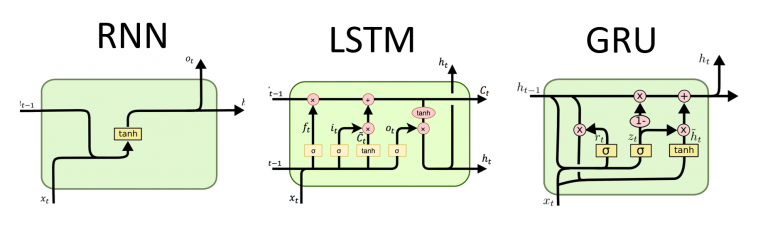)

<sub>출처: http://dprogrammer.org/rnn-lstm-gru</sub>